# Plots

This notebook requires one to paste in Python expressions generated by the analysis notebook. It uses that information to extract various insights, and most importantly to draw the plots found in the paper and appendix.

In [2]:
import os
from operator import itemgetter
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pylab
from matplotlib.patches import Patch, Rectangle
from matplotlib.lines import Line2D
from matplotlib import cm

import sys
sys.path.append("..")
import gb

In [3]:
def figsize(scale, ratio_yx=None, textwidth_pt=397.48499):
    if ratio_yx is None:
        golden_mean = (np.sqrt(5.0) - 1.0) / 2  # aesthetic ratio
        ratio_yx = golden_mean

    inches_per_pt = 1.0 / 72.27  # convert pt to inch
    fig_width = textwidth_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * ratio_yx  # height in inches
    return fig_width, fig_height

In [4]:
plt.rcParams.update({
    # Setup LaTeX
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],  # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),
    "text.latex.preamble": " ".join([
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage{amsmath}",
        r"\usepackage{amsfonts}",
        r"\usepackage{xfrac}",
        r"\newcommand*{\mat}[1]{\boldsymbol{#1}}",
    ])
})

In [5]:
plots_path = "plots"
os.makedirs(plots_path, exist_ok=True)

# Main Paper

The following code generates the plots from the main paper, as well as some insights cited there.

## Improvement over Non-Adaptive Attacks

In [6]:
breakage = {'global': {('evasion', 'citeseer'): {'gcn_2': ((0.33865711082843786, 0.011650147337489956, 0.029863154313731672, 0.010260593384112407), (0.31603220491988265, 0.014305811580017027, 0.04746100254386716, 0.015528180446024272)), 'gnn_guard_faith_refimpl': ((0.367377213662422, 0.015489228968724908, 0.01404520518022356, 0.005554523873341695), (0.3069868853281176, 0.013905564098943123, 0.055714248758985896, 0.026199142092568635)), 'grand_tuned': ((0.3079907431186235, 0.006388728732395411, 0.05467159203823777, 0.009308955907838848), (0.26366959786111605, 0.004801685132073833, 0.1869150968003662, 0.018308744049306318)), 'jaccard_gcn_tuned': ((0.340447191404567, 0.009948576043597699, 0.030060569544096027, 0.010299666171851525), (0.29673439265848156, 0.011409430978251275, 0.07352255553662042, 0.021959852009716452)), 'pro_gnn_tuned': ((0.3489573961232729, 0.01424562393310858, 0.024619671597374507, 0.01074545021179458), (0.34427652208274856, 0.012743390760607837, 0.026440179014310883, 0.011110897651646131)), 'rgcn_tuned': ((0.3442978703760694, 0.013712595835780406, 0.026713951705517887, 0.010958645564562414), (0.3137228562954662, 0.014477112430717084, 0.04843360154276025, 0.017835230246651963)), 'soft_median_gdc_tuned': ((0.32043519235832624, 0.01503722490854111, 0.04014737466489484, 0.022515873074494475), (0.28291294528016214, 0.013526801801608045, 0.12138835084835269, 0.04290954635405311)), 'svd_gcn_rank50_tuned': ((0.7503576906505817, 0.17944811213513848, 0.0031457618199154337, 0.0022128453319378875), (0.3188748145899968, 0.007486031682437712, 0.028843305786298106, 0.007031162978617527))}, ('evasion', 'cora'): {'gcn_2': ((0.25135788712836526, 0.009367021180818337, 0.20966778135890346, 0.019511599196111104), (0.23845470037889416, 0.011269337826773229, 0.2548477732364295, 0.02937974986558673)), 'gnn_guard_faith_refimpl': ((0.27730448849676914, 0.007467602458441114, 0.14980133867569118, 0.014431064149634777), (0.20819313168331438, 0.007209419344255203, 0.37529361658556926, 0.018232039711926853)), 'grand_tuned': ((0.24812170545797305, 0.0071778696365451655, 0.22736262363017556, 0.018229444389146893), (0.20289026878725971, 0.008905108879431512, 0.37820227373755116, 0.019128261413239596)), 'jaccard_gcn_tuned': ((0.26402123634895747, 0.00785324848287813, 0.17959487125799806, 0.017014653391344316), (0.21464784203710902, 0.007939045884131649, 0.3424316617881379, 0.019313815683506985)), 'pro_gnn_tuned': ((0.250211022431131, 0.008170749449315541, 0.21179683843650055, 0.024492206015381768), (0.2408455101635978, 0.008843760895754876, 0.23495414949818114, 0.029643293525699124)), 'rgcn_tuned': ((0.24674449316288136, 0.005912002419175791, 0.2226942564109879, 0.01325305259390637), (0.22093476736225143, 0.00541005107291469, 0.30741673280325427, 0.012584386894534463)), 'soft_median_gdc_faith': ((0.22760314453725444, 0.006908424326216059, 0.289706098502862, 0.017865751959379454), (0.1896836386911211, 0.007834802932781975, 0.42684318933117515, 0.02007344447471019)), 'svd_gcn_rank50_tuned': ((0.9113135651515932, 0.022416649380360167, 0.013322088119665388, 0.015155922559737736), (0.23130895126858714, 0.012034383480112765, 0.28262803656719865, 0.04011777022028889))}, ('poisoning', 'citeseer'): {'gcn_2': ((0.33632412512288284, 0.018625756527676413, 0.01651277935169706, 0.006814918726402952), (0.3266034431356558, 0.020946666783306415, 0.01976060820789281, 0.00796079161180762)), 'gnn_guard_faith_refimpl': ((0.3558205301807198, 0.02574359160394842, 0.00776782395160983, 0.003883467917814833), (0.3228181970888303, 0.0189057121572505, 0.017723510870599552, 0.01063135366197323)), 'grand_tuned': ((0.3137159018935506, 0.026161561570004013, 0.029823574882445268, 0.014930468130772567), (0.2889815996225754, 0.030652500444030634, 0.053818691787478626, 0.030902581644839812)), 'jaccard_gcn_tuned': ((0.33017906987693724, 0.012329972930839943, 0.017713901135184833, 0.006249390260136368), (0.30768981068299783, 0.017678337781691048, 0.027387978794952483, 0.010687473747593813)), 'pro_gnn_tuned': ((0.35024423421870743, 0.01430910727451142, 0.012088744817215485, 0.005108039627234453), (0.34448115692561776, 0.014624307180306757, 0.013753190176951816, 0.00551155054382712)), 'rgcn_tuned': ((0.35786545877365994, 0.018132844684543552, 0.011307290448219338, 0.004818396225702538), (0.33479907163334294, 0.017264494561617712, 0.01603284890982793, 0.006736043277890128)), 'soft_median_gdc_tuned': ((0.3371064823151203, 0.014435662988074456, 0.014369633331129783, 0.005334123270253155), (0.32344791217865865, 0.014413466508710384, 0.018787645675685607, 0.005172241537151345)), 'svd_gcn_rank50_tuned': ((0.5621953287081977, 0.18450522105321038, 0.0014356520836733202, 0.0007597810300983422), (0.32450807762148265, 0.01061725537489171, 0.009225870710627308, 0.006326523284825084))}, ('poisoning', 'cora'): {'gcn_2': ((0.2529383789141672, 0.01260065054849726, 0.0948049432445536, 0.0127144082709286), (0.2371931685900846, 0.007827687984090921, 0.1143308882286044, 0.011278221645189098)), 'gnn_guard_faith_refimpl': ((0.259241424553513, 0.012674091740920877, 0.09630911433062121, 0.015107090713456861), (0.22355723864765525, 0.005144989233819408, 0.2465901166992713, 0.03754457028179009)), 'grand_tuned': ((0.2409909396198926, 0.019579695368955465, 0.11535326892008294, 0.018581523788609947), (0.21516474870091695, 0.014068366182656262, 0.15335650856991612, 0.023652988487955617)), 'jaccard_gcn_tuned': ((0.26323208261920483, 0.015765057640509245, 0.08653167248049978, 0.015566958774915344), (0.2217467568822899, 0.010145790208722194, 0.20056124133283304, 0.036338090596305196)), 'pro_gnn_tuned': ((0.24891548581499912, 0.005735972133343609, 0.10102992117184366, 0.004400722786388252), (0.23308991933046147, 0.006285858373826858, 0.12408745546161064, 0.009678572436037975)), 'rgcn_tuned': ((0.253422799718213, 0.013396292316270448, 0.10358273089673824, 0.015161051568155845), (0.22846858525624408, 0.014001909173209114, 0.1423058471783724, 0.022456290004023743)), 'soft_median_gdc_faith': ((0.23809913922952974, 0.006000467413984661, 0.11345608096173346, 0.0076330158446880035), (0.21729222189864333, 0.011430046310628845, 0.1569742687076276, 0.01314246073053991)), 'svd_gcn_rank50_tuned': ((0.7657196948816185, 0.23668813278192918, 0.017296742012657806, 0.01602432048215568), (0.23957264005332818, 0.010603804633283564, 0.15370516996261507, 0.010659870473890744))}}, 'local': {('evasion', 'citeseer'): {'gcn_2': ((117.9, 1.7999999999999998, 0.18927519813985336, 0.01652000865865039), (115.9, 2.5029982021567654, 0.20814545309331578, 0.022511464167146222)), 'gnn_guard_faith_refimpl': ((115.7, 0.29154759474226505, 0.1929904962663691, 0.01284517751031122), (42.95, 3.7563279941985894, 0.5904576363036893, 0.014890822808051929)), 'grand_tuned': ((87.1, 5.691221310052878, 0.3428976299216947, 0.026990320294401127), (49.4, 5.151698748956503, 0.5352961467707186, 0.028116727864137346)), 'jaccard_gcn_tuned': ((118.5, 1.2649110640673518, 0.18851763928536908, 0.01663519740001973), (94.55, 8.019351594736323, 0.297549909771741, 0.044663807199418225)), 'pro_gnn_tuned': ((118.2, 1.16619037896906, 0.16521854195968516, 0.010411215770441002), (111.2, 4.2349734355719395, 0.22444099374430682, 0.01775320583888915)), 'rgcn_tuned': ((118.6, 1.019803902718557, 0.18456257861443676, 0.011022172828566684), (114.45, 2.0880613017821097, 0.22663726720882166, 0.019009967685490854)), 'soft_median_gdc_tuned': ((70.6, 7.595393340703297, 0.4126467777657835, 0.03356311545885648), (59.35, 6.218118686548207, 0.45241220092415996, 0.039613784180014336)), 'svd_gcn_rank50_tuned': ((118.9, 1.019803902718557, 0.12001264364878612, 0.009877910017495667), (59.4, 9.04240012386092, 0.5275802688865286, 0.06668415528647569))}, ('evasion', 'cora'): {'gcn_2': ((117.3, 1.4696938456699067, 0.1834229385495097, 0.01380423449789436), (111.8, 2.623928352680385, 0.21561784533535233, 0.016787003449536368)), 'gnn_guard_faith_refimpl': ((116.28333333333335, 2.677893035785992, 0.17944488308261614, 0.017195820118332938), (50.2, 3.665378561622251, 0.543203249215833, 0.024422656770932714)), 'grand_tuned': ((114.73333333333332, 1.8487232831816092, 0.19261300655206354, 0.0159308014821663), (82.8, 4.16353215431321, 0.35635069909606354, 0.02361707572713746)), 'jaccard_gcn_tuned': ((115.75, 1.5491933384829668, 0.18224111258498038, 0.010701145627775344), (87.05, 5.432310742216428, 0.35317541048444434, 0.02940073535281983)), 'pro_gnn_tuned': ((118.25, 1.4317821063276353, 0.16210689155893446, 0.008361492866746265), (113.15, 2.194310825749169, 0.20054588271394244, 0.011627191046255364)), 'rgcn_tuned': ((116.65, 1.9339079605813714, 0.18097894648766863, 0.010747160801404336), (108.25, 2.9368350311176825, 0.2384450904064328, 0.01935124604478741)), 'soft_median_gdc_faith': ((88.29333333333334, 3.0209012636040344, 0.3378332086116697, 0.012037759016336204), (74.25, 4.932038118263078, 0.39938672691587784, 0.02423012486305785)), 'svd_gcn_rank50_tuned': ((118.5, 1.8973665961010275, 0.12136602787553666, 0.019754521251195527), (57.4, 6.653194721335007, 0.5479326349658684, 0.04432109817911561))}, ('poisoning', 'citeseer'): {'gcn_2': ((119.6, 0.4898979485566356, 0.16530180097054425, 0.01830543316038188), (118.95, 1.0535653752852738, 0.17906848344098059, 0.018129000435392513)), 'gnn_guard_faith_refimpl': ((115.58333333333333, 1.5064675384635577, 0.19088862608707874, 0.01796934501478399), (52.1, 4.223742416388575, 0.5203131892358046, 0.02318714015524514)), 'grand_tuned': ((101.5, 3.7181984885156414, 0.27531607596423874, 0.025413418366820813), (68.6, 3.7934153476781316, 0.42002611704252235, 0.019283954450317956)), 'jaccard_gcn_tuned': ((119.45, 0.45825756949558405, 0.16275165921396964, 0.018323201302378647), (103.1, 7.103872183534836, 0.2599500068359984, 0.0436384421084544)), 'pro_gnn_tuned': ((114.1, 2.244994432064365, 0.20590165554811338, 0.021464266141838943), (110.85, 3.4698703145794942, 0.23165333564328003, 0.017972358594638197)), 'rgcn_tuned': ((118.8, 0.7483314773547882, 0.15606840719522805, 0.003335152799171097), (116.25, 2.4392621835300936, 0.21063464663250137, 0.007916845741916763)), 'soft_median_gdc_tuned': ((91.3, 5.762811813689563, 0.3082940130483521, 0.02934402508085147), (85.25, 8.907861696277058, 0.34906444544105236, 0.04363314826229034)), 'svd_gcn_rank50_tuned': ((118.8, 0.7483314773547882, 0.11801156664645611, 0.006732304326818463), (69.5, 7.464917949984447, 0.46582805318114573, 0.05577470528124029))}, ('poisoning', 'cora'): {'gcn_2': ((118.4, 1.019803902718557, 0.1703045082032507, 0.009388154861536796), (116.2, 2.689795531262553, 0.19705881840939346, 0.015845933810679367)), 'gnn_guard_faith_refimpl': ((116.18333333333335, 1.970899399879265, 0.17409400811680625, 0.021121008405228417), (59.2, 2.282542442102666, 0.4885226113939959, 0.012061372861381607)), 'grand_tuned': ((115.4, 1.9078784028338913, 0.19212053538627286, 0.013321730202628928), (101.3, 3.2611347718240653, 0.28189052742626997, 0.02237852576758699)), 'jaccard_gcn_tuned': ((118.1, 1.1135528725660044, 0.1592232178295642, 0.011339210994106936), (92.05, 2.808024216419794, 0.32629777533817655, 0.020765788535200055)), 'pro_gnn_tuned': ((113.3, 0.8717797887081347, 0.21157466946108588, 0.017879415139219798), (108.35, 3.477067730142742, 0.24265740729207802, 0.02530045386401856)), 'rgcn_tuned': ((119.0, 0.6324555320336759, 0.1709083393893408, 0.007449481423772909), (113.65, 2.3958297101421877, 0.211394402687311, 0.016156244050447903)), 'soft_median_gdc_faith': ((94.61666666666667, 4.463307194347161, 0.3041674464117698, 0.020581668755235805), (84.0, 5.692099788303083, 0.3521391749280555, 0.027637973321932182)), 'svd_gcn_rank50_tuned': ((118.8, 1.4696938456699067, 0.12472380141453412, 0.01727688820341974), (57.45, 7.405065833603373, 0.5397892211188962, 0.04150387680264777))}}}

### Improvement in %

In [7]:
all_improvements = []
for scope, scope_breakage in breakage.items():
    for (scenario, dataset), breakage_by_slug in scope_breakage.items():
        improvements = []
        for slug_breakage in breakage_by_slug.values():
            new_auc = slug_breakage[0][2]
            old_auc = slug_breakage[1][2]
            impr = 1 - new_auc / old_auc
            improvements.append(impr)
            all_improvements.append(impr)
        print(scope, scenario, dataset, 100 * np.mean(improvements), "%")
print("overall", 100 * np.mean(all_improvements), "%")

global evasion citeseer 56.185405865596685 %
global evasion cora 41.25987652952954 %
global poisoning citeseer 37.755796194304736 %
global poisoning cora 40.24013992959936 %
local evasion citeseer 34.99501333948325 %
local evasion cora 39.09679677877341 %
local poisoning citeseer 33.27659876500621 %
local poisoning cora 35.43336363195359 %
overall 39.78037387928085 %


### t-Test

In [8]:
improved = []
for scope, scope_breakage in breakage.items():
    for (scenario, dataset), scenario_breakage in scope_breakage.items():
        for slug, ((_, _, m1, s1), (_, _, m2, s2)) in scenario_breakage.items():
            if slug != "gcn_2":
                _, p = stats.ttest_ind_from_stats(m1, s1, 5, m2, s2, 5, alternative="less")
                improved.append(p < 0.05)
                if p >= 0.05:
                    print(scope, scenario, dataset, slug, p)
print(100 * np.mean(improved), "%")

global evasion citeseer pro_gnn_tuned 0.3994636848907971
global evasion cora pro_gnn_tuned 0.10750167628345601
global poisoning citeseer grand_tuned 0.07829922044692426
global poisoning citeseer jaccard_gcn_tuned 0.05936381734782932
global poisoning citeseer pro_gnn_tuned 0.3168601550205674
global poisoning citeseer rgcn_tuned 0.11889970709917513
global poisoning citeseer soft_median_gdc_tuned 0.1101547941469805
local evasion citeseer soft_median_gdc_tuned 0.06257235582297567
local poisoning citeseer soft_median_gdc_tuned 0.060594039786915556
83.92857142857143 %


### Improvement Plots

In [9]:
def plot_adaptive_improvement(filter_dataset, conf, auc, unproj_slugs):
    slugs = gb.ana.project_model_slugs(unproj_slugs, filter_dataset)
    slugs = slugs[::-1]
    ys = np.arange(len(slugs))
    labels = [gb.ana.model_label(slug).split(" ")[0] for slug in slugs]
    colors = ["C1" if slug == "gcn_2" else "C0" for slug in slugs]
    total_local_target_nodes = len(gb.data.get_all_benchmark_targets()) * gb.data.get_num_nodes_per_benchmark_target()

    ax_ctr = 1
    for scope, scope_breakage in breakage.items():
        for (scenario, dataset), breakage_by_slug in reversed(scope_breakage.items()):
            if dataset != filter_dataset:
                continue

            breakage_by_slug = breakage_by_slug.copy()
            for missing_slug in set(slugs) - breakage_by_slug.keys():
                breakage_by_slug[missing_slug] = [[np.nan] * 4] * 2

            offset, add,div = (2, 0, 1) if auc else (0, 1, -(total_local_target_nodes if scope == "local" else 1))
            new_accs = np.array([add + breakage_by_slug[slug][0][0 + offset] / div for slug in slugs])
            new_acc_stds = np.array([breakage_by_slug[slug][0][1 + offset] / div for slug in slugs])
            old_accs = np.array([add + breakage_by_slug[slug][1][0 + offset] / div for slug in slugs])

            hatch_lens = old_accs - new_accs
            assert np.all(hatch_lens[~np.isnan(hatch_lens)] > 0)
            hatch_lens[slugs.index("gcn_2")] = np.nan
            old_accs[slugs.index("gcn_2")] = np.nan

            plt.figure(figsize=figsize(scale=0.35, ratio_yx=1))
            fac = 1 if auc else 100
            plt.barh(labels, fac * old_accs, color=colors, alpha=0.5, edgecolor="black", hatch="//")
            plt.barh(labels, fac * new_accs, color=colors, xerr=fac * new_acc_stds)
            conf(scope == "global", scenario == "poisoning")
            if not auc:
                plt.xlabel(r"Adversarial accuracy (\%)" if scope == "global" else r"Correct predicitons (\%)")
            else:
                plt.xlabel("RAUC" if scope == "global" else "AUC")
            if ax_ctr != 1:
                plt.yticks([])
            if ax_ctr == 4:
                handles = [Patch(facecolor="C0", label='Adaptive\nattack'),
                           Patch(facecolor="C0", alpha=0.5, edgecolor="black", hatch="//", label='Non-\nadaptive\nattack')]
                plt.legend(handles=handles, loc="center left", bbox_to_anchor=(1.05, 0.5))
            plt.savefig(f"{plots_path}/improvement_over_non_ada_attacks_{('rauc' if scope == 'global' else 'auc') if auc else 'onebudget'}_{scope}_{scenario}_{dataset}.pdf", bbox_inches="tight", pad_inches=0.01)
            ax_ctr += 1

In [10]:
print("Global Poisoning Cora SVD-GCN New Acc", 1 - breakage["global"]["poisoning", "cora"]["svd_gcn_rank50_tuned"][0][0])
print("Global Evasion Cora SVD-GCN New Acc", 1 - breakage["global"]["evasion", "cora"]["svd_gcn_rank50_tuned"][0][0])
print("Global Evasion Cora SVD-GCN New RAUC", breakage["global"]["evasion", "cora"]["svd_gcn_rank50_tuned"][0][2])

Global Poisoning Cora SVD-GCN New Acc 0.2342803051183815
Global Evasion Cora SVD-GCN New Acc 0.08868643484840677
Global Evasion Cora SVD-GCN New RAUC 0.013322088119665388


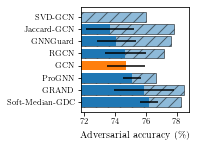

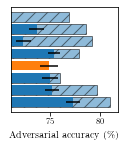

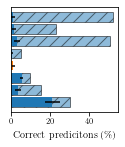

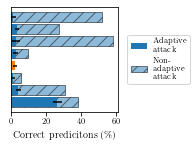

In [11]:
def conf(is_global, pois):
    if is_global:
        plt.xlim(*((71.8, 78.8) if pois else (71, 81.8)))
    else:
        plt.xlim(left=0)

plot_adaptive_improvement("cora", conf, auc=False, unproj_slugs=["svd_gcn_rank50_tuned", "jaccard_gcn_tuned", "gnn_guard_faith_refimpl", "rgcn_tuned", "gcn_2", "pro_gnn_tuned", "grand_tuned", "soft_median_gdc_tuned"])

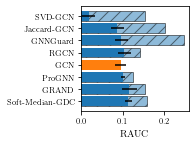

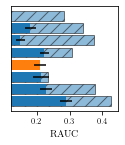

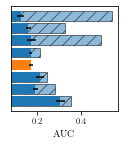

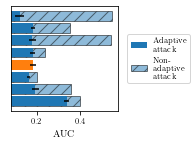

In [12]:
def conf(is_global, pois):
    plt.xlim(left=((0 if pois else 0.12) if is_global else 0.08))

plot_adaptive_improvement("cora", conf, auc=True, unproj_slugs=["svd_gcn_rank50_tuned", "jaccard_gcn_tuned", "gnn_guard_faith_refimpl", "rgcn_tuned", "gcn_2", "pro_gnn_tuned", "grand_tuned", "soft_median_gdc_tuned"])

## Shared Curves Code

In [13]:
def plot_curves(curves, unproj_slugs, colors, conf, *, secondary=None, relative, is_global, new_plot, file_prefix=None, standalone_legend=False, **kwargs):
    ax_ctr = 1
    for (scenario, dataset), ax_grp in curves.items():
        new_plot()

        slugs = gb.ana.project_model_slugs(unproj_slugs, dataset)
        pois = scenario == "poisoning"
        cora = dataset == "cora"

        ax_ctr += 1
        for slug, curve in sorted(ax_grp.items(), key=lambda it: slugs.index(it[0]) if it[0] in slugs else 0):
            if slug in slugs:
                baseline = ("relative" if relative else True) if slug == "gcn_2" else False
                slug_idx = slugs.index(slug)
                plot_kwargs = dict(
                    label=gb.ana.model_label(slug).split(" ")[0], baseline=baseline, color=colors[slug_idx],
                    secondary=False if secondary is None else secondary[slug_idx], **kwargs
                )
                if is_global:
                    gb.ana.plot_curve(((-curve + 1) * 100).scaled(100), ref_y=100 * gb.ana.MLP_TEST_ACCURACY[dataset], ref_label="MLP", **plot_kwargs)
                else:
                    total_local_target_nodes = len(gb.data.get_all_benchmark_targets()) * gb.data.get_num_nodes_per_benchmark_target()
                    if slug == "gcn_2":
                        plt.axvline(100 * curve.where(0.95 * total_local_target_nodes).mean(), color="gray", ls=(0, (3, 5)))
                    gb.ana.plot_curve(((-curve / total_local_target_nodes + 1) * 100).scaled(100), **plot_kwargs)

        show_y, show_legend = conf(pois, cora)
        if is_global:
            plt.xlabel(r"Relative budget $\frac{\Delta}{m}$ (\%)")
        else:
            plt.xlabel(r"Relative budget $\frac{\Delta}{\text{degree}}$ (\%)")
        if show_y:
            if is_global:
                plt.ylabel("Accuracy (\%)" + (" rel.\ to GCN" if relative else ""))
            else:
                plt.ylabel("Corr.\ pred.\ (\%)" + (" rel.\ to GCN" if relative else ""))
        else:
            plt.yticks([])
            plt.ylabel(None)
        if show_legend:
            plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
        if file_prefix is not None:
            plt.savefig(f"{plots_path}/{file_prefix}_{dataset}_{scenario}.pdf", bbox_inches="tight", pad_inches=0.01)
    if standalone_legend:
        handles, labels = plt.gca().get_legend_handles_labels()
        legend_fig = pylab.figure()
        pylab.figlegend(handles, labels, loc="center", ncol=(len(handles) + 1) // 2)
        legend_fig.savefig(f"{plots_path}/{file_prefix}_legend.pdf", dpi=500, bbox_inches="tight", pad_inches=0.01)

## Global MR Envelope Curves

In [14]:
global_mr_envelope_curves = {('evasion', 'citeseer'): {'gcn_1': gb.ana.Curve(np.array([0, 0.0057252, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012814, 0.013086, 0.013359, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.018539, 0.019902, 0.020447, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.027535, 0.027808, 0.028081, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.041712, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.049073, 0.049618, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.053435, 0.05398, 0.056707, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.062432, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.070883, 0.071429, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075245, 0.075791, 0.079335, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.084787, 0.085333, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090513, 0.092694, 0.093511, 0.093784, 0.094057, 0.094602, 0.094875, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.099237, 0.099509, 0.10033, 0.1006, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10578, 0.10714, 0.10796, 0.10823, 0.10905, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11532, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12132, 0.12214, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12895, 0.13032, 0.13059, 0.13141, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13631, 0.1374, 0.13768, 0.13795, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14531, 0.14558, 0.14586, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24408, 0.25823, 0.26033, 0.26104, 0.26174, 0.26244, 0.27379, 0.27598, 0.2767, 0.27743, 0.27889, 0.27962, 0.28011, 0.28061, 0.2811, 0.28752, 0.28999, 0.29098, 0.29196, 0.29246, 0.29295, 0.29344, 0.29394, 0.29443, 0.30287, 0.30332, 0.30376, 0.30465, 0.30509, 0.30554, 0.30598, 0.30643, 0.30687, 0.30872, 0.31428, 0.31465, 0.31502, 0.31539, 0.31576, 0.31621, 0.31666, 0.31711, 0.3243, 0.3252, 0.32609, 0.32654, 0.32699, 0.32744, 0.32789, 0.32834, 0.32879, 0.32889, 0.329, 0.32981, 0.33053, 0.33073, 0.33104, 0.33114, 0.33124, 0.33139, 0.33187, 0.33235, 0.33278, 0.33322, 0.33498, 0.33586, 0.34024, 0.34112, 0.342, 0.34244, 0.34288, 0.34332, 0.34376, 0.34419, 0.34431, 0.34443, 0.34455, 0.34795, 0.3502, 0.35065, 0.3511, 0.35155, 0.352, 0.35245, 0.3529, 0.35335, 0.3538, 0.35424, 0.35469, 0.35514, 0.35559, 0.35604, 0.35907, 0.36001, 0.36186, 0.36247, 0.36309, 0.3637, 0.36431, 0.36493, 0.36497, 0.365, 0.36504, 0.36508, 0.36511, 0.36515, 0.36523, 0.36657, 0.36712, 0.36739, 0.36766, 0.36794, 0.36821, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36987, 0.3707, 0.37237, 0.37278, 0.3732, 0.37362, 0.37403, 0.37445, 0.37487, 0.37529, 0.3757, 0.37612, 0.37654, 0.37695, 0.37737, 0.37756, 0.37794, 0.37945, 0.38002, 0.38021, 0.3804, 0.38078, 0.38097, 0.38135, 0.38154, 0.38173, 0.38192, 0.38211, 0.38226, 0.38275, 0.38329, 0.384, 0.3841, 0.3844, 0.3845, 0.38566, 0.38606, 0.38645, 0.38685, 0.38724, 0.38764, 0.38803, 0.38843, 0.38882, 0.38922, 0.38947, 0.38972, 0.39047, 0.39172, 0.39248, 0.39273, 0.39348, 0.39398, 0.39423, 0.39451, 0.39489, 0.39526, 0.39564, 0.39601, 0.39639, 0.39676, 0.39714, 0.39751, 0.40077, 0.40136, 0.40166, 0.40195, 0.40225, 0.40255, 0.40284, 0.40314, 0.40344, 0.40373, 0.40403, 0.40432, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.40462, 0.4049, 0.40655, 0.40792, 0.4082, 0.40918, 0.41017, 0.41051, 0.41084, 0.41117, 0.41151, 0.41184, 0.41217, 0.41251, 0.41284, 0.41317, 0.41351, 0.41428, 0.41519, 0.41542, 0.41565, 0.41633, 0.41656, 0.41679, 0.41702, 0.41724, 0.41747, 0.4177, 0.41793, 0.41816, 0.41838, 0.41861, 0.41884, 0.41918, 0.41952, 0.4233, 0.42364, 0.42398, 0.42433, 0.42501, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536], [0.27607, 0.29425, 0.29685, 0.29771, 0.29858, 0.29913, 0.30851, 0.31016, 0.31071, 0.31126, 0.31237, 0.31292, 0.31347, 0.31402, 0.31457, 0.32113, 0.32399, 0.32545, 0.32692, 0.32765, 0.32838, 0.32911, 0.32984, 0.33057, 0.3425, 0.34323, 0.34396, 0.34542, 0.34615, 0.34688, 0.34761, 0.34834, 0.34864, 0.35012, 0.35456, 0.35486, 0.35515, 0.35545, 0.35575, 0.35604, 0.35634, 0.35664, 0.36324, 0.36421, 0.36518, 0.36567, 0.36616, 0.36664, 0.36713, 0.36762, 0.3681, 0.36859, 0.36908, 0.3723, 0.37512, 0.37618, 0.37796, 0.37855, 0.37915, 0.37974, 0.38033, 0.38092, 0.38119, 0.38146, 0.38252, 0.38305, 0.3857, 0.38624, 0.38677, 0.38703, 0.3873, 0.38756, 0.38791, 0.38854, 0.38918, 0.38981, 0.39016, 0.39431, 0.39713, 0.3977, 0.39827, 0.39883, 0.3994, 0.39996, 0.40053, 0.40109, 0.40166, 0.40198, 0.40231, 0.40263, 0.40296, 0.40328, 0.40751, 0.40816, 0.40913, 0.40946, 0.40978, 0.41011, 0.41043, 0.41076, 0.41108, 0.4114, 0.41173, 0.4122, 0.41266, 0.41313, 0.41406, 0.42011, 0.42104, 0.4215, 0.42197, 0.42244, 0.4229, 0.42337, 0.42383, 0.4243, 0.42476, 0.42481, 0.42524, 0.42533, 0.42552, 0.42557, 0.42562, 0.42566, 0.42571, 0.42576, 0.42581, 0.42585, 0.4259, 0.42595, 0.42624, 0.42654, 0.42684, 0.42713, 0.42773, 0.43036, 0.4315, 0.43187, 0.43225, 0.433, 0.43338, 0.43413, 0.43451, 0.43489, 0.43526, 0.43564, 0.43602, 0.43629, 0.43657, 0.43849, 0.43877, 0.43959, 0.43987, 0.44124, 0.44152, 0.4418, 0.44214, 0.44254, 0.44283, 0.44313, 0.44342, 0.44372, 0.44402, 0.44431, 0.44461, 0.4455, 0.44698, 0.44787, 0.44816, 0.44932, 0.45024, 0.4507, 0.45116, 0.45162, 0.45208, 0.45254, 0.453, 0.45346, 0.45392, 0.45438, 0.45484, 0.45988, 0.46079, 0.46125, 0.46171, 0.46217, 0.46262, 0.46308, 0.46354, 0.464, 0.46445, 0.46494, 0.46542, 0.46591, 0.46639, 0.46688, 0.46736, 0.46785, 0.47027, 0.47173, 0.47366, 0.47415, 0.47463, 0.4756, 0.47609, 0.47657, 0.47706, 0.47754, 0.47803, 0.47851, 0.479, 0.47948, 0.47997, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48114, 0.48169, 0.48183, 0.48197, 0.48238, 0.48252, 0.48266, 0.48298, 0.4833, 0.48363, 0.48395, 0.48427, 0.4846, 0.48477, 0.48494, 0.48511, 0.48529, 0.48546, 0.48735, 0.48752, 0.48769, 0.48787, 0.48821, 0.48838, 0.48855, 0.48872, 0.4889, 0.48907, 0.48924, 0.48941, 0.48958, 0.48976, 0.48993, 0.48993, 0.48993], [0.27133, 0.29047, 0.2932, 0.29411, 0.29502, 0.29549, 0.30411, 0.30583, 0.3064, 0.30697, 0.30812, 0.30869, 0.30926, 0.30983, 0.3103, 0.31635, 0.31868, 0.31962, 0.32072, 0.32127, 0.32181, 0.32236, 0.32291, 0.32346, 0.33472, 0.33531, 0.3359, 0.33709, 0.33744, 0.33779, 0.33814, 0.33849, 0.33884, 0.3406, 0.34588, 0.3463, 0.34674, 0.34718, 0.34762, 0.34806, 0.34849, 0.34893, 0.35677, 0.35782, 0.35887, 0.3594, 0.35993, 0.36045, 0.36098, 0.36151, 0.36203, 0.36256, 0.36281, 0.36484, 0.36743, 0.36819, 0.36933, 0.36971, 0.37009, 0.37047, 0.37085, 0.37113, 0.37141, 0.37168, 0.37279, 0.37334, 0.37611, 0.37666, 0.37721, 0.37749, 0.37776, 0.37804, 0.37832, 0.37859, 0.37887, 0.37915, 0.37945, 0.38223, 0.38377, 0.38408, 0.38438, 0.38469, 0.385, 0.38531, 0.38562, 0.38592, 0.38623, 0.38654, 0.38685, 0.38718, 0.38751, 0.38784, 0.39277, 0.39387, 0.39551, 0.39605, 0.3966, 0.39715, 0.39769, 0.39824, 0.39879, 0.39933, 0.39988, 0.4002, 0.40052, 0.40084, 0.40148, 0.40562, 0.40626, 0.40658, 0.4069, 0.40722, 0.40754, 0.40786, 0.40818, 0.40837, 0.40856, 0.40875, 0.41142, 0.41223, 0.41384, 0.41424, 0.41464, 0.41505, 0.41545, 0.41585, 0.41626, 0.41666, 0.41706, 0.4173, 0.41754, 0.41779, 0.41803, 0.41827, 0.41875, 0.42068, 0.42141, 0.42165, 0.42189, 0.42237, 0.42261, 0.4231, 0.42334, 0.42358, 0.42362, 0.42365, 0.42369, 0.42373, 0.42376, 0.42402, 0.42406, 0.42417, 0.42421, 0.42439, 0.42443, 0.42447, 0.4245, 0.42454, 0.42458, 0.42461, 0.42465, 0.42469, 0.42476, 0.42492, 0.42516, 0.42634, 0.42832, 0.4295, 0.4299, 0.43108, 0.43187, 0.43214, 0.4324, 0.43267, 0.43293, 0.4332, 0.43347, 0.43373, 0.434, 0.43426, 0.43453, 0.43745, 0.43798, 0.43825, 0.43851, 0.43878, 0.43904, 0.43931, 0.43957, 0.43984, 0.44011, 0.44038, 0.44065, 0.44092, 0.44119, 0.44146, 0.44173, 0.442, 0.44334, 0.44415, 0.44523, 0.4455, 0.44577, 0.44631, 0.44657, 0.44684, 0.44711, 0.44738, 0.44765, 0.44792, 0.44819, 0.44846, 0.44881, 0.44916, 0.44951, 0.45162, 0.45337, 0.45373, 0.45478, 0.45583, 0.45618, 0.45653, 0.45689, 0.45724, 0.45759, 0.45794, 0.45809, 0.45823, 0.45838, 0.45853, 0.45927, 0.45986, 0.46001, 0.46016, 0.4606, 0.46075, 0.4609, 0.46105, 0.4612, 0.46134, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46464, 0.46502, 0.4654, 0.46578, 0.46654, 0.46692, 0.4673, 0.46768, 0.46806, 0.46844, 0.46882, 0.46919, 0.46919, 0.46919, 0.46919, 0.46919, 0.46919], [0.26244, 0.27903, 0.2814, 0.28219, 0.28298, 0.28377, 0.29265, 0.29443, 0.29502, 0.29562, 0.2968, 0.29739, 0.29799, 0.29858, 0.29903, 0.30505, 0.30845, 0.30981, 0.31117, 0.31185, 0.31253, 0.31321, 0.31389, 0.31457, 0.3215, 0.32186, 0.32223, 0.32296, 0.32332, 0.32369, 0.32405, 0.3246, 0.32515, 0.3279, 0.33615, 0.3367, 0.33725, 0.3378, 0.33835, 0.3389, 0.33945, 0.33954, 0.34089, 0.34132, 0.34174, 0.34195, 0.34216, 0.34237, 0.34259, 0.3428, 0.34301, 0.34329, 0.34358, 0.34604, 0.34972, 0.35078, 0.35236, 0.35288, 0.35341, 0.35394, 0.35446, 0.35499, 0.35552, 0.35604, 0.35841, 0.3596, 0.36552, 0.36671, 0.36789, 0.36848, 0.36908, 0.36967, 0.37026, 0.37085, 0.37145, 0.37204, 0.3723, 0.37467, 0.37599, 0.37625, 0.37651, 0.37678, 0.37704, 0.3773, 0.37757, 0.37783, 0.37809, 0.37836, 0.37862, 0.37888, 0.37915, 0.37948, 0.38379, 0.38445, 0.38545, 0.38578, 0.38611, 0.38645, 0.38678, 0.38711, 0.38744, 0.38777, 0.38809, 0.38842, 0.38874, 0.38907, 0.38971, 0.39394, 0.39459, 0.39491, 0.39524, 0.39556, 0.39589, 0.39621, 0.39654, 0.39686, 0.39719, 0.39751, 0.39779, 0.39785, 0.39798, 0.39801, 0.39804, 0.39807, 0.3981, 0.3985, 0.39889, 0.39929, 0.39968, 0.40008, 0.40047, 0.40087, 0.40126, 0.40166, 0.40245, 0.40561, 0.40679, 0.40719, 0.40758, 0.40837, 0.40877, 0.40956, 0.40995, 0.41035, 0.41074, 0.41114, 0.41153, 0.41193, 0.41232, 0.41311, 0.41323, 0.41431, 0.41474, 0.41687, 0.4173, 0.41773, 0.41815, 0.41858, 0.419, 0.41943, 0.41943, 0.41943, 0.41943, 0.41943, 0.41943, 0.41943, 0.41943, 0.41943, 0.41943, 0.42016, 0.42065, 0.4209, 0.42115, 0.4214, 0.42165, 0.4219, 0.42214, 0.42239, 0.42271, 0.42303, 0.42335, 0.42686, 0.4275, 0.42782, 0.42814, 0.42845, 0.42877, 0.42928, 0.42983, 0.43038, 0.43093, 0.43148, 0.43204, 0.43259, 0.43314, 0.43369, 0.43424, 0.43453, 0.43595, 0.43681, 0.43795, 0.43824, 0.43852, 0.43909, 0.43938, 0.43966, 0.43995, 0.44023, 0.44052, 0.4408, 0.44109, 0.44137, 0.44166, 0.44194, 0.44223, 0.44394, 0.44537, 0.44565, 0.44651, 0.44736, 0.44765, 0.44793, 0.44822, 0.4485, 0.44879, 0.44907, 0.44936, 0.44964, 0.44977, 0.4499, 0.45055, 0.45106, 0.45119, 0.45132, 0.45171, 0.45183, 0.45196, 0.45209, 0.45222, 0.45235, 0.45248, 0.45261, 0.45286, 0.45311, 0.45337, 0.45362, 0.45388, 0.45413, 0.45692, 0.45718, 0.45743, 0.45768, 0.45819, 0.45845, 0.4587, 0.45895, 0.45921, 0.45946, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972], [0.26244, 0.27857, 0.28087, 0.28164, 0.28241, 0.28318, 0.29464, 0.29684, 0.29758, 0.29831, 0.29978, 0.30052, 0.30125, 0.30199, 0.30273, 0.30786, 0.30997, 0.31097, 0.31198, 0.31248, 0.31298, 0.31348, 0.31398, 0.31423, 0.31888, 0.31929, 0.3198, 0.32082, 0.32134, 0.32185, 0.32236, 0.32287, 0.32337, 0.3259, 0.33563, 0.33636, 0.33709, 0.33758, 0.33827, 0.33867, 0.33907, 0.33957, 0.34752, 0.34851, 0.34951, 0.35, 0.3505, 0.351, 0.35149, 0.35199, 0.35249, 0.35276, 0.35304, 0.35524, 0.35716, 0.35771, 0.35854, 0.35881, 0.35909, 0.35936, 0.35964, 0.35991, 0.36019, 0.36029, 0.3607, 0.3609, 0.36193, 0.36213, 0.36233, 0.36244, 0.36256, 0.36286, 0.36315, 0.36345, 0.36374, 0.36404, 0.36434, 0.3671, 0.3693, 0.36973, 0.37017, 0.37061, 0.37105, 0.37149, 0.37193, 0.37237, 0.37281, 0.37324, 0.37368, 0.37412, 0.37456, 0.375, 0.37913, 0.37976, 0.38071, 0.38103, 0.38135, 0.38166, 0.38198, 0.3823, 0.38262, 0.38293, 0.38325, 0.38357, 0.38389, 0.38405, 0.38438, 0.38654, 0.38687, 0.38704, 0.3872, 0.38737, 0.38764, 0.38803, 0.38843, 0.38882, 0.38922, 0.38934, 0.3939, 0.39496, 0.3971, 0.39763, 0.39816, 0.3987, 0.39923, 0.39976, 0.4003, 0.40083, 0.40136, 0.4019, 0.40243, 0.40296, 0.4035, 0.40403, 0.40407, 0.40426, 0.40432, 0.40435, 0.40437, 0.40442, 0.40444, 0.40534, 0.40583, 0.40632, 0.40681, 0.4073, 0.40779, 0.40828, 0.40877, 0.40987, 0.41029, 0.41156, 0.41198, 0.4141, 0.41452, 0.41495, 0.41537, 0.41579, 0.41622, 0.41664, 0.41706, 0.41726, 0.41746, 0.41765, 0.41785, 0.41844, 0.41943, 0.42002, 0.42022, 0.42081, 0.42121, 0.42141, 0.4216, 0.4218, 0.422, 0.4222, 0.42239, 0.42259, 0.42279, 0.42299, 0.42303, 0.42353, 0.42378, 0.42393, 0.42407, 0.42421, 0.42435, 0.4245, 0.42464, 0.42478, 0.42493, 0.42507, 0.42521, 0.42536, 0.42576, 0.42616, 0.42656, 0.42696, 0.42897, 0.43018, 0.43179, 0.43219, 0.4326, 0.43374, 0.43431, 0.43488, 0.43545, 0.43602, 0.43633, 0.43665, 0.43696, 0.43727, 0.43759, 0.4379, 0.43821, 0.4401, 0.44166, 0.44198, 0.44292, 0.44386, 0.44417, 0.44449, 0.4448, 0.44511, 0.44543, 0.44574, 0.44606, 0.44637, 0.44668, 0.44675, 0.44708, 0.44734, 0.44741, 0.44747, 0.44767, 0.44774, 0.4478, 0.44787, 0.44793, 0.448, 0.44806, 0.44813, 0.4482, 0.44826, 0.44833, 0.44839, 0.44846, 0.44853, 0.44925, 0.44932, 0.44938, 0.44945, 0.44958, 0.44964, 0.44971, 0.44989, 0.45016, 0.45042, 0.45069, 0.45095, 0.45122, 0.45148, 0.45175, 0.45201, 0.45201]])), 'gcn_2': gb.ana.Curve(np.array([0, 0.0046347, 0.0049073, 0.0054526, 0.0057252, 0.0059978, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.018811, 0.019084, 0.020447, 0.020992, 0.021538, 0.02181, 0.022083, 0.022356, 0.026718, 0.02699, 0.027535, 0.027808, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.034079, 0.034896, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.040894, 0.041985, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.045802, 0.048255, 0.049346, 0.049618, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055071, 0.055616, 0.055889, 0.056979, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060523, 0.062159, 0.062977, 0.063795, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.070065, 0.071701, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.076609, 0.077426, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.082879, 0.083697, 0.084787, 0.085333, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.093511, 0.093784, 0.094057, 0.094602, 0.094875, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098419, 0.10033, 0.10115, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10878, 0.10905, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11532, 0.11587, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12895, 0.13032, 0.13059, 0.13141, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14477, 0.14504, 0.14558, 0.14586, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.23164, 0.24506, 0.24585, 0.24743, 0.24822, 0.24901, 0.25059, 0.25138, 0.25217, 0.25296, 0.26525, 0.26587, 0.26648, 0.2671, 0.26771, 0.26832, 0.26894, 0.26955, 0.27416, 0.27449, 0.27633, 0.27778, 0.27923, 0.27995, 0.28067, 0.2814, 0.2893, 0.28979, 0.29078, 0.29127, 0.29275, 0.29325, 0.29342, 0.29358, 0.29375, 0.29397, 0.29971, 0.30085, 0.30162, 0.302, 0.30238, 0.30276, 0.30315, 0.30353, 0.30391, 0.30434, 0.30988, 0.31159, 0.31201, 0.31287, 0.31329, 0.31372, 0.31415, 0.31457, 0.31473, 0.31488, 0.31503, 0.31519, 0.31565, 0.31703, 0.31765, 0.3178, 0.31811, 0.31826, 0.31841, 0.31857, 0.31872, 0.31918, 0.31964, 0.32009, 0.32055, 0.32513, 0.32604, 0.3265, 0.32833, 0.32879, 0.32938, 0.32968, 0.32998, 0.33027, 0.33057, 0.33086, 0.33116, 0.33146, 0.33175, 0.33235, 0.33412, 0.33501, 0.3359, 0.33679, 0.33709, 0.33738, 0.33768, 0.33789, 0.3381, 0.3383, 0.33851, 0.33872, 0.33893, 0.33914, 0.34123, 0.34249, 0.3429, 0.34332, 0.34353, 0.34374, 0.34395, 0.34416, 0.34437, 0.34458, 0.34479, 0.34511, 0.34702, 0.34798, 0.34989, 0.35021, 0.35053, 0.35085, 0.35117, 0.35149, 0.3518, 0.35212, 0.35244, 0.35276, 0.35308, 0.35337, 0.35365, 0.35422, 0.35508, 0.35622, 0.35679, 0.35793, 0.35821, 0.35879, 0.35907, 0.35936, 0.35964, 0.35993, 0.36021, 0.3605, 0.36078, 0.36121, 0.36163, 0.36205, 0.36544, 0.36628, 0.36755, 0.36798, 0.3684, 0.36925, 0.36967, 0.36974, 0.36978, 0.36981, 0.36985, 0.36988, 0.36992, 0.36996, 0.36999, 0.37013, 0.37039, 0.37049, 0.3706, 0.37064, 0.37067, 0.37071, 0.37075, 0.37078, 0.37082, 0.37085, 0.37125, 0.37164, 0.37204, 0.37243, 0.37796, 0.37836, 0.37915, 0.37954, 0.37994, 0.38033, 0.38073, 0.38112, 0.38152, 0.38191, 0.38231, 0.3827, 0.38273, 0.38301, 0.38306, 0.38311, 0.38314, 0.38317, 0.38319, 0.38322, 0.38324, 0.38327, 0.38329, 0.38351, 0.38372, 0.38394, 0.38416, 0.38437, 0.38459, 0.38717, 0.38739, 0.3876, 0.38803, 0.38825, 0.38846, 0.38868, 0.38889, 0.38911, 0.38933, 0.38954, 0.38976, 0.38997, 0.39019, 0.3904, 0.3904, 0.3904, 0.3904, 0.3904, 0.39044, 0.39066, 0.39088, 0.39109, 0.39131, 0.39153, 0.39175, 0.39196, 0.39218, 0.39246, 0.39273, 0.39603, 0.39658, 0.39686, 0.39713, 0.39741, 0.39768, 0.39796, 0.39823, 0.39851, 0.39878, 0.39906, 0.39933, 0.39961, 0.39988, 0.40021, 0.40317, 0.4035, 0.40416, 0.40449, 0.40548, 0.40581, 0.40613, 0.40646, 0.40679, 0.40712, 0.40745, 0.40778, 0.40811, 0.40844, 0.40877, 0.40877, 0.40877], [0.26126, 0.27297, 0.2737, 0.27514, 0.27587, 0.27659, 0.27804, 0.27877, 0.27949, 0.28021, 0.28999, 0.29045, 0.29092, 0.29138, 0.29185, 0.29232, 0.29278, 0.29325, 0.29967, 0.30017, 0.30268, 0.30368, 0.30468, 0.30519, 0.30569, 0.30614, 0.31415, 0.31469, 0.31576, 0.3161, 0.31712, 0.31746, 0.3178, 0.31815, 0.31849, 0.31883, 0.32556, 0.32692, 0.32783, 0.32829, 0.32875, 0.3292, 0.32966, 0.33011, 0.33057, 0.33074, 0.33384, 0.33555, 0.33597, 0.33682, 0.33725, 0.33768, 0.33788, 0.33807, 0.33827, 0.33847, 0.33867, 0.33886, 0.33945, 0.34371, 0.34582, 0.34635, 0.34741, 0.34794, 0.34847, 0.349, 0.34953, 0.34977, 0.35001, 0.35025, 0.35049, 0.3529, 0.35338, 0.35362, 0.35458, 0.35482, 0.3553, 0.35554, 0.35578, 0.35602, 0.35626, 0.35651, 0.35675, 0.35699, 0.35723, 0.35818, 0.36106, 0.36249, 0.36393, 0.36536, 0.36584, 0.36632, 0.3668, 0.36728, 0.36775, 0.36823, 0.36871, 0.36919, 0.36967, 0.37012, 0.37463, 0.37734, 0.37824, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37915, 0.37938, 0.37961, 0.37984, 0.38007, 0.38054, 0.38123, 0.38216, 0.38262, 0.38355, 0.38378, 0.38425, 0.38448, 0.385, 0.38552, 0.38604, 0.38656, 0.38708, 0.3876, 0.38812, 0.38864, 0.38916, 0.39333, 0.39437, 0.39593, 0.39645, 0.39697, 0.39801, 0.39854, 0.39958, 0.4001, 0.40062, 0.40114, 0.40166, 0.40171, 0.40176, 0.40181, 0.40202, 0.40238, 0.40253, 0.40269, 0.40274, 0.40279, 0.40284, 0.40301, 0.40317, 0.40333, 0.40349, 0.40365, 0.40381, 0.40397, 0.40414, 0.4064, 0.40656, 0.40688, 0.40704, 0.40721, 0.40737, 0.40753, 0.40769, 0.40785, 0.40801, 0.40818, 0.40848, 0.40879, 0.41217, 0.41278, 0.4134, 0.4137, 0.41401, 0.41432, 0.41463, 0.41493, 0.41524, 0.41555, 0.41585, 0.41616, 0.41647, 0.41661, 0.41675, 0.41688, 0.41854, 0.41868, 0.41882, 0.4191, 0.41923, 0.41937, 0.41951, 0.41965, 0.41979, 0.41992, 0.42006, 0.4202, 0.42034, 0.42048, 0.42062, 0.42223, 0.42358, 0.42385, 0.42466, 0.42546, 0.42573, 0.426, 0.42627, 0.42654, 0.42721, 0.42788, 0.42855, 0.42922, 0.42989, 0.43056, 0.43859, 0.43993, 0.4406, 0.44127, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194], [0.26007, 0.27417, 0.275, 0.27666, 0.27749, 0.27832, 0.27998, 0.28081, 0.28126, 0.28171, 0.29147, 0.29198, 0.29248, 0.29299, 0.2935, 0.29401, 0.29452, 0.29502, 0.30273, 0.30332, 0.30628, 0.30746, 0.30865, 0.30898, 0.30932, 0.30966, 0.31503, 0.31536, 0.31603, 0.31637, 0.31738, 0.31771, 0.31805, 0.31838, 0.31872, 0.31908, 0.32455, 0.32565, 0.32638, 0.32674, 0.32711, 0.32747, 0.32783, 0.3282, 0.32872, 0.32925, 0.33606, 0.33816, 0.33868, 0.33973, 0.34025, 0.34078, 0.3413, 0.34182, 0.34194, 0.34206, 0.34218, 0.3423, 0.34265, 0.34372, 0.34419, 0.34431, 0.34455, 0.34467, 0.34486, 0.34543, 0.346, 0.34656, 0.34666, 0.34676, 0.34685, 0.34957, 0.35033, 0.35071, 0.35223, 0.35262, 0.35338, 0.35376, 0.35414, 0.35452, 0.3549, 0.35528, 0.35566, 0.35604, 0.35648, 0.35734, 0.35994, 0.36124, 0.36254, 0.36384, 0.36427, 0.3647, 0.36513, 0.36557, 0.366, 0.36643, 0.36687, 0.3673, 0.36759, 0.36789, 0.37085, 0.37263, 0.37322, 0.37382, 0.37411, 0.37441, 0.3747, 0.375, 0.37529, 0.37557, 0.37586, 0.37615, 0.37787, 0.37873, 0.38045, 0.38073, 0.38102, 0.38131, 0.38159, 0.38188, 0.38217, 0.38245, 0.38274, 0.38303, 0.38331, 0.3836, 0.38389, 0.3841, 0.38442, 0.38484, 0.38505, 0.38547, 0.38558, 0.38579, 0.3859, 0.386, 0.38611, 0.38621, 0.38632, 0.38643, 0.38653, 0.38664, 0.38674, 0.38685, 0.38933, 0.38995, 0.39088, 0.39119, 0.3915, 0.39212, 0.39243, 0.39305, 0.39336, 0.39366, 0.39396, 0.39425, 0.39455, 0.39485, 0.39514, 0.39633, 0.3984, 0.39929, 0.40018, 0.40047, 0.40077, 0.40107, 0.40136, 0.40166, 0.40195, 0.40225, 0.40255, 0.40284, 0.40314, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40366, 0.4039, 0.40414, 0.40438, 0.40462, 0.4049, 0.40517, 0.4082, 0.40875, 0.4093, 0.40957, 0.40985, 0.41012, 0.4104, 0.41067, 0.41095, 0.41122, 0.41152, 0.41192, 0.41232, 0.41296, 0.41359, 0.41423, 0.42184, 0.42248, 0.42311, 0.42438, 0.42502, 0.42565, 0.42629, 0.42692, 0.42756, 0.42819, 0.42883, 0.42946, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43039, 0.43069, 0.43098, 0.43128, 0.43158, 0.43187, 0.43217, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43373, 0.43398, 0.43447, 0.43471, 0.43545, 0.43569, 0.43594, 0.43618, 0.43643, 0.43667, 0.43692, 0.43716, 0.43741, 0.43765, 0.4379, 0.43814, 0.43839], [0.24882, 0.26112, 0.26185, 0.2633, 0.26402, 0.26474, 0.26619, 0.26692, 0.26764, 0.26836, 0.27758, 0.27802, 0.27846, 0.2789, 0.27934, 0.27977, 0.28021, 0.2807, 0.28751, 0.288, 0.29043, 0.29141, 0.29238, 0.29287, 0.29335, 0.29384, 0.30159, 0.30211, 0.30315, 0.30367, 0.30524, 0.30576, 0.30628, 0.30649, 0.3067, 0.30691, 0.31493, 0.31656, 0.31764, 0.31818, 0.31872, 0.31885, 0.31898, 0.31911, 0.31924, 0.31937, 0.32146, 0.32322, 0.32366, 0.32453, 0.32497, 0.32541, 0.32585, 0.32629, 0.32673, 0.32717, 0.32761, 0.32793, 0.3289, 0.33181, 0.3331, 0.33342, 0.33408, 0.33448, 0.33488, 0.33528, 0.33569, 0.33609, 0.33649, 0.33663, 0.33691, 0.34057, 0.3413, 0.34167, 0.34313, 0.3435, 0.34423, 0.3446, 0.34496, 0.34533, 0.34569, 0.34606, 0.34642, 0.34679, 0.34716, 0.34716, 0.34716, 0.34834, 0.35021, 0.35226, 0.35294, 0.35363, 0.35431, 0.35499, 0.35568, 0.35636, 0.35705, 0.35773, 0.35841, 0.35841, 0.35841, 0.35841, 0.35841, 0.35841, 0.35841, 0.35841, 0.35841, 0.35868, 0.35914, 0.3596, 0.3599, 0.36021, 0.36205, 0.36346, 0.36683, 0.36739, 0.36795, 0.36851, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36908, 0.36925, 0.3693, 0.36938, 0.36943, 0.36947, 0.36951, 0.36956, 0.36971, 0.36986, 0.37001, 0.3702, 0.37063, 0.37106, 0.37449, 0.37535, 0.37663, 0.37706, 0.37749, 0.37835, 0.37878, 0.37964, 0.38007, 0.3805, 0.38099, 0.38152, 0.38204, 0.38256, 0.38309, 0.38519, 0.38885, 0.39043, 0.392, 0.39252, 0.39305, 0.39357, 0.39409, 0.39462, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.3994, 0.40018, 0.40095, 0.40134, 0.40173, 0.40211, 0.4025, 0.40289, 0.40328, 0.40366, 0.40405, 0.40444, 0.40483, 0.40521, 0.40529, 0.40537, 0.40634, 0.40643, 0.40651, 0.40667, 0.40675, 0.40683, 0.40691, 0.40699, 0.40743, 0.40788, 0.40832, 0.40877, 0.40921, 0.40966, 0.4101, 0.41277, 0.41499, 0.41543, 0.41677, 0.4181, 0.41854, 0.41899, 0.41943, 0.41988, 0.42032, 0.42076, 0.42121, 0.42135, 0.42149, 0.42164, 0.42335, 0.42364, 0.42378, 0.42393, 0.42407, 0.42421, 0.42435, 0.4245, 0.42464, 0.42478, 0.42493, 0.42507, 0.42521, 0.42536, 0.42553, 0.42708, 0.42726, 0.4276, 0.42777, 0.42829, 0.42847, 0.42864, 0.42881, 0.42898, 0.42916, 0.42933, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295], [0.26303, 0.27543, 0.27616, 0.27762, 0.27834, 0.27907, 0.28053, 0.28126, 0.28199, 0.28236, 0.29295, 0.2935, 0.29405, 0.2946, 0.29515, 0.2957, 0.29625, 0.2968, 0.30357, 0.30429, 0.30789, 0.30933, 0.31077, 0.31148, 0.3122, 0.3125, 0.31724, 0.31754, 0.31813, 0.31842, 0.31931, 0.31961, 0.31991, 0.3202, 0.3205, 0.32085, 0.32618, 0.32725, 0.32796, 0.32832, 0.32867, 0.32903, 0.32938, 0.3299, 0.33042, 0.33093, 0.33764, 0.3397, 0.34022, 0.34125, 0.34177, 0.34228, 0.3428, 0.34332, 0.34383, 0.34435, 0.34486, 0.34538, 0.3461, 0.34828, 0.34924, 0.34948, 0.34996, 0.35021, 0.35045, 0.35069, 0.35093, 0.35117, 0.35141, 0.35165, 0.3519, 0.35497, 0.35558, 0.35589, 0.35712, 0.35742, 0.35804, 0.35835, 0.35865, 0.35896, 0.35927, 0.35958, 0.35988, 0.36019, 0.36046, 0.36101, 0.36265, 0.36347, 0.36429, 0.36511, 0.36538, 0.36566, 0.36593, 0.3662, 0.36648, 0.36675, 0.36703, 0.3673, 0.36755, 0.3678, 0.37085, 0.37476, 0.37607, 0.37737, 0.37773, 0.37808, 0.37844, 0.37879, 0.37915, 0.3795, 0.37986, 0.38021, 0.38235, 0.38341, 0.38555, 0.3859, 0.38626, 0.38661, 0.38697, 0.38732, 0.38768, 0.38803, 0.38822, 0.38841, 0.3886, 0.38879, 0.38898, 0.38936, 0.38993, 0.39069, 0.39107, 0.39183, 0.39202, 0.3924, 0.39259, 0.39278, 0.39297, 0.39316, 0.39335, 0.39354, 0.39373, 0.39392, 0.39411, 0.3943, 0.39582, 0.3962, 0.39677, 0.39696, 0.39715, 0.39753, 0.39772, 0.3981, 0.39825, 0.39839, 0.39857, 0.39889, 0.39922, 0.39955, 0.39988, 0.40083, 0.40249, 0.4032, 0.40391, 0.40415, 0.40438, 0.40462, 0.40486, 0.40509, 0.40533, 0.40557, 0.40581, 0.40624, 0.40667, 0.40711, 0.41319, 0.41363, 0.41449, 0.41493, 0.41536, 0.4158, 0.41623, 0.41667, 0.4171, 0.41754, 0.41797, 0.4184, 0.41884, 0.42091, 0.42129, 0.42167, 0.42185, 0.42204, 0.42223, 0.42242, 0.42261, 0.4228, 0.42299, 0.42309, 0.42319, 0.42329, 0.42339, 0.4235, 0.4236, 0.42482, 0.42493, 0.42503, 0.42523, 0.42534, 0.42544, 0.42554, 0.42564, 0.42574, 0.42585, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.4274, 0.42789, 0.42837, 0.42886, 0.42934, 0.42983, 0.43031, 0.43079, 0.43128, 0.43176, 0.43225, 0.43807, 0.43903, 0.43952, 0.44, 0.44049, 0.44097, 0.44146, 0.44194, 0.44208, 0.44222, 0.44236, 0.4425, 0.44264, 0.44278, 0.44292, 0.44417, 0.44431, 0.44459, 0.44473, 0.44515, 0.44529, 0.44543, 0.44557, 0.44571, 0.44585, 0.44599, 0.44612, 0.44626, 0.4464, 0.44654, 0.44668, 0.44668]])), 'gnn_guard_faith_paper': gb.ana.Curve(np.array([0, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011723, 0.012814, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017176, 0.019357, 0.020447, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.025354, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.032988, 0.033533, 0.034896, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.039258, 0.039804, 0.040894, 0.041167, 0.041439, 0.041985, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.046892, 0.04771, 0.048255, 0.049346, 0.049618, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.053708, 0.054253, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.061614, 0.06325, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068157, 0.070883, 0.071156, 0.071429, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.076063, 0.076336, 0.077426, 0.077972, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.082879, 0.084515, 0.084787, 0.085333, 0.085878, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.091058, 0.091603, 0.092148, 0.092694, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098691, 0.099509, 0.099782, 0.10033, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10687, 0.10823, 0.10851, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11478, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12241, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12923, 0.13004, 0.13059, 0.13113, 0.13141, 0.13168, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13522, 0.13713, 0.13768, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.1434, 0.14395, 0.14531, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.25829, 0.26874, 0.26924, 0.26974, 0.27024, 0.27073, 0.27108, 0.27143, 0.27699, 0.27857, 0.27988, 0.28054, 0.2812, 0.28186, 0.28252, 0.28318, 0.28364, 0.28735, 0.29106, 0.29291, 0.29384, 0.29413, 0.29441, 0.2947, 0.29499, 0.29527, 0.29843, 0.30072, 0.30101, 0.30129, 0.30158, 0.30187, 0.30215, 0.30244, 0.30273, 0.30332, 0.30391, 0.31043, 0.31161, 0.31457, 0.31576, 0.31635, 0.31694, 0.31754, 0.31813, 0.31861, 0.31908, 0.31956, 0.32291, 0.32386, 0.32577, 0.32625, 0.32673, 0.32768, 0.32816, 0.32912, 0.32959, 0.33007, 0.33055, 0.33103, 0.33151, 0.33198, 0.33246, 0.33294, 0.33485, 0.33567, 0.33622, 0.33731, 0.33759, 0.33841, 0.33868, 0.33895, 0.33923, 0.3395, 0.33977, 0.34005, 0.34027, 0.34136, 0.3418, 0.34378, 0.344, 0.34422, 0.34444, 0.34466, 0.34487, 0.34509, 0.34531, 0.34553, 0.34575, 0.34597, 0.34675, 0.34753, 0.35219, 0.35686, 0.35841, 0.35857, 0.35873, 0.35889, 0.35905, 0.35921, 0.35937, 0.35953, 0.35969, 0.35985, 0.36001, 0.36017, 0.36033, 0.36049, 0.36097, 0.36258, 0.36274, 0.3629, 0.36322, 0.36338, 0.36354, 0.3637, 0.36386, 0.36402, 0.36418, 0.36434, 0.36467, 0.36499, 0.36532, 0.36565, 0.36697, 0.3673, 0.36862, 0.36927, 0.37026, 0.37059, 0.37092, 0.37125, 0.37158, 0.37191, 0.37224, 0.37256, 0.37289, 0.37322, 0.37344, 0.37367, 0.37389, 0.37411, 0.37456, 0.37589, 0.37611, 0.37656, 0.377, 0.37744, 0.37767, 0.37811, 0.37833, 0.37855, 0.37878, 0.379, 0.37922, 0.37944, 0.37967, 0.37989, 0.38011, 0.38033, 0.38064, 0.38156, 0.38217, 0.38279, 0.3834, 0.38433, 0.38463, 0.38494, 0.38525, 0.38555, 0.38586, 0.38648, 0.38678, 0.38709, 0.3874, 0.3877, 0.38801, 0.38832, 0.38863, 0.39011, 0.391, 0.39129, 0.39188, 0.39366, 0.39396, 0.39425, 0.39455, 0.39485, 0.39514, 0.39516, 0.39518, 0.39521, 0.39523, 0.39525, 0.39527, 0.39542, 0.39552, 0.39554, 0.39563, 0.39565, 0.39567, 0.39569, 0.39571, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39573, 0.39696, 0.39879, 0.40124, 0.40308, 0.40369, 0.4043, 0.40553, 0.40614, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.40699, 0.4074, 0.40791, 0.40816, 0.40841, 0.40866, 0.40892, 0.40923, 0.40955, 0.40987, 0.41019, 0.4105, 0.41082, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114], [0.27725, 0.29232, 0.29307, 0.29382, 0.29456, 0.29531, 0.29605, 0.2968, 0.30242, 0.30407, 0.30522, 0.30579, 0.30636, 0.30693, 0.30751, 0.30808, 0.30865, 0.31339, 0.31865, 0.32129, 0.3226, 0.32326, 0.32392, 0.32458, 0.32524, 0.32563, 0.32989, 0.333, 0.33339, 0.33378, 0.33416, 0.33455, 0.33494, 0.33533, 0.33572, 0.3361, 0.33649, 0.34138, 0.34227, 0.34449, 0.34538, 0.34582, 0.34627, 0.34671, 0.34716, 0.34754, 0.34792, 0.3483, 0.35098, 0.35211, 0.35438, 0.35495, 0.35552, 0.35666, 0.35723, 0.35782, 0.35812, 0.35841, 0.35871, 0.359, 0.3593, 0.3596, 0.35989, 0.36019, 0.36226, 0.36315, 0.36374, 0.36532, 0.36572, 0.3669, 0.3673, 0.36769, 0.36809, 0.36848, 0.36888, 0.36927, 0.36967, 0.37104, 0.37158, 0.37404, 0.37432, 0.37459, 0.37486, 0.37514, 0.37541, 0.37568, 0.37596, 0.37623, 0.3765, 0.37678, 0.37714, 0.3775, 0.37965, 0.38181, 0.38253, 0.38289, 0.38325, 0.38361, 0.38397, 0.38433, 0.38469, 0.38505, 0.38541, 0.38577, 0.38613, 0.38649, 0.38685, 0.38716, 0.38808, 0.39115, 0.39146, 0.39176, 0.39238, 0.39268, 0.39299, 0.3933, 0.39361, 0.39391, 0.39422, 0.39453, 0.39484, 0.39514, 0.39571, 0.39628, 0.39855, 0.39912, 0.4014, 0.40254, 0.40424, 0.40481, 0.40538, 0.40595, 0.40652, 0.40709, 0.40765, 0.40822, 0.40879, 0.40936, 0.40947, 0.40958, 0.40969, 0.4098, 0.41003, 0.41069, 0.4108, 0.41103, 0.41125, 0.41147, 0.41158, 0.4118, 0.41191, 0.41203, 0.41214, 0.41225, 0.41236, 0.41247, 0.41258, 0.41269, 0.4128, 0.41291, 0.41328, 0.41437, 0.4151, 0.41583, 0.41656, 0.41765, 0.41802, 0.41838, 0.41875, 0.41911, 0.41948, 0.42021, 0.42057, 0.42094, 0.4213, 0.42166, 0.42203, 0.42239, 0.42246, 0.42277, 0.42296, 0.42303, 0.42316, 0.42354, 0.4236, 0.42366, 0.42373, 0.42379, 0.42385, 0.42392, 0.42398, 0.42404, 0.42411, 0.42417, 0.42447, 0.42654, 0.42802, 0.42832, 0.4295, 0.4298, 0.43009, 0.43039, 0.43069, 0.43098, 0.43128, 0.43158, 0.43187, 0.43217, 0.43246, 0.43328, 0.43347, 0.43356, 0.43365, 0.43397, 0.43429, 0.43461, 0.43493, 0.43524, 0.43556, 0.43588, 0.4362, 0.43652, 0.43684, 0.43716, 0.43748, 0.4378, 0.43812, 0.43843, 0.43907, 0.44003, 0.44131, 0.44226, 0.44258, 0.4429, 0.44354, 0.44386, 0.44418, 0.4445, 0.44481, 0.44513, 0.44545, 0.44577, 0.44609, 0.4465, 0.44691, 0.44732, 0.45019, 0.45142, 0.45224, 0.45306, 0.45347, 0.45388, 0.4547, 0.45511, 0.45552, 0.45593, 0.45634, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45675, 0.45684, 0.4572, 0.45738, 0.45783, 0.45801, 0.4581, 0.45819, 0.45828, 0.45878, 0.45929, 0.4598, 0.46031, 0.46082, 0.46132, 0.46183, 0.46234, 0.46285, 0.46335, 0.46386, 0.46386], [0.27429, 0.28903, 0.28974, 0.29044, 0.29114, 0.29184, 0.29254, 0.29325, 0.3013, 0.30376, 0.30499, 0.3056, 0.30621, 0.30683, 0.30744, 0.30806, 0.30831, 0.31043, 0.31464, 0.31675, 0.3178, 0.31833, 0.31885, 0.31938, 0.31991, 0.32037, 0.32543, 0.32912, 0.32958, 0.33004, 0.3305, 0.33096, 0.33142, 0.33189, 0.33235, 0.3326, 0.33285, 0.33565, 0.33615, 0.33742, 0.33799, 0.33846, 0.33892, 0.33938, 0.33984, 0.34031, 0.34077, 0.34123, 0.3436, 0.34464, 0.34671, 0.34723, 0.34775, 0.34879, 0.3493, 0.35034, 0.35086, 0.35138, 0.3519, 0.35233, 0.35276, 0.3532, 0.35363, 0.35407, 0.35711, 0.35841, 0.35928, 0.36102, 0.36145, 0.36276, 0.36319, 0.36363, 0.36406, 0.36449, 0.36493, 0.36523, 0.36552, 0.367, 0.36759, 0.37026, 0.37056, 0.37085, 0.37115, 0.37145, 0.37174, 0.37204, 0.37233, 0.37263, 0.37293, 0.37322, 0.3735, 0.37379, 0.37548, 0.37717, 0.37774, 0.37802, 0.3783, 0.37858, 0.37886, 0.37915, 0.3793, 0.37945, 0.3796, 0.37976, 0.37991, 0.38006, 0.38021, 0.38037, 0.38082, 0.38235, 0.3825, 0.38265, 0.38296, 0.38311, 0.38326, 0.38341, 0.38356, 0.38372, 0.38387, 0.38402, 0.38417, 0.38433, 0.38448, 0.3848, 0.38607, 0.38638, 0.38765, 0.3883, 0.38928, 0.38961, 0.38994, 0.39027, 0.3906, 0.39093, 0.39126, 0.39159, 0.39189, 0.3922, 0.3925, 0.39281, 0.39311, 0.39342, 0.39403, 0.39586, 0.39617, 0.39678, 0.39739, 0.398, 0.3983, 0.39891, 0.39922, 0.39952, 0.39983, 0.40013, 0.40044, 0.40074, 0.40105, 0.40135, 0.40166, 0.40166, 0.40166, 0.40166, 0.40168, 0.40235, 0.40301, 0.404, 0.40434, 0.40467, 0.405, 0.40533, 0.40566, 0.40633, 0.40666, 0.40699, 0.40712, 0.40724, 0.40737, 0.40749, 0.40762, 0.40825, 0.40862, 0.40875, 0.409, 0.40976, 0.40988, 0.41001, 0.41013, 0.41026, 0.41038, 0.41051, 0.41063, 0.41076, 0.41089, 0.41101, 0.41114, 0.41252, 0.41351, 0.4137, 0.41449, 0.41506, 0.41579, 0.41651, 0.41724, 0.41797, 0.4187, 0.41943, 0.41952, 0.4196, 0.41969, 0.42045, 0.42062, 0.4207, 0.42079, 0.42087, 0.42095, 0.42104, 0.42112, 0.42121, 0.42129, 0.42138, 0.42146, 0.42155, 0.42163, 0.42172, 0.4218, 0.42195, 0.4221, 0.42225, 0.42254, 0.42299, 0.42358, 0.42402, 0.42417, 0.42426, 0.42442, 0.42451, 0.42459, 0.42468, 0.42476, 0.42485, 0.42493, 0.42502, 0.4251, 0.42519, 0.42527, 0.42536, 0.4264, 0.42722, 0.42776, 0.4283, 0.42857, 0.42884, 0.42938, 0.42965, 0.42993, 0.4302, 0.43047, 0.43074, 0.43101, 0.43128, 0.43134, 0.43139, 0.43145, 0.43151, 0.4319, 0.43246, 0.43341, 0.43389, 0.43436, 0.43483, 0.43531, 0.43578, 0.43626, 0.43673, 0.4372, 0.43768, 0.43815, 0.43863, 0.4391, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957, 0.44143, 0.44233, 0.44278, 0.44322, 0.44367, 0.44412, 0.44457, 0.44502, 0.44547, 0.44591, 0.44636, 0.44681, 0.44726, 0.44771, 0.44816, 0.4486, 0.44905], [0.26185, 0.27541, 0.27611, 0.27681, 0.27751, 0.27822, 0.27892, 0.27962, 0.2898, 0.29235, 0.29362, 0.29426, 0.29489, 0.29553, 0.29616, 0.2968, 0.29733, 0.30152, 0.30571, 0.30781, 0.30885, 0.30938, 0.3099, 0.31043, 0.31091, 0.31139, 0.3167, 0.32056, 0.32105, 0.32153, 0.32201, 0.32249, 0.32298, 0.32346, 0.32383, 0.32421, 0.32459, 0.32871, 0.32946, 0.33134, 0.33209, 0.33246, 0.33284, 0.33321, 0.33359, 0.33397, 0.33434, 0.33472, 0.33694, 0.33757, 0.34019, 0.34088, 0.34156, 0.34294, 0.34363, 0.345, 0.34569, 0.34637, 0.34706, 0.34775, 0.34775, 0.34775, 0.34775, 0.34775, 0.34847, 0.35056, 0.35195, 0.35473, 0.35542, 0.35751, 0.35821, 0.3589, 0.3596, 0.35985, 0.3601, 0.36035, 0.3606, 0.36185, 0.36235, 0.36461, 0.36486, 0.36511, 0.36536, 0.36561, 0.36586, 0.36611, 0.36634, 0.36657, 0.3668, 0.36703, 0.36726, 0.36749, 0.36887, 0.37024, 0.3707, 0.37093, 0.37116, 0.37139, 0.37162, 0.37185, 0.37208, 0.37231, 0.37253, 0.37276, 0.37299, 0.37322, 0.37379, 0.37436, 0.37607, 0.38177, 0.38234, 0.38291, 0.38405, 0.38462, 0.38519, 0.38575, 0.38632, 0.38689, 0.38746, 0.38803, 0.38822, 0.3884, 0.38858, 0.38877, 0.3895, 0.38969, 0.39042, 0.39079, 0.39134, 0.39153, 0.39171, 0.39189, 0.39208, 0.39226, 0.39245, 0.39263, 0.39281, 0.393, 0.39318, 0.39336, 0.39361, 0.39386, 0.39435, 0.39582, 0.39606, 0.39655, 0.39704, 0.39753, 0.39778, 0.39827, 0.39851, 0.39876, 0.399, 0.39925, 0.39949, 0.39974, 0.39998, 0.40023, 0.40047, 0.40091, 0.40134, 0.40264, 0.4035, 0.40437, 0.40524, 0.40653, 0.40697, 0.4074, 0.40783, 0.40827, 0.4087, 0.40957, 0.41, 0.41043, 0.41086, 0.4113, 0.41173, 0.41196, 0.4122, 0.41336, 0.41406, 0.41429, 0.41476, 0.41615, 0.41638, 0.41662, 0.41685, 0.41708, 0.41732, 0.41755, 0.41778, 0.41801, 0.41825, 0.41835, 0.41845, 0.41917, 0.41968, 0.41978, 0.42019, 0.42029, 0.42039, 0.42049, 0.4206, 0.4207, 0.4208, 0.4209, 0.421, 0.42111, 0.42121, 0.42232, 0.42257, 0.42269, 0.42281, 0.42294, 0.42306, 0.42318, 0.42331, 0.42343, 0.42355, 0.42368, 0.4238, 0.42392, 0.42405, 0.42417, 0.42428, 0.4244, 0.42451, 0.42463, 0.42485, 0.4252, 0.42565, 0.42599, 0.42611, 0.42622, 0.42645, 0.42656, 0.42668, 0.42679, 0.4269, 0.42702, 0.42713, 0.42744, 0.42774, 0.42805, 0.42836, 0.42866, 0.4308, 0.43172, 0.43233, 0.43294, 0.43325, 0.43355, 0.43417, 0.43447, 0.43478, 0.43508, 0.43539, 0.43569, 0.436, 0.43631, 0.43661, 0.43675, 0.4369, 0.43704, 0.43803, 0.43832, 0.4386, 0.43874, 0.43889, 0.43903, 0.43917, 0.43931, 0.43945, 0.4396, 0.43974, 0.43988, 0.44002, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017, 0.44017], [0.26244, 0.27488, 0.27547, 0.27607, 0.27666, 0.27725, 0.27784, 0.27844, 0.2869, 0.28901, 0.29007, 0.2906, 0.29113, 0.29166, 0.29219, 0.29272, 0.29325, 0.29763, 0.30202, 0.30422, 0.30531, 0.30586, 0.30641, 0.30696, 0.30751, 0.30806, 0.31171, 0.31436, 0.31469, 0.31502, 0.31536, 0.31569, 0.31602, 0.31635, 0.3168, 0.31725, 0.3177, 0.32264, 0.32354, 0.32579, 0.32669, 0.32714, 0.32759, 0.32804, 0.32849, 0.32893, 0.32938, 0.32986, 0.33321, 0.33417, 0.33608, 0.33656, 0.33704, 0.338, 0.33848, 0.33943, 0.33991, 0.34039, 0.34087, 0.34135, 0.34182, 0.34217, 0.34252, 0.34287, 0.3453, 0.34634, 0.34703, 0.34842, 0.34877, 0.34981, 0.35016, 0.35051, 0.35085, 0.3512, 0.35155, 0.3519, 0.35201, 0.35258, 0.35281, 0.35383, 0.35395, 0.35406, 0.35417, 0.35429, 0.3544, 0.35452, 0.35463, 0.35474, 0.35486, 0.35537, 0.35588, 0.3564, 0.35948, 0.36256, 0.36359, 0.3641, 0.36461, 0.36513, 0.36564, 0.36615, 0.36667, 0.36718, 0.36769, 0.36821, 0.36872, 0.36923, 0.36975, 0.37026, 0.37182, 0.377, 0.37752, 0.37804, 0.37907, 0.37959, 0.38011, 0.38063, 0.38115, 0.38166, 0.38218, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.38323, 0.38483, 0.3851, 0.38563, 0.38616, 0.3867, 0.38696, 0.38749, 0.38776, 0.38803, 0.38829, 0.38856, 0.38882, 0.38909, 0.38936, 0.38971, 0.39005, 0.3904, 0.391, 0.39277, 0.39396, 0.39514, 0.39633, 0.3981, 0.3987, 0.39929, 0.39988, 0.40047, 0.40107, 0.40225, 0.40284, 0.40344, 0.40403, 0.40462, 0.40521, 0.40557, 0.40592, 0.4077, 0.40877, 0.40912, 0.40983, 0.41197, 0.41232, 0.41251, 0.41269, 0.41287, 0.41306, 0.41324, 0.41343, 0.41361, 0.41379, 0.41398, 0.41416, 0.41545, 0.41637, 0.41655, 0.41729, 0.41747, 0.41765, 0.41789, 0.41813, 0.41836, 0.4186, 0.41884, 0.41908, 0.41931, 0.41955, 0.42168, 0.42216, 0.42239, 0.42263, 0.42287, 0.4231, 0.42334, 0.42358, 0.42382, 0.42405, 0.42429, 0.42453, 0.42476, 0.425, 0.42524, 0.42547, 0.42571, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42809, 0.42901, 0.42962, 0.43024, 0.43054, 0.43085, 0.43146, 0.43177, 0.43207, 0.43238, 0.43269, 0.43299, 0.43348, 0.43397, 0.43445, 0.43494, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543, 0.43543]])), 'gnn_guard_faith_refimpl': gb.ana.Curve(np.array([0, 0.0035442, 0.0046347, 0.0057252, 0.0059978, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.01145, 0.012268, 0.013086, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017993, 0.019084, 0.019357, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.0259, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031897, 0.034079, 0.034351, 0.034896, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.040076, 0.041167, 0.041439, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.046619, 0.0488, 0.049346, 0.049618, 0.049891, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055071, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.061887, 0.062977, 0.063795, 0.06434, 0.064613, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.067884, 0.068975, 0.06952, 0.069793, 0.070611, 0.070883, 0.071429, 0.071701, 0.071974, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.076063, 0.076609, 0.077154, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.084787, 0.085333, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.091058, 0.091876, 0.092694, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098146, 0.099509, 0.099782, 0.10005, 0.10087, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10687, 0.10769, 0.10851, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12186, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12814, 0.12923, 0.13004, 0.13059, 0.13141, 0.13168, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13686, 0.13713, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14368, 0.14422, 0.14558, 0.14586, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.27073, 0.2773, 0.27931, 0.28133, 0.28209, 0.2836, 0.28436, 0.28487, 0.28538, 0.29304, 0.29457, 0.29611, 0.29713, 0.29764, 0.29815, 0.29866, 0.29917, 0.29957, 0.30399, 0.3056, 0.306, 0.30721, 0.30761, 0.30801, 0.30842, 0.30882, 0.30922, 0.30962, 0.31002, 0.31043, 0.31991, 0.32209, 0.32282, 0.32355, 0.32428, 0.32501, 0.32574, 0.32647, 0.3272, 0.32793, 0.32865, 0.32938, 0.32956, 0.32973, 0.33094, 0.33232, 0.33249, 0.33284, 0.33319, 0.33336, 0.33353, 0.33385, 0.33418, 0.3345, 0.33482, 0.33515, 0.33838, 0.33967, 0.33999, 0.34096, 0.34129, 0.34161, 0.34193, 0.34226, 0.34258, 0.3429, 0.34322, 0.34355, 0.34387, 0.34419, 0.34611, 0.34866, 0.3493, 0.34962, 0.34994, 0.35057, 0.35089, 0.35121, 0.35153, 0.35185, 0.35217, 0.35249, 0.35275, 0.35538, 0.35723, 0.35749, 0.35775, 0.35802, 0.35828, 0.35854, 0.35881, 0.35907, 0.35933, 0.3596, 0.36003, 0.36046, 0.36174, 0.36217, 0.36346, 0.36517, 0.36646, 0.36732, 0.36775, 0.36861, 0.36903, 0.36946, 0.36989, 0.37032, 0.37075, 0.37118, 0.37161, 0.37204, 0.37309, 0.37518, 0.37623, 0.37675, 0.37833, 0.37885, 0.3799, 0.38042, 0.38095, 0.38147, 0.38252, 0.38304, 0.38357, 0.38409, 0.38462, 0.38514, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.38566, 0.3867, 0.38693, 0.38739, 0.38751, 0.38762, 0.38774, 0.38789, 0.38803, 0.38833, 0.38848, 0.38863, 0.38865, 0.38867, 0.38869, 0.38871, 0.38873, 0.38879, 0.38885, 0.38891, 0.38897, 0.38899, 0.38901, 0.38903, 0.38905, 0.38908, 0.3891, 0.38912, 0.38914, 0.38916, 0.38918, 0.3892, 0.38922, 0.38973, 0.39024, 0.39179, 0.39435, 0.39487, 0.39538, 0.39692, 0.39897, 0.39949, 0.4, 0.40051, 0.40103, 0.40154, 0.40205, 0.40257, 0.40308, 0.40359, 0.40411, 0.40462, 0.40761, 0.40889, 0.41017, 0.41102, 0.41145, 0.41187, 0.4123, 0.41273, 0.41315, 0.41358, 0.414, 0.41443, 0.41486, 0.41528, 0.41566, 0.41603, 0.41715, 0.42013, 0.42051, 0.42088, 0.42125, 0.42163, 0.422, 0.42237, 0.42274, 0.42312, 0.42386, 0.42424, 0.42461, 0.42498, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.4254, 0.42544, 0.42549, 0.42562, 0.4258, 0.42593, 0.42602, 0.42616, 0.4262, 0.42629, 0.42633, 0.42638, 0.42642, 0.42678, 0.42713, 0.42749, 0.42784, 0.4282, 0.42855, 0.42891, 0.42891, 0.42891, 0.42891, 0.42908, 0.42925, 0.42942, 0.42959, 0.42976, 0.43016, 0.43057, 0.43097, 0.43138, 0.43179, 0.43219, 0.4326, 0.43301, 0.43422, 0.43504, 0.43585, 0.43788, 0.43829, 0.43951, 0.43991, 0.44032, 0.44072, 0.44113, 0.44154, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194], [0.29976, 0.30373, 0.30514, 0.30812, 0.309, 0.31076, 0.31163, 0.31251, 0.31339, 0.32359, 0.32563, 0.32767, 0.32903, 0.32971, 0.33039, 0.33107, 0.33175, 0.33224, 0.33759, 0.33954, 0.34003, 0.34149, 0.34197, 0.34246, 0.34295, 0.34343, 0.34392, 0.34441, 0.34489, 0.34538, 0.35281, 0.35452, 0.35509, 0.35566, 0.35623, 0.3568, 0.35738, 0.35795, 0.35852, 0.35909, 0.35966, 0.36023, 0.3608, 0.36137, 0.36656, 0.37248, 0.37322, 0.3747, 0.37618, 0.37668, 0.37718, 0.37768, 0.37818, 0.37867, 0.37917, 0.37967, 0.38464, 0.38664, 0.38713, 0.38863, 0.38886, 0.38909, 0.38932, 0.38955, 0.38978, 0.39001, 0.39024, 0.39047, 0.3907, 0.39093, 0.39231, 0.39415, 0.39462, 0.39485, 0.39508, 0.39554, 0.39577, 0.396, 0.39623, 0.39646, 0.39669, 0.39692, 0.39739, 0.40213, 0.40545, 0.40592, 0.4064, 0.40687, 0.40735, 0.40782, 0.40829, 0.40877, 0.40932, 0.40987, 0.41042, 0.41097, 0.41262, 0.41317, 0.41482, 0.41702, 0.41867, 0.41977, 0.42032, 0.42142, 0.42197, 0.42252, 0.42307, 0.42362, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42716, 0.42865, 0.43015, 0.43538, 0.43612, 0.43687, 0.43762, 0.43836, 0.43911, 0.43986, 0.4406, 0.44135, 0.44169, 0.44202, 0.44236, 0.44269, 0.4457, 0.44637, 0.44771, 0.44805, 0.44838, 0.44872, 0.44905, 0.44924, 0.44963, 0.44982, 0.45001, 0.4502, 0.45039, 0.45059, 0.45078, 0.45097, 0.45154, 0.45212, 0.45269, 0.45327, 0.45346, 0.45365, 0.45384, 0.45404, 0.45423, 0.45442, 0.45461, 0.4548, 0.45499, 0.45519, 0.45538, 0.45557, 0.45571, 0.45585, 0.45626, 0.45695, 0.45709, 0.45723, 0.45764, 0.4582, 0.45833, 0.45847, 0.45861, 0.45875, 0.45889, 0.45902, 0.45916, 0.4593, 0.45944, 0.45958, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.46145, 0.46607, 0.46665, 0.46723, 0.46781, 0.46839, 0.46896, 0.46954, 0.47012, 0.47095, 0.47262, 0.47345, 0.47429, 0.47512, 0.47551, 0.47591, 0.4763, 0.4767, 0.47749, 0.47867, 0.47946, 0.48144, 0.48183, 0.48223, 0.48302, 0.48341, 0.48379, 0.48417, 0.48455, 0.48493, 0.4853, 0.48568, 0.48606, 0.48644, 0.48682, 0.4872, 0.48833, 0.48985, 0.49098, 0.49174, 0.49287, 0.49325, 0.49401, 0.49439, 0.49477, 0.49515, 0.49552, 0.4959, 0.49628, 0.49666, 0.49704, 0.49715, 0.49726, 0.49803, 0.49813, 0.49879, 0.4989, 0.49901, 0.49912, 0.49923, 0.49934, 0.49945, 0.49956, 0.49967, 0.49978, 0.49989, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.27962, 0.28875, 0.29156, 0.29437, 0.29507, 0.29647, 0.29717, 0.29788, 0.29858, 0.30715, 0.30886, 0.31057, 0.31172, 0.31229, 0.31286, 0.31343, 0.314, 0.31457, 0.32109, 0.32346, 0.32405, 0.32583, 0.32642, 0.32701, 0.32761, 0.3282, 0.32879, 0.32938, 0.32998, 0.33057, 0.33673, 0.33815, 0.33863, 0.3391, 0.33957, 0.34005, 0.34052, 0.341, 0.34147, 0.34194, 0.34242, 0.34272, 0.34303, 0.34334, 0.34548, 0.34793, 0.34824, 0.34885, 0.34946, 0.34977, 0.35008, 0.35038, 0.35069, 0.351, 0.3513, 0.35188, 0.3576, 0.35988, 0.36046, 0.36217, 0.36274, 0.36332, 0.36389, 0.36446, 0.36503, 0.3656, 0.36618, 0.36675, 0.36732, 0.36789, 0.36874, 0.36988, 0.37017, 0.37031, 0.37045, 0.37073, 0.37088, 0.37102, 0.37116, 0.3713, 0.37145, 0.37198, 0.37251, 0.37784, 0.38158, 0.38211, 0.38264, 0.38318, 0.38371, 0.38424, 0.38477, 0.38531, 0.38584, 0.38637, 0.38691, 0.38744, 0.38853, 0.3889, 0.38999, 0.39145, 0.39254, 0.39327, 0.39364, 0.39437, 0.39473, 0.3951, 0.39546, 0.39583, 0.39619, 0.39655, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39692, 0.39786, 0.39833, 0.3988, 0.40044, 0.40068, 0.40091, 0.40115, 0.40138, 0.40162, 0.40185, 0.40209, 0.40232, 0.40258, 0.40284, 0.40347, 0.40409, 0.40969, 0.41093, 0.41342, 0.41404, 0.41466, 0.41528, 0.41568, 0.41607, 0.41686, 0.41726, 0.41765, 0.41805, 0.41844, 0.41884, 0.41923, 0.41963, 0.42081, 0.422, 0.42318, 0.42437, 0.42476, 0.42516, 0.42555, 0.42595, 0.42634, 0.42674, 0.42713, 0.42753, 0.42792, 0.42832, 0.42871, 0.42911, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.43049, 0.43312, 0.43345, 0.43378, 0.43411, 0.43444, 0.43477, 0.4351, 0.43543, 0.43551, 0.43569, 0.43578, 0.43586, 0.43595, 0.43604, 0.43612, 0.43621, 0.4363, 0.43647, 0.43673, 0.43691, 0.43734, 0.43743, 0.43752, 0.43769, 0.43778, 0.43787, 0.43795, 0.43804, 0.43813, 0.43821, 0.4383, 0.43839, 0.43894, 0.43949, 0.44003, 0.44168, 0.44387, 0.44552, 0.44662, 0.44826, 0.44881, 0.44991, 0.45046, 0.451, 0.45155, 0.4521, 0.45265, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.45342, 0.45408, 0.45452, 0.45495, 0.45605, 0.45627, 0.45693, 0.45715, 0.45737, 0.45759, 0.45781, 0.45803, 0.45824, 0.45967, 0.4611, 0.46253, 0.46396, 0.46539, 0.46682], [0.26896, 0.2755, 0.27769, 0.27988, 0.28043, 0.28186, 0.28269, 0.28353, 0.28436, 0.29166, 0.29312, 0.29458, 0.29555, 0.29604, 0.29653, 0.29701, 0.2975, 0.29799, 0.302, 0.30345, 0.30382, 0.30491, 0.30528, 0.30564, 0.30601, 0.30637, 0.30674, 0.3071, 0.30746, 0.3082, 0.31776, 0.31997, 0.3207, 0.32144, 0.32217, 0.32291, 0.32364, 0.32438, 0.32511, 0.32585, 0.32659, 0.32732, 0.32806, 0.32879, 0.33111, 0.33377, 0.3341, 0.33476, 0.33543, 0.33576, 0.33609, 0.33642, 0.33675, 0.33709, 0.33745, 0.33782, 0.3415, 0.34297, 0.34334, 0.34444, 0.34481, 0.34517, 0.34554, 0.34591, 0.34628, 0.34665, 0.34701, 0.34738, 0.34775, 0.34823, 0.3511, 0.35493, 0.35588, 0.35636, 0.35684, 0.3578, 0.35828, 0.35875, 0.35923, 0.35971, 0.36019, 0.3606, 0.36101, 0.36513, 0.36802, 0.36843, 0.36884, 0.36926, 0.36967, 0.36974, 0.36982, 0.36989, 0.36996, 0.37004, 0.37011, 0.37019, 0.37041, 0.37048, 0.3707, 0.371, 0.37122, 0.37137, 0.37145, 0.37159, 0.37167, 0.37174, 0.37182, 0.37189, 0.37196, 0.37204, 0.37257, 0.3731, 0.37417, 0.3763, 0.37737, 0.3779, 0.3795, 0.38004, 0.3811, 0.38164, 0.38217, 0.3827, 0.38377, 0.3843, 0.38483, 0.38537, 0.3859, 0.38643, 0.38697, 0.3875, 0.38803, 0.38922, 0.38981, 0.3904, 0.39248, 0.39277, 0.39307, 0.39336, 0.39366, 0.39396, 0.39425, 0.39455, 0.39485, 0.39514, 0.39544, 0.39573, 0.39614, 0.39975, 0.40056, 0.40217, 0.40257, 0.40297, 0.40337, 0.40377, 0.40418, 0.40498, 0.40538, 0.40578, 0.40619, 0.40659, 0.40699, 0.40702, 0.40705, 0.40713, 0.40722, 0.4073, 0.40739, 0.40741, 0.40744, 0.40747, 0.4075, 0.40753, 0.40755, 0.40758, 0.40763, 0.40768, 0.40774, 0.40779, 0.40784, 0.40789, 0.40794, 0.40809, 0.40834, 0.4084, 0.40845, 0.4086, 0.4088, 0.40885, 0.4089, 0.40895, 0.409, 0.40906, 0.40911, 0.40916, 0.40921, 0.40926, 0.40931, 0.40936, 0.41335, 0.41506, 0.41678, 0.41792, 0.41849, 0.41906, 0.41963, 0.4202, 0.42077, 0.42134, 0.42191, 0.42248, 0.42305, 0.42362, 0.42419, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42588, 0.42755, 0.42867, 0.43145, 0.43201, 0.43257, 0.43368, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43424, 0.43885, 0.43951, 0.44347, 0.44423, 0.44499, 0.44575, 0.44651, 0.44727, 0.44734, 0.44741, 0.44747, 0.44754, 0.4476, 0.44767, 0.44774, 0.4478, 0.448, 0.44813, 0.44826, 0.44859, 0.44866, 0.44885, 0.44892, 0.44899, 0.44905, 0.44912, 0.44918, 0.44925, 0.44932, 0.44938, 0.44945, 0.44951, 0.44958, 0.44964], [0.27014, 0.28041, 0.28357, 0.28673, 0.28752, 0.2891, 0.28989, 0.29068, 0.29147, 0.29822, 0.29957, 0.30092, 0.30182, 0.30227, 0.30273, 0.30322, 0.30371, 0.30421, 0.30964, 0.31161, 0.31211, 0.31359, 0.31408, 0.31457, 0.31507, 0.31556, 0.31605, 0.31655, 0.31704, 0.31754, 0.32381, 0.32526, 0.32574, 0.32622, 0.32671, 0.32719, 0.32767, 0.32816, 0.32864, 0.32912, 0.3296, 0.33009, 0.33057, 0.33114, 0.33514, 0.33971, 0.34028, 0.34142, 0.34257, 0.34314, 0.34371, 0.34428, 0.34485, 0.34542, 0.34599, 0.34656, 0.34893, 0.34988, 0.35012, 0.35083, 0.35107, 0.3513, 0.35154, 0.35178, 0.35201, 0.35225, 0.35249, 0.35305, 0.35361, 0.35418, 0.35755, 0.36206, 0.36318, 0.36374, 0.36401, 0.36454, 0.3648, 0.36507, 0.36533, 0.3656, 0.36586, 0.36613, 0.36639, 0.36904, 0.3709, 0.37116, 0.37143, 0.37169, 0.37196, 0.37222, 0.37249, 0.37276, 0.37302, 0.37329, 0.37355, 0.37382, 0.37498, 0.37536, 0.37653, 0.37808, 0.37924, 0.38001, 0.3804, 0.38117, 0.38156, 0.38195, 0.38234, 0.38272, 0.38311, 0.3835, 0.38389, 0.38393, 0.38402, 0.38419, 0.38428, 0.38433, 0.38446, 0.3845, 0.38459, 0.38463, 0.38468, 0.38472, 0.38481, 0.38485, 0.3849, 0.38494, 0.38498, 0.38503, 0.38507, 0.38538, 0.38569, 0.38691, 0.38753, 0.38814, 0.39029, 0.3906, 0.39091, 0.39121, 0.39152, 0.39183, 0.39214, 0.39244, 0.39275, 0.39306, 0.39336, 0.39372, 0.39408, 0.39732, 0.39804, 0.39948, 0.39984, 0.4002, 0.40056, 0.40092, 0.40128, 0.402, 0.40236, 0.40272, 0.40308, 0.40344, 0.4037, 0.40397, 0.40423, 0.40503, 0.40583, 0.40662, 0.40742, 0.40769, 0.40795, 0.40822, 0.40848, 0.40875, 0.40901, 0.40928, 0.40954, 0.40981, 0.41008, 0.41034, 0.41061, 0.41087, 0.41114, 0.41222, 0.41401, 0.41437, 0.41473, 0.41581, 0.41725, 0.41761, 0.41797, 0.41833, 0.41869, 0.41905, 0.41941, 0.41977, 0.42013, 0.42049, 0.42085, 0.42121, 0.42193, 0.42224, 0.42255, 0.42275, 0.42286, 0.42296, 0.42306, 0.42317, 0.42327, 0.42337, 0.42348, 0.42358, 0.42371, 0.42385, 0.42398, 0.42411, 0.42451, 0.42558, 0.42572, 0.42585, 0.42599, 0.42612, 0.42625, 0.42639, 0.42652, 0.42665, 0.42692, 0.42706, 0.42719, 0.42732, 0.42746, 0.42759, 0.42773, 0.42801, 0.42858, 0.42943, 0.43, 0.43142, 0.43171, 0.43199, 0.43256, 0.43284, 0.43313, 0.43341, 0.4337, 0.43398, 0.43427, 0.43455, 0.43483, 0.43511, 0.43538, 0.43565, 0.43646, 0.43755, 0.43836, 0.43891, 0.43972, 0.43999, 0.44054, 0.44081, 0.44108, 0.44135, 0.44162, 0.4419, 0.44217, 0.44244, 0.44272, 0.44299, 0.44326, 0.44518, 0.44545, 0.44709, 0.44737, 0.44764, 0.44791, 0.44819, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846]])), 'grand_tuned': gb.ana.Curve(np.array([0, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.013359, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.019629, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.027535, 0.027808, 0.028081, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.034351, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.041167, 0.041712, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.049073, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055344, 0.055889, 0.056707, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.063795, 0.06434, 0.064613, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.070338, 0.070883, 0.071156, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.077426, 0.078244, 0.078517, 0.07879, 0.079335, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.083969, 0.085333, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092694, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.099782, 0.10005, 0.1006, 0.10087, 0.10142, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.1066, 0.10769, 0.10823, 0.10851, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11478, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12923, 0.12977, 0.13059, 0.13086, 0.13113, 0.13141, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13631, 0.13768, 0.13795, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14586, 0.1464, 0.14667, 0.14695, 0.14722, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24822, 0.25968, 0.2602, 0.26073, 0.26126, 0.27139, 0.27231, 0.27278, 0.27324, 0.2737, 0.27392, 0.27765, 0.27808, 0.2783, 0.27852, 0.27874, 0.27896, 0.27918, 0.2794, 0.27962, 0.28004, 0.28796, 0.28838, 0.28879, 0.28963, 0.29004, 0.29046, 0.29088, 0.29102, 0.29116, 0.29345, 0.29388, 0.29402, 0.29417, 0.29431, 0.29445, 0.29459, 0.29474, 0.29488, 0.29502, 0.29871, 0.29924, 0.29976, 0.30029, 0.30055, 0.30082, 0.30108, 0.30134, 0.30161, 0.30187, 0.30213, 0.30238, 0.30614, 0.30639, 0.30664, 0.30689, 0.30715, 0.3074, 0.30765, 0.3079, 0.30815, 0.3084, 0.30865, 0.30895, 0.30924, 0.3125, 0.31309, 0.31398, 0.31457, 0.31517, 0.31528, 0.3154, 0.31552, 0.31564, 0.31576, 0.31588, 0.316, 0.31611, 0.31777, 0.31801, 0.31813, 0.31836, 0.31848, 0.3186, 0.31872, 0.31884, 0.31896, 0.31908, 0.31919, 0.31931, 0.32141, 0.32179, 0.32198, 0.32236, 0.32255, 0.32274, 0.32293, 0.32312, 0.32331, 0.3235, 0.32369, 0.32388, 0.32407, 0.32426, 0.32445, 0.32464, 0.32998, 0.33175, 0.33235, 0.33294, 0.33412, 0.33531, 0.3359, 0.33649, 0.33709, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33768, 0.33788, 0.33969, 0.33989, 0.34029, 0.34049, 0.34089, 0.34129, 0.34149, 0.34169, 0.3419, 0.34216, 0.34242, 0.34253, 0.34264, 0.34275, 0.34286, 0.34297, 0.34308, 0.34319, 0.34375, 0.34419, 0.34442, 0.34453, 0.34497, 0.34508, 0.34519, 0.34531, 0.34542, 0.34553, 0.34564, 0.34575, 0.34586, 0.34597, 0.34631, 0.34932, 0.34999, 0.35032, 0.35066, 0.35099, 0.35133, 0.35166, 0.352, 0.35233, 0.35267, 0.353, 0.35334, 0.35367, 0.35381, 0.35394, 0.35407, 0.35421, 0.35434, 0.35448, 0.35514, 0.35555, 0.35568, 0.35595, 0.35608, 0.35621, 0.35635, 0.35648, 0.35662, 0.35675, 0.35688, 0.35702, 0.35715, 0.35728, 0.35742, 0.35755, 0.35769, 0.35782, 0.35802, 0.35823, 0.35966, 0.36007, 0.36068, 0.36088, 0.36109, 0.36129, 0.3617, 0.36191, 0.36211, 0.36231, 0.36252, 0.36272, 0.36293, 0.36313, 0.36334, 0.36354, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36397, 0.36466, 0.36694, 0.36739, 0.36762, 0.36785, 0.36808, 0.36863, 0.36891, 0.36919, 0.36946, 0.36974, 0.37002, 0.3703, 0.37058, 0.37085], [0.24111, 0.25046, 0.2509, 0.25134, 0.25178, 0.26481, 0.266, 0.26659, 0.26718, 0.26777, 0.26836, 0.27172, 0.27212, 0.27231, 0.27251, 0.27271, 0.27291, 0.2731, 0.2733, 0.2735, 0.2737, 0.2818, 0.28223, 0.28265, 0.28351, 0.28393, 0.28436, 0.28465, 0.28493, 0.28522, 0.28979, 0.29065, 0.29094, 0.29122, 0.29151, 0.2918, 0.29208, 0.29237, 0.29265, 0.29284, 0.29539, 0.29575, 0.29612, 0.29648, 0.29666, 0.29685, 0.29703, 0.29721, 0.29739, 0.29752, 0.29764, 0.29776, 0.2996, 0.29972, 0.29984, 0.29997, 0.30009, 0.30021, 0.30034, 0.30046, 0.30058, 0.3007, 0.30083, 0.30095, 0.30105, 0.30217, 0.30238, 0.30268, 0.30289, 0.30309, 0.30319, 0.3033, 0.3034, 0.3035, 0.3036, 0.30371, 0.30381, 0.30391, 0.30821, 0.30882, 0.30913, 0.30975, 0.31005, 0.31036, 0.31067, 0.31098, 0.31128, 0.31159, 0.3119, 0.3122, 0.31825, 0.31936, 0.31991, 0.32101, 0.32156, 0.32211, 0.32266, 0.32321, 0.32376, 0.32431, 0.32486, 0.32541, 0.32596, 0.32651, 0.32706, 0.32761, 0.3282, 0.3284, 0.32846, 0.32853, 0.32866, 0.32879, 0.32886, 0.32892, 0.32899, 0.32905, 0.32912, 0.32919, 0.32925, 0.32932, 0.32938, 0.32952, 0.32963, 0.32971, 0.32973, 0.32976, 0.32978, 0.3298, 0.32982, 0.32984, 0.32987, 0.32989, 0.32991, 0.32993, 0.32995, 0.32998, 0.33014, 0.33173, 0.33221, 0.33237, 0.33253, 0.33269, 0.33285, 0.33301, 0.33317, 0.33333, 0.33349, 0.33364, 0.3338, 0.33396, 0.33412, 0.33458, 0.33504, 0.33916, 0.33962, 0.34053, 0.34099, 0.34191, 0.34282, 0.34328, 0.34374, 0.34419, 0.34423, 0.34426, 0.3443, 0.34433, 0.34437, 0.3444, 0.34444, 0.34447, 0.34451, 0.34468, 0.34482, 0.34489, 0.34493, 0.34507, 0.3451, 0.34514, 0.34517, 0.3452, 0.34524, 0.34527, 0.34531, 0.34534, 0.34538, 0.34548, 0.34644, 0.34665, 0.34675, 0.34686, 0.34697, 0.34707, 0.34718, 0.34728, 0.34739, 0.34749, 0.3476, 0.34771, 0.34781, 0.34792, 0.34802, 0.34813, 0.34824, 0.34834, 0.34893, 0.3519, 0.35367, 0.35427, 0.35545, 0.35604, 0.35664, 0.35723, 0.35782, 0.35841, 0.359, 0.3596, 0.36019, 0.36078, 0.36137, 0.36197, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36278, 0.36345, 0.36569, 0.36614, 0.36636, 0.36659, 0.36681, 0.36745, 0.36776, 0.36808, 0.3684, 0.36872, 0.36903, 0.36935, 0.36967, 0.36967], [0.25711, 0.26817, 0.26863, 0.26909, 0.26955, 0.27793, 0.27869, 0.27907, 0.27945, 0.27983, 0.28021, 0.28666, 0.28742, 0.2878, 0.28818, 0.28855, 0.28893, 0.28931, 0.28969, 0.28994, 0.29018, 0.29484, 0.29508, 0.29533, 0.29582, 0.29607, 0.29631, 0.29656, 0.2968, 0.29695, 0.29941, 0.29987, 0.30003, 0.30018, 0.30033, 0.30049, 0.30064, 0.30079, 0.30095, 0.3013, 0.30616, 0.30685, 0.30755, 0.30824, 0.30859, 0.30894, 0.30928, 0.30963, 0.30998, 0.31032, 0.31067, 0.31102, 0.31204, 0.31211, 0.31218, 0.31225, 0.31232, 0.31239, 0.31245, 0.31252, 0.31259, 0.31266, 0.31273, 0.3128, 0.3132, 0.3177, 0.31852, 0.31974, 0.32056, 0.32138, 0.32178, 0.32219, 0.3226, 0.32301, 0.32342, 0.32383, 0.32424, 0.32464, 0.32495, 0.325, 0.32502, 0.32506, 0.32508, 0.32511, 0.32513, 0.32515, 0.32517, 0.32519, 0.32522, 0.32524, 0.3285, 0.32909, 0.32938, 0.32998, 0.33027, 0.33057, 0.33086, 0.33116, 0.33146, 0.33175, 0.33205, 0.33235, 0.33264, 0.33294, 0.33323, 0.33353, 0.33394, 0.33408, 0.33412, 0.33417, 0.33426, 0.33435, 0.3344, 0.33444, 0.33449, 0.33453, 0.33458, 0.33462, 0.33467, 0.33472, 0.33507, 0.33717, 0.33893, 0.34033, 0.34068, 0.34103, 0.34139, 0.34174, 0.34209, 0.34244, 0.34279, 0.34314, 0.34349, 0.34384, 0.34419, 0.34428, 0.34437, 0.34525, 0.34551, 0.3456, 0.34569, 0.34577, 0.34586, 0.34595, 0.34604, 0.34613, 0.34621, 0.3463, 0.34639, 0.34648, 0.34656, 0.34671, 0.34685, 0.34814, 0.34828, 0.34857, 0.34871, 0.34899, 0.34928, 0.34942, 0.34957, 0.34971, 0.34985, 0.35, 0.35014, 0.35028, 0.35042, 0.35057, 0.35071, 0.35094, 0.35117, 0.35231, 0.35322, 0.35367, 0.3539, 0.35481, 0.35504, 0.35527, 0.3555, 0.35572, 0.35595, 0.35618, 0.35641, 0.35664, 0.35666, 0.35668, 0.35686, 0.3569, 0.35692, 0.35694, 0.35696, 0.35698, 0.357, 0.35702, 0.35704, 0.35706, 0.35708, 0.3571, 0.35713, 0.35715, 0.35717, 0.35719, 0.35721, 0.35723, 0.35729, 0.35761, 0.3578, 0.35786, 0.35799, 0.35805, 0.35812, 0.35818, 0.35824, 0.35831, 0.35837, 0.35843, 0.3585, 0.35856, 0.35862, 0.35869, 0.35875, 0.35881, 0.35888, 0.35894, 0.359, 0.36078, 0.36129, 0.36205, 0.36231, 0.36256, 0.36281, 0.36332, 0.36357, 0.36383, 0.36408, 0.36434, 0.36459, 0.36484, 0.3651, 0.36535, 0.36561, 0.36586, 0.36611, 0.36748, 0.36885, 0.36912, 0.36994, 0.37022, 0.37049, 0.37076, 0.37104, 0.37131, 0.37158, 0.37186, 0.37213, 0.3724, 0.37268, 0.37295, 0.37322, 0.37342, 0.37401, 0.37599, 0.37638, 0.37658, 0.37678, 0.37697, 0.37737, 0.37757, 0.37776, 0.37796, 0.37816, 0.37836, 0.37855, 0.37855, 0.37855], [0.2346, 0.24724, 0.24776, 0.24829, 0.24882, 0.25906, 0.25999, 0.26045, 0.26092, 0.26138, 0.26185, 0.27005, 0.27102, 0.2715, 0.27199, 0.27247, 0.27295, 0.27343, 0.27392, 0.2744, 0.27488, 0.28113, 0.28146, 0.28179, 0.28245, 0.28278, 0.28311, 0.28344, 0.28377, 0.284, 0.28764, 0.28832, 0.28855, 0.28878, 0.28901, 0.28924, 0.28946, 0.28969, 0.28998, 0.29026, 0.29427, 0.29484, 0.29541, 0.29598, 0.29627, 0.29656, 0.29684, 0.29713, 0.29741, 0.2977, 0.29799, 0.29824, 0.30205, 0.3023, 0.30256, 0.30281, 0.30306, 0.30332, 0.30357, 0.30383, 0.30408, 0.30433, 0.30459, 0.30484, 0.30509, 0.30847, 0.30909, 0.31001, 0.31062, 0.31124, 0.31155, 0.31185, 0.31216, 0.31247, 0.31277, 0.31308, 0.31339, 0.31361, 0.31668, 0.31712, 0.31734, 0.31778, 0.318, 0.31822, 0.31844, 0.31865, 0.31887, 0.31909, 0.31931, 0.31946, 0.32103, 0.32131, 0.32146, 0.32174, 0.32189, 0.32203, 0.32217, 0.32232, 0.32246, 0.3226, 0.32274, 0.32289, 0.32303, 0.32317, 0.32332, 0.32346, 0.32524, 0.32583, 0.32603, 0.32622, 0.32662, 0.32701, 0.32721, 0.32741, 0.32761, 0.32777, 0.32794, 0.32811, 0.32827, 0.32844, 0.32861, 0.32961, 0.33044, 0.33111, 0.33127, 0.33144, 0.33161, 0.33177, 0.33194, 0.33211, 0.33227, 0.33244, 0.33261, 0.33277, 0.33294, 0.33317, 0.3334, 0.33573, 0.33643, 0.33666, 0.33689, 0.33713, 0.33736, 0.33759, 0.33783, 0.33806, 0.33829, 0.33852, 0.33876, 0.33899, 0.33922, 0.33945, 0.33971, 0.34199, 0.34225, 0.34276, 0.34301, 0.34352, 0.34403, 0.34428, 0.34453, 0.34479, 0.34504, 0.34529, 0.34555, 0.3458, 0.34606, 0.34631, 0.34656, 0.34671, 0.34685, 0.34756, 0.34813, 0.34841, 0.34855, 0.34912, 0.34927, 0.34941, 0.34955, 0.34969, 0.34983, 0.34998, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35012, 0.35053, 0.35077, 0.35086, 0.35102, 0.3511, 0.35118, 0.35127, 0.35135, 0.35143, 0.35151, 0.35159, 0.35168, 0.35178, 0.35188, 0.35198, 0.35208, 0.35218, 0.35229, 0.35239, 0.35249, 0.35267, 0.35272, 0.3528, 0.35282, 0.35285, 0.35287, 0.35293, 0.35295, 0.35298, 0.353, 0.35303, 0.35305, 0.35308, 0.35339, 0.35369, 0.354, 0.3543, 0.35461, 0.35614, 0.35767, 0.35797, 0.35889, 0.3592, 0.3595, 0.35981, 0.36011, 0.36042, 0.36072, 0.36103, 0.36134, 0.36164, 0.36195, 0.36225, 0.36256, 0.36265, 0.36293, 0.36387, 0.36406, 0.36415, 0.36424, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434], [0.25059, 0.26218, 0.26266, 0.26314, 0.26363, 0.27433, 0.2753, 0.27579, 0.27628, 0.27676, 0.27725, 0.28471, 0.28559, 0.28603, 0.28647, 0.28691, 0.28734, 0.28778, 0.28822, 0.28866, 0.2891, 0.29559, 0.29594, 0.29628, 0.29696, 0.2973, 0.29764, 0.29799, 0.29815, 0.29831, 0.30093, 0.30142, 0.30158, 0.30174, 0.30191, 0.30207, 0.30223, 0.3024, 0.30256, 0.30273, 0.30835, 0.30916, 0.30996, 0.31077, 0.31117, 0.31157, 0.31197, 0.31237, 0.31278, 0.31318, 0.31358, 0.31398, 0.31706, 0.31726, 0.31747, 0.31767, 0.31788, 0.31808, 0.31829, 0.31849, 0.3187, 0.3189, 0.31911, 0.31931, 0.31956, 0.32225, 0.32274, 0.32348, 0.32397, 0.32446, 0.32471, 0.32495, 0.3252, 0.32544, 0.32569, 0.32593, 0.32618, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.33068, 0.33146, 0.33184, 0.33262, 0.33301, 0.33339, 0.33378, 0.33417, 0.33456, 0.33494, 0.33533, 0.33572, 0.33611, 0.33649, 0.3367, 0.3369, 0.33875, 0.33936, 0.33957, 0.33977, 0.34018, 0.34059, 0.3408, 0.341, 0.34121, 0.34141, 0.34162, 0.34182, 0.34207, 0.34232, 0.34257, 0.34406, 0.3453, 0.3463, 0.34654, 0.34679, 0.34704, 0.34729, 0.34754, 0.34779, 0.34804, 0.34828, 0.34853, 0.34878, 0.34903, 0.34928, 0.34953, 0.3515, 0.35209, 0.35229, 0.35249, 0.35269, 0.35288, 0.35308, 0.35328, 0.35348, 0.35367, 0.35379, 0.3539, 0.35401, 0.35413, 0.35424, 0.35436, 0.35538, 0.3555, 0.35572, 0.35584, 0.35607, 0.35629, 0.35641, 0.35652, 0.35664, 0.35672, 0.35681, 0.3569, 0.35698, 0.35707, 0.35716, 0.35724, 0.35733, 0.35742, 0.35785, 0.3582, 0.35838, 0.35846, 0.35881, 0.3589, 0.35899, 0.35907, 0.35916, 0.35925, 0.35934, 0.35942, 0.35951, 0.3596, 0.35996, 0.36327, 0.36401, 0.36438, 0.36475, 0.36511, 0.36548, 0.36585, 0.36622, 0.36658, 0.36695, 0.36732, 0.36769, 0.36805, 0.36842, 0.36879, 0.36916, 0.36953, 0.36989, 0.37026, 0.37042, 0.37051, 0.37054, 0.3706, 0.37063, 0.37067, 0.3707, 0.37073, 0.37076, 0.37079, 0.37082, 0.37085, 0.371, 0.37115, 0.3713, 0.37145, 0.37159, 0.37174, 0.37189, 0.37204, 0.37307, 0.37337, 0.37382, 0.37396, 0.37411, 0.37426, 0.37456, 0.3747, 0.37485, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.37502, 0.37505, 0.37507, 0.37529, 0.37551, 0.37573, 0.37595, 0.37661, 0.37881, 0.37925, 0.37947, 0.37969, 0.37991, 0.38035, 0.38057, 0.38079, 0.38101, 0.38123, 0.38145, 0.38167, 0.38189, 0.38211]])), 'jaccard_gcn_faith': gb.ana.Curve(np.array([0, 0.0049073, 0.0057252, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.010087, 0.011723, 0.012541, 0.012814, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.01663, 0.018266, 0.019084, 0.019629, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.026445, 0.027263, 0.027535, 0.027808, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.030534, 0.033806, 0.034624, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.039258, 0.041439, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.046892, 0.047983, 0.0488, 0.049346, 0.049618, 0.050164, 0.050436, 0.050709, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.056434, 0.056707, 0.056979, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060251, 0.062432, 0.063795, 0.064068, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.070065, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076881, 0.07879, 0.079062, 0.079335, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085333, 0.085878, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090513, 0.09133, 0.091603, 0.092421, 0.092694, 0.092966, 0.093511, 0.093784, 0.094057, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098691, 0.099509, 0.10005, 0.1006, 0.10087, 0.10115, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10605, 0.1066, 0.10714, 0.10742, 0.10796, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11287, 0.11314, 0.11532, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12105, 0.12268, 0.12296, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12814, 0.13004, 0.13032, 0.13059, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13522, 0.13631, 0.13686, 0.13768, 0.13795, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14286, 0.14449, 0.14477, 0.14558, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.2423, 0.25454, 0.25658, 0.25794, 0.25862, 0.2593, 0.25998, 0.26066, 0.26659, 0.27014, 0.27192, 0.27251, 0.2737, 0.27429, 0.27488, 0.27547, 0.27607, 0.27666, 0.27725, 0.28094, 0.28462, 0.28647, 0.2877, 0.28892, 0.28954, 0.29015, 0.29077, 0.29138, 0.292, 0.29261, 0.29322, 0.29384, 0.29845, 0.29878, 0.29976, 0.30009, 0.30042, 0.30141, 0.30174, 0.30207, 0.3024, 0.30273, 0.30311, 0.30387, 0.30844, 0.30958, 0.31072, 0.3111, 0.31148, 0.31187, 0.31225, 0.31263, 0.31301, 0.31339, 0.316, 0.31898, 0.3201, 0.32048, 0.32085, 0.32122, 0.32159, 0.32197, 0.32234, 0.32271, 0.32309, 0.32346, 0.32392, 0.32711, 0.32893, 0.3303, 0.33121, 0.33166, 0.33257, 0.33303, 0.33349, 0.3344, 0.33485, 0.33531, 0.33572, 0.33614, 0.3424, 0.34281, 0.34323, 0.34365, 0.34448, 0.3449, 0.34531, 0.34573, 0.34615, 0.34656, 0.3469, 0.34724, 0.34757, 0.34791, 0.35059, 0.35227, 0.35261, 0.35328, 0.35361, 0.35395, 0.35429, 0.35462, 0.35496, 0.35529, 0.35563, 0.35596, 0.3563, 0.35664, 0.36161, 0.3646, 0.36509, 0.36559, 0.36609, 0.36659, 0.36709, 0.36758, 0.36808, 0.36858, 0.36908, 0.3691, 0.36912, 0.36914, 0.36919, 0.3693, 0.36946, 0.36949, 0.36951, 0.36955, 0.36958, 0.3696, 0.36962, 0.36965, 0.36967, 0.36974, 0.36982, 0.36989, 0.36996, 0.37078, 0.37093, 0.37108, 0.37115, 0.3713, 0.37137, 0.37145, 0.37152, 0.37159, 0.37167, 0.37174, 0.37182, 0.37189, 0.37196, 0.37204, 0.37331, 0.37522, 0.37586, 0.37776, 0.3784, 0.37904, 0.38031, 0.38095, 0.38158, 0.38286, 0.38349, 0.38413, 0.38476, 0.3854, 0.38604, 0.38667, 0.38731, 0.38795, 0.38858, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38922, 0.38948, 0.39055, 0.39108, 0.39162, 0.39188, 0.39242, 0.39295, 0.39322, 0.39348, 0.39375, 0.39402, 0.39428, 0.39455, 0.39465, 0.39475, 0.39485, 0.39494, 0.39504, 0.39514, 0.39524, 0.39534, 0.39554, 0.39564, 0.39643, 0.39662, 0.39672, 0.39682, 0.39692, 0.39702, 0.39712, 0.39722, 0.39731, 0.39741, 0.39751, 0.39761, 0.39771, 0.39781, 0.39791, 0.39801, 0.3981, 0.39874, 0.39938, 0.40129, 0.40161, 0.40193, 0.40225, 0.40257, 0.40321, 0.40353, 0.40385, 0.40417, 0.40448, 0.4048, 0.40512, 0.40544, 0.40576, 0.40608, 0.4064, 0.40664, 0.40738, 0.40909, 0.40934, 0.40958, 0.41032, 0.41057, 0.41081, 0.41106, 0.4113, 0.41155, 0.41179, 0.41204, 0.41228, 0.41253, 0.41277, 0.41302, 0.41326, 0.41351, 0.41361, 0.414, 0.4142, 0.41449, 0.41459, 0.41469, 0.41479, 0.41489, 0.41499, 0.41509, 0.41519, 0.41528, 0.41538, 0.41548, 0.41558, 0.41568, 0.41578, 0.41588, 0.41621, 0.41655, 0.41688, 0.41756, 0.41957, 0.41991, 0.42091, 0.42125, 0.42158, 0.42192, 0.42226, 0.42259, 0.42293, 0.42326, 0.4236, 0.42393, 0.42427, 0.42461, 0.42494, 0.42528, 0.42561, 0.42595, 0.42595], [0.27962, 0.29305, 0.29529, 0.29678, 0.29753, 0.29827, 0.29902, 0.29976, 0.30474, 0.30773, 0.30922, 0.30972, 0.31071, 0.31121, 0.31171, 0.3122, 0.31284, 0.31347, 0.3141, 0.31789, 0.32168, 0.32358, 0.32484, 0.32611, 0.32674, 0.32737, 0.328, 0.32863, 0.32927, 0.3299, 0.33053, 0.33116, 0.33614, 0.33649, 0.33756, 0.33791, 0.33827, 0.33934, 0.33969, 0.34005, 0.34064, 0.34123, 0.34182, 0.34301, 0.35012, 0.3519, 0.35367, 0.35427, 0.35486, 0.35545, 0.35604, 0.35664, 0.35723, 0.35782, 0.36047, 0.36351, 0.36464, 0.36502, 0.3654, 0.36578, 0.36616, 0.36654, 0.36692, 0.3673, 0.36764, 0.36798, 0.36831, 0.37068, 0.37204, 0.37305, 0.37373, 0.37407, 0.37475, 0.37508, 0.37542, 0.3761, 0.37644, 0.37678, 0.37737, 0.37796, 0.38685, 0.38744, 0.38803, 0.38863, 0.38981, 0.3904, 0.391, 0.39159, 0.39218, 0.39277, 0.39336, 0.39396, 0.39424, 0.39453, 0.39681, 0.39824, 0.39852, 0.39909, 0.39938, 0.39966, 0.39995, 0.40023, 0.40052, 0.4008, 0.40109, 0.40137, 0.40166, 0.40208, 0.40631, 0.40885, 0.40928, 0.4097, 0.41012, 0.41055, 0.41097, 0.41139, 0.41181, 0.41224, 0.41266, 0.41308, 0.41351, 0.41384, 0.41449, 0.41614, 0.41844, 0.41877, 0.4191, 0.41976, 0.42009, 0.42042, 0.42075, 0.42108, 0.42141, 0.42174, 0.42206, 0.42239, 0.42243, 0.42288, 0.42297, 0.42305, 0.42309, 0.42317, 0.42321, 0.42325, 0.42329, 0.42333, 0.42337, 0.42341, 0.42346, 0.4235, 0.42354, 0.42358, 0.42481, 0.42666, 0.42728, 0.42913, 0.42975, 0.43037, 0.4316, 0.43222, 0.43283, 0.43407, 0.43469, 0.4353, 0.43592, 0.43654, 0.43715, 0.43777, 0.43839, 0.43861, 0.43883, 0.43906, 0.44017, 0.44083, 0.44128, 0.44172, 0.44194, 0.44217, 0.44261, 0.44283, 0.44305, 0.44328, 0.4435, 0.44372, 0.44408, 0.44444, 0.4448, 0.44516, 0.44552, 0.44588, 0.44624, 0.44768, 0.4484, 0.44912, 0.44948, 0.45019, 0.45091, 0.45127, 0.45163, 0.45199, 0.45235, 0.45271, 0.45307, 0.45343, 0.45379, 0.45417, 0.45455, 0.45492, 0.4553, 0.45568, 0.45605, 0.45681, 0.45718, 0.4602, 0.46095, 0.46133, 0.46171, 0.46209, 0.46246, 0.46284, 0.46322, 0.46359, 0.46397, 0.46435, 0.46472, 0.4651, 0.46548, 0.46586, 0.46623, 0.46628, 0.46637, 0.46647, 0.46675, 0.4668, 0.46685, 0.4669, 0.46694, 0.46704, 0.46709, 0.46713, 0.46718, 0.46723, 0.46727, 0.46732, 0.46737, 0.46742, 0.46771, 0.46801, 0.46831, 0.46919, 0.47127, 0.47156, 0.47186, 0.47275, 0.47305, 0.47334, 0.47364, 0.47393, 0.47423, 0.47453, 0.47482, 0.47512, 0.47541, 0.47571, 0.47601, 0.4763, 0.47647, 0.47664, 0.47732, 0.47766, 0.47817, 0.47833, 0.4785, 0.47867, 0.47884, 0.47901, 0.47918, 0.47935, 0.47952, 0.47969, 0.47986, 0.48003, 0.4802, 0.48037, 0.48053, 0.4807, 0.48087, 0.48104, 0.48126, 0.48192, 0.48203, 0.48236, 0.48247, 0.48258, 0.48269, 0.4828, 0.48291, 0.48302, 0.48313, 0.48324, 0.48335, 0.48346, 0.48357, 0.48368, 0.48379, 0.4839, 0.484, 0.484], [0.27251, 0.28673, 0.2891, 0.29068, 0.29147, 0.29226, 0.29305, 0.29384, 0.3002, 0.30402, 0.30593, 0.30656, 0.30784, 0.30847, 0.30911, 0.30975, 0.31038, 0.31102, 0.31157, 0.31485, 0.31813, 0.31977, 0.32086, 0.32196, 0.3225, 0.32305, 0.3236, 0.32414, 0.32469, 0.32524, 0.3256, 0.32597, 0.33112, 0.33149, 0.33259, 0.33296, 0.33333, 0.33443, 0.3348, 0.33517, 0.33553, 0.3359, 0.33649, 0.33768, 0.34479, 0.34656, 0.34834, 0.34893, 0.34953, 0.35012, 0.35071, 0.3513, 0.3519, 0.35249, 0.35664, 0.36137, 0.36315, 0.36343, 0.36371, 0.36399, 0.36427, 0.36455, 0.36482, 0.3651, 0.36538, 0.36566, 0.36594, 0.36789, 0.36901, 0.36984, 0.3704, 0.37068, 0.37124, 0.37152, 0.37179, 0.37235, 0.37263, 0.37301, 0.37338, 0.37376, 0.37938, 0.37976, 0.38013, 0.38051, 0.38126, 0.38164, 0.38201, 0.38239, 0.38276, 0.38314, 0.38351, 0.38389, 0.38406, 0.38424, 0.38564, 0.38652, 0.38669, 0.38705, 0.38722, 0.3874, 0.38757, 0.38775, 0.38792, 0.3881, 0.38827, 0.38845, 0.38863, 0.38879, 0.39049, 0.3915, 0.39167, 0.39184, 0.39201, 0.39218, 0.39235, 0.39252, 0.39269, 0.39286, 0.39303, 0.3932, 0.39336, 0.39377, 0.39457, 0.39658, 0.39939, 0.3998, 0.4002, 0.401, 0.4014, 0.40181, 0.40221, 0.40261, 0.40301, 0.40341, 0.40382, 0.40422, 0.40462, 0.41358, 0.41521, 0.41684, 0.41765, 0.41809, 0.41831, 0.41853, 0.41875, 0.41897, 0.41919, 0.41941, 0.41963, 0.41985, 0.42007, 0.42029, 0.42073, 0.42139, 0.42161, 0.42227, 0.42249, 0.42271, 0.42316, 0.42338, 0.4236, 0.42404, 0.42426, 0.42448, 0.4247, 0.42492, 0.42514, 0.42536, 0.42543, 0.42551, 0.42558, 0.42566, 0.42604, 0.42627, 0.42643, 0.42658, 0.42665, 0.42673, 0.42688, 0.42696, 0.42704, 0.42711, 0.42719, 0.42727, 0.42734, 0.42742, 0.4275, 0.42757, 0.42765, 0.42773, 0.42784, 0.42829, 0.42852, 0.42875, 0.42886, 0.42909, 0.42932, 0.42943, 0.42955, 0.42966, 0.42978, 0.42989, 0.43, 0.43012, 0.43023, 0.43035, 0.43046, 0.43057, 0.43069, 0.43131, 0.43192, 0.43316, 0.43378, 0.43872, 0.43996, 0.44058, 0.4412, 0.44181, 0.44243, 0.44305, 0.44367, 0.44429, 0.44491, 0.44518, 0.44545, 0.44573, 0.446, 0.44627, 0.44655, 0.44682, 0.44737, 0.44791, 0.44955, 0.44983, 0.4501, 0.45037, 0.45065, 0.45119, 0.45147, 0.45174, 0.45201, 0.4521, 0.45218, 0.45226, 0.45234, 0.45243, 0.45251, 0.45259, 0.45267, 0.45292, 0.4535, 0.45358, 0.45366, 0.45391, 0.45399, 0.45407, 0.45415, 0.45424, 0.45432, 0.4544, 0.45448, 0.45456, 0.45465, 0.45473, 0.45481, 0.45489, 0.45498, 0.45542, 0.4572, 0.45809, 0.45942, 0.45986, 0.46031, 0.46075, 0.4612, 0.46164, 0.46209, 0.46253, 0.46297, 0.46342, 0.46386, 0.46403, 0.46421, 0.46438, 0.46455, 0.46472, 0.46489, 0.46507, 0.46541, 0.46644, 0.46661, 0.46713, 0.4673, 0.46747, 0.46765, 0.46782, 0.46799, 0.46816, 0.46833, 0.46851, 0.46868, 0.46885, 0.46902, 0.46919, 0.46919, 0.46919, 0.46919, 0.46919], [0.25948, 0.27291, 0.27514, 0.27664, 0.27738, 0.27813, 0.27887, 0.27962, 0.28489, 0.28805, 0.28963, 0.29015, 0.29121, 0.29173, 0.29226, 0.29279, 0.29331, 0.29384, 0.29439, 0.29768, 0.30097, 0.30262, 0.30371, 0.30481, 0.30536, 0.30591, 0.30646, 0.307, 0.30755, 0.3081, 0.30865, 0.30914, 0.31595, 0.31644, 0.3179, 0.31838, 0.31887, 0.32033, 0.32081, 0.3213, 0.32179, 0.32227, 0.32295, 0.32429, 0.33237, 0.33439, 0.33641, 0.33709, 0.33722, 0.33736, 0.3375, 0.33764, 0.33778, 0.33792, 0.3389, 0.34001, 0.34043, 0.34057, 0.34071, 0.34085, 0.34099, 0.34113, 0.34127, 0.34141, 0.34155, 0.34169, 0.34182, 0.34531, 0.3473, 0.34879, 0.34979, 0.35028, 0.35128, 0.35178, 0.35227, 0.35327, 0.35377, 0.35427, 0.35467, 0.35507, 0.36113, 0.36154, 0.36194, 0.36234, 0.36315, 0.36342, 0.36369, 0.36395, 0.36422, 0.36449, 0.36476, 0.36502, 0.36529, 0.36556, 0.3677, 0.36904, 0.36931, 0.36984, 0.37011, 0.37038, 0.37064, 0.37091, 0.37118, 0.37145, 0.37172, 0.372, 0.37227, 0.37255, 0.37532, 0.37697, 0.37725, 0.37753, 0.3778, 0.37808, 0.37836, 0.37863, 0.37891, 0.37919, 0.37946, 0.37974, 0.38052, 0.3813, 0.38286, 0.38677, 0.39223, 0.39301, 0.3938, 0.39536, 0.39614, 0.39692, 0.397, 0.39709, 0.39717, 0.39726, 0.39734, 0.39743, 0.39751, 0.39844, 0.39861, 0.39878, 0.39887, 0.39904, 0.39912, 0.3992, 0.39929, 0.39937, 0.39946, 0.39954, 0.39963, 0.39971, 0.3998, 0.39988, 0.40045, 0.4013, 0.40159, 0.40244, 0.40273, 0.40301, 0.40358, 0.40386, 0.40415, 0.40472, 0.405, 0.40528, 0.40557, 0.40585, 0.40614, 0.40642, 0.40671, 0.40699, 0.40724, 0.40748, 0.40871, 0.40944, 0.40993, 0.41042, 0.41067, 0.41091, 0.4114, 0.41165, 0.41189, 0.41214, 0.41238, 0.41263, 0.41287, 0.41312, 0.41336, 0.41361, 0.41385, 0.4141, 0.41441, 0.41564, 0.41626, 0.41687, 0.41718, 0.4178, 0.41841, 0.41872, 0.41903, 0.41934, 0.41964, 0.41995, 0.42026, 0.42057, 0.42088, 0.42118, 0.42149, 0.4218, 0.42207, 0.42234, 0.4226, 0.42314, 0.42341, 0.42555, 0.42608, 0.42635, 0.42662, 0.42688, 0.42715, 0.42742, 0.42769, 0.42795, 0.42822, 0.42849, 0.42876, 0.42902, 0.42929, 0.42956, 0.42983, 0.43009, 0.43014, 0.43019, 0.43032, 0.43035, 0.43037, 0.43039, 0.43041, 0.43046, 0.43048, 0.4305, 0.43053, 0.43055, 0.43057, 0.4306, 0.43062, 0.43064, 0.43066, 0.43069, 0.43119, 0.4327, 0.43623, 0.43673, 0.43723, 0.43874, 0.43925, 0.43975, 0.44025, 0.44076, 0.44116, 0.44156, 0.44196, 0.44237, 0.44277, 0.44317, 0.44357, 0.44397, 0.44438, 0.44478, 0.44639, 0.44719, 0.4484, 0.4488, 0.4492, 0.4496, 0.45, 0.45041, 0.45081, 0.45121, 0.45161, 0.45201, 0.4523, 0.45259, 0.45287, 0.45316, 0.45345, 0.45373, 0.45402, 0.45431, 0.45488, 0.4566, 0.45689, 0.45775, 0.45803, 0.45832, 0.45861, 0.45889, 0.45918, 0.45947, 0.45975, 0.46004, 0.46033, 0.46061, 0.4609, 0.4609, 0.4609, 0.4609, 0.4609, 0.4609], [0.26126, 0.2731, 0.27508, 0.2764, 0.27705, 0.27771, 0.27837, 0.27903, 0.28542, 0.28961, 0.2917, 0.2924, 0.2938, 0.29449, 0.29519, 0.29589, 0.29659, 0.29729, 0.29799, 0.30012, 0.30225, 0.30332, 0.30403, 0.30474, 0.30509, 0.30545, 0.30581, 0.30616, 0.30652, 0.30687, 0.30746, 0.30806, 0.31635, 0.31694, 0.31872, 0.31931, 0.31991, 0.32168, 0.32227, 0.32287, 0.32346, 0.32405, 0.32436, 0.32497, 0.32866, 0.32958, 0.3305, 0.33081, 0.33112, 0.33142, 0.33173, 0.33204, 0.33235, 0.33283, 0.33624, 0.34013, 0.34159, 0.34208, 0.34257, 0.34305, 0.34354, 0.34403, 0.34451, 0.345, 0.34548, 0.34597, 0.34616, 0.34748, 0.34823, 0.3488, 0.34918, 0.34936, 0.34974, 0.34993, 0.35012, 0.35069, 0.35098, 0.35127, 0.35155, 0.35184, 0.35615, 0.35644, 0.35672, 0.35701, 0.35759, 0.35787, 0.35816, 0.35845, 0.35874, 0.35902, 0.35931, 0.3596, 0.35994, 0.36028, 0.36301, 0.36472, 0.36507, 0.36575, 0.36609, 0.36643, 0.36677, 0.36712, 0.36746, 0.3678, 0.36814, 0.36848, 0.36873, 0.36898, 0.37149, 0.37299, 0.37325, 0.3735, 0.37375, 0.374, 0.37425, 0.3745, 0.37475, 0.375, 0.37555, 0.37611, 0.37666, 0.37722, 0.37833, 0.3811, 0.38498, 0.38553, 0.38608, 0.38719, 0.38775, 0.3883, 0.38885, 0.38941, 0.38996, 0.39052, 0.39107, 0.39163, 0.39218, 0.394, 0.39434, 0.39467, 0.39483, 0.39517, 0.39533, 0.3955, 0.39566, 0.39583, 0.396, 0.39616, 0.39633, 0.3966, 0.39687, 0.39715, 0.39769, 0.39851, 0.39879, 0.39961, 0.39988, 0.40015, 0.4007, 0.40098, 0.40125, 0.4018, 0.40207, 0.40234, 0.40262, 0.40289, 0.40316, 0.40344, 0.40367, 0.4039, 0.40413, 0.40437, 0.40553, 0.40623, 0.40669, 0.40716, 0.40739, 0.40763, 0.40809, 0.40832, 0.40856, 0.40879, 0.40902, 0.40925, 0.40949, 0.40972, 0.40995, 0.41039, 0.41082, 0.41126, 0.41169, 0.41343, 0.4143, 0.41517, 0.4156, 0.41647, 0.41734, 0.41777, 0.41821, 0.41864, 0.41908, 0.41951, 0.41994, 0.42038, 0.42081, 0.42125, 0.42168, 0.42212, 0.42255, 0.42299, 0.42303, 0.42312, 0.42317, 0.42353, 0.42362, 0.42367, 0.42371, 0.42376, 0.42381, 0.42385, 0.4239, 0.42394, 0.42399, 0.42403, 0.42408, 0.42413, 0.42417, 0.42455, 0.42493, 0.42531, 0.42607, 0.42682, 0.4291, 0.42948, 0.42986, 0.43024, 0.43062, 0.43137, 0.43175, 0.43213, 0.43251, 0.43289, 0.43327, 0.43365, 0.43383, 0.43401, 0.4342, 0.43438, 0.43456, 0.43511, 0.43638, 0.43657, 0.43675, 0.43729, 0.43748, 0.43766, 0.43784, 0.43802, 0.43821, 0.43839, 0.43851, 0.43863, 0.43875, 0.43888, 0.439, 0.43912, 0.43924, 0.43936, 0.43985, 0.4401, 0.44046, 0.44058, 0.44071, 0.44083, 0.44095, 0.44107, 0.44119, 0.44132, 0.44144, 0.44156, 0.44168, 0.4418, 0.44193, 0.44205, 0.44217, 0.44229, 0.44241, 0.44254, 0.44259, 0.44274, 0.44277, 0.44284, 0.44287, 0.4429, 0.44292, 0.44295, 0.44297, 0.443, 0.44302, 0.44305, 0.44308, 0.4431, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313]])), 'jaccard_gcn_tuned': gb.ana.Curve(np.array([0, 0.0040894, 0.0049073, 0.0051799, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.016358, 0.017721, 0.019357, 0.019629, 0.019902, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.0259, 0.026445, 0.02699, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.032988, 0.033533, 0.034079, 0.034351, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.039258, 0.040076, 0.040894, 0.041439, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.04771, 0.0488, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.05289, 0.053435, 0.054526, 0.055344, 0.055616, 0.056434, 0.056979, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060523, 0.061069, 0.061341, 0.062704, 0.063795, 0.064613, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.067612, 0.070611, 0.071156, 0.071429, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076881, 0.077972, 0.078517, 0.07879, 0.079062, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.084242, 0.084515, 0.08506, 0.085333, 0.085878, 0.08615, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.099509, 0.10033, 0.1006, 0.10087, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10578, 0.10742, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11369, 0.1145, 0.11505, 0.11532, 0.11587, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12159, 0.12214, 0.12241, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12868, 0.1295, 0.13004, 0.13059, 0.13113, 0.13141, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13522, 0.1355, 0.13577, 0.1374, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.1434, 0.14477, 0.14558, 0.14586, 0.14613, 0.14667, 0.14695, 0.14722, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.22986, 0.24072, 0.24289, 0.24368, 0.24526, 0.24605, 0.24684, 0.24763, 0.24842, 0.24921, 0.25, 0.26026, 0.26083, 0.2614, 0.26198, 0.26255, 0.26312, 0.26369, 0.26426, 0.26483, 0.2654, 0.2681, 0.27139, 0.27534, 0.276, 0.27666, 0.27798, 0.27863, 0.27929, 0.27995, 0.28061, 0.28127, 0.28192, 0.28258, 0.28804, 0.28888, 0.28972, 0.29056, 0.29098, 0.2914, 0.29181, 0.29223, 0.29265, 0.29297, 0.29329, 0.29361, 0.29392, 0.29741, 0.29805, 0.29868, 0.299, 0.29995, 0.30027, 0.30059, 0.30091, 0.30122, 0.30154, 0.30179, 0.30204, 0.30229, 0.30402, 0.30477, 0.30552, 0.30601, 0.30676, 0.30701, 0.30725, 0.3075, 0.30775, 0.308, 0.30825, 0.3085, 0.30874, 0.30899, 0.30924, 0.31635, 0.31919, 0.32062, 0.32133, 0.32204, 0.32275, 0.32346, 0.32417, 0.32488, 0.32559, 0.3263, 0.32701, 0.32712, 0.32722, 0.32742, 0.32763, 0.32804, 0.32834, 0.32844, 0.32875, 0.32895, 0.32906, 0.32926, 0.32936, 0.32947, 0.32957, 0.32967, 0.32977, 0.32987, 0.32998, 0.33031, 0.33099, 0.33167, 0.33201, 0.3337, 0.33505, 0.33607, 0.33675, 0.33709, 0.33742, 0.33776, 0.3381, 0.33844, 0.33878, 0.33912, 0.33945, 0.33977, 0.34326, 0.3439, 0.34422, 0.34485, 0.34517, 0.34548, 0.3458, 0.34612, 0.34644, 0.34675, 0.34707, 0.34739, 0.34771, 0.34802, 0.34834, 0.34857, 0.34914, 0.34959, 0.34982, 0.34994, 0.35005, 0.35028, 0.35039, 0.35051, 0.35062, 0.35073, 0.35085, 0.35096, 0.35108, 0.35119, 0.3513, 0.35157, 0.35348, 0.35375, 0.35429, 0.35469, 0.35575, 0.35628, 0.3568, 0.35733, 0.35839, 0.35892, 0.35945, 0.35998, 0.36051, 0.36104, 0.36156, 0.36209, 0.36262, 0.36315, 0.36315, 0.36315, 0.36315, 0.36315, 0.36315, 0.36315, 0.36315, 0.36321, 0.36347, 0.36372, 0.36398, 0.36424, 0.36449, 0.36475, 0.36501, 0.36526, 0.36552, 0.36608, 0.36664, 0.37113, 0.37282, 0.37338, 0.37394, 0.37506, 0.37562, 0.37618, 0.37631, 0.37643, 0.37656, 0.37668, 0.37681, 0.37693, 0.37706, 0.37718, 0.37731, 0.37743, 0.37756, 0.37793, 0.37868, 0.37905, 0.37918, 0.3793, 0.37943, 0.37955, 0.37968, 0.3798, 0.37993, 0.38005, 0.38018, 0.3803, 0.38043, 0.38055, 0.38067, 0.3808, 0.38092, 0.38133, 0.38157, 0.38173, 0.38181, 0.38197, 0.38214, 0.38222, 0.3823, 0.38238, 0.38246, 0.38254, 0.38262, 0.3827, 0.38288, 0.38306, 0.38324, 0.38342, 0.3836, 0.38378, 0.38486, 0.38521, 0.38539, 0.38616, 0.38649, 0.38682, 0.38716, 0.38749, 0.38782, 0.38815, 0.38848, 0.38882, 0.38915, 0.38948, 0.38981, 0.3901, 0.39038, 0.39067, 0.39095, 0.39238, 0.39323, 0.3938, 0.39437, 0.39501, 0.39546, 0.39683, 0.39728, 0.39774, 0.3982, 0.39865, 0.39911, 0.39956, 0.40002, 0.40047, 0.40064, 0.40081, 0.40098, 0.40115, 0.40132, 0.40234, 0.40284, 0.40301, 0.40318, 0.40335, 0.40352, 0.40369, 0.40386, 0.40403, 0.4042, 0.40437, 0.40454, 0.40471, 0.40487, 0.40504, 0.40521, 0.4055, 0.40664, 0.40807, 0.40892, 0.40921, 0.40949, 0.41006, 0.41035, 0.41063, 0.4112, 0.41149, 0.41177, 0.41206, 0.41234, 0.41263, 0.41291, 0.41291, 0.41291], [0.26185, 0.27146, 0.2735, 0.27418, 0.27554, 0.27622, 0.2769, 0.27758, 0.27826, 0.27894, 0.27962, 0.28967, 0.2902, 0.29073, 0.29126, 0.29179, 0.29232, 0.29284, 0.29337, 0.2939, 0.29443, 0.29727, 0.30012, 0.30353, 0.3041, 0.30467, 0.30581, 0.30637, 0.30694, 0.30751, 0.30808, 0.30865, 0.30907, 0.3095, 0.315, 0.31584, 0.31669, 0.31754, 0.31772, 0.31789, 0.31807, 0.31825, 0.31843, 0.31861, 0.31879, 0.31897, 0.31915, 0.32113, 0.32148, 0.32184, 0.32202, 0.32256, 0.32274, 0.32292, 0.3231, 0.32328, 0.32346, 0.32405, 0.32464, 0.32524, 0.32938, 0.33116, 0.33294, 0.33412, 0.3359, 0.33649, 0.33709, 0.33768, 0.33827, 0.33863, 0.33899, 0.33935, 0.33971, 0.34007, 0.34042, 0.34401, 0.34545, 0.34617, 0.34653, 0.34689, 0.34725, 0.34761, 0.34796, 0.34832, 0.34868, 0.34904, 0.3494, 0.34976, 0.35012, 0.35056, 0.351, 0.35187, 0.35253, 0.35275, 0.35341, 0.35385, 0.35407, 0.35451, 0.35473, 0.35495, 0.35516, 0.35538, 0.3556, 0.35582, 0.35604, 0.35632, 0.35689, 0.35745, 0.35774, 0.35915, 0.36027, 0.36112, 0.36168, 0.36197, 0.36236, 0.36276, 0.36315, 0.36355, 0.36394, 0.36434, 0.36473, 0.36513, 0.36947, 0.37026, 0.37066, 0.37145, 0.37184, 0.37224, 0.37263, 0.37303, 0.37342, 0.37382, 0.37421, 0.37461, 0.375, 0.37536, 0.37571, 0.37642, 0.3782, 0.37962, 0.38033, 0.38069, 0.38104, 0.38175, 0.38211, 0.38246, 0.38282, 0.38318, 0.38353, 0.38389, 0.38402, 0.38415, 0.38429, 0.38442, 0.38536, 0.38549, 0.38576, 0.38589, 0.38616, 0.38629, 0.38643, 0.38656, 0.38683, 0.38696, 0.3871, 0.38723, 0.38736, 0.3875, 0.38763, 0.38777, 0.3879, 0.38803, 0.38856, 0.39383, 0.39435, 0.39488, 0.39541, 0.39593, 0.39646, 0.39699, 0.39751, 0.39764, 0.39776, 0.39789, 0.39801, 0.39814, 0.39826, 0.39838, 0.39851, 0.39863, 0.39876, 0.39976, 0.40013, 0.40026, 0.40038, 0.40063, 0.40075, 0.40088, 0.401, 0.40113, 0.40125, 0.40138, 0.4015, 0.40163, 0.40175, 0.40188, 0.402, 0.40213, 0.40225, 0.40298, 0.40442, 0.40515, 0.40539, 0.40563, 0.40587, 0.40611, 0.40635, 0.4066, 0.40684, 0.40708, 0.40732, 0.40756, 0.4078, 0.40804, 0.40829, 0.40853, 0.40877, 0.40976, 0.41035, 0.41074, 0.41094, 0.41133, 0.41173, 0.41193, 0.41212, 0.41232, 0.41252, 0.41272, 0.41291, 0.41311, 0.41331, 0.41351, 0.4137, 0.4139, 0.4141, 0.41416, 0.41454, 0.41466, 0.41472, 0.41491, 0.41497, 0.41503, 0.4151, 0.41516, 0.41522, 0.41528, 0.41567, 0.41606, 0.41645, 0.41684, 0.41723, 0.41762, 0.41801, 0.4184, 0.41879, 0.42073, 0.4219, 0.42268, 0.42346, 0.42424, 0.42463, 0.4258, 0.42618, 0.42657, 0.42696, 0.42735, 0.42774, 0.42813, 0.42852, 0.42891, 0.42902, 0.42913, 0.42924, 0.42935, 0.42946, 0.43012, 0.43045, 0.43056, 0.43067, 0.43077, 0.43088, 0.43099, 0.4311, 0.43121, 0.43132, 0.43143, 0.43154, 0.43165, 0.43176, 0.43187, 0.43228, 0.43269, 0.43432, 0.43637, 0.43759, 0.438, 0.43841, 0.43923, 0.43963, 0.44004, 0.44086, 0.44127, 0.44168, 0.44209, 0.44249, 0.4429, 0.44331, 0.44372, 0.44372], [0.25415, 0.26665, 0.26915, 0.26999, 0.27166, 0.27249, 0.27332, 0.27416, 0.27499, 0.27582, 0.27666, 0.28952, 0.2902, 0.29088, 0.29155, 0.29223, 0.29291, 0.29358, 0.29426, 0.29494, 0.29562, 0.29748, 0.29935, 0.30158, 0.30196, 0.30233, 0.30308, 0.30345, 0.30382, 0.3042, 0.30457, 0.30494, 0.30531, 0.30569, 0.31114, 0.31198, 0.31282, 0.31366, 0.31408, 0.3145, 0.31492, 0.31534, 0.31576, 0.31621, 0.31666, 0.31711, 0.31756, 0.3225, 0.3234, 0.3243, 0.32475, 0.32609, 0.32654, 0.32699, 0.32744, 0.32789, 0.32834, 0.32879, 0.32911, 0.32942, 0.33164, 0.33258, 0.33353, 0.33416, 0.33511, 0.33543, 0.33574, 0.33606, 0.33637, 0.33669, 0.33701, 0.33732, 0.33764, 0.33795, 0.33827, 0.34296, 0.34484, 0.34577, 0.34624, 0.34671, 0.34718, 0.34765, 0.34812, 0.34859, 0.34906, 0.34953, 0.34972, 0.34991, 0.3501, 0.35048, 0.35086, 0.35163, 0.3522, 0.35239, 0.35297, 0.35335, 0.35354, 0.35392, 0.35411, 0.3543, 0.35449, 0.35469, 0.35488, 0.35507, 0.35526, 0.35545, 0.35633, 0.3572, 0.35764, 0.35983, 0.36158, 0.36289, 0.36377, 0.36421, 0.36465, 0.36508, 0.36552, 0.3659, 0.36627, 0.36665, 0.36702, 0.3674, 0.37152, 0.37227, 0.37265, 0.3734, 0.37378, 0.37415, 0.37453, 0.3749, 0.37528, 0.37565, 0.37603, 0.3764, 0.37678, 0.37688, 0.37698, 0.37719, 0.3777, 0.37811, 0.37831, 0.37841, 0.37851, 0.37872, 0.37882, 0.37892, 0.37902, 0.37913, 0.37923, 0.37933, 0.37943, 0.37954, 0.37964, 0.37974, 0.38211, 0.38245, 0.38312, 0.38346, 0.38414, 0.38448, 0.38482, 0.38516, 0.38613, 0.3869, 0.38767, 0.38845, 0.38922, 0.38931, 0.3894, 0.3895, 0.38959, 0.38968, 0.38977, 0.39125, 0.39151, 0.39177, 0.39203, 0.39229, 0.39255, 0.39281, 0.39307, 0.39333, 0.39359, 0.39385, 0.39411, 0.39436, 0.39462, 0.39488, 0.39514, 0.39527, 0.3954, 0.39641, 0.39679, 0.39692, 0.39705, 0.3973, 0.39743, 0.39755, 0.39768, 0.39781, 0.39794, 0.39806, 0.39819, 0.39832, 0.39844, 0.39857, 0.3987, 0.3987, 0.3987, 0.39961, 0.40171, 0.40276, 0.40311, 0.40346, 0.40381, 0.40416, 0.40451, 0.40486, 0.40521, 0.40525, 0.40529, 0.40534, 0.40538, 0.40542, 0.40546, 0.4055, 0.40554, 0.40574, 0.40587, 0.40595, 0.40599, 0.4064, 0.40758, 0.40818, 0.40877, 0.40936, 0.40995, 0.41055, 0.41114, 0.41173, 0.41232, 0.41291, 0.41351, 0.4141, 0.41437, 0.41465, 0.41629, 0.41683, 0.41711, 0.41793, 0.4182, 0.41847, 0.41875, 0.41902, 0.41929, 0.41957, 0.41984, 0.42011, 0.42039, 0.42066, 0.42094, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42157, 0.42185, 0.42214, 0.42242, 0.4227, 0.42299, 0.42318, 0.42337, 0.42356, 0.42375, 0.42394, 0.42413, 0.42432, 0.42451, 0.42565, 0.42622, 0.42641, 0.4266, 0.42679, 0.42698, 0.42718, 0.42737, 0.42756, 0.42775, 0.42794, 0.42813, 0.42832, 0.42846, 0.4286, 0.42875, 0.42889, 0.42946, 0.43018, 0.43061, 0.43075, 0.43089, 0.43118, 0.43132, 0.43146, 0.43175, 0.43189, 0.43204, 0.43218, 0.43232, 0.43246, 0.43246, 0.43246, 0.43246], [0.25059, 0.26221, 0.26454, 0.26531, 0.26686, 0.26764, 0.26841, 0.26919, 0.26996, 0.27073, 0.27118, 0.27972, 0.28017, 0.28062, 0.28107, 0.28152, 0.28197, 0.28242, 0.28287, 0.28332, 0.28377, 0.28618, 0.28859, 0.29149, 0.29197, 0.29246, 0.29342, 0.2939, 0.29439, 0.29487, 0.29535, 0.29584, 0.29632, 0.2968, 0.30389, 0.30498, 0.30607, 0.30716, 0.3077, 0.30825, 0.30879, 0.30934, 0.30988, 0.31043, 0.31071, 0.311, 0.31128, 0.31443, 0.315, 0.31564, 0.31607, 0.31735, 0.31777, 0.3182, 0.31863, 0.31905, 0.31948, 0.31991, 0.32032, 0.32073, 0.32364, 0.32488, 0.32613, 0.32695, 0.3282, 0.32861, 0.32903, 0.32944, 0.32986, 0.33027, 0.33069, 0.3311, 0.33152, 0.33193, 0.33235, 0.33495, 0.336, 0.33652, 0.33678, 0.33704, 0.3373, 0.33756, 0.33782, 0.33808, 0.33834, 0.3386, 0.33886, 0.33897, 0.33908, 0.3393, 0.33952, 0.34035, 0.34111, 0.34136, 0.34211, 0.34261, 0.34287, 0.34337, 0.34362, 0.34387, 0.34412, 0.34437, 0.34463, 0.34488, 0.34513, 0.34538, 0.34592, 0.34683, 0.34754, 0.35112, 0.35398, 0.35612, 0.35755, 0.35827, 0.35898, 0.3597, 0.36041, 0.36113, 0.36184, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36256, 0.36261, 0.36299, 0.36337, 0.36374, 0.36434, 0.3673, 0.36967, 0.37085, 0.37145, 0.37204, 0.37322, 0.37382, 0.37441, 0.37446, 0.37451, 0.37456, 0.37462, 0.37467, 0.37472, 0.37477, 0.37483, 0.37519, 0.37524, 0.37535, 0.37559, 0.3759, 0.37605, 0.3762, 0.37635, 0.37665, 0.3768, 0.37696, 0.37711, 0.37726, 0.37741, 0.37756, 0.37771, 0.37787, 0.37802, 0.37817, 0.37968, 0.37984, 0.37999, 0.38014, 0.38029, 0.38044, 0.38059, 0.38075, 0.3809, 0.38105, 0.3812, 0.38135, 0.3815, 0.38165, 0.38181, 0.38196, 0.38211, 0.38226, 0.38349, 0.38395, 0.38411, 0.38426, 0.38457, 0.38472, 0.38487, 0.38503, 0.38518, 0.38533, 0.38549, 0.38564, 0.3858, 0.38595, 0.3861, 0.38626, 0.38654, 0.38683, 0.3881, 0.39102, 0.39248, 0.39296, 0.39345, 0.39394, 0.39442, 0.39491, 0.3954, 0.39588, 0.39637, 0.39686, 0.39734, 0.39783, 0.39832, 0.3988, 0.39929, 0.39962, 0.40126, 0.40225, 0.40291, 0.40324, 0.4039, 0.40456, 0.40488, 0.40521, 0.40554, 0.40587, 0.4062, 0.40653, 0.40686, 0.40719, 0.40752, 0.40785, 0.40818, 0.40832, 0.40846, 0.4093, 0.40959, 0.40973, 0.41015, 0.41029, 0.41043, 0.41057, 0.41071, 0.41086, 0.411, 0.41114, 0.41144, 0.41175, 0.41205, 0.41236, 0.41266, 0.41297, 0.41327, 0.41357, 0.4151, 0.41601, 0.41662, 0.41723, 0.41784, 0.41814, 0.41906, 0.41936, 0.41967, 0.41997, 0.42028, 0.42058, 0.42089, 0.42119, 0.4215, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.42204, 0.42261, 0.42374, 0.42431, 0.42487, 0.426, 0.42657, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713], [0.26422, 0.27409, 0.27607, 0.27672, 0.27804, 0.2787, 0.27936, 0.28002, 0.28067, 0.28133, 0.28199, 0.29164, 0.29215, 0.29265, 0.29316, 0.29367, 0.29418, 0.29469, 0.29519, 0.2957, 0.29621, 0.29818, 0.30016, 0.30253, 0.30292, 0.30332, 0.30411, 0.3045, 0.3049, 0.30529, 0.30569, 0.30608, 0.30648, 0.30687, 0.31457, 0.31576, 0.31694, 0.31813, 0.31872, 0.31931, 0.31991, 0.3205, 0.32109, 0.32138, 0.32166, 0.32195, 0.32224, 0.32539, 0.32596, 0.32654, 0.32682, 0.32768, 0.32797, 0.32826, 0.32854, 0.32883, 0.32912, 0.3294, 0.32969, 0.32998, 0.33235, 0.33336, 0.33438, 0.33505, 0.33607, 0.33641, 0.33675, 0.33709, 0.33755, 0.33801, 0.33847, 0.33894, 0.3394, 0.33986, 0.34033, 0.34495, 0.3468, 0.34773, 0.34819, 0.34866, 0.34912, 0.34958, 0.35004, 0.35051, 0.35097, 0.35143, 0.3519, 0.35217, 0.35245, 0.353, 0.35355, 0.35465, 0.35547, 0.35575, 0.35657, 0.35712, 0.3574, 0.35795, 0.35822, 0.3585, 0.35877, 0.35905, 0.35932, 0.3596, 0.35984, 0.36009, 0.36058, 0.36107, 0.36131, 0.36254, 0.36352, 0.36425, 0.36475, 0.36499, 0.36524, 0.36548, 0.36573, 0.36597, 0.36622, 0.36646, 0.36671, 0.36718, 0.37239, 0.37334, 0.37382, 0.37476, 0.37524, 0.37571, 0.37618, 0.3767, 0.37721, 0.37773, 0.37824, 0.37875, 0.37927, 0.37978, 0.38029, 0.38132, 0.38389, 0.38594, 0.38697, 0.38748, 0.38799, 0.38902, 0.38953, 0.39005, 0.39056, 0.39107, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.39159, 0.3918, 0.39201, 0.39222, 0.39243, 0.39295, 0.3982, 0.39872, 0.39924, 0.39977, 0.40029, 0.40082, 0.40134, 0.40186, 0.40239, 0.40291, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40395, 0.40497, 0.40548, 0.40565, 0.40582, 0.40599, 0.40616, 0.40633, 0.4065, 0.40667, 0.40684, 0.40701, 0.40718, 0.40735, 0.40752, 0.40769, 0.40793, 0.40818, 0.40982, 0.41081, 0.41147, 0.4118, 0.41245, 0.41311, 0.41344, 0.41377, 0.4141, 0.41443, 0.41476, 0.41509, 0.41542, 0.41575, 0.41607, 0.4164, 0.41673, 0.41706, 0.41731, 0.41879, 0.41928, 0.41953, 0.42027, 0.42052, 0.42076, 0.42101, 0.42126, 0.4215, 0.42175, 0.422, 0.42225, 0.42249, 0.42274, 0.42299, 0.42324, 0.4235, 0.42376, 0.42402, 0.42532, 0.4261, 0.42661, 0.42713, 0.42765, 0.42791, 0.42869, 0.42895, 0.42921, 0.42947, 0.42972, 0.42998, 0.43024, 0.4305, 0.43076, 0.43102, 0.43128, 0.43156, 0.43185, 0.43214, 0.43385, 0.4347, 0.43499, 0.43527, 0.43556, 0.43584, 0.43613, 0.43641, 0.4367, 0.43698, 0.43727, 0.43755, 0.43784, 0.43813, 0.43841, 0.4387, 0.43898, 0.43942, 0.43997, 0.4403, 0.44041, 0.44052, 0.44074, 0.44085, 0.44096, 0.44118, 0.44128, 0.44139, 0.4415, 0.44161, 0.44172, 0.44183, 0.44194, 0.44194]])), 'pro_gnn_faith': gb.ana.Curve(np.array([0, 0.0051799, 0.0059978, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012814, 0.013086, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017993, 0.018266, 0.019084, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.02699, 0.027535, 0.027808, 0.028081, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.032715, 0.032988, 0.033533, 0.034351, 0.034624, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.0488, 0.049618, 0.049891, 0.050436, 0.050709, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.056161, 0.056979, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.061887, 0.062159, 0.063795, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070611, 0.071974, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.076063, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085333, 0.08615, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090785, 0.092694, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098419, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10742, 0.10823, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11505, 0.11532, 0.11587, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.13059, 0.13086, 0.13113, 0.13141, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13713, 0.13795, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14586, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.23874, 0.25303, 0.25529, 0.25679, 0.25754, 0.25829, 0.25902, 0.27142, 0.27361, 0.27433, 0.27579, 0.27652, 0.27725, 0.27763, 0.278, 0.27838, 0.2825, 0.28288, 0.284, 0.28588, 0.28626, 0.28663, 0.28701, 0.28738, 0.28776, 0.28813, 0.28851, 0.29534, 0.29615, 0.29655, 0.29695, 0.29775, 0.29816, 0.29856, 0.29896, 0.29936, 0.29976, 0.30544, 0.30601, 0.30714, 0.30885, 0.30941, 0.31112, 0.31169, 0.31225, 0.31282, 0.31339, 0.31388, 0.31437, 0.31486, 0.3227, 0.32319, 0.32368, 0.32417, 0.32466, 0.32516, 0.32565, 0.32614, 0.32663, 0.32712, 0.32761, 0.32763, 0.32765, 0.32793, 0.32799, 0.32802, 0.32829, 0.32862, 0.32927, 0.32959, 0.32992, 0.33024, 0.33057, 0.33663, 0.33793, 0.33836, 0.33923, 0.33966, 0.34009, 0.34053, 0.34096, 0.34139, 0.34182, 0.34215, 0.34248, 0.34477, 0.34509, 0.34705, 0.34803, 0.34836, 0.34869, 0.34902, 0.34934, 0.34967, 0.35, 0.35032, 0.35065, 0.35098, 0.3513, 0.35268, 0.35477, 0.35696, 0.3574, 0.35828, 0.35872, 0.35916, 0.3596, 0.35969, 0.35978, 0.35987, 0.35997, 0.36006, 0.36043, 0.3644, 0.36475, 0.36509, 0.36543, 0.36577, 0.36611, 0.36615, 0.36619, 0.36622, 0.36626, 0.36741, 0.36853, 0.3689, 0.36927, 0.37006, 0.37048, 0.3709, 0.37131, 0.37173, 0.37215, 0.37256, 0.37298, 0.3734, 0.37382, 0.3741, 0.37495, 0.37694, 0.3778, 0.37808, 0.37836, 0.37865, 0.37893, 0.37922, 0.3795, 0.37979, 0.38007, 0.38036, 0.38064, 0.38092, 0.38095, 0.38097, 0.38099, 0.38107, 0.38228, 0.38264, 0.38299, 0.38334, 0.38369, 0.38404, 0.38439, 0.38474, 0.38509, 0.38544, 0.3858, 0.38615, 0.3865, 0.38685, 0.38717, 0.38749, 0.39036, 0.39131, 0.39291, 0.39323, 0.39355, 0.39387, 0.39419, 0.3945, 0.39482, 0.39514, 0.3952, 0.39526, 0.39531, 0.39608, 0.39635, 0.39689, 0.39744, 0.39771, 0.39798, 0.39825, 0.39852, 0.3988, 0.39907, 0.39934, 0.39961, 0.39988, 0.40007, 0.40025, 0.40043, 0.40062, 0.40282, 0.40301, 0.40319, 0.40337, 0.40356, 0.40374, 0.40393, 0.40411, 0.40429, 0.40448, 0.40466, 0.40485, 0.40503, 0.40521, 0.4054, 0.40558, 0.40779, 0.40797, 0.40815, 0.40834, 0.40889, 0.40907, 0.40926, 0.40944, 0.40963, 0.40981, 0.40999, 0.41018, 0.41036, 0.41055, 0.4107, 0.41198, 0.41246, 0.41278, 0.41294, 0.4131, 0.41326, 0.41342, 0.41358, 0.41373, 0.41389, 0.41405, 0.41421, 0.41437, 0.41453, 0.41469, 0.41488, 0.41507, 0.4175, 0.41769, 0.41806, 0.41825, 0.41829, 0.41852, 0.41875, 0.41899, 0.41922, 0.41945, 0.41969, 0.41992, 0.42015, 0.42038, 0.42062], [0.2737, 0.29015, 0.29275, 0.29448, 0.29534, 0.29621, 0.29672, 0.3054, 0.30693, 0.30744, 0.30847, 0.30898, 0.30949, 0.31, 0.31051, 0.31102, 0.31613, 0.31665, 0.3182, 0.32148, 0.32227, 0.32306, 0.32385, 0.32464, 0.32543, 0.32622, 0.32701, 0.33709, 0.33851, 0.33922, 0.33993, 0.34135, 0.34206, 0.34277, 0.34348, 0.34419, 0.34445, 0.34699, 0.34724, 0.34775, 0.34851, 0.34876, 0.34953, 0.34978, 0.35003, 0.35029, 0.35054, 0.3508, 0.35105, 0.3513, 0.35977, 0.3603, 0.36082, 0.36135, 0.36188, 0.36241, 0.36294, 0.36347, 0.364, 0.36453, 0.36506, 0.36558, 0.36611, 0.37043, 0.37135, 0.37166, 0.37227, 0.37258, 0.3732, 0.37351, 0.37382, 0.37408, 0.37435, 0.37927, 0.38051, 0.38092, 0.38175, 0.38217, 0.38258, 0.383, 0.38341, 0.38383, 0.38424, 0.38466, 0.38507, 0.38846, 0.38895, 0.39186, 0.39331, 0.3938, 0.39428, 0.39477, 0.39525, 0.39573, 0.39608, 0.39642, 0.39677, 0.39711, 0.39745, 0.39917, 0.40158, 0.4033, 0.40365, 0.40433, 0.40487, 0.40542, 0.40597, 0.40652, 0.40707, 0.40762, 0.40818, 0.40824, 0.40894, 0.41486, 0.41528, 0.41571, 0.41613, 0.41655, 0.41698, 0.4174, 0.41782, 0.41825, 0.41827, 0.41853, 0.4186, 0.41863, 0.41865, 0.4187, 0.41872, 0.41884, 0.41925, 0.41966, 0.42008, 0.42049, 0.4209, 0.42132, 0.42173, 0.42214, 0.42338, 0.42644, 0.42807, 0.42861, 0.42916, 0.4297, 0.43024, 0.43079, 0.43133, 0.43187, 0.43203, 0.43219, 0.43234, 0.4325, 0.43266, 0.43281, 0.43297, 0.43386, 0.43596, 0.43619, 0.43642, 0.43665, 0.43689, 0.43712, 0.43735, 0.43758, 0.43782, 0.43805, 0.43828, 0.43852, 0.43875, 0.43898, 0.43908, 0.43917, 0.44067, 0.44148, 0.44313, 0.44346, 0.44379, 0.44412, 0.44444, 0.44477, 0.4451, 0.44543, 0.44576, 0.44609, 0.44666, 0.45231, 0.45288, 0.45401, 0.45514, 0.4557, 0.45627, 0.45683, 0.4574, 0.45797, 0.45853, 0.45894, 0.45936, 0.45977, 0.46018, 0.4606, 0.46101, 0.46142, 0.46638, 0.46679, 0.4672, 0.46761, 0.46803, 0.46844, 0.46885, 0.46927, 0.46968, 0.47009, 0.4705, 0.47092, 0.47133, 0.47174, 0.47216, 0.47228, 0.47382, 0.47395, 0.47407, 0.4742, 0.47458, 0.47471, 0.47484, 0.47497, 0.4751, 0.47522, 0.47535, 0.47548, 0.47561, 0.47573, 0.47586, 0.47688, 0.47727, 0.47752, 0.47765, 0.47778, 0.47791, 0.47826, 0.47863, 0.47899, 0.47936, 0.47972, 0.48009, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48074, 0.48085, 0.48108, 0.4812, 0.48131, 0.48142, 0.48154, 0.48165, 0.48177, 0.48188, 0.482, 0.48211, 0.48223, 0.48223, 0.48223], [0.2731, 0.29042, 0.29316, 0.29498, 0.29589, 0.2968, 0.29717, 0.30491, 0.30657, 0.30712, 0.30822, 0.30877, 0.30932, 0.30987, 0.31043, 0.31085, 0.3155, 0.31593, 0.3172, 0.31931, 0.31974, 0.32016, 0.32058, 0.32101, 0.32143, 0.32185, 0.32227, 0.33091, 0.33192, 0.33243, 0.33294, 0.33395, 0.33446, 0.33497, 0.33548, 0.33599, 0.33649, 0.34044, 0.34094, 0.34194, 0.34344, 0.34394, 0.34543, 0.34593, 0.34643, 0.34693, 0.34743, 0.34793, 0.34843, 0.34893, 0.35595, 0.35639, 0.35683, 0.35727, 0.35771, 0.35815, 0.35859, 0.35903, 0.35947, 0.3599, 0.36034, 0.36078, 0.36112, 0.36586, 0.36688, 0.36721, 0.36789, 0.36813, 0.36861, 0.36885, 0.36909, 0.36934, 0.36958, 0.37295, 0.37367, 0.37391, 0.37439, 0.37463, 0.37487, 0.37511, 0.37535, 0.37559, 0.37583, 0.37607, 0.3763, 0.37863, 0.379, 0.38128, 0.38242, 0.3828, 0.38318, 0.38355, 0.38393, 0.38431, 0.38469, 0.38507, 0.38518, 0.38529, 0.3854, 0.38612, 0.3909, 0.39432, 0.39501, 0.39637, 0.39706, 0.39774, 0.39842, 0.39911, 0.39979, 0.40047, 0.40063, 0.40079, 0.40143, 0.40366, 0.40382, 0.40398, 0.40414, 0.4043, 0.40446, 0.40462, 0.40495, 0.40527, 0.4056, 0.40917, 0.41014, 0.41047, 0.41079, 0.41144, 0.41194, 0.41263, 0.41332, 0.414, 0.41469, 0.41482, 0.41496, 0.41509, 0.41522, 0.41535, 0.41575, 0.41667, 0.41706, 0.41719, 0.41732, 0.41746, 0.41759, 0.41772, 0.41785, 0.41798, 0.41811, 0.41825, 0.41838, 0.41852, 0.41868, 0.41884, 0.41889, 0.41941, 0.42058, 0.42071, 0.42084, 0.42097, 0.4211, 0.42123, 0.42136, 0.42149, 0.42162, 0.42175, 0.42188, 0.422, 0.42213, 0.42226, 0.42239, 0.42276, 0.42601, 0.4271, 0.42891, 0.42913, 0.42936, 0.42958, 0.42981, 0.43003, 0.43026, 0.43048, 0.43071, 0.43093, 0.43116, 0.4334, 0.43363, 0.43431, 0.43543, 0.43559, 0.43575, 0.43592, 0.43608, 0.43624, 0.43641, 0.43657, 0.43673, 0.4369, 0.43715, 0.43744, 0.43772, 0.43801, 0.44146, 0.44175, 0.44203, 0.44232, 0.44261, 0.44289, 0.44318, 0.44347, 0.44376, 0.44404, 0.44433, 0.44462, 0.44491, 0.44515, 0.44539, 0.44563, 0.44925, 0.44964, 0.45004, 0.45043, 0.45162, 0.45201, 0.45241, 0.4528, 0.4532, 0.45333, 0.45347, 0.4536, 0.45373, 0.45387, 0.454, 0.45507, 0.45547, 0.45574, 0.45587, 0.45601, 0.45614, 0.45628, 0.45641, 0.45654, 0.45668, 0.45681, 0.45694, 0.45708, 0.45721, 0.45735, 0.45744, 0.45754, 0.45877, 0.45886, 0.45905, 0.45915, 0.45924, 0.45934, 0.45943, 0.45953, 0.45962, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972, 0.45972], [0.26007, 0.27508, 0.27745, 0.27903, 0.27982, 0.28061, 0.2814, 0.29013, 0.29178, 0.29232, 0.29342, 0.29397, 0.29452, 0.29507, 0.29562, 0.29612, 0.30163, 0.30213, 0.30391, 0.30687, 0.30746, 0.30806, 0.30865, 0.30924, 0.30983, 0.31043, 0.31102, 0.31722, 0.31795, 0.31831, 0.31867, 0.3194, 0.31977, 0.32013, 0.3205, 0.32101, 0.32151, 0.32701, 0.32766, 0.32895, 0.33089, 0.33154, 0.33348, 0.33412, 0.33421, 0.3343, 0.33438, 0.33447, 0.33472, 0.33502, 0.33992, 0.34023, 0.34054, 0.34084, 0.34115, 0.34146, 0.34176, 0.34207, 0.34238, 0.34268, 0.34299, 0.3433, 0.3436, 0.3476, 0.34845, 0.34874, 0.3495, 0.34995, 0.35085, 0.3513, 0.35191, 0.35253, 0.35314, 0.3617, 0.36353, 0.36415, 0.36537, 0.36598, 0.36659, 0.3672, 0.36781, 0.36843, 0.36904, 0.36965, 0.37026, 0.37088, 0.37096, 0.37149, 0.37184, 0.37206, 0.37228, 0.3725, 0.37272, 0.37294, 0.37316, 0.37338, 0.3736, 0.37382, 0.37419, 0.37609, 0.37874, 0.38076, 0.38124, 0.3822, 0.38268, 0.38316, 0.38364, 0.38411, 0.38459, 0.38507, 0.38514, 0.3852, 0.38547, 0.38918, 0.38945, 0.38971, 0.38998, 0.39025, 0.39052, 0.391, 0.39105, 0.39132, 0.39159, 0.39365, 0.39421, 0.39439, 0.39458, 0.39496, 0.39514, 0.39549, 0.39583, 0.39618, 0.39652, 0.39687, 0.39722, 0.39756, 0.39791, 0.39825, 0.39929, 0.40171, 0.40274, 0.40309, 0.40344, 0.40378, 0.40413, 0.40447, 0.40482, 0.40516, 0.40551, 0.40586, 0.4062, 0.40655, 0.40689, 0.40724, 0.40758, 0.40815, 0.40995, 0.41043, 0.4109, 0.41137, 0.41185, 0.41232, 0.4128, 0.41327, 0.41374, 0.41422, 0.41469, 0.41471, 0.41473, 0.41475, 0.41477, 0.41479, 0.41513, 0.41599, 0.41742, 0.41771, 0.418, 0.41828, 0.41857, 0.41886, 0.41914, 0.41943, 0.4197, 0.41998, 0.42025, 0.42299, 0.42326, 0.42381, 0.42435, 0.42484, 0.42538, 0.42591, 0.42644, 0.42697, 0.4275, 0.42803, 0.42856, 0.42909, 0.42962, 0.43016, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43079, 0.43095, 0.43112, 0.43128, 0.43156, 0.43185, 0.43213, 0.43727, 0.43778, 0.43829, 0.43879, 0.44031, 0.44082, 0.44132, 0.44183, 0.44234, 0.44313, 0.44392, 0.44471, 0.4455, 0.44557, 0.44565, 0.44627, 0.4465, 0.44666, 0.44673, 0.44681, 0.44689, 0.44697, 0.44704, 0.44712, 0.4472, 0.44727, 0.44774, 0.44821, 0.44867, 0.44914, 0.4496, 0.45007, 0.45612, 0.45658, 0.45752, 0.45798, 0.45845, 0.45891, 0.45938, 0.45984, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031], [0.26363, 0.27762, 0.27993, 0.28146, 0.28223, 0.283, 0.28377, 0.29348, 0.29519, 0.29576, 0.29691, 0.29748, 0.29805, 0.29862, 0.29919, 0.29976, 0.30553, 0.30605, 0.30762, 0.31024, 0.31077, 0.31129, 0.31182, 0.31234, 0.31286, 0.31339, 0.31398, 0.31758, 0.31819, 0.3187, 0.31921, 0.32023, 0.32074, 0.32125, 0.32176, 0.32227, 0.32267, 0.32718, 0.3279, 0.32936, 0.33154, 0.33227, 0.33445, 0.33517, 0.3359, 0.33642, 0.33693, 0.33745, 0.33796, 0.33848, 0.34674, 0.34725, 0.34777, 0.34828, 0.3488, 0.34932, 0.34983, 0.35035, 0.35086, 0.35138, 0.3519, 0.35219, 0.35249, 0.35664, 0.35752, 0.35782, 0.35841, 0.35871, 0.3593, 0.3596, 0.35989, 0.36019, 0.36021, 0.3605, 0.36056, 0.36058, 0.36062, 0.36064, 0.36091, 0.36118, 0.36146, 0.36184, 0.36247, 0.36311, 0.36374, 0.36517, 0.36554, 0.36785, 0.36936, 0.36987, 0.37037, 0.37088, 0.37138, 0.37188, 0.37239, 0.37289, 0.3734, 0.3739, 0.37441, 0.37525, 0.37644, 0.37729, 0.37745, 0.37779, 0.37796, 0.37813, 0.3783, 0.37847, 0.37864, 0.37881, 0.37898, 0.37915, 0.38035, 0.3863, 0.38674, 0.38718, 0.38762, 0.38806, 0.38849, 0.38893, 0.38937, 0.38981, 0.3899, 0.39083, 0.39175, 0.3922, 0.39265, 0.39356, 0.39402, 0.39447, 0.39492, 0.39538, 0.39583, 0.39629, 0.39674, 0.3972, 0.39765, 0.3981, 0.39838, 0.39902, 0.39929, 0.39938, 0.39947, 0.39956, 0.39992, 0.40039, 0.40086, 0.40133, 0.4018, 0.40227, 0.40274, 0.40321, 0.40368, 0.40415, 0.40462, 0.40513, 0.4064, 0.40682, 0.40724, 0.40767, 0.40818, 0.40868, 0.40919, 0.4097, 0.41021, 0.41071, 0.41122, 0.41173, 0.41197, 0.4122, 0.41244, 0.41268, 0.41567, 0.41668, 0.41835, 0.41868, 0.41902, 0.41935, 0.41969, 0.42002, 0.42006, 0.42011, 0.42015, 0.42019, 0.42023, 0.42064, 0.42068, 0.42076, 0.42084, 0.42088, 0.42092, 0.42121, 0.4215, 0.4218, 0.4221, 0.42239, 0.42285, 0.4233, 0.42376, 0.42422, 0.42467, 0.42513, 0.4306, 0.43105, 0.43151, 0.43196, 0.43242, 0.43287, 0.43333, 0.43379, 0.43424, 0.43445, 0.43466, 0.43487, 0.43508, 0.43529, 0.4355, 0.43571, 0.43821, 0.43842, 0.43863, 0.43884, 0.43947, 0.43968, 0.43989, 0.4401, 0.44031, 0.44051, 0.44072, 0.44093, 0.44114, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44151, 0.44167, 0.44182, 0.4444, 0.44464, 0.44511, 0.44534, 0.44557, 0.44581, 0.44604, 0.44628, 0.44651, 0.44685, 0.44719, 0.44753, 0.44787, 0.44787, 0.44787]])), 'pro_gnn_tuned': gb.ana.Curve(np.array([0, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.020174, 0.020992, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.027535, 0.027808, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.033261, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.041439, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.048528, 0.049346, 0.049618, 0.049891, 0.050436, 0.050709, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.05398, 0.055071, 0.055344, 0.056707, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.062704, 0.062977, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.069793, 0.070883, 0.071156, 0.071701, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.078244, 0.079062, 0.079335, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085333, 0.085878, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.097601, 0.10087, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10714, 0.10769, 0.10851, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11532, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12023, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.1295, 0.13059, 0.13141, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13795, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14477, 0.14504, 0.14586, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.23815, 0.25553, 0.25625, 0.25698, 0.2577, 0.2712, 0.27181, 0.27243, 0.27304, 0.27365, 0.27427, 0.27488, 0.28138, 0.2824, 0.28308, 0.28343, 0.28377, 0.28419, 0.29012, 0.29223, 0.29265, 0.2935, 0.29392, 0.29435, 0.29477, 0.29519, 0.29562, 0.29605, 0.30132, 0.30439, 0.30483, 0.30527, 0.30571, 0.30615, 0.30659, 0.30703, 0.30746, 0.30789, 0.31433, 0.31562, 0.31604, 0.31647, 0.3169, 0.31733, 0.31776, 0.31819, 0.31862, 0.31905, 0.31948, 0.31991, 0.32333, 0.32412, 0.32438, 0.32464, 0.32517, 0.32543, 0.32596, 0.32622, 0.32649, 0.32675, 0.32701, 0.3298, 0.33165, 0.33211, 0.33443, 0.33536, 0.33582, 0.33629, 0.33675, 0.33721, 0.33768, 0.33795, 0.33821, 0.33848, 0.33875, 0.33902, 0.34169, 0.34196, 0.34276, 0.3433, 0.34356, 0.34383, 0.3441, 0.34437, 0.34463, 0.3449, 0.34517, 0.34544, 0.3457, 0.34597, 0.34636, 0.34984, 0.35138, 0.35177, 0.35254, 0.35331, 0.3537, 0.35409, 0.35447, 0.35486, 0.35516, 0.35547, 0.35578, 0.35609, 0.35639, 0.3567, 0.36039, 0.36131, 0.36162, 0.36223, 0.36254, 0.36284, 0.36315, 0.36338, 0.3636, 0.36383, 0.36406, 0.36428, 0.36451, 0.367, 0.36746, 0.36791, 0.36813, 0.36859, 0.36881, 0.36904, 0.36927, 0.36949, 0.36972, 0.36995, 0.37017, 0.3704, 0.37063, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37115, 0.37145, 0.37174, 0.37204, 0.37233, 0.37589, 0.37707, 0.37737, 0.37767, 0.37796, 0.37826, 0.37855, 0.37885, 0.37915, 0.37944, 0.37974, 0.38004, 0.38033, 0.38067, 0.38308, 0.38376, 0.38479, 0.38616, 0.38651, 0.38685, 0.38701, 0.38718, 0.38734, 0.38751, 0.38767, 0.38784, 0.388, 0.38816, 0.38866, 0.38997, 0.3903, 0.39047, 0.39063, 0.3908, 0.39096, 0.39113, 0.39129, 0.39146, 0.39162, 0.39179, 0.39195, 0.39211, 0.39228, 0.39244, 0.39261, 0.39277, 0.3928, 0.39306, 0.39308, 0.3931, 0.39313, 0.39315, 0.39318, 0.3932, 0.39322, 0.39325, 0.39327, 0.39329, 0.39332, 0.3935, 0.39403, 0.39455, 0.39459, 0.39613, 0.39724, 0.39806, 0.39862, 0.39889, 0.39917, 0.39945, 0.39986, 0.40029, 0.40071, 0.40114, 0.40157, 0.40199, 0.40242, 0.40284, 0.40697, 0.40793, 0.40842, 0.4089, 0.40938, 0.40986, 0.41035, 0.41083, 0.41131, 0.4118, 0.41228, 0.41276, 0.41324, 0.41373, 0.41421, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41503, 0.41545, 0.41588], [0.26422, 0.28222, 0.28299, 0.28377, 0.28426, 0.29504, 0.29553, 0.29602, 0.29651, 0.29701, 0.2975, 0.29799, 0.3074, 0.30898, 0.31003, 0.31056, 0.31108, 0.31161, 0.31842, 0.32086, 0.32134, 0.32232, 0.3228, 0.32329, 0.32378, 0.32426, 0.32475, 0.32524, 0.33156, 0.33524, 0.33577, 0.3363, 0.33682, 0.33735, 0.33788, 0.3384, 0.33893, 0.33945, 0.34521, 0.34648, 0.3469, 0.34733, 0.34775, 0.34817, 0.3486, 0.34902, 0.34944, 0.34986, 0.35029, 0.35071, 0.35532, 0.35672, 0.35719, 0.35765, 0.35858, 0.35905, 0.35998, 0.36044, 0.36091, 0.36137, 0.36178, 0.36423, 0.36587, 0.36628, 0.36832, 0.36914, 0.36955, 0.36995, 0.37036, 0.37077, 0.37118, 0.37159, 0.372, 0.37253, 0.37322, 0.37329, 0.37596, 0.37623, 0.37705, 0.37817, 0.37874, 0.37931, 0.37988, 0.38045, 0.38102, 0.38158, 0.38215, 0.38272, 0.38329, 0.38358, 0.38387, 0.38644, 0.38758, 0.38795, 0.38896, 0.38998, 0.39049, 0.391, 0.3915, 0.39201, 0.39252, 0.39303, 0.39353, 0.39404, 0.39455, 0.3947, 0.39655, 0.39701, 0.39716, 0.39747, 0.39762, 0.39778, 0.39793, 0.39808, 0.39824, 0.39839, 0.39854, 0.3987, 0.39906, 0.40311, 0.40384, 0.40458, 0.40495, 0.40568, 0.40605, 0.40642, 0.40679, 0.40715, 0.40752, 0.40789, 0.40826, 0.40862, 0.40899, 0.40936, 0.41301, 0.41392, 0.41483, 0.41528, 0.41574, 0.4162, 0.41665, 0.41711, 0.41756, 0.41847, 0.41893, 0.41939, 0.41984, 0.4203, 0.42075, 0.42121, 0.42151, 0.42182, 0.4255, 0.42672, 0.42703, 0.42734, 0.42764, 0.42795, 0.42826, 0.42856, 0.42887, 0.42918, 0.42948, 0.42979, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43048, 0.43087, 0.43126, 0.43165, 0.43204, 0.4332, 0.43632, 0.43709, 0.43748, 0.43787, 0.43826, 0.43865, 0.43904, 0.43943, 0.43981, 0.4402, 0.44059, 0.44098, 0.44137, 0.44176, 0.44215, 0.44254, 0.44294, 0.44334, 0.44777, 0.44818, 0.44858, 0.44898, 0.44938, 0.44979, 0.45019, 0.45059, 0.451, 0.4514, 0.4518, 0.4522, 0.45261, 0.45271, 0.45281, 0.45291, 0.45373, 0.45428, 0.4548, 0.45515, 0.45532, 0.4555, 0.45567, 0.45598, 0.45647, 0.45696, 0.45745, 0.45794, 0.45826, 0.45858, 0.4589, 0.4624, 0.46319, 0.46369, 0.4642, 0.46471, 0.46522, 0.46572, 0.46623, 0.46633, 0.46642, 0.46652, 0.46661, 0.46671, 0.46681, 0.4669, 0.467, 0.46786, 0.46795, 0.46824, 0.46862, 0.46872, 0.46881, 0.46891, 0.469, 0.4691, 0.46919, 0.46919, 0.46919, 0.46919, 0.46919, 0.46919], [0.27903, 0.29851, 0.29932, 0.30014, 0.30095, 0.31352, 0.31409, 0.31466, 0.31523, 0.3158, 0.31637, 0.31694, 0.3246, 0.32581, 0.32661, 0.32701, 0.32742, 0.32783, 0.33355, 0.33559, 0.336, 0.33682, 0.33723, 0.33764, 0.33805, 0.33845, 0.33886, 0.3393, 0.34457, 0.34764, 0.34808, 0.34852, 0.34896, 0.34939, 0.34983, 0.35027, 0.35071, 0.35102, 0.35561, 0.35653, 0.35684, 0.35715, 0.35745, 0.35776, 0.35807, 0.35837, 0.35868, 0.35898, 0.35929, 0.3596, 0.36502, 0.36627, 0.36668, 0.3671, 0.36793, 0.36835, 0.36919, 0.3696, 0.37002, 0.37044, 0.37085, 0.37377, 0.37572, 0.37621, 0.37864, 0.37961, 0.3801, 0.38059, 0.38107, 0.38156, 0.38205, 0.38253, 0.38302, 0.38351, 0.38399, 0.38448, 0.38699, 0.38724, 0.38799, 0.38849, 0.38874, 0.38899, 0.38924, 0.38949, 0.38974, 0.38999, 0.39024, 0.39049, 0.39074, 0.391, 0.39127, 0.39373, 0.39482, 0.3951, 0.39564, 0.39619, 0.39646, 0.39674, 0.39701, 0.39728, 0.39756, 0.39783, 0.3981, 0.39825, 0.39839, 0.39853, 0.40025, 0.40068, 0.40082, 0.40111, 0.40125, 0.40139, 0.40154, 0.40168, 0.40182, 0.40197, 0.40211, 0.40225, 0.4028, 0.40887, 0.40997, 0.41108, 0.41163, 0.41273, 0.41328, 0.41383, 0.41439, 0.41494, 0.41549, 0.41604, 0.41659, 0.41714, 0.41769, 0.41825, 0.42035, 0.42088, 0.42141, 0.42167, 0.42193, 0.4222, 0.42246, 0.42272, 0.42299, 0.42351, 0.42378, 0.42404, 0.4243, 0.42457, 0.42483, 0.42509, 0.42536, 0.42542, 0.42618, 0.42643, 0.4265, 0.42656, 0.42662, 0.42669, 0.42675, 0.42682, 0.42688, 0.42694, 0.42701, 0.42707, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42713, 0.42758, 0.42891, 0.43247, 0.43336, 0.43381, 0.43426, 0.4347, 0.43515, 0.43559, 0.43604, 0.43648, 0.43693, 0.43737, 0.43782, 0.43829, 0.43876, 0.43923, 0.4397, 0.44017, 0.44123, 0.45289, 0.45395, 0.45501, 0.45607, 0.45713, 0.45819, 0.45925, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46031, 0.46059, 0.46087, 0.46115, 0.46725, 0.46792, 0.46996, 0.47266, 0.47334, 0.47402, 0.4747, 0.47537, 0.47605, 0.47673, 0.4774, 0.47808, 0.47808, 0.47808, 0.47808], [0.25711, 0.27474, 0.27547, 0.27593, 0.27638, 0.28637, 0.28683, 0.28728, 0.28774, 0.28819, 0.28865, 0.2891, 0.29924, 0.30121, 0.30253, 0.30319, 0.30384, 0.3045, 0.31152, 0.31403, 0.31453, 0.31553, 0.31603, 0.31653, 0.31703, 0.31754, 0.31798, 0.31842, 0.32376, 0.32755, 0.32817, 0.32879, 0.32879, 0.32889, 0.32943, 0.32998, 0.33034, 0.3307, 0.33609, 0.33717, 0.33753, 0.33789, 0.33825, 0.33861, 0.33897, 0.33933, 0.33969, 0.34005, 0.34052, 0.341, 0.34716, 0.34858, 0.34905, 0.34953, 0.35047, 0.35095, 0.3519, 0.35217, 0.35245, 0.35272, 0.353, 0.35465, 0.35575, 0.35602, 0.3574, 0.35795, 0.35822, 0.3585, 0.35877, 0.35905, 0.35932, 0.3596, 0.36016, 0.36073, 0.3613, 0.36187, 0.36755, 0.36811, 0.36982, 0.37095, 0.37152, 0.37209, 0.37266, 0.37322, 0.37335, 0.37347, 0.3736, 0.37373, 0.37385, 0.37398, 0.3741, 0.37523, 0.37574, 0.37586, 0.37611, 0.37636, 0.37649, 0.37662, 0.37674, 0.37687, 0.37699, 0.37712, 0.37724, 0.37737, 0.37785, 0.37833, 0.38407, 0.3855, 0.38598, 0.38694, 0.38742, 0.3879, 0.38837, 0.38885, 0.38933, 0.38981, 0.39007, 0.39034, 0.3906, 0.3935, 0.39402, 0.39455, 0.39473, 0.39509, 0.39527, 0.39545, 0.39564, 0.39582, 0.396, 0.39618, 0.39636, 0.39654, 0.39672, 0.3969, 0.39835, 0.39871, 0.39908, 0.39926, 0.39944, 0.39962, 0.3998, 0.39998, 0.40016, 0.40052, 0.4007, 0.40089, 0.40107, 0.40145, 0.40183, 0.40221, 0.4026, 0.40298, 0.40756, 0.40967, 0.41031, 0.41095, 0.41159, 0.41223, 0.41287, 0.41351, 0.41353, 0.41355, 0.41357, 0.41359, 0.41361, 0.41363, 0.41376, 0.4138, 0.41386, 0.41394, 0.41396, 0.41398, 0.41422, 0.41457, 0.41493, 0.41528, 0.41564, 0.416, 0.41635, 0.41671, 0.41777, 0.42062, 0.42133, 0.42168, 0.42204, 0.42239, 0.42275, 0.4231, 0.42354, 0.42399, 0.42444, 0.42489, 0.42534, 0.42578, 0.42623, 0.42668, 0.42713, 0.42733, 0.42753, 0.4297, 0.4299, 0.43009, 0.43029, 0.43049, 0.43069, 0.43088, 0.43108, 0.43128, 0.43148, 0.43167, 0.43187, 0.43207, 0.43227, 0.43246, 0.43266, 0.43424, 0.43503, 0.43562, 0.43602, 0.43622, 0.43641, 0.43661, 0.43681, 0.43701, 0.4372, 0.4374, 0.4376, 0.4378, 0.4378, 0.4378, 0.44279, 0.4442, 0.44491, 0.44517, 0.44543, 0.44569, 0.44595, 0.44621, 0.44647, 0.44673, 0.447, 0.44726, 0.44752, 0.44778, 0.44804, 0.4483, 0.45066, 0.45092, 0.4517, 0.45275, 0.45301, 0.45327, 0.45353, 0.45379, 0.45379, 0.45379, 0.45379, 0.45379, 0.45379, 0.45379, 0.45379], [0.25829, 0.27672, 0.27749, 0.27826, 0.27903, 0.29151, 0.29224, 0.29297, 0.2937, 0.29443, 0.29487, 0.29531, 0.30365, 0.30496, 0.30584, 0.30628, 0.30656, 0.30687, 0.31084, 0.31227, 0.31255, 0.31313, 0.31341, 0.3137, 0.31398, 0.31445, 0.31493, 0.3154, 0.32109, 0.32516, 0.32578, 0.32639, 0.32701, 0.32738, 0.32774, 0.3281, 0.32847, 0.32883, 0.33645, 0.3381, 0.33865, 0.3392, 0.33975, 0.3403, 0.34085, 0.3414, 0.34195, 0.3425, 0.34305, 0.3436, 0.34474, 0.34501, 0.34509, 0.34518, 0.34536, 0.34544, 0.34562, 0.34571, 0.3458, 0.34588, 0.34597, 0.34826, 0.34978, 0.35016, 0.35206, 0.35283, 0.35321, 0.35359, 0.35397, 0.35435, 0.35473, 0.35511, 0.35549, 0.35587, 0.35625, 0.35664, 0.35921, 0.35947, 0.36024, 0.36076, 0.36101, 0.36127, 0.36153, 0.36179, 0.36204, 0.3623, 0.36256, 0.36294, 0.36339, 0.36416, 0.36493, 0.36753, 0.36906, 0.36944, 0.3702, 0.37097, 0.37135, 0.37173, 0.37211, 0.3725, 0.37288, 0.37326, 0.37364, 0.37403, 0.37441, 0.37487, 0.3804, 0.38178, 0.38224, 0.38316, 0.38362, 0.38408, 0.38454, 0.38501, 0.38547, 0.38593, 0.38639, 0.38685, 0.38689, 0.38736, 0.38744, 0.38753, 0.38757, 0.38765, 0.38769, 0.38774, 0.38778, 0.38782, 0.38786, 0.38791, 0.38795, 0.38799, 0.38803, 0.38815, 0.38906, 0.38929, 0.38951, 0.38963, 0.38974, 0.38986, 0.38997, 0.39008, 0.3902, 0.39043, 0.39054, 0.39065, 0.39077, 0.39088, 0.391, 0.39138, 0.39177, 0.39216, 0.39682, 0.39837, 0.39876, 0.39915, 0.39953, 0.39992, 0.40031, 0.4007, 0.40109, 0.40147, 0.40186, 0.40225, 0.40245, 0.40265, 0.40403, 0.40442, 0.40502, 0.40581, 0.406, 0.4062, 0.4064, 0.40656, 0.40671, 0.40687, 0.40703, 0.40719, 0.40735, 0.4075, 0.40798, 0.40924, 0.40956, 0.40972, 0.40987, 0.41003, 0.41019, 0.41035, 0.41051, 0.41066, 0.41082, 0.41098, 0.41114, 0.41133, 0.41152, 0.41171, 0.4119, 0.41209, 0.41228, 0.41656, 0.41729, 0.41802, 0.41875, 0.41948, 0.42021, 0.42094, 0.42166, 0.42239, 0.42248, 0.42257, 0.42265, 0.42274, 0.42283, 0.42292, 0.423, 0.4237, 0.42405, 0.42431, 0.42448, 0.42457, 0.42466, 0.42475, 0.42483, 0.42492, 0.42501, 0.42509, 0.42518, 0.42527, 0.42536, 0.42555, 0.42773, 0.42812, 0.42832, 0.42852, 0.42871, 0.42891, 0.42911, 0.4293, 0.4295, 0.4297, 0.4299, 0.43009, 0.43029, 0.43049, 0.43069, 0.43088, 0.43266, 0.43286, 0.43345, 0.43424, 0.43444, 0.43464, 0.43483, 0.43508, 0.43539, 0.43571, 0.43602, 0.43602, 0.43602, 0.43602, 0.43602]])), 'rgcn_faith': gb.ana.Curve(np.array([0, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.01145, 0.012541, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.019357, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026718, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.034351, 0.034896, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.0488, 0.049073, 0.049346, 0.049618, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.053708, 0.056707, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.063795, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.06843, 0.070611, 0.070883, 0.071429, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.078517, 0.07879, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085333, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092694, 0.093511, 0.093784, 0.094057, 0.094602, 0.094875, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10687, 0.10769, 0.10851, 0.10905, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11532, 0.11587, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13577, 0.13713, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.1434, 0.14586, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.27666, 0.29533, 0.29614, 0.29695, 0.29777, 0.29858, 0.31159, 0.31506, 0.3194, 0.32026, 0.32113, 0.322, 0.32287, 0.33125, 0.33387, 0.3344, 0.33492, 0.33544, 0.33597, 0.33649, 0.33698, 0.34483, 0.3463, 0.34679, 0.34728, 0.34777, 0.34826, 0.34875, 0.34924, 0.34973, 0.35022, 0.35071, 0.35247, 0.35269, 0.35291, 0.35301, 0.35312, 0.35323, 0.35334, 0.35345, 0.35356, 0.35367, 0.36434, 0.36552, 0.36611, 0.36671, 0.3673, 0.36789, 0.36848, 0.36908, 0.36967, 0.37019, 0.37757, 0.37809, 0.37862, 0.37915, 0.38073, 0.38125, 0.38178, 0.38231, 0.38283, 0.38336, 0.38389, 0.38408, 0.38507, 0.38724, 0.38764, 0.38784, 0.38803, 0.38823, 0.38843, 0.38863, 0.38882, 0.38902, 0.38922, 0.38975, 0.39028, 0.39772, 0.39931, 0.39984, 0.40037, 0.4009, 0.40143, 0.40197, 0.4025, 0.40303, 0.40356, 0.40409, 0.40462, 0.40481, 0.40519, 0.40524, 0.40533, 0.40547, 0.40557, 0.40562, 0.40566, 0.40571, 0.40576, 0.40581, 0.40638, 0.40695, 0.40752, 0.41497, 0.41554, 0.41726, 0.41783, 0.4184, 0.41898, 0.41955, 0.42012, 0.4207, 0.42127, 0.42184, 0.42241, 0.42299, 0.42516, 0.42595, 0.42615, 0.42634, 0.42654, 0.42674, 0.42694, 0.42713, 0.42733, 0.42753, 0.42773, 0.42792, 0.42812, 0.42832, 0.42879, 0.43348, 0.43488, 0.43535, 0.43582, 0.43676, 0.43723, 0.43817, 0.43864, 0.4391, 0.43957, 0.4398, 0.44002, 0.44024, 0.44046, 0.44424, 0.44446, 0.44468, 0.44491, 0.44513, 0.44535, 0.44557, 0.44579, 0.44602, 0.44624, 0.44646, 0.44668, 0.449, 0.45, 0.451, 0.45166, 0.45232, 0.45265, 0.45299, 0.45332, 0.45365, 0.45398, 0.45431, 0.45464, 0.45498, 0.45561, 0.45625, 0.46327, 0.46357, 0.46388, 0.46403, 0.46418, 0.46433, 0.46448, 0.46463, 0.46479, 0.46494, 0.46509, 0.46524, 0.46539, 0.46554, 0.46569, 0.46585, 0.46767, 0.46782, 0.46797, 0.46827, 0.46842, 0.46857, 0.46873, 0.46888, 0.46903, 0.46918, 0.46933, 0.46948, 0.46964, 0.46979, 0.46999, 0.47248, 0.47269, 0.4729, 0.4731, 0.47331, 0.47373, 0.47393, 0.47428, 0.47463, 0.47498, 0.47532, 0.47567, 0.47602, 0.47636, 0.47671, 0.47706, 0.4781, 0.47984, 0.48123, 0.48192, 0.48227, 0.48262, 0.48296, 0.48331, 0.48366, 0.484, 0.48449, 0.48497, 0.48545, 0.48594, 0.48642, 0.4869, 0.48738, 0.48931, 0.49366, 0.49462, 0.49511, 0.49559, 0.49607, 0.49656, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704], [0.26955, 0.28737, 0.28814, 0.28892, 0.28969, 0.29001, 0.29477, 0.29604, 0.29763, 0.29794, 0.29826, 0.29858, 0.29913, 0.30898, 0.3126, 0.31332, 0.31405, 0.31477, 0.31549, 0.31622, 0.31694, 0.32453, 0.32595, 0.32642, 0.3269, 0.32737, 0.32784, 0.32832, 0.32879, 0.32902, 0.32924, 0.32947, 0.33306, 0.33351, 0.33396, 0.33418, 0.33441, 0.33463, 0.33486, 0.33508, 0.33531, 0.33582, 0.34496, 0.34597, 0.34648, 0.34699, 0.34749, 0.348, 0.34851, 0.34902, 0.34953, 0.35012, 0.35841, 0.359, 0.3596, 0.36019, 0.36197, 0.36256, 0.36315, 0.36374, 0.36434, 0.36467, 0.36501, 0.36534, 0.36702, 0.37071, 0.37139, 0.37172, 0.37206, 0.37239, 0.37273, 0.37306, 0.3734, 0.37374, 0.37407, 0.37441, 0.37452, 0.37612, 0.37646, 0.37657, 0.37669, 0.3768, 0.37691, 0.37703, 0.37714, 0.37726, 0.37737, 0.37791, 0.37845, 0.38062, 0.38494, 0.38548, 0.38657, 0.38819, 0.38927, 0.38981, 0.3901, 0.39038, 0.39067, 0.39095, 0.39124, 0.39153, 0.39181, 0.39553, 0.39582, 0.39667, 0.39696, 0.39725, 0.39753, 0.39782, 0.3981, 0.39827, 0.39843, 0.39859, 0.39875, 0.39891, 0.40069, 0.40134, 0.4015, 0.40166, 0.40182, 0.40198, 0.40214, 0.40231, 0.40247, 0.40263, 0.40279, 0.40295, 0.40311, 0.40327, 0.40344, 0.40906, 0.41075, 0.41132, 0.41188, 0.413, 0.41357, 0.41469, 0.41506, 0.41543, 0.4158, 0.41616, 0.41653, 0.4169, 0.41727, 0.42352, 0.42388, 0.42425, 0.42462, 0.42499, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.4255, 0.42713, 0.42832, 0.4295, 0.43009, 0.43069, 0.43128, 0.43187, 0.43246, 0.43306, 0.43365, 0.43424, 0.43483, 0.43543, 0.43602, 0.43661, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.4372, 0.43728, 0.43728, 0.43729, 0.43729, 0.4373, 0.43731, 0.43732, 0.43739, 0.43745, 0.43752, 0.43759, 0.43766, 0.43773, 0.4378, 0.43882, 0.43984, 0.4429, 0.448, 0.45208, 0.45412, 0.45514, 0.45616, 0.45648, 0.4568, 0.45712, 0.45744, 0.45777, 0.45809, 0.45841, 0.45873, 0.45905, 0.45937, 0.45969, 0.46097, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386, 0.46386], [0.29265, 0.31133, 0.31214, 0.31295, 0.31376, 0.31457, 0.32187, 0.32382, 0.32625, 0.32674, 0.32723, 0.32771, 0.3282, 0.33768, 0.34064, 0.34123, 0.34182, 0.34242, 0.34301, 0.3436, 0.34419, 0.35402, 0.35587, 0.35648, 0.3571, 0.35771, 0.35832, 0.35894, 0.35955, 0.36017, 0.36078, 0.36115, 0.36698, 0.36771, 0.36844, 0.3688, 0.36917, 0.36953, 0.3699, 0.37026, 0.37044, 0.37063, 0.37394, 0.37431, 0.37449, 0.37467, 0.37486, 0.37504, 0.37522, 0.37541, 0.37559, 0.37618, 0.38448, 0.38507, 0.38566, 0.38626, 0.38803, 0.38863, 0.38885, 0.38908, 0.38931, 0.38954, 0.38977, 0.39, 0.39115, 0.39367, 0.39413, 0.39436, 0.39459, 0.39482, 0.39505, 0.39528, 0.39551, 0.39573, 0.3964, 0.39706, 0.39772, 0.40697, 0.40895, 0.40961, 0.41027, 0.41093, 0.41159, 0.41225, 0.41291, 0.41298, 0.41304, 0.4131, 0.41316, 0.4134, 0.4139, 0.41396, 0.41408, 0.41426, 0.41439, 0.41445, 0.41451, 0.41457, 0.41463, 0.41469, 0.41504, 0.41539, 0.41573, 0.42025, 0.4206, 0.42164, 0.42198, 0.42233, 0.42268, 0.42303, 0.42337, 0.42372, 0.42407, 0.42442, 0.42476, 0.42514, 0.42933, 0.43086, 0.43124, 0.43162, 0.432, 0.43238, 0.43276, 0.43314, 0.43352, 0.4339, 0.43428, 0.43466, 0.43505, 0.43543, 0.43575, 0.43896, 0.43992, 0.44024, 0.44056, 0.4412, 0.44152, 0.44217, 0.44249, 0.44281, 0.44313, 0.44339, 0.44365, 0.44391, 0.44416, 0.44857, 0.44883, 0.44909, 0.44935, 0.44961, 0.44987, 0.45013, 0.45039, 0.45064, 0.4509, 0.45116, 0.45142, 0.45397, 0.45507, 0.45616, 0.45689, 0.45762, 0.45798, 0.45835, 0.45871, 0.45908, 0.45944, 0.45981, 0.46017, 0.46054, 0.4609, 0.46115, 0.46395, 0.46445, 0.46496, 0.46522, 0.46547, 0.46572, 0.46598, 0.46623, 0.46649, 0.46674, 0.46699, 0.46725, 0.4675, 0.46776, 0.46801, 0.46806, 0.4686, 0.46892, 0.46925, 0.46989, 0.47021, 0.47053, 0.47085, 0.47117, 0.4715, 0.47182, 0.47214, 0.47246, 0.47278, 0.4731, 0.47343, 0.47729, 0.47761, 0.47793, 0.47825, 0.47857, 0.47921, 0.47954, 0.47986, 0.48008, 0.48031, 0.48053, 0.48076, 0.48098, 0.48121, 0.48143, 0.48166, 0.48233, 0.48345, 0.48435, 0.4848, 0.48503, 0.48525, 0.48548, 0.4857, 0.48592, 0.48615, 0.48637, 0.48665, 0.48692, 0.48719, 0.48747, 0.48774, 0.48801, 0.48911, 0.49157, 0.49212, 0.49239, 0.49266, 0.49294, 0.49321, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348], [0.28495, 0.3006, 0.30128, 0.30196, 0.30264, 0.30332, 0.30708, 0.30808, 0.30933, 0.30958, 0.30983, 0.31014, 0.31045, 0.31754, 0.3205, 0.32109, 0.32168, 0.32227, 0.32287, 0.32346, 0.32391, 0.3311, 0.33245, 0.3329, 0.33335, 0.3338, 0.33425, 0.3347, 0.33514, 0.33559, 0.33604, 0.33649, 0.34141, 0.34202, 0.34264, 0.34294, 0.34325, 0.34356, 0.34387, 0.34417, 0.34448, 0.34479, 0.35456, 0.35565, 0.35619, 0.35673, 0.35728, 0.35782, 0.35826, 0.3587, 0.35914, 0.35958, 0.36573, 0.36617, 0.36661, 0.36705, 0.36837, 0.36881, 0.36925, 0.36969, 0.37013, 0.37057, 0.37101, 0.37145, 0.37309, 0.37671, 0.37737, 0.3777, 0.37803, 0.37836, 0.37869, 0.37902, 0.37934, 0.37967, 0.38, 0.38033, 0.38038, 0.38099, 0.38112, 0.38117, 0.38121, 0.38125, 0.3813, 0.38134, 0.38138, 0.38143, 0.38147, 0.38152, 0.38197, 0.38376, 0.38736, 0.38781, 0.38871, 0.39006, 0.39095, 0.3914, 0.39185, 0.3923, 0.39275, 0.3932, 0.39365, 0.3941, 0.39455, 0.40115, 0.40166, 0.40318, 0.40369, 0.4042, 0.40471, 0.40521, 0.40539, 0.40557, 0.40575, 0.40592, 0.4061, 0.40628, 0.40823, 0.40895, 0.40912, 0.4093, 0.40948, 0.40966, 0.40983, 0.41001, 0.41019, 0.41037, 0.41055, 0.41086, 0.41118, 0.41149, 0.41181, 0.41497, 0.41592, 0.41623, 0.41655, 0.41718, 0.4175, 0.41813, 0.41844, 0.41876, 0.41908, 0.41939, 0.41971, 0.42002, 0.42021, 0.42342, 0.42361, 0.42379, 0.42398, 0.42417, 0.42467, 0.42518, 0.42568, 0.42618, 0.42668, 0.42719, 0.42769, 0.43121, 0.43272, 0.43422, 0.43523, 0.43623, 0.43674, 0.43724, 0.43774, 0.43825, 0.43875, 0.43925, 0.43975, 0.44026, 0.44076, 0.44094, 0.44296, 0.44333, 0.4437, 0.44388, 0.44407, 0.44425, 0.44444, 0.44462, 0.4448, 0.44499, 0.44517, 0.44535, 0.44554, 0.44572, 0.44591, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.45245, 0.45298, 0.45351, 0.45404, 0.45457, 0.45563, 0.45616, 0.45675, 0.45735, 0.45794, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.45886, 0.46018, 0.46316, 0.46391, 0.46428, 0.46465, 0.46503, 0.4654, 0.46577, 0.46614, 0.46652, 0.46689, 0.46726, 0.46764, 0.46801, 0.46801, 0.46801], [0.28318, 0.29983, 0.30055, 0.30128, 0.302, 0.30273, 0.31383, 0.3168, 0.3205, 0.32124, 0.32198, 0.32272, 0.32346, 0.32899, 0.33072, 0.33106, 0.33141, 0.33175, 0.33239, 0.33302, 0.33365, 0.34379, 0.34569, 0.34632, 0.34695, 0.34759, 0.34822, 0.34885, 0.34949, 0.35012, 0.35052, 0.35092, 0.35735, 0.35816, 0.35896, 0.35936, 0.35977, 0.36017, 0.36057, 0.36097, 0.36137, 0.36192, 0.37176, 0.37286, 0.37341, 0.37395, 0.3745, 0.37505, 0.37559, 0.37571, 0.37584, 0.37596, 0.37768, 0.3778, 0.37792, 0.37804, 0.37841, 0.37853, 0.37866, 0.37878, 0.3789, 0.37902, 0.37915, 0.37983, 0.38323, 0.39071, 0.39207, 0.39275, 0.39343, 0.39411, 0.39479, 0.39547, 0.39615, 0.39683, 0.39751, 0.39782, 0.39812, 0.40241, 0.40333, 0.40364, 0.40395, 0.40425, 0.40456, 0.40487, 0.40517, 0.40548, 0.40579, 0.40609, 0.4064, 0.40778, 0.41055, 0.41089, 0.41158, 0.41262, 0.41331, 0.41366, 0.414, 0.41435, 0.41469, 0.41504, 0.41538, 0.41572, 0.41607, 0.42054, 0.42088, 0.42192, 0.42226, 0.4226, 0.42295, 0.42329, 0.42364, 0.42398, 0.42432, 0.42467, 0.42501, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42995, 0.43132, 0.43178, 0.43224, 0.43316, 0.43362, 0.43454, 0.43509, 0.43564, 0.43619, 0.43674, 0.43729, 0.43784, 0.43839, 0.4393, 0.43936, 0.43941, 0.43947, 0.43952, 0.43957, 0.44009, 0.44062, 0.44114, 0.44166, 0.44218, 0.4427, 0.44635, 0.44791, 0.44948, 0.45052, 0.45156, 0.45209, 0.45261, 0.45279, 0.45298, 0.45316, 0.45335, 0.45353, 0.45372, 0.4539, 0.45409, 0.45612, 0.45649, 0.45686, 0.45705, 0.45723, 0.45742, 0.45761, 0.45779, 0.45798, 0.45816, 0.45835, 0.45853, 0.45922, 0.45991, 0.4606, 0.4613, 0.46959, 0.47028, 0.47097, 0.47103, 0.47106, 0.47109, 0.47112, 0.47115, 0.47118, 0.47121, 0.47124, 0.47127, 0.4713, 0.47133, 0.47136, 0.47171, 0.47174, 0.47177, 0.4718, 0.47183, 0.47189, 0.47192, 0.47195, 0.47198, 0.47201, 0.47204, 0.47207, 0.4721, 0.47213, 0.47216, 0.4723, 0.47273, 0.47344, 0.474, 0.47429, 0.47443, 0.47457, 0.47472, 0.47486, 0.475, 0.47514, 0.47528, 0.47543, 0.47557, 0.47571, 0.47577, 0.47583, 0.47588, 0.47611, 0.47663, 0.47674, 0.4768, 0.47686, 0.47691, 0.47697, 0.47703, 0.47709, 0.47714, 0.4772, 0.47726, 0.47732, 0.47737, 0.47743, 0.47749]])), 'rgcn_tuned': gb.ana.Curve(np.array([0, 0.0059978, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.012814, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.027535, 0.027808, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.034896, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.049346, 0.049618, 0.049891, 0.050436, 0.050709, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055344, 0.055889, 0.056979, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.063795, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.06952, 0.071156, 0.071974, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.079062, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085333, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.091058, 0.092694, 0.093511, 0.093784, 0.094057, 0.094602, 0.094875, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098964, 0.099237, 0.099509, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12132, 0.12186, 0.12241, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.13059, 0.13141, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13795, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14368, 0.14558, 0.14586, 0.1464, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24289, 0.25737, 0.25869, 0.25935, 0.26001, 0.26066, 0.26989, 0.27198, 0.27268, 0.27338, 0.27408, 0.27478, 0.27547, 0.28092, 0.28149, 0.28206, 0.28263, 0.2832, 0.28377, 0.29325, 0.29384, 0.29502, 0.29562, 0.29621, 0.2968, 0.29739, 0.29799, 0.29858, 0.30432, 0.30496, 0.30528, 0.3056, 0.30592, 0.30623, 0.30655, 0.30687, 0.30732, 0.31531, 0.3162, 0.31665, 0.31709, 0.31754, 0.31798, 0.31842, 0.31887, 0.31931, 0.31969, 0.32572, 0.3261, 0.32648, 0.32723, 0.32761, 0.32804, 0.32825, 0.32847, 0.32868, 0.3289, 0.33127, 0.3317, 0.33256, 0.33278, 0.33321, 0.33342, 0.33364, 0.33385, 0.33407, 0.33428, 0.3345, 0.33472, 0.33514, 0.34111, 0.34239, 0.34282, 0.34325, 0.34367, 0.3441, 0.34453, 0.34495, 0.34538, 0.34561, 0.34584, 0.34607, 0.3479, 0.34928, 0.34997, 0.35019, 0.35065, 0.35088, 0.35111, 0.35134, 0.35157, 0.3518, 0.35203, 0.35226, 0.35249, 0.35611, 0.35683, 0.35707, 0.35732, 0.35756, 0.3578, 0.35804, 0.35828, 0.35852, 0.35876, 0.359, 0.36506, 0.36726, 0.36781, 0.36891, 0.36946, 0.37001, 0.37056, 0.37111, 0.37166, 0.37221, 0.37276, 0.37331, 0.37386, 0.37441, 0.3749, 0.37564, 0.37601, 0.37614, 0.37626, 0.37651, 0.37663, 0.37688, 0.377, 0.37712, 0.37725, 0.37737, 0.37776, 0.37816, 0.37855, 0.38092, 0.38132, 0.38171, 0.38527, 0.38566, 0.38606, 0.38645, 0.38685, 0.38722, 0.3876, 0.38797, 0.38835, 0.38872, 0.3891, 0.38947, 0.39473, 0.3951, 0.39548, 0.39585, 0.39623, 0.3966, 0.39698, 0.39735, 0.39773, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.39818, 0.39826, 0.39834, 0.39842, 0.39849, 0.39881, 0.39912, 0.39944, 0.39975, 0.40133, 0.40195, 0.40258, 0.40353, 0.40384, 0.40416, 0.40447, 0.40479, 0.4051, 0.40542, 0.40573, 0.40605, 0.40636, 0.40668, 0.40699, 0.40713, 0.40726, 0.40739, 0.40753, 0.40914, 0.40955, 0.40982, 0.40995, 0.4104, 0.41084, 0.41129, 0.41173, 0.41217, 0.41262, 0.41306, 0.41351, 0.41395, 0.4144, 0.41928, 0.42062, 0.42106, 0.4215, 0.42195, 0.42239, 0.42284, 0.42328, 0.42373, 0.42417, 0.42461, 0.42506, 0.4255, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595, 0.42595], [0.26836, 0.2839, 0.28532, 0.28602, 0.28673, 0.28747, 0.30228, 0.3045, 0.30524, 0.30598, 0.30672, 0.30746, 0.30793, 0.31817, 0.31864, 0.3191, 0.31957, 0.32003, 0.3205, 0.32838, 0.32879, 0.32942, 0.32973, 0.33005, 0.33036, 0.33067, 0.33099, 0.3313, 0.33695, 0.33757, 0.33789, 0.3382, 0.33851, 0.33883, 0.33914, 0.33945, 0.34013, 0.35232, 0.35367, 0.35435, 0.35503, 0.3557, 0.35638, 0.35706, 0.35774, 0.35841, 0.35853, 0.36043, 0.36055, 0.36066, 0.3609, 0.36102, 0.36126, 0.36137, 0.36203, 0.36268, 0.36333, 0.3705, 0.3718, 0.37441, 0.37506, 0.37636, 0.37701, 0.37767, 0.37832, 0.37897, 0.37962, 0.38027, 0.38092, 0.38092, 0.38092, 0.38092, 0.38092, 0.38092, 0.38092, 0.38092, 0.38092, 0.38092, 0.38092, 0.38092, 0.38126, 0.3816, 0.38431, 0.38634, 0.38736, 0.38769, 0.38837, 0.38871, 0.38905, 0.38939, 0.38973, 0.39006, 0.3904, 0.3907, 0.391, 0.39544, 0.39633, 0.39646, 0.39659, 0.39672, 0.39685, 0.39699, 0.39712, 0.39725, 0.39738, 0.39751, 0.39896, 0.39949, 0.39962, 0.39988, 0.40001, 0.40014, 0.40028, 0.40041, 0.40054, 0.40067, 0.4008, 0.40093, 0.40107, 0.40136, 0.40255, 0.40432, 0.40521, 0.40551, 0.40581, 0.4064, 0.40669, 0.40729, 0.40758, 0.40788, 0.40818, 0.4086, 0.40902, 0.40944, 0.40986, 0.41238, 0.4128, 0.41322, 0.417, 0.41742, 0.41785, 0.41827, 0.41869, 0.41911, 0.41953, 0.41995, 0.42037, 0.42079, 0.42121, 0.42128, 0.42227, 0.42235, 0.42242, 0.42249, 0.42256, 0.42263, 0.4227, 0.42277, 0.42284, 0.42291, 0.42299, 0.42336, 0.42373, 0.4241, 0.42821, 0.42858, 0.42895, 0.42933, 0.4297, 0.43007, 0.43045, 0.43082, 0.43119, 0.43156, 0.43194, 0.43231, 0.43268, 0.43306, 0.4334, 0.43374, 0.43408, 0.43442, 0.43613, 0.43682, 0.4375, 0.43853, 0.43887, 0.43921, 0.43955, 0.43989, 0.44023, 0.44058, 0.44092, 0.44126, 0.4416, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44194, 0.44249, 0.44303, 0.44903, 0.45066, 0.45121, 0.45175, 0.4523, 0.45284, 0.45339, 0.45393, 0.45448, 0.45502, 0.45557, 0.45616, 0.45675, 0.45735, 0.45753, 0.45844, 0.45972, 0.4599, 0.46026, 0.46063, 0.46081, 0.46099, 0.46117, 0.46136, 0.46154, 0.46172, 0.4619, 0.46209, 0.46209, 0.46209, 0.46209], [0.27073, 0.28522, 0.28653, 0.28719, 0.28785, 0.28851, 0.2957, 0.29678, 0.29714, 0.2975, 0.29786, 0.29822, 0.29858, 0.31161, 0.3122, 0.3128, 0.31339, 0.31398, 0.31444, 0.3232, 0.32366, 0.32458, 0.32504, 0.3255, 0.32596, 0.32642, 0.32665, 0.32689, 0.33108, 0.33154, 0.33177, 0.33201, 0.33224, 0.33247, 0.33271, 0.33294, 0.33348, 0.34329, 0.34438, 0.34493, 0.34547, 0.34602, 0.34656, 0.34692, 0.34727, 0.34763, 0.34799, 0.35367, 0.35403, 0.35438, 0.35509, 0.35545, 0.35616, 0.35652, 0.35687, 0.35723, 0.3574, 0.35926, 0.3596, 0.36027, 0.36044, 0.36078, 0.36095, 0.36112, 0.36129, 0.36146, 0.36163, 0.3618, 0.36197, 0.3623, 0.3669, 0.36789, 0.36822, 0.36855, 0.36888, 0.36921, 0.36954, 0.36987, 0.37019, 0.37052, 0.37085, 0.37134, 0.37527, 0.37821, 0.37968, 0.38017, 0.38115, 0.38164, 0.38213, 0.38262, 0.38311, 0.3836, 0.38409, 0.38458, 0.38507, 0.38951, 0.3904, 0.3907, 0.391, 0.39129, 0.39159, 0.39188, 0.39218, 0.39248, 0.39277, 0.39293, 0.39462, 0.39523, 0.39538, 0.39569, 0.39584, 0.396, 0.39615, 0.39631, 0.39646, 0.39661, 0.39677, 0.39692, 0.39723, 0.39753, 0.39876, 0.40061, 0.40153, 0.40183, 0.40214, 0.40276, 0.40306, 0.40368, 0.40398, 0.40429, 0.4046, 0.40491, 0.40521, 0.4055, 0.40579, 0.4075, 0.40779, 0.40807, 0.41065, 0.41093, 0.41122, 0.41151, 0.41179, 0.41208, 0.41236, 0.41265, 0.41294, 0.41322, 0.41351, 0.41358, 0.41467, 0.41474, 0.41482, 0.4149, 0.41498, 0.41505, 0.41513, 0.41521, 0.41528, 0.4159, 0.41653, 0.41715, 0.41777, 0.41839, 0.42521, 0.42584, 0.42646, 0.42708, 0.4277, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42832, 0.42874, 0.42916, 0.42958, 0.43, 0.43042, 0.43546, 0.43673, 0.43757, 0.43799, 0.43841, 0.43883, 0.43925, 0.43967, 0.44009, 0.44051, 0.44093, 0.44135, 0.44141, 0.44148, 0.44218, 0.44237, 0.44243, 0.44249, 0.44256, 0.44262, 0.44268, 0.44275, 0.44281, 0.44287, 0.44294, 0.443, 0.44306, 0.44313, 0.44337, 0.44458, 0.44627, 0.44651, 0.44699, 0.44747, 0.44771, 0.44796, 0.4482, 0.44844, 0.44868, 0.44892, 0.44916, 0.4494, 0.44964, 0.44964, 0.44964], [0.24763, 0.25656, 0.25796, 0.25867, 0.25937, 0.26007, 0.27236, 0.2742, 0.27482, 0.27543, 0.27604, 0.27666, 0.27716, 0.28827, 0.28877, 0.28928, 0.28978, 0.29028, 0.29077, 0.30009, 0.30058, 0.30156, 0.30205, 0.30254, 0.30303, 0.30352, 0.30401, 0.3045, 0.31024, 0.31088, 0.3112, 0.31152, 0.31184, 0.31216, 0.31248, 0.3128, 0.3133, 0.32244, 0.32346, 0.32397, 0.32448, 0.32498, 0.32549, 0.326, 0.32651, 0.32701, 0.32714, 0.32917, 0.3293, 0.32943, 0.32968, 0.32981, 0.33006, 0.33019, 0.33031, 0.33044, 0.33057, 0.33383, 0.33442, 0.3356, 0.3359, 0.33649, 0.33679, 0.33709, 0.33738, 0.33768, 0.33797, 0.33827, 0.33857, 0.33886, 0.34316, 0.34408, 0.34439, 0.3447, 0.34501, 0.34531, 0.34562, 0.34593, 0.34623, 0.34654, 0.34685, 0.34716, 0.34971, 0.35162, 0.35258, 0.3529, 0.35354, 0.35386, 0.35417, 0.35449, 0.35481, 0.35513, 0.35545, 0.35597, 0.35649, 0.36431, 0.36588, 0.3664, 0.36692, 0.36744, 0.36796, 0.36848, 0.36868, 0.36888, 0.36908, 0.36927, 0.37145, 0.37224, 0.37243, 0.37283, 0.37303, 0.37322, 0.37342, 0.37362, 0.37382, 0.37424, 0.37467, 0.3751, 0.37553, 0.37596, 0.37768, 0.38025, 0.38154, 0.38197, 0.38239, 0.38325, 0.38368, 0.38454, 0.38497, 0.3854, 0.38583, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38638, 0.38819, 0.38832, 0.38845, 0.38857, 0.3887, 0.38883, 0.38896, 0.38909, 0.38922, 0.38964, 0.39007, 0.3905, 0.39092, 0.39135, 0.39603, 0.39646, 0.39688, 0.39731, 0.39773, 0.39816, 0.39859, 0.39901, 0.39944, 0.39986, 0.40029, 0.40071, 0.40114, 0.40157, 0.40199, 0.40242, 0.40284, 0.40293, 0.40335, 0.40352, 0.40369, 0.40394, 0.40403, 0.40411, 0.4042, 0.40428, 0.40437, 0.40445, 0.40454, 0.40462, 0.40471, 0.40479, 0.40487, 0.40496, 0.40504, 0.40513, 0.40521, 0.41019, 0.41143, 0.41226, 0.41268, 0.41309, 0.41351, 0.41376, 0.414, 0.41425, 0.4145, 0.41475, 0.415, 0.41525, 0.41549, 0.41823, 0.41897, 0.41922, 0.41947, 0.41972, 0.41997, 0.42021, 0.42046, 0.42071, 0.42096, 0.42121, 0.42132, 0.42143, 0.42154, 0.42165, 0.42221, 0.42299, 0.4231, 0.42332, 0.42354, 0.42365, 0.42376, 0.42387, 0.42399, 0.4241, 0.42421, 0.42432, 0.42443, 0.42454, 0.42465, 0.42476], [0.27073, 0.2809, 0.28204, 0.28261, 0.28318, 0.28377, 0.29562, 0.29739, 0.29799, 0.29858, 0.29917, 0.29961, 0.30005, 0.3097, 0.31014, 0.31058, 0.31102, 0.31137, 0.31171, 0.31831, 0.31866, 0.31935, 0.3197, 0.32005, 0.3204, 0.32074, 0.32109, 0.32142, 0.32734, 0.328, 0.32833, 0.32866, 0.32899, 0.32932, 0.32965, 0.32998, 0.33068, 0.34338, 0.34479, 0.34499, 0.34519, 0.3454, 0.3456, 0.3458, 0.34601, 0.34621, 0.34641, 0.34966, 0.34986, 0.35007, 0.35047, 0.35068, 0.35108, 0.35129, 0.35149, 0.35169, 0.3519, 0.35585, 0.35657, 0.35801, 0.35837, 0.35909, 0.35945, 0.35981, 0.36017, 0.36053, 0.36089, 0.36125, 0.36161, 0.36197, 0.36962, 0.37126, 0.37181, 0.37236, 0.3729, 0.37345, 0.374, 0.37454, 0.37509, 0.37564, 0.37618, 0.37635, 0.37766, 0.37864, 0.37913, 0.37929, 0.37962, 0.37978, 0.37994, 0.38011, 0.38027, 0.38043, 0.3806, 0.38076, 0.38092, 0.38356, 0.38408, 0.38426, 0.38443, 0.38461, 0.38479, 0.38496, 0.38514, 0.38531, 0.38549, 0.38566, 0.38803, 0.38889, 0.38911, 0.38954, 0.38976, 0.38997, 0.39019, 0.3904, 0.39072, 0.39103, 0.39135, 0.39166, 0.39198, 0.39229, 0.39355, 0.39544, 0.39638, 0.3967, 0.39701, 0.39764, 0.39796, 0.39859, 0.3989, 0.39922, 0.39953, 0.39984, 0.40016, 0.40047, 0.40086, 0.40318, 0.40356, 0.40395, 0.40743, 0.40781, 0.4082, 0.40859, 0.40897, 0.40936, 0.40949, 0.40961, 0.40974, 0.40986, 0.40999, 0.41011, 0.41187, 0.412, 0.41212, 0.41225, 0.41238, 0.4125, 0.41263, 0.41275, 0.41288, 0.413, 0.41313, 0.41326, 0.41338, 0.41351, 0.41426, 0.41433, 0.4144, 0.41446, 0.41453, 0.4146, 0.41467, 0.41474, 0.41481, 0.41487, 0.41494, 0.41501, 0.41508, 0.41515, 0.41522, 0.41528, 0.41607, 0.41686, 0.42081, 0.42239, 0.42397, 0.42634, 0.42713, 0.42792, 0.42871, 0.4295, 0.43029, 0.43108, 0.43187, 0.432, 0.43213, 0.43226, 0.43239, 0.43252, 0.43265, 0.43278, 0.43291, 0.43446, 0.43485, 0.43511, 0.43524, 0.43537, 0.4355, 0.43563, 0.43576, 0.43589, 0.43602, 0.43643, 0.43685, 0.43726, 0.43768, 0.44224, 0.44348, 0.4439, 0.44431, 0.44473, 0.44514, 0.44556, 0.44597, 0.44639, 0.4468, 0.44722, 0.44763, 0.44805, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846]])), 'soft_median_gdc_faith': gb.ana.Curve(np.array([0, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.013086, 0.013359, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.027535, 0.027808, 0.028081, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.048528, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.056161, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.063522, 0.063795, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.071701, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075791, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085333, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.093511, 0.093784, 0.094057, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.1006, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10769, 0.10796, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11532, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.13059, 0.13086, 0.13141, 0.13168, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13631, 0.13795, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14504, 0.14531, 0.14586, 0.14613, 0.1464, 0.14695, 0.14722, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24052, 0.25527, 0.25588, 0.25649, 0.25711, 0.26333, 0.26363, 0.26438, 0.26493, 0.26548, 0.26604, 0.26659, 0.27531, 0.27576, 0.27621, 0.27666, 0.27694, 0.27721, 0.28411, 0.28453, 0.28495, 0.2858, 0.28622, 0.28665, 0.28707, 0.28749, 0.28791, 0.29645, 0.29687, 0.2973, 0.29773, 0.29815, 0.29858, 0.29881, 0.29904, 0.30323, 0.3037, 0.30393, 0.30416, 0.3044, 0.30463, 0.30486, 0.30509, 0.30545, 0.30581, 0.31049, 0.31193, 0.31229, 0.31265, 0.31301, 0.31337, 0.31373, 0.31409, 0.31445, 0.31481, 0.31517, 0.31548, 0.31995, 0.32123, 0.32186, 0.32218, 0.3225, 0.32282, 0.32314, 0.32346, 0.32369, 0.32393, 0.32416, 0.32718, 0.32742, 0.32811, 0.32835, 0.32858, 0.32881, 0.32905, 0.32928, 0.32951, 0.32974, 0.32998, 0.33012, 0.33026, 0.33255, 0.33284, 0.33312, 0.33327, 0.33341, 0.33355, 0.33369, 0.33384, 0.33398, 0.33412, 0.33459, 0.33599, 0.3425, 0.34297, 0.34343, 0.3439, 0.34436, 0.34483, 0.34529, 0.34576, 0.34623, 0.34669, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34905, 0.34952, 0.35023, 0.35047, 0.3507, 0.35117, 0.35141, 0.35165, 0.35188, 0.35212, 0.35236, 0.35262, 0.35288, 0.35315, 0.35341, 0.35367, 0.35799, 0.35943, 0.35979, 0.36015, 0.36051, 0.36087, 0.36123, 0.36159, 0.36195, 0.36231, 0.36267, 0.36302, 0.36338, 0.36374, 0.3658, 0.36601, 0.36704, 0.36725, 0.36745, 0.36766, 0.36787, 0.36807, 0.36828, 0.36848, 0.36858, 0.36867, 0.36876, 0.36885, 0.36987, 0.37006, 0.37015, 0.37024, 0.37033, 0.37043, 0.37052, 0.37061, 0.3708, 0.37089, 0.37098, 0.37108, 0.37117, 0.37126, 0.37135, 0.37145, 0.3735, 0.37395, 0.37418, 0.37441, 0.37464, 0.37509, 0.37532, 0.37555, 0.37577, 0.376, 0.37623, 0.37646, 0.37669, 0.37691, 0.37714, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.37737, 0.379, 0.38095, 0.38127, 0.38192, 0.38225, 0.38257, 0.3829, 0.38329, 0.38363, 0.38397, 0.3843, 0.38464, 0.38498, 0.38531, 0.38565, 0.38598, 0.38632, 0.38733, 0.38968, 0.39002, 0.39069, 0.39103, 0.39136, 0.39204, 0.39237, 0.39304, 0.39338, 0.39372, 0.39405, 0.39439, 0.39473, 0.39506, 0.3954, 0.39573], [0.25829, 0.27962, 0.28051, 0.2814, 0.28177, 0.28949, 0.28986, 0.29059, 0.29096, 0.29133, 0.29169, 0.29206, 0.30197, 0.30242, 0.30287, 0.30332, 0.30351, 0.3037, 0.30823, 0.30873, 0.30924, 0.31026, 0.31077, 0.31127, 0.31178, 0.31229, 0.3128, 0.31938, 0.31971, 0.32004, 0.32037, 0.3207, 0.32102, 0.32135, 0.32168, 0.32473, 0.32507, 0.32524, 0.32541, 0.32558, 0.32574, 0.32591, 0.32608, 0.32625, 0.32642, 0.32968, 0.33068, 0.33093, 0.33118, 0.33143, 0.33175, 0.33215, 0.33254, 0.33294, 0.33333, 0.33373, 0.33412, 0.33937, 0.34109, 0.34195, 0.34238, 0.34281, 0.34323, 0.34366, 0.34409, 0.34452, 0.34495, 0.34538, 0.34766, 0.34784, 0.34836, 0.34854, 0.34871, 0.34889, 0.34907, 0.34924, 0.34942, 0.34959, 0.34977, 0.34994, 0.35012, 0.35574, 0.35644, 0.35714, 0.35749, 0.35784, 0.35819, 0.35854, 0.3589, 0.35925, 0.3596, 0.35972, 0.36009, 0.36182, 0.36194, 0.36207, 0.36219, 0.36231, 0.36244, 0.36256, 0.36258, 0.3626, 0.36263, 0.36265, 0.3629, 0.36299, 0.36301, 0.36304, 0.36306, 0.36308, 0.36311, 0.36315, 0.36338, 0.36362, 0.36385, 0.36408, 0.36432, 0.36455, 0.36641, 0.36688, 0.36782, 0.36822, 0.36863, 0.36943, 0.36983, 0.37024, 0.37064, 0.37104, 0.37145, 0.37161, 0.37178, 0.37195, 0.37211, 0.37228, 0.37533, 0.37667, 0.377, 0.37733, 0.37767, 0.378, 0.37833, 0.37867, 0.379, 0.37933, 0.37967, 0.38, 0.38033, 0.38073, 0.38468, 0.38507, 0.38705, 0.38744, 0.38784, 0.38823, 0.38863, 0.38902, 0.38942, 0.38981, 0.38999, 0.39017, 0.39034, 0.39052, 0.39248, 0.39283, 0.39301, 0.39319, 0.39336, 0.39354, 0.39372, 0.3939, 0.39425, 0.39443, 0.39461, 0.39479, 0.39496, 0.39514, 0.39539, 0.39564, 0.3979, 0.3984, 0.39865, 0.3989, 0.39915, 0.39965, 0.3999, 0.40015, 0.40041, 0.40066, 0.40091, 0.40116, 0.40141, 0.40166, 0.40201, 0.40236, 0.40271, 0.40412, 0.40692, 0.40728, 0.40798, 0.40833, 0.40903, 0.40938, 0.40973, 0.41008, 0.41044, 0.41079, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.41114, 0.4113, 0.41146, 0.41195, 0.41308, 0.41324, 0.41356, 0.41372, 0.41388, 0.41421, 0.41437, 0.41469, 0.41499, 0.41528, 0.41558, 0.41588, 0.41617, 0.41647, 0.41647, 0.41647], [0.25711, 0.27449, 0.27521, 0.27593, 0.27666, 0.28671, 0.28719, 0.28814, 0.28862, 0.2891, 0.2894, 0.28969, 0.29821, 0.29875, 0.2993, 0.29985, 0.3004, 0.30095, 0.30939, 0.30983, 0.31028, 0.31117, 0.31161, 0.31206, 0.3125, 0.31294, 0.31339, 0.32114, 0.32152, 0.32191, 0.3223, 0.32269, 0.32307, 0.32346, 0.32382, 0.33021, 0.33092, 0.33128, 0.33164, 0.33199, 0.33235, 0.33252, 0.3327, 0.33288, 0.33306, 0.33537, 0.33608, 0.33626, 0.33643, 0.33661, 0.33679, 0.33697, 0.33714, 0.33732, 0.3375, 0.33768, 0.33798, 0.34227, 0.3435, 0.34411, 0.34442, 0.34473, 0.34503, 0.34534, 0.34564, 0.34595, 0.34626, 0.34656, 0.34995, 0.35021, 0.351, 0.35126, 0.35152, 0.35178, 0.35204, 0.3523, 0.35256, 0.35282, 0.35308, 0.35346, 0.35384, 0.35994, 0.3607, 0.36146, 0.36184, 0.36222, 0.3626, 0.36298, 0.36336, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36374, 0.36398, 0.36702, 0.36813, 0.3684, 0.36868, 0.36896, 0.36923, 0.36951, 0.37006, 0.37034, 0.37062, 0.37089, 0.37117, 0.37145, 0.37186, 0.3752, 0.37603, 0.37728, 0.3777, 0.37812, 0.37895, 0.37937, 0.37978, 0.3802, 0.38062, 0.38103, 0.38145, 0.38187, 0.38228, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.3827, 0.38517, 0.38542, 0.38666, 0.38691, 0.38715, 0.3874, 0.38765, 0.38789, 0.38814, 0.38839, 0.38867, 0.38894, 0.38922, 0.38939, 0.39129, 0.39164, 0.39181, 0.39198, 0.39216, 0.39233, 0.3925, 0.39267, 0.39302, 0.39319, 0.39336, 0.39352, 0.39367, 0.39382, 0.39398, 0.39413, 0.39551, 0.39581, 0.39596, 0.39612, 0.39627, 0.39658, 0.39673, 0.39688, 0.39703, 0.39719, 0.39734, 0.39749, 0.39765, 0.3978, 0.39795, 0.3981, 0.3984, 0.39959, 0.40195, 0.40225, 0.40284, 0.40314, 0.40373, 0.40403, 0.40432, 0.40462, 0.40492, 0.40521, 0.40551, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40581, 0.40589, 0.40597, 0.40621, 0.40678, 0.40686, 0.40702, 0.4071, 0.40718, 0.40734, 0.40742, 0.40758, 0.40758, 0.40758, 0.40758, 0.40758, 0.40758, 0.40758, 0.40758, 0.40758], [0.26244, 0.27666, 0.27725, 0.27784, 0.27844, 0.28706, 0.2875, 0.28838, 0.28881, 0.28925, 0.28969, 0.29001, 0.29699, 0.29735, 0.29776, 0.29817, 0.29858, 0.2989, 0.3068, 0.30724, 0.30767, 0.30854, 0.30897, 0.3094, 0.30983, 0.30996, 0.31008, 0.31253, 0.31265, 0.31278, 0.3129, 0.31302, 0.31314, 0.31327, 0.31339, 0.31892, 0.31953, 0.31984, 0.32015, 0.32045, 0.32076, 0.32107, 0.32138, 0.32168, 0.32181, 0.32353, 0.32405, 0.32418, 0.32432, 0.32445, 0.32458, 0.32471, 0.32484, 0.32497, 0.32511, 0.32524, 0.32548, 0.33164, 0.33384, 0.33494, 0.33548, 0.33603, 0.33658, 0.33713, 0.33768, 0.33808, 0.33848, 0.33889, 0.34412, 0.34453, 0.34573, 0.34614, 0.34654, 0.34694, 0.34735, 0.34775, 0.34775, 0.34775, 0.34775, 0.34775, 0.34775, 0.34775, 0.34816, 0.34899, 0.34941, 0.34982, 0.35024, 0.35065, 0.35107, 0.35148, 0.3519, 0.35205, 0.35251, 0.35466, 0.35481, 0.35497, 0.35512, 0.35527, 0.35543, 0.35558, 0.35574, 0.35589, 0.35604, 0.35608, 0.35653, 0.3567, 0.35674, 0.35678, 0.35682, 0.35686, 0.3569, 0.35698, 0.35702, 0.35706, 0.3571, 0.35715, 0.35719, 0.35723, 0.35887, 0.3596, 0.35989, 0.3601, 0.3603, 0.36071, 0.36092, 0.36112, 0.36133, 0.36153, 0.36174, 0.36194, 0.36215, 0.36235, 0.36256, 0.36315, 0.37026, 0.37263, 0.37322, 0.37382, 0.37441, 0.375, 0.37502, 0.37503, 0.37505, 0.37507, 0.37509, 0.3751, 0.37512, 0.37514, 0.37531, 0.37533, 0.37542, 0.37544, 0.37545, 0.37547, 0.37549, 0.37551, 0.37552, 0.37554, 0.37556, 0.37557, 0.37559, 0.37584, 0.3786, 0.3791, 0.37935, 0.3796, 0.37985, 0.3801, 0.38035, 0.38061, 0.38111, 0.38136, 0.38161, 0.38186, 0.38211, 0.38249, 0.38287, 0.38325, 0.38668, 0.38744, 0.38782, 0.3882, 0.38858, 0.38934, 0.38973, 0.39011, 0.39049, 0.39087, 0.39125, 0.39163, 0.39201, 0.39239, 0.39277, 0.39324, 0.3937, 0.39557, 0.39929, 0.3994, 0.39963, 0.39975, 0.39998, 0.4001, 0.40021, 0.40033, 0.40044, 0.40056, 0.40067, 0.40079, 0.4009, 0.40102, 0.40113, 0.40171, 0.4024, 0.40251, 0.40274, 0.40286, 0.40298, 0.40309, 0.40321, 0.40332, 0.40344, 0.40346, 0.40348, 0.4035, 0.40352, 0.40353, 0.40355, 0.40357, 0.40363, 0.40377, 0.40379, 0.40383, 0.40385, 0.40387, 0.40391, 0.40393, 0.40397, 0.40399, 0.40401, 0.40403, 0.40403, 0.40403, 0.40403, 0.40403, 0.40403], [0.25592, 0.2733, 0.27403, 0.27475, 0.27547, 0.28614, 0.28665, 0.28766, 0.28817, 0.28868, 0.28918, 0.28969, 0.30323, 0.30384, 0.30446, 0.30507, 0.30569, 0.30599, 0.31183, 0.31214, 0.31245, 0.31306, 0.31337, 0.31367, 0.31398, 0.31412, 0.31425, 0.31699, 0.31713, 0.31726, 0.3174, 0.31754, 0.31796, 0.31838, 0.3188, 0.32636, 0.32721, 0.32763, 0.32805, 0.32847, 0.32889, 0.32931, 0.32973, 0.33015, 0.33057, 0.33425, 0.33593, 0.33634, 0.33676, 0.33718, 0.3376, 0.33802, 0.33844, 0.33886, 0.33893, 0.33899, 0.33905, 0.34035, 0.3424, 0.34342, 0.34393, 0.34444, 0.34495, 0.34546, 0.34597, 0.34608, 0.34618, 0.34629, 0.34766, 0.34777, 0.34854, 0.34893, 0.34933, 0.34972, 0.35012, 0.35051, 0.35091, 0.3513, 0.3517, 0.35209, 0.35249, 0.35881, 0.3596, 0.36039, 0.36078, 0.36118, 0.36157, 0.36197, 0.36236, 0.36276, 0.36315, 0.36336, 0.364, 0.36699, 0.3672, 0.36742, 0.36763, 0.36784, 0.36806, 0.36827, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.36848, 0.37128, 0.37197, 0.37302, 0.37337, 0.37372, 0.37442, 0.37477, 0.37512, 0.37547, 0.37581, 0.37616, 0.37652, 0.37688, 0.37724, 0.3776, 0.37796, 0.38024, 0.381, 0.38118, 0.38137, 0.38156, 0.38175, 0.38194, 0.38213, 0.38232, 0.38251, 0.3827, 0.38296, 0.38323, 0.38349, 0.38612, 0.38639, 0.3877, 0.38797, 0.38823, 0.38849, 0.38876, 0.38902, 0.38928, 0.38955, 0.38981, 0.39016, 0.3905, 0.39085, 0.39467, 0.39537, 0.39571, 0.39606, 0.39641, 0.39676, 0.3971, 0.39745, 0.39815, 0.39849, 0.39884, 0.39919, 0.39953, 0.39988, 0.39996, 0.40004, 0.40073, 0.40089, 0.40096, 0.40104, 0.40112, 0.40127, 0.40135, 0.40143, 0.4015, 0.40158, 0.40166, 0.40197, 0.40229, 0.4026, 0.40291, 0.40323, 0.40354, 0.4048, 0.4073, 0.40762, 0.40825, 0.40856, 0.40919, 0.4095, 0.40981, 0.41013, 0.41044, 0.41075, 0.41107, 0.41138, 0.4117, 0.41201, 0.41232, 0.41372, 0.41539, 0.41567, 0.41623, 0.4165, 0.41678, 0.41706, 0.4172, 0.41734, 0.41748, 0.41762, 0.41776, 0.4179, 0.41804, 0.41818, 0.41832, 0.41846, 0.41887, 0.41985, 0.41999, 0.42027, 0.42041, 0.42055, 0.42083, 0.42096, 0.42124, 0.42138, 0.42152, 0.42166, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218]])), 'soft_median_gdc_tuned': gb.ana.Curve(np.array([0, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.012814, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.019357, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.025627, 0.02699, 0.027535, 0.027808, 0.028081, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.041712, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.049346, 0.049618, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055616, 0.057252, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.062977, 0.063795, 0.06434, 0.064613, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.069793, 0.070611, 0.070883, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.077699, 0.077972, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085333, 0.085605, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092694, 0.093511, 0.093784, 0.094057, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.1006, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10605, 0.10742, 0.10851, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11532, 0.11587, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12186, 0.12296, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.1295, 0.13032, 0.13059, 0.13086, 0.13141, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13713, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14286, 0.14313, 0.14422, 0.14586, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.22749, 0.24065, 0.2412, 0.24175, 0.2423, 0.25203, 0.253, 0.25349, 0.25398, 0.25446, 0.25495, 0.25544, 0.25592, 0.26084, 0.26237, 0.26268, 0.26299, 0.2633, 0.2636, 0.26391, 0.26422, 0.266, 0.26726, 0.26811, 0.26853, 0.26896, 0.2698, 0.27023, 0.27065, 0.27107, 0.2715, 0.27192, 0.27711, 0.27739, 0.27766, 0.27793, 0.27821, 0.27848, 0.27879, 0.2792, 0.27962, 0.28267, 0.28305, 0.28324, 0.28343, 0.28362, 0.28381, 0.284, 0.28419, 0.28438, 0.28457, 0.28476, 0.28495, 0.29162, 0.29213, 0.29371, 0.29423, 0.29476, 0.29529, 0.29581, 0.29634, 0.29687, 0.29739, 0.2979, 0.29867, 0.29894, 0.29908, 0.29922, 0.29935, 0.29949, 0.29963, 0.29976, 0.29981, 0.29987, 0.30268, 0.3038, 0.30455, 0.30492, 0.30567, 0.30604, 0.30641, 0.30678, 0.30716, 0.30753, 0.3079, 0.30828, 0.30865, 0.31166, 0.31267, 0.313, 0.31401, 0.31434, 0.31468, 0.31501, 0.31535, 0.31568, 0.31602, 0.31635, 0.31647, 0.31659, 0.31671, 0.31682, 0.31694, 0.31903, 0.31959, 0.32354, 0.32411, 0.32467, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32524, 0.32536, 0.32559, 0.32583, 0.32607, 0.3263, 0.32654, 0.32678, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.32701, 0.33213, 0.33426, 0.33469, 0.33512, 0.33554, 0.33597, 0.3364, 0.33682, 0.33725, 0.3378, 0.33835, 0.3389, 0.33945, 0.34, 0.34069, 0.34123, 0.34178, 0.34192, 0.34205, 0.34219, 0.34233, 0.34246, 0.3426, 0.34274, 0.34287, 0.34301, 0.34322, 0.3455, 0.34591, 0.34633, 0.34653, 0.34674, 0.34695, 0.34716, 0.3473, 0.34745, 0.3476, 0.34775, 0.3479, 0.34805, 0.34819, 0.34834, 0.34849, 0.34953, 0.35012, 0.35027, 0.35041, 0.35056, 0.35086, 0.35101, 0.35116, 0.3513, 0.35145, 0.3516, 0.35175, 0.3519, 0.35204, 0.35219, 0.35234, 0.35249, 0.35418, 0.35482, 0.35503, 0.35524, 0.35566, 0.35608, 0.3563, 0.35651, 0.35672, 0.35693, 0.35714, 0.35735, 0.35757, 0.35778, 0.35799, 0.3582, 0.35841, 0.35859, 0.35868, 0.3587, 0.35872, 0.35874, 0.35876, 0.35879, 0.35881, 0.35883, 0.35885, 0.35887, 0.3589, 0.35892, 0.35894, 0.35896, 0.35898, 0.359, 0.35964, 0.35996, 0.36123, 0.36313, 0.36408, 0.3644, 0.36472, 0.36503, 0.36535, 0.36567, 0.36599, 0.3663, 0.36662, 0.36694, 0.36726, 0.36757, 0.36789], [0.26777, 0.27757, 0.278, 0.27844, 0.27876, 0.28673, 0.28762, 0.28806, 0.28851, 0.28895, 0.2894, 0.28984, 0.29028, 0.29625, 0.29812, 0.29849, 0.29886, 0.29924, 0.29961, 0.29998, 0.30036, 0.3022, 0.30297, 0.30327, 0.30343, 0.30358, 0.30389, 0.30404, 0.3042, 0.30435, 0.3045, 0.30469, 0.30954, 0.30983, 0.31013, 0.31043, 0.31061, 0.31079, 0.31097, 0.31114, 0.31132, 0.3142, 0.31456, 0.31474, 0.31491, 0.31509, 0.31527, 0.31545, 0.31563, 0.31581, 0.31599, 0.31617, 0.31635, 0.32407, 0.32456, 0.326, 0.32649, 0.32697, 0.32745, 0.32794, 0.32842, 0.3289, 0.32938, 0.32966, 0.32979, 0.32984, 0.32986, 0.33005, 0.33043, 0.33081, 0.3312, 0.33158, 0.33196, 0.33235, 0.33397, 0.33489, 0.33551, 0.33581, 0.33643, 0.33673, 0.33704, 0.33735, 0.33766, 0.33796, 0.33827, 0.33844, 0.33861, 0.34013, 0.34064, 0.34081, 0.34132, 0.34149, 0.34166, 0.34182, 0.34199, 0.34216, 0.34233, 0.3425, 0.34267, 0.34284, 0.34301, 0.34315, 0.34329, 0.34472, 0.34486, 0.34585, 0.346, 0.34614, 0.34628, 0.34642, 0.34656, 0.34683, 0.3471, 0.34736, 0.34763, 0.35055, 0.35081, 0.35161, 0.35188, 0.35241, 0.35267, 0.35294, 0.3532, 0.35347, 0.35373, 0.354, 0.35427, 0.35434, 0.35441, 0.35448, 0.35519, 0.3554, 0.35547, 0.35555, 0.35569, 0.35576, 0.35583, 0.3559, 0.35597, 0.35604, 0.35621, 0.35638, 0.35654, 0.35671, 0.35688, 0.35888, 0.35971, 0.35987, 0.36004, 0.36021, 0.36037, 0.36054, 0.36071, 0.36087, 0.36104, 0.36121, 0.36137, 0.36178, 0.36339, 0.36541, 0.36703, 0.36864, 0.36905, 0.36945, 0.36986, 0.37026, 0.37039, 0.37053, 0.37066, 0.3708, 0.37093, 0.37106, 0.37253, 0.3728, 0.37307, 0.3732, 0.37334, 0.37347, 0.3736, 0.37374, 0.37387, 0.37401, 0.37414, 0.37427, 0.37441, 0.37445, 0.3745, 0.37454, 0.37485, 0.37502, 0.37507, 0.37511, 0.37515, 0.37524, 0.37529, 0.37533, 0.37537, 0.37542, 0.37546, 0.3755, 0.37555, 0.37559, 0.37592, 0.37625, 0.37658, 0.37921, 0.3802, 0.38053, 0.38086, 0.38152, 0.38217, 0.3825, 0.38283, 0.38316, 0.38349, 0.38382, 0.38415, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.3852, 0.38556, 0.38699, 0.38915, 0.39022, 0.39058, 0.39094, 0.3913, 0.39166, 0.39202, 0.39238, 0.39277, 0.39317, 0.39356, 0.39396, 0.39396, 0.39396], [0.28081, 0.29134, 0.29178, 0.29222, 0.29265, 0.30112, 0.30196, 0.30239, 0.30281, 0.30323, 0.30366, 0.30408, 0.3045, 0.30801, 0.30911, 0.30933, 0.30955, 0.30977, 0.30999, 0.31021, 0.31043, 0.31498, 0.31687, 0.31763, 0.31801, 0.31839, 0.31915, 0.31953, 0.31991, 0.3201, 0.3203, 0.3205, 0.32425, 0.32445, 0.32464, 0.32484, 0.32504, 0.32524, 0.32543, 0.32563, 0.32583, 0.32752, 0.32773, 0.32784, 0.32795, 0.32805, 0.32816, 0.32826, 0.32837, 0.32847, 0.32858, 0.32869, 0.32879, 0.33371, 0.33401, 0.33494, 0.33524, 0.33555, 0.33586, 0.33616, 0.33647, 0.33678, 0.33709, 0.33867, 0.33945, 0.33972, 0.33985, 0.33998, 0.34011, 0.34024, 0.34038, 0.34051, 0.34064, 0.34078, 0.34235, 0.34277, 0.34306, 0.3432, 0.34348, 0.34363, 0.34377, 0.34391, 0.34405, 0.34419, 0.34459, 0.34498, 0.34538, 0.34654, 0.34692, 0.34705, 0.34757, 0.34775, 0.34793, 0.3481, 0.34828, 0.34846, 0.34864, 0.34882, 0.34899, 0.34917, 0.34935, 0.34953, 0.34959, 0.35022, 0.35029, 0.35073, 0.3508, 0.35086, 0.35092, 0.35099, 0.35105, 0.35111, 0.35118, 0.35124, 0.35132, 0.35397, 0.35421, 0.35493, 0.35517, 0.35565, 0.35589, 0.35614, 0.35638, 0.35662, 0.35686, 0.3571, 0.35734, 0.35758, 0.35782, 0.35815, 0.36149, 0.36249, 0.36282, 0.36315, 0.36331, 0.36339, 0.36346, 0.36354, 0.36362, 0.3637, 0.36378, 0.36385, 0.36393, 0.36401, 0.36409, 0.36502, 0.36541, 0.36549, 0.36557, 0.36565, 0.36572, 0.3658, 0.36588, 0.36596, 0.36604, 0.36611, 0.36618, 0.36624, 0.36648, 0.36679, 0.36705, 0.36843, 0.36878, 0.36913, 0.36947, 0.36982, 0.37016, 0.37051, 0.37085, 0.37085, 0.37085, 0.37085, 0.37085, 0.37119, 0.3717, 0.37195, 0.37221, 0.37246, 0.37271, 0.37297, 0.37322, 0.37348, 0.37373, 0.37398, 0.37424, 0.37449, 0.37475, 0.375, 0.37654, 0.37741, 0.37763, 0.37785, 0.37807, 0.37851, 0.37873, 0.37895, 0.37917, 0.37939, 0.37961, 0.37983, 0.38005, 0.38027, 0.38049, 0.3807, 0.38092, 0.38286, 0.38358, 0.38382, 0.38406, 0.38454, 0.38503, 0.38527, 0.38551, 0.38575, 0.38599, 0.38623, 0.38648, 0.38672, 0.38696, 0.3872, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38766, 0.38776, 0.38819, 0.38884, 0.38916, 0.38927, 0.38938, 0.38949, 0.3896, 0.3897, 0.38981, 0.38981, 0.38981, 0.38981, 0.38981, 0.38981, 0.38981], [0.24941, 0.2631, 0.26367, 0.26424, 0.26481, 0.27327, 0.27412, 0.27454, 0.27497, 0.27539, 0.27581, 0.27624, 0.27666, 0.28577, 0.28862, 0.28919, 0.28976, 0.29033, 0.2909, 0.29147, 0.29173, 0.29489, 0.29621, 0.29674, 0.297, 0.29726, 0.29779, 0.29805, 0.29831, 0.29858, 0.29873, 0.29889, 0.3018, 0.30196, 0.30211, 0.30226, 0.30242, 0.30257, 0.30273, 0.303, 0.30328, 0.3077, 0.30825, 0.30853, 0.30881, 0.30908, 0.30936, 0.30964, 0.30991, 0.31019, 0.31047, 0.31074, 0.31102, 0.31649, 0.31683, 0.31785, 0.3182, 0.31854, 0.31888, 0.31922, 0.31956, 0.31991, 0.31997, 0.32076, 0.32116, 0.32129, 0.32135, 0.32142, 0.32148, 0.32155, 0.32162, 0.32168, 0.32197, 0.32225, 0.3254, 0.32626, 0.32683, 0.32712, 0.32769, 0.32797, 0.32826, 0.32855, 0.32883, 0.32912, 0.3294, 0.32969, 0.32998, 0.33077, 0.33103, 0.33112, 0.33138, 0.33147, 0.33156, 0.33164, 0.33173, 0.33182, 0.33191, 0.33199, 0.33208, 0.33217, 0.33226, 0.33235, 0.33241, 0.33304, 0.33311, 0.33355, 0.33362, 0.33368, 0.33374, 0.33381, 0.33387, 0.33393, 0.334, 0.33406, 0.33412, 0.33986, 0.34038, 0.34194, 0.34246, 0.34351, 0.34403, 0.34455, 0.34507, 0.34559, 0.34611, 0.34664, 0.34716, 0.34739, 0.34762, 0.34785, 0.35017, 0.35087, 0.3511, 0.35133, 0.35179, 0.35202, 0.35226, 0.35249, 0.35266, 0.35283, 0.353, 0.35318, 0.35335, 0.35352, 0.35369, 0.35576, 0.35662, 0.35679, 0.35696, 0.35713, 0.3573, 0.35748, 0.35765, 0.35782, 0.35794, 0.35806, 0.35818, 0.35829, 0.35877, 0.35936, 0.35983, 0.36031, 0.36043, 0.36055, 0.36066, 0.36078, 0.3609, 0.36102, 0.36114, 0.36126, 0.36137, 0.36159, 0.36391, 0.36434, 0.36476, 0.36497, 0.36518, 0.36539, 0.36561, 0.36582, 0.36603, 0.36624, 0.36645, 0.36666, 0.36688, 0.36709, 0.3673, 0.36733, 0.36755, 0.36767, 0.3677, 0.36774, 0.36777, 0.36783, 0.36786, 0.36789, 0.3681, 0.36832, 0.36853, 0.36875, 0.36896, 0.36917, 0.36939, 0.3696, 0.36982, 0.37153, 0.37217, 0.37238, 0.3726, 0.37303, 0.37345, 0.37367, 0.37388, 0.37409, 0.37431, 0.37452, 0.37474, 0.37495, 0.37516, 0.37538, 0.37559, 0.37575, 0.37698, 0.3776, 0.37776, 0.37791, 0.37807, 0.37822, 0.37837, 0.37853, 0.37868, 0.37884, 0.37899, 0.37915, 0.37929, 0.37943, 0.37958, 0.37972, 0.37987, 0.38015, 0.3803, 0.38087, 0.38173, 0.38216, 0.38231, 0.38245, 0.38259, 0.38274, 0.38288, 0.38302, 0.38317, 0.38331, 0.38346, 0.3836, 0.38374, 0.38389], [0.26836, 0.28258, 0.28318, 0.28377, 0.28436, 0.2905, 0.29112, 0.29143, 0.29173, 0.29204, 0.29235, 0.29265, 0.2931, 0.30031, 0.30256, 0.30301, 0.30346, 0.30391, 0.30425, 0.30458, 0.30492, 0.30895, 0.31062, 0.3113, 0.31163, 0.31197, 0.31264, 0.31297, 0.31331, 0.31365, 0.31398, 0.31426, 0.31948, 0.31976, 0.32003, 0.32031, 0.32058, 0.32086, 0.32113, 0.32141, 0.32168, 0.32414, 0.32446, 0.32474, 0.32501, 0.32528, 0.32556, 0.32583, 0.32611, 0.32638, 0.32666, 0.32694, 0.32722, 0.33166, 0.33194, 0.33277, 0.33305, 0.33333, 0.3336, 0.33388, 0.33416, 0.33444, 0.33472, 0.33806, 0.34034, 0.34111, 0.34149, 0.34187, 0.34225, 0.34263, 0.34301, 0.34311, 0.34321, 0.34331, 0.34439, 0.34469, 0.34489, 0.34498, 0.34518, 0.34528, 0.34538, 0.34566, 0.34594, 0.34622, 0.34649, 0.34677, 0.34705, 0.34956, 0.3504, 0.35068, 0.35151, 0.35179, 0.35207, 0.35235, 0.35263, 0.35291, 0.35319, 0.35346, 0.35374, 0.35402, 0.3543, 0.35458, 0.35486, 0.35675, 0.35699, 0.35865, 0.35889, 0.35912, 0.35936, 0.3596, 0.35983, 0.36007, 0.36031, 0.36055, 0.36078, 0.36078, 0.36088, 0.36205, 0.36244, 0.36321, 0.3636, 0.36399, 0.36438, 0.36477, 0.36515, 0.36554, 0.36593, 0.36632, 0.36671, 0.36682, 0.36796, 0.3683, 0.36842, 0.36853, 0.36876, 0.36887, 0.36898, 0.3691, 0.36921, 0.36933, 0.36944, 0.36955, 0.36967, 0.3698, 0.36992, 0.37145, 0.37208, 0.37221, 0.37233, 0.37246, 0.37259, 0.37271, 0.37284, 0.37297, 0.3731, 0.37322, 0.37322, 0.37322, 0.37322, 0.37322, 0.37427, 0.3755, 0.3758, 0.37611, 0.37641, 0.37672, 0.37703, 0.37733, 0.37764, 0.37794, 0.37825, 0.37855, 0.37944, 0.3796, 0.37977, 0.37985, 0.37993, 0.38001, 0.38009, 0.38017, 0.38025, 0.38033, 0.38037, 0.38041, 0.38045, 0.38049, 0.38053, 0.3807, 0.38252, 0.38355, 0.38381, 0.38407, 0.38433, 0.38485, 0.38511, 0.38537, 0.38563, 0.38589, 0.38614, 0.3864, 0.38666, 0.38692, 0.38718, 0.38744, 0.38744, 0.38803, 0.38981, 0.3904, 0.391, 0.39218, 0.39336, 0.39396, 0.39455, 0.39514, 0.39573, 0.39633, 0.39692, 0.39751, 0.39758, 0.39764, 0.3977, 0.39777, 0.39827, 0.39853, 0.39859, 0.39865, 0.39872, 0.39878, 0.39884, 0.39891, 0.39897, 0.39904, 0.3991, 0.39916, 0.39923, 0.39929, 0.39966, 0.40004, 0.40041, 0.40117, 0.40154, 0.40304, 0.40529, 0.40642, 0.40679, 0.40717, 0.40754, 0.40792, 0.40829, 0.40867, 0.40904, 0.40942, 0.40979, 0.41017, 0.41055, 0.41055]])), 'svd_gcn_rank10_faith': gb.ana.Curve(np.array([0, 0.0049073, 0.0051799, 0.0054526, 0.0057252, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011723, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018811, 0.019084, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.023719, 0.025627, 0.0259, 0.026172, 0.026445, 0.026718, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.033261, 0.033533, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.037895, 0.038986, 0.039258, 0.039531, 0.040349, 0.040622, 0.040894, 0.041439, 0.041985, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.046892, 0.047165, 0.047437, 0.048255, 0.0488, 0.049073, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.05398, 0.054798, 0.055344, 0.055889, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060523, 0.060796, 0.062704, 0.062977, 0.06325, 0.063522, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.06843, 0.068975, 0.069793, 0.070338, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.076063, 0.076336, 0.076609, 0.077154, 0.077699, 0.07879, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.083424, 0.084515, 0.084787, 0.085333, 0.085605, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.092148, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.097874, 0.098964, 0.099237, 0.099509, 0.10033, 0.1006, 0.10087, 0.10115, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10687, 0.10714, 0.10742, 0.10796, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.1126, 0.11369, 0.11396, 0.11423, 0.11505, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12214, 0.12268, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.1295, 0.13004, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13659, 0.13713, 0.1374, 0.13768, 0.13795, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.1434, 0.14395, 0.14477, 0.14504, 0.14531, 0.14558, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.32642, 0.3513, 0.35269, 0.35407, 0.35545, 0.35821, 0.3596, 0.36098, 0.36236, 0.36374, 0.37898, 0.38088, 0.38183, 0.38279, 0.38374, 0.38469, 0.38564, 0.38659, 0.38755, 0.3885, 0.38945, 0.3904, 0.39984, 0.40078, 0.40361, 0.40456, 0.40833, 0.40927, 0.41022, 0.41116, 0.4121, 0.41305, 0.41399, 0.41493, 0.41588, 0.41905, 0.42349, 0.42413, 0.42476, 0.4254, 0.42603, 0.4273, 0.42794, 0.42857, 0.42921, 0.42984, 0.43048, 0.43111, 0.43175, 0.43238, 0.43301, 0.43365, 0.43573, 0.43865, 0.43907, 0.44115, 0.44157, 0.44199, 0.4426, 0.44328, 0.44396, 0.44464, 0.44532, 0.446, 0.44668, 0.44736, 0.44871, 0.44905, 0.44939, 0.45062, 0.45108, 0.45155, 0.45248, 0.45341, 0.45388, 0.45481, 0.45527, 0.45574, 0.4562, 0.45667, 0.45713, 0.4576, 0.45807, 0.45853, 0.46068, 0.46099, 0.4613, 0.46301, 0.46415, 0.46472, 0.46529, 0.46586, 0.46643, 0.467, 0.46757, 0.46814, 0.46871, 0.46928, 0.46985, 0.47042, 0.47099, 0.47156, 0.47436, 0.47575, 0.47668, 0.47762, 0.47855, 0.47948, 0.47994, 0.48041, 0.48087, 0.48134, 0.4818, 0.48227, 0.48274, 0.4832, 0.48367, 0.48413, 0.4846, 0.4853, 0.48565, 0.48811, 0.48846, 0.48881, 0.48916, 0.48951, 0.49021, 0.49057, 0.49092, 0.49127, 0.49162, 0.49197, 0.49232, 0.49267, 0.49302, 0.49337, 0.49372, 0.49408, 0.49543, 0.49611, 0.49712, 0.4978, 0.49848, 0.49882, 0.49915, 0.49949, 0.49998, 0.50047, 0.50095, 0.50144, 0.50193, 0.50241, 0.5029, 0.50339, 0.50387, 0.50436, 0.50485, 0.50533, 0.5063, 0.50654, 0.50678, 0.50726, 0.50775, 0.50939, 0.51022, 0.51064, 0.51106, 0.51148, 0.51189, 0.51231, 0.51273, 0.51314, 0.51356, 0.51398, 0.51439, 0.51481, 0.51557, 0.51633, 0.51652, 0.51691, 0.5171, 0.51767, 0.51786, 0.51805, 0.51824, 0.51843, 0.51862, 0.51881, 0.519, 0.51919, 0.51982, 0.52087, 0.52192, 0.5231, 0.52343, 0.52375, 0.52601, 0.52666, 0.52698, 0.52731, 0.52763, 0.52795, 0.52827, 0.5286, 0.52892, 0.52924, 0.52957, 0.52989, 0.53021, 0.5304, 0.5306, 0.53079, 0.53098, 0.53117, 0.53136, 0.53175, 0.53251, 0.5327, 0.5329, 0.53347, 0.53366, 0.53385, 0.53405, 0.53443, 0.53462, 0.53481, 0.535, 0.5352, 0.53539, 0.53558, 0.53577, 0.53596, 0.53615, 0.53635, 0.53654, 0.53673, 0.5368, 0.53721, 0.53728, 0.53735, 0.5375, 0.53778, 0.53807, 0.53835, 0.53864, 0.53892, 0.53921, 0.53949, 0.53978, 0.54006, 0.54035, 0.54064, 0.54092, 0.54147, 0.54206, 0.54265, 0.54325, 0.54325, 0.54325, 0.54325, 0.54325, 0.54346, 0.54391, 0.54436, 0.54481, 0.54526, 0.54571, 0.54616, 0.54661, 0.54706, 0.54751, 0.54796, 0.54841, 0.54886, 0.54931, 0.54976, 0.54976, 0.54976, 0.54976, 0.54976, 0.54976, 0.54976, 0.54976, 0.54976, 0.54976, 0.55023, 0.55093, 0.55163, 0.55234, 0.55332, 0.55437, 0.55542, 0.55648, 0.55753, 0.55858, 0.55964, 0.56069, 0.56174, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.5628, 0.56303, 0.5637, 0.56436, 0.56502, 0.56569, 0.56635, 0.56635, 0.56635, 0.56635, 0.56635, 0.56635, 0.56635, 0.56635, 0.56635, 0.56652, 0.56855, 0.56957, 0.57058, 0.5716, 0.57261, 0.57363, 0.57464, 0.57479, 0.57493, 0.57507, 0.57522, 0.57536, 0.5755, 0.57565, 0.57607, 0.57622, 0.5765, 0.57693, 0.57708, 0.57722, 0.57736, 0.5775, 0.57765, 0.57779, 0.57793, 0.57808, 0.57822, 0.57836, 0.57851, 0.57865, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879], [0.3827, 0.40877, 0.41022, 0.41166, 0.41311, 0.41601, 0.41746, 0.4189, 0.42035, 0.4218, 0.43203, 0.43404, 0.43505, 0.43606, 0.43707, 0.43808, 0.43909, 0.4401, 0.44111, 0.44212, 0.44313, 0.44402, 0.4529, 0.45379, 0.45646, 0.45735, 0.4609, 0.46179, 0.46268, 0.46357, 0.46445, 0.46534, 0.46623, 0.46712, 0.46801, 0.47161, 0.47664, 0.47736, 0.47808, 0.4788, 0.47952, 0.48096, 0.48168, 0.4824, 0.48312, 0.48384, 0.48455, 0.48527, 0.48599, 0.48671, 0.48743, 0.48815, 0.49046, 0.49368, 0.49414, 0.49645, 0.49691, 0.49737, 0.49783, 0.49829, 0.49875, 0.49921, 0.50037, 0.50226, 0.50415, 0.50506, 0.50688, 0.50734, 0.50779, 0.50916, 0.50962, 0.51007, 0.51098, 0.51189, 0.51235, 0.51326, 0.51372, 0.51417, 0.51463, 0.51508, 0.51554, 0.516, 0.51659, 0.51659, 0.51659, 0.51659, 0.51659, 0.51659, 0.51749, 0.51859, 0.51969, 0.5208, 0.5219, 0.523, 0.52411, 0.52521, 0.52631, 0.52741, 0.52852, 0.52962, 0.53062, 0.53163, 0.53764, 0.54065, 0.54265, 0.54466, 0.54666, 0.54867, 0.54967, 0.55067, 0.55221, 0.55396, 0.55571, 0.55746, 0.55781, 0.55815, 0.5585, 0.55884, 0.55918, 0.55987, 0.56022, 0.57674, 0.58113, 0.58552, 0.58991, 0.5943, 0.60308, 0.60747, 0.61186, 0.61625, 0.62064, 0.62503, 0.62942, 0.63381, 0.63819, 0.64258, 0.64697, 0.65136, 0.66892, 0.6777, 0.69087, 0.69964, 0.70842, 0.71281, 0.7172, 0.72159, 0.72598, 0.73037, 0.73476, 0.73915, 0.74354, 0.74793, 0.75232, 0.75671, 0.76109, 0.76548, 0.76987, 0.77426, 0.79182, 0.79621, 0.8006, 0.80938, 0.81815, 0.83571, 0.84449, 0.84888, 0.85327, 0.85766, 0.86205, 0.86644, 0.87083, 0.87522, 0.8796, 0.88399, 0.88838, 0.89277, 0.89336, 0.89396, 0.89411, 0.8944, 0.89455, 0.89499, 0.89514, 0.89529, 0.89544, 0.89559, 0.89573, 0.89588, 0.89603, 0.89618, 0.89633, 0.89648, 0.89662, 0.89677, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692, 0.89692], [0.38033, 0.40324, 0.40451, 0.40578, 0.40706, 0.4096, 0.41087, 0.41215, 0.41342, 0.41469, 0.42739, 0.42942, 0.43043, 0.43145, 0.43246, 0.43348, 0.4345, 0.43551, 0.43653, 0.43754, 0.43856, 0.43957, 0.44638, 0.44706, 0.4491, 0.44978, 0.4525, 0.45318, 0.45386, 0.45454, 0.45522, 0.4559, 0.45658, 0.45726, 0.45794, 0.45963, 0.462, 0.46234, 0.46268, 0.46302, 0.46335, 0.46403, 0.46437, 0.46471, 0.46505, 0.46539, 0.46572, 0.46606, 0.4664, 0.46674, 0.46708, 0.46801, 0.46983, 0.47321, 0.47369, 0.47611, 0.47659, 0.47707, 0.47755, 0.47804, 0.47852, 0.479, 0.47948, 0.47997, 0.48045, 0.48199, 0.48513, 0.48591, 0.48669, 0.48904, 0.48982, 0.49061, 0.49217, 0.49374, 0.49452, 0.49609, 0.49687, 0.49765, 0.49843, 0.49922, 0.5, 0.5002, 0.50041, 0.50061, 0.50204, 0.50225, 0.50245, 0.50306, 0.50347, 0.50368, 0.50388, 0.50409, 0.50429, 0.50449, 0.5047, 0.5049, 0.50511, 0.50531, 0.50552, 0.50572, 0.50592, 0.50652, 0.50872, 0.51011, 0.51104, 0.51198, 0.51291, 0.51384, 0.5143, 0.51477, 0.51523, 0.5157, 0.51616, 0.51663, 0.5171, 0.51756, 0.51803, 0.51861, 0.51955, 0.5201, 0.52067, 0.52466, 0.52523, 0.5258, 0.52637, 0.52694, 0.52808, 0.52866, 0.52923, 0.5298, 0.53037, 0.53094, 0.53151, 0.53208, 0.53265, 0.53322, 0.53379, 0.53436, 0.53571, 0.53639, 0.53741, 0.53808, 0.53876, 0.5391, 0.53944, 0.53978, 0.54012, 0.54045, 0.54079, 0.54113, 0.54147, 0.54181, 0.54215, 0.54248, 0.54282, 0.54316, 0.5435, 0.54384, 0.54437, 0.5445, 0.54463, 0.54489, 0.54516, 0.54568, 0.54595, 0.54608, 0.54621, 0.54634, 0.54647, 0.5466, 0.54674, 0.54687, 0.54713, 0.54762, 0.5481, 0.54858, 0.55007, 0.55156, 0.55194, 0.55268, 0.55305, 0.55417, 0.55455, 0.55492, 0.55529, 0.55567, 0.55604, 0.55641, 0.55678, 0.55716, 0.55753, 0.5579, 0.55828, 0.55865, 0.55885, 0.55906, 0.56049, 0.56091, 0.56111, 0.56132, 0.56152, 0.56173, 0.56193, 0.56214, 0.56234, 0.56255, 0.56275, 0.56296, 0.56339, 0.56457, 0.56576, 0.56694, 0.56701, 0.56707, 0.56714, 0.56727, 0.56754, 0.5676, 0.56767, 0.56786, 0.56793, 0.568, 0.56806, 0.56819, 0.56826, 0.56833, 0.56839, 0.56846, 0.56852, 0.56859, 0.56865, 0.56962, 0.57065, 0.57168, 0.57183, 0.57287, 0.57312, 0.57467, 0.57493, 0.57519, 0.5757, 0.57596, 0.57622, 0.57647, 0.57673, 0.57699, 0.57725, 0.5775, 0.57776, 0.57802, 0.57828, 0.57853, 0.57879, 0.57919, 0.57959, 0.58, 0.5804, 0.5808, 0.5824, 0.5828, 0.58321, 0.58441, 0.58481, 0.58521, 0.58561, 0.58602, 0.58642, 0.58682, 0.58722, 0.58762, 0.58802, 0.58842, 0.58882, 0.58923, 0.58963, 0.59003, 0.59043, 0.59083, 0.59123, 0.59123, 0.59134, 0.59327, 0.59423, 0.59519, 0.59615, 0.59711, 0.59807, 0.59903, 0.59999, 0.60095, 0.60191, 0.60287, 0.60383, 0.60479, 0.60575, 0.60672, 0.60768, 0.60864, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.6096, 0.61006, 0.61104, 0.61201, 0.61298, 0.61396, 0.61493, 0.61497, 0.61524, 0.61532, 0.61537, 0.61541, 0.61546, 0.61572, 0.61625, 0.61651, 0.61677, 0.61704, 0.6173, 0.61756, 0.61783, 0.61809, 0.61835, 0.61862, 0.61888, 0.61914, 0.6194, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61996, 0.62026, 0.62056, 0.62085, 0.62115, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145], [0.31457, 0.33314, 0.33423, 0.33533, 0.33643, 0.33862, 0.33972, 0.34082, 0.34191, 0.34301, 0.3568, 0.35875, 0.35972, 0.3607, 0.36167, 0.36264, 0.36362, 0.36459, 0.36556, 0.36654, 0.36751, 0.36848, 0.37638, 0.37717, 0.37954, 0.38033, 0.38349, 0.38428, 0.38507, 0.38586, 0.38665, 0.38744, 0.38823, 0.38902, 0.38981, 0.39267, 0.39667, 0.39724, 0.39781, 0.39838, 0.39895, 0.40009, 0.40066, 0.40124, 0.40181, 0.40238, 0.40295, 0.40352, 0.40409, 0.40466, 0.40523, 0.40581, 0.41063, 0.41739, 0.41836, 0.42358, 0.42463, 0.42568, 0.42674, 0.42779, 0.42884, 0.4299, 0.43095, 0.432, 0.43306, 0.43382, 0.43534, 0.43572, 0.4361, 0.43725, 0.43763, 0.43801, 0.43877, 0.43953, 0.43991, 0.44076, 0.4412, 0.44165, 0.44209, 0.44254, 0.44298, 0.44342, 0.44387, 0.44431, 0.44616, 0.44642, 0.44668, 0.44767, 0.44833, 0.44866, 0.44899, 0.44932, 0.44964, 0.44997, 0.4503, 0.45063, 0.45096, 0.45129, 0.45162, 0.45195, 0.45228, 0.45261, 0.45426, 0.45508, 0.45563, 0.45618, 0.45673, 0.45728, 0.45756, 0.45783, 0.45811, 0.45838, 0.45866, 0.45893, 0.45921, 0.45948, 0.45976, 0.46003, 0.46031, 0.4607, 0.4609, 0.46228, 0.46248, 0.46268, 0.46288, 0.46307, 0.46347, 0.46367, 0.46386, 0.46406, 0.46426, 0.46445, 0.46465, 0.46485, 0.46505, 0.46524, 0.46544, 0.46564, 0.46742, 0.46831, 0.46964, 0.47053, 0.47142, 0.47186, 0.4723, 0.47275, 0.47319, 0.47364, 0.47408, 0.47453, 0.47497, 0.47541, 0.47586, 0.4763, 0.47675, 0.47719, 0.47764, 0.47808, 0.47826, 0.4783, 0.47834, 0.47843, 0.47852, 0.47869, 0.47883, 0.47946, 0.48009, 0.48073, 0.48136, 0.48199, 0.48262, 0.48325, 0.48389, 0.48452, 0.48515, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.4873, 0.48811, 0.48892, 0.48973, 0.49054, 0.49136, 0.49217, 0.49298, 0.49379, 0.4946, 0.49541, 0.49623, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49724, 0.49744, 0.49765, 0.49785, 0.49805, 0.49826, 0.49846, 0.49866, 0.49887, 0.49907, 0.49975, 0.50042, 0.5011, 0.50178, 0.50245, 0.50313, 0.50449, 0.50719, 0.50787, 0.50855, 0.51058, 0.51126, 0.51193, 0.51261, 0.51396, 0.51464, 0.51532, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.516, 0.51619, 0.51666, 0.52008, 0.52351, 0.52693, 0.53035, 0.53377, 0.53719, 0.54061, 0.54403, 0.54745, 0.55087, 0.55429, 0.55771, 0.56113, 0.57482, 0.57824, 0.58312, 0.60806, 0.61637, 0.62468, 0.633, 0.64131, 0.64962, 0.65794, 0.66625, 0.67457, 0.68288, 0.69119, 0.69951, 0.70782, 0.71613, 0.72445, 0.73276, 0.74107, 0.74939, 0.7577, 0.75848, 0.75867, 0.75877, 0.75886, 0.75896, 0.75906, 0.75916, 0.75925, 0.75935, 0.75945, 0.75954, 0.75964, 0.75974, 0.75983, 0.75993, 0.76003, 0.76012, 0.76022, 0.76032, 0.76071, 0.7609, 0.761, 0.76109, 0.76129, 0.76148, 0.76158, 0.76168, 0.76177, 0.76187, 0.76197, 0.76206, 0.76216, 0.76226, 0.76235, 0.76245, 0.76255, 0.76803, 0.78411, 0.80019, 0.81627, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235, 0.83235], [0.32642, 0.34518, 0.34626, 0.34733, 0.34841, 0.35056, 0.35163, 0.35271, 0.35378, 0.35486, 0.36493, 0.3673, 0.36848, 0.36967, 0.37085, 0.37204, 0.37322, 0.37441, 0.37559, 0.37678, 0.37735, 0.37792, 0.38362, 0.38419, 0.3859, 0.38648, 0.38876, 0.38933, 0.3899, 0.39047, 0.39104, 0.39161, 0.39218, 0.39232, 0.39246, 0.39315, 0.39607, 0.39694, 0.39781, 0.39868, 0.39954, 0.40128, 0.40215, 0.40301, 0.40388, 0.40475, 0.40562, 0.40648, 0.40735, 0.40822, 0.40909, 0.40995, 0.41248, 0.41601, 0.41651, 0.41904, 0.41954, 0.42005, 0.42055, 0.42105, 0.42156, 0.42206, 0.42257, 0.42307, 0.42358, 0.42451, 0.42637, 0.42684, 0.4273, 0.4287, 0.42916, 0.42963, 0.43056, 0.43149, 0.43196, 0.43289, 0.43335, 0.43382, 0.43428, 0.43475, 0.43521, 0.43568, 0.43615, 0.43661, 0.43907, 0.43942, 0.43977, 0.44082, 0.44153, 0.44188, 0.44223, 0.44258, 0.44293, 0.44328, 0.44363, 0.44398, 0.44433, 0.44503, 0.44609, 0.44609, 0.44609, 0.44609, 0.4485, 0.44971, 0.45051, 0.45132, 0.45216, 0.45305, 0.4535, 0.45394, 0.4545, 0.45522, 0.45595, 0.45668, 0.4574, 0.45813, 0.45886, 0.45958, 0.46031, 0.46079, 0.46104, 0.46273, 0.46297, 0.46322, 0.46346, 0.4637, 0.46419, 0.46443, 0.46467, 0.46491, 0.46516, 0.4654, 0.46564, 0.46586, 0.46607, 0.46629, 0.46651, 0.46673, 0.46759, 0.46803, 0.46868, 0.46912, 0.46955, 0.46977, 0.46998, 0.4702, 0.47042, 0.47064, 0.47085, 0.47107, 0.47129, 0.47182, 0.47237, 0.47292, 0.47347, 0.47402, 0.47457, 0.47512, 0.47708, 0.47757, 0.47805, 0.47903, 0.48001, 0.48197, 0.48295, 0.48344, 0.48393, 0.48442, 0.48491, 0.4854, 0.48589, 0.48637, 0.48691, 0.48745, 0.48799, 0.48852, 0.49067, 0.49282, 0.49335, 0.49443, 0.49496, 0.49658, 0.49711, 0.49765, 0.49819, 0.49872, 0.49926, 0.4998, 0.50033, 0.50087, 0.50141, 0.50194, 0.50248, 0.50302, 0.50355, 0.50355, 0.50355, 0.50355, 0.50355, 0.50355, 0.50355, 0.50355, 0.50385, 0.50415, 0.50444, 0.50474, 0.50504, 0.50585, 0.50707, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50914, 0.50994, 0.51074, 0.54265, 0.55806, 0.57346, 0.58886, 0.61967, 0.63507, 0.65047, 0.66588, 0.68128, 0.69668, 0.71209, 0.72749, 0.74289, 0.75829, 0.7737, 0.7891, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.8045, 0.81108, 0.82903, 0.84698, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493, 0.86493]])), 'svd_gcn_rank10_tuned': gb.ana.Curve(np.array([0, 0.0038168, 0.0046347, 0.0049073, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.019084, 0.019629, 0.020174, 0.020447, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.024537, 0.025627, 0.026445, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031625, 0.033533, 0.033806, 0.034624, 0.034896, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.040349, 0.040894, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.045802, 0.046619, 0.046892, 0.048255, 0.048528, 0.049346, 0.049618, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.054798, 0.055071, 0.055344, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.062704, 0.06325, 0.063522, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.067884, 0.068702, 0.068975, 0.069793, 0.070065, 0.071156, 0.071429, 0.071701, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075245, 0.075518, 0.076881, 0.077154, 0.077972, 0.078244, 0.078517, 0.07879, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.084515, 0.085333, 0.085878, 0.08615, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090513, 0.090785, 0.091603, 0.091876, 0.092148, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.097601, 0.098964, 0.099509, 0.099782, 0.10005, 0.1006, 0.10087, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10605, 0.10769, 0.10796, 0.10823, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11369, 0.11423, 0.1145, 0.11532, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12023, 0.12077, 0.12105, 0.12132, 0.12214, 0.12241, 0.12268, 0.12296, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12868, 0.1295, 0.13004, 0.13032, 0.13059, 0.13086, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13577, 0.13659, 0.13768, 0.13795, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.1434, 0.14368, 0.14395, 0.14422, 0.14449, 0.14477, 0.14531, 0.14558, 0.14586, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.29443, 0.31084, 0.31473, 0.31603, 0.31993, 0.32123, 0.32253, 0.32382, 0.32512, 0.32642, 0.32693, 0.34142, 0.34237, 0.34333, 0.34428, 0.34523, 0.34618, 0.34714, 0.34809, 0.34904, 0.34999, 0.35094, 0.3519, 0.3644, 0.36607, 0.36774, 0.36857, 0.3707, 0.3718, 0.37289, 0.37399, 0.37509, 0.37618, 0.38075, 0.38312, 0.38516, 0.38583, 0.38651, 0.38719, 0.38786, 0.38854, 0.38922, 0.3899, 0.39057, 0.39125, 0.39193, 0.3926, 0.39328, 0.39396, 0.39751, 0.40166, 0.40225, 0.40403, 0.40462, 0.40581, 0.40646, 0.40714, 0.40782, 0.4085, 0.40918, 0.40986, 0.41055, 0.41241, 0.41567, 0.4166, 0.41753, 0.41799, 0.41846, 0.41892, 0.41939, 0.41985, 0.42032, 0.42079, 0.42125, 0.42172, 0.42218, 0.42265, 0.42311, 0.42358, 0.42476, 0.42595, 0.42634, 0.42832, 0.42871, 0.4299, 0.43029, 0.43108, 0.43148, 0.43187, 0.43227, 0.43266, 0.43306, 0.43345, 0.43385, 0.43424, 0.43805, 0.43847, 0.4389, 0.43993, 0.44046, 0.44099, 0.44152, 0.44205, 0.44258, 0.44311, 0.44364, 0.44416, 0.44469, 0.44522, 0.44575, 0.44628, 0.44681, 0.44734, 0.44787, 0.45182, 0.45261, 0.453, 0.4534, 0.45379, 0.45419, 0.45458, 0.45498, 0.45537, 0.45577, 0.45623, 0.45671, 0.45719, 0.45768, 0.45816, 0.45864, 0.45912, 0.45946, 0.45997, 0.46014, 0.46065, 0.46082, 0.46149, 0.46166, 0.46183, 0.46217, 0.46234, 0.46251, 0.46268, 0.46285, 0.46302, 0.46319, 0.46335, 0.46352, 0.46369, 0.46386, 0.46406, 0.46426, 0.46527, 0.46555, 0.46641, 0.46669, 0.46698, 0.46726, 0.46783, 0.46812, 0.4684, 0.46869, 0.46897, 0.46926, 0.46955, 0.46983, 0.47012, 0.4704, 0.47069, 0.47097, 0.47283, 0.47353, 0.474, 0.47423, 0.47446, 0.4747, 0.47493, 0.47516, 0.47539, 0.47563, 0.47586, 0.47609, 0.47632, 0.47656, 0.47679, 0.47702, 0.47726, 0.47749, 0.47837, 0.4788, 0.48012, 0.48056, 0.481, 0.48188, 0.48232, 0.48275, 0.48319, 0.48363, 0.48407, 0.48451, 0.48495, 0.48539, 0.48583, 0.48626, 0.4867, 0.48714, 0.48773, 0.48872, 0.48972, 0.49071, 0.49171, 0.49171, 0.49171, 0.49171, 0.49171, 0.49171, 0.49171, 0.49171, 0.49171, 0.49185, 0.492, 0.49215, 0.4923, 0.49245, 0.49272, 0.49314, 0.49357, 0.49399, 0.49441, 0.49484, 0.49526, 0.49544, 0.49681, 0.49704, 0.49727, 0.49772, 0.49795, 0.49818, 0.49841, 0.49863, 0.49895, 0.49991, 0.50088, 0.50184, 0.50281, 0.50377, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50493, 0.50529, 0.50566, 0.50602, 0.50638, 0.50675, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50768, 0.5079, 0.50812, 0.50834, 0.50856, 0.50878, 0.509, 0.50943, 0.50965, 0.50987, 0.51009, 0.51031, 0.51053, 0.51075, 0.51097, 0.51119, 0.51141, 0.51163, 0.51185, 0.51291, 0.51354, 0.51396, 0.51418, 0.51439, 0.5146, 0.51502, 0.51523, 0.51545, 0.51566, 0.51587, 0.51608, 0.51629, 0.5165, 0.51671, 0.51693, 0.51714, 0.51735, 0.51756, 0.51777, 0.51836, 0.51937, 0.52083, 0.52119, 0.52228, 0.52265, 0.52344, 0.52439, 0.52535, 0.5263, 0.52725, 0.52782, 0.5284, 0.52897, 0.52954, 0.53011, 0.53081, 0.53126, 0.53297, 0.53354, 0.53412, 0.53469, 0.53526, 0.53583, 0.5364, 0.53755, 0.53812, 0.53869, 0.53926, 0.54041, 0.54098, 0.54155, 0.54212, 0.54269, 0.54327, 0.54384, 0.54384, 0.54384, 0.54384, 0.54384, 0.54384, 0.54384], [0.31102, 0.32853, 0.33228, 0.33353, 0.33728, 0.33853, 0.33978, 0.34103, 0.34229, 0.34354, 0.34479, 0.35598, 0.35664, 0.35729, 0.35795, 0.35861, 0.35927, 0.3603, 0.36146, 0.36262, 0.36379, 0.36495, 0.36611, 0.37665, 0.37805, 0.37945, 0.38016, 0.38156, 0.38226, 0.38296, 0.38367, 0.38437, 0.38507, 0.38913, 0.39116, 0.39269, 0.3932, 0.3937, 0.39421, 0.39472, 0.39523, 0.39573, 0.39624, 0.39675, 0.39726, 0.39777, 0.39827, 0.39878, 0.39929, 0.40166, 0.40442, 0.40482, 0.406, 0.4064, 0.40719, 0.40758, 0.40818, 0.40877, 0.40936, 0.40995, 0.41055, 0.41114, 0.41291, 0.41706, 0.41825, 0.41943, 0.42002, 0.42062, 0.42121, 0.4218, 0.42239, 0.42299, 0.42358, 0.42417, 0.42476, 0.42536, 0.42595, 0.42623, 0.42652, 0.42738, 0.42824, 0.42852, 0.42995, 0.43024, 0.4311, 0.43138, 0.43195, 0.43224, 0.43253, 0.43281, 0.4331, 0.43338, 0.43367, 0.43396, 0.43424, 0.43678, 0.43706, 0.43734, 0.43791, 0.43819, 0.43847, 0.43876, 0.43904, 0.43943, 0.43995, 0.44048, 0.44101, 0.44154, 0.44207, 0.44292, 0.44378, 0.44464, 0.4455, 0.4455, 0.47082, 0.4783, 0.48203, 0.48577, 0.48951, 0.49325, 0.49698, 0.50072, 0.50446, 0.5082, 0.51193, 0.51567, 0.51941, 0.52315, 0.52688, 0.53062, 0.53436, 0.54184, 0.55305, 0.55679, 0.568, 0.57174, 0.58669, 0.59042, 0.59416, 0.60164, 0.60537, 0.60911, 0.61285, 0.61659, 0.62033, 0.62406, 0.6278, 0.63154, 0.63528, 0.63901, 0.64275, 0.64649, 0.66518, 0.66891, 0.68013, 0.68386, 0.6876, 0.69134, 0.69882, 0.70255, 0.70629, 0.71003, 0.71377, 0.7175, 0.72124, 0.72498, 0.72872, 0.73245, 0.73619, 0.73993, 0.74094, 0.74133, 0.74158, 0.74171, 0.74183, 0.74196, 0.74209, 0.74221, 0.74234, 0.74247, 0.74259, 0.74272, 0.74285, 0.74298, 0.7431, 0.74323, 0.74336, 0.74348, 0.7437, 0.74381, 0.74414, 0.74425, 0.74436, 0.74458, 0.74469, 0.7448, 0.74491, 0.74502, 0.74513, 0.74524, 0.74535, 0.74546, 0.74557, 0.74568, 0.74579, 0.7459, 0.74601, 0.74612, 0.74623, 0.74634, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645, 0.74645], [0.3128, 0.32971, 0.33346, 0.33472, 0.33847, 0.33972, 0.34097, 0.34222, 0.34347, 0.34472, 0.34597, 0.35964, 0.36044, 0.36125, 0.36205, 0.36286, 0.36366, 0.36446, 0.36527, 0.36607, 0.36688, 0.36768, 0.36848, 0.37927, 0.38211, 0.38495, 0.38637, 0.38922, 0.39064, 0.39206, 0.39348, 0.39491, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39705, 0.39804, 0.39904, 0.40003, 0.40102, 0.40202, 0.40301, 0.40401, 0.405, 0.406, 0.40699, 0.40929, 0.41406, 0.41474, 0.41678, 0.41746, 0.41882, 0.4196, 0.42066, 0.42172, 0.42277, 0.42383, 0.42489, 0.42595, 0.42683, 0.42916, 0.43018, 0.43119, 0.43178, 0.43244, 0.4331, 0.43376, 0.43442, 0.43508, 0.43575, 0.43641, 0.43707, 0.43773, 0.43839, 0.43858, 0.43877, 0.43971, 0.44161, 0.44225, 0.44543, 0.44607, 0.44799, 0.44893, 0.45083, 0.45178, 0.45273, 0.45367, 0.45462, 0.45557, 0.45557, 0.45557, 0.45557, 0.4565, 0.45667, 0.45684, 0.45718, 0.45735, 0.45752, 0.45768, 0.45785, 0.45849, 0.4592, 0.45992, 0.46063, 0.46135, 0.46206, 0.46278, 0.46349, 0.46421, 0.46492, 0.46564, 0.47069, 0.47192, 0.47254, 0.47315, 0.47377, 0.47438, 0.475, 0.47562, 0.47623, 0.47685, 0.47746, 0.47808, 0.47814, 0.47821, 0.47827, 0.47833, 0.4784, 0.47852, 0.47872, 0.47878, 0.47897, 0.47903, 0.47929, 0.47941, 0.47986, 0.48075, 0.48119, 0.48164, 0.48208, 0.48252, 0.48297, 0.48341, 0.48386, 0.4843, 0.48475, 0.48519, 0.48552, 0.48585, 0.48749, 0.48782, 0.48881, 0.48914, 0.48947, 0.4898, 0.49046, 0.49078, 0.49111, 0.49144, 0.49177, 0.4921, 0.49243, 0.49276, 0.49309, 0.49342, 0.49375, 0.49408, 0.49594, 0.49669, 0.49808, 0.49877, 0.49947, 0.50016, 0.50086, 0.50155, 0.50225, 0.50294, 0.50364, 0.50433, 0.50503, 0.50572, 0.50641, 0.50711, 0.50711, 0.50711, 0.50777, 0.50826, 0.50972, 0.51021, 0.5107, 0.51167, 0.51216, 0.51265, 0.51314, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51363, 0.51384, 0.51406, 0.51493, 0.51623, 0.5165, 0.51713, 0.51841, 0.51905, 0.51969, 0.52032, 0.52096, 0.5216, 0.52224, 0.52288, 0.52351, 0.52415, 0.52479, 0.52543, 0.52607, 0.52613, 0.52765, 0.52923, 0.53002, 0.53239, 0.53397, 0.53476, 0.53555, 0.53633, 0.53712, 0.53791, 0.5387, 0.53949, 0.54028, 0.54107, 0.54186, 0.54265, 0.54268, 0.54271, 0.54274, 0.54277, 0.5428, 0.54285, 0.54288, 0.54291, 0.54299, 0.54302, 0.54305, 0.54308, 0.54311, 0.54313, 0.54316, 0.54322, 0.54325, 0.54342, 0.54358, 0.54375, 0.54392, 0.54409, 0.54426, 0.54443, 0.5446, 0.54477, 0.54494, 0.54579, 0.54754, 0.54902, 0.54976, 0.5505, 0.55124, 0.55273, 0.55347, 0.55421, 0.55495, 0.55569, 0.55643, 0.55717, 0.55791, 0.55865, 0.55939, 0.56013, 0.56087, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56161, 0.56289, 0.56332, 0.56375, 0.56417, 0.5646, 0.56503, 0.56546, 0.56631, 0.56674, 0.56717, 0.56759, 0.56845, 0.56887, 0.5693, 0.56973, 0.57016, 0.57058, 0.57101, 0.57144, 0.57186, 0.57266, 0.57346, 0.57346, 0.57346], [0.29621, 0.31282, 0.3165, 0.31773, 0.32142, 0.32265, 0.32388, 0.32511, 0.32633, 0.32756, 0.32879, 0.34066, 0.34136, 0.34206, 0.34276, 0.34345, 0.34415, 0.34485, 0.34555, 0.34625, 0.34694, 0.34781, 0.34893, 0.36249, 0.36438, 0.36627, 0.36721, 0.3691, 0.37004, 0.37098, 0.37193, 0.37287, 0.37382, 0.37737, 0.37915, 0.38056, 0.38109, 0.38162, 0.38215, 0.38268, 0.38321, 0.38374, 0.38427, 0.3848, 0.38532, 0.38585, 0.38638, 0.38691, 0.38744, 0.3906, 0.39429, 0.39481, 0.39639, 0.39692, 0.39797, 0.3985, 0.39903, 0.39955, 0.40008, 0.40061, 0.40113, 0.40166, 0.40344, 0.40655, 0.40743, 0.40832, 0.40877, 0.40921, 0.40966, 0.4101, 0.41055, 0.41099, 0.41143, 0.41188, 0.41232, 0.41277, 0.41321, 0.41366, 0.4141, 0.41522, 0.41638, 0.41686, 0.41925, 0.41973, 0.42116, 0.42164, 0.4226, 0.42308, 0.42356, 0.42403, 0.42451, 0.42499, 0.42547, 0.42595, 0.42601, 0.42883, 0.42922, 0.4296, 0.43038, 0.43077, 0.43158, 0.43246, 0.43335, 0.43424, 0.43513, 0.43602, 0.43691, 0.4378, 0.43868, 0.43957, 0.44046, 0.44135, 0.44224, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44356, 0.44404, 0.44452, 0.445, 0.44547, 0.44595, 0.44643, 0.44691, 0.44739, 0.44787, 0.44846, 0.44868, 0.4489, 0.44934, 0.45, 0.45022, 0.45087, 0.45109, 0.45197, 0.45219, 0.45241, 0.45285, 0.45307, 0.45329, 0.45351, 0.45389, 0.45438, 0.45438, 0.45438, 0.45488, 0.45537, 0.45586, 0.45636, 0.45685, 0.45932, 0.45981, 0.4613, 0.46179, 0.46228, 0.46278, 0.46376, 0.46426, 0.46475, 0.46524, 0.46574, 0.46623, 0.46673, 0.46722, 0.46771, 0.46821, 0.4687, 0.46919, 0.46966, 0.47022, 0.47058, 0.47077, 0.47095, 0.47113, 0.47132, 0.4715, 0.47169, 0.47187, 0.47205, 0.47224, 0.47242, 0.47261, 0.47279, 0.47297, 0.47316, 0.47334, 0.47472, 0.4754, 0.47746, 0.47815, 0.47884, 0.48021, 0.4809, 0.48159, 0.48227, 0.48296, 0.48365, 0.48434, 0.48502, 0.48571, 0.4864, 0.48709, 0.48777, 0.48846, 0.48915, 0.48983, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.49052, 0.50291, 0.52926, 0.53365, 0.53804, 0.54682, 0.55121, 0.5556, 0.55999, 0.56438, 0.56877, 0.57316, 0.57755, 0.58194, 0.58634, 0.59073, 0.59512, 0.59951, 0.6039, 0.62585, 0.63463, 0.63902, 0.65219, 0.66098, 0.66537, 0.66976, 0.67415, 0.67854, 0.68293, 0.68732, 0.69171, 0.6961, 0.70049, 0.70488, 0.70927, 0.71653, 0.73045, 0.74437, 0.75829, 0.75829, 0.75829, 0.75829, 0.75829, 0.76196, 0.76635, 0.77074, 0.77513, 0.77952, 0.78391, 0.7883, 0.79708, 0.80147, 0.80586, 0.81025, 0.81465, 0.81904, 0.82343, 0.82782, 0.83221, 0.8366, 0.84099, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538, 0.84538], [0.30213, 0.31688, 0.32004, 0.32109, 0.32425, 0.3253, 0.32636, 0.32741, 0.32846, 0.32952, 0.33057, 0.34244, 0.34314, 0.34383, 0.34453, 0.34523, 0.34593, 0.34676, 0.34775, 0.34874, 0.34972, 0.35071, 0.35115, 0.35947, 0.36091, 0.36236, 0.36309, 0.36453, 0.36526, 0.36598, 0.36671, 0.36736, 0.36801, 0.37322, 0.37583, 0.37778, 0.37844, 0.37909, 0.37974, 0.38039, 0.38104, 0.38169, 0.38235, 0.383, 0.38365, 0.3843, 0.38495, 0.3856, 0.38626, 0.38876, 0.39242, 0.39295, 0.39455, 0.39508, 0.39615, 0.39668, 0.39722, 0.39775, 0.39828, 0.39882, 0.39935, 0.39988, 0.40064, 0.40198, 0.40236, 0.40274, 0.40293, 0.40359, 0.40454, 0.4055, 0.40646, 0.40741, 0.40837, 0.40932, 0.41028, 0.41123, 0.41219, 0.41314, 0.4141, 0.41454, 0.41499, 0.41514, 0.41588, 0.41602, 0.41785, 0.41864, 0.42022, 0.42101, 0.4218, 0.42259, 0.42338, 0.42417, 0.42445, 0.42474, 0.42502, 0.42757, 0.42785, 0.42814, 0.42874, 0.42922, 0.42969, 0.43017, 0.43065, 0.43113, 0.4316, 0.43208, 0.43256, 0.43304, 0.43352, 0.43399, 0.43447, 0.43495, 0.43543, 0.43579, 0.43952, 0.4405, 0.441, 0.44149, 0.44198, 0.44247, 0.44296, 0.44345, 0.44394, 0.44443, 0.44492, 0.44541, 0.4459, 0.44639, 0.44689, 0.44738, 0.44846, 0.44871, 0.44909, 0.44922, 0.44972, 0.45087, 0.45546, 0.45661, 0.45775, 0.46005, 0.4612, 0.46234, 0.46349, 0.46464, 0.46579, 0.46694, 0.46808, 0.46923, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47072, 0.47152, 0.47232, 0.47311, 0.47391, 0.47471, 0.47551, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.47674, 0.47695, 0.4776, 0.47782, 0.47873, 0.48067, 0.48164, 0.4826, 0.48357, 0.48454, 0.48551, 0.48648, 0.48745, 0.48842, 0.48939, 0.49036, 0.49133, 0.4923, 0.49445, 0.50549, 0.51653, 0.52757, 0.53861, 0.54966, 0.60486, 0.62694, 0.63798, 0.64902, 0.6711, 0.68214, 0.71526, 0.7263, 0.73734, 0.74838, 0.75942, 0.77047, 0.78151, 0.79255, 0.80359, 0.81463, 0.82567, 0.83671, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775]])), 'svd_gcn_rank50_faith': gb.ana.Curve(np.array([0, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.019084, 0.019902, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.033261, 0.033533, 0.033806, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.039531, 0.040076, 0.040622, 0.040894, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.045256, 0.046347, 0.046619, 0.04771, 0.047983, 0.048255, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.052617, 0.054253, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.061341, 0.061887, 0.063522, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.06843, 0.068702, 0.069793, 0.070065, 0.070883, 0.071429, 0.071701, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.076609, 0.077154, 0.077426, 0.077699, 0.077972, 0.07879, 0.079062, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.083969, 0.08506, 0.085333, 0.085605, 0.08615, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.09133, 0.091876, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098419, 0.10005, 0.1006, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10551, 0.10605, 0.10687, 0.10742, 0.10796, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11287, 0.11369, 0.11478, 0.11532, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12105, 0.12214, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12759, 0.12786, 0.12814, 0.12841, 0.12923, 0.13059, 0.13113, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13686, 0.13713, 0.1374, 0.13795, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14368, 0.14422, 0.14477, 0.14504, 0.14531, 0.14558, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.30865, 0.32616, 0.32699, 0.32783, 0.32866, 0.32949, 0.33033, 0.33116, 0.34634, 0.34718, 0.34802, 0.34887, 0.34971, 0.35139, 0.35224, 0.35308, 0.35336, 0.35367, 0.53103, 0.62001, 0.6734, 0.70899, 0.72678, 0.74458, 0.76237, 0.78017, 0.79796, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81576, 0.81807, 0.83192, 0.85038, 0.85269, 0.855, 0.8573, 0.85961, 0.86192, 0.86423, 0.86654, 0.86903, 0.87153, 0.87403, 0.87652, 0.87902, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152, 0.88152], [0.34953, 0.72137, 0.73907, 0.75678, 0.77449, 0.79219, 0.8099, 0.82761, 0.83291, 0.8332, 0.83349, 0.83379, 0.83408, 0.83467, 0.83497, 0.83526, 0.83556, 0.83585, 0.83879, 0.84027, 0.84115, 0.84174, 0.84203, 0.84233, 0.84262, 0.84292, 0.84321, 0.8435, 0.8438, 0.84851, 0.8488, 0.8491, 0.84939, 0.84969, 0.85057, 0.85087, 0.85116, 0.85145, 0.85175, 0.85204, 0.85558, 0.85587, 0.85616, 0.85705, 0.85764, 0.85793, 0.85823, 0.85852, 0.85881, 0.85911, 0.8594, 0.8597, 0.85999, 0.86117, 0.86235, 0.86294, 0.86353, 0.86382, 0.86441, 0.8647, 0.865, 0.86529, 0.86559, 0.86588, 0.86617, 0.86647, 0.86676, 0.86706, 0.86735, 0.88325, 0.90164, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002, 0.92002], [0.31931, 0.34235, 0.34345, 0.34455, 0.34564, 0.34674, 0.34784, 0.34893, 0.35579, 0.35617, 0.35655, 0.35693, 0.35731, 0.35821, 0.35887, 0.35953, 0.36019, 0.3607, 0.36578, 0.36838, 0.37181, 0.3741, 0.37525, 0.37639, 0.37753, 0.37868, 0.37982, 0.38097, 0.38211, 0.38808, 0.38845, 0.38882, 0.38922, 0.3904, 0.39069, 0.39106, 0.39143, 0.39181, 0.39218, 0.39224, 0.39778, 0.39859, 0.3994, 0.40183, 0.40346, 0.40427, 0.40508, 0.40589, 0.40671, 0.40752, 0.40833, 0.40914, 0.40995, 0.41016, 0.41036, 0.41047, 0.41057, 0.41062, 0.41073, 0.41078, 0.41083, 0.41088, 0.41093, 0.41098, 0.41103, 0.41138, 0.41206, 0.41274, 0.41342, 0.4141, 0.41416, 0.41469, 0.4154, 0.41825, 0.41896, 0.4218, 0.42251, 0.42322, 0.42607, 0.42678, 0.42749, 0.4282, 0.42891, 0.42962, 0.43033, 0.43104, 0.43175, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.45657, 0.49186, 0.59772, 0.61537, 0.63301, 0.65065, 0.6683, 0.68594, 0.70359, 0.72123, 0.73887, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75652, 0.75684, 0.76258, 0.76832, 0.77406, 0.7798, 0.78555, 0.78579, 0.78675, 0.78723, 0.78796, 0.7882, 0.78844, 0.78868, 0.78892, 0.78917, 0.78941, 0.78965, 0.78989, 0.79013, 0.79037, 0.79061, 0.79085, 0.7911, 0.79134, 0.79158, 0.79182, 0.79206, 0.79274, 0.79375, 0.79409, 0.7946, 0.79477, 0.79494, 0.79511, 0.79528, 0.79545, 0.79562, 0.79579, 0.79595, 0.79612, 0.79629, 0.81051, 0.82854, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84656, 0.84821, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.86671, 0.8673, 0.86834, 0.86937, 0.87041, 0.87145, 0.87248, 0.87352, 0.87456, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559, 0.87559], [0.31043, 0.33149, 0.33252, 0.33355, 0.33458, 0.33562, 0.33665, 0.33768, 0.34593, 0.34659, 0.34724, 0.3479, 0.34855, 0.34986, 0.35052, 0.35118, 0.35183, 0.35249, 0.35541, 0.35979, 0.36256, 0.3644, 0.36532, 0.36625, 0.36717, 0.36809, 0.36901, 0.36993, 0.37085, 0.37379, 0.3745, 0.3752, 0.3759, 0.3766, 0.37871, 0.37941, 0.38011, 0.38081, 0.38152, 0.38158, 0.57405, 0.59281, 0.61157, 0.66785, 0.70537, 0.72413, 0.74289, 0.76165, 0.78041, 0.79917, 0.81793, 0.83669, 0.85545, 0.85587, 0.85689, 0.8574, 0.8579, 0.85816, 0.85867, 0.85892, 0.85917, 0.85943, 0.85968, 0.85994, 0.86019, 0.86044, 0.8607, 0.86095, 0.86121, 0.86146, 0.86171, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.86197, 0.8769, 0.89402, 0.91114, 0.91116, 0.91127, 0.91143, 0.91145, 0.91147, 0.91149, 0.91151, 0.91153, 0.91155, 0.91157, 0.91159, 0.91161, 0.91163, 0.91165, 0.91167, 0.91169, 0.91178, 0.91182, 0.91194, 0.91196, 0.91198, 0.912, 0.91202, 0.91204, 0.91206, 0.91208, 0.9121, 0.91212, 0.91214, 0.91216, 0.91218, 0.9122, 0.91222, 0.91229, 0.91231, 0.91239, 0.91241, 0.91247, 0.91251, 0.91253, 0.91257, 0.91261, 0.91263, 0.91265, 0.91267, 0.91269, 0.91271, 0.91273, 0.91275, 0.91277, 0.91288, 0.91292, 0.91294, 0.91296, 0.91298, 0.91304, 0.91306, 0.91312, 0.91314, 0.91316, 0.91318, 0.9132, 0.91322, 0.91324, 0.91326, 0.91328, 0.9133, 0.91341, 0.91349, 0.91351, 0.91353, 0.91357, 0.91359, 0.91361, 0.91363, 0.91365, 0.91367, 0.91369, 0.91371, 0.91373, 0.91375, 0.91377, 0.91379, 0.91381, 0.91382, 0.91384, 0.91386, 0.91394, 0.91398, 0.91404, 0.91406, 0.91408, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141, 0.9141], [0.30687, 0.32622, 0.32715, 0.32807, 0.32899, 0.32991, 0.33083, 0.33175, 0.3438, 0.34457, 0.34534, 0.3461, 0.34687, 0.34841, 0.34918, 0.34994, 0.35071, 0.35132, 0.35746, 0.36053, 0.36237, 0.3636, 0.36421, 0.36482, 0.36544, 0.36605, 0.36673, 0.36761, 0.36848, 0.63803, 0.65729, 0.67654, 0.69579, 0.71505, 0.77281, 0.79206, 0.81132, 0.83057, 0.84982, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908, 0.86908]])), 'svd_gcn_rank50_tuned': gb.ana.Curve(np.array([0, 0.0049073, 0.0051799, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.01145, 0.011996, 0.012268, 0.012541, 0.012814, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.016903, 0.019084, 0.019902, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.025627, 0.026172, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.030262, 0.031897, 0.033806, 0.034079, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038168, 0.038986, 0.041167, 0.041712, 0.041985, 0.042257, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.052617, 0.055071, 0.055616, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060251, 0.060523, 0.061341, 0.062159, 0.062432, 0.063522, 0.063795, 0.06434, 0.064613, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070883, 0.071429, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076609, 0.077426, 0.078244, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.082606, 0.083152, 0.083969, 0.085333, 0.085605, 0.085878, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090513, 0.091058, 0.092421, 0.092694, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098419, 0.098691, 0.099782, 0.10005, 0.10033, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10578, 0.10632, 0.1066, 0.10687, 0.10714, 0.10769, 0.10823, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11287, 0.11314, 0.11341, 0.11423, 0.1145, 0.11478, 0.11505, 0.11532, 0.11559, 0.11587, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12105, 0.12186, 0.12214, 0.12296, 0.12323, 0.1235, 0.12377, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12895, 0.12923, 0.1295, 0.12977, 0.13004, 0.13059, 0.13113, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13631, 0.13686, 0.13713, 0.13795, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14504, 0.14531, 0.14558, 0.14586, 0.14613, 0.1464, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.30095, 0.31571, 0.31653, 0.31817, 0.31899, 0.31981, 0.32063, 0.32145, 0.32227, 0.32293, 0.33273, 0.33404, 0.3347, 0.33535, 0.33617, 0.33786, 0.33874, 0.33971, 0.34068, 0.34166, 0.34263, 0.3436, 0.43914, 0.56728, 0.61534, 0.63136, 0.64738, 0.66339, 0.67941, 0.69543, 0.71145, 0.72747, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74348, 0.74362, 0.76106, 0.7785, 0.79595, 0.81339, 0.81358, 0.81529, 0.81567, 0.81586, 0.81605, 0.81624, 0.81644, 0.81663, 0.81682, 0.81701, 0.8172, 0.81739, 0.81758, 0.81777, 0.81796, 0.81815, 0.81834, 0.82103, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.83827, 0.84775, 0.84775, 0.84776, 0.84777, 0.84778, 0.8478, 0.84781, 0.84783, 0.84783, 0.84783, 0.84784, 0.84784, 0.84785, 0.84785, 0.84786, 0.84786, 0.84786, 0.84787, 0.84787, 0.84788, 0.84789, 0.8479, 0.84792, 0.84792, 0.84793, 0.84794, 0.84794, 0.84794, 0.84795, 0.84795, 0.84796, 0.84796, 0.84797, 0.84797, 0.84797, 0.84798, 0.84798, 0.84799, 0.84799, 0.848, 0.84801, 0.84803, 0.84803, 0.84804, 0.84805, 0.84805, 0.84806, 0.84806, 0.84806, 0.84807, 0.84807, 0.84808, 0.84808, 0.84809, 0.84809, 0.84809, 0.8481, 0.8481, 0.84811, 0.84812, 0.84813, 0.84815, 0.84815, 0.84815, 0.84818, 0.84818, 0.84818, 0.84819, 0.84819, 0.8482, 0.8482, 0.8482, 0.84821, 0.84821, 0.84822, 0.84822, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.8513, 0.85145, 0.8519, 0.85234, 0.85278, 0.85323, 0.85367, 0.85412, 0.85501, 0.85545, 0.85589, 0.85634, 0.85678, 0.85723, 0.85767, 0.85812, 0.85856, 0.859, 0.85945, 0.85989, 0.86034, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078], [0.29976, 0.63942, 0.65829, 0.69602, 0.71489, 0.73376, 0.75263, 0.7715, 0.79037, 0.80924, 0.816, 0.8169, 0.81736, 0.81781, 0.81826, 0.81916, 0.81961, 0.82006, 0.82051, 0.82096, 0.82141, 0.82186, 0.82502, 0.82862, 0.82998, 0.83043, 0.83088, 0.83133, 0.83178, 0.83223, 0.83268, 0.83313, 0.83358, 0.83403, 0.83944, 0.84034, 0.84125, 0.8417, 0.84215, 0.8426, 0.84305, 0.8435, 0.84395, 0.8444, 0.84485, 0.8453, 0.84575, 0.8462, 0.84665, 0.8471, 0.84981, 0.85296, 0.85342, 0.85387, 0.85432, 0.85522, 0.85567, 0.85612, 0.85657, 0.85702, 0.85747, 0.85792, 0.85837, 0.85882, 0.86018, 0.86153, 0.86513, 0.86604, 0.86649, 0.86694, 0.86784, 0.86829, 0.86874, 0.86919, 0.86964, 0.87009, 0.87054, 0.87099, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87145, 0.87153, 0.87178, 0.87229, 0.87255, 0.8728, 0.87305, 0.87331, 0.87356, 0.87382, 0.87407, 0.87432, 0.87458, 0.87483, 0.87508, 0.87534, 0.87559, 0.87572, 0.87586, 0.87618, 0.87625, 0.87638, 0.87645, 0.87651, 0.87658, 0.87665, 0.87671, 0.87678, 0.87684, 0.87691, 0.87697, 0.87704, 0.87711, 0.87717, 0.87724, 0.8773, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87737, 0.87755, 0.87768, 0.87772, 0.87785, 0.8779, 0.87794, 0.87798, 0.87807, 0.87812, 0.87816, 0.8782, 0.87825, 0.87829, 0.87834, 0.87838, 0.87842, 0.87847, 0.87851, 0.87855, 0.87957, 0.87974, 0.87991, 0.88023, 0.88054, 0.88118, 0.88181, 0.88213, 0.88245, 0.88276, 0.88308, 0.8834, 0.88372, 0.88403, 0.88435, 0.88467, 0.88499, 0.8853, 0.88562, 0.88594, 0.88626, 0.88724, 0.88764, 0.88784, 0.88843, 0.88863, 0.88882, 0.88902, 0.88922, 0.88942, 0.88961, 0.88981, 0.89001, 0.89021, 0.8904, 0.8906, 0.8908, 0.891, 0.89119, 0.89139, 0.89159, 0.8929, 0.89309, 0.89328, 0.89347, 0.89366, 0.89385, 0.89423, 0.89442, 0.89461, 0.8948, 0.89499, 0.89518, 0.89537, 0.89557, 0.89576, 0.89595, 0.89614, 0.89633], [0.30154, 0.31813, 0.31905, 0.32089, 0.32181, 0.32274, 0.32366, 0.32458, 0.3255, 0.32642, 0.33188, 0.33332, 0.33404, 0.33476, 0.33548, 0.33692, 0.33764, 0.33835, 0.33907, 0.33979, 0.34051, 0.34123, 0.34415, 0.34788, 0.34933, 0.34981, 0.35029, 0.35078, 0.35154, 0.35232, 0.3531, 0.35388, 0.35467, 0.35545, 0.36528, 0.36754, 0.36979, 0.37091, 0.37204, 0.37316, 0.37429, 0.37541, 0.37654, 0.37767, 0.37879, 0.37992, 0.38104, 0.38217, 0.38329, 0.38332, 0.38348, 0.38367, 0.3837, 0.38372, 0.38468, 0.38727, 0.38856, 0.38985, 0.39115, 0.39244, 0.39374, 0.39503, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.39633, 0.40036, 0.40474, 0.40584, 0.41022, 0.41132, 0.41241, 0.41351, 0.41354, 0.41357, 0.41361, 0.41364, 0.41368, 0.41371, 0.41816, 0.42492, 0.48583, 0.49936, 0.50613, 0.5129, 0.51966, 0.52643, 0.5332, 0.53997, 0.54673, 0.5535, 0.56027, 0.56703, 0.5738, 0.58057, 0.58734, 0.5941, 0.60087, 0.60764, 0.6144, 0.62117, 0.64147, 0.66178, 0.66854, 0.69561, 0.70238, 0.71591, 0.72268, 0.73621, 0.74298, 0.74975, 0.75652, 0.75725, 0.75798, 0.75872, 0.75945, 0.76018, 0.76385, 0.76972, 0.77118, 0.77192, 0.77265, 0.77338, 0.77412, 0.77485, 0.77558, 0.77631, 0.77705, 0.77778, 0.77851, 0.77925, 0.77998, 0.78071, 0.78218, 0.78511, 0.78731, 0.78951, 0.79245, 0.79318, 0.79391, 0.79465, 0.79538, 0.79611, 0.79685, 0.79758, 0.79831, 0.79905, 0.79978, 0.80051, 0.80125, 0.80271, 0.80491, 0.80858, 0.80931, 0.81005, 0.81151, 0.81225, 0.81298, 0.81371, 0.81445, 0.81518, 0.81591, 0.81664, 0.81738, 0.81811, 0.81884, 0.81958, 0.82031, 0.82104, 0.82251, 0.82398, 0.82764, 0.82838, 0.82984, 0.83058, 0.83131, 0.83204, 0.83278, 0.83351, 0.83424, 0.83498, 0.83571, 0.83644, 0.83718, 0.83791, 0.83864, 0.83938, 0.84011, 0.84084, 0.84378, 0.84451, 0.84744, 0.84818, 0.84891, 0.85258, 0.85331, 0.85404, 0.85477, 0.85551, 0.85624, 0.85697, 0.85771, 0.85844, 0.85917, 0.85991, 0.86159, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86434, 0.86435, 0.8646, 0.86484, 0.86534, 0.86559, 0.86583, 0.86608, 0.86633, 0.86658, 0.86682, 0.86707, 0.86732, 0.86757, 0.86782, 0.86806, 0.86955, 0.8698, 0.87005, 0.87029, 0.87054, 0.87104, 0.87153, 0.87178, 0.87203, 0.87227, 0.87252, 0.87277, 0.87302, 0.87327, 0.87351, 0.87376, 0.87401, 0.87426, 0.8745, 0.87475, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875], [0.29739, 0.31398, 0.3149, 0.31675, 0.31767, 0.31859, 0.31951, 0.32043, 0.32135, 0.32227, 0.33307, 0.3345, 0.33522, 0.33594, 0.33666, 0.3381, 0.33882, 0.33954, 0.34026, 0.34098, 0.3417, 0.34242, 0.34487, 0.34768, 0.34874, 0.34909, 0.34959, 0.35051, 0.35143, 0.35236, 0.35328, 0.3542, 0.35512, 0.35604, 0.35884, 0.35989, 0.36095, 0.36148, 0.36201, 0.36256, 0.36315, 0.36374, 0.36434, 0.36493, 0.36552, 0.36611, 0.36671, 0.3673, 0.37316, 0.3885, 0.48053, 0.58791, 0.60325, 0.61859, 0.63393, 0.66461, 0.67995, 0.69529, 0.71063, 0.72596, 0.7413, 0.75664, 0.77198, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.78732, 0.7953, 0.79929, 0.80029, 0.80428, 0.80528, 0.80627, 0.80727, 0.80827, 0.80927, 0.81026, 0.81126, 0.81226, 0.81366, 0.81506, 0.81646, 0.82906, 0.83186, 0.83326, 0.83466, 0.83606, 0.83746, 0.83886, 0.84026, 0.84166, 0.84306, 0.84446, 0.84586, 0.84726, 0.84866, 0.85006, 0.85146, 0.85287, 0.85427, 0.85438, 0.85448, 0.85481, 0.85514, 0.85525, 0.85569, 0.8558, 0.85602, 0.85613, 0.85635, 0.85646, 0.85657, 0.85668, 0.85679, 0.8569, 0.85701, 0.85712, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723, 0.85723], [0.28495, 0.29957, 0.30038, 0.302, 0.30281, 0.30362, 0.30444, 0.30525, 0.30606, 0.30687, 0.31786, 0.31949, 0.3203, 0.32111, 0.32192, 0.32355, 0.32441, 0.32541, 0.3264, 0.3274, 0.32839, 0.32938, 0.33319, 0.33878, 0.34087, 0.34157, 0.34227, 0.34297, 0.34367, 0.34436, 0.34506, 0.34576, 0.34646, 0.34716, 0.59242, 0.63329, 0.67417, 0.69461, 0.71505, 0.73549, 0.75592, 0.77636, 0.7968, 0.81724, 0.83768, 0.85812, 0.87855, 0.89899, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943, 0.91943]]))}, ('evasion', 'cora'): {'gcn_1': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.01302, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020517, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027619, 0.028013, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031564, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.041231, 0.042415, 0.042612, 0.042809, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.049122, 0.049517, 0.049911, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.056224, 0.056421, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.064312, 0.064707, 0.065102, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.071809, 0.072006, 0.072204, 0.072795, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.078911, 0.079108, 0.079306, 0.079503, 0.0797, 0.079897, 0.080292, 0.080489, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084238, 0.086999, 0.087394, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09055, 0.094299, 0.094891, 0.095088, 0.095482, 0.09568, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1014, 0.1016, 0.10199, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.1085, 0.10909, 0.10929, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.1162, 0.11699, 0.11718, 0.11738, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12823, 0.13119, 0.13178, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13533, 0.13948, 0.13967, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14342, 0.1452, 0.14599, 0.14658, 0.14677, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.15241, 0.17504, 0.17574, 0.17645, 0.17716, 0.17786, 0.17857, 0.17893, 0.19074, 0.19221, 0.1927, 0.19319, 0.19368, 0.19416, 0.19461, 0.19505, 0.19549, 0.20604, 0.20708, 0.20914, 0.21069, 0.21121, 0.21173, 0.21225, 0.21276, 0.21328, 0.21362, 0.21395, 0.22601, 0.22699, 0.22797, 0.22846, 0.22895, 0.22944, 0.22993, 0.23042, 0.23091, 0.2314, 0.23189, 0.2338, 0.23832, 0.2388, 0.23904, 0.23928, 0.23952, 0.23975, 0.23999, 0.24023, 0.24047, 0.24071, 0.24095, 0.24859, 0.25101, 0.25141, 0.25181, 0.25262, 0.25302, 0.25342, 0.25382, 0.25423, 0.25463, 0.25503, 0.25528, 0.25553, 0.25578, 0.26107, 0.26157, 0.26207, 0.26232, 0.26258, 0.26308, 0.26333, 0.26358, 0.26383, 0.26408, 0.26434, 0.26459, 0.26484, 0.26509, 0.26535, 0.27096, 0.27132, 0.2731, 0.27345, 0.27381, 0.27417, 0.27452, 0.27488, 0.27523, 0.27559, 0.27595, 0.2763, 0.27666, 0.27692, 0.27719, 0.27745, 0.28602, 0.28765, 0.28873, 0.28887, 0.28908, 0.28915, 0.28922, 0.28928, 0.28935, 0.28942, 0.28949, 0.28956, 0.28963, 0.2897, 0.29301, 0.29326, 0.29351, 0.29427, 0.29477, 0.29502, 0.29527, 0.29552, 0.29577, 0.29603, 0.29628, 0.29653, 0.29678, 0.29701, 0.30206, 0.30309, 0.3036, 0.30412, 0.30464, 0.30515, 0.30567, 0.3067, 0.30722, 0.30825, 0.30876, 0.30928, 0.30979, 0.31031, 0.31083, 0.31134, 0.31186, 0.31237, 0.31368, 0.31572, 0.31601, 0.31631, 0.31645, 0.3166, 0.31674, 0.31689, 0.31703, 0.31718, 0.31733, 0.31747, 0.31762, 0.31776, 0.31791, 0.31894, 0.3255, 0.32653, 0.32688, 0.32757, 0.32791, 0.3286, 0.32895, 0.32929, 0.32963, 0.32998, 0.33002, 0.33006, 0.33011, 0.33094, 0.33099, 0.33126, 0.33184, 0.33204, 0.33224, 0.33243, 0.33263, 0.33283, 0.33302, 0.33322, 0.33342, 0.33361, 0.33381, 0.334, 0.33418, 0.3381, 0.33896, 0.33925, 0.33982, 0.34011, 0.3404, 0.34069, 0.34097, 0.34126, 0.34155, 0.34184, 0.34212, 0.34241, 0.3427, 0.34299, 0.34327, 0.34356, 0.34379, 0.34816, 0.34908, 0.34931, 0.34954, 0.35, 0.35023, 0.35046, 0.35069, 0.35092, 0.35115, 0.35138, 0.35161, 0.35181, 0.35201, 0.35221, 0.3524, 0.35697, 0.35717, 0.35737, 0.35757, 0.35777, 0.35796, 0.35816, 0.35836, 0.35856, 0.35876, 0.35896, 0.35915, 0.35941, 0.35967, 0.35993, 0.36019, 0.36122, 0.36509, 0.36586, 0.36664, 0.36689, 0.36715, 0.36741, 0.36767, 0.36793, 0.36818, 0.36844, 0.3687, 0.36896, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36922, 0.36948, 0.36974, 0.37001, 0.37027, 0.37054, 0.3708, 0.37106, 0.37238, 0.37476, 0.37582, 0.37661, 0.37687, 0.3774, 0.37767, 0.37793, 0.37819, 0.37846, 0.37872, 0.37899, 0.37925, 0.37951, 0.37978, 0.37978, 0.37978, 0.37978, 0.37978, 0.37978], [0.15644, 0.17762, 0.17828, 0.17894, 0.1796, 0.18027, 0.18093, 0.18159, 0.19419, 0.19554, 0.19599, 0.19644, 0.19689, 0.19734, 0.19779, 0.19824, 0.19869, 0.20888, 0.20981, 0.21166, 0.21305, 0.21352, 0.21398, 0.21444, 0.21491, 0.21537, 0.21583, 0.2163, 0.22559, 0.22631, 0.22702, 0.22738, 0.22773, 0.22809, 0.22845, 0.22881, 0.22916, 0.22952, 0.22988, 0.23321, 0.24113, 0.24197, 0.24238, 0.2428, 0.24322, 0.24363, 0.24405, 0.24447, 0.24462, 0.24477, 0.24492, 0.24776, 0.24865, 0.2488, 0.24895, 0.24994, 0.25045, 0.25097, 0.25148, 0.252, 0.25252, 0.25265, 0.25279, 0.25292, 0.25305, 0.26012, 0.26093, 0.26174, 0.26215, 0.26255, 0.26336, 0.26377, 0.26417, 0.26458, 0.26498, 0.26538, 0.26579, 0.26619, 0.2666, 0.26672, 0.26905, 0.26917, 0.26978, 0.2699, 0.27003, 0.27015, 0.27028, 0.27069, 0.2711, 0.27151, 0.27192, 0.27232, 0.27273, 0.27314, 0.27347, 0.2738, 0.28008, 0.28107, 0.28173, 0.28239, 0.28339, 0.28372, 0.28405, 0.28438, 0.28471, 0.28487, 0.28503, 0.28519, 0.28535, 0.28551, 0.28901, 0.28917, 0.28933, 0.28981, 0.29013, 0.29029, 0.29045, 0.29061, 0.29077, 0.29093, 0.29109, 0.29125, 0.29151, 0.29178, 0.29741, 0.29879, 0.29909, 0.29938, 0.29968, 0.29997, 0.30026, 0.30085, 0.30115, 0.30173, 0.30203, 0.30232, 0.30262, 0.30291, 0.30321, 0.3035, 0.30379, 0.30409, 0.30674, 0.31086, 0.31144, 0.31203, 0.31233, 0.31262, 0.31292, 0.31321, 0.3135, 0.3138, 0.31409, 0.31439, 0.31439, 0.31439, 0.31439, 0.31439, 0.31489, 0.31564, 0.3159, 0.3164, 0.31665, 0.31715, 0.3174, 0.31766, 0.31791, 0.31816, 0.31841, 0.31866, 0.31891, 0.32278, 0.32298, 0.32336, 0.32394, 0.3242, 0.32445, 0.32453, 0.32462, 0.32476, 0.32493, 0.32509, 0.32526, 0.32542, 0.32558, 0.32575, 0.32591, 0.32946, 0.33033, 0.33062, 0.3312, 0.33149, 0.33168, 0.33188, 0.33207, 0.33226, 0.33246, 0.33265, 0.33284, 0.33304, 0.33323, 0.33342, 0.33362, 0.33381, 0.334, 0.34205, 0.3423, 0.34237, 0.34243, 0.34256, 0.34262, 0.34268, 0.34274, 0.34281, 0.34287, 0.34293, 0.343, 0.34306, 0.34312, 0.34318, 0.34325, 0.34921, 0.34957, 0.34992, 0.35028, 0.35063, 0.35099, 0.35134, 0.3517, 0.35205, 0.35241, 0.35276, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35336, 0.35385, 0.35434, 0.35451, 0.3548, 0.35513, 0.35524, 0.35535, 0.35545, 0.35556, 0.35567, 0.35581, 0.35597, 0.35614, 0.35669, 0.35725, 0.35836, 0.37001, 0.37057, 0.37168, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223], [0.16298, 0.18578, 0.18649, 0.18721, 0.18792, 0.18863, 0.18892, 0.1892, 0.19745, 0.19904, 0.19957, 0.2001, 0.20062, 0.20115, 0.20168, 0.20221, 0.2025, 0.20969, 0.21055, 0.21227, 0.21357, 0.214, 0.21443, 0.21486, 0.21529, 0.21569, 0.2161, 0.2165, 0.22696, 0.22777, 0.22857, 0.22897, 0.22938, 0.22978, 0.23018, 0.23058, 0.23099, 0.23139, 0.23185, 0.23557, 0.24439, 0.24532, 0.24578, 0.24625, 0.24671, 0.24718, 0.24764, 0.2481, 0.24857, 0.24903, 0.2495, 0.25285, 0.25392, 0.25409, 0.25427, 0.25462, 0.2548, 0.25498, 0.25515, 0.25533, 0.25551, 0.25568, 0.25586, 0.25604, 0.25637, 0.26341, 0.26408, 0.26476, 0.26509, 0.26543, 0.2661, 0.26643, 0.26677, 0.2671, 0.26744, 0.26777, 0.26811, 0.26844, 0.26878, 0.26911, 0.27376, 0.274, 0.27522, 0.27547, 0.27571, 0.27596, 0.2762, 0.27644, 0.27669, 0.27693, 0.27718, 0.27742, 0.27767, 0.27797, 0.27827, 0.27857, 0.28431, 0.28521, 0.28579, 0.28636, 0.28722, 0.28751, 0.2878, 0.28809, 0.28837, 0.28866, 0.28895, 0.28924, 0.28952, 0.28981, 0.29613, 0.29642, 0.29671, 0.29757, 0.29815, 0.29843, 0.29872, 0.29901, 0.2993, 0.29948, 0.29966, 0.29983, 0.30001, 0.30019, 0.30343, 0.30379, 0.30397, 0.30415, 0.30433, 0.30451, 0.30469, 0.30504, 0.30522, 0.30558, 0.30576, 0.30594, 0.30612, 0.3063, 0.30648, 0.30666, 0.30684, 0.30703, 0.30878, 0.31148, 0.31187, 0.31226, 0.31245, 0.31265, 0.31284, 0.31303, 0.31323, 0.31342, 0.31361, 0.31381, 0.314, 0.31419, 0.31439, 0.31506, 0.31934, 0.32001, 0.32024, 0.32069, 0.32091, 0.32136, 0.32159, 0.32181, 0.32204, 0.32226, 0.32249, 0.32271, 0.32294, 0.32482, 0.32492, 0.32511, 0.32539, 0.32548, 0.32558, 0.32567, 0.32577, 0.32586, 0.32596, 0.32623, 0.32651, 0.32678, 0.32706, 0.32733, 0.32761, 0.33257, 0.33339, 0.33367, 0.33422, 0.3345, 0.33477, 0.33505, 0.33532, 0.3356, 0.33587, 0.33615, 0.33642, 0.3367, 0.33697, 0.33725, 0.33753, 0.33764, 0.33775, 0.3399, 0.34035, 0.34047, 0.34058, 0.34081, 0.34092, 0.34103, 0.34115, 0.34126, 0.34137, 0.34149, 0.3416, 0.34171, 0.34183, 0.34194, 0.34205, 0.35009, 0.35044, 0.35079, 0.35113, 0.35148, 0.35183, 0.35218, 0.35253, 0.35288, 0.35323, 0.35358, 0.35393, 0.35428, 0.35463, 0.35485, 0.35507, 0.35594, 0.35923, 0.35989, 0.36055, 0.36077, 0.36099, 0.36121, 0.36142, 0.36164, 0.36186, 0.36208, 0.3623, 0.36252, 0.36274, 0.36296, 0.36318, 0.36332, 0.3636, 0.36657, 0.36672, 0.367, 0.36714, 0.36728, 0.36742, 0.36756, 0.36771, 0.36789, 0.36807, 0.36825, 0.36844, 0.36862, 0.3688, 0.36899, 0.3699, 0.37155, 0.37228, 0.37283, 0.37301, 0.37338, 0.37356, 0.37374, 0.37393, 0.37411, 0.37429, 0.37447, 0.37466, 0.37484, 0.37502, 0.37521, 0.37539, 0.37557, 0.37575, 0.37575], [0.15996, 0.18321, 0.18394, 0.18466, 0.18539, 0.18612, 0.18655, 0.18699, 0.1997, 0.20121, 0.20171, 0.20221, 0.20272, 0.20322, 0.20372, 0.20423, 0.20473, 0.21376, 0.21458, 0.21622, 0.21745, 0.21786, 0.21827, 0.21868, 0.21909, 0.2195, 0.21991, 0.22032, 0.2303, 0.2313, 0.23234, 0.23285, 0.23337, 0.23389, 0.23441, 0.23462, 0.23483, 0.23505, 0.23526, 0.23735, 0.24313, 0.24374, 0.24404, 0.24435, 0.24465, 0.24496, 0.24526, 0.24557, 0.24587, 0.24617, 0.24648, 0.25244, 0.25515, 0.2556, 0.25605, 0.25695, 0.2574, 0.25785, 0.25831, 0.25876, 0.25921, 0.25966, 0.26011, 0.26056, 0.26098, 0.26979, 0.27062, 0.27146, 0.27188, 0.2723, 0.27314, 0.27356, 0.27398, 0.2744, 0.27482, 0.27523, 0.27565, 0.27582, 0.27598, 0.27614, 0.27924, 0.27941, 0.28022, 0.28039, 0.28055, 0.28071, 0.28087, 0.28104, 0.2812, 0.28136, 0.28153, 0.28169, 0.28196, 0.28224, 0.28251, 0.28278, 0.28797, 0.28879, 0.28934, 0.28988, 0.2907, 0.29097, 0.29125, 0.2915, 0.29176, 0.29202, 0.29228, 0.29253, 0.29279, 0.29305, 0.29871, 0.29897, 0.29923, 0.3, 0.30051, 0.30077, 0.30103, 0.30128, 0.30154, 0.3018, 0.30206, 0.30231, 0.30246, 0.30262, 0.30533, 0.30563, 0.30578, 0.30594, 0.30609, 0.30624, 0.30639, 0.30671, 0.30704, 0.3077, 0.30802, 0.30835, 0.3084, 0.30846, 0.30851, 0.30856, 0.30861, 0.30867, 0.31145, 0.31627, 0.31695, 0.31764, 0.31799, 0.31833, 0.31868, 0.31902, 0.31936, 0.31971, 0.32005, 0.3204, 0.32074, 0.32108, 0.32143, 0.32206, 0.32604, 0.32667, 0.32688, 0.3273, 0.32751, 0.32793, 0.32814, 0.32835, 0.32855, 0.32876, 0.32897, 0.32918, 0.32939, 0.33355, 0.33376, 0.33418, 0.33485, 0.33523, 0.33561, 0.33599, 0.33637, 0.33675, 0.33713, 0.33751, 0.33789, 0.33827, 0.33865, 0.33903, 0.33905, 0.33929, 0.33933, 0.33934, 0.33937, 0.33938, 0.33939, 0.3394, 0.33942, 0.33943, 0.33944, 0.33946, 0.33947, 0.33948, 0.3395, 0.33951, 0.33952, 0.33954, 0.33973, 0.34601, 0.34748, 0.34784, 0.34821, 0.34895, 0.34931, 0.34968, 0.35005, 0.35041, 0.35078, 0.35115, 0.35151, 0.35188, 0.35225, 0.35262, 0.35277, 0.35643, 0.35659, 0.35675, 0.3569, 0.35706, 0.35722, 0.35738, 0.35754, 0.3577, 0.35786, 0.35802, 0.35818, 0.35833, 0.35849, 0.35865, 0.35903, 0.36054, 0.3662, 0.36733, 0.36846, 0.36884, 0.36922, 0.36929, 0.36936, 0.36943, 0.3695, 0.36957, 0.36964, 0.36971, 0.36978, 0.36985, 0.36992, 0.36999, 0.37013, 0.3716, 0.37167, 0.37181, 0.37188, 0.37195, 0.37202, 0.37209, 0.37216, 0.37223, 0.37244, 0.37264, 0.37285, 0.37305, 0.37326, 0.37346, 0.37448, 0.37632, 0.37714, 0.37775, 0.37796, 0.37836, 0.37857, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877, 0.37877], [0.14437, 0.163, 0.16359, 0.16417, 0.16475, 0.16533, 0.16592, 0.1665, 0.18122, 0.18285, 0.1834, 0.18394, 0.18449, 0.18503, 0.18557, 0.18612, 0.18646, 0.19668, 0.19769, 0.1997, 0.20121, 0.20171, 0.20221, 0.20261, 0.20301, 0.20341, 0.2038, 0.2042, 0.21454, 0.21534, 0.21613, 0.21653, 0.21693, 0.21733, 0.21772, 0.21812, 0.21852, 0.21892, 0.21932, 0.22069, 0.22396, 0.22431, 0.22448, 0.22465, 0.22482, 0.22499, 0.22517, 0.22534, 0.22551, 0.22568, 0.22591, 0.23189, 0.23405, 0.2345, 0.23495, 0.23585, 0.2363, 0.23674, 0.23719, 0.23764, 0.23809, 0.23854, 0.23899, 0.23944, 0.23981, 0.24774, 0.24849, 0.24925, 0.24962, 0.25, 0.25075, 0.25113, 0.25151, 0.25178, 0.25205, 0.25232, 0.25259, 0.25286, 0.25313, 0.25341, 0.25855, 0.25882, 0.26018, 0.26045, 0.26072, 0.26099, 0.26126, 0.26153, 0.2618, 0.26207, 0.26218, 0.26228, 0.26239, 0.26249, 0.2626, 0.2627, 0.26592, 0.26659, 0.26709, 0.26781, 0.26889, 0.26926, 0.26962, 0.26983, 0.27003, 0.27024, 0.27045, 0.27066, 0.27087, 0.27108, 0.27567, 0.27587, 0.27608, 0.27671, 0.27713, 0.27733, 0.27754, 0.27775, 0.27796, 0.27817, 0.27848, 0.27879, 0.2791, 0.27941, 0.28502, 0.28564, 0.28595, 0.28627, 0.28658, 0.28689, 0.2872, 0.28782, 0.28813, 0.28876, 0.28907, 0.28938, 0.28969, 0.29, 0.29031, 0.29062, 0.29094, 0.29125, 0.29306, 0.2979, 0.29863, 0.29935, 0.29971, 0.30007, 0.30043, 0.30079, 0.30115, 0.30151, 0.30188, 0.30224, 0.3026, 0.30296, 0.30332, 0.30374, 0.30639, 0.30681, 0.30695, 0.30723, 0.30737, 0.30765, 0.30779, 0.30793, 0.30807, 0.30821, 0.30835, 0.30855, 0.30875, 0.31272, 0.31292, 0.31331, 0.31391, 0.31411, 0.31431, 0.31451, 0.3147, 0.3149, 0.3151, 0.3153, 0.3155, 0.3157, 0.3159, 0.3161, 0.3163, 0.31992, 0.32052, 0.32072, 0.32113, 0.32133, 0.32153, 0.32173, 0.32193, 0.32213, 0.32233, 0.32254, 0.32274, 0.32294, 0.32322, 0.32349, 0.32377, 0.32405, 0.32433, 0.32961, 0.33072, 0.331, 0.33128, 0.33183, 0.33211, 0.33239, 0.33267, 0.33295, 0.33322, 0.3335, 0.33376, 0.33403, 0.33429, 0.33455, 0.33482, 0.34088, 0.34114, 0.34141, 0.34167, 0.34193, 0.3422, 0.34246, 0.34279, 0.3432, 0.34361, 0.34402, 0.34444, 0.34485, 0.34526, 0.34567, 0.34608, 0.34676, 0.34935, 0.34986, 0.35038, 0.35055, 0.35072, 0.35089, 0.35107, 0.35124, 0.35141, 0.35158, 0.35176, 0.35193, 0.3521, 0.35227, 0.35244, 0.35262, 0.35275, 0.35416, 0.35423, 0.35436, 0.35443, 0.35449, 0.35456, 0.35463, 0.35481, 0.35499, 0.35518, 0.35536, 0.35554, 0.35573, 0.35591, 0.35609, 0.35701, 0.35865, 0.35938, 0.35993, 0.36012, 0.36048, 0.36066, 0.36085, 0.36103, 0.36121, 0.3614, 0.36158, 0.36176, 0.36194, 0.36213, 0.36231, 0.36249, 0.36268, 0.36268, 0.36268]])), 'gcn_2': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.01302, 0.013218, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019925, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.026435, 0.028013, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.042415, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.049319, 0.049911, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.054449, 0.055632, 0.056816, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.064312, 0.06451, 0.064707, 0.065102, 0.065299, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.072006, 0.072401, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078714, 0.078911, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.086605, 0.087394, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.093904, 0.094299, 0.094891, 0.095088, 0.095482, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1014, 0.1018, 0.10199, 0.10219, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10791, 0.10831, 0.10909, 0.10929, 0.10969, 0.10988, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11501, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12251, 0.12369, 0.12448, 0.12468, 0.12507, 0.12527, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12882, 0.13178, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13829, 0.13849, 0.13869, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14599, 0.14618, 0.14638, 0.14677, 0.14717, 0.14737, 0.14756, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.1499, 0.16854, 0.16912, 0.1697, 0.17028, 0.17087, 0.17145, 0.17203, 0.18387, 0.18434, 0.18625, 0.18673, 0.1872, 0.18768, 0.18816, 0.18863, 0.19904, 0.20163, 0.20214, 0.20266, 0.20318, 0.20369, 0.20421, 0.20473, 0.20494, 0.20515, 0.20934, 0.21102, 0.21144, 0.21164, 0.21185, 0.21215, 0.21253, 0.2129, 0.21328, 0.21371, 0.21415, 0.22541, 0.22584, 0.22627, 0.22671, 0.22714, 0.22757, 0.22801, 0.22844, 0.22887, 0.22909, 0.22931, 0.22954, 0.22976, 0.23528, 0.23594, 0.23616, 0.23638, 0.2366, 0.23682, 0.23711, 0.23742, 0.23768, 0.23793, 0.23818, 0.23843, 0.24463, 0.2455, 0.24608, 0.24637, 0.24666, 0.24696, 0.24725, 0.24754, 0.24783, 0.24812, 0.24841, 0.2487, 0.24899, 0.24932, 0.25254, 0.25448, 0.25641, 0.25738, 0.2577, 0.25802, 0.25834, 0.25867, 0.25899, 0.25931, 0.25963, 0.26028, 0.2606, 0.26092, 0.26125, 0.26157, 0.26529, 0.26587, 0.26607, 0.26626, 0.26666, 0.26685, 0.26744, 0.26763, 0.26783, 0.26802, 0.26822, 0.26842, 0.26861, 0.26898, 0.26934, 0.27773, 0.27846, 0.27992, 0.28028, 0.28065, 0.28101, 0.28138, 0.28174, 0.28211, 0.28247, 0.28283, 0.2832, 0.28648, 0.28665, 0.28717, 0.28734, 0.28751, 0.28768, 0.28786, 0.28803, 0.28837, 0.28855, 0.28872, 0.28889, 0.28906, 0.28924, 0.28959, 0.28995, 0.29031, 0.29781, 0.29924, 0.29996, 0.30032, 0.30067, 0.30103, 0.30139, 0.30174, 0.3021, 0.30246, 0.30282, 0.30296, 0.30311, 0.30326, 0.3062, 0.3065, 0.30694, 0.30709, 0.30738, 0.30782, 0.30797, 0.30812, 0.30826, 0.30841, 0.30856, 0.30871, 0.30885, 0.31568, 0.31636, 0.3167, 0.31705, 0.31773, 0.31807, 0.31841, 0.31848, 0.31855, 0.31863, 0.3187, 0.31877, 0.31884, 0.31891, 0.31899, 0.31906, 0.31913, 0.31992, 0.32021, 0.32035, 0.32064, 0.32071, 0.32085, 0.32093, 0.32107, 0.32114, 0.32121, 0.32128, 0.32136, 0.32143, 0.32171, 0.32198, 0.32226, 0.32254, 0.32281, 0.32309, 0.32558, 0.32669, 0.32835, 0.32918, 0.32945, 0.32973, 0.33001, 0.33028, 0.33056, 0.33084, 0.33111, 0.33139, 0.33166, 0.33194, 0.33222, 0.33249, 0.33266, 0.33282, 0.33298, 0.33315, 0.33526, 0.33624, 0.33689, 0.33705, 0.33738, 0.33754, 0.33787, 0.33803, 0.33833, 0.33863, 0.33893, 0.33924, 0.33954, 0.33984, 0.34014, 0.34044, 0.34256, 0.34708, 0.34769, 0.34799, 0.34829, 0.34859, 0.34889, 0.3492, 0.3495, 0.3498, 0.3501, 0.3504, 0.3507, 0.35101, 0.35131, 0.35161, 0.35178, 0.35463, 0.3548, 0.35496, 0.3553, 0.35547, 0.35563, 0.35566, 0.35569, 0.35572, 0.35575, 0.35578, 0.35581, 0.35584, 0.35587, 0.35589, 0.35592, 0.35595, 0.35598, 0.35601, 0.35604, 0.35607, 0.35659, 0.35662, 0.35665, 0.35671, 0.35677, 0.35679, 0.35682, 0.35688, 0.35691, 0.35694, 0.35697, 0.357, 0.35703, 0.35706, 0.35708, 0.35711, 0.35714, 0.35714], [0.14235, 0.16056, 0.16114, 0.16173, 0.16231, 0.1629, 0.16348, 0.16393, 0.17645, 0.17689, 0.17868, 0.17916, 0.17963, 0.18011, 0.18058, 0.18103, 0.19255, 0.19487, 0.19533, 0.19579, 0.19626, 0.19672, 0.19718, 0.19751, 0.19784, 0.19816, 0.2047, 0.20732, 0.20797, 0.2083, 0.20863, 0.20895, 0.20928, 0.20961, 0.20993, 0.21026, 0.21052, 0.22082, 0.22133, 0.22183, 0.22233, 0.22284, 0.223, 0.22316, 0.22332, 0.22348, 0.22364, 0.2238, 0.22396, 0.22412, 0.22882, 0.22984, 0.23018, 0.23052, 0.23086, 0.2312, 0.23154, 0.23188, 0.23222, 0.23256, 0.2329, 0.23311, 0.23772, 0.23835, 0.23877, 0.23898, 0.23919, 0.23939, 0.2396, 0.23981, 0.24002, 0.24023, 0.24044, 0.24062, 0.2408, 0.24098, 0.24279, 0.2442, 0.24605, 0.24698, 0.24729, 0.2476, 0.24791, 0.24822, 0.24853, 0.24884, 0.24915, 0.24977, 0.25008, 0.25039, 0.2507, 0.25101, 0.25999, 0.26178, 0.26238, 0.26297, 0.26416, 0.26476, 0.26655, 0.26714, 0.26774, 0.26833, 0.26893, 0.26953, 0.27012, 0.27015, 0.27018, 0.27086, 0.27092, 0.27104, 0.27107, 0.2711, 0.27113, 0.27158, 0.27203, 0.27249, 0.27294, 0.2734, 0.27385, 0.28248, 0.28293, 0.28429, 0.28475, 0.2852, 0.28565, 0.28611, 0.28656, 0.28747, 0.28792, 0.28838, 0.28883, 0.28928, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.28974, 0.29024, 0.29029, 0.29099, 0.29126, 0.29181, 0.29263, 0.2929, 0.29317, 0.29345, 0.29372, 0.29399, 0.29427, 0.29445, 0.30043, 0.30135, 0.30181, 0.30206, 0.30257, 0.30282, 0.30307, 0.30332, 0.30357, 0.30382, 0.30407, 0.30433, 0.30458, 0.30483, 0.30508, 0.30533, 0.30558, 0.30835, 0.30936, 0.30986, 0.31087, 0.31112, 0.31162, 0.31187, 0.31237, 0.31263, 0.31288, 0.31313, 0.31338, 0.3137, 0.31403, 0.31435, 0.31467, 0.315, 0.31532, 0.31564, 0.31855, 0.31985, 0.32179, 0.32276, 0.32308, 0.3234, 0.32373, 0.32405, 0.32437, 0.3247, 0.32502, 0.32534, 0.32567, 0.32599, 0.32632, 0.32664, 0.32696, 0.32718, 0.3274, 0.32762, 0.33047, 0.33179, 0.33266, 0.33288, 0.33332, 0.33354, 0.33398, 0.3342, 0.33442, 0.33464, 0.33486, 0.33507, 0.33529, 0.33551, 0.33553, 0.33554, 0.33564, 0.33585, 0.33588, 0.33589, 0.3359, 0.33592, 0.33593, 0.33595, 0.33596, 0.33597, 0.33599, 0.336, 0.33602, 0.3365, 0.33699, 0.33747, 0.33796, 0.3462, 0.34669, 0.34717, 0.34814, 0.34863, 0.34911, 0.3496, 0.34969, 0.34978, 0.34987, 0.34996, 0.35005, 0.35015, 0.35024, 0.35033, 0.35042, 0.35051, 0.3506, 0.3507, 0.35079, 0.35088, 0.35252, 0.35262, 0.35271, 0.35289, 0.35307, 0.35316, 0.35326, 0.35344, 0.35353, 0.35362, 0.35362, 0.35362, 0.35362, 0.35362, 0.35362, 0.35362, 0.35362, 0.35362], [0.15342, 0.1724, 0.17301, 0.17362, 0.17423, 0.17484, 0.17545, 0.17606, 0.18779, 0.18821, 0.18989, 0.19031, 0.19073, 0.19115, 0.19152, 0.19189, 0.20322, 0.20573, 0.20624, 0.20674, 0.20724, 0.20775, 0.20825, 0.20875, 0.20904, 0.20933, 0.21512, 0.21743, 0.21801, 0.2183, 0.21859, 0.21888, 0.21916, 0.21945, 0.21974, 0.22003, 0.22032, 0.23265, 0.23312, 0.2336, 0.23407, 0.23455, 0.23502, 0.2355, 0.23597, 0.23645, 0.23692, 0.23714, 0.23736, 0.23758, 0.2431, 0.24377, 0.24399, 0.24421, 0.24443, 0.24465, 0.24487, 0.24509, 0.24531, 0.24553, 0.24576, 0.24598, 0.25435, 0.25549, 0.25625, 0.25663, 0.25702, 0.2574, 0.25778, 0.25816, 0.25854, 0.25892, 0.2593, 0.25968, 0.26006, 0.26034, 0.26318, 0.26488, 0.26659, 0.26744, 0.26772, 0.26801, 0.26829, 0.26857, 0.26886, 0.26914, 0.26942, 0.26999, 0.27028, 0.27056, 0.27084, 0.27113, 0.27616, 0.27695, 0.27722, 0.27748, 0.27801, 0.27827, 0.27907, 0.27933, 0.2796, 0.27986, 0.28013, 0.28039, 0.28066, 0.28092, 0.28119, 0.28484, 0.28516, 0.28579, 0.28595, 0.28611, 0.28627, 0.28643, 0.28659, 0.28675, 0.28691, 0.28706, 0.28722, 0.28829, 0.28834, 0.28851, 0.28856, 0.28862, 0.28868, 0.28873, 0.28879, 0.2889, 0.28896, 0.28901, 0.28907, 0.28912, 0.28918, 0.28924, 0.28952, 0.28981, 0.29589, 0.29704, 0.29762, 0.29791, 0.2982, 0.29849, 0.29878, 0.29907, 0.29936, 0.29965, 0.29994, 0.30023, 0.30052, 0.3008, 0.30524, 0.30569, 0.30635, 0.30657, 0.30702, 0.30768, 0.30791, 0.30813, 0.30835, 0.30848, 0.3086, 0.30873, 0.30885, 0.31137, 0.31162, 0.31175, 0.31187, 0.31212, 0.31225, 0.31237, 0.3125, 0.31263, 0.31275, 0.31288, 0.313, 0.31313, 0.31325, 0.31342, 0.3139, 0.31443, 0.32017, 0.32226, 0.32331, 0.32539, 0.32592, 0.32696, 0.32701, 0.32712, 0.32717, 0.32722, 0.32727, 0.32732, 0.32737, 0.32742, 0.32748, 0.32753, 0.32758, 0.32763, 0.32768, 0.32814, 0.32835, 0.32866, 0.32881, 0.32886, 0.32891, 0.32896, 0.32901, 0.32907, 0.32912, 0.32917, 0.32922, 0.32927, 0.32932, 0.32937, 0.32943, 0.32948, 0.32972, 0.32995, 0.33019, 0.3333, 0.33473, 0.33569, 0.33593, 0.33641, 0.33664, 0.33712, 0.33736, 0.3376, 0.33784, 0.33808, 0.33832, 0.33856, 0.3388, 0.33903, 0.33951, 0.34282, 0.34992, 0.35087, 0.35134, 0.35182, 0.35229, 0.35276, 0.35324, 0.35371, 0.35418, 0.35466, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35513, 0.35543, 0.35572, 0.35602, 0.35631, 0.36164, 0.36194, 0.36223, 0.36282, 0.36342, 0.36371, 0.36401, 0.3646, 0.3649, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519], [0.166, 0.18633, 0.18696, 0.1876, 0.18823, 0.18887, 0.18951, 0.19014, 0.20052, 0.20089, 0.20237, 0.20274, 0.20322, 0.20372, 0.20423, 0.20469, 0.2163, 0.21862, 0.21908, 0.21955, 0.22001, 0.22048, 0.22094, 0.22141, 0.22187, 0.22233, 0.22631, 0.22789, 0.22829, 0.22849, 0.22869, 0.22889, 0.22909, 0.22928, 0.22948, 0.22968, 0.22988, 0.24065, 0.24109, 0.24153, 0.24196, 0.2424, 0.24284, 0.24328, 0.24372, 0.24416, 0.2446, 0.24503, 0.24547, 0.24568, 0.25514, 0.2566, 0.25709, 0.25758, 0.25806, 0.25855, 0.2587, 0.25885, 0.259, 0.25915, 0.25929, 0.25944, 0.2646, 0.26599, 0.26692, 0.26738, 0.26784, 0.26831, 0.26877, 0.26923, 0.2697, 0.27016, 0.27062, 0.27066, 0.2707, 0.27073, 0.2711, 0.27132, 0.27237, 0.27336, 0.27369, 0.27403, 0.27436, 0.27469, 0.27502, 0.27535, 0.27568, 0.27634, 0.27667, 0.277, 0.27734, 0.27767, 0.28334, 0.28424, 0.28454, 0.28483, 0.28543, 0.28573, 0.28663, 0.28692, 0.28722, 0.28746, 0.2877, 0.28794, 0.28817, 0.28841, 0.28865, 0.29411, 0.29459, 0.29554, 0.29577, 0.29591, 0.29604, 0.29617, 0.2963, 0.29643, 0.29656, 0.29669, 0.29682, 0.29932, 0.29945, 0.29984, 0.29997, 0.3001, 0.30024, 0.30037, 0.3005, 0.30076, 0.30089, 0.30102, 0.30115, 0.30129, 0.30142, 0.30155, 0.30168, 0.30181, 0.31095, 0.31269, 0.31356, 0.31399, 0.31443, 0.31486, 0.3153, 0.31573, 0.31617, 0.3166, 0.31704, 0.31747, 0.31791, 0.31814, 0.3229, 0.32337, 0.32408, 0.32432, 0.3248, 0.32551, 0.32575, 0.32598, 0.32622, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32693, 0.32741, 0.32788, 0.32836, 0.32883, 0.3293, 0.33452, 0.33642, 0.33737, 0.33926, 0.33974, 0.34069, 0.34116, 0.34211, 0.34258, 0.34306, 0.34317, 0.34327, 0.34338, 0.34349, 0.34359, 0.3437, 0.34381, 0.34391, 0.34402, 0.34498, 0.34541, 0.34605, 0.34637, 0.34647, 0.34658, 0.34685, 0.34713, 0.3474, 0.34767, 0.34795, 0.34822, 0.34849, 0.34877, 0.34904, 0.34931, 0.34959, 0.34986, 0.35013, 0.35041, 0.35396, 0.3556, 0.35669, 0.35697, 0.35751, 0.35779, 0.35833, 0.35861, 0.35888, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35928, 0.36138, 0.3615, 0.36162, 0.36187, 0.36199, 0.36212, 0.3624, 0.36268, 0.36296, 0.36323, 0.36351, 0.36379, 0.36407, 0.36435, 0.36463, 0.36491, 0.36519, 0.3655, 0.3658, 0.3661, 0.36641, 0.37189, 0.37219, 0.3725, 0.37311, 0.37372, 0.37402, 0.37432, 0.37493, 0.37524, 0.37554, 0.37585, 0.37615, 0.37646, 0.37676, 0.37676, 0.37676, 0.37676, 0.37676], [0.14839, 0.16915, 0.1698, 0.17044, 0.17109, 0.17174, 0.17239, 0.17304, 0.18384, 0.18437, 0.18649, 0.18702, 0.18755, 0.18808, 0.18861, 0.18913, 0.19883, 0.20157, 0.20212, 0.20267, 0.20322, 0.2036, 0.20398, 0.20436, 0.20474, 0.20512, 0.21273, 0.21624, 0.21714, 0.21758, 0.21803, 0.21848, 0.21892, 0.21937, 0.21982, 0.22001, 0.2202, 0.22753, 0.22787, 0.2282, 0.22854, 0.22887, 0.22921, 0.22954, 0.22988, 0.23021, 0.23055, 0.23089, 0.23114, 0.23139, 0.23768, 0.23843, 0.23868, 0.23893, 0.23919, 0.23944, 0.23969, 0.23994, 0.24031, 0.24068, 0.24105, 0.24142, 0.24958, 0.25069, 0.25143, 0.2518, 0.25217, 0.25254, 0.25291, 0.25328, 0.25365, 0.25402, 0.25434, 0.25465, 0.25496, 0.25527, 0.25838, 0.26025, 0.26212, 0.26305, 0.26337, 0.26368, 0.26399, 0.2643, 0.26461, 0.26492, 0.26523, 0.26586, 0.26617, 0.26648, 0.26679, 0.2671, 0.27264, 0.27351, 0.2738, 0.27409, 0.27467, 0.27497, 0.27584, 0.27613, 0.27642, 0.27671, 0.277, 0.2773, 0.27759, 0.27788, 0.27817, 0.27878, 0.27883, 0.27894, 0.27896, 0.27899, 0.27902, 0.27918, 0.27922, 0.27926, 0.2793, 0.27934, 0.27938, 0.28647, 0.28685, 0.288, 0.28839, 0.28877, 0.28916, 0.28954, 0.28992, 0.29069, 0.29108, 0.29146, 0.29184, 0.29223, 0.29261, 0.29299, 0.29338, 0.29376, 0.29504, 0.29529, 0.29541, 0.29547, 0.29553, 0.29559, 0.29565, 0.29571, 0.29577, 0.29623, 0.29669, 0.29714, 0.2976, 0.29806, 0.30718, 0.30809, 0.30946, 0.30992, 0.31083, 0.3122, 0.31265, 0.31311, 0.31357, 0.31402, 0.31448, 0.31494, 0.31539, 0.31827, 0.31855, 0.3187, 0.31884, 0.31913, 0.31927, 0.31942, 0.31964, 0.31986, 0.32009, 0.32031, 0.32053, 0.32076, 0.32098, 0.32121, 0.32143, 0.32165, 0.32411, 0.32501, 0.32545, 0.32635, 0.32657, 0.32702, 0.32724, 0.32769, 0.32791, 0.32814, 0.32836, 0.32858, 0.32881, 0.32903, 0.32925, 0.32948, 0.32966, 0.32984, 0.33003, 0.33169, 0.33242, 0.33353, 0.33408, 0.33426, 0.33445, 0.33463, 0.33481, 0.335, 0.33518, 0.33537, 0.33555, 0.33573, 0.33592, 0.3361, 0.33629, 0.33647, 0.33665, 0.33684, 0.33702, 0.33964, 0.34085, 0.34165, 0.34185, 0.34225, 0.34245, 0.34286, 0.34306, 0.34326, 0.34346, 0.34366, 0.34386, 0.34406, 0.34429, 0.34451, 0.34474, 0.34631, 0.34969, 0.35014, 0.35037, 0.35059, 0.35082, 0.35104, 0.35127, 0.35149, 0.35172, 0.35194, 0.35217, 0.35239, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35286, 0.35311, 0.35335, 0.3536, 0.35384, 0.35409, 0.3585, 0.35875, 0.359, 0.35949, 0.35998, 0.36022, 0.36047, 0.36096, 0.3612, 0.36145, 0.36169, 0.36194, 0.36219, 0.36243, 0.36268, 0.36268, 0.36268, 0.36268]])), 'gnn_guard_faith_paper': gb.ana.Curve(np.array([0, 0.005721, 0.0061156, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012823, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.020517, 0.020714, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.028013, 0.028211, 0.028408, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034326, 0.034721, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.042217, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.048925, 0.049319, 0.049517, 0.049911, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.056224, 0.056619, 0.056816, 0.057408, 0.057605, 0.057802, 0.058, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.064312, 0.064707, 0.065102, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069639, 0.070823, 0.071217, 0.071612, 0.072006, 0.072401, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078911, 0.079503, 0.0797, 0.079897, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.085816, 0.086802, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.091537, 0.09351, 0.093707, 0.094101, 0.094299, 0.094496, 0.094693, 0.094891, 0.095088, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.10022, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10673, 0.10712, 0.10752, 0.10811, 0.1085, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11462, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.1233, 0.12389, 0.12428, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12941, 0.1308, 0.13119, 0.13139, 0.13178, 0.13218, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13573, 0.13731, 0.13849, 0.13869, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14401, 0.14441, 0.1446, 0.14559, 0.14579, 0.14599, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.16398, 0.18152, 0.18277, 0.18401, 0.18463, 0.18526, 0.18588, 0.1865, 0.18712, 0.1992, 0.20054, 0.20098, 0.20143, 0.20188, 0.20233, 0.20277, 0.20322, 0.20346, 0.2037, 0.21296, 0.21335, 0.21411, 0.2145, 0.21488, 0.21527, 0.21565, 0.21603, 0.21642, 0.2168, 0.22421, 0.22448, 0.22474, 0.22527, 0.22554, 0.2258, 0.22607, 0.22633, 0.2266, 0.22686, 0.23032, 0.23532, 0.23609, 0.23725, 0.23802, 0.2384, 0.23879, 0.23917, 0.23955, 0.23994, 0.2403, 0.24066, 0.24102, 0.24138, 0.25, 0.25036, 0.25072, 0.25108, 0.25144, 0.2518, 0.25216, 0.25252, 0.25287, 0.25323, 0.25359, 0.25395, 0.25431, 0.25467, 0.25503, 0.26062, 0.26118, 0.26146, 0.26202, 0.2623, 0.26258, 0.26313, 0.26341, 0.26369, 0.26397, 0.26425, 0.26453, 0.26481, 0.26509, 0.26532, 0.26554, 0.26984, 0.2703, 0.27052, 0.2712, 0.27143, 0.27165, 0.27188, 0.27233, 0.27256, 0.27279, 0.27301, 0.27324, 0.27347, 0.27369, 0.27392, 0.27414, 0.27817, 0.2788, 0.27923, 0.27965, 0.28029, 0.2805, 0.28071, 0.28092, 0.28113, 0.28135, 0.28156, 0.28177, 0.28198, 0.28219, 0.28481, 0.28623, 0.28671, 0.28718, 0.28766, 0.28813, 0.28861, 0.28884, 0.28908, 0.28932, 0.28956, 0.28979, 0.29003, 0.29027, 0.29051, 0.29074, 0.29111, 0.29148, 0.29879, 0.29989, 0.30026, 0.30062, 0.30135, 0.30172, 0.30209, 0.30245, 0.30282, 0.30301, 0.30321, 0.3034, 0.30359, 0.30379, 0.30398, 0.30418, 0.3069, 0.30729, 0.30748, 0.30845, 0.30904, 0.30923, 0.30942, 0.30962, 0.30981, 0.31001, 0.3102, 0.3104, 0.31059, 0.31079, 0.31098, 0.31117, 0.31137, 0.31174, 0.31467, 0.31834, 0.31871, 0.31944, 0.31981, 0.32018, 0.32054, 0.32091, 0.32128, 0.32201, 0.32238, 0.32275, 0.32311, 0.32348, 0.32385, 0.32422, 0.32458, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32576, 0.32595, 0.32613, 0.3264, 0.32658, 0.32685, 0.32694, 0.32703, 0.32712, 0.32721, 0.32739, 0.32748, 0.32757, 0.32767, 0.32777, 0.32787, 0.32797, 0.32866, 0.32936, 0.33005, 0.33074, 0.33144, 0.33907, 0.34115, 0.34184, 0.34323, 0.34462, 0.3467, 0.34739, 0.34809, 0.3481, 0.34811, 0.34812, 0.34813, 0.34814, 0.34816, 0.34817, 0.34818, 0.34819, 0.3482, 0.34821, 0.34822, 0.34823, 0.34825, 0.34844, 0.34847, 0.34849, 0.34851, 0.34852, 0.34854, 0.34855, 0.34856, 0.34857, 0.34858, 0.34859, 0.34895, 0.34931, 0.34966, 0.35002, 0.35038, 0.35074, 0.3511, 0.35467, 0.35718, 0.35789, 0.35825, 0.35896, 0.35968, 0.3604, 0.36075, 0.36111, 0.36147, 0.36183, 0.36218, 0.36254, 0.3629, 0.36326, 0.36362, 0.36397, 0.36433, 0.36469, 0.36476, 0.36489, 0.36499, 0.36501, 0.36506, 0.36507, 0.36509, 0.36511, 0.36512, 0.36514, 0.36516, 0.36517, 0.36519, 0.36531, 0.36544, 0.36556, 0.36568, 0.3658, 0.36593, 0.36605, 0.36617, 0.36715, 0.36739, 0.36752, 0.36813, 0.36825, 0.36837, 0.36862, 0.36874, 0.36886, 0.36898, 0.36911, 0.36923, 0.36935, 0.36947, 0.3696, 0.36972, 0.36972, 0.36972, 0.36972, 0.36972, 0.36972, 0.36972, 0.36972, 0.36972, 0.36972], [0.16801, 0.18525, 0.18644, 0.18763, 0.18804, 0.18845, 0.18886, 0.18927, 0.18968, 0.20076, 0.20199, 0.2024, 0.20281, 0.20322, 0.20358, 0.20394, 0.20431, 0.20467, 0.20503, 0.21534, 0.21574, 0.21654, 0.21693, 0.21733, 0.21773, 0.21812, 0.21852, 0.21892, 0.21932, 0.22821, 0.22853, 0.22885, 0.22948, 0.2298, 0.23012, 0.23044, 0.23075, 0.23107, 0.23139, 0.23468, 0.24008, 0.24091, 0.24215, 0.24298, 0.2434, 0.24381, 0.24423, 0.24464, 0.24506, 0.24547, 0.24559, 0.24571, 0.24583, 0.25095, 0.25123, 0.25151, 0.25179, 0.25207, 0.25235, 0.25263, 0.25291, 0.25319, 0.25347, 0.25374, 0.25402, 0.25453, 0.25503, 0.25553, 0.26559, 0.2666, 0.2671, 0.26811, 0.26861, 0.26911, 0.27012, 0.27062, 0.27113, 0.27163, 0.27213, 0.27264, 0.27314, 0.27364, 0.27414, 0.27465, 0.27516, 0.27522, 0.27525, 0.27533, 0.27535, 0.27538, 0.27541, 0.27546, 0.27549, 0.27552, 0.27555, 0.27557, 0.2756, 0.27563, 0.27565, 0.27597, 0.28201, 0.28296, 0.2836, 0.28423, 0.28518, 0.2855, 0.28582, 0.28614, 0.28646, 0.28677, 0.28709, 0.28741, 0.28773, 0.28823, 0.29376, 0.29678, 0.29779, 0.29879, 0.2998, 0.3008, 0.30181, 0.30231, 0.30282, 0.30332, 0.30382, 0.30433, 0.30483, 0.30533, 0.30584, 0.30634, 0.30649, 0.30664, 0.30963, 0.31008, 0.31023, 0.31038, 0.31067, 0.31082, 0.31097, 0.31112, 0.31127, 0.31142, 0.31157, 0.31172, 0.31187, 0.3121, 0.31233, 0.31255, 0.31573, 0.31619, 0.31641, 0.31755, 0.31823, 0.31846, 0.31869, 0.31891, 0.31923, 0.31955, 0.31986, 0.32018, 0.3205, 0.32082, 0.32113, 0.32145, 0.32177, 0.32208, 0.32462, 0.32779, 0.32811, 0.32874, 0.32906, 0.32938, 0.3297, 0.33001, 0.33033, 0.33096, 0.33128, 0.3316, 0.33192, 0.33223, 0.33255, 0.33287, 0.33318, 0.3335, 0.33369, 0.33388, 0.33652, 0.33765, 0.33784, 0.33803, 0.33822, 0.33841, 0.33859, 0.33878, 0.33897, 0.33916, 0.33935, 0.33954, 0.33991, 0.3401, 0.34029, 0.34048, 0.34067, 0.34086, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34148, 0.34191, 0.34234, 0.34277, 0.3432, 0.34363, 0.34406, 0.3445, 0.34493, 0.34967, 0.35096, 0.35139, 0.35226, 0.35312, 0.35441, 0.35484, 0.35527, 0.35571, 0.35614, 0.35657, 0.357, 0.35743, 0.35786, 0.35829, 0.35872, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35928, 0.35941, 0.35953, 0.35966, 0.35978, 0.35995, 0.36159, 0.36274, 0.36307, 0.36323, 0.36356, 0.36389, 0.36422, 0.36438, 0.36454, 0.36471, 0.36487, 0.36504, 0.3652, 0.36537, 0.36553, 0.36569, 0.36618, 0.36667, 0.36716, 0.36912, 0.37304, 0.37597, 0.37646, 0.37793, 0.37842, 0.37891, 0.3794, 0.37989, 0.38038, 0.38087, 0.38136, 0.38185, 0.38233, 0.38282, 0.38331, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838], [0.17706, 0.19449, 0.19569, 0.19689, 0.19749, 0.19809, 0.19869, 0.19893, 0.19917, 0.20719, 0.2083, 0.20867, 0.20904, 0.20941, 0.20979, 0.21016, 0.21053, 0.2109, 0.21127, 0.22043, 0.22087, 0.22174, 0.22217, 0.22261, 0.22304, 0.22348, 0.22391, 0.22435, 0.22473, 0.23548, 0.23586, 0.23625, 0.23701, 0.2374, 0.23778, 0.23817, 0.23855, 0.23893, 0.23937, 0.24332, 0.24902, 0.2499, 0.25121, 0.25209, 0.25253, 0.25297, 0.25341, 0.25384, 0.25428, 0.25472, 0.25516, 0.2556, 0.25604, 0.25865, 0.25876, 0.25886, 0.25897, 0.25908, 0.25919, 0.2593, 0.25941, 0.25952, 0.25963, 0.25973, 0.25984, 0.25995, 0.26006, 0.26049, 0.26911, 0.26998, 0.27041, 0.27127, 0.2717, 0.27213, 0.273, 0.27343, 0.27386, 0.27429, 0.27472, 0.27515, 0.2754, 0.27564, 0.27589, 0.27613, 0.28079, 0.28129, 0.28153, 0.28227, 0.28251, 0.28276, 0.283, 0.28349, 0.28374, 0.28398, 0.28423, 0.28448, 0.28472, 0.28497, 0.28521, 0.28555, 0.29201, 0.29303, 0.29371, 0.29439, 0.29541, 0.29575, 0.29609, 0.29643, 0.29677, 0.29711, 0.29745, 0.29779, 0.298, 0.29821, 0.30057, 0.30185, 0.30228, 0.3027, 0.30313, 0.30356, 0.30399, 0.3042, 0.30441, 0.30463, 0.30484, 0.30506, 0.30527, 0.30548, 0.3057, 0.30591, 0.30612, 0.30634, 0.31152, 0.3123, 0.31256, 0.31282, 0.31333, 0.31359, 0.31385, 0.31411, 0.31437, 0.31463, 0.31489, 0.31524, 0.31559, 0.31595, 0.3163, 0.31665, 0.32158, 0.32228, 0.32264, 0.3244, 0.32545, 0.3258, 0.32616, 0.32651, 0.32686, 0.32721, 0.32757, 0.32792, 0.32827, 0.32862, 0.32897, 0.32905, 0.32913, 0.32921, 0.32985, 0.33064, 0.33072, 0.33088, 0.33096, 0.33104, 0.33112, 0.3312, 0.33128, 0.33144, 0.33152, 0.33159, 0.33167, 0.33175, 0.33183, 0.33191, 0.33199, 0.33236, 0.33273, 0.3331, 0.33825, 0.34046, 0.34083, 0.34119, 0.34156, 0.34193, 0.3423, 0.34267, 0.34303, 0.3434, 0.34377, 0.34414, 0.34487, 0.34524, 0.34561, 0.34598, 0.34635, 0.34671, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34745, 0.34782, 0.34818, 0.34855, 0.35258, 0.35368, 0.35404, 0.35477, 0.35551, 0.35661, 0.35697, 0.35734, 0.35781, 0.35829, 0.35876, 0.35924, 0.35971, 0.36019, 0.36066, 0.36087, 0.36108, 0.36128, 0.36149, 0.36169, 0.3619, 0.3621, 0.3656, 0.36622, 0.36663, 0.36704, 0.36725, 0.36745, 0.36766, 0.36787, 0.36807, 0.36828, 0.36848, 0.36869, 0.3689, 0.3691, 0.36931, 0.36951, 0.36972, 0.36983, 0.37091, 0.37168, 0.37189, 0.372, 0.37222, 0.37244, 0.37265, 0.37276, 0.37287, 0.37298, 0.37309, 0.3732, 0.37331, 0.37342, 0.37352, 0.37363, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37397, 0.37575, 0.3762, 0.37643, 0.37754, 0.37777, 0.37827, 0.37928, 0.37978, 0.38028, 0.38078, 0.38129, 0.38179, 0.38229, 0.3828, 0.3833, 0.3838, 0.38431, 0.38481, 0.38531, 0.38581, 0.38632, 0.38682, 0.38732, 0.38783, 0.38833], [0.16549, 0.18211, 0.18325, 0.1844, 0.18497, 0.18554, 0.18612, 0.18654, 0.18697, 0.1997, 0.20121, 0.20171, 0.20221, 0.20272, 0.20303, 0.20335, 0.20366, 0.20398, 0.2043, 0.21578, 0.21623, 0.21713, 0.21758, 0.21802, 0.21847, 0.21892, 0.21937, 0.21982, 0.2202, 0.23076, 0.23114, 0.23151, 0.23227, 0.23265, 0.23302, 0.2334, 0.23371, 0.23402, 0.23433, 0.23713, 0.24117, 0.24179, 0.24272, 0.24334, 0.24365, 0.24396, 0.24444, 0.24491, 0.24538, 0.24585, 0.24632, 0.24679, 0.24726, 0.25858, 0.25905, 0.25924, 0.25942, 0.2596, 0.25978, 0.25996, 0.26014, 0.26032, 0.2605, 0.26068, 0.26087, 0.26105, 0.26123, 0.26141, 0.26503, 0.26539, 0.26557, 0.26594, 0.26612, 0.2663, 0.26666, 0.26684, 0.26702, 0.2672, 0.26738, 0.26757, 0.26775, 0.26793, 0.26811, 0.26835, 0.27286, 0.27333, 0.27357, 0.27428, 0.27452, 0.27476, 0.275, 0.27547, 0.27571, 0.27595, 0.27618, 0.27642, 0.27666, 0.27709, 0.27753, 0.27796, 0.2862, 0.2875, 0.28837, 0.28924, 0.2895, 0.28959, 0.28967, 0.28976, 0.28985, 0.28994, 0.29002, 0.29011, 0.2902, 0.29029, 0.29125, 0.29177, 0.29195, 0.29212, 0.2923, 0.29247, 0.29313, 0.29354, 0.29394, 0.29435, 0.29475, 0.29516, 0.29557, 0.29597, 0.29638, 0.29678, 0.29703, 0.29727, 0.30216, 0.3029, 0.30314, 0.30339, 0.30388, 0.30412, 0.30437, 0.30461, 0.30486, 0.3051, 0.30535, 0.30559, 0.30584, 0.30602, 0.30634, 0.30644, 0.30797, 0.30822, 0.30835, 0.30898, 0.30936, 0.30948, 0.30961, 0.30973, 0.30986, 0.30998, 0.31011, 0.31024, 0.31036, 0.31049, 0.31061, 0.31074, 0.31087, 0.31106, 0.31263, 0.31458, 0.31478, 0.31517, 0.31536, 0.31556, 0.31576, 0.31595, 0.31615, 0.31654, 0.31673, 0.31693, 0.31712, 0.31732, 0.31752, 0.31771, 0.31791, 0.3181, 0.3183, 0.31849, 0.32192, 0.32429, 0.32469, 0.32509, 0.32548, 0.32588, 0.32628, 0.32667, 0.32707, 0.32746, 0.32751, 0.32755, 0.32764, 0.32768, 0.32772, 0.32777, 0.32781, 0.32785, 0.3279, 0.32828, 0.32837, 0.32846, 0.32859, 0.32867, 0.3288, 0.32884, 0.32889, 0.32893, 0.32897, 0.32922, 0.32934, 0.32947, 0.32959, 0.32971, 0.32983, 0.32996, 0.33008, 0.3302, 0.33033, 0.33045, 0.33057, 0.33192, 0.33229, 0.33242, 0.33266, 0.33291, 0.33328, 0.3334, 0.33352, 0.33365, 0.33377, 0.33389, 0.33402, 0.33414, 0.33426, 0.33438, 0.33451, 0.3347, 0.3349, 0.3351, 0.33529, 0.33549, 0.33568, 0.33902, 0.33961, 0.34, 0.3404, 0.34059, 0.34079, 0.34098, 0.34118, 0.34138, 0.34157, 0.34177, 0.34197, 0.34216, 0.34236, 0.34256, 0.34277, 0.34299, 0.34321, 0.34541, 0.34694, 0.34738, 0.3476, 0.34804, 0.34848, 0.34891, 0.34916, 0.34948, 0.34979, 0.3501, 0.35044, 0.35077, 0.35111, 0.35144, 0.35178, 0.35211, 0.35245, 0.35278, 0.35412, 0.35681, 0.35882, 0.35915, 0.36016, 0.3605, 0.36083, 0.36117, 0.3615, 0.36184, 0.36217, 0.36251, 0.36284, 0.36318, 0.36351, 0.36385, 0.36419, 0.36452, 0.36486, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519], [0.1494, 0.16744, 0.16875, 0.17006, 0.17072, 0.17138, 0.17203, 0.17244, 0.17286, 0.18473, 0.1862, 0.18669, 0.18718, 0.18767, 0.18816, 0.18865, 0.18913, 0.1895, 0.18987, 0.20015, 0.20051, 0.20125, 0.20162, 0.20198, 0.20235, 0.20272, 0.20309, 0.20347, 0.20385, 0.21441, 0.21479, 0.21517, 0.21592, 0.2163, 0.2166, 0.21691, 0.21722, 0.21752, 0.21783, 0.22059, 0.22458, 0.22519, 0.22611, 0.22673, 0.22703, 0.22734, 0.22765, 0.22795, 0.22826, 0.22857, 0.22887, 0.22912, 0.22936, 0.23524, 0.23549, 0.23573, 0.23598, 0.23623, 0.23647, 0.23672, 0.23696, 0.23721, 0.23745, 0.2377, 0.23794, 0.23819, 0.23843, 0.23865, 0.24304, 0.24347, 0.24369, 0.24413, 0.24435, 0.24457, 0.24501, 0.24523, 0.24545, 0.24567, 0.24589, 0.2461, 0.24632, 0.24654, 0.24676, 0.24698, 0.25377, 0.25449, 0.25484, 0.25592, 0.25627, 0.25663, 0.25699, 0.2577, 0.25806, 0.25842, 0.25878, 0.25913, 0.25949, 0.25985, 0.26021, 0.26056, 0.2671, 0.26814, 0.26882, 0.26951, 0.27054, 0.27089, 0.27123, 0.27158, 0.27192, 0.27227, 0.27261, 0.27295, 0.2733, 0.27364, 0.27673, 0.27842, 0.27898, 0.27954, 0.28011, 0.28067, 0.28123, 0.28151, 0.28179, 0.28207, 0.28236, 0.28264, 0.28292, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.28358, 0.28395, 0.28924, 0.28999, 0.29037, 0.29225, 0.29339, 0.29376, 0.29414, 0.29452, 0.29494, 0.29537, 0.2958, 0.29623, 0.29665, 0.29708, 0.29751, 0.29794, 0.29837, 0.29879, 0.30176, 0.30546, 0.30584, 0.30658, 0.30695, 0.30732, 0.30769, 0.30806, 0.30843, 0.30917, 0.30954, 0.30991, 0.31028, 0.31065, 0.31102, 0.31139, 0.31177, 0.31214, 0.31251, 0.31288, 0.31544, 0.31654, 0.31672, 0.3169, 0.31708, 0.31727, 0.31745, 0.31763, 0.31782, 0.318, 0.31818, 0.31836, 0.31873, 0.31891, 0.31922, 0.31953, 0.31984, 0.32015, 0.32046, 0.32325, 0.32387, 0.32449, 0.32541, 0.32603, 0.32696, 0.32727, 0.32758, 0.32789, 0.3282, 0.32882, 0.32913, 0.32944, 0.32975, 0.33006, 0.33037, 0.33068, 0.33099, 0.33111, 0.33123, 0.33135, 0.33148, 0.33282, 0.33319, 0.33331, 0.33356, 0.3338, 0.33417, 0.33429, 0.33441, 0.33453, 0.33466, 0.33478, 0.3349, 0.33502, 0.33515, 0.33527, 0.33539, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33572, 0.33593, 0.33614, 0.33636, 0.33657, 0.33718, 0.34331, 0.3476, 0.34883, 0.34944, 0.35067, 0.35189, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35357, 0.35718, 0.35808, 0.35854, 0.36079, 0.36124, 0.3618, 0.36291, 0.36346, 0.36402, 0.36457, 0.36513, 0.36568, 0.36624, 0.36679, 0.36735, 0.3679, 0.36845, 0.36901, 0.36956, 0.37012, 0.37067, 0.37123, 0.37123, 0.37123, 0.37123]])), 'gnn_guard_faith_refimpl': gb.ana.Curve(np.array([0, 0.0045374, 0.0049319, 0.0061156, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.011245, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019728, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.025843, 0.027619, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.030578, 0.032156, 0.034326, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.039258, 0.042217, 0.042415, 0.042809, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.04853, 0.049122, 0.049319, 0.049911, 0.050109, 0.050306, 0.0507, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.056421, 0.056619, 0.056816, 0.057013, 0.05721, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.062142, 0.062537, 0.062932, 0.063721, 0.064312, 0.06451, 0.064707, 0.065102, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.068653, 0.071612, 0.072006, 0.072598, 0.072795, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.07753, 0.078911, 0.079306, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084435, 0.084829, 0.085027, 0.085618, 0.087394, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.090353, 0.090748, 0.091142, 0.093707, 0.094299, 0.094496, 0.094891, 0.095088, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.098244, 0.098442, 0.10022, 0.10081, 0.10101, 0.1014, 0.1018, 0.10199, 0.10219, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10554, 0.10771, 0.10791, 0.1085, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11343, 0.11363, 0.11383, 0.11422, 0.11501, 0.1158, 0.116, 0.1162, 0.11639, 0.11679, 0.11699, 0.11718, 0.11738, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12034, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12862, 0.1302, 0.1308, 0.13099, 0.13158, 0.13178, 0.13218, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13573, 0.13829, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14401, 0.14441, 0.1452, 0.14539, 0.14599, 0.14618, 0.14638, 0.14677, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.17907, 0.19252, 0.19369, 0.1972, 0.19837, 0.19895, 0.19954, 0.20012, 0.2007, 0.20113, 0.20918, 0.21426, 0.21468, 0.21511, 0.21553, 0.21595, 0.21638, 0.2168, 0.21723, 0.22763, 0.23066, 0.23109, 0.23153, 0.23196, 0.23239, 0.2329, 0.2334, 0.2339, 0.24245, 0.24698, 0.24799, 0.24849, 0.24899, 0.2495, 0.25, 0.2505, 0.25101, 0.25151, 0.25175, 0.252, 0.25225, 0.25298, 0.25494, 0.25764, 0.25862, 0.25887, 0.25912, 0.25936, 0.25961, 0.25985, 0.2601, 0.26034, 0.26059, 0.26083, 0.26108, 0.26132, 0.26157, 0.265, 0.27071, 0.27109, 0.27185, 0.27261, 0.27299, 0.27337, 0.27375, 0.27413, 0.27451, 0.27489, 0.27527, 0.27565, 0.27598, 0.28185, 0.28283, 0.28316, 0.28414, 0.28446, 0.28479, 0.28544, 0.28609, 0.28642, 0.28675, 0.28707, 0.2874, 0.28773, 0.2879, 0.28808, 0.29163, 0.29181, 0.29199, 0.29216, 0.29234, 0.29252, 0.2927, 0.29287, 0.29305, 0.29323, 0.29341, 0.29359, 0.29376, 0.29414, 0.29452, 0.29489, 0.29527, 0.29565, 0.29603, 0.30018, 0.30093, 0.30169, 0.30319, 0.30433, 0.3047, 0.30508, 0.30584, 0.30697, 0.30734, 0.30772, 0.3081, 0.30848, 0.30885, 0.30923, 0.30961, 0.30998, 0.31036, 0.31065, 0.31138, 0.31148, 0.31163, 0.31168, 0.31177, 0.31182, 0.31187, 0.31222, 0.31257, 0.31292, 0.31327, 0.31363, 0.31398, 0.31433, 0.31889, 0.32135, 0.32205, 0.3224, 0.32275, 0.3231, 0.32345, 0.3238, 0.32415, 0.32451, 0.32486, 0.32521, 0.32556, 0.32591, 0.32626, 0.32661, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32696, 0.32702, 0.32707, 0.32713, 0.32749, 0.32758, 0.3276, 0.32766, 0.32769, 0.32774, 0.32777, 0.3278, 0.32783, 0.32786, 0.32788, 0.32791, 0.32794, 0.32797, 0.3289, 0.32982, 0.33353, 0.33446, 0.34281, 0.34559, 0.34652, 0.34837, 0.35023, 0.35115, 0.35208, 0.35394, 0.35486, 0.35579, 0.35672, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35904, 0.35932, 0.3596, 0.36015, 0.36127, 0.36238, 0.36266, 0.36294, 0.36322, 0.36378, 0.36406, 0.36444, 0.36483, 0.36561, 0.366, 0.36638, 0.36677, 0.36716, 0.36755, 0.36794, 0.36832, 0.36871, 0.36904, 0.36937, 0.36969, 0.37035, 0.37721, 0.37754, 0.37787, 0.37819, 0.37852, 0.37885, 0.37918, 0.3795, 0.37983, 0.38016, 0.38048, 0.38081, 0.38114, 0.38146, 0.38179, 0.38196, 0.38296, 0.38431, 0.38481, 0.38498, 0.38548, 0.38565, 0.38598, 0.38632, 0.38649, 0.38665, 0.38682, 0.38699, 0.38716, 0.38732, 0.38749, 0.38766, 0.38783, 0.38799, 0.38816, 0.38833, 0.38939, 0.39284, 0.39391, 0.39417, 0.39444, 0.3947, 0.39497, 0.39523, 0.3955, 0.39576, 0.39603, 0.39629, 0.39656, 0.39683, 0.39709, 0.39736, 0.39762, 0.39789, 0.39821, 0.39853, 0.40112, 0.40177, 0.40306, 0.40338, 0.40435, 0.40468, 0.405, 0.40565, 0.40629, 0.40662, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694, 0.40694], [0.17706, 0.19095, 0.19215, 0.19577, 0.19698, 0.19759, 0.19819, 0.19864, 0.1991, 0.19955, 0.20818, 0.21362, 0.21408, 0.21453, 0.21499, 0.21544, 0.21589, 0.21635, 0.2168, 0.22611, 0.22883, 0.22922, 0.22961, 0.22999, 0.23038, 0.23063, 0.23089, 0.23114, 0.23541, 0.23768, 0.23818, 0.23843, 0.23868, 0.23893, 0.23919, 0.23944, 0.23969, 0.23994, 0.24019, 0.24044, 0.24086, 0.24209, 0.2454, 0.24994, 0.25159, 0.252, 0.25241, 0.25282, 0.25324, 0.25365, 0.25406, 0.25448, 0.25489, 0.2553, 0.25571, 0.25613, 0.25654, 0.26107, 0.26861, 0.26911, 0.27012, 0.27113, 0.27163, 0.27213, 0.27264, 0.27314, 0.27364, 0.27414, 0.27465, 0.27486, 0.27507, 0.27888, 0.27952, 0.27973, 0.28037, 0.28058, 0.28079, 0.28121, 0.28164, 0.28185, 0.28206, 0.28227, 0.28248, 0.2827, 0.28295, 0.28321, 0.28837, 0.28863, 0.28889, 0.28915, 0.2894, 0.28966, 0.28992, 0.29018, 0.29043, 0.29069, 0.29095, 0.29121, 0.29147, 0.29172, 0.29198, 0.29224, 0.2925, 0.29276, 0.29314, 0.29741, 0.29819, 0.29897, 0.30052, 0.30168, 0.30207, 0.30246, 0.30323, 0.3044, 0.30479, 0.30517, 0.30556, 0.30595, 0.30634, 0.30657, 0.30679, 0.30702, 0.30725, 0.30861, 0.31203, 0.31248, 0.31316, 0.31339, 0.31385, 0.31407, 0.3143, 0.31453, 0.31476, 0.31499, 0.31521, 0.31544, 0.31567, 0.3159, 0.31955, 0.32152, 0.32208, 0.32236, 0.32264, 0.32292, 0.3232, 0.32349, 0.32377, 0.32405, 0.32433, 0.32461, 0.32489, 0.32517, 0.32545, 0.3257, 0.32596, 0.32621, 0.32646, 0.32897, 0.32948, 0.32973, 0.33048, 0.33275, 0.33325, 0.3335, 0.33375, 0.334, 0.33426, 0.33451, 0.33476, 0.33501, 0.33526, 0.33551, 0.33588, 0.33625, 0.337, 0.33774, 0.33848, 0.3433, 0.34441, 0.34478, 0.34552, 0.34589, 0.34663, 0.347, 0.34737, 0.34774, 0.34812, 0.34849, 0.34886, 0.34923, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.3496, 0.34975, 0.3499, 0.35036, 0.35205, 0.3522, 0.35266, 0.35312, 0.35327, 0.35423, 0.35518, 0.35614, 0.35805, 0.359, 0.35996, 0.36092, 0.36187, 0.36283, 0.36378, 0.36474, 0.36569, 0.36577, 0.36585, 0.36593, 0.36633, 0.36641, 0.36649, 0.36665, 0.36696, 0.36728, 0.36736, 0.36744, 0.36752, 0.36768, 0.36776, 0.36784, 0.36792, 0.36808, 0.36816, 0.36824, 0.36832, 0.36839, 0.36847, 0.36855, 0.36863, 0.36871, 0.36923, 0.36975, 0.37027, 0.3713, 0.38219, 0.38271, 0.38322, 0.38374, 0.38426, 0.38478, 0.3853, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38601, 0.3862, 0.38639, 0.38658, 0.38735, 0.38985, 0.39062, 0.39082, 0.39101, 0.3912, 0.39139, 0.39158, 0.39178, 0.39197, 0.39216, 0.39235, 0.39281, 0.39326, 0.39371, 0.39416, 0.39462, 0.39507, 0.39552, 0.39598, 0.3996, 0.4005, 0.40231, 0.40277, 0.40412, 0.40458, 0.40503, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594], [0.1841, 0.19953, 0.20087, 0.2049, 0.20624, 0.20691, 0.20758, 0.20825, 0.20859, 0.20893, 0.21538, 0.21945, 0.21979, 0.22013, 0.22047, 0.22081, 0.22115, 0.22149, 0.22183, 0.23323, 0.23656, 0.23703, 0.23751, 0.23798, 0.23846, 0.23893, 0.23933, 0.23973, 0.24653, 0.25013, 0.25093, 0.25133, 0.25173, 0.25213, 0.25253, 0.25293, 0.25333, 0.25373, 0.25413, 0.25453, 0.25479, 0.25559, 0.2577, 0.26062, 0.26168, 0.26194, 0.2622, 0.26247, 0.26273, 0.263, 0.26326, 0.26353, 0.26379, 0.26406, 0.26432, 0.26459, 0.26475, 0.26618, 0.26856, 0.26872, 0.26904, 0.26935, 0.26951, 0.26967, 0.26983, 0.26999, 0.27015, 0.27031, 0.27046, 0.27062, 0.27106, 0.27885, 0.28015, 0.28059, 0.28189, 0.28232, 0.28275, 0.28362, 0.28448, 0.28492, 0.28535, 0.28578, 0.28622, 0.2865, 0.28679, 0.28707, 0.29278, 0.29307, 0.29335, 0.29364, 0.29393, 0.29421, 0.2945, 0.29478, 0.29507, 0.29535, 0.29564, 0.29592, 0.29621, 0.2965, 0.29678, 0.29709, 0.29739, 0.2977, 0.29801, 0.30138, 0.30199, 0.30261, 0.30384, 0.30476, 0.30506, 0.30537, 0.30598, 0.3069, 0.30721, 0.30752, 0.30782, 0.30813, 0.30844, 0.30874, 0.30905, 0.30936, 0.30984, 0.31277, 0.32009, 0.32106, 0.32253, 0.32301, 0.32399, 0.32448, 0.32496, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32574, 0.32857, 0.32914, 0.32943, 0.33028, 0.33283, 0.3334, 0.33368, 0.33397, 0.33425, 0.33453, 0.33482, 0.3351, 0.33538, 0.33567, 0.33595, 0.33624, 0.33652, 0.33676, 0.337, 0.33723, 0.33878, 0.33914, 0.33926, 0.3395, 0.33962, 0.33985, 0.33997, 0.34009, 0.34021, 0.34033, 0.34045, 0.34057, 0.34069, 0.34081, 0.34093, 0.34105, 0.34289, 0.34335, 0.3475, 0.34888, 0.34935, 0.35027, 0.35119, 0.35165, 0.35211, 0.35303, 0.3535, 0.35396, 0.35442, 0.35488, 0.35534, 0.3558, 0.35626, 0.35672, 0.35718, 0.35765, 0.35782, 0.358, 0.35853, 0.36046, 0.36064, 0.36117, 0.3617, 0.36187, 0.36205, 0.36222, 0.3624, 0.36275, 0.36293, 0.3631, 0.36328, 0.36346, 0.36363, 0.36381, 0.36398, 0.36416, 0.36434, 0.36451, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.36495, 0.36547, 0.37092, 0.37118, 0.37144, 0.3717, 0.37196, 0.37222, 0.37248, 0.37274, 0.37287, 0.37299, 0.37312, 0.37325, 0.37338, 0.37351, 0.37364, 0.37377, 0.37454, 0.37557, 0.37596, 0.37609, 0.37648, 0.37661, 0.37686, 0.37712, 0.37725, 0.37738, 0.37751, 0.37764, 0.37777, 0.3781, 0.37844, 0.37877, 0.37911, 0.37944, 0.37978, 0.38011, 0.38146, 0.38581, 0.38716, 0.38749, 0.38783, 0.38816, 0.3885, 0.38883, 0.38917, 0.3895, 0.38984, 0.39017, 0.39051, 0.39085, 0.39106, 0.39127, 0.39149, 0.3917, 0.39191, 0.39213, 0.39384, 0.39427, 0.39512, 0.39533, 0.39598, 0.39619, 0.3964, 0.39683, 0.39726, 0.39747, 0.39769, 0.3979, 0.39811, 0.39833, 0.39854, 0.39876, 0.39897, 0.39918, 0.3994, 0.3994, 0.3994, 0.3994, 0.3994], [0.17505, 0.18787, 0.18899, 0.19233, 0.19344, 0.194, 0.19456, 0.19512, 0.19567, 0.1962, 0.20754, 0.21535, 0.216, 0.21665, 0.2173, 0.21758, 0.21785, 0.21813, 0.21841, 0.22502, 0.22695, 0.22722, 0.2275, 0.22783, 0.22818, 0.22852, 0.22887, 0.22939, 0.23819, 0.24284, 0.24388, 0.24439, 0.24491, 0.24543, 0.24595, 0.24646, 0.24698, 0.24725, 0.24751, 0.24777, 0.24804, 0.24883, 0.25093, 0.25383, 0.25489, 0.25515, 0.25541, 0.25568, 0.25594, 0.2562, 0.25647, 0.25673, 0.25699, 0.25726, 0.25752, 0.25778, 0.25805, 0.26019, 0.26375, 0.26399, 0.26446, 0.26494, 0.26517, 0.26541, 0.26565, 0.26589, 0.26612, 0.26636, 0.2666, 0.26696, 0.26731, 0.27375, 0.27482, 0.27518, 0.27625, 0.27661, 0.27696, 0.27768, 0.27839, 0.27875, 0.27911, 0.27947, 0.27982, 0.28018, 0.28033, 0.28048, 0.2835, 0.28365, 0.2838, 0.28395, 0.2841, 0.28426, 0.28441, 0.28456, 0.28471, 0.28486, 0.28501, 0.28516, 0.28531, 0.28546, 0.28561, 0.28576, 0.28592, 0.28607, 0.2865, 0.29131, 0.29219, 0.29306, 0.29481, 0.29612, 0.29656, 0.297, 0.29787, 0.29919, 0.29962, 0.30006, 0.3005, 0.30094, 0.30137, 0.30181, 0.3021, 0.30238, 0.30267, 0.30438, 0.30866, 0.30923, 0.31009, 0.31038, 0.31095, 0.31123, 0.31152, 0.3118, 0.31209, 0.31237, 0.31239, 0.3124, 0.31241, 0.31242, 0.31258, 0.31267, 0.31269, 0.31271, 0.31272, 0.31273, 0.31274, 0.31275, 0.31277, 0.31278, 0.31279, 0.3128, 0.31282, 0.31299, 0.31318, 0.31338, 0.31377, 0.31416, 0.31455, 0.31845, 0.31923, 0.31962, 0.32079, 0.3243, 0.32508, 0.32547, 0.32586, 0.32624, 0.32663, 0.32702, 0.32741, 0.3278, 0.32819, 0.32858, 0.32897, 0.32912, 0.32942, 0.32972, 0.33002, 0.33196, 0.33241, 0.33256, 0.33286, 0.33301, 0.33331, 0.33346, 0.33361, 0.33376, 0.33391, 0.33406, 0.33421, 0.33436, 0.33451, 0.33467, 0.33483, 0.33548, 0.33565, 0.3382, 0.3392, 0.33954, 0.34021, 0.34088, 0.34121, 0.34155, 0.34222, 0.34256, 0.34289, 0.34323, 0.34356, 0.3439, 0.34423, 0.34457, 0.34479, 0.34501, 0.34524, 0.34546, 0.34569, 0.34636, 0.34882, 0.34904, 0.34971, 0.35038, 0.3506, 0.35075, 0.3509, 0.35104, 0.35134, 0.35148, 0.35163, 0.35178, 0.35192, 0.35207, 0.35222, 0.35236, 0.35251, 0.35266, 0.3528, 0.35295, 0.35368, 0.35383, 0.35398, 0.35427, 0.35486, 0.35545, 0.35559, 0.35574, 0.35589, 0.35618, 0.35633, 0.35647, 0.35662, 0.35691, 0.35706, 0.35721, 0.35735, 0.3575, 0.35765, 0.35778, 0.35791, 0.35804, 0.35817, 0.3583, 0.35844, 0.3587, 0.36147, 0.3616, 0.36173, 0.36186, 0.36199, 0.36213, 0.36226, 0.36239, 0.36252, 0.36265, 0.36278, 0.36292, 0.36305, 0.36318, 0.36341, 0.36363, 0.36499, 0.3668, 0.36748, 0.36771, 0.36839, 0.36861, 0.36906, 0.36952, 0.36974, 0.36997, 0.3702, 0.37042, 0.37065, 0.37088, 0.3711, 0.37133, 0.37155, 0.37178, 0.37201, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223, 0.37223], [0.15744, 0.16982, 0.17107, 0.17482, 0.17607, 0.1767, 0.17732, 0.17795, 0.17857, 0.17896, 0.19031, 0.19836, 0.19903, 0.1997, 0.20037, 0.20104, 0.20171, 0.20209, 0.20246, 0.21152, 0.21416, 0.21454, 0.21491, 0.21529, 0.21567, 0.21605, 0.21642, 0.2168, 0.22235, 0.22528, 0.22594, 0.22626, 0.22659, 0.22692, 0.22736, 0.22757, 0.22789, 0.22822, 0.22855, 0.22887, 0.22925, 0.23038, 0.2334, 0.23755, 0.23906, 0.23944, 0.23981, 0.24019, 0.24057, 0.24095, 0.24132, 0.2417, 0.24208, 0.24245, 0.24278, 0.2431, 0.24342, 0.24631, 0.25113, 0.25145, 0.2521, 0.25274, 0.25306, 0.25338, 0.2537, 0.25402, 0.25433, 0.25463, 0.25494, 0.25524, 0.25554, 0.26102, 0.26193, 0.26224, 0.26315, 0.26345, 0.26376, 0.26437, 0.26497, 0.26528, 0.26558, 0.26589, 0.26619, 0.26649, 0.2668, 0.2671, 0.27141, 0.27163, 0.27185, 0.27206, 0.27228, 0.27249, 0.27271, 0.27292, 0.27314, 0.27335, 0.27357, 0.27379, 0.274, 0.27422, 0.27443, 0.27465, 0.27502, 0.27539, 0.27576, 0.27984, 0.28058, 0.28132, 0.2828, 0.28391, 0.28428, 0.28466, 0.2854, 0.28651, 0.28688, 0.28725, 0.28762, 0.28799, 0.28836, 0.28873, 0.28901, 0.2893, 0.28958, 0.29127, 0.2955, 0.29607, 0.29692, 0.2972, 0.29776, 0.29804, 0.29833, 0.29861, 0.29889, 0.29917, 0.29946, 0.29974, 0.30002, 0.3003, 0.30347, 0.30518, 0.30567, 0.30591, 0.30616, 0.3064, 0.30664, 0.30689, 0.30713, 0.30737, 0.30762, 0.30786, 0.30811, 0.30835, 0.30892, 0.30949, 0.31006, 0.31063, 0.3112, 0.3169, 0.31804, 0.31861, 0.32032, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32545, 0.32644, 0.32669, 0.32891, 0.32965, 0.32989, 0.33039, 0.33088, 0.33113, 0.33137, 0.33187, 0.33211, 0.33236, 0.33261, 0.33285, 0.33318, 0.33352, 0.33385, 0.33418, 0.33451, 0.33496, 0.33541, 0.33587, 0.33722, 0.3422, 0.34266, 0.34401, 0.34537, 0.34582, 0.34628, 0.34673, 0.34718, 0.34809, 0.34854, 0.34899, 0.34945, 0.3499, 0.35035, 0.3508, 0.35126, 0.35171, 0.35216, 0.35262, 0.35264, 0.35274, 0.35276, 0.35278, 0.35283, 0.35291, 0.35299, 0.35301, 0.35303, 0.35306, 0.3531, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35356, 0.354, 0.35443, 0.35487, 0.35531, 0.35794, 0.36145, 0.36277, 0.3632, 0.36452, 0.36496, 0.36584, 0.36671, 0.36715, 0.36759, 0.36803, 0.36847, 0.36891, 0.36934, 0.36978, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37022, 0.37064, 0.37106, 0.37147, 0.37189, 0.37231, 0.37272, 0.37606, 0.3769, 0.37856, 0.37898, 0.38023, 0.38065, 0.38107, 0.3819, 0.38274, 0.38315, 0.38357, 0.38399, 0.3844, 0.38482, 0.38524, 0.38566, 0.38607, 0.38649, 0.38691, 0.38732, 0.38732, 0.38732, 0.38732]])), 'grand_tuned': gb.ana.Curve(np.array([0, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.013218, 0.013415, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.020714, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027816, 0.028013, 0.028211, 0.028408, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.034918, 0.035115, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.042415, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.048925, 0.049517, 0.049911, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.056027, 0.056619, 0.05721, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.06234, 0.063721, 0.064312, 0.06451, 0.064707, 0.065102, 0.065299, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.068258, 0.07102, 0.071612, 0.071809, 0.072006, 0.072204, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078319, 0.078911, 0.079503, 0.0797, 0.079897, 0.080292, 0.080489, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.086408, 0.087197, 0.087394, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.093115, 0.093312, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.098836, 0.10022, 0.1012, 0.1014, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10732, 0.10791, 0.1085, 0.1087, 0.10909, 0.10929, 0.10969, 0.10988, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12192, 0.1231, 0.1233, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13001, 0.1302, 0.1306, 0.13119, 0.13139, 0.13158, 0.13178, 0.13198, 0.13218, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13691, 0.1379, 0.13849, 0.13888, 0.13908, 0.13928, 0.13948, 0.13967, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14362, 0.14421, 0.145, 0.14599, 0.14658, 0.14677, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.16499, 0.18758, 0.18827, 0.18895, 0.18964, 0.19, 0.19037, 0.20121, 0.20171, 0.20322, 0.20372, 0.20423, 0.20473, 0.20523, 0.20573, 0.21613, 0.21654, 0.21695, 0.21736, 0.21777, 0.21818, 0.21859, 0.219, 0.21941, 0.21982, 0.23083, 0.23124, 0.23165, 0.23205, 0.23287, 0.23328, 0.23369, 0.23409, 0.2345, 0.23491, 0.23508, 0.23938, 0.23956, 0.23973, 0.24007, 0.24024, 0.24042, 0.24059, 0.24076, 0.24093, 0.2411, 0.24128, 0.24145, 0.2417, 0.24799, 0.24874, 0.24899, 0.24925, 0.2495, 0.24975, 0.25, 0.25025, 0.2505, 0.25075, 0.25101, 0.25126, 0.25629, 0.25704, 0.25755, 0.25805, 0.2583, 0.25855, 0.2588, 0.25905, 0.25931, 0.25956, 0.25979, 0.26003, 0.26026, 0.26049, 0.26073, 0.26494, 0.26564, 0.26634, 0.26658, 0.26681, 0.26704, 0.26728, 0.26751, 0.26775, 0.26798, 0.26821, 0.26845, 0.26868, 0.26892, 0.26915, 0.26938, 0.26962, 0.27314, 0.27519, 0.27607, 0.27637, 0.27666, 0.27725, 0.27754, 0.27813, 0.27842, 0.27871, 0.27901, 0.2793, 0.27959, 0.27989, 0.28018, 0.28029, 0.28041, 0.28086, 0.28244, 0.28278, 0.2829, 0.28301, 0.28312, 0.28358, 0.28369, 0.2838, 0.28392, 0.28403, 0.28414, 0.28426, 0.28437, 0.28448, 0.2846, 0.28471, 0.28979, 0.29069, 0.29159, 0.29189, 0.29219, 0.29278, 0.29308, 0.29368, 0.29398, 0.29428, 0.29458, 0.29488, 0.29518, 0.29548, 0.29577, 0.29596, 0.29959, 0.30032, 0.3005, 0.30086, 0.30104, 0.30122, 0.30141, 0.30159, 0.30195, 0.30213, 0.30231, 0.3026, 0.30288, 0.30316, 0.30711, 0.30768, 0.30796, 0.30937, 0.30993, 0.31021, 0.3105, 0.31078, 0.31106, 0.31163, 0.31191, 0.31219, 0.31247, 0.31275, 0.31304, 0.31332, 0.3136, 0.31388, 0.31436, 0.31483, 0.31517, 0.31524, 0.31545, 0.31551, 0.31558, 0.31565, 0.31572, 0.31579, 0.31585, 0.31592, 0.31599, 0.31606, 0.31613, 0.31619, 0.31626, 0.31633, 0.3164, 0.31656, 0.31845, 0.31893, 0.3194, 0.31956, 0.31988, 0.32003, 0.32035, 0.32051, 0.32082, 0.32098, 0.32114, 0.3213, 0.32146, 0.32162, 0.32177, 0.32193, 0.32215, 0.32236, 0.32258, 0.32279, 0.32689, 0.32754, 0.32775, 0.32797, 0.32818, 0.3284, 0.32861, 0.32883, 0.32905, 0.32926, 0.32948, 0.32969, 0.32991, 0.33012, 0.33034, 0.33055, 0.33077, 0.33099, 0.33287, 0.334, 0.33419, 0.33532, 0.33551, 0.33573, 0.33594, 0.33616, 0.33637, 0.33658, 0.3368, 0.33701, 0.33723, 0.33744, 0.33765, 0.33787, 0.33808, 0.3383, 0.33851, 0.34129, 0.34151, 0.34193, 0.34258, 0.34279, 0.343, 0.34322, 0.34343, 0.34365, 0.34408, 0.34429, 0.3445, 0.34472, 0.34493, 0.34515, 0.34536, 0.34557, 0.34571, 0.34585, 0.34599, 0.34613, 0.34628, 0.34768, 0.34838, 0.3488, 0.34908, 0.34922, 0.34936, 0.3495, 0.34964, 0.34993, 0.35007, 0.35021, 0.35035, 0.35049, 0.35063, 0.35077, 0.35091, 0.35105, 0.35119, 0.35133, 0.35147, 0.35161, 0.35408, 0.35531, 0.35696, 0.35902, 0.36025, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066], [0.13883, 0.15849, 0.15909, 0.15968, 0.16028, 0.16087, 0.16147, 0.18, 0.18064, 0.18255, 0.18319, 0.18383, 0.18447, 0.18511, 0.18533, 0.19169, 0.19191, 0.19213, 0.19235, 0.19257, 0.19278, 0.193, 0.19322, 0.19344, 0.19366, 0.2051, 0.20552, 0.20595, 0.20637, 0.20722, 0.20764, 0.20806, 0.20849, 0.20891, 0.20933, 0.20976, 0.22129, 0.22175, 0.22221, 0.22313, 0.22359, 0.22405, 0.22451, 0.22497, 0.22544, 0.2259, 0.22636, 0.22666, 0.22696, 0.23451, 0.23541, 0.23571, 0.23602, 0.23632, 0.23662, 0.23692, 0.23722, 0.23753, 0.23783, 0.23813, 0.23843, 0.2443, 0.24518, 0.24577, 0.24635, 0.24665, 0.24694, 0.24723, 0.24753, 0.24782, 0.24811, 0.24841, 0.2487, 0.24899, 0.2491, 0.24921, 0.25117, 0.2515, 0.25182, 0.25193, 0.25204, 0.25215, 0.25226, 0.25237, 0.25247, 0.25258, 0.25269, 0.2528, 0.25291, 0.25302, 0.25337, 0.25372, 0.25407, 0.25826, 0.2607, 0.26175, 0.2621, 0.26245, 0.26315, 0.2635, 0.2642, 0.26455, 0.26489, 0.26524, 0.26559, 0.26586, 0.26612, 0.26638, 0.26665, 0.26691, 0.26796, 0.27165, 0.27244, 0.27271, 0.27297, 0.27323, 0.27429, 0.27455, 0.27482, 0.27508, 0.27534, 0.27561, 0.27587, 0.27613, 0.2764, 0.27666, 0.27689, 0.28072, 0.2814, 0.28207, 0.2823, 0.28252, 0.28297, 0.2832, 0.28353, 0.2837, 0.28387, 0.28404, 0.28421, 0.28437, 0.28454, 0.28471, 0.28488, 0.28823, 0.2889, 0.28907, 0.2894, 0.28957, 0.28974, 0.28991, 0.29007, 0.29041, 0.29058, 0.29074, 0.29091, 0.29108, 0.29125, 0.29964, 0.30084, 0.30144, 0.30444, 0.30564, 0.30624, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30697, 0.30711, 0.30724, 0.30737, 0.3075, 0.30763, 0.30777, 0.3079, 0.30803, 0.30816, 0.3083, 0.30843, 0.3086, 0.30878, 0.31087, 0.31139, 0.31191, 0.31208, 0.31243, 0.31261, 0.31295, 0.31313, 0.31348, 0.31365, 0.31383, 0.314, 0.31417, 0.31435, 0.31452, 0.3147, 0.31487, 0.31504, 0.31522, 0.31539, 0.31891, 0.31947, 0.31965, 0.31984, 0.32003, 0.32021, 0.3204, 0.32058, 0.32077, 0.32095, 0.32114, 0.32132, 0.32151, 0.32169, 0.32188, 0.32206, 0.32225, 0.32243, 0.32709, 0.32989, 0.33035, 0.33315, 0.33361, 0.33408, 0.33454, 0.33501, 0.33514, 0.33528, 0.33541, 0.33555, 0.33568, 0.33581, 0.33595, 0.33608, 0.33622, 0.33635, 0.33649, 0.33823, 0.33836, 0.33863, 0.33903, 0.33917, 0.3393, 0.33944, 0.33957, 0.3397, 0.33997, 0.34011, 0.34024, 0.34038, 0.34051, 0.34064, 0.34078, 0.34091, 0.34105, 0.3411, 0.34115, 0.3412, 0.34125, 0.34175, 0.342, 0.34215, 0.34225, 0.3423, 0.34235, 0.3424, 0.34245, 0.34256, 0.34261, 0.34266, 0.34271, 0.34276, 0.34281, 0.34286, 0.34291, 0.34296, 0.34301, 0.34306, 0.34349, 0.34391, 0.34648, 0.34776, 0.34947, 0.35161, 0.35289, 0.35332, 0.35418, 0.3546, 0.35503, 0.35546, 0.35589, 0.35631, 0.35674, 0.35717, 0.3576, 0.35802, 0.35845, 0.35888, 0.35931, 0.35973, 0.36016], [0.1504, 0.16962, 0.17021, 0.17079, 0.17137, 0.17195, 0.17254, 0.18712, 0.18763, 0.18913, 0.18964, 0.19014, 0.19064, 0.19115, 0.19165, 0.20163, 0.20198, 0.20232, 0.20266, 0.20301, 0.20335, 0.2037, 0.20404, 0.20438, 0.20473, 0.21605, 0.21647, 0.21688, 0.2173, 0.21814, 0.21856, 0.21898, 0.2194, 0.21982, 0.21998, 0.22015, 0.22423, 0.2244, 0.22456, 0.22489, 0.22505, 0.22521, 0.22538, 0.22554, 0.2257, 0.22587, 0.22603, 0.22619, 0.22636, 0.24097, 0.24273, 0.24331, 0.2439, 0.24448, 0.24506, 0.24565, 0.24623, 0.24682, 0.2474, 0.24799, 0.2481, 0.25027, 0.2506, 0.25082, 0.25103, 0.25114, 0.25125, 0.25136, 0.25147, 0.25158, 0.25169, 0.25179, 0.2519, 0.25201, 0.25229, 0.25257, 0.25755, 0.25838, 0.25921, 0.25948, 0.25976, 0.26004, 0.26031, 0.26059, 0.26087, 0.26114, 0.26142, 0.2617, 0.26197, 0.26225, 0.26253, 0.2628, 0.26308, 0.26549, 0.2669, 0.26751, 0.26771, 0.26791, 0.26831, 0.26851, 0.26891, 0.26911, 0.26932, 0.26952, 0.26972, 0.26992, 0.27012, 0.27028, 0.27045, 0.27061, 0.27127, 0.27355, 0.27404, 0.27421, 0.27437, 0.27453, 0.27519, 0.27535, 0.27552, 0.27568, 0.27584, 0.27601, 0.27617, 0.27633, 0.2765, 0.27666, 0.27698, 0.28235, 0.2833, 0.28425, 0.28456, 0.28488, 0.28551, 0.28583, 0.28646, 0.28678, 0.28709, 0.28741, 0.28773, 0.28783, 0.28794, 0.28805, 0.28816, 0.29031, 0.29074, 0.29085, 0.29107, 0.29118, 0.29128, 0.29139, 0.2915, 0.29171, 0.29182, 0.29193, 0.29204, 0.29215, 0.29225, 0.29597, 0.2965, 0.29677, 0.29809, 0.29863, 0.29889, 0.29916, 0.29942, 0.29969, 0.30022, 0.30048, 0.30075, 0.30101, 0.30128, 0.30155, 0.30181, 0.30186, 0.30192, 0.30229, 0.30266, 0.30292, 0.30298, 0.30313, 0.30319, 0.30324, 0.30329, 0.30335, 0.3034, 0.30345, 0.30351, 0.30356, 0.30361, 0.30366, 0.30372, 0.30377, 0.30382, 0.30411, 0.30439, 0.3078, 0.30865, 0.3095, 0.30978, 0.31035, 0.31063, 0.3112, 0.31148, 0.31205, 0.31234, 0.31262, 0.3129, 0.31319, 0.31347, 0.31375, 0.31404, 0.31432, 0.31461, 0.31489, 0.31517, 0.32044, 0.32127, 0.32155, 0.32183, 0.32211, 0.32238, 0.32266, 0.32294, 0.32302, 0.32311, 0.32319, 0.32327, 0.32336, 0.32344, 0.32352, 0.32361, 0.32369, 0.32378, 0.32461, 0.32512, 0.3252, 0.3257, 0.32579, 0.32587, 0.32596, 0.32604, 0.32612, 0.32621, 0.32629, 0.32637, 0.32646, 0.32654, 0.32663, 0.32671, 0.32679, 0.32688, 0.32696, 0.33103, 0.33134, 0.33196, 0.3329, 0.33322, 0.33353, 0.33384, 0.33415, 0.33447, 0.33509, 0.3354, 0.33572, 0.33603, 0.33634, 0.33666, 0.33697, 0.33728, 0.33759, 0.33791, 0.33822, 0.33853, 0.33861, 0.33938, 0.33977, 0.34, 0.34016, 0.34023, 0.34031, 0.34039, 0.34047, 0.34062, 0.3407, 0.34078, 0.34085, 0.34093, 0.34101, 0.34108, 0.34116, 0.34124, 0.34132, 0.34139, 0.34147, 0.34155, 0.34301, 0.34374, 0.34471, 0.34593, 0.34666, 0.3469, 0.34739, 0.34763, 0.34788, 0.34812, 0.34836, 0.34861, 0.34885, 0.34909, 0.34909, 0.34909, 0.34909, 0.34909, 0.34909, 0.34909, 0.34909], [0.13581, 0.15959, 0.16031, 0.16103, 0.16175, 0.16247, 0.16291, 0.17563, 0.17607, 0.17738, 0.17782, 0.17826, 0.1787, 0.17914, 0.17958, 0.19097, 0.19137, 0.19176, 0.19215, 0.19257, 0.19298, 0.1934, 0.19381, 0.19423, 0.19464, 0.20585, 0.20626, 0.20668, 0.20709, 0.20792, 0.20834, 0.20875, 0.20906, 0.20937, 0.20968, 0.20999, 0.21773, 0.21804, 0.21835, 0.21897, 0.21928, 0.21959, 0.2199, 0.22021, 0.22052, 0.22082, 0.22093, 0.22103, 0.22113, 0.22371, 0.22402, 0.22413, 0.22423, 0.22433, 0.22444, 0.22454, 0.22464, 0.22475, 0.22485, 0.22525, 0.22565, 0.2337, 0.23491, 0.23571, 0.23652, 0.23692, 0.23732, 0.23773, 0.23813, 0.23853, 0.23893, 0.23934, 0.23974, 0.24014, 0.24054, 0.24095, 0.245, 0.24567, 0.24635, 0.24657, 0.2468, 0.24702, 0.24725, 0.24747, 0.2477, 0.24792, 0.24815, 0.24837, 0.2486, 0.24882, 0.24905, 0.24927, 0.2495, 0.25368, 0.25611, 0.25716, 0.25751, 0.25785, 0.25855, 0.25876, 0.25917, 0.25937, 0.25958, 0.25978, 0.25999, 0.26019, 0.2604, 0.2606, 0.26081, 0.26102, 0.26184, 0.26471, 0.26533, 0.26553, 0.26574, 0.26594, 0.26676, 0.26697, 0.26717, 0.26738, 0.26759, 0.26779, 0.268, 0.2682, 0.26841, 0.26861, 0.26891, 0.27394, 0.27483, 0.27571, 0.27601, 0.2763, 0.2769, 0.27719, 0.27778, 0.27808, 0.27838, 0.27867, 0.27884, 0.27901, 0.27918, 0.27934, 0.27951, 0.28286, 0.28353, 0.2837, 0.28404, 0.28421, 0.28437, 0.28454, 0.28471, 0.28504, 0.28521, 0.28538, 0.28555, 0.28571, 0.28586, 0.28787, 0.28816, 0.2883, 0.28902, 0.28931, 0.28945, 0.28959, 0.28974, 0.28988, 0.29017, 0.29031, 0.29046, 0.2906, 0.29074, 0.29092, 0.2911, 0.29128, 0.29146, 0.29272, 0.29398, 0.29488, 0.29506, 0.29559, 0.29577, 0.29595, 0.29613, 0.29631, 0.29649, 0.29667, 0.29685, 0.29703, 0.29721, 0.29739, 0.29757, 0.29775, 0.29793, 0.29811, 0.29829, 0.30208, 0.30303, 0.30398, 0.3043, 0.30493, 0.30525, 0.30588, 0.30619, 0.30683, 0.30714, 0.30746, 0.30778, 0.30809, 0.30841, 0.30872, 0.30904, 0.30936, 0.30962, 0.30989, 0.31015, 0.31518, 0.31597, 0.31624, 0.3165, 0.31677, 0.31703, 0.3173, 0.31756, 0.31783, 0.31809, 0.31836, 0.31862, 0.31889, 0.31915, 0.31942, 0.31948, 0.31954, 0.3196, 0.32021, 0.32057, 0.32064, 0.321, 0.32106, 0.32112, 0.32118, 0.32125, 0.32131, 0.32137, 0.32143, 0.32154, 0.32165, 0.32176, 0.32187, 0.32198, 0.32208, 0.32219, 0.3223, 0.32372, 0.32383, 0.32405, 0.32438, 0.32449, 0.3246, 0.32471, 0.32482, 0.32493, 0.32515, 0.32526, 0.32537, 0.32547, 0.32558, 0.32569, 0.3258, 0.32591, 0.32602, 0.32613, 0.32624, 0.32635, 0.32646, 0.32714, 0.32748, 0.32768, 0.32782, 0.32789, 0.32795, 0.32802, 0.32809, 0.32823, 0.32829, 0.32836, 0.32843, 0.3285, 0.32857, 0.32863, 0.3287, 0.32877, 0.32884, 0.32891, 0.32897, 0.32936, 0.33169, 0.33285, 0.33441, 0.33635, 0.33751, 0.3379, 0.33867, 0.33906, 0.33945, 0.33984, 0.34023, 0.34062, 0.341, 0.34139, 0.34178, 0.34217, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256], [0.15241, 0.17178, 0.17237, 0.17295, 0.17354, 0.17403, 0.17452, 0.18872, 0.18921, 0.19068, 0.19117, 0.19166, 0.19215, 0.19248, 0.19281, 0.20241, 0.20274, 0.20307, 0.2034, 0.20374, 0.20407, 0.2044, 0.20473, 0.2051, 0.20547, 0.21548, 0.21585, 0.21622, 0.21659, 0.21733, 0.2177, 0.21807, 0.21844, 0.21881, 0.21906, 0.2193, 0.22543, 0.22567, 0.22592, 0.22641, 0.22665, 0.2269, 0.22714, 0.22739, 0.22764, 0.22788, 0.22813, 0.22837, 0.22881, 0.23973, 0.24104, 0.24148, 0.24191, 0.24235, 0.24279, 0.24322, 0.24366, 0.2441, 0.24453, 0.24497, 0.24517, 0.2492, 0.2498, 0.2502, 0.2506, 0.2508, 0.25101, 0.25117, 0.25133, 0.2515, 0.25166, 0.25183, 0.25199, 0.25215, 0.25232, 0.25248, 0.25543, 0.25593, 0.25642, 0.25658, 0.25675, 0.25691, 0.25708, 0.25724, 0.2574, 0.25757, 0.25773, 0.2579, 0.25806, 0.25822, 0.25839, 0.25855, 0.25891, 0.26319, 0.26569, 0.26676, 0.26712, 0.26748, 0.26819, 0.26855, 0.26926, 0.26962, 0.26991, 0.2702, 0.27049, 0.27078, 0.27107, 0.27136, 0.27165, 0.27194, 0.27311, 0.27717, 0.27805, 0.27834, 0.27863, 0.27892, 0.28008, 0.28037, 0.28066, 0.28095, 0.28124, 0.28153, 0.28182, 0.28211, 0.28241, 0.2827, 0.28278, 0.28421, 0.28446, 0.28471, 0.28479, 0.28488, 0.28504, 0.28513, 0.2853, 0.28538, 0.28546, 0.28555, 0.28563, 0.28571, 0.28579, 0.28586, 0.28594, 0.28741, 0.2877, 0.28778, 0.28792, 0.288, 0.28807, 0.28814, 0.28822, 0.28836, 0.28844, 0.28851, 0.28859, 0.28866, 0.28873, 0.29184, 0.29228, 0.29251, 0.29361, 0.29406, 0.29428, 0.2945, 0.29472, 0.29495, 0.29539, 0.29561, 0.29583, 0.29606, 0.29628, 0.2967, 0.29712, 0.29754, 0.29795, 0.30089, 0.30382, 0.30592, 0.30634, 0.3076, 0.30801, 0.30843, 0.30885, 0.30927, 0.30969, 0.31011, 0.31053, 0.31095, 0.31137, 0.31179, 0.31221, 0.31263, 0.31304, 0.31346, 0.31388, 0.315, 0.31527, 0.31555, 0.31564, 0.31583, 0.31592, 0.31611, 0.3162, 0.31639, 0.31648, 0.31657, 0.31666, 0.31676, 0.31685, 0.31694, 0.31703, 0.31713, 0.31722, 0.31731, 0.3174, 0.31967, 0.32003, 0.32014, 0.32026, 0.32038, 0.3205, 0.32062, 0.32074, 0.32086, 0.32098, 0.3211, 0.32122, 0.32134, 0.32146, 0.32157, 0.32169, 0.32181, 0.32193, 0.32392, 0.32511, 0.32531, 0.3265, 0.3267, 0.3269, 0.32709, 0.32729, 0.32749, 0.32769, 0.32789, 0.32809, 0.32829, 0.32848, 0.32868, 0.32888, 0.32908, 0.32928, 0.32948, 0.33378, 0.33411, 0.33477, 0.33576, 0.3361, 0.33643, 0.33676, 0.33709, 0.33742, 0.33808, 0.33841, 0.33874, 0.33907, 0.3394, 0.33974, 0.34007, 0.3404, 0.34073, 0.34106, 0.34139, 0.34172, 0.34205, 0.3436, 0.34437, 0.34484, 0.34515, 0.3453, 0.34546, 0.34561, 0.34577, 0.34608, 0.34625, 0.34643, 0.3466, 0.34678, 0.34696, 0.34713, 0.34731, 0.34748, 0.34766, 0.34784, 0.34801, 0.34819, 0.34925, 0.34977, 0.35048, 0.35136, 0.35189, 0.35206, 0.35241, 0.35259, 0.35277, 0.35294, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312]])), 'jaccard_gcn_faith': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.01302, 0.013218, 0.013415, 0.013612, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.02032, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027816, 0.028013, 0.028211, 0.028408, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.049319, 0.049714, 0.049911, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055435, 0.056619, 0.056816, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.063918, 0.064312, 0.06451, 0.064707, 0.064904, 0.065102, 0.065299, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.070823, 0.071809, 0.072006, 0.072204, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078911, 0.079108, 0.079503, 0.0797, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.086605, 0.086802, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.09351, 0.093904, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.099822, 0.1014, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10752, 0.10831, 0.1087, 0.1089, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.1158, 0.1162, 0.11659, 0.11679, 0.11699, 0.11718, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12093, 0.1231, 0.12428, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12961, 0.1304, 0.13139, 0.13158, 0.13178, 0.13198, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13849, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14421, 0.14441, 0.1448, 0.14559, 0.14579, 0.14599, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.17254, 0.19271, 0.19337, 0.19403, 0.19469, 0.19536, 0.19602, 0.19668, 0.21233, 0.21291, 0.21349, 0.21406, 0.21522, 0.21579, 0.21615, 0.2165, 0.21685, 0.2172, 0.22671, 0.22809, 0.22863, 0.22918, 0.22972, 0.23026, 0.23081, 0.23135, 0.23189, 0.23221, 0.24025, 0.24089, 0.24121, 0.24153, 0.24185, 0.2425, 0.24282, 0.24314, 0.24346, 0.24399, 0.24452, 0.24506, 0.25941, 0.25995, 0.26048, 0.26101, 0.26154, 0.26207, 0.26234, 0.2626, 0.26286, 0.26313, 0.26339, 0.26365, 0.26708, 0.26945, 0.27024, 0.2705, 0.27077, 0.27103, 0.27129, 0.27156, 0.27182, 0.27208, 0.27235, 0.27261, 0.27288, 0.27314, 0.27333, 0.27353, 0.27778, 0.27817, 0.27836, 0.27856, 0.27875, 0.27894, 0.27914, 0.27933, 0.27952, 0.27972, 0.27991, 0.2801, 0.2803, 0.28049, 0.28068, 0.28108, 0.28708, 0.28948, 0.28988, 0.29108, 0.29148, 0.29188, 0.29228, 0.29268, 0.29308, 0.29348, 0.29388, 0.29428, 0.29468, 0.29508, 0.29548, 0.29588, 0.29628, 0.30248, 0.3028, 0.30346, 0.30378, 0.30411, 0.30443, 0.30476, 0.30509, 0.30574, 0.30607, 0.30639, 0.30672, 0.30704, 0.30737, 0.3077, 0.30802, 0.30835, 0.30861, 0.31312, 0.31444, 0.3147, 0.31497, 0.3155, 0.31576, 0.31603, 0.31629, 0.31656, 0.31682, 0.31709, 0.31735, 0.31762, 0.31788, 0.31815, 0.31841, 0.31851, 0.32052, 0.32062, 0.32082, 0.32093, 0.32113, 0.32123, 0.32133, 0.32143, 0.32153, 0.32163, 0.32173, 0.32183, 0.32193, 0.3223, 0.32267, 0.32305, 0.32342, 0.33121, 0.33158, 0.3327, 0.33307, 0.33344, 0.33381, 0.33418, 0.33455, 0.33493, 0.3353, 0.33567, 0.33604, 0.33641, 0.33678, 0.33715, 0.33753, 0.33901, 0.33911, 0.33943, 0.33964, 0.33985, 0.34007, 0.34017, 0.34028, 0.34038, 0.34049, 0.3407, 0.34081, 0.34091, 0.34102, 0.34113, 0.34123, 0.34134, 0.34144, 0.34155, 0.34819, 0.35262, 0.35372, 0.35428, 0.35483, 0.35538, 0.35594, 0.35649, 0.35704, 0.3576, 0.35815, 0.35817, 0.35819, 0.35821, 0.35824, 0.35826, 0.35828, 0.3583, 0.35832, 0.35861, 0.3587, 0.35874, 0.35876, 0.35878, 0.35881, 0.35883, 0.35885, 0.35887, 0.35889, 0.35891, 0.35894, 0.35896, 0.35898, 0.359, 0.35902, 0.35905, 0.35907, 0.35909, 0.35911, 0.35913, 0.35915, 0.36645, 0.36731, 0.36816, 0.36859, 0.36902, 0.36945, 0.37031, 0.37074, 0.37117, 0.3716, 0.37203, 0.37246, 0.37288, 0.37331, 0.37374, 0.37406, 0.37437, 0.37469, 0.37501, 0.37659, 0.38007, 0.38196, 0.3826, 0.38291, 0.38323, 0.38354, 0.38386, 0.38418, 0.38449, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38745, 0.38803, 0.38818, 0.38833, 0.38847, 0.38862, 0.38877, 0.38896, 0.38916, 0.38936, 0.38955, 0.38975, 0.38995, 0.39015, 0.39034, 0.39073, 0.39112, 0.3915, 0.39499, 0.39537, 0.39615, 0.39769, 0.39808, 0.39847, 0.39963, 0.40002, 0.4004, 0.40079, 0.40118, 0.40156, 0.40195, 0.40234, 0.40272, 0.40311, 0.4035, 0.40388, 0.40427, 0.40466, 0.40505, 0.40543, 0.40543, 0.40543], [0.17153, 0.19051, 0.19112, 0.19173, 0.19234, 0.19295, 0.19356, 0.19416, 0.20901, 0.20954, 0.21007, 0.2106, 0.21166, 0.21219, 0.21272, 0.21325, 0.21378, 0.21413, 0.22353, 0.22458, 0.22493, 0.22527, 0.22562, 0.22597, 0.22636, 0.22686, 0.22736, 0.22749, 0.23671, 0.23745, 0.23783, 0.2382, 0.23857, 0.23932, 0.2397, 0.24007, 0.24044, 0.24071, 0.24098, 0.24124, 0.24846, 0.24873, 0.24899, 0.24948, 0.24997, 0.25046, 0.25095, 0.25144, 0.25193, 0.25242, 0.25291, 0.2534, 0.25977, 0.26418, 0.26565, 0.26614, 0.26663, 0.26712, 0.26761, 0.26775, 0.2679, 0.26805, 0.2682, 0.26835, 0.2685, 0.26865, 0.26879, 0.26894, 0.27221, 0.27251, 0.27266, 0.27281, 0.27296, 0.2731, 0.27325, 0.2734, 0.27355, 0.2737, 0.27385, 0.274, 0.27414, 0.2745, 0.27486, 0.27522, 0.28061, 0.28277, 0.28313, 0.28421, 0.28456, 0.28492, 0.28528, 0.28564, 0.286, 0.28636, 0.28672, 0.28703, 0.28734, 0.28765, 0.28796, 0.28826, 0.28857, 0.29444, 0.29475, 0.29536, 0.29567, 0.29598, 0.29629, 0.2966, 0.29691, 0.29752, 0.29783, 0.29814, 0.29845, 0.29876, 0.29907, 0.29938, 0.29968, 0.29999, 0.3003, 0.30683, 0.30875, 0.30913, 0.30951, 0.31028, 0.31067, 0.31105, 0.31143, 0.31182, 0.3122, 0.31259, 0.31297, 0.31335, 0.31374, 0.31412, 0.31451, 0.31489, 0.31824, 0.31841, 0.31875, 0.31891, 0.31925, 0.31942, 0.31958, 0.31975, 0.31992, 0.32009, 0.32025, 0.32042, 0.32074, 0.32105, 0.32137, 0.32169, 0.322, 0.32863, 0.32895, 0.3299, 0.33021, 0.33053, 0.33085, 0.33116, 0.33148, 0.33179, 0.33211, 0.33242, 0.33274, 0.33306, 0.33337, 0.33369, 0.334, 0.33458, 0.33462, 0.33474, 0.33482, 0.3349, 0.33498, 0.33502, 0.33506, 0.33511, 0.33515, 0.33523, 0.33527, 0.33531, 0.33535, 0.33539, 0.33543, 0.33547, 0.33551, 0.33571, 0.33801, 0.33955, 0.33994, 0.34013, 0.34032, 0.34051, 0.34071, 0.3409, 0.34109, 0.34128, 0.34148, 0.34167, 0.34186, 0.34205, 0.34226, 0.34247, 0.34268, 0.34289, 0.34311, 0.34584, 0.34668, 0.34711, 0.34732, 0.34753, 0.34774, 0.34795, 0.34816, 0.34837, 0.34858, 0.34879, 0.349, 0.34921, 0.34942, 0.34963, 0.34984, 0.35005, 0.35026, 0.35047, 0.35069, 0.3509, 0.35111, 0.3594, 0.36037, 0.36135, 0.36184, 0.36233, 0.36281, 0.36379, 0.36428, 0.36476, 0.36525, 0.36574, 0.36623, 0.36672, 0.3672, 0.36735, 0.3675, 0.36765, 0.3678, 0.36794, 0.36868, 0.37031, 0.3712, 0.37149, 0.37164, 0.37179, 0.37194, 0.37209, 0.37223, 0.37242, 0.37261, 0.37279, 0.37298, 0.37317, 0.37336, 0.37354, 0.37373, 0.37392, 0.37598, 0.37673, 0.37766, 0.37785, 0.37804, 0.37822, 0.3786, 0.37878, 0.37897, 0.37916, 0.37935, 0.37953, 0.37972, 0.37991, 0.38009, 0.38028, 0.38055, 0.38081, 0.38107, 0.38134, 0.38608, 0.38713, 0.3874, 0.38766, 0.38792, 0.38819, 0.38845, 0.38871, 0.38898, 0.38924, 0.3895, 0.38977, 0.39003, 0.39029, 0.39056, 0.39082, 0.39108, 0.39135, 0.39323, 0.39344, 0.39386, 0.3947, 0.39491, 0.39512, 0.39575, 0.39596, 0.39617, 0.39638, 0.39659, 0.3968, 0.39701, 0.39722, 0.39743, 0.39764, 0.39785, 0.39805, 0.39826, 0.39847, 0.39868, 0.39889, 0.39889, 0.39889], [0.17757, 0.19747, 0.1981, 0.19872, 0.19934, 0.19996, 0.20059, 0.20121, 0.21188, 0.21244, 0.213, 0.21356, 0.21468, 0.21524, 0.21579, 0.2159, 0.216, 0.2161, 0.22497, 0.22611, 0.22648, 0.22686, 0.22724, 0.22762, 0.22799, 0.22837, 0.22878, 0.2292, 0.23951, 0.24034, 0.24075, 0.24116, 0.24158, 0.2424, 0.24282, 0.24323, 0.24364, 0.24405, 0.24447, 0.24471, 0.25133, 0.25157, 0.25182, 0.25206, 0.25231, 0.25255, 0.2528, 0.25304, 0.25329, 0.25363, 0.25408, 0.25453, 0.26056, 0.26509, 0.2666, 0.2671, 0.26761, 0.26811, 0.26861, 0.26911, 0.26962, 0.27012, 0.27062, 0.27113, 0.27163, 0.27213, 0.27236, 0.2726, 0.2777, 0.27817, 0.2784, 0.27863, 0.27887, 0.2791, 0.27933, 0.27956, 0.27979, 0.28003, 0.28026, 0.28049, 0.28072, 0.28095, 0.28119, 0.28145, 0.28535, 0.28691, 0.28717, 0.28795, 0.28821, 0.28847, 0.28873, 0.28904, 0.28935, 0.28966, 0.28997, 0.29028, 0.29059, 0.29091, 0.29122, 0.29153, 0.29184, 0.29773, 0.29804, 0.29866, 0.29897, 0.29929, 0.2996, 0.29991, 0.30022, 0.30084, 0.30115, 0.30146, 0.30177, 0.30208, 0.30239, 0.3027, 0.30301, 0.30332, 0.30352, 0.30694, 0.30795, 0.30815, 0.30835, 0.30875, 0.30895, 0.30915, 0.30936, 0.30956, 0.30976, 0.30996, 0.31016, 0.31036, 0.31056, 0.31075, 0.31094, 0.31114, 0.31501, 0.3152, 0.31559, 0.31578, 0.31617, 0.31636, 0.31655, 0.31675, 0.31694, 0.31713, 0.31733, 0.31752, 0.31771, 0.31791, 0.31827, 0.31864, 0.31901, 0.32672, 0.32708, 0.32819, 0.32855, 0.32892, 0.32929, 0.32965, 0.33002, 0.33039, 0.33075, 0.33112, 0.33149, 0.3315, 0.33152, 0.33153, 0.33155, 0.33175, 0.33176, 0.33181, 0.33183, 0.33186, 0.33189, 0.33191, 0.33192, 0.33193, 0.33195, 0.33198, 0.33199, 0.33223, 0.33246, 0.3327, 0.33293, 0.33317, 0.3334, 0.33364, 0.33645, 0.33833, 0.3388, 0.33903, 0.33927, 0.3395, 0.33974, 0.33997, 0.34021, 0.34044, 0.34068, 0.34091, 0.34115, 0.34138, 0.34162, 0.34185, 0.34209, 0.34232, 0.34256, 0.34667, 0.34793, 0.34856, 0.34888, 0.3492, 0.34951, 0.34983, 0.35014, 0.35046, 0.35078, 0.35109, 0.35141, 0.35172, 0.35204, 0.35236, 0.35267, 0.35299, 0.35331, 0.35362, 0.35373, 0.35385, 0.35396, 0.35589, 0.35611, 0.35634, 0.35645, 0.35656, 0.35668, 0.3569, 0.35702, 0.35713, 0.35724, 0.35736, 0.35747, 0.35758, 0.3577, 0.35781, 0.35792, 0.35804, 0.35815, 0.35836, 0.35942, 0.36175, 0.36302, 0.36344, 0.36366, 0.36387, 0.36408, 0.36429, 0.3645, 0.36471, 0.36493, 0.36514, 0.36535, 0.36556, 0.36577, 0.36599, 0.3662, 0.36647, 0.36945, 0.37053, 0.37189, 0.37216, 0.37243, 0.3727, 0.37324, 0.37351, 0.37378, 0.37405, 0.37432, 0.37459, 0.37486, 0.37514, 0.37541, 0.37568, 0.37595, 0.37622, 0.37649, 0.37676, 0.38612, 0.3882, 0.38872, 0.38924, 0.38976, 0.39027, 0.39079, 0.39131, 0.39183, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235, 0.39235], [0.17455, 0.1964, 0.1971, 0.1978, 0.1985, 0.1992, 0.19976, 0.20033, 0.21622, 0.21679, 0.21736, 0.21792, 0.21906, 0.21963, 0.22019, 0.22076, 0.22133, 0.22166, 0.23072, 0.23172, 0.23206, 0.23239, 0.23273, 0.23307, 0.2334, 0.23374, 0.23407, 0.23441, 0.24519, 0.24605, 0.24648, 0.24691, 0.24734, 0.2482, 0.24863, 0.24907, 0.2495, 0.2498, 0.2501, 0.2504, 0.25855, 0.25885, 0.25915, 0.25946, 0.25976, 0.26006, 0.26036, 0.26066, 0.26097, 0.26127, 0.26157, 0.26186, 0.26644, 0.26974, 0.27084, 0.27121, 0.27158, 0.27194, 0.27231, 0.27268, 0.27304, 0.27341, 0.27378, 0.27414, 0.27448, 0.27482, 0.27515, 0.27549, 0.28286, 0.28353, 0.28387, 0.28421, 0.28454, 0.28488, 0.28521, 0.28555, 0.28588, 0.28622, 0.28655, 0.28689, 0.28722, 0.28756, 0.28789, 0.28823, 0.29052, 0.29143, 0.29158, 0.29204, 0.29219, 0.29234, 0.2925, 0.29281, 0.2932, 0.29359, 0.29399, 0.29438, 0.29477, 0.29493, 0.29509, 0.29525, 0.2954, 0.30309, 0.3035, 0.30431, 0.30472, 0.30513, 0.30554, 0.30595, 0.30636, 0.30718, 0.30759, 0.308, 0.30841, 0.30882, 0.30923, 0.30964, 0.31005, 0.31046, 0.31087, 0.31379, 0.31465, 0.31482, 0.315, 0.31534, 0.31551, 0.31568, 0.31586, 0.31603, 0.3162, 0.31637, 0.31654, 0.31672, 0.31689, 0.31706, 0.31723, 0.3174, 0.32257, 0.32283, 0.32335, 0.3236, 0.32412, 0.32438, 0.32464, 0.3249, 0.32515, 0.32541, 0.32567, 0.32593, 0.32619, 0.32645, 0.3267, 0.32696, 0.32724, 0.33308, 0.33336, 0.33419, 0.33447, 0.33475, 0.33502, 0.3353, 0.33558, 0.33586, 0.33614, 0.33641, 0.33669, 0.33697, 0.33725, 0.33753, 0.33753, 0.3399, 0.34036, 0.34173, 0.34265, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34356, 0.34572, 0.35009, 0.35118, 0.35172, 0.35227, 0.35282, 0.35336, 0.35391, 0.35446, 0.355, 0.35555, 0.35609, 0.35664, 0.35675, 0.35687, 0.35698, 0.35709, 0.35721, 0.35732, 0.35879, 0.35924, 0.35947, 0.35958, 0.3597, 0.35981, 0.35992, 0.36004, 0.36015, 0.36026, 0.36037, 0.36049, 0.3606, 0.36071, 0.36083, 0.36094, 0.36105, 0.36117, 0.36132, 0.36148, 0.36164, 0.3618, 0.36447, 0.36478, 0.3651, 0.36525, 0.36541, 0.36557, 0.36588, 0.36604, 0.3662, 0.36645, 0.3667, 0.36695, 0.3672, 0.36745, 0.36771, 0.36796, 0.36821, 0.36846, 0.36871, 0.36997, 0.37274, 0.37425, 0.37475, 0.375, 0.37525, 0.3755, 0.37575, 0.37601, 0.37626, 0.37651, 0.37676, 0.37701, 0.37726, 0.37752, 0.37777, 0.37802, 0.37827, 0.38045, 0.38125, 0.38224, 0.38244, 0.38264, 0.38284, 0.38323, 0.38343, 0.38363, 0.38383, 0.38403, 0.38423, 0.38442, 0.38462, 0.38482, 0.38502, 0.38522, 0.38542, 0.38562, 0.38581, 0.38682, 0.38704, 0.3871, 0.38716, 0.38721, 0.38727, 0.38732, 0.38761, 0.38791, 0.3882, 0.38849, 0.38878, 0.38907, 0.38936, 0.38965, 0.38994, 0.39023, 0.39052, 0.39314, 0.39343, 0.39401, 0.39517, 0.39546, 0.39575, 0.39662, 0.39691, 0.39721, 0.3975, 0.39779, 0.39808, 0.39837, 0.39866, 0.39895, 0.39924, 0.39953, 0.39982, 0.40011, 0.4004, 0.4004, 0.4004, 0.4004, 0.4004], [0.15493, 0.17611, 0.17677, 0.17743, 0.17809, 0.17876, 0.17942, 0.18008, 0.19455, 0.19506, 0.19558, 0.1961, 0.19713, 0.19765, 0.19816, 0.19868, 0.1992, 0.1996, 0.21101, 0.21244, 0.21291, 0.21339, 0.21386, 0.21434, 0.21482, 0.21529, 0.21564, 0.216, 0.2248, 0.2255, 0.22586, 0.22621, 0.22656, 0.22726, 0.22762, 0.22797, 0.22832, 0.22867, 0.22902, 0.22938, 0.23966, 0.24019, 0.24072, 0.24125, 0.24178, 0.2423, 0.24283, 0.24336, 0.24389, 0.24442, 0.24494, 0.24547, 0.25046, 0.25392, 0.25507, 0.25545, 0.25584, 0.25622, 0.25661, 0.25699, 0.25737, 0.25776, 0.25814, 0.25852, 0.25891, 0.25929, 0.25968, 0.26006, 0.26154, 0.26167, 0.26174, 0.2618, 0.26208, 0.2624, 0.26272, 0.26304, 0.26336, 0.26368, 0.264, 0.26432, 0.26464, 0.26496, 0.26527, 0.26559, 0.26959, 0.27147, 0.2718, 0.27277, 0.27309, 0.27342, 0.27374, 0.27407, 0.27439, 0.27471, 0.27504, 0.27536, 0.27569, 0.27601, 0.27634, 0.27666, 0.27688, 0.28142, 0.28171, 0.2823, 0.2826, 0.28289, 0.28319, 0.28348, 0.28378, 0.28436, 0.28466, 0.28495, 0.28525, 0.28554, 0.28584, 0.28613, 0.28643, 0.28672, 0.28703, 0.29276, 0.29479, 0.2952, 0.29561, 0.29642, 0.29683, 0.29724, 0.29764, 0.29805, 0.29846, 0.29886, 0.29927, 0.29968, 0.30009, 0.30049, 0.3009, 0.30131, 0.31268, 0.31325, 0.31439, 0.31445, 0.31459, 0.31465, 0.31472, 0.31478, 0.31485, 0.31492, 0.31498, 0.31505, 0.31512, 0.31518, 0.31525, 0.31532, 0.31538, 0.31682, 0.31739, 0.3191, 0.31967, 0.32025, 0.32082, 0.32139, 0.32196, 0.32253, 0.3231, 0.32367, 0.32424, 0.32481, 0.32538, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.32596, 0.33015, 0.33397, 0.33492, 0.3354, 0.33587, 0.33635, 0.33683, 0.33731, 0.33778, 0.33826, 0.33874, 0.33921, 0.33969, 0.34017, 0.34065, 0.34112, 0.3416, 0.34208, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34256, 0.34265, 0.34274, 0.34284, 0.34832, 0.34897, 0.34961, 0.34993, 0.35026, 0.35058, 0.35122, 0.35155, 0.35187, 0.35219, 0.35251, 0.35283, 0.35316, 0.35348, 0.3538, 0.35412, 0.35438, 0.35464, 0.3549, 0.35619, 0.35903, 0.36058, 0.3611, 0.36136, 0.36162, 0.36187, 0.36213, 0.36239, 0.36265, 0.36291, 0.36317, 0.36342, 0.36368, 0.36374, 0.3638, 0.36387, 0.36393, 0.3646, 0.36485, 0.36515, 0.36522, 0.36528, 0.36534, 0.36546, 0.36552, 0.36558, 0.36565, 0.36571, 0.36577, 0.36583, 0.36589, 0.36595, 0.36601, 0.36607, 0.36614, 0.3662, 0.36643, 0.37071, 0.37166, 0.3719, 0.37214, 0.37237, 0.37261, 0.37285, 0.37309, 0.37332, 0.37356, 0.3738, 0.37404, 0.37427, 0.37451, 0.37475, 0.37511, 0.37548, 0.37584, 0.37912, 0.37948, 0.38021, 0.38167, 0.38203, 0.3824, 0.38349, 0.38385, 0.38422, 0.38458, 0.38495, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531]])), 'jaccard_gcn_tuned': gb.ana.Curve(np.array([0, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013218, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019925, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.026435, 0.028013, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.032354, 0.034918, 0.035115, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.042415, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.048333, 0.049319, 0.049911, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.054449, 0.055632, 0.05721, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.062537, 0.063721, 0.064312, 0.06451, 0.064707, 0.064904, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.070823, 0.072006, 0.072401, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.076741, 0.077925, 0.078714, 0.078911, 0.079306, 0.079503, 0.0797, 0.079897, 0.080292, 0.080489, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.086013, 0.086408, 0.086605, 0.087394, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.093904, 0.094101, 0.094299, 0.094496, 0.094891, 0.095088, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.10061, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10791, 0.10831, 0.10909, 0.10929, 0.10969, 0.10988, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11442, 0.1158, 0.1162, 0.11639, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12251, 0.1233, 0.12369, 0.12389, 0.12448, 0.12468, 0.12507, 0.12527, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12882, 0.12941, 0.13001, 0.13099, 0.13119, 0.13178, 0.13198, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13829, 0.13869, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14322, 0.14579, 0.14599, 0.14618, 0.14638, 0.14677, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.167, 0.18204, 0.18262, 0.1832, 0.18379, 0.18437, 0.18495, 0.18553, 0.18612, 0.19695, 0.19825, 0.19868, 0.19954, 0.19998, 0.20041, 0.20084, 0.20128, 0.20171, 0.20206, 0.20241, 0.21016, 0.21122, 0.21298, 0.21333, 0.21368, 0.21403, 0.21439, 0.21474, 0.21509, 0.21544, 0.21579, 0.22477, 0.22836, 0.22925, 0.2297, 0.23015, 0.2306, 0.23105, 0.2315, 0.23195, 0.23239, 0.23269, 0.23628, 0.24016, 0.24046, 0.24076, 0.24135, 0.24165, 0.24195, 0.24213, 0.2423, 0.24248, 0.24266, 0.24283, 0.24301, 0.24318, 0.24727, 0.25172, 0.25246, 0.25283, 0.2532, 0.25357, 0.25394, 0.25432, 0.25469, 0.25506, 0.25543, 0.2558, 0.25617, 0.25654, 0.26059, 0.26178, 0.2625, 0.26297, 0.26321, 0.26345, 0.26369, 0.26393, 0.26416, 0.2644, 0.26464, 0.26488, 0.26512, 0.26536, 0.26559, 0.26682, 0.26755, 0.26853, 0.26865, 0.26877, 0.2689, 0.26902, 0.26914, 0.26926, 0.26939, 0.26951, 0.26963, 0.26975, 0.26988, 0.27, 0.27012, 0.27055, 0.27608, 0.27863, 0.27991, 0.28034, 0.28076, 0.28119, 0.28161, 0.28204, 0.28246, 0.28289, 0.28332, 0.28374, 0.28417, 0.28459, 0.28502, 0.28544, 0.28587, 0.28629, 0.28672, 0.29065, 0.29204, 0.2925, 0.29296, 0.29319, 0.29342, 0.29365, 0.29388, 0.29412, 0.29435, 0.29458, 0.29481, 0.29504, 0.29527, 0.29585, 0.30102, 0.30447, 0.30677, 0.30734, 0.30849, 0.30907, 0.30964, 0.31022, 0.31137, 0.31142, 0.31154, 0.31159, 0.31165, 0.3117, 0.31176, 0.31182, 0.31187, 0.31193, 0.31198, 0.31299, 0.3131, 0.31316, 0.31338, 0.31349, 0.31355, 0.3136, 0.31366, 0.31372, 0.31377, 0.31383, 0.31388, 0.31404, 0.31419, 0.31435, 0.31451, 0.31762, 0.31778, 0.31793, 0.31809, 0.3184, 0.31855, 0.31887, 0.31902, 0.31918, 0.31933, 0.31949, 0.31964, 0.3198, 0.31996, 0.32011, 0.32027, 0.32042, 0.32758, 0.32892, 0.32937, 0.32981, 0.33026, 0.33071, 0.33115, 0.3316, 0.33205, 0.33249, 0.33294, 0.33339, 0.33384, 0.33428, 0.33473, 0.33518, 0.33562, 0.33607, 0.33652, 0.33653, 0.33655, 0.33669, 0.33674, 0.33677, 0.33682, 0.33684, 0.33686, 0.33688, 0.33692, 0.33693, 0.33694, 0.33696, 0.33697, 0.33698, 0.337, 0.33701, 0.33702, 0.33744, 0.33786, 0.34163, 0.34205, 0.34499, 0.34582, 0.34624, 0.3475, 0.34792, 0.34834, 0.34876, 0.34918, 0.3496, 0.35002, 0.35044, 0.35086, 0.35127, 0.35169, 0.35211, 0.3522, 0.35228, 0.35237, 0.35246, 0.35357, 0.35392, 0.35409, 0.35417, 0.35443, 0.35452, 0.35469, 0.35477, 0.35495, 0.35503, 0.35512, 0.3552, 0.35529, 0.35538, 0.35546, 0.35555, 0.35563, 0.35574, 0.35648, 0.3568, 0.35712, 0.35765, 0.35775, 0.35807, 0.35818, 0.35849, 0.3586, 0.3587, 0.35881, 0.35892, 0.35902, 0.35913, 0.35923, 0.35934, 0.35945, 0.35955, 0.35966, 0.35983, 0.36284, 0.36319, 0.36355, 0.36372, 0.3639, 0.36408, 0.36425, 0.36443, 0.36461, 0.36478, 0.36496, 0.36514, 0.36531, 0.36549, 0.36567, 0.36584, 0.36602, 0.3662, 0.36644, 0.36667, 0.36763, 0.37072, 0.37096, 0.3712, 0.37144, 0.37192, 0.37239, 0.37263, 0.37287, 0.37311, 0.37335, 0.37358, 0.37382, 0.37406, 0.3743, 0.37454, 0.37477, 0.37501, 0.37525, 0.37525, 0.37525], [0.15241, 0.16965, 0.17021, 0.17076, 0.17132, 0.17187, 0.17245, 0.17304, 0.17354, 0.18691, 0.18863, 0.18921, 0.19036, 0.19093, 0.19151, 0.19208, 0.19266, 0.193, 0.19334, 0.19368, 0.20115, 0.20217, 0.20387, 0.20421, 0.20455, 0.20489, 0.20523, 0.20555, 0.20587, 0.20618, 0.2065, 0.2145, 0.21956, 0.22082, 0.22101, 0.2212, 0.22139, 0.22157, 0.22176, 0.22195, 0.22214, 0.22232, 0.22457, 0.227, 0.22719, 0.22738, 0.22775, 0.22794, 0.22812, 0.22831, 0.2285, 0.22869, 0.22887, 0.2293, 0.22973, 0.23016, 0.23574, 0.24157, 0.24255, 0.24303, 0.24352, 0.24401, 0.2445, 0.24499, 0.24547, 0.24559, 0.24571, 0.24583, 0.24605, 0.24648, 0.24985, 0.25085, 0.25144, 0.25184, 0.25204, 0.25224, 0.25244, 0.25263, 0.25283, 0.25303, 0.25323, 0.25343, 0.25363, 0.25383, 0.25402, 0.25747, 0.25954, 0.2623, 0.26265, 0.26299, 0.26334, 0.26368, 0.26403, 0.26437, 0.26472, 0.26506, 0.26541, 0.26575, 0.2661, 0.26625, 0.2664, 0.26655, 0.26851, 0.26942, 0.26987, 0.27002, 0.27017, 0.27032, 0.27047, 0.27062, 0.27077, 0.27093, 0.27108, 0.27123, 0.27138, 0.27153, 0.27168, 0.27183, 0.27198, 0.27213, 0.27252, 0.27914, 0.28148, 0.28226, 0.28304, 0.28343, 0.28382, 0.28421, 0.28441, 0.28462, 0.28483, 0.28504, 0.28524, 0.28545, 0.28566, 0.28587, 0.28774, 0.28898, 0.28981, 0.29002, 0.29044, 0.29065, 0.29085, 0.29106, 0.29148, 0.29168, 0.2921, 0.29231, 0.29252, 0.29272, 0.29293, 0.29314, 0.29335, 0.29355, 0.29376, 0.29589, 0.29613, 0.29625, 0.29672, 0.29696, 0.29708, 0.29719, 0.29731, 0.29743, 0.29755, 0.29767, 0.29779, 0.29809, 0.29839, 0.29868, 0.29898, 0.30497, 0.30527, 0.30557, 0.30587, 0.30647, 0.30677, 0.30737, 0.30767, 0.30797, 0.30827, 0.30857, 0.30887, 0.30916, 0.30946, 0.30976, 0.31006, 0.31036, 0.31384, 0.3145, 0.31471, 0.31493, 0.31515, 0.31537, 0.31558, 0.3158, 0.31602, 0.31624, 0.31645, 0.31667, 0.31689, 0.31711, 0.31732, 0.31754, 0.31776, 0.31798, 0.31819, 0.31841, 0.31864, 0.32117, 0.32209, 0.32255, 0.32347, 0.3237, 0.32416, 0.32439, 0.32508, 0.32531, 0.32554, 0.32577, 0.326, 0.32623, 0.32646, 0.32655, 0.32665, 0.32674, 0.32684, 0.3277, 0.32779, 0.32846, 0.32865, 0.32874, 0.32903, 0.32912, 0.32922, 0.32931, 0.32941, 0.3295, 0.3296, 0.32969, 0.32979, 0.32988, 0.32998, 0.33038, 0.33077, 0.33117, 0.33156, 0.33196, 0.33709, 0.33867, 0.33947, 0.33986, 0.34105, 0.34144, 0.34223, 0.34263, 0.34342, 0.34381, 0.34421, 0.3446, 0.345, 0.34539, 0.34579, 0.34618, 0.34658, 0.34671, 0.34762, 0.34801, 0.3484, 0.34905, 0.34918, 0.34957, 0.34969, 0.35008, 0.35021, 0.35034, 0.35047, 0.3506, 0.35063, 0.35065, 0.35067, 0.3507, 0.35072, 0.35074, 0.35076, 0.35079, 0.35118, 0.35122, 0.35127, 0.35129, 0.35131, 0.35134, 0.35136, 0.35138, 0.3514, 0.35143, 0.35145, 0.35147, 0.3515, 0.35152, 0.35154, 0.35156, 0.35159, 0.35161, 0.35203, 0.35246, 0.35416, 0.35967, 0.3601, 0.36052, 0.36095, 0.3618, 0.36264, 0.36307, 0.36349, 0.36392, 0.36434, 0.36477, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519, 0.36519], [0.16952, 0.1889, 0.18953, 0.19015, 0.19078, 0.19141, 0.19203, 0.19266, 0.19323, 0.20755, 0.20927, 0.20984, 0.21099, 0.21156, 0.21213, 0.21271, 0.21328, 0.21345, 0.21362, 0.21379, 0.21987, 0.22105, 0.223, 0.2234, 0.22379, 0.22418, 0.22457, 0.22496, 0.22535, 0.22568, 0.22601, 0.23263, 0.23528, 0.23594, 0.23627, 0.2366, 0.23693, 0.23727, 0.2376, 0.23793, 0.23823, 0.23853, 0.24215, 0.24608, 0.24638, 0.24668, 0.24728, 0.24759, 0.24789, 0.24819, 0.24849, 0.24879, 0.24909, 0.2494, 0.2497, 0.25, 0.25429, 0.25967, 0.26064, 0.26113, 0.26162, 0.2621, 0.26259, 0.26308, 0.26341, 0.26375, 0.26408, 0.26442, 0.26476, 0.26509, 0.27079, 0.27247, 0.27347, 0.27414, 0.27438, 0.27461, 0.27484, 0.27507, 0.2753, 0.27553, 0.27576, 0.27599, 0.27622, 0.27645, 0.27668, 0.27899, 0.28037, 0.28221, 0.28244, 0.28268, 0.28291, 0.28314, 0.28337, 0.2836, 0.28383, 0.28406, 0.28429, 0.28452, 0.28475, 0.28498, 0.28521, 0.28542, 0.28807, 0.28929, 0.2899, 0.29011, 0.29031, 0.29051, 0.29072, 0.29092, 0.29113, 0.29133, 0.29153, 0.29174, 0.29194, 0.29214, 0.29235, 0.29255, 0.29276, 0.29302, 0.29327, 0.29767, 0.29922, 0.29974, 0.30026, 0.30052, 0.30078, 0.30103, 0.30129, 0.30155, 0.30181, 0.3022, 0.30258, 0.30297, 0.30336, 0.30374, 0.30722, 0.30953, 0.31108, 0.31146, 0.31223, 0.31262, 0.31301, 0.31339, 0.31416, 0.31455, 0.31532, 0.31571, 0.31609, 0.31648, 0.31687, 0.31725, 0.31764, 0.31802, 0.31841, 0.32081, 0.32107, 0.32121, 0.32174, 0.32201, 0.32214, 0.32227, 0.32241, 0.32254, 0.32267, 0.3228, 0.32294, 0.32313, 0.32331, 0.3235, 0.32369, 0.32746, 0.32765, 0.32784, 0.32803, 0.32841, 0.3286, 0.32897, 0.32916, 0.32935, 0.32954, 0.32973, 0.32992, 0.33011, 0.33029, 0.33048, 0.3307, 0.33091, 0.33433, 0.33497, 0.33519, 0.3354, 0.33561, 0.33583, 0.33604, 0.33626, 0.33647, 0.33668, 0.3369, 0.33711, 0.33732, 0.33754, 0.33775, 0.33797, 0.33818, 0.33839, 0.33861, 0.33882, 0.33903, 0.34054, 0.34109, 0.34137, 0.34192, 0.34205, 0.34233, 0.34246, 0.34288, 0.34301, 0.34315, 0.34329, 0.34342, 0.34356, 0.34388, 0.34419, 0.34451, 0.34483, 0.34514, 0.34799, 0.3483, 0.35052, 0.35115, 0.35147, 0.35241, 0.35273, 0.35305, 0.35336, 0.35368, 0.354, 0.35431, 0.35463, 0.35486, 0.35509, 0.35532, 0.35556, 0.35579, 0.35602, 0.35625, 0.35649, 0.3595, 0.36043, 0.3609, 0.36113, 0.36182, 0.36206, 0.36252, 0.36275, 0.36322, 0.36345, 0.36368, 0.36391, 0.36414, 0.36437, 0.3646, 0.36483, 0.36505, 0.36528, 0.36688, 0.36757, 0.36825, 0.3694, 0.36963, 0.37031, 0.37054, 0.37123, 0.37146, 0.37168, 0.37191, 0.37214, 0.37237, 0.3726, 0.37283, 0.37306, 0.37329, 0.37351, 0.37374, 0.37391, 0.37676, 0.3771, 0.37743, 0.3776, 0.37777, 0.37793, 0.3781, 0.37827, 0.37844, 0.3786, 0.37877, 0.37894, 0.37911, 0.37928, 0.37963, 0.37998, 0.38033, 0.38068, 0.38104, 0.38139, 0.3828, 0.38737, 0.38773, 0.38808, 0.38843, 0.38913, 0.38984, 0.39019, 0.39054, 0.3909, 0.39125, 0.3916, 0.39195, 0.3923, 0.39266, 0.39301, 0.39336, 0.39336, 0.39336, 0.39336, 0.39336], [0.16247, 0.18135, 0.18196, 0.18257, 0.18318, 0.18379, 0.1844, 0.185, 0.18561, 0.19635, 0.19782, 0.19831, 0.19929, 0.19978, 0.20027, 0.20076, 0.20125, 0.20174, 0.20223, 0.20272, 0.21349, 0.21496, 0.21741, 0.2179, 0.21839, 0.21888, 0.21937, 0.21986, 0.22035, 0.22084, 0.22133, 0.22768, 0.23022, 0.23086, 0.23118, 0.23149, 0.23181, 0.23213, 0.23245, 0.23277, 0.23308, 0.2334, 0.23658, 0.24002, 0.24028, 0.24055, 0.24108, 0.24134, 0.24161, 0.24187, 0.24214, 0.2424, 0.24267, 0.24293, 0.2432, 0.24346, 0.24769, 0.2516, 0.25225, 0.25257, 0.2529, 0.25323, 0.25355, 0.25388, 0.2542, 0.25453, 0.25475, 0.25498, 0.25521, 0.25544, 0.25931, 0.26044, 0.26113, 0.26158, 0.26181, 0.26204, 0.26226, 0.26249, 0.26272, 0.26295, 0.26317, 0.2634, 0.26363, 0.26405, 0.26451, 0.26917, 0.27197, 0.27569, 0.27616, 0.27636, 0.27657, 0.27678, 0.27699, 0.2772, 0.2774, 0.27761, 0.27782, 0.27803, 0.27823, 0.27844, 0.27865, 0.27886, 0.28156, 0.28281, 0.28343, 0.28364, 0.28384, 0.28405, 0.28426, 0.28447, 0.28468, 0.28488, 0.28509, 0.2853, 0.28551, 0.28571, 0.28598, 0.28625, 0.28652, 0.28679, 0.28706, 0.29164, 0.29326, 0.29379, 0.29433, 0.29459, 0.29486, 0.29513, 0.29539, 0.29566, 0.29593, 0.2962, 0.29646, 0.29673, 0.297, 0.29726, 0.29967, 0.30127, 0.30233, 0.3026, 0.30314, 0.3034, 0.30367, 0.30394, 0.30447, 0.30474, 0.30527, 0.30554, 0.3058, 0.30607, 0.30634, 0.30643, 0.30651, 0.3066, 0.30669, 0.30827, 0.30845, 0.30854, 0.30889, 0.30907, 0.30915, 0.30924, 0.30933, 0.30942, 0.30951, 0.3096, 0.30968, 0.30977, 0.30986, 0.3101, 0.31033, 0.31507, 0.3153, 0.31554, 0.31578, 0.31625, 0.31649, 0.31696, 0.3172, 0.31743, 0.31767, 0.31791, 0.31821, 0.31852, 0.31883, 0.31914, 0.31944, 0.31975, 0.32467, 0.32559, 0.3259, 0.32621, 0.32651, 0.32682, 0.32713, 0.32744, 0.32774, 0.32805, 0.32836, 0.32867, 0.32897, 0.32918, 0.32939, 0.32961, 0.32982, 0.33003, 0.33024, 0.33045, 0.33066, 0.33297, 0.33382, 0.33424, 0.33508, 0.33529, 0.33571, 0.33592, 0.33655, 0.33676, 0.33698, 0.33719, 0.3374, 0.33761, 0.33782, 0.33803, 0.33815, 0.33828, 0.33841, 0.33975, 0.33993, 0.34113, 0.34148, 0.34165, 0.34217, 0.34234, 0.34251, 0.34268, 0.34286, 0.34303, 0.3432, 0.34337, 0.34355, 0.34372, 0.34389, 0.34406, 0.34418, 0.34429, 0.34441, 0.34452, 0.34728, 0.34849, 0.34909, 0.3494, 0.3503, 0.3506, 0.35121, 0.35151, 0.35211, 0.35241, 0.35272, 0.35302, 0.35332, 0.35362, 0.35385, 0.35409, 0.35432, 0.35455, 0.35619, 0.35689, 0.35758, 0.35875, 0.35898, 0.35968, 0.35992, 0.36061, 0.36085, 0.36108, 0.36131, 0.36155, 0.36178, 0.36201, 0.36225, 0.36248, 0.36271, 0.36295, 0.36318, 0.36347, 0.36851, 0.3691, 0.36969, 0.36998, 0.37028, 0.37058, 0.37087, 0.37117, 0.37146, 0.37176, 0.37206, 0.37235, 0.37265, 0.37294, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324, 0.37324], [0.16147, 0.1809, 0.18158, 0.18225, 0.18293, 0.1836, 0.18397, 0.18434, 0.18471, 0.19754, 0.19921, 0.19977, 0.20088, 0.20144, 0.202, 0.20255, 0.20311, 0.20367, 0.20423, 0.20463, 0.21342, 0.21462, 0.21662, 0.21702, 0.21742, 0.21782, 0.21822, 0.21862, 0.21902, 0.21942, 0.21982, 0.22909, 0.23279, 0.23372, 0.23418, 0.23464, 0.23511, 0.23557, 0.23603, 0.2365, 0.23696, 0.23742, 0.24044, 0.24496, 0.24542, 0.24589, 0.24682, 0.24728, 0.24775, 0.24821, 0.24868, 0.24914, 0.24961, 0.25008, 0.25054, 0.25101, 0.25231, 0.25533, 0.25597, 0.25629, 0.25662, 0.25694, 0.25726, 0.25758, 0.25791, 0.25823, 0.25855, 0.25899, 0.25943, 0.25988, 0.26738, 0.26959, 0.27092, 0.2718, 0.27224, 0.27268, 0.27313, 0.27357, 0.27401, 0.27445, 0.27489, 0.27533, 0.27578, 0.27622, 0.27666, 0.27825, 0.2792, 0.28047, 0.28063, 0.28079, 0.28095, 0.28111, 0.28127, 0.28143, 0.28158, 0.28174, 0.2819, 0.28206, 0.28222, 0.28238, 0.28254, 0.2827, 0.28648, 0.28823, 0.2891, 0.28939, 0.28969, 0.28998, 0.29027, 0.29056, 0.29085, 0.29114, 0.29143, 0.29172, 0.29202, 0.29231, 0.2926, 0.29289, 0.29318, 0.29347, 0.29376, 0.29691, 0.29802, 0.2984, 0.29877, 0.29895, 0.29914, 0.29932, 0.29951, 0.29969, 0.29988, 0.30006, 0.30025, 0.30043, 0.30062, 0.3008, 0.30481, 0.30749, 0.30927, 0.30972, 0.31061, 0.31105, 0.3115, 0.31194, 0.31283, 0.31328, 0.31417, 0.31462, 0.31506, 0.31551, 0.31595, 0.3164, 0.3167, 0.317, 0.3173, 0.32268, 0.32328, 0.32358, 0.32477, 0.32537, 0.32567, 0.32597, 0.32627, 0.32657, 0.32687, 0.32717, 0.32746, 0.32783, 0.3282, 0.32857, 0.32894, 0.3363, 0.33667, 0.33703, 0.3374, 0.33814, 0.33851, 0.33924, 0.33961, 0.33998, 0.34035, 0.34072, 0.34108, 0.34145, 0.34182, 0.34219, 0.34256, 0.34257, 0.34287, 0.34293, 0.34295, 0.34297, 0.34298, 0.343, 0.34302, 0.34304, 0.34306, 0.34325, 0.34343, 0.34362, 0.34381, 0.34399, 0.34418, 0.34437, 0.34456, 0.34474, 0.34493, 0.34512, 0.3453, 0.34736, 0.34811, 0.34849, 0.34923, 0.34942, 0.3498, 0.34998, 0.35055, 0.35073, 0.35092, 0.35111, 0.35118, 0.35125, 0.35133, 0.3514, 0.35147, 0.35155, 0.35162, 0.35228, 0.35236, 0.35287, 0.35302, 0.35309, 0.35332, 0.35339, 0.35346, 0.35354, 0.35361, 0.35368, 0.35376, 0.35383, 0.3539, 0.35398, 0.35405, 0.35412, 0.35445, 0.35477, 0.35509, 0.35542, 0.35962, 0.36092, 0.36156, 0.36189, 0.36286, 0.36318, 0.36383, 0.36415, 0.3648, 0.36512, 0.36544, 0.36577, 0.36609, 0.36641, 0.36674, 0.36706, 0.36738, 0.36771, 0.36829, 0.36854, 0.3688, 0.36922, 0.3693, 0.36955, 0.36963, 0.36989, 0.36997, 0.37005, 0.37014, 0.37022, 0.37031, 0.37039, 0.37047, 0.37056, 0.37064, 0.37072, 0.37109, 0.37146, 0.3777, 0.37843, 0.37917, 0.37953, 0.3799, 0.38027, 0.38064, 0.381, 0.38137, 0.38174, 0.3821, 0.38247, 0.38284, 0.3832, 0.38357, 0.38394, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431, 0.38431]])), 'pro_gnn_faith': gb.ana.Curve(np.array([0, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.01953, 0.020122, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027619, 0.028013, 0.028408, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040442, 0.042415, 0.042809, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.049714, 0.049911, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.056619, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.064312, 0.064707, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069639, 0.070625, 0.072006, 0.072204, 0.072598, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078319, 0.078911, 0.079503, 0.0797, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.086802, 0.086999, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.093312, 0.093707, 0.094299, 0.094693, 0.094891, 0.095088, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1012, 0.1014, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11521, 0.1162, 0.11639, 0.11699, 0.11718, 0.11738, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12389, 0.12409, 0.12428, 0.12468, 0.12488, 0.12527, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12922, 0.12961, 0.1306, 0.13178, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13908, 0.13948, 0.13967, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14539, 0.14599, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.15091, 0.17328, 0.17398, 0.17467, 0.17536, 0.17606, 0.17652, 0.19173, 0.19219, 0.19266, 0.19305, 0.19344, 0.19383, 0.20286, 0.20404, 0.206, 0.2064, 0.20679, 0.20724, 0.20775, 0.20825, 0.20858, 0.2089, 0.22045, 0.22135, 0.22225, 0.22315, 0.2236, 0.22405, 0.2245, 0.22495, 0.22541, 0.22586, 0.23229, 0.23277, 0.233, 0.23324, 0.23352, 0.2339, 0.23419, 0.23448, 0.23477, 0.23506, 0.23535, 0.2403, 0.24389, 0.24461, 0.24533, 0.24569, 0.24605, 0.24641, 0.24677, 0.24713, 0.24748, 0.24774, 0.24799, 0.24824, 0.25291, 0.25663, 0.25704, 0.25773, 0.25843, 0.25877, 0.25912, 0.25946, 0.25981, 0.26015, 0.2605, 0.26085, 0.26119, 0.26154, 0.2688, 0.27018, 0.27053, 0.27088, 0.27122, 0.27157, 0.27191, 0.27226, 0.2726, 0.27295, 0.2733, 0.27364, 0.27384, 0.27404, 0.27425, 0.28128, 0.28273, 0.2837, 0.28378, 0.28382, 0.28386, 0.2839, 0.28394, 0.28398, 0.28402, 0.28406, 0.2841, 0.28414, 0.28418, 0.28422, 0.28425, 0.2855, 0.28709, 0.28931, 0.28963, 0.29027, 0.2909, 0.29122, 0.29154, 0.29186, 0.29217, 0.29249, 0.29281, 0.29313, 0.29344, 0.29376, 0.29398, 0.29771, 0.29837, 0.29902, 0.29924, 0.29999, 0.30052, 0.30105, 0.30158, 0.30211, 0.30264, 0.30317, 0.30369, 0.30422, 0.30475, 0.30528, 0.30581, 0.30634, 0.3075, 0.30756, 0.30766, 0.30771, 0.30777, 0.30782, 0.30787, 0.30793, 0.30798, 0.30803, 0.30809, 0.30814, 0.30819, 0.30824, 0.3083, 0.30835, 0.31641, 0.31736, 0.31878, 0.31973, 0.32021, 0.32068, 0.32163, 0.3221, 0.32258, 0.32305, 0.32353, 0.324, 0.32448, 0.32495, 0.32496, 0.32498, 0.32499, 0.32742, 0.3277, 0.32854, 0.32883, 0.32911, 0.32939, 0.32967, 0.32996, 0.33024, 0.33052, 0.3308, 0.33108, 0.33137, 0.33165, 0.33193, 0.33221, 0.33249, 0.33252, 0.33285, 0.33417, 0.33451, 0.33484, 0.33518, 0.33551, 0.33585, 0.33652, 0.33685, 0.33719, 0.33753, 0.33786, 0.3382, 0.33853, 0.33887, 0.3392, 0.33954, 0.33977, 0.34299, 0.34414, 0.34437, 0.34506, 0.34529, 0.34552, 0.34598, 0.34621, 0.34644, 0.34667, 0.3469, 0.34713, 0.34736, 0.34759, 0.34774, 0.3479, 0.34806, 0.34822, 0.3514, 0.35156, 0.35172, 0.35203, 0.35219, 0.35251, 0.35283, 0.35299, 0.35315, 0.3533, 0.35362, 0.35375, 0.35389, 0.35406, 0.35428, 0.3545, 0.35647, 0.35691, 0.35801, 0.35932, 0.3602, 0.36042, 0.36064, 0.36086, 0.36108, 0.3613, 0.36152, 0.36173, 0.36195, 0.36217, 0.36227, 0.36236, 0.36245, 0.36442, 0.36461, 0.36471, 0.36489, 0.36499, 0.36508, 0.36529, 0.36549, 0.36569, 0.3659, 0.3661, 0.3663, 0.3665, 0.3667, 0.3669, 0.3671, 0.37012, 0.37072, 0.37133, 0.37153, 0.37173, 0.37193, 0.37213, 0.37233, 0.37254, 0.37274, 0.37294, 0.37314, 0.37334, 0.37354, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374, 0.37374], [0.15543, 0.17677, 0.17743, 0.17809, 0.17876, 0.17942, 0.18008, 0.19429, 0.19475, 0.19521, 0.19567, 0.19601, 0.19634, 0.20746, 0.20912, 0.2119, 0.21246, 0.21301, 0.21357, 0.21413, 0.21468, 0.21524, 0.21579, 0.22371, 0.22432, 0.22493, 0.22581, 0.22633, 0.22685, 0.22736, 0.22756, 0.22775, 0.22794, 0.23823, 0.23903, 0.23944, 0.23984, 0.24024, 0.24064, 0.24105, 0.24145, 0.2416, 0.24175, 0.2419, 0.24414, 0.24564, 0.24594, 0.24623, 0.24638, 0.24653, 0.24668, 0.24683, 0.24698, 0.24726, 0.24755, 0.24783, 0.24811, 0.25234, 0.25488, 0.25517, 0.25573, 0.25629, 0.25658, 0.25686, 0.25714, 0.25742, 0.2577, 0.25799, 0.25827, 0.25855, 0.25881, 0.26423, 0.26527, 0.26553, 0.26578, 0.26604, 0.2663, 0.26656, 0.26682, 0.26708, 0.26733, 0.26759, 0.26785, 0.26811, 0.26838, 0.26865, 0.27384, 0.27466, 0.27521, 0.27575, 0.27603, 0.2763, 0.27657, 0.27685, 0.27712, 0.27739, 0.27767, 0.27778, 0.27789, 0.278, 0.27817, 0.27825, 0.27943, 0.27998, 0.28076, 0.28087, 0.28109, 0.28147, 0.28167, 0.28186, 0.28205, 0.28224, 0.28243, 0.28262, 0.28282, 0.28301, 0.2832, 0.28368, 0.29182, 0.29326, 0.2936, 0.29372, 0.29421, 0.29464, 0.29506, 0.29549, 0.29592, 0.29635, 0.29678, 0.29692, 0.29707, 0.29721, 0.29736, 0.2975, 0.29764, 0.30382, 0.30421, 0.30498, 0.30537, 0.30576, 0.30614, 0.30653, 0.30692, 0.30731, 0.30769, 0.30808, 0.30847, 0.30885, 0.30885, 0.30885, 0.30885, 0.30885, 0.30885, 0.30915, 0.30968, 0.30995, 0.31021, 0.31074, 0.311, 0.31127, 0.31153, 0.3118, 0.31206, 0.31232, 0.31259, 0.31285, 0.31312, 0.31338, 0.31569, 0.3159, 0.3165, 0.3167, 0.3169, 0.3171, 0.3173, 0.31891, 0.31906, 0.31921, 0.31936, 0.31951, 0.31966, 0.31981, 0.31995, 0.3201, 0.32047, 0.32083, 0.32486, 0.32852, 0.32888, 0.32925, 0.32961, 0.32998, 0.32999, 0.33001, 0.33002, 0.33003, 0.33004, 0.33005, 0.33006, 0.33007, 0.33012, 0.33041, 0.3307, 0.33099, 0.33302, 0.33375, 0.3339, 0.33433, 0.33448, 0.33463, 0.33492, 0.33506, 0.33521, 0.33535, 0.3355, 0.33565, 0.33579, 0.33594, 0.33608, 0.33623, 0.33637, 0.33652, 0.34303, 0.34335, 0.34368, 0.34433, 0.34466, 0.34531, 0.34596, 0.34628, 0.34661, 0.34693, 0.34726, 0.34759, 0.34766, 0.34773, 0.34781, 0.34788, 0.34854, 0.34869, 0.34906, 0.3495, 0.34979, 0.34987, 0.34994, 0.35001, 0.35009, 0.35016, 0.35035, 0.35155, 0.35274, 0.35394, 0.35513, 0.35544, 0.35576, 0.36231, 0.36294, 0.36325, 0.36387, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419], [0.15594, 0.17385, 0.17439, 0.17493, 0.17547, 0.17602, 0.17656, 0.19003, 0.19046, 0.19088, 0.19131, 0.19173, 0.19215, 0.20231, 0.2037, 0.20601, 0.20648, 0.20694, 0.2074, 0.20787, 0.20833, 0.20879, 0.20926, 0.21618, 0.21671, 0.21724, 0.21778, 0.21804, 0.21831, 0.21861, 0.21891, 0.21921, 0.21951, 0.22967, 0.23051, 0.23094, 0.23136, 0.23179, 0.23221, 0.23263, 0.23306, 0.23348, 0.2339, 0.23411, 0.23721, 0.23927, 0.23968, 0.24009, 0.2403, 0.24051, 0.24071, 0.24092, 0.24113, 0.24133, 0.24154, 0.24175, 0.24195, 0.24623, 0.2488, 0.24909, 0.24966, 0.25023, 0.25052, 0.2508, 0.25109, 0.25137, 0.25166, 0.25194, 0.25223, 0.25252, 0.25287, 0.26038, 0.26181, 0.26217, 0.26252, 0.26288, 0.26324, 0.26359, 0.26395, 0.26431, 0.26467, 0.26502, 0.26538, 0.26574, 0.2661, 0.26644, 0.27306, 0.27411, 0.2748, 0.2755, 0.27585, 0.2762, 0.27654, 0.27689, 0.27724, 0.27759, 0.27794, 0.27829, 0.27863, 0.27898, 0.27933, 0.27968, 0.28094, 0.28152, 0.28232, 0.28244, 0.28267, 0.2829, 0.28301, 0.28313, 0.28324, 0.28336, 0.28347, 0.28359, 0.2837, 0.2837, 0.2837, 0.2837, 0.28379, 0.28396, 0.28413, 0.28419, 0.28431, 0.28436, 0.28442, 0.28448, 0.28461, 0.28505, 0.28548, 0.28592, 0.28635, 0.28679, 0.28722, 0.28747, 0.28771, 0.29535, 0.29588, 0.29694, 0.29747, 0.298, 0.29853, 0.29906, 0.29959, 0.30012, 0.30065, 0.30118, 0.30171, 0.30224, 0.30278, 0.30332, 0.30342, 0.30508, 0.30528, 0.30557, 0.30577, 0.30586, 0.30596, 0.30616, 0.30625, 0.30635, 0.30645, 0.30655, 0.30665, 0.30684, 0.30684, 0.30696, 0.30709, 0.30721, 0.30954, 0.30966, 0.31003, 0.31015, 0.31028, 0.3104, 0.31052, 0.31067, 0.31101, 0.31135, 0.31169, 0.31203, 0.31237, 0.31241, 0.31244, 0.31248, 0.31251, 0.31255, 0.31574, 0.31927, 0.31962, 0.31997, 0.32032, 0.32067, 0.32103, 0.32173, 0.32208, 0.32243, 0.32265, 0.32287, 0.32309, 0.32331, 0.32353, 0.32375, 0.32397, 0.32419, 0.32726, 0.32867, 0.329, 0.32998, 0.33009, 0.33019, 0.33041, 0.33051, 0.33062, 0.33077, 0.33099, 0.33113, 0.33127, 0.33141, 0.33155, 0.33169, 0.33183, 0.33197, 0.33478, 0.33492, 0.33506, 0.33534, 0.33548, 0.33576, 0.33604, 0.33618, 0.33632, 0.33646, 0.3366, 0.33674, 0.33688, 0.33702, 0.33724, 0.33745, 0.34, 0.3409, 0.34315, 0.34584, 0.34764, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34882, 0.34913, 0.34929, 0.3496, 0.34968, 0.34976, 0.34984, 0.34992, 0.35, 0.35008, 0.35016, 0.35024, 0.35032, 0.3504, 0.35048, 0.35056, 0.35177, 0.35201, 0.35225, 0.35233, 0.35241, 0.35249, 0.35258, 0.35266, 0.35274, 0.35282, 0.3529, 0.35298, 0.35306, 0.35314, 0.35322, 0.3533, 0.35338, 0.35346, 0.35354, 0.35362], [0.15543, 0.17895, 0.17966, 0.18037, 0.18109, 0.18159, 0.18209, 0.19869, 0.1992, 0.1997, 0.20009, 0.20048, 0.20087, 0.20981, 0.21098, 0.21292, 0.21331, 0.2137, 0.21409, 0.21448, 0.21487, 0.21526, 0.21565, 0.22576, 0.22654, 0.22732, 0.2281, 0.22848, 0.22887, 0.22922, 0.22957, 0.22992, 0.23026, 0.23964, 0.24033, 0.24068, 0.24103, 0.24138, 0.24172, 0.24207, 0.24242, 0.24277, 0.24311, 0.24346, 0.24672, 0.24894, 0.2495, 0.25006, 0.25034, 0.25061, 0.25089, 0.25117, 0.25145, 0.25173, 0.25201, 0.2523, 0.25259, 0.25799, 0.26164, 0.26204, 0.26285, 0.26367, 0.26407, 0.26448, 0.26488, 0.26529, 0.26569, 0.2661, 0.26633, 0.26656, 0.26679, 0.27164, 0.27257, 0.27287, 0.27323, 0.27359, 0.27395, 0.2743, 0.27466, 0.27502, 0.27538, 0.27573, 0.27609, 0.27645, 0.27681, 0.27716, 0.28258, 0.28362, 0.28431, 0.285, 0.28534, 0.28569, 0.28603, 0.28638, 0.28672, 0.2869, 0.28707, 0.28725, 0.28742, 0.2876, 0.28777, 0.28795, 0.28988, 0.29076, 0.29198, 0.29216, 0.29251, 0.29286, 0.29304, 0.29321, 0.29339, 0.29356, 0.29379, 0.29405, 0.29431, 0.29458, 0.29484, 0.2951, 0.29961, 0.30045, 0.30129, 0.30157, 0.30214, 0.30242, 0.3027, 0.30298, 0.30326, 0.30354, 0.30382, 0.30398, 0.30414, 0.30433, 0.30446, 0.30462, 0.30478, 0.3083, 0.30846, 0.30878, 0.30894, 0.3091, 0.30926, 0.30942, 0.30958, 0.30974, 0.3099, 0.31006, 0.31022, 0.31039, 0.31055, 0.31071, 0.31087, 0.31538, 0.31591, 0.31671, 0.31724, 0.3175, 0.31777, 0.31833, 0.31868, 0.31903, 0.31937, 0.31972, 0.32007, 0.32042, 0.3208, 0.32118, 0.32156, 0.32194, 0.32917, 0.32955, 0.33069, 0.33107, 0.33145, 0.33183, 0.33221, 0.33259, 0.33297, 0.33335, 0.33373, 0.33411, 0.33449, 0.33488, 0.33526, 0.33564, 0.33602, 0.33606, 0.33649, 0.33689, 0.33693, 0.33697, 0.33701, 0.33705, 0.33709, 0.33717, 0.33721, 0.33725, 0.33729, 0.33733, 0.33737, 0.33741, 0.33745, 0.33749, 0.33753, 0.33775, 0.34085, 0.34196, 0.34219, 0.34285, 0.34307, 0.3433, 0.34374, 0.34396, 0.34418, 0.3444, 0.34463, 0.34485, 0.34507, 0.34521, 0.34535, 0.34549, 0.34562, 0.34576, 0.34853, 0.34867, 0.34881, 0.34908, 0.34922, 0.3495, 0.34977, 0.34991, 0.35005, 0.35019, 0.35033, 0.35047, 0.3506, 0.35096, 0.35133, 0.35169, 0.35494, 0.35566, 0.35763, 0.36011, 0.36176, 0.36217, 0.36224, 0.36231, 0.36252, 0.36288, 0.36324, 0.3636, 0.36397, 0.36433, 0.36469, 0.36473, 0.36476, 0.36556, 0.36563, 0.36567, 0.36574, 0.36578, 0.36582, 0.36586, 0.3659, 0.36593, 0.36597, 0.36601, 0.36605, 0.36608, 0.36632, 0.36661, 0.36689, 0.37113, 0.37198, 0.37283, 0.37311, 0.3734, 0.37368, 0.37396, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425, 0.37425], [0.14085, 0.16218, 0.16285, 0.16351, 0.16417, 0.16483, 0.16549, 0.18064, 0.18113, 0.18162, 0.18211, 0.1826, 0.18301, 0.19254, 0.19378, 0.19585, 0.19627, 0.19668, 0.19705, 0.19743, 0.1978, 0.19818, 0.19855, 0.20828, 0.20903, 0.20978, 0.21053, 0.2109, 0.21128, 0.21165, 0.21203, 0.2124, 0.21278, 0.22237, 0.22315, 0.22353, 0.22392, 0.22431, 0.22469, 0.22508, 0.22547, 0.22586, 0.22606, 0.22626, 0.22928, 0.23129, 0.23169, 0.23209, 0.23229, 0.23249, 0.2327, 0.2329, 0.2331, 0.2333, 0.2335, 0.2339, 0.2342, 0.23901, 0.2422, 0.24258, 0.24334, 0.24409, 0.24447, 0.24484, 0.24522, 0.2456, 0.24598, 0.24635, 0.24673, 0.24711, 0.24748, 0.25321, 0.2546, 0.25495, 0.2553, 0.25565, 0.256, 0.25635, 0.25669, 0.25704, 0.25719, 0.25734, 0.25749, 0.25764, 0.25779, 0.25794, 0.26078, 0.26123, 0.26195, 0.26283, 0.26327, 0.26371, 0.26415, 0.26459, 0.26503, 0.26547, 0.26591, 0.26635, 0.26679, 0.26723, 0.26767, 0.26811, 0.2683, 0.26839, 0.26957, 0.2698, 0.27027, 0.27073, 0.27097, 0.2712, 0.27143, 0.27167, 0.2719, 0.27213, 0.27234, 0.27254, 0.27274, 0.27295, 0.27675, 0.27769, 0.27863, 0.27894, 0.27957, 0.27988, 0.28019, 0.28051, 0.28082, 0.28113, 0.28144, 0.28176, 0.28207, 0.28238, 0.2827, 0.28285, 0.283, 0.28826, 0.2886, 0.28929, 0.28963, 0.28998, 0.29032, 0.29067, 0.29101, 0.29135, 0.2917, 0.29204, 0.29239, 0.29273, 0.29307, 0.29342, 0.29376, 0.29566, 0.29589, 0.29637, 0.29682, 0.29705, 0.29727, 0.29772, 0.29795, 0.29817, 0.2984, 0.29862, 0.29885, 0.29907, 0.2993, 0.29951, 0.29973, 0.29994, 0.30404, 0.30425, 0.3049, 0.30512, 0.30533, 0.30555, 0.30576, 0.30598, 0.30619, 0.30641, 0.30663, 0.30684, 0.30701, 0.30718, 0.30736, 0.30753, 0.3077, 0.30787, 0.31051, 0.3141, 0.31446, 0.31482, 0.31518, 0.31554, 0.3159, 0.31661, 0.31697, 0.31733, 0.31769, 0.31805, 0.31841, 0.3186, 0.31878, 0.31897, 0.31915, 0.31934, 0.32193, 0.32286, 0.32304, 0.3236, 0.32378, 0.32397, 0.32434, 0.32453, 0.32471, 0.3249, 0.32508, 0.32527, 0.32545, 0.32562, 0.32579, 0.32596, 0.32612, 0.32629, 0.3308, 0.33112, 0.33144, 0.33207, 0.33239, 0.33302, 0.33366, 0.33398, 0.3343, 0.33461, 0.33493, 0.33525, 0.33557, 0.33588, 0.3362, 0.33652, 0.33866, 0.33914, 0.34033, 0.34176, 0.34271, 0.34295, 0.34319, 0.34343, 0.34367, 0.34391, 0.34414, 0.34438, 0.34462, 0.34486, 0.3451, 0.34534, 0.34557, 0.34733, 0.3475, 0.34759, 0.34775, 0.34784, 0.34792, 0.348, 0.34809, 0.34827, 0.34845, 0.34864, 0.34882, 0.349, 0.34919, 0.34937, 0.34955, 0.3523, 0.35284, 0.35339, 0.35358, 0.35376, 0.35394, 0.35412, 0.35431, 0.35449, 0.35467, 0.35486, 0.35504, 0.35522, 0.35541, 0.35559, 0.35577, 0.35595, 0.35614, 0.35614, 0.35614]])), 'pro_gnn_tuned': gb.ana.Curve(np.array([0, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.041823, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.049911, 0.050306, 0.0507, 0.050898, 0.051095, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.057408, 0.057605, 0.057802, 0.058, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.064312, 0.064707, 0.065102, 0.065496, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.071414, 0.071809, 0.072006, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078911, 0.079503, 0.0797, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.086802, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.093707, 0.094299, 0.094693, 0.094891, 0.095088, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1014, 0.1016, 0.10199, 0.10219, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.1162, 0.11679, 0.11699, 0.11718, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.1233, 0.12468, 0.12488, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.1304, 0.1308, 0.13099, 0.13178, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13829, 0.13849, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14421, 0.14599, 0.14677, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.15191, 0.17434, 0.17502, 0.1757, 0.17638, 0.17706, 0.17743, 0.19215, 0.19266, 0.19316, 0.19366, 0.19416, 0.19448, 0.20641, 0.20685, 0.2073, 0.20775, 0.20802, 0.2083, 0.20857, 0.20885, 0.22195, 0.22249, 0.22303, 0.22357, 0.22411, 0.22466, 0.2252, 0.22574, 0.22628, 0.22682, 0.22736, 0.23655, 0.23723, 0.23757, 0.23791, 0.23825, 0.23859, 0.23893, 0.23936, 0.2398, 0.24023, 0.24066, 0.25014, 0.25144, 0.25187, 0.2523, 0.25273, 0.25316, 0.25359, 0.25402, 0.25446, 0.25489, 0.25532, 0.25575, 0.25618, 0.25661, 0.25704, 0.26078, 0.26108, 0.26138, 0.26153, 0.26168, 0.26198, 0.26213, 0.26228, 0.26243, 0.26258, 0.26282, 0.26989, 0.27022, 0.27054, 0.27086, 0.27151, 0.27184, 0.27216, 0.27249, 0.27281, 0.27314, 0.27339, 0.27364, 0.27389, 0.28057, 0.28184, 0.2827, 0.28299, 0.28329, 0.284, 0.28435, 0.28471, 0.28495, 0.2852, 0.28545, 0.28569, 0.28594, 0.28618, 0.2911, 0.29159, 0.29183, 0.29331, 0.29355, 0.2938, 0.29404, 0.29429, 0.29453, 0.29478, 0.29503, 0.29527, 0.29564, 0.30311, 0.30423, 0.3046, 0.30535, 0.30572, 0.30609, 0.30647, 0.30684, 0.30712, 0.3074, 0.30768, 0.30796, 0.30824, 0.30852, 0.3088, 0.30908, 0.31522, 0.3155, 0.31578, 0.31606, 0.31634, 0.31662, 0.3169, 0.31718, 0.31746, 0.31774, 0.31802, 0.3183, 0.31858, 0.31886, 0.31914, 0.31942, 0.31972, 0.32551, 0.32642, 0.32703, 0.32733, 0.32764, 0.32825, 0.32855, 0.32885, 0.32916, 0.32946, 0.32977, 0.33007, 0.33038, 0.33068, 0.33099, 0.3311, 0.33333, 0.33345, 0.33367, 0.33378, 0.334, 0.33412, 0.33423, 0.33434, 0.33445, 0.33456, 0.33467, 0.33479, 0.3349, 0.33501, 0.33535, 0.3357, 0.33604, 0.34329, 0.34363, 0.34398, 0.34432, 0.34467, 0.34501, 0.34536, 0.3457, 0.34605, 0.34639, 0.34674, 0.34708, 0.34722, 0.34736, 0.3475, 0.34764, 0.34778, 0.34792, 0.35059, 0.35101, 0.35115, 0.35129, 0.35157, 0.35171, 0.35186, 0.352, 0.35214, 0.35228, 0.35242, 0.35256, 0.3527, 0.35284, 0.35298, 0.35312, 0.35337, 0.35765, 0.35941, 0.35966, 0.36016, 0.36041, 0.36066, 0.36092, 0.36117, 0.36122, 0.36128, 0.36134, 0.3614, 0.36145, 0.36151, 0.36157, 0.36243, 0.36255, 0.3626, 0.36283, 0.36295, 0.36301, 0.36306, 0.36312, 0.36318, 0.36346, 0.36374, 0.36402, 0.3643, 0.36458, 0.36486, 0.36514, 0.36541, 0.36569, 0.36597, 0.37072, 0.371, 0.37212, 0.3724, 0.37268, 0.37296, 0.37324, 0.37352, 0.3738, 0.37408, 0.37436, 0.37464, 0.37492, 0.3752, 0.37548, 0.37575, 0.37601, 0.37626, 0.37651, 0.37877, 0.38104, 0.38204, 0.38255, 0.3828, 0.38305, 0.3833, 0.38355, 0.3838, 0.38405, 0.38431, 0.38456, 0.38481, 0.38506, 0.38531, 0.38531, 0.38531, 0.38531], [0.1504, 0.17093, 0.17156, 0.17218, 0.1728, 0.17342, 0.17404, 0.18779, 0.18824, 0.18869, 0.18913, 0.18955, 0.18996, 0.20283, 0.20324, 0.20366, 0.20407, 0.20449, 0.2049, 0.20532, 0.20573, 0.2176, 0.21802, 0.21844, 0.21887, 0.21929, 0.21971, 0.22014, 0.22056, 0.22098, 0.22141, 0.22183, 0.229, 0.22998, 0.23047, 0.23096, 0.23144, 0.23193, 0.23242, 0.23291, 0.2334, 0.23365, 0.23389, 0.23928, 0.24002, 0.24026, 0.24051, 0.24075, 0.241, 0.24124, 0.24149, 0.24173, 0.24205, 0.2424, 0.24275, 0.24311, 0.24346, 0.24379, 0.25207, 0.25273, 0.25339, 0.25372, 0.25405, 0.25471, 0.25504, 0.25537, 0.25571, 0.25604, 0.25634, 0.26439, 0.26474, 0.26509, 0.26544, 0.26615, 0.2665, 0.26685, 0.2672, 0.26756, 0.26791, 0.26826, 0.26861, 0.26876, 0.27165, 0.27236, 0.27283, 0.2733, 0.27377, 0.27424, 0.27448, 0.27471, 0.27495, 0.27518, 0.27542, 0.27565, 0.27605, 0.27645, 0.28439, 0.28518, 0.28558, 0.28796, 0.28836, 0.28876, 0.28916, 0.28955, 0.28995, 0.29035, 0.29074, 0.29103, 0.29131, 0.29702, 0.29787, 0.29816, 0.29873, 0.29901, 0.2993, 0.29946, 0.29963, 0.2998, 0.29997, 0.30013, 0.3003, 0.30047, 0.30064, 0.3008, 0.30097, 0.30493, 0.30535, 0.30577, 0.30619, 0.3066, 0.30702, 0.30744, 0.30786, 0.30827, 0.30869, 0.30911, 0.30953, 0.30994, 0.31036, 0.31036, 0.31036, 0.31036, 0.31359, 0.31451, 0.31512, 0.31543, 0.31574, 0.31635, 0.31666, 0.31696, 0.31727, 0.31758, 0.31788, 0.31819, 0.3185, 0.3188, 0.31911, 0.31942, 0.32504, 0.32532, 0.32588, 0.32616, 0.32673, 0.32701, 0.32729, 0.32757, 0.32785, 0.32813, 0.32841, 0.32869, 0.32897, 0.32905, 0.32913, 0.32921, 0.32928, 0.33091, 0.33099, 0.33106, 0.33114, 0.33122, 0.3313, 0.33137, 0.33145, 0.33153, 0.33161, 0.33168, 0.33176, 0.33184, 0.33191, 0.33199, 0.33233, 0.33267, 0.33301, 0.33948, 0.3405, 0.34084, 0.34118, 0.34186, 0.3422, 0.34254, 0.34288, 0.34322, 0.34356, 0.34373, 0.3439, 0.34406, 0.34423, 0.3444, 0.34457, 0.34474, 0.34759, 0.34876, 0.34893, 0.34926, 0.34943, 0.3496, 0.34977, 0.34993, 0.3501, 0.3503, 0.3505, 0.35069, 0.35089, 0.35109, 0.35129, 0.35425, 0.35465, 0.35484, 0.35563, 0.35613, 0.35637, 0.35662, 0.35687, 0.35711, 0.35736, 0.35761, 0.35785, 0.3581, 0.35835, 0.35859, 0.35884, 0.35909, 0.35933, 0.35958, 0.36377, 0.36402, 0.365, 0.36525, 0.3655, 0.36574, 0.36599, 0.36624, 0.36648, 0.36673, 0.36698, 0.36722, 0.36747, 0.36772, 0.36796, 0.36821, 0.36831, 0.36841, 0.36851, 0.36942, 0.37032, 0.37072, 0.37093, 0.37103, 0.37113, 0.37123, 0.37133, 0.37143, 0.37153, 0.37163, 0.37173, 0.37183, 0.37193, 0.37203, 0.37213, 0.37223, 0.37223], [0.15191, 0.16982, 0.17036, 0.17091, 0.17145, 0.17199, 0.17254, 0.18782, 0.18829, 0.18875, 0.18921, 0.18968, 0.19014, 0.20262, 0.20314, 0.20366, 0.20417, 0.20469, 0.2052, 0.20572, 0.20624, 0.21575, 0.21609, 0.21643, 0.21677, 0.21711, 0.21745, 0.21779, 0.21813, 0.21851, 0.21891, 0.21932, 0.23048, 0.23132, 0.23173, 0.23215, 0.23257, 0.23298, 0.2334, 0.23366, 0.23393, 0.23419, 0.23446, 0.24027, 0.24106, 0.24132, 0.24159, 0.24185, 0.24212, 0.24238, 0.24264, 0.24291, 0.24317, 0.24344, 0.2437, 0.24396, 0.2443, 0.24463, 0.25302, 0.25369, 0.25436, 0.25469, 0.25503, 0.2557, 0.25604, 0.2564, 0.25675, 0.25711, 0.25747, 0.26646, 0.26682, 0.26717, 0.26753, 0.26825, 0.26861, 0.26871, 0.26881, 0.26891, 0.26901, 0.26911, 0.26922, 0.26932, 0.27123, 0.27153, 0.27173, 0.27193, 0.27213, 0.27233, 0.27243, 0.27254, 0.27264, 0.27285, 0.27307, 0.27328, 0.2735, 0.27371, 0.27803, 0.27846, 0.27867, 0.28005, 0.28032, 0.2806, 0.28087, 0.28114, 0.28142, 0.28169, 0.28173, 0.28177, 0.28202, 0.28854, 0.28952, 0.28985, 0.2905, 0.29083, 0.29115, 0.29148, 0.2918, 0.29213, 0.29246, 0.29278, 0.29311, 0.29344, 0.29376, 0.29404, 0.29431, 0.30032, 0.30059, 0.30086, 0.30114, 0.30141, 0.30168, 0.30195, 0.30223, 0.3025, 0.30277, 0.30305, 0.30332, 0.3035, 0.30369, 0.30387, 0.30406, 0.30424, 0.30774, 0.30829, 0.30866, 0.30884, 0.30902, 0.30939, 0.30958, 0.30976, 0.30995, 0.31013, 0.31031, 0.3105, 0.31187, 0.31187, 0.31187, 0.31187, 0.31727, 0.31756, 0.31815, 0.31844, 0.31902, 0.31931, 0.3196, 0.31989, 0.32018, 0.32048, 0.32077, 0.32106, 0.32135, 0.32164, 0.32193, 0.32212, 0.32231, 0.32627, 0.32646, 0.32665, 0.32684, 0.32702, 0.32721, 0.3274, 0.32759, 0.32778, 0.32797, 0.32816, 0.32835, 0.32853, 0.32872, 0.32891, 0.3291, 0.32929, 0.32948, 0.33737, 0.33862, 0.33903, 0.33914, 0.33935, 0.33946, 0.33957, 0.33967, 0.33978, 0.33989, 0.33999, 0.3401, 0.3402, 0.34031, 0.34042, 0.34052, 0.34063, 0.34244, 0.34318, 0.34329, 0.3435, 0.34361, 0.34372, 0.34382, 0.34393, 0.34404, 0.34414, 0.34425, 0.34435, 0.34446, 0.34457, 0.34507, 0.35262, 0.35362, 0.35412, 0.35614, 0.35714, 0.35765, 0.35815, 0.35865, 0.35868, 0.35871, 0.35875, 0.35878, 0.35881, 0.35884, 0.35887, 0.3589, 0.35893, 0.35897, 0.359, 0.35953, 0.35956, 0.35969, 0.35972, 0.35975, 0.35978, 0.35982, 0.35985, 0.35988, 0.35991, 0.35994, 0.35997, 0.36, 0.36004, 0.36007, 0.3601, 0.36013, 0.36016, 0.36034, 0.36197, 0.36359, 0.36431, 0.36468, 0.36486, 0.36504, 0.36522, 0.3654, 0.36558, 0.36576, 0.36594, 0.36612, 0.3663, 0.36648, 0.36666, 0.36684, 0.36702, 0.3672], [0.14738, 0.16617, 0.16674, 0.16731, 0.16788, 0.16844, 0.16901, 0.1843, 0.18477, 0.1853, 0.18596, 0.18662, 0.18667, 0.20128, 0.20176, 0.20225, 0.20274, 0.20323, 0.20372, 0.204, 0.20428, 0.21316, 0.21368, 0.21419, 0.21471, 0.21523, 0.21574, 0.21626, 0.21677, 0.21729, 0.21781, 0.21812, 0.22787, 0.22828, 0.22848, 0.22869, 0.22889, 0.2291, 0.2293, 0.22951, 0.22972, 0.22992, 0.23013, 0.23464, 0.23526, 0.23546, 0.23567, 0.23587, 0.23608, 0.23629, 0.23649, 0.2367, 0.2369, 0.23711, 0.23731, 0.23752, 0.23772, 0.23793, 0.24878, 0.24966, 0.25053, 0.25097, 0.2514, 0.25228, 0.25271, 0.25315, 0.25359, 0.25402, 0.2543, 0.26116, 0.26143, 0.26171, 0.26198, 0.26253, 0.2628, 0.26308, 0.2634, 0.26372, 0.26404, 0.26436, 0.26468, 0.265, 0.27108, 0.27204, 0.27268, 0.27332, 0.27396, 0.2746, 0.27492, 0.27524, 0.27556, 0.27588, 0.2762, 0.27652, 0.27684, 0.27716, 0.28052, 0.28085, 0.28102, 0.28203, 0.28219, 0.28236, 0.28253, 0.2827, 0.28286, 0.28303, 0.2832, 0.28349, 0.28377, 0.29125, 0.29139, 0.29144, 0.29154, 0.29159, 0.29182, 0.29211, 0.2924, 0.29268, 0.29297, 0.29326, 0.29355, 0.29383, 0.29412, 0.29441, 0.2947, 0.30102, 0.30131, 0.3016, 0.30188, 0.30217, 0.30246, 0.30275, 0.30303, 0.30332, 0.30351, 0.30371, 0.3039, 0.3041, 0.30429, 0.30449, 0.30468, 0.30487, 0.30857, 0.30915, 0.30954, 0.30973, 0.30993, 0.31032, 0.31051, 0.31071, 0.3109, 0.31109, 0.31129, 0.31148, 0.31168, 0.31187, 0.31209, 0.3123, 0.31657, 0.31679, 0.31722, 0.31743, 0.31786, 0.31807, 0.31828, 0.3185, 0.31871, 0.31893, 0.31914, 0.31935, 0.31957, 0.31978, 0.31999, 0.32021, 0.32042, 0.32385, 0.32401, 0.32417, 0.32434, 0.3245, 0.32466, 0.32483, 0.32499, 0.32515, 0.32532, 0.32548, 0.32564, 0.32581, 0.32597, 0.32613, 0.3263, 0.32646, 0.32663, 0.32991, 0.33043, 0.3306, 0.33077, 0.33116, 0.33146, 0.33177, 0.33207, 0.33238, 0.33268, 0.33298, 0.33329, 0.33359, 0.3339, 0.3342, 0.33451, 0.33454, 0.33683, 0.33827, 0.33848, 0.33889, 0.3391, 0.33931, 0.33951, 0.33972, 0.33992, 0.34013, 0.34034, 0.34054, 0.34072, 0.34089, 0.34106, 0.34364, 0.34398, 0.34416, 0.34485, 0.34519, 0.34536, 0.34553, 0.34571, 0.34588, 0.34605, 0.34622, 0.34639, 0.34657, 0.34674, 0.34691, 0.34708, 0.34723, 0.34737, 0.34751, 0.34996, 0.3501, 0.35068, 0.35082, 0.35096, 0.35111, 0.35125, 0.35139, 0.35154, 0.35168, 0.35183, 0.35197, 0.35211, 0.35252, 0.35292, 0.35332, 0.35372, 0.35412, 0.35453, 0.35815, 0.36177, 0.36338, 0.36419, 0.36459, 0.36499, 0.36539, 0.36579, 0.3662, 0.3662, 0.3662, 0.3662, 0.3662, 0.3662, 0.3662, 0.3662, 0.3662, 0.3662], [0.1333, 0.15405, 0.15468, 0.15531, 0.15594, 0.15631, 0.15668, 0.16903, 0.1694, 0.16978, 0.17015, 0.17052, 0.1709, 0.18413, 0.18462, 0.18511, 0.18523, 0.18534, 0.18546, 0.18558, 0.1857, 0.20322, 0.20346, 0.2037, 0.20394, 0.20418, 0.20442, 0.20467, 0.20491, 0.20515, 0.20539, 0.20563, 0.21214, 0.21262, 0.21286, 0.2131, 0.21334, 0.21358, 0.21382, 0.21407, 0.21431, 0.21455, 0.21479, 0.22121, 0.22209, 0.22238, 0.22267, 0.22297, 0.22326, 0.22355, 0.22384, 0.22421, 0.22458, 0.22495, 0.22532, 0.22569, 0.22606, 0.22643, 0.23568, 0.23642, 0.23677, 0.23694, 0.23712, 0.23747, 0.23764, 0.23781, 0.23799, 0.23816, 0.23834, 0.2427, 0.24288, 0.24305, 0.24322, 0.24357, 0.24375, 0.24392, 0.2441, 0.24427, 0.24445, 0.24462, 0.2448, 0.24497, 0.2571, 0.25902, 0.26029, 0.26157, 0.26171, 0.26186, 0.26193, 0.262, 0.26207, 0.26214, 0.26222, 0.26229, 0.26236, 0.26243, 0.26387, 0.26401, 0.26408, 0.26452, 0.26459, 0.26466, 0.26473, 0.2648, 0.26487, 0.26495, 0.26502, 0.26509, 0.26544, 0.2724, 0.27345, 0.2738, 0.27449, 0.27484, 0.27519, 0.27554, 0.27589, 0.27623, 0.27658, 0.27693, 0.27728, 0.27763, 0.27798, 0.27832, 0.27867, 0.28287, 0.28306, 0.28325, 0.28344, 0.28363, 0.28382, 0.28401, 0.28421, 0.28432, 0.28444, 0.28456, 0.28468, 0.2848, 0.28492, 0.28504, 0.28516, 0.28528, 0.28756, 0.28792, 0.28816, 0.28828, 0.2884, 0.28864, 0.28876, 0.28888, 0.289, 0.28912, 0.28924, 0.28951, 0.28978, 0.29005, 0.29032, 0.29059, 0.29601, 0.29628, 0.29682, 0.29709, 0.29763, 0.2979, 0.29817, 0.29844, 0.29872, 0.29899, 0.29926, 0.29953, 0.2998, 0.30007, 0.30033, 0.3006, 0.30087, 0.30648, 0.30675, 0.30701, 0.30728, 0.30755, 0.30782, 0.30808, 0.30835, 0.30859, 0.30883, 0.30907, 0.30931, 0.30956, 0.3098, 0.31004, 0.31028, 0.31052, 0.31076, 0.31534, 0.31606, 0.3163, 0.31655, 0.31703, 0.31727, 0.31751, 0.31775, 0.31799, 0.31823, 0.31847, 0.31871, 0.31896, 0.3192, 0.31944, 0.31968, 0.31992, 0.32187, 0.32268, 0.32279, 0.32302, 0.32314, 0.32325, 0.32337, 0.32348, 0.3236, 0.32371, 0.32383, 0.32394, 0.3242, 0.32446, 0.32472, 0.32859, 0.32911, 0.32937, 0.3304, 0.33092, 0.33118, 0.33143, 0.33169, 0.33195, 0.33221, 0.33247, 0.33273, 0.33298, 0.33324, 0.3335, 0.33367, 0.33384, 0.334, 0.33417, 0.33702, 0.33719, 0.33786, 0.33803, 0.3382, 0.33836, 0.33853, 0.3387, 0.33887, 0.33903, 0.3392, 0.33937, 0.33954, 0.3397, 0.33987, 0.34004, 0.34036, 0.34067, 0.34099, 0.34384, 0.34669, 0.34796, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859, 0.34859]])), 'rgcn_faith': gb.ana.Curve(np.array([0, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019925, 0.02032, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027224, 0.027619, 0.028013, 0.028211, 0.028408, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.041823, 0.042217, 0.042415, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.048136, 0.049911, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.056421, 0.05721, 0.057408, 0.057605, 0.057802, 0.058, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063523, 0.063721, 0.064312, 0.064707, 0.065102, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.072006, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078319, 0.078911, 0.079503, 0.0797, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.086999, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.093904, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1014, 0.1018, 0.10199, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10831, 0.10909, 0.10929, 0.10969, 0.10988, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11541, 0.1162, 0.11699, 0.11718, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12369, 0.12409, 0.12468, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13119, 0.13178, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.1377, 0.13888, 0.13908, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14579, 0.14599, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.15946, 0.18086, 0.18151, 0.18216, 0.18281, 0.18346, 0.1841, 0.19752, 0.19841, 0.19886, 0.19931, 0.19975, 0.2002, 0.20065, 0.2011, 0.21231, 0.21321, 0.21501, 0.21545, 0.2159, 0.21635, 0.2168, 0.21706, 0.21733, 0.21759, 0.22393, 0.22446, 0.22499, 0.22525, 0.22552, 0.22604, 0.22631, 0.22657, 0.22684, 0.2271, 0.22736, 0.2277, 0.23675, 0.23742, 0.23776, 0.2381, 0.23843, 0.23877, 0.2391, 0.23944, 0.23979, 0.24014, 0.24049, 0.24824, 0.24894, 0.2493, 0.2507, 0.25106, 0.25141, 0.25176, 0.25211, 0.25246, 0.25282, 0.25317, 0.25352, 0.25371, 0.25681, 0.25855, 0.25894, 0.25913, 0.25933, 0.25952, 0.25971, 0.25991, 0.2601, 0.26029, 0.26049, 0.26068, 0.26087, 0.26107, 0.26979, 0.27153, 0.27197, 0.2724, 0.27284, 0.27327, 0.27414, 0.27421, 0.27428, 0.27434, 0.27441, 0.27447, 0.27454, 0.2746, 0.27467, 0.27585, 0.27592, 0.27611, 0.27624, 0.27638, 0.27657, 0.27664, 0.2767, 0.27677, 0.27683, 0.2769, 0.27697, 0.27703, 0.2771, 0.27716, 0.28021, 0.28417, 0.28599, 0.2863, 0.2866, 0.28691, 0.28721, 0.28751, 0.28782, 0.28812, 0.28843, 0.28873, 0.29382, 0.29471, 0.29561, 0.29591, 0.29651, 0.29681, 0.29711, 0.29741, 0.29771, 0.298, 0.2983, 0.2986, 0.2989, 0.2992, 0.2995, 0.2998, 0.29987, 0.30088, 0.30152, 0.30167, 0.30174, 0.30181, 0.30211, 0.30242, 0.30272, 0.30303, 0.30333, 0.30363, 0.30394, 0.30424, 0.30455, 0.30485, 0.30515, 0.31123, 0.31184, 0.31245, 0.31275, 0.31306, 0.31336, 0.31366, 0.31397, 0.31427, 0.31457, 0.31488, 0.31518, 0.31549, 0.31579, 0.31609, 0.3164, 0.31653, 0.31911, 0.31937, 0.3195, 0.31989, 0.32002, 0.32015, 0.32028, 0.32041, 0.32054, 0.32067, 0.3208, 0.32093, 0.32108, 0.32124, 0.3214, 0.32156, 0.32426, 0.3249, 0.32506, 0.32537, 0.32553, 0.32585, 0.32601, 0.32617, 0.32633, 0.32649, 0.32664, 0.3268, 0.32696, 0.32712, 0.32728, 0.32744, 0.3276, 0.32998, 0.33062, 0.33125, 0.33141, 0.33173, 0.33189, 0.33204, 0.3322, 0.33236, 0.33252, 0.33268, 0.33284, 0.333, 0.33323, 0.33346, 0.3337, 0.33393, 0.33836, 0.33883, 0.33952, 0.34022, 0.34046, 0.34069, 0.34092, 0.34116, 0.34139, 0.34162, 0.34186, 0.34209, 0.34232, 0.34256, 0.34303, 0.35206, 0.35348, 0.35538, 0.35586, 0.35633, 0.35681, 0.35728, 0.35776, 0.35823, 0.35871, 0.35918, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966, 0.35966], [0.167, 0.18351, 0.18416, 0.18481, 0.18546, 0.18612, 0.18647, 0.1972, 0.19791, 0.19827, 0.19863, 0.19898, 0.19934, 0.1997, 0.20021, 0.21312, 0.21415, 0.21622, 0.21673, 0.21725, 0.21777, 0.21828, 0.2188, 0.21932, 0.21966, 0.22781, 0.22849, 0.22917, 0.22951, 0.22985, 0.23053, 0.23087, 0.23121, 0.23155, 0.23189, 0.23241, 0.23292, 0.24687, 0.24791, 0.24842, 0.24894, 0.24946, 0.24997, 0.25049, 0.25101, 0.25123, 0.25146, 0.25169, 0.25672, 0.25718, 0.25741, 0.25832, 0.25855, 0.25877, 0.259, 0.25922, 0.25945, 0.25967, 0.25989, 0.26012, 0.26034, 0.26392, 0.26593, 0.26638, 0.2666, 0.26682, 0.26705, 0.26727, 0.26749, 0.26772, 0.26794, 0.26816, 0.26839, 0.26861, 0.26896, 0.27592, 0.27732, 0.27767, 0.27801, 0.27836, 0.27871, 0.27941, 0.27976, 0.2801, 0.28045, 0.2808, 0.28115, 0.2815, 0.28184, 0.28219, 0.28562, 0.28581, 0.28638, 0.28676, 0.28714, 0.28771, 0.2879, 0.28809, 0.28828, 0.28847, 0.28866, 0.28885, 0.28905, 0.28924, 0.28951, 0.29221, 0.29574, 0.29736, 0.29763, 0.2979, 0.29817, 0.29844, 0.29872, 0.29899, 0.29926, 0.29953, 0.2998, 0.30373, 0.30442, 0.30511, 0.30535, 0.30581, 0.30604, 0.30627, 0.3065, 0.30673, 0.30696, 0.30719, 0.30743, 0.30766, 0.30789, 0.30812, 0.30835, 0.30855, 0.31128, 0.31304, 0.31344, 0.31363, 0.31383, 0.31402, 0.31422, 0.31441, 0.31461, 0.31481, 0.315, 0.3152, 0.31539, 0.31549, 0.31559, 0.31569, 0.31771, 0.31791, 0.31811, 0.31821, 0.31831, 0.31841, 0.31851, 0.31861, 0.31871, 0.31881, 0.31891, 0.31901, 0.31911, 0.31922, 0.31932, 0.31942, 0.31992, 0.32998, 0.33099, 0.33149, 0.333, 0.3335, 0.334, 0.33451, 0.33501, 0.33551, 0.33602, 0.33652, 0.33702, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33776, 0.33799, 0.33832, 0.33864, 0.34349, 0.34478, 0.34608, 0.3464, 0.34705, 0.34737, 0.34769, 0.34802, 0.34834, 0.34866, 0.34899, 0.34931, 0.34963, 0.34996, 0.35028, 0.3506, 0.35089, 0.3563, 0.35687, 0.35773, 0.35858, 0.35887, 0.35915, 0.35919, 0.35923, 0.35927, 0.3593, 0.35934, 0.35938, 0.35941, 0.35945, 0.35949, 0.36019, 0.3603, 0.36044, 0.36048, 0.36052, 0.36055, 0.36059, 0.36063, 0.36066, 0.36088, 0.3611, 0.36132, 0.36154, 0.36176, 0.36198, 0.36505, 0.36636, 0.36658, 0.36702, 0.36724, 0.36746, 0.36768, 0.3679, 0.36812, 0.36834, 0.36856, 0.36878, 0.369, 0.36922, 0.36946, 0.36971, 0.36995, 0.3702, 0.37044, 0.37462, 0.37487, 0.37536, 0.3756, 0.37585, 0.37609, 0.37634, 0.37659, 0.37683, 0.37732, 0.37757, 0.37781, 0.37806, 0.3783, 0.37855, 0.3788, 0.37904, 0.37929, 0.37953, 0.37978], [0.17103, 0.19362, 0.1943, 0.19499, 0.19567, 0.19601, 0.19635, 0.20654, 0.20722, 0.20756, 0.2079, 0.20824, 0.20858, 0.20892, 0.20926, 0.22183, 0.22284, 0.22485, 0.22535, 0.22586, 0.22636, 0.22686, 0.22736, 0.22787, 0.22825, 0.23746, 0.23823, 0.239, 0.23938, 0.23977, 0.24054, 0.24092, 0.2413, 0.24169, 0.24207, 0.24245, 0.24265, 0.24801, 0.24841, 0.24861, 0.24881, 0.24901, 0.24921, 0.2494, 0.2496, 0.2498, 0.25, 0.25026, 0.25609, 0.25662, 0.25688, 0.25794, 0.25821, 0.25847, 0.25874, 0.259, 0.25927, 0.25953, 0.2598, 0.26006, 0.26035, 0.26501, 0.26763, 0.26821, 0.26851, 0.2688, 0.26909, 0.26938, 0.26967, 0.26996, 0.27025, 0.27054, 0.27084, 0.27113, 0.27134, 0.27557, 0.27642, 0.27663, 0.27685, 0.27706, 0.27727, 0.27769, 0.2779, 0.27812, 0.27833, 0.27854, 0.27875, 0.27896, 0.27918, 0.27936, 0.28261, 0.28279, 0.28333, 0.28369, 0.28405, 0.28459, 0.28477, 0.28495, 0.28513, 0.28531, 0.2855, 0.28568, 0.28586, 0.28604, 0.28622, 0.29093, 0.29706, 0.29989, 0.30036, 0.30084, 0.30131, 0.30148, 0.30165, 0.30182, 0.30199, 0.30217, 0.30234, 0.30526, 0.30577, 0.30629, 0.30646, 0.3068, 0.30698, 0.30715, 0.30732, 0.30749, 0.30766, 0.30783, 0.30801, 0.30818, 0.30835, 0.30853, 0.3087, 0.30888, 0.31135, 0.31295, 0.3133, 0.31348, 0.31365, 0.31383, 0.31401, 0.31418, 0.31436, 0.31454, 0.31471, 0.31489, 0.31512, 0.31535, 0.31559, 0.31582, 0.32046, 0.32093, 0.32139, 0.32162, 0.32185, 0.32209, 0.32232, 0.32255, 0.32278, 0.32302, 0.32325, 0.32348, 0.32371, 0.32394, 0.32435, 0.32476, 0.32517, 0.33334, 0.33416, 0.33457, 0.3358, 0.3362, 0.33661, 0.33702, 0.33709, 0.33715, 0.33721, 0.33728, 0.33734, 0.33741, 0.33747, 0.33754, 0.3376, 0.33869, 0.33895, 0.33901, 0.33914, 0.33921, 0.33933, 0.3394, 0.33946, 0.33953, 0.33959, 0.33965, 0.33972, 0.33978, 0.33985, 0.33991, 0.33998, 0.34004, 0.3454, 0.34683, 0.34826, 0.34862, 0.34933, 0.34969, 0.35005, 0.35041, 0.35076, 0.35112, 0.35148, 0.35183, 0.35219, 0.35255, 0.35291, 0.35326, 0.35362, 0.35808, 0.35855, 0.35926, 0.35996, 0.36019, 0.36043, 0.36066, 0.36074, 0.36082, 0.3609, 0.36098, 0.36106, 0.36114, 0.36122, 0.3613, 0.36282, 0.36306, 0.36338, 0.36346, 0.36354, 0.36362, 0.3637, 0.36378, 0.36387, 0.36395, 0.36403, 0.36411, 0.36419, 0.36437, 0.36456, 0.3672, 0.36834, 0.36852, 0.3689, 0.36909, 0.36928, 0.36947, 0.36966, 0.36984, 0.37003, 0.37022, 0.37054, 0.37085, 0.37116, 0.37148, 0.37179, 0.37211, 0.37242, 0.37274, 0.37808, 0.3784, 0.37902, 0.37934, 0.37965, 0.37997, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028, 0.38028], [0.17254, 0.18958, 0.1901, 0.19062, 0.19113, 0.19165, 0.19199, 0.2024, 0.20335, 0.20383, 0.2043, 0.20478, 0.20526, 0.20573, 0.20627, 0.21958, 0.22065, 0.22278, 0.22331, 0.22384, 0.22413, 0.22442, 0.22471, 0.22499, 0.22528, 0.23218, 0.23275, 0.23333, 0.23362, 0.2339, 0.23448, 0.23477, 0.23505, 0.23534, 0.23563, 0.23592, 0.2363, 0.24675, 0.24752, 0.24791, 0.2483, 0.24868, 0.24907, 0.24946, 0.24985, 0.25023, 0.25062, 0.25101, 0.25159, 0.25164, 0.25167, 0.25177, 0.2518, 0.25183, 0.25185, 0.25188, 0.25191, 0.25193, 0.25196, 0.25199, 0.25201, 0.26098, 0.26602, 0.26715, 0.26771, 0.26827, 0.26883, 0.26939, 0.26995, 0.27051, 0.27107, 0.27163, 0.27169, 0.27174, 0.2718, 0.27295, 0.27318, 0.27324, 0.2733, 0.27335, 0.27341, 0.27353, 0.27358, 0.27364, 0.27401, 0.27437, 0.27474, 0.2751, 0.27547, 0.27583, 0.28239, 0.28276, 0.28385, 0.28458, 0.28531, 0.28641, 0.28677, 0.28714, 0.2875, 0.28786, 0.28823, 0.28857, 0.28891, 0.28925, 0.28959, 0.29299, 0.29741, 0.29945, 0.29979, 0.30013, 0.30046, 0.3008, 0.30086, 0.30092, 0.30098, 0.30104, 0.3011, 0.30212, 0.3023, 0.30248, 0.30254, 0.30266, 0.30272, 0.30278, 0.30284, 0.3029, 0.30296, 0.30302, 0.30308, 0.30314, 0.3032, 0.30326, 0.30332, 0.30369, 0.30887, 0.3122, 0.31294, 0.31331, 0.31368, 0.31405, 0.31442, 0.31479, 0.31516, 0.31553, 0.3159, 0.31597, 0.31604, 0.31612, 0.31619, 0.31626, 0.31774, 0.31788, 0.31803, 0.3181, 0.31818, 0.31825, 0.31832, 0.3184, 0.31847, 0.31855, 0.31862, 0.31869, 0.31877, 0.31884, 0.31891, 0.31923, 0.31955, 0.3259, 0.32654, 0.32686, 0.32781, 0.32813, 0.32844, 0.32876, 0.32908, 0.3294, 0.32972, 0.33003, 0.33035, 0.33067, 0.33099, 0.33117, 0.33135, 0.33449, 0.33523, 0.33541, 0.33578, 0.33597, 0.33633, 0.33652, 0.33674, 0.33697, 0.33719, 0.33742, 0.33764, 0.33787, 0.33809, 0.33832, 0.33854, 0.33877, 0.34214, 0.34304, 0.34394, 0.34416, 0.34461, 0.34483, 0.34506, 0.34528, 0.34551, 0.34573, 0.34596, 0.34618, 0.34641, 0.34663, 0.34686, 0.34708, 0.34735, 0.35247, 0.35301, 0.35382, 0.35463, 0.35482, 0.35502, 0.35521, 0.35541, 0.3556, 0.3558, 0.35599, 0.35619, 0.35638, 0.35658, 0.35677, 0.36048, 0.36106, 0.36184, 0.36204, 0.36223, 0.36243, 0.36262, 0.36282, 0.36301, 0.36321, 0.3634, 0.3636, 0.3638, 0.36399, 0.36419, 0.36493, 0.36524, 0.3653, 0.3654, 0.36546, 0.36551, 0.36556, 0.36561, 0.36567, 0.36572, 0.36577, 0.36583, 0.36588, 0.36593, 0.36599, 0.36604, 0.36609, 0.36614, 0.3662, 0.37098, 0.37126, 0.37182, 0.3721, 0.37238, 0.37266, 0.37294, 0.37322, 0.37351, 0.37407, 0.37435, 0.37463, 0.37491, 0.37519, 0.37547, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575], [0.16097, 0.17891, 0.17946, 0.18, 0.18054, 0.18109, 0.18143, 0.19409, 0.19499, 0.19544, 0.19589, 0.19634, 0.19679, 0.19724, 0.19769, 0.20956, 0.21051, 0.21241, 0.21289, 0.21336, 0.21384, 0.21431, 0.21479, 0.21515, 0.21552, 0.22427, 0.225, 0.22573, 0.22609, 0.22646, 0.22719, 0.22755, 0.22792, 0.22828, 0.22865, 0.22901, 0.22938, 0.24211, 0.24305, 0.24352, 0.244, 0.24447, 0.24472, 0.24497, 0.24522, 0.24547, 0.24572, 0.24598, 0.25151, 0.25201, 0.25226, 0.25327, 0.25352, 0.25377, 0.25402, 0.25428, 0.25453, 0.25478, 0.25503, 0.25537, 0.2557, 0.26107, 0.26408, 0.26476, 0.26509, 0.26543, 0.26576, 0.2661, 0.26643, 0.26677, 0.2671, 0.26744, 0.26777, 0.26811, 0.2683, 0.27211, 0.27287, 0.27306, 0.27325, 0.27344, 0.27363, 0.27401, 0.2742, 0.27439, 0.27458, 0.27477, 0.27496, 0.27515, 0.27552, 0.27589, 0.28255, 0.28292, 0.28403, 0.28477, 0.28551, 0.28662, 0.28699, 0.28736, 0.28773, 0.28793, 0.28813, 0.28833, 0.28853, 0.28873, 0.28893, 0.29095, 0.29356, 0.29477, 0.29498, 0.29518, 0.29539, 0.2956, 0.29581, 0.29602, 0.29622, 0.29643, 0.29664, 0.30017, 0.30079, 0.30142, 0.30162, 0.30204, 0.30225, 0.30246, 0.30266, 0.30287, 0.30308, 0.30329, 0.30349, 0.3037, 0.30391, 0.30412, 0.30433, 0.30455, 0.3077, 0.30973, 0.31018, 0.3104, 0.31063, 0.31085, 0.31108, 0.3113, 0.31153, 0.31175, 0.31198, 0.3122, 0.31243, 0.31265, 0.31288, 0.31304, 0.31629, 0.31662, 0.31695, 0.31711, 0.31727, 0.31743, 0.3176, 0.31776, 0.31792, 0.31808, 0.31825, 0.31841, 0.31865, 0.3189, 0.31914, 0.31939, 0.31963, 0.32452, 0.32501, 0.32525, 0.32598, 0.32623, 0.32647, 0.32672, 0.32696, 0.32718, 0.3274, 0.32761, 0.32783, 0.32805, 0.32827, 0.32848, 0.3287, 0.33239, 0.33326, 0.33348, 0.33391, 0.33413, 0.33456, 0.33478, 0.335, 0.33522, 0.33543, 0.33565, 0.33587, 0.33608, 0.3363, 0.33652, 0.33682, 0.33712, 0.3416, 0.34279, 0.34399, 0.34428, 0.34488, 0.34518, 0.34548, 0.34578, 0.34608, 0.34634, 0.3466, 0.34687, 0.34713, 0.34739, 0.34766, 0.34792, 0.34818, 0.35319, 0.35372, 0.35451, 0.3553, 0.35556, 0.35583, 0.35609, 0.35635, 0.35662, 0.35688, 0.35714, 0.35733, 0.35752, 0.35771, 0.3579, 0.36148, 0.36205, 0.3628, 0.36299, 0.36318, 0.36337, 0.36356, 0.36374, 0.36393, 0.36412, 0.36431, 0.3645, 0.36469, 0.36483, 0.36496, 0.3669, 0.36773, 0.36787, 0.36815, 0.36828, 0.36842, 0.36856, 0.3687, 0.36884, 0.36898, 0.36911, 0.36925, 0.36939, 0.36953, 0.36967, 0.36981, 0.36994, 0.37008, 0.37022, 0.37193, 0.37203, 0.37223, 0.37233, 0.37243, 0.37254, 0.37264, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274, 0.37274]])), 'rgcn_tuned': gb.ana.Curve(np.array([0, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.013415, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.020911, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027619, 0.028013, 0.028408, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.041823, 0.042415, 0.042612, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.049911, 0.050306, 0.050503, 0.0507, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.057013, 0.057408, 0.057605, 0.057802, 0.058, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.064312, 0.064707, 0.065102, 0.065299, 0.065496, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.072006, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078911, 0.079306, 0.079503, 0.0797, 0.080095, 0.080292, 0.080489, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.086408, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.094101, 0.094299, 0.094891, 0.095088, 0.095482, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1014, 0.10199, 0.10219, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.1085, 0.10909, 0.10929, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.1162, 0.11699, 0.11718, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12271, 0.12448, 0.12468, 0.12488, 0.12527, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13139, 0.13178, 0.13198, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14599, 0.14658, 0.14677, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.15644, 0.16867, 0.16904, 0.16941, 0.16978, 0.17015, 0.17052, 0.18547, 0.18707, 0.1876, 0.18813, 0.18842, 0.18872, 0.18901, 0.19785, 0.19843, 0.19873, 0.19902, 0.19932, 0.19961, 0.19991, 0.2002, 0.21045, 0.21124, 0.21203, 0.21282, 0.21321, 0.21361, 0.214, 0.21439, 0.21479, 0.21515, 0.22485, 0.22557, 0.22593, 0.22629, 0.22665, 0.227, 0.22736, 0.22762, 0.22787, 0.22812, 0.22837, 0.2339, 0.23466, 0.23491, 0.23566, 0.23592, 0.23617, 0.23642, 0.23667, 0.23692, 0.23717, 0.23742, 0.23768, 0.23793, 0.24666, 0.24736, 0.24771, 0.24806, 0.24876, 0.24911, 0.24946, 0.2498, 0.25015, 0.2505, 0.25071, 0.25092, 0.25574, 0.25616, 0.25637, 0.25658, 0.25679, 0.25721, 0.25742, 0.25763, 0.25784, 0.25805, 0.25827, 0.2585, 0.25873, 0.25895, 0.26325, 0.26393, 0.26439, 0.26484, 0.26507, 0.26529, 0.26574, 0.26597, 0.2662, 0.26642, 0.26665, 0.26688, 0.2671, 0.26754, 0.26799, 0.27815, 0.28081, 0.28125, 0.28169, 0.28189, 0.28209, 0.28229, 0.28249, 0.2827, 0.2829, 0.2831, 0.28712, 0.28753, 0.28773, 0.28793, 0.28833, 0.28853, 0.28873, 0.28913, 0.28934, 0.28954, 0.28974, 0.28994, 0.29014, 0.29034, 0.29054, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29838, 0.29874, 0.29983, 0.30045, 0.3017, 0.30358, 0.3042, 0.30483, 0.30507, 0.30532, 0.30556, 0.3058, 0.30605, 0.31093, 0.31166, 0.3119, 0.31239, 0.31263, 0.31288, 0.31303, 0.31319, 0.3135, 0.31365, 0.31381, 0.31396, 0.31412, 0.31427, 0.31443, 0.31721, 0.31768, 0.31783, 0.31814, 0.31829, 0.31845, 0.3186, 0.31876, 0.31891, 0.31907, 0.31923, 0.31938, 0.31954, 0.3197, 0.31985, 0.32001, 0.32017, 0.32032, 0.3233, 0.32392, 0.32408, 0.32455, 0.3247, 0.32486, 0.32502, 0.32517, 0.32533, 0.32549, 0.32564, 0.3258, 0.32596, 0.32619, 0.32643, 0.32978, 0.33193, 0.33217, 0.33241, 0.33288, 0.33336, 0.3336, 0.33384, 0.33408, 0.33432, 0.33456, 0.3348, 0.33504, 0.33527, 0.33551, 0.33579, 0.33582, 0.33583, 0.33586, 0.33588, 0.33589, 0.3359, 0.33592, 0.33593, 0.33595, 0.33596, 0.33597, 0.33599, 0.336, 0.33602, 0.33617, 0.33632, 0.33961, 0.33975, 0.3399, 0.34005, 0.3402, 0.34035, 0.3405, 0.34065, 0.3408, 0.34095, 0.3411, 0.34125, 0.3414, 0.34155, 0.34182, 0.3421, 0.34237, 0.34291, 0.34728, 0.3481, 0.34838, 0.34892, 0.3492, 0.34947, 0.34974, 0.35001, 0.35029, 0.35056, 0.35083, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111], [0.14336, 0.16254, 0.16315, 0.16377, 0.16438, 0.16499, 0.16543, 0.17858, 0.1799, 0.18034, 0.18078, 0.18122, 0.18165, 0.18209, 0.19675, 0.19773, 0.19822, 0.19871, 0.1992, 0.19956, 0.19993, 0.2003, 0.20987, 0.21061, 0.21134, 0.21208, 0.21245, 0.21281, 0.21318, 0.21355, 0.21392, 0.21429, 0.22346, 0.22414, 0.22448, 0.22482, 0.22516, 0.2255, 0.22584, 0.22618, 0.22652, 0.22686, 0.22704, 0.23093, 0.23146, 0.23163, 0.23216, 0.23234, 0.23252, 0.23269, 0.23287, 0.23305, 0.23322, 0.2334, 0.23375, 0.2341, 0.2428, 0.2435, 0.24385, 0.2442, 0.24489, 0.24524, 0.24559, 0.24594, 0.24629, 0.24663, 0.24698, 0.2474, 0.2571, 0.25794, 0.25836, 0.25878, 0.2592, 0.26005, 0.26047, 0.26089, 0.26131, 0.26173, 0.26215, 0.26258, 0.26279, 0.263, 0.26706, 0.26771, 0.26813, 0.26856, 0.26878, 0.26899, 0.26942, 0.26963, 0.26984, 0.27006, 0.27027, 0.27049, 0.2707, 0.27091, 0.27113, 0.27722, 0.2788, 0.27907, 0.27933, 0.2796, 0.27986, 0.28013, 0.28039, 0.28066, 0.28092, 0.28119, 0.28595, 0.28643, 0.28667, 0.28691, 0.28738, 0.28762, 0.28786, 0.28834, 0.28857, 0.28881, 0.28905, 0.28929, 0.28953, 0.28976, 0.29, 0.29024, 0.29527, 0.29628, 0.29653, 0.29678, 0.29703, 0.29728, 0.29754, 0.29779, 0.29804, 0.29829, 0.29854, 0.29879, 0.29904, 0.2993, 0.29955, 0.2998, 0.30508, 0.30533, 0.30609, 0.30634, 0.30684, 0.3076, 0.30785, 0.3081, 0.30835, 0.3086, 0.30885, 0.3091, 0.30936, 0.31424, 0.31498, 0.31522, 0.31571, 0.31595, 0.3162, 0.31644, 0.31669, 0.31717, 0.31742, 0.31766, 0.31791, 0.31807, 0.31823, 0.31839, 0.32126, 0.32174, 0.32189, 0.32221, 0.32237, 0.32253, 0.32269, 0.32285, 0.32301, 0.32317, 0.32333, 0.32349, 0.32365, 0.32381, 0.32397, 0.32413, 0.32429, 0.32445, 0.33153, 0.33302, 0.33339, 0.33451, 0.33457, 0.33464, 0.3347, 0.33476, 0.33483, 0.33489, 0.33496, 0.33502, 0.33508, 0.33515, 0.33521, 0.33611, 0.33669, 0.33675, 0.33682, 0.33695, 0.33708, 0.33714, 0.3372, 0.33727, 0.33733, 0.3374, 0.33746, 0.33753, 0.33778, 0.33804, 0.34324, 0.34376, 0.34402, 0.34453, 0.34479, 0.34505, 0.34531, 0.34557, 0.34581, 0.34604, 0.34628, 0.34651, 0.34675, 0.34698, 0.34722, 0.34745, 0.34769, 0.35285, 0.35309, 0.35332, 0.35355, 0.35379, 0.35402, 0.35426, 0.35449, 0.35473, 0.35496, 0.3552, 0.35543, 0.35567, 0.3559, 0.35614, 0.3563, 0.35646, 0.35679, 0.35939, 0.35988, 0.36004, 0.36037, 0.36053, 0.36069, 0.36086, 0.36102, 0.36118, 0.36134, 0.36151, 0.36167, 0.36167, 0.36167, 0.36167, 0.36167, 0.36167, 0.36167], [0.166, 0.17997, 0.1804, 0.18082, 0.18125, 0.18167, 0.18209, 0.19676, 0.19823, 0.19872, 0.19921, 0.1997, 0.19972, 0.19975, 0.20528, 0.20603, 0.2064, 0.20677, 0.20714, 0.20751, 0.20788, 0.20825, 0.21754, 0.21826, 0.21897, 0.21969, 0.22004, 0.2204, 0.22076, 0.22112, 0.22147, 0.22183, 0.23027, 0.2309, 0.23121, 0.23152, 0.23184, 0.23215, 0.23246, 0.23278, 0.23309, 0.2334, 0.2337, 0.24034, 0.24125, 0.24155, 0.24245, 0.24288, 0.24331, 0.24373, 0.24416, 0.24459, 0.24501, 0.24544, 0.24587, 0.24629, 0.25695, 0.25781, 0.25823, 0.25866, 0.25951, 0.25994, 0.26037, 0.26079, 0.26122, 0.26165, 0.26207, 0.26215, 0.26398, 0.26414, 0.26422, 0.2643, 0.26438, 0.26453, 0.26461, 0.26469, 0.26477, 0.26485, 0.26493, 0.26501, 0.26509, 0.2654, 0.2713, 0.27224, 0.27286, 0.27348, 0.27379, 0.2741, 0.27472, 0.27503, 0.27534, 0.27565, 0.27596, 0.27627, 0.27658, 0.27689, 0.2772, 0.28432, 0.28618, 0.28649, 0.2868, 0.28711, 0.28742, 0.28773, 0.28794, 0.28815, 0.28836, 0.28857, 0.29281, 0.29323, 0.29344, 0.29366, 0.29408, 0.29429, 0.2945, 0.29493, 0.29514, 0.29535, 0.29556, 0.29577, 0.29606, 0.29634, 0.29663, 0.29691, 0.30258, 0.30372, 0.304, 0.30429, 0.30457, 0.30485, 0.30514, 0.30542, 0.30571, 0.30599, 0.30627, 0.30656, 0.30684, 0.30696, 0.30707, 0.30719, 0.30963, 0.30974, 0.31009, 0.31021, 0.31044, 0.31079, 0.3109, 0.31102, 0.31114, 0.31125, 0.31137, 0.31154, 0.31172, 0.31524, 0.31577, 0.31595, 0.3163, 0.31647, 0.31665, 0.31683, 0.317, 0.31735, 0.31753, 0.31771, 0.31788, 0.31806, 0.31823, 0.31841, 0.32565, 0.32686, 0.32726, 0.32807, 0.32847, 0.32887, 0.32928, 0.32968, 0.33008, 0.33048, 0.33089, 0.33129, 0.33169, 0.33209, 0.33249, 0.33266, 0.33282, 0.33299, 0.33609, 0.33675, 0.33691, 0.3374, 0.33756, 0.33773, 0.33789, 0.33805, 0.33822, 0.33838, 0.33854, 0.33871, 0.33887, 0.33903, 0.33928, 0.34269, 0.34489, 0.34513, 0.34538, 0.34586, 0.34635, 0.34659, 0.34684, 0.34708, 0.34719, 0.34729, 0.3474, 0.34751, 0.34761, 0.34772, 0.34984, 0.35005, 0.35015, 0.35037, 0.35047, 0.35058, 0.35068, 0.35079, 0.35089, 0.351, 0.35111, 0.35124, 0.35138, 0.35151, 0.35165, 0.35178, 0.35192, 0.35489, 0.35502, 0.35516, 0.35529, 0.35543, 0.35556, 0.3557, 0.35583, 0.35597, 0.3561, 0.35623, 0.35637, 0.3565, 0.35664, 0.35675, 0.35686, 0.35697, 0.35719, 0.35895, 0.35928, 0.35939, 0.35961, 0.35972, 0.35983, 0.35994, 0.36005, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016], [0.1494, 0.16556, 0.16605, 0.16654, 0.16703, 0.16752, 0.16801, 0.18188, 0.18328, 0.18385, 0.18441, 0.18498, 0.18555, 0.18612, 0.19646, 0.19715, 0.1975, 0.19784, 0.19819, 0.19847, 0.19876, 0.19905, 0.20647, 0.20704, 0.20761, 0.20818, 0.20847, 0.20875, 0.20903, 0.2093, 0.20958, 0.20985, 0.21729, 0.21784, 0.21812, 0.21839, 0.21867, 0.21894, 0.21922, 0.2195, 0.21977, 0.22005, 0.22032, 0.23213, 0.23374, 0.23427, 0.23588, 0.23642, 0.23674, 0.23707, 0.23739, 0.23772, 0.23804, 0.23836, 0.23869, 0.23901, 0.24712, 0.24776, 0.24809, 0.24841, 0.24906, 0.24939, 0.24971, 0.25003, 0.25036, 0.25068, 0.25101, 0.25103, 0.25164, 0.25169, 0.25172, 0.25175, 0.25177, 0.25183, 0.25185, 0.25188, 0.25191, 0.25193, 0.25196, 0.25199, 0.25201, 0.25247, 0.26118, 0.26256, 0.26348, 0.2644, 0.26485, 0.26531, 0.26623, 0.26669, 0.26715, 0.26761, 0.2679, 0.2682, 0.2685, 0.26879, 0.26909, 0.27591, 0.27769, 0.27799, 0.27829, 0.27858, 0.27888, 0.27918, 0.27932, 0.27946, 0.2796, 0.27974, 0.28258, 0.28286, 0.28301, 0.28315, 0.28343, 0.28357, 0.28372, 0.284, 0.28414, 0.28428, 0.28442, 0.28457, 0.28471, 0.28501, 0.28531, 0.28561, 0.29159, 0.29278, 0.29308, 0.29338, 0.29368, 0.29398, 0.29428, 0.29458, 0.29488, 0.29518, 0.29548, 0.29577, 0.29592, 0.29607, 0.29621, 0.29636, 0.29941, 0.29956, 0.3, 0.30014, 0.30043, 0.30087, 0.30102, 0.30116, 0.30131, 0.30196, 0.30261, 0.30326, 0.30391, 0.3169, 0.31736, 0.31752, 0.31783, 0.31798, 0.31813, 0.31829, 0.31844, 0.31875, 0.3189, 0.31906, 0.31921, 0.31937, 0.31952, 0.31967, 0.32244, 0.32291, 0.32306, 0.32337, 0.32352, 0.32368, 0.32383, 0.32398, 0.32414, 0.32429, 0.32445, 0.32462, 0.32479, 0.32496, 0.32513, 0.3253, 0.32548, 0.32565, 0.32891, 0.32959, 0.32976, 0.33028, 0.33045, 0.33062, 0.33079, 0.33096, 0.33113, 0.33131, 0.33148, 0.33165, 0.33182, 0.33199, 0.33226, 0.33596, 0.33835, 0.33861, 0.33888, 0.3394, 0.33993, 0.3402, 0.34046, 0.34073, 0.34099, 0.34126, 0.34152, 0.34179, 0.34205, 0.34209, 0.34286, 0.34294, 0.34298, 0.34306, 0.3431, 0.34314, 0.34317, 0.34321, 0.34325, 0.34329, 0.34333, 0.34337, 0.34341, 0.34345, 0.34348, 0.34352, 0.34356, 0.35043, 0.35074, 0.35105, 0.35137, 0.35168, 0.35199, 0.3523, 0.35262, 0.35272, 0.35283, 0.35294, 0.35305, 0.35315, 0.35326, 0.35337, 0.35348, 0.35359, 0.3538, 0.35553, 0.35585, 0.35596, 0.35617, 0.35628, 0.35639, 0.3565, 0.3566, 0.35671, 0.35682, 0.35693, 0.35704, 0.35714, 0.35714, 0.35714, 0.35714, 0.35714, 0.35714], [0.14437, 0.15775, 0.15829, 0.15883, 0.15938, 0.15992, 0.16046, 0.17277, 0.174, 0.17441, 0.17483, 0.17524, 0.17565, 0.17606, 0.19199, 0.19305, 0.19358, 0.19411, 0.19464, 0.19517, 0.19549, 0.19581, 0.20407, 0.2047, 0.20534, 0.20597, 0.20629, 0.20661, 0.20693, 0.20724, 0.20748, 0.20771, 0.21398, 0.21444, 0.21467, 0.2149, 0.21514, 0.21537, 0.2156, 0.21583, 0.21607, 0.2163, 0.21656, 0.22223, 0.223, 0.22326, 0.22404, 0.22429, 0.22455, 0.22481, 0.22507, 0.22533, 0.22558, 0.22584, 0.2261, 0.22636, 0.2393, 0.24034, 0.24086, 0.24137, 0.24241, 0.24293, 0.24345, 0.24396, 0.24407, 0.24417, 0.24427, 0.24438, 0.24676, 0.24697, 0.24707, 0.24717, 0.24728, 0.24748, 0.24787, 0.24826, 0.24865, 0.24904, 0.24943, 0.24982, 0.25021, 0.25059, 0.25798, 0.25915, 0.25992, 0.2607, 0.26109, 0.26148, 0.26226, 0.26264, 0.26303, 0.26342, 0.26381, 0.2642, 0.26459, 0.26471, 0.26484, 0.26773, 0.26849, 0.26861, 0.26874, 0.26886, 0.26899, 0.26911, 0.26924, 0.26937, 0.26949, 0.26962, 0.27856, 0.27945, 0.2799, 0.28035, 0.28124, 0.28169, 0.28214, 0.28303, 0.28348, 0.28393, 0.28437, 0.28482, 0.28527, 0.28571, 0.28575, 0.28579, 0.28657, 0.28672, 0.28676, 0.2868, 0.28684, 0.28688, 0.28691, 0.28695, 0.28699, 0.28703, 0.28707, 0.28711, 0.28715, 0.28718, 0.28722, 0.28794, 0.30297, 0.30369, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30584, 0.30598, 0.30612, 0.31319, 0.31437, 0.31476, 0.31555, 0.31594, 0.31634, 0.31673, 0.31712, 0.31751, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.31791, 0.32584, 0.33094, 0.33151, 0.33208, 0.33321, 0.33434, 0.33491, 0.33548, 0.33604, 0.33663, 0.33721, 0.33779, 0.33837, 0.33895, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.33954, 0.34099, 0.34105, 0.34112, 0.34119, 0.34125, 0.34132, 0.34138, 0.34145, 0.34159, 0.34173, 0.34186, 0.342, 0.34214, 0.34228, 0.34242, 0.34256, 0.34284, 0.34341, 0.34798, 0.34884, 0.34912, 0.34969, 0.34998, 0.35026, 0.35055, 0.35083, 0.35112, 0.35141, 0.35169, 0.35198, 0.35226, 0.35255, 0.35283, 0.35312, 0.35312, 0.35312]])), 'soft_median_gdc_faith': gb.ana.Curve(np.array([0, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027619, 0.028013, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.035313, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.042217, 0.042415, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.049911, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.064312, 0.064707, 0.065102, 0.065299, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.071414, 0.072006, 0.072401, 0.072598, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.078911, 0.079503, 0.0797, 0.079897, 0.080292, 0.080489, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085816, 0.086408, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09134, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1014, 0.1018, 0.10199, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10909, 0.10929, 0.10969, 0.10988, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12231, 0.12448, 0.12468, 0.12488, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13001, 0.13119, 0.13139, 0.13178, 0.13198, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13849, 0.13869, 0.13908, 0.13948, 0.13967, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14362, 0.1448, 0.14599, 0.14638, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.15141, 0.16932, 0.16986, 0.1704, 0.17095, 0.17149, 0.17203, 0.18125, 0.18153, 0.18181, 0.18209, 0.18247, 0.18285, 0.19454, 0.19492, 0.1953, 0.19567, 0.19605, 0.19643, 0.19681, 0.19718, 0.19994, 0.20073, 0.20153, 0.20192, 0.20232, 0.20272, 0.20283, 0.20295, 0.20307, 0.20318, 0.2033, 0.21108, 0.21166, 0.21196, 0.21225, 0.21254, 0.21283, 0.21312, 0.21341, 0.2137, 0.21399, 0.21429, 0.22008, 0.22032, 0.22089, 0.22103, 0.22117, 0.22131, 0.22145, 0.22159, 0.22173, 0.22187, 0.22201, 0.22215, 0.22567, 0.22581, 0.22596, 0.22624, 0.22638, 0.22652, 0.22666, 0.2268, 0.22694, 0.22708, 0.22722, 0.22736, 0.2276, 0.23349, 0.23373, 0.23397, 0.2342, 0.23444, 0.23467, 0.23491, 0.23494, 0.23498, 0.23501, 0.23505, 0.23508, 0.23512, 0.23515, 0.23692, 0.23778, 0.23836, 0.23893, 0.23922, 0.2398, 0.24008, 0.24037, 0.24066, 0.24095, 0.24116, 0.24137, 0.24159, 0.2418, 0.24201, 0.24629, 0.24693, 0.24736, 0.24774, 0.24857, 0.24899, 0.24917, 0.24934, 0.24952, 0.24969, 0.24987, 0.25004, 0.25022, 0.25039, 0.25057, 0.25372, 0.25407, 0.25459, 0.25477, 0.25494, 0.25529, 0.25547, 0.25582, 0.25599, 0.25617, 0.25634, 0.25652, 0.25669, 0.25687, 0.25704, 0.25718, 0.25949, 0.2599, 0.26058, 0.26071, 0.26085, 0.26098, 0.26112, 0.26126, 0.26139, 0.26153, 0.26166, 0.2618, 0.26194, 0.26207, 0.26224, 0.26242, 0.26362, 0.26621, 0.26656, 0.26673, 0.2669, 0.26707, 0.26725, 0.26742, 0.26759, 0.26776, 0.26794, 0.26811, 0.26816, 0.2682, 0.26825, 0.2683, 0.26834, 0.27051, 0.27082, 0.27097, 0.27144, 0.27159, 0.27175, 0.2719, 0.27206, 0.27236, 0.27252, 0.27267, 0.27283, 0.27298, 0.27314, 0.27322, 0.27489, 0.27497, 0.27512, 0.2752, 0.27536, 0.27544, 0.27552, 0.2756, 0.27568, 0.27576, 0.27584, 0.27592, 0.276, 0.27608, 0.27616, 0.27669, 0.28152, 0.28689, 0.2885, 0.28903, 0.28957, 0.29011, 0.29064, 0.29118, 0.29172, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29246, 0.29515, 0.29639, 0.2966, 0.29701, 0.29722, 0.29764, 0.2979, 0.29816, 0.29843, 0.29869, 0.29896, 0.29922, 0.29948, 0.29975, 0.30001, 0.30028, 0.30054, 0.3008, 0.30083, 0.30134, 0.30136, 0.30142, 0.30148, 0.3015, 0.30156, 0.30159, 0.30178, 0.30205, 0.30231, 0.30231, 0.30231, 0.30231, 0.30231, 0.30231, 0.30231, 0.30231, 0.30245, 0.30373, 0.30501, 0.30629, 0.30672, 0.30715, 0.30736, 0.30757, 0.30779, 0.308, 0.30821, 0.30843, 0.30864, 0.30885, 0.30885, 0.30885, 0.30885, 0.30885, 0.30885, 0.30885, 0.30885, 0.30885], [0.16348, 0.18095, 0.18148, 0.18201, 0.18254, 0.18307, 0.1836, 0.19627, 0.19665, 0.19704, 0.19742, 0.19781, 0.19819, 0.20229, 0.20243, 0.20256, 0.20269, 0.20282, 0.20295, 0.20309, 0.20322, 0.21286, 0.2136, 0.21434, 0.21471, 0.21508, 0.21545, 0.21582, 0.21619, 0.21656, 0.21693, 0.2173, 0.22965, 0.23057, 0.23102, 0.23148, 0.23194, 0.23239, 0.23243, 0.23246, 0.2325, 0.23253, 0.23257, 0.23341, 0.23345, 0.23359, 0.23362, 0.23366, 0.23369, 0.23373, 0.23376, 0.2338, 0.23383, 0.23387, 0.2339, 0.23934, 0.23956, 0.23978, 0.24021, 0.24043, 0.24065, 0.24086, 0.24108, 0.2413, 0.24152, 0.24173, 0.24195, 0.24208, 0.24617, 0.24652, 0.24687, 0.24721, 0.24756, 0.24791, 0.24826, 0.24861, 0.24896, 0.2493, 0.24965, 0.25, 0.2502, 0.2504, 0.25416, 0.25476, 0.25515, 0.25555, 0.25575, 0.25614, 0.25634, 0.25654, 0.25667, 0.25681, 0.25694, 0.25708, 0.25721, 0.25734, 0.25748, 0.26016, 0.26056, 0.26083, 0.26097, 0.26123, 0.26137, 0.2615, 0.26164, 0.26177, 0.2619, 0.26204, 0.26217, 0.26231, 0.26244, 0.26258, 0.26408, 0.26425, 0.2645, 0.26459, 0.26474, 0.26503, 0.26518, 0.26548, 0.26562, 0.26577, 0.26592, 0.26607, 0.26621, 0.26636, 0.26651, 0.26666, 0.26917, 0.26962, 0.27036, 0.27051, 0.27065, 0.2708, 0.27095, 0.2711, 0.27125, 0.27139, 0.27154, 0.27169, 0.27184, 0.27198, 0.27213, 0.27251, 0.27519, 0.28091, 0.28167, 0.28205, 0.28244, 0.28282, 0.2832, 0.28331, 0.28341, 0.28352, 0.28363, 0.28373, 0.28384, 0.28395, 0.28406, 0.28416, 0.28427, 0.28641, 0.28662, 0.28673, 0.28705, 0.28716, 0.28727, 0.28737, 0.28748, 0.28769, 0.2878, 0.28791, 0.28802, 0.28812, 0.28823, 0.28833, 0.29051, 0.29061, 0.29082, 0.29092, 0.29113, 0.29123, 0.29134, 0.29144, 0.29154, 0.29165, 0.29175, 0.29187, 0.292, 0.29212, 0.29224, 0.29236, 0.29347, 0.29469, 0.29506, 0.29519, 0.29531, 0.29543, 0.29555, 0.29568, 0.2958, 0.29592, 0.29604, 0.29618, 0.29633, 0.29648, 0.29663, 0.29678, 0.29718, 0.29759, 0.29799, 0.30282, 0.30724, 0.30765, 0.30805, 0.30885, 0.30926, 0.30966, 0.31006, 0.31046, 0.31087, 0.31127, 0.31167, 0.31207, 0.31247, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31288, 0.31315, 0.31811, 0.31838, 0.31893, 0.31948, 0.31976, 0.32031, 0.32058, 0.32086, 0.32114, 0.32141, 0.32169, 0.32196, 0.32224, 0.32251, 0.32279, 0.32311, 0.32344, 0.32357, 0.32432, 0.32508, 0.32583, 0.32608, 0.32633, 0.32646, 0.32658, 0.32671, 0.32684, 0.32696, 0.32709, 0.32721, 0.32734, 0.32746, 0.32746, 0.32746, 0.32746, 0.32746, 0.32746, 0.32746, 0.32746], [0.15392, 0.17183, 0.17238, 0.17292, 0.17346, 0.174, 0.17455, 0.187, 0.18737, 0.18775, 0.18813, 0.18836, 0.18859, 0.19576, 0.19599, 0.19622, 0.19645, 0.19668, 0.19699, 0.19731, 0.19762, 0.2058, 0.20643, 0.20705, 0.20737, 0.20768, 0.208, 0.20831, 0.20863, 0.20894, 0.20926, 0.20955, 0.21886, 0.21984, 0.22032, 0.22041, 0.2205, 0.22058, 0.22067, 0.22076, 0.22085, 0.22093, 0.22102, 0.22312, 0.22321, 0.22356, 0.22379, 0.2241, 0.22441, 0.22473, 0.22504, 0.22535, 0.2255, 0.22566, 0.22581, 0.23057, 0.23085, 0.23112, 0.23168, 0.23196, 0.23224, 0.23251, 0.23279, 0.23307, 0.23335, 0.23363, 0.2339, 0.23407, 0.24164, 0.24201, 0.24238, 0.24275, 0.24312, 0.24349, 0.24386, 0.24423, 0.2446, 0.24497, 0.24513, 0.24529, 0.24545, 0.24561, 0.24864, 0.24912, 0.24944, 0.24975, 0.24991, 0.25023, 0.25039, 0.25055, 0.25071, 0.25087, 0.25103, 0.25119, 0.25135, 0.25151, 0.25161, 0.25373, 0.25405, 0.25426, 0.25437, 0.25458, 0.25469, 0.25479, 0.2549, 0.255, 0.25511, 0.25522, 0.25532, 0.25543, 0.25553, 0.25578, 0.26031, 0.26081, 0.26157, 0.26182, 0.26207, 0.26258, 0.26283, 0.26333, 0.26358, 0.26383, 0.26408, 0.26434, 0.26459, 0.26465, 0.26471, 0.26478, 0.26585, 0.26603, 0.26642, 0.26657, 0.26673, 0.26688, 0.26703, 0.26719, 0.26734, 0.26749, 0.26765, 0.2678, 0.26795, 0.26811, 0.26823, 0.26835, 0.26921, 0.27258, 0.27306, 0.2733, 0.27354, 0.27377, 0.27401, 0.27425, 0.27449, 0.27473, 0.27497, 0.2752, 0.27544, 0.27568, 0.27592, 0.27616, 0.27632, 0.28108, 0.28181, 0.28218, 0.28328, 0.28365, 0.28401, 0.28438, 0.28475, 0.28548, 0.28585, 0.28622, 0.28636, 0.2865, 0.28665, 0.28679, 0.28981, 0.28995, 0.29024, 0.29039, 0.29067, 0.29082, 0.29096, 0.2911, 0.29125, 0.29139, 0.29153, 0.29168, 0.29182, 0.29197, 0.29211, 0.29225, 0.2938, 0.29552, 0.29604, 0.29621, 0.29638, 0.29656, 0.29673, 0.2969, 0.29707, 0.29724, 0.29742, 0.29759, 0.29776, 0.29793, 0.2981, 0.29828, 0.29845, 0.29862, 0.29879, 0.29968, 0.30049, 0.30057, 0.30064, 0.30079, 0.30086, 0.30094, 0.30101, 0.30109, 0.30116, 0.30123, 0.30131, 0.30148, 0.30165, 0.30183, 0.302, 0.30435, 0.30544, 0.30563, 0.30599, 0.30617, 0.30653, 0.30672, 0.3069, 0.30708, 0.30726, 0.30744, 0.30762, 0.30781, 0.30799, 0.30817, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30835, 0.30847, 0.30859, 0.30872, 0.30884, 0.30957, 0.31143, 0.31347, 0.31415, 0.31483, 0.31517, 0.31551, 0.31585, 0.31619, 0.31653, 0.31687, 0.31721, 0.31755, 0.31789, 0.31823, 0.31857, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891], [0.1338, 0.15128, 0.15181, 0.15234, 0.15286, 0.15339, 0.15392, 0.17009, 0.17058, 0.17107, 0.17156, 0.17205, 0.17254, 0.18096, 0.18124, 0.18151, 0.18178, 0.18205, 0.18232, 0.1826, 0.18296, 0.19235, 0.19307, 0.19379, 0.19415, 0.19451, 0.19487, 0.19524, 0.1956, 0.19596, 0.19632, 0.19668, 0.20586, 0.20654, 0.20688, 0.20722, 0.20756, 0.2079, 0.20824, 0.20858, 0.20892, 0.20926, 0.2094, 0.21285, 0.21299, 0.21357, 0.21371, 0.21385, 0.214, 0.21414, 0.21429, 0.21445, 0.21461, 0.21478, 0.21494, 0.22127, 0.22158, 0.22189, 0.2225, 0.22281, 0.22312, 0.22342, 0.22373, 0.22404, 0.22435, 0.22464, 0.22492, 0.22521, 0.23244, 0.23273, 0.23302, 0.23331, 0.2336, 0.23389, 0.23418, 0.23447, 0.23476, 0.23505, 0.23534, 0.23563, 0.23592, 0.23599, 0.23746, 0.2377, 0.23785, 0.23825, 0.23849, 0.23898, 0.23923, 0.23947, 0.23972, 0.23996, 0.24021, 0.24045, 0.2407, 0.24095, 0.24109, 0.24612, 0.2472, 0.24792, 0.24828, 0.24899, 0.24935, 0.24971, 0.25007, 0.25043, 0.25079, 0.25115, 0.25151, 0.25162, 0.25173, 0.25184, 0.25383, 0.25405, 0.25438, 0.25449, 0.2546, 0.25482, 0.25493, 0.25515, 0.25526, 0.25537, 0.25548, 0.25559, 0.2557, 0.25582, 0.25593, 0.25604, 0.25984, 0.26051, 0.26163, 0.26185, 0.26207, 0.2623, 0.26252, 0.26274, 0.26297, 0.26319, 0.26341, 0.26364, 0.26386, 0.26408, 0.26425, 0.26441, 0.26555, 0.268, 0.26833, 0.26849, 0.26865, 0.26882, 0.26898, 0.26914, 0.26931, 0.26947, 0.26963, 0.26979, 0.26996, 0.27012, 0.27042, 0.27072, 0.27103, 0.27706, 0.27767, 0.27797, 0.27887, 0.27918, 0.27948, 0.27978, 0.28008, 0.28068, 0.28088, 0.28107, 0.28127, 0.28146, 0.28166, 0.28185, 0.28593, 0.28613, 0.28651, 0.28671, 0.2871, 0.28729, 0.28749, 0.28768, 0.28787, 0.28807, 0.28826, 0.28846, 0.28865, 0.28885, 0.28904, 0.28924, 0.29024, 0.29136, 0.29169, 0.29181, 0.29192, 0.29203, 0.29214, 0.29225, 0.29237, 0.29248, 0.29259, 0.2927, 0.29281, 0.29292, 0.29304, 0.29315, 0.29326, 0.29352, 0.29378, 0.29687, 0.29971, 0.29997, 0.30022, 0.30074, 0.301, 0.30126, 0.30151, 0.30177, 0.30203, 0.30229, 0.30255, 0.3028, 0.30306, 0.30332, 0.30351, 0.30603, 0.30719, 0.30738, 0.30777, 0.30796, 0.30835, 0.30854, 0.30874, 0.30893, 0.30912, 0.30932, 0.30951, 0.3097, 0.3099, 0.31009, 0.31028, 0.31048, 0.31067, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31087, 0.31098, 0.31109, 0.3112, 0.31132, 0.312, 0.31268, 0.31335, 0.31358, 0.31381, 0.31392, 0.31403, 0.31415, 0.31426, 0.31437, 0.3145, 0.31463, 0.31476, 0.31489, 0.31489, 0.31489, 0.31489, 0.31489, 0.31489, 0.31489, 0.31489], [0.13581, 0.15703, 0.15767, 0.15831, 0.15895, 0.15924, 0.15953, 0.16908, 0.16937, 0.16966, 0.16994, 0.17023, 0.17052, 0.18135, 0.1817, 0.18205, 0.1824, 0.18275, 0.1831, 0.18337, 0.18364, 0.19068, 0.19122, 0.19177, 0.19204, 0.19231, 0.19258, 0.19285, 0.19312, 0.19339, 0.19366, 0.19393, 0.20308, 0.20411, 0.20463, 0.20514, 0.20566, 0.20617, 0.20669, 0.20721, 0.20772, 0.20824, 0.20875, 0.20875, 0.20893, 0.20978, 0.20999, 0.21021, 0.21042, 0.21063, 0.21084, 0.21106, 0.21127, 0.21161, 0.21196, 0.22058, 0.22093, 0.22127, 0.22196, 0.22231, 0.22265, 0.223, 0.22334, 0.22354, 0.22398, 0.22441, 0.22485, 0.22497, 0.22803, 0.22815, 0.22828, 0.2284, 0.22852, 0.22864, 0.22876, 0.22889, 0.22901, 0.22913, 0.22925, 0.22938, 0.22979, 0.2302, 0.23802, 0.23925, 0.24008, 0.2409, 0.24131, 0.24213, 0.24255, 0.24296, 0.24305, 0.24314, 0.24323, 0.24332, 0.2434, 0.24349, 0.24358, 0.24537, 0.24564, 0.24582, 0.24591, 0.24609, 0.24618, 0.24627, 0.24636, 0.24645, 0.24653, 0.24662, 0.24671, 0.2468, 0.24689, 0.24698, 0.24967, 0.24997, 0.25042, 0.25057, 0.25072, 0.25102, 0.25117, 0.25147, 0.25162, 0.25177, 0.25192, 0.25207, 0.25222, 0.25237, 0.25252, 0.25282, 0.25809, 0.25902, 0.26056, 0.26087, 0.26118, 0.26149, 0.2618, 0.26211, 0.26242, 0.26273, 0.26304, 0.26335, 0.26366, 0.26397, 0.26428, 0.26459, 0.26561, 0.26779, 0.26808, 0.26823, 0.26837, 0.26852, 0.26866, 0.26881, 0.26896, 0.2691, 0.26925, 0.26939, 0.26954, 0.26968, 0.26983, 0.26998, 0.27012, 0.27134, 0.27146, 0.27152, 0.27171, 0.27177, 0.27183, 0.27189, 0.27195, 0.27207, 0.27213, 0.27256, 0.27298, 0.27341, 0.27384, 0.27426, 0.2832, 0.28332, 0.28356, 0.28368, 0.28392, 0.28404, 0.28416, 0.28429, 0.28441, 0.28453, 0.28465, 0.28477, 0.28489, 0.28501, 0.28513, 0.28525, 0.28634, 0.28755, 0.28791, 0.28803, 0.28815, 0.28827, 0.28839, 0.28851, 0.28863, 0.28875, 0.28887, 0.28899, 0.28911, 0.28924, 0.28932, 0.2894, 0.28948, 0.28956, 0.28964, 0.29063, 0.29153, 0.29161, 0.29169, 0.29186, 0.29194, 0.29202, 0.2921, 0.29218, 0.29227, 0.29235, 0.29243, 0.29251, 0.29259, 0.29267, 0.29276, 0.29611, 0.29766, 0.29792, 0.29844, 0.2987, 0.29921, 0.29947, 0.29973, 0.29999, 0.30025, 0.30051, 0.30076, 0.30102, 0.30128, 0.30154, 0.3018, 0.30206, 0.30231, 0.30247, 0.30532, 0.30548, 0.30579, 0.30611, 0.30627, 0.30658, 0.30674, 0.3069, 0.30706, 0.30721, 0.30737, 0.30753, 0.30769, 0.30785, 0.30787, 0.3079, 0.30792, 0.30795, 0.3081, 0.30825, 0.3084, 0.30845, 0.3085, 0.30853, 0.30855, 0.30858, 0.3086, 0.30863, 0.30865, 0.30868, 0.3087, 0.30873, 0.30875, 0.30878, 0.3088, 0.30883, 0.30885, 0.30885, 0.30885]])), 'svd_gcn_rank10_faith': gb.ana.Curve(np.array([0, 0.0039456, 0.0051292, 0.0053265, 0.005721, 0.0059183, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.011639, 0.01302, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.018347, 0.020517, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.025054, 0.026435, 0.02683, 0.027619, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.033734, 0.034524, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.03985, 0.040047, 0.040245, 0.041428, 0.041626, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.048136, 0.049319, 0.049517, 0.049911, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.05583, 0.056027, 0.056619, 0.056816, 0.057013, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.061945, 0.063523, 0.063721, 0.063918, 0.064115, 0.064312, 0.06451, 0.064707, 0.064904, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.070625, 0.07102, 0.071414, 0.071612, 0.072006, 0.072204, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.075952, 0.078714, 0.078911, 0.079306, 0.079503, 0.0797, 0.079897, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085027, 0.086802, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.092129, 0.092326, 0.092523, 0.09272, 0.093115, 0.093312, 0.093904, 0.094101, 0.094299, 0.094496, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.098442, 0.099033, 0.10081, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10673, 0.10692, 0.10752, 0.10831, 0.1089, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11265, 0.11422, 0.11482, 0.11501, 0.11521, 0.11541, 0.1162, 0.11639, 0.11659, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12093, 0.12192, 0.12271, 0.1229, 0.1231, 0.1233, 0.1235, 0.12369, 0.12389, 0.12409, 0.12428, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12882, 0.12941, 0.1302, 0.1304, 0.1306, 0.1308, 0.13119, 0.13139, 0.13158, 0.13178, 0.13198, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13612, 0.13652, 0.1379, 0.13809, 0.13829, 0.13869, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14401, 0.14421, 0.14441, 0.1446, 0.1448, 0.14599, 0.14638, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.31942, 0.34117, 0.34769, 0.34878, 0.35096, 0.35204, 0.35422, 0.35531, 0.3564, 0.35748, 0.35857, 0.35966, 0.36032, 0.37413, 0.37873, 0.38005, 0.38071, 0.38137, 0.38211, 0.38295, 0.38379, 0.38463, 0.38548, 0.38632, 0.39679, 0.40421, 0.40556, 0.40624, 0.40692, 0.40759, 0.40827, 0.40894, 0.40962, 0.41029, 0.41097, 0.41578, 0.41838, 0.41912, 0.4206, 0.42153, 0.42203, 0.42254, 0.42304, 0.42354, 0.42404, 0.42455, 0.42505, 0.42536, 0.42566, 0.42597, 0.42922, 0.43385, 0.43571, 0.43663, 0.4371, 0.43756, 0.43802, 0.43849, 0.43895, 0.43941, 0.43988, 0.44034, 0.4408, 0.44127, 0.44173, 0.44219, 0.44266, 0.44534, 0.44556, 0.44579, 0.44713, 0.44735, 0.44825, 0.44847, 0.44869, 0.44892, 0.44914, 0.44941, 0.44988, 0.45036, 0.45084, 0.45131, 0.45179, 0.45227, 0.45274, 0.45322, 0.45491, 0.45555, 0.45565, 0.45587, 0.45597, 0.45608, 0.4564, 0.45671, 0.45703, 0.45735, 0.45767, 0.45798, 0.4583, 0.45862, 0.45894, 0.45926, 0.56235, 0.60266, 0.61609, 0.6564, 0.66983, 0.68327, 0.71014, 0.72358, 0.73701, 0.75045, 0.76389, 0.77732, 0.79076, 0.80419, 0.81763, 0.83107, 0.8445, 0.85794, 0.87137, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88888, 0.89992, 0.91097, 0.91116, 0.91172, 0.91176, 0.91184, 0.91188, 0.91192, 0.91196, 0.91204, 0.91208, 0.91212, 0.91216, 0.9122, 0.91224, 0.91228, 0.91232, 0.91236, 0.9124, 0.91244, 0.91247, 0.91282, 0.91306, 0.91308, 0.91311, 0.91314, 0.91316, 0.91319, 0.91322, 0.91324, 0.91327, 0.9133, 0.91332, 0.91335, 0.91337, 0.9134, 0.91343, 0.91345, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348], [0.29577, 0.31819, 0.32506, 0.32621, 0.3285, 0.32964, 0.33194, 0.33308, 0.33423, 0.33537, 0.33652, 0.33697, 0.33742, 0.34693, 0.3505, 0.35193, 0.35264, 0.35336, 0.35407, 0.35479, 0.3555, 0.35622, 0.35693, 0.35765, 0.36857, 0.37564, 0.37693, 0.37757, 0.37821, 0.37886, 0.3795, 0.38014, 0.38078, 0.38122, 0.38166, 0.38734, 0.3904, 0.39127, 0.39302, 0.39389, 0.39433, 0.39492, 0.39554, 0.39617, 0.39679, 0.3979, 0.39907, 0.40024, 0.40141, 0.40159, 0.47863, 0.59406, 0.64024, 0.66332, 0.67486, 0.68641, 0.69795, 0.70949, 0.72104, 0.73258, 0.74412, 0.75567, 0.76721, 0.77875, 0.79029, 0.80184, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.81338, 0.82191, 0.84859, 0.8505, 0.85431, 0.85622, 0.85812, 0.86003, 0.86384, 0.86575, 0.86765, 0.86956, 0.87147, 0.87337, 0.87528, 0.87718, 0.87909, 0.881, 0.8829, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88481, 0.88495, 0.88497, 0.88498, 0.88499, 0.88502, 0.88503, 0.88507, 0.88509, 0.8851, 0.88511, 0.88514, 0.88515, 0.88517, 0.88518, 0.88519, 0.88521, 0.88522, 0.88523, 0.88525, 0.88526, 0.88527, 0.88529, 0.8853, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88531, 0.88984, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999, 0.8999], [0.27918, 0.2975, 0.30329, 0.30426, 0.30619, 0.30716, 0.30909, 0.31006, 0.31102, 0.31199, 0.31296, 0.31392, 0.31489, 0.36244, 0.38097, 0.38626, 0.38891, 0.39156, 0.39421, 0.39685, 0.3995, 0.40215, 0.4048, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40744, 0.40786, 0.40821, 0.40855, 0.4089, 0.40924, 0.40959, 0.40993, 0.41028, 0.41062, 0.41097, 0.41119, 0.41141, 0.41163, 0.41185, 0.41538, 0.41671, 0.41693, 0.41737, 0.41759, 0.41781, 0.41825, 0.41847, 0.4187, 0.41892, 0.41914, 0.41936, 0.41958, 0.4198, 0.42002, 0.42038, 0.42939, 0.43202, 0.4329, 0.43553, 0.4364, 0.43728, 0.43903, 0.43991, 0.44079, 0.44166, 0.44254, 0.44342, 0.44429, 0.44517, 0.44522, 0.44526, 0.44531, 0.44535, 0.4454, 0.44545, 0.4459, 0.44627, 0.44631, 0.44636, 0.44641, 0.44645, 0.4465, 0.44654, 0.44702, 0.44754, 0.44805, 0.44857, 0.44908, 0.4496, 0.45011, 0.45063, 0.45114, 0.45166, 0.45218, 0.45269, 0.45321, 0.45372, 0.45775, 0.45825, 0.45875, 0.459, 0.45951, 0.45976, 0.46001, 0.46026, 0.46051, 0.46076, 0.46102, 0.46127, 0.46152, 0.46177, 0.46202, 0.46227, 0.46253, 0.46278, 0.46357, 0.47191, 0.51359, 0.63032, 0.63866, 0.65533, 0.66367, 0.67201, 0.68034, 0.69702, 0.70536, 0.71369, 0.72203, 0.73037, 0.73871, 0.74704, 0.75538, 0.76372, 0.77206, 0.78039, 0.78873, 0.79177, 0.79387, 0.7941, 0.79433, 0.79457, 0.7948, 0.79503, 0.79527, 0.7955, 0.79573, 0.79596, 0.7962, 0.79643, 0.79666, 0.7969, 0.79713, 0.79736, 0.7976, 0.80016, 0.8004, 0.80063, 0.80086, 0.80133, 0.80156, 0.80226, 0.8025, 0.80273, 0.80296, 0.80343, 0.80366, 0.8039, 0.80413, 0.80436, 0.8046, 0.80483, 0.80506, 0.8053, 0.80553, 0.80576, 0.806, 0.80623, 0.80646, 0.80763, 0.80833, 0.81043, 0.8109, 0.81113, 0.81136, 0.8116, 0.81183, 0.81206, 0.8123, 0.81253, 0.81276, 0.813, 0.81323, 0.81346, 0.8137, 0.81393, 0.81416, 0.8144, 0.81463, 0.81486, 0.8151, 0.81533, 0.81743, 0.81766, 0.81836, 0.8193, 0.82, 0.82023, 0.82046, 0.8207, 0.82093, 0.82116, 0.8214, 0.82163, 0.82186, 0.8221, 0.82233, 0.82256, 0.8228, 0.82303, 0.82326, 0.8235, 0.82373, 0.82396, 0.8242, 0.82443, 0.82629, 0.82699, 0.82723, 0.82746, 0.82769, 0.82863, 0.82886, 0.82909, 0.82933, 0.82956, 0.82979, 0.83003, 0.83026, 0.83049, 0.83073, 0.83096, 0.83119, 0.83143, 0.83166, 0.83189, 0.83213, 0.83236, 0.83259, 0.83283, 0.83306, 0.83423, 0.83539, 0.83633, 0.83656, 0.83679, 0.83703, 0.83726, 0.83749, 0.83773, 0.83796, 0.83819, 0.83866, 0.83889, 0.83913, 0.83936, 0.83959, 0.83983, 0.84006, 0.84029, 0.84053, 0.84076, 0.84099, 0.84123, 0.84146, 0.84169, 0.84193, 0.84356, 0.84426, 0.84519, 0.84543, 0.84566, 0.84589, 0.84636, 0.84659, 0.84683, 0.84706, 0.84729, 0.84776, 0.84799, 0.84823, 0.84846, 0.84869, 0.84893, 0.84916, 0.84939, 0.84963, 0.84986, 0.85009, 0.85033, 0.85056, 0.85079, 0.85219, 0.85266, 0.85429, 0.85453, 0.85476, 0.85523, 0.85569, 0.85593, 0.85616, 0.85639, 0.85662, 0.85686, 0.85709, 0.85732, 0.85756, 0.85779, 0.85802, 0.85826, 0.85849, 0.85872, 0.85896, 0.85919, 0.85942, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966, 0.85966], [0.27414, 0.29535, 0.30186, 0.30295, 0.30512, 0.30621, 0.30838, 0.30946, 0.31055, 0.31163, 0.31272, 0.3138, 0.31489, 0.33318, 0.34124, 0.34355, 0.3447, 0.34585, 0.347, 0.34815, 0.34931, 0.35046, 0.35161, 0.35186, 0.35614, 0.36044, 0.36175, 0.36241, 0.36307, 0.36372, 0.36438, 0.36504, 0.36569, 0.36618, 0.36667, 0.45665, 0.54273, 0.56733, 0.61651, 0.64111, 0.65341, 0.6657, 0.678, 0.6903, 0.7026, 0.71489, 0.72719, 0.73949, 0.75179, 0.76408, 0.76432, 0.76459, 0.76469, 0.76475, 0.76477, 0.7648, 0.76483, 0.76485, 0.76488, 0.76491, 0.76493, 0.76496, 0.76498, 0.76501, 0.76504, 0.76506, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76509, 0.76911, 0.76911, 0.76911, 0.76911, 0.77362, 0.77705, 0.77819, 0.77933, 0.78048, 0.78162, 0.78276, 0.78391, 0.78505, 0.78619, 0.78733, 0.78848, 0.78962, 0.79076, 0.7919, 0.80607, 0.82073, 0.83538, 0.85003, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469, 0.86469], [0.30634, 0.33177, 0.3394, 0.34067, 0.34321, 0.34448, 0.34703, 0.3483, 0.34957, 0.35084, 0.35211, 0.35312, 0.35312, 0.36907, 0.37472, 0.37634, 0.37714, 0.37795, 0.37876, 0.37957, 0.38037, 0.38118, 0.38199, 0.3828, 0.39107, 0.39675, 0.39826, 0.39909, 0.39993, 0.40076, 0.40159, 0.40243, 0.40326, 0.4041, 0.40493, 0.40949, 0.41194, 0.41295, 0.41614, 0.41774, 0.41854, 0.41934, 0.42014, 0.42094, 0.42174, 0.42254, 0.42312, 0.42371, 0.4243, 0.42489, 0.43019, 0.43608, 0.43844, 0.44001, 0.4408, 0.44158, 0.44236, 0.44315, 0.44393, 0.44471, 0.4455, 0.44628, 0.44707, 0.44785, 0.44863, 0.44942, 0.4502, 0.45575, 0.45621, 0.45667, 0.45945, 0.45991, 0.46176, 0.46222, 0.46268, 0.46314, 0.46361, 0.46407, 0.46453, 0.46499, 0.46545, 0.46592, 0.46638, 0.46684, 0.4673, 0.46773, 0.47454, 0.47709, 0.47752, 0.47837, 0.4788, 0.47922, 0.48007, 0.4805, 0.48092, 0.48135, 0.48178, 0.4822, 0.48263, 0.48305, 0.48348, 0.4839, 0.4852, 0.48548, 0.48557, 0.48585, 0.48594, 0.48603, 0.48622, 0.48631, 0.48641, 0.4865, 0.48692, 0.48776, 0.4886, 0.48944, 0.49027, 0.49111, 0.49195, 0.49279, 0.49363, 0.49447, 0.49678, 0.50087, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.50201, 0.5022, 0.50286, 0.50352, 0.50352, 0.50352, 0.50352, 0.50561, 0.50676, 0.5079, 0.50847, 0.50961, 0.51018, 0.51075, 0.51132, 0.5119, 0.51247, 0.51304, 0.51361, 0.51418, 0.51475, 0.51532, 0.51589, 0.51646, 0.51703, 0.51761, 0.518, 0.51997, 0.61846, 0.63266, 0.66107, 0.67528, 0.68948, 0.70368, 0.73209, 0.74629, 0.7605, 0.7747, 0.7889, 0.80311, 0.81731, 0.83152, 0.84572, 0.85992, 0.87413, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833]])), 'svd_gcn_rank10_tuned': gb.ana.Curve(np.array([0, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.01302, 0.013218, 0.013415, 0.013612, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.018544, 0.01953, 0.019728, 0.020122, 0.020517, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.024068, 0.025252, 0.027224, 0.027422, 0.027619, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.032551, 0.03334, 0.033537, 0.033734, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.04202, 0.042415, 0.042612, 0.042809, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.04636, 0.048333, 0.04853, 0.048925, 0.049319, 0.049911, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055632, 0.05583, 0.056816, 0.057013, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.060761, 0.062537, 0.062734, 0.063721, 0.064115, 0.064312, 0.06451, 0.064707, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.067666, 0.068258, 0.070231, 0.071217, 0.071414, 0.072006, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.077925, 0.078122, 0.078516, 0.078911, 0.079306, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084829, 0.085421, 0.086013, 0.08621, 0.086605, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.090748, 0.090945, 0.09134, 0.091734, 0.092326, 0.092918, 0.093115, 0.09351, 0.093904, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.099625, 0.10022, 0.10041, 0.10061, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10673, 0.10712, 0.10771, 0.10791, 0.10811, 0.1087, 0.1089, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11363, 0.11422, 0.11521, 0.11541, 0.1156, 0.1158, 0.1162, 0.11639, 0.11679, 0.11699, 0.11718, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12133, 0.12152, 0.12172, 0.12231, 0.12369, 0.12389, 0.12409, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12941, 0.1302, 0.1306, 0.13139, 0.13158, 0.13178, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13612, 0.13652, 0.13691, 0.13731, 0.1377, 0.1379, 0.13809, 0.13829, 0.13888, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14322, 0.14382, 0.14441, 0.1446, 0.145, 0.14539, 0.14559, 0.14599, 0.14618, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.30584, 0.33702, 0.33803, 0.33903, 0.34004, 0.34105, 0.34205, 0.34306, 0.34406, 0.36898, 0.36996, 0.37094, 0.37192, 0.37387, 0.37485, 0.37583, 0.37681, 0.37779, 0.37877, 0.39027, 0.39347, 0.39411, 0.39539, 0.39666, 0.39794, 0.39858, 0.39922, 0.39986, 0.4005, 0.40114, 0.40178, 0.40241, 0.4026, 0.40404, 0.40512, 0.40802, 0.40838, 0.40874, 0.40946, 0.40982, 0.41018, 0.41053, 0.41089, 0.41125, 0.41161, 0.41197, 0.41239, 0.41281, 0.41322, 0.41973, 0.42289, 0.42368, 0.42448, 0.4308, 0.43159, 0.43238, 0.43317, 0.43396, 0.43475, 0.43554, 0.43633, 0.43712, 0.43732, 0.43752, 0.43772, 0.4403, 0.44209, 0.44229, 0.44268, 0.44288, 0.44308, 0.44348, 0.44371, 0.44433, 0.44496, 0.44558, 0.4462, 0.44682, 0.44745, 0.44807, 0.44869, 0.45008, 0.45548, 0.45602, 0.45711, 0.45819, 0.45981, 0.46035, 0.46089, 0.46143, 0.46197, 0.46251, 0.46305, 0.46359, 0.46413, 0.46468, 0.46522, 0.46576, 0.4663, 0.46663, 0.55253, 0.56511, 0.62806, 0.64065, 0.66582, 0.67841, 0.691, 0.70359, 0.71618, 0.72877, 0.74136, 0.75394, 0.76653, 0.77912, 0.79171, 0.8043, 0.81689, 0.82948, 0.83014, 0.83163, 0.83179, 0.83262, 0.83295, 0.83312, 0.83328, 0.83345, 0.83378, 0.83394, 0.83411, 0.83428, 0.83444, 0.83461, 0.83477, 0.83494, 0.8351, 0.83527, 0.83543, 0.8356, 0.83576, 0.83593, 0.83643, 0.83808, 0.83891, 0.83907, 0.83957, 0.8399, 0.84007, 0.84023, 0.8404, 0.84056, 0.84073, 0.84089, 0.84106, 0.84122, 0.84139, 0.84156, 0.84172, 0.84189, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205, 0.84205], [0.27264, 0.30512, 0.30617, 0.30722, 0.30827, 0.30931, 0.31036, 0.31081, 0.31127, 0.33038, 0.33109, 0.33181, 0.33252, 0.33395, 0.33467, 0.33538, 0.3361, 0.33681, 0.33753, 0.34396, 0.34826, 0.34912, 0.35084, 0.3526, 0.35451, 0.35546, 0.35641, 0.35736, 0.35831, 0.35926, 0.36022, 0.36117, 0.36141, 0.36337, 0.36484, 0.36729, 0.36754, 0.36778, 0.36907, 0.36979, 0.37051, 0.37123, 0.37195, 0.37266, 0.37338, 0.3741, 0.37482, 0.37554, 0.37626, 0.48296, 0.52601, 0.53677, 0.54754, 0.63363, 0.64439, 0.65515, 0.66592, 0.67668, 0.68744, 0.6982, 0.70896, 0.71973, 0.73049, 0.74125, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.75201, 0.76537, 0.77941, 0.79346, 0.8075, 0.82155, 0.83559, 0.84964, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368, 0.86368], [0.27515, 0.30492, 0.30591, 0.30691, 0.3079, 0.30889, 0.30989, 0.31088, 0.31187, 0.36082, 0.36302, 0.36522, 0.36742, 0.37181, 0.37401, 0.3762, 0.3784, 0.3806, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828, 0.3833, 0.3838, 0.38431, 0.38481, 0.38531, 0.38581, 0.38632, 0.38682, 0.38732, 0.38783, 0.38806, 0.39105, 0.39312, 0.39335, 0.39381, 0.39404, 0.39427, 0.39473, 0.39496, 0.39519, 0.39542, 0.39565, 0.39588, 0.39638, 0.39688, 0.39738, 0.39789, 0.40141, 0.40644, 0.40694, 0.40795, 0.40895, 0.41046, 0.41097, 0.41147, 0.41197, 0.41247, 0.41298, 0.41348, 0.41398, 0.41449, 0.41499, 0.41549, 0.416, 0.4165, 0.41668, 0.41961, 0.41979, 0.42071, 0.42089, 0.42125, 0.42144, 0.42162, 0.4218, 0.42199, 0.42217, 0.42235, 0.42254, 0.42322, 0.42391, 0.42459, 0.42528, 0.42596, 0.42665, 0.42939, 0.43557, 0.43625, 0.43968, 0.44106, 0.44174, 0.44243, 0.44311, 0.44449, 0.44517, 0.44586, 0.44654, 0.44723, 0.44791, 0.4486, 0.44929, 0.44997, 0.45066, 0.45134, 0.45203, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45272, 0.45283, 0.45353, 0.45423, 0.45423, 0.45423, 0.51577, 0.52849, 0.55393, 0.57937, 0.60481, 0.61753, 0.63026, 0.64298, 0.6557, 0.66842, 0.68114, 0.69386, 0.70658, 0.7193, 0.73202, 0.74474, 0.75747, 0.77019, 0.78291, 0.79563, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.80835, 0.81274, 0.82183, 0.83091, 0.83999, 0.84948, 0.85915, 0.86487, 0.86916, 0.87345, 0.87488, 0.87774, 0.8806, 0.88203, 0.88489, 0.88632, 0.88775, 0.88918, 0.89061, 0.89204, 0.89347, 0.8949, 0.89633, 0.89775, 0.89918, 0.90061, 0.90204, 0.90347, 0.9049, 0.90633, 0.90776, 0.90919, 0.91062, 0.91205, 0.91348], [0.28722, 0.31061, 0.31137, 0.31212, 0.31288, 0.31372, 0.31455, 0.31539, 0.31623, 0.3397, 0.34054, 0.34138, 0.34222, 0.3439, 0.34474, 0.34557, 0.34641, 0.34725, 0.34809, 0.35372, 0.35528, 0.35559, 0.35622, 0.35684, 0.35747, 0.35778, 0.35809, 0.35841, 0.35872, 0.35903, 0.35935, 0.36387, 0.37412, 0.45611, 0.51761, 0.6201, 0.63034, 0.64059, 0.66109, 0.67134, 0.68159, 0.69184, 0.70209, 0.71234, 0.72259, 0.73283, 0.74308, 0.75333, 0.76358, 0.76375, 0.76381, 0.76382, 0.76383, 0.76394, 0.76395, 0.76397, 0.76398, 0.76399, 0.76401, 0.76402, 0.76403, 0.76404, 0.76406, 0.76407, 0.76408, 0.7651, 0.7658, 0.76588, 0.76603, 0.76611, 0.76619, 0.76635, 0.76642, 0.7665, 0.76658, 0.76666, 0.76673, 0.76681, 0.76689, 0.76697, 0.76705, 0.76759, 0.76837, 0.76845, 0.76861, 0.76876, 0.769, 0.76907, 0.76915, 0.76923, 0.76931, 0.76939, 0.76946, 0.76954, 0.76962, 0.7697, 0.76978, 0.76985, 0.76993, 0.77001, 0.77126, 0.77133, 0.77172, 0.7718, 0.77196, 0.77204, 0.77211, 0.77219, 0.77227, 0.77235, 0.77243, 0.7725, 0.77258, 0.77266, 0.77274, 0.77282, 0.77289, 0.77297, 0.77328, 0.77398, 0.77406, 0.77445, 0.77461, 0.77469, 0.77476, 0.77484, 0.775, 0.77508, 0.77515, 0.77523, 0.77531, 0.77539, 0.77547, 0.77554, 0.77562, 0.7757, 0.77578, 0.77586, 0.77593, 0.77601, 0.77625, 0.77702, 0.77741, 0.77749, 0.77773, 0.77788, 0.77796, 0.77804, 0.77812, 0.77819, 0.77827, 0.77835, 0.77843, 0.77851, 0.77858, 0.77866, 0.77874, 0.77882, 0.7789, 0.78006, 0.78014, 0.7803, 0.78045, 0.78061, 0.78069, 0.78077, 0.78084, 0.78092, 0.781, 0.78108, 0.78116, 0.78123, 0.78131, 0.78139, 0.78147, 0.78155, 0.78162, 0.7817, 0.78178, 0.78186, 0.78279, 0.78303, 0.78326, 0.78334, 0.78349, 0.78365, 0.78373, 0.78381, 0.78388, 0.78396, 0.78404, 0.78412, 0.7842, 0.78427, 0.78435, 0.78443, 0.78451, 0.78459, 0.78466, 0.78474, 0.78482, 0.78513, 0.78521, 0.78537, 0.78552, 0.78576, 0.78599, 0.78607, 0.78622, 0.78638, 0.78653, 0.78669, 0.78677, 0.78685, 0.78692, 0.787, 0.78708, 0.78716, 0.78724, 0.78731, 0.78739, 0.78747, 0.78755, 0.78763, 0.7877, 0.78778, 0.78864, 0.78887, 0.78895, 0.78903, 0.78934, 0.78942, 0.79021, 0.79151, 0.79281, 0.79411, 0.79541, 0.79671, 0.79802, 0.79932, 0.80062, 0.80192, 0.80322, 0.80452, 0.80583, 0.80713, 0.80843, 0.80973, 0.81103, 0.82553, 0.83326, 0.84486, 0.84872, 0.85259, 0.86419, 0.86805, 0.87192, 0.87578, 0.87965, 0.88351, 0.88738, 0.89124, 0.89511, 0.89897, 0.90284, 0.9067, 0.91057, 0.91443, 0.9183, 0.92216, 0.92603, 0.9299, 0.93376, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763, 0.93763], [0.28219, 0.3178, 0.31897, 0.32013, 0.3213, 0.32246, 0.32363, 0.32479, 0.32596, 0.34293, 0.34388, 0.34485, 0.34581, 0.34774, 0.34871, 0.34968, 0.35064, 0.35161, 0.35213, 0.36141, 0.36399, 0.36453, 0.36628, 0.36802, 0.36977, 0.37064, 0.37152, 0.37239, 0.37327, 0.37414, 0.37501, 0.37589, 0.37676, 0.37948, 0.38152, 0.38837, 0.38906, 0.38976, 0.39114, 0.39184, 0.39253, 0.39322, 0.39392, 0.39461, 0.3953, 0.396, 0.39669, 0.39738, 0.39786, 0.40405, 0.40595, 0.40643, 0.4069, 0.41071, 0.41118, 0.41166, 0.41213, 0.41261, 0.41309, 0.41356, 0.41404, 0.41451, 0.41516, 0.41583, 0.4165, 0.42216, 0.42646, 0.42694, 0.42789, 0.42837, 0.42885, 0.4298, 0.43028, 0.43076, 0.43124, 0.43172, 0.43219, 0.43267, 0.43315, 0.43363, 0.4341, 0.43496, 0.4401, 0.44063, 0.44169, 0.44275, 0.44433, 0.44486, 0.44539, 0.44592, 0.44645, 0.44698, 0.44751, 0.44803, 0.44856, 0.44909, 0.44962, 0.45015, 0.45068, 0.45121, 0.45142, 0.45143, 0.4515, 0.45151, 0.45154, 0.45155, 0.45156, 0.45158, 0.45159, 0.4516, 0.45162, 0.45183, 0.45223, 0.45263, 0.45303, 0.45343, 0.45383, 0.45423, 0.4545, 0.45756, 0.45801, 0.46026, 0.46196, 0.46281, 0.46366, 0.46451, 0.4662, 0.46705, 0.4679, 0.46875, 0.4696, 0.47045, 0.4713, 0.47215, 0.47299, 0.47384, 0.47384, 0.47384, 0.47384, 0.47384, 0.47384, 0.47384, 0.47384, 0.47384, 0.47384, 0.47384, 0.47446, 0.47509, 0.47573, 0.47636, 0.47644, 0.47653, 0.47662, 0.4767, 0.47679, 0.47687, 0.47696, 0.47704, 0.4846, 0.64595, 0.65671, 0.67822, 0.69974, 0.72125, 0.73201, 0.74276, 0.75352, 0.76428, 0.77503, 0.78579, 0.79655, 0.80731, 0.81806, 0.82882, 0.83958, 0.85033, 0.86109, 0.87185, 0.8826, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336]])), 'svd_gcn_rank50_faith': gb.ana.Curve(np.array([0, 0.0049319, 0.005721, 0.0059183, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.013218, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020122, 0.02032, 0.020517, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027027, 0.027816, 0.028013, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.030973, 0.03334, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.041626, 0.042217, 0.042415, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.046558, 0.047347, 0.048728, 0.049714, 0.049911, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.05583, 0.056619, 0.057013, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.06234, 0.063721, 0.064115, 0.064312, 0.06451, 0.064707, 0.064904, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.070823, 0.071612, 0.072006, 0.072204, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.076741, 0.078714, 0.078911, 0.079306, 0.079503, 0.0797, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085816, 0.086013, 0.086605, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.092918, 0.093115, 0.093707, 0.093904, 0.094299, 0.094496, 0.094891, 0.095088, 0.095285, 0.095482, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.098442, 0.099625, 0.099822, 0.10022, 0.10081, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10554, 0.10811, 0.1087, 0.1089, 0.10909, 0.10929, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11343, 0.11482, 0.11521, 0.11541, 0.1156, 0.1162, 0.11639, 0.11659, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12093, 0.12152, 0.12192, 0.1229, 0.1231, 0.1233, 0.12369, 0.12389, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12803, 0.12823, 0.12843, 0.12882, 0.12922, 0.12981, 0.1304, 0.1308, 0.13099, 0.13139, 0.13158, 0.13178, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13612, 0.13691, 0.13711, 0.13731, 0.13809, 0.13869, 0.13888, 0.13908, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.1446, 0.14539, 0.14579, 0.14599, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.22736, 0.66386, 0.7337, 0.75116, 0.76862, 0.78608, 0.80354, 0.821, 0.83847, 0.85593, 0.87339, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89437, 0.89466, 0.89473, 0.89488, 0.89495, 0.89503, 0.8951, 0.89518, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90091, 0.90096, 0.90103, 0.90111, 0.9017, 0.902, 0.90342, 0.9058, 0.90628, 0.90723, 0.90771, 0.90819, 0.90866, 0.90914, 0.90962, 0.91009, 0.91057, 0.91105, 0.91152, 0.912, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92577, 0.92697, 0.92766, 0.928, 0.92817, 0.92835, 0.92852, 0.92869, 0.92886, 0.92903, 0.92921, 0.92938, 0.92955, 0.92972, 0.9299, 0.93007, 0.93024, 0.93041, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058, 0.93058], [0.21529, 0.23382, 0.23679, 0.23753, 0.23827, 0.23901, 0.23975, 0.2405, 0.24124, 0.24198, 0.24272, 0.24346, 0.30987, 0.31216, 0.31674, 0.31903, 0.32132, 0.32361, 0.3259, 0.32819, 0.33048, 0.43057, 0.43966, 0.44876, 0.45331, 0.45786, 0.46696, 0.47151, 0.47606, 0.48061, 0.48516, 0.48971, 0.49426, 0.4988, 0.50335, 0.60799, 0.62618, 0.63073, 0.63983, 0.64438, 0.64893, 0.65348, 0.65803, 0.66258, 0.66713, 0.67167, 0.67622, 0.69897, 0.75356, 0.78995, 0.7945, 0.79905, 0.8036, 0.80815, 0.8127, 0.81725, 0.8218, 0.82635, 0.8309, 0.83545, 0.84, 0.84455, 0.84909, 0.86689, 0.86943, 0.87027, 0.87197, 0.87282, 0.87366, 0.87451, 0.87536, 0.8762, 0.87705, 0.8779, 0.87875, 0.87959, 0.88044, 0.88129, 0.88807, 0.89145, 0.89738, 0.90162, 0.90247, 0.90416, 0.90501, 0.90586, 0.9067, 0.90755, 0.9084, 0.90924, 0.91009, 0.91094, 0.91179, 0.91263, 0.91348, 0.91776, 0.91876, 0.91927, 0.91977, 0.92002, 0.92027, 0.92052, 0.92077, 0.92103, 0.92128, 0.92153, 0.92178, 0.92203, 0.92228, 0.92254, 0.92279, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92332, 0.92348, 0.92359, 0.92387, 0.92393, 0.92398, 0.92409, 0.92415, 0.92431, 0.92437, 0.92442, 0.92448, 0.92453, 0.92459, 0.92465, 0.9247, 0.92476, 0.92481, 0.92487, 0.92492, 0.92498, 0.92503, 0.92509, 0.92514, 0.92531, 0.92537, 0.92542, 0.92553, 0.92564, 0.92581, 0.92598, 0.92609, 0.92614, 0.92625, 0.92631, 0.92636, 0.92647, 0.92653, 0.92659, 0.92664, 0.9267, 0.92675, 0.92681, 0.92686, 0.92692, 0.92697, 0.92703, 0.92708, 0.92714, 0.9272, 0.92725, 0.92794, 0.92839, 0.92851, 0.92862, 0.92908, 0.92942, 0.92953, 0.92965, 0.92988, 0.92999, 0.93011, 0.93022, 0.93033, 0.93045, 0.93056, 0.93068, 0.93079, 0.9309, 0.93102, 0.93113, 0.93125, 0.93136, 0.93148, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159], [0.22435, 0.66134, 0.73134, 0.74884, 0.76633, 0.78383, 0.80133, 0.81883, 0.83633, 0.85383, 0.87133, 0.88883, 0.89037, 0.89042, 0.89053, 0.89058, 0.89063, 0.89069, 0.89074, 0.89079, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.91398, 0.91801, 0.91901, 0.92103, 0.92203, 0.92304, 0.92404, 0.92505, 0.92606, 0.92706, 0.92807, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907], [0.22837, 0.56526, 0.61916, 0.63264, 0.64611, 0.65959, 0.67306, 0.68654, 0.70002, 0.71349, 0.72697, 0.74044, 0.8272, 0.83019, 0.83617, 0.83917, 0.84216, 0.84515, 0.84814, 0.85113, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.86299, 0.86628, 0.87284, 0.87613, 0.87941, 0.88269, 0.88597, 0.88926, 0.89254, 0.89582, 0.89911, 0.90239, 0.90567, 0.90895, 0.92021, 0.92285, 0.92418, 0.9255, 0.92616, 0.92682, 0.92749, 0.92815, 0.92881, 0.92947, 0.93013, 0.9308, 0.93146, 0.93212, 0.93278, 0.93344, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.9341, 0.93437, 0.93455, 0.93466, 0.93471, 0.93474, 0.93477, 0.93479, 0.93482, 0.93485, 0.93487, 0.9349, 0.93493, 0.93495, 0.93498, 0.935, 0.93503, 0.93506, 0.93508, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511], [0.20171, 0.21709, 0.21963, 0.22027, 0.2209, 0.22154, 0.22218, 0.22281, 0.22345, 0.22408, 0.22472, 0.22535, 0.69419, 0.71084, 0.74415, 0.7608, 0.77745, 0.79411, 0.81076, 0.82741, 0.84406, 0.84409, 0.84478, 0.84547, 0.84581, 0.84616, 0.84684, 0.84719, 0.84753, 0.84788, 0.84822, 0.84857, 0.84891, 0.84925, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.85211, 0.89213, 0.89821, 0.90023, 0.90428, 0.90631, 0.90833, 0.91036, 0.91238, 0.91441, 0.91643, 0.91846, 0.92048, 0.92251, 0.92453, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.92656, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964, 0.93964]])), 'svd_gcn_rank50_tuned': gb.ana.Curve(np.array([0, 0.005721, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.013218, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.017952, 0.018939, 0.019925, 0.020714, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.025646, 0.027422, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.032748, 0.03334, 0.034129, 0.034326, 0.034721, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.041034, 0.04202, 0.042415, 0.042612, 0.042809, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.046952, 0.048333, 0.048728, 0.048925, 0.049122, 0.049911, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.054251, 0.056027, 0.056421, 0.056816, 0.057013, 0.05721, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.062734, 0.063129, 0.063721, 0.064115, 0.064312, 0.064707, 0.065102, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069836, 0.071612, 0.072006, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.076149, 0.076544, 0.078319, 0.078516, 0.078911, 0.079306, 0.079503, 0.0797, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084829, 0.085224, 0.085618, 0.08621, 0.086408, 0.086605, 0.086802, 0.086999, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.093904, 0.094299, 0.094496, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.09785, 0.099231, 0.099428, 0.10002, 0.10022, 0.10061, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10653, 0.10673, 0.10712, 0.10752, 0.10771, 0.10811, 0.1087, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.1156, 0.1158, 0.1162, 0.11639, 0.11659, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12113, 0.12133, 0.12172, 0.12231, 0.12271, 0.1229, 0.1231, 0.1233, 0.12369, 0.12389, 0.12409, 0.12428, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12764, 0.12843, 0.12862, 0.1304, 0.1308, 0.13119, 0.13158, 0.13178, 0.13198, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13691, 0.13731, 0.1377, 0.13869, 0.13888, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14303, 0.14342, 0.14441, 0.1446, 0.14579, 0.14599, 0.14618, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.22082, 0.73216, 0.78505, 0.80268, 0.82032, 0.83795, 0.85558, 0.87321, 0.89085, 0.89353, 0.89372, 0.89381, 0.8939, 0.894, 0.89409, 0.89418, 0.89427, 0.89437, 0.89571, 0.89616, 0.89661, 0.89696, 0.89705, 0.89714, 0.89723, 0.89732, 0.89741, 0.8975, 0.89759, 0.89768, 0.89777, 0.8992, 0.90001, 0.90028, 0.90037, 0.90046, 0.90055, 0.90064, 0.90073, 0.90082, 0.90091, 0.90117, 0.90143, 0.90169, 0.90536, 0.90615, 0.9072, 0.90746, 0.90799, 0.90851, 0.90877, 0.90904, 0.9093, 0.90956, 0.90982, 0.91008, 0.91035, 0.91061, 0.91087, 0.91113, 0.9114, 0.91166, 0.91638, 0.91769, 0.91821, 0.91848, 0.91874, 0.91926, 0.91953, 0.91979, 0.92005, 0.92031, 0.92057, 0.92084, 0.9211, 0.92136, 0.92162, 0.92425, 0.92608, 0.92661, 0.92687, 0.92713, 0.92818, 0.9287, 0.92923, 0.92949, 0.92975, 0.93002, 0.93028, 0.93054, 0.9308, 0.93107, 0.93133, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93159, 0.93175, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209, 0.93209], [0.21881, 0.23724, 0.23915, 0.23978, 0.24042, 0.24105, 0.24169, 0.24232, 0.24296, 0.28913, 0.29374, 0.29604, 0.29834, 0.30065, 0.30295, 0.30525, 0.30756, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.30986, 0.46084, 0.51271, 0.58186, 0.59915, 0.63372, 0.6683, 0.68559, 0.70288, 0.72016, 0.73745, 0.75474, 0.77203, 0.78931, 0.8066, 0.82389, 0.84118, 0.85847, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87575, 0.87978, 0.88168, 0.88359, 0.88401, 0.88444, 0.88465, 0.88486, 0.88507, 0.88529, 0.8855, 0.88571, 0.88592, 0.88613, 0.88634, 0.88656, 0.88677, 0.88698, 0.88719, 0.8874, 0.88762, 0.88783, 0.8882, 0.88825, 0.88833, 0.88838, 0.88841, 0.88846, 0.88852, 0.88857, 0.88859, 0.88862, 0.88865, 0.88867, 0.8887, 0.88873, 0.88875, 0.88878, 0.88881, 0.88883, 0.88899, 0.88911, 0.88914, 0.88919, 0.8892, 0.88922, 0.88923, 0.88924, 0.88926, 0.88927, 0.88928, 0.8893, 0.88931, 0.88932, 0.88934, 0.88934, 0.88934, 0.88934, 0.88934, 0.88955, 0.88997, 0.89018, 0.8904, 0.89082, 0.89103, 0.89124, 0.89145, 0.89167, 0.89188, 0.89209, 0.8923, 0.89251, 0.89272, 0.89294, 0.89315, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89336, 0.89678, 0.89847, 0.90024, 0.90468, 0.90556, 0.90645, 0.90734, 0.90823, 0.90911, 0.91, 0.91089, 0.91177, 0.91266, 0.91355, 0.91443, 0.91532, 0.91621, 0.91709, 0.91798, 0.91887, 0.91976, 0.92064, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153, 0.92153], [0.20674, 0.7269, 0.78071, 0.79865, 0.81658, 0.83452, 0.85246, 0.87039, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.88833, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.89085, 0.90485, 0.91414, 0.91724, 0.91827, 0.91931, 0.92034, 0.92137, 0.9224, 0.92344, 0.92447, 0.9255, 0.92653, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92757, 0.92832, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92939, 0.92976, 0.93013, 0.9305, 0.93087, 0.93125, 0.93162, 0.93199, 0.93236, 0.93273, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331, 0.9331], [0.22334, 0.73367, 0.78656, 0.80419, 0.82183, 0.83946, 0.85709, 0.87472, 0.89235, 0.89235, 0.89235, 0.89235, 0.89237, 0.89257, 0.89276, 0.89296, 0.89316, 0.89336, 0.89932, 0.9013, 0.90329, 0.90488, 0.90527, 0.90567, 0.90607, 0.90647, 0.90686, 0.90726, 0.90766, 0.90805, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.916, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93109, 0.93113, 0.93172, 0.93232, 0.93291, 0.93351, 0.9341, 0.93429, 0.93432, 0.93436, 0.93438, 0.9344, 0.93442, 0.93445, 0.93448, 0.93449, 0.9345, 0.93451, 0.93453, 0.93454, 0.93455, 0.93457, 0.93458, 0.93459, 0.93461, 0.93477, 0.93489, 0.93491, 0.93497, 0.93498, 0.93499, 0.935, 0.93502, 0.93503, 0.93504, 0.93506, 0.93507, 0.93508, 0.9351, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561, 0.93561], [0.19869, 0.22007, 0.22233, 0.22309, 0.22384, 0.2246, 0.22535, 0.22611, 0.22686, 0.69704, 0.73016, 0.74672, 0.76328, 0.77984, 0.7964, 0.81296, 0.82952, 0.84608, 0.84866, 0.84952, 0.85038, 0.85107, 0.85124, 0.85141, 0.85158, 0.85176, 0.85193, 0.8521, 0.85227, 0.85244, 0.85262, 0.85346, 0.85394, 0.8541, 0.85415, 0.8542, 0.85426, 0.85431, 0.85436, 0.85442, 0.85447, 0.85452, 0.85457, 0.85463, 0.85561, 0.85819, 0.86163, 0.86249, 0.86421, 0.86593, 0.86679, 0.86765, 0.86851, 0.86937, 0.87023, 0.87109, 0.87196, 0.87282, 0.87368, 0.87454, 0.8754, 0.87626, 0.87626, 0.87626, 0.87631, 0.87766, 0.87901, 0.88171, 0.88306, 0.88441, 0.88576, 0.88711, 0.88846, 0.88981, 0.89116, 0.89251, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89386, 0.89389, 0.89468, 0.89588, 0.89627, 0.89667, 0.89707, 0.89746, 0.89786, 0.89826, 0.89866, 0.89905, 0.89945, 0.89985, 0.90024, 0.90064, 0.90104, 0.90143, 0.90183, 0.90223, 0.90263, 0.90302, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90342, 0.90376, 0.90421, 0.90466, 0.90511, 0.90556, 0.90602, 0.90647, 0.90692, 0.90737, 0.90782, 0.90827, 0.90872, 0.90917, 0.90962, 0.91007, 0.91052, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097, 0.91097]]))}, ('poisoning', 'citeseer'): {'gcn_1': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.019902, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049073, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.053435, 0.05398, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.062432, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070611, 0.070883, 0.071156, 0.071429, 0.071974, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075245, 0.075518, 0.075791, 0.076063, 0.076336, 0.076609, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.084787, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090513, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.099237, 0.099509, 0.10033, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10796, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.13032, 0.13059, 0.13086, 0.13113, 0.13141, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13631, 0.1374, 0.13768, 0.13795, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14531, 0.14558, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24585, 0.27832, 0.28003, 0.28174, 0.28345, 0.28516, 0.28687, 0.28858, 0.29028, 0.29064, 0.30302, 0.3045, 0.30598, 0.30746, 0.30804, 0.30861, 0.30919, 0.30976, 0.31034, 0.31091, 0.31149, 0.31206, 0.31781, 0.31839, 0.31896, 0.31954, 0.32069, 0.32126, 0.32241, 0.32464, 0.32551, 0.32637, 0.32723, 0.32809, 0.32895, 0.32981, 0.33068, 0.34547, 0.35162, 0.35285, 0.35408, 0.35531, 0.35654, 0.35777, 0.359, 0.359, 0.359, 0.359, 0.359, 0.359, 0.35979, 0.36026, 0.36171, 0.36261, 0.36443, 0.36534, 0.36625, 0.36716, 0.36807, 0.36898, 0.36989, 0.3708, 0.37171, 0.37534, 0.39336, 0.39514, 0.39711, 0.39919, 0.40128, 0.40336, 0.40544, 0.40753, 0.40961, 0.41169, 0.41377, 0.41586, 0.41794, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42052, 0.42187, 0.42322, 0.42457, 0.42615, 0.42773, 0.4293, 0.43088, 0.43246, 0.43404, 0.43562, 0.4372, 0.43992, 0.44082, 0.44534, 0.44986, 0.45077, 0.45167, 0.45258, 0.45348, 0.45438, 0.45462, 0.45485, 0.45508, 0.45532, 0.45555, 0.45578, 0.45602, 0.45625, 0.45742, 0.46169, 0.46293, 0.46422, 0.46552, 0.4681, 0.47069, 0.47198, 0.47328, 0.47457, 0.47587, 0.47716, 0.47845, 0.47975, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48119, 0.48225, 0.48331, 0.48438, 0.48544, 0.4865, 0.48756, 0.48808, 0.4886, 0.48913, 0.48965, 0.49017, 0.4907, 0.4954, 0.49854, 0.49906, 0.49958, 0.5001, 0.50063, 0.50115, 0.50167, 0.5022, 0.50272, 0.50324, 0.50376, 0.50429, 0.50481, 0.50533, 0.50533, 0.50775, 0.50939, 0.51021, 0.51185, 0.51402, 0.51659, 0.51915, 0.52172, 0.52429, 0.52686, 0.52942, 0.53199, 0.53199, 0.53199, 0.53199, 0.53199, 0.53199, 0.53199, 0.53199, 0.53199, 0.53236, 0.53318, 0.534, 0.53482, 0.53564, 0.53646, 0.53728, 0.5381, 0.53892, 0.53974, 0.54056, 0.54138, 0.5422, 0.54302, 0.54384, 0.54386, 0.54388, 0.5439, 0.54393, 0.54397, 0.54399, 0.54403, 0.54453, 0.54541, 0.54806, 0.54894, 0.54982, 0.5507, 0.55158, 0.55246, 0.55335, 0.55511, 0.55599, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55687, 0.55751, 0.55907, 0.56064, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.5622, 0.56469, 0.566, 0.57121, 0.57251, 0.57382, 0.57512, 0.57642, 0.58033, 0.58164, 0.58294, 0.58424, 0.58555, 0.58685, 0.58815, 0.58945, 0.58945, 0.58945, 0.58945, 0.60105, 0.62136, 0.62644, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152, 0.63152], [0.2737, 0.29871, 0.30003, 0.30134, 0.30266, 0.30398, 0.30529, 0.30661, 0.30793, 0.30924, 0.32723, 0.32828, 0.32934, 0.3304, 0.33146, 0.33252, 0.33357, 0.33463, 0.33569, 0.33675, 0.3378, 0.33886, 0.34281, 0.34336, 0.34457, 0.34578, 0.3482, 0.34941, 0.35182, 0.35424, 0.35545, 0.35554, 0.35563, 0.35572, 0.35581, 0.35591, 0.356, 0.3688, 0.37404, 0.37509, 0.37614, 0.37719, 0.37824, 0.37928, 0.38033, 0.38048, 0.38063, 0.38078, 0.38152, 0.38226, 0.38255, 0.3827, 0.38315, 0.38329, 0.38377, 0.38461, 0.38545, 0.3863, 0.38714, 0.38798, 0.38882, 0.38967, 0.39051, 0.39388, 0.40315, 0.40399, 0.40483, 0.40567, 0.40652, 0.40736, 0.4082, 0.40904, 0.40989, 0.41073, 0.41157, 0.41241, 0.41326, 0.4141, 0.42059, 0.42384, 0.42465, 0.42547, 0.42628, 0.42709, 0.4279, 0.42871, 0.42952, 0.43034, 0.43196, 0.43277, 0.43358, 0.4344, 0.43521, 0.43602, 0.43672, 0.43706, 0.43828, 0.43885, 0.43993, 0.44101, 0.44209, 0.44317, 0.44425, 0.44533, 0.44641, 0.44749, 0.44857, 0.44964, 0.44991, 0.45017, 0.45043, 0.45069, 0.45149, 0.45211, 0.45698, 0.46186, 0.46283, 0.46381, 0.46478, 0.46575, 0.46673, 0.4677, 0.46868, 0.46965, 0.47063, 0.4716, 0.47258, 0.47355, 0.47453, 0.47614, 0.4784, 0.47873, 0.47905, 0.47937, 0.48002, 0.48067, 0.48101, 0.48223, 0.48344, 0.48465, 0.48587, 0.48708, 0.48829, 0.48951, 0.49072, 0.49193, 0.49314, 0.49436, 0.49557, 0.49678, 0.498, 0.50285, 0.50406, 0.50528, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.50829, 0.51223, 0.5132, 0.51418, 0.51515, 0.51612, 0.5171, 0.51807, 0.51904, 0.52002, 0.52099, 0.52196, 0.52294, 0.52391, 0.52488, 0.52551, 0.52739, 0.52802, 0.52834, 0.52896, 0.52928, 0.52959, 0.52991, 0.53022, 0.53053, 0.53085, 0.53116, 0.53148, 0.53179, 0.5321, 0.53242, 0.53273, 0.53321, 0.53411, 0.54044, 0.54134, 0.54406, 0.54496, 0.54587, 0.54677, 0.54767, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54971, 0.55094, 0.55461, 0.55584, 0.55706, 0.55829, 0.55951, 0.56074, 0.56196, 0.56441, 0.56564, 0.56686, 0.56809, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56931, 0.56955, 0.57041, 0.57127, 0.57212, 0.57555, 0.57727, 0.57812, 0.58155, 0.58241, 0.58327, 0.58412, 0.58412, 0.58412, 0.58412, 0.58412, 0.58412, 0.58412, 0.58412, 0.58412, 0.58412, 0.58412, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59656, 0.59924, 0.60084, 0.60403, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723, 0.60723], [0.28614, 0.31991, 0.32168, 0.32346, 0.32524, 0.32701, 0.32879, 0.33057, 0.33235, 0.33412, 0.34815, 0.34898, 0.3498, 0.35063, 0.35145, 0.35228, 0.3531, 0.35393, 0.35475, 0.35558, 0.3564, 0.35723, 0.363, 0.36411, 0.36523, 0.36634, 0.36857, 0.3698, 0.37225, 0.3747, 0.37593, 0.37716, 0.37839, 0.37961, 0.38084, 0.38207, 0.38329, 0.38978, 0.39209, 0.39256, 0.39302, 0.39348, 0.39395, 0.39441, 0.39487, 0.39534, 0.3958, 0.39626, 0.40013, 0.40675, 0.4094, 0.41072, 0.41469, 0.41508, 0.41584, 0.41623, 0.41661, 0.417, 0.41738, 0.41777, 0.41815, 0.41853, 0.41892, 0.42046, 0.42468, 0.42507, 0.42545, 0.42584, 0.42622, 0.4266, 0.42699, 0.42737, 0.42776, 0.42821, 0.42895, 0.42969, 0.43043, 0.43117, 0.43833, 0.4421, 0.44305, 0.44399, 0.44493, 0.44587, 0.44682, 0.44776, 0.4487, 0.44964, 0.45068, 0.45119, 0.45171, 0.45222, 0.45274, 0.45326, 0.45532, 0.45635, 0.45996, 0.46048, 0.461, 0.46151, 0.46203, 0.46254, 0.46306, 0.46358, 0.46409, 0.46461, 0.46512, 0.46564, 0.46616, 0.46667, 0.46719, 0.4677, 0.46964, 0.47079, 0.47657, 0.48235, 0.4835, 0.48466, 0.48581, 0.48697, 0.48736, 0.48775, 0.48814, 0.48853, 0.48892, 0.48931, 0.4897, 0.49009, 0.49048, 0.49243, 0.49516, 0.49555, 0.49594, 0.49633, 0.49711, 0.49789, 0.49828, 0.49867, 0.49906, 0.49945, 0.49984, 0.50023, 0.50062, 0.50101, 0.5014, 0.50179, 0.50218, 0.50257, 0.50296, 0.50335, 0.50374, 0.5053, 0.50569, 0.50608, 0.50686, 0.50725, 0.50764, 0.50803, 0.50842, 0.50881, 0.5092, 0.50959, 0.50998, 0.51037, 0.51076, 0.51115, 0.51154, 0.51194, 0.51545, 0.51779, 0.51818, 0.51857, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51942, 0.52048, 0.52154, 0.52365, 0.53, 0.53212, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53474, 0.5369, 0.53906, 0.55419, 0.55635, 0.56283, 0.56499, 0.56715, 0.56931, 0.56964, 0.56998, 0.57031, 0.57064, 0.57097, 0.5713, 0.57163, 0.57197, 0.5723, 0.57263, 0.57296, 0.57329, 0.57362, 0.57395, 0.57429, 0.57495, 0.57528, 0.57594, 0.57628, 0.57661, 0.5776, 0.57793, 0.57826, 0.5786, 0.57893, 0.57926, 0.57959, 0.58025, 0.58059, 0.58092, 0.58125, 0.58158, 0.58191, 0.58224, 0.58257, 0.58291, 0.5839, 0.58589, 0.58622, 0.58655, 0.58755, 0.58788, 0.58821, 0.58854, 0.58887, 0.5892, 0.58954, 0.58987, 0.5902, 0.59053, 0.59086, 0.59119, 0.59153, 0.59186, 0.59219, 0.59285, 0.59385, 0.59484, 0.59517, 0.59584, 0.59617, 0.5965, 0.59683, 0.59716, 0.59749, 0.59782, 0.59816, 0.59882, 0.59915, 0.59948, 0.59981, 0.60015, 0.60048, 0.60081, 0.60114, 0.60247, 0.60313, 0.60346, 0.60479, 0.60512, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.6057, 0.60601, 0.60632, 0.60662, 0.60693, 0.60785, 0.61031, 0.61061, 0.61123, 0.61184, 0.61215, 0.61245, 0.61276, 0.61307, 0.61337, 0.61368, 0.61399, 0.61429, 0.6146, 0.61491, 0.61521, 0.61552], [0.26007, 0.29169, 0.29336, 0.29502, 0.29577, 0.29652, 0.29726, 0.29858, 0.3, 0.30154, 0.31907, 0.3201, 0.32113, 0.32217, 0.3232, 0.32423, 0.32526, 0.32629, 0.32732, 0.32835, 0.32938, 0.33026, 0.33902, 0.33989, 0.34077, 0.34164, 0.3434, 0.34427, 0.34602, 0.34777, 0.34865, 0.34953, 0.3501, 0.35083, 0.35196, 0.35308, 0.35319, 0.36207, 0.37312, 0.37532, 0.37753, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.38014, 0.381, 0.38358, 0.38444, 0.38616, 0.38702, 0.38788, 0.38874, 0.3896, 0.39046, 0.39132, 0.39218, 0.39265, 0.39453, 0.40653, 0.40767, 0.40881, 0.40995, 0.41044, 0.41093, 0.41141, 0.4119, 0.41239, 0.41287, 0.41336, 0.41385, 0.41433, 0.41482, 0.41871, 0.42066, 0.42115, 0.42163, 0.42212, 0.4226, 0.42309, 0.42358, 0.4238, 0.42403, 0.42447, 0.4247, 0.42492, 0.42546, 0.42615, 0.42685, 0.42963, 0.43102, 0.43589, 0.43659, 0.43728, 0.43798, 0.43867, 0.43937, 0.44006, 0.44076, 0.44125, 0.44174, 0.44223, 0.44272, 0.44321, 0.4437, 0.44419, 0.44469, 0.44616, 0.44665, 0.4491, 0.45156, 0.45205, 0.45254, 0.45303, 0.45352, 0.45401, 0.4545, 0.45499, 0.45548, 0.45597, 0.45647, 0.45696, 0.45745, 0.45794, 0.4646, 0.47393, 0.47527, 0.4766, 0.47793, 0.4806, 0.48326, 0.4846, 0.48482, 0.48504, 0.48526, 0.48549, 0.48571, 0.48593, 0.48615, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48637, 0.48652, 0.48687, 0.48722, 0.48757, 0.48793, 0.48828, 0.48863, 0.489, 0.48966, 0.49557, 0.50376, 0.50531, 0.50687, 0.50843, 0.50999, 0.51154, 0.5131, 0.51466, 0.51622, 0.51777, 0.51784, 0.52137, 0.5249, 0.52844, 0.52905, 0.53091, 0.53153, 0.53184, 0.53245, 0.53276, 0.53307, 0.53338, 0.53369, 0.534, 0.53431, 0.53462, 0.53493, 0.53524, 0.53555, 0.53585, 0.53616, 0.53647, 0.53678, 0.53894, 0.53925, 0.54018, 0.54049, 0.5408, 0.54144, 0.54248, 0.54353, 0.54457, 0.54562, 0.54571, 0.54581, 0.54591, 0.546, 0.5461, 0.5462, 0.5463, 0.54639, 0.54649, 0.54659, 0.54668, 0.54688, 0.54698, 0.54729, 0.5476, 0.54791, 0.54884, 0.54914, 0.54945, 0.54976, 0.55065, 0.55154, 0.55243, 0.55421, 0.55509, 0.55598, 0.55687, 0.55776, 0.55865, 0.55954, 0.56043, 0.56132, 0.56398, 0.56931, 0.5702, 0.57109, 0.57376, 0.57464, 0.57553, 0.57642, 0.57731, 0.5782, 0.57909, 0.57998, 0.58086, 0.58175, 0.58264, 0.58353, 0.58442, 0.58531, 0.5862, 0.58797, 0.59064, 0.59331, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59419, 0.59428, 0.59436, 0.59472, 0.59534, 0.59848, 0.60099, 0.60162, 0.60224, 0.60413, 0.60475, 0.60538, 0.60601, 0.60664, 0.60699, 0.60735, 0.6077, 0.60806, 0.60841, 0.60877, 0.60912, 0.60948, 0.60983, 0.6109, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374], [0.26481, 0.30154, 0.30273, 0.30391, 0.30509, 0.30628, 0.30746, 0.30865, 0.30983, 0.3106, 0.32491, 0.32642, 0.32794, 0.32945, 0.33096, 0.33248, 0.33399, 0.33551, 0.33702, 0.33853, 0.34005, 0.3409, 0.34946, 0.35032, 0.35117, 0.35225, 0.3544, 0.35547, 0.35762, 0.35977, 0.36085, 0.36192, 0.363, 0.36407, 0.36515, 0.36622, 0.3673, 0.36762, 0.37522, 0.37693, 0.37863, 0.38033, 0.38046, 0.38059, 0.38072, 0.38085, 0.38098, 0.38111, 0.38176, 0.38516, 0.38803, 0.38947, 0.39379, 0.39523, 0.3981, 0.39954, 0.40098, 0.40242, 0.40386, 0.4053, 0.40674, 0.40818, 0.40846, 0.4096, 0.41273, 0.41301, 0.41329, 0.41405, 0.41539, 0.41674, 0.41808, 0.41943, 0.4199, 0.42037, 0.42084, 0.42131, 0.42178, 0.42225, 0.426, 0.42788, 0.42835, 0.42882, 0.42929, 0.42976, 0.43023, 0.4307, 0.43117, 0.43164, 0.43258, 0.43305, 0.43352, 0.43398, 0.43445, 0.43492, 0.4368, 0.43774, 0.44538, 0.44704, 0.4487, 0.45036, 0.45201, 0.45367, 0.45533, 0.45699, 0.45865, 0.46031, 0.46197, 0.46363, 0.46528, 0.46694, 0.4686, 0.46889, 0.46974, 0.47002, 0.47145, 0.47287, 0.47315, 0.47459, 0.4763, 0.4763, 0.4763, 0.4763, 0.47663, 0.47766, 0.47869, 0.47973, 0.48076, 0.48179, 0.48282, 0.48407, 0.48583, 0.48608, 0.48633, 0.48658, 0.48708, 0.48758, 0.48783, 0.48808, 0.48833, 0.48858, 0.48884, 0.48909, 0.48934, 0.49001, 0.49068, 0.49135, 0.49202, 0.49269, 0.49336, 0.49403, 0.4947, 0.49738, 0.49806, 0.49873, 0.50007, 0.50074, 0.50141, 0.50208, 0.50275, 0.50342, 0.50409, 0.50476, 0.50543, 0.5061, 0.50677, 0.50744, 0.50811, 0.50879, 0.51482, 0.51885, 0.51952, 0.52019, 0.52086, 0.52153, 0.5222, 0.52291, 0.52377, 0.52462, 0.52547, 0.52635, 0.52722, 0.5281, 0.52897, 0.53072, 0.53597, 0.53772, 0.53859, 0.54034, 0.54122, 0.54209, 0.54296, 0.54384, 0.54417, 0.54505, 0.54592, 0.5468, 0.5468, 0.5468, 0.5468, 0.5468, 0.5468, 0.5468, 0.55193, 0.55266, 0.55486, 0.55559, 0.55632, 0.55705, 0.55778, 0.55852, 0.55925, 0.55998, 0.56071, 0.56145, 0.56218, 0.56308, 0.56398, 0.56398, 0.56398, 0.56398, 0.56398, 0.56398, 0.56398, 0.56398, 0.56398, 0.56398, 0.56419, 0.56439, 0.56875, 0.57068, 0.57262, 0.57455, 0.57648, 0.57842, 0.58035, 0.58422, 0.58615, 0.58808, 0.59002, 0.59195, 0.59388, 0.59582, 0.59775, 0.59797, 0.59862, 0.59993, 0.60014, 0.60036, 0.60102, 0.60123, 0.60145, 0.60167, 0.60189, 0.6021, 0.60232, 0.60254, 0.60276, 0.60298, 0.60319, 0.60341, 0.60363, 0.60385, 0.60427, 0.6045, 0.60515, 0.60581, 0.60603, 0.60646, 0.60668, 0.6069, 0.60711, 0.60733, 0.60755, 0.60777, 0.60799, 0.60842, 0.60864, 0.60886, 0.60907, 0.60929, 0.60951, 0.60973, 0.60995, 0.61082, 0.61125, 0.61147, 0.61234, 0.61256, 0.61308, 0.6136, 0.61411, 0.61567, 0.61619, 0.61671, 0.61722, 0.61774, 0.61826, 0.61878, 0.6193, 0.61982, 0.62033, 0.62085, 0.62344, 0.62552, 0.62604, 0.62656, 0.63191, 0.63389, 0.63586, 0.63784, 0.63981, 0.63981, 0.63981, 0.63981, 0.63981, 0.63981, 0.63981, 0.63981, 0.63981, 0.63981, 0.63981, 0.64055, 0.64107, 0.64211, 0.64314, 0.64366, 0.64418, 0.6447, 0.64522, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573]])), 'gcn_2': gb.ana.Curve(np.array([0, 0.0046347, 0.0049073, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.018811, 0.019084, 0.019357, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.026718, 0.02699, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034079, 0.034351, 0.034624, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.040894, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.045802, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055071, 0.055616, 0.055889, 0.056161, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060523, 0.060796, 0.061069, 0.062159, 0.062432, 0.062977, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070065, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077426, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.082879, 0.083697, 0.084787, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098419, 0.10033, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11696, 0.11723, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.13032, 0.13059, 0.13086, 0.13113, 0.13141, 0.13222, 0.1325, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.1374, 0.13768, 0.13795, 0.13822, 0.13877, 0.13904, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14477, 0.14504, 0.14531, 0.14558, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.23045, 0.25208, 0.25336, 0.25463, 0.2559, 0.25717, 0.25845, 0.25972, 0.26099, 0.26227, 0.26354, 0.26481, 0.2769, 0.27761, 0.27832, 0.27903, 0.27945, 0.27987, 0.28062, 0.28148, 0.28235, 0.28322, 0.28409, 0.28495, 0.2926, 0.29337, 0.29414, 0.2949, 0.29567, 0.29643, 0.2972, 0.30026, 0.30102, 0.30179, 0.30255, 0.30332, 0.30401, 0.30469, 0.30538, 0.31501, 0.31639, 0.31708, 0.31845, 0.31914, 0.31983, 0.32052, 0.3212, 0.32189, 0.32258, 0.32327, 0.32396, 0.32464, 0.32826, 0.33189, 0.33333, 0.33406, 0.33551, 0.33623, 0.33695, 0.33768, 0.3384, 0.33913, 0.33985, 0.34057, 0.3413, 0.34202, 0.34275, 0.34347, 0.34419, 0.34767, 0.35658, 0.35857, 0.35956, 0.36055, 0.36154, 0.36253, 0.36451, 0.3655, 0.36649, 0.36748, 0.36847, 0.36946, 0.37047, 0.37204, 0.37215, 0.37331, 0.37425, 0.37448, 0.37472, 0.37518, 0.37542, 0.37565, 0.37588, 0.37612, 0.37635, 0.37659, 0.37682, 0.37705, 0.37729, 0.37752, 0.37775, 0.38009, 0.38056, 0.38079, 0.38102, 0.38126, 0.38173, 0.38196, 0.38219, 0.38243, 0.38266, 0.38313, 0.38336, 0.38359, 0.38383, 0.38406, 0.3843, 0.38476, 0.385, 0.38523, 0.38724, 0.38914, 0.39294, 0.39864, 0.40244, 0.40434, 0.40624, 0.40877, 0.40879, 0.4088, 0.40882, 0.40884, 0.40886, 0.40888, 0.40889, 0.40891, 0.409, 0.40909, 0.41062, 0.41161, 0.41259, 0.41357, 0.41455, 0.41553, 0.41652, 0.41848, 0.41946, 0.42044, 0.42143, 0.42241, 0.42339, 0.42437, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42536, 0.42583, 0.42689, 0.429, 0.43006, 0.43111, 0.43217, 0.43322, 0.43428, 0.43534, 0.43639, 0.43745, 0.43851, 0.43956, 0.44062, 0.44168, 0.44273, 0.44485, 0.44802, 0.45224, 0.45858, 0.45964, 0.46175, 0.46281, 0.46386, 0.464, 0.46414, 0.46429, 0.46443, 0.46457, 0.46471, 0.46485, 0.46499, 0.46699, 0.4697, 0.47106, 0.47376, 0.47512, 0.47527, 0.47542, 0.47557, 0.47572, 0.47587, 0.47602, 0.47617, 0.47632, 0.47647, 0.47662, 0.47677, 0.47692, 0.47707, 0.47767, 0.47873, 0.47888, 0.47903, 0.47927, 0.48019, 0.48111, 0.48203, 0.48295, 0.48387, 0.48479, 0.48572, 0.48664, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48973, 0.49654, 0.49768, 0.49882, 0.49882, 0.49882, 0.49882, 0.49882, 0.49882, 0.49882, 0.5002, 0.50169, 0.50318, 0.50467, 0.50802, 0.5123, 0.51659, 0.51659, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.55036, 0.55332, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628, 0.55628], [0.25474, 0.27721, 0.27853, 0.27985, 0.28117, 0.28249, 0.28381, 0.28513, 0.28646, 0.28778, 0.2891, 0.28953, 0.30641, 0.30777, 0.30913, 0.31049, 0.31185, 0.31321, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31474, 0.31517, 0.31559, 0.31601, 0.31644, 0.31729, 0.32212, 0.32333, 0.32453, 0.32574, 0.32695, 0.32816, 0.32936, 0.33057, 0.33264, 0.33294, 0.33309, 0.33338, 0.33353, 0.33412, 0.33501, 0.3359, 0.33679, 0.33768, 0.33768, 0.33768, 0.33768, 0.33954, 0.34597, 0.3463, 0.34727, 0.3492, 0.35016, 0.35113, 0.35209, 0.35306, 0.35402, 0.35499, 0.35595, 0.35692, 0.35789, 0.35885, 0.35982, 0.36078, 0.36298, 0.36793, 0.36903, 0.36958, 0.37013, 0.37068, 0.37123, 0.37233, 0.37288, 0.37343, 0.37398, 0.37453, 0.37508, 0.37563, 0.37618, 0.37803, 0.3811, 0.38356, 0.38417, 0.38527, 0.38848, 0.39008, 0.39169, 0.39329, 0.3949, 0.3965, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.3981, 0.40535, 0.40751, 0.40859, 0.40967, 0.41075, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41884, 0.42034, 0.42334, 0.42784, 0.43085, 0.43235, 0.43385, 0.43535, 0.43685, 0.43835, 0.43985, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44135, 0.44186, 0.44526, 0.44696, 0.44866, 0.45036, 0.45205, 0.45375, 0.45545, 0.45885, 0.46055, 0.46224, 0.46394, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.46564, 0.4664, 0.47423, 0.48598, 0.48794, 0.49185, 0.49381, 0.49577, 0.49773, 0.49969, 0.50165, 0.5036, 0.50556, 0.50752, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.51027, 0.51165, 0.51302, 0.5144, 0.51577, 0.51715, 0.51853, 0.5199, 0.52128, 0.52403, 0.5254, 0.52815, 0.52953, 0.53091, 0.53778, 0.53916, 0.54054, 0.54191, 0.54329, 0.54604, 0.54741, 0.54879, 0.55016, 0.55154, 0.55154, 0.55154, 0.55154, 0.55154, 0.55154, 0.55154, 0.55154, 0.55154, 0.55154, 0.55154, 0.55154, 0.55243, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55569, 0.55687, 0.55865, 0.56043, 0.5622, 0.56398, 0.56754, 0.56931, 0.57109, 0.57287, 0.57287, 0.57287, 0.57287, 0.57287, 0.57355, 0.5817, 0.58374, 0.58578, 0.58782, 0.58986, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597, 0.59597], [0.26185, 0.28609, 0.28752, 0.28895, 0.29037, 0.2918, 0.29322, 0.29465, 0.29608, 0.2975, 0.29893, 0.30036, 0.31261, 0.31343, 0.31426, 0.31508, 0.31591, 0.31673, 0.3176, 0.31889, 0.32018, 0.32147, 0.32276, 0.32405, 0.33472, 0.3362, 0.33768, 0.33916, 0.34064, 0.34212, 0.3436, 0.34953, 0.35101, 0.35249, 0.35249, 0.35249, 0.35249, 0.35391, 0.35545, 0.36345, 0.3651, 0.36592, 0.36757, 0.3684, 0.36922, 0.37005, 0.37087, 0.3717, 0.37252, 0.37335, 0.37417, 0.375, 0.37917, 0.38334, 0.38501, 0.38584, 0.38751, 0.38834, 0.38917, 0.39001, 0.39084, 0.39168, 0.39251, 0.39334, 0.39418, 0.39501, 0.39584, 0.39668, 0.39751, 0.39954, 0.40409, 0.4051, 0.40561, 0.40611, 0.40662, 0.40713, 0.40814, 0.40864, 0.40915, 0.40966, 0.41016, 0.41067, 0.41117, 0.41168, 0.4132, 0.41573, 0.41775, 0.41826, 0.41876, 0.41978, 0.42028, 0.42079, 0.42129, 0.4218, 0.42222, 0.42299, 0.42378, 0.42457, 0.42536, 0.42536, 0.42536, 0.42899, 0.42984, 0.43026, 0.43069, 0.43111, 0.43196, 0.43238, 0.4328, 0.43323, 0.43365, 0.43735, 0.43987, 0.44239, 0.44491, 0.44529, 0.44568, 0.44645, 0.44683, 0.44722, 0.44876, 0.44914, 0.44991, 0.45107, 0.45184, 0.45222, 0.45261, 0.4529, 0.4532, 0.4535, 0.45379, 0.45409, 0.45438, 0.45468, 0.45498, 0.45527, 0.45675, 0.45823, 0.45883, 0.45912, 0.45942, 0.45972, 0.46001, 0.46031, 0.4606, 0.4612, 0.46149, 0.46179, 0.46209, 0.46238, 0.46268, 0.46297, 0.46327, 0.46357, 0.46416, 0.46475, 0.46505, 0.46534, 0.46623, 0.46653, 0.46682, 0.46712, 0.46771, 0.46801, 0.46831, 0.4686, 0.4689, 0.46919, 0.46949, 0.46979, 0.47008, 0.47038, 0.47068, 0.47097, 0.47127, 0.47156, 0.47216, 0.4731, 0.47459, 0.47694, 0.47757, 0.47884, 0.48025, 0.48361, 0.48697, 0.49032, 0.49368, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49704, 0.49848, 0.50099, 0.50135, 0.50171, 0.50207, 0.50243, 0.50279, 0.50315, 0.50403, 0.50539, 0.50675, 0.50812, 0.50948, 0.51084, 0.5122, 0.51357, 0.51493, 0.51629, 0.51765, 0.51902, 0.52174, 0.5231, 0.52583, 0.52719, 0.52855, 0.54117, 0.54399, 0.5468, 0.5468, 0.5468, 0.5468, 0.5468, 0.5468, 0.54763, 0.54899, 0.55036, 0.55036, 0.55036, 0.55036, 0.55036, 0.55037, 0.55181, 0.55326, 0.55759, 0.55904, 0.56193, 0.56338, 0.56627, 0.56771, 0.56916, 0.57061, 0.57205, 0.5735, 0.57494, 0.57639, 0.57783, 0.58073, 0.58506, 0.5894, 0.59085, 0.59374, 0.59518, 0.59663, 0.59807, 0.59952, 0.60097, 0.60241, 0.60386, 0.6053, 0.60675, 0.60964, 0.61109, 0.61253, 0.61398, 0.61542, 0.61687, 0.62265, 0.62554, 0.62699, 0.63277, 0.63422, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566, 0.63566], [0.24585, 0.26801, 0.26931, 0.27062, 0.27192, 0.27322, 0.27453, 0.27583, 0.27713, 0.27844, 0.27864, 0.27884, 0.29239, 0.29347, 0.29455, 0.29564, 0.29672, 0.2978, 0.29888, 0.29997, 0.30105, 0.30213, 0.30332, 0.30347, 0.31017, 0.31084, 0.31151, 0.31218, 0.31285, 0.31352, 0.31419, 0.31687, 0.31754, 0.31773, 0.31792, 0.31811, 0.3183, 0.31849, 0.31869, 0.32391, 0.32551, 0.32674, 0.32922, 0.33046, 0.3317, 0.33294, 0.33294, 0.33294, 0.33325, 0.33412, 0.33412, 0.33412, 0.33412, 0.33621, 0.33735, 0.33793, 0.33907, 0.33965, 0.34022, 0.34079, 0.34137, 0.34194, 0.34251, 0.34309, 0.34366, 0.34423, 0.34481, 0.34538, 0.34577, 0.34735, 0.35095, 0.35202, 0.35256, 0.35309, 0.35363, 0.35417, 0.35524, 0.35578, 0.35632, 0.35686, 0.35739, 0.35793, 0.35847, 0.359, 0.36058, 0.36556, 0.37123, 0.37265, 0.37407, 0.3769, 0.37832, 0.37974, 0.37979, 0.37984, 0.37988, 0.37993, 0.37998, 0.38003, 0.38008, 0.38012, 0.38017, 0.38065, 0.38121, 0.38213, 0.38306, 0.38399, 0.38584, 0.38677, 0.3877, 0.38863, 0.38869, 0.38883, 0.3889, 0.38896, 0.38903, 0.3891, 0.38917, 0.3893, 0.38937, 0.38944, 0.38971, 0.38978, 0.38991, 0.39012, 0.39025, 0.39032, 0.39046, 0.39105, 0.39165, 0.39224, 0.39284, 0.39358, 0.39432, 0.39505, 0.39579, 0.39653, 0.40022, 0.40492, 0.4077, 0.40909, 0.41049, 0.41188, 0.41327, 0.41466, 0.41605, 0.41884, 0.42262, 0.42639, 0.43017, 0.43395, 0.43772, 0.4415, 0.44528, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44905, 0.44913, 0.44935, 0.44979, 0.45046, 0.45135, 0.45268, 0.4529, 0.45506, 0.4579, 0.46073, 0.46357, 0.4664, 0.46924, 0.47207, 0.47491, 0.47774, 0.48058, 0.48341, 0.4885, 0.48977, 0.4904, 0.49167, 0.49231, 0.49294, 0.49358, 0.49421, 0.49485, 0.49548, 0.49612, 0.49675, 0.49739, 0.49803, 0.49866, 0.4993, 0.49993, 0.50057, 0.50311, 0.50756, 0.50819, 0.50883, 0.50946, 0.5101, 0.51073, 0.51137, 0.512, 0.51264, 0.51327, 0.51391, 0.51454, 0.51518, 0.51581, 0.51645, 0.51709, 0.51772, 0.51836, 0.51899, 0.52026, 0.5209, 0.52217, 0.5228, 0.52344, 0.52662, 0.52725, 0.52744, 0.52763, 0.52782, 0.5282, 0.52839, 0.52858, 0.52877, 0.52896, 0.52915, 0.52934, 0.52953, 0.52972, 0.53028, 0.53142, 0.53161, 0.5318, 0.53237, 0.53256, 0.53294, 0.53313, 0.53351, 0.5337, 0.53389, 0.53408, 0.53427, 0.53445, 0.53464, 0.53483, 0.53502, 0.5354, 0.53597, 0.53654, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.53673, 0.54579, 0.54679, 0.5478, 0.5488, 0.55082, 0.55182, 0.55383, 0.55484, 0.55607, 0.5573, 0.55852, 0.55975, 0.56098, 0.5622, 0.5622, 0.5622, 0.5622, 0.56268, 0.58187, 0.58507, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827], [0.266, 0.28573, 0.2869, 0.28806, 0.28922, 0.29038, 0.29154, 0.2927, 0.29386, 0.29502, 0.29509, 0.29621, 0.3139, 0.31511, 0.31632, 0.31754, 0.31824, 0.31895, 0.32019, 0.32144, 0.32268, 0.32393, 0.32518, 0.32642, 0.33454, 0.33535, 0.33616, 0.33698, 0.33779, 0.3386, 0.33941, 0.34456, 0.34618, 0.34779, 0.34941, 0.35103, 0.35265, 0.35427, 0.35427, 0.35427, 0.35427, 0.35427, 0.35559, 0.35654, 0.35836, 0.36019, 0.36049, 0.36078, 0.36108, 0.36137, 0.36211, 0.36304, 0.36767, 0.3723, 0.37415, 0.37507, 0.37693, 0.37785, 0.37878, 0.3797, 0.38063, 0.38155, 0.38248, 0.3834, 0.38433, 0.38566, 0.38618, 0.38711, 0.38803, 0.39191, 0.40064, 0.40257, 0.40354, 0.40451, 0.40548, 0.40645, 0.40839, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40936, 0.40949, 0.41024, 0.41098, 0.41173, 0.41914, 0.42062, 0.42136, 0.4221, 0.42284, 0.42493, 0.42693, 0.42893, 0.43092, 0.43292, 0.43692, 0.43891, 0.44091, 0.44291, 0.44491, 0.44491, 0.44491, 0.44491, 0.44491, 0.44491, 0.44491, 0.44491, 0.44491, 0.44491, 0.44678, 0.44909, 0.45139, 0.4537, 0.45601, 0.45831, 0.46072, 0.46314, 0.46555, 0.46797, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47048, 0.47058, 0.47078, 0.47098, 0.47108, 0.47118, 0.47149, 0.47159, 0.47169, 0.47179, 0.47199, 0.47209, 0.47219, 0.4726, 0.47332, 0.47403, 0.47475, 0.47546, 0.47618, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.47732, 0.4781, 0.47888, 0.47967, 0.48045, 0.48908, 0.4913, 0.49242, 0.49464, 0.49576, 0.49687, 0.49836, 0.5, 0.50042, 0.50133, 0.50244, 0.50355, 0.50355, 0.50355, 0.50355, 0.50355, 0.50382, 0.50425, 0.50959, 0.52015, 0.52166, 0.52317, 0.52468, 0.52618, 0.52769, 0.5292, 0.53071, 0.53222, 0.53373, 0.53524, 0.53717, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.53928, 0.53974, 0.54019, 0.54065, 0.5411, 0.54156, 0.54202, 0.54247, 0.54293, 0.54429, 0.54703, 0.54748, 0.54794, 0.54931, 0.54976, 0.55067, 0.55113, 0.55204, 0.5525, 0.55295, 0.55341, 0.55386, 0.55432, 0.55478, 0.55523, 0.55569, 0.55569, 0.55569, 0.55572, 0.55678, 0.5589, 0.55996, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56334, 0.56397, 0.56459, 0.56521, 0.56583, 0.5677, 0.56832, 0.56956, 0.57018, 0.5708, 0.57143, 0.57205, 0.57267, 0.57329, 0.57391, 0.57951, 0.58013, 0.58212, 0.58452, 0.58932, 0.59173, 0.59653, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59959, 0.60037, 0.60193, 0.60349, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427]])), 'gnn_guard_faith_paper': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011723, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017176, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.025354, 0.026172, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.032988, 0.033261, 0.033533, 0.034351, 0.034624, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.039258, 0.039804, 0.040894, 0.041167, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.046892, 0.047165, 0.04771, 0.048255, 0.048528, 0.0488, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.053708, 0.054253, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.061614, 0.062432, 0.06325, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068157, 0.068702, 0.070611, 0.070883, 0.071156, 0.071429, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077426, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.082879, 0.084515, 0.084787, 0.085333, 0.085878, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.091058, 0.091603, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098691, 0.099509, 0.099782, 0.10033, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.13004, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13222, 0.1325, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13522, 0.13713, 0.1374, 0.13768, 0.13795, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.1434, 0.14395, 0.14531, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.25652, 0.28028, 0.28153, 0.28278, 0.28403, 0.28528, 0.28653, 0.28778, 0.28903, 0.29028, 0.3005, 0.3015, 0.30249, 0.30349, 0.30448, 0.30548, 0.30647, 0.30746, 0.30746, 0.30746, 0.30746, 0.30746, 0.30746, 0.31484, 0.3171, 0.31824, 0.31937, 0.3205, 0.32276, 0.32389, 0.32841, 0.32955, 0.33068, 0.33181, 0.33294, 0.33294, 0.33294, 0.33294, 0.33294, 0.33294, 0.33294, 0.33294, 0.33294, 0.33319, 0.33374, 0.33429, 0.33484, 0.33539, 0.33594, 0.33649, 0.33836, 0.34022, 0.3406, 0.34097, 0.34134, 0.34246, 0.34283, 0.34321, 0.34358, 0.34395, 0.34433, 0.3447, 0.34507, 0.34544, 0.34582, 0.34656, 0.34744, 0.35096, 0.35359, 0.35535, 0.35886, 0.35974, 0.36062, 0.3615, 0.36238, 0.36325, 0.36413, 0.36589, 0.36677, 0.36765, 0.36852, 0.3694, 0.37028, 0.37116, 0.37204, 0.37678, 0.37762, 0.3793, 0.38097, 0.38181, 0.38265, 0.38433, 0.38517, 0.38601, 0.38685, 0.38732, 0.38779, 0.38826, 0.38873, 0.3892, 0.38967, 0.39014, 0.39061, 0.39296, 0.39391, 0.39673, 0.3972, 0.39767, 0.39814, 0.39861, 0.39908, 0.39955, 0.40002, 0.40049, 0.40096, 0.40143, 0.4019, 0.40237, 0.40284, 0.40302, 0.40321, 0.40375, 0.40393, 0.40429, 0.40484, 0.40538, 0.40575, 0.40593, 0.40611, 0.40629, 0.40647, 0.40665, 0.40683, 0.40701, 0.4072, 0.40738, 0.40756, 0.40774, 0.40792, 0.4081, 0.40865, 0.40901, 0.41028, 0.41046, 0.41064, 0.41082, 0.41119, 0.41137, 0.41155, 0.41173, 0.41216, 0.4126, 0.41303, 0.41347, 0.4139, 0.41434, 0.41477, 0.41521, 0.41607, 0.41694, 0.41738, 0.41781, 0.41912, 0.41955, 0.41998, 0.42042, 0.42129, 0.42172, 0.42216, 0.42259, 0.42303, 0.42346, 0.42389, 0.42433, 0.42476, 0.42595, 0.42713, 0.42832, 0.4295, 0.43069, 0.43306, 0.44017, 0.44135, 0.44372, 0.44609, 0.44846, 0.44964, 0.45201, 0.4532, 0.45438, 0.45557, 0.45675, 0.45794, 0.45912, 0.46031, 0.46149, 0.46268, 0.46386, 0.46407, 0.46468, 0.46509, 0.4655, 0.46591, 0.46612, 0.46653, 0.46673, 0.46694, 0.46714, 0.46735, 0.46755, 0.46776, 0.46796, 0.46817, 0.46837, 0.46858, 0.46878, 0.46899, 0.46919, 0.4694, 0.47042, 0.47104, 0.47124, 0.47166, 0.47186, 0.47207, 0.47227, 0.47248, 0.47268, 0.47289, 0.47309, 0.4733, 0.4735, 0.47371, 0.47391, 0.47412, 0.47432, 0.47453, 0.47457, 0.47461, 0.47466, 0.4747, 0.47478, 0.47483, 0.47491, 0.47496, 0.475, 0.47517, 0.47522, 0.47526, 0.4753, 0.47534, 0.47539, 0.47543, 0.47547, 0.47552, 0.47556, 0.4756, 0.47565, 0.47569, 0.47573, 0.47578, 0.47582, 0.47595, 0.47621, 0.47625, 0.47629, 0.47634, 0.47638, 0.47642, 0.47646, 0.47655, 0.47659, 0.47664, 0.47668, 0.47672, 0.47677, 0.47681, 0.47685, 0.4769, 0.47738, 0.47786, 0.47834, 0.4793, 0.48074, 0.48218, 0.48266, 0.48362, 0.48411, 0.48459, 0.48507, 0.48555, 0.48603, 0.48651, 0.48699, 0.48747, 0.48795, 0.48843, 0.48891, 0.48939, 0.48987, 0.49035, 0.49083, 0.49131, 0.49324, 0.4942, 0.49468, 0.49612, 0.49708, 0.49756, 0.49804, 0.49852, 0.49901, 0.49997, 0.50045, 0.50141, 0.50189, 0.50237, 0.50237, 0.50237, 0.50237, 0.50237, 0.50237, 0.50237, 0.50237, 0.50237, 0.50622, 0.51066, 0.51066, 0.51066, 0.51066, 0.51066, 0.51066, 0.51106, 0.51234, 0.51363, 0.51491, 0.51619, 0.51748, 0.51876, 0.52004, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133, 0.52133], [0.27725, 0.30143, 0.3027, 0.30398, 0.30525, 0.30652, 0.30779, 0.30907, 0.31034, 0.31161, 0.32244, 0.32312, 0.3238, 0.32448, 0.32515, 0.32583, 0.32664, 0.32761, 0.32805, 0.32854, 0.32921, 0.33004, 0.33116, 0.33689, 0.33847, 0.33926, 0.34005, 0.34084, 0.34242, 0.34321, 0.34637, 0.34716, 0.34795, 0.34874, 0.34953, 0.35032, 0.35111, 0.3519, 0.35469, 0.35545, 0.35672, 0.35697, 0.35723, 0.35748, 0.35774, 0.35799, 0.35824, 0.3585, 0.35875, 0.359, 0.36197, 0.36493, 0.36552, 0.36611, 0.36671, 0.36848, 0.36908, 0.36967, 0.37026, 0.37085, 0.37145, 0.37204, 0.37263, 0.37322, 0.37382, 0.37441, 0.375, 0.37678, 0.37811, 0.379, 0.38078, 0.38122, 0.38166, 0.38211, 0.38255, 0.383, 0.38344, 0.38433, 0.38477, 0.38522, 0.38566, 0.38611, 0.38655, 0.387, 0.38744, 0.38944, 0.38972, 0.39029, 0.39086, 0.39115, 0.39143, 0.392, 0.39229, 0.39258, 0.39286, 0.39315, 0.39343, 0.39372, 0.394, 0.39429, 0.39457, 0.39486, 0.39514, 0.39694, 0.39766, 0.39982, 0.40018, 0.40054, 0.4009, 0.40126, 0.40162, 0.40198, 0.40234, 0.4027, 0.40306, 0.40399, 0.40521, 0.40521, 0.40521, 0.40521, 0.40521, 0.40855, 0.40968, 0.41195, 0.41535, 0.41875, 0.42102, 0.42216, 0.42329, 0.42442, 0.42556, 0.42669, 0.42783, 0.42896, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43009, 0.43034, 0.43229, 0.43424, 0.43474, 0.43524, 0.43574, 0.43624, 0.43674, 0.43724, 0.43774, 0.43824, 0.43874, 0.43924, 0.43974, 0.44074, 0.44374, 0.44424, 0.44524, 0.44624, 0.44724, 0.44774, 0.44874, 0.44924, 0.44974, 0.45024, 0.45024, 0.45024, 0.45024, 0.45024, 0.45024, 0.45024, 0.45044, 0.45127, 0.45378, 0.45546, 0.45713, 0.4588, 0.45964, 0.46132, 0.46215, 0.46299, 0.46383, 0.46466, 0.4655, 0.46634, 0.46717, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46801, 0.46849, 0.46904, 0.46959, 0.47014, 0.47069, 0.47123, 0.47178, 0.47233, 0.47288, 0.47343, 0.47398, 0.47453, 0.47453, 0.47453, 0.47453, 0.47453, 0.47453, 0.47453, 0.47453, 0.47486, 0.47563, 0.47601, 0.47691, 0.47822, 0.47953, 0.48083, 0.48214, 0.48345, 0.48475, 0.48606, 0.48737, 0.48867, 0.49129, 0.49521, 0.49913, 0.50044, 0.50305, 0.50436, 0.50566, 0.50697, 0.50828, 0.50958, 0.51089, 0.5122, 0.5135, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.51481, 0.516, 0.51718, 0.51836, 0.51955, 0.52192, 0.5231, 0.5231, 0.5231, 0.5231, 0.5231, 0.5231, 0.5231], [0.28673, 0.32383, 0.32579, 0.32774, 0.32969, 0.33164, 0.3336, 0.33555, 0.3375, 0.33945, 0.35638, 0.35774, 0.35909, 0.36044, 0.3618, 0.36315, 0.36451, 0.36586, 0.36721, 0.36857, 0.36992, 0.37128, 0.37263, 0.37509, 0.3757, 0.37601, 0.37632, 0.37662, 0.37724, 0.37755, 0.37877, 0.37908, 0.37939, 0.38027, 0.38132, 0.38237, 0.38343, 0.38448, 0.38704, 0.38774, 0.3889, 0.38913, 0.38937, 0.3896, 0.38983, 0.39006, 0.3903, 0.39053, 0.39076, 0.391, 0.39418, 0.39736, 0.3981, 0.39929, 0.40047, 0.40403, 0.40521, 0.4064, 0.40758, 0.40877, 0.40995, 0.41006, 0.41016, 0.41026, 0.41037, 0.41057, 0.41173, 0.41283, 0.41366, 0.41421, 0.41531, 0.41558, 0.41586, 0.41613, 0.41641, 0.41668, 0.41696, 0.41751, 0.41778, 0.41806, 0.41833, 0.41861, 0.41888, 0.41916, 0.41943, 0.42158, 0.42189, 0.4225, 0.42312, 0.42342, 0.42373, 0.42435, 0.42465, 0.42496, 0.42529, 0.42582, 0.42634, 0.42687, 0.4274, 0.42792, 0.42845, 0.42898, 0.4295, 0.43088, 0.43143, 0.43308, 0.43335, 0.43363, 0.4339, 0.43418, 0.43445, 0.43473, 0.435, 0.43528, 0.43555, 0.43583, 0.4361, 0.43638, 0.43665, 0.43693, 0.4372, 0.43819, 0.43852, 0.43918, 0.44017, 0.44115, 0.44181, 0.44214, 0.44247, 0.4428, 0.44313, 0.44346, 0.44379, 0.44412, 0.44444, 0.44477, 0.4451, 0.44543, 0.44576, 0.44609, 0.44628, 0.44641, 0.44685, 0.44692, 0.44698, 0.44704, 0.44717, 0.44723, 0.4473, 0.44736, 0.44742, 0.44749, 0.44755, 0.44761, 0.44768, 0.44774, 0.4478, 0.44787, 0.44831, 0.44874, 0.44896, 0.44918, 0.44984, 0.45006, 0.45028, 0.4505, 0.45094, 0.45116, 0.45138, 0.4516, 0.45182, 0.45218, 0.45299, 0.4538, 0.45461, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45616, 0.45633, 0.45675, 0.45689, 0.45728, 0.45754, 0.45814, 0.46206, 0.46402, 0.46793, 0.46989, 0.47185, 0.4738, 0.47576, 0.47772, 0.47968, 0.48164, 0.48164, 0.48164, 0.48164, 0.48164, 0.48164, 0.48164, 0.48164, 0.48327, 0.48807, 0.48967, 0.49287, 0.49448, 0.49608, 0.49768, 0.49928, 0.50088, 0.50248, 0.50408, 0.50568, 0.50729, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.50889, 0.51055, 0.51288, 0.51521, 0.51754, 0.52453, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.54058, 0.542, 0.54342, 0.54483, 0.54625, 0.54767, 0.5505, 0.55192, 0.55334, 0.55476, 0.55617, 0.55759, 0.55901, 0.56043], [0.27725, 0.28861, 0.28989, 0.29117, 0.29246, 0.29374, 0.29502, 0.29537, 0.29572, 0.29607, 0.3059, 0.3068, 0.30769, 0.30859, 0.30949, 0.31039, 0.31129, 0.31218, 0.31308, 0.31398, 0.3149, 0.31582, 0.31674, 0.32409, 0.32593, 0.32685, 0.32777, 0.32869, 0.33053, 0.33145, 0.33512, 0.33604, 0.33696, 0.33788, 0.3388, 0.33972, 0.34064, 0.34064, 0.34064, 0.34064, 0.34085, 0.34149, 0.34212, 0.34276, 0.34339, 0.34403, 0.34466, 0.34529, 0.34593, 0.34656, 0.34854, 0.35051, 0.35091, 0.3513, 0.3517, 0.35288, 0.35328, 0.35367, 0.35407, 0.35446, 0.35486, 0.35525, 0.35565, 0.35604, 0.35644, 0.35683, 0.35723, 0.35875, 0.35989, 0.36066, 0.36218, 0.36263, 0.36315, 0.36371, 0.36426, 0.36482, 0.36537, 0.36648, 0.36704, 0.36759, 0.36815, 0.36871, 0.36926, 0.36982, 0.37037, 0.37426, 0.37481, 0.37593, 0.37704, 0.37759, 0.37815, 0.37926, 0.37981, 0.38037, 0.38092, 0.38097, 0.38102, 0.38107, 0.38111, 0.38116, 0.38121, 0.38126, 0.3813, 0.38154, 0.38164, 0.38276, 0.383, 0.38323, 0.38346, 0.3837, 0.38393, 0.38416, 0.38439, 0.38463, 0.38486, 0.38509, 0.38532, 0.38556, 0.38579, 0.38602, 0.38626, 0.38672, 0.38687, 0.38831, 0.3907, 0.39309, 0.39469, 0.39548, 0.39628, 0.39708, 0.39788, 0.39867, 0.39947, 0.40027, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40107, 0.40265, 0.40581, 0.40897, 0.41055, 0.41055, 0.4112, 0.41324, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41586, 0.41629, 0.41714, 0.418, 0.41886, 0.41929, 0.42015, 0.42058, 0.421, 0.42143, 0.42186, 0.42229, 0.42272, 0.42315, 0.42358, 0.4241, 0.42462, 0.42514, 0.42671, 0.42775, 0.42879, 0.42983, 0.43036, 0.4314, 0.43192, 0.43244, 0.43296, 0.43348, 0.434, 0.43453, 0.43505, 0.43557, 0.43609, 0.43661, 0.43661, 0.43661, 0.43661, 0.43661, 0.43661, 0.43661, 0.43661, 0.43661, 0.43661, 0.43661, 0.43747, 0.43844, 0.43941, 0.44038, 0.44135, 0.44372, 0.44609, 0.44846, 0.45083, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.45596, 0.45972, 0.45986, 0.46042, 0.46056, 0.4607, 0.46084, 0.46098, 0.46112, 0.46126, 0.4614, 0.46154, 0.46168, 0.46182, 0.46196, 0.4621, 0.46224, 0.46238, 0.46252, 0.46294, 0.46378, 0.46392, 0.46407, 0.46421, 0.46435, 0.46449, 0.46463, 0.46491, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46825, 0.46934, 0.4715, 0.47259, 0.47367, 0.47475, 0.47583, 0.47692, 0.478, 0.47908, 0.48016, 0.48125, 0.48233, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48341, 0.48645, 0.48949, 0.51078, 0.51382, 0.51686, 0.51991, 0.52295, 0.52599, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903], [0.266, 0.28751, 0.28886, 0.29021, 0.29156, 0.29291, 0.29427, 0.29562, 0.29562, 0.29562, 0.30223, 0.30327, 0.30431, 0.30536, 0.3064, 0.30744, 0.30848, 0.30953, 0.31057, 0.31161, 0.31161, 0.3128, 0.31306, 0.31517, 0.31593, 0.31686, 0.31779, 0.31872, 0.32058, 0.32151, 0.32524, 0.32603, 0.32682, 0.32761, 0.3284, 0.32919, 0.32998, 0.33077, 0.33945, 0.34182, 0.34577, 0.34656, 0.34735, 0.34814, 0.34893, 0.34972, 0.35051, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.3513, 0.35157, 0.35212, 0.35266, 0.35321, 0.35376, 0.35431, 0.35486, 0.35705, 0.35992, 0.36183, 0.36566, 0.36662, 0.36757, 0.36912, 0.37067, 0.37222, 0.37377, 0.37687, 0.37842, 0.37997, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38176, 0.38298, 0.38347, 0.38493, 0.38517, 0.38588, 0.38668, 0.38748, 0.38829, 0.38909, 0.3899, 0.3907, 0.3915, 0.39231, 0.39325, 0.3946, 0.39595, 0.39731, 0.39866, 0.40271, 0.40407, 0.40677, 0.41083, 0.41489, 0.41759, 0.41894, 0.42029, 0.42165, 0.423, 0.42435, 0.4257, 0.42706, 0.42841, 0.42976, 0.43111, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43271, 0.43295, 0.43319, 0.43343, 0.43368, 0.43691, 0.43925, 0.44159, 0.44393, 0.4451, 0.44744, 0.44861, 0.44979, 0.45096, 0.45213, 0.4533, 0.45447, 0.45564, 0.45681, 0.45798, 0.45915, 0.46032, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46332, 0.46459, 0.46587, 0.46714, 0.46842, 0.4697, 0.47097, 0.47097, 0.47097, 0.47097, 0.47097, 0.47097, 0.47097, 0.47097, 0.47097, 0.47097, 0.47097, 0.4711, 0.47122, 0.47148, 0.4716, 0.47185, 0.47198, 0.47211, 0.47261, 0.47274, 0.47286, 0.47299, 0.47311, 0.47324, 0.47337, 0.47349, 0.47362, 0.47374, 0.47519, 0.47664, 0.47808, 0.47853, 0.47898, 0.47943, 0.48077, 0.48347, 0.48391, 0.48436, 0.48481, 0.48526, 0.48571, 0.48616, 0.48706, 0.48751, 0.48795, 0.4884, 0.48885, 0.4893, 0.48975, 0.4902, 0.49065, 0.4911, 0.49154, 0.49199, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.49289, 0.4942, 0.49551, 0.50186, 0.50821, 0.5209, 0.52725, 0.52781, 0.52809, 0.52838, 0.52866, 0.52894, 0.52922, 0.5295, 0.52978, 0.53006, 0.53203, 0.53231, 0.53259, 0.53287, 0.53316, 0.53344, 0.53372, 0.534, 0.53428, 0.53484, 0.53512, 0.5354, 0.53569, 0.53597, 0.53625, 0.53653, 0.53681, 0.53709, 0.53737, 0.53822, 0.5385, 0.53906, 0.54047, 0.54131, 0.54159, 0.54187, 0.54215, 0.54243, 0.54271, 0.54328, 0.54356, 0.54384, 0.54384, 0.54384, 0.54384, 0.54384, 0.54384]])), 'gnn_guard_faith_refimpl': gb.ana.Curve(np.array([0, 0.0035442, 0.0046347, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.01145, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.0259, 0.026172, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.031897, 0.032715, 0.033261, 0.033533, 0.034079, 0.034351, 0.034624, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.040076, 0.041167, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.046619, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055071, 0.055889, 0.056161, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.061887, 0.062432, 0.062977, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.067884, 0.068702, 0.068975, 0.06952, 0.069793, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077154, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.084787, 0.085333, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.091058, 0.091876, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098146, 0.099509, 0.099782, 0.10005, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10769, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11559, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12186, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12814, 0.12841, 0.12895, 0.12923, 0.13004, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13686, 0.13713, 0.1374, 0.13768, 0.13795, 0.13877, 0.13904, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14368, 0.14422, 0.14531, 0.14558, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.26718, 0.28144, 0.28583, 0.28802, 0.28912, 0.29022, 0.29132, 0.29241, 0.29351, 0.29461, 0.2957, 0.2968, 0.30677, 0.30833, 0.30911, 0.3099, 0.31068, 0.31146, 0.31225, 0.31303, 0.31381, 0.31459, 0.31538, 0.31616, 0.31694, 0.32309, 0.3237, 0.32432, 0.32493, 0.32616, 0.32677, 0.32862, 0.32923, 0.32984, 0.33046, 0.33107, 0.33169, 0.3323, 0.33292, 0.33353, 0.33876, 0.33916, 0.33996, 0.34036, 0.34077, 0.34117, 0.34157, 0.34197, 0.34237, 0.34278, 0.34318, 0.34358, 0.34398, 0.34438, 0.34479, 0.34621, 0.34678, 0.34764, 0.34821, 0.34849, 0.34907, 0.34935, 0.34964, 0.34992, 0.35021, 0.35049, 0.35078, 0.35106, 0.35135, 0.35163, 0.35192, 0.3522, 0.35249, 0.35401, 0.3563, 0.35782, 0.3582, 0.35858, 0.35896, 0.35934, 0.35972, 0.3601, 0.36049, 0.36087, 0.36125, 0.36163, 0.36201, 0.36239, 0.36277, 0.36315, 0.36644, 0.36754, 0.36973, 0.37028, 0.37083, 0.37193, 0.37248, 0.37303, 0.37357, 0.37412, 0.37467, 0.37522, 0.37577, 0.37632, 0.37687, 0.37741, 0.37796, 0.37817, 0.37824, 0.37826, 0.37828, 0.37832, 0.37834, 0.37836, 0.37839, 0.37841, 0.37843, 0.37845, 0.37847, 0.37849, 0.37851, 0.37853, 0.37855, 0.37974, 0.38013, 0.38132, 0.38211, 0.3829, 0.38408, 0.38487, 0.38527, 0.38566, 0.38608, 0.38669, 0.38731, 0.38792, 0.38854, 0.38915, 0.38977, 0.39038, 0.391, 0.39116, 0.39142, 0.3915, 0.39167, 0.39176, 0.39252, 0.39279, 0.39307, 0.39334, 0.39362, 0.39389, 0.39417, 0.39472, 0.39499, 0.39527, 0.39554, 0.39582, 0.39609, 0.39637, 0.39664, 0.39692, 0.3978, 0.39867, 0.39911, 0.39955, 0.40043, 0.40131, 0.40175, 0.40219, 0.40319, 0.4039, 0.4046, 0.4053, 0.406, 0.40671, 0.40741, 0.40811, 0.40881, 0.40951, 0.41022, 0.41092, 0.41162, 0.41232, 0.41575, 0.41651, 0.41803, 0.41842, 0.4188, 0.41918, 0.41956, 0.41994, 0.42032, 0.4207, 0.42108, 0.42146, 0.42184, 0.42222, 0.4226, 0.42299, 0.42327, 0.42413, 0.42498, 0.42527, 0.42584, 0.42612, 0.42669, 0.42698, 0.42764, 0.42808, 0.42852, 0.42895, 0.42939, 0.42983, 0.43027, 0.43071, 0.43115, 0.43159, 0.43203, 0.43246, 0.43265, 0.43297, 0.43304, 0.4331, 0.43348, 0.43371, 0.43395, 0.43418, 0.43441, 0.43464, 0.43488, 0.43511, 0.43534, 0.43557, 0.43581, 0.43604, 0.43627, 0.43651, 0.43674, 0.43697, 0.4372, 0.43762, 0.43845, 0.43887, 0.43971, 0.44012, 0.44054, 0.44137, 0.44262, 0.44304, 0.44346, 0.44387, 0.44429, 0.44471, 0.44512, 0.44554, 0.44596, 0.44638, 0.44679, 0.44721, 0.44763, 0.44804, 0.44846, 0.44979, 0.45246, 0.4529, 0.45335, 0.45379, 0.45468, 0.45512, 0.45557, 0.45601, 0.45646, 0.4569, 0.45735, 0.45779, 0.45823, 0.45868, 0.45912, 0.45957, 0.46001, 0.46046, 0.4609, 0.46178, 0.46309, 0.46397, 0.46441, 0.46485, 0.46573, 0.46617, 0.46661, 0.46704, 0.46748, 0.46792, 0.46836, 0.4688, 0.46924, 0.46968, 0.47012, 0.47055, 0.47099, 0.47143, 0.47187, 0.47231, 0.47275, 0.47288, 0.47292, 0.473, 0.47305, 0.47317, 0.47326, 0.4733, 0.47334, 0.47338, 0.47343, 0.47351, 0.47355, 0.4736, 0.47364, 0.47368, 0.47372, 0.47376, 0.47381, 0.47385, 0.47389, 0.47393, 0.47747, 0.47797, 0.47848, 0.47898, 0.47948, 0.481, 0.4815, 0.48251, 0.48302, 0.48352, 0.48403, 0.48453, 0.48504, 0.48554, 0.48605, 0.48655, 0.48705, 0.48756, 0.48788, 0.48809, 0.4883, 0.48872, 0.48883, 0.48904, 0.48925, 0.48936, 0.48946, 0.48957, 0.48968, 0.48978, 0.48989, 0.48999, 0.4901, 0.4902, 0.49031, 0.49042, 0.49052], [0.29265, 0.30435, 0.30795, 0.30975, 0.31065, 0.31155, 0.31245, 0.31334, 0.31424, 0.31514, 0.31604, 0.31694, 0.32405, 0.32642, 0.32761, 0.32879, 0.32998, 0.33116, 0.33235, 0.33353, 0.33472, 0.3359, 0.33709, 0.33827, 0.33945, 0.34275, 0.34308, 0.3434, 0.34382, 0.3465, 0.34784, 0.35185, 0.35319, 0.35453, 0.35587, 0.35721, 0.35854, 0.35988, 0.36122, 0.36256, 0.36558, 0.36582, 0.36628, 0.36652, 0.36675, 0.36698, 0.36721, 0.36774, 0.36827, 0.3688, 0.36933, 0.36986, 0.37039, 0.37092, 0.37145, 0.3732, 0.3739, 0.37496, 0.37566, 0.37601, 0.37671, 0.37706, 0.37741, 0.37776, 0.37812, 0.37847, 0.37882, 0.37917, 0.37952, 0.37987, 0.38022, 0.38057, 0.38092, 0.38262, 0.38516, 0.38685, 0.38727, 0.38769, 0.38812, 0.38854, 0.38896, 0.38939, 0.38981, 0.39023, 0.39066, 0.39108, 0.3915, 0.39193, 0.39235, 0.39277, 0.39514, 0.39593, 0.39751, 0.39791, 0.3983, 0.39909, 0.39949, 0.39988, 0.40028, 0.40067, 0.40107, 0.40146, 0.40186, 0.40225, 0.40265, 0.40304, 0.40344, 0.40619, 0.40701, 0.40729, 0.40756, 0.40811, 0.40839, 0.40866, 0.40894, 0.40921, 0.40949, 0.40976, 0.41004, 0.41031, 0.41059, 0.41086, 0.41114, 0.41305, 0.41368, 0.41559, 0.41686, 0.41814, 0.42005, 0.42132, 0.42195, 0.42259, 0.42323, 0.42386, 0.4245, 0.42514, 0.42577, 0.42641, 0.42704, 0.42768, 0.42832, 0.42849, 0.42874, 0.42883, 0.42899, 0.42908, 0.42933, 0.42942, 0.4295, 0.42959, 0.42967, 0.42976, 0.42984, 0.43001, 0.43009, 0.43018, 0.43026, 0.43035, 0.43043, 0.43052, 0.4306, 0.43069, 0.43214, 0.43358, 0.43431, 0.43503, 0.43648, 0.43793, 0.43865, 0.43938, 0.44082, 0.44155, 0.44227, 0.443, 0.44372, 0.44444, 0.44517, 0.44589, 0.44662, 0.44734, 0.44806, 0.44879, 0.44951, 0.45024, 0.45119, 0.4514, 0.45182, 0.45193, 0.45204, 0.45214, 0.45225, 0.45235, 0.45246, 0.45256, 0.45267, 0.45278, 0.45288, 0.45299, 0.45309, 0.4532, 0.45364, 0.45495, 0.45627, 0.45671, 0.45759, 0.45803, 0.4589, 0.45934, 0.46022, 0.46066, 0.4611, 0.46154, 0.46198, 0.46241, 0.46285, 0.46329, 0.46373, 0.46417, 0.46461, 0.46505, 0.46594, 0.46742, 0.46771, 0.46801, 0.4686, 0.4689, 0.46919, 0.46949, 0.46979, 0.47008, 0.47038, 0.47068, 0.47097, 0.47127, 0.47156, 0.47186, 0.47216, 0.47245, 0.47275, 0.47305, 0.47334, 0.4738, 0.47472, 0.47518, 0.47611, 0.47657, 0.47703, 0.47795, 0.47933, 0.47979, 0.48025, 0.48071, 0.48117, 0.48164, 0.4821, 0.48256, 0.48302, 0.48348, 0.48394, 0.4844, 0.48486, 0.48532, 0.48578, 0.48648, 0.48788, 0.48811, 0.48834, 0.48857, 0.48904, 0.48927, 0.48951, 0.48974, 0.48997, 0.4902, 0.49044, 0.49067, 0.4909, 0.49113, 0.49137, 0.4916, 0.49183, 0.49207, 0.4923, 0.49278, 0.49351, 0.49399, 0.49423, 0.49447, 0.49495, 0.49519, 0.49544, 0.49568, 0.49592, 0.49616, 0.4964, 0.49664, 0.49688, 0.49713, 0.49737, 0.49761, 0.49785, 0.49809, 0.49833, 0.49857, 0.49882, 0.50028, 0.50076, 0.50173, 0.50222, 0.50368, 0.50465, 0.50514, 0.50563, 0.50611, 0.5066, 0.50757, 0.50806, 0.50855, 0.50903, 0.50952, 0.51001, 0.51049, 0.51098, 0.51147, 0.51195, 0.51244, 0.51382, 0.51402, 0.51422, 0.51442, 0.51461, 0.51521, 0.5154, 0.5158, 0.516, 0.51619, 0.51639, 0.51659, 0.51679, 0.51698, 0.51718, 0.51738, 0.51758, 0.51777, 0.51834, 0.51872, 0.51911, 0.51987, 0.52006, 0.52044, 0.52082, 0.52101, 0.5212, 0.52139, 0.52158, 0.52177, 0.52196, 0.52215, 0.52234, 0.52253, 0.52272, 0.52291, 0.5231], [0.29384, 0.31519, 0.32212, 0.32559, 0.32732, 0.32905, 0.33079, 0.33252, 0.33425, 0.33599, 0.33772, 0.34005, 0.35568, 0.35793, 0.35905, 0.36017, 0.36129, 0.36241, 0.364, 0.36573, 0.36747, 0.3692, 0.37094, 0.37267, 0.37441, 0.38209, 0.38286, 0.38362, 0.38439, 0.38593, 0.38669, 0.389, 0.38977, 0.39053, 0.3913, 0.39207, 0.39366, 0.39573, 0.39781, 0.39988, 0.40291, 0.40314, 0.40428, 0.40485, 0.40542, 0.406, 0.40657, 0.40714, 0.40771, 0.40828, 0.40885, 0.40942, 0.40999, 0.41057, 0.41114, 0.41223, 0.41267, 0.41355, 0.41522, 0.41605, 0.41772, 0.41855, 0.41939, 0.42022, 0.42105, 0.42189, 0.42272, 0.42356, 0.42439, 0.42522, 0.42606, 0.42689, 0.42773, 0.42891, 0.43069, 0.43187, 0.43217, 0.43246, 0.43276, 0.43306, 0.43335, 0.43365, 0.43395, 0.43424, 0.43454, 0.43483, 0.43513, 0.43543, 0.43572, 0.43661, 0.43819, 0.43872, 0.43977, 0.44003, 0.4403, 0.44082, 0.44109, 0.44135, 0.44161, 0.44188, 0.44214, 0.4424, 0.44267, 0.44293, 0.44319, 0.44346, 0.44372, 0.44656, 0.44776, 0.44816, 0.44857, 0.44937, 0.44977, 0.45017, 0.45058, 0.45098, 0.45138, 0.45178, 0.45218, 0.45259, 0.45299, 0.45339, 0.45379, 0.45425, 0.45441, 0.45487, 0.45517, 0.45548, 0.45594, 0.45625, 0.4564, 0.45656, 0.45671, 0.45686, 0.45702, 0.45717, 0.45732, 0.45748, 0.45763, 0.45778, 0.45794, 0.4587, 0.45984, 0.46022, 0.46099, 0.46137, 0.46251, 0.46289, 0.46327, 0.46365, 0.46403, 0.46441, 0.46479, 0.46556, 0.46594, 0.46632, 0.4667, 0.46708, 0.46746, 0.46784, 0.46822, 0.4686, 0.46895, 0.4693, 0.46948, 0.46966, 0.47001, 0.47036, 0.47053, 0.47071, 0.47106, 0.47123, 0.47141, 0.47159, 0.47176, 0.47194, 0.47211, 0.47229, 0.47246, 0.47264, 0.47281, 0.47299, 0.47317, 0.47334, 0.47444, 0.47495, 0.47596, 0.47622, 0.47647, 0.47673, 0.47698, 0.47723, 0.47749, 0.47774, 0.478, 0.47825, 0.4785, 0.47876, 0.47901, 0.47927, 0.47944, 0.47997, 0.48049, 0.48067, 0.48102, 0.4812, 0.48155, 0.48172, 0.48214, 0.48258, 0.48302, 0.48346, 0.4839, 0.48433, 0.48477, 0.48521, 0.48565, 0.48609, 0.48653, 0.48697, 0.48735, 0.48798, 0.48811, 0.48824, 0.48849, 0.48862, 0.48874, 0.48887, 0.48908, 0.4894, 0.48972, 0.49003, 0.49035, 0.49067, 0.49099, 0.4913, 0.49162, 0.49194, 0.49226, 0.49257, 0.49289, 0.493, 0.49322, 0.49386, 0.49552, 0.49636, 0.49719, 0.49886, 0.50136, 0.50219, 0.50303, 0.50386, 0.5047, 0.50553, 0.50636, 0.5072, 0.50803, 0.50886, 0.5097, 0.51053, 0.51137, 0.5122, 0.51303, 0.51379, 0.51532, 0.51557, 0.51583, 0.51608, 0.51659, 0.51684, 0.5171, 0.51735, 0.5176, 0.51786, 0.51811, 0.51836, 0.51862, 0.51887, 0.51913, 0.51938, 0.51963, 0.51989, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52014, 0.52065, 0.52082, 0.52116, 0.52133, 0.52183, 0.52217, 0.52234, 0.52251, 0.52268, 0.52285, 0.52319, 0.52336, 0.52353, 0.5237, 0.52387, 0.52404, 0.5242, 0.52437, 0.52454, 0.52471, 0.52488, 0.52703, 0.52734, 0.52765, 0.52795, 0.52826, 0.52918, 0.52949, 0.5301, 0.53041, 0.53072, 0.53103, 0.53133, 0.53164, 0.53195, 0.53225, 0.53256, 0.53287, 0.53318, 0.53337, 0.53349, 0.53362, 0.53387, 0.53394, 0.53406, 0.53419, 0.53425, 0.53432, 0.53438, 0.53444, 0.53451, 0.53457, 0.53464, 0.5347, 0.53476, 0.53483, 0.53489, 0.53495], [0.27962, 0.29217, 0.29603, 0.29796, 0.29893, 0.29989, 0.30086, 0.30183, 0.30279, 0.30376, 0.30472, 0.30569, 0.31457, 0.31576, 0.31635, 0.31694, 0.31754, 0.31813, 0.31872, 0.31931, 0.31991, 0.3205, 0.32109, 0.32168, 0.32227, 0.32798, 0.32855, 0.32912, 0.32969, 0.33083, 0.3314, 0.33311, 0.33368, 0.33425, 0.33483, 0.3354, 0.33597, 0.33654, 0.33735, 0.33827, 0.34483, 0.34538, 0.34656, 0.3473, 0.34805, 0.34879, 0.34953, 0.35027, 0.35101, 0.35175, 0.35249, 0.35323, 0.35397, 0.35471, 0.35545, 0.35655, 0.35699, 0.35764, 0.35835, 0.35879, 0.35966, 0.3601, 0.36054, 0.36098, 0.36142, 0.36186, 0.3623, 0.36273, 0.36317, 0.36361, 0.36405, 0.36449, 0.36493, 0.36688, 0.3698, 0.37174, 0.37223, 0.37271, 0.3732, 0.37369, 0.37417, 0.37466, 0.37515, 0.37563, 0.37612, 0.37661, 0.37709, 0.37758, 0.37807, 0.37855, 0.37961, 0.38075, 0.38303, 0.3836, 0.38417, 0.38531, 0.38588, 0.38645, 0.38702, 0.38759, 0.38816, 0.38874, 0.38931, 0.38988, 0.39045, 0.39102, 0.39159, 0.3937, 0.39434, 0.39455, 0.39476, 0.39518, 0.3954, 0.39561, 0.39582, 0.39603, 0.39624, 0.39645, 0.39667, 0.39688, 0.39709, 0.3973, 0.39751, 0.39804, 0.39821, 0.39874, 0.39909, 0.3996, 0.40065, 0.40135, 0.4017, 0.40205, 0.4024, 0.40276, 0.40311, 0.40346, 0.40381, 0.40416, 0.40451, 0.40486, 0.40521, 0.40576, 0.40659, 0.40686, 0.40741, 0.40769, 0.40851, 0.40879, 0.40906, 0.40934, 0.40961, 0.40989, 0.41016, 0.41071, 0.41099, 0.41126, 0.41154, 0.4119, 0.4123, 0.4127, 0.41311, 0.41351, 0.41408, 0.41465, 0.41493, 0.41522, 0.41579, 0.41643, 0.41678, 0.41713, 0.41783, 0.41818, 0.41853, 0.41888, 0.41923, 0.41958, 0.41994, 0.42029, 0.42064, 0.42099, 0.42134, 0.42169, 0.42204, 0.42239, 0.42601, 0.42682, 0.42842, 0.42883, 0.42923, 0.42963, 0.43003, 0.43043, 0.43084, 0.43124, 0.43164, 0.43204, 0.43244, 0.43285, 0.43325, 0.43365, 0.43398, 0.43497, 0.43595, 0.43628, 0.43694, 0.43727, 0.43793, 0.43826, 0.43892, 0.43924, 0.43957, 0.4399, 0.44023, 0.44056, 0.44089, 0.44122, 0.44155, 0.44188, 0.44221, 0.44254, 0.44317, 0.44423, 0.44444, 0.44465, 0.44507, 0.44529, 0.4455, 0.44571, 0.44592, 0.44613, 0.44634, 0.44656, 0.44677, 0.44698, 0.44719, 0.4474, 0.44761, 0.44782, 0.44804, 0.44825, 0.44846, 0.44868, 0.44912, 0.44934, 0.44978, 0.45, 0.45022, 0.45065, 0.45131, 0.45153, 0.45175, 0.45197, 0.45219, 0.45241, 0.45263, 0.45285, 0.45307, 0.45329, 0.45351, 0.45373, 0.45395, 0.45416, 0.45438, 0.45546, 0.45762, 0.45798, 0.45834, 0.4587, 0.45942, 0.45978, 0.46014, 0.46079, 0.46145, 0.46211, 0.46276, 0.46342, 0.46407, 0.46473, 0.46539, 0.46604, 0.4667, 0.46735, 0.46801, 0.46819, 0.46845, 0.46862, 0.46871, 0.4688, 0.46897, 0.46906, 0.46915, 0.46937, 0.46972, 0.47007, 0.47042, 0.47077, 0.47113, 0.47148, 0.47183, 0.47218, 0.47253, 0.47288, 0.47323, 0.47358, 0.47393, 0.47444, 0.47461, 0.47495, 0.47512, 0.47563, 0.47596, 0.47613, 0.4763, 0.47647, 0.47664, 0.47698, 0.47715, 0.47732, 0.47749, 0.47783, 0.47817, 0.4785, 0.47884, 0.47918, 0.47952, 0.47986, 0.48201, 0.48232, 0.48262, 0.48293, 0.48324, 0.48416, 0.48447, 0.48508, 0.48539, 0.48569, 0.486, 0.48631, 0.48662, 0.48692, 0.48723, 0.48754, 0.48784, 0.48815, 0.48948, 0.49037, 0.49126, 0.49304, 0.49348, 0.49437, 0.49526, 0.4957, 0.49615, 0.49659, 0.49704, 0.49748, 0.49793, 0.49837, 0.49882, 0.49926, 0.4997, 0.50015, 0.50059], [0.27607, 0.28576, 0.28875, 0.29024, 0.29099, 0.29173, 0.29248, 0.29322, 0.29397, 0.29472, 0.29546, 0.29621, 0.30509, 0.30628, 0.30687, 0.30746, 0.30806, 0.30865, 0.30924, 0.30983, 0.31043, 0.31102, 0.31135, 0.31169, 0.31203, 0.31635, 0.31694, 0.31754, 0.31813, 0.31931, 0.31991, 0.32168, 0.32227, 0.32287, 0.32346, 0.32405, 0.32464, 0.32524, 0.32583, 0.32642, 0.3333, 0.33383, 0.33488, 0.33541, 0.33594, 0.33647, 0.337, 0.33753, 0.33806, 0.33875, 0.33952, 0.34029, 0.34106, 0.34182, 0.34218, 0.34398, 0.34507, 0.34672, 0.34781, 0.34836, 0.34946, 0.35001, 0.35056, 0.35111, 0.35165, 0.3522, 0.35275, 0.3533, 0.35385, 0.3544, 0.35495, 0.35549, 0.35604, 0.35774, 0.36027, 0.36197, 0.36239, 0.36281, 0.36324, 0.36366, 0.36408, 0.36451, 0.36493, 0.36535, 0.36578, 0.3662, 0.36662, 0.36704, 0.36747, 0.36789, 0.37329, 0.37509, 0.37869, 0.37959, 0.38049, 0.38228, 0.38318, 0.38408, 0.38498, 0.38588, 0.38678, 0.38768, 0.38858, 0.38948, 0.39038, 0.39128, 0.39218, 0.39874, 0.40071, 0.40136, 0.40202, 0.40333, 0.40399, 0.40464, 0.4053, 0.40595, 0.40661, 0.40727, 0.40792, 0.40858, 0.40923, 0.40989, 0.41055, 0.41232, 0.41291, 0.41469, 0.41588, 0.41706, 0.41884, 0.42002, 0.42062, 0.42121, 0.4218, 0.42239, 0.42299, 0.42358, 0.42417, 0.42476, 0.42536, 0.42595, 0.42654, 0.42709, 0.42792, 0.42819, 0.42874, 0.42902, 0.42984, 0.43012, 0.43039, 0.43067, 0.43094, 0.43122, 0.43149, 0.43204, 0.43232, 0.43259, 0.43287, 0.43314, 0.43342, 0.43369, 0.43397, 0.43424, 0.43494, 0.43565, 0.436, 0.43635, 0.43705, 0.43775, 0.4381, 0.43845, 0.43916, 0.43951, 0.43986, 0.44021, 0.44056, 0.44091, 0.44126, 0.44161, 0.44197, 0.44232, 0.44267, 0.44302, 0.44337, 0.44372, 0.4441, 0.44419, 0.44436, 0.4444, 0.44444, 0.44448, 0.44452, 0.44457, 0.44461, 0.44465, 0.44469, 0.44474, 0.44478, 0.44482, 0.44486, 0.44491, 0.44515, 0.44587, 0.44659, 0.44684, 0.44732, 0.44756, 0.44804, 0.44828, 0.44877, 0.44901, 0.44925, 0.44949, 0.44973, 0.44997, 0.45022, 0.45046, 0.4507, 0.45094, 0.45118, 0.45142, 0.45237, 0.45396, 0.45428, 0.4546, 0.45523, 0.45555, 0.45586, 0.45618, 0.4565, 0.45682, 0.45713, 0.45745, 0.45777, 0.45809, 0.4584, 0.45872, 0.45904, 0.45936, 0.45967, 0.45999, 0.46031, 0.46059, 0.46116, 0.46145, 0.46202, 0.4623, 0.46259, 0.46316, 0.46402, 0.4643, 0.46459, 0.46487, 0.46516, 0.46544, 0.46573, 0.46601, 0.4663, 0.46658, 0.46687, 0.46715, 0.46744, 0.46772, 0.46801, 0.46877, 0.47029, 0.47055, 0.4708, 0.47106, 0.47156, 0.47182, 0.47207, 0.47233, 0.47258, 0.47283, 0.47309, 0.47334, 0.4736, 0.47385, 0.4741, 0.47436, 0.47461, 0.47486, 0.47512, 0.47604, 0.47742, 0.47834, 0.4788, 0.47927, 0.48019, 0.48065, 0.48111, 0.48157, 0.48203, 0.48249, 0.48295, 0.48341, 0.48387, 0.48433, 0.48479, 0.48526, 0.48572, 0.48618, 0.48664, 0.4871, 0.48756, 0.48857, 0.48891, 0.48959, 0.48993, 0.49094, 0.49162, 0.49196, 0.4923, 0.49264, 0.49298, 0.49365, 0.49399, 0.49433, 0.49467, 0.49501, 0.49535, 0.49568, 0.49602, 0.49636, 0.4967, 0.49704, 0.49903, 0.49932, 0.49961, 0.49989, 0.50018, 0.50103, 0.50132, 0.50189, 0.50217, 0.50246, 0.50274, 0.50303, 0.50331, 0.5036, 0.50388, 0.50428, 0.50481, 0.50533, 0.50705, 0.50819, 0.50933, 0.51162, 0.51219, 0.51333, 0.51447, 0.51504, 0.51561, 0.51619, 0.51676, 0.51733, 0.5179, 0.51847, 0.51904, 0.51961, 0.52018, 0.52076, 0.52133]])), 'grand_tuned': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.019629, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.041167, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049073, 0.049346, 0.049891, 0.050164, 0.050436, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055344, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.062432, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070338, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077426, 0.077699, 0.077972, 0.078244, 0.078517, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.083969, 0.085333, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.099782, 0.10005, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10769, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12486, 0.12514, 0.12541, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.12977, 0.13059, 0.13086, 0.13113, 0.13141, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13631, 0.1374, 0.13768, 0.13795, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14531, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24645, 0.26319, 0.26413, 0.26507, 0.26602, 0.26696, 0.2679, 0.26885, 0.26979, 0.27073, 0.27289, 0.27302, 0.27315, 0.27327, 0.2734, 0.27353, 0.27365, 0.27378, 0.27391, 0.27404, 0.27416, 0.27429, 0.27873, 0.27918, 0.27962, 0.28007, 0.28095, 0.2814, 0.28184, 0.28273, 0.28318, 0.28362, 0.28406, 0.28451, 0.28495, 0.28558, 0.28621, 0.28684, 0.29567, 0.29883, 0.29946, 0.30009, 0.30072, 0.30135, 0.30198, 0.30261, 0.30324, 0.30387, 0.3045, 0.30549, 0.30648, 0.30687, 0.30707, 0.30766, 0.30786, 0.30825, 0.30845, 0.30865, 0.30885, 0.30904, 0.30924, 0.30944, 0.30964, 0.30983, 0.31144, 0.31546, 0.31586, 0.31627, 0.31667, 0.31707, 0.31747, 0.31828, 0.31868, 0.31908, 0.31948, 0.31988, 0.32029, 0.32069, 0.32109, 0.32302, 0.32399, 0.32423, 0.32447, 0.32471, 0.32495, 0.32543, 0.32568, 0.32592, 0.3264, 0.32664, 0.32688, 0.32712, 0.32737, 0.32761, 0.33181, 0.33278, 0.33326, 0.33375, 0.33423, 0.33472, 0.3352, 0.33569, 0.33617, 0.33665, 0.33714, 0.33762, 0.33811, 0.33859, 0.33908, 0.33956, 0.34005, 0.34011, 0.34033, 0.34143, 0.34253, 0.34297, 0.34319, 0.3434, 0.34362, 0.34384, 0.34406, 0.34428, 0.3445, 0.34472, 0.34494, 0.34516, 0.34538, 0.34623, 0.34724, 0.34741, 0.34758, 0.34775, 0.34792, 0.34809, 0.34826, 0.3486, 0.34876, 0.34893, 0.3491, 0.34927, 0.34944, 0.34961, 0.34978, 0.34995, 0.35012, 0.35139, 0.35266, 0.3533, 0.35394, 0.35585, 0.35648, 0.35712, 0.35775, 0.35839, 0.35903, 0.35966, 0.3603, 0.36094, 0.36157, 0.36221, 0.36284, 0.36348, 0.36412, 0.36475, 0.36539, 0.36603, 0.36666, 0.3673, 0.36819, 0.36893, 0.36952, 0.36967, 0.36982, 0.36996, 0.37011, 0.37026, 0.37041, 0.37056, 0.3707, 0.37085, 0.371, 0.37115, 0.3713, 0.37145, 0.37636, 0.37759, 0.3782, 0.37943, 0.38005, 0.38128, 0.38189, 0.38296, 0.38445, 0.38595, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38803, 0.39241, 0.3929, 0.39387, 0.39436, 0.39485, 0.39533, 0.39582, 0.39631, 0.39679, 0.39728, 0.39777, 0.39825, 0.39874, 0.39923, 0.39971, 0.4002, 0.40069, 0.40117, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40166, 0.40344, 0.40699, 0.40758, 0.40818, 0.40877, 0.40936, 0.40995, 0.41055, 0.41114, 0.41173, 0.41232, 0.41291, 0.41351, 0.4141, 0.41469, 0.41528, 0.41588, 0.41647, 0.41706, 0.41765, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41997, 0.42235, 0.42712, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.4295, 0.42963, 0.43114, 0.43264, 0.43415, 0.43565, 0.43716, 0.43866, 0.44017, 0.44159, 0.44273, 0.44302, 0.4433, 0.44416, 0.44444, 0.44473, 0.44501, 0.4453, 0.44559, 0.44587, 0.44616, 0.44644, 0.44673, 0.44701, 0.4473, 0.44758, 0.44787, 0.44933, 0.45322, 0.45419, 0.45468, 0.45517, 0.45565, 0.45614, 0.45663, 0.4576, 0.45809, 0.45857, 0.45906, 0.45955, 0.46003, 0.46052, 0.46101, 0.46149], [0.2346, 0.25197, 0.25336, 0.25474, 0.25612, 0.2575, 0.25889, 0.26027, 0.26165, 0.26303, 0.26555, 0.2657, 0.26585, 0.266, 0.26614, 0.26629, 0.26644, 0.26659, 0.26674, 0.26688, 0.26703, 0.26777, 0.27969, 0.28094, 0.28219, 0.28344, 0.28594, 0.28719, 0.28844, 0.29094, 0.29219, 0.29344, 0.29469, 0.29595, 0.2972, 0.29845, 0.2997, 0.30095, 0.30717, 0.30939, 0.30983, 0.31028, 0.31072, 0.31117, 0.31161, 0.31206, 0.3125, 0.31294, 0.31339, 0.31854, 0.3237, 0.32576, 0.32679, 0.32989, 0.33092, 0.33298, 0.33401, 0.33504, 0.33608, 0.33711, 0.33814, 0.33917, 0.3402, 0.34123, 0.3425, 0.34568, 0.34599, 0.34631, 0.34663, 0.34694, 0.34726, 0.3479, 0.34821, 0.34853, 0.34885, 0.34917, 0.34948, 0.3498, 0.35012, 0.35363, 0.35538, 0.35582, 0.35626, 0.3567, 0.35714, 0.35802, 0.35846, 0.3589, 0.35977, 0.36021, 0.36065, 0.36109, 0.36153, 0.36197, 0.36872, 0.36994, 0.37056, 0.37117, 0.37178, 0.3724, 0.37301, 0.37362, 0.37424, 0.37485, 0.37547, 0.37608, 0.37669, 0.37731, 0.37792, 0.37853, 0.37915, 0.38145, 0.38222, 0.38606, 0.3899, 0.39143, 0.3922, 0.39297, 0.39374, 0.39451, 0.39527, 0.39604, 0.39681, 0.39758, 0.39835, 0.39911, 0.39988, 0.40327, 0.40733, 0.40801, 0.40868, 0.40936, 0.41004, 0.41071, 0.41139, 0.41275, 0.41342, 0.4141, 0.41478, 0.41545, 0.41613, 0.41681, 0.41748, 0.41816, 0.41884, 0.41888, 0.41893, 0.41895, 0.41897, 0.41904, 0.41906, 0.41908, 0.4191, 0.41912, 0.41915, 0.41917, 0.41919, 0.41921, 0.41923, 0.41926, 0.41928, 0.4193, 0.41932, 0.41934, 0.41937, 0.41939, 0.41941, 0.41943, 0.42057, 0.42153, 0.42229, 0.42248, 0.42267, 0.42286, 0.42305, 0.42324, 0.42343, 0.42362, 0.42381, 0.424, 0.42419, 0.42438, 0.42457, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42476, 0.42546, 0.42686, 0.42709, 0.42732, 0.42756, 0.42779, 0.42802, 0.42825, 0.42849, 0.42872, 0.42895, 0.42919, 0.42942, 0.42965, 0.42988, 0.43012, 0.43035, 0.43058, 0.43081, 0.43105, 0.43128, 0.43216, 0.43347, 0.43479, 0.43523, 0.43611, 0.43655, 0.43698, 0.43742, 0.43786, 0.4383, 0.43918, 0.43962, 0.44006, 0.44093, 0.44137, 0.44181, 0.44225, 0.44269, 0.44313, 0.44457, 0.44529, 0.44565, 0.44637, 0.44744, 0.4478, 0.44816, 0.44852, 0.44924, 0.4496, 0.44996, 0.45032, 0.45068, 0.45104, 0.4514, 0.45176, 0.45212, 0.45248, 0.45284, 0.4532, 0.45452, 0.45557, 0.45583, 0.4561, 0.45689, 0.45715, 0.45741, 0.45768, 0.45794, 0.4582, 0.45846, 0.45873, 0.45899, 0.45925, 0.45952, 0.4689, 0.48119, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348, 0.49348], [0.25889, 0.28849, 0.29004, 0.2916, 0.29316, 0.29472, 0.29627, 0.29783, 0.29939, 0.30095, 0.31102, 0.3128, 0.31457, 0.31635, 0.31813, 0.31991, 0.32168, 0.32346, 0.32524, 0.32589, 0.32654, 0.32719, 0.33371, 0.33436, 0.33501, 0.33566, 0.33697, 0.33762, 0.33827, 0.33957, 0.34023, 0.34088, 0.34153, 0.34218, 0.34283, 0.34348, 0.34414, 0.34479, 0.3516, 0.35467, 0.35528, 0.35589, 0.35651, 0.35712, 0.35774, 0.35835, 0.35896, 0.35958, 0.36019, 0.36074, 0.36129, 0.36151, 0.36162, 0.36671, 0.36671, 0.36671, 0.36671, 0.36671, 0.36671, 0.36671, 0.36671, 0.36671, 0.36671, 0.36671, 0.36671, 0.37024, 0.37074, 0.37125, 0.37175, 0.37226, 0.37277, 0.37378, 0.37428, 0.37479, 0.3753, 0.3758, 0.37631, 0.37681, 0.37732, 0.38137, 0.38339, 0.3839, 0.3844, 0.38491, 0.38542, 0.38643, 0.38693, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38966, 0.39287, 0.39608, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39929, 0.39942, 0.39963, 0.39984, 0.40005, 0.40026, 0.40047, 0.40157, 0.40267, 0.40322, 0.40377, 0.40541, 0.40596, 0.40651, 0.40706, 0.4076, 0.40815, 0.4087, 0.40925, 0.4098, 0.41035, 0.4109, 0.41144, 0.41199, 0.41254, 0.41309, 0.41364, 0.41419, 0.41474, 0.41528, 0.41693, 0.41831, 0.41941, 0.41969, 0.41996, 0.42024, 0.42051, 0.42079, 0.42106, 0.42134, 0.42161, 0.42189, 0.42216, 0.42244, 0.42271, 0.42299, 0.42509, 0.42562, 0.42588, 0.42641, 0.42667, 0.4272, 0.42746, 0.42773, 0.42799, 0.42825, 0.42852, 0.42878, 0.42904, 0.4293, 0.42957, 0.42983, 0.43009, 0.43428, 0.43475, 0.43568, 0.43615, 0.43661, 0.43708, 0.43754, 0.43801, 0.43847, 0.43894, 0.4394, 0.43987, 0.44034, 0.4408, 0.44127, 0.44173, 0.4422, 0.44266, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44313, 0.44433, 0.44675, 0.44715, 0.44755, 0.44795, 0.44835, 0.44876, 0.44916, 0.44956, 0.44996, 0.45036, 0.45077, 0.45117, 0.45157, 0.45197, 0.45237, 0.45278, 0.45318, 0.45358, 0.45398, 0.45438, 0.45539, 0.45691, 0.45842, 0.45893, 0.45994, 0.46044, 0.46094, 0.46145, 0.46195, 0.46246, 0.46347, 0.46397, 0.46448, 0.46549, 0.46599, 0.4665, 0.467, 0.4675, 0.46801, 0.4686, 0.4689, 0.46905, 0.46934, 0.46979, 0.46993, 0.47008, 0.47023, 0.47053, 0.47068, 0.47082, 0.47097, 0.47112, 0.47127, 0.47142, 0.47156, 0.47171, 0.47186, 0.47201, 0.47216, 0.47347, 0.47453, 0.47479, 0.47505, 0.47584, 0.47611, 0.47637, 0.47663, 0.4769, 0.47716, 0.47742, 0.47769, 0.47795, 0.47821, 0.47848, 0.47874, 0.479, 0.47927, 0.47996, 0.48183, 0.48229, 0.48252, 0.48276, 0.48299, 0.48322, 0.48345, 0.48392, 0.48415, 0.48439, 0.48462, 0.48485, 0.48508, 0.48532, 0.48555, 0.48578], [0.2269, 0.24256, 0.24342, 0.24427, 0.24513, 0.24598, 0.24684, 0.2477, 0.24855, 0.24941, 0.25598, 0.25636, 0.25675, 0.25713, 0.25752, 0.25791, 0.25829, 0.25889, 0.25948, 0.26007, 0.26066, 0.26126, 0.26718, 0.26777, 0.26852, 0.26942, 0.27121, 0.27211, 0.27301, 0.27481, 0.2757, 0.2766, 0.2775, 0.2784, 0.2793, 0.28019, 0.28109, 0.28199, 0.28199, 0.28208, 0.28233, 0.28258, 0.28284, 0.28406, 0.28614, 0.28821, 0.29028, 0.29236, 0.29443, 0.29695, 0.29948, 0.30049, 0.30099, 0.30251, 0.30301, 0.30402, 0.30452, 0.30503, 0.30553, 0.30604, 0.30654, 0.30705, 0.30755, 0.30806, 0.30899, 0.31132, 0.31155, 0.31178, 0.31201, 0.31225, 0.31248, 0.31294, 0.31318, 0.31341, 0.31364, 0.31388, 0.31411, 0.31434, 0.31457, 0.31528, 0.31563, 0.31571, 0.3158, 0.31589, 0.31598, 0.31615, 0.31624, 0.31645, 0.32025, 0.32215, 0.32405, 0.32405, 0.32405, 0.32405, 0.32405, 0.32409, 0.32464, 0.32519, 0.32574, 0.32629, 0.32684, 0.3274, 0.32795, 0.3285, 0.32905, 0.3296, 0.33015, 0.3307, 0.33125, 0.3318, 0.33235, 0.33281, 0.33296, 0.33373, 0.3345, 0.3348, 0.33496, 0.33511, 0.33526, 0.33542, 0.33557, 0.33572, 0.33588, 0.33603, 0.33619, 0.33634, 0.33649, 0.33776, 0.33987, 0.34233, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34509, 0.34547, 0.34584, 0.34696, 0.34733, 0.3477, 0.34808, 0.34845, 0.34882, 0.3492, 0.34957, 0.34994, 0.35032, 0.35069, 0.35106, 0.35143, 0.35181, 0.35218, 0.35255, 0.35293, 0.3533, 0.35367, 0.35596, 0.35786, 0.35939, 0.35977, 0.36015, 0.36053, 0.36091, 0.36129, 0.36167, 0.36205, 0.36243, 0.36281, 0.36319, 0.36357, 0.36396, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36434, 0.36463, 0.36491, 0.3652, 0.36549, 0.36578, 0.36607, 0.36636, 0.36665, 0.36693, 0.36722, 0.36751, 0.36879, 0.37135, 0.37178, 0.3722, 0.37263, 0.37306, 0.37348, 0.37391, 0.37434, 0.37476, 0.37519, 0.37562, 0.37604, 0.37647, 0.3769, 0.37732, 0.37775, 0.37818, 0.3786, 0.37903, 0.37945, 0.38031, 0.38159, 0.38287, 0.38329, 0.38352, 0.38363, 0.38375, 0.38386, 0.38397, 0.38408, 0.38431, 0.38442, 0.38454, 0.38476, 0.38487, 0.38499, 0.3851, 0.38521, 0.38532, 0.38578, 0.386, 0.38611, 0.38634, 0.38668, 0.38679, 0.3869, 0.38702, 0.38724, 0.38736, 0.38747, 0.38758, 0.38769, 0.38781, 0.38792, 0.38803, 0.38812, 0.3882, 0.38829, 0.38837, 0.38879, 0.38913, 0.38922, 0.3893, 0.39185, 0.39356, 0.39527, 0.39699, 0.3987, 0.40041, 0.40212, 0.40383, 0.40554, 0.40725, 0.40897, 0.41068, 0.41239, 0.4141, 0.41651, 0.42294, 0.42455, 0.42536, 0.42616, 0.42696, 0.42777, 0.42857, 0.43018, 0.43098, 0.43179, 0.43259, 0.4334, 0.4342, 0.435, 0.43581, 0.43661], [0.25474, 0.27433, 0.27536, 0.2764, 0.27743, 0.27846, 0.27949, 0.28052, 0.28155, 0.28318, 0.29906, 0.30003, 0.301, 0.30197, 0.30294, 0.30391, 0.30391, 0.30391, 0.30391, 0.30391, 0.30391, 0.30391, 0.31735, 0.3187, 0.32004, 0.32139, 0.32407, 0.32542, 0.32676, 0.32945, 0.3308, 0.33214, 0.33349, 0.33483, 0.33617, 0.33752, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33886, 0.33985, 0.34084, 0.34123, 0.34143, 0.34202, 0.34222, 0.34261, 0.34281, 0.34301, 0.34321, 0.3434, 0.3436, 0.3438, 0.344, 0.34419, 0.34724, 0.35486, 0.35562, 0.35638, 0.35714, 0.3579, 0.35867, 0.36019, 0.36095, 0.36171, 0.36247, 0.36324, 0.364, 0.36476, 0.36552, 0.3671, 0.36789, 0.36809, 0.36829, 0.36848, 0.36868, 0.36908, 0.36927, 0.36947, 0.36987, 0.37006, 0.37026, 0.37046, 0.37066, 0.37085, 0.37388, 0.37443, 0.3747, 0.37498, 0.37525, 0.37553, 0.3758, 0.37608, 0.37635, 0.37663, 0.37745, 0.37886, 0.38026, 0.38167, 0.38307, 0.38448, 0.38448, 0.38448, 0.38448, 0.38448, 0.38562, 0.38663, 0.38713, 0.38764, 0.38814, 0.38865, 0.38915, 0.38966, 0.39016, 0.39067, 0.39117, 0.39168, 0.39218, 0.39292, 0.39556, 0.39656, 0.39757, 0.39858, 0.39959, 0.40059, 0.4016, 0.40361, 0.40462, 0.40488, 0.40514, 0.4054, 0.40567, 0.40593, 0.40619, 0.40645, 0.40671, 0.40723, 0.40775, 0.40801, 0.40828, 0.40906, 0.40932, 0.40958, 0.40984, 0.4101, 0.41036, 0.41063, 0.41089, 0.41115, 0.41141, 0.41175, 0.41256, 0.41338, 0.41419, 0.415, 0.41581, 0.41662, 0.41743, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41825, 0.41846, 0.41872, 0.41898, 0.41924, 0.4195, 0.41976, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42102, 0.42296, 0.42393, 0.42588, 0.42685, 0.42879, 0.42976, 0.43073, 0.43171, 0.43268, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43365, 0.43378, 0.43513, 0.43846, 0.4418, 0.44346, 0.44513, 0.44679, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44869, 0.44905, 0.44942, 0.44954, 0.44978, 0.44991, 0.45003, 0.45015, 0.45027, 0.45039, 0.45064, 0.45076, 0.45088, 0.45113, 0.45125, 0.45137, 0.45149, 0.45161, 0.45174, 0.45222, 0.45247, 0.45259, 0.45283, 0.4532, 0.45321, 0.45322, 0.45323, 0.45325, 0.45325, 0.45326, 0.45327, 0.45328, 0.45329, 0.4533, 0.45331, 0.45332, 0.45333, 0.45334, 0.45335, 0.455, 0.45735, 0.45833, 0.45932, 0.46228, 0.46327, 0.46426, 0.46524, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623, 0.46623]])), 'jaccard_gcn_faith': gb.ana.Curve(np.array([0, 0.0049073, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.010087, 0.011723, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.01663, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.019629, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.026445, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.030534, 0.031352, 0.032715, 0.033261, 0.033533, 0.033806, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.039258, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.046892, 0.047165, 0.047983, 0.048255, 0.048528, 0.0488, 0.049346, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060251, 0.060796, 0.061069, 0.062432, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070065, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.076881, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085333, 0.085878, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090513, 0.09133, 0.091603, 0.092148, 0.092421, 0.092694, 0.092966, 0.093511, 0.093784, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098691, 0.099509, 0.10005, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10742, 0.10796, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11287, 0.11314, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12105, 0.12132, 0.12214, 0.12241, 0.12268, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12814, 0.12841, 0.12895, 0.12923, 0.13004, 0.13032, 0.13059, 0.13086, 0.13113, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13522, 0.13631, 0.13686, 0.1374, 0.13768, 0.13795, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14286, 0.14313, 0.14449, 0.14477, 0.14531, 0.14558, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24585, 0.27702, 0.27876, 0.28049, 0.28222, 0.28395, 0.28568, 0.28741, 0.28915, 0.29088, 0.29088, 0.2946, 0.30239, 0.30368, 0.30498, 0.30628, 0.30694, 0.30761, 0.30827, 0.30894, 0.3096, 0.31026, 0.31093, 0.31159, 0.31226, 0.31624, 0.3189, 0.31956, 0.32023, 0.32089, 0.32222, 0.32289, 0.32355, 0.32488, 0.32554, 0.32621, 0.32687, 0.32753, 0.3282, 0.329, 0.32979, 0.33059, 0.34174, 0.34254, 0.34493, 0.34573, 0.34652, 0.34732, 0.34812, 0.34891, 0.34971, 0.35075, 0.3519, 0.3519, 0.3519, 0.3524, 0.35322, 0.35458, 0.35513, 0.3554, 0.35568, 0.35622, 0.3565, 0.35705, 0.35732, 0.35759, 0.35787, 0.35814, 0.35841, 0.35894, 0.35947, 0.36001, 0.36213, 0.36372, 0.37637, 0.37819, 0.38002, 0.38185, 0.38368, 0.38551, 0.38734, 0.38917, 0.391, 0.391, 0.391, 0.391, 0.391, 0.391, 0.391, 0.391, 0.391, 0.391, 0.39116, 0.39232, 0.39463, 0.39695, 0.3981, 0.39815, 0.3982, 0.39825, 0.3983, 0.39835, 0.3984, 0.39845, 0.3985, 0.40518, 0.4062, 0.40721, 0.40822, 0.40924, 0.41025, 0.41199, 0.41373, 0.41547, 0.41721, 0.41895, 0.42069, 0.42243, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42417, 0.42502, 0.42587, 0.42678, 0.4277, 0.42861, 0.42953, 0.43044, 0.43136, 0.43593, 0.4405, 0.44233, 0.44324, 0.44416, 0.44507, 0.44599, 0.4469, 0.44782, 0.44873, 0.44964, 0.4497, 0.44975, 0.4498, 0.44985, 0.4499, 0.44995, 0.45001, 0.45006, 0.45016, 0.45026, 0.45031, 0.45037, 0.45042, 0.45462, 0.45628, 0.45794, 0.46126, 0.46291, 0.46457, 0.46623, 0.46789, 0.46955, 0.47121, 0.47287, 0.47453, 0.47559, 0.47664, 0.4777, 0.47876, 0.47982, 0.49147, 0.49359, 0.49571, 0.49677, 0.49889, 0.49995, 0.50101, 0.50206, 0.50312, 0.50418, 0.50524, 0.5063, 0.50736, 0.50842, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50948, 0.50974, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.51126, 0.5119, 0.5131, 0.51431, 0.51552, 0.51673, 0.51914, 0.52035, 0.5276, 0.52881, 0.53002, 0.53364, 0.53485, 0.53606, 0.53727, 0.53848, 0.53992, 0.54136, 0.54281, 0.54425, 0.54569, 0.54714, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54858, 0.54862, 0.54865, 0.54869, 0.54873, 0.54876, 0.5488, 0.54884, 0.54888, 0.54891, 0.54895, 0.54899, 0.5491, 0.54914, 0.54921, 0.54925, 0.54936, 0.55008, 0.55079, 0.55151, 0.55222, 0.55365, 0.55436, 0.55508, 0.55579, 0.55651, 0.55722, 0.55793, 0.55865, 0.56161, 0.56457, 0.56464, 0.56478, 0.56795, 0.57112, 0.5838, 0.59014, 0.59648, 0.59964, 0.60281, 0.60598, 0.60915, 0.61232, 0.61549, 0.61866, 0.62183, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625], [0.27073, 0.29377, 0.29505, 0.29633, 0.29761, 0.29889, 0.30017, 0.30145, 0.30273, 0.30273, 0.30273, 0.30804, 0.3157, 0.31698, 0.31826, 0.31953, 0.32081, 0.32209, 0.32337, 0.32464, 0.32556, 0.32648, 0.3274, 0.32831, 0.32923, 0.33473, 0.3384, 0.33932, 0.34024, 0.34116, 0.34299, 0.34391, 0.34482, 0.34666, 0.34758, 0.34849, 0.34941, 0.35033, 0.35125, 0.35216, 0.35308, 0.35399, 0.36675, 0.36766, 0.3704, 0.37131, 0.37222, 0.37313, 0.37404, 0.37495, 0.37587, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37678, 0.37712, 0.37851, 0.37955, 0.3831, 0.3838, 0.3845, 0.3852, 0.3859, 0.38659, 0.38736, 0.38863, 0.38873, 0.38939, 0.39009, 0.39078, 0.39148, 0.39218, 0.39621, 0.39712, 0.39986, 0.40078, 0.40169, 0.4026, 0.40443, 0.40626, 0.40717, 0.40812, 0.40906, 0.41001, 0.41095, 0.4119, 0.41284, 0.41379, 0.41473, 0.42702, 0.42796, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.42891, 0.4298, 0.43602, 0.44224, 0.44846, 0.44883, 0.44921, 0.44958, 0.44996, 0.45033, 0.4522, 0.45407, 0.45482, 0.45519, 0.45557, 0.45594, 0.45632, 0.45669, 0.45707, 0.45744, 0.45882, 0.46123, 0.46364, 0.46606, 0.46847, 0.47088, 0.4733, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.47571, 0.49708, 0.50097, 0.50487, 0.50682, 0.51072, 0.51267, 0.51462, 0.51657, 0.51852, 0.52047, 0.52242, 0.52437, 0.52631, 0.52826, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.5314, 0.53258, 0.53377, 0.53495, 0.53614, 0.53732, 0.53969, 0.54088, 0.54799, 0.54917, 0.55036, 0.55391, 0.55509, 0.55628, 0.55746, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55891, 0.55918, 0.55944, 0.5597, 0.56023, 0.56049, 0.56076, 0.56102, 0.56159, 0.56217, 0.56275, 0.56332, 0.5639, 0.56447, 0.56505, 0.56563, 0.5662, 0.56678, 0.56908, 0.57023, 0.57139, 0.57196, 0.57254, 0.57311, 0.57369, 0.57427, 0.57484, 0.57542, 0.57599, 0.57657, 0.57715, 0.57772, 0.5783, 0.57887, 0.57945, 0.58003, 0.5806, 0.58118, 0.58175, 0.58294, 0.58353, 0.58649, 0.58709, 0.58827, 0.58886, 0.59005, 0.59064, 0.59123, 0.59182, 0.59242, 0.59301, 0.5936, 0.59419, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479], [0.28436, 0.31477, 0.31646, 0.31815, 0.31984, 0.32153, 0.32322, 0.32491, 0.3266, 0.32829, 0.32998, 0.33709, 0.34276, 0.34381, 0.34487, 0.34593, 0.34699, 0.34805, 0.3491, 0.35016, 0.35122, 0.35228, 0.35333, 0.35439, 0.35545, 0.35874, 0.36094, 0.36148, 0.36203, 0.36258, 0.36429, 0.36594, 0.36759, 0.3709, 0.37255, 0.3742, 0.37585, 0.3775, 0.37915, 0.3794, 0.37966, 0.37992, 0.38353, 0.38378, 0.38456, 0.38481, 0.38507, 0.3851, 0.38512, 0.38515, 0.38534, 0.38609, 0.38685, 0.38834, 0.38984, 0.39282, 0.39731, 0.40478, 0.40776, 0.40926, 0.41075, 0.41374, 0.41523, 0.41822, 0.41971, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42121, 0.42134, 0.42189, 0.42244, 0.42299, 0.42632, 0.42705, 0.42925, 0.42998, 0.43071, 0.43144, 0.4329, 0.43436, 0.43509, 0.43592, 0.43674, 0.43756, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43847, 0.43923, 0.43999, 0.44076, 0.44088, 0.441, 0.44113, 0.44125, 0.44137, 0.44149, 0.44162, 0.44174, 0.44186, 0.44198, 0.44211, 0.44235, 0.44247, 0.4442, 0.44743, 0.44807, 0.44872, 0.44936, 0.45001, 0.45115, 0.45229, 0.45343, 0.45457, 0.45571, 0.45684, 0.45798, 0.45912, 0.45982, 0.46331, 0.4668, 0.4682, 0.4689, 0.4696, 0.47029, 0.47099, 0.47169, 0.47239, 0.47309, 0.47379, 0.47453, 0.47518, 0.47588, 0.47658, 0.47728, 0.47797, 0.47867, 0.47872, 0.47882, 0.47892, 0.47897, 0.47902, 0.47907, 0.47922, 0.47927, 0.47931, 0.47941, 0.47946, 0.47951, 0.47956, 0.47961, 0.47966, 0.47971, 0.47976, 0.47981, 0.47986, 0.48024, 0.48063, 0.48102, 0.4814, 0.49628, 0.50023, 0.50419, 0.50616, 0.51012, 0.51223, 0.51434, 0.51645, 0.51855, 0.52066, 0.52277, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52488, 0.52953, 0.53193, 0.53433, 0.53673, 0.53683, 0.53687, 0.53697, 0.53702, 0.53707, 0.53711, 0.53716, 0.53721, 0.53726, 0.53731, 0.53735, 0.5374, 0.53745, 0.5375, 0.53774, 0.53788, 0.53798, 0.53807, 0.53812, 0.53817, 0.53822, 0.53827, 0.53831, 0.53836, 0.53841, 0.53846, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.53851, 0.54279, 0.54411, 0.54543, 0.5494, 0.55072, 0.55204, 0.55336, 0.55468, 0.55601, 0.55733, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55865, 0.55912, 0.56024, 0.56135, 0.56246, 0.56358, 0.56469, 0.56581, 0.56692, 0.56803, 0.56915, 0.57026, 0.57137, 0.57249, 0.5736, 0.57694, 0.57806, 0.58028, 0.5814, 0.58474, 0.58585, 0.58697, 0.58808, 0.58919, 0.59142, 0.59254, 0.59365, 0.59476, 0.59588, 0.59699, 0.5981, 0.59922, 0.60033, 0.60145, 0.60256, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60446, 0.60525, 0.60603, 0.60682, 0.6076, 0.60942, 0.61123, 0.61304, 0.61486, 0.61667, 0.61848], [0.25415, 0.28309, 0.2847, 0.28631, 0.28791, 0.28872, 0.28953, 0.29034, 0.29115, 0.29195, 0.29276, 0.3047, 0.3122, 0.31345, 0.31471, 0.31596, 0.31721, 0.31846, 0.31971, 0.32096, 0.32221, 0.32346, 0.3244, 0.32534, 0.32628, 0.33192, 0.33568, 0.33662, 0.33756, 0.33849, 0.34037, 0.34131, 0.34225, 0.34413, 0.34507, 0.34601, 0.34695, 0.34789, 0.34883, 0.34977, 0.35071, 0.35093, 0.354, 0.35422, 0.35488, 0.3551, 0.35532, 0.35554, 0.35576, 0.35598, 0.3562, 0.35642, 0.35664, 0.35773, 0.35882, 0.36101, 0.36429, 0.36976, 0.37195, 0.37304, 0.37413, 0.37632, 0.37742, 0.3796, 0.3807, 0.38179, 0.38288, 0.38398, 0.38507, 0.3856, 0.38612, 0.38665, 0.38876, 0.39034, 0.39455, 0.39529, 0.39603, 0.39677, 0.39751, 0.39825, 0.39899, 0.39973, 0.40047, 0.40121, 0.40195, 0.4027, 0.40344, 0.40418, 0.40936, 0.4101, 0.41232, 0.41306, 0.4138, 0.41454, 0.41602, 0.41751, 0.41825, 0.41839, 0.41853, 0.41867, 0.41882, 0.41896, 0.4191, 0.41924, 0.41938, 0.42123, 0.42137, 0.42152, 0.42166, 0.4218, 0.42206, 0.42231, 0.42257, 0.42283, 0.42308, 0.42334, 0.4236, 0.42385, 0.42411, 0.42437, 0.42462, 0.42488, 0.42539, 0.42565, 0.42694, 0.42822, 0.42848, 0.42875, 0.42914, 0.42953, 0.42991, 0.43116, 0.43283, 0.43449, 0.43615, 0.43782, 0.43948, 0.44114, 0.4428, 0.45112, 0.45943, 0.46275, 0.46442, 0.46608, 0.46774, 0.4694, 0.47107, 0.47273, 0.47439, 0.47605, 0.47772, 0.47938, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48104, 0.48142, 0.48556, 0.48631, 0.48706, 0.48744, 0.48819, 0.48857, 0.48986, 0.49116, 0.49245, 0.49375, 0.49504, 0.49634, 0.49763, 0.49763, 0.49763, 0.49763, 0.49763, 0.49763, 0.49763, 0.49763, 0.49763, 0.49763, 0.50015, 0.50203, 0.5058, 0.50768, 0.50956, 0.51144, 0.51332, 0.5152, 0.51708, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.51896, 0.52014, 0.52133, 0.52251, 0.5237, 0.52488, 0.52607, 0.52725, 0.53199, 0.53673, 0.54621, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.5528, 0.55465, 0.56206, 0.56576, 0.56946, 0.57131, 0.57316, 0.57501, 0.57687, 0.57872, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057, 0.58057], [0.27192, 0.29878, 0.30027, 0.30176, 0.30325, 0.30474, 0.30624, 0.30773, 0.30922, 0.31071, 0.3122, 0.31694, 0.31979, 0.32026, 0.32073, 0.32121, 0.32168, 0.3223, 0.32293, 0.32355, 0.32417, 0.32535, 0.32677, 0.3282, 0.32938, 0.33555, 0.34039, 0.3416, 0.34281, 0.34402, 0.34644, 0.34765, 0.34886, 0.35128, 0.35249, 0.35326, 0.35403, 0.3548, 0.35558, 0.35635, 0.35712, 0.35789, 0.3687, 0.36947, 0.37179, 0.37256, 0.37333, 0.3741, 0.37487, 0.37565, 0.37642, 0.37719, 0.37833, 0.37974, 0.37974, 0.37974, 0.37981, 0.38112, 0.38165, 0.38191, 0.38217, 0.3827, 0.38296, 0.38349, 0.38375, 0.38402, 0.38428, 0.38454, 0.38481, 0.38507, 0.38596, 0.38685, 0.3904, 0.39307, 0.40018, 0.40107, 0.40195, 0.40284, 0.40373, 0.40462, 0.40551, 0.4064, 0.40729, 0.40818, 0.40848, 0.40879, 0.40909, 0.4094, 0.41154, 0.41184, 0.41276, 0.41307, 0.4137, 0.41437, 0.4157, 0.41704, 0.41771, 0.41838, 0.41905, 0.41972, 0.42039, 0.42106, 0.42172, 0.42239, 0.42352, 0.43812, 0.43925, 0.44037, 0.44149, 0.44262, 0.44374, 0.44486, 0.44599, 0.44711, 0.44824, 0.44936, 0.45048, 0.45161, 0.45273, 0.45385, 0.45498, 0.45541, 0.45756, 0.45864, 0.46402, 0.46941, 0.47049, 0.47156, 0.47264, 0.47372, 0.4748, 0.47587, 0.47695, 0.47803, 0.4791, 0.48018, 0.48126, 0.48234, 0.48341, 0.48546, 0.48751, 0.48833, 0.48874, 0.48915, 0.48956, 0.48997, 0.49038, 0.49079, 0.4912, 0.49162, 0.49203, 0.49244, 0.49285, 0.49326, 0.49367, 0.49408, 0.49408, 0.49408, 0.49408, 0.49413, 0.49415, 0.49418, 0.4942, 0.49428, 0.4943, 0.49433, 0.49438, 0.4944, 0.49443, 0.49445, 0.49448, 0.4945, 0.49453, 0.49455, 0.49458, 0.49528, 0.49599, 0.4967, 0.4974, 0.49811, 0.5082, 0.51076, 0.51333, 0.51461, 0.51718, 0.51846, 0.51975, 0.52103, 0.52231, 0.5236, 0.52488, 0.52571, 0.52654, 0.52737, 0.5282, 0.52986, 0.53235, 0.53318, 0.53483, 0.53566, 0.53649, 0.53732, 0.53898, 0.53981, 0.54147, 0.5423, 0.54313, 0.54396, 0.54479, 0.54562, 0.54562, 0.54612, 0.54733, 0.54854, 0.54974, 0.55095, 0.55378, 0.55548, 0.55661, 0.55775, 0.55831, 0.55888, 0.55945, 0.56001, 0.56058, 0.56115, 0.56171, 0.56228, 0.56285, 0.56341, 0.56398, 0.56533, 0.56667, 0.56802, 0.56937, 0.57071, 0.57206, 0.57475, 0.5761, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57879, 0.57936, 0.58108, 0.58165, 0.58222, 0.58325, 0.58428, 0.58531, 0.58566, 0.58602, 0.58637, 0.58673, 0.58709, 0.58744, 0.5878, 0.58815, 0.58851, 0.58886, 0.58922, 0.58957, 0.58993, 0.59028, 0.59135, 0.59171, 0.59242, 0.59277, 0.59384, 0.59419, 0.59455, 0.59491, 0.59526, 0.59597, 0.59633, 0.59668, 0.59704, 0.59739, 0.59775, 0.5981, 0.59846, 0.59882, 0.59917, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.6019, 0.60308, 0.609, 0.61019, 0.61256, 0.61374, 0.61611, 0.6173, 0.61848, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967]])), 'jaccard_gcn_tuned': gb.ana.Curve(np.array([0, 0.0040894, 0.0049073, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.016358, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.019629, 0.019902, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.0259, 0.026172, 0.026445, 0.02699, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.032988, 0.033261, 0.033533, 0.034079, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.039258, 0.040076, 0.040894, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.04771, 0.048255, 0.048528, 0.0488, 0.049346, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.05289, 0.053435, 0.054526, 0.055344, 0.055616, 0.055889, 0.056161, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060523, 0.060796, 0.061069, 0.061341, 0.062432, 0.062704, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.067612, 0.068702, 0.070611, 0.070883, 0.071156, 0.071429, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.076881, 0.077699, 0.077972, 0.078244, 0.078517, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.084242, 0.084515, 0.08506, 0.085333, 0.085878, 0.08615, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.099509, 0.10033, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10742, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11369, 0.1145, 0.11478, 0.11505, 0.11532, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12159, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12868, 0.12895, 0.12923, 0.1295, 0.13004, 0.13059, 0.13086, 0.13113, 0.13141, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13522, 0.1355, 0.13577, 0.1374, 0.13768, 0.13795, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.1434, 0.14477, 0.14531, 0.14558, 0.14586, 0.14613, 0.14667, 0.14695, 0.14722, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.23282, 0.25166, 0.25543, 0.25668, 0.25794, 0.25919, 0.26045, 0.26171, 0.26296, 0.26422, 0.26422, 0.26481, 0.27628, 0.27734, 0.27839, 0.27945, 0.28051, 0.28157, 0.28263, 0.28368, 0.28474, 0.2858, 0.28686, 0.28791, 0.29099, 0.29406, 0.29467, 0.29529, 0.2959, 0.29713, 0.29774, 0.29836, 0.29897, 0.3002, 0.30082, 0.30143, 0.30204, 0.30266, 0.30327, 0.30389, 0.3045, 0.3111, 0.31161, 0.31212, 0.31313, 0.31415, 0.31466, 0.31517, 0.31567, 0.31618, 0.31669, 0.3172, 0.3177, 0.31821, 0.31872, 0.32168, 0.32464, 0.32524, 0.32583, 0.32642, 0.32761, 0.3282, 0.32879, 0.32998, 0.33057, 0.33116, 0.33175, 0.33235, 0.33294, 0.33353, 0.33412, 0.33472, 0.33632, 0.33753, 0.33874, 0.33994, 0.34075, 0.34115, 0.34155, 0.34195, 0.34235, 0.34276, 0.34316, 0.34356, 0.34396, 0.34436, 0.34477, 0.34517, 0.34557, 0.34597, 0.34597, 0.34671, 0.348, 0.34864, 0.34928, 0.35056, 0.35185, 0.35249, 0.35306, 0.35364, 0.35421, 0.35479, 0.35536, 0.35594, 0.35651, 0.35709, 0.35824, 0.35939, 0.36169, 0.36341, 0.36399, 0.36456, 0.36514, 0.36571, 0.36686, 0.36744, 0.36801, 0.36859, 0.36916, 0.36974, 0.37031, 0.37089, 0.37146, 0.37204, 0.3724, 0.37276, 0.37349, 0.37385, 0.37421, 0.37458, 0.37603, 0.37639, 0.37784, 0.37857, 0.37893, 0.37929, 0.37965, 0.38002, 0.38038, 0.38074, 0.38111, 0.38147, 0.38183, 0.38219, 0.38256, 0.38292, 0.38437, 0.38691, 0.38727, 0.38763, 0.388, 0.38872, 0.38909, 0.38945, 0.38981, 0.39001, 0.39021, 0.3904, 0.3906, 0.3908, 0.391, 0.39119, 0.39139, 0.39179, 0.39218, 0.39238, 0.39258, 0.39277, 0.39336, 0.39356, 0.39376, 0.39396, 0.39415, 0.39435, 0.39455, 0.39475, 0.39494, 0.39514, 0.39534, 0.39554, 0.39573, 0.39722, 0.39871, 0.4002, 0.40169, 0.40318, 0.41361, 0.4151, 0.41808, 0.41957, 0.42255, 0.42404, 0.42553, 0.42702, 0.43001, 0.4315, 0.43299, 0.43448, 0.43597, 0.43746, 0.43895, 0.44044, 0.44193, 0.44342, 0.44491, 0.44582, 0.44604, 0.44616, 0.44627, 0.44639, 0.4465, 0.44661, 0.44673, 0.44684, 0.44696, 0.44707, 0.44718, 0.4473, 0.44741, 0.44753, 0.44764, 0.44775, 0.44787, 0.44798, 0.44889, 0.44923, 0.44935, 0.44946, 0.44958, 0.44969, 0.4498, 0.44992, 0.45003, 0.45015, 0.45026, 0.45037, 0.45049, 0.4506, 0.45072, 0.45083, 0.45121, 0.45158, 0.45196, 0.45234, 0.45309, 0.45347, 0.45422, 0.4546, 0.45498, 0.45535, 0.45648, 0.45686, 0.45724, 0.45762, 0.45799, 0.45837, 0.45875, 0.45912, 0.4595, 0.45988, 0.46025, 0.46063, 0.46101, 0.46139, 0.46176, 0.46214, 0.46327, 0.46402, 0.46516, 0.46553, 0.46591, 0.46629, 0.46704, 0.46742, 0.46779, 0.46817, 0.46855, 0.46893, 0.4693, 0.46968, 0.47006, 0.47043, 0.47081, 0.47119, 0.47156, 0.4726, 0.47364, 0.47468, 0.47676, 0.47988, 0.48092, 0.483, 0.48404, 0.48612, 0.48716, 0.4882, 0.48924, 0.49028, 0.49131, 0.49235, 0.49339, 0.49443, 0.49547, 0.49651, 0.49755, 0.49859, 0.49963, 0.50067, 0.50171, 0.50275, 0.50691, 0.50795, 0.50899, 0.51003, 0.51107, 0.51314, 0.51522, 0.51626, 0.5173, 0.51834, 0.52146, 0.5225, 0.52354, 0.52458, 0.52562, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666], [0.25296, 0.27246, 0.27648, 0.27782, 0.27916, 0.2805, 0.28184, 0.28318, 0.28434, 0.2855, 0.28666, 0.28783, 0.3076, 0.30876, 0.30992, 0.31108, 0.31225, 0.31341, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31457, 0.31561, 0.3291, 0.33013, 0.33117, 0.33324, 0.33532, 0.33636, 0.33745, 0.33854, 0.33964, 0.34073, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.34182, 0.3424, 0.34323, 0.34406, 0.3449, 0.34573, 0.34656, 0.34986, 0.35234, 0.35482, 0.35729, 0.35894, 0.35977, 0.36059, 0.36142, 0.36224, 0.36307, 0.36389, 0.36472, 0.36554, 0.36637, 0.36719, 0.36802, 0.36884, 0.36967, 0.3723, 0.37296, 0.37362, 0.37395, 0.37428, 0.37493, 0.37559, 0.37592, 0.37625, 0.37658, 0.37691, 0.37724, 0.37757, 0.3779, 0.37823, 0.37855, 0.38026, 0.38255, 0.38713, 0.39056, 0.39171, 0.39285, 0.394, 0.39514, 0.39636, 0.39697, 0.39758, 0.39819, 0.3988, 0.39941, 0.40002, 0.40063, 0.40124, 0.40184, 0.40245, 0.40306, 0.40428, 0.40489, 0.4055, 0.40611, 0.40855, 0.40916, 0.41159, 0.41281, 0.41342, 0.41403, 0.41464, 0.41525, 0.41586, 0.41647, 0.41739, 0.41832, 0.41925, 0.42017, 0.4211, 0.42202, 0.42573, 0.43221, 0.43313, 0.43406, 0.43498, 0.43683, 0.43776, 0.43868, 0.43961, 0.44054, 0.44146, 0.44239, 0.44331, 0.44424, 0.44516, 0.44609, 0.44689, 0.4485, 0.45011, 0.45091, 0.45172, 0.45252, 0.45493, 0.45574, 0.45654, 0.45735, 0.45815, 0.45895, 0.45976, 0.46056, 0.46137, 0.46217, 0.46297, 0.46378, 0.46458, 0.46539, 0.46619, 0.46699, 0.4678, 0.4686, 0.47423, 0.47503, 0.47664, 0.47745, 0.47905, 0.47986, 0.48066, 0.48147, 0.48307, 0.48388, 0.48468, 0.48549, 0.48629, 0.48709, 0.4879, 0.4887, 0.48951, 0.49031, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49111, 0.49188, 0.49264, 0.49341, 0.49494, 0.49723, 0.49799, 0.49952, 0.50029, 0.50181, 0.50258, 0.50334, 0.50457, 0.5058, 0.50702, 0.50825, 0.50948, 0.51071, 0.51193, 0.51316, 0.51439, 0.51561, 0.51684, 0.51807, 0.5193, 0.52052, 0.52543, 0.52666, 0.52789, 0.52911, 0.53034, 0.53279, 0.53525, 0.53648, 0.5377, 0.53893, 0.54261, 0.54384, 0.54507, 0.54631, 0.54754, 0.54878, 0.55001, 0.55124, 0.55248, 0.55371, 0.55495, 0.55618, 0.55742, 0.55865, 0.56605, 0.56729, 0.56852, 0.56976, 0.57099, 0.57223, 0.57346, 0.57469, 0.57593, 0.57716, 0.5784, 0.57963, 0.58086, 0.5821, 0.58333, 0.58457, 0.5858, 0.58704, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827, 0.58827], [0.25948, 0.27988, 0.28397, 0.28533, 0.28669, 0.28805, 0.28941, 0.29077, 0.29213, 0.29349, 0.29485, 0.29621, 0.30736, 0.30801, 0.30867, 0.30933, 0.30998, 0.3111, 0.31237, 0.31364, 0.31491, 0.31618, 0.31745, 0.31872, 0.3219, 0.32508, 0.32572, 0.32636, 0.32699, 0.32826, 0.3289, 0.32968, 0.33057, 0.33235, 0.33323, 0.33412, 0.33501, 0.3359, 0.3359, 0.33625, 0.33709, 0.34635, 0.34716, 0.34796, 0.34957, 0.35118, 0.35198, 0.35278, 0.35359, 0.35439, 0.3552, 0.356, 0.3568, 0.35761, 0.35841, 0.36039, 0.36436, 0.36619, 0.36802, 0.36985, 0.37351, 0.37533, 0.37716, 0.38082, 0.38265, 0.38448, 0.38463, 0.38479, 0.38495, 0.3851, 0.38526, 0.38541, 0.38604, 0.38651, 0.38697, 0.38744, 0.38775, 0.38791, 0.38806, 0.38822, 0.38838, 0.38853, 0.38869, 0.38884, 0.389, 0.38916, 0.38931, 0.38956, 0.38998, 0.3904, 0.39409, 0.39501, 0.39593, 0.39639, 0.39685, 0.39778, 0.3987, 0.39916, 0.39962, 0.40008, 0.40054, 0.401, 0.40153, 0.40216, 0.4028, 0.40344, 0.40441, 0.40538, 0.40733, 0.40879, 0.40974, 0.41076, 0.41178, 0.41281, 0.41485, 0.41588, 0.41629, 0.4167, 0.41711, 0.41752, 0.41793, 0.41835, 0.41876, 0.41917, 0.41958, 0.41999, 0.42081, 0.42122, 0.42164, 0.42205, 0.42369, 0.4241, 0.42575, 0.42657, 0.42698, 0.4274, 0.42781, 0.42822, 0.42863, 0.42904, 0.42945, 0.42986, 0.43028, 0.43075, 0.43128, 0.43155, 0.43265, 0.43458, 0.43486, 0.43513, 0.43541, 0.43596, 0.43623, 0.43651, 0.43678, 0.43706, 0.43733, 0.43761, 0.43788, 0.43816, 0.43843, 0.43871, 0.43898, 0.43977, 0.44056, 0.44096, 0.44135, 0.44175, 0.44293, 0.44333, 0.44372, 0.44412, 0.44451, 0.44491, 0.4453, 0.4457, 0.44609, 0.44648, 0.44688, 0.44727, 0.44767, 0.44806, 0.44846, 0.44885, 0.44925, 0.44964, 0.45951, 0.46143, 0.46527, 0.46719, 0.47103, 0.47295, 0.47487, 0.47679, 0.48063, 0.48255, 0.48447, 0.48639, 0.48832, 0.49024, 0.49216, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49408, 0.49457, 0.49529, 0.49601, 0.49674, 0.4989, 0.49962, 0.50034, 0.50107, 0.50179, 0.50251, 0.50323, 0.50395, 0.50467, 0.5054, 0.50612, 0.50684, 0.50756, 0.50828, 0.509, 0.50973, 0.51189, 0.51333, 0.5155, 0.51622, 0.51694, 0.51766, 0.51911, 0.51983, 0.52055, 0.52127, 0.52199, 0.52272, 0.52344, 0.52416, 0.52488, 0.52561, 0.52634, 0.52707, 0.5278, 0.52852, 0.52925, 0.52998, 0.53144, 0.53362, 0.53435, 0.53581, 0.53654, 0.53799, 0.53872, 0.53945, 0.54018, 0.54091, 0.54163, 0.54236, 0.54309, 0.54382, 0.54455, 0.54528, 0.546, 0.54673, 0.54746, 0.54819, 0.54892, 0.54965, 0.55256, 0.55329, 0.55402, 0.55475, 0.55547, 0.55693, 0.55839, 0.55912, 0.55984, 0.56057, 0.56276, 0.56349, 0.56421, 0.56494, 0.56567, 0.5664, 0.56713, 0.56786, 0.56858, 0.56931, 0.56994, 0.57056, 0.57119, 0.57181, 0.57555, 0.57618, 0.5768, 0.57743, 0.57805, 0.57868, 0.5793, 0.57992, 0.58055, 0.58117, 0.5818, 0.58242, 0.58304, 0.58367, 0.58429, 0.58492, 0.58554, 0.58616, 0.58679, 0.58866, 0.58929, 0.59241, 0.59365, 0.59428, 0.5949, 0.59553, 0.59678, 0.5974, 0.59802, 0.59927, 0.5999, 0.60052, 0.60114, 0.60177, 0.60239, 0.60302, 0.60364, 0.60427], [0.25, 0.26367, 0.26641, 0.26732, 0.26823, 0.26914, 0.27005, 0.27096, 0.27187, 0.27279, 0.2737, 0.27406, 0.28892, 0.29005, 0.29117, 0.2923, 0.29342, 0.29455, 0.29568, 0.2968, 0.2968, 0.2968, 0.2968, 0.2968, 0.29966, 0.30589, 0.30714, 0.30838, 0.30963, 0.31212, 0.31337, 0.31461, 0.31586, 0.31835, 0.3196, 0.32084, 0.32209, 0.32334, 0.32458, 0.32583, 0.32629, 0.33228, 0.33274, 0.3332, 0.33412, 0.33504, 0.33551, 0.33597, 0.33643, 0.33689, 0.33735, 0.33781, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.33827, 0.34089, 0.34458, 0.34827, 0.35073, 0.35195, 0.35318, 0.35441, 0.35564, 0.35687, 0.3581, 0.35933, 0.36056, 0.36179, 0.36302, 0.36425, 0.36548, 0.36671, 0.37072, 0.37387, 0.37702, 0.37859, 0.38017, 0.38331, 0.38646, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38803, 0.38884, 0.38966, 0.39189, 0.39301, 0.39412, 0.39524, 0.39971, 0.40082, 0.40529, 0.40752, 0.40864, 0.40976, 0.41088, 0.41199, 0.41311, 0.41423, 0.41534, 0.41646, 0.41758, 0.41869, 0.41981, 0.42093, 0.42539, 0.43321, 0.43433, 0.43545, 0.43656, 0.4388, 0.43991, 0.44103, 0.44215, 0.44326, 0.44438, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.4455, 0.46018, 0.46569, 0.46752, 0.46936, 0.47119, 0.47303, 0.47487, 0.4767, 0.47854, 0.48037, 0.48221, 0.48404, 0.48601, 0.48798, 0.48995, 0.49192, 0.49388, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49585, 0.49626, 0.49667, 0.49707, 0.49789, 0.49911, 0.49952, 0.50033, 0.50074, 0.50155, 0.50196, 0.50236, 0.50304, 0.50372, 0.50439, 0.50507, 0.50574, 0.50642, 0.50709, 0.50777, 0.50845, 0.50912, 0.5098, 0.51047, 0.51115, 0.51182, 0.51453, 0.5152, 0.51588, 0.51655, 0.51723, 0.51858, 0.51993, 0.52061, 0.52128, 0.52196, 0.52399, 0.52466, 0.52534, 0.52601, 0.52669, 0.52736, 0.52804, 0.52872, 0.52939, 0.53007, 0.53074, 0.53142, 0.53209, 0.53277, 0.53682, 0.5375, 0.53817, 0.53885, 0.53953, 0.5402, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088], [0.26363, 0.28327, 0.2872, 0.28851, 0.28851, 0.28943, 0.29066, 0.29189, 0.29311, 0.29434, 0.29557, 0.2968, 0.30385, 0.30504, 0.30639, 0.30773, 0.30908, 0.31043, 0.31065, 0.31087, 0.31167, 0.31284, 0.314, 0.31517, 0.3172, 0.32185, 0.32278, 0.32371, 0.32464, 0.32651, 0.32744, 0.32837, 0.3293, 0.33116, 0.33182, 0.33335, 0.33488, 0.3364, 0.33793, 0.33945, 0.33945, 0.34157, 0.34209, 0.34261, 0.34366, 0.3447, 0.34522, 0.34574, 0.34626, 0.34678, 0.3473, 0.34782, 0.34834, 0.34887, 0.34939, 0.35203, 0.35466, 0.35519, 0.35571, 0.35624, 0.35756, 0.35876, 0.35997, 0.36238, 0.36359, 0.3648, 0.366, 0.36721, 0.36842, 0.36962, 0.37083, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.3724, 0.37281, 0.37322, 0.37439, 0.37555, 0.37672, 0.37788, 0.3872, 0.38953, 0.39186, 0.39303, 0.39419, 0.39652, 0.39885, 0.40002, 0.40118, 0.40235, 0.40352, 0.40468, 0.40585, 0.40701, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.40818, 0.41212, 0.4141, 0.41607, 0.41805, 0.42595, 0.42792, 0.43582, 0.43977, 0.44175, 0.44372, 0.4457, 0.44767, 0.44964, 0.45162, 0.45359, 0.45557, 0.45754, 0.45952, 0.46149, 0.4619, 0.46354, 0.46641, 0.46682, 0.46723, 0.46764, 0.46847, 0.46888, 0.46929, 0.4697, 0.47011, 0.47052, 0.47093, 0.47134, 0.47175, 0.47216, 0.47223, 0.47231, 0.47247, 0.47263, 0.4727, 0.47278, 0.47286, 0.4731, 0.47317, 0.47325, 0.47333, 0.47341, 0.47349, 0.47356, 0.47364, 0.47372, 0.4738, 0.47388, 0.47396, 0.47403, 0.47411, 0.47419, 0.47427, 0.47435, 0.47443, 0.47497, 0.47505, 0.47521, 0.47529, 0.47544, 0.47552, 0.4756, 0.47568, 0.47583, 0.47591, 0.47599, 0.47607, 0.47615, 0.47623, 0.4763, 0.47756, 0.47882, 0.48007, 0.48133, 0.49137, 0.49389, 0.49514, 0.4964, 0.49765, 0.49891, 0.50017, 0.50142, 0.50268, 0.50393, 0.50519, 0.50645, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.5077, 0.50917, 0.50973, 0.50991, 0.51009, 0.51028, 0.51046, 0.51065, 0.51083, 0.51101, 0.5112, 0.51138, 0.51157, 0.512, 0.51244, 0.51244, 0.51244, 0.51244, 0.51244, 0.51244, 0.51244, 0.51244, 0.51244, 0.51244, 0.51292, 0.5134, 0.51388, 0.51532, 0.51581, 0.51629, 0.51677, 0.51725, 0.51773, 0.51821, 0.51869, 0.51917, 0.51965, 0.52013, 0.52061, 0.52109, 0.52157, 0.52205, 0.52254, 0.52398, 0.52494, 0.52638, 0.52686, 0.52734, 0.52782, 0.52878, 0.52927, 0.52975, 0.53023, 0.53071, 0.53119, 0.53212, 0.53306, 0.534, 0.53493, 0.53587, 0.53681, 0.53774, 0.53868, 0.53962, 0.54055, 0.54242, 0.54523, 0.54617, 0.54804, 0.54898, 0.55085, 0.55179, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55273, 0.55283, 0.55286, 0.55304, 0.55311, 0.55314, 0.55318, 0.55321, 0.55328, 0.55332, 0.55332, 0.55332, 0.55332, 0.55332, 0.55332, 0.55332, 0.55332, 0.55332, 0.55332, 0.55332]])), 'pro_gnn_faith': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.02699, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.032988, 0.033261, 0.033533, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055889, 0.056161, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.061887, 0.062159, 0.062432, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070611, 0.070883, 0.071156, 0.071429, 0.071974, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.08615, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090785, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098419, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10742, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11696, 0.11723, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.13059, 0.13086, 0.13113, 0.13141, 0.13222, 0.1325, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13713, 0.1374, 0.13768, 0.13795, 0.1385, 0.13877, 0.13904, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14531, 0.14586, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24348, 0.27465, 0.27629, 0.27793, 0.27958, 0.28122, 0.28286, 0.2845, 0.28614, 0.28679, 0.30696, 0.3089, 0.31085, 0.3128, 0.31474, 0.31669, 0.31864, 0.32058, 0.32253, 0.32448, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32642, 0.32689, 0.32748, 0.34381, 0.3473, 0.34964, 0.3508, 0.35197, 0.35314, 0.3543, 0.35547, 0.35664, 0.35769, 0.35874, 0.35979, 0.36505, 0.37031, 0.37136, 0.37242, 0.37347, 0.37662, 0.37768, 0.37978, 0.38083, 0.38188, 0.38294, 0.38399, 0.38504, 0.38609, 0.38714, 0.3882, 0.3924, 0.40398, 0.40503, 0.40608, 0.40713, 0.40819, 0.40924, 0.41029, 0.41134, 0.41239, 0.41345, 0.4145, 0.41555, 0.4166, 0.41765, 0.41939, 0.42026, 0.42047, 0.42069, 0.42113, 0.42156, 0.42178, 0.42199, 0.42221, 0.42243, 0.42264, 0.42286, 0.42308, 0.42329, 0.42351, 0.42633, 0.42655, 0.42677, 0.4272, 0.42742, 0.42763, 0.42785, 0.42807, 0.42828, 0.4285, 0.42872, 0.42893, 0.42915, 0.43039, 0.43187, 0.43533, 0.43649, 0.43995, 0.4411, 0.44225, 0.44802, 0.45033, 0.45148, 0.45264, 0.45379, 0.45411, 0.45444, 0.45476, 0.45508, 0.45541, 0.45573, 0.45605, 0.45638, 0.45799, 0.46067, 0.46187, 0.46307, 0.46427, 0.46667, 0.47027, 0.47147, 0.47267, 0.47387, 0.47507, 0.47627, 0.47747, 0.47867, 0.47885, 0.47921, 0.47957, 0.47975, 0.47993, 0.48065, 0.48083, 0.48101, 0.48137, 0.48155, 0.48173, 0.48191, 0.48252, 0.48326, 0.484, 0.484, 0.48409, 0.48477, 0.48545, 0.48613, 0.48681, 0.48749, 0.49976, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50244, 0.50312, 0.5038, 0.50448, 0.50516, 0.50584, 0.50652, 0.50652, 0.50652, 0.50652, 0.50652, 0.50652, 0.5079, 0.51049, 0.51309, 0.51568, 0.51828, 0.52088, 0.52347, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52607, 0.52755, 0.52829, 0.52977, 0.53051, 0.53125, 0.53199, 0.53421, 0.53495, 0.53569, 0.53643, 0.53717, 0.53791, 0.5394, 0.54014, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54088, 0.54206, 0.54325, 0.54443, 0.54887, 0.55036, 0.55332, 0.5548, 0.55776, 0.55924, 0.56072, 0.5622, 0.56368, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56517, 0.56541, 0.56554, 0.56616, 0.56675, 0.56874, 0.57073, 0.57671, 0.5787, 0.58268, 0.58467, 0.58666, 0.58865, 0.59123, 0.59123, 0.59123, 0.59123, 0.61593, 0.6235, 0.63106, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863, 0.63863], [0.26777, 0.29371, 0.29508, 0.29644, 0.29781, 0.29917, 0.30013, 0.30109, 0.30205, 0.30301, 0.32143, 0.32253, 0.32363, 0.32473, 0.32583, 0.32693, 0.32803, 0.32913, 0.33032, 0.33175, 0.33243, 0.33353, 0.34244, 0.34384, 0.34524, 0.34664, 0.34943, 0.35083, 0.35642, 0.35782, 0.35782, 0.35782, 0.35782, 0.35782, 0.35782, 0.35782, 0.36668, 0.36976, 0.37181, 0.37284, 0.37386, 0.37489, 0.37591, 0.37694, 0.37796, 0.37804, 0.37812, 0.3782, 0.3786, 0.379, 0.37908, 0.37916, 0.37932, 0.38182, 0.38266, 0.38433, 0.38516, 0.38599, 0.38683, 0.38766, 0.38849, 0.38933, 0.39016, 0.391, 0.39142, 0.39748, 0.39854, 0.39959, 0.40064, 0.40169, 0.40274, 0.40379, 0.40484, 0.40589, 0.40694, 0.40799, 0.40904, 0.41009, 0.41114, 0.41869, 0.42246, 0.4234, 0.42435, 0.42623, 0.42812, 0.42906, 0.43001, 0.43095, 0.43189, 0.43284, 0.43378, 0.43472, 0.43567, 0.43661, 0.4425, 0.44295, 0.44341, 0.44431, 0.44431, 0.44431, 0.44431, 0.44431, 0.44431, 0.44522, 0.4463, 0.44738, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44846, 0.44937, 0.45391, 0.45573, 0.45664, 0.45754, 0.45845, 0.45936, 0.46027, 0.46118, 0.46209, 0.46296, 0.46384, 0.46472, 0.46559, 0.46998, 0.47611, 0.47699, 0.47787, 0.47874, 0.4805, 0.48313, 0.484, 0.48488, 0.48576, 0.48664, 0.48751, 0.48839, 0.48927, 0.49014, 0.4919, 0.49365, 0.49453, 0.4954, 0.49969, 0.5008, 0.50192, 0.50415, 0.50415, 0.50417, 0.50505, 0.50592, 0.50615, 0.50638, 0.50662, 0.50685, 0.50708, 0.50731, 0.50754, 0.50777, 0.508, 0.51259, 0.51359, 0.5146, 0.51661, 0.51761, 0.51862, 0.51962, 0.52063, 0.52163, 0.52264, 0.52364, 0.52465, 0.52565, 0.52666, 0.52694, 0.52742, 0.52761, 0.52837, 0.53053, 0.53161, 0.53269, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53495, 0.53561, 0.53626, 0.53692, 0.53954, 0.54477, 0.54543, 0.54608, 0.54674, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54862, 0.55111, 0.55235, 0.5536, 0.55484, 0.55858, 0.55982, 0.56107, 0.56231, 0.56356, 0.5648, 0.56729, 0.56854, 0.56978, 0.57103, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57227, 0.57242, 0.57457, 0.57564, 0.586, 0.58848, 0.59242, 0.59242, 0.59242, 0.59242, 0.59242, 0.59242, 0.59285, 0.59393, 0.595, 0.59608, 0.59716, 0.59748, 0.60006, 0.60039, 0.60071, 0.60103, 0.60168, 0.602, 0.60233, 0.60297, 0.6033, 0.60362, 0.60394, 0.60427, 0.60459, 0.60491, 0.60523, 0.60556, 0.60588, 0.6062, 0.60717, 0.60976, 0.6104, 0.61073, 0.612, 0.61303, 0.61407, 0.6151, 0.61614, 0.61717, 0.6182, 0.61924, 0.62027, 0.62131, 0.62234, 0.62337, 0.62441], [0.28258, 0.31576, 0.31754, 0.31931, 0.32109, 0.32287, 0.32464, 0.32642, 0.3282, 0.32998, 0.34335, 0.34445, 0.34555, 0.34665, 0.34775, 0.34885, 0.34995, 0.35105, 0.35215, 0.35325, 0.35435, 0.35545, 0.36137, 0.36231, 0.36377, 0.36523, 0.36814, 0.3696, 0.37544, 0.3769, 0.37836, 0.37982, 0.38128, 0.38274, 0.3842, 0.38566, 0.39185, 0.39317, 0.39405, 0.3945, 0.39494, 0.39538, 0.39582, 0.39626, 0.3967, 0.39715, 0.39759, 0.39803, 0.40033, 0.40713, 0.40849, 0.40985, 0.41121, 0.41528, 0.41567, 0.41644, 0.41682, 0.41721, 0.41759, 0.41797, 0.41836, 0.41874, 0.41913, 0.41951, 0.42105, 0.42528, 0.42566, 0.42604, 0.42643, 0.42681, 0.4272, 0.42758, 0.42797, 0.42835, 0.42873, 0.42912, 0.4295, 0.43026, 0.43101, 0.43712, 0.4402, 0.44098, 0.44175, 0.44329, 0.44483, 0.44561, 0.44638, 0.44715, 0.44792, 0.44869, 0.44947, 0.45024, 0.45024, 0.45024, 0.45219, 0.45277, 0.45334, 0.45449, 0.45506, 0.45567, 0.45675, 0.45784, 0.45893, 0.46001, 0.4611, 0.46218, 0.46327, 0.46463, 0.466, 0.47008, 0.47145, 0.47553, 0.4769, 0.47826, 0.48507, 0.4878, 0.48916, 0.49052, 0.49063, 0.49074, 0.49085, 0.49095, 0.49106, 0.49117, 0.49128, 0.49139, 0.4915, 0.49204, 0.4928, 0.49291, 0.49301, 0.49312, 0.49334, 0.49366, 0.49377, 0.49388, 0.49399, 0.4941, 0.49421, 0.49431, 0.49442, 0.49453, 0.49475, 0.49496, 0.49507, 0.49518, 0.49561, 0.49572, 0.49583, 0.49605, 0.49616, 0.49626, 0.49637, 0.49659, 0.49704, 0.49748, 0.49793, 0.49837, 0.49882, 0.49926, 0.4997, 0.50015, 0.50059, 0.50681, 0.50726, 0.50824, 0.51066, 0.51188, 0.51309, 0.5143, 0.51551, 0.51672, 0.51794, 0.51955, 0.52086, 0.52217, 0.52349, 0.52742, 0.53398, 0.5366, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53875, 0.54095, 0.54973, 0.56729, 0.56949, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.57168, 0.5725, 0.57361, 0.57472, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.57583, 0.58328, 0.58939, 0.59245, 0.60773, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078, 0.61078], [0.25948, 0.29217, 0.2939, 0.29562, 0.29638, 0.29715, 0.29792, 0.29869, 0.29948, 0.30038, 0.31751, 0.31852, 0.31953, 0.32054, 0.32155, 0.32256, 0.32357, 0.32464, 0.32559, 0.3266, 0.32761, 0.32848, 0.33724, 0.33831, 0.33941, 0.34052, 0.34272, 0.34383, 0.34824, 0.34934, 0.35045, 0.35155, 0.35265, 0.35375, 0.35486, 0.35495, 0.36143, 0.36829, 0.37287, 0.37516, 0.37745, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.37974, 0.38243, 0.38341, 0.38536, 0.38633, 0.38731, 0.38828, 0.38926, 0.39023, 0.39121, 0.39218, 0.3926, 0.39428, 0.40364, 0.40515, 0.40666, 0.40818, 0.40887, 0.40957, 0.41027, 0.41097, 0.41167, 0.41236, 0.41306, 0.41376, 0.41446, 0.41516, 0.42074, 0.42354, 0.42423, 0.42493, 0.42633, 0.42773, 0.42795, 0.42817, 0.4284, 0.42862, 0.42885, 0.42907, 0.42929, 0.42952, 0.42974, 0.43566, 0.4363, 0.43695, 0.43823, 0.43888, 0.43952, 0.44017, 0.44064, 0.44111, 0.44159, 0.44206, 0.44254, 0.44301, 0.44348, 0.44396, 0.44538, 0.44585, 0.44727, 0.44775, 0.44822, 0.45059, 0.45154, 0.45201, 0.45249, 0.45296, 0.45344, 0.45391, 0.45438, 0.45486, 0.45533, 0.45581, 0.45689, 0.45836, 0.46572, 0.47602, 0.47749, 0.47784, 0.47819, 0.47891, 0.48282, 0.48363, 0.48445, 0.48526, 0.48608, 0.48689, 0.48771, 0.48852, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48934, 0.48948, 0.48983, 0.49018, 0.49054, 0.49089, 0.49124, 0.49159, 0.49195, 0.4923, 0.50854, 0.5097, 0.51086, 0.51318, 0.51434, 0.5155, 0.51666, 0.51782, 0.51898, 0.52014, 0.52023, 0.52213, 0.52588, 0.52962, 0.53047, 0.53189, 0.53245, 0.53274, 0.5333, 0.53359, 0.53387, 0.53415, 0.53444, 0.53472, 0.535, 0.53529, 0.53557, 0.53585, 0.53614, 0.53642, 0.5367, 0.53699, 0.53727, 0.5384, 0.54122, 0.54215, 0.54308, 0.54401, 0.54494, 0.54587, 0.5468, 0.54692, 0.54703, 0.54715, 0.54727, 0.54738, 0.5475, 0.54762, 0.54773, 0.54785, 0.54797, 0.54808, 0.54832, 0.55095, 0.55121, 0.55134, 0.55148, 0.55161, 0.55201, 0.55214, 0.55227, 0.5524, 0.55253, 0.55267, 0.55379, 0.55472, 0.55564, 0.55656, 0.55749, 0.55841, 0.55934, 0.56026, 0.56118, 0.56396, 0.5695, 0.57043, 0.57135, 0.57412, 0.57505, 0.5769, 0.57782, 0.57967, 0.58059, 0.58152, 0.58244, 0.58336, 0.58429, 0.58521, 0.58614, 0.58706, 0.58891, 0.59168, 0.59445, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59597, 0.59656, 0.59716, 0.59775, 0.59834, 0.59893, 0.60367, 0.60427, 0.60486, 0.60545, 0.60664, 0.60723, 0.60782, 0.609, 0.6096, 0.6098, 0.61001, 0.61022, 0.61043, 0.61063, 0.61084, 0.61105, 0.61126, 0.61146, 0.61209, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374], [0.26303, 0.29976, 0.30063, 0.3015, 0.30237, 0.30323, 0.3041, 0.30497, 0.30628, 0.30692, 0.32365, 0.32481, 0.32597, 0.32713, 0.32829, 0.32969, 0.33112, 0.33255, 0.33398, 0.33551, 0.33709, 0.33827, 0.34968, 0.35082, 0.35196, 0.3531, 0.35538, 0.35653, 0.36109, 0.36223, 0.36337, 0.36451, 0.36565, 0.36679, 0.36793, 0.36908, 0.37263, 0.37339, 0.3739, 0.37451, 0.37623, 0.37796, 0.3782, 0.37844, 0.37868, 0.37892, 0.37917, 0.37941, 0.38188, 0.38758, 0.38872, 0.38986, 0.391, 0.39441, 0.39555, 0.39783, 0.39897, 0.40011, 0.40125, 0.40239, 0.40353, 0.40467, 0.40581, 0.40621, 0.40782, 0.41225, 0.41265, 0.4141, 0.41588, 0.41765, 0.41943, 0.42121, 0.42299, 0.42299, 0.42299, 0.42299, 0.42299, 0.42299, 0.42299, 0.42299, 0.42299, 0.42299, 0.42299, 0.42299, 0.42406, 0.42542, 0.42678, 0.42814, 0.4295, 0.42984, 0.43019, 0.43053, 0.43087, 0.43121, 0.44419, 0.44594, 0.44768, 0.45117, 0.45291, 0.45465, 0.4564, 0.45814, 0.45988, 0.46163, 0.46337, 0.46512, 0.46686, 0.4686, 0.46891, 0.46983, 0.47014, 0.47107, 0.47137, 0.47168, 0.47322, 0.47565, 0.4769, 0.47722, 0.47755, 0.47795, 0.47907, 0.48019, 0.48131, 0.48242, 0.48354, 0.48466, 0.48578, 0.48669, 0.48797, 0.48815, 0.48833, 0.48852, 0.48888, 0.48943, 0.48961, 0.48979, 0.48997, 0.49016, 0.49034, 0.49052, 0.49125, 0.49197, 0.49343, 0.49488, 0.49561, 0.49633, 0.49924, 0.49997, 0.50069, 0.50215, 0.50287, 0.5036, 0.50433, 0.50505, 0.50578, 0.50651, 0.50723, 0.50796, 0.50869, 0.50941, 0.51014, 0.51086, 0.51159, 0.52176, 0.52249, 0.52322, 0.52467, 0.5254, 0.52612, 0.52685, 0.52758, 0.5283, 0.52903, 0.52999, 0.53095, 0.53191, 0.53287, 0.53574, 0.54054, 0.54246, 0.54342, 0.54533, 0.54629, 0.54725, 0.54821, 0.54917, 0.54939, 0.54961, 0.55007, 0.55095, 0.55095, 0.55095, 0.55095, 0.55095, 0.55114, 0.55136, 0.55516, 0.56359, 0.56464, 0.5657, 0.56675, 0.56781, 0.56886, 0.56991, 0.57097, 0.57202, 0.57307, 0.57416, 0.57524, 0.57524, 0.57524, 0.57524, 0.57524, 0.57524, 0.57524, 0.57524, 0.57524, 0.57524, 0.57524, 0.57524, 0.57525, 0.57525, 0.57526, 0.57526, 0.57581, 0.57829, 0.58077, 0.58572, 0.5882, 0.59068, 0.59316, 0.59564, 0.59812, 0.6006, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60308, 0.60317, 0.60422, 0.60527, 0.60632, 0.60736, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60841, 0.60878, 0.6098, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.62131, 0.62293, 0.62454, 0.62615, 0.62938, 0.63099, 0.6326, 0.63583, 0.63744, 0.63744, 0.63744, 0.63744, 0.63744, 0.63744, 0.63744, 0.63744, 0.63744, 0.63744, 0.63744, 0.639, 0.64124, 0.64237, 0.64461, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573]])), 'pro_gnn_tuned': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049891, 0.050164, 0.050436, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.05398, 0.055071, 0.055344, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.062432, 0.062704, 0.062977, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.069793, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085878, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.097601, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10769, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11696, 0.11723, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12023, 0.1205, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.1295, 0.13059, 0.13086, 0.13113, 0.13141, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.1374, 0.13768, 0.13795, 0.1385, 0.13877, 0.13904, 0.13959, 0.13986, 0.14013, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14477, 0.14504, 0.14531, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24348, 0.2693, 0.27069, 0.27208, 0.27347, 0.27486, 0.27625, 0.27764, 0.27903, 0.27912, 0.28587, 0.28655, 0.28723, 0.28791, 0.28849, 0.28906, 0.28986, 0.29071, 0.29155, 0.2924, 0.29325, 0.29405, 0.303, 0.30399, 0.30499, 0.30598, 0.30797, 0.30897, 0.31195, 0.31294, 0.31394, 0.31493, 0.31593, 0.31692, 0.31792, 0.31891, 0.31991, 0.33146, 0.33558, 0.33641, 0.33723, 0.33806, 0.33888, 0.33971, 0.34053, 0.34136, 0.34218, 0.34301, 0.34669, 0.35195, 0.35405, 0.3551, 0.35826, 0.35931, 0.36142, 0.36247, 0.36352, 0.36457, 0.36562, 0.36668, 0.36773, 0.36878, 0.36983, 0.37404, 0.38561, 0.38666, 0.38772, 0.38877, 0.38982, 0.39192, 0.39298, 0.39403, 0.39508, 0.39613, 0.39718, 0.39824, 0.39929, 0.39996, 0.40029, 0.40037, 0.40046, 0.40062, 0.40079, 0.40087, 0.40096, 0.40112, 0.40121, 0.40129, 0.40138, 0.40146, 0.40154, 0.40204, 0.40238, 0.40246, 0.40263, 0.40271, 0.40279, 0.40288, 0.40382, 0.40572, 0.40763, 0.40953, 0.41143, 0.41334, 0.41524, 0.41715, 0.41905, 0.42095, 0.42286, 0.42476, 0.42635, 0.42688, 0.42953, 0.43006, 0.43059, 0.43218, 0.43324, 0.43377, 0.4343, 0.43483, 0.43541, 0.43598, 0.43656, 0.43713, 0.43771, 0.43828, 0.43886, 0.43943, 0.4423, 0.4446, 0.44632, 0.4469, 0.44747, 0.44805, 0.44862, 0.4492, 0.45034, 0.45092, 0.45149, 0.45207, 0.45264, 0.45322, 0.45379, 0.45409, 0.45438, 0.45468, 0.45527, 0.45586, 0.45616, 0.45646, 0.45764, 0.45794, 0.45823, 0.45883, 0.45912, 0.45942, 0.45972, 0.46001, 0.46031, 0.4606, 0.4609, 0.46146, 0.46202, 0.46257, 0.46313, 0.46369, 0.46425, 0.47149, 0.47261, 0.47317, 0.47436, 0.47529, 0.47622, 0.47715, 0.47808, 0.47901, 0.47994, 0.48087, 0.4818, 0.48274, 0.48367, 0.49111, 0.49298, 0.49391, 0.49484, 0.49577, 0.4967, 0.49856, 0.49949, 0.50042, 0.50135, 0.50403, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50787, 0.5088, 0.50973, 0.51997, 0.5209, 0.52183, 0.52277, 0.5237, 0.52463, 0.52556, 0.52649, 0.52742, 0.52835, 0.52928, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53021, 0.53097, 0.53191, 0.53284, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53377, 0.53573, 0.53743, 0.53945, 0.54206, 0.54727, 0.54988, 0.55249, 0.55509, 0.5577, 0.56031, 0.56291, 0.56552, 0.56813, 0.56813, 0.56813, 0.56813, 0.61044, 0.61713, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382, 0.62382], [0.26718, 0.28508, 0.28609, 0.28709, 0.28809, 0.2891, 0.29004, 0.29099, 0.29193, 0.29287, 0.31005, 0.3111, 0.31216, 0.31322, 0.31428, 0.31534, 0.31639, 0.31745, 0.31851, 0.31957, 0.32062, 0.32168, 0.32848, 0.32916, 0.32984, 0.33052, 0.33189, 0.33257, 0.33461, 0.33529, 0.33597, 0.33665, 0.33733, 0.33801, 0.33869, 0.33937, 0.34005, 0.35067, 0.35499, 0.35586, 0.35673, 0.35759, 0.35846, 0.35932, 0.36019, 0.36019, 0.36019, 0.36078, 0.36429, 0.3678, 0.36921, 0.36991, 0.37202, 0.37272, 0.37412, 0.37482, 0.37553, 0.37623, 0.37693, 0.37763, 0.37834, 0.37904, 0.37974, 0.38245, 0.3899, 0.39057, 0.39125, 0.39193, 0.3926, 0.39396, 0.39463, 0.39531, 0.39599, 0.39667, 0.39734, 0.39802, 0.3987, 0.40554, 0.40897, 0.40982, 0.41068, 0.41239, 0.4141, 0.41496, 0.41581, 0.41752, 0.41838, 0.41923, 0.42009, 0.42095, 0.4218, 0.42523, 0.42751, 0.42808, 0.42923, 0.4298, 0.43037, 0.43094, 0.43151, 0.43208, 0.43265, 0.43323, 0.4338, 0.43437, 0.43494, 0.43551, 0.43608, 0.43665, 0.43722, 0.4378, 0.43984, 0.44052, 0.44392, 0.4446, 0.44528, 0.44732, 0.44868, 0.44936, 0.45004, 0.45072, 0.4514, 0.45208, 0.45276, 0.45344, 0.45412, 0.4548, 0.45548, 0.45616, 0.45986, 0.46283, 0.46505, 0.46579, 0.46653, 0.46727, 0.46801, 0.46875, 0.47023, 0.47097, 0.47171, 0.47245, 0.47319, 0.47393, 0.47467, 0.47541, 0.47616, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.4769, 0.47709, 0.47765, 0.47867, 0.49243, 0.49454, 0.4956, 0.49771, 0.49877, 0.49983, 0.50089, 0.50195, 0.503, 0.50406, 0.50512, 0.50618, 0.50724, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51319, 0.51427, 0.51534, 0.51642, 0.51749, 0.51857, 0.51964, 0.52071, 0.52179, 0.52286, 0.52394, 0.52501, 0.52609, 0.52716, 0.52824, 0.52931, 0.53038, 0.53146, 0.53361, 0.53468, 0.53683, 0.5379, 0.53898, 0.54113, 0.54435, 0.54543, 0.5465, 0.54757, 0.54865, 0.54972, 0.5508, 0.55187, 0.55295, 0.55402, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55567, 0.55631, 0.55696, 0.5576, 0.55825, 0.55889, 0.56147, 0.56276, 0.56341, 0.56405, 0.56663, 0.56727, 0.56792, 0.56856, 0.56985, 0.5705, 0.57055, 0.5706, 0.57065, 0.57168, 0.57277, 0.57385, 0.57494, 0.57603, 0.57711, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.5782, 0.57876, 0.5794, 0.58004, 0.58195, 0.58577, 0.58641, 0.58705, 0.58908, 0.59139, 0.59255, 0.59371, 0.59487, 0.59603, 0.59718, 0.59834, 0.59834, 0.59834, 0.59834, 0.59834, 0.59834, 0.59834], [0.27133, 0.30676, 0.30863, 0.31049, 0.31236, 0.31422, 0.31609, 0.31795, 0.31982, 0.32168, 0.33146, 0.33235, 0.33323, 0.33412, 0.33501, 0.33599, 0.33696, 0.33793, 0.3389, 0.33988, 0.34085, 0.34182, 0.34891, 0.34968, 0.35045, 0.35122, 0.35275, 0.35352, 0.35582, 0.35723, 0.35884, 0.36044, 0.36205, 0.36366, 0.36527, 0.36688, 0.36848, 0.37301, 0.37563, 0.37635, 0.37707, 0.37779, 0.37851, 0.37923, 0.37995, 0.38067, 0.38139, 0.38211, 0.38408, 0.38606, 0.38685, 0.38727, 0.39148, 0.39293, 0.39581, 0.39725, 0.3987, 0.39894, 0.39917, 0.39941, 0.39965, 0.39989, 0.40013, 0.40109, 0.40485, 0.40561, 0.40641, 0.40721, 0.40801, 0.40962, 0.41042, 0.41122, 0.41203, 0.41283, 0.41363, 0.41443, 0.41523, 0.42165, 0.42486, 0.42566, 0.42647, 0.42807, 0.42968, 0.43048, 0.43128, 0.43187, 0.43217, 0.43246, 0.43276, 0.43306, 0.43335, 0.43513, 0.43632, 0.43661, 0.4372, 0.4375, 0.4378, 0.43809, 0.43839, 0.43868, 0.43898, 0.43928, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957, 0.44017, 0.44159, 0.44301, 0.44727, 0.4487, 0.45581, 0.45723, 0.45865, 0.46291, 0.46576, 0.46718, 0.4686, 0.46865, 0.4687, 0.46875, 0.4688, 0.46885, 0.46891, 0.46896, 0.46901, 0.46906, 0.46931, 0.46951, 0.46966, 0.46971, 0.46977, 0.46982, 0.46987, 0.46992, 0.47002, 0.47007, 0.47012, 0.47017, 0.47022, 0.47027, 0.47032, 0.47037, 0.47042, 0.47047, 0.47057, 0.47068, 0.47073, 0.47078, 0.47098, 0.47103, 0.47108, 0.47118, 0.47123, 0.47128, 0.47133, 0.47138, 0.47143, 0.47148, 0.47154, 0.47159, 0.47164, 0.47169, 0.47174, 0.47179, 0.47184, 0.47954, 0.48077, 0.48138, 0.48261, 0.48322, 0.48384, 0.48445, 0.48559, 0.48699, 0.48934, 0.48993, 0.49052, 0.49111, 0.49171, 0.49645, 0.49763, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49907, 0.50059, 0.50059, 0.50059, 0.50059, 0.50059, 0.50237, 0.50354, 0.50471, 0.50588, 0.50705, 0.50822, 0.50939, 0.51056, 0.51173, 0.5129, 0.51407, 0.51524, 0.51641, 0.51758, 0.51875, 0.51992, 0.52109, 0.52226, 0.5246, 0.52577, 0.52811, 0.52928, 0.53045, 0.53279, 0.5363, 0.53747, 0.53864, 0.53981, 0.54098, 0.54215, 0.54332, 0.54449, 0.54566, 0.54683, 0.548, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.55008, 0.55094, 0.55264, 0.5535, 0.55435, 0.5552, 0.55606, 0.55691, 0.55776, 0.55862, 0.55947, 0.56032, 0.56118, 0.56374, 0.5663, 0.56715, 0.56886, 0.56971, 0.57056, 0.57142, 0.57227, 0.57312, 0.57483, 0.57568, 0.57654, 0.57739, 0.57824, 0.5791, 0.57995, 0.5808, 0.58166, 0.58251, 0.58592, 0.58763, 0.58848, 0.58934, 0.59275, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936, 0.5936], [0.25237, 0.2781, 0.27945, 0.28081, 0.28177, 0.28274, 0.2837, 0.28495, 0.2861, 0.28732, 0.30725, 0.30845, 0.30966, 0.31087, 0.31207, 0.31328, 0.31449, 0.31569, 0.3169, 0.31811, 0.31931, 0.31988, 0.32555, 0.32642, 0.32751, 0.32859, 0.33077, 0.33185, 0.33511, 0.3362, 0.33728, 0.33837, 0.33945, 0.33985, 0.34024, 0.34064, 0.34103, 0.34966, 0.35479, 0.35593, 0.35777, 0.3596, 0.3596, 0.35992, 0.36094, 0.36197, 0.36197, 0.36197, 0.36197, 0.36197, 0.36197, 0.36197, 0.36422, 0.36506, 0.36674, 0.36759, 0.36843, 0.36927, 0.37011, 0.37095, 0.37179, 0.37263, 0.37335, 0.37621, 0.38408, 0.3848, 0.38552, 0.38623, 0.38695, 0.38838, 0.38909, 0.38981, 0.38981, 0.38981, 0.38981, 0.38981, 0.38981, 0.39162, 0.39592, 0.39699, 0.39807, 0.40021, 0.40236, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40344, 0.40347, 0.41034, 0.41237, 0.41644, 0.41848, 0.42051, 0.42255, 0.42458, 0.42662, 0.42865, 0.43069, 0.43094, 0.43119, 0.43145, 0.4317, 0.43196, 0.43221, 0.43246, 0.43272, 0.43348, 0.43373, 0.435, 0.43526, 0.43551, 0.43627, 0.43678, 0.43703, 0.43729, 0.43754, 0.4378, 0.43805, 0.4383, 0.43856, 0.43881, 0.43907, 0.43932, 0.43957, 0.44683, 0.45264, 0.45699, 0.45844, 0.45989, 0.46134, 0.4628, 0.46425, 0.46715, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.4686, 0.46865, 0.47018, 0.47171, 0.47324, 0.47477, 0.4763, 0.47641, 0.47653, 0.47664, 0.47675, 0.47819, 0.47841, 0.47852, 0.48481, 0.48834, 0.49188, 0.49541, 0.49894, 0.50248, 0.50601, 0.50954, 0.51308, 0.51661, 0.52014, 0.52193, 0.52237, 0.5226, 0.52282, 0.52304, 0.52327, 0.52371, 0.52394, 0.52416, 0.52438, 0.52461, 0.52483, 0.52505, 0.52528, 0.5255, 0.52572, 0.52595, 0.52617, 0.52639, 0.52885, 0.52907, 0.52929, 0.52952, 0.52974, 0.52996, 0.53019, 0.53041, 0.53063, 0.53086, 0.53108, 0.5313, 0.53153, 0.53175, 0.53197, 0.5322, 0.53242, 0.53264, 0.53309, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53864, 0.53967, 0.5407, 0.54173, 0.54276, 0.54379, 0.54482, 0.54585, 0.54688, 0.54791, 0.54895, 0.55204, 0.55822, 0.55925, 0.56028, 0.56338, 0.56441, 0.56647, 0.5675, 0.56956, 0.57059, 0.57162, 0.57265, 0.57368, 0.57472, 0.57575, 0.57678, 0.57781, 0.57884, 0.57987, 0.58296, 0.58605, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.58709, 0.5921, 0.59273, 0.59336, 0.59461, 0.59524, 0.59587, 0.59712, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775, 0.59775], [0.25711, 0.29325, 0.29485, 0.29646, 0.29807, 0.29968, 0.30129, 0.30289, 0.3045, 0.30495, 0.31389, 0.31497, 0.31604, 0.31712, 0.31819, 0.31927, 0.32034, 0.32142, 0.32249, 0.32357, 0.32464, 0.32546, 0.33357, 0.33439, 0.3352, 0.33601, 0.33814, 0.33924, 0.34253, 0.34362, 0.34472, 0.34582, 0.34692, 0.34816, 0.35003, 0.3519, 0.35206, 0.3596, 0.36362, 0.36454, 0.36546, 0.36638, 0.3673, 0.36761, 0.36793, 0.36824, 0.36856, 0.36887, 0.37325, 0.3786, 0.38074, 0.38181, 0.38503, 0.3861, 0.38824, 0.38931, 0.39038, 0.39145, 0.39252, 0.39359, 0.39466, 0.39573, 0.39573, 0.39573, 0.39797, 0.39934, 0.40072, 0.40209, 0.40346, 0.40621, 0.40758, 0.4081, 0.40861, 0.40913, 0.40964, 0.41015, 0.41067, 0.41478, 0.41684, 0.41735, 0.41787, 0.41889, 0.41992, 0.42044, 0.42095, 0.42198, 0.42249, 0.42301, 0.42352, 0.42404, 0.42455, 0.42764, 0.42969, 0.43053, 0.43228, 0.43316, 0.43412, 0.43566, 0.4372, 0.43874, 0.44028, 0.44182, 0.44336, 0.44491, 0.44645, 0.44799, 0.44953, 0.45107, 0.45261, 0.45284, 0.45355, 0.45379, 0.45498, 0.45521, 0.45545, 0.45895, 0.4618, 0.46323, 0.46465, 0.46608, 0.4675, 0.46893, 0.47036, 0.47178, 0.47321, 0.47464, 0.47606, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47749, 0.47826, 0.47995, 0.48164, 0.48164, 0.48164, 0.48164, 0.48164, 0.48182, 0.48559, 0.48654, 0.48748, 0.48937, 0.49031, 0.49125, 0.4922, 0.49314, 0.49409, 0.49503, 0.49597, 0.49692, 0.49786, 0.49881, 0.49975, 0.50069, 0.50164, 0.51391, 0.51579, 0.51674, 0.51863, 0.51957, 0.52051, 0.52146, 0.5224, 0.52335, 0.52429, 0.52474, 0.52519, 0.52564, 0.52609, 0.52971, 0.53061, 0.53106, 0.53151, 0.53196, 0.53241, 0.53332, 0.53377, 0.53417, 0.53458, 0.53498, 0.53555, 0.53752, 0.53949, 0.54147, 0.54344, 0.54542, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54756, 0.54797, 0.54837, 0.54878, 0.54918, 0.54959, 0.5504, 0.55081, 0.55162, 0.55202, 0.55243, 0.55324, 0.55634, 0.55852, 0.56071, 0.56289, 0.56507, 0.56725, 0.56944, 0.57162, 0.5738, 0.57599, 0.57817, 0.58035, 0.58253, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58511, 0.58564, 0.58616, 0.58669, 0.58722, 0.58774, 0.58827, 0.58864, 0.58974, 0.59029, 0.59084, 0.59303, 0.59358, 0.59413, 0.59468, 0.59577, 0.59632, 0.59687, 0.59742, 0.59797, 0.59852, 0.59907, 0.59961, 0.60016, 0.60071, 0.60126, 0.60181, 0.60674, 0.60742, 0.61058, 0.6169, 0.62006, 0.62322, 0.62954, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.6327, 0.63448, 0.63685, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803]])), 'rgcn_faith': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.01145, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.026718, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034351, 0.034624, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049073, 0.049346, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.053708, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.062432, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.06843, 0.068702, 0.070611, 0.070883, 0.071156, 0.071429, 0.071974, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077699, 0.077972, 0.078244, 0.078517, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10769, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.11014, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11696, 0.11723, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13577, 0.13713, 0.1374, 0.13768, 0.13795, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.1434, 0.14531, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.28377, 0.30065, 0.30154, 0.30243, 0.30332, 0.30389, 0.30446, 0.30503, 0.3056, 0.30617, 0.31474, 0.31633, 0.31754, 0.31902, 0.3205, 0.3212, 0.32189, 0.32259, 0.32339, 0.3244, 0.32541, 0.32642, 0.32701, 0.34005, 0.34143, 0.34281, 0.34419, 0.34696, 0.34834, 0.35387, 0.35525, 0.35664, 0.35802, 0.3594, 0.36078, 0.36176, 0.36274, 0.37646, 0.37842, 0.38136, 0.38234, 0.38332, 0.3843, 0.38528, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38626, 0.38653, 0.38876, 0.38988, 0.391, 0.39183, 0.39267, 0.39351, 0.39435, 0.39519, 0.40866, 0.41742, 0.41961, 0.4218, 0.42308, 0.42435, 0.4269, 0.42837, 0.43072, 0.43307, 0.43543, 0.43545, 0.43548, 0.43584, 0.43711, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43839, 0.43873, 0.43926, 0.4398, 0.44034, 0.4414, 0.4433, 0.44519, 0.45087, 0.45276, 0.46223, 0.47169, 0.47548, 0.47737, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.47927, 0.48116, 0.48306, 0.484, 0.48495, 0.48874, 0.48969, 0.49064, 0.49159, 0.49254, 0.49348, 0.49443, 0.49538, 0.49633, 0.49727, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.49822, 0.51007, 0.5103, 0.51052, 0.51075, 0.51097, 0.5112, 0.51143, 0.51165, 0.51188, 0.5121, 0.51233, 0.51255, 0.51278, 0.513, 0.51481, 0.51526, 0.51612, 0.51841, 0.51955, 0.51999, 0.52021, 0.52043, 0.52066, 0.52088, 0.5211, 0.52132, 0.52154, 0.52176, 0.52198, 0.5222, 0.52242, 0.52508, 0.5253, 0.52552, 0.52574, 0.52596, 0.52618, 0.5264, 0.52662, 0.52684, 0.52707, 0.52729, 0.52751, 0.52773, 0.52795, 0.52817, 0.52839, 0.52861, 0.52883, 0.52928, 0.5295, 0.5315, 0.53307, 0.53465, 0.53779, 0.54251, 0.54408, 0.54566, 0.54723, 0.5488, 0.55195, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.55509, 0.56102, 0.56368, 0.56635, 0.56952, 0.57058, 0.5727, 0.57376, 0.57587, 0.57693, 0.57799, 0.57905, 0.5801, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58314, 0.58421, 0.58529, 0.58636, 0.58743, 0.5885, 0.58979, 0.59108, 0.59237, 0.59367, 0.59496, 0.59625, 0.59754, 0.59883, 0.60012, 0.60012], [0.27133, 0.29531, 0.29657, 0.29783, 0.29909, 0.30036, 0.30105, 0.30174, 0.30244, 0.30313, 0.31355, 0.31494, 0.31564, 0.31633, 0.31702, 0.31798, 0.31902, 0.32005, 0.32109, 0.32213, 0.32316, 0.3242, 0.32524, 0.33438, 0.33555, 0.33671, 0.33787, 0.34019, 0.34135, 0.346, 0.34716, 0.34729, 0.34743, 0.34757, 0.3477, 0.34784, 0.34798, 0.35631, 0.35917, 0.36346, 0.36489, 0.36632, 0.36775, 0.36918, 0.37061, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37204, 0.37707, 0.37875, 0.38043, 0.38211, 0.38379, 0.38547, 0.38714, 0.38882, 0.3905, 0.39218, 0.39228, 0.39238, 0.39277, 0.40648, 0.40818, 0.40987, 0.41156, 0.41325, 0.41664, 0.41833, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42062, 0.42154, 0.42246, 0.42338, 0.4243, 0.42522, 0.42615, 0.42707, 0.42799, 0.42891, 0.43166, 0.43606, 0.43661, 0.43716, 0.43771, 0.43826, 0.43881, 0.43936, 0.43991, 0.44046, 0.44101, 0.44273, 0.44543, 0.44813, 0.45083, 0.45112, 0.45141, 0.45229, 0.45258, 0.45403, 0.45549, 0.4566, 0.45737, 0.45814, 0.4589, 0.45967, 0.46044, 0.46121, 0.46198, 0.46274, 0.46351, 0.46428, 0.46505, 0.46835, 0.46917, 0.47495, 0.47577, 0.4766, 0.47742, 0.47907, 0.48155, 0.48238, 0.4832, 0.48403, 0.48485, 0.48568, 0.4865, 0.48733, 0.48815, 0.48903, 0.48991, 0.49035, 0.49078, 0.49254, 0.49314, 0.49542, 0.49771, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.50762, 0.50812, 0.50863, 0.50914, 0.50965, 0.51016, 0.51066, 0.51117, 0.51168, 0.51219, 0.51269, 0.5132, 0.51371, 0.51422, 0.51839, 0.51944, 0.51996, 0.521, 0.52152, 0.52257, 0.52309, 0.52361, 0.52413, 0.52465, 0.52518, 0.5257, 0.52662, 0.52901, 0.5314, 0.5314, 0.5314, 0.53457, 0.53509, 0.53561, 0.53613, 0.53665, 0.53718, 0.5377, 0.53822, 0.53874, 0.53926, 0.53978, 0.54031, 0.54083, 0.54135, 0.54187, 0.54239, 0.54291, 0.54344, 0.54448, 0.545, 0.54605, 0.54657, 0.54709, 0.54813, 0.5497, 0.55022, 0.55074, 0.55136, 0.55206, 0.55347, 0.55487, 0.55558, 0.55628, 0.55628, 0.55628, 0.55648, 0.557, 0.55857, 0.5617, 0.56222, 0.56274, 0.56552, 0.56669, 0.56903, 0.5702, 0.57254, 0.57371, 0.57488, 0.57606, 0.57723, 0.5784, 0.57957, 0.58074, 0.58191, 0.58425, 0.58776, 0.59127, 0.59245, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59479, 0.59505, 0.59531, 0.59558, 0.59584, 0.5961, 0.59637, 0.59663, 0.59689, 0.59716, 0.59742, 0.59821, 0.59953, 0.59979, 0.60005, 0.60032, 0.60058, 0.60111, 0.60137, 0.60163, 0.6019, 0.60216, 0.60242, 0.60269, 0.60295, 0.60321, 0.60348, 0.60374, 0.604, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60506, 0.60585, 0.60678, 0.6077, 0.60863, 0.60955, 0.61048, 0.61141, 0.61233, 0.61326, 0.61419, 0.61511, 0.61604, 0.61696, 0.61789], [0.29384, 0.32546, 0.32713, 0.32879, 0.32938, 0.32998, 0.3307, 0.33224, 0.33377, 0.33531, 0.35245, 0.35494, 0.35619, 0.35744, 0.35869, 0.35994, 0.36118, 0.36243, 0.36368, 0.36493, 0.365, 0.36507, 0.36514, 0.36951, 0.37115, 0.37279, 0.37443, 0.37772, 0.37936, 0.38593, 0.38758, 0.38922, 0.38929, 0.38935, 0.38942, 0.38949, 0.38981, 0.39757, 0.399, 0.40115, 0.40186, 0.40258, 0.40329, 0.40401, 0.40521, 0.40544, 0.40615, 0.40699, 0.40758, 0.41034, 0.41314, 0.41426, 0.41481, 0.41649, 0.41705, 0.41761, 0.41817, 0.41873, 0.41929, 0.41984, 0.4204, 0.42096, 0.42152, 0.42208, 0.42264, 0.42487, 0.43102, 0.43158, 0.43214, 0.4327, 0.43326, 0.43477, 0.43554, 0.4363, 0.43706, 0.43782, 0.43858, 0.43934, 0.4401, 0.44787, 0.44923, 0.44999, 0.45075, 0.45151, 0.45228, 0.4538, 0.45456, 0.45532, 0.45608, 0.45684, 0.4576, 0.45836, 0.45912, 0.45912, 0.45912, 0.45912, 0.46233, 0.46285, 0.46337, 0.46388, 0.46445, 0.46564, 0.46643, 0.46742, 0.4684, 0.46939, 0.47038, 0.47137, 0.47235, 0.47334, 0.47414, 0.47494, 0.47734, 0.47814, 0.48214, 0.48614, 0.48774, 0.48854, 0.48934, 0.4896, 0.48987, 0.49014, 0.49041, 0.49067, 0.49094, 0.49121, 0.49147, 0.49174, 0.49281, 0.49308, 0.49495, 0.49522, 0.49548, 0.49575, 0.49629, 0.49709, 0.49736, 0.49762, 0.49789, 0.49816, 0.49843, 0.49869, 0.49896, 0.49923, 0.49976, 0.5003, 0.50056, 0.50083, 0.5019, 0.50217, 0.50243, 0.5027, 0.50297, 0.50324, 0.5035, 0.50377, 0.50404, 0.50438, 0.50512, 0.50585, 0.50658, 0.50732, 0.50805, 0.50878, 0.50952, 0.51025, 0.52125, 0.52198, 0.52271, 0.52344, 0.52418, 0.52491, 0.52564, 0.52638, 0.52711, 0.52784, 0.52824, 0.52863, 0.52903, 0.52942, 0.53698, 0.53918, 0.54028, 0.54105, 0.54144, 0.54221, 0.54259, 0.54297, 0.54336, 0.54374, 0.54413, 0.54451, 0.5449, 0.54528, 0.54566, 0.54605, 0.54643, 0.5582, 0.55931, 0.56043, 0.56054, 0.56064, 0.56075, 0.56086, 0.56097, 0.56108, 0.56119, 0.5613, 0.5614, 0.56151, 0.56162, 0.56173, 0.56184, 0.56195, 0.56206, 0.56227, 0.56238, 0.5626, 0.56271, 0.56282, 0.56304, 0.56363, 0.56457, 0.56552, 0.56647, 0.56742, 0.56931, 0.57121, 0.57216, 0.5731, 0.57405, 0.57454, 0.57503, 0.57552, 0.57698, 0.57991, 0.58039, 0.58088, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58235, 0.58284, 0.58334, 0.58384, 0.58433, 0.58582, 0.58831, 0.5888, 0.5893, 0.5898, 0.59029, 0.59129, 0.59178, 0.59228, 0.59278, 0.59327, 0.59394, 0.59461, 0.59528, 0.59595, 0.59662, 0.59729, 0.59796, 0.59863, 0.5993, 0.6013, 0.6013, 0.60425, 0.60696, 0.60832, 0.60967, 0.61103, 0.61239, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374, 0.61374], [0.25948, 0.28991, 0.29151, 0.29311, 0.29472, 0.29632, 0.29792, 0.29952, 0.30112, 0.30273, 0.31664, 0.31876, 0.31982, 0.32089, 0.32195, 0.32301, 0.32407, 0.32513, 0.32624, 0.32781, 0.32938, 0.32938, 0.33025, 0.33891, 0.33977, 0.34064, 0.34133, 0.34272, 0.34341, 0.34619, 0.34688, 0.34758, 0.34827, 0.34896, 0.35006, 0.3513, 0.35172, 0.36075, 0.36214, 0.36422, 0.36491, 0.36561, 0.3663, 0.367, 0.36769, 0.36838, 0.36908, 0.36908, 0.36908, 0.36908, 0.37253, 0.3741, 0.37489, 0.37724, 0.37802, 0.3788, 0.37959, 0.38037, 0.38115, 0.38194, 0.38272, 0.3835, 0.38429, 0.38507, 0.38579, 0.38951, 0.40557, 0.40703, 0.40849, 0.40995, 0.41008, 0.41033, 0.41046, 0.41059, 0.41071, 0.41084, 0.41097, 0.4111, 0.41122, 0.41224, 0.41275, 0.41287, 0.413, 0.41313, 0.41325, 0.41351, 0.41431, 0.41511, 0.41591, 0.41671, 0.41751, 0.41831, 0.41911, 0.41991, 0.42071, 0.42471, 0.43112, 0.43192, 0.43272, 0.43352, 0.43432, 0.43512, 0.43592, 0.43672, 0.43752, 0.43832, 0.43913, 0.43993, 0.44073, 0.44153, 0.44233, 0.44313, 0.44313, 0.44313, 0.44313, 0.44535, 0.44646, 0.44702, 0.44758, 0.44814, 0.4487, 0.44926, 0.44981, 0.45037, 0.45093, 0.45149, 0.45205, 0.45261, 0.45284, 0.45307, 0.4598, 0.46076, 0.46173, 0.46269, 0.46461, 0.46749, 0.46846, 0.46942, 0.47038, 0.47045, 0.47052, 0.47059, 0.47067, 0.47275, 0.47275, 0.47275, 0.47275, 0.47275, 0.47275, 0.47275, 0.47317, 0.47448, 0.47578, 0.47709, 0.4784, 0.47971, 0.48102, 0.48233, 0.48363, 0.48494, 0.48625, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48925, 0.49175, 0.49425, 0.49674, 0.49924, 0.50173, 0.50423, 0.50673, 0.50922, 0.51172, 0.51422, 0.5169, 0.51757, 0.5179, 0.51857, 0.52073, 0.52547, 0.52549, 0.5255, 0.52551, 0.52553, 0.52554, 0.52555, 0.52557, 0.52558, 0.52559, 0.52561, 0.52562, 0.52728, 0.52761, 0.52795, 0.52828, 0.52862, 0.52895, 0.52929, 0.52962, 0.52996, 0.53029, 0.53063, 0.53096, 0.5313, 0.53163, 0.53196, 0.5323, 0.53263, 0.53297, 0.53364, 0.53397, 0.53464, 0.53498, 0.53531, 0.53598, 0.53699, 0.53732, 0.53775, 0.53818, 0.5386, 0.53945, 0.54031, 0.54073, 0.54116, 0.54159, 0.54201, 0.54244, 0.54287, 0.54415, 0.54671, 0.54713, 0.54756, 0.54884, 0.54927, 0.55012, 0.55055, 0.5514, 0.55182, 0.55225, 0.55268, 0.5531, 0.55353, 0.55396, 0.55438, 0.55481, 0.55566, 0.55694, 0.55822, 0.55865, 0.55887, 0.55899, 0.5591, 0.55921, 0.55933, 0.55944, 0.55978, 0.55989, 0.56, 0.56012, 0.56023, 0.56034, 0.56045, 0.56057, 0.56068, 0.56113, 0.56136, 0.56147, 0.56203, 0.56215, 0.56226, 0.56237, 0.56249, 0.56271, 0.56282, 0.56294, 0.56305, 0.56356, 0.56427, 0.56498, 0.56569, 0.5664, 0.56711, 0.56781, 0.56994, 0.57348, 0.57419, 0.5749, 0.57561, 0.57632, 0.57773, 0.57844, 0.57915, 0.57986, 0.58057, 0.58377, 0.58697, 0.59017, 0.59336, 0.59656, 0.59976, 0.60296, 0.60616, 0.60936, 0.61896, 0.62216, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455, 0.64455], [0.26481, 0.29562, 0.2968, 0.29799, 0.29917, 0.30036, 0.30154, 0.30273, 0.30391, 0.30512, 0.32332, 0.32574, 0.32696, 0.32817, 0.32938, 0.33011, 0.33102, 0.33225, 0.33348, 0.33472, 0.33522, 0.33573, 0.33624, 0.34244, 0.34316, 0.34389, 0.34461, 0.34606, 0.34679, 0.35004, 0.35104, 0.35204, 0.35304, 0.35417, 0.356, 0.35782, 0.35839, 0.37105, 0.37382, 0.37796, 0.37934, 0.38073, 0.38211, 0.38255, 0.383, 0.38344, 0.38389, 0.38433, 0.38477, 0.387, 0.38922, 0.39011, 0.39055, 0.39188, 0.39233, 0.39277, 0.39322, 0.39366, 0.39411, 0.39455, 0.39499, 0.39544, 0.39588, 0.39666, 0.39751, 0.40047, 0.41402, 0.41555, 0.41709, 0.41862, 0.42016, 0.42323, 0.42476, 0.42493, 0.4251, 0.42527, 0.42543, 0.4256, 0.42577, 0.42711, 0.42778, 0.42795, 0.42852, 0.4299, 0.43128, 0.43404, 0.43543, 0.43681, 0.43819, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957, 0.44206, 0.4432, 0.44433, 0.44546, 0.4466, 0.44773, 0.44887, 0.45, 0.45113, 0.45227, 0.4534, 0.45454, 0.45567, 0.4568, 0.45794, 0.45794, 0.45794, 0.45794, 0.45794, 0.46035, 0.46209, 0.46327, 0.46445, 0.46564, 0.46682, 0.46825, 0.46974, 0.47123, 0.47273, 0.47422, 0.47571, 0.4763, 0.4794, 0.48018, 0.4856, 0.48637, 0.48715, 0.48792, 0.48947, 0.4918, 0.49257, 0.49335, 0.49412, 0.4949, 0.49567, 0.49645, 0.49646, 0.49647, 0.49733, 0.49832, 0.49882, 0.49931, 0.50128, 0.50178, 0.50227, 0.50276, 0.50326, 0.50375, 0.50425, 0.50474, 0.50523, 0.50573, 0.50622, 0.50671, 0.50721, 0.5077, 0.50807, 0.50845, 0.50882, 0.50919, 0.51875, 0.51956, 0.52037, 0.52119, 0.522, 0.52281, 0.52363, 0.52444, 0.52525, 0.52607, 0.52697, 0.52787, 0.52877, 0.52968, 0.5369, 0.5387, 0.53961, 0.54141, 0.54232, 0.54412, 0.54502, 0.54535, 0.54568, 0.54601, 0.54634, 0.54667, 0.54699, 0.54732, 0.54765, 0.54798, 0.55095, 0.55311, 0.55329, 0.55347, 0.55365, 0.55383, 0.55401, 0.55422, 0.55455, 0.55513, 0.55611, 0.55709, 0.55808, 0.55906, 0.56004, 0.56102, 0.56155, 0.56208, 0.56261, 0.56367, 0.56421, 0.56527, 0.5658, 0.56633, 0.56739, 0.56899, 0.56952, 0.57005, 0.57058, 0.57111, 0.57246, 0.57546, 0.57695, 0.57845, 0.57995, 0.58144, 0.58294, 0.58326, 0.58423, 0.58616, 0.58648, 0.58681, 0.58921, 0.59024, 0.59231, 0.59334, 0.59541, 0.59644, 0.59748, 0.59851, 0.59954, 0.60057, 0.60161, 0.60264, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60367, 0.60486, 0.60512, 0.60538, 0.60564, 0.60589, 0.60641, 0.60667, 0.60693, 0.60719, 0.60745, 0.60771, 0.60797, 0.60823, 0.60849, 0.60875, 0.609, 0.60978, 0.61108, 0.61134, 0.6116, 0.61186, 0.61236, 0.61381, 0.61453, 0.61526, 0.61598, 0.61671, 0.61671, 0.61671, 0.61671, 0.61671, 0.61671, 0.61671, 0.61671, 0.61671, 0.61671, 0.61678, 0.61704, 0.61885, 0.61937, 0.61963, 0.61989, 0.62015, 0.62041, 0.62067, 0.62093, 0.62119, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145]])), 'rgcn_tuned': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034351, 0.034624, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055344, 0.055889, 0.056161, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.062432, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.06952, 0.070611, 0.070883, 0.071156, 0.071429, 0.071974, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.091058, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098964, 0.099237, 0.099509, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11559, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12186, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.13059, 0.13086, 0.13113, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.1374, 0.13768, 0.13795, 0.13877, 0.13904, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14368, 0.14531, 0.14558, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24645, 0.27354, 0.27497, 0.27659, 0.27828, 0.27997, 0.28166, 0.28335, 0.28504, 0.28673, 0.29682, 0.29752, 0.29822, 0.29892, 0.29961, 0.30031, 0.30101, 0.30171, 0.30241, 0.30311, 0.3038, 0.3045, 0.31262, 0.31343, 0.31424, 0.31512, 0.31739, 0.31852, 0.32306, 0.3242, 0.32534, 0.32647, 0.32761, 0.32814, 0.32866, 0.32919, 0.3366, 0.34009, 0.34081, 0.34153, 0.34225, 0.34297, 0.34401, 0.34538, 0.34611, 0.34685, 0.34759, 0.35126, 0.35494, 0.35641, 0.35715, 0.35935, 0.36009, 0.36082, 0.36156, 0.36229, 0.36303, 0.36376, 0.3645, 0.36524, 0.36597, 0.36671, 0.36744, 0.37038, 0.37847, 0.37921, 0.37994, 0.38068, 0.38141, 0.38215, 0.38289, 0.38362, 0.38436, 0.38509, 0.38583, 0.38656, 0.3873, 0.38803, 0.38823, 0.38833, 0.38836, 0.38838, 0.38876, 0.38981, 0.39034, 0.39086, 0.39139, 0.39192, 0.39244, 0.39297, 0.3935, 0.39402, 0.39455, 0.39944, 0.40033, 0.40077, 0.40121, 0.4021, 0.40255, 0.40299, 0.40344, 0.40389, 0.40489, 0.40589, 0.40689, 0.40789, 0.40889, 0.40989, 0.41089, 0.4139, 0.4149, 0.4199, 0.42491, 0.42691, 0.42791, 0.42891, 0.42942, 0.42993, 0.43044, 0.43095, 0.43146, 0.43197, 0.43248, 0.43299, 0.4335, 0.43605, 0.43758, 0.43962, 0.44013, 0.44064, 0.44115, 0.44217, 0.4437, 0.44421, 0.44472, 0.44523, 0.44574, 0.44625, 0.44676, 0.44727, 0.44795, 0.44931, 0.45066, 0.45134, 0.45201, 0.45472, 0.4554, 0.45608, 0.45743, 0.45811, 0.45878, 0.45946, 0.46014, 0.46082, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.46149, 0.4627, 0.46302, 0.46365, 0.46397, 0.46429, 0.4646, 0.46492, 0.46524, 0.46556, 0.46587, 0.46619, 0.46651, 0.46682, 0.46867, 0.47051, 0.47143, 0.47245, 0.47512, 0.47645, 0.47778, 0.47912, 0.48045, 0.48178, 0.48312, 0.48445, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48614, 0.48667, 0.4872, 0.48773, 0.48826, 0.48879, 0.48932, 0.48984, 0.49037, 0.4909, 0.49143, 0.49196, 0.49249, 0.49302, 0.49355, 0.49408, 0.49454, 0.49546, 0.49592, 0.49684, 0.4973, 0.49776, 0.50007, 0.50053, 0.50099, 0.50145, 0.50191, 0.50237, 0.50283, 0.50329, 0.50375, 0.50421, 0.50467, 0.50513, 0.5056, 0.50606, 0.50652, 0.50652, 0.50652, 0.50652, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.50829, 0.51126, 0.51422, 0.51718, 0.52014, 0.5231, 0.52607, 0.52607, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53174, 0.53231, 0.53288, 0.53459, 0.53516, 0.53574, 0.53631, 0.53688, 0.53745, 0.53802, 0.53859, 0.53916, 0.53973, 0.54031, 0.54088, 0.54502, 0.54548, 0.54595, 0.54733, 0.54779, 0.54917, 0.54963, 0.55009, 0.55055, 0.55101, 0.55147, 0.55194, 0.5524, 0.55286, 0.55332, 0.5544, 0.55512, 0.55727, 0.55763, 0.55835, 0.55871, 0.55907, 0.55943, 0.55979, 0.56015, 0.56087, 0.56123, 0.56159, 0.56195, 0.56231, 0.56267, 0.56303, 0.56339], [0.26777, 0.28864, 0.28996, 0.29127, 0.29259, 0.2939, 0.29522, 0.29654, 0.29785, 0.29917, 0.31211, 0.31316, 0.31421, 0.31526, 0.31631, 0.31735, 0.3184, 0.31962, 0.32087, 0.32213, 0.32339, 0.32464, 0.33343, 0.33442, 0.33541, 0.33641, 0.3384, 0.33939, 0.34345, 0.34466, 0.34586, 0.34707, 0.34828, 0.34948, 0.35069, 0.3519, 0.36345, 0.36757, 0.3684, 0.36922, 0.37005, 0.37087, 0.3717, 0.37252, 0.37335, 0.37417, 0.375, 0.37939, 0.38378, 0.38553, 0.38641, 0.38904, 0.38992, 0.3908, 0.39168, 0.39255, 0.39343, 0.39431, 0.39519, 0.39606, 0.39694, 0.39782, 0.3987, 0.40234, 0.41234, 0.41325, 0.41416, 0.41507, 0.41598, 0.41689, 0.4178, 0.41871, 0.41962, 0.42053, 0.42144, 0.42235, 0.42326, 0.42417, 0.42961, 0.43233, 0.43301, 0.43369, 0.43505, 0.43641, 0.43709, 0.43777, 0.43845, 0.43913, 0.43981, 0.44049, 0.44118, 0.44186, 0.44254, 0.44998, 0.45134, 0.45201, 0.45269, 0.45405, 0.45472, 0.4554, 0.45608, 0.45675, 0.45743, 0.45811, 0.45878, 0.45946, 0.46014, 0.46082, 0.46149, 0.46393, 0.46474, 0.4688, 0.47286, 0.47448, 0.47529, 0.47611, 0.47692, 0.47773, 0.47854, 0.47935, 0.48016, 0.48098, 0.48179, 0.4826, 0.48341, 0.48722, 0.48951, 0.49255, 0.49331, 0.49408, 0.49484, 0.49636, 0.49865, 0.49941, 0.50017, 0.50093, 0.50169, 0.50245, 0.50322, 0.50398, 0.50474, 0.50557, 0.50641, 0.50682, 0.50724, 0.50891, 0.50933, 0.50974, 0.51058, 0.51099, 0.51141, 0.51183, 0.51224, 0.51266, 0.51308, 0.51349, 0.51391, 0.51433, 0.51474, 0.51516, 0.51558, 0.516, 0.52425, 0.5248, 0.5259, 0.52645, 0.527, 0.52755, 0.5281, 0.52865, 0.5292, 0.52975, 0.5303, 0.53085, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.5314, 0.53211, 0.53328, 0.53444, 0.53561, 0.53677, 0.53793, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.5391, 0.53914, 0.54031, 0.54147, 0.54285, 0.54437, 0.54739, 0.54891, 0.55042, 0.55194, 0.55345, 0.55496, 0.55648, 0.55799, 0.55951, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56102, 0.56357, 0.56405, 0.56452, 0.56596, 0.56643, 0.56786, 0.56834, 0.56882, 0.5693, 0.56977, 0.57025, 0.57073, 0.57198, 0.58575, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953, 0.59953], [0.27073, 0.30867, 0.31067, 0.31266, 0.31466, 0.31666, 0.31865, 0.32065, 0.32265, 0.32464, 0.34011, 0.34102, 0.34193, 0.34284, 0.34375, 0.34466, 0.34557, 0.34648, 0.34739, 0.3483, 0.34921, 0.35012, 0.35692, 0.3576, 0.35841, 0.35979, 0.36256, 0.36394, 0.36947, 0.37085, 0.37224, 0.37362, 0.375, 0.37638, 0.37776, 0.37915, 0.39129, 0.39563, 0.3965, 0.39736, 0.39823, 0.3991, 0.39997, 0.40083, 0.4017, 0.40257, 0.40344, 0.40486, 0.40629, 0.40686, 0.40714, 0.408, 0.40829, 0.40857, 0.40886, 0.40914, 0.40943, 0.40971, 0.41, 0.41028, 0.41057, 0.41085, 0.41114, 0.413, 0.41812, 0.41858, 0.41905, 0.41952, 0.41998, 0.42045, 0.42091, 0.42138, 0.42184, 0.42231, 0.42277, 0.42324, 0.42371, 0.42422, 0.43155, 0.43521, 0.43613, 0.43704, 0.43887, 0.4407, 0.44162, 0.44254, 0.44273, 0.44292, 0.44311, 0.4433, 0.44349, 0.44368, 0.44387, 0.44596, 0.44634, 0.44653, 0.44672, 0.44711, 0.4473, 0.44749, 0.44768, 0.44787, 0.44787, 0.44812, 0.44854, 0.44897, 0.44939, 0.44981, 0.45024, 0.45149, 0.4519, 0.45399, 0.45607, 0.45691, 0.45732, 0.45774, 0.45816, 0.45857, 0.45899, 0.45941, 0.45983, 0.46024, 0.46066, 0.46108, 0.46149, 0.46371, 0.46505, 0.46682, 0.46727, 0.46771, 0.46816, 0.46905, 0.47038, 0.47082, 0.47127, 0.47171, 0.47216, 0.4726, 0.47305, 0.47349, 0.47393, 0.47468, 0.47543, 0.4758, 0.47617, 0.47766, 0.47804, 0.47841, 0.47916, 0.47953, 0.4799, 0.48027, 0.48065, 0.48102, 0.48139, 0.48177, 0.48214, 0.48251, 0.48289, 0.48326, 0.48363, 0.484, 0.49321, 0.49382, 0.49505, 0.49566, 0.49628, 0.49689, 0.4975, 0.49812, 0.49873, 0.49934, 0.49996, 0.50057, 0.50118, 0.50206, 0.50294, 0.50338, 0.5036, 0.50404, 0.50426, 0.50448, 0.5047, 0.50491, 0.50513, 0.50535, 0.50557, 0.50579, 0.50601, 0.50623, 0.50645, 0.50667, 0.50689, 0.50711, 0.50965, 0.51007, 0.51049, 0.51219, 0.51261, 0.51303, 0.51346, 0.51388, 0.5143, 0.51473, 0.51515, 0.51557, 0.516, 0.51642, 0.51684, 0.51726, 0.51769, 0.51811, 0.51853, 0.51896, 0.51937, 0.52021, 0.52062, 0.52146, 0.52188, 0.52229, 0.52438, 0.52479, 0.52521, 0.52563, 0.52604, 0.52646, 0.52688, 0.5273, 0.52771, 0.52813, 0.52855, 0.52896, 0.52938, 0.5298, 0.53021, 0.53129, 0.53345, 0.53381, 0.53417, 0.53453, 0.53525, 0.53561, 0.53597, 0.53633, 0.53669, 0.53705, 0.53741, 0.53777, 0.53813, 0.53849, 0.53885, 0.53921, 0.53956, 0.53992, 0.54028, 0.54134, 0.54292, 0.54397, 0.5445, 0.54502, 0.54608, 0.5466, 0.54713, 0.54766, 0.54818, 0.54871, 0.54976, 0.55029, 0.55082, 0.55134, 0.55187, 0.5524, 0.55292, 0.55345, 0.55398, 0.5545, 0.55586, 0.55653, 0.55687, 0.55856, 0.5589, 0.55924, 0.56026, 0.5606, 0.56093, 0.56127, 0.56161, 0.56195, 0.56229, 0.56263, 0.56297, 0.5633, 0.56364, 0.56398, 0.56714, 0.56749, 0.56784, 0.5689, 0.56925, 0.5703, 0.57065, 0.571, 0.57135, 0.5717, 0.57206, 0.57241, 0.57276, 0.57311, 0.57346, 0.57416, 0.57462, 0.57602, 0.57625, 0.57672, 0.57695, 0.57718, 0.57742, 0.57765, 0.57788, 0.57835, 0.57858, 0.57881, 0.57905, 0.57928, 0.57951, 0.57974, 0.57998], [0.24348, 0.26975, 0.27113, 0.27251, 0.27389, 0.27528, 0.27666, 0.27804, 0.27942, 0.28081, 0.29892, 0.30006, 0.30119, 0.30233, 0.30347, 0.3046, 0.30574, 0.30687, 0.30746, 0.30806, 0.30865, 0.30924, 0.31591, 0.31705, 0.31819, 0.31933, 0.32162, 0.32276, 0.32732, 0.32846, 0.3296, 0.33074, 0.33189, 0.33303, 0.33417, 0.33531, 0.34864, 0.3534, 0.35486, 0.35634, 0.35782, 0.35794, 0.35816, 0.35911, 0.36006, 0.36101, 0.36197, 0.36581, 0.36965, 0.37118, 0.37195, 0.37425, 0.37502, 0.37579, 0.37656, 0.37733, 0.37809, 0.37886, 0.37963, 0.3804, 0.38117, 0.38193, 0.3827, 0.38558, 0.39349, 0.39421, 0.39493, 0.39565, 0.39637, 0.39709, 0.39781, 0.39853, 0.39925, 0.39997, 0.40069, 0.4014, 0.40212, 0.40284, 0.40671, 0.40864, 0.40912, 0.4096, 0.41057, 0.41153, 0.41202, 0.4125, 0.41298, 0.41346, 0.41395, 0.41443, 0.41491, 0.41539, 0.41588, 0.421, 0.42193, 0.42239, 0.42286, 0.42379, 0.42426, 0.42472, 0.42519, 0.42565, 0.42612, 0.42658, 0.42705, 0.42751, 0.42798, 0.42844, 0.42891, 0.43088, 0.43154, 0.43483, 0.43813, 0.43944, 0.4401, 0.44076, 0.44142, 0.44207, 0.44273, 0.44339, 0.44405, 0.44471, 0.44537, 0.44602, 0.44668, 0.44954, 0.45125, 0.45354, 0.45411, 0.45468, 0.45525, 0.45639, 0.45811, 0.45868, 0.45925, 0.45982, 0.46039, 0.46096, 0.46154, 0.46211, 0.46268, 0.4636, 0.46452, 0.46498, 0.46544, 0.46729, 0.46775, 0.46821, 0.46913, 0.46959, 0.47005, 0.47051, 0.47097, 0.47143, 0.47189, 0.47235, 0.47281, 0.47328, 0.47374, 0.4742, 0.47466, 0.47512, 0.47838, 0.47927, 0.48104, 0.48193, 0.48282, 0.48371, 0.4846, 0.48549, 0.48637, 0.48726, 0.48815, 0.48904, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.48993, 0.49072, 0.49151, 0.49309, 0.49388, 0.49546, 0.49625, 0.49704, 0.50099, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50178, 0.50245, 0.50313, 0.5038, 0.50448, 0.50515, 0.50583, 0.5065, 0.50717, 0.50889, 0.51231, 0.51744, 0.52087, 0.52258, 0.52429, 0.52432, 0.52433, 0.52435, 0.52681, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.53091, 0.53292, 0.55101, 0.55302, 0.55503, 0.56106, 0.56307, 0.5691, 0.57111, 0.57312, 0.57513, 0.57714, 0.57915, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116, 0.58116], [0.27251, 0.29586, 0.29709, 0.29831, 0.29954, 0.30077, 0.302, 0.30323, 0.30446, 0.30569, 0.32171, 0.32265, 0.32359, 0.32454, 0.32548, 0.32642, 0.32657, 0.32672, 0.32759, 0.32858, 0.32957, 0.33057, 0.34, 0.34095, 0.34189, 0.34283, 0.34472, 0.34566, 0.34944, 0.35073, 0.35227, 0.3538, 0.35534, 0.35688, 0.35841, 0.35864, 0.36493, 0.36916, 0.37001, 0.37085, 0.3717, 0.37255, 0.37339, 0.37424, 0.37508, 0.37593, 0.37678, 0.37952, 0.38457, 0.38672, 0.38779, 0.39102, 0.39209, 0.39317, 0.39424, 0.39532, 0.39639, 0.39747, 0.39854, 0.39962, 0.40069, 0.40177, 0.40284, 0.40597, 0.41459, 0.41537, 0.41615, 0.41693, 0.41772, 0.4185, 0.41928, 0.42007, 0.42085, 0.42163, 0.42241, 0.4232, 0.42398, 0.42476, 0.42704, 0.42819, 0.42847, 0.42876, 0.42933, 0.4299, 0.43018, 0.43047, 0.43075, 0.43104, 0.43132, 0.43161, 0.43189, 0.43218, 0.43246, 0.44317, 0.44512, 0.44609, 0.44706, 0.44901, 0.44998, 0.45096, 0.45193, 0.4529, 0.45388, 0.45485, 0.45582, 0.4568, 0.45777, 0.45874, 0.45972, 0.46156, 0.46217, 0.46524, 0.46832, 0.46955, 0.47016, 0.47077, 0.47139, 0.472, 0.47262, 0.47323, 0.47385, 0.47446, 0.47507, 0.47569, 0.4763, 0.47789, 0.47884, 0.48011, 0.48043, 0.48075, 0.48106, 0.4817, 0.48265, 0.48297, 0.48329, 0.4836, 0.48392, 0.48424, 0.48455, 0.48487, 0.48519, 0.48558, 0.48598, 0.48618, 0.48637, 0.48716, 0.48736, 0.48756, 0.48795, 0.48815, 0.48835, 0.48855, 0.48874, 0.48894, 0.48914, 0.48934, 0.48953, 0.48973, 0.48999, 0.49065, 0.49131, 0.4923, 0.50184, 0.5025, 0.50385, 0.50459, 0.50533, 0.50607, 0.50681, 0.50755, 0.50829, 0.50903, 0.50977, 0.51052, 0.51126, 0.51205, 0.51284, 0.51323, 0.51343, 0.51382, 0.51402, 0.51422, 0.51442, 0.51461, 0.51481, 0.51501, 0.51521, 0.5154, 0.5156, 0.5158, 0.516, 0.51994, 0.52389, 0.52784, 0.52862, 0.52875, 0.52887, 0.52939, 0.52952, 0.52965, 0.52978, 0.5299, 0.53003, 0.53016, 0.53029, 0.53042, 0.53055, 0.53068, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53109, 0.53224, 0.53801, 0.53916, 0.54032, 0.54147, 0.54179, 0.54211, 0.54243, 0.54275, 0.54306, 0.54338, 0.5437, 0.54402, 0.54437, 0.54562, 0.54568, 0.54594, 0.54785, 0.54817, 0.54849, 0.54881, 0.54944, 0.54976, 0.55098, 0.55283, 0.55468, 0.55652, 0.55837, 0.56022, 0.56206, 0.56391, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.56576, 0.57247, 0.5737, 0.57493, 0.57862, 0.57984, 0.58353, 0.58353, 0.58353, 0.58353, 0.58353, 0.58353, 0.58353, 0.58353, 0.58353, 0.58353, 0.58575, 0.58723, 0.59168, 0.59242, 0.5939, 0.59464, 0.59538, 0.59612, 0.59686, 0.5976, 0.59908, 0.59982, 0.60056, 0.6013, 0.60204, 0.60278, 0.60352, 0.60427]])), 'soft_median_gdc_faith': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055889, 0.056161, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.062432, 0.063522, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.075791, 0.076063, 0.076336, 0.076609, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10769, 0.10796, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.13059, 0.13086, 0.13113, 0.13168, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13631, 0.1374, 0.13768, 0.13795, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14504, 0.14531, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.23934, 0.25935, 0.2604, 0.26145, 0.26251, 0.26356, 0.26461, 0.26567, 0.26672, 0.26777, 0.27988, 0.28081, 0.28173, 0.28265, 0.28357, 0.28449, 0.28541, 0.28633, 0.28726, 0.28818, 0.2891, 0.28983, 0.29975, 0.30097, 0.30219, 0.30341, 0.30585, 0.30707, 0.31195, 0.31317, 0.31439, 0.31561, 0.31684, 0.31806, 0.31928, 0.3205, 0.32524, 0.32927, 0.33027, 0.33127, 0.33227, 0.33327, 0.33427, 0.33527, 0.33627, 0.33727, 0.33827, 0.33871, 0.33915, 0.33932, 0.33941, 0.34051, 0.34117, 0.34248, 0.34314, 0.3438, 0.34446, 0.34512, 0.34577, 0.34643, 0.34709, 0.34775, 0.35232, 0.36489, 0.36603, 0.36717, 0.36831, 0.36946, 0.37174, 0.37288, 0.37403, 0.37517, 0.37631, 0.37745, 0.3786, 0.37974, 0.39359, 0.40052, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40225, 0.40458, 0.40514, 0.40569, 0.40681, 0.40736, 0.40792, 0.40847, 0.40903, 0.40958, 0.41014, 0.41069, 0.41125, 0.4118, 0.41236, 0.41291, 0.41675, 0.41803, 0.42442, 0.42953, 0.43081, 0.43337, 0.43465, 0.43593, 0.4372, 0.43738, 0.43755, 0.43772, 0.43789, 0.43806, 0.43824, 0.43841, 0.43858, 0.43944, 0.44064, 0.44082, 0.44099, 0.44116, 0.44133, 0.4415, 0.44168, 0.44292, 0.44356, 0.44419, 0.44482, 0.44546, 0.44609, 0.44609, 0.44609, 0.44609, 0.44609, 0.44636, 0.44684, 0.44732, 0.4478, 0.44971, 0.45019, 0.45067, 0.45163, 0.45211, 0.45258, 0.45306, 0.45354, 0.45402, 0.4545, 0.45498, 0.45526, 0.45555, 0.45583, 0.45612, 0.45641, 0.45669, 0.46648, 0.46726, 0.46804, 0.46882, 0.4696, 0.47038, 0.47038, 0.47132, 0.47264, 0.47397, 0.47529, 0.47662, 0.47794, 0.47927, 0.5077, 0.51481, 0.51836, 0.52547, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.52903, 0.53183, 0.53215, 0.53248, 0.5328, 0.53312, 0.53344, 0.53377, 0.53409, 0.53441, 0.53474, 0.53506, 0.53538, 0.53571, 0.53603, 0.53635, 0.53668, 0.537, 0.53732, 0.53797, 0.53829, 0.54181, 0.54364, 0.54547, 0.54912, 0.55095, 0.5549, 0.55687, 0.55885, 0.56082, 0.5628, 0.56477, 0.56675, 0.56872, 0.5707, 0.57267, 0.57464, 0.57662, 0.57859, 0.58057, 0.582, 0.58631, 0.59492, 0.59702, 0.60071, 0.60245, 0.60354, 0.60497, 0.60641, 0.60784, 0.60928, 0.61071, 0.61215, 0.61358, 0.61502, 0.61646, 0.61789, 0.61789, 0.61789, 0.61789, 0.61789, 0.61789, 0.61789, 0.61789, 0.61789, 0.61789, 0.61806, 0.61864, 0.61922, 0.6198, 0.62037, 0.62095, 0.62153, 0.62211, 0.62269, 0.62327, 0.62384, 0.62442, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.62566, 0.62632, 0.62697, 0.62788, 0.63239, 0.636, 0.6369, 0.63781, 0.63871, 0.64052, 0.64142, 0.64232, 0.64322, 0.64413, 0.64503, 0.64593, 0.64683, 0.64774, 0.64864, 0.64954, 0.65045, 0.65135, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225], [0.26126, 0.27554, 0.27629, 0.27705, 0.2778, 0.27855, 0.2793, 0.28005, 0.28081, 0.28111, 0.30311, 0.30442, 0.30573, 0.30704, 0.30835, 0.30966, 0.31098, 0.31229, 0.3136, 0.31491, 0.31622, 0.31754, 0.31754, 0.31754, 0.31754, 0.31754, 0.3184, 0.31918, 0.32231, 0.3231, 0.32388, 0.32466, 0.32545, 0.32623, 0.32701, 0.32722, 0.33246, 0.33886, 0.33953, 0.3402, 0.34087, 0.34154, 0.34221, 0.34288, 0.34354, 0.34421, 0.34488, 0.34968, 0.35516, 0.35736, 0.35846, 0.36175, 0.36284, 0.36504, 0.36614, 0.36723, 0.36833, 0.36943, 0.37052, 0.37162, 0.37272, 0.37382, 0.37534, 0.37953, 0.37991, 0.38029, 0.38067, 0.38126, 0.38435, 0.3859, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.3908, 0.39934, 0.40158, 0.40383, 0.40832, 0.41282, 0.41506, 0.41731, 0.41955, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.4218, 0.42225, 0.42379, 0.42534, 0.42688, 0.42843, 0.42997, 0.43151, 0.43306, 0.43447, 0.43589, 0.4373, 0.43871, 0.44296, 0.44437, 0.45144, 0.4571, 0.45851, 0.46134, 0.46275, 0.46417, 0.46558, 0.467, 0.46841, 0.46982, 0.47124, 0.47265, 0.47407, 0.47548, 0.4769, 0.4769, 0.48711, 0.48941, 0.49171, 0.494, 0.4963, 0.49859, 0.50089, 0.50548, 0.50778, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51007, 0.51135, 0.51263, 0.51391, 0.53308, 0.53436, 0.53494, 0.53551, 0.53609, 0.53667, 0.53725, 0.53782, 0.5384, 0.53898, 0.53956, 0.54013, 0.54071, 0.54129, 0.5459, 0.54976, 0.55273, 0.55865, 0.56161, 0.56754, 0.5705, 0.57346, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57642, 0.57755, 0.57871, 0.57987, 0.58104, 0.58337, 0.58453, 0.58686, 0.58803, 0.58919, 0.59152, 0.59268, 0.59602, 0.59945, 0.60288, 0.60631, 0.60975, 0.61318, 0.61661, 0.62004, 0.62347, 0.6269, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63033, 0.63049, 0.63066, 0.63082, 0.63115, 0.63164, 0.63312, 0.63377, 0.63507, 0.63624, 0.63741, 0.63857, 0.63974, 0.64091, 0.64208, 0.64324, 0.64441, 0.64558, 0.64675, 0.64791, 0.64908, 0.65025, 0.65141, 0.65258, 0.65375, 0.65842, 0.66075, 0.66192, 0.66776, 0.66893, 0.67009, 0.67243, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476, 0.67476], [0.2654, 0.2925, 0.29393, 0.29535, 0.29678, 0.29821, 0.29963, 0.30106, 0.30253, 0.3045, 0.31637, 0.31707, 0.31777, 0.31847, 0.31916, 0.31986, 0.32056, 0.32126, 0.32196, 0.32266, 0.32335, 0.32405, 0.33656, 0.33861, 0.34066, 0.34271, 0.34682, 0.34887, 0.35755, 0.35976, 0.36197, 0.36324, 0.36529, 0.36734, 0.36939, 0.37145, 0.37145, 0.37145, 0.37145, 0.37253, 0.37402, 0.37552, 0.37702, 0.37852, 0.38002, 0.38152, 0.38207, 0.38486, 0.38765, 0.38876, 0.38932, 0.391, 0.39144, 0.39234, 0.39279, 0.39324, 0.39369, 0.39413, 0.39458, 0.39503, 0.39548, 0.39593, 0.39772, 0.40694, 0.40823, 0.40952, 0.41081, 0.41211, 0.41469, 0.41487, 0.41504, 0.41521, 0.41539, 0.41556, 0.41574, 0.41591, 0.42106, 0.42447, 0.42532, 0.42617, 0.42787, 0.42958, 0.43043, 0.43128, 0.43175, 0.43221, 0.43268, 0.43314, 0.43361, 0.43407, 0.43454, 0.44059, 0.44194, 0.44201, 0.44463, 0.44604, 0.44746, 0.44887, 0.45028, 0.4517, 0.45311, 0.45452, 0.45593, 0.45735, 0.45921, 0.46108, 0.46668, 0.46854, 0.47787, 0.48534, 0.4872, 0.49094, 0.4928, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49467, 0.49554, 0.49642, 0.49729, 0.51041, 0.51128, 0.51216, 0.51303, 0.51303, 0.51303, 0.51303, 0.51303, 0.51326, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.51422, 0.53614, 0.53653, 0.53692, 0.53731, 0.5377, 0.53809, 0.53848, 0.53887, 0.53926, 0.53965, 0.54004, 0.54043, 0.54082, 0.54121, 0.5416, 0.54199, 0.54238, 0.54277, 0.54355, 0.54394, 0.54472, 0.54511, 0.5455, 0.54628, 0.54771, 0.55285, 0.55543, 0.558, 0.56057, 0.56315, 0.56572, 0.56829, 0.57087, 0.57344, 0.57601, 0.57859, 0.58116, 0.58238, 0.5836, 0.58482, 0.58848, 0.5958, 0.59702, 0.59824, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60427, 0.60656, 0.60886, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573, 0.64573], [0.25829, 0.28414, 0.2855, 0.28686, 0.28822, 0.28958, 0.29094, 0.2923, 0.29366, 0.29502, 0.31144, 0.3124, 0.31337, 0.31433, 0.3153, 0.31626, 0.31723, 0.31819, 0.31916, 0.32012, 0.32109, 0.3214, 0.32449, 0.3248, 0.32511, 0.32542, 0.32604, 0.32634, 0.32758, 0.32789, 0.3282, 0.32885, 0.32951, 0.33017, 0.33082, 0.33148, 0.34066, 0.34616, 0.34807, 0.34998, 0.3519, 0.3519, 0.3519, 0.3519, 0.3519, 0.3519, 0.3519, 0.35303, 0.36066, 0.36371, 0.36523, 0.36981, 0.37134, 0.37439, 0.37592, 0.37744, 0.37897, 0.38049, 0.38202, 0.38355, 0.38507, 0.38569, 0.38816, 0.39494, 0.39556, 0.39618, 0.3968, 0.39741, 0.39865, 0.39926, 0.39988, 0.40037, 0.40086, 0.40135, 0.40184, 0.40233, 0.40626, 0.40822, 0.40871, 0.4092, 0.41018, 0.41116, 0.41165, 0.41214, 0.41263, 0.41312, 0.41361, 0.4141, 0.4151, 0.41611, 0.41711, 0.43017, 0.43118, 0.43218, 0.43419, 0.43519, 0.4362, 0.4372, 0.43778, 0.43835, 0.43893, 0.43951, 0.44008, 0.44066, 0.44123, 0.44181, 0.44353, 0.44411, 0.44699, 0.44929, 0.44986, 0.45102, 0.45159, 0.45217, 0.45274, 0.45332, 0.45389, 0.45447, 0.45504, 0.45562, 0.45619, 0.45677, 0.45735, 0.46063, 0.46522, 0.46587, 0.46653, 0.46718, 0.46784, 0.46881, 0.47091, 0.47512, 0.47512, 0.47512, 0.47512, 0.47512, 0.47512, 0.47512, 0.47512, 0.47571, 0.47609, 0.47628, 0.47646, 0.47665, 0.47684, 0.4776, 0.47778, 0.47797, 0.47835, 0.47854, 0.47873, 0.47892, 0.4791, 0.47929, 0.47948, 0.47967, 0.47986, 0.47986, 0.47986, 0.47986, 0.47986, 0.47986, 0.48739, 0.48808, 0.48876, 0.48944, 0.49042, 0.49139, 0.49237, 0.49334, 0.49432, 0.4953, 0.49627, 0.49725, 0.49822, 0.50118, 0.50832, 0.51401, 0.51686, 0.52255, 0.5254, 0.53109, 0.53394, 0.53678, 0.53963, 0.54247, 0.54532, 0.54858, 0.55184, 0.55509, 0.55651, 0.55792, 0.55933, 0.57625, 0.57766, 0.57907, 0.58048, 0.58189, 0.58331, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58472, 0.58805, 0.58972, 0.5914, 0.59642, 0.59809, 0.59976, 0.60144, 0.60311, 0.60478, 0.60646, 0.60813, 0.6098, 0.61148, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61315, 0.61381, 0.61577, 0.61772, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.61967, 0.62009, 0.62059, 0.62158, 0.62208, 0.62257, 0.62307, 0.62382, 0.62405, 0.62428, 0.62452, 0.62475, 0.62498, 0.62522, 0.62545, 0.62678, 0.63171, 0.64652, 0.68108, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602, 0.68602], [0.26659, 0.29243, 0.29379, 0.29516, 0.29652, 0.29788, 0.29924, 0.30061, 0.30213, 0.30332, 0.32346, 0.32464, 0.32583, 0.32701, 0.3282, 0.32938, 0.33057, 0.33175, 0.33294, 0.33412, 0.33531, 0.33603, 0.34327, 0.344, 0.34472, 0.34544, 0.34689, 0.34762, 0.35242, 0.35387, 0.35532, 0.35677, 0.35821, 0.35966, 0.36111, 0.36256, 0.36648, 0.37035, 0.37258, 0.37497, 0.37737, 0.37744, 0.37752, 0.37759, 0.37767, 0.37774, 0.37796, 0.38149, 0.38555, 0.38718, 0.38799, 0.39042, 0.39124, 0.39286, 0.39367, 0.39448, 0.3953, 0.39611, 0.39692, 0.39751, 0.3981, 0.3987, 0.40107, 0.40758, 0.40818, 0.40877, 0.40936, 0.40995, 0.41114, 0.41291, 0.41359, 0.41426, 0.41493, 0.4156, 0.41627, 0.41694, 0.4223, 0.42499, 0.42566, 0.42633, 0.42767, 0.42901, 0.42968, 0.43035, 0.43102, 0.43169, 0.43236, 0.43303, 0.43371, 0.43438, 0.43505, 0.44609, 0.44753, 0.44897, 0.45184, 0.45328, 0.45472, 0.45616, 0.4576, 0.45904, 0.46048, 0.46192, 0.46335, 0.46479, 0.46623, 0.46635, 0.46669, 0.4668, 0.46737, 0.46783, 0.46794, 0.46817, 0.46828, 0.4684, 0.46851, 0.46862, 0.46874, 0.46885, 0.46897, 0.46998, 0.4715, 0.47301, 0.47453, 0.47535, 0.48022, 0.48091, 0.48161, 0.4823, 0.483, 0.4837, 0.48439, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48578, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48757, 0.48847, 0.49205, 0.49295, 0.49384, 0.49563, 0.49653, 0.49743, 0.49832, 0.49985, 0.50138, 0.50291, 0.50444, 0.50597, 0.5075, 0.50903, 0.51056, 0.5121, 0.51363, 0.53658, 0.53811, 0.53964, 0.54117, 0.5427, 0.54423, 0.54576, 0.54729, 0.54883, 0.55036, 0.55222, 0.55408, 0.55594, 0.5578, 0.5727, 0.57642, 0.57828, 0.58201, 0.58387, 0.58759, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58945, 0.58977, 0.59682, 0.59917, 0.60152, 0.60387, 0.60622, 0.60857, 0.61092, 0.61327, 0.61562, 0.61797, 0.62032, 0.62267, 0.62502, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.62737, 0.63501, 0.64268, 0.6446, 0.64652, 0.64844, 0.65227, 0.65419, 0.65611, 0.65803, 0.66019, 0.66236, 0.66453, 0.66669, 0.66886, 0.67102, 0.67319, 0.67536, 0.67536, 0.67536, 0.67536, 0.67536, 0.67536, 0.67536, 0.67536, 0.67536, 0.67713, 0.67713, 0.67713, 0.67713, 0.67713, 0.67713, 0.67713, 0.67713, 0.67713, 0.67713, 0.67713]])), 'soft_median_gdc_tuned': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.025627, 0.026172, 0.02699, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.055616, 0.055889, 0.056161, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.062432, 0.062977, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.069793, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.085605, 0.086423, 0.086696, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.092148, 0.092694, 0.092966, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10742, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12186, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.1295, 0.13032, 0.13059, 0.13086, 0.13113, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13713, 0.1374, 0.13768, 0.13795, 0.13822, 0.1385, 0.13877, 0.13904, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14286, 0.14313, 0.14422, 0.14531, 0.14586, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.24348, 0.26419, 0.26528, 0.26637, 0.26746, 0.26855, 0.26964, 0.27073, 0.27073, 0.27133, 0.28306, 0.28389, 0.28472, 0.28555, 0.28612, 0.28669, 0.28726, 0.28786, 0.28856, 0.28926, 0.28996, 0.29066, 0.29792, 0.29872, 0.29972, 0.30095, 0.3034, 0.30463, 0.30954, 0.31077, 0.31199, 0.31322, 0.31445, 0.31567, 0.3169, 0.31813, 0.31813, 0.31865, 0.32109, 0.32272, 0.32353, 0.32435, 0.32516, 0.32598, 0.32679, 0.32761, 0.32844, 0.32928, 0.33012, 0.33431, 0.33849, 0.34017, 0.34101, 0.34352, 0.34436, 0.34603, 0.34687, 0.34771, 0.34855, 0.34938, 0.35022, 0.35106, 0.3519, 0.35273, 0.35608, 0.3653, 0.36613, 0.36697, 0.36781, 0.36865, 0.37032, 0.37116, 0.372, 0.37283, 0.37396, 0.3753, 0.37663, 0.37796, 0.37796, 0.37796, 0.37796, 0.37796, 0.37796, 0.37929, 0.38044, 0.38159, 0.38274, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.38389, 0.3855, 0.38626, 0.39514, 0.3987, 0.40403, 0.40758, 0.40936, 0.41114, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.4137, 0.41528, 0.41686, 0.41765, 0.41844, 0.4216, 0.42239, 0.42318, 0.42476, 0.42555, 0.42634, 0.42713, 0.42792, 0.42871, 0.4295, 0.4295, 0.4295, 0.43003, 0.43058, 0.43114, 0.4317, 0.43226, 0.43895, 0.44062, 0.44118, 0.44229, 0.44285, 0.44341, 0.44396, 0.44452, 0.44508, 0.44564, 0.44619, 0.44675, 0.44731, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44795, 0.4529, 0.45785, 0.4628, 0.46776, 0.47271, 0.47766, 0.48261, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48756, 0.48778, 0.48903, 0.4911, 0.49318, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49526, 0.49731, 0.49991, 0.50251, 0.5051, 0.5077, 0.5077, 0.51422, 0.51422, 0.51422, 0.51422, 0.51763, 0.51949, 0.52135, 0.52322, 0.52508, 0.52694, 0.52881, 0.53067, 0.53254, 0.5344, 0.53626, 0.53813, 0.54477, 0.55141, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806, 0.55806], [0.25829, 0.27789, 0.27892, 0.27995, 0.28098, 0.28201, 0.28304, 0.28407, 0.28511, 0.28614, 0.30181, 0.30324, 0.30467, 0.3061, 0.30753, 0.30896, 0.31039, 0.31182, 0.31325, 0.31468, 0.31611, 0.31754, 0.32106, 0.32142, 0.32177, 0.32212, 0.32283, 0.32318, 0.32459, 0.32495, 0.3253, 0.32565, 0.32601, 0.32636, 0.32671, 0.32706, 0.3313, 0.33201, 0.33306, 0.33377, 0.33412, 0.33457, 0.3351, 0.33563, 0.33615, 0.33668, 0.33721, 0.33774, 0.33827, 0.34266, 0.34705, 0.3488, 0.34968, 0.35231, 0.35319, 0.35495, 0.35582, 0.3567, 0.35758, 0.35846, 0.35933, 0.36021, 0.36109, 0.36197, 0.36434, 0.37085, 0.37145, 0.37204, 0.37263, 0.37322, 0.37441, 0.375, 0.37559, 0.37618, 0.37678, 0.37737, 0.37796, 0.37855, 0.384, 0.38672, 0.3874, 0.38808, 0.38944, 0.3908, 0.39148, 0.39216, 0.39284, 0.39352, 0.3942, 0.39488, 0.39556, 0.39624, 0.39692, 0.40479, 0.40545, 0.4061, 0.40676, 0.40807, 0.40873, 0.40938, 0.41004, 0.41069, 0.41212, 0.4141, 0.41607, 0.41805, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42002, 0.42059, 0.42204, 0.42301, 0.42349, 0.42397, 0.42446, 0.42494, 0.42542, 0.4259, 0.42639, 0.42687, 0.42735, 0.42783, 0.42832, 0.43509, 0.4405, 0.44457, 0.44592, 0.44727, 0.44863, 0.44998, 0.45134, 0.45405, 0.4554, 0.45675, 0.45811, 0.45946, 0.46082, 0.46217, 0.46352, 0.46488, 0.46623, 0.46711, 0.46799, 0.46843, 0.46887, 0.47062, 0.47106, 0.4715, 0.47238, 0.47281, 0.47325, 0.47369, 0.47413, 0.47457, 0.47501, 0.47545, 0.47589, 0.47633, 0.47676, 0.4772, 0.47764, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.47808, 0.4797, 0.48337, 0.48601, 0.49129, 0.49392, 0.49656, 0.4992, 0.50183, 0.50447, 0.50711, 0.50812, 0.50914, 0.51015, 0.51117, 0.51218, 0.51319, 0.51421, 0.51522, 0.52739, 0.52841, 0.52942, 0.53043, 0.53145, 0.53246, 0.53348, 0.53449, 0.5355, 0.53652, 0.53753, 0.53855, 0.53956, 0.54058, 0.54159, 0.5426, 0.54362, 0.54463, 0.54666, 0.54767, 0.5497, 0.55072, 0.55173, 0.55275, 0.5568, 0.55782, 0.55883, 0.55984, 0.56086, 0.56289, 0.5639, 0.56491, 0.56593, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.56694, 0.57235, 0.57632, 0.5783, 0.58029, 0.58624, 0.58822, 0.5902, 0.59219, 0.59814, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60012, 0.60308, 0.60604, 0.609, 0.61197, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493, 0.61493], [0.26422, 0.28965, 0.29099, 0.29232, 0.29366, 0.295, 0.29634, 0.29768, 0.29902, 0.30036, 0.31438, 0.31521, 0.31603, 0.31686, 0.31768, 0.31851, 0.31933, 0.32016, 0.32098, 0.32181, 0.32263, 0.32346, 0.32741, 0.3278, 0.3282, 0.32859, 0.32945, 0.33009, 0.33263, 0.33327, 0.3339, 0.33454, 0.33525, 0.33665, 0.33805, 0.33945, 0.3541, 0.35664, 0.36044, 0.36298, 0.36425, 0.36552, 0.36679, 0.36806, 0.36933, 0.3706, 0.37187, 0.37314, 0.37441, 0.37726, 0.38011, 0.38125, 0.38182, 0.38354, 0.38411, 0.38525, 0.38582, 0.38639, 0.38696, 0.38753, 0.3881, 0.38867, 0.38924, 0.38981, 0.39119, 0.39499, 0.39534, 0.39569, 0.39603, 0.39638, 0.39707, 0.39741, 0.39776, 0.3981, 0.39845, 0.3988, 0.39914, 0.39949, 0.40225, 0.40363, 0.40398, 0.40432, 0.40502, 0.40571, 0.40605, 0.4064, 0.4064, 0.4064, 0.40787, 0.41128, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41469, 0.41579, 0.41892, 0.42205, 0.42519, 0.42832, 0.42944, 0.42981, 0.43167, 0.43242, 0.43354, 0.43429, 0.43466, 0.43503, 0.4354, 0.43578, 0.43615, 0.43652, 0.4369, 0.43727, 0.43764, 0.43802, 0.43839, 0.4404, 0.44201, 0.44321, 0.44361, 0.44402, 0.44442, 0.44482, 0.44522, 0.44603, 0.44643, 0.44683, 0.44723, 0.44763, 0.44804, 0.44844, 0.44884, 0.44924, 0.44964, 0.45026, 0.45087, 0.45118, 0.45149, 0.45272, 0.45302, 0.45333, 0.45395, 0.45425, 0.45456, 0.45487, 0.45517, 0.45548, 0.45579, 0.4561, 0.4564, 0.45671, 0.45702, 0.45732, 0.45763, 0.45794, 0.46149, 0.46238, 0.46268, 0.46327, 0.46357, 0.46386, 0.46416, 0.46445, 0.46475, 0.46505, 0.46534, 0.46564, 0.46594, 0.46623, 0.46939, 0.47018, 0.47058, 0.47137, 0.47176, 0.47216, 0.47255, 0.47295, 0.47334, 0.47374, 0.47413, 0.47453, 0.47492, 0.47532, 0.47571, 0.47611, 0.4765, 0.4769, 0.48197, 0.4824, 0.48282, 0.48324, 0.48367, 0.48409, 0.48451, 0.48494, 0.48536, 0.48578, 0.48621, 0.48663, 0.48705, 0.48747, 0.4879, 0.48832, 0.48874, 0.48916, 0.48999, 0.49041, 0.49125, 0.49166, 0.49208, 0.4925, 0.49416, 0.49458, 0.495, 0.49541, 0.49583, 0.49666, 0.49708, 0.4975, 0.49792, 0.49833, 0.49875, 0.49917, 0.49958, 0.5, 0.50051, 0.50152, 0.50169, 0.50186, 0.50237, 0.50254, 0.50271, 0.50288, 0.50305, 0.50322, 0.50339, 0.50355, 0.50372, 0.50389, 0.50406, 0.50423, 0.5044, 0.50457, 0.50474, 0.50553, 0.50671, 0.5075, 0.5079, 0.50829, 0.50908, 0.50948, 0.50987, 0.51027, 0.51066, 0.51106, 0.51145, 0.51185, 0.51224, 0.51264, 0.51303, 0.51343, 0.51382, 0.51422, 0.51461, 0.51501, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154, 0.5154], [0.24882, 0.27633, 0.27778, 0.27923, 0.28067, 0.28212, 0.28357, 0.28502, 0.28647, 0.28791, 0.30145, 0.30253, 0.3036, 0.30468, 0.30575, 0.30683, 0.3079, 0.30898, 0.31005, 0.31113, 0.3122, 0.3128, 0.31872, 0.31931, 0.31991, 0.3205, 0.32168, 0.32227, 0.32464, 0.32524, 0.32583, 0.32583, 0.32583, 0.32583, 0.32583, 0.32583, 0.32998, 0.33294, 0.33738, 0.34034, 0.34182, 0.34331, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34479, 0.34482, 0.3464, 0.34797, 0.34954, 0.35112, 0.35269, 0.35427, 0.35509, 0.35734, 0.35755, 0.35775, 0.35796, 0.35845, 0.36002, 0.36081, 0.36159, 0.36238, 0.36317, 0.36395, 0.36474, 0.36552, 0.36991, 0.3721, 0.37265, 0.3732, 0.3743, 0.37539, 0.37768, 0.38058, 0.38348, 0.38638, 0.38928, 0.39218, 0.39318, 0.39419, 0.39519, 0.40725, 0.40825, 0.40926, 0.41026, 0.41227, 0.41328, 0.41428, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.41528, 0.4187, 0.42212, 0.42383, 0.42554, 0.43238, 0.43409, 0.4358, 0.43921, 0.44092, 0.44263, 0.44434, 0.44605, 0.44776, 0.44947, 0.45118, 0.45735, 0.45768, 0.45801, 0.45835, 0.45868, 0.45901, 0.46301, 0.46401, 0.46434, 0.46501, 0.46534, 0.46568, 0.46601, 0.46634, 0.46668, 0.46701, 0.46734, 0.46768, 0.46801, 0.46915, 0.47825, 0.48052, 0.48166, 0.48393, 0.48507, 0.48621, 0.48735, 0.48848, 0.48962, 0.49076, 0.4919, 0.49303, 0.49417, 0.49531, 0.49645, 0.49791, 0.49938, 0.50085, 0.51845, 0.51992, 0.52138, 0.52285, 0.52432, 0.52578, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.52725, 0.5282, 0.53011, 0.53297, 0.53488, 0.53583, 0.53678, 0.53869, 0.53964, 0.54059, 0.54155, 0.5425, 0.54345, 0.54441, 0.54536, 0.54631, 0.54726, 0.54822, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917, 0.54917], [0.26659, 0.29443, 0.29502, 0.29645, 0.29787, 0.29929, 0.30071, 0.30213, 0.30213, 0.30213, 0.32397, 0.32538, 0.32679, 0.3282, 0.32826, 0.32832, 0.32924, 0.3305, 0.33175, 0.33175, 0.33175, 0.33175, 0.33794, 0.33867, 0.33939, 0.34011, 0.34156, 0.34229, 0.34518, 0.34591, 0.34685, 0.34786, 0.34887, 0.34988, 0.35089, 0.3519, 0.35752, 0.35875, 0.3606, 0.36183, 0.36245, 0.36306, 0.36368, 0.36429, 0.36491, 0.36552, 0.36633, 0.36714, 0.36796, 0.37202, 0.37608, 0.3777, 0.37851, 0.38095, 0.38176, 0.38338, 0.38419, 0.38501, 0.38582, 0.38663, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.38744, 0.39005, 0.39368, 0.39459, 0.3955, 0.39731, 0.39913, 0.40004, 0.40095, 0.40186, 0.40276, 0.40367, 0.40458, 0.40549, 0.4064, 0.4064, 0.4064, 0.4064, 0.4064, 0.4064, 0.4064, 0.4064, 0.4064, 0.4064, 0.40669, 0.40716, 0.40763, 0.40809, 0.40856, 0.40902, 0.40949, 0.40995, 0.41127, 0.4125, 0.42013, 0.42318, 0.42776, 0.43081, 0.43234, 0.43386, 0.43539, 0.43692, 0.43844, 0.43997, 0.44155, 0.44313, 0.44471, 0.44629, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44787, 0.44846, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.44964, 0.45258, 0.45331, 0.45441, 0.4566, 0.4577, 0.45879, 0.45989, 0.46099, 0.46209, 0.46209, 0.46209, 0.46209, 0.46209, 0.46209, 0.46209, 0.46209, 0.46209, 0.46374, 0.46457, 0.4654, 0.46623, 0.46706, 0.46789, 0.46872, 0.46955, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47323, 0.47684, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48045, 0.48101, 0.48255, 0.48408, 0.48561, 0.48715, 0.48868, 0.49022, 0.49482, 0.50403, 0.50556, 0.50709, 0.5117, 0.51323, 0.51476, 0.5163, 0.51783, 0.51937, 0.5209, 0.52244, 0.52397, 0.5255, 0.52704, 0.52857, 0.53011, 0.53164, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318, 0.53318]])), 'svd_gcn_rank10_faith': gb.ana.Curve(np.array([0, 0.0049073, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011723, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.018811, 0.019084, 0.019357, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.023719, 0.025627, 0.0259, 0.026172, 0.026445, 0.026718, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.034351, 0.034624, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.037895, 0.038441, 0.038986, 0.039258, 0.039531, 0.040349, 0.040622, 0.040894, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.046892, 0.047165, 0.047437, 0.048255, 0.048528, 0.0488, 0.049073, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.05398, 0.054798, 0.055344, 0.055889, 0.056161, 0.056434, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060523, 0.060796, 0.061069, 0.062432, 0.062704, 0.062977, 0.06325, 0.063522, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.06843, 0.068702, 0.068975, 0.069793, 0.070338, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077154, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.083424, 0.084515, 0.084787, 0.085333, 0.085605, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.092148, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.097874, 0.098964, 0.099237, 0.099509, 0.10033, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10742, 0.10796, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.1126, 0.11314, 0.11369, 0.11396, 0.11423, 0.11478, 0.11505, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12132, 0.12214, 0.12241, 0.12268, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.1295, 0.13004, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13659, 0.13713, 0.1374, 0.13768, 0.13795, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.1434, 0.14395, 0.14477, 0.14504, 0.14531, 0.14558, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.30509, 0.3513, 0.35387, 0.35644, 0.359, 0.36157, 0.36414, 0.36671, 0.36927, 0.37184, 0.37441, 0.37712, 0.37729, 0.37745, 0.37762, 0.37779, 0.37796, 0.37813, 0.37915, 0.38092, 0.3827, 0.38448, 0.38626, 0.38803, 0.3911, 0.39141, 0.39172, 0.39203, 0.39233, 0.39304, 0.3938, 0.39611, 0.39688, 0.39764, 0.39841, 0.39918, 0.39995, 0.40072, 0.40148, 0.40225, 0.40253, 0.40623, 0.40676, 0.40729, 0.40782, 0.40834, 0.4094, 0.40999, 0.41071, 0.41143, 0.41215, 0.41287, 0.41359, 0.41431, 0.41503, 0.41575, 0.41647, 0.41814, 0.42159, 0.42296, 0.42365, 0.42572, 0.42641, 0.4271, 0.42779, 0.42848, 0.42917, 0.42986, 0.43055, 0.43124, 0.43193, 0.43262, 0.4333, 0.43468, 0.43606, 0.43744, 0.43813, 0.43882, 0.44089, 0.44158, 0.44227, 0.44364, 0.44433, 0.44502, 0.44571, 0.4464, 0.44709, 0.44778, 0.44847, 0.44916, 0.44985, 0.45054, 0.45123, 0.45192, 0.45261, 0.45537, 0.45577, 0.45616, 0.45735, 0.45774, 0.45814, 0.45853, 0.45893, 0.45932, 0.45972, 0.46011, 0.46051, 0.4609, 0.4613, 0.46169, 0.46209, 0.46248, 0.46288, 0.46327, 0.47548, 0.48159, 0.48566, 0.48974, 0.49177, 0.49381, 0.49788, 0.49991, 0.50195, 0.50399, 0.50602, 0.50806, 0.51009, 0.51213, 0.51416, 0.5162, 0.51824, 0.52027, 0.52434, 0.52638, 0.52841, 0.53859, 0.54063, 0.54266, 0.5447, 0.54674, 0.54877, 0.55284, 0.55488, 0.55692, 0.55895, 0.56099, 0.56302, 0.56506, 0.56709, 0.56913, 0.57117, 0.5732, 0.57524, 0.57761, 0.5782, 0.57879, 0.58057, 0.58175, 0.58235, 0.58294, 0.58353, 0.58412, 0.58472, 0.58531, 0.5859, 0.58649, 0.58709, 0.58768, 0.58827, 0.58886, 0.58945, 0.59005, 0.59064, 0.59123, 0.59182, 0.59389, 0.59596, 0.59699, 0.59803, 0.6001, 0.60217, 0.6032, 0.60423, 0.6063, 0.60734, 0.60837, 0.6094, 0.61044, 0.61147, 0.61251, 0.61354, 0.61457, 0.61561, 0.61664, 0.61768, 0.61871, 0.61974, 0.62388, 0.62802, 0.62905, 0.63112, 0.63215, 0.63525, 0.63629, 0.63732, 0.63836, 0.63939, 0.64042, 0.64146, 0.64249, 0.64353, 0.64456, 0.64559, 0.64663, 0.64766, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.6487, 0.64906, 0.64941, 0.64977, 0.65013, 0.65049, 0.65085, 0.65121, 0.65157, 0.65193, 0.65229, 0.65265, 0.65301, 0.65336, 0.65372, 0.65408, 0.65624, 0.65696, 0.65731, 0.65767, 0.65803, 0.65839, 0.65911, 0.65947, 0.65983, 0.66019, 0.66055, 0.66091, 0.66126, 0.66162, 0.66198, 0.66234, 0.6627, 0.66306, 0.66342, 0.66378, 0.66489, 0.66526, 0.66601, 0.66712, 0.66749, 0.66786, 0.66823, 0.6686, 0.66897, 0.66935, 0.66972, 0.67009, 0.67046, 0.67083, 0.6712, 0.67157, 0.67194, 0.67231, 0.67269, 0.67306, 0.67343, 0.6738, 0.67417], [0.39633, 0.41923, 0.42051, 0.42178, 0.42305, 0.42432, 0.4256, 0.42687, 0.42814, 0.42941, 0.43069, 0.44034, 0.44264, 0.44495, 0.44725, 0.44956, 0.45187, 0.45417, 0.45648, 0.45878, 0.46109, 0.4634, 0.4657, 0.46801, 0.48028, 0.48351, 0.48674, 0.48998, 0.49321, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49645, 0.49838, 0.50092, 0.50345, 0.50598, 0.50851, 0.51104, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.5237, 0.52441, 0.52614, 0.52788, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.52962, 0.53258, 0.5348, 0.53703, 0.53925, 0.54147, 0.54181, 0.54215, 0.54249, 0.54283, 0.54317, 0.54352, 0.54386, 0.5442, 0.54454, 0.54488, 0.54522, 0.54727, 0.54866, 0.55047, 0.55227, 0.55318, 0.55408, 0.55588, 0.55679, 0.55769, 0.55859, 0.5595, 0.5604, 0.5613, 0.5622, 0.56407, 0.56593, 0.56779, 0.56965, 0.57338, 0.57524, 0.57594, 0.57945, 0.58015, 0.58085, 0.58155, 0.58225, 0.58295, 0.58436, 0.58506, 0.58576, 0.58646, 0.58716, 0.58786, 0.58857, 0.58927, 0.58997, 0.59067, 0.59137, 0.59207, 0.59488, 0.59558, 0.59628, 0.59839, 0.59979, 0.60049, 0.60119, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.6019, 0.60382, 0.6062, 0.60858, 0.61095, 0.61333, 0.62306, 0.63279, 0.63522, 0.64009, 0.64252, 0.64982, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65225, 0.65328, 0.65464, 0.656, 0.65736, 0.65872, 0.66008, 0.66144, 0.6628, 0.66416, 0.66552, 0.66689, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.66825, 0.6697, 0.67169, 0.67369, 0.67568, 0.67767, 0.67966, 0.68166, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68382, 0.68585, 0.68788, 0.68991, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194, 0.69194], [0.38507, 0.41272, 0.41425, 0.41579, 0.41732, 0.41886, 0.4204, 0.42193, 0.42347, 0.425, 0.42654, 0.4455, 0.44668, 0.44787, 0.44905, 0.45024, 0.45142, 0.45261, 0.45379, 0.45498, 0.45616, 0.45735, 0.45853, 0.45972, 0.46981, 0.47082, 0.47183, 0.47284, 0.47385, 0.47486, 0.47586, 0.47889, 0.4799, 0.48091, 0.48192, 0.48293, 0.48394, 0.48495, 0.48596, 0.48697, 0.49039, 0.49519, 0.49587, 0.49656, 0.49724, 0.49793, 0.4993, 0.49999, 0.50067, 0.50136, 0.50204, 0.50273, 0.50341, 0.5041, 0.50478, 0.50547, 0.50615, 0.50958, 0.51799, 0.52159, 0.52339, 0.52879, 0.53059, 0.53239, 0.53418, 0.53598, 0.53778, 0.53958, 0.54138, 0.54318, 0.54498, 0.54678, 0.54858, 0.55298, 0.55738, 0.56178, 0.56398, 0.56618, 0.57278, 0.57498, 0.57718, 0.58158, 0.58378, 0.58599, 0.58819, 0.59039, 0.59259, 0.59479, 0.59699, 0.59919, 0.60139, 0.60359, 0.60579, 0.60799, 0.61019, 0.61019, 0.61019, 0.61019, 0.61019, 0.61019, 0.61019, 0.61328, 0.61791, 0.62254, 0.62717, 0.6318, 0.63643, 0.64106, 0.64569, 0.65032, 0.65495, 0.65958, 0.66421, 0.66884, 0.66947, 0.66979, 0.67, 0.67021, 0.67032, 0.67043, 0.67064, 0.67074, 0.67085, 0.67095, 0.67106, 0.67117, 0.67127, 0.67138, 0.67148, 0.67159, 0.6717, 0.6718, 0.67263, 0.67305, 0.67347, 0.67555, 0.67597, 0.67639, 0.6768, 0.67722, 0.67764, 0.67847, 0.67889, 0.6793, 0.67972, 0.68014, 0.68056, 0.68097, 0.68139, 0.68181, 0.68222, 0.68264, 0.68306, 0.6834, 0.68348, 0.68356, 0.68382, 0.68399, 0.68407, 0.68416, 0.68424, 0.68433, 0.68441, 0.6845, 0.68458, 0.68466, 0.68475, 0.68483, 0.68492, 0.685, 0.68509, 0.68517, 0.68526, 0.68534, 0.68543, 0.68634, 0.68726, 0.68772, 0.68818, 0.68909, 0.69001, 0.69047, 0.69093, 0.69184, 0.6923, 0.69276, 0.69322, 0.69368, 0.69413, 0.69459, 0.69505, 0.69551, 0.69597, 0.69643, 0.69688, 0.69734, 0.6978, 0.69963, 0.70147, 0.70192, 0.70284, 0.7033, 0.70467, 0.70513, 0.70559, 0.70605, 0.70651, 0.70697, 0.70742, 0.70788, 0.70834, 0.7088, 0.70926, 0.70972, 0.71017, 0.71063, 0.71109, 0.7143, 0.71522, 0.71567, 0.71613, 0.71659, 0.71705, 0.71751, 0.71796, 0.71842, 0.71888, 0.71934, 0.7198, 0.72026, 0.72071, 0.72117, 0.72163, 0.72209, 0.72255, 0.72301, 0.72392, 0.72576, 0.72621, 0.72667, 0.72805, 0.72851, 0.72896, 0.72942, 0.72988, 0.73034, 0.7308, 0.73126, 0.73171, 0.73217, 0.73263, 0.73309, 0.73355, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.734, 0.7515, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955, 0.76955], [0.3128, 0.35624, 0.35865, 0.36107, 0.36348, 0.36589, 0.36831, 0.37072, 0.37313, 0.37555, 0.37796, 0.38795, 0.39013, 0.39231, 0.39449, 0.39667, 0.39884, 0.40102, 0.4032, 0.40538, 0.40756, 0.40974, 0.41192, 0.4141, 0.4141, 0.4141, 0.4141, 0.4141, 0.4141, 0.4141, 0.4141, 0.4141, 0.41528, 0.41765, 0.42002, 0.42239, 0.42476, 0.42713, 0.4295, 0.43187, 0.44008, 0.45904, 0.46175, 0.46445, 0.46716, 0.46987, 0.47529, 0.478, 0.4807, 0.48341, 0.48612, 0.48883, 0.49154, 0.49425, 0.49695, 0.49966, 0.50237, 0.50566, 0.50895, 0.51027, 0.51093, 0.5129, 0.51356, 0.51422, 0.51488, 0.51553, 0.51619, 0.51685, 0.51751, 0.51817, 0.51883, 0.51948, 0.52014, 0.5209, 0.52167, 0.52243, 0.52281, 0.52319, 0.52433, 0.52471, 0.52509, 0.52585, 0.52624, 0.52662, 0.527, 0.52738, 0.52776, 0.52814, 0.52852, 0.5289, 0.52928, 0.52966, 0.53004, 0.53042, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53081, 0.53728, 0.54052, 0.54268, 0.54502, 0.5468, 0.54858, 0.55213, 0.55391, 0.55569, 0.55746, 0.55924, 0.56102, 0.5628, 0.56457, 0.56635, 0.56813, 0.56991, 0.57168, 0.57278, 0.57333, 0.57388, 0.57662, 0.57717, 0.57772, 0.57826, 0.57881, 0.57936, 0.58046, 0.58101, 0.58156, 0.5821, 0.58265, 0.5832, 0.58375, 0.5843, 0.58524, 0.58625, 0.58726, 0.58827, 0.59089, 0.59199, 0.59309, 0.59639, 0.5986, 0.5997, 0.6008, 0.6019, 0.603, 0.6041, 0.6052, 0.6063, 0.6074, 0.6085, 0.6096, 0.6107, 0.6118, 0.6129, 0.614, 0.6151, 0.6162, 0.6173, 0.61734, 0.61739, 0.61741, 0.6203, 0.6288, 0.6373, 0.64155, 0.6458, 0.65431, 0.65856, 0.66281, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66706, 0.66757, 0.66825, 0.66892, 0.6696, 0.67028, 0.67095, 0.67163, 0.67231, 0.67299, 0.67366, 0.67434, 0.67502, 0.67569, 0.67637, 0.67705, 0.67773, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68069, 0.68271, 0.68763, 0.69746, 0.70238, 0.7073, 0.71221, 0.71713, 0.72205, 0.72696, 0.73188, 0.7368, 0.74171, 0.74663, 0.75155, 0.75646, 0.76138, 0.76629, 0.77121, 0.77613, 0.78104, 0.78596, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088, 0.79088], [0.33531, 0.40739, 0.41142, 0.41546, 0.4195, 0.42353, 0.42757, 0.43161, 0.43565, 0.43968, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44372, 0.44562, 0.44829, 0.44867, 0.44968, 0.45078, 0.45189, 0.4541, 0.45521, 0.45632, 0.45742, 0.45853, 0.45853, 0.45853, 0.45853, 0.45853, 0.46014, 0.46209, 0.46395, 0.46582, 0.46656, 0.46693, 0.46913, 0.47005, 0.47097, 0.47189, 0.47281, 0.47374, 0.47466, 0.47558, 0.4765, 0.47742, 0.47834, 0.47927, 0.4803, 0.48133, 0.48237, 0.48288, 0.4834, 0.48495, 0.48547, 0.48599, 0.48852, 0.48999, 0.49147, 0.49294, 0.49442, 0.4959, 0.49737, 0.49885, 0.50032, 0.5018, 0.50327, 0.50475, 0.50623, 0.5077, 0.51661, 0.51788, 0.51915, 0.52514, 0.52784, 0.53054, 0.53324, 0.53594, 0.53864, 0.54134, 0.54404, 0.54674, 0.54943, 0.55213, 0.55213, 0.55213, 0.55213, 0.55213, 0.55213, 0.55213, 0.55634, 0.55952, 0.56269, 0.56428, 0.56586, 0.56904, 0.57062, 0.57221, 0.5738, 0.57539, 0.57697, 0.57856, 0.58015, 0.58173, 0.58332, 0.58491, 0.58649, 0.59031, 0.59222, 0.59413, 0.60367, 0.60558, 0.60749, 0.6094, 0.61131, 0.61322, 0.61704, 0.61894, 0.62085, 0.62276, 0.62467, 0.62658, 0.62849, 0.6304, 0.63231, 0.63422, 0.63612, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.64286, 0.65022, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65758, 0.65936, 0.66469, 0.66647, 0.66825, 0.67002, 0.6718, 0.67358, 0.67358, 0.67358, 0.67358, 0.67358, 0.67358, 0.67358, 0.67358, 0.67358, 0.67358, 0.67667, 0.68727, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69787, 0.69825, 0.7001, 0.70194, 0.70379, 0.7043, 0.70482, 0.70533, 0.70585, 0.70636, 0.70687, 0.70739, 0.7079, 0.70841, 0.70893, 0.70944, 0.70995, 0.71047, 0.71098, 0.71149, 0.71192, 0.71365, 0.71451, 0.71494, 0.71537, 0.71623, 0.71709, 0.71752, 0.71796, 0.71839, 0.71882, 0.71925, 0.72127, 0.73741, 0.75355, 0.7697, 0.78584, 0.80198, 0.81813, 0.83427, 0.85041, 0.86656, 0.8827, 0.88691, 0.88832, 0.88902, 0.88972, 0.89042, 0.89113, 0.89253, 0.89323, 0.89394, 0.89464, 0.89534, 0.89604, 0.89674, 0.89745, 0.89815, 0.89885, 0.89955, 0.90025, 0.90096, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166, 0.90166]])), 'svd_gcn_rank10_tuned': gb.ana.Curve(np.array([0, 0.0038168, 0.0046347, 0.0049073, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.019629, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.024537, 0.025627, 0.026172, 0.026445, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.031625, 0.032715, 0.033261, 0.033533, 0.033806, 0.034351, 0.034624, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.040349, 0.040894, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.045802, 0.046619, 0.046892, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.054798, 0.055071, 0.055344, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.062432, 0.062704, 0.06325, 0.063522, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.067884, 0.068702, 0.068975, 0.069793, 0.070065, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075245, 0.075518, 0.076063, 0.076336, 0.076609, 0.076881, 0.077154, 0.077699, 0.077972, 0.078244, 0.078517, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.084515, 0.085333, 0.085878, 0.08615, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090513, 0.090785, 0.091603, 0.091876, 0.092148, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.097601, 0.098964, 0.099509, 0.099782, 0.10005, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10769, 0.10796, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11314, 0.11369, 0.11423, 0.1145, 0.11478, 0.11505, 0.11532, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12023, 0.1205, 0.12077, 0.12105, 0.12132, 0.12214, 0.12241, 0.12268, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12868, 0.12895, 0.12923, 0.1295, 0.13004, 0.13032, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13577, 0.13659, 0.1374, 0.13768, 0.13795, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.1434, 0.14368, 0.14395, 0.14422, 0.14449, 0.14477, 0.14531, 0.14558, 0.14586, 0.14613, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.29799, 0.33055, 0.33752, 0.33985, 0.34218, 0.3445, 0.34683, 0.34915, 0.35148, 0.3538, 0.35613, 0.35846, 0.36078, 0.36977, 0.3703, 0.37083, 0.37136, 0.37189, 0.37242, 0.37295, 0.37441, 0.37693, 0.37944, 0.38196, 0.38448, 0.39523, 0.39631, 0.39738, 0.39846, 0.40061, 0.40168, 0.40276, 0.40491, 0.40598, 0.40706, 0.40813, 0.40921, 0.41028, 0.41136, 0.41243, 0.41351, 0.41842, 0.42087, 0.4221, 0.42271, 0.42332, 0.42394, 0.42455, 0.42517, 0.42578, 0.42639, 0.42701, 0.42762, 0.42823, 0.42885, 0.42946, 0.43007, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43069, 0.43619, 0.44581, 0.44857, 0.45132, 0.45269, 0.45407, 0.45544, 0.45682, 0.45819, 0.45957, 0.46094, 0.46232, 0.46369, 0.46507, 0.46644, 0.46782, 0.46919, 0.4713, 0.47341, 0.47411, 0.47481, 0.47762, 0.47832, 0.47902, 0.48043, 0.48113, 0.48183, 0.48341, 0.48637, 0.48934, 0.4923, 0.49526, 0.49822, 0.50118, 0.50415, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50711, 0.50961, 0.51044, 0.51461, 0.51545, 0.51711, 0.51795, 0.51878, 0.51962, 0.52045, 0.52128, 0.52212, 0.52317, 0.52501, 0.52686, 0.5287, 0.53054, 0.53239, 0.53423, 0.53607, 0.53791, 0.5402, 0.54363, 0.54477, 0.5482, 0.54934, 0.55162, 0.55277, 0.55391, 0.55505, 0.55619, 0.55734, 0.55848, 0.55962, 0.56077, 0.56191, 0.56305, 0.56419, 0.56534, 0.56648, 0.56762, 0.56876, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.56991, 0.576, 0.57828, 0.57981, 0.58057, 0.58133, 0.58209, 0.5833, 0.5845, 0.58571, 0.58692, 0.58812, 0.58933, 0.59053, 0.59174, 0.59295, 0.59415, 0.59536, 0.59656, 0.59674, 0.59683, 0.59709, 0.59718, 0.59727, 0.59744, 0.59753, 0.59762, 0.5977, 0.59779, 0.59788, 0.59797, 0.59806, 0.59814, 0.59823, 0.59832, 0.59841, 0.59849, 0.59858, 0.59867, 0.59876, 0.59885, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59893, 0.59953, 0.60012, 0.60071, 0.6013, 0.6019, 0.60249, 0.60308, 0.60333, 0.6035, 0.60367, 0.60376, 0.60384, 0.60393, 0.60401, 0.60471, 0.60515, 0.6056, 0.60604, 0.60649, 0.60693, 0.60738, 0.60782, 0.60826, 0.60871, 0.60915, 0.6096, 0.61004, 0.61049, 0.61093, 0.61137, 0.61137, 0.61137, 0.61137, 0.61137, 0.61148, 0.6151, 0.61631, 0.61752, 0.61872, 0.61993, 0.62114, 0.62235, 0.62355, 0.62476, 0.62597, 0.62717, 0.62838, 0.62959, 0.63079, 0.632, 0.63321, 0.63441, 0.63562, 0.63683, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63803, 0.63987, 0.64049, 0.6414, 0.64231, 0.64322, 0.64413, 0.64504, 0.64686, 0.64777, 0.64868, 0.64959, 0.6514, 0.65231, 0.65322, 0.65413, 0.65504, 0.65595, 0.65686, 0.65777, 0.65868, 0.65959, 0.6605, 0.66141, 0.66232], [0.3122, 0.34907, 0.35696, 0.3596, 0.36223, 0.36486, 0.3675, 0.37013, 0.37276, 0.37539, 0.37803, 0.38066, 0.38329, 0.40128, 0.40234, 0.40339, 0.40445, 0.40551, 0.40657, 0.40763, 0.40868, 0.40974, 0.4108, 0.41186, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41291, 0.41471, 0.41889, 0.42308, 0.42727, 0.43146, 0.43564, 0.43983, 0.44402, 0.44821, 0.45239, 0.45658, 0.46077, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.46505, 0.4653, 0.4697, 0.4719, 0.4741, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.4763, 0.47733, 0.47811, 0.47889, 0.48045, 0.48236, 0.48428, 0.48619, 0.48898, 0.49186, 0.49475, 0.49763, 0.49763, 0.49766, 0.49958, 0.50149, 0.5187, 0.52062, 0.52253, 0.52635, 0.52827, 0.53018, 0.53209, 0.534, 0.53592, 0.53783, 0.53974, 0.54166, 0.54357, 0.54548, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.54739, 0.55196, 0.55882, 0.5611, 0.56796, 0.57024, 0.57481, 0.5771, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.57938, 0.58572, 0.58894, 0.59216, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59538, 0.59635, 0.59816, 0.60177, 0.60358, 0.60899, 0.6108, 0.61261, 0.61622, 0.61802, 0.61983, 0.62164, 0.62344, 0.62525, 0.62705, 0.62886, 0.63067, 0.63247, 0.63428, 0.63608, 0.63789, 0.6397, 0.6415, 0.64331, 0.64511, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64692, 0.64956, 0.65349, 0.65742, 0.66135, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66528, 0.66778, 0.67095, 0.67413, 0.6773, 0.68048, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365, 0.68365], [0.32346, 0.36065, 0.36875, 0.37145, 0.37414, 0.37684, 0.37954, 0.38224, 0.38494, 0.38764, 0.39034, 0.39304, 0.39573, 0.42487, 0.42658, 0.4283, 0.43001, 0.43172, 0.43344, 0.43515, 0.43687, 0.43858, 0.44029, 0.44201, 0.44372, 0.46873, 0.47123, 0.47709, 0.48447, 0.49921, 0.50658, 0.51395, 0.5287, 0.53607, 0.54344, 0.55082, 0.55819, 0.56556, 0.57293, 0.58031, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.58768, 0.59022, 0.59466, 0.59593, 0.5972, 0.59783, 0.59847, 0.5991, 0.59974, 0.60037, 0.60101, 0.60164, 0.60228, 0.60291, 0.60355, 0.60418, 0.60482, 0.60545, 0.60545, 0.60545, 0.60545, 0.60545, 0.61875, 0.62213, 0.6255, 0.63226, 0.63564, 0.63902, 0.6424, 0.64578, 0.64916, 0.65254, 0.65592, 0.65929, 0.66267, 0.66605, 0.66943, 0.67248, 0.67282, 0.67316, 0.67383, 0.67417, 0.67451, 0.67485, 0.67519, 0.67552, 0.67586, 0.6762, 0.67654, 0.67688, 0.67722, 0.67756, 0.67789, 0.67823, 0.67857, 0.67891, 0.68128, 0.68207, 0.68602, 0.68681, 0.68839, 0.68918, 0.68997, 0.69076, 0.69155, 0.69234, 0.69313, 0.69392, 0.69471, 0.6955, 0.69629, 0.69708, 0.69787, 0.69866, 0.69945, 0.70024, 0.70045, 0.70077, 0.70087, 0.70119, 0.70129, 0.70151, 0.70161, 0.70172, 0.70182, 0.70193, 0.70204, 0.70214, 0.70225, 0.70235, 0.70246, 0.70256, 0.70267, 0.70278, 0.70288, 0.70299, 0.70309, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.7032, 0.70444, 0.70658, 0.70872, 0.71086, 0.713, 0.71514, 0.71728, 0.71942, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72156, 0.72721, 0.72863, 0.73004, 0.73145, 0.73287, 0.73569, 0.7371, 0.73852, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993, 0.73993], [0.29502, 0.31407, 0.31815, 0.31951, 0.32087, 0.32223, 0.32359, 0.32495, 0.32631, 0.32767, 0.32903, 0.33039, 0.33175, 0.35003, 0.35139, 0.35274, 0.3541, 0.35545, 0.3568, 0.35816, 0.35951, 0.36087, 0.36222, 0.36357, 0.36493, 0.36493, 0.36493, 0.36493, 0.36493, 0.36493, 0.36587, 0.36708, 0.36949, 0.3707, 0.37191, 0.37311, 0.37432, 0.37553, 0.37673, 0.37794, 0.37915, 0.37982, 0.38236, 0.38744, 0.38998, 0.39252, 0.39506, 0.3976, 0.40014, 0.40267, 0.40521, 0.40775, 0.41029, 0.41283, 0.41537, 0.41791, 0.42045, 0.42299, 0.42715, 0.42799, 0.43132, 0.43299, 0.43382, 0.43466, 0.43633, 0.43716, 0.43799, 0.43883, 0.43966, 0.44049, 0.44133, 0.44216, 0.443, 0.44383, 0.44466, 0.4455, 0.44753, 0.45108, 0.4521, 0.45311, 0.45362, 0.45413, 0.45464, 0.45515, 0.45565, 0.45616, 0.45667, 0.45718, 0.45768, 0.45819, 0.4587, 0.45921, 0.45972, 0.46314, 0.46657, 0.46771, 0.46885, 0.47342, 0.47456, 0.4757, 0.47798, 0.47913, 0.48027, 0.48141, 0.48255, 0.48369, 0.48483, 0.48598, 0.48712, 0.48826, 0.4894, 0.49054, 0.50082, 0.50196, 0.5031, 0.50539, 0.50653, 0.50767, 0.50881, 0.50995, 0.51109, 0.51224, 0.51338, 0.51452, 0.51566, 0.5168, 0.51794, 0.51909, 0.52023, 0.52137, 0.52251, 0.53087, 0.53366, 0.56951, 0.57697, 0.59189, 0.59935, 0.60681, 0.61427, 0.62173, 0.62919, 0.63665, 0.64411, 0.65157, 0.65903, 0.66649, 0.67395, 0.68141, 0.68887, 0.69633, 0.70379, 0.70506, 0.70697, 0.7076, 0.7095, 0.71014, 0.71141, 0.71204, 0.71268, 0.71331, 0.71395, 0.71458, 0.71522, 0.71585, 0.71649, 0.71712, 0.71776, 0.71839, 0.71903, 0.71966, 0.72029, 0.72093, 0.72156, 0.72163, 0.7217, 0.72183, 0.72189, 0.72196, 0.72202, 0.72209, 0.72222, 0.72229, 0.72235, 0.72242, 0.72249, 0.72255, 0.72262, 0.72268, 0.72275, 0.72281, 0.72288, 0.72295, 0.72301, 0.72308, 0.72314, 0.72321, 0.72328, 0.72334, 0.72453, 0.72497, 0.72527, 0.72541, 0.72556, 0.72571, 0.72586, 0.72601, 0.72616, 0.7263, 0.72645, 0.7266, 0.72675, 0.7269, 0.72704, 0.72719, 0.72734, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.72749, 0.731, 0.7363, 0.74159, 0.74689, 0.75218, 0.75748, 0.76277, 0.76807, 0.77336, 0.77866, 0.78395, 0.78925, 0.79454, 0.79984, 0.80513, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.81043, 0.82515, 0.82883, 0.83252, 0.8362, 0.83988, 0.84724, 0.85092, 0.8546, 0.85829, 0.86197, 0.86565, 0.86933, 0.87301, 0.87669, 0.88037, 0.88406, 0.88774, 0.89142, 0.8951, 0.89878, 0.90246, 0.90614, 0.90983, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351], [0.30865, 0.3388, 0.34551, 0.34775, 0.34999, 0.35222, 0.35446, 0.3567, 0.35894, 0.36118, 0.36341, 0.36565, 0.36789, 0.37741, 0.37797, 0.37853, 0.37999, 0.38181, 0.38363, 0.38545, 0.38727, 0.38909, 0.39091, 0.39273, 0.39455, 0.39674, 0.39696, 0.39718, 0.3974, 0.39784, 0.39806, 0.39828, 0.39872, 0.39894, 0.39916, 0.39938, 0.3996, 0.39982, 0.40004, 0.40025, 0.40047, 0.41622, 0.42409, 0.42802, 0.42999, 0.43196, 0.43392, 0.43589, 0.43786, 0.43983, 0.4418, 0.44376, 0.44573, 0.4477, 0.44967, 0.45163, 0.45715, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47038, 0.47068, 0.47173, 0.47279, 0.47385, 0.47491, 0.47596, 0.47702, 0.47808, 0.48019, 0.48229, 0.483, 0.4837, 0.48651, 0.48721, 0.48791, 0.48931, 0.49002, 0.49072, 0.49142, 0.49212, 0.49283, 0.49353, 0.49423, 0.49493, 0.49563, 0.49634, 0.49704, 0.51665, 0.51883, 0.52101, 0.52537, 0.52755, 0.52973, 0.53191, 0.53409, 0.53626, 0.53844, 0.54062, 0.5428, 0.54498, 0.54716, 0.54934, 0.55152, 0.5537, 0.55588, 0.55806, 0.56892, 0.57254, 0.59064, 0.59426, 0.6015, 0.60512, 0.60874, 0.61236, 0.61598, 0.6196, 0.62322, 0.62684, 0.63046, 0.63408, 0.6377, 0.64132, 0.64494, 0.64857, 0.65219, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65581, 0.65649, 0.66033, 0.66417, 0.66801, 0.67184, 0.67568, 0.67952, 0.68336, 0.6872, 0.69228, 0.69419, 0.69546, 0.69609, 0.69672, 0.69736, 0.69799, 0.69863, 0.69926, 0.6999, 0.70053, 0.70117, 0.7018, 0.70244, 0.70307, 0.70371, 0.70434, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70498, 0.70933, 0.73147, 0.73701, 0.74254, 0.74808, 0.75362, 0.76469, 0.77022, 0.77576, 0.7813, 0.78683, 0.79237, 0.7979, 0.80344, 0.80898, 0.81451, 0.82005, 0.82558, 0.83112, 0.83666, 0.84515, 0.85365, 0.86215, 0.87065, 0.87915, 0.87961, 0.88007, 0.88053, 0.88068, 0.88084, 0.8813, 0.88145, 0.8816, 0.88176, 0.88191, 0.88207, 0.88222, 0.88237, 0.88253, 0.88268, 0.88283, 0.88299, 0.88314, 0.88329, 0.88355, 0.88363, 0.88372, 0.8838, 0.88389, 0.88397, 0.88406, 0.88422, 0.88431, 0.88439, 0.88448, 0.88465, 0.88473, 0.88482, 0.8849, 0.88499, 0.88507, 0.88516, 0.88524, 0.88532, 0.88541, 0.88549, 0.88558, 0.88566]])), 'svd_gcn_rank50_faith': gb.ana.Curve(np.array([0, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.019902, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.026172, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.031352, 0.032715, 0.033261, 0.033533, 0.033806, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038441, 0.039531, 0.040076, 0.040622, 0.040894, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.045256, 0.046347, 0.046619, 0.047165, 0.04771, 0.047983, 0.048255, 0.048528, 0.0488, 0.049346, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.052617, 0.054253, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060796, 0.061069, 0.061341, 0.061887, 0.062432, 0.063522, 0.063795, 0.064068, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.06843, 0.068702, 0.069793, 0.070065, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077154, 0.077426, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.083969, 0.08506, 0.085333, 0.085605, 0.08615, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.09133, 0.091876, 0.092148, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098419, 0.10005, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10551, 0.10578, 0.10605, 0.1066, 0.10687, 0.10714, 0.10742, 0.10796, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11287, 0.11314, 0.11369, 0.11478, 0.11505, 0.11532, 0.11614, 0.11641, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12105, 0.12132, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12759, 0.12786, 0.12814, 0.12841, 0.12895, 0.12923, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13686, 0.13713, 0.1374, 0.13768, 0.13795, 0.13822, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14368, 0.14422, 0.14477, 0.14504, 0.14531, 0.14558, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.34893, 0.36603, 0.36693, 0.36783, 0.36872, 0.36962, 0.37052, 0.37142, 0.37232, 0.37322, 0.38552, 0.38744, 0.38937, 0.39129, 0.39322, 0.39514, 0.39514, 0.39514, 0.39514, 0.39514, 0.39586, 0.39692, 0.41191, 0.41412, 0.41633, 0.41854, 0.42296, 0.42517, 0.42959, 0.43401, 0.43622, 0.43843, 0.44064, 0.44285, 0.44506, 0.44727, 0.45016, 0.49049, 0.49625, 0.49913, 0.50202, 0.5049, 0.50778, 0.51066, 0.51354, 0.51642, 0.5193, 0.52218, 0.52506, 0.52795, 0.53083, 0.54523, 0.55964, 0.5654, 0.56828, 0.57116, 0.57692, 0.57981, 0.58557, 0.58845, 0.59133, 0.59421, 0.59709, 0.59997, 0.60285, 0.60574, 0.60862, 0.62014, 0.63167, 0.63743, 0.64319, 0.64607, 0.65183, 0.65471, 0.6576, 0.66048, 0.66336, 0.66624, 0.66912, 0.672, 0.67488, 0.67776, 0.68064, 0.68353, 0.68641, 0.68929, 0.69217, 0.70369, 0.70657, 0.71234, 0.7181, 0.72098, 0.72386, 0.72674, 0.72962, 0.73539, 0.74115, 0.74403, 0.74691, 0.74979, 0.75267, 0.75555, 0.75843, 0.76132, 0.7642, 0.76708, 0.76996, 0.78725, 0.80453, 0.80741, 0.81029, 0.81318, 0.81606, 0.81894, 0.82182, 0.8247, 0.82758, 0.83046, 0.83334, 0.83622, 0.83911, 0.84199, 0.84487, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84775, 0.84839, 0.86673, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88507, 0.88981, 0.89455, 0.89929, 0.90403, 0.90877, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351, 0.91351], [0.32405, 0.67823, 0.6969, 0.71557, 0.73425, 0.75292, 0.77159, 0.79026, 0.80893, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761, 0.82761], [0.31754, 0.34005, 0.34123, 0.34242, 0.3436, 0.34479, 0.34597, 0.34716, 0.34834, 0.34953, 0.36432, 0.36539, 0.36647, 0.36755, 0.36863, 0.36971, 0.37079, 0.37191, 0.37313, 0.37436, 0.37559, 0.37618, 0.37948, 0.37981, 0.38013, 0.38046, 0.38112, 0.38145, 0.38211, 0.38277, 0.3831, 0.38348, 0.38474, 0.38601, 0.38728, 0.38854, 0.38981, 0.39336, 0.39554, 0.39662, 0.39771, 0.3988, 0.39988, 0.39991, 0.39993, 0.39995, 0.39998, 0.4, 0.40002, 0.40005, 0.40007, 0.40019, 0.40201, 0.4035, 0.40425, 0.40499, 0.40649, 0.40723, 0.40872, 0.40947, 0.41022, 0.41096, 0.41171, 0.41245, 0.4132, 0.41395, 0.41469, 0.41597, 0.4204, 0.42261, 0.42483, 0.42593, 0.42815, 0.42925, 0.43036, 0.43147, 0.43257, 0.43368, 0.43479, 0.43589, 0.437, 0.43811, 0.43921, 0.44032, 0.44143, 0.44254, 0.44313, 0.4455, 0.44609, 0.44727, 0.44846, 0.44905, 0.44964, 0.45024, 0.45083, 0.45201, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.4532, 0.45416, 0.45516, 0.45616, 0.45636, 0.45642, 0.46044, 0.49938, 0.53833, 0.61622, 0.63569, 0.65516, 0.67463, 0.69411, 0.71358, 0.73305, 0.75252, 0.772, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79147, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799, 0.79799], [0.31339, 0.33322, 0.33426, 0.33531, 0.33535, 0.33573, 0.33671, 0.33768, 0.3382, 0.33873, 0.35061, 0.35185, 0.3531, 0.35435, 0.3556, 0.35685, 0.35809, 0.35934, 0.36059, 0.36184, 0.36309, 0.36434, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38152, 0.38227, 0.38294, 0.38361, 0.38429, 0.38496, 0.38634, 0.38808, 0.38981, 0.39639, 0.39774, 0.39841, 0.39908, 0.39975, 0.40043, 0.4011, 0.40177, 0.40244, 0.40312, 0.40379, 0.40446, 0.40513, 0.40581, 0.45717, 0.55415, 0.59294, 0.61234, 0.63174, 0.67053, 0.68992, 0.72872, 0.74811, 0.76751, 0.78691, 0.8063, 0.8257, 0.84509, 0.86449, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389, 0.88389], [0.28673, 0.32783, 0.33002, 0.33221, 0.33441, 0.3366, 0.3388, 0.34099, 0.34319, 0.34538, 0.34648, 0.34654, 0.34661, 0.34667, 0.34749, 0.34891, 0.35034, 0.35176, 0.35319, 0.35462, 0.35604, 0.35619, 0.35767, 0.35782, 0.35797, 0.35812, 0.35841, 0.35856, 0.35886, 0.35915, 0.3593, 0.35945, 0.3596, 0.35975, 0.35989, 0.36012, 0.36137, 0.43868, 0.45286, 0.45995, 0.46704, 0.47412, 0.48121, 0.4883, 0.49539, 0.50248, 0.50956, 0.51665, 0.52374, 0.53083, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.53791, 0.54104, 0.55109, 0.56114, 0.57119, 0.58124, 0.59129, 0.60134, 0.61139, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62145, 0.62164, 0.63329, 0.64494, 0.6566, 0.66825, 0.6799, 0.69155, 0.7032, 0.71485, 0.7265, 0.73815, 0.7481, 0.75059, 0.76055, 0.76303, 0.76801, 0.7705, 0.77299, 0.77547, 0.77796, 0.78045, 0.78294, 0.78791, 0.7904, 0.79289, 0.79538, 0.80289, 0.82388, 0.84487, 0.86586, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685, 0.88685]])), 'svd_gcn_rank50_tuned': gb.ana.Curve(np.array([0, 0.0049073, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.01145, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.016903, 0.017721, 0.017993, 0.018266, 0.018539, 0.019084, 0.019357, 0.019902, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.025627, 0.026172, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.030262, 0.031352, 0.031897, 0.032715, 0.033261, 0.033533, 0.033806, 0.034079, 0.034351, 0.034624, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038168, 0.038441, 0.038986, 0.041167, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.047165, 0.048255, 0.048528, 0.0488, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.052617, 0.055071, 0.055616, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060251, 0.060523, 0.060796, 0.061069, 0.061341, 0.062159, 0.062432, 0.063522, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.068702, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076336, 0.076609, 0.077426, 0.077699, 0.077972, 0.078244, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.082606, 0.083152, 0.083969, 0.085605, 0.085878, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.090513, 0.091058, 0.092148, 0.092421, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.098419, 0.098691, 0.099782, 0.10005, 0.10033, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.10632, 0.1066, 0.10687, 0.10714, 0.10769, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11287, 0.11314, 0.11341, 0.11423, 0.1145, 0.11478, 0.11505, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.1205, 0.12105, 0.12132, 0.12186, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12841, 0.12895, 0.12923, 0.1295, 0.12977, 0.13004, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13631, 0.13686, 0.13713, 0.1374, 0.13768, 0.13795, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14313, 0.14504, 0.14531, 0.14558, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.30569, 0.32583, 0.32695, 0.32807, 0.32919, 0.33031, 0.33142, 0.33254, 0.33366, 0.33478, 0.3359, 0.33749, 0.33804, 0.33891, 0.33979, 0.34067, 0.34154, 0.34242, 0.34254, 0.34335, 0.34415, 0.34496, 0.34576, 0.34656, 0.4506, 0.50255, 0.51987, 0.53719, 0.5545, 0.58914, 0.60645, 0.64109, 0.6584, 0.67572, 0.69304, 0.71035, 0.72767, 0.74499, 0.7623, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.77962, 0.79067, 0.80256, 0.81445, 0.82634, 0.83823, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85012, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85427, 0.85735, 0.8589, 0.86044, 0.86508, 0.86662, 0.86817, 0.86971, 0.87126, 0.8728, 0.87434, 0.87589, 0.87743, 0.87898, 0.88052, 0.88207, 0.88361, 0.88516, 0.8867, 0.88824, 0.88979, 0.89133, 0.89288, 0.89442, 0.89597, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751, 0.89751], [0.33057, 0.64021, 0.65741, 0.67461, 0.69181, 0.70901, 0.72622, 0.74342, 0.76062, 0.77782, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.79502, 0.7968, 0.7968, 0.7968, 0.7968, 0.7968, 0.7968, 0.7968, 0.7968, 0.7968, 0.7968, 0.7968, 0.7968, 0.8047, 0.81872, 0.83274, 0.84676, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86078, 0.86311, 0.8723, 0.8815, 0.89069, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.89988, 0.90743, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825, 0.91825], [0.3045, 0.32464, 0.32583, 0.32701, 0.3282, 0.32938, 0.33057, 0.33175, 0.33294, 0.33412, 0.33531, 0.34617, 0.34762, 0.34834, 0.34907, 0.34979, 0.35051, 0.35124, 0.35196, 0.35269, 0.35341, 0.35413, 0.35486, 0.35545, 0.36208, 0.36872, 0.37094, 0.37316, 0.37537, 0.37981, 0.38202, 0.38645, 0.38867, 0.39089, 0.3931, 0.39532, 0.39753, 0.39975, 0.40197, 0.40418, 0.4064, 0.41077, 0.41149, 0.41222, 0.41259, 0.41295, 0.41331, 0.41368, 0.41404, 0.4163, 0.4188, 0.42129, 0.42379, 0.42629, 0.42878, 0.43128, 0.43132, 0.4315, 0.43159, 0.43172, 0.43181, 0.43185, 0.43189, 0.43194, 0.43198, 0.43203, 0.43211, 0.43216, 0.4322, 0.43225, 0.43229, 0.43233, 0.43238, 0.43242, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43246, 0.43261, 0.43297, 0.43334, 0.43406, 0.43443, 0.43479, 0.43516, 0.43552, 0.43588, 0.43625, 0.43661, 0.4417, 0.44425, 0.44488, 0.44552, 0.44679, 0.44743, 0.44806, 0.4487, 0.44934, 0.44997, 0.45439, 0.46106, 0.46773, 0.4744, 0.48106, 0.48773, 0.4944, 0.5544, 0.56774, 0.5744, 0.58107, 0.58774, 0.59441, 0.60107, 0.60774, 0.61441, 0.62107, 0.62774, 0.63441, 0.64108, 0.64774, 0.65441, 0.66108, 0.66774, 0.67441, 0.68108, 0.68775, 0.69441, 0.70108, 0.70775, 0.72775, 0.73442, 0.76109, 0.76775, 0.78109, 0.78775, 0.79442, 0.80109, 0.80776, 0.81442, 0.82109, 0.82176, 0.82243, 0.8231, 0.82377, 0.82444, 0.82779, 0.83247, 0.83314, 0.83381, 0.83448, 0.83515, 0.83582, 0.83649, 0.83716, 0.83783, 0.8385, 0.83917, 0.83984, 0.84051, 0.84118, 0.84185, 0.84252, 0.84319, 0.84453, 0.84587, 0.84654, 0.84721, 0.84922, 0.84989, 0.85056, 0.85123, 0.85257, 0.85324, 0.8539, 0.85457, 0.85524, 0.85591, 0.85658, 0.85725, 0.85792, 0.85859, 0.85926, 0.85993, 0.8606, 0.86127, 0.86194, 0.86328, 0.86529, 0.86931, 0.86998, 0.87132, 0.87199, 0.87266, 0.87333, 0.874, 0.87467, 0.87533, 0.876, 0.87667, 0.87734, 0.87801, 0.87868, 0.87935, 0.88002, 0.88136, 0.8827, 0.88538, 0.88605, 0.88672, 0.88739, 0.88806, 0.88873, 0.8894, 0.89007, 0.89074, 0.89141, 0.89208, 0.89275, 0.89342, 0.89409, 0.89476, 0.89543, 0.8961, 0.89676, 0.89743, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981, 0.8981], [0.2968, 0.32239, 0.32382, 0.32524, 0.32666, 0.32808, 0.3295, 0.33092, 0.33235, 0.33276, 0.33318, 0.33943, 0.34071, 0.34196, 0.34321, 0.34446, 0.34571, 0.34696, 0.34821, 0.34946, 0.35071, 0.35144, 0.35217, 0.3529, 0.35802, 0.36552, 0.36635, 0.36718, 0.36801, 0.36967, 0.3705, 0.37216, 0.37311, 0.37498, 0.37684, 0.37871, 0.38057, 0.38244, 0.3843, 0.38617, 0.38803, 0.38957, 0.39123, 0.39289, 0.39372, 0.39455, 0.39538, 0.39621, 0.39704, 0.39787, 0.3987, 0.39953, 0.40036, 0.40118, 0.40201, 0.40284, 0.40662, 0.42171, 0.42926, 0.44058, 0.44813, 0.4519, 0.45568, 0.45945, 0.46323, 0.467, 0.47455, 0.47832, 0.4821, 0.48587, 0.48964, 0.49342, 0.49719, 0.50097, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50474, 0.50787, 0.52686, 0.54584, 0.58381, 0.62178, 0.69773, 0.71671, 0.7357, 0.75468, 0.77367, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79265, 0.79985, 0.8176, 0.83535, 0.8531, 0.87085, 0.87085, 0.87085, 0.87085, 0.87085, 0.87085, 0.87085, 0.87085, 0.87138, 0.87498, 0.87858, 0.88217, 0.88577, 0.88937, 0.89297, 0.89657, 0.90017, 0.90377, 0.90736, 0.91096, 0.91456, 0.91816, 0.92176, 0.92536, 0.92629, 0.92675, 0.92698, 0.92722, 0.92745, 0.92768, 0.92815, 0.92838, 0.92861, 0.92885, 0.92908, 0.92931, 0.92954, 0.92978, 0.93001, 0.93024, 0.93048, 0.93071, 0.93094, 0.93117, 0.93141, 0.93164, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187, 0.93187], [0.29147, 0.3284, 0.33048, 0.33257, 0.33465, 0.33673, 0.33882, 0.3409, 0.34299, 0.34507, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34716, 0.34762, 0.35071, 0.3508, 0.35139, 0.35286, 0.35343, 0.354, 0.35457, 0.35571, 0.35628, 0.35742, 0.358, 0.35857, 0.35914, 0.35971, 0.36039, 0.36137, 0.36236, 0.36335, 0.36434, 0.45438, 0.47127, 0.48815, 0.49659, 0.50504, 0.51348, 0.52192, 0.53036, 0.5388, 0.54725, 0.55569, 0.56413, 0.57257, 0.58101, 0.58945, 0.59189, 0.60161, 0.60648, 0.61377, 0.61864, 0.62107, 0.6235, 0.62593, 0.62836, 0.63079, 0.63566, 0.63809, 0.64052, 0.64295, 0.64538, 0.64782, 0.65025, 0.65268, 0.65511, 0.66241, 0.66484, 0.6697, 0.68916, 0.69159, 0.69402, 0.69645, 0.69888, 0.70131, 0.70618, 0.70861, 0.71104, 0.71347, 0.7159, 0.71834, 0.72077, 0.7232, 0.74265, 0.75238, 0.75481, 0.75724, 0.76211, 0.76454, 0.76697, 0.7694, 0.77183, 0.77427, 0.7767, 0.77913, 0.78156, 0.78399, 0.78643, 0.78886, 0.79129, 0.81317, 0.81804, 0.82047, 0.8229, 0.82533, 0.82776, 0.8302, 0.83263, 0.83506, 0.83749, 0.83992, 0.84235, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84479, 0.84582, 0.85014, 0.85126, 0.85238, 0.8535, 0.85463, 0.85575, 0.85687, 0.85799, 0.85911, 0.86023, 0.86135, 0.86247, 0.8636, 0.86472, 0.86584, 0.86696, 0.86808, 0.8692, 0.88683, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581, 0.90581]]))}, ('poisoning', 'cora'): {'gcn_1': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020517, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027619, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031564, 0.031762, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041231, 0.041823, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049122, 0.049517, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056421, 0.056619, 0.05721, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.064312, 0.06451, 0.064707, 0.065102, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.071809, 0.072006, 0.072204, 0.072401, 0.072598, 0.072795, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.079108, 0.079306, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084238, 0.085224, 0.085618, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09055, 0.09272, 0.092918, 0.094101, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1012, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12271, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12823, 0.13119, 0.13139, 0.13158, 0.13178, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13533, 0.13731, 0.1377, 0.13869, 0.13908, 0.13928, 0.13948, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.1452, 0.14599, 0.14638, 0.14658, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.1499, 0.18945, 0.19069, 0.19192, 0.19316, 0.19362, 0.19407, 0.19453, 0.21479, 0.21781, 0.21982, 0.22082, 0.22183, 0.22284, 0.2236, 0.22437, 0.22514, 0.22591, 0.22668, 0.24357, 0.2451, 0.24817, 0.24971, 0.25048, 0.25124, 0.25201, 0.25242, 0.25282, 0.25323, 0.25363, 0.25404, 0.26416, 0.26456, 0.26537, 0.26578, 0.26659, 0.26699, 0.2678, 0.26888, 0.26997, 0.27105, 0.27213, 0.27244, 0.27761, 0.2785, 0.29289, 0.29469, 0.29559, 0.29649, 0.29739, 0.29829, 0.29877, 0.29925, 0.29973, 0.30021, 0.30069, 0.30117, 0.30165, 0.30886, 0.3126, 0.31447, 0.31634, 0.31697, 0.31759, 0.31821, 0.31884, 0.31946, 0.32008, 0.32071, 0.32133, 0.32195, 0.32258, 0.3232, 0.32382, 0.32445, 0.33152, 0.33374, 0.33522, 0.33596, 0.33745, 0.33967, 0.34041, 0.34189, 0.34263, 0.34338, 0.34412, 0.34486, 0.3456, 0.34634, 0.34708, 0.34782, 0.34857, 0.35894, 0.35968, 0.36265, 0.36339, 0.36413, 0.36636, 0.36784, 0.36858, 0.36932, 0.37006, 0.3708, 0.37155, 0.37229, 0.37303, 0.37377, 0.37451, 0.37525, 0.37573, 0.3762, 0.38526, 0.38669, 0.38717, 0.38764, 0.38859, 0.38955, 0.39002, 0.3905, 0.39098, 0.39145, 0.39193, 0.39241, 0.39288, 0.39336, 0.39384, 0.39431, 0.39908, 0.39956, 0.40194, 0.40241, 0.40432, 0.4048, 0.40527, 0.40575, 0.40623, 0.4067, 0.40718, 0.40813, 0.40861, 0.40909, 0.40956, 0.41004, 0.41052, 0.41099, 0.41147, 0.41197, 0.41247, 0.42153, 0.42304, 0.42354, 0.42404, 0.42505, 0.42555, 0.42606, 0.42656, 0.42706, 0.42757, 0.42807, 0.42857, 0.42907, 0.42958, 0.43008, 0.43058, 0.43109, 0.43163, 0.43653, 0.43925, 0.44034, 0.44415, 0.4447, 0.44524, 0.44578, 0.44633, 0.44687, 0.44742, 0.44796, 0.44851, 0.44905, 0.44959, 0.45014, 0.45068, 0.45123, 0.45177, 0.45232, 0.45395, 0.45994, 0.46048, 0.46375, 0.46429, 0.46538, 0.46593, 0.46647, 0.46701, 0.46756, 0.4681, 0.46919, 0.46974, 0.47028, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47082, 0.47086, 0.47117, 0.47147, 0.47178, 0.48231, 0.48962, 0.49066, 0.49275, 0.49484, 0.49589, 0.49764, 0.4994, 0.50116, 0.50291, 0.50467, 0.50643, 0.50818, 0.50994, 0.5117, 0.51345, 0.51521, 0.51697, 0.51872, 0.52048, 0.53629, 0.54508, 0.54683, 0.55035, 0.55386, 0.55913, 0.56089, 0.56264, 0.5644, 0.56616, 0.56791, 0.56967, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57143, 0.57192, 0.57241, 0.57335, 0.57429, 0.57806, 0.59216, 0.5931, 0.59404, 0.59498, 0.5978, 0.59874, 0.59969, 0.60063, 0.60157, 0.60251, 0.60345, 0.60439, 0.60533, 0.60627, 0.60721, 0.60815, 0.60909, 0.61003, 0.61191, 0.62131, 0.6232, 0.6279, 0.62978, 0.63072, 0.63166, 0.63354, 0.63448, 0.63542, 0.63636, 0.6373, 0.63824, 0.63918, 0.64012, 0.64106, 0.642, 0.64294, 0.64389, 0.64483, 0.64577, 0.64765, 0.65047, 0.65329, 0.65423, 0.65893, 0.66269, 0.66457, 0.66551, 0.66834, 0.66928, 0.67022, 0.67116, 0.6721, 0.67304, 0.67304, 0.67304, 0.67304, 0.67304, 0.67304, 0.67304, 0.67304, 0.67304, 0.67304], [0.15493, 0.19416, 0.19468, 0.19519, 0.19571, 0.19639, 0.19754, 0.19869, 0.21791, 0.22153, 0.22394, 0.22515, 0.22636, 0.22757, 0.22877, 0.22998, 0.23119, 0.23239, 0.23271, 0.24113, 0.24211, 0.24416, 0.24612, 0.2471, 0.24807, 0.24905, 0.25003, 0.25101, 0.2513, 0.2516, 0.25189, 0.26447, 0.26502, 0.26647, 0.26734, 0.26908, 0.26994, 0.27081, 0.27168, 0.27255, 0.27342, 0.27428, 0.27515, 0.28055, 0.28123, 0.29203, 0.29338, 0.29405, 0.29473, 0.2954, 0.29608, 0.29675, 0.29743, 0.2981, 0.29878, 0.29945, 0.30013, 0.3008, 0.30717, 0.3101, 0.31157, 0.31304, 0.31354, 0.3142, 0.31486, 0.31552, 0.31617, 0.31683, 0.31749, 0.31814, 0.3188, 0.31946, 0.32011, 0.32077, 0.32143, 0.3308, 0.33267, 0.33392, 0.33454, 0.33579, 0.33766, 0.33829, 0.33954, 0.34053, 0.34153, 0.34252, 0.34352, 0.34451, 0.34551, 0.3465, 0.3475, 0.34849, 0.36242, 0.36341, 0.36739, 0.36839, 0.36938, 0.37237, 0.37436, 0.37535, 0.37635, 0.37734, 0.37834, 0.37933, 0.38033, 0.38132, 0.38232, 0.38331, 0.38431, 0.38447, 0.38463, 0.38774, 0.38823, 0.38839, 0.38856, 0.38888, 0.38921, 0.38937, 0.38954, 0.3897, 0.38986, 0.39003, 0.39019, 0.39035, 0.39052, 0.39068, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39128, 0.39243, 0.39358, 0.39473, 0.39588, 0.39655, 0.39722, 0.39789, 0.39856, 0.39923, 0.41792, 0.42231, 0.42377, 0.42523, 0.42816, 0.42962, 0.43109, 0.43255, 0.43401, 0.43548, 0.43694, 0.4384, 0.43987, 0.44133, 0.44279, 0.44426, 0.44572, 0.44718, 0.45404, 0.45785, 0.45937, 0.4647, 0.46546, 0.46623, 0.46699, 0.46775, 0.46851, 0.46927, 0.47003, 0.4708, 0.47156, 0.47232, 0.47308, 0.47384, 0.47423, 0.47462, 0.47501, 0.47618, 0.48047, 0.48086, 0.4832, 0.48359, 0.48437, 0.48476, 0.48515, 0.48554, 0.48593, 0.48632, 0.4871, 0.48749, 0.48788, 0.48827, 0.48866, 0.48905, 0.48944, 0.49034, 0.50757, 0.50939, 0.51029, 0.5112, 0.51211, 0.51301, 0.51392, 0.51483, 0.51573, 0.51664, 0.51755, 0.51845, 0.51936, 0.52027, 0.52117, 0.52208, 0.52299, 0.52389, 0.5248, 0.53477, 0.54112, 0.54203, 0.54384, 0.54566, 0.54656, 0.54747, 0.54838, 0.54928, 0.55019, 0.5511, 0.552, 0.55291, 0.55382, 0.55472, 0.55563, 0.55654, 0.55744, 0.55835, 0.55927, 0.56755, 0.57215, 0.57307, 0.57491, 0.57675, 0.57951, 0.58043, 0.58135, 0.58227, 0.58318, 0.5841, 0.58502, 0.58594, 0.58686, 0.58778, 0.5887, 0.58962, 0.59054, 0.59203, 0.59351, 0.595, 0.59648, 0.61726, 0.63063, 0.63211, 0.63359, 0.63508, 0.63656, 0.63805, 0.63953, 0.64102, 0.6425, 0.64399, 0.64547, 0.64695, 0.64844, 0.64992, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65141, 0.65177, 0.6525, 0.6536, 0.6547, 0.65506, 0.65689, 0.65835, 0.65908, 0.65945, 0.66054, 0.66181, 0.66308, 0.66435, 0.66563, 0.6669, 0.66817, 0.66944, 0.67071, 0.67198, 0.67325, 0.67452, 0.67579, 0.67706, 0.67706], [0.16298, 0.20449, 0.20579, 0.20708, 0.20838, 0.20968, 0.21098, 0.21227, 0.23609, 0.24058, 0.24357, 0.24506, 0.24656, 0.24805, 0.24955, 0.25105, 0.25254, 0.25404, 0.25553, 0.26414, 0.26492, 0.26649, 0.26727, 0.26766, 0.26805, 0.26844, 0.26884, 0.26923, 0.26962, 0.27031, 0.271, 0.29731, 0.29837, 0.30049, 0.30155, 0.30366, 0.30472, 0.30578, 0.30684, 0.30684, 0.30684, 0.30684, 0.30684, 0.30837, 0.30856, 0.31162, 0.312, 0.31277, 0.31353, 0.3143, 0.31507, 0.31584, 0.31661, 0.31738, 0.31814, 0.31891, 0.31943, 0.31996, 0.32673, 0.32985, 0.33142, 0.33298, 0.3335, 0.33382, 0.33413, 0.33444, 0.33476, 0.33507, 0.33539, 0.3357, 0.33602, 0.33633, 0.33664, 0.33696, 0.33727, 0.34199, 0.34293, 0.34356, 0.34388, 0.3445, 0.34545, 0.34576, 0.34644, 0.34708, 0.34773, 0.34838, 0.34902, 0.34967, 0.35032, 0.35096, 0.35161, 0.35161, 0.36382, 0.36477, 0.36858, 0.36953, 0.37048, 0.37333, 0.37524, 0.37619, 0.37714, 0.37809, 0.37904, 0.38, 0.38095, 0.3819, 0.38285, 0.3838, 0.38403, 0.38426, 0.38449, 0.38883, 0.38952, 0.38975, 0.38998, 0.39043, 0.39089, 0.39112, 0.39135, 0.39232, 0.39329, 0.39427, 0.39524, 0.39621, 0.39719, 0.39816, 0.39913, 0.40887, 0.40984, 0.41471, 0.41568, 0.41957, 0.42055, 0.42152, 0.42249, 0.42346, 0.42444, 0.42541, 0.42736, 0.42833, 0.4293, 0.43028, 0.43125, 0.43222, 0.4332, 0.43417, 0.43514, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43619, 0.43626, 0.43634, 0.43641, 0.43649, 0.43656, 0.43663, 0.43728, 0.43793, 0.44377, 0.44701, 0.44831, 0.45285, 0.4535, 0.45415, 0.45479, 0.45544, 0.45609, 0.45674, 0.45761, 0.45848, 0.45936, 0.46023, 0.4611, 0.46197, 0.46284, 0.46372, 0.46459, 0.4672, 0.47679, 0.47767, 0.4829, 0.48377, 0.48551, 0.48638, 0.48726, 0.48813, 0.489, 0.48987, 0.49162, 0.49249, 0.49336, 0.49423, 0.4951, 0.49598, 0.49637, 0.49676, 0.50423, 0.50501, 0.50541, 0.5058, 0.50619, 0.50659, 0.50698, 0.50737, 0.50777, 0.50816, 0.50855, 0.50953, 0.51051, 0.51149, 0.51247, 0.51345, 0.51443, 0.51541, 0.51639, 0.52716, 0.53402, 0.535, 0.53696, 0.53892, 0.5399, 0.54088, 0.54186, 0.54284, 0.54382, 0.5448, 0.54577, 0.54658, 0.54739, 0.5482, 0.54901, 0.54982, 0.55063, 0.55144, 0.55225, 0.55953, 0.56358, 0.56439, 0.566, 0.56762, 0.57005, 0.57086, 0.57167, 0.57248, 0.57329, 0.5741, 0.57491, 0.57572, 0.57652, 0.57733, 0.57814, 0.57895, 0.57976, 0.58057, 0.58138, 0.58219, 0.583, 0.58526, 0.58672, 0.58688, 0.58704, 0.5872, 0.58736, 0.58753, 0.58815, 0.58877, 0.5894, 0.59002, 0.59064, 0.59126, 0.59189, 0.59251, 0.59313, 0.59376, 0.59625, 0.6056, 0.60622, 0.60685, 0.60747, 0.60934, 0.60996, 0.61059, 0.61121, 0.61183, 0.61246, 0.61308, 0.6137, 0.61433, 0.61495, 0.61557, 0.6162, 0.61677, 0.61734, 0.61847, 0.62417, 0.6253, 0.62815, 0.62929, 0.62986, 0.63043, 0.63157, 0.63213, 0.6327, 0.63327, 0.63384, 0.63441, 0.63498, 0.63555, 0.63612, 0.63669, 0.63726, 0.63783, 0.6385, 0.63918, 0.64054, 0.64257, 0.6446, 0.64528, 0.64866, 0.65137, 0.65272, 0.6534, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543, 0.65543], [0.16398, 0.20423, 0.20548, 0.20674, 0.208, 0.20926, 0.20987, 0.21049, 0.22597, 0.22783, 0.22907, 0.22969, 0.2303, 0.23092, 0.23154, 0.23216, 0.23278, 0.2334, 0.23354, 0.24703, 0.24866, 0.25192, 0.25355, 0.25436, 0.25517, 0.25599, 0.2568, 0.25762, 0.25843, 0.25925, 0.26006, 0.29499, 0.29647, 0.29942, 0.3009, 0.30385, 0.30533, 0.30569, 0.30604, 0.3064, 0.30676, 0.30711, 0.30747, 0.31032, 0.31068, 0.31638, 0.31709, 0.31745, 0.3178, 0.31816, 0.31852, 0.31887, 0.31923, 0.31958, 0.31994, 0.3203, 0.32065, 0.32101, 0.32564, 0.32778, 0.32885, 0.32992, 0.33027, 0.33063, 0.33099, 0.33135, 0.33172, 0.33209, 0.33245, 0.33282, 0.33319, 0.33355, 0.33392, 0.33429, 0.33465, 0.34016, 0.34126, 0.34199, 0.34236, 0.34309, 0.34419, 0.34456, 0.34529, 0.34566, 0.34602, 0.34639, 0.34676, 0.34712, 0.34749, 0.34786, 0.34822, 0.34859, 0.35563, 0.35614, 0.35815, 0.35865, 0.35915, 0.36066, 0.36167, 0.36217, 0.36268, 0.36318, 0.36368, 0.36419, 0.36469, 0.36519, 0.36569, 0.3662, 0.3667, 0.3672, 0.36771, 0.38109, 0.3832, 0.3839, 0.38461, 0.38629, 0.38873, 0.38994, 0.39116, 0.39238, 0.3936, 0.39482, 0.39603, 0.39725, 0.39847, 0.39969, 0.40091, 0.40694, 0.40795, 0.41298, 0.41398, 0.41801, 0.41901, 0.42002, 0.42103, 0.42203, 0.42304, 0.42404, 0.42606, 0.42706, 0.42807, 0.42907, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43008, 0.43022, 0.43036, 0.4305, 0.43064, 0.43078, 0.43092, 0.43146, 0.432, 0.43255, 0.43417, 0.44012, 0.44066, 0.4439, 0.44444, 0.44552, 0.44606, 0.4466, 0.44715, 0.44769, 0.44844, 0.44995, 0.4507, 0.45146, 0.45221, 0.45297, 0.45372, 0.45448, 0.45523, 0.46957, 0.47108, 0.47183, 0.47259, 0.47334, 0.47409, 0.47485, 0.4756, 0.47636, 0.47711, 0.47787, 0.47862, 0.47938, 0.48024, 0.4811, 0.48196, 0.48282, 0.48368, 0.48454, 0.494, 0.50003, 0.50089, 0.50261, 0.50433, 0.50519, 0.50605, 0.50691, 0.50777, 0.50863, 0.50949, 0.51035, 0.51121, 0.51207, 0.51236, 0.51265, 0.51294, 0.51323, 0.51352, 0.51381, 0.51643, 0.51788, 0.51817, 0.51875, 0.51933, 0.5202, 0.52049, 0.52078, 0.52107, 0.52136, 0.52165, 0.52194, 0.52223, 0.52252, 0.52281, 0.5231, 0.52339, 0.52368, 0.52397, 0.52426, 0.52455, 0.52484, 0.5289, 0.53152, 0.53181, 0.5321, 0.53239, 0.53268, 0.53297, 0.53326, 0.53355, 0.53384, 0.53413, 0.53442, 0.53471, 0.53521, 0.53571, 0.53622, 0.53672, 0.53873, 0.54628, 0.54678, 0.54728, 0.54779, 0.5493, 0.5498, 0.5503, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.55205, 0.55827, 0.55951, 0.56262, 0.56386, 0.56448, 0.56511, 0.56635, 0.56697, 0.56759, 0.56821, 0.56884, 0.56946, 0.57008, 0.5707, 0.57132, 0.57195, 0.57257, 0.57319, 0.57382, 0.57446, 0.57573, 0.57764, 0.57955, 0.58018, 0.58336, 0.5859, 0.58718, 0.58781, 0.58972, 0.59035, 0.59099, 0.59163, 0.59226, 0.5929, 0.59353, 0.59417, 0.5948, 0.59544, 0.59608, 0.59608, 0.59608, 0.59608, 0.59608], [0.14185, 0.18718, 0.18859, 0.19001, 0.19142, 0.19284, 0.19426, 0.19567, 0.22868, 0.23265, 0.23529, 0.23661, 0.23793, 0.23793, 0.23793, 0.23793, 0.23793, 0.23793, 0.23793, 0.25327, 0.25553, 0.26006, 0.26232, 0.26346, 0.26459, 0.26572, 0.26685, 0.26798, 0.26911, 0.26986, 0.27061, 0.28931, 0.29006, 0.29156, 0.29231, 0.2938, 0.29455, 0.2953, 0.29605, 0.29679, 0.29754, 0.29829, 0.29931, 0.30747, 0.30849, 0.32481, 0.32685, 0.32787, 0.32889, 0.32991, 0.33093, 0.33195, 0.33297, 0.33399, 0.33501, 0.33568, 0.33634, 0.33701, 0.34567, 0.34967, 0.35167, 0.35367, 0.35434, 0.35501, 0.35567, 0.35634, 0.357, 0.35767, 0.35834, 0.359, 0.35967, 0.36034, 0.361, 0.36167, 0.36235, 0.37248, 0.3745, 0.37586, 0.37653, 0.37788, 0.37991, 0.38058, 0.38193, 0.38261, 0.38329, 0.38396, 0.38464, 0.38531, 0.38573, 0.38615, 0.38656, 0.38698, 0.39281, 0.39323, 0.3949, 0.39531, 0.39573, 0.39698, 0.39782, 0.39823, 0.39865, 0.39907, 0.39948, 0.3999, 0.40125, 0.40259, 0.40394, 0.40528, 0.40663, 0.40797, 0.40932, 0.43489, 0.43893, 0.44028, 0.44162, 0.44431, 0.44701, 0.44835, 0.4497, 0.45036, 0.45102, 0.45168, 0.45234, 0.453, 0.45366, 0.45432, 0.45498, 0.46159, 0.46225, 0.46555, 0.46621, 0.46886, 0.46952, 0.47018, 0.47084, 0.4715, 0.47216, 0.47282, 0.47414, 0.4748, 0.47546, 0.47612, 0.47678, 0.47744, 0.4781, 0.47876, 0.47942, 0.48009, 0.49198, 0.49396, 0.49462, 0.49528, 0.4966, 0.49726, 0.49792, 0.49858, 0.49924, 0.4999, 0.50056, 0.50122, 0.50188, 0.50255, 0.50321, 0.50387, 0.50453, 0.505, 0.50921, 0.51155, 0.51248, 0.51576, 0.51623, 0.5167, 0.51717, 0.51763, 0.5181, 0.51857, 0.51904, 0.51951, 0.51997, 0.52044, 0.52091, 0.52138, 0.52185, 0.52231, 0.52278, 0.52419, 0.52934, 0.5298, 0.53261, 0.53308, 0.53402, 0.53448, 0.53495, 0.53542, 0.53589, 0.53636, 0.53729, 0.53776, 0.53823, 0.53879, 0.53936, 0.53992, 0.54048, 0.54104, 0.55174, 0.55287, 0.55343, 0.554, 0.55456, 0.55512, 0.55568, 0.55625, 0.55681, 0.55737, 0.55794, 0.5585, 0.55906, 0.55963, 0.56019, 0.56075, 0.56132, 0.56188, 0.56244, 0.56864, 0.57258, 0.57314, 0.57596, 0.57602, 0.57605, 0.57608, 0.57611, 0.57614, 0.57617, 0.5762, 0.57623, 0.57626, 0.57629, 0.57633, 0.57637, 0.57641, 0.57645, 0.57649, 0.57653, 0.5769, 0.57711, 0.57715, 0.57723, 0.57731, 0.57743, 0.57748, 0.57752, 0.57756, 0.5776, 0.57764, 0.57768, 0.57772, 0.57776, 0.5778, 0.57784, 0.57789, 0.57793, 0.57797, 0.57848, 0.579, 0.57952, 0.58674, 0.59138, 0.5919, 0.59241, 0.59293, 0.59345, 0.59396, 0.59448, 0.59499, 0.59551, 0.59602, 0.59654, 0.59706, 0.59757, 0.59809, 0.59839, 0.5987, 0.59992, 0.60448, 0.60479, 0.60509, 0.6054, 0.60631, 0.60661, 0.60692, 0.60722, 0.60753, 0.60783, 0.60814, 0.60844, 0.60874, 0.60905, 0.60935, 0.60966, 0.60996, 0.61027, 0.61088, 0.61392, 0.61453, 0.61605, 0.61666, 0.61696, 0.61727, 0.61788, 0.61818, 0.61849, 0.61879, 0.6191, 0.6194, 0.61971, 0.62001, 0.62031, 0.62062, 0.62092, 0.62123, 0.62236, 0.6235, 0.62577, 0.62918, 0.63258, 0.63372, 0.63939, 0.64394, 0.64621, 0.64734, 0.65075, 0.65188, 0.65302, 0.65415, 0.65529, 0.65642, 0.65756, 0.6587, 0.65983, 0.66097, 0.66097, 0.66097, 0.66097, 0.66097, 0.66097]])), 'gcn_2': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013218, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.019925, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.026435, 0.027422, 0.027619, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042415, 0.042612, 0.043007, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049319, 0.049517, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.054449, 0.055238, 0.055435, 0.055632, 0.056224, 0.056619, 0.056816, 0.05721, 0.057605, 0.057802, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.06451, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.072006, 0.072401, 0.072598, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.078714, 0.079108, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.086605, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.093904, 0.094101, 0.094299, 0.094693, 0.095088, 0.095285, 0.095482, 0.09568, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1012, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10791, 0.10831, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11501, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12251, 0.12271, 0.12369, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12882, 0.13139, 0.13158, 0.13178, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13731, 0.1377, 0.13829, 0.13849, 0.13869, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14618, 0.14638, 0.14658, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.1499, 0.18853, 0.18974, 0.19095, 0.19215, 0.19255, 0.19295, 0.19334, 0.20715, 0.20949, 0.21027, 0.21106, 0.21262, 0.2134, 0.21418, 0.21496, 0.21574, 0.21652, 0.2173, 0.22895, 0.23001, 0.23054, 0.23319, 0.23372, 0.23425, 0.23478, 0.23531, 0.23596, 0.237, 0.23803, 0.23906, 0.25967, 0.26482, 0.26585, 0.26791, 0.26894, 0.271, 0.27203, 0.27307, 0.2741, 0.27513, 0.27616, 0.27658, 0.27701, 0.28085, 0.29326, 0.29427, 0.29527, 0.29628, 0.29728, 0.29829, 0.29895, 0.2996, 0.30026, 0.30091, 0.30157, 0.30223, 0.30288, 0.30354, 0.31207, 0.31797, 0.31994, 0.3206, 0.32191, 0.32322, 0.32388, 0.32453, 0.32519, 0.32585, 0.3265, 0.32716, 0.32781, 0.32847, 0.33215, 0.33342, 0.33427, 0.33512, 0.33554, 0.33681, 0.33723, 0.33766, 0.33808, 0.3385, 0.33893, 0.33935, 0.33978, 0.3402, 0.34062, 0.34105, 0.34147, 0.34189, 0.34613, 0.34782, 0.34825, 0.34867, 0.34994, 0.35079, 0.35121, 0.35206, 0.35291, 0.35333, 0.35418, 0.3546, 0.35502, 0.35545, 0.35587, 0.3563, 0.35672, 0.35714, 0.35743, 0.35771, 0.36312, 0.36426, 0.36511, 0.3654, 0.36568, 0.36597, 0.36625, 0.36653, 0.36682, 0.3671, 0.36739, 0.36767, 0.36796, 0.36824, 0.36853, 0.37137, 0.37166, 0.37308, 0.37337, 0.37482, 0.37654, 0.37825, 0.37911, 0.38168, 0.38254, 0.38339, 0.38425, 0.38511, 0.38596, 0.38682, 0.38731, 0.3878, 0.38829, 0.4056, 0.40694, 0.40962, 0.41231, 0.41499, 0.41633, 0.41767, 0.41901, 0.42036, 0.4217, 0.42304, 0.42438, 0.42572, 0.42706, 0.4284, 0.42975, 0.43109, 0.43157, 0.43832, 0.43929, 0.4417, 0.44315, 0.44363, 0.44411, 0.44459, 0.44507, 0.44556, 0.44604, 0.44652, 0.447, 0.44749, 0.44797, 0.44845, 0.44893, 0.44942, 0.4499, 0.45665, 0.45713, 0.45954, 0.46003, 0.46051, 0.46147, 0.46244, 0.46292, 0.4634, 0.46389, 0.46485, 0.46533, 0.46582, 0.4663, 0.46639, 0.46649, 0.46659, 0.46668, 0.4685, 0.46869, 0.46879, 0.46888, 0.46898, 0.46908, 0.46917, 0.46936, 0.46946, 0.46956, 0.46965, 0.46975, 0.46984, 0.46994, 0.47003, 0.47013, 0.47023, 0.47032, 0.48477, 0.49003, 0.49266, 0.49397, 0.49529, 0.49791, 0.50054, 0.50185, 0.50317, 0.50448, 0.5058, 0.50711, 0.50842, 0.50974, 0.51105, 0.51237, 0.51368, 0.51499, 0.51631, 0.51762, 0.51893, 0.52025, 0.53207, 0.53733, 0.53864, 0.53996, 0.54258, 0.54521, 0.54915, 0.55047, 0.55178, 0.55309, 0.55441, 0.55572, 0.55704, 0.55835, 0.55902, 0.55968, 0.56035, 0.56101, 0.56168, 0.56235, 0.56301, 0.56368, 0.56435, 0.57301, 0.57367, 0.577, 0.57967, 0.58033, 0.581, 0.58167, 0.58233, 0.583, 0.58378, 0.58456, 0.58533, 0.58611, 0.58689, 0.58767, 0.58845, 0.58923, 0.59001, 0.59078, 0.59623, 0.60636, 0.60713, 0.60791, 0.60947, 0.61025, 0.61103, 0.61181, 0.61258, 0.61336, 0.61414, 0.61492, 0.6157, 0.61648, 0.61726, 0.61803, 0.61881, 0.61959, 0.62037, 0.62971, 0.63127, 0.63361, 0.63438, 0.63516, 0.63672, 0.6375, 0.63828, 0.63906, 0.63983, 0.64061, 0.64139, 0.64217, 0.64295, 0.64373, 0.64451, 0.64528, 0.64606, 0.64684, 0.64762, 0.6484, 0.64918, 0.64996, 0.65151, 0.65385, 0.65618, 0.65696, 0.66475, 0.66553, 0.66631, 0.66864, 0.66942, 0.6702, 0.67098, 0.67176, 0.67254, 0.67254, 0.67254, 0.67254, 0.67254, 0.67254, 0.67254, 0.67254, 0.67254, 0.67254], [0.14839, 0.17668, 0.17757, 0.17778, 0.17799, 0.1782, 0.17841, 0.17862, 0.20342, 0.20689, 0.20805, 0.20921, 0.21152, 0.21268, 0.21383, 0.21499, 0.21615, 0.2173, 0.21771, 0.22674, 0.22756, 0.22797, 0.23002, 0.23044, 0.23099, 0.23219, 0.2334, 0.23386, 0.23431, 0.23477, 0.23522, 0.24432, 0.2466, 0.24705, 0.24796, 0.24842, 0.24933, 0.24978, 0.25024, 0.2507, 0.25131, 0.25191, 0.25252, 0.25301, 0.26241, 0.27999, 0.28109, 0.28219, 0.28245, 0.28271, 0.28296, 0.28322, 0.28348, 0.28373, 0.28399, 0.28487, 0.28582, 0.28677, 0.28773, 0.29391, 0.29819, 0.29962, 0.3001, 0.30105, 0.302, 0.30248, 0.30295, 0.30343, 0.3039, 0.30438, 0.30486, 0.30533, 0.30581, 0.31295, 0.31437, 0.31532, 0.31628, 0.31675, 0.31912, 0.32006, 0.32099, 0.32193, 0.32294, 0.32394, 0.32495, 0.32596, 0.32696, 0.32797, 0.32897, 0.32998, 0.33099, 0.34105, 0.34507, 0.34608, 0.34708, 0.3501, 0.35211, 0.35312, 0.35513, 0.35714, 0.35815, 0.36016, 0.36117, 0.36217, 0.36318, 0.36419, 0.36519, 0.3662, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.3672, 0.37223, 0.37334, 0.37897, 0.38179, 0.38461, 0.38602, 0.39024, 0.39165, 0.39306, 0.39447, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39588, 0.39591, 0.39727, 0.39863, 0.39999, 0.40135, 0.40271, 0.40407, 0.40543, 0.41992, 0.42199, 0.42716, 0.43027, 0.4313, 0.43234, 0.43337, 0.43441, 0.43569, 0.43707, 0.43846, 0.43985, 0.44124, 0.44263, 0.44402, 0.44541, 0.4468, 0.44819, 0.45106, 0.45161, 0.45438, 0.45493, 0.45548, 0.45659, 0.4577, 0.45825, 0.4588, 0.45936, 0.46046, 0.46102, 0.46157, 0.46212, 0.46268, 0.46323, 0.46378, 0.46511, 0.49039, 0.49305, 0.49438, 0.49571, 0.49704, 0.49837, 0.4997, 0.50236, 0.50369, 0.50502, 0.50635, 0.50768, 0.50901, 0.51034, 0.51168, 0.51301, 0.51434, 0.51567, 0.5303, 0.53562, 0.53828, 0.53961, 0.54094, 0.5436, 0.54626, 0.54759, 0.54893, 0.55026, 0.55159, 0.55292, 0.55425, 0.55558, 0.55691, 0.55824, 0.55957, 0.5609, 0.56223, 0.56356, 0.56489, 0.56568, 0.57279, 0.57596, 0.57675, 0.57754, 0.57912, 0.5807, 0.58307, 0.58386, 0.58465, 0.58544, 0.58623, 0.58702, 0.58781, 0.5886, 0.58939, 0.59018, 0.59097, 0.59176, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59256, 0.59442, 0.59814, 0.60372, 0.6093, 0.61116, 0.62976, 0.63162, 0.63348, 0.63906, 0.6414, 0.64374, 0.64609, 0.64843, 0.65077, 0.65312, 0.65546, 0.6578, 0.66015, 0.66249, 0.66483, 0.66717, 0.66952, 0.66952], [0.16046, 0.20179, 0.20308, 0.20437, 0.20567, 0.20696, 0.20825, 0.2088, 0.22645, 0.22863, 0.22936, 0.23009, 0.23155, 0.23228, 0.233, 0.23373, 0.23446, 0.23519, 0.23592, 0.25089, 0.25225, 0.25293, 0.25633, 0.25701, 0.25769, 0.25837, 0.25905, 0.25905, 0.25905, 0.25905, 0.25905, 0.27303, 0.27719, 0.27803, 0.27969, 0.28053, 0.28219, 0.28219, 0.28219, 0.28219, 0.28219, 0.28222, 0.28447, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.29225, 0.30502, 0.31517, 0.31856, 0.31969, 0.32195, 0.3242, 0.32533, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.33102, 0.33286, 0.3341, 0.33533, 0.33594, 0.33964, 0.34114, 0.34264, 0.34414, 0.34564, 0.34713, 0.34863, 0.35013, 0.35163, 0.35313, 0.35463, 0.35562, 0.35661, 0.36654, 0.37051, 0.3715, 0.37249, 0.37547, 0.37745, 0.37845, 0.38043, 0.38242, 0.38341, 0.38539, 0.38639, 0.38738, 0.38837, 0.38936, 0.39036, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39135, 0.39395, 0.39676, 0.39956, 0.40237, 0.40518, 0.40799, 0.4108, 0.41361, 0.41642, 0.41922, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42533, 0.43018, 0.4318, 0.43342, 0.43532, 0.43723, 0.43913, 0.43928, 0.43943, 0.43957, 0.43972, 0.43986, 0.44001, 0.44015, 0.4403, 0.44044, 0.44248, 0.44262, 0.44335, 0.44349, 0.44364, 0.44393, 0.44422, 0.44437, 0.44451, 0.44466, 0.44495, 0.44509, 0.44524, 0.44538, 0.44553, 0.44567, 0.44597, 0.44627, 0.45195, 0.45254, 0.45284, 0.45314, 0.45344, 0.45374, 0.45404, 0.45463, 0.45493, 0.45523, 0.45569, 0.45616, 0.45662, 0.45708, 0.45755, 0.45801, 0.45847, 0.45894, 0.46403, 0.46589, 0.46681, 0.46728, 0.46774, 0.46867, 0.46959, 0.47006, 0.47052, 0.47098, 0.47145, 0.47191, 0.47237, 0.47284, 0.47481, 0.47677, 0.47874, 0.48071, 0.48268, 0.48465, 0.48662, 0.48858, 0.5063, 0.51417, 0.51614, 0.51811, 0.52205, 0.52598, 0.53189, 0.53386, 0.53582, 0.53779, 0.53976, 0.54173, 0.5437, 0.54567, 0.54763, 0.5496, 0.55157, 0.55354, 0.55551, 0.55748, 0.55944, 0.56141, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.56338, 0.58501, 0.58862, 0.59402, 0.59582, 0.59763, 0.60123, 0.60303, 0.60484, 0.60664, 0.60844, 0.61024, 0.61205, 0.61385, 0.61565, 0.61745, 0.61926, 0.62106, 0.62286, 0.62466, 0.62647, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827], [0.1504, 0.18406, 0.18511, 0.18539, 0.18608, 0.1871, 0.18812, 0.18913, 0.19443, 0.19713, 0.19803, 0.19893, 0.20073, 0.20163, 0.20253, 0.20343, 0.20433, 0.20523, 0.20523, 0.21756, 0.21906, 0.21982, 0.22359, 0.22435, 0.2251, 0.22586, 0.22606, 0.22627, 0.22648, 0.22669, 0.2269, 0.24315, 0.2481, 0.24909, 0.25107, 0.25206, 0.25404, 0.25503, 0.25549, 0.25595, 0.25641, 0.25687, 0.25734, 0.2578, 0.26195, 0.26932, 0.26979, 0.27025, 0.27071, 0.27117, 0.27163, 0.27209, 0.27255, 0.27301, 0.27347, 0.27394, 0.2744, 0.27486, 0.27532, 0.28131, 0.28546, 0.28685, 0.28731, 0.28823, 0.28911, 0.28955, 0.28999, 0.29043, 0.29087, 0.29131, 0.29175, 0.29219, 0.29263, 0.30055, 0.30332, 0.30516, 0.30701, 0.30793, 0.3107, 0.31162, 0.31254, 0.31346, 0.31439, 0.31531, 0.31623, 0.31715, 0.31808, 0.319, 0.31992, 0.32021, 0.3205, 0.32339, 0.32455, 0.32484, 0.32513, 0.32599, 0.3277, 0.32858, 0.33032, 0.33207, 0.33295, 0.33469, 0.33557, 0.33644, 0.33731, 0.33819, 0.33906, 0.33993, 0.34081, 0.34168, 0.34256, 0.35785, 0.36107, 0.36348, 0.36429, 0.36509, 0.3659, 0.3667, 0.36717, 0.36763, 0.3681, 0.36857, 0.36903, 0.3695, 0.36996, 0.37043, 0.37509, 0.37556, 0.37789, 0.37836, 0.38022, 0.38115, 0.38209, 0.38255, 0.38395, 0.38442, 0.38488, 0.38535, 0.38581, 0.38659, 0.38736, 0.38813, 0.38891, 0.38968, 0.40359, 0.40437, 0.40591, 0.40746, 0.409, 0.40978, 0.41055, 0.41132, 0.41209, 0.41287, 0.41364, 0.41441, 0.41519, 0.41596, 0.41673, 0.41751, 0.41751, 0.41751, 0.41751, 0.41751, 0.41751, 0.41751, 0.41751, 0.41753, 0.41769, 0.41784, 0.418, 0.41815, 0.41831, 0.41847, 0.41862, 0.41878, 0.41893, 0.41909, 0.41925, 0.4194, 0.42495, 0.42539, 0.42758, 0.42802, 0.42846, 0.42933, 0.43021, 0.43065, 0.43109, 0.43184, 0.43335, 0.4341, 0.43486, 0.43561, 0.43637, 0.43712, 0.43788, 0.43863, 0.45297, 0.45448, 0.45523, 0.45599, 0.45674, 0.45749, 0.45825, 0.45976, 0.46051, 0.46127, 0.46202, 0.46278, 0.46386, 0.46495, 0.46603, 0.46712, 0.4682, 0.46929, 0.48123, 0.48557, 0.48774, 0.48883, 0.48991, 0.49208, 0.49426, 0.49534, 0.49643, 0.49751, 0.4986, 0.49968, 0.50077, 0.50185, 0.50294, 0.50402, 0.50472, 0.50542, 0.50611, 0.50681, 0.50751, 0.5082, 0.51447, 0.51726, 0.51795, 0.51865, 0.52004, 0.52144, 0.52353, 0.52422, 0.52492, 0.52562, 0.52631, 0.52701, 0.5277, 0.5284, 0.5291, 0.52979, 0.53049, 0.53119, 0.53188, 0.53258, 0.53328, 0.53397, 0.53467, 0.54372, 0.54442, 0.5479, 0.55069, 0.55139, 0.55208, 0.55278, 0.55347, 0.55417, 0.55487, 0.55556, 0.55626, 0.55696, 0.55765, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.55835, 0.56229, 0.56295, 0.56393, 0.56426, 0.56459, 0.56525, 0.56557, 0.5659, 0.56623, 0.56656, 0.56689, 0.56722, 0.56754, 0.56787, 0.5682, 0.56853, 0.56886, 0.56919, 0.56951, 0.56984, 0.57017, 0.5706, 0.57102, 0.57188, 0.57315, 0.57443, 0.57486, 0.57912, 0.57955, 0.57997, 0.58125, 0.58168, 0.5821, 0.58253, 0.58296, 0.58338, 0.58381, 0.58423, 0.58466, 0.58509, 0.58551, 0.58551, 0.58551, 0.58551, 0.58551], [0.14688, 0.18458, 0.18576, 0.18694, 0.18812, 0.18929, 0.19047, 0.19165, 0.21733, 0.22144, 0.22281, 0.22418, 0.22692, 0.22829, 0.22966, 0.23103, 0.23239, 0.23295, 0.2335, 0.24567, 0.24678, 0.24733, 0.2501, 0.25065, 0.25121, 0.25176, 0.25231, 0.25287, 0.25342, 0.25397, 0.25453, 0.27307, 0.28049, 0.28197, 0.28494, 0.28642, 0.28939, 0.29087, 0.29236, 0.29384, 0.29532, 0.29681, 0.29829, 0.29872, 0.30262, 0.30955, 0.30998, 0.31042, 0.31142, 0.31299, 0.31455, 0.31612, 0.31768, 0.31925, 0.32081, 0.32238, 0.32394, 0.32394, 0.32394, 0.32676, 0.334, 0.33642, 0.33722, 0.33883, 0.34044, 0.34125, 0.34205, 0.34286, 0.34366, 0.34447, 0.34527, 0.34608, 0.34629, 0.34953, 0.35017, 0.3506, 0.35103, 0.35125, 0.3519, 0.35211, 0.35233, 0.35254, 0.35276, 0.35297, 0.35319, 0.35341, 0.35362, 0.35392, 0.35423, 0.35453, 0.35483, 0.35785, 0.35905, 0.35936, 0.35966, 0.36056, 0.36117, 0.36147, 0.36207, 0.36268, 0.36298, 0.36358, 0.36388, 0.36419, 0.36571, 0.36723, 0.36875, 0.37028, 0.3718, 0.37332, 0.37484, 0.40377, 0.40986, 0.41443, 0.41596, 0.41748, 0.419, 0.42052, 0.42081, 0.42109, 0.42138, 0.42166, 0.42195, 0.42223, 0.42252, 0.4228, 0.42565, 0.42594, 0.42736, 0.42764, 0.42878, 0.42935, 0.42992, 0.43021, 0.43106, 0.43135, 0.43163, 0.43192, 0.4322, 0.43249, 0.43277, 0.43306, 0.43334, 0.43363, 0.43875, 0.43904, 0.43961, 0.44018, 0.44075, 0.44103, 0.44132, 0.4416, 0.44189, 0.44217, 0.44246, 0.44274, 0.44303, 0.44331, 0.4436, 0.44388, 0.44416, 0.44438, 0.44741, 0.44785, 0.44893, 0.44958, 0.4498, 0.45001, 0.45082, 0.45172, 0.45262, 0.45352, 0.45442, 0.45532, 0.45622, 0.45712, 0.45801, 0.45891, 0.45981, 0.46071, 0.47329, 0.47419, 0.47869, 0.47958, 0.48048, 0.48228, 0.48408, 0.48498, 0.48588, 0.48677, 0.48857, 0.48947, 0.49037, 0.49127, 0.49217, 0.49307, 0.49396, 0.49485, 0.51165, 0.51341, 0.5143, 0.51518, 0.51607, 0.51695, 0.51783, 0.5196, 0.52085, 0.52279, 0.52472, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.53071, 0.53596, 0.53859, 0.5399, 0.54122, 0.54385, 0.54647, 0.54779, 0.54848, 0.54918, 0.54988, 0.55058, 0.55128, 0.55198, 0.55267, 0.55337, 0.55407, 0.55477, 0.55547, 0.55616, 0.55686, 0.55756, 0.56384, 0.56663, 0.56733, 0.56803, 0.56943, 0.57082, 0.57292, 0.57362, 0.57431, 0.57545, 0.57696, 0.57847, 0.57998, 0.58149, 0.583, 0.58451, 0.58602, 0.58753, 0.58755, 0.58757, 0.58759, 0.58762, 0.58764, 0.5921, 0.59274, 0.5959, 0.59842, 0.59906, 0.59969, 0.60032, 0.60095, 0.60158, 0.60222, 0.60285, 0.60348, 0.60411, 0.60474, 0.60538, 0.60601, 0.60664, 0.60669, 0.60673, 0.60706, 0.60766, 0.60771, 0.60775, 0.60784, 0.60789, 0.60794, 0.60798, 0.60803, 0.60808, 0.60812, 0.60817, 0.60822, 0.60826, 0.60831, 0.60835, 0.6084, 0.60845, 0.60849, 0.60905, 0.60914, 0.60928, 0.60933, 0.60937, 0.60947, 0.60951, 0.60956, 0.6096, 0.60965, 0.6097, 0.60974, 0.60979, 0.60984, 0.60988, 0.60993, 0.60998, 0.61002, 0.61007, 0.61011, 0.61016, 0.6117, 0.61324, 0.61631, 0.62093, 0.62554, 0.62708, 0.64245, 0.64399, 0.64553, 0.65014, 0.65168, 0.65322, 0.65476, 0.65629, 0.65783, 0.65937, 0.66091, 0.66245, 0.66398, 0.66398, 0.66398, 0.66398, 0.66398, 0.66398]])), 'gnn_guard_faith_paper': gb.ana.Curve(np.array([0, 0.005721, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.012823, 0.01302, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020517, 0.020714, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027619, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034326, 0.034721, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042217, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049319, 0.049517, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056619, 0.056816, 0.05721, 0.057605, 0.057802, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.06451, 0.064707, 0.065102, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071217, 0.071612, 0.072006, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.079108, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.085816, 0.086802, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.091537, 0.09272, 0.092918, 0.09351, 0.093707, 0.094101, 0.094299, 0.094496, 0.094693, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.10022, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10673, 0.10712, 0.10752, 0.10811, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11462, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12271, 0.1233, 0.12389, 0.12428, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12941, 0.1308, 0.13119, 0.13139, 0.13158, 0.13178, 0.13218, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13573, 0.13731, 0.1377, 0.13849, 0.13869, 0.13908, 0.13928, 0.13948, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14441, 0.1446, 0.14559, 0.14579, 0.14638, 0.14658, 0.14697, 0.14717, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.16751, 0.19746, 0.19957, 0.20062, 0.20167, 0.20272, 0.20329, 0.20417, 0.2052, 0.20624, 0.21939, 0.22054, 0.22111, 0.22226, 0.22284, 0.22341, 0.22399, 0.22456, 0.22514, 0.22571, 0.22629, 0.22686, 0.2364, 0.23764, 0.2401, 0.24072, 0.24134, 0.24195, 0.24221, 0.24247, 0.24272, 0.24298, 0.24324, 0.24349, 0.24375, 0.26117, 0.26187, 0.26328, 0.26398, 0.26469, 0.26539, 0.2661, 0.2661, 0.2661, 0.2661, 0.2661, 0.2661, 0.2661, 0.2661, 0.26742, 0.26814, 0.26871, 0.27108, 0.27227, 0.27346, 0.27465, 0.27509, 0.27552, 0.27596, 0.2764, 0.27683, 0.27727, 0.27771, 0.27815, 0.28697, 0.29448, 0.29615, 0.29699, 0.29782, 0.29866, 0.29949, 0.30032, 0.30116, 0.30199, 0.30283, 0.30366, 0.3045, 0.30533, 0.30543, 0.30552, 0.30562, 0.30704, 0.30733, 0.30752, 0.30771, 0.30781, 0.30809, 0.30819, 0.30838, 0.30847, 0.30857, 0.30866, 0.30876, 0.30885, 0.30933, 0.30981, 0.31028, 0.31076, 0.31836, 0.31958, 0.32445, 0.32474, 0.32488, 0.32517, 0.32546, 0.32561, 0.3259, 0.32604, 0.32619, 0.32633, 0.32649, 0.32696, 0.32777, 0.32859, 0.3294, 0.33021, 0.34565, 0.3489, 0.34971, 0.35134, 0.35296, 0.35378, 0.35459, 0.3554, 0.35621, 0.35703, 0.35784, 0.35865, 0.35866, 0.35868, 0.35869, 0.35882, 0.35883, 0.35889, 0.3589, 0.35893, 0.35895, 0.35898, 0.359, 0.35902, 0.35903, 0.35904, 0.35905, 0.35907, 0.35908, 0.35909, 0.3591, 0.35912, 0.35913, 0.35914, 0.35915, 0.35985, 0.37337, 0.37601, 0.37777, 0.37953, 0.38041, 0.38129, 0.38217, 0.38305, 0.38393, 0.38481, 0.38569, 0.38657, 0.38745, 0.38833, 0.38833, 0.38833, 0.38833, 0.38947, 0.38992, 0.39014, 0.39127, 0.39172, 0.39194, 0.39217, 0.39239, 0.39262, 0.39284, 0.39307, 0.39329, 0.39352, 0.39374, 0.39397, 0.39419, 0.39442, 0.39464, 0.39487, 0.39974, 0.40339, 0.404, 0.40583, 0.40644, 0.40766, 0.40827, 0.40887, 0.40948, 0.4107, 0.41131, 0.41192, 0.41253, 0.41314, 0.41375, 0.41435, 0.41496, 0.41557, 0.41618, 0.41679, 0.4174, 0.41801, 0.41801, 0.41801, 0.41801, 0.41824, 0.41848, 0.41872, 0.41895, 0.41919, 0.41942, 0.41966, 0.42052, 0.42139, 0.42225, 0.42311, 0.42397, 0.42483, 0.4257, 0.42656, 0.42742, 0.42828, 0.42915, 0.43691, 0.43863, 0.44036, 0.44294, 0.44467, 0.44553, 0.44725, 0.44898, 0.44984, 0.4507, 0.45157, 0.45243, 0.45329, 0.45415, 0.45502, 0.45588, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45674, 0.45704, 0.46053, 0.46298, 0.46368, 0.46403, 0.46438, 0.46473, 0.46543, 0.46613, 0.46648, 0.46683, 0.46718, 0.46753, 0.46788, 0.46822, 0.46857, 0.46909, 0.47034, 0.47159, 0.47284, 0.47466, 0.48193, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648, 0.49648], [0.17404, 0.19006, 0.19176, 0.1926, 0.19345, 0.1943, 0.19514, 0.19599, 0.19684, 0.19769, 0.21523, 0.21663, 0.21733, 0.21873, 0.21944, 0.22014, 0.22084, 0.22154, 0.22224, 0.22294, 0.22364, 0.22435, 0.23496, 0.23608, 0.23833, 0.2389, 0.23946, 0.24002, 0.24059, 0.24115, 0.24171, 0.24228, 0.24284, 0.2434, 0.24396, 0.24914, 0.24935, 0.24976, 0.24997, 0.25018, 0.25038, 0.25059, 0.2508, 0.25101, 0.25156, 0.25211, 0.25266, 0.25321, 0.25817, 0.26983, 0.27163, 0.27253, 0.27432, 0.27522, 0.27612, 0.27702, 0.27792, 0.27882, 0.27971, 0.28061, 0.28151, 0.28241, 0.28331, 0.28421, 0.29504, 0.3085, 0.3115, 0.31299, 0.31449, 0.31599, 0.31748, 0.31898, 0.32047, 0.32197, 0.32347, 0.32496, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32646, 0.32652, 0.32659, 0.32781, 0.32806, 0.32813, 0.32826, 0.32854, 0.32869, 0.32883, 0.32897, 0.32897, 0.32897, 0.32897, 0.32897, 0.32897, 0.32897, 0.32897, 0.33535, 0.33623, 0.34066, 0.34155, 0.34268, 0.34381, 0.34494, 0.34608, 0.34664, 0.34721, 0.34777, 0.34834, 0.34891, 0.34947, 0.35004, 0.3506, 0.35117, 0.35174, 0.3523, 0.35287, 0.35343, 0.37902, 0.3838, 0.38699, 0.39017, 0.39177, 0.39336, 0.39495, 0.39655, 0.39814, 0.39973, 0.40132, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.40292, 0.41241, 0.4158, 0.41647, 0.41715, 0.41783, 0.41851, 0.41919, 0.42009, 0.421, 0.42191, 0.42282, 0.42373, 0.42463, 0.42554, 0.42645, 0.42736, 0.42826, 0.42917, 0.43008, 0.431, 0.43191, 0.44015, 0.44199, 0.44382, 0.44656, 0.4484, 0.44931, 0.45114, 0.45297, 0.45389, 0.45481, 0.45572, 0.45664, 0.45755, 0.45847, 0.45938, 0.4603, 0.46122, 0.46213, 0.46305, 0.46396, 0.46488, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46579, 0.46588, 0.46674, 0.4676, 0.46846, 0.46932, 0.46953, 0.47252, 0.47316, 0.4738, 0.47422, 0.47444, 0.47465, 0.47486, 0.47508, 0.47529, 0.4755, 0.47572, 0.47593, 0.47614, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47636, 0.47677, 0.47814, 0.47952, 0.48089, 0.48123, 0.48158, 0.48193, 0.48228, 0.48263, 0.48297, 0.48332, 0.48367, 0.48402, 0.48541, 0.4882, 0.48889, 0.49029, 0.49064, 0.49133, 0.49168, 0.49203, 0.49273, 0.49307, 0.49342, 0.49377, 0.49412, 0.49447, 0.49475, 0.49503, 0.49532, 0.4956, 0.49588, 0.49616, 0.49645, 0.49673, 0.4973, 0.49815, 0.49899, 0.49899, 0.49924, 0.50052, 0.50694, 0.50822, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207, 0.51207], [0.1826, 0.19642, 0.19837, 0.19935, 0.20033, 0.20131, 0.20229, 0.20327, 0.20425, 0.20523, 0.22006, 0.22165, 0.22244, 0.22403, 0.22482, 0.22562, 0.22641, 0.22721, 0.22803, 0.22898, 0.22993, 0.23089, 0.2422, 0.24375, 0.24685, 0.24763, 0.2484, 0.24918, 0.24996, 0.25073, 0.25151, 0.25151, 0.25151, 0.25151, 0.25151, 0.25729, 0.25792, 0.25918, 0.25981, 0.26044, 0.26107, 0.26107, 0.26107, 0.26107, 0.26107, 0.26107, 0.26157, 0.26207, 0.27414, 0.28001, 0.28169, 0.28253, 0.28421, 0.28504, 0.28588, 0.28672, 0.28756, 0.2884, 0.28924, 0.29007, 0.29091, 0.29175, 0.29176, 0.29178, 0.29196, 0.29209, 0.29211, 0.29258, 0.2931, 0.29362, 0.29413, 0.29465, 0.29517, 0.29568, 0.2962, 0.29671, 0.29723, 0.29775, 0.29826, 0.29878, 0.2993, 0.30366, 0.30544, 0.30693, 0.30843, 0.30917, 0.31141, 0.31216, 0.31365, 0.3144, 0.31515, 0.3159, 0.31615, 0.3164, 0.31665, 0.3169, 0.31715, 0.3174, 0.32093, 0.32118, 0.32218, 0.32294, 0.32344, 0.32445, 0.32545, 0.32596, 0.32696, 0.32746, 0.32797, 0.32847, 0.32897, 0.32948, 0.32998, 0.33048, 0.33048, 0.33048, 0.34521, 0.34878, 0.34967, 0.35146, 0.35324, 0.35414, 0.35503, 0.35592, 0.35682, 0.35771, 0.3586, 0.35949, 0.36039, 0.36128, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.36217, 0.3632, 0.36423, 0.36525, 0.37963, 0.38168, 0.38271, 0.38784, 0.39018, 0.39135, 0.39149, 0.39163, 0.39177, 0.3919, 0.39204, 0.39218, 0.39232, 0.39246, 0.3926, 0.39274, 0.39288, 0.39302, 0.39316, 0.39427, 0.3951, 0.39524, 0.39566, 0.3958, 0.39608, 0.39622, 0.39636, 0.3965, 0.39677, 0.39691, 0.39705, 0.39719, 0.39733, 0.39747, 0.39761, 0.39775, 0.39817, 0.39892, 0.39966, 0.40055, 0.40143, 0.41384, 0.41827, 0.41916, 0.42004, 0.42093, 0.42182, 0.4227, 0.42359, 0.42448, 0.42536, 0.42625, 0.42713, 0.42802, 0.42891, 0.42979, 0.43068, 0.43157, 0.43245, 0.43334, 0.43422, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43551, 0.43592, 0.43632, 0.43672, 0.43712, 0.43712, 0.43712, 0.43712, 0.43712, 0.43712, 0.43712, 0.43712, 0.43712, 0.43712, 0.43712, 0.43712, 0.43724, 0.43813, 0.43813, 0.43813, 0.43813, 0.43813, 0.43813, 0.43813, 0.43813, 0.43813, 0.4427, 0.44416, 0.44489, 0.44562, 0.44635, 0.44781, 0.44927, 0.45, 0.45073, 0.45167, 0.45261, 0.45355, 0.45449, 0.45543, 0.45637, 0.45731, 0.45825, 0.45825, 0.45825, 0.45825, 0.45825, 0.45825, 0.46001, 0.46108, 0.46322, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46429, 0.46489, 0.46585, 0.4668, 0.46776, 0.46871, 0.46967, 0.47062, 0.47158, 0.47254, 0.47349, 0.47445, 0.4754, 0.47636], [0.17103, 0.19806, 0.19992, 0.20085, 0.20178, 0.20272, 0.20276, 0.2028, 0.20284, 0.20288, 0.22371, 0.22547, 0.22636, 0.22788, 0.22864, 0.2294, 0.23016, 0.23092, 0.23168, 0.23244, 0.2332, 0.23396, 0.25068, 0.2522, 0.25524, 0.256, 0.25676, 0.25752, 0.25828, 0.25904, 0.2598, 0.26056, 0.26056, 0.26056, 0.26056, 0.26351, 0.26407, 0.26519, 0.26575, 0.26631, 0.26687, 0.26743, 0.26799, 0.26855, 0.26911, 0.26937, 0.26962, 0.26987, 0.27213, 0.2754, 0.27591, 0.27616, 0.27792, 0.27882, 0.27971, 0.28061, 0.28151, 0.28241, 0.28331, 0.28421, 0.28421, 0.28468, 0.28571, 0.28571, 0.28571, 0.28571, 0.28571, 0.28571, 0.28571, 0.28571, 0.28571, 0.28571, 0.2866, 0.28788, 0.28915, 0.29043, 0.29171, 0.29299, 0.29427, 0.29427, 0.29427, 0.29427, 0.29427, 0.29427, 0.29427, 0.2947, 0.2965, 0.2971, 0.2983, 0.2989, 0.29951, 0.30011, 0.30071, 0.30131, 0.30147, 0.30163, 0.30179, 0.30196, 0.30423, 0.30439, 0.30504, 0.30536, 0.30553, 0.30585, 0.30675, 0.30736, 0.30859, 0.3092, 0.30981, 0.31043, 0.31104, 0.31165, 0.31226, 0.31288, 0.31366, 0.31489, 0.32487, 0.33, 0.33128, 0.33385, 0.33642, 0.3377, 0.33898, 0.34027, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.34155, 0.37072, 0.37142, 0.37178, 0.37353, 0.37423, 0.37458, 0.37493, 0.37528, 0.37563, 0.37598, 0.37633, 0.37668, 0.37703, 0.37738, 0.37773, 0.37808, 0.37843, 0.37878, 0.37913, 0.38193, 0.38404, 0.38439, 0.38544, 0.38579, 0.38649, 0.38684, 0.38719, 0.38754, 0.38824, 0.38859, 0.38894, 0.38929, 0.38964, 0.38999, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39034, 0.39044, 0.39054, 0.39063, 0.39073, 0.39083, 0.39093, 0.39102, 0.39112, 0.39249, 0.39386, 0.40621, 0.40895, 0.41016, 0.41196, 0.41316, 0.41376, 0.41497, 0.41617, 0.41677, 0.41737, 0.41797, 0.41857, 0.41917, 0.41977, 0.42038, 0.42098, 0.42158, 0.42218, 0.42278, 0.42338, 0.42398, 0.42458, 0.42519, 0.4306, 0.4318, 0.4336, 0.43433, 0.43577, 0.43722, 0.4394, 0.44012, 0.44085, 0.44157, 0.44229, 0.44302, 0.44374, 0.44447, 0.44519, 0.44592, 0.44664, 0.44736, 0.44809, 0.44881, 0.44954, 0.45026, 0.45099, 0.46113, 0.4633, 0.46547, 0.46692, 0.46765, 0.46837, 0.46909, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982], [0.15694, 0.18944, 0.19217, 0.19353, 0.19489, 0.19626, 0.19762, 0.19898, 0.20035, 0.20171, 0.22752, 0.22959, 0.23062, 0.23269, 0.23372, 0.23475, 0.23578, 0.23682, 0.23785, 0.23888, 0.23991, 0.24095, 0.25493, 0.25645, 0.25949, 0.26025, 0.26101, 0.26178, 0.26254, 0.2633, 0.26406, 0.26482, 0.26558, 0.26634, 0.2671, 0.27253, 0.27393, 0.27673, 0.27813, 0.27953, 0.28094, 0.28234, 0.28374, 0.28514, 0.28654, 0.28794, 0.28934, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29074, 0.29127, 0.29194, 0.29261, 0.29327, 0.29394, 0.29461, 0.29527, 0.29527, 0.29527, 0.29957, 0.30052, 0.301, 0.30148, 0.30195, 0.30243, 0.30291, 0.30338, 0.30386, 0.30434, 0.30482, 0.30529, 0.30611, 0.30692, 0.30773, 0.30854, 0.32311, 0.32602, 0.32797, 0.3283, 0.32847, 0.32967, 0.33048, 0.33211, 0.33292, 0.33373, 0.33455, 0.33536, 0.33617, 0.33698, 0.3378, 0.33861, 0.33942, 0.3508, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35161, 0.35597, 0.36249, 0.36412, 0.36738, 0.37064, 0.37227, 0.3739, 0.37553, 0.37716, 0.37879, 0.38042, 0.38205, 0.38368, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38531, 0.38546, 0.3856, 0.38574, 0.38832, 0.39024, 0.39176, 0.39329, 0.39405, 0.39481, 0.39557, 0.39634, 0.3971, 0.39786, 0.39862, 0.39938, 0.40014, 0.40091, 0.40178, 0.40265, 0.40353, 0.41576, 0.41751, 0.41794, 0.42011, 0.42097, 0.42141, 0.42184, 0.42228, 0.42271, 0.42314, 0.42358, 0.42401, 0.42444, 0.42488, 0.42531, 0.42574, 0.42618, 0.42661, 0.42705, 0.43051, 0.43312, 0.43355, 0.43485, 0.43528, 0.43615, 0.43659, 0.43702, 0.43745, 0.43832, 0.43875, 0.43919, 0.43962, 0.44005, 0.44049, 0.44092, 0.44136, 0.44179, 0.44222, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44266, 0.44423, 0.4458, 0.44737, 0.44894, 0.45052, 0.45209, 0.45366, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.45523, 0.4587, 0.46005, 0.46207, 0.46274, 0.46409, 0.46544, 0.46746, 0.46813, 0.4688, 0.46948, 0.47015, 0.47082, 0.47152, 0.47222, 0.47291, 0.47361, 0.4743, 0.475, 0.47569, 0.47639, 0.47709, 0.47778, 0.47848, 0.48822, 0.4903, 0.49239, 0.49378, 0.49448, 0.49517, 0.49587, 0.49656, 0.49726, 0.49796, 0.49865, 0.49935, 0.50004, 0.50074, 0.50143, 0.50213, 0.50283, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352, 0.50352]])), 'gnn_guard_faith_refimpl': gb.ana.Curve(np.array([0, 0.0045374, 0.0049319, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.011245, 0.012428, 0.01302, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.025843, 0.027422, 0.027619, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.030578, 0.031762, 0.032156, 0.034326, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.039258, 0.040047, 0.041823, 0.042217, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049122, 0.049319, 0.049517, 0.049911, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056421, 0.056619, 0.056816, 0.057013, 0.05721, 0.057408, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.062142, 0.062537, 0.062932, 0.063721, 0.064312, 0.06451, 0.064707, 0.065102, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.068653, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.072006, 0.072401, 0.072598, 0.072795, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.07753, 0.078516, 0.078911, 0.079108, 0.079306, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084435, 0.084829, 0.085027, 0.085224, 0.085618, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.090353, 0.090748, 0.091142, 0.09272, 0.092918, 0.093707, 0.094101, 0.094299, 0.094496, 0.094693, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.098244, 0.098442, 0.10022, 0.10081, 0.10101, 0.1012, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10554, 0.10712, 0.10771, 0.10791, 0.1085, 0.1087, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11343, 0.11363, 0.11383, 0.11422, 0.11501, 0.11521, 0.11541, 0.1158, 0.116, 0.1162, 0.11639, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12034, 0.12271, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12862, 0.1302, 0.1308, 0.13099, 0.13139, 0.13158, 0.13178, 0.13218, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13573, 0.13731, 0.1377, 0.13829, 0.13869, 0.13908, 0.13928, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14441, 0.1452, 0.14539, 0.14618, 0.14638, 0.14658, 0.14677, 0.14717, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.18008, 0.20352, 0.20556, 0.21168, 0.2127, 0.21372, 0.21474, 0.21576, 0.21677, 0.21779, 0.21881, 0.22586, 0.23014, 0.23229, 0.23372, 0.23443, 0.23515, 0.23586, 0.23658, 0.23729, 0.23801, 0.23872, 0.23944, 0.25138, 0.25246, 0.25572, 0.25626, 0.2568, 0.25735, 0.25789, 0.25854, 0.25921, 0.25989, 0.26056, 0.26276, 0.26403, 0.26419, 0.26451, 0.26467, 0.26498, 0.26514, 0.2653, 0.26546, 0.26562, 0.26578, 0.26594, 0.2661, 0.26725, 0.26955, 0.27032, 0.27454, 0.27569, 0.27608, 0.27646, 0.27685, 0.27723, 0.27761, 0.278, 0.27838, 0.27876, 0.27915, 0.27953, 0.27992, 0.2803, 0.28068, 0.28581, 0.28808, 0.29321, 0.29435, 0.29491, 0.29548, 0.29605, 0.29662, 0.29719, 0.29776, 0.29833, 0.2989, 0.29947, 0.30004, 0.30061, 0.30118, 0.30174, 0.30231, 0.30648, 0.30732, 0.30787, 0.30815, 0.30843, 0.30871, 0.30926, 0.30954, 0.30982, 0.31038, 0.31065, 0.31093, 0.31121, 0.31149, 0.31177, 0.31204, 0.31232, 0.3126, 0.31288, 0.31862, 0.31903, 0.32067, 0.32108, 0.32149, 0.32191, 0.32232, 0.32273, 0.32314, 0.32396, 0.32437, 0.32478, 0.32519, 0.3256, 0.32601, 0.32642, 0.32683, 0.32724, 0.32765, 0.32806, 0.32847, 0.33124, 0.33174, 0.33224, 0.33325, 0.334, 0.33426, 0.33451, 0.33501, 0.3356, 0.33609, 0.33658, 0.33707, 0.33756, 0.33805, 0.33854, 0.33903, 0.33903, 0.33903, 0.33903, 0.33962, 0.34068, 0.34094, 0.34226, 0.34253, 0.34359, 0.34412, 0.34465, 0.34491, 0.34518, 0.34571, 0.34597, 0.34624, 0.3465, 0.34676, 0.34703, 0.34729, 0.34756, 0.34782, 0.34809, 0.3517, 0.35309, 0.35365, 0.35393, 0.3542, 0.35448, 0.35476, 0.35504, 0.35532, 0.35559, 0.35587, 0.35615, 0.35643, 0.35671, 0.35698, 0.35726, 0.35754, 0.35782, 0.3581, 0.35837, 0.35865, 0.36196, 0.36313, 0.36371, 0.36429, 0.36546, 0.37012, 0.3707, 0.37128, 0.37191, 0.37318, 0.37444, 0.37571, 0.37697, 0.37823, 0.3795, 0.38076, 0.38202, 0.38329, 0.38455, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38783, 0.38883, 0.38934, 0.38984, 0.39034, 0.39135, 0.39185, 0.39235, 0.39286, 0.39336, 0.39386, 0.39437, 0.39487, 0.39537, 0.39588, 0.39638, 0.39688, 0.39738, 0.3985, 0.39877, 0.40128, 0.40211, 0.40239, 0.40267, 0.40322, 0.4035, 0.40378, 0.40406, 0.40433, 0.40461, 0.40545, 0.40572, 0.406, 0.40628, 0.40656, 0.40684, 0.40711, 0.40739, 0.40808, 0.40878, 0.41087, 0.41645, 0.41854, 0.41924, 0.42133, 0.42203, 0.42342, 0.42412, 0.42481, 0.42551, 0.42621, 0.4269, 0.4276, 0.4283, 0.429, 0.42969, 0.43039, 0.43109, 0.43122, 0.43135, 0.43148, 0.43161, 0.43174, 0.43187, 0.43253, 0.43266, 0.43279, 0.43305, 0.43358, 0.43371, 0.43384, 0.4341, 0.43423, 0.43436, 0.43449, 0.43476, 0.43489, 0.43502, 0.43515, 0.43528, 0.43541, 0.43554, 0.43567, 0.4358, 0.43593, 0.43607, 0.4362, 0.43633, 0.43646, 0.43659, 0.43672, 0.43685, 0.43711, 0.43869, 0.43987, 0.44, 0.44013, 0.44026, 0.44039, 0.44052, 0.44065, 0.44078, 0.44091, 0.44105, 0.44118, 0.44131, 0.44144, 0.44157, 0.4417, 0.44183, 0.44262, 0.44367, 0.44406, 0.44419, 0.44445, 0.44458, 0.44471, 0.44498, 0.44524, 0.44537, 0.4455, 0.44563, 0.44576, 0.44589, 0.44602, 0.44616, 0.44629, 0.44642, 0.44655, 0.44668, 0.4473, 0.44978, 0.45473, 0.45473, 0.45473, 0.45473, 0.45473, 0.45473, 0.45473, 0.45473, 0.45473, 0.45474, 0.45515, 0.45556, 0.45597, 0.45638, 0.45679, 0.4572, 0.45761, 0.45802, 0.45843, 0.45885, 0.45926, 0.45949, 0.45985, 0.46021, 0.46033, 0.46045, 0.46092, 0.46104, 0.46152, 0.46164, 0.46176, 0.46188, 0.46211, 0.46235, 0.46247, 0.46259, 0.46271, 0.46283, 0.46307, 0.46319, 0.46331, 0.46343, 0.46354, 0.46366, 0.46378], [0.18058, 0.19428, 0.19548, 0.19905, 0.19965, 0.20024, 0.20084, 0.20143, 0.20203, 0.20262, 0.20322, 0.20986, 0.21195, 0.21354, 0.215, 0.21573, 0.21646, 0.21718, 0.21791, 0.21864, 0.21937, 0.2201, 0.22082, 0.2307, 0.23173, 0.23484, 0.23535, 0.23587, 0.23639, 0.23691, 0.23742, 0.23758, 0.23773, 0.23788, 0.24044, 0.24216, 0.24253, 0.24328, 0.24365, 0.24439, 0.24476, 0.24513, 0.2455, 0.24587, 0.24624, 0.24672, 0.24748, 0.24857, 0.25175, 0.25281, 0.25863, 0.26022, 0.26075, 0.26128, 0.26181, 0.26234, 0.26287, 0.2634, 0.26393, 0.26446, 0.26498, 0.26551, 0.26604, 0.26657, 0.2671, 0.27119, 0.2777, 0.29234, 0.2956, 0.29722, 0.29885, 0.30048, 0.30211, 0.30373, 0.30536, 0.30699, 0.30862, 0.31024, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31187, 0.31188, 0.31363, 0.31494, 0.31538, 0.31582, 0.31669, 0.31756, 0.318, 0.31844, 0.31887, 0.31931, 0.31975, 0.32018, 0.32062, 0.32106, 0.32149, 0.32193, 0.32352, 0.32458, 0.32484, 0.32617, 0.32643, 0.32749, 0.32802, 0.32855, 0.32881, 0.32908, 0.32961, 0.32987, 0.33058, 0.33152, 0.33246, 0.3334, 0.33434, 0.33528, 0.33622, 0.33716, 0.34939, 0.3541, 0.35598, 0.35692, 0.35786, 0.3588, 0.35974, 0.36068, 0.36162, 0.36256, 0.36351, 0.36445, 0.36539, 0.36633, 0.36727, 0.36821, 0.36835, 0.36849, 0.36863, 0.36878, 0.36892, 0.37034, 0.37062, 0.37076, 0.3709, 0.37119, 0.37232, 0.37247, 0.37261, 0.37275, 0.37289, 0.37303, 0.37317, 0.37332, 0.37346, 0.3736, 0.37374, 0.37388, 0.37403, 0.37417, 0.37431, 0.37459, 0.37488, 0.37516, 0.3763, 0.37644, 0.37701, 0.37729, 0.37743, 0.37757, 0.37772, 0.378, 0.37814, 0.37828, 0.37842, 0.37857, 0.37871, 0.37885, 0.37899, 0.37913, 0.37928, 0.37942, 0.37956, 0.3797, 0.38027, 0.38041, 0.38169, 0.38211, 0.38226, 0.3824, 0.38268, 0.38282, 0.38296, 0.38311, 0.38325, 0.38339, 0.38382, 0.38396, 0.3841, 0.38424, 0.38438, 0.38453, 0.38467, 0.38481, 0.38548, 0.38615, 0.38816, 0.39353, 0.39554, 0.39621, 0.39822, 0.39889, 0.40023, 0.40091, 0.40158, 0.40225, 0.40292, 0.40359, 0.40426, 0.40493, 0.4056, 0.40627, 0.40694, 0.40761, 0.40828, 0.40895, 0.40962, 0.4103, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41097, 0.41105, 0.41131, 0.41157, 0.41184, 0.4121, 0.41237, 0.41263, 0.4129, 0.41316, 0.41343, 0.41369, 0.41396, 0.41422, 0.41449, 0.41518, 0.41931, 0.42444, 0.42502, 0.42561, 0.42619, 0.42726, 0.42833, 0.42939, 0.43046, 0.43153, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.43275, 0.43294, 0.43313, 0.43331, 0.4335, 0.43368, 0.43387, 0.43405, 0.43424, 0.43442, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43461, 0.43463, 0.43467, 0.43471, 0.43473, 0.43474, 0.43838, 0.43934, 0.4432, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416, 0.44416], [0.18813, 0.20603, 0.20793, 0.21365, 0.2146, 0.21556, 0.21651, 0.21746, 0.21842, 0.21937, 0.22032, 0.22762, 0.23008, 0.23131, 0.23213, 0.23254, 0.23295, 0.23336, 0.23377, 0.23418, 0.23459, 0.235, 0.23541, 0.2491, 0.25034, 0.25408, 0.2547, 0.25532, 0.25594, 0.25657, 0.25719, 0.25781, 0.25843, 0.25905, 0.26896, 0.27362, 0.2742, 0.27536, 0.27595, 0.27711, 0.27769, 0.27827, 0.27886, 0.27944, 0.28002, 0.2806, 0.28119, 0.28234, 0.28464, 0.28541, 0.28963, 0.29078, 0.29117, 0.29155, 0.29194, 0.29232, 0.2927, 0.29309, 0.29347, 0.29386, 0.29424, 0.29462, 0.29501, 0.29539, 0.29577, 0.29911, 0.30059, 0.30393, 0.30467, 0.30504, 0.30546, 0.30591, 0.30636, 0.30681, 0.30726, 0.30771, 0.30816, 0.30861, 0.30906, 0.30951, 0.30997, 0.31042, 0.31087, 0.3204, 0.3223, 0.32357, 0.32421, 0.32484, 0.32548, 0.32675, 0.32739, 0.32802, 0.32929, 0.32993, 0.33056, 0.3312, 0.33183, 0.33247, 0.3331, 0.33374, 0.33437, 0.33501, 0.34187, 0.34236, 0.34432, 0.34481, 0.3453, 0.34579, 0.34628, 0.34676, 0.34725, 0.34823, 0.34872, 0.34921, 0.3497, 0.35019, 0.35068, 0.35117, 0.35166, 0.35215, 0.35264, 0.35313, 0.35362, 0.35595, 0.35638, 0.3568, 0.35765, 0.35828, 0.35849, 0.3587, 0.35913, 0.35955, 0.35976, 0.35998, 0.36019, 0.3604, 0.36061, 0.36082, 0.36103, 0.36125, 0.36146, 0.36167, 0.36302, 0.36392, 0.36415, 0.36527, 0.3655, 0.3664, 0.36685, 0.3673, 0.36752, 0.36775, 0.3682, 0.36842, 0.36865, 0.36887, 0.3691, 0.36932, 0.36955, 0.36977, 0.37, 0.37022, 0.37642, 0.3788, 0.37975, 0.38023, 0.38071, 0.38118, 0.38166, 0.38213, 0.38261, 0.38309, 0.38356, 0.38404, 0.38452, 0.38499, 0.38547, 0.38595, 0.38642, 0.3869, 0.38738, 0.38785, 0.38833, 0.3919, 0.39262, 0.39298, 0.39333, 0.39405, 0.39691, 0.39727, 0.39762, 0.39798, 0.39834, 0.39869, 0.39905, 0.39941, 0.39977, 0.40012, 0.40048, 0.40084, 0.4012, 0.40155, 0.40191, 0.40257, 0.40324, 0.4039, 0.40654, 0.40688, 0.4082, 0.40886, 0.40919, 0.40952, 0.40985, 0.41052, 0.41085, 0.41118, 0.41151, 0.41184, 0.41217, 0.4125, 0.41283, 0.41316, 0.41349, 0.41383, 0.41416, 0.41449, 0.4157, 0.41601, 0.41875, 0.41966, 0.41997, 0.42027, 0.42088, 0.42119, 0.42149, 0.42179, 0.4221, 0.4224, 0.42332, 0.42362, 0.42393, 0.42423, 0.42453, 0.42484, 0.42514, 0.42545, 0.42575, 0.42606, 0.42685, 0.42897, 0.42976, 0.43003, 0.43082, 0.43109, 0.43162, 0.43188, 0.43215, 0.43241, 0.43267, 0.43294, 0.4332, 0.43347, 0.43373, 0.434, 0.43426, 0.43453, 0.43479, 0.43506, 0.43532, 0.43559, 0.43585, 0.43612, 0.43731, 0.43755, 0.43778, 0.43826, 0.43921, 0.43945, 0.43969, 0.44017, 0.44041, 0.44064, 0.44088, 0.44136, 0.4416, 0.44184, 0.44207, 0.44231, 0.4428, 0.44329, 0.44378, 0.44427, 0.44476, 0.44525, 0.44574, 0.44623, 0.44672, 0.44721, 0.4477, 0.44819, 0.44888, 0.45425, 0.46009, 0.46074, 0.46139, 0.46204, 0.46268, 0.46333, 0.46398, 0.46463, 0.46528, 0.46593, 0.46658, 0.46722, 0.46787, 0.46852, 0.46917, 0.46982, 0.47077, 0.47204, 0.47252, 0.47268, 0.473, 0.47315, 0.47331, 0.47363, 0.47395, 0.47411, 0.47427, 0.47443, 0.47458, 0.47474, 0.4749, 0.47506, 0.47522, 0.47538, 0.47554, 0.4757, 0.47586, 0.47697, 0.47919, 0.47975, 0.48058, 0.48114, 0.48169, 0.48197, 0.48253, 0.4828, 0.48308, 0.48336, 0.48364, 0.48392, 0.48419, 0.48447, 0.48475, 0.48503, 0.48531, 0.48558, 0.48586, 0.48614, 0.48642, 0.48687, 0.48754, 0.48822, 0.48844, 0.48867, 0.48957, 0.48979, 0.49069, 0.49092, 0.49114, 0.49137, 0.49182, 0.49227, 0.49249, 0.49272, 0.49294, 0.49317, 0.49362, 0.49384, 0.49407, 0.49429, 0.49452, 0.49474, 0.49497], [0.18863, 0.19958, 0.20053, 0.20338, 0.20386, 0.20433, 0.20481, 0.20529, 0.20576, 0.20624, 0.20627, 0.21703, 0.22325, 0.22636, 0.22643, 0.22646, 0.22649, 0.22653, 0.22656, 0.22659, 0.22663, 0.22706, 0.22787, 0.23893, 0.23994, 0.24296, 0.24346, 0.24396, 0.24447, 0.24497, 0.24547, 0.24598, 0.24648, 0.24698, 0.25261, 0.25526, 0.25559, 0.25625, 0.25658, 0.25724, 0.2579, 0.25862, 0.25934, 0.26006, 0.26043, 0.26079, 0.26116, 0.26226, 0.26447, 0.2652, 0.26924, 0.27048, 0.27091, 0.27135, 0.27179, 0.27223, 0.27266, 0.2731, 0.27354, 0.27397, 0.27441, 0.27485, 0.27528, 0.27572, 0.27616, 0.28128, 0.28356, 0.28868, 0.28982, 0.29039, 0.29096, 0.29153, 0.29209, 0.29266, 0.29323, 0.2938, 0.29437, 0.29494, 0.29551, 0.29608, 0.29665, 0.29722, 0.29779, 0.30156, 0.30231, 0.30282, 0.30307, 0.30332, 0.30357, 0.30407, 0.30433, 0.30458, 0.30508, 0.30533, 0.30558, 0.30584, 0.30609, 0.30634, 0.30659, 0.30684, 0.30709, 0.30734, 0.31272, 0.3131, 0.31464, 0.31502, 0.31541, 0.31579, 0.31617, 0.31656, 0.31694, 0.31771, 0.31825, 0.31882, 0.31939, 0.31996, 0.32053, 0.3211, 0.32167, 0.32224, 0.32281, 0.32337, 0.32394, 0.32586, 0.32658, 0.32729, 0.32872, 0.32979, 0.33015, 0.33051, 0.33122, 0.33194, 0.3323, 0.33265, 0.33301, 0.33337, 0.33373, 0.33408, 0.33444, 0.3348, 0.33516, 0.33551, 0.33774, 0.33922, 0.33959, 0.34144, 0.34181, 0.3433, 0.34404, 0.34478, 0.34515, 0.34552, 0.34626, 0.34663, 0.347, 0.34737, 0.34774, 0.34812, 0.34849, 0.34886, 0.34923, 0.3496, 0.35132, 0.35198, 0.35225, 0.35238, 0.35251, 0.35264, 0.35277, 0.35291, 0.35304, 0.35317, 0.3533, 0.35344, 0.35357, 0.3537, 0.35383, 0.35397, 0.3541, 0.35423, 0.35436, 0.3545, 0.35463, 0.35953, 0.36051, 0.36099, 0.36148, 0.36246, 0.36638, 0.36687, 0.36736, 0.36785, 0.36834, 0.36883, 0.36932, 0.36981, 0.3703, 0.37079, 0.37128, 0.37177, 0.37226, 0.37275, 0.37324, 0.37369, 0.37414, 0.37459, 0.37639, 0.37661, 0.37752, 0.37797, 0.37819, 0.37842, 0.37864, 0.37909, 0.37932, 0.37954, 0.37977, 0.37999, 0.38022, 0.38044, 0.38067, 0.38089, 0.38112, 0.38134, 0.38157, 0.38179, 0.38296, 0.38325, 0.38587, 0.38674, 0.38703, 0.38732, 0.38791, 0.3882, 0.38849, 0.38878, 0.38907, 0.38936, 0.39024, 0.39053, 0.39082, 0.39111, 0.3914, 0.39169, 0.39198, 0.39227, 0.39257, 0.39286, 0.39385, 0.3965, 0.39749, 0.39782, 0.39881, 0.39914, 0.39981, 0.40014, 0.40047, 0.4008, 0.40113, 0.40146, 0.40179, 0.40212, 0.40245, 0.40279, 0.40312, 0.40345, 0.40378, 0.40411, 0.40444, 0.40477, 0.4051, 0.40543, 0.40676, 0.40727, 0.40792, 0.40922, 0.41182, 0.41247, 0.41325, 0.4148, 0.41557, 0.41635, 0.41712, 0.41867, 0.41945, 0.42022, 0.421, 0.42177, 0.42255, 0.42332, 0.42409, 0.42487, 0.42564, 0.42642, 0.42719, 0.42797, 0.42874, 0.42952, 0.43029, 0.43107, 0.43262, 0.44191, 0.44888, 0.44966, 0.45043, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45121, 0.45147, 0.45282, 0.45417, 0.45485, 0.45552, 0.4562, 0.45687, 0.45822, 0.4589, 0.45957, 0.46025, 0.46092, 0.4616, 0.46227], [0.16197, 0.19587, 0.19886, 0.20784, 0.20933, 0.21083, 0.21233, 0.21382, 0.21532, 0.21681, 0.21831, 0.22912, 0.23254, 0.23425, 0.23539, 0.23596, 0.23652, 0.23709, 0.23766, 0.23823, 0.2388, 0.23937, 0.23994, 0.25373, 0.25522, 0.25966, 0.2604, 0.26115, 0.26189, 0.26263, 0.26337, 0.26411, 0.26485, 0.26559, 0.28022, 0.2871, 0.28796, 0.28969, 0.29055, 0.29227, 0.29313, 0.29399, 0.29485, 0.29571, 0.29657, 0.29743, 0.29829, 0.30008, 0.30365, 0.30484, 0.31139, 0.31318, 0.31378, 0.31437, 0.31497, 0.31556, 0.31616, 0.31676, 0.31735, 0.31795, 0.31854, 0.31914, 0.31973, 0.32033, 0.32093, 0.322, 0.32247, 0.32355, 0.32378, 0.3239, 0.32402, 0.32414, 0.32426, 0.32438, 0.3245, 0.32462, 0.32474, 0.32486, 0.32498, 0.3251, 0.32521, 0.32533, 0.32545, 0.33935, 0.34213, 0.34398, 0.34491, 0.34584, 0.34676, 0.34862, 0.34954, 0.35047, 0.35232, 0.35325, 0.35418, 0.3551, 0.35603, 0.35696, 0.35788, 0.35881, 0.35974, 0.36066, 0.36548, 0.36583, 0.3672, 0.36755, 0.36789, 0.36824, 0.36858, 0.36892, 0.36927, 0.36996, 0.3703, 0.37064, 0.37099, 0.37133, 0.37168, 0.37202, 0.37237, 0.37271, 0.37305, 0.3734, 0.37374, 0.37724, 0.37787, 0.37851, 0.37978, 0.38073, 0.38105, 0.38137, 0.382, 0.38264, 0.38296, 0.38327, 0.38359, 0.38391, 0.38423, 0.38454, 0.38486, 0.38518, 0.3855, 0.38581, 0.38764, 0.38886, 0.38916, 0.39069, 0.39099, 0.39221, 0.39282, 0.39343, 0.39373, 0.39404, 0.39464, 0.39495, 0.39525, 0.39556, 0.39586, 0.39617, 0.39647, 0.39678, 0.39708, 0.39738, 0.40375, 0.4062, 0.40718, 0.40767, 0.40816, 0.40865, 0.40914, 0.40963, 0.41012, 0.41061, 0.4111, 0.41159, 0.41208, 0.41257, 0.41306, 0.41355, 0.41404, 0.41453, 0.41502, 0.41551, 0.416, 0.41878, 0.41933, 0.41961, 0.41989, 0.42044, 0.42267, 0.42295, 0.42322, 0.4235, 0.42378, 0.42406, 0.42434, 0.42461, 0.42489, 0.42517, 0.42545, 0.42573, 0.426, 0.42628, 0.42656, 0.4277, 0.42884, 0.42997, 0.43453, 0.4351, 0.43737, 0.43851, 0.43908, 0.43965, 0.44022, 0.44136, 0.44193, 0.4425, 0.44307, 0.44364, 0.4442, 0.44477, 0.44534, 0.44591, 0.44648, 0.44705, 0.44762, 0.44819, 0.44893, 0.44912, 0.45078, 0.45134, 0.45152, 0.45171, 0.45208, 0.45227, 0.45245, 0.45264, 0.45282, 0.45301, 0.45356, 0.45375, 0.45393, 0.45412, 0.4543, 0.45449, 0.45468, 0.45486, 0.45505, 0.45523, 0.45587, 0.45756, 0.4582, 0.45841, 0.45904, 0.45926, 0.45968, 0.45989, 0.4601, 0.46031, 0.46053, 0.46074, 0.46095, 0.46116, 0.46137, 0.46159, 0.4618, 0.46201, 0.46222, 0.46243, 0.46264, 0.46286, 0.46307, 0.46328, 0.46513, 0.4655, 0.46587, 0.46662, 0.4681, 0.46847, 0.46884, 0.46958, 0.46995, 0.47032, 0.47069, 0.47143, 0.4718, 0.47218, 0.47255, 0.47292, 0.47329, 0.47366, 0.47403, 0.4744, 0.47477, 0.47514, 0.47551, 0.47588, 0.47625, 0.47662, 0.47699, 0.47736, 0.47792, 0.48126, 0.48376, 0.48404, 0.48431, 0.48459, 0.48487, 0.48515, 0.48543, 0.4857, 0.48598, 0.48626, 0.48654, 0.48682, 0.48709, 0.48737, 0.48765, 0.48793, 0.48928, 0.49108, 0.49175, 0.49198, 0.49243, 0.49265, 0.49288, 0.49333, 0.49378, 0.494, 0.49423, 0.49445, 0.49468, 0.4949, 0.49513, 0.49535, 0.49558, 0.4958, 0.49603, 0.49625, 0.49648, 0.49727, 0.49886, 0.49926, 0.49985, 0.50025, 0.50065, 0.50085, 0.50124, 0.50144, 0.50164, 0.50184, 0.50204, 0.50224, 0.50244, 0.50263, 0.50283, 0.50303, 0.50323, 0.50343, 0.50363, 0.50383, 0.50402, 0.50487, 0.50614, 0.50741, 0.50784, 0.50826, 0.50995, 0.51038, 0.51207, 0.5125, 0.51292, 0.51334, 0.51419, 0.51504, 0.51546, 0.51588, 0.51631, 0.51673, 0.51758, 0.518, 0.51843, 0.51885, 0.51927, 0.5197, 0.52012]])), 'grand_tuned': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013218, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020714, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027619, 0.027816, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042415, 0.042612, 0.043007, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049517, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056027, 0.056224, 0.056619, 0.05721, 0.057802, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.06234, 0.063721, 0.064312, 0.06451, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.068258, 0.069442, 0.069639, 0.070625, 0.070823, 0.07102, 0.071612, 0.071809, 0.072006, 0.072204, 0.072401, 0.072598, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078319, 0.078516, 0.079108, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.086408, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.093115, 0.093312, 0.094101, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.098836, 0.10022, 0.1012, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10732, 0.10791, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12192, 0.12271, 0.1231, 0.1233, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13001, 0.1302, 0.1306, 0.13119, 0.13139, 0.13158, 0.13178, 0.13198, 0.13218, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13691, 0.13731, 0.1377, 0.1379, 0.13849, 0.13869, 0.13888, 0.13908, 0.13928, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14362, 0.14401, 0.14421, 0.145, 0.14599, 0.14638, 0.14658, 0.14677, 0.14717, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.16046, 0.18215, 0.18313, 0.1841, 0.18461, 0.18779, 0.19148, 0.19517, 0.20576, 0.20703, 0.20746, 0.20788, 0.20873, 0.20915, 0.20957, 0.21, 0.21042, 0.21084, 0.21278, 0.22263, 0.22366, 0.22624, 0.22676, 0.22727, 0.22779, 0.2283, 0.22882, 0.22934, 0.22985, 0.23037, 0.23089, 0.23916, 0.23949, 0.23982, 0.24015, 0.24048, 0.24114, 0.24148, 0.24204, 0.24262, 0.24321, 0.2438, 0.24438, 0.24497, 0.24763, 0.2588, 0.25983, 0.26087, 0.2619, 0.26293, 0.26396, 0.26499, 0.26602, 0.26705, 0.26808, 0.26911, 0.26958, 0.27004, 0.2705, 0.28188, 0.29123, 0.29434, 0.29538, 0.29746, 0.29954, 0.30058, 0.30161, 0.30265, 0.30369, 0.30473, 0.30577, 0.30681, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30792, 0.3086, 0.30928, 0.30997, 0.31951, 0.32019, 0.32224, 0.32292, 0.32428, 0.32633, 0.32837, 0.32973, 0.33042, 0.3311, 0.33178, 0.33246, 0.33314, 0.33383, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33451, 0.33512, 0.33603, 0.33695, 0.33786, 0.33877, 0.34242, 0.3479, 0.34882, 0.35338, 0.35436, 0.35583, 0.36024, 0.36171, 0.36318, 0.36465, 0.36612, 0.36759, 0.37053, 0.372, 0.37347, 0.37494, 0.37641, 0.37788, 0.37935, 0.38082, 0.38229, 0.38229, 0.38229, 0.38767, 0.38841, 0.39062, 0.3921, 0.39357, 0.39431, 0.39504, 0.39578, 0.39652, 0.39726, 0.39799, 0.39873, 0.39947, 0.4002, 0.40094, 0.40168, 0.40241, 0.40268, 0.40646, 0.407, 0.40807, 0.40915, 0.40942, 0.40969, 0.40996, 0.41073, 0.4115, 0.41227, 0.41304, 0.41381, 0.41458, 0.41535, 0.41612, 0.41689, 0.41767, 0.41844, 0.42922, 0.42999, 0.43077, 0.43154, 0.43462, 0.43539, 0.43693, 0.4377, 0.43847, 0.43924, 0.44001, 0.44078, 0.44155, 0.44232, 0.44309, 0.44387, 0.44464, 0.44541, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44618, 0.44722, 0.44773, 0.44825, 0.44877, 0.44929, 0.44981, 0.45033, 0.45085, 0.45141, 0.45198, 0.45255, 0.45312, 0.45368, 0.45425, 0.45482, 0.45538, 0.46049, 0.46473, 0.46714, 0.47194, 0.47675, 0.48396, 0.48636, 0.48877, 0.49117, 0.49357, 0.49598, 0.49838, 0.50078, 0.50319, 0.50559, 0.50799, 0.5104, 0.5128, 0.5152, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51761, 0.51768, 0.51776, 0.51784, 0.51861, 0.51877, 0.51892, 0.519, 0.51923, 0.51931, 0.51939, 0.51947, 0.51954, 0.5197, 0.51977, 0.51985, 0.51993, 0.5204, 0.52087, 0.52133, 0.5218, 0.52227, 0.52274, 0.52321, 0.52368, 0.52414, 0.52447, 0.5248, 0.52545, 0.52643, 0.52676, 0.52741, 0.52774, 0.52905, 0.53068, 0.53134, 0.53166, 0.53199, 0.53265, 0.5333, 0.53363, 0.53395, 0.53428, 0.53461, 0.53493, 0.53526, 0.53559, 0.53592, 0.53624, 0.53657, 0.5369, 0.53722], [0.14386, 0.16589, 0.16658, 0.16727, 0.16796, 0.16864, 0.16933, 0.17002, 0.18855, 0.19078, 0.19173, 0.19289, 0.19521, 0.19637, 0.19753, 0.19869, 0.19869, 0.19869, 0.19913, 0.20874, 0.20961, 0.2118, 0.21223, 0.21267, 0.21311, 0.21354, 0.21398, 0.21442, 0.21485, 0.21529, 0.21567, 0.24139, 0.24317, 0.24496, 0.24674, 0.24853, 0.2521, 0.25388, 0.25566, 0.25745, 0.25923, 0.26102, 0.2628, 0.26459, 0.26459, 0.26873, 0.27019, 0.27164, 0.2731, 0.27456, 0.27602, 0.27747, 0.27893, 0.28039, 0.28184, 0.2833, 0.28476, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28622, 0.28769, 0.28899, 0.28986, 0.29145, 0.29344, 0.2941, 0.29477, 0.29554, 0.29642, 0.2973, 0.29817, 0.29905, 0.29993, 0.3008, 0.3008, 0.3015, 0.30231, 0.30903, 0.31007, 0.3132, 0.31424, 0.31633, 0.31945, 0.32258, 0.32466, 0.3257, 0.32675, 0.32779, 0.32883, 0.32987, 0.33091, 0.33196, 0.333, 0.333, 0.333, 0.333, 0.333, 0.333, 0.333, 0.333, 0.333, 0.333, 0.333, 0.333, 0.333, 0.33325, 0.334, 0.33437, 0.33473, 0.33509, 0.33608, 0.34019, 0.34635, 0.34738, 0.35251, 0.35354, 0.35456, 0.35765, 0.35846, 0.35928, 0.3601, 0.36092, 0.36173, 0.36337, 0.36419, 0.365, 0.36582, 0.36664, 0.36745, 0.36827, 0.36909, 0.36991, 0.37072, 0.37154, 0.38544, 0.38626, 0.38871, 0.39034, 0.39144, 0.39199, 0.39254, 0.39309, 0.39364, 0.3942, 0.39475, 0.3953, 0.39671, 0.39825, 0.3998, 0.40134, 0.40288, 0.40443, 0.40838, 0.41144, 0.41758, 0.42372, 0.42525, 0.42679, 0.42832, 0.42985, 0.43139, 0.43292, 0.43446, 0.43599, 0.43753, 0.43906, 0.44059, 0.44213, 0.44366, 0.44366, 0.44366, 0.44366, 0.44366, 0.44366, 0.44743, 0.44876, 0.45142, 0.45275, 0.45408, 0.45541, 0.45674, 0.45685, 0.45697, 0.45708, 0.45719, 0.45731, 0.45742, 0.45753, 0.45765, 0.45776, 0.45787, 0.45866, 0.45946, 0.46243, 0.46408, 0.46491, 0.46573, 0.46656, 0.46739, 0.46821, 0.47069, 0.47152, 0.47234, 0.47317, 0.474, 0.47482, 0.47565, 0.47647, 0.4773, 0.47813, 0.48721, 0.48804, 0.49052, 0.49299, 0.49382, 0.49547, 0.49709, 0.4979, 0.49871, 0.49952, 0.50033, 0.50202, 0.50374, 0.50547, 0.50719, 0.50891, 0.51064, 0.51236, 0.51408, 0.51408, 0.51408, 0.51408, 0.51651, 0.52056, 0.52137, 0.52299, 0.5246, 0.52703, 0.52784, 0.52865, 0.52946, 0.53027, 0.53108, 0.53189, 0.5327, 0.53277, 0.53284, 0.53291, 0.53298, 0.53305, 0.53312, 0.53319, 0.53368, 0.53472, 0.5451, 0.54925, 0.55133, 0.55237, 0.5586, 0.55963, 0.56067, 0.56171, 0.56275, 0.56379, 0.56483, 0.56586, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.5669, 0.56712, 0.56734, 0.56953, 0.56996, 0.5704, 0.57062, 0.57128, 0.57149, 0.57171, 0.57193, 0.57215, 0.57259, 0.57417, 0.57575, 0.57733, 0.5789, 0.58048, 0.58229, 0.5841, 0.5859, 0.58771, 0.58951, 0.59132, 0.59313, 0.59493, 0.59674, 0.60035, 0.60577, 0.60758, 0.61119, 0.613, 0.62022, 0.62925, 0.63287, 0.63467, 0.63648, 0.64009, 0.6437, 0.64551, 0.64732, 0.64912, 0.65093, 0.65273, 0.65454, 0.65635, 0.65815, 0.65996, 0.65996, 0.65996, 0.65996], [0.14537, 0.175, 0.17635, 0.1777, 0.17905, 0.1804, 0.18175, 0.1831, 0.20704, 0.21034, 0.21144, 0.21254, 0.21474, 0.21583, 0.21693, 0.21803, 0.21913, 0.22023, 0.22133, 0.23647, 0.23785, 0.24129, 0.24198, 0.24267, 0.24335, 0.24404, 0.24473, 0.24542, 0.24611, 0.2468, 0.24748, 0.25675, 0.25712, 0.25749, 0.25786, 0.25823, 0.25897, 0.25935, 0.25972, 0.26009, 0.26046, 0.26083, 0.2612, 0.26157, 0.26443, 0.26951, 0.26983, 0.27015, 0.27046, 0.27078, 0.2711, 0.27142, 0.27174, 0.27205, 0.27237, 0.27269, 0.27301, 0.27332, 0.27364, 0.27863, 0.28209, 0.28324, 0.28362, 0.28608, 0.28967, 0.29146, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29462, 0.29471, 0.295, 0.2951, 0.29531, 0.29575, 0.29619, 0.2974, 0.29802, 0.29865, 0.29928, 0.2999, 0.30053, 0.30115, 0.30178, 0.30272, 0.30379, 0.31667, 0.32418, 0.3274, 0.32847, 0.33137, 0.33308, 0.3348, 0.33652, 0.33675, 0.33698, 0.33721, 0.33744, 0.33767, 0.3379, 0.33813, 0.33836, 0.33859, 0.3395, 0.34088, 0.34111, 0.34226, 0.34249, 0.34272, 0.34341, 0.34364, 0.34387, 0.3441, 0.34433, 0.34456, 0.34502, 0.34525, 0.34548, 0.3457, 0.34593, 0.34616, 0.34639, 0.34662, 0.34685, 0.34708, 0.34789, 0.36162, 0.36243, 0.36485, 0.36647, 0.36808, 0.36889, 0.3697, 0.3705, 0.37131, 0.37212, 0.37293, 0.37374, 0.37454, 0.37535, 0.37616, 0.37697, 0.37777, 0.37858, 0.38989, 0.3915, 0.3977, 0.40427, 0.40591, 0.40755, 0.40919, 0.41083, 0.41247, 0.41288, 0.41328, 0.41368, 0.41408, 0.41449, 0.41489, 0.41529, 0.41569, 0.4161, 0.42173, 0.42213, 0.42254, 0.42294, 0.42455, 0.42495, 0.42575, 0.42616, 0.42656, 0.42696, 0.42736, 0.42777, 0.42817, 0.42857, 0.42897, 0.42938, 0.42978, 0.43018, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43058, 0.43162, 0.43319, 0.43398, 0.43476, 0.43555, 0.43634, 0.43712, 0.4375, 0.43788, 0.43825, 0.43863, 0.43901, 0.43939, 0.43976, 0.44014, 0.44052, 0.4409, 0.44751, 0.46187, 0.46474, 0.47048, 0.47623, 0.48484, 0.48772, 0.49059, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.49346, 0.50516, 0.5088, 0.5161, 0.52704, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53068, 0.53094, 0.53226, 0.54543, 0.54806, 0.5507, 0.55201, 0.55597, 0.55728, 0.5586, 0.55992, 0.56123, 0.56387, 0.56518, 0.5665, 0.56782, 0.56913, 0.57045, 0.57177, 0.57308, 0.5744, 0.57572, 0.57704, 0.57835, 0.57967, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099, 0.58099], [0.1328, 0.16711, 0.16818, 0.16925, 0.17032, 0.1714, 0.17247, 0.17354, 0.18018, 0.18097, 0.18124, 0.18151, 0.18291, 0.18376, 0.18461, 0.18498, 0.18535, 0.18572, 0.18609, 0.19609, 0.19718, 0.19991, 0.20045, 0.201, 0.20154, 0.20209, 0.20263, 0.20318, 0.20372, 0.20458, 0.20543, 0.22681, 0.22767, 0.22852, 0.22938, 0.23023, 0.23194, 0.2328, 0.23365, 0.23451, 0.23536, 0.23622, 0.23707, 0.23793, 0.24441, 0.25594, 0.25666, 0.25738, 0.2581, 0.25882, 0.25954, 0.26026, 0.26098, 0.26171, 0.26243, 0.26315, 0.26387, 0.26459, 0.26465, 0.26549, 0.26825, 0.27139, 0.27244, 0.27453, 0.27662, 0.27767, 0.27767, 0.27767, 0.27767, 0.27767, 0.27767, 0.27767, 0.27767, 0.27767, 0.28064, 0.28388, 0.28873, 0.28873, 0.28873, 0.28873, 0.28873, 0.28873, 0.28873, 0.28873, 0.28873, 0.28873, 0.289, 0.28927, 0.28954, 0.28982, 0.30557, 0.30706, 0.31154, 0.31303, 0.31601, 0.32048, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32696, 0.33073, 0.33199, 0.33576, 0.33702, 0.33828, 0.33954, 0.34079, 0.34205, 0.34331, 0.34457, 0.34582, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34791, 0.34873, 0.34955, 0.35037, 0.35119, 0.35201, 0.35304, 0.35407, 0.3551, 0.35614, 0.35614, 0.36031, 0.36097, 0.36296, 0.36428, 0.36561, 0.36627, 0.36693, 0.36759, 0.36825, 0.36891, 0.36957, 0.37024, 0.3709, 0.37156, 0.37222, 0.37324, 0.37342, 0.37359, 0.37607, 0.37642, 0.37713, 0.38089, 0.38249, 0.3841, 0.38571, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.3925, 0.39407, 0.39721, 0.39878, 0.40034, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40191, 0.40241, 0.40774, 0.40987, 0.41094, 0.412, 0.41307, 0.41413, 0.4152, 0.41839, 0.41946, 0.42052, 0.42109, 0.42165, 0.42221, 0.42277, 0.42334, 0.4239, 0.42446, 0.43066, 0.43122, 0.43291, 0.4346, 0.43516, 0.43628, 0.43741, 0.43859, 0.4405, 0.44242, 0.44434, 0.44625, 0.44817, 0.45008, 0.452, 0.45391, 0.45583, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45922, 0.47196, 0.4745, 0.4796, 0.48469, 0.49233, 0.49488, 0.49742, 0.49997, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.50252, 0.51746, 0.51886, 0.52166, 0.52586, 0.52726, 0.52866, 0.53006, 0.53145, 0.53285, 0.53565, 0.53705, 0.53845, 0.53985, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54344, 0.546, 0.54855, 0.55111, 0.55366, 0.55622, 0.55877, 0.56133, 0.56388, 0.56388, 0.56388, 0.56388, 0.56388, 0.56388, 0.56388, 0.56388, 0.5741, 0.57958, 0.58232, 0.58506, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054, 0.59054], [0.15744, 0.18458, 0.18576, 0.18694, 0.18812, 0.18929, 0.19047, 0.19165, 0.201, 0.20435, 0.20546, 0.20658, 0.20881, 0.20993, 0.21105, 0.21216, 0.21328, 0.21328, 0.21328, 0.23758, 0.24011, 0.24643, 0.24769, 0.24896, 0.25022, 0.25148, 0.25275, 0.25401, 0.25528, 0.25654, 0.25771, 0.28693, 0.2881, 0.28927, 0.29043, 0.2916, 0.29394, 0.29511, 0.29628, 0.29662, 0.29696, 0.29837, 0.3003, 0.3003, 0.30103, 0.30646, 0.3068, 0.30714, 0.30748, 0.30782, 0.30816, 0.3085, 0.30884, 0.30918, 0.30952, 0.31009, 0.31142, 0.31299, 0.31455, 0.33487, 0.34895, 0.35364, 0.3552, 0.35833, 0.36145, 0.36302, 0.36458, 0.36614, 0.36771, 0.368, 0.3683, 0.36859, 0.36888, 0.3733, 0.37418, 0.37477, 0.37566, 0.37654, 0.37683, 0.37713, 0.37742, 0.37772, 0.37801, 0.37831, 0.3786, 0.3789, 0.37919, 0.37948, 0.37978, 0.37978, 0.37978, 0.37978, 0.37978, 0.37978, 0.37978, 0.37978, 0.37978, 0.37978, 0.38048, 0.38118, 0.38188, 0.38258, 0.38329, 0.38399, 0.38469, 0.38539, 0.38609, 0.39849, 0.41293, 0.41911, 0.42118, 0.42736, 0.42943, 0.43149, 0.43355, 0.43561, 0.43581, 0.43601, 0.43621, 0.43641, 0.43661, 0.43681, 0.43701, 0.43721, 0.43801, 0.43921, 0.43941, 0.44041, 0.44061, 0.44081, 0.44141, 0.44161, 0.44181, 0.44201, 0.44221, 0.44241, 0.44281, 0.44301, 0.44321, 0.44341, 0.44361, 0.44381, 0.44401, 0.44421, 0.44441, 0.44461, 0.44481, 0.44874, 0.4499, 0.45337, 0.45568, 0.46038, 0.46273, 0.46508, 0.46744, 0.46979, 0.47214, 0.47449, 0.47684, 0.47919, 0.48154, 0.48389, 0.48624, 0.48859, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49095, 0.49709, 0.49957, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50453, 0.50455, 0.50508, 0.50704, 0.51024, 0.51172, 0.51321, 0.51469, 0.51617, 0.51766, 0.51914, 0.52062, 0.52062, 0.52062, 0.52062, 0.52062, 0.52062, 0.52062, 0.52062, 0.52204, 0.52478, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.52616, 0.53363, 0.53727, 0.5391, 0.54001, 0.54548, 0.5464, 0.54731, 0.54822, 0.54913, 0.55005, 0.55096, 0.55187, 0.55278, 0.5537, 0.55461, 0.55552, 0.55643, 0.55734, 0.55734, 0.55734, 0.55734, 0.55742, 0.56218, 0.56932, 0.5717, 0.57408, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57661, 0.57955, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249, 0.58249]])), 'jaccard_gcn_faith': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013218, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.02032, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027619, 0.027816, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049319, 0.049517, 0.049714, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056619, 0.056816, 0.05721, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.063918, 0.064312, 0.06451, 0.064904, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.071809, 0.072006, 0.072204, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.078911, 0.079108, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.086605, 0.086802, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.09351, 0.093904, 0.094101, 0.094299, 0.094693, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.099822, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10752, 0.10831, 0.1085, 0.1087, 0.1089, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1158, 0.1162, 0.11659, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12093, 0.12271, 0.1231, 0.12428, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12961, 0.1304, 0.13139, 0.13158, 0.13178, 0.13198, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13731, 0.1377, 0.13849, 0.13869, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14441, 0.1448, 0.14559, 0.14579, 0.14638, 0.14658, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.17254, 0.20926, 0.21011, 0.21097, 0.21183, 0.21269, 0.21354, 0.2144, 0.23584, 0.23841, 0.23927, 0.24012, 0.24098, 0.24184, 0.24269, 0.24355, 0.24441, 0.24527, 0.24612, 0.24698, 0.25701, 0.25792, 0.25929, 0.26066, 0.26111, 0.26157, 0.26221, 0.26285, 0.26349, 0.26413, 0.26477, 0.26541, 0.28521, 0.28521, 0.28521, 0.28521, 0.28521, 0.28521, 0.28526, 0.2859, 0.28654, 0.28718, 0.28782, 0.28846, 0.2891, 0.28974, 0.29745, 0.31115, 0.31286, 0.31372, 0.31458, 0.31543, 0.31629, 0.31715, 0.318, 0.31886, 0.31972, 0.32057, 0.32143, 0.32238, 0.33477, 0.34335, 0.34621, 0.34716, 0.34812, 0.34907, 0.35002, 0.35097, 0.35193, 0.35288, 0.35383, 0.35479, 0.35574, 0.35669, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35765, 0.35869, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36016, 0.36139, 0.36264, 0.36389, 0.36544, 0.36699, 0.39643, 0.39798, 0.40108, 0.40263, 0.40573, 0.40728, 0.40883, 0.41038, 0.41193, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.41348, 0.4143, 0.41593, 0.41757, 0.41839, 0.41932, 0.42025, 0.42119, 0.42212, 0.42305, 0.42398, 0.42492, 0.42585, 0.42678, 0.42771, 0.42865, 0.42958, 0.42958, 0.42958, 0.42958, 0.42958, 0.42958, 0.42958, 0.42958, 0.42958, 0.42958, 0.43001, 0.43044, 0.43087, 0.43133, 0.43179, 0.43225, 0.4327, 0.43316, 0.43362, 0.43408, 0.44051, 0.44097, 0.44235, 0.44327, 0.44373, 0.44419, 0.44511, 0.44602, 0.44648, 0.44694, 0.4474, 0.44786, 0.44832, 0.44878, 0.44924, 0.4497, 0.45044, 0.45118, 0.45193, 0.45267, 0.46158, 0.46678, 0.46752, 0.46826, 0.469, 0.46975, 0.47049, 0.47123, 0.47197, 0.47272, 0.47346, 0.4742, 0.47494, 0.47569, 0.47643, 0.47717, 0.47792, 0.47866, 0.4794, 0.48014, 0.48089, 0.48089, 0.48089, 0.48089, 0.48089, 0.48089, 0.48089, 0.48089, 0.48089, 0.48089, 0.48089, 0.48089, 0.48206, 0.48341, 0.48477, 0.48613, 0.48748, 0.48884, 0.4902, 0.49155, 0.49291, 0.49427, 0.49562, 0.49698, 0.49807, 0.50588, 0.50744, 0.51056, 0.51098, 0.5114, 0.51161, 0.51182, 0.51203, 0.51224, 0.51245, 0.51266, 0.51287, 0.51308, 0.51329, 0.5135, 0.51371, 0.51392, 0.51413, 0.51434, 0.51455, 0.51476, 0.51496, 0.51601, 0.5179, 0.51832, 0.51958, 0.51979, 0.51999, 0.5202, 0.52041, 0.52062, 0.52143, 0.52224, 0.52305, 0.52386, 0.52466, 0.52547, 0.52628, 0.52709, 0.52789, 0.5287, 0.52951, 0.5384, 0.54163, 0.54567, 0.54648, 0.54728, 0.54728, 0.54728, 0.54728, 0.54728, 0.54728, 0.54728, 0.54836, 0.54946, 0.55055, 0.55164, 0.55273, 0.55382, 0.55412, 0.55441, 0.5547, 0.55822, 0.55881, 0.55998, 0.56028, 0.56087, 0.56116, 0.56145, 0.56175, 0.56204, 0.56233, 0.56263, 0.56292, 0.56321, 0.56351, 0.5638, 0.56409, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439, 0.56439], [0.17052, 0.2006, 0.20154, 0.20248, 0.20342, 0.20436, 0.2053, 0.20624, 0.2207, 0.22393, 0.225, 0.22608, 0.22715, 0.22823, 0.22931, 0.23038, 0.23093, 0.23148, 0.23204, 0.23259, 0.24471, 0.24581, 0.24746, 0.24911, 0.24966, 0.25022, 0.25077, 0.25132, 0.25187, 0.25242, 0.25297, 0.25352, 0.27276, 0.27409, 0.27542, 0.27674, 0.27807, 0.2794, 0.28073, 0.28205, 0.28338, 0.28471, 0.28552, 0.28634, 0.28715, 0.28797, 0.2953, 0.30833, 0.30995, 0.31077, 0.31158, 0.3124, 0.31321, 0.31403, 0.31484, 0.31566, 0.31647, 0.31728, 0.3181, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.31891, 0.32899, 0.33101, 0.33235, 0.3337, 0.33437, 0.33504, 0.33638, 0.33718, 0.33798, 0.33878, 0.33957, 0.34037, 0.34117, 0.34197, 0.34276, 0.34356, 0.34365, 0.3441, 0.34507, 0.34683, 0.34696, 0.34746, 0.34771, 0.34784, 0.34809, 0.34834, 0.34847, 0.34859, 0.34872, 0.34884, 0.34897, 0.34909, 0.34922, 0.34935, 0.34947, 0.3496, 0.35032, 0.35105, 0.36663, 0.36761, 0.36956, 0.37054, 0.37249, 0.37347, 0.37445, 0.37542, 0.3764, 0.37738, 0.37836, 0.37933, 0.38031, 0.38129, 0.38151, 0.38173, 0.38195, 0.38217, 0.38959, 0.39055, 0.39534, 0.3963, 0.40014, 0.40109, 0.40205, 0.40301, 0.40397, 0.40493, 0.40509, 0.40524, 0.4054, 0.40556, 0.40572, 0.40587, 0.40603, 0.40619, 0.40634, 0.4065, 0.40666, 0.40682, 0.42066, 0.42297, 0.42412, 0.42643, 0.42874, 0.4299, 0.43105, 0.43221, 0.43336, 0.43452, 0.43567, 0.43683, 0.43798, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.43913, 0.46408, 0.4659, 0.47133, 0.47495, 0.47676, 0.47857, 0.48219, 0.48581, 0.48763, 0.48944, 0.48964, 0.48985, 0.49006, 0.49027, 0.49047, 0.49068, 0.49089, 0.49109, 0.4913, 0.49151, 0.49399, 0.49544, 0.49565, 0.49586, 0.49606, 0.49627, 0.49648, 0.49655, 0.49663, 0.49671, 0.49678, 0.49686, 0.49693, 0.49701, 0.49708, 0.49716, 0.49723, 0.49731, 0.49738, 0.49746, 0.49754, 0.49837, 0.49852, 0.49882, 0.49889, 0.49897, 0.49904, 0.49912, 0.49927, 0.49935, 0.49942, 0.4995, 0.50055, 0.50161, 0.50267, 0.50373, 0.50479, 0.50584, 0.5069, 0.50796, 0.50902, 0.51007, 0.51113, 0.51219, 0.52171, 0.527, 0.52805, 0.53017, 0.53228, 0.5344, 0.53546, 0.53651, 0.53757, 0.53863, 0.53969, 0.54074, 0.54087, 0.541, 0.54112, 0.54125, 0.54137, 0.5415, 0.54162, 0.54175, 0.54188, 0.542, 0.54213, 0.54276, 0.54389, 0.54414, 0.54489, 0.54502, 0.54515, 0.54527, 0.5454, 0.54552, 0.54565, 0.54577, 0.5459, 0.54603, 0.54615, 0.54628, 0.5464, 0.54653, 0.54665, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.55112, 0.55547, 0.55981, 0.56416, 0.5685, 0.57285, 0.57719, 0.58153, 0.58588, 0.59022, 0.59457, 0.59457, 0.59457, 0.59457, 0.59457, 0.59457, 0.59457, 0.59457, 0.5952, 0.5974, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996, 0.5996], [0.18008, 0.22141, 0.2227, 0.22399, 0.22528, 0.22658, 0.22787, 0.22814, 0.2404, 0.2428, 0.2436, 0.2444, 0.2452, 0.246, 0.2468, 0.2476, 0.2484, 0.2492, 0.25, 0.25111, 0.27545, 0.27767, 0.28099, 0.28431, 0.28541, 0.28652, 0.28763, 0.28873, 0.28873, 0.28873, 0.28873, 0.28873, 0.29776, 0.29885, 0.29993, 0.30102, 0.3021, 0.30319, 0.30427, 0.30536, 0.30644, 0.30753, 0.30861, 0.3097, 0.31079, 0.31187, 0.31187, 0.319, 0.32163, 0.32294, 0.32304, 0.32313, 0.32323, 0.32373, 0.32479, 0.32585, 0.32691, 0.32797, 0.32827, 0.32857, 0.33245, 0.33515, 0.33604, 0.33634, 0.33664, 0.33694, 0.33724, 0.33754, 0.33784, 0.33814, 0.33844, 0.33874, 0.33903, 0.3397, 0.34038, 0.34105, 0.35111, 0.35312, 0.35446, 0.3558, 0.35647, 0.35714, 0.35848, 0.35915, 0.35983, 0.3605, 0.36117, 0.36184, 0.36251, 0.36318, 0.36322, 0.36325, 0.36329, 0.36333, 0.36336, 0.36388, 0.36392, 0.36406, 0.36414, 0.36417, 0.36425, 0.36432, 0.36466, 0.36584, 0.36703, 0.36821, 0.36832, 0.36844, 0.36856, 0.36867, 0.36879, 0.3689, 0.36904, 0.36999, 0.39596, 0.39744, 0.40042, 0.40191, 0.40271, 0.40311, 0.40351, 0.4039, 0.4043, 0.4047, 0.4051, 0.4055, 0.4059, 0.4063, 0.40669, 0.40709, 0.40749, 0.40789, 0.41188, 0.41228, 0.41427, 0.41467, 0.41626, 0.41666, 0.41706, 0.41746, 0.41786, 0.41825, 0.41865, 0.41905, 0.41945, 0.41985, 0.42025, 0.42065, 0.42105, 0.42144, 0.42184, 0.42224, 0.42264, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.42304, 0.43662, 0.43964, 0.44718, 0.44869, 0.45171, 0.45322, 0.45473, 0.45624, 0.45775, 0.45926, 0.46076, 0.46227, 0.46378, 0.46529, 0.4668, 0.46831, 0.46982, 0.47133, 0.47284, 0.47284, 0.47284, 0.47284, 0.47284, 0.47422, 0.47561, 0.47839, 0.48117, 0.48257, 0.48396, 0.48535, 0.48674, 0.48813, 0.48952, 0.49091, 0.4923, 0.4937, 0.49509, 0.49648, 0.49654, 0.49732, 0.49777, 0.49783, 0.4979, 0.49796, 0.49803, 0.49809, 0.49816, 0.49822, 0.49828, 0.49835, 0.49841, 0.49848, 0.49854, 0.49861, 0.49867, 0.49874, 0.4988, 0.49886, 0.49893, 0.49899, 0.50164, 0.50212, 0.50308, 0.50332, 0.50356, 0.50381, 0.50405, 0.50453, 0.50494, 0.50535, 0.50576, 0.50617, 0.50658, 0.50699, 0.5074, 0.50781, 0.50822, 0.50863, 0.50904, 0.50945, 0.50987, 0.51028, 0.51069, 0.51438, 0.51644, 0.51685, 0.51767, 0.51849, 0.51931, 0.51972, 0.52013, 0.52054, 0.52095, 0.52136, 0.52177, 0.52218, 0.52259, 0.52301, 0.52342, 0.52383, 0.52424, 0.52465, 0.52516, 0.52568, 0.5262, 0.52671, 0.5293, 0.53395, 0.53498, 0.53808, 0.53882, 0.53957, 0.54032, 0.54106, 0.54181, 0.54256, 0.54331, 0.54406, 0.54481, 0.54555, 0.5463, 0.54705, 0.5478, 0.54855, 0.5493, 0.5493, 0.5493, 0.5493, 0.5493, 0.5493, 0.54961, 0.54992, 0.55055, 0.55086, 0.55117, 0.55149, 0.5518, 0.55211, 0.55243, 0.55274, 0.55305, 0.55336, 0.55368, 0.55399, 0.5543, 0.55462, 0.55837, 0.559, 0.56072, 0.56132, 0.56253, 0.56313, 0.56373, 0.56433, 0.56493, 0.56553, 0.56653, 0.56752, 0.56852, 0.56951, 0.5705, 0.5715, 0.57249, 0.57349, 0.57448, 0.57548, 0.57647, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746, 0.57746], [0.17807, 0.21468, 0.21584, 0.217, 0.21816, 0.21932, 0.21971, 0.2201, 0.24351, 0.24799, 0.24867, 0.24935, 0.25003, 0.25072, 0.2514, 0.25208, 0.25276, 0.25344, 0.25412, 0.25481, 0.26981, 0.27117, 0.27322, 0.27526, 0.27594, 0.27663, 0.27731, 0.27799, 0.27867, 0.27871, 0.27875, 0.27879, 0.27976, 0.27979, 0.27983, 0.27987, 0.27991, 0.27995, 0.27999, 0.28003, 0.28007, 0.2801, 0.28014, 0.28018, 0.28081, 0.28145, 0.28713, 0.29725, 0.29851, 0.29914, 0.29977, 0.3004, 0.30104, 0.30167, 0.3023, 0.30293, 0.30356, 0.3042, 0.30483, 0.30505, 0.31029, 0.31894, 0.32183, 0.32279, 0.32375, 0.32471, 0.32567, 0.32664, 0.3276, 0.32856, 0.32952, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33048, 0.33063, 0.34214, 0.34318, 0.34738, 0.34947, 0.35052, 0.35262, 0.35471, 0.35576, 0.35681, 0.35786, 0.3589, 0.35995, 0.361, 0.36205, 0.3631, 0.36414, 0.36519, 0.36567, 0.36614, 0.37515, 0.37563, 0.37657, 0.37705, 0.378, 0.37847, 0.37895, 0.37942, 0.37989, 0.38037, 0.38084, 0.38132, 0.38179, 0.38193, 0.38207, 0.3822, 0.38234, 0.38248, 0.38385, 0.38399, 0.38467, 0.38481, 0.38714, 0.38772, 0.3883, 0.38889, 0.38947, 0.39005, 0.39063, 0.39122, 0.3918, 0.39238, 0.39296, 0.39355, 0.39413, 0.39471, 0.39529, 0.39588, 0.39646, 0.39704, 0.40752, 0.40869, 0.40927, 0.41044, 0.4116, 0.41218, 0.41277, 0.41335, 0.41393, 0.41451, 0.4151, 0.41568, 0.41626, 0.41684, 0.41743, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41801, 0.41803, 0.41806, 0.41808, 0.4181, 0.41813, 0.41815, 0.41818, 0.41851, 0.41933, 0.4218, 0.42344, 0.42426, 0.42508, 0.42672, 0.42837, 0.42919, 0.43001, 0.43083, 0.43165, 0.43247, 0.43329, 0.43411, 0.43494, 0.43576, 0.43658, 0.4374, 0.43822, 0.44808, 0.45382, 0.45465, 0.45547, 0.45629, 0.45711, 0.45793, 0.45875, 0.45963, 0.46051, 0.46139, 0.46227, 0.46315, 0.46403, 0.46491, 0.46579, 0.46668, 0.46756, 0.46844, 0.46932, 0.4702, 0.47988, 0.48164, 0.48516, 0.48604, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48692, 0.48716, 0.48837, 0.49055, 0.49103, 0.49249, 0.49319, 0.49389, 0.49459, 0.49529, 0.49599, 0.49669, 0.49739, 0.49809, 0.4988, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.4995, 0.49959, 0.5007, 0.5018, 0.50291, 0.50402, 0.50512, 0.50623, 0.50733, 0.50844, 0.50956, 0.50959, 0.50962, 0.50965, 0.50968, 0.51003, 0.51009, 0.51124, 0.51189, 0.5132, 0.51385, 0.5145, 0.51515, 0.51581, 0.51646, 0.51711, 0.51776, 0.51855, 0.51933, 0.52012, 0.52102, 0.52193, 0.52283, 0.52373, 0.52463, 0.52554, 0.52644, 0.52824, 0.53095, 0.53366, 0.53456, 0.53546, 0.53727, 0.54088, 0.54178, 0.54449, 0.54539, 0.54719, 0.5481, 0.549, 0.5499, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508, 0.5508], [0.15895, 0.21227, 0.21317, 0.21407, 0.21497, 0.21587, 0.21676, 0.21766, 0.2433, 0.24724, 0.24855, 0.24987, 0.25118, 0.25249, 0.2538, 0.25512, 0.25643, 0.25774, 0.25905, 0.25971, 0.27418, 0.2755, 0.27747, 0.27945, 0.2801, 0.28076, 0.28142, 0.28208, 0.28273, 0.28339, 0.28405, 0.28471, 0.30668, 0.30766, 0.30864, 0.30962, 0.3106, 0.31158, 0.31256, 0.31354, 0.31452, 0.3155, 0.31648, 0.31746, 0.31844, 0.31942, 0.32529, 0.33573, 0.33704, 0.33769, 0.33834, 0.33899, 0.33965, 0.3403, 0.34095, 0.3416, 0.34226, 0.34291, 0.34356, 0.34406, 0.3506, 0.35382, 0.35489, 0.35524, 0.3556, 0.35596, 0.35632, 0.35667, 0.35703, 0.35739, 0.35774, 0.3581, 0.35846, 0.35881, 0.35917, 0.35953, 0.36488, 0.36595, 0.36667, 0.36738, 0.36774, 0.3681, 0.36881, 0.36917, 0.36952, 0.36988, 0.37024, 0.37059, 0.37095, 0.37131, 0.37282, 0.3744, 0.37599, 0.37757, 0.37915, 0.41612, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.42029, 0.42188, 0.42346, 0.42504, 0.42662, 0.4282, 0.42979, 0.43137, 0.43295, 0.43453, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43612, 0.43614, 0.43616, 0.43618, 0.4362, 0.43642, 0.43644, 0.43654, 0.43657, 0.43665, 0.43667, 0.43669, 0.43672, 0.43674, 0.43676, 0.43678, 0.43798, 0.43918, 0.44038, 0.44157, 0.44277, 0.44397, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.45909, 0.46177, 0.46311, 0.46579, 0.46848, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.46982, 0.47034, 0.47087, 0.47139, 0.47196, 0.47252, 0.47309, 0.47365, 0.47542, 0.47718, 0.47895, 0.50369, 0.50546, 0.51076, 0.51429, 0.51606, 0.51782, 0.52136, 0.52489, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52666, 0.52749, 0.52852, 0.52955, 0.53058, 0.53161, 0.53265, 0.53368, 0.53471, 0.53584, 0.53697, 0.53809, 0.53922, 0.55163, 0.55389, 0.5584, 0.55953, 0.56066, 0.56179, 0.56292, 0.56517, 0.5663, 0.56743, 0.56856, 0.56969, 0.57082, 0.57195, 0.57307, 0.5742, 0.57533, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57646, 0.57652, 0.57693, 0.57734, 0.57775, 0.57816, 0.57856, 0.57897, 0.57897, 0.58008, 0.58068, 0.58189, 0.58219, 0.58279, 0.58309, 0.58339, 0.5837, 0.584, 0.5843, 0.5846, 0.5849, 0.58549, 0.58608, 0.58667, 0.58726, 0.58785, 0.58844, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903]])), 'jaccard_gcn_tuned': gb.ana.Curve(np.array([0, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013218, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.019925, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.026435, 0.027422, 0.027619, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.032354, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.048333, 0.04853, 0.048925, 0.049319, 0.049517, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.054449, 0.055238, 0.055435, 0.055632, 0.056224, 0.056619, 0.05721, 0.057408, 0.057605, 0.057802, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.062537, 0.063721, 0.06451, 0.064707, 0.064904, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.072006, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.076741, 0.077925, 0.078516, 0.078714, 0.079108, 0.079306, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.086013, 0.086408, 0.086605, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.093904, 0.094101, 0.094299, 0.094496, 0.094693, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.10061, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10791, 0.10831, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11442, 0.11521, 0.11541, 0.1158, 0.1162, 0.11639, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12251, 0.12271, 0.1233, 0.12369, 0.12389, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12882, 0.12941, 0.13001, 0.13099, 0.13119, 0.13139, 0.13158, 0.13178, 0.13198, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13731, 0.1377, 0.13829, 0.13869, 0.13908, 0.13928, 0.13948, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14322, 0.14342, 0.14401, 0.14421, 0.14579, 0.14618, 0.14638, 0.14658, 0.14677, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.16751, 0.20778, 0.20911, 0.21044, 0.21177, 0.21223, 0.21268, 0.21314, 0.21359, 0.22551, 0.2271, 0.22763, 0.22816, 0.22869, 0.22922, 0.2298, 0.23052, 0.23124, 0.23196, 0.23268, 0.2334, 0.25, 0.25151, 0.25226, 0.25604, 0.25679, 0.25755, 0.25831, 0.25907, 0.25983, 0.2606, 0.26136, 0.26212, 0.27737, 0.28119, 0.28142, 0.28188, 0.28212, 0.28235, 0.28258, 0.28281, 0.28304, 0.28328, 0.28351, 0.28374, 0.28397, 0.28421, 0.29069, 0.29285, 0.30222, 0.30294, 0.30366, 0.30438, 0.3051, 0.30582, 0.30654, 0.30726, 0.30798, 0.3087, 0.30942, 0.31014, 0.31087, 0.31166, 0.32198, 0.32913, 0.33152, 0.33231, 0.3331, 0.3339, 0.33469, 0.33549, 0.33628, 0.33708, 0.33787, 0.33866, 0.33946, 0.34025, 0.34105, 0.34132, 0.34549, 0.34605, 0.34633, 0.34688, 0.34744, 0.34772, 0.34855, 0.34883, 0.34911, 0.34939, 0.34966, 0.34994, 0.35022, 0.3505, 0.35078, 0.35105, 0.35133, 0.35161, 0.35172, 0.35281, 0.35325, 0.35336, 0.35347, 0.3538, 0.35402, 0.35434, 0.35445, 0.35456, 0.35467, 0.35489, 0.355, 0.35511, 0.35522, 0.35533, 0.35544, 0.35555, 0.35566, 0.35577, 0.35587, 0.3573, 0.35795, 0.35839, 0.3585, 0.35861, 0.35872, 0.35883, 0.35894, 0.35905, 0.35915, 0.3598, 0.36044, 0.36108, 0.36172, 0.36236, 0.363, 0.36364, 0.36428, 0.37069, 0.37133, 0.37453, 0.37517, 0.37774, 0.37902, 0.3803, 0.38094, 0.38158, 0.38222, 0.38286, 0.3835, 0.38414, 0.38478, 0.38543, 0.38607, 0.38671, 0.38735, 0.38799, 0.38863, 0.3944, 0.39824, 0.40016, 0.4008, 0.40209, 0.40273, 0.40337, 0.40401, 0.40465, 0.40529, 0.40593, 0.40657, 0.40721, 0.40785, 0.40849, 0.40913, 0.40977, 0.41041, 0.41106, 0.4117, 0.41234, 0.41298, 0.41611, 0.41655, 0.417, 0.41745, 0.41767, 0.41834, 0.41857, 0.41879, 0.41901, 0.41924, 0.41946, 0.41968, 0.41991, 0.42013, 0.42036, 0.42058, 0.4208, 0.42103, 0.42125, 0.42147, 0.4246, 0.42483, 0.42594, 0.42617, 0.42639, 0.42662, 0.42684, 0.42729, 0.42751, 0.42773, 0.42796, 0.42818, 0.4284, 0.42863, 0.42885, 0.42907, 0.42992, 0.43078, 0.43163, 0.43248, 0.44608, 0.44863, 0.44948, 0.45033, 0.45118, 0.45203, 0.45288, 0.45373, 0.45458, 0.45629, 0.45714, 0.45799, 0.45884, 0.45969, 0.46054, 0.46139, 0.46224, 0.46309, 0.46394, 0.46479, 0.46537, 0.46558, 0.46569, 0.46574, 0.46579, 0.4659, 0.46601, 0.46606, 0.46611, 0.46617, 0.46627, 0.46632, 0.46638, 0.46643, 0.46648, 0.46654, 0.46659, 0.46664, 0.46669, 0.46675, 0.4668, 0.48544, 0.48751, 0.4958, 0.49787, 0.50201, 0.50346, 0.50418, 0.50563, 0.50635, 0.50707, 0.5078, 0.50852, 0.50924, 0.50997, 0.51069, 0.51141, 0.51214, 0.51286, 0.51358, 0.5143, 0.51503, 0.51575, 0.51647, 0.5172, 0.5266, 0.52732, 0.52949, 0.53094, 0.53166, 0.53383, 0.53455, 0.53527, 0.536, 0.53672, 0.53689, 0.53706, 0.53722, 0.53739, 0.53756, 0.53773, 0.53789, 0.53806, 0.53823, 0.5384, 0.53856, 0.53974, 0.54024, 0.54074, 0.54158, 0.54175, 0.54192, 0.54209, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54225, 0.54326, 0.54343, 0.54368, 0.54385, 0.54401, 0.5441, 0.54418, 0.54435, 0.54443, 0.54477, 0.5451, 0.54544, 0.54577, 0.54611, 0.54645, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678, 0.54678], [0.15694, 0.18352, 0.1844, 0.18527, 0.18614, 0.18702, 0.18789, 0.18876, 0.18964, 0.20618, 0.20817, 0.20883, 0.20949, 0.21016, 0.21082, 0.21148, 0.21278, 0.21339, 0.214, 0.21461, 0.21522, 0.22933, 0.23066, 0.23132, 0.23462, 0.23528, 0.23594, 0.23661, 0.23727, 0.23793, 0.238, 0.23808, 0.23843, 0.24139, 0.24359, 0.24449, 0.24629, 0.24719, 0.24809, 0.24899, 0.24925, 0.2495, 0.24975, 0.25, 0.25025, 0.2505, 0.25075, 0.25747, 0.26071, 0.27472, 0.2758, 0.27688, 0.27795, 0.27903, 0.28011, 0.28119, 0.28227, 0.28334, 0.28442, 0.2855, 0.28658, 0.28765, 0.28873, 0.29133, 0.29313, 0.29373, 0.29393, 0.29413, 0.29433, 0.29453, 0.29473, 0.29493, 0.29513, 0.29533, 0.29553, 0.29573, 0.29593, 0.29613, 0.29633, 0.29932, 0.29972, 0.29992, 0.30032, 0.30072, 0.30092, 0.30214, 0.30262, 0.30309, 0.30356, 0.30403, 0.30451, 0.30498, 0.30545, 0.30593, 0.3064, 0.3159, 0.32847, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34105, 0.34147, 0.34189, 0.34739, 0.34993, 0.35162, 0.35231, 0.35299, 0.35368, 0.35436, 0.35505, 0.35573, 0.35642, 0.3571, 0.35779, 0.35847, 0.35915, 0.3603, 0.36144, 0.36258, 0.36372, 0.37512, 0.37626, 0.38196, 0.3831, 0.38766, 0.38994, 0.39222, 0.39336, 0.39375, 0.39415, 0.39454, 0.39493, 0.39533, 0.39572, 0.39612, 0.39651, 0.3969, 0.3973, 0.39769, 0.39808, 0.40163, 0.40399, 0.40517, 0.40556, 0.40635, 0.40674, 0.40714, 0.40753, 0.40793, 0.40832, 0.40871, 0.40911, 0.4095, 0.40989, 0.41029, 0.41068, 0.41108, 0.41147, 0.41184, 0.41222, 0.41259, 0.41296, 0.41819, 0.41894, 0.41969, 0.42044, 0.42081, 0.42193, 0.42231, 0.42268, 0.42305, 0.42343, 0.4238, 0.42417, 0.42455, 0.42492, 0.42529, 0.42567, 0.42604, 0.42642, 0.42679, 0.42716, 0.43239, 0.43277, 0.43464, 0.43501, 0.43538, 0.43576, 0.43613, 0.43688, 0.43725, 0.43763, 0.43862, 0.43961, 0.4406, 0.44159, 0.44258, 0.44357, 0.44456, 0.44556, 0.44655, 0.44754, 0.4634, 0.46637, 0.46736, 0.46835, 0.46935, 0.47034, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.47133, 0.48399, 0.48539, 0.49102, 0.49243, 0.49524, 0.4981, 0.49954, 0.5024, 0.50383, 0.50526, 0.50669, 0.50813, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.50956, 0.5103, 0.51553, 0.51777, 0.52001, 0.52375, 0.5245, 0.52524, 0.52599, 0.52683, 0.52767, 0.53018, 0.53102, 0.53186, 0.5327, 0.53353, 0.53437, 0.53521, 0.53605, 0.53689, 0.53773, 0.53856, 0.5394, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024, 0.54024], [0.18159, 0.21717, 0.21836, 0.21956, 0.22076, 0.22195, 0.22315, 0.22435, 0.22491, 0.23901, 0.2407, 0.24127, 0.24183, 0.24239, 0.24296, 0.2439, 0.2453, 0.2467, 0.2481, 0.2495, 0.25004, 0.26206, 0.26315, 0.2637, 0.26643, 0.26697, 0.26752, 0.26807, 0.26861, 0.26925, 0.26988, 0.27052, 0.27115, 0.28385, 0.28702, 0.28773, 0.29019, 0.29142, 0.29264, 0.29387, 0.2951, 0.29633, 0.29756, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29955, 0.3008, 0.30206, 0.30332, 0.30458, 0.30584, 0.30709, 0.30835, 0.30896, 0.30957, 0.31753, 0.32303, 0.32487, 0.32548, 0.32609, 0.3267, 0.32732, 0.32793, 0.32854, 0.32915, 0.32976, 0.33037, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33486, 0.33841, 0.3393, 0.34019, 0.34285, 0.34463, 0.34729, 0.34818, 0.34906, 0.34995, 0.35173, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35262, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35312, 0.35738, 0.36107, 0.36306, 0.36372, 0.36505, 0.36571, 0.36638, 0.36704, 0.36771, 0.3687, 0.3697, 0.37069, 0.37169, 0.37269, 0.37368, 0.37468, 0.37567, 0.37667, 0.37767, 0.37885, 0.3802, 0.38154, 0.40035, 0.40304, 0.40572, 0.40841, 0.40975, 0.41379, 0.41513, 0.41647, 0.41782, 0.41916, 0.4205, 0.42185, 0.42319, 0.42453, 0.42588, 0.42722, 0.42856, 0.42991, 0.43125, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.4326, 0.43374, 0.45212, 0.45556, 0.45671, 0.45786, 0.45901, 0.46016, 0.46131, 0.46278, 0.46425, 0.46719, 0.46866, 0.47013, 0.4716, 0.47307, 0.47454, 0.47601, 0.47748, 0.47895, 0.48042, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48189, 0.48206, 0.48224, 0.48241, 0.48258, 0.48482, 0.48499, 0.48551, 0.48585, 0.48602, 0.48654, 0.48671, 0.48688, 0.48706, 0.48723, 0.48795, 0.48868, 0.4894, 0.49012, 0.49085, 0.49157, 0.4923, 0.49302, 0.49374, 0.49447, 0.49524, 0.50069, 0.50302, 0.50535, 0.50924, 0.51001, 0.51079, 0.51157, 0.51196, 0.51236, 0.51354, 0.51393, 0.51432, 0.51472, 0.51511, 0.5155, 0.5159, 0.51629, 0.51668, 0.51708, 0.51747, 0.51786, 0.51825, 0.52297, 0.52376, 0.52494, 0.52573, 0.52651, 0.52691, 0.5273, 0.52809, 0.52848, 0.52887, 0.52927, 0.52966, 0.53005, 0.53045, 0.53084, 0.53123, 0.53163, 0.53202, 0.53241, 0.53281, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332, 0.5332], [0.15644, 0.19235, 0.19351, 0.19467, 0.1952, 0.19574, 0.19627, 0.1968, 0.19734, 0.21067, 0.21233, 0.21323, 0.21413, 0.21503, 0.21593, 0.21683, 0.21773, 0.21863, 0.21953, 0.22043, 0.22133, 0.23731, 0.23888, 0.23966, 0.24357, 0.24436, 0.24514, 0.24592, 0.2467, 0.24748, 0.24755, 0.24761, 0.24768, 0.24897, 0.24929, 0.24936, 0.24995, 0.2503, 0.25066, 0.25102, 0.25138, 0.25173, 0.25209, 0.25245, 0.25281, 0.25316, 0.25352, 0.26234, 0.26571, 0.2803, 0.28142, 0.28254, 0.28366, 0.28479, 0.28591, 0.28703, 0.28815, 0.28927, 0.2904, 0.29152, 0.29264, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.2944, 0.30401, 0.30529, 0.30593, 0.30721, 0.30849, 0.30913, 0.31105, 0.31169, 0.31233, 0.31297, 0.31361, 0.31425, 0.31489, 0.31553, 0.31622, 0.3169, 0.31758, 0.31827, 0.31895, 0.32579, 0.32852, 0.32921, 0.32989, 0.33194, 0.33331, 0.33536, 0.33604, 0.33673, 0.33741, 0.33878, 0.33946, 0.34014, 0.34083, 0.34151, 0.34219, 0.34288, 0.34356, 0.34418, 0.3448, 0.35283, 0.35654, 0.35901, 0.35963, 0.36025, 0.36087, 0.36148, 0.3621, 0.36272, 0.36334, 0.36396, 0.36457, 0.36519, 0.36551, 0.36583, 0.36615, 0.36647, 0.36679, 0.36999, 0.37031, 0.37191, 0.37223, 0.37315, 0.37361, 0.37407, 0.3743, 0.37453, 0.37476, 0.37499, 0.37522, 0.37545, 0.37568, 0.3759, 0.37613, 0.37636, 0.37659, 0.37682, 0.37705, 0.37912, 0.38049, 0.38118, 0.38141, 0.38187, 0.3821, 0.38233, 0.38256, 0.38279, 0.38302, 0.38325, 0.38348, 0.38371, 0.38394, 0.38416, 0.38439, 0.38462, 0.38485, 0.38508, 0.38531, 0.38579, 0.38626, 0.39291, 0.39386, 0.39481, 0.39576, 0.39624, 0.39766, 0.39814, 0.39861, 0.39909, 0.39956, 0.40004, 0.40051, 0.40099, 0.40146, 0.40194, 0.40241, 0.40289, 0.40336, 0.40384, 0.40431, 0.41097, 0.41151, 0.41423, 0.41477, 0.41532, 0.41586, 0.41641, 0.41749, 0.41804, 0.41858, 0.41913, 0.41967, 0.42022, 0.42076, 0.4213, 0.42185, 0.42239, 0.42294, 0.42348, 0.42402, 0.43273, 0.43436, 0.43491, 0.43545, 0.43599, 0.43654, 0.43708, 0.43763, 0.43862, 0.4406, 0.44159, 0.44258, 0.44357, 0.44456, 0.44555, 0.44654, 0.44753, 0.44852, 0.44951, 0.4505, 0.46139, 0.46535, 0.46734, 0.46833, 0.46932, 0.46985, 0.47038, 0.47064, 0.47091, 0.47118, 0.47171, 0.47197, 0.47224, 0.4725, 0.47277, 0.47303, 0.4733, 0.47357, 0.47383, 0.4741, 0.47436, 0.47675, 0.47702, 0.47808, 0.47835, 0.47888, 0.47941, 0.47968, 0.48021, 0.48047, 0.48074, 0.481, 0.48127, 0.48154, 0.4818, 0.48207, 0.48233, 0.4826, 0.48286, 0.48313, 0.48339, 0.48366, 0.48393, 0.48419, 0.48446, 0.48791, 0.48818, 0.48897, 0.4895, 0.48977, 0.49057, 0.49083, 0.4911, 0.49136, 0.49163, 0.4919, 0.49216, 0.49243, 0.49269, 0.49296, 0.49394, 0.49492, 0.4959, 0.49688, 0.49786, 0.49884, 0.50571, 0.50865, 0.51159, 0.5165, 0.51748, 0.51846, 0.51944, 0.52042, 0.5214, 0.52435, 0.52533, 0.52631, 0.52729, 0.52827, 0.52925, 0.53023, 0.53121, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53219, 0.53275, 0.53331, 0.53359, 0.53443, 0.53471, 0.53694, 0.5375, 0.53778, 0.53806, 0.53834, 0.5389, 0.53918, 0.53946, 0.53974, 0.53974, 0.53974, 0.53974, 0.53974, 0.53974, 0.53974, 0.53974, 0.53974, 0.53974, 0.53974, 0.53974], [0.15895, 0.20769, 0.20928, 0.21087, 0.21246, 0.21405, 0.21564, 0.21722, 0.21881, 0.23642, 0.23719, 0.23745, 0.23771, 0.23797, 0.23823, 0.23849, 0.23875, 0.23901, 0.23926, 0.23952, 0.23978, 0.24547, 0.2469, 0.24816, 0.25448, 0.25574, 0.25701, 0.25827, 0.25953, 0.2608, 0.26206, 0.26332, 0.26459, 0.28299, 0.29073, 0.29228, 0.29538, 0.29693, 0.29848, 0.30002, 0.30157, 0.30312, 0.30467, 0.30622, 0.30777, 0.30932, 0.31087, 0.31625, 0.31804, 0.32582, 0.32642, 0.32702, 0.32761, 0.32821, 0.32881, 0.32941, 0.33001, 0.33061, 0.3312, 0.3318, 0.3324, 0.333, 0.333, 0.333, 0.3353, 0.33607, 0.33633, 0.33658, 0.33684, 0.3371, 0.33735, 0.33761, 0.33786, 0.33812, 0.33838, 0.33894, 0.33951, 0.34008, 0.34065, 0.34916, 0.35029, 0.35086, 0.352, 0.35313, 0.3537, 0.3554, 0.35597, 0.35654, 0.3571, 0.35767, 0.35824, 0.35881, 0.35937, 0.35994, 0.36051, 0.36108, 0.36164, 0.36221, 0.36789, 0.37016, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37072, 0.37103, 0.37134, 0.37536, 0.37721, 0.38009, 0.38103, 0.38197, 0.38292, 0.38497, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38767, 0.38808, 0.38849, 0.3889, 0.39298, 0.39339, 0.39544, 0.39584, 0.39753, 0.39859, 0.39965, 0.40018, 0.40072, 0.40125, 0.40178, 0.40231, 0.40284, 0.40337, 0.4039, 0.40443, 0.40625, 0.40808, 0.40991, 0.41174, 0.42819, 0.43915, 0.44463, 0.44646, 0.45012, 0.45195, 0.45377, 0.4556, 0.45743, 0.45926, 0.45927, 0.45928, 0.45929, 0.45931, 0.45932, 0.45933, 0.45935, 0.45936, 0.45937, 0.45939, 0.4594, 0.45941, 0.4596, 0.45962, 0.45965, 0.45967, 0.45969, 0.45973, 0.45974, 0.45975, 0.45977, 0.45978, 0.45979, 0.4598, 0.45982, 0.45983, 0.45984, 0.45986, 0.45987, 0.45988, 0.4599, 0.45991, 0.46009, 0.4601, 0.46017, 0.46018, 0.4602, 0.46021, 0.46022, 0.46025, 0.46026, 0.4614, 0.46254, 0.46368, 0.46482, 0.46596, 0.4671, 0.46824, 0.46938, 0.47052, 0.47166, 0.4728, 0.49105, 0.49447, 0.49561, 0.49675, 0.49789, 0.49903, 0.50017, 0.50131, 0.50245, 0.50473, 0.50587, 0.50701, 0.50815, 0.50929, 0.51043, 0.51157, 0.51253, 0.5135, 0.51447, 0.51543, 0.52605, 0.52991, 0.53184, 0.5328, 0.53377, 0.5357, 0.53763, 0.5386, 0.53956, 0.54053, 0.54246, 0.54342, 0.54439, 0.54535, 0.54632, 0.54728, 0.54745, 0.54762, 0.5478, 0.54797, 0.54814, 0.54967, 0.54984, 0.55052, 0.55069, 0.55104, 0.55138, 0.55155, 0.55189, 0.55206, 0.55223, 0.5524, 0.55257, 0.55274, 0.55291, 0.55308, 0.55325, 0.55342, 0.55359, 0.55376, 0.55393, 0.5541, 0.55427, 0.55445, 0.55462, 0.55683, 0.557, 0.55751, 0.55786, 0.55803, 0.55854, 0.55871, 0.55888, 0.55905, 0.55922, 0.55939, 0.55956, 0.55973, 0.5599, 0.56007, 0.56024, 0.56041, 0.56058, 0.56075, 0.56092, 0.5611, 0.56229, 0.5628, 0.56331, 0.56416, 0.56434, 0.56451, 0.56468, 0.56485, 0.56502, 0.56553, 0.5657, 0.56587, 0.56604, 0.56621, 0.56638, 0.56655, 0.56672, 0.56689, 0.56706, 0.56723, 0.5674, 0.56814, 0.57703, 0.57851, 0.58073, 0.58222, 0.5837, 0.58444, 0.58518, 0.58666, 0.5874, 0.58814, 0.58888, 0.58962, 0.59036, 0.5911, 0.59184, 0.59258, 0.59332, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406, 0.59406]])), 'pro_gnn_faith': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.01953, 0.019728, 0.020122, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027619, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.040442, 0.041823, 0.042415, 0.042612, 0.042809, 0.043007, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049517, 0.049714, 0.049911, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056619, 0.05721, 0.057408, 0.057802, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.06451, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.072006, 0.072204, 0.072401, 0.072598, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078319, 0.078516, 0.078911, 0.079108, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.086802, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.093312, 0.093707, 0.094101, 0.094299, 0.094693, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11048, 0.11067, 0.11087, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1158, 0.1162, 0.11639, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12271, 0.12389, 0.12409, 0.12428, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12922, 0.12961, 0.1306, 0.13139, 0.13158, 0.13178, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13731, 0.1377, 0.13869, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14539, 0.14638, 0.14658, 0.14697, 0.14717, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.14738, 0.18662, 0.18742, 0.18863, 0.18931, 0.18999, 0.19067, 0.19135, 0.21012, 0.21301, 0.21493, 0.21685, 0.21781, 0.2186, 0.2194, 0.22019, 0.22098, 0.22178, 0.23925, 0.24005, 0.24084, 0.24243, 0.24561, 0.2464, 0.24719, 0.24799, 0.24826, 0.24853, 0.2488, 0.24907, 0.24934, 0.25735, 0.258, 0.25929, 0.25993, 0.26122, 0.26187, 0.26251, 0.26316, 0.2638, 0.26445, 0.26509, 0.26555, 0.26972, 0.28472, 0.28693, 0.28803, 0.28914, 0.29024, 0.2909, 0.29155, 0.29221, 0.29287, 0.29376, 0.29418, 0.29483, 0.29549, 0.30451, 0.30594, 0.31094, 0.31308, 0.31379, 0.3145, 0.31522, 0.31664, 0.31736, 0.31807, 0.31878, 0.3195, 0.32021, 0.32093, 0.32164, 0.32236, 0.33308, 0.33522, 0.33665, 0.3388, 0.33951, 0.34023, 0.34094, 0.34166, 0.34308, 0.3438, 0.34451, 0.34523, 0.34594, 0.34666, 0.34737, 0.34809, 0.3488, 0.34952, 0.35953, 0.36024, 0.3631, 0.36453, 0.36667, 0.36739, 0.36882, 0.37025, 0.37096, 0.37168, 0.37239, 0.37311, 0.37382, 0.37454, 0.37525, 0.37574, 0.37623, 0.38554, 0.3875, 0.38897, 0.38946, 0.38994, 0.39043, 0.39092, 0.39141, 0.3919, 0.39239, 0.39288, 0.39337, 0.39386, 0.39435, 0.39484, 0.39974, 0.40023, 0.40268, 0.40317, 0.40513, 0.40611, 0.4066, 0.40709, 0.40758, 0.40856, 0.40905, 0.40954, 0.41003, 0.41052, 0.41101, 0.4115, 0.41199, 0.41247, 0.41281, 0.41315, 0.41885, 0.41918, 0.41985, 0.42019, 0.42086, 0.42153, 0.42186, 0.4222, 0.42254, 0.42287, 0.42321, 0.42354, 0.42388, 0.42421, 0.42455, 0.42488, 0.42522, 0.42555, 0.42613, 0.43424, 0.43539, 0.43887, 0.43944, 0.44002, 0.4406, 0.44118, 0.44176, 0.44234, 0.44292, 0.4435, 0.44408, 0.44465, 0.44523, 0.44581, 0.44639, 0.44697, 0.44755, 0.44813, 0.45623, 0.45681, 0.45797, 0.45912, 0.46028, 0.46086, 0.46202, 0.46318, 0.46376, 0.46433, 0.46491, 0.46549, 0.46607, 0.46665, 0.46723, 0.46781, 0.46911, 0.47042, 0.47172, 0.47303, 0.49783, 0.49914, 0.50044, 0.50175, 0.50305, 0.50436, 0.50566, 0.50697, 0.50828, 0.51089, 0.51219, 0.5135, 0.5148, 0.51611, 0.51741, 0.51872, 0.52002, 0.52133, 0.52264, 0.5299, 0.53453, 0.53519, 0.53651, 0.53783, 0.53849, 0.53915, 0.53981, 0.54113, 0.5418, 0.54246, 0.54378, 0.54444, 0.5451, 0.54576, 0.54642, 0.54708, 0.54774, 0.55369, 0.55699, 0.55765, 0.55897, 0.56029, 0.56096, 0.56228, 0.56294, 0.5636, 0.56426, 0.56492, 0.56558, 0.56624, 0.5669, 0.56769, 0.56848, 0.56927, 0.57006, 0.57084, 0.57163, 0.57242, 0.57321, 0.574, 0.58504, 0.58977, 0.59056, 0.59135, 0.59213, 0.59292, 0.59371, 0.5945, 0.59529, 0.59608, 0.59673, 0.59738, 0.59803, 0.59868, 0.59934, 0.59999, 0.60064, 0.60129, 0.60194, 0.60259, 0.60846, 0.60976, 0.61302, 0.61563, 0.61628, 0.61693, 0.61954, 0.62019, 0.62084, 0.62149, 0.62215, 0.6228, 0.62345, 0.6241, 0.62475, 0.6254, 0.62606, 0.62671, 0.62736, 0.63518, 0.63648, 0.63974, 0.64105, 0.6417, 0.64235, 0.643, 0.64365, 0.6443, 0.64496, 0.64561, 0.64626, 0.64691, 0.64756, 0.64822, 0.64887, 0.64952, 0.65017, 0.65082, 0.65147, 0.65213, 0.65343, 0.65538, 0.65734, 0.65799, 0.6619, 0.66516, 0.66581, 0.66712, 0.66777, 0.66907, 0.66972, 0.67037, 0.67103, 0.67103, 0.67103, 0.67103, 0.67103, 0.67103, 0.67103, 0.67103, 0.67103, 0.67103], [0.15342, 0.19456, 0.19584, 0.19713, 0.19841, 0.1997, 0.19996, 0.20023, 0.21659, 0.22003, 0.22233, 0.22463, 0.22578, 0.22693, 0.22808, 0.22923, 0.23038, 0.23071, 0.23926, 0.23977, 0.24029, 0.24218, 0.24655, 0.24764, 0.24874, 0.24983, 0.25092, 0.25201, 0.25215, 0.25229, 0.25243, 0.26666, 0.26735, 0.26874, 0.26943, 0.27081, 0.2715, 0.2722, 0.27289, 0.27358, 0.27427, 0.27496, 0.27565, 0.2803, 0.28856, 0.28959, 0.29067, 0.29208, 0.2935, 0.29491, 0.29633, 0.29775, 0.29916, 0.30058, 0.302, 0.30341, 0.30483, 0.30483, 0.30483, 0.30891, 0.31098, 0.31167, 0.31235, 0.31304, 0.31442, 0.3151, 0.31579, 0.31648, 0.31717, 0.31786, 0.31854, 0.31923, 0.31992, 0.33137, 0.33366, 0.33518, 0.33747, 0.33824, 0.339, 0.33976, 0.34053, 0.34205, 0.34298, 0.34391, 0.34484, 0.34576, 0.34669, 0.34762, 0.34855, 0.34947, 0.3504, 0.36339, 0.36432, 0.36803, 0.36989, 0.37267, 0.3736, 0.37545, 0.37731, 0.37824, 0.37916, 0.38009, 0.38102, 0.38195, 0.38288, 0.3838, 0.38385, 0.3839, 0.38486, 0.38506, 0.38521, 0.38526, 0.38531, 0.38536, 0.38541, 0.38546, 0.38551, 0.38556, 0.38561, 0.38566, 0.38571, 0.38576, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38581, 0.38833, 0.38964, 0.39095, 0.39225, 0.39356, 0.39487, 0.39537, 0.39588, 0.39638, 0.39688, 0.39738, 0.41635, 0.41796, 0.42119, 0.4228, 0.42602, 0.42925, 0.43086, 0.43247, 0.43408, 0.43569, 0.43731, 0.43892, 0.44053, 0.44214, 0.44375, 0.44537, 0.44698, 0.44859, 0.4502, 0.46026, 0.4617, 0.46601, 0.46673, 0.46745, 0.46817, 0.46888, 0.4696, 0.47032, 0.47104, 0.47176, 0.47248, 0.4732, 0.47391, 0.47463, 0.47535, 0.47572, 0.47608, 0.47645, 0.48155, 0.48192, 0.48265, 0.48338, 0.4841, 0.48447, 0.4852, 0.48593, 0.48629, 0.48666, 0.48702, 0.48739, 0.48775, 0.48812, 0.48848, 0.48885, 0.48921, 0.48957, 0.48994, 0.49087, 0.50847, 0.5094, 0.51033, 0.51125, 0.51218, 0.5131, 0.51403, 0.51496, 0.51588, 0.51774, 0.51866, 0.51959, 0.52052, 0.52144, 0.52237, 0.5233, 0.52422, 0.52515, 0.52608, 0.53627, 0.54276, 0.54368, 0.54554, 0.54739, 0.54832, 0.54924, 0.55017, 0.55202, 0.55295, 0.55388, 0.55573, 0.55666, 0.55758, 0.55851, 0.55944, 0.56036, 0.56158, 0.57258, 0.57869, 0.57991, 0.58235, 0.58479, 0.58602, 0.58846, 0.58968, 0.5909, 0.59212, 0.59335, 0.59457, 0.59579, 0.59701, 0.59823, 0.59945, 0.60068, 0.6019, 0.60312, 0.60399, 0.60486, 0.60573, 0.6066, 0.6188, 0.62402, 0.6249, 0.62577, 0.62664, 0.62751, 0.62838, 0.62925, 0.63012, 0.63099, 0.63186, 0.63274, 0.63361, 0.63448, 0.63535, 0.63622, 0.63709, 0.63796, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63883, 0.63992, 0.6421, 0.64536, 0.64863, 0.64972, 0.65625, 0.66169, 0.66278, 0.66496, 0.66605, 0.66875, 0.6701, 0.67145, 0.6728, 0.67415, 0.6755, 0.67685, 0.6782, 0.67955, 0.6809, 0.68225, 0.6836, 0.6836], [0.15241, 0.19901, 0.20047, 0.20192, 0.20338, 0.20483, 0.20629, 0.20775, 0.22842, 0.23247, 0.23517, 0.23787, 0.23922, 0.24058, 0.24193, 0.24328, 0.24463, 0.24598, 0.25551, 0.25594, 0.25637, 0.25724, 0.25897, 0.2594, 0.25984, 0.26027, 0.2607, 0.26132, 0.26207, 0.26283, 0.26358, 0.28864, 0.28971, 0.29186, 0.29293, 0.29507, 0.29615, 0.29722, 0.29829, 0.29829, 0.29829, 0.29829, 0.29829, 0.29829, 0.29829, 0.29829, 0.29829, 0.29829, 0.29829, 0.29829, 0.29847, 0.29865, 0.29882, 0.29902, 0.29989, 0.30076, 0.30181, 0.31816, 0.32067, 0.32948, 0.33325, 0.33451, 0.33497, 0.33543, 0.33635, 0.33681, 0.33727, 0.33773, 0.3382, 0.33866, 0.33912, 0.33958, 0.34004, 0.34696, 0.34834, 0.34926, 0.35065, 0.35111, 0.35157, 0.35203, 0.35249, 0.35341, 0.35387, 0.35433, 0.3548, 0.35526, 0.35572, 0.35618, 0.35664, 0.35739, 0.35814, 0.3686, 0.36935, 0.37234, 0.37384, 0.37608, 0.37683, 0.37832, 0.37982, 0.38057, 0.38131, 0.38206, 0.38281, 0.38356, 0.38431, 0.38469, 0.38507, 0.38545, 0.39269, 0.39421, 0.39536, 0.39574, 0.39612, 0.3965, 0.39688, 0.39754, 0.39819, 0.39885, 0.39951, 0.40016, 0.40082, 0.40147, 0.40213, 0.40869, 0.40935, 0.41263, 0.41328, 0.41591, 0.41722, 0.41788, 0.41853, 0.41919, 0.4205, 0.42116, 0.42181, 0.42247, 0.42313, 0.42378, 0.42444, 0.42509, 0.42575, 0.42641, 0.42706, 0.43149, 0.43175, 0.43227, 0.43253, 0.43305, 0.43357, 0.43383, 0.43409, 0.43435, 0.43461, 0.43515, 0.43569, 0.43624, 0.43678, 0.43732, 0.43786, 0.43841, 0.43895, 0.43949, 0.44709, 0.44818, 0.45143, 0.45198, 0.45252, 0.45306, 0.4536, 0.45415, 0.45469, 0.45523, 0.45606, 0.45689, 0.45771, 0.45854, 0.45937, 0.46019, 0.46102, 0.46185, 0.46268, 0.47426, 0.47508, 0.47674, 0.47839, 0.48005, 0.48087, 0.48253, 0.48418, 0.48501, 0.48584, 0.48666, 0.48749, 0.48832, 0.48915, 0.48997, 0.4908, 0.49163, 0.49245, 0.4931, 0.49374, 0.50599, 0.50663, 0.50728, 0.50792, 0.50857, 0.50921, 0.50986, 0.5105, 0.51114, 0.51243, 0.51308, 0.51386, 0.51464, 0.51542, 0.5162, 0.51698, 0.51776, 0.51855, 0.51933, 0.52792, 0.53338, 0.53417, 0.53573, 0.53729, 0.53807, 0.53885, 0.53963, 0.54119, 0.54198, 0.54276, 0.544, 0.54463, 0.54525, 0.54587, 0.5465, 0.54712, 0.54774, 0.55335, 0.55647, 0.55709, 0.55834, 0.55959, 0.56021, 0.56146, 0.56208, 0.5627, 0.56333, 0.56395, 0.56457, 0.5652, 0.56582, 0.56644, 0.56707, 0.56769, 0.56831, 0.56894, 0.56956, 0.57018, 0.57081, 0.57143, 0.5757, 0.57754, 0.57784, 0.57815, 0.57845, 0.57876, 0.57906, 0.57937, 0.57967, 0.57998, 0.58048, 0.58099, 0.58149, 0.58199, 0.58249, 0.583, 0.5835, 0.584, 0.58451, 0.58501, 0.58954, 0.59054, 0.59306, 0.59507, 0.59557, 0.59608, 0.59809, 0.59859, 0.59909, 0.5996, 0.6001, 0.6006, 0.60111, 0.60161, 0.60211, 0.60262, 0.60312, 0.60416, 0.60521, 0.61776, 0.61985, 0.62508, 0.62717, 0.62822, 0.62926, 0.63031, 0.63135, 0.6324, 0.63345, 0.63449, 0.63554, 0.63658, 0.63763, 0.63867, 0.63972, 0.64077, 0.64181, 0.64286, 0.64307, 0.64328, 0.64371, 0.64435, 0.64499, 0.6452, 0.64648, 0.64754, 0.64775, 0.64818, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839, 0.64839], [0.15594, 0.19618, 0.19743, 0.19869, 0.19995, 0.20121, 0.20185, 0.2025, 0.21862, 0.22055, 0.22184, 0.22313, 0.22378, 0.22442, 0.22507, 0.22571, 0.22636, 0.22652, 0.23628, 0.2373, 0.23832, 0.24037, 0.24445, 0.24547, 0.2458, 0.24612, 0.24645, 0.24677, 0.24709, 0.24742, 0.24774, 0.28667, 0.28826, 0.29144, 0.29302, 0.2962, 0.29779, 0.29814, 0.29849, 0.29883, 0.29918, 0.29953, 0.29988, 0.30303, 0.30862, 0.30931, 0.30966, 0.31001, 0.31036, 0.31071, 0.31106, 0.31141, 0.31176, 0.31211, 0.31246, 0.31281, 0.31316, 0.3177, 0.3184, 0.32084, 0.32189, 0.32224, 0.32259, 0.32294, 0.32376, 0.32416, 0.32457, 0.32498, 0.32539, 0.3258, 0.32621, 0.32662, 0.32702, 0.33316, 0.33438, 0.3352, 0.33642, 0.33683, 0.33724, 0.33765, 0.33806, 0.33888, 0.33929, 0.33969, 0.3401, 0.34051, 0.34092, 0.34133, 0.34174, 0.34215, 0.34256, 0.35645, 0.35745, 0.36142, 0.3634, 0.36638, 0.36738, 0.36936, 0.37135, 0.37234, 0.37333, 0.37432, 0.37532, 0.37631, 0.3773, 0.3783, 0.37929, 0.38028, 0.39748, 0.40111, 0.40382, 0.40473, 0.40563, 0.40654, 0.40744, 0.40778, 0.40811, 0.40844, 0.40877, 0.4091, 0.40943, 0.40976, 0.41009, 0.41341, 0.41374, 0.41539, 0.41573, 0.41705, 0.41771, 0.41804, 0.41838, 0.41871, 0.41937, 0.4197, 0.42003, 0.42036, 0.42069, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.4389, 0.44146, 0.44912, 0.45039, 0.45167, 0.45295, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45423, 0.45498, 0.46935, 0.47011, 0.47087, 0.47162, 0.47238, 0.47314, 0.47389, 0.47465, 0.47541, 0.47692, 0.47768, 0.47853, 0.47938, 0.48013, 0.48089, 0.48164, 0.48239, 0.48315, 0.4839, 0.4922, 0.49748, 0.49824, 0.49975, 0.50126, 0.50201, 0.50277, 0.50352, 0.50503, 0.50578, 0.50654, 0.50805, 0.50864, 0.50922, 0.50981, 0.5104, 0.51098, 0.51157, 0.51685, 0.51979, 0.52037, 0.52155, 0.52272, 0.52331, 0.52448, 0.52507, 0.52565, 0.52624, 0.52683, 0.52741, 0.528, 0.52859, 0.52918, 0.52976, 0.53035, 0.53094, 0.53152, 0.53211, 0.5327, 0.53328, 0.53387, 0.54209, 0.54561, 0.54619, 0.54678, 0.54737, 0.54795, 0.54854, 0.54913, 0.54971, 0.5503, 0.55089, 0.55148, 0.55206, 0.55265, 0.55324, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.55382, 0.56087, 0.56204, 0.56497, 0.56615, 0.56673, 0.56732, 0.56791, 0.56849, 0.56908, 0.56967, 0.57025, 0.57084, 0.57143, 0.57202, 0.5726, 0.57319, 0.57378, 0.57436, 0.57495, 0.57565, 0.57635, 0.57774, 0.57984, 0.58194, 0.58263, 0.58683, 0.59032, 0.59102, 0.59242, 0.59311, 0.59451, 0.59521, 0.59591, 0.59661, 0.59731, 0.598, 0.5987, 0.5994, 0.6001, 0.6001, 0.6001, 0.6001, 0.6001], [0.13833, 0.17942, 0.1807, 0.18199, 0.18327, 0.18455, 0.18584, 0.18712, 0.2221, 0.2263, 0.22909, 0.23189, 0.23231, 0.23273, 0.23315, 0.23358, 0.234, 0.23442, 0.25078, 0.25187, 0.25297, 0.25516, 0.25953, 0.26063, 0.26172, 0.26281, 0.26391, 0.265, 0.2661, 0.26673, 0.26736, 0.28316, 0.28379, 0.28506, 0.28569, 0.28695, 0.28819, 0.28971, 0.29124, 0.29276, 0.29341, 0.29406, 0.29471, 0.30332, 0.32344, 0.32596, 0.32721, 0.32847, 0.32973, 0.33099, 0.33224, 0.3335, 0.33476, 0.33602, 0.33644, 0.33687, 0.3373, 0.34286, 0.34371, 0.34671, 0.34799, 0.34842, 0.34884, 0.34927, 0.35013, 0.35055, 0.35098, 0.35141, 0.35184, 0.35226, 0.35269, 0.35312, 0.35388, 0.36531, 0.36759, 0.36911, 0.3714, 0.37216, 0.37292, 0.37368, 0.37445, 0.37597, 0.37673, 0.37749, 0.37826, 0.37902, 0.37978, 0.38031, 0.38084, 0.38137, 0.38191, 0.38935, 0.38988, 0.39201, 0.39307, 0.39467, 0.3952, 0.39626, 0.39733, 0.39786, 0.39839, 0.39985, 0.4013, 0.40275, 0.40421, 0.40566, 0.40712, 0.40857, 0.43621, 0.44203, 0.44639, 0.44785, 0.4493, 0.45076, 0.45221, 0.45282, 0.45343, 0.45403, 0.45464, 0.45524, 0.45585, 0.45646, 0.45706, 0.46312, 0.46373, 0.46676, 0.46736, 0.46979, 0.471, 0.47161, 0.47221, 0.47282, 0.47403, 0.47464, 0.47524, 0.47585, 0.47646, 0.47706, 0.47767, 0.47827, 0.47888, 0.47949, 0.48009, 0.49039, 0.491, 0.49221, 0.49282, 0.49403, 0.49524, 0.49585, 0.49645, 0.49706, 0.49767, 0.49827, 0.49888, 0.49948, 0.50009, 0.5007, 0.5013, 0.50191, 0.50252, 0.50309, 0.51111, 0.51225, 0.51569, 0.51626, 0.51684, 0.51741, 0.51798, 0.51856, 0.51913, 0.5197, 0.52027, 0.52085, 0.52142, 0.52199, 0.52257, 0.52314, 0.52371, 0.52428, 0.52486, 0.53288, 0.53345, 0.5346, 0.53574, 0.53689, 0.53746, 0.53861, 0.53975, 0.54033, 0.5409, 0.54147, 0.54204, 0.54262, 0.54319, 0.54376, 0.54441, 0.54505, 0.5457, 0.54635, 0.54699, 0.55926, 0.5599, 0.56055, 0.5612, 0.56184, 0.56249, 0.56313, 0.56378, 0.56442, 0.56572, 0.56636, 0.56701, 0.56765, 0.5683, 0.56894, 0.56959, 0.57023, 0.57088, 0.57153, 0.57863, 0.58315, 0.58379, 0.58509, 0.58638, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58702, 0.58841, 0.589, 0.5891, 0.5892, 0.5893, 0.5894, 0.5895, 0.5896, 0.5897, 0.5898, 0.59001, 0.59023, 0.59045, 0.59067, 0.59089, 0.59111, 0.59133, 0.59155, 0.59197, 0.59238, 0.59614, 0.59697, 0.59905, 0.60072, 0.60114, 0.60156, 0.60322, 0.60364, 0.60406, 0.60448, 0.60489, 0.60531, 0.60573, 0.60614, 0.60656, 0.60698, 0.60739, 0.60781, 0.60823, 0.61323, 0.61407, 0.61615, 0.61698, 0.6174, 0.61782, 0.61824, 0.61865, 0.61907, 0.61949, 0.6199, 0.62032, 0.62074, 0.62115, 0.62157, 0.62199, 0.62241, 0.62282, 0.62324, 0.62446, 0.62568, 0.62813, 0.63179, 0.63546, 0.63668, 0.64401, 0.65011, 0.65134, 0.65378, 0.655, 0.65744, 0.65867, 0.65989, 0.66111, 0.66233, 0.66355, 0.66477, 0.666, 0.666, 0.666, 0.666, 0.666, 0.666]])), 'pro_gnn_tuned': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027619, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042415, 0.042612, 0.042809, 0.043007, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049517, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056619, 0.05721, 0.057605, 0.057802, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.06451, 0.065102, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071414, 0.071612, 0.071809, 0.072006, 0.072401, 0.072598, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.078911, 0.079108, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.086802, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.093707, 0.094101, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12271, 0.1233, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.1304, 0.1308, 0.13099, 0.13139, 0.13158, 0.13178, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13731, 0.1377, 0.13829, 0.13849, 0.13869, 0.13908, 0.13928, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14638, 0.14658, 0.14717, 0.14756, 0.14776, 0.14796, 0.14816, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.14889, 0.18393, 0.18502, 0.18612, 0.18684, 0.18756, 0.18828, 0.189, 0.20701, 0.20917, 0.21062, 0.21206, 0.21278, 0.21306, 0.21334, 0.21362, 0.21407, 0.21479, 0.22885, 0.23022, 0.23435, 0.23504, 0.23573, 0.23642, 0.23657, 0.23671, 0.23686, 0.23701, 0.23715, 0.24964, 0.25021, 0.25135, 0.25192, 0.25306, 0.25363, 0.2542, 0.25477, 0.25533, 0.2559, 0.25647, 0.25704, 0.26121, 0.27125, 0.27301, 0.27389, 0.27477, 0.27565, 0.27627, 0.27688, 0.27749, 0.2781, 0.27872, 0.27933, 0.27994, 0.28055, 0.28851, 0.29403, 0.29586, 0.29647, 0.29709, 0.2977, 0.29892, 0.29954, 0.30015, 0.30076, 0.30137, 0.30199, 0.3026, 0.30321, 0.30382, 0.30454, 0.30653, 0.30786, 0.30985, 0.31185, 0.31251, 0.31384, 0.3145, 0.31517, 0.31583, 0.3165, 0.31716, 0.31783, 0.31849, 0.31916, 0.31982, 0.32912, 0.32979, 0.33245, 0.33377, 0.33577, 0.3371, 0.33776, 0.33937, 0.34061, 0.34186, 0.3431, 0.34435, 0.3456, 0.34684, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.3501, 0.3503, 0.35142, 0.35248, 0.35568, 0.35675, 0.35781, 0.35888, 0.36101, 0.36208, 0.36527, 0.36634, 0.36741, 0.36847, 0.36954, 0.3706, 0.37167, 0.37274, 0.3729, 0.37307, 0.37746, 0.37887, 0.37958, 0.38099, 0.38239, 0.3831, 0.3838, 0.38451, 0.38521, 0.38592, 0.38662, 0.38732, 0.38803, 0.38873, 0.38944, 0.39014, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.39085, 0.40963, 0.41097, 0.41634, 0.41902, 0.42036, 0.42305, 0.42439, 0.42573, 0.42734, 0.42896, 0.43057, 0.43218, 0.43379, 0.43541, 0.43702, 0.43863, 0.43964, 0.44064, 0.44165, 0.44266, 0.46177, 0.46278, 0.46378, 0.46479, 0.46579, 0.4668, 0.46781, 0.46881, 0.46982, 0.47082, 0.47183, 0.47284, 0.47384, 0.47485, 0.47586, 0.47686, 0.47787, 0.47888, 0.48014, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48248, 0.49681, 0.50478, 0.50637, 0.50956, 0.51274, 0.51752, 0.51911, 0.52071, 0.5223, 0.52389, 0.52549, 0.52708, 0.52867, 0.52946, 0.53025, 0.53104, 0.53183, 0.53261, 0.5334, 0.53419, 0.53498, 0.53577, 0.54681, 0.54917, 0.5539, 0.55469, 0.55548, 0.55627, 0.55706, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.55785, 0.5587, 0.55955, 0.56041, 0.56126, 0.56211, 0.56296, 0.56382, 0.5656, 0.56739, 0.57097, 0.57633, 0.58169, 0.58347, 0.60313, 0.60492, 0.61028, 0.61385, 0.61564, 0.61743, 0.61922, 0.61922, 0.61922, 0.61922, 0.61922, 0.61922, 0.61922, 0.61922, 0.61922], [0.15241, 0.19266, 0.19391, 0.19517, 0.19561, 0.19605, 0.19649, 0.19693, 0.21579, 0.21806, 0.21957, 0.22108, 0.22183, 0.22259, 0.22334, 0.22409, 0.22485, 0.22497, 0.22828, 0.22951, 0.23334, 0.23398, 0.23462, 0.23526, 0.2359, 0.23653, 0.23717, 0.23781, 0.23845, 0.25441, 0.25505, 0.25633, 0.25696, 0.25829, 0.25933, 0.26037, 0.26142, 0.26246, 0.26351, 0.26455, 0.26559, 0.27072, 0.27982, 0.28096, 0.28153, 0.2821, 0.28267, 0.28324, 0.28381, 0.28438, 0.28495, 0.28552, 0.28608, 0.28665, 0.28722, 0.29429, 0.29919, 0.30082, 0.30136, 0.30191, 0.30245, 0.30354, 0.30408, 0.30463, 0.30517, 0.30571, 0.30626, 0.3068, 0.30734, 0.30789, 0.31604, 0.31768, 0.3199, 0.3236, 0.32729, 0.32852, 0.33099, 0.33161, 0.33224, 0.33286, 0.33349, 0.33412, 0.33474, 0.33537, 0.33599, 0.33662, 0.34538, 0.34601, 0.34851, 0.34977, 0.35164, 0.3529, 0.35352, 0.35477, 0.3554, 0.35603, 0.35665, 0.35728, 0.3579, 0.35853, 0.35915, 0.35919, 0.35923, 0.35995, 0.3601, 0.36021, 0.36029, 0.36032, 0.36036, 0.3604, 0.36044, 0.36048, 0.36051, 0.36055, 0.36059, 0.36063, 0.36066, 0.36384, 0.36429, 0.36654, 0.36699, 0.36834, 0.36879, 0.36924, 0.36969, 0.37059, 0.37104, 0.37239, 0.37284, 0.37329, 0.37374, 0.37475, 0.37533, 0.37591, 0.37649, 0.37707, 0.37765, 0.39026, 0.39344, 0.39503, 0.39821, 0.40138, 0.40297, 0.40456, 0.40615, 0.40774, 0.40932, 0.41091, 0.4125, 0.41409, 0.41568, 0.41727, 0.41886, 0.42044, 0.42203, 0.43511, 0.43698, 0.44258, 0.44352, 0.44445, 0.44539, 0.44632, 0.44725, 0.44819, 0.44912, 0.45006, 0.45099, 0.45193, 0.45286, 0.45379, 0.45473, 0.45516, 0.45558, 0.45601, 0.462, 0.46242, 0.46413, 0.46499, 0.46542, 0.46627, 0.4667, 0.46713, 0.46756, 0.46798, 0.46841, 0.46884, 0.46927, 0.46969, 0.47012, 0.47055, 0.47098, 0.4714, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.47183, 0.48629, 0.49549, 0.4968, 0.49943, 0.50206, 0.50337, 0.50485, 0.50634, 0.50782, 0.5093, 0.51078, 0.51226, 0.51374, 0.51523, 0.51671, 0.51819, 0.51967, 0.52115, 0.52264, 0.52361, 0.53241, 0.5373, 0.53827, 0.54023, 0.54218, 0.54511, 0.54609, 0.54707, 0.54805, 0.54902, 0.55, 0.55098, 0.55195, 0.55293, 0.55391, 0.55489, 0.55586, 0.55684, 0.5581, 0.55937, 0.56063, 0.5619, 0.57959, 0.58338, 0.59096, 0.59222, 0.59349, 0.59475, 0.59602, 0.59728, 0.59854, 0.59981, 0.60107, 0.60233, 0.6036, 0.60486, 0.60612, 0.60739, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60865, 0.60892, 0.60998, 0.61105, 0.61212, 0.61319, 0.61426, 0.61532, 0.61639, 0.61746, 0.61853, 0.61959, 0.62066, 0.62173, 0.62173, 0.62173, 0.62173, 0.62173, 0.62173, 0.63272, 0.63382, 0.6371, 0.63929, 0.64038, 0.64148, 0.64257, 0.64478, 0.64589, 0.64699, 0.6481, 0.6492, 0.6503, 0.65141, 0.65141], [0.14889, 0.18405, 0.18515, 0.18625, 0.18735, 0.18845, 0.18955, 0.19064, 0.21315, 0.21585, 0.21765, 0.21945, 0.22035, 0.22125, 0.22215, 0.22305, 0.22395, 0.22485, 0.24177, 0.24331, 0.24793, 0.2487, 0.24947, 0.25024, 0.25101, 0.25145, 0.25189, 0.25234, 0.25278, 0.26506, 0.26574, 0.26709, 0.26776, 0.26911, 0.26911, 0.26911, 0.26911, 0.26911, 0.26911, 0.26937, 0.26962, 0.27188, 0.27591, 0.27641, 0.27666, 0.27691, 0.27716, 0.27747, 0.27782, 0.27817, 0.27932, 0.28046, 0.28161, 0.28276, 0.28391, 0.30023, 0.31351, 0.31794, 0.31942, 0.31945, 0.31948, 0.31954, 0.31957, 0.32064, 0.32179, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32294, 0.32299, 0.33746, 0.33849, 0.34262, 0.34469, 0.34779, 0.34986, 0.35089, 0.35296, 0.35399, 0.35502, 0.35606, 0.35709, 0.35812, 0.35915, 0.35995, 0.36074, 0.36153, 0.37659, 0.37976, 0.38214, 0.38373, 0.38452, 0.38531, 0.38557, 0.38584, 0.3861, 0.38636, 0.38662, 0.38689, 0.38715, 0.38741, 0.39004, 0.3903, 0.39161, 0.39187, 0.39266, 0.39292, 0.39319, 0.39345, 0.39397, 0.39423, 0.39502, 0.39528, 0.39555, 0.39581, 0.39607, 0.39633, 0.39668, 0.39779, 0.39889, 0.39907, 0.40226, 0.40261, 0.40279, 0.40428, 0.40684, 0.40813, 0.40941, 0.41069, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41417, 0.41609, 0.42185, 0.42281, 0.42377, 0.42473, 0.42569, 0.42665, 0.42761, 0.42857, 0.42873, 0.42889, 0.42905, 0.4292, 0.42936, 0.42952, 0.42968, 0.42984, 0.42999, 0.44318, 0.44425, 0.44855, 0.45069, 0.45177, 0.45392, 0.45499, 0.45606, 0.45714, 0.45821, 0.45928, 0.46036, 0.46143, 0.46251, 0.46358, 0.46465, 0.46573, 0.4668, 0.46737, 0.46793, 0.47868, 0.47925, 0.47982, 0.48038, 0.48095, 0.48151, 0.48208, 0.48265, 0.48321, 0.48378, 0.48434, 0.48491, 0.48491, 0.48491, 0.48491, 0.48491, 0.48491, 0.48491, 0.48491, 0.48491, 0.48491, 0.48541, 0.48726, 0.49095, 0.49463, 0.49648, 0.49832, 0.50017, 0.50201, 0.50386, 0.5057, 0.50755, 0.50797, 0.5084, 0.50882, 0.50925, 0.50968, 0.5101, 0.51053, 0.51096, 0.5148, 0.51693, 0.51735, 0.51821, 0.51906, 0.52034, 0.52077, 0.52119, 0.52162, 0.52205, 0.52247, 0.5229, 0.52332, 0.52375, 0.52418, 0.5246, 0.52503, 0.52546, 0.52588, 0.52631, 0.52674, 0.52716, 0.52939, 0.53268, 0.53928, 0.54037, 0.54147, 0.54257, 0.54367, 0.54477, 0.54532, 0.54586, 0.54641, 0.54696, 0.5475, 0.54805, 0.5486, 0.54914, 0.54969, 0.55024, 0.55844, 0.55953, 0.56008, 0.56117, 0.56172, 0.56226, 0.56336, 0.56391, 0.56445, 0.565, 0.56555, 0.56609, 0.56664, 0.56719, 0.56828, 0.56883, 0.56937, 0.56992, 0.56999, 0.57101, 0.58322, 0.58526, 0.58831, 0.58933, 0.59034, 0.59238, 0.5934, 0.59645, 0.59747, 0.59849, 0.5995, 0.60052, 0.60154, 0.60256, 0.60357, 0.60459, 0.60561, 0.60663, 0.60765, 0.60791, 0.60817, 0.6087, 0.60949, 0.61029, 0.61055, 0.61346, 0.61429, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871, 0.61871], [0.14738, 0.18941, 0.19073, 0.19204, 0.19335, 0.19467, 0.19526, 0.19585, 0.21069, 0.21247, 0.21365, 0.21484, 0.21543, 0.21603, 0.21662, 0.21721, 0.21781, 0.21781, 0.22288, 0.22544, 0.23313, 0.23441, 0.2349, 0.23539, 0.23588, 0.23637, 0.23686, 0.23735, 0.23784, 0.26418, 0.26553, 0.26823, 0.26959, 0.27229, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27364, 0.27382, 0.27469, 0.27556, 0.27643, 0.2773, 0.27817, 0.27817, 0.28135, 0.28668, 0.28846, 0.28906, 0.28965, 0.29024, 0.29057, 0.29073, 0.2909, 0.29106, 0.29122, 0.29157, 0.2923, 0.29303, 0.29376, 0.30103, 0.30421, 0.30634, 0.30952, 0.31271, 0.31377, 0.3159, 0.31696, 0.31802, 0.31908, 0.32014, 0.32121, 0.32227, 0.32333, 0.32439, 0.32545, 0.33416, 0.33479, 0.33727, 0.33852, 0.34038, 0.34163, 0.34225, 0.3435, 0.34412, 0.34474, 0.34536, 0.34598, 0.34661, 0.34723, 0.34785, 0.34847, 0.34909, 0.36343, 0.36645, 0.36871, 0.37022, 0.37098, 0.37173, 0.37207, 0.37242, 0.37276, 0.3731, 0.37345, 0.37379, 0.37414, 0.37448, 0.37791, 0.37826, 0.37997, 0.38032, 0.38135, 0.38169, 0.38204, 0.38238, 0.38307, 0.38341, 0.38444, 0.38478, 0.38513, 0.38547, 0.38581, 0.38605, 0.38628, 0.38651, 0.38675, 0.38698, 0.39118, 0.39164, 0.39188, 0.39234, 0.39281, 0.39304, 0.39327, 0.39351, 0.39374, 0.39397, 0.39474, 0.39569, 0.39664, 0.3976, 0.39855, 0.3995, 0.40046, 0.40141, 0.40303, 0.40326, 0.40395, 0.40407, 0.40419, 0.4043, 0.40442, 0.40453, 0.40465, 0.40476, 0.40488, 0.405, 0.40511, 0.40523, 0.40534, 0.40546, 0.40558, 0.40569, 0.40581, 0.40914, 0.40963, 0.41159, 0.41257, 0.41306, 0.41404, 0.41453, 0.41502, 0.41551, 0.416, 0.41676, 0.41753, 0.4183, 0.41906, 0.41983, 0.42059, 0.42136, 0.42213, 0.42289, 0.42366, 0.43822, 0.43899, 0.43976, 0.44052, 0.44129, 0.44206, 0.44282, 0.44359, 0.44436, 0.44512, 0.44589, 0.44666, 0.44742, 0.44819, 0.44819, 0.44819, 0.44819, 0.44822, 0.44924, 0.45026, 0.46148, 0.46862, 0.46964, 0.47168, 0.47372, 0.47474, 0.47576, 0.47678, 0.4778, 0.47882, 0.47984, 0.48086, 0.48188, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.4829, 0.48921, 0.49143, 0.49588, 0.49662, 0.49736, 0.4981, 0.49884, 0.49958, 0.50032, 0.50106, 0.5018, 0.50254, 0.50328, 0.50402, 0.50421, 0.5044, 0.50459, 0.50478, 0.50761, 0.50799, 0.50817, 0.50855, 0.50874, 0.50893, 0.50931, 0.50949, 0.50968, 0.50987, 0.51006, 0.51015, 0.51024, 0.51032, 0.51104, 0.51165, 0.51226, 0.51287, 0.51348, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51408, 0.51529, 0.5165, 0.51771, 0.51892, 0.52013, 0.52134, 0.52254, 0.52379, 0.52504, 0.52753, 0.53127, 0.53501, 0.53625, 0.54996, 0.5512, 0.55494, 0.55744, 0.55868, 0.55993, 0.56117, 0.56367, 0.56491, 0.56616, 0.5674, 0.5674, 0.5674, 0.5674, 0.5674], [0.13934, 0.1724, 0.17343, 0.17447, 0.1755, 0.17653, 0.17757, 0.17833, 0.19737, 0.19966, 0.20118, 0.2027, 0.20346, 0.20423, 0.20499, 0.20576, 0.20653, 0.20729, 0.22417, 0.2257, 0.23031, 0.23107, 0.23184, 0.23261, 0.23338, 0.23414, 0.23491, 0.23554, 0.23617, 0.25197, 0.25261, 0.25428, 0.25575, 0.2587, 0.26017, 0.26164, 0.26312, 0.26459, 0.26547, 0.26635, 0.26724, 0.27519, 0.29262, 0.29516, 0.29643, 0.2977, 0.29897, 0.30025, 0.30152, 0.30279, 0.30406, 0.30533, 0.30578, 0.30624, 0.30669, 0.31258, 0.31665, 0.31801, 0.31846, 0.31891, 0.31937, 0.32027, 0.32072, 0.32118, 0.32163, 0.32208, 0.32254, 0.32299, 0.32344, 0.32448, 0.34, 0.3431, 0.34517, 0.34828, 0.35138, 0.35241, 0.35448, 0.35552, 0.35655, 0.35759, 0.35862, 0.35966, 0.35967, 0.35969, 0.3597, 0.35972, 0.35992, 0.35993, 0.35999, 0.36002, 0.36006, 0.36009, 0.3601, 0.36013, 0.36015, 0.36016, 0.36156, 0.36296, 0.36436, 0.36576, 0.36716, 0.36856, 0.36996, 0.39657, 0.40217, 0.40637, 0.40917, 0.41057, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41228, 0.41284, 0.44478, 0.44842, 0.45025, 0.45389, 0.45754, 0.45936, 0.46118, 0.463, 0.46483, 0.46665, 0.46847, 0.47029, 0.47212, 0.47394, 0.47609, 0.47823, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.48038, 0.50196, 0.50371, 0.51071, 0.51421, 0.51596, 0.51946, 0.52121, 0.52296, 0.52471, 0.52646, 0.52821, 0.52996, 0.53171, 0.53346, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53521, 0.53893, 0.53965, 0.54109, 0.54254, 0.54326, 0.54372, 0.54418, 0.54465, 0.54511, 0.54557, 0.54603, 0.54649, 0.54696, 0.54742, 0.54788, 0.54834, 0.5488, 0.54926, 0.54973, 0.55388, 0.55619, 0.55666, 0.55758, 0.5585, 0.55989, 0.56035, 0.56081, 0.56128, 0.56174, 0.5622, 0.56266, 0.56312, 0.56359, 0.56405, 0.56451, 0.56497, 0.56543, 0.5659, 0.56649, 0.56708, 0.56768, 0.57598, 0.57776, 0.58132, 0.58191, 0.58251, 0.5831, 0.58369, 0.58429, 0.58488, 0.58547, 0.58607, 0.58666, 0.58725, 0.58785, 0.58844, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58903, 0.58926, 0.59047, 0.59168, 0.5929, 0.59411, 0.59533, 0.59654, 0.59776, 0.59897, 0.60019, 0.6014, 0.60262, 0.60262, 0.60262, 0.60571, 0.61101, 0.61631, 0.61808, 0.6375, 0.63927, 0.64457, 0.6481, 0.64987, 0.65163, 0.6534, 0.65693, 0.6587, 0.66046, 0.66046, 0.66046, 0.66046, 0.66046, 0.66046]])), 'rgcn_faith': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.019925, 0.02032, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027224, 0.027422, 0.027619, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042217, 0.042415, 0.042612, 0.043007, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.048136, 0.04853, 0.048925, 0.049517, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056421, 0.056619, 0.05721, 0.057802, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063523, 0.063721, 0.06451, 0.065102, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.072006, 0.072401, 0.072598, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078319, 0.078516, 0.079108, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.093904, 0.094101, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1012, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10831, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12271, 0.12369, 0.12409, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13119, 0.13139, 0.13158, 0.13178, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13731, 0.1377, 0.13869, 0.13888, 0.13908, 0.13928, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14579, 0.14638, 0.14658, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.167, 0.19638, 0.19748, 0.19859, 0.1997, 0.20041, 0.20113, 0.20185, 0.22826, 0.23151, 0.23367, 0.23584, 0.23692, 0.23727, 0.23761, 0.23795, 0.2383, 0.23864, 0.24621, 0.2469, 0.24725, 0.24793, 0.24897, 0.24931, 0.24966, 0.25, 0.25096, 0.25191, 0.25287, 0.25383, 0.25478, 0.27775, 0.27871, 0.27967, 0.28158, 0.28254, 0.28445, 0.28541, 0.28636, 0.28732, 0.28828, 0.28924, 0.28954, 0.28985, 0.29259, 0.29747, 0.29808, 0.29838, 0.29869, 0.29899, 0.2993, 0.30003, 0.30077, 0.30151, 0.30231, 0.30298, 0.30372, 0.30445, 0.3163, 0.32467, 0.32652, 0.32745, 0.32838, 0.33024, 0.3321, 0.33303, 0.33396, 0.33489, 0.33582, 0.33675, 0.33768, 0.33861, 0.33954, 0.33954, 0.34004, 0.34105, 0.34205, 0.34356, 0.34507, 0.34557, 0.34608, 0.34658, 0.34708, 0.34759, 0.34809, 0.34859, 0.34909, 0.3496, 0.3501, 0.3506, 0.35111, 0.35815, 0.35865, 0.36066, 0.36117, 0.36167, 0.36318, 0.36469, 0.36569, 0.3662, 0.3667, 0.3672, 0.36771, 0.36821, 0.36871, 0.36922, 0.36957, 0.36993, 0.37636, 0.37672, 0.37815, 0.37922, 0.37994, 0.38029, 0.38065, 0.38101, 0.38137, 0.38172, 0.38208, 0.38244, 0.3828, 0.38315, 0.38351, 0.38709, 0.38777, 0.39187, 0.39269, 0.39597, 0.39761, 0.39925, 0.40007, 0.40253, 0.40335, 0.40417, 0.40499, 0.40581, 0.40662, 0.40744, 0.40776, 0.40808, 0.4084, 0.42113, 0.42243, 0.42634, 0.42895, 0.43155, 0.43285, 0.43416, 0.43546, 0.43676, 0.43806, 0.43937, 0.44067, 0.44197, 0.44328, 0.44458, 0.44588, 0.44718, 0.44781, 0.45659, 0.45784, 0.46223, 0.46286, 0.46349, 0.46411, 0.46474, 0.46537, 0.46599, 0.46662, 0.46725, 0.46788, 0.4685, 0.46913, 0.46976, 0.47038, 0.47101, 0.47164, 0.48042, 0.48104, 0.48418, 0.48481, 0.48543, 0.48669, 0.48731, 0.48794, 0.48857, 0.4892, 0.48982, 0.49045, 0.49108, 0.4917, 0.49233, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49296, 0.49996, 0.50379, 0.50442, 0.50506, 0.50633, 0.50761, 0.50824, 0.50947, 0.51069, 0.51191, 0.51314, 0.51436, 0.51559, 0.51681, 0.51803, 0.51926, 0.52048, 0.5217, 0.52293, 0.52415, 0.52538, 0.53639, 0.54251, 0.54373, 0.54618, 0.54863, 0.5523, 0.55352, 0.55475, 0.55597, 0.55719, 0.55842, 0.55964, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.56087, 0.5613, 0.56961, 0.57005, 0.57049, 0.57093, 0.57268, 0.57311, 0.57355, 0.57423, 0.57491, 0.57558, 0.57626, 0.57694, 0.57762, 0.5783, 0.57897, 0.57965, 0.58033, 0.58847, 0.58982, 0.59321, 0.59389, 0.59457, 0.59525, 0.59728, 0.59796, 0.59864, 0.59931, 0.59999, 0.60067, 0.60135, 0.60203, 0.6027, 0.60338, 0.60406, 0.60474, 0.60542, 0.60609, 0.60745, 0.60948, 0.61152, 0.61219, 0.61762, 0.61965, 0.62033, 0.62169, 0.62236, 0.62304, 0.62372, 0.6244, 0.62508, 0.62575, 0.62575, 0.62575, 0.62575, 0.62575, 0.62575, 0.62575, 0.62575, 0.62575, 0.62575], [0.1665, 0.20485, 0.20605, 0.20724, 0.20805, 0.20886, 0.20967, 0.21076, 0.23073, 0.23316, 0.23477, 0.23639, 0.2372, 0.23801, 0.23882, 0.23963, 0.24048, 0.24145, 0.25697, 0.25841, 0.25913, 0.26056, 0.26272, 0.26344, 0.26416, 0.26487, 0.26559, 0.26624, 0.26689, 0.26753, 0.26818, 0.2837, 0.28435, 0.285, 0.28629, 0.28694, 0.28823, 0.28888, 0.28952, 0.29044, 0.2914, 0.29235, 0.29331, 0.29427, 0.29812, 0.30766, 0.30885, 0.30938, 0.3099, 0.31042, 0.31095, 0.31147, 0.31199, 0.31252, 0.31304, 0.31357, 0.31409, 0.31461, 0.32142, 0.32613, 0.32718, 0.3277, 0.32824, 0.32987, 0.33149, 0.33158, 0.33168, 0.33189, 0.33241, 0.33294, 0.33346, 0.33398, 0.33451, 0.35116, 0.35227, 0.35449, 0.35671, 0.36004, 0.36337, 0.36448, 0.36559, 0.3667, 0.36719, 0.36768, 0.36818, 0.36867, 0.36916, 0.36965, 0.37014, 0.37063, 0.37113, 0.37801, 0.3785, 0.38047, 0.38096, 0.38146, 0.38293, 0.38441, 0.38539, 0.38588, 0.38637, 0.38687, 0.38736, 0.38785, 0.38834, 0.38883, 0.38907, 0.38931, 0.39361, 0.39385, 0.39481, 0.39552, 0.396, 0.39624, 0.39648, 0.39672, 0.39696, 0.3972, 0.39743, 0.39767, 0.39791, 0.39815, 0.39839, 0.39839, 0.39839, 0.40392, 0.40413, 0.40496, 0.40537, 0.40579, 0.40599, 0.40662, 0.40682, 0.40703, 0.40724, 0.40744, 0.40765, 0.40786, 0.40807, 0.40827, 0.40848, 0.41565, 0.41667, 0.41972, 0.42175, 0.42378, 0.42479, 0.42581, 0.42682, 0.42784, 0.42898, 0.43013, 0.43127, 0.43241, 0.43356, 0.4347, 0.43584, 0.43699, 0.43813, 0.45402, 0.45629, 0.46424, 0.46538, 0.46651, 0.46765, 0.46878, 0.46992, 0.47105, 0.47219, 0.47333, 0.47446, 0.4756, 0.47673, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47787, 0.47837, 0.488, 0.48901, 0.48952, 0.49002, 0.49053, 0.49103, 0.49154, 0.49255, 0.49306, 0.49357, 0.49441, 0.49526, 0.49611, 0.49696, 0.4978, 0.49865, 0.4995, 0.50034, 0.50966, 0.51475, 0.51559, 0.51644, 0.51814, 0.51983, 0.52068, 0.52152, 0.52237, 0.52322, 0.52407, 0.52491, 0.52576, 0.52661, 0.52745, 0.5283, 0.52915, 0.53, 0.53084, 0.53169, 0.53284, 0.54319, 0.54894, 0.55009, 0.55239, 0.55469, 0.55813, 0.55928, 0.56043, 0.56158, 0.56273, 0.56388, 0.56503, 0.56618, 0.56733, 0.56848, 0.56963, 0.57078, 0.57193, 0.57198, 0.57203, 0.57208, 0.57213, 0.57281, 0.57306, 0.57316, 0.57326, 0.57331, 0.57335, 0.5734, 0.57345, 0.5735, 0.57355, 0.5736, 0.57365, 0.5737, 0.57375, 0.5738, 0.57385, 0.57389, 0.57394, 0.57431, 0.58136, 0.58173, 0.5821, 0.58247, 0.58395, 0.58432, 0.58469, 0.58506, 0.58543, 0.5858, 0.58617, 0.58655, 0.58692, 0.58729, 0.58766, 0.58803, 0.5884, 0.59285, 0.59359, 0.59548, 0.59605, 0.59662, 0.59718, 0.59889, 0.59946, 0.60003, 0.6006, 0.6006, 0.6006, 0.6006, 0.6006, 0.60063, 0.601, 0.60137, 0.60174, 0.60211, 0.60309, 0.60505, 0.60799, 0.61093, 0.61191, 0.61974, 0.62268, 0.62366, 0.62562, 0.6266, 0.62758, 0.62856, 0.62954, 0.63052, 0.6315, 0.63248, 0.63346, 0.63444, 0.63542, 0.6364, 0.63738, 0.63836, 0.63934, 0.63934], [0.17304, 0.20523, 0.20624, 0.20724, 0.20825, 0.20941, 0.21059, 0.21177, 0.23433, 0.23873, 0.24166, 0.2446, 0.24606, 0.24753, 0.24899, 0.24899, 0.24899, 0.25, 0.2634, 0.26461, 0.26522, 0.26644, 0.26827, 0.26888, 0.26949, 0.27009, 0.2707, 0.27131, 0.27192, 0.27253, 0.27314, 0.28823, 0.28924, 0.29024, 0.29225, 0.29326, 0.29527, 0.29628, 0.29728, 0.29829, 0.29829, 0.2986, 0.2997, 0.3008, 0.3008, 0.30327, 0.30454, 0.30528, 0.30635, 0.30743, 0.3085, 0.30958, 0.31066, 0.31173, 0.31281, 0.31388, 0.31432, 0.31476, 0.32279, 0.33001, 0.33161, 0.33241, 0.33322, 0.33482, 0.33642, 0.33723, 0.33803, 0.33844, 0.33885, 0.33926, 0.33968, 0.34009, 0.3405, 0.34834, 0.34893, 0.3501, 0.35127, 0.35303, 0.3548, 0.35538, 0.35597, 0.35656, 0.35714, 0.35773, 0.35832, 0.3589, 0.35949, 0.36008, 0.36066, 0.36128, 0.36189, 0.37045, 0.37106, 0.37351, 0.37412, 0.37473, 0.37657, 0.37841, 0.37963, 0.38024, 0.38085, 0.38146, 0.38208, 0.38269, 0.3833, 0.38406, 0.38482, 0.38559, 0.3993, 0.40007, 0.40312, 0.4054, 0.40693, 0.40769, 0.40845, 0.40896, 0.40948, 0.40999, 0.41051, 0.41102, 0.41153, 0.41205, 0.41256, 0.4177, 0.41822, 0.42079, 0.4213, 0.42336, 0.42438, 0.42541, 0.42593, 0.42747, 0.42798, 0.42849, 0.42901, 0.42952, 0.43004, 0.43055, 0.43106, 0.43158, 0.43209, 0.43416, 0.43428, 0.43464, 0.43489, 0.43513, 0.43525, 0.43537, 0.43549, 0.43561, 0.43616, 0.4367, 0.43724, 0.43778, 0.43833, 0.43887, 0.43941, 0.43996, 0.4405, 0.4481, 0.44918, 0.45298, 0.45352, 0.45407, 0.45461, 0.45515, 0.45569, 0.45624, 0.45686, 0.45749, 0.45812, 0.45874, 0.45937, 0.45999, 0.46062, 0.46125, 0.46187, 0.47063, 0.47126, 0.47439, 0.47502, 0.47564, 0.47735, 0.47822, 0.47909, 0.47996, 0.48083, 0.4817, 0.48257, 0.48344, 0.48431, 0.48518, 0.48605, 0.48692, 0.48692, 0.48692, 0.48749, 0.51676, 0.51984, 0.52138, 0.52292, 0.52446, 0.526, 0.52754, 0.53062, 0.53216, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.5337, 0.53423, 0.53476, 0.53529, 0.53582, 0.53635, 0.53766, 0.54947, 0.55603, 0.55734, 0.55997, 0.56259, 0.56653, 0.56784, 0.56915, 0.57047, 0.57178, 0.57309, 0.5744, 0.57572, 0.57703, 0.57834, 0.57965, 0.58096, 0.58228, 0.58359, 0.5849, 0.58621, 0.58753, 0.59205, 0.59367, 0.59432, 0.59496, 0.59529, 0.59561, 0.59593, 0.59626, 0.59658, 0.59697, 0.59737, 0.59776, 0.59815, 0.59855, 0.59894, 0.59934, 0.59973, 0.60012, 0.60052, 0.608, 0.60839, 0.60878, 0.60918, 0.61075, 0.61115, 0.61154, 0.61193, 0.61233, 0.61272, 0.61311, 0.61351, 0.6139, 0.61429, 0.61469, 0.61544, 0.6162, 0.62525, 0.62676, 0.63053, 0.63129, 0.63204, 0.6328, 0.63506, 0.63581, 0.63657, 0.63732, 0.63808, 0.63883, 0.63959, 0.64034, 0.6411, 0.64185, 0.64261, 0.64336, 0.6435, 0.64363, 0.6439, 0.64431, 0.64471, 0.64485, 0.64593, 0.64634, 0.64648, 0.64675, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688, 0.64688], [0.1665, 0.20081, 0.20188, 0.20295, 0.20403, 0.2051, 0.20617, 0.20724, 0.22233, 0.22435, 0.22573, 0.22799, 0.22912, 0.23026, 0.23139, 0.23139, 0.23139, 0.23139, 0.24438, 0.24697, 0.24826, 0.25085, 0.25474, 0.25604, 0.25664, 0.25724, 0.25784, 0.25844, 0.25904, 0.25964, 0.26024, 0.28353, 0.28457, 0.28561, 0.28769, 0.28873, 0.28873, 0.28873, 0.28891, 0.2896, 0.29028, 0.29097, 0.29165, 0.29234, 0.2985, 0.30945, 0.31082, 0.31151, 0.31219, 0.31288, 0.31356, 0.31425, 0.31493, 0.31562, 0.3163, 0.31699, 0.31767, 0.31835, 0.32726, 0.33342, 0.33479, 0.33547, 0.33616, 0.33753, 0.33843, 0.33888, 0.33933, 0.33978, 0.34023, 0.34068, 0.34113, 0.34158, 0.34203, 0.34879, 0.34924, 0.35014, 0.35104, 0.3524, 0.35375, 0.3542, 0.35465, 0.3551, 0.35555, 0.356, 0.35645, 0.3569, 0.35735, 0.3578, 0.35825, 0.3587, 0.35915, 0.36888, 0.37, 0.37447, 0.37559, 0.3767, 0.38006, 0.38341, 0.38565, 0.38677, 0.38788, 0.389, 0.39012, 0.39124, 0.39235, 0.39235, 0.39235, 0.39235, 0.4007, 0.40164, 0.4054, 0.40822, 0.41009, 0.41103, 0.41197, 0.41249, 0.413, 0.41352, 0.41403, 0.41455, 0.41506, 0.41558, 0.41609, 0.42125, 0.42176, 0.42434, 0.42485, 0.42692, 0.42795, 0.42898, 0.42949, 0.43104, 0.43155, 0.43207, 0.43258, 0.4331, 0.43336, 0.43361, 0.43387, 0.43413, 0.43439, 0.43877, 0.43902, 0.4398, 0.44031, 0.44083, 0.44109, 0.44134, 0.4416, 0.44186, 0.44212, 0.44237, 0.44263, 0.44289, 0.44315, 0.4434, 0.44366, 0.44434, 0.44503, 0.45458, 0.45595, 0.46073, 0.46141, 0.46209, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46278, 0.46322, 0.47163, 0.47252, 0.47296, 0.4734, 0.47385, 0.47429, 0.47473, 0.47562, 0.47606, 0.4765, 0.47744, 0.47837, 0.47935, 0.48033, 0.48131, 0.48229, 0.48327, 0.48425, 0.49502, 0.5009, 0.50188, 0.50286, 0.50482, 0.50678, 0.50776, 0.50874, 0.50972, 0.5107, 0.51168, 0.51265, 0.51363, 0.51461, 0.51559, 0.51609, 0.51659, 0.51708, 0.51758, 0.51808, 0.51857, 0.52304, 0.52552, 0.52602, 0.52701, 0.52801, 0.5295, 0.52999, 0.53049, 0.53099, 0.53148, 0.53198, 0.53248, 0.53297, 0.53347, 0.53397, 0.53446, 0.53496, 0.53546, 0.53595, 0.53645, 0.53695, 0.53744, 0.54439, 0.54688, 0.54787, 0.54886, 0.54936, 0.54986, 0.55035, 0.55085, 0.55135, 0.55184, 0.55234, 0.55284, 0.55333, 0.55383, 0.55433, 0.5544, 0.55448, 0.55456, 0.55464, 0.55613, 0.55621, 0.55629, 0.55637, 0.55668, 0.55676, 0.55684, 0.55835, 0.55986, 0.56137, 0.56288, 0.56439, 0.5659, 0.5674, 0.56891, 0.57042, 0.57193, 0.58216, 0.58386, 0.58813, 0.58898, 0.58983, 0.59068, 0.59324, 0.59409, 0.59494, 0.5958, 0.59665, 0.5975, 0.59835, 0.59921, 0.60006, 0.60091, 0.60176, 0.60262, 0.60347, 0.60432, 0.60603, 0.60858, 0.61114, 0.61199, 0.61881, 0.62137, 0.62222, 0.62392, 0.62478, 0.62563, 0.62648, 0.62733, 0.62819, 0.62904, 0.62989, 0.63074, 0.6316, 0.63245, 0.6333, 0.6333, 0.6333, 0.6333, 0.6333], [0.15795, 0.20234, 0.20372, 0.20488, 0.20603, 0.20718, 0.2084, 0.20976, 0.24631, 0.25069, 0.25362, 0.25654, 0.257, 0.25745, 0.25791, 0.25836, 0.25882, 0.25928, 0.27198, 0.27314, 0.27416, 0.2769, 0.28101, 0.28238, 0.28375, 0.28512, 0.28649, 0.28786, 0.28924, 0.28961, 0.28998, 0.29896, 0.29933, 0.29971, 0.30046, 0.30083, 0.30158, 0.30195, 0.30233, 0.3027, 0.30307, 0.30345, 0.30382, 0.30463, 0.31193, 0.32633, 0.32817, 0.32909, 0.33001, 0.33092, 0.33184, 0.33276, 0.33368, 0.3346, 0.33551, 0.33621, 0.3369, 0.33759, 0.34661, 0.35285, 0.35423, 0.35493, 0.35562, 0.35701, 0.35839, 0.35909, 0.35978, 0.36047, 0.36117, 0.36151, 0.36185, 0.3622, 0.36254, 0.36781, 0.36841, 0.36962, 0.37082, 0.37264, 0.37445, 0.37505, 0.37565, 0.37626, 0.37686, 0.37746, 0.37807, 0.37867, 0.37928, 0.37975, 0.38022, 0.3807, 0.38117, 0.38781, 0.38829, 0.39018, 0.39066, 0.39113, 0.39256, 0.39398, 0.39493, 0.3954, 0.39588, 0.39706, 0.39824, 0.39942, 0.40061, 0.40179, 0.40297, 0.40415, 0.42544, 0.42663, 0.43136, 0.43491, 0.43727, 0.43846, 0.43964, 0.43987, 0.4401, 0.44033, 0.44056, 0.44079, 0.44102, 0.44125, 0.44148, 0.44378, 0.44401, 0.44516, 0.4454, 0.44632, 0.44678, 0.44724, 0.44747, 0.44887, 0.4496, 0.45033, 0.45107, 0.4518, 0.45253, 0.45326, 0.454, 0.45473, 0.45473, 0.45473, 0.45473, 0.45507, 0.45553, 0.45599, 0.45622, 0.45645, 0.45668, 0.45691, 0.45714, 0.45737, 0.4576, 0.45783, 0.45806, 0.45829, 0.45852, 0.45875, 0.45905, 0.46315, 0.46374, 0.46579, 0.46609, 0.46638, 0.46668, 0.46697, 0.46726, 0.46756, 0.46785, 0.46814, 0.46844, 0.46879, 0.46936, 0.46992, 0.47048, 0.47105, 0.47161, 0.4795, 0.48006, 0.48356, 0.48426, 0.48497, 0.48638, 0.48708, 0.48779, 0.48849, 0.4892, 0.48991, 0.49061, 0.49132, 0.49202, 0.49273, 0.49343, 0.49414, 0.49484, 0.49555, 0.49625, 0.50965, 0.51106, 0.51177, 0.51247, 0.51356, 0.51539, 0.51721, 0.52086, 0.52269, 0.52452, 0.52634, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.52817, 0.53169, 0.53818, 0.53964, 0.54256, 0.54547, 0.54985, 0.55131, 0.55277, 0.55423, 0.55568, 0.55714, 0.5586, 0.56006, 0.56152, 0.56298, 0.56444, 0.5659, 0.56591, 0.56591, 0.56592, 0.56593, 0.56594, 0.56608, 0.56613, 0.56615, 0.56617, 0.56618, 0.56619, 0.5662, 0.5662, 0.56621, 0.56622, 0.56623, 0.56624, 0.56625, 0.56626, 0.56627, 0.56628, 0.56629, 0.5663, 0.56631, 0.57867, 0.5794, 0.58013, 0.58085, 0.58377, 0.58449, 0.58522, 0.58595, 0.58668, 0.58741, 0.58813, 0.58886, 0.58959, 0.59032, 0.59105, 0.59177, 0.5925, 0.60124, 0.6027, 0.60634, 0.60706, 0.60779, 0.60852, 0.6107, 0.61143, 0.61216, 0.61289, 0.61362, 0.61434, 0.61507, 0.6158, 0.61653, 0.61726, 0.61798, 0.61871, 0.61936, 0.62001, 0.6213, 0.62324, 0.62518, 0.62583, 0.631, 0.63294, 0.63359, 0.63488, 0.63553, 0.63617, 0.63682, 0.63747, 0.63811, 0.63876, 0.63941, 0.64005, 0.6407, 0.64135, 0.64135, 0.64135, 0.64135, 0.64135, 0.64135]])), 'rgcn_tuned': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027619, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042415, 0.042612, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049517, 0.049911, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056619, 0.057013, 0.05721, 0.057802, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.06451, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.072006, 0.072401, 0.072598, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.079108, 0.079306, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.086408, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.094101, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12271, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13139, 0.13158, 0.13178, 0.13198, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13731, 0.1377, 0.13869, 0.13908, 0.13928, 0.13948, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14599, 0.14638, 0.14658, 0.14677, 0.14717, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.15795, 0.19106, 0.1921, 0.19313, 0.19416, 0.19512, 0.19615, 0.19718, 0.21373, 0.21572, 0.21704, 0.21836, 0.21902, 0.21969, 0.22035, 0.22101, 0.22167, 0.22233, 0.23427, 0.23536, 0.23862, 0.23916, 0.2397, 0.24024, 0.24079, 0.24133, 0.24187, 0.24242, 0.24296, 0.2562, 0.25672, 0.25778, 0.25831, 0.25937, 0.2599, 0.26043, 0.26096, 0.26149, 0.26202, 0.26255, 0.26308, 0.26796, 0.27665, 0.27773, 0.27827, 0.27882, 0.27936, 0.2799, 0.28045, 0.28099, 0.28153, 0.28207, 0.28262, 0.28316, 0.2837, 0.28783, 0.29069, 0.29349, 0.29459, 0.2968, 0.29791, 0.29901, 0.30012, 0.30122, 0.30232, 0.30343, 0.30453, 0.30564, 0.30674, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30785, 0.30806, 0.30848, 0.30891, 0.30933, 0.30975, 0.31018, 0.3106, 0.31102, 0.31145, 0.31187, 0.3178, 0.31823, 0.31992, 0.32077, 0.32161, 0.32204, 0.32331, 0.32416, 0.32458, 0.325, 0.32543, 0.32585, 0.32627, 0.3267, 0.32712, 0.32754, 0.32797, 0.33426, 0.33661, 0.34067, 0.34202, 0.34337, 0.34472, 0.34608, 0.34684, 0.34761, 0.34837, 0.34914, 0.3499, 0.35067, 0.35143, 0.3522, 0.35985, 0.36062, 0.36445, 0.36521, 0.36827, 0.36981, 0.37134, 0.3721, 0.3744, 0.37516, 0.37593, 0.37669, 0.37746, 0.37823, 0.37899, 0.37976, 0.38052, 0.38129, 0.38266, 0.38289, 0.38296, 0.38304, 0.38319, 0.38327, 0.38335, 0.38342, 0.3835, 0.38357, 0.38365, 0.38373, 0.3838, 0.38455, 0.38529, 0.38604, 0.38679, 0.38753, 0.39797, 0.39947, 0.40245, 0.40543, 0.40601, 0.40658, 0.40716, 0.40773, 0.40831, 0.40888, 0.40946, 0.41003, 0.41061, 0.41118, 0.41176, 0.41233, 0.41291, 0.41348, 0.42153, 0.4221, 0.42555, 0.42597, 0.4268, 0.42722, 0.42763, 0.42805, 0.42846, 0.42888, 0.42971, 0.43012, 0.43054, 0.43096, 0.43137, 0.43179, 0.4322, 0.43262, 0.44051, 0.44093, 0.44134, 0.44176, 0.44217, 0.44259, 0.44301, 0.44342, 0.44384, 0.44425, 0.44467, 0.44467, 0.44467, 0.44467, 0.44467, 0.44467, 0.44467, 0.44467, 0.44467, 0.44467, 0.44664, 0.4505, 0.45105, 0.45216, 0.45326, 0.45381, 0.45436, 0.45491, 0.45547, 0.45602, 0.45706, 0.45816, 0.45926, 0.46037, 0.46147, 0.46257, 0.46368, 0.46478, 0.46588, 0.46699, 0.47692, 0.48244, 0.48354, 0.48575, 0.48796, 0.49127, 0.49237, 0.49348, 0.49458, 0.49568, 0.49679, 0.49789, 0.49899, 0.50024, 0.5015, 0.504, 0.50525, 0.5065, 0.50775, 0.509, 0.51025, 0.52776, 0.53902, 0.54027, 0.54152, 0.54277, 0.54402, 0.54527, 0.54566, 0.54605, 0.54644, 0.54683, 0.54722, 0.54761, 0.548, 0.54839, 0.54878, 0.54916, 0.55695, 0.55734, 0.55773, 0.55812, 0.5589, 0.55929, 0.55968, 0.56006, 0.56045, 0.56084, 0.56123, 0.56162, 0.56201, 0.5624, 0.56279, 0.56318, 0.56357, 0.56396, 0.56863, 0.56941, 0.57135, 0.57213, 0.57252, 0.57291, 0.57369, 0.57408, 0.57447, 0.57486, 0.57525, 0.57564, 0.57603, 0.57642, 0.5768, 0.57719, 0.57758, 0.57797, 0.57836, 0.57875, 0.57953, 0.5807, 0.58187, 0.58225, 0.58576, 0.58654, 0.58693, 0.58732, 0.58809, 0.58887, 0.58926, 0.58965, 0.59004, 0.59004, 0.59004, 0.59004, 0.59004, 0.59004, 0.59004, 0.59004, 0.59004, 0.59004], [0.14286, 0.16915, 0.17005, 0.17095, 0.17185, 0.17275, 0.17365, 0.17455, 0.19338, 0.19724, 0.19981, 0.20238, 0.20367, 0.20495, 0.20624, 0.20664, 0.20704, 0.20744, 0.21623, 0.21703, 0.21943, 0.21983, 0.22023, 0.22063, 0.22117, 0.22183, 0.22241, 0.22299, 0.22357, 0.23803, 0.23861, 0.23976, 0.24034, 0.2415, 0.24208, 0.24266, 0.24323, 0.24381, 0.24439, 0.24497, 0.24515, 0.24679, 0.25212, 0.25349, 0.25418, 0.25487, 0.25556, 0.25625, 0.25694, 0.25762, 0.25831, 0.259, 0.25969, 0.26038, 0.26107, 0.26675, 0.27156, 0.27397, 0.27477, 0.27637, 0.27718, 0.27798, 0.27878, 0.27958, 0.28039, 0.28119, 0.28152, 0.28186, 0.28219, 0.28253, 0.28756, 0.28856, 0.28924, 0.29024, 0.29091, 0.29125, 0.29158, 0.29192, 0.29225, 0.29259, 0.29292, 0.29326, 0.29359, 0.29393, 0.29427, 0.2946, 0.29494, 0.29527, 0.3117, 0.31288, 0.31757, 0.31992, 0.32227, 0.32344, 0.32696, 0.32931, 0.33048, 0.33166, 0.33283, 0.334, 0.33518, 0.33635, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.33753, 0.34087, 0.34187, 0.34682, 0.34782, 0.35178, 0.35377, 0.35575, 0.35674, 0.35972, 0.36071, 0.3617, 0.36269, 0.36368, 0.36398, 0.36428, 0.36457, 0.36487, 0.36517, 0.37051, 0.3714, 0.37169, 0.37199, 0.37258, 0.37288, 0.37317, 0.37347, 0.37377, 0.37406, 0.37436, 0.37466, 0.37495, 0.37525, 0.37593, 0.37662, 0.3773, 0.37798, 0.38783, 0.38998, 0.39429, 0.39861, 0.39968, 0.40076, 0.40184, 0.40292, 0.404, 0.40507, 0.40615, 0.40723, 0.40831, 0.40938, 0.41046, 0.41065, 0.41084, 0.41103, 0.41367, 0.41386, 0.41499, 0.41518, 0.41556, 0.41574, 0.41593, 0.41612, 0.41631, 0.4165, 0.41688, 0.41706, 0.41725, 0.41744, 0.41763, 0.41782, 0.41801, 0.41937, 0.44528, 0.44664, 0.448, 0.44937, 0.45073, 0.45209, 0.45346, 0.45482, 0.45618, 0.45755, 0.45891, 0.46027, 0.46164, 0.463, 0.46437, 0.46573, 0.46709, 0.46846, 0.46982, 0.47118, 0.48618, 0.49572, 0.49709, 0.49981, 0.50254, 0.50391, 0.50527, 0.50663, 0.508, 0.50936, 0.51072, 0.51209, 0.51345, 0.51481, 0.51618, 0.51754, 0.5189, 0.52027, 0.52163, 0.5219, 0.52436, 0.52573, 0.526, 0.52654, 0.52709, 0.52791, 0.52818, 0.52846, 0.52873, 0.529, 0.52928, 0.52955, 0.52982, 0.53009, 0.53037, 0.53091, 0.53119, 0.53179, 0.53239, 0.53299, 0.53359, 0.54201, 0.54742, 0.54802, 0.54862, 0.54922, 0.54982, 0.55042, 0.55103, 0.55163, 0.55223, 0.55283, 0.55343, 0.55403, 0.55463, 0.55523, 0.55584, 0.55623, 0.56417, 0.56457, 0.56497, 0.56537, 0.56616, 0.56656, 0.56695, 0.56735, 0.56775, 0.56815, 0.56854, 0.56894, 0.56934, 0.56973, 0.57013, 0.57053, 0.57093, 0.57132, 0.57609, 0.57688, 0.57887, 0.57966, 0.58006, 0.58046, 0.58125, 0.58165, 0.58204, 0.58244, 0.58284, 0.58324, 0.58363, 0.58403, 0.58443, 0.58482, 0.58522, 0.58562, 0.58602, 0.58727, 0.58979, 0.59356, 0.59733, 0.59859, 0.60991, 0.61242, 0.61368, 0.61494, 0.61745, 0.61997, 0.62123, 0.62248, 0.62374, 0.625, 0.62626, 0.62752, 0.62877, 0.63003, 0.63129, 0.63255, 0.6338, 0.6338], [0.15342, 0.19536, 0.19667, 0.19798, 0.19929, 0.2006, 0.20191, 0.20322, 0.22109, 0.22323, 0.22466, 0.22609, 0.22681, 0.22752, 0.22824, 0.22895, 0.22967, 0.23038, 0.24553, 0.2469, 0.25103, 0.25172, 0.25241, 0.2531, 0.25379, 0.25447, 0.25516, 0.25585, 0.25654, 0.26581, 0.26618, 0.26692, 0.26729, 0.26803, 0.2684, 0.26877, 0.26914, 0.26951, 0.26988, 0.27025, 0.27062, 0.2742, 0.28055, 0.28135, 0.28174, 0.28214, 0.28254, 0.28293, 0.28333, 0.28373, 0.28413, 0.28452, 0.28492, 0.28532, 0.28571, 0.29191, 0.2962, 0.29763, 0.2981, 0.29906, 0.29953, 0.30001, 0.30049, 0.30096, 0.30144, 0.30192, 0.30239, 0.30287, 0.30335, 0.30382, 0.31057, 0.31192, 0.31282, 0.31417, 0.31507, 0.31552, 0.31597, 0.31642, 0.31687, 0.31733, 0.31778, 0.31823, 0.31868, 0.31913, 0.31958, 0.32003, 0.32048, 0.32093, 0.32649, 0.32688, 0.32847, 0.32927, 0.33006, 0.33046, 0.33165, 0.33244, 0.33284, 0.33324, 0.33363, 0.33403, 0.33443, 0.33482, 0.33522, 0.33562, 0.33602, 0.34256, 0.34393, 0.34496, 0.34531, 0.34565, 0.346, 0.34634, 0.34669, 0.34703, 0.34737, 0.34772, 0.34806, 0.34841, 0.34875, 0.34909, 0.3536, 0.35405, 0.3563, 0.35675, 0.35855, 0.35945, 0.36035, 0.3608, 0.36215, 0.3626, 0.36305, 0.3635, 0.36395, 0.3644, 0.36485, 0.3653, 0.36575, 0.3662, 0.37611, 0.37847, 0.37925, 0.38004, 0.38161, 0.3824, 0.38319, 0.38397, 0.38476, 0.38555, 0.38633, 0.38712, 0.3879, 0.38869, 0.38948, 0.39026, 0.39105, 0.39188, 0.41226, 0.41518, 0.421, 0.42682, 0.42828, 0.42974, 0.43119, 0.43265, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.4341, 0.43563, 0.46461, 0.46614, 0.46766, 0.46919, 0.47071, 0.47224, 0.47376, 0.47529, 0.47681, 0.47834, 0.47986, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48139, 0.48347, 0.50223, 0.51265, 0.51474, 0.5189, 0.52307, 0.52933, 0.53141, 0.53349, 0.53558, 0.53766, 0.53975, 0.54183, 0.54392, 0.54669, 0.54947, 0.55503, 0.5578, 0.56058, 0.56336, 0.56614, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56891, 0.56947, 0.57003, 0.59481, 0.59894, 0.60926, 0.61339, 0.61546, 0.61752, 0.62165, 0.62372, 0.62578, 0.62785, 0.62991, 0.63198, 0.63404, 0.63611, 0.63817, 0.64024, 0.6423, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437, 0.64437], [0.14537, 0.1807, 0.1818, 0.1829, 0.18401, 0.18511, 0.18602, 0.18712, 0.20665, 0.20899, 0.21055, 0.21211, 0.2129, 0.21368, 0.21446, 0.21524, 0.21602, 0.2168, 0.2302, 0.23141, 0.23643, 0.23752, 0.23861, 0.23969, 0.24078, 0.24187, 0.24296, 0.24312, 0.24328, 0.26443, 0.26541, 0.26737, 0.26835, 0.27031, 0.27129, 0.27227, 0.27324, 0.27422, 0.2752, 0.27618, 0.27716, 0.27776, 0.27882, 0.27895, 0.27902, 0.27998, 0.28095, 0.28192, 0.28288, 0.28385, 0.28482, 0.28579, 0.28676, 0.28773, 0.28792, 0.29051, 0.29229, 0.29289, 0.29309, 0.29376, 0.29427, 0.29477, 0.29527, 0.29577, 0.29628, 0.29678, 0.29728, 0.29779, 0.29829, 0.29879, 0.30475, 0.30594, 0.30674, 0.30793, 0.30872, 0.30912, 0.30951, 0.30991, 0.31031, 0.31071, 0.3111, 0.3115, 0.3119, 0.31229, 0.31269, 0.31309, 0.31349, 0.31388, 0.32182, 0.32318, 0.32863, 0.33136, 0.33409, 0.33545, 0.33954, 0.33989, 0.34007, 0.34025, 0.34043, 0.34061, 0.34078, 0.34096, 0.34114, 0.34132, 0.3415, 0.34488, 0.34559, 0.34805, 0.3492, 0.35034, 0.35148, 0.35262, 0.35305, 0.35347, 0.3539, 0.35433, 0.35476, 0.35519, 0.35562, 0.35605, 0.36034, 0.36077, 0.36292, 0.36335, 0.36507, 0.36593, 0.36679, 0.36739, 0.36953, 0.37025, 0.37096, 0.37168, 0.37239, 0.37311, 0.37382, 0.37454, 0.37525, 0.37617, 0.39759, 0.40116, 0.40235, 0.40354, 0.40592, 0.40711, 0.4083, 0.40949, 0.41068, 0.41187, 0.41306, 0.41425, 0.41544, 0.41663, 0.41782, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41901, 0.41938, 0.42634, 0.42671, 0.42707, 0.42744, 0.4278, 0.42817, 0.42854, 0.4289, 0.42927, 0.42964, 0.43, 0.43037, 0.43148, 0.4326, 0.43364, 0.43469, 0.43573, 0.43678, 0.43782, 0.43887, 0.45037, 0.45769, 0.45874, 0.46083, 0.46292, 0.46397, 0.46501, 0.46606, 0.46711, 0.46815, 0.4692, 0.47024, 0.47129, 0.47233, 0.4726, 0.47288, 0.47315, 0.47342, 0.47369, 0.47396, 0.4764, 0.47775, 0.47802, 0.47856, 0.47911, 0.47992, 0.48019, 0.48046, 0.48073, 0.481, 0.48127, 0.48154, 0.48181, 0.48208, 0.48236, 0.4829, 0.48317, 0.48344, 0.48371, 0.48398, 0.48425, 0.48804, 0.49048, 0.49075, 0.49102, 0.49129, 0.49156, 0.49184, 0.49211, 0.49238, 0.49265, 0.49292, 0.49319, 0.49346, 0.49483, 0.4962, 0.49756, 0.49893, 0.52628, 0.52765, 0.52902, 0.53039, 0.53312, 0.53449, 0.53586, 0.53722, 0.53722, 0.53722, 0.53722, 0.53722, 0.53722, 0.53722, 0.53722, 0.53722, 0.53722, 0.53722, 0.54108, 0.54172, 0.54333, 0.54397, 0.54429, 0.54461, 0.54526, 0.54558, 0.5459, 0.54622, 0.54654, 0.54686, 0.54719, 0.54751, 0.54783, 0.54815, 0.54847, 0.54879, 0.5498, 0.5508, 0.55282, 0.55584, 0.55885, 0.55986, 0.56891, 0.57093, 0.57193, 0.57294, 0.57495, 0.57696, 0.57797, 0.57897, 0.57998, 0.58099, 0.58199, 0.583, 0.584, 0.58501, 0.58501, 0.58501, 0.58501, 0.58501], [0.14034, 0.17943, 0.18066, 0.18188, 0.1831, 0.18418, 0.1854, 0.18662, 0.21452, 0.21787, 0.2201, 0.22233, 0.22299, 0.22364, 0.2243, 0.22535, 0.22561, 0.22626, 0.24746, 0.24955, 0.25581, 0.25685, 0.2579, 0.25894, 0.25998, 0.26103, 0.26207, 0.26269, 0.26331, 0.27879, 0.27941, 0.28169, 0.28169, 0.2825, 0.28312, 0.28374, 0.28436, 0.28498, 0.2856, 0.28622, 0.2875, 0.29907, 0.31964, 0.32221, 0.3235, 0.32478, 0.32607, 0.32735, 0.32864, 0.32992, 0.33121, 0.33249, 0.33286, 0.33322, 0.33359, 0.33833, 0.34161, 0.34271, 0.34307, 0.3438, 0.34416, 0.34453, 0.34489, 0.34526, 0.34562, 0.34599, 0.34635, 0.34672, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34732, 0.34764, 0.34796, 0.34827, 0.34859, 0.35163, 0.35195, 0.35325, 0.3539, 0.355, 0.35585, 0.35839, 0.36008, 0.36093, 0.36178, 0.36262, 0.36347, 0.36432, 0.36516, 0.36601, 0.36686, 0.36771, 0.38789, 0.39263, 0.39617, 0.39736, 0.39854, 0.39972, 0.40091, 0.40129, 0.40168, 0.40207, 0.40246, 0.40284, 0.40323, 0.40362, 0.40401, 0.40789, 0.40827, 0.41071, 0.41196, 0.41694, 0.41943, 0.42192, 0.42316, 0.4269, 0.42814, 0.42939, 0.43063, 0.43188, 0.43312, 0.43437, 0.43561, 0.43595, 0.43629, 0.4424, 0.44342, 0.44376, 0.4441, 0.44478, 0.44512, 0.44546, 0.4458, 0.44614, 0.44648, 0.44682, 0.44716, 0.4475, 0.44784, 0.44818, 0.44852, 0.44886, 0.4492, 0.4537, 0.45491, 0.45735, 0.45979, 0.46039, 0.461, 0.46161, 0.46222, 0.46283, 0.46344, 0.46405, 0.46466, 0.46527, 0.46587, 0.46648, 0.46709, 0.4677, 0.46831, 0.4735, 0.47387, 0.47609, 0.47646, 0.47721, 0.47758, 0.47795, 0.47832, 0.47869, 0.47906, 0.4798, 0.48017, 0.48054, 0.48091, 0.48128, 0.48165, 0.48202, 0.48239, 0.49346, 0.49404, 0.49463, 0.49521, 0.49579, 0.49637, 0.49696, 0.4977, 0.49934, 0.50098, 0.50262, 0.50426, 0.5059, 0.50755, 0.50755, 0.50755, 0.50755, 0.50755, 0.50755, 0.50755, 0.51047, 0.51756, 0.51857, 0.5206, 0.52263, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52364, 0.52805, 0.5305, 0.53099, 0.53197, 0.53295, 0.53442, 0.53491, 0.5354, 0.53589, 0.53638, 0.53687, 0.53736, 0.53785, 0.53834, 0.53883, 0.5398, 0.54029, 0.54078, 0.54127, 0.54176, 0.54225, 0.54781, 0.5516, 0.55282, 0.55403, 0.55525, 0.55646, 0.55768, 0.55902, 0.56036, 0.5617, 0.56304, 0.56439, 0.56573, 0.56707, 0.56841, 0.56901, 0.5696, 0.58152, 0.58211, 0.58271, 0.5833, 0.58449, 0.58509, 0.58569, 0.58628, 0.58688, 0.58747, 0.58807, 0.58866, 0.58926, 0.58985, 0.59045, 0.59105, 0.59164, 0.59224, 0.59939, 0.60058, 0.60356, 0.60475, 0.60534, 0.60594, 0.60713, 0.60773, 0.60832, 0.60892, 0.60951, 0.61011, 0.6107, 0.6113, 0.6119, 0.61249, 0.61309, 0.61368, 0.61424, 0.6148, 0.61592, 0.61761, 0.61929, 0.61985, 0.62489, 0.62601, 0.62657, 0.62713, 0.62826, 0.62938, 0.62994, 0.6305, 0.63106, 0.63162, 0.63218, 0.63274, 0.6333, 0.6333, 0.6333, 0.6333, 0.6333, 0.6333]])), 'soft_median_gdc_faith': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027422, 0.027619, 0.028013, 0.028211, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.042217, 0.042415, 0.042612, 0.043007, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.04853, 0.048925, 0.049517, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.056224, 0.056619, 0.05721, 0.057408, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.063721, 0.06451, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071414, 0.071612, 0.072006, 0.072401, 0.072598, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078516, 0.079108, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.085816, 0.086408, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09134, 0.09272, 0.092918, 0.094101, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1012, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.1085, 0.1087, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1158, 0.1162, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12231, 0.12271, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13001, 0.13119, 0.13139, 0.13158, 0.13178, 0.13198, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13731, 0.1377, 0.13849, 0.13869, 0.13908, 0.13928, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14362, 0.14401, 0.14421, 0.1448, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.15292, 0.18712, 0.18759, 0.18806, 0.18853, 0.189, 0.18947, 0.19215, 0.20903, 0.21106, 0.21241, 0.21376, 0.21443, 0.21511, 0.21578, 0.21646, 0.21713, 0.21781, 0.23091, 0.2321, 0.23568, 0.23627, 0.23687, 0.23746, 0.23806, 0.23866, 0.23925, 0.23985, 0.24044, 0.2408, 0.2415, 0.2429, 0.2436, 0.24499, 0.24569, 0.24639, 0.24709, 0.24779, 0.24849, 0.24889, 0.24928, 0.25314, 0.26455, 0.26597, 0.26668, 0.2674, 0.26811, 0.26851, 0.26892, 0.26932, 0.26973, 0.27013, 0.27054, 0.27094, 0.27135, 0.27661, 0.28025, 0.28106, 0.28146, 0.28187, 0.28267, 0.28348, 0.28389, 0.28429, 0.2847, 0.2851, 0.28551, 0.28591, 0.28632, 0.28672, 0.2916, 0.29352, 0.29481, 0.29673, 0.29876, 0.30018, 0.30301, 0.30442, 0.30584, 0.30649, 0.30714, 0.30779, 0.30845, 0.3091, 0.30975, 0.3104, 0.31954, 0.32019, 0.3228, 0.32411, 0.32606, 0.32672, 0.32802, 0.32867, 0.32933, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.32998, 0.34607, 0.34818, 0.35874, 0.36085, 0.36718, 0.36929, 0.37352, 0.37774, 0.37985, 0.38408, 0.38619, 0.3883, 0.39041, 0.39252, 0.39532, 0.39811, 0.40091, 0.40157, 0.40223, 0.40289, 0.41482, 0.41681, 0.41813, 0.41879, 0.41946, 0.42012, 0.42078, 0.42144, 0.42211, 0.42277, 0.42343, 0.42409, 0.42476, 0.42542, 0.42608, 0.42674, 0.42741, 0.42807, 0.42844, 0.42849, 0.42852, 0.4286, 0.4287, 0.42873, 0.42876, 0.42878, 0.42881, 0.42884, 0.42886, 0.42889, 0.42892, 0.42894, 0.42897, 0.429, 0.42902, 0.42905, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42907, 0.42943, 0.43243, 0.43393, 0.43543, 0.43694, 0.43883, 0.44073, 0.44263, 0.44453, 0.44643, 0.44833, 0.45023, 0.45213, 0.45403, 0.45593, 0.45783, 0.45973, 0.46163, 0.46353, 0.48062, 0.49012, 0.49202, 0.49582, 0.49962, 0.50532, 0.50721, 0.50911, 0.51101, 0.51291, 0.51481, 0.51671, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.51861, 0.5272, 0.53801, 0.56706, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57545, 0.57662, 0.57796, 0.5793, 0.58199, 0.58333, 0.58467, 0.58602, 0.58602, 0.58602, 0.58602, 0.58602, 0.58602, 0.58602, 0.58602, 0.58602, 0.58602], [0.15292, 0.18913, 0.18976, 0.1909, 0.19203, 0.19316, 0.19334, 0.19352, 0.2065, 0.20849, 0.20981, 0.21114, 0.2118, 0.21246, 0.21312, 0.21378, 0.21405, 0.21431, 0.22486, 0.22651, 0.23218, 0.23331, 0.23443, 0.23556, 0.23668, 0.23781, 0.23893, 0.23893, 0.23893, 0.24864, 0.24909, 0.25, 0.25045, 0.25136, 0.25181, 0.25226, 0.25272, 0.25317, 0.25362, 0.25407, 0.25453, 0.26239, 0.27637, 0.27812, 0.27899, 0.27986, 0.28074, 0.28161, 0.28248, 0.28336, 0.28423, 0.28511, 0.28598, 0.28685, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.28773, 0.29345, 0.2946, 0.29536, 0.29681, 0.30191, 0.30361, 0.30701, 0.30871, 0.31041, 0.31211, 0.31381, 0.31551, 0.31721, 0.31891, 0.31916, 0.3194, 0.32283, 0.32307, 0.32758, 0.33082, 0.33568, 0.3373, 0.34054, 0.34216, 0.34378, 0.34541, 0.34703, 0.34865, 0.35027, 0.35189, 0.35351, 0.35513, 0.35513, 0.35513, 0.35513, 0.35643, 0.35882, 0.35962, 0.36041, 0.36121, 0.36201, 0.3628, 0.3636, 0.36439, 0.36519, 0.36548, 0.36578, 0.36607, 0.36636, 0.3693, 0.36959, 0.37106, 0.37135, 0.37223, 0.37253, 0.37311, 0.3737, 0.37399, 0.37458, 0.37487, 0.37517, 0.37546, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37575, 0.37821, 0.38066, 0.38311, 0.38556, 0.38814, 0.39072, 0.42681, 0.43197, 0.43454, 0.44228, 0.45259, 0.45517, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.45775, 0.50781, 0.53967, 0.54422, 0.55332, 0.55495, 0.55658, 0.55821, 0.55984, 0.56147, 0.5631, 0.56473, 0.56635, 0.56798, 0.56961, 0.57124, 0.57287, 0.5745, 0.57613, 0.57776, 0.57939, 0.58102, 0.59568, 0.60383, 0.60546, 0.60872, 0.61198, 0.61686, 0.61849, 0.62012, 0.62175, 0.62338, 0.62501, 0.62664, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.62827, 0.63353, 0.64117, 0.6488, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644, 0.65644], [0.14789, 0.19236, 0.19375, 0.19514, 0.19653, 0.19792, 0.19931, 0.2007, 0.21427, 0.2159, 0.21699, 0.21844, 0.21934, 0.22024, 0.22114, 0.22204, 0.22294, 0.22384, 0.22491, 0.22523, 0.22887, 0.22905, 0.22922, 0.2294, 0.22957, 0.23031, 0.2311, 0.23189, 0.23189, 0.24296, 0.24346, 0.24447, 0.24497, 0.24598, 0.24648, 0.24657, 0.24667, 0.2471, 0.24806, 0.24903, 0.25, 0.25, 0.25282, 0.25324, 0.25346, 0.25367, 0.25389, 0.2541, 0.25431, 0.25453, 0.25544, 0.25636, 0.25727, 0.25819, 0.25911, 0.27101, 0.28119, 0.28446, 0.28609, 0.28773, 0.28773, 0.28773, 0.28773, 0.28841, 0.28933, 0.29024, 0.29024, 0.29024, 0.29024, 0.29024, 0.2955, 0.29705, 0.29809, 0.29964, 0.30119, 0.3017, 0.30274, 0.30325, 0.30377, 0.30429, 0.3048, 0.30532, 0.30584, 0.30619, 0.30655, 0.3069, 0.31188, 0.31224, 0.31366, 0.31437, 0.31544, 0.3158, 0.31651, 0.31686, 0.31722, 0.31758, 0.31793, 0.31829, 0.31864, 0.31946, 0.32042, 0.32074, 0.32106, 0.32138, 0.32866, 0.3304, 0.3317, 0.33213, 0.33256, 0.333, 0.33306, 0.33358, 0.33411, 0.33463, 0.33516, 0.33568, 0.3362, 0.33673, 0.33725, 0.34249, 0.34302, 0.34564, 0.34616, 0.34773, 0.34826, 0.3493, 0.35035, 0.35088, 0.35192, 0.35245, 0.35297, 0.3535, 0.35402, 0.35454, 0.35507, 0.35559, 0.35612, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.35664, 0.37052, 0.3725, 0.37349, 0.37646, 0.38043, 0.38142, 0.38241, 0.38457, 0.38673, 0.38889, 0.39105, 0.39321, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39537, 0.39857, 0.40055, 0.40154, 0.40253, 0.40352, 0.40451, 0.4055, 0.40649, 0.40748, 0.40847, 0.40946, 0.41081, 0.41216, 0.41351, 0.41486, 0.41621, 0.41756, 0.41891, 0.42026, 0.43511, 0.44456, 0.44591, 0.44861, 0.44996, 0.45131, 0.45266, 0.45401, 0.45536, 0.45671, 0.45806, 0.45941, 0.46076, 0.46188, 0.463, 0.46411, 0.46523, 0.46634, 0.46746, 0.46857, 0.46969, 0.47973, 0.4853, 0.48642, 0.48865, 0.49088, 0.49423, 0.49534, 0.49646, 0.49757, 0.49869, 0.4998, 0.50092, 0.50203, 0.50315, 0.50426, 0.50538, 0.5065, 0.50761, 0.50873, 0.50984, 0.51096, 0.51207, 0.51207, 0.51834, 0.54819, 0.55151, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483, 0.55483], [0.13984, 0.17203, 0.17304, 0.17404, 0.17505, 0.17606, 0.17706, 0.17807, 0.18925, 0.19064, 0.19165, 0.19266, 0.19316, 0.19366, 0.19416, 0.19467, 0.19517, 0.19567, 0.20669, 0.20808, 0.21225, 0.21294, 0.21364, 0.21433, 0.21503, 0.21572, 0.21642, 0.21711, 0.21781, 0.23551, 0.23636, 0.23805, 0.2389, 0.2406, 0.24145, 0.24204, 0.24264, 0.24323, 0.24382, 0.24442, 0.24501, 0.25036, 0.25986, 0.26105, 0.26164, 0.26223, 0.26283, 0.26342, 0.26401, 0.26461, 0.2652, 0.2658, 0.26639, 0.26698, 0.26758, 0.27716, 0.28441, 0.28602, 0.28682, 0.28763, 0.28924, 0.29085, 0.29165, 0.29245, 0.29326, 0.29406, 0.29487, 0.29567, 0.29648, 0.29728, 0.29836, 0.29858, 0.29872, 0.29894, 0.29915, 0.29922, 0.29937, 0.29944, 0.29979, 0.30059, 0.3014, 0.30221, 0.30302, 0.30382, 0.30479, 0.30576, 0.31932, 0.32028, 0.32416, 0.32609, 0.329, 0.32997, 0.3319, 0.33287, 0.33384, 0.33481, 0.33578, 0.33675, 0.33771, 0.33868, 0.33965, 0.34062, 0.34159, 0.34256, 0.36494, 0.36965, 0.37319, 0.37436, 0.37554, 0.37672, 0.3779, 0.37908, 0.38026, 0.38143, 0.38261, 0.38379, 0.38497, 0.38615, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38732, 0.38825, 0.39042, 0.39477, 0.39694, 0.39911, 0.40129, 0.40346, 0.40563, 0.40781, 0.40998, 0.41215, 0.41433, 0.4165, 0.4165, 0.4165, 0.4165, 0.4165, 0.41665, 0.41778, 0.41891, 0.42004, 0.42116, 0.42229, 0.42342, 0.42455, 0.42631, 0.42807, 0.42983, 0.43159, 0.43335, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43529, 0.43877, 0.43914, 0.43932, 0.43951, 0.43969, 0.43987, 0.44005, 0.44134, 0.44263, 0.44392, 0.44521, 0.4465, 0.44778, 0.44907, 0.45036, 0.45165, 0.45294, 0.45423, 0.45531, 0.46719, 0.48423, 0.48799, 0.49551, 0.49928, 0.50304, 0.5068, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51056, 0.51163, 0.51309, 0.52432, 0.52615, 0.52798, 0.52981, 0.53164, 0.53347, 0.5353, 0.53713, 0.53896, 0.54079, 0.54262, 0.54445, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54628, 0.54652, 0.5503, 0.55101, 0.55312, 0.55382, 0.55453, 0.55523, 0.55594, 0.55664, 0.55734, 0.55805, 0.55875, 0.55946, 0.56016, 0.56087, 0.56157, 0.56227, 0.56368, 0.56579, 0.5665, 0.56791, 0.56861, 0.57072, 0.57636, 0.57706, 0.57777, 0.57847, 0.57918, 0.58058, 0.58129, 0.58199, 0.58199, 0.58199, 0.58199, 0.58199, 0.58199, 0.58199, 0.58199, 0.58199, 0.58199, 0.58199], [0.13934, 0.16613, 0.167, 0.16758, 0.16844, 0.16931, 0.17017, 0.17103, 0.18679, 0.19031, 0.19266, 0.195, 0.19618, 0.19735, 0.19852, 0.1997, 0.20016, 0.20062, 0.21518, 0.2168, 0.22171, 0.22265, 0.22359, 0.22453, 0.22548, 0.22642, 0.22736, 0.22827, 0.22917, 0.2537, 0.25499, 0.25757, 0.25886, 0.26144, 0.26273, 0.26402, 0.26531, 0.2666, 0.26718, 0.26777, 0.26835, 0.27361, 0.28583, 0.28761, 0.28851, 0.2894, 0.2903, 0.29119, 0.29209, 0.29298, 0.29387, 0.29477, 0.29561, 0.29645, 0.2973, 0.30825, 0.31688, 0.31908, 0.32018, 0.32128, 0.32349, 0.32569, 0.32679, 0.3279, 0.329, 0.3301, 0.3312, 0.3323, 0.33341, 0.33451, 0.34245, 0.34404, 0.3451, 0.34669, 0.34827, 0.3488, 0.34986, 0.35039, 0.35092, 0.35145, 0.35198, 0.35251, 0.35304, 0.35357, 0.3541, 0.35463, 0.36458, 0.3653, 0.36814, 0.36956, 0.3717, 0.37241, 0.37383, 0.37454, 0.37525, 0.37579, 0.37634, 0.37688, 0.37742, 0.37797, 0.37851, 0.37905, 0.37959, 0.38014, 0.39045, 0.39262, 0.39425, 0.39479, 0.39533, 0.39588, 0.39717, 0.39846, 0.39975, 0.40104, 0.40233, 0.40362, 0.40491, 0.4062, 0.40749, 0.42039, 0.42168, 0.42813, 0.42942, 0.4333, 0.43459, 0.43717, 0.43975, 0.44104, 0.44362, 0.44491, 0.4462, 0.44749, 0.44878, 0.45007, 0.45136, 0.45265, 0.45394, 0.45523, 0.45562, 0.46258, 0.46374, 0.46452, 0.4649, 0.46529, 0.46568, 0.46607, 0.46645, 0.46684, 0.46723, 0.46761, 0.468, 0.46839, 0.46877, 0.46916, 0.46955, 0.46993, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47032, 0.47885, 0.48007, 0.48737, 0.48859, 0.49103, 0.49292, 0.49481, 0.4967, 0.49859, 0.50048, 0.50237, 0.50426, 0.50614, 0.50803, 0.50992, 0.51181, 0.5137, 0.51559, 0.51587, 0.52108, 0.52163, 0.5219, 0.52218, 0.52245, 0.52273, 0.523, 0.52328, 0.52355, 0.52382, 0.5241, 0.52437, 0.52465, 0.52526, 0.52588, 0.52649, 0.52711, 0.52772, 0.52834, 0.5351, 0.5394, 0.54002, 0.54125, 0.54247, 0.5437, 0.54493, 0.54616, 0.54738, 0.54861, 0.54984, 0.55107, 0.55229, 0.55352, 0.55475, 0.55598, 0.5572, 0.55843, 0.55966, 0.56089, 0.56211, 0.57316, 0.5793, 0.58052, 0.58298, 0.58543, 0.58911, 0.59034, 0.59157, 0.5928, 0.59402, 0.59525, 0.59648, 0.59771, 0.59893, 0.60016, 0.60139, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60262, 0.60265, 0.60354, 0.60444, 0.60533, 0.60622, 0.60712, 0.60801, 0.6089, 0.6098, 0.61069, 0.62141, 0.6232, 0.62677, 0.62767, 0.62945, 0.63035, 0.63303, 0.63392, 0.63482, 0.63571, 0.6366, 0.6375, 0.63839, 0.63928, 0.64018, 0.64107, 0.64196, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286, 0.64286]])), 'svd_gcn_rank10_faith': gb.ana.Curve(np.array([0, 0.0039456, 0.0051292, 0.0053265, 0.005721, 0.0059183, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.011639, 0.012428, 0.01302, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.018347, 0.019333, 0.019728, 0.020517, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.025054, 0.026435, 0.02683, 0.027422, 0.027619, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.033734, 0.034524, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.03985, 0.040047, 0.040245, 0.041428, 0.041626, 0.041823, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.047938, 0.048136, 0.04853, 0.048925, 0.049319, 0.049517, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.05583, 0.056027, 0.056224, 0.056619, 0.056816, 0.057013, 0.05721, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.061945, 0.063523, 0.063721, 0.063918, 0.064115, 0.06451, 0.064904, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.07102, 0.071414, 0.071612, 0.072006, 0.072204, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.075952, 0.078516, 0.078714, 0.078911, 0.079108, 0.079306, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085027, 0.085224, 0.085618, 0.086802, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.092129, 0.092326, 0.092523, 0.09272, 0.092918, 0.093115, 0.093312, 0.093904, 0.094101, 0.094299, 0.094496, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.098442, 0.099033, 0.10081, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10673, 0.10692, 0.10712, 0.10752, 0.10831, 0.1085, 0.1087, 0.1089, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11265, 0.11422, 0.11482, 0.11501, 0.11521, 0.11541, 0.1158, 0.1162, 0.11639, 0.11659, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12093, 0.12192, 0.12271, 0.1229, 0.1231, 0.1233, 0.1235, 0.12369, 0.12389, 0.12409, 0.12428, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12882, 0.12941, 0.1302, 0.1304, 0.1306, 0.1308, 0.13119, 0.13139, 0.13158, 0.13178, 0.13198, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13612, 0.13652, 0.13731, 0.1377, 0.1379, 0.13809, 0.13829, 0.13869, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.14441, 0.1446, 0.1448, 0.14599, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.30785, 0.32773, 0.33385, 0.33486, 0.3369, 0.33792, 0.33996, 0.34098, 0.342, 0.34302, 0.34404, 0.34506, 0.34608, 0.35935, 0.36227, 0.36445, 0.36614, 0.36703, 0.36792, 0.3688, 0.36969, 0.37058, 0.37147, 0.37235, 0.37324, 0.38141, 0.38425, 0.38539, 0.3883, 0.39034, 0.3916, 0.39286, 0.39411, 0.39537, 0.39663, 0.39789, 0.39914, 0.4004, 0.4109, 0.41931, 0.4219, 0.42579, 0.42709, 0.42968, 0.43098, 0.43228, 0.43358, 0.43487, 0.43617, 0.43747, 0.43876, 0.44006, 0.44136, 0.44266, 0.44266, 0.44266, 0.44266, 0.44267, 0.44313, 0.4436, 0.44406, 0.44452, 0.44499, 0.44545, 0.44591, 0.44638, 0.44684, 0.4473, 0.44777, 0.44823, 0.44869, 0.45949, 0.46039, 0.46129, 0.46669, 0.4676, 0.4685, 0.4712, 0.4721, 0.473, 0.4739, 0.4748, 0.4757, 0.4766, 0.4775, 0.4784, 0.4793, 0.4802, 0.4811, 0.482, 0.4829, 0.48449, 0.48459, 0.4848, 0.48517, 0.48721, 0.48823, 0.49129, 0.49231, 0.49435, 0.49537, 0.49639, 0.49741, 0.49842, 0.49944, 0.50046, 0.50148, 0.5025, 0.50352, 0.50723, 0.50749, 0.50802, 0.50829, 0.50855, 0.50908, 0.50935, 0.50961, 0.50988, 0.51014, 0.5104, 0.51067, 0.51093, 0.5112, 0.51146, 0.51173, 0.51199, 0.51226, 0.51252, 0.51279, 0.51305, 0.51332, 0.51358, 0.51967, 0.52454, 0.52515, 0.52576, 0.52637, 0.52759, 0.5288, 0.52941, 0.53002, 0.53063, 0.53124, 0.53185, 0.53246, 0.53307, 0.53368, 0.53428, 0.53489, 0.5355, 0.53611, 0.53672, 0.58022, 0.59, 0.63891, 0.64869, 0.65848, 0.67804, 0.68782, 0.70739, 0.71717, 0.72695, 0.73674, 0.74652, 0.7563, 0.76608, 0.77587, 0.78565, 0.79543, 0.80521, 0.815, 0.82478, 0.83456, 0.84434, 0.85412, 0.86174, 0.88153, 0.88305, 0.88457, 0.88609, 0.88762, 0.88914, 0.89066, 0.89218, 0.8937, 0.89523, 0.89675, 0.89827, 0.89979, 0.90132, 0.90284, 0.90436, 0.90588, 0.9074, 0.90893, 0.91045, 0.91197, 0.91395, 0.9141, 0.91441, 0.91532, 0.91547, 0.91563, 0.91578, 0.91593, 0.91608, 0.91623, 0.91639, 0.91654, 0.91669, 0.91684, 0.917, 0.91715, 0.9173, 0.91745, 0.9176, 0.91776, 0.91943, 0.91958, 0.91974, 0.91989, 0.92004, 0.92019, 0.92034, 0.9208, 0.92095, 0.92111, 0.92126, 0.92141, 0.92156, 0.92171, 0.92187, 0.92202, 0.92217, 0.92232, 0.92248, 0.92263, 0.92278, 0.92293, 0.92308, 0.92324, 0.92339, 0.92354, 0.9243, 0.92476, 0.92613, 0.92643, 0.92659, 0.92674, 0.92689, 0.92704, 0.92719, 0.92735, 0.9275, 0.92765, 0.9278, 0.92796, 0.92811, 0.92826, 0.92841, 0.92856, 0.92872, 0.92887, 0.92902, 0.92917, 0.92933, 0.9307, 0.93085, 0.931, 0.9313, 0.93191, 0.93207, 0.93222, 0.93237, 0.93252, 0.93267, 0.93283, 0.93298, 0.93313, 0.93328, 0.93344, 0.93359, 0.93374, 0.93389, 0.93405, 0.9342, 0.93435, 0.9345, 0.93465, 0.93481, 0.93496, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511, 0.93511], [0.28622, 0.31772, 0.32717, 0.32875, 0.3319, 0.33347, 0.33663, 0.3382, 0.33978, 0.34135, 0.34293, 0.3445, 0.34608, 0.35275, 0.35402, 0.35497, 0.35561, 0.35593, 0.35624, 0.35656, 0.35688, 0.3572, 0.35751, 0.35783, 0.35815, 0.36918, 0.37242, 0.37372, 0.37631, 0.37761, 0.37826, 0.37891, 0.37955, 0.3802, 0.38085, 0.3815, 0.38215, 0.3828, 0.38297, 0.38799, 0.38981, 0.39255, 0.39347, 0.39529, 0.39621, 0.39712, 0.39803, 0.39895, 0.39986, 0.40077, 0.40169, 0.4026, 0.40351, 0.40443, 0.40717, 0.41021, 0.41143, 0.41204, 0.41234, 0.41265, 0.41295, 0.41326, 0.41356, 0.41386, 0.41417, 0.41447, 0.41478, 0.41508, 0.41539, 0.41569, 0.416, 0.42616, 0.42701, 0.42786, 0.43294, 0.43379, 0.43463, 0.43718, 0.43802, 0.43887, 0.43972, 0.44056, 0.44141, 0.44226, 0.44311, 0.44395, 0.4448, 0.44565, 0.44649, 0.44734, 0.44819, 0.45256, 0.45285, 0.45343, 0.45401, 0.4546, 0.45489, 0.45576, 0.45605, 0.45663, 0.45693, 0.45722, 0.45751, 0.4578, 0.45809, 0.45838, 0.45867, 0.45896, 0.45926, 0.46519, 0.46586, 0.46721, 0.46789, 0.46856, 0.46991, 0.47059, 0.47126, 0.47194, 0.47261, 0.47329, 0.47396, 0.47464, 0.47531, 0.47599, 0.47666, 0.47734, 0.47801, 0.47869, 0.47936, 0.48004, 0.48071, 0.48139, 0.48311, 0.48449, 0.48466, 0.48494, 0.48547, 0.48652, 0.48758, 0.48811, 0.48864, 0.48917, 0.4897, 0.49023, 0.49076, 0.49129, 0.49182, 0.49235, 0.49288, 0.49341, 0.49394, 0.49447, 0.50678, 0.50801, 0.51416, 0.5154, 0.51663, 0.51909, 0.52032, 0.52278, 0.52401, 0.52524, 0.52647, 0.52771, 0.52894, 0.53017, 0.5314, 0.53263, 0.53386, 0.53509, 0.53632, 0.53755, 0.53879, 0.54002, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.54125, 0.5433, 0.54604, 0.54878, 0.55152, 0.55426, 0.557, 0.55974, 0.56248, 0.56522, 0.56796, 0.5707, 0.57344, 0.57568, 0.57585, 0.57619, 0.57723, 0.5774, 0.57757, 0.57774, 0.57791, 0.57809, 0.57826, 0.57843, 0.5786, 0.57878, 0.57895, 0.57912, 0.57929, 0.57946, 0.57964, 0.57981, 0.57998, 0.58843, 0.58919, 0.58996, 0.59073, 0.5915, 0.59226, 0.59303, 0.59534, 0.5961, 0.59801, 0.60955, 0.62109, 0.63264, 0.64418, 0.65572, 0.66727, 0.67881, 0.69035, 0.7019, 0.71344, 0.72498, 0.73652, 0.74807, 0.75961, 0.77115, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827, 0.7827], [0.29326, 0.31288, 0.31891, 0.31992, 0.32193, 0.32294, 0.32495, 0.32596, 0.32696, 0.32797, 0.32897, 0.32998, 0.33099, 0.34433, 0.34687, 0.34878, 0.35005, 0.35068, 0.35132, 0.35195, 0.35259, 0.35322, 0.35397, 0.3548, 0.35563, 0.36374, 0.36612, 0.36707, 0.36898, 0.36993, 0.37041, 0.37088, 0.37136, 0.37184, 0.37231, 0.37279, 0.37327, 0.37374, 0.38727, 0.42191, 0.43181, 0.44665, 0.4516, 0.4615, 0.46645, 0.4714, 0.47635, 0.4813, 0.48624, 0.49119, 0.49614, 0.50154, 0.50693, 0.51232, 0.56087, 0.61481, 0.63639, 0.64718, 0.65257, 0.65797, 0.66336, 0.66876, 0.67415, 0.67954, 0.68494, 0.69033, 0.69573, 0.70112, 0.70652, 0.71191, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.7173, 0.72203, 0.72897, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592, 0.73592], [0.29577, 0.31907, 0.32606, 0.32723, 0.32956, 0.33072, 0.33305, 0.33422, 0.33538, 0.33655, 0.33771, 0.33888, 0.34004, 0.34298, 0.34589, 0.34808, 0.34953, 0.35026, 0.35099, 0.35172, 0.35244, 0.35317, 0.3539, 0.35463, 0.35513, 0.36776, 0.37328, 0.37548, 0.3799, 0.38211, 0.38321, 0.38432, 0.38542, 0.38653, 0.38763, 0.38873, 0.38984, 0.38987, 0.39204, 0.39593, 0.39704, 0.39871, 0.39926, 0.40038, 0.40093, 0.40149, 0.40204, 0.4026, 0.40316, 0.40371, 0.40427, 0.40482, 0.40538, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40594, 0.40618, 0.4065, 0.40706, 0.40762, 0.41637, 0.4171, 0.41783, 0.42221, 0.42294, 0.42367, 0.42586, 0.42658, 0.42731, 0.42804, 0.42877, 0.4295, 0.43023, 0.43096, 0.43169, 0.43242, 0.43315, 0.43388, 0.43461, 0.43481, 0.43778, 0.43798, 0.43841, 0.43945, 0.44049, 0.44101, 0.44256, 0.44308, 0.44412, 0.44464, 0.44516, 0.44567, 0.44567, 0.44567, 0.44567, 0.44567, 0.44618, 0.44637, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45573, 0.45602, 0.45643, 0.45684, 0.45724, 0.45724, 0.45724, 0.45724, 0.5305, 0.53999, 0.54948, 0.55897, 0.57795, 0.59694, 0.60643, 0.61592, 0.62541, 0.6349, 0.64439, 0.65388, 0.66337, 0.67287, 0.68236, 0.69185, 0.70134, 0.71083, 0.72032, 0.72681, 0.72746, 0.7307, 0.73135, 0.732, 0.73329, 0.73394, 0.73524, 0.73589, 0.73654, 0.73719, 0.73783, 0.73848, 0.73913, 0.73978, 0.74043, 0.74108, 0.74173, 0.74238, 0.74302, 0.74367, 0.74432, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497, 0.74497], [0.29175, 0.32352, 0.33305, 0.33464, 0.33782, 0.3394, 0.34258, 0.34417, 0.34576, 0.34735, 0.34894, 0.35052, 0.35211, 0.37364, 0.3792, 0.38337, 0.38615, 0.38754, 0.38893, 0.39032, 0.39171, 0.3931, 0.39449, 0.39588, 0.39688, 0.41398, 0.41901, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42103, 0.42434, 0.42816, 0.43199, 0.43581, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.43964, 0.44016, 0.44099, 0.44182, 0.44927, 0.45755, 0.46086, 0.46251, 0.46334, 0.46417, 0.465, 0.46583, 0.46665, 0.46748, 0.46831, 0.46842, 0.46854, 0.46865, 0.46877, 0.46888, 0.469, 0.47435, 0.475, 0.47565, 0.48002, 0.48122, 0.48243, 0.48604, 0.48725, 0.48845, 0.48966, 0.49086, 0.49207, 0.49327, 0.49448, 0.49568, 0.49689, 0.49809, 0.4993, 0.5005, 0.5005, 0.50977, 0.51219, 0.51705, 0.52191, 0.52676, 0.52919, 0.53648, 0.53891, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.54376, 0.5457, 0.54668, 0.54765, 0.54862, 0.54959, 0.55056, 0.55153, 0.5525, 0.55347, 0.55444, 0.55541, 0.55659, 0.55778, 0.55896, 0.57076, 0.57194, 0.57784, 0.57903, 0.58021, 0.58257, 0.58375, 0.58611, 0.58729, 0.58847, 0.58965, 0.59083, 0.59201, 0.59319, 0.59437, 0.59555, 0.59673, 0.59791, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59909, 0.59921, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62223, 0.62369, 0.6348, 0.6459, 0.65701, 0.66811, 0.67922, 0.69033, 0.70143, 0.71254, 0.72364, 0.73475, 0.74586, 0.75696, 0.76807, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.77918, 0.78301, 0.79403, 0.80504, 0.81605, 0.82707, 0.83808, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909, 0.84909]])), 'svd_gcn_rank10_tuned': gb.ana.Curve(np.array([0, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013218, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.018544, 0.019333, 0.01953, 0.019728, 0.020122, 0.020517, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.024068, 0.025252, 0.027224, 0.027422, 0.027619, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.032551, 0.03334, 0.033537, 0.033734, 0.034918, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041823, 0.04202, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.04636, 0.047938, 0.048333, 0.04853, 0.048925, 0.049319, 0.049517, 0.049911, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.055632, 0.05583, 0.056224, 0.056619, 0.056816, 0.057013, 0.05721, 0.057408, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.060761, 0.062537, 0.062734, 0.063721, 0.064115, 0.06451, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.067666, 0.068258, 0.069442, 0.069639, 0.070231, 0.070625, 0.070823, 0.071217, 0.071414, 0.071612, 0.072006, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.077925, 0.078122, 0.078516, 0.078911, 0.079108, 0.079306, 0.079503, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084829, 0.085224, 0.085421, 0.085618, 0.086013, 0.08621, 0.086605, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.090748, 0.090945, 0.09134, 0.091734, 0.092326, 0.09272, 0.092918, 0.093115, 0.09351, 0.093904, 0.094101, 0.094299, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.099625, 0.10022, 0.10041, 0.10061, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10673, 0.10712, 0.10771, 0.10791, 0.10811, 0.1085, 0.1087, 0.1089, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11363, 0.11422, 0.11521, 0.11541, 0.1156, 0.1158, 0.1162, 0.11639, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12133, 0.12152, 0.12172, 0.12231, 0.12271, 0.12369, 0.12389, 0.12409, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12941, 0.1302, 0.1306, 0.13139, 0.13158, 0.13178, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13612, 0.13652, 0.13691, 0.13731, 0.1377, 0.1379, 0.13809, 0.13829, 0.13869, 0.13888, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14322, 0.14342, 0.14382, 0.14401, 0.14421, 0.14441, 0.1446, 0.145, 0.14539, 0.14559, 0.14618, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.29074, 0.32973, 0.33099, 0.33224, 0.3335, 0.33476, 0.33602, 0.33727, 0.33853, 0.35836, 0.36098, 0.36186, 0.36273, 0.3636, 0.36448, 0.36535, 0.36622, 0.3671, 0.36797, 0.36884, 0.36972, 0.38444, 0.38994, 0.39132, 0.3927, 0.39545, 0.39821, 0.40096, 0.40234, 0.40371, 0.40509, 0.40647, 0.40784, 0.40922, 0.4106, 0.41197, 0.41695, 0.42068, 0.4269, 0.42753, 0.42815, 0.42939, 0.43001, 0.43064, 0.43126, 0.43188, 0.4325, 0.43313, 0.43375, 0.43437, 0.43499, 0.43561, 0.43847, 0.43974, 0.44101, 0.44133, 0.44165, 0.44356, 0.44419, 0.44451, 0.44483, 0.44514, 0.44546, 0.44578, 0.4461, 0.44642, 0.44673, 0.44705, 0.44737, 0.44769, 0.45027, 0.45205, 0.45225, 0.45265, 0.45285, 0.45305, 0.45325, 0.45344, 0.45364, 0.45384, 0.45404, 0.45424, 0.45444, 0.45464, 0.45483, 0.45503, 0.45523, 0.45968, 0.46476, 0.46603, 0.46667, 0.46794, 0.46921, 0.46985, 0.47112, 0.47175, 0.47239, 0.47302, 0.47366, 0.47429, 0.47493, 0.47556, 0.4762, 0.47683, 0.47747, 0.47811, 0.47874, 0.47938, 0.48549, 0.48593, 0.48637, 0.4868, 0.48768, 0.48855, 0.48899, 0.48942, 0.48986, 0.4903, 0.49117, 0.49161, 0.49204, 0.49248, 0.49292, 0.49335, 0.49379, 0.49423, 0.49467, 0.4951, 0.49554, 0.49598, 0.49841, 0.50389, 0.5045, 0.50755, 0.50876, 0.50998, 0.51181, 0.51242, 0.51303, 0.51363, 0.51424, 0.51485, 0.51546, 0.51607, 0.51668, 0.51729, 0.5179, 0.51851, 0.51911, 0.51984, 0.52203, 0.5264, 0.52712, 0.55914, 0.58197, 0.59338, 0.6162, 0.62761, 0.63902, 0.66184, 0.68466, 0.69607, 0.70748, 0.71889, 0.7303, 0.74171, 0.75312, 0.76453, 0.77595, 0.78736, 0.79877, 0.81018, 0.82159, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.83316, 0.83374, 0.83403, 0.83432, 0.83461, 0.8349, 0.8352, 0.83549, 0.83578, 0.83607, 0.83636, 0.83665, 0.83694, 0.83723, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.83753, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507, 0.84507], [0.2832, 0.31439, 0.31539, 0.3164, 0.3174, 0.31841, 0.31942, 0.32042, 0.32143, 0.33698, 0.33885, 0.33947, 0.34009, 0.34072, 0.34134, 0.34196, 0.34258, 0.3432, 0.34383, 0.34445, 0.34507, 0.34863, 0.35233, 0.35325, 0.35418, 0.35603, 0.35788, 0.35973, 0.36065, 0.36157, 0.3625, 0.36342, 0.36435, 0.36527, 0.3662, 0.3672, 0.36922, 0.37144, 0.37806, 0.37872, 0.37938, 0.38071, 0.38137, 0.38203, 0.38269, 0.38335, 0.38401, 0.38468, 0.38534, 0.386, 0.38666, 0.38732, 0.3883, 0.38874, 0.38917, 0.38928, 0.38959, 0.39157, 0.39223, 0.39257, 0.3929, 0.39323, 0.39356, 0.39389, 0.39422, 0.39455, 0.39488, 0.39521, 0.39554, 0.39588, 0.40654, 0.41393, 0.41475, 0.41639, 0.41721, 0.41803, 0.41886, 0.41968, 0.4205, 0.42132, 0.42214, 0.42296, 0.42378, 0.4246, 0.42542, 0.42624, 0.42706, 0.42799, 0.42905, 0.42931, 0.42945, 0.42971, 0.42997, 0.43011, 0.43037, 0.4305, 0.43066, 0.43111, 0.43156, 0.43201, 0.43246, 0.43291, 0.43336, 0.43381, 0.43426, 0.43471, 0.43516, 0.43561, 0.44266, 0.44316, 0.44366, 0.44416, 0.44517, 0.44618, 0.44668, 0.44718, 0.44769, 0.44819, 0.4492, 0.4497, 0.4502, 0.4507, 0.45121, 0.45171, 0.45221, 0.45272, 0.45322, 0.45372, 0.45423, 0.45473, 0.45626, 0.45972, 0.4601, 0.46202, 0.46279, 0.46356, 0.46471, 0.46509, 0.46548, 0.46586, 0.46624, 0.46663, 0.46701, 0.4674, 0.46778, 0.46816, 0.46855, 0.46893, 0.46932, 0.46973, 0.47096, 0.47342, 0.47383, 0.47506, 0.47588, 0.47629, 0.47711, 0.47752, 0.47793, 0.47875, 0.47957, 0.47999, 0.4804, 0.48081, 0.48122, 0.48163, 0.48204, 0.48245, 0.48286, 0.48327, 0.48368, 0.48409, 0.4845, 0.48491, 0.54468, 0.54866, 0.55663, 0.5646, 0.56858, 0.57257, 0.57655, 0.58452, 0.5885, 0.59249, 0.59647, 0.60046, 0.60444, 0.60843, 0.61241, 0.6164, 0.62038, 0.62436, 0.62835, 0.63233, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.63632, 0.64352, 0.64532, 0.64892, 0.65252, 0.65792, 0.66152, 0.66332, 0.66512, 0.66872, 0.67232, 0.67412, 0.67592, 0.67952, 0.68132, 0.68313, 0.68493, 0.68673, 0.68853, 0.69033, 0.69213, 0.69393, 0.69573, 0.69753, 0.69933, 0.70113, 0.70293, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.70473, 0.71317, 0.72445, 0.73573, 0.74701, 0.75829, 0.76956, 0.78084, 0.79212, 0.8034, 0.81468, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82596, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998, 0.82998], [0.27565, 0.31669, 0.31801, 0.31934, 0.32066, 0.32198, 0.32331, 0.32463, 0.32596, 0.33281, 0.33562, 0.33656, 0.3375, 0.33844, 0.33946, 0.34048, 0.3415, 0.34252, 0.34353, 0.34455, 0.34557, 0.35111, 0.35259, 0.35296, 0.35333, 0.35407, 0.35481, 0.35555, 0.35593, 0.3563, 0.35672, 0.35737, 0.35801, 0.35865, 0.35937, 0.3601, 0.38512, 0.43477, 0.51752, 0.5258, 0.53407, 0.55062, 0.5589, 0.56718, 0.57545, 0.58373, 0.592, 0.60028, 0.60855, 0.61739, 0.62622, 0.63506, 0.71458, 0.74993, 0.78527, 0.79411, 0.80294, 0.85596, 0.87363, 0.88247, 0.8913, 0.90014, 0.90897, 0.91781, 0.92665, 0.93548, 0.94432, 0.95315, 0.96199, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082, 0.97082], [0.29125, 0.33351, 0.33488, 0.33624, 0.3376, 0.33897, 0.34033, 0.34169, 0.34306, 0.35608, 0.35886, 0.35979, 0.36072, 0.36164, 0.36257, 0.3635, 0.36442, 0.36535, 0.36628, 0.3672, 0.36776, 0.37914, 0.38425, 0.38553, 0.38681, 0.38936, 0.39192, 0.39447, 0.39575, 0.39703, 0.39831, 0.39959, 0.40086, 0.40214, 0.40342, 0.40342, 0.40342, 0.40342, 0.40408, 0.40472, 0.40535, 0.40662, 0.40726, 0.40789, 0.40853, 0.40917, 0.4098, 0.41044, 0.41107, 0.41171, 0.41234, 0.41298, 0.41684, 0.41856, 0.42027, 0.4207, 0.42113, 0.42371, 0.42457, 0.425, 0.42543, 0.42586, 0.42628, 0.42671, 0.42714, 0.42757, 0.428, 0.42843, 0.42886, 0.42958, 0.43487, 0.43873, 0.43916, 0.44002, 0.44045, 0.44088, 0.44131, 0.44174, 0.44217, 0.4426, 0.44302, 0.44345, 0.44388, 0.44431, 0.44474, 0.44517, 0.44528, 0.44602, 0.44688, 0.44709, 0.4472, 0.44741, 0.44763, 0.44773, 0.44795, 0.44805, 0.44816, 0.44827, 0.44837, 0.44848, 0.44895, 0.44949, 0.45004, 0.45058, 0.45113, 0.45167, 0.45221, 0.45233, 0.45825, 0.45825, 0.45825, 0.45825, 0.45825, 0.45874, 0.45918, 0.45962, 0.46007, 0.46051, 0.46139, 0.46183, 0.46227, 0.46232, 0.46237, 0.46242, 0.46247, 0.46253, 0.46258, 0.46263, 0.4672, 0.47616, 0.51197, 0.59256, 0.60151, 0.64628, 0.66419, 0.68209, 0.70895, 0.71791, 0.72686, 0.73581, 0.74477, 0.75372, 0.76268, 0.77163, 0.78058, 0.78954, 0.79849, 0.80744, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.8164, 0.81981, 0.83125, 0.84269, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412, 0.85412], [0.28622, 0.34383, 0.34569, 0.34754, 0.3494, 0.35126, 0.35312, 0.35362, 0.35362, 0.36997, 0.37355, 0.37475, 0.37594, 0.37714, 0.37833, 0.37953, 0.38072, 0.38192, 0.38311, 0.38431, 0.38495, 0.39654, 0.39911, 0.39976, 0.4004, 0.401, 0.40159, 0.40218, 0.40248, 0.40278, 0.40307, 0.40337, 0.40367, 0.40396, 0.40426, 0.40456, 0.40693, 0.40871, 0.41168, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41197, 0.41655, 0.42319, 0.42983, 0.43149, 0.43315, 0.44311, 0.44643, 0.44809, 0.44975, 0.45141, 0.45307, 0.45473, 0.45526, 0.45578, 0.45631, 0.45684, 0.45736, 0.45789, 0.46474, 0.46948, 0.47001, 0.47106, 0.47159, 0.47212, 0.47265, 0.47317, 0.4737, 0.47423, 0.47475, 0.47528, 0.47581, 0.47633, 0.47686, 0.47722, 0.47758, 0.48007, 0.48293, 0.48364, 0.484, 0.48471, 0.48543, 0.48579, 0.4865, 0.48686, 0.48721, 0.48757, 0.48793, 0.48844, 0.48895, 0.48946, 0.48997, 0.49048, 0.491, 0.49151, 0.49202, 0.49253, 0.49969, 0.5002, 0.50071, 0.50123, 0.50225, 0.50327, 0.50378, 0.50429, 0.50481, 0.50532, 0.50634, 0.50685, 0.50736, 0.50787, 0.50839, 0.5089, 0.50941, 0.50992, 0.51043, 0.51094, 0.51146, 0.51197, 0.51401, 0.51862, 0.51913, 0.52168, 0.52271, 0.52373, 0.52527, 0.52578, 0.52629, 0.5268, 0.52731, 0.52782, 0.52833, 0.52885, 0.52936, 0.52987, 0.53038, 0.53089, 0.5314, 0.53191, 0.53345, 0.53652, 0.53703, 0.53856, 0.53959, 0.5401, 0.54112, 0.54163, 0.54214, 0.54317, 0.54419, 0.5447, 0.54521, 0.54572, 0.54624, 0.54675, 0.54726, 0.54777, 0.54828, 0.54879, 0.54949, 0.5502, 0.5509, 0.5516, 0.56212, 0.56282, 0.56422, 0.56562, 0.56632, 0.56702, 0.56772, 0.56913, 0.56983, 0.57053, 0.57123, 0.57193, 0.57639, 0.58086, 0.58532, 0.58978, 0.59425, 0.59871, 0.60317, 0.60764, 0.6121, 0.66565, 0.67458, 0.67904, 0.68351, 0.69243, 0.69689, 0.70582, 0.71475, 0.71921, 0.72367, 0.72813, 0.7326, 0.73706, 0.74152, 0.74599, 0.75045, 0.75491, 0.75938, 0.76384, 0.7683, 0.77276, 0.77723, 0.78169, 0.79816, 0.80227, 0.81051, 0.81874, 0.83109, 0.83933, 0.84344, 0.84756, 0.85579, 0.86403, 0.86814, 0.87226, 0.88049, 0.88461, 0.88873, 0.89284, 0.89696, 0.90108, 0.90519, 0.90931, 0.91343, 0.91754, 0.92166, 0.92578, 0.9299, 0.93401, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813, 0.93813]])), 'svd_gcn_rank50_faith': gb.ana.Curve(np.array([0, 0.0049319, 0.005721, 0.0059183, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013218, 0.013415, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019333, 0.019728, 0.020122, 0.02032, 0.020517, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.027027, 0.027422, 0.027619, 0.027816, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.030973, 0.031762, 0.03334, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041626, 0.041823, 0.042217, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.046558, 0.047347, 0.047938, 0.04853, 0.048728, 0.048925, 0.049517, 0.049714, 0.049911, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.055238, 0.055435, 0.05583, 0.056224, 0.056619, 0.057013, 0.05721, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.06234, 0.063721, 0.064115, 0.06451, 0.064904, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.070625, 0.070823, 0.071612, 0.072006, 0.072204, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.076741, 0.078516, 0.078714, 0.079108, 0.079306, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.085224, 0.085618, 0.085816, 0.086013, 0.086605, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.093115, 0.093707, 0.093904, 0.094101, 0.094299, 0.094496, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.098442, 0.099625, 0.099822, 0.10022, 0.10081, 0.1012, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10554, 0.10712, 0.10811, 0.1085, 0.1087, 0.1089, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11343, 0.11422, 0.11482, 0.11521, 0.11541, 0.1156, 0.1158, 0.1162, 0.11639, 0.11659, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12093, 0.12152, 0.12192, 0.12271, 0.1229, 0.1231, 0.1233, 0.12369, 0.12389, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12803, 0.12823, 0.12843, 0.12882, 0.12922, 0.12981, 0.1304, 0.1308, 0.13099, 0.13139, 0.13158, 0.13178, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13612, 0.13691, 0.13711, 0.13731, 0.1377, 0.13809, 0.13869, 0.13888, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14342, 0.14401, 0.14421, 0.1446, 0.14539, 0.14579, 0.14599, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.22334, 0.26271, 0.26917, 0.27078, 0.2724, 0.27401, 0.27563, 0.27724, 0.27886, 0.28047, 0.28209, 0.2837, 0.33201, 0.34396, 0.34794, 0.35193, 0.3599, 0.36388, 0.36787, 0.37185, 0.37583, 0.37982, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.3838, 0.63063, 0.65782, 0.67141, 0.68501, 0.6986, 0.7122, 0.72579, 0.73939, 0.75298, 0.76657, 0.78017, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79376, 0.79633, 0.79968, 0.80303, 0.80638, 0.80973, 0.81308, 0.81642, 0.81977, 0.82312, 0.83136, 0.84414, 0.85693, 0.86972, 0.87046, 0.87083, 0.87111, 0.87139, 0.87148, 0.87157, 0.87185, 0.87194, 0.87203, 0.87213, 0.87443, 0.87867, 0.8829, 0.88714, 0.89137, 0.89561, 0.89985, 0.90408, 0.90832, 0.91255, 0.91679, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92103, 0.92209, 0.92341, 0.92473, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606, 0.92606], [0.22636, 0.24994, 0.25371, 0.25465, 0.2556, 0.25654, 0.25695, 0.25736, 0.25777, 0.25819, 0.2586, 0.25901, 0.27555, 0.27784, 0.27861, 0.27937, 0.2809, 0.28167, 0.28243, 0.2832, 0.2832, 0.2832, 0.2832, 0.2832, 0.2839, 0.28467, 0.28506, 0.28545, 0.28639, 0.2871, 0.2878, 0.2885, 0.2892, 0.2899, 0.2906, 0.2913, 0.29203, 0.30874, 0.31019, 0.31092, 0.31165, 0.31237, 0.3131, 0.31383, 0.31455, 0.31528, 0.31601, 0.31673, 0.31746, 0.31836, 0.31939, 0.32042, 0.36523, 0.41114, 0.50295, 0.59477, 0.60624, 0.61772, 0.6292, 0.64067, 0.65215, 0.66363, 0.6751, 0.68658, 0.69806, 0.70953, 0.72101, 0.73249, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.74396, 0.75254, 0.76559, 0.76559, 0.76559, 0.76559, 0.76559, 0.76559, 0.76559, 0.76559, 0.76559, 0.77176, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78119, 0.78381, 0.79947, 0.81513, 0.83079, 0.84645, 0.86211, 0.87777, 0.89074, 0.89259, 0.89352, 0.89445, 0.89723, 0.90001, 0.90093, 0.90186, 0.90279, 0.90371, 0.90464, 0.90556, 0.90649, 0.90742, 0.90834, 0.90927, 0.9102, 0.91112, 0.91205, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91298, 0.91377, 0.91589, 0.91721, 0.91774, 0.91801, 0.91827, 0.91854, 0.9188, 0.91907, 0.91933, 0.9196, 0.91986, 0.92013, 0.92039, 0.92066, 0.92092, 0.92119, 0.92145, 0.92171, 0.92198, 0.92224, 0.92251, 0.92277, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304, 0.92304], [0.21881, 0.28996, 0.30135, 0.30419, 0.30704, 0.30989, 0.31273, 0.31558, 0.31842, 0.32127, 0.32412, 0.32696, 0.35145, 0.35439, 0.35537, 0.35635, 0.35831, 0.35929, 0.36027, 0.36125, 0.36223, 0.36321, 0.36419, 0.37449, 0.37543, 0.37636, 0.37683, 0.3773, 0.37824, 0.37871, 0.37917, 0.37964, 0.38011, 0.38058, 0.38105, 0.38152, 0.38198, 0.39276, 0.39369, 0.39416, 0.39463, 0.3951, 0.39557, 0.39604, 0.3965, 0.39697, 0.39744, 0.39791, 0.39838, 0.39885, 0.39931, 0.39978, 0.40213, 0.404, 0.40775, 0.41149, 0.41196, 0.41243, 0.4129, 0.41337, 0.41384, 0.4143, 0.41477, 0.41524, 0.41571, 0.41618, 0.41665, 0.41711, 0.41758, 0.42367, 0.42742, 0.42789, 0.42882, 0.42929, 0.42976, 0.43023, 0.4307, 0.43117, 0.43163, 0.4321, 0.43257, 0.43304, 0.43351, 0.43398, 0.43444, 0.43491, 0.43538, 0.43913, 0.441, 0.44241, 0.44381, 0.44428, 0.44475, 0.44615, 0.44662, 0.44709, 0.44756, 0.44803, 0.4485, 0.44897, 0.44943, 0.4499, 0.45037, 0.45084, 0.45131, 0.45178, 0.45224, 0.45271, 0.45318, 0.48414, 0.49576, 0.51901, 0.54225, 0.5655, 0.58874, 0.60037, 0.61199, 0.62361, 0.63523, 0.64685, 0.65848, 0.6701, 0.68172, 0.69334, 0.70497, 0.71659, 0.72821, 0.73983, 0.75146, 0.76308, 0.77785, 0.78647, 0.78893, 0.79139, 0.79386, 0.79509, 0.79632, 0.79755, 0.79878, 0.80001, 0.80124, 0.80247, 0.8037, 0.80493, 0.80617, 0.8074, 0.80863, 0.80986, 0.82429, 0.82573, 0.83295, 0.83439, 0.84016, 0.84305, 0.84449, 0.84593, 0.84737, 0.84882, 0.85026, 0.8517, 0.85315, 0.85459, 0.85603, 0.85747, 0.85892, 0.86036, 0.8618, 0.86325, 0.86469, 0.87624, 0.8878, 0.88908, 0.89165, 0.89294, 0.89422, 0.8955, 0.89679, 0.89807, 0.89936, 0.90064, 0.90192, 0.90321, 0.90449, 0.90578, 0.90706, 0.90834, 0.90963, 0.91091, 0.9122, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91348, 0.91381, 0.91408, 0.91428, 0.91441, 0.91447, 0.91454, 0.91461, 0.91474, 0.9148, 0.91487, 0.91494, 0.915, 0.91507, 0.91514, 0.9152, 0.91527, 0.91533, 0.9154, 0.91547, 0.91553, 0.9156, 0.91567, 0.91573, 0.9158, 0.91586, 0.91593, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.916, 0.91634, 0.91741, 0.91848, 0.91956, 0.92063, 0.9217, 0.92277, 0.92385, 0.92492, 0.92599, 0.92706], [0.22938, 0.28464, 0.29348, 0.2957, 0.29791, 0.30012, 0.30233, 0.30454, 0.30675, 0.30896, 0.31117, 0.31338, 0.64729, 0.68736, 0.70072, 0.71407, 0.74079, 0.75414, 0.7675, 0.78086, 0.79421, 0.80757, 0.82093, 0.83083, 0.83173, 0.83263, 0.83308, 0.83353, 0.84481, 0.85326, 0.86172, 0.87018, 0.87864, 0.8871, 0.89556, 0.90402, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247, 0.91247], [0.20775, 0.23553, 0.24014, 0.24129, 0.24244, 0.24359, 0.24474, 0.2459, 0.24705, 0.2482, 0.24935, 0.2505, 0.26494, 0.27078, 0.27273, 0.27467, 0.27857, 0.28051, 0.28246, 0.2844, 0.28635, 0.2883, 0.29024, 0.29024, 0.29024, 0.29024, 0.29024, 0.29024, 0.29024, 0.29074, 0.29121, 0.29168, 0.29215, 0.29261, 0.29308, 0.29355, 0.29401, 0.3079, 0.30944, 0.3102, 0.31097, 0.31174, 0.31251, 0.31327, 0.31404, 0.31481, 0.31558, 0.31648, 0.31759, 0.3187, 0.31981, 0.32093, 0.38936, 0.44411, 0.55361, 0.66311, 0.6768, 0.69049, 0.70417, 0.71786, 0.73155, 0.74523, 0.75892, 0.77261, 0.7863, 0.79998, 0.81367, 0.82736, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84105, 0.84126, 0.84148, 0.84171, 0.84193, 0.84216, 0.84238, 0.84261, 0.84283, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84306, 0.84422, 0.84847, 0.85272, 0.86556, 0.8802, 0.89508, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996, 0.90996]])), 'svd_gcn_rank50_tuned': gb.ana.Curve(np.array([0, 0.005721, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.012428, 0.01302, 0.013218, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.017952, 0.018939, 0.019333, 0.019728, 0.019925, 0.020714, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.025646, 0.027422, 0.027619, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.031762, 0.032748, 0.03334, 0.034129, 0.034326, 0.034721, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.040047, 0.041034, 0.041823, 0.04202, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.046952, 0.047938, 0.048333, 0.04853, 0.048728, 0.048925, 0.049122, 0.049517, 0.049911, 0.050109, 0.050306, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.054251, 0.055238, 0.055435, 0.056027, 0.056224, 0.056421, 0.056619, 0.056816, 0.057013, 0.05721, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.062734, 0.063129, 0.063721, 0.064115, 0.06451, 0.065102, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.069442, 0.069639, 0.069836, 0.070625, 0.070823, 0.071612, 0.072006, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.076149, 0.076544, 0.078319, 0.078516, 0.079108, 0.079306, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084829, 0.085224, 0.085618, 0.08621, 0.086408, 0.086605, 0.086802, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.09272, 0.092918, 0.093904, 0.094101, 0.094299, 0.094496, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.09785, 0.099231, 0.099428, 0.10002, 0.10022, 0.10061, 0.1012, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10653, 0.10673, 0.10712, 0.10752, 0.10771, 0.10811, 0.1085, 0.1087, 0.10909, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11521, 0.11541, 0.1156, 0.1158, 0.1162, 0.11639, 0.11659, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12113, 0.12133, 0.12172, 0.12231, 0.12271, 0.1229, 0.1231, 0.1233, 0.12369, 0.12389, 0.12409, 0.12428, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12764, 0.12843, 0.12862, 0.1304, 0.1308, 0.13119, 0.13139, 0.13158, 0.13178, 0.13198, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13691, 0.13731, 0.1377, 0.13869, 0.13888, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14303, 0.14342, 0.14401, 0.14421, 0.14441, 0.1446, 0.14579, 0.14599, 0.14618, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.2168, 0.25545, 0.2595, 0.26085, 0.2622, 0.26356, 0.26491, 0.26626, 0.26761, 0.65579, 0.70237, 0.7179, 0.73343, 0.74895, 0.76448, 0.78001, 0.79554, 0.81106, 0.82659, 0.84212, 0.85765, 0.85858, 0.85889, 0.85901, 0.85913, 0.8592, 0.85944, 0.85951, 0.85957, 0.85963, 0.85969, 0.85975, 0.85982, 0.85988, 0.85994, 0.86, 0.86099, 0.86155, 0.86161, 0.86174, 0.8618, 0.86186, 0.86192, 0.86199, 0.86205, 0.86211, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.86217, 0.87804, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89537, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.89789, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90845, 0.90855, 0.90879, 0.90904, 0.90928, 0.90953, 0.90978, 0.91002, 0.91027, 0.91052, 0.91076, 0.91266, 0.91471, 0.91676, 0.91882, 0.92087, 0.92292, 0.92497, 0.92702, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907, 0.92907], [0.20724, 0.24052, 0.24402, 0.24518, 0.24635, 0.24751, 0.24868, 0.24984, 0.25101, 0.27219, 0.27473, 0.2761, 0.27801, 0.27992, 0.28182, 0.28373, 0.28563, 0.28754, 0.28945, 0.29135, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29326, 0.29492, 0.29529, 0.29604, 0.29642, 0.29679, 0.29717, 0.29763, 0.29816, 0.29869, 0.29922, 0.29975, 0.30028, 0.3008, 0.37924, 0.46892, 0.52273, 0.59447, 0.61241, 0.64828, 0.66622, 0.68416, 0.70209, 0.72003, 0.73797, 0.7559, 0.77384, 0.79178, 0.80971, 0.82765, 0.84559, 0.86352, 0.88146, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.8994, 0.90109, 0.90347, 0.90586, 0.90824, 0.91062, 0.913, 0.91539, 0.91777, 0.92015, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92254, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958, 0.92958], [0.21781, 0.68576, 0.73417, 0.7503, 0.76644, 0.78258, 0.79871, 0.81485, 0.83099, 0.83529, 0.8358, 0.83598, 0.83615, 0.83632, 0.83649, 0.83666, 0.83684, 0.8503, 0.86834, 0.88638, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90443, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90694, 0.90999, 0.91063, 0.91128, 0.91193, 0.91323, 0.91388, 0.91453, 0.91518, 0.91582, 0.91647, 0.91712, 0.91777, 0.91842, 0.91907, 0.91972, 0.92036, 0.92101, 0.92166, 0.92231, 0.92296, 0.92361, 0.92426, 0.9249, 0.92555, 0.92738, 0.92768, 0.92829, 0.92921, 0.92982, 0.93012, 0.93042, 0.93073, 0.93134, 0.93164, 0.93195, 0.93225, 0.93256, 0.93286, 0.93316, 0.93347, 0.93377, 0.93408, 0.93438, 0.93469, 0.93499, 0.9353, 0.9356, 0.9359, 0.93621, 0.93651, 0.93682, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712, 0.93712], [0.22988, 0.70359, 0.75259, 0.76893, 0.78526, 0.8016, 0.81793, 0.83427, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8506, 0.8595, 0.86363, 0.86529, 0.86694, 0.86777, 0.87108, 0.87191, 0.87274, 0.87475, 0.87676, 0.87877, 0.88078, 0.8828, 0.88481, 0.88682, 0.88682, 0.88859, 0.88931, 0.89074, 0.89145, 0.89217, 0.89288, 0.8936, 0.89431, 0.89503, 0.89574, 0.89646, 0.89717, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90292, 0.90684, 0.91028, 0.91303, 0.91372, 0.9151, 0.91578, 0.91647, 0.91716, 0.91785, 0.91854, 0.91923, 0.91991, 0.9206, 0.92129, 0.92198, 0.92267, 0.92336, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92404, 0.92629, 0.92652, 0.92674, 0.92764, 0.92787, 0.92877, 0.92922, 0.92967, 0.9299, 0.93012, 0.93035, 0.93057, 0.9308, 0.93102, 0.93125, 0.93147, 0.9317, 0.93192, 0.93215, 0.93237, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.9326, 0.93347, 0.93437, 0.93527, 0.93617, 0.93707, 0.93797, 0.93887, 0.93977, 0.94067, 0.94157, 0.94247, 0.94337, 0.94427, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517], [0.19869, 0.2211, 0.22353, 0.22433, 0.22514, 0.22595, 0.22676, 0.22756, 0.22837, 0.64883, 0.70224, 0.72004, 0.73785, 0.75565, 0.77346, 0.79126, 0.80906, 0.82687, 0.84467, 0.86248, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88028, 0.88078, 0.88078, 0.88078, 0.88078, 0.88078, 0.88078, 0.88078, 0.88078, 0.88078, 0.88078, 0.8811, 0.88203, 0.88296, 0.88388, 0.88481, 0.88758, 0.89135, 0.89361, 0.89663, 0.89738, 0.89889, 0.89965, 0.9004, 0.90116, 0.90191, 0.90267, 0.90342, 0.90418, 0.90493, 0.90568, 0.90644, 0.90719, 0.90795, 0.9087, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90946, 0.90961, 0.90979, 0.90997, 0.91015, 0.91032, 0.9105, 0.91068, 0.91086, 0.91104, 0.91122, 0.91283, 0.91372, 0.9139, 0.91443, 0.91461, 0.91479, 0.91497, 0.91515, 0.91533, 0.91551, 0.91586, 0.91604, 0.91622, 0.9164, 0.91658, 0.91676, 0.91694, 0.91711, 0.91729, 0.91747, 0.91765, 0.91783, 0.91801, 0.92051, 0.92087, 0.9214, 0.92176, 0.92212, 0.92265, 0.92301, 0.92319, 0.92337, 0.92355, 0.92373, 0.92391, 0.92408, 0.92426, 0.92444, 0.92462, 0.9248, 0.92659, 0.92676, 0.92694, 0.92766, 0.92784, 0.92855, 0.92891, 0.92927, 0.92945, 0.92962, 0.9298, 0.92998, 0.93016, 0.93034, 0.93052, 0.9307, 0.93087, 0.93105, 0.93123, 0.93141, 0.93159, 0.93266, 0.93302, 0.93463, 0.93481, 0.93534, 0.93552, 0.9357, 0.93588, 0.93606, 0.93624, 0.93641, 0.93659, 0.93677, 0.93695, 0.93713, 0.93731, 0.93749, 0.93767, 0.93784, 0.93802, 0.9382, 0.93838, 0.94052, 0.94088, 0.94124, 0.94178, 0.94195, 0.94213, 0.94231, 0.94249, 0.94267, 0.94285, 0.94303, 0.94321, 0.94338, 0.94356, 0.94374, 0.94392, 0.9441, 0.94428, 0.94446, 0.94463, 0.94481, 0.94499, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517, 0.94517]]))}}

In [15]:
print("Global Poisoning Cora SVD-GCN Acc", 1 - global_mr_envelope_curves["poisoning", "cora"]["svd_gcn_rank50_tuned"].at(0.02).mean())
print("Global Evasion Cora SVD-GCN Acc", 1 - global_mr_envelope_curves["evasion", "cora"]["svd_gcn_rank50_tuned"].at(0.02).mean())

Global Poisoning Cora SVD-GCN Acc 0.23894450950570345
Global Evasion Cora SVD-GCN Acc 0.22975199999999996


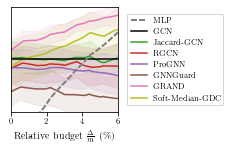

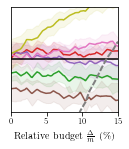

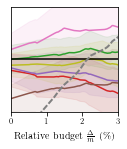

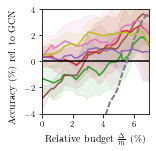

In [16]:
def conf(pois, cora):
    plt.xlim(left=0)
    plt.ylim(-4, 4)
    if not pois and not cora:
        plt.xlim(right=6)
    elif not pois and cora:
        plt.xlim(right=15)
    elif pois and not cora:
        plt.xlim(right=3)
    elif pois and cora:
        plt.xlim(right=7)
    plt.gca().yaxis.set_label_coords(-0.23, 0.45)
    return pois and cora, not pois and not cora

unproj_slugs = ["gcn_2", "jaccard_gcn_tuned", "rgcn_tuned", "pro_gnn_tuned", "gnn_guard_faith_refimpl", "grand_tuned", "soft_median_gdc_tuned"]
colors = ["black", "C2", "C3", "C4", "C5", "C6", "C8"]
plot_curves(
    global_mr_envelope_curves, unproj_slugs, colors, conf, relative=True, is_global=True,
    new_plot=lambda: plt.figure(figsize=figsize(scale=0.35, ratio_yx=1)), file_prefix="global_mr_envelope_curves"
)

## Local Breakage Envelope Curves

In [17]:
local_breakage_envelope_curves = {('evasion', 'citeseer'): {'gcn_1': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4118, 1.4286, 1.4444, 1.45, 1.4667, 1.4783, 1.5, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5789, 1.5909, 1.6, 1.6111, 1.619, 1.625, 1.6471, 1.65, 1.6522, 1.6667, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9412, 1.9524, 2, 2.0625, 2.0667, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1739, 2.1765, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4706, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.6, 2.625, 2.6316, 2.6667, 2.7, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.8889, 2.9412, 3, 3.0625, 3.0667, 3.1111, 3.125, 3.2, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13]), np.array([[27, 29.391, 29.5, 29.619, 29.75, 29.895, 30.056, 30.235, 30.438, 30.667, 31.783, 32, 32.238, 32.5, 32.842, 33.222, 33.647, 34.125, 34.522, 34.733, 34.977, 35.5, 36.075, 36.711, 37.417, 38, 38.206, 38.636, 39.094, 39.333, 40.1, 40.947, 41.5, 41.889, 42.364, 43.118, 43.429, 44.75, 46.391, 46.737, 47.267, 48.182, 48.944, 50.143, 51.5, 52.45, 53.196, 54.594, 55.053, 55.409, 57.667, 60.087, 60.45, 60.941, 62.545, 63.263, 64.25, 65.333, 66.694, 67.109, 68.6, 70.659, 71.265, 73.368, 75, 76.348, 76.938, 78.222, 79.225, 80.045, 82.233, 82.824, 83.289, 83.667, 83.978, 87.25, 89.304, 89.5, 89.737, 90.029, 90.4, 91.455, 91.85, 92.333, 92.875, 93.087, 93.571, 94.158, 94.882, 95.091, 95.8, 96.304, 96.444, 96.905, 97.25, 97.658, 97.955, 98.618, 98.8, 98.935, 99.833, 100.41, 100.5, 100.62, 100.93, 101.1, 101.32, 101.64, 101.94, 102.14, 102.37, 102.5, 102.59, 103, 103.55, 103.68, 104.05, 104.28, 104.53, 104.9, 105.46, 106.01, 106.19, 106.45, 106.71, 106.83, 107.17, 107.58, 107.95, 108.29, 108.59, 108.73, 108.87, 109.12, 109.41, 109.67, 109.92, 110.15, 110.36, 110.55, 111.6, 111.78, 111.94, 112.08, 112.21, 112.32, 112.43, 112.61, 114.5, 115.38, 115.47, 115.53, 115.59, 115.66, 115.73, 116.35, 116.44, 116.47, 116.5, 116.52, 116.53, 116.63, 116.67, 116.71, 116.73, 116.75, 116.76, 116.8, 117, 117.12, 117.14, 117.25, 117.4, 117.65, 117.72, 117.78, 117.89, 118.17, 118.48, 118.53, 118.59, 118.65, 118.85, 118.91, 119, 119.08, 119.11, 119.2, 119.26, 119.38, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.043, 30.227, 30.429, 30.65, 30.895, 31.167, 31.471, 31.812, 32.2, 34.696, 35.182, 35.714, 36.3, 37, 37.889, 38.824, 39.875, 41, 41.6, 42.182, 43.429, 44.8, 46.316, 47.833, 49.087, 49.529, 50.455, 51.438, 51.81, 53, 54.105, 54.826, 55.333, 55.864, 56.706, 57, 58.25, 59.261, 59.474, 59.8, 60.364, 60.833, 61.571, 62.353, 62.9, 63.304, 64.062, 64.368, 64.591, 66, 67.043, 67.2, 67.412, 68.182, 68.526, 69, 69.524, 70.222, 70.435, 71.2, 72.159, 72.441, 73.421, 74.214, 74.87, 75.156, 75.778, 76.4, 76.909, 78.267, 78.706, 79.105, 79.429, 79.707, 82.625, 85.826, 86.131, 86.5, 86.956, 87.467, 89.136, 89.763, 90.528, 91.422, 91.772, 92.571, 93.539, 94.735, 95.147, 96.545, 97.709, 98.033, 99.095, 99.812, 100.66, 101.27, 102.65, 102.97, 103.22, 104.83, 106, 106.18, 106.44, 106.93, 107.2, 107.53, 108, 108.44, 108.73, 109.07, 109.26, 109.39, 110, 110.62, 110.76, 111.18, 111.44, 111.7, 112.05, 112.6, 112.95, 113.06, 113.27, 113.47, 113.57, 113.83, 114.16, 114.45, 114.71, 114.95, 115.07, 115.17, 115.38, 115.59, 115.78, 115.95, 116.1, 116.24, 116.36, 117.07, 117.19, 117.29, 117.39, 117.47, 117.55, 117.62, 117.74, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.33, 119.35, 119.36, 119.38, 119.38, 119.4, 119.44, 119.47, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.62, 119.67, 119.73, 119.74, 119.75, 119.76, 119.8, 119.82, 119.86, 119.89, 119.9, 119.93, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 26.522, 26.682, 26.857, 27.05, 27.263, 27.444, 27.647, 27.875, 28.133, 29.391, 29.636, 29.905, 30.2, 30.526, 30.889, 31.294, 31.75, 32.087, 32.267, 32.455, 32.857, 33.3, 33.789, 34.333, 34.783, 34.941, 35.273, 35.625, 35.81, 36.4, 37.158, 37.652, 38, 38.409, 39.059, 39.286, 40.25, 41.478, 41.737, 42.133, 42.818, 43.389, 44.286, 45.235, 45.9, 46.304, 47.062, 47.368, 47.614, 49.167, 50.609, 50.825, 51.118, 52.455, 53.053, 53.875, 54.571, 55.667, 56, 57.2, 59.227, 59.824, 61.895, 63.5, 64.696, 65.281, 66.778, 68.2, 69.364, 72.533, 73.441, 74.079, 74.595, 75.022, 79, 82.13, 82.429, 82.789, 83.235, 83.8, 85.727, 86.35, 87.111, 88, 88.348, 89.143, 90.105, 91.294, 91.636, 92.8, 93.609, 93.847, 94.631, 95.219, 95.868, 96.341, 97.397, 97.688, 97.902, 99.5, 100.82, 101.03, 101.31, 102.08, 102.44, 102.97, 103.73, 104.44, 104.89, 105.44, 105.77, 105.99, 107.06, 107.86, 108.04, 108.58, 108.92, 109.24, 109.7, 110.4, 110.94, 111.11, 111.43, 111.74, 111.88, 112.34, 112.89, 113.38, 113.76, 114.11, 114.27, 114.39, 114.62, 114.94, 115.22, 115.47, 115.7, 115.9, 116.09, 117.13, 117.31, 117.47, 117.61, 117.74, 117.85, 117.95, 118.13, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [35, 37.391, 37.5, 37.619, 37.75, 37.895, 38.056, 38.235, 38.438, 38.667, 39.783, 40, 40.238, 40.5, 40.789, 41.111, 41.529, 42.125, 42.609, 42.867, 43.136, 43.714, 44.35, 45.053, 45.833, 46.478, 46.706, 47.091, 47.5, 47.714, 48.4, 49.579, 50.348, 50.889, 51.409, 52.235, 52.524, 53.75, 55, 55.263, 55.667, 56.364, 56.944, 57.857, 58.824, 59.5, 59.957, 60.812, 61.158, 61.409, 63, 64.391, 64.6, 64.882, 66.091, 66.684, 67.5, 68.143, 69, 69.261, 70.2, 71.136, 71.412, 72.368, 73.143, 73.783, 74.062, 74.778, 75.375, 75.864, 77.033, 77.412, 77.658, 77.857, 78.033, 79.875, 81.891, 82.083, 82.316, 82.603, 82.967, 84.273, 84.763, 85.361, 86.109, 86.402, 87.071, 87.882, 88.882, 89.182, 90.2, 91.304, 91.625, 92.679, 93.469, 94.132, 94.614, 95.691, 95.987, 96.207, 97.667, 98.875, 99.066, 99.328, 99.978, 100.33, 100.79, 101.46, 102.1, 102.5, 102.98, 103.26, 103.45, 104.42, 105.34, 105.56, 106.07, 106.39, 106.72, 107.14, 107.8, 108.3, 108.45, 108.75, 109.03, 109.16, 109.54, 110, 110.41, 110.79, 111.09, 111.23, 111.37, 111.62, 111.97, 112.28, 112.55, 112.8, 113.02, 113.23, 114.37, 114.53, 114.68, 114.81, 114.92, 115.03, 115.12, 115.28, 117, 117.33, 117.37, 117.39, 117.41, 117.44, 117.47, 117.7, 117.78, 117.82, 117.88, 117.91, 117.93, 118.11, 118.17, 118.24, 118.27, 118.31, 118.33, 118.4, 118.56, 118.65, 118.67, 118.75, 118.87, 119.06, 119.1, 119.13, 119.19, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.44, 119.45, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 27.783, 27.909, 28.048, 28.2, 28.368, 28.556, 28.765, 29, 29.267, 30.565, 30.818, 31.19, 31.6, 32.053, 32.667, 33.412, 34.25, 34.913, 35.267, 35.636, 36.286, 37, 37.789, 38.5, 39.087, 39.294, 39.727, 40.188, 40.429, 41.2, 42.211, 42.87, 43.333, 43.818, 44.588, 44.857, 46, 47.043, 47.289, 47.667, 48.318, 48.861, 49.714, 50.618, 51.25, 51.717, 52.594, 52.947, 53.205, 54.833, 56.304, 56.5, 56.765, 57.727, 58.158, 58.75, 59.429, 60.333, 60.609, 61.6, 63.091, 63.529, 65.053, 66.286, 67.304, 67.766, 68.722, 69.513, 70.159, 71.883, 72.382, 72.776, 73.095, 73.37, 76.375, 79.761, 80.036, 80.368, 80.838, 81.433, 83.455, 84.213, 85.028, 86.172, 86.62, 87.643, 88.882, 90.235, 90.692, 92.245, 93.601, 93.977, 95.071, 95.812, 96.579, 97.136, 98.382, 98.675, 98.891, 100.33, 101.59, 101.79, 102.06, 102.74, 103.1, 103.53, 104.14, 104.72, 105.09, 105.53, 105.74, 105.87, 106.5, 107.24, 107.41, 107.91, 108.22, 108.48, 108.84, 109.4, 109.81, 109.94, 110.18, 110.41, 110.53, 110.88, 111.29, 111.66, 112, 112.44, 112.65, 112.85, 113.22, 113.66, 114.06, 114.41, 114.72, 115.01, 115.18, 116.13, 116.3, 116.44, 116.57, 116.68, 116.79, 116.88, 117.04, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.44, 119.45, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gcn_2': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.3913, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5652, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 2, 2.0909, 2.1, 2.1111, 2.125, 2.1364, 2.1739, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.3333, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.5, 6, 7, 8, 9, 10]), np.array([[23, 25.609, 25.727, 25.905, 26.1, 26.316, 26.556, 26.824, 27.125, 27.467, 29.13, 29.455, 29.714, 30, 30.368, 30.778, 31.176, 31.625, 32, 32.2, 32.432, 32.929, 33.475, 34.079, 34.75, 35.304, 35.5, 35.909, 36.344, 36.571, 37.3, 38.053, 38.543, 38.889, 39.273, 39.882, 40.095, 41, 41.783, 41.947, 42.2, 42.591, 42.917, 43.429, 43.971, 44.35, 44.63, 45.156, 45.368, 45.523, 46.5, 47.957, 48.175, 48.471, 49.636, 50.158, 50.875, 51.571, 52.5, 52.783, 53.8, 55.318, 55.765, 57.316, 58.714, 59.87, 60.375, 61.667, 62.725, 63.591, 65.9, 66.588, 67.105, 67.476, 67.783, 71, 74.87, 75.238, 75.684, 76.235, 76.933, 79, 79.775, 80.722, 81.844, 82.152, 82.857, 83.711, 84.765, 85.159, 86.5, 87.957, 88.361, 89.69, 90.688, 91.684, 92.409, 94.029, 94.375, 94.63, 96.333, 97.83, 98.066, 98.391, 99.196, 99.625, 100.21, 101.04, 101.82, 102.32, 102.92, 103.26, 103.49, 104.56, 105.74, 106.01, 106.81, 107.31, 107.7, 108.25, 109.23, 109.79, 109.91, 110.14, 110.35, 110.46, 110.75, 111.11, 111.42, 111.71, 111.98, 112.1, 112.22, 112.44, 112.68, 112.89, 113.05, 113.2, 113.29, 113.36, 113.8, 113.88, 113.94, 114, 114.05, 114.1, 114.14, 114.22, 115, 115.52, 115.58, 115.61, 115.65, 115.69, 115.73, 116.1, 116.22, 116.29, 116.38, 116.43, 116.47, 116.74, 116.94, 117, 117.06, 117.2, 117.44, 117.62, 117.75, 117.87, 117.93, 118.24, 118.3, 118.35, 118.44, 118.67, 118.73, 118.74, 118.75, 118.78, 118.8, 118.86, 118.89, 118.93, 118.96, 119, 119.06, 119.09, 119.11, 119.13, 119.14, 119.16, 119.18, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.41, 119.45, 119.47, 119.5, 119.52, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.043, 30.227, 30.429, 30.65, 30.895, 31.167, 31.471, 31.812, 32.267, 34.174, 34.545, 34.952, 35.4, 35.842, 36.444, 37.118, 37.875, 38.391, 38.667, 38.955, 39.571, 40.25, 41, 41.667, 42.217, 42.412, 42.818, 43.25, 43.476, 44.2, 45.105, 45.696, 46.111, 46.614, 47.412, 47.69, 48.875, 50.217, 50.5, 50.933, 51.727, 52.389, 53.429, 54.529, 55.3, 55.87, 56.938, 57.368, 57.682, 59.667, 61.609, 61.9, 62.294, 63.909, 64.632, 65.625, 66.762, 68.444, 68.957, 70.8, 73.205, 73.912, 76.211, 78.071, 79.478, 80.094, 81.333, 82.25, 83, 85, 85.529, 85.947, 86.286, 86.565, 89.5, 92.304, 92.571, 92.895, 93.294, 93.8, 95.455, 96.075, 96.722, 97.531, 97.848, 98.571, 99.447, 100.53, 100.85, 101.95, 102.74, 102.96, 103.68, 104.22, 104.76, 105.16, 106.04, 106.29, 106.47, 107.67, 108.5, 108.63, 108.81, 109.13, 109.3, 109.53, 109.86, 110.17, 110.36, 110.6, 110.76, 110.86, 111.45, 112.1, 112.25, 112.57, 112.78, 113, 113.32, 113.8, 114.05, 114.12, 114.27, 114.41, 114.48, 114.67, 114.89, 115.1, 115.29, 115.45, 115.53, 115.61, 115.75, 115.94, 116.11, 116.32, 116.5, 116.67, 116.82, 117.67, 117.81, 117.94, 118.06, 118.16, 118.25, 118.33, 118.48, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 26.348, 26.455, 26.571, 26.7, 26.842, 27.056, 27.294, 27.562, 27.867, 29.348, 29.636, 29.952, 30.3, 30.789, 31.222, 31.706, 32.25, 32.696, 32.933, 33.182, 33.714, 34.3, 34.947, 35.667, 36.261, 36.471, 36.909, 37.375, 37.619, 38.4, 39, 39.391, 39.667, 40, 40.529, 40.714, 41.5, 42.304, 42.5, 42.8, 43.318, 43.75, 44.429, 45.147, 45.65, 46.022, 46.719, 47, 47.205, 48.5, 49.739, 49.9, 50.118, 50.909, 51.263, 51.75, 52.19, 52.778, 52.957, 53.6, 54.773, 55.118, 56.316, 57.357, 58.217, 58.594, 59.444, 60.225, 60.864, 62.633, 63.265, 63.816, 64.262, 64.641, 68.625, 72.826, 73.226, 73.711, 74.279, 75, 77.318, 78.088, 79.028, 80.266, 80.75, 81.857, 83.197, 84.853, 85.295, 86.8, 88.065, 88.417, 89.429, 90.188, 91.053, 91.682, 93.088, 93.475, 93.739, 95.5, 97.364, 97.658, 98.062, 98.988, 99.482, 100.09, 100.82, 101.51, 101.94, 102.47, 102.79, 103, 104, 104.86, 105.06, 105.64, 106, 106.35, 106.88, 107.7, 108.3, 108.48, 108.84, 109.18, 109.34, 109.84, 110.44, 110.98, 111.48, 111.92, 112.13, 112.3, 112.62, 113.09, 113.5, 113.84, 114.15, 114.43, 114.68, 116.1, 116.33, 116.53, 116.71, 116.87, 117.01, 117.14, 117.37, 119.5, 119.69, 119.71, 119.72, 119.74, 119.75, 119.77, 119.9, 119.94, 119.97, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 33.783, 33.909, 34.048, 34.2, 34.368, 34.556, 34.765, 35, 35.267, 36.565, 36.818, 37.095, 37.4, 37.789, 38.222, 38.765, 39.375, 39.826, 40.067, 40.318, 40.857, 41.45, 42.105, 42.833, 43.435, 43.647, 44.091, 44.688, 45, 46, 47.158, 47.913, 48.444, 48.955, 49.588, 49.81, 50.75, 51.913, 52.158, 52.533, 53.227, 53.806, 54.714, 55.676, 56.35, 56.848, 57.781, 58.158, 58.432, 60.167, 61.609, 61.825, 62.118, 63.455, 64.053, 64.875, 65.619, 66.694, 67.022, 68.2, 69.614, 70.029, 71.316, 72.357, 73.217, 73.609, 74.5, 75.263, 75.886, 77.55, 78.029, 78.408, 78.714, 78.957, 81.5, 83.826, 84.048, 84.316, 84.647, 85.067, 86.364, 86.85, 87.444, 88.156, 88.435, 89.071, 89.842, 90.794, 91.091, 92.1, 93.152, 93.431, 94.345, 95.031, 95.711, 96.205, 97.309, 97.562, 97.75, 99, 100.07, 100.24, 100.47, 101.1, 101.43, 101.83, 102.39, 102.92, 103.26, 103.67, 103.92, 104.09, 104.88, 105.6, 105.76, 106.25, 106.56, 106.83, 107.21, 107.8, 108.29, 108.44, 108.73, 109, 109.13, 109.5, 109.95, 110.35, 110.71, 111.05, 111.2, 111.35, 111.62, 111.94, 112.22, 112.47, 112.7, 112.9, 113.09, 114.13, 114.31, 114.47, 114.61, 114.74, 114.85, 114.95, 115.13, 117, 117.29, 117.32, 117.33, 117.35, 117.38, 117.4, 117.6, 117.67, 117.71, 117.75, 117.78, 117.8, 117.95, 118.06, 118.09, 118.12, 118.2, 118.33, 118.43, 118.5, 118.57, 118.6, 118.76, 118.8, 118.83, 118.88, 119, 119.09, 119.11, 119.12, 119.17, 119.2, 119.29, 119.33, 119.4, 119.43, 119.5, 119.53, 119.55, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 27.522, 27.636, 27.762, 27.9, 28.053, 28.222, 28.412, 28.625, 28.867, 30.043, 30.273, 30.524, 30.8, 31.158, 31.611, 32.176, 32.812, 33.283, 33.533, 33.795, 34.357, 34.975, 35.658, 36.417, 37.043, 37.294, 37.818, 38.375, 38.667, 39.6, 40.895, 41.674, 42.222, 42.795, 43.706, 44.024, 45.375, 46.652, 46.895, 47.267, 47.909, 48.444, 49.286, 50.176, 50.8, 51.217, 52, 52.316, 52.545, 54, 55.348, 55.55, 55.824, 56.818, 57.316, 58, 58.619, 59.444, 59.696, 60.6, 61.5, 61.765, 62.684, 63.429, 64.043, 64.312, 65, 65.55, 66, 67.067, 67.412, 67.684, 67.905, 68.098, 70.125, 73.022, 73.298, 73.632, 74.103, 74.743, 77.356, 78.336, 79.534, 81.219, 81.848, 83.286, 84.868, 86.647, 87.216, 89.15, 90.783, 91.25, 92.643, 93.688, 94.579, 95.227, 96.676, 97.025, 97.326, 99.481, 101.2, 101.47, 101.84, 102.83, 103.25, 103.59, 104.07, 104.53, 104.82, 105.17, 105.37, 105.5, 106.12, 107, 107.21, 107.8, 108.17, 108.52, 109.03, 109.8, 110.26, 110.41, 110.68, 110.94, 111.05, 111.38, 111.76, 112.11, 112.43, 112.68, 112.8, 112.91, 113.12, 113.35, 113.56, 113.79, 114, 114.19, 114.36, 115.33, 115.5, 115.65, 115.78, 115.89, 116, 116.1, 116.26, 118, 118.29, 118.32, 118.33, 118.35, 118.38, 118.4, 118.6, 118.67, 118.71, 118.75, 118.78, 118.8, 118.95, 119.06, 119.09, 119.12, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.39, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gnn_guard_faith_paper': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2174, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2727, 1.2857, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3182, 1.3333, 1.3478, 1.35, 1.3529, 1.3636, 1.3684, 1.375, 1.3889, 1.3913, 1.4, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4762, 1.4783, 1.5, 1.5217, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5882, 1.5909, 1.6, 1.619, 1.625, 1.6316, 1.6471, 1.65, 1.6522, 1.6667, 1.6818, 1.6842, 1.6875, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.7391, 1.75, 1.7619, 1.7647, 1.7727, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8235, 1.8261, 1.8421, 1.85, 1.8571, 1.8636, 1.8667, 1.8696, 1.875, 1.8889, 1.9, 1.9048, 1.9091, 1.913, 1.9333, 1.9375, 1.9412, 1.9444, 1.95, 1.9565, 2, 2.0435, 2.0455, 2.0476, 2.05, 2.0526, 2.0556, 2.0588, 2.0667, 2.087, 2.0909, 2.1, 2.1053, 2.1111, 2.1176, 2.125, 2.1304, 2.1333, 2.1429, 2.15, 2.1579, 2.1667, 2.1739, 2.1765, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2778, 2.2941, 2.3, 2.3125, 2.3158, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4211, 2.4444, 2.45, 2.4667, 2.4706, 2.4737, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7333, 2.75, 2.7647, 2.7778, 2.8, 2.8667, 2.875, 2.8889, 2.9, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2222, 3.25, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[28, 30.609, 30.727, 30.857, 31, 31.158, 31.333, 31.529, 31.75, 32, 33.217, 33.455, 33.714, 34, 34.263, 34.556, 34.882, 35.25, 35.522, 35.667, 35.841, 36.214, 36.625, 37.079, 37.583, 38, 38.147, 38.455, 38.781, 38.952, 39.7, 40.526, 41.065, 41.444, 41.841, 42.471, 42.69, 43.375, 44.174, 44.342, 44.6, 45, 45.333, 45.857, 46.412, 46.8, 47.087, 47.625, 47.842, 48, 49, 50.087, 50.25, 50.471, 51.273, 51.632, 52.125, 52.571, 53.167, 53.348, 54, 54.773, 55, 55.789, 56.429, 56.957, 57.188, 57.778, 58.25, 58.636, 59.667, 60, 60.263, 60.476, 60.652, 62.5, 64.217, 64.381, 64.579, 64.824, 65.133, 66.091, 66.45, 66.889, 67.438, 67.652, 68.143, 68.737, 69.471, 69.727, 70.6, 71.565, 71.833, 72.714, 73.375, 73.947, 74.364, 75.294, 75.5, 75.652, 76.667, 78.205, 78.447, 78.781, 79.609, 80.05, 80.676, 81.571, 82.417, 82.955, 83.6, 83.974, 84.228, 85.438, 86.714, 87.015, 87.875, 88.417, 88.891, 89.566, 90.6, 91.488, 91.766, 92.386, 92.971, 93.261, 94.083, 95.079, 96.055, 96.939, 97.742, 98.117, 98.435, 99.031, 99.75, 100.39, 100.86, 101.28, 101.63, 101.95, 102.25, 103.77, 104.1, 104.39, 104.65, 104.89, 105.08, 105.26, 105.42, 105.57, 108.83, 110.79, 110.99, 111.11, 111.25, 111.41, 111.6, 112.52, 113.11, 113.35, 113.61, 113.91, 114.24, 114.46, 114.58, 114.69, 114.93, 115.47, 116.15, 116.3, 116.45, 116.54, 116.8, 117.13, 117.22, 117.47, 117.52, 117.75, 117.91, 118, 118.09, 118.29, 118.41, 118.5, 118.57, 118.69, 118.74, 118.77, 119, 119.09, 119.1, 119.12, 119.18, 119.21, 119.25, 119.33, 119.35, 119.4, 119.43, 119.43, 119.44, 119.44, 119.47, 119.47, 119.48, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.57, 119.58, 119.59, 119.59, 119.6, 119.62, 119.62, 119.63, 119.65, 119.65, 119.65, 119.67, 119.68, 119.68, 119.69, 119.7, 119.71, 119.71, 119.72, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.82, 119.83, 119.84, 119.85, 119.86, 119.86, 119.87, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.91, 119.93, 119.94, 119.94, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [28, 30.435, 30.545, 30.667, 30.8, 30.947, 31.111, 31.294, 31.5, 31.733, 33.174, 33.455, 33.762, 34.1, 34.526, 35, 35.529, 36.125, 36.652, 36.933, 37.182, 37.714, 38.3, 38.947, 39.833, 40.565, 40.824, 41.364, 41.938, 42.286, 43.4, 44.684, 45.391, 45.889, 46.409, 47.235, 47.524, 48.75, 49.739, 49.947, 50.267, 50.818, 51.278, 52, 52.765, 53.3, 53.696, 54.438, 54.737, 54.955, 56.333, 57.522, 57.7, 57.941, 58.818, 59.211, 59.75, 60.143, 60.667, 60.826, 61.4, 62, 62.176, 62.789, 63.286, 63.696, 63.875, 64.333, 64.7, 65, 65.8, 66.059, 66.263, 66.429, 66.565, 68, 69.435, 69.571, 69.737, 69.941, 70.2, 71, 71.3, 71.667, 72.125, 72.261, 72.571, 72.947, 73.412, 73.557, 74.05, 74.609, 74.764, 75.274, 75.656, 76.079, 76.386, 77.074, 77.263, 77.402, 78.333, 79.352, 79.513, 79.734, 80.283, 80.575, 80.971, 81.536, 82.069, 82.409, 82.817, 83.053, 83.207, 83.938, 84.881, 85.103, 85.739, 86.139, 86.522, 87.066, 87.9, 88.786, 89.062, 89.591, 90.088, 90.326, 91, 91.816, 92.55, 93.214, 93.784, 94.05, 94.283, 94.719, 95.397, 96, 96.539, 97.025, 97.488, 97.909, 98.293, 100.27, 100.71, 101.1, 101.44, 101.75, 102.03, 102.29, 102.52, 102.72, 107.33, 110.48, 110.81, 111, 111.22, 111.44, 111.7, 112.95, 113.76, 114.06, 114.39, 114.7, 115.05, 115.25, 115.35, 115.44, 115.64, 116.11, 116.68, 116.84, 117.02, 117.11, 117.4, 117.7, 117.78, 118, 118.05, 118.25, 118.35, 118.4, 118.45, 118.57, 118.65, 118.7, 118.74, 118.81, 118.84, 118.86, 119, 119.09, 119.1, 119.12, 119.18, 119.21, 119.25, 119.33, 119.35, 119.4, 119.57, 119.61, 119.62, 119.67, 119.8, 119.82, 119.86, 119.87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 26.13, 26.227, 26.333, 26.45, 26.579, 26.667, 26.765, 26.875, 27, 27.609, 27.727, 27.857, 28, 28.263, 28.556, 28.882, 29.25, 29.652, 29.867, 30.091, 30.571, 31.1, 31.684, 32.333, 32.87, 33.059, 33.455, 33.875, 34.095, 34.8, 35.474, 35.913, 36.222, 36.545, 37.059, 37.238, 38, 38.478, 38.579, 38.733, 39, 39.222, 39.571, 39.941, 40.2, 40.391, 40.75, 40.895, 41, 41.667, 42.348, 42.45, 42.588, 43.091, 43.316, 43.625, 43.905, 44.278, 44.391, 44.8, 45.273, 45.412, 45.895, 46.286, 46.609, 46.766, 47.167, 47.538, 47.841, 48.65, 48.912, 49.118, 49.286, 49.424, 50.875, 52.63, 52.798, 53, 53.25, 53.567, 54.545, 54.913, 55.361, 55.953, 56.185, 56.714, 57.355, 58.147, 58.375, 59.15, 60.022, 60.25, 61, 61.562, 62.211, 62.682, 63.794, 64.1, 64.326, 65.833, 67.614, 67.895, 68.281, 69.351, 69.922, 70.694, 71.797, 72.838, 73.442, 74.167, 74.605, 74.891, 76.25, 77.5, 77.794, 78.636, 79.167, 79.674, 80.395, 81.5, 82.5, 82.812, 83.409, 83.941, 84.232, 85.056, 86.053, 86.95, 87.762, 88.534, 88.894, 89.196, 89.76, 90.583, 91.315, 91.943, 92.508, 93.02, 93.485, 93.909, 96.089, 96.521, 96.902, 97.241, 97.557, 97.854, 98.123, 98.367, 98.591, 103.75, 107.24, 107.61, 107.76, 107.94, 108.12, 108.33, 109.35, 110, 110.3, 110.63, 110.97, 111.35, 111.59, 111.71, 111.82, 112.07, 112.65, 113.36, 113.57, 113.79, 113.9, 114.27, 114.61, 114.7, 114.96, 115.02, 115.25, 115.39, 115.47, 115.55, 115.71, 115.82, 115.9, 115.96, 116.06, 116.11, 116.14, 116.33, 116.48, 116.5, 116.53, 116.64, 116.68, 116.75, 116.89, 116.91, 117, 117.29, 117.35, 117.38, 117.44, 117.67, 117.71, 117.76, 117.78, 118, 118.09, 118.12, 118.13, 118.18, 118.22, 118.25, 118.26, 118.29, 118.32, 118.35, 118.36, 118.4, 118.48, 118.5, 118.53, 118.59, 118.6, 118.61, 118.67, 118.73, 118.74, 118.75, 118.8, 118.82, 118.86, 118.89, 118.91, 118.93, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.27, 119.29, 119.3, 119.37, 119.4, 119.43, 119.45, 119.47, 119.48, 119.5, 119.56, 119.6, 119.62, 119.64, 119.65, 119.73, 119.75, 119.76, 119.78, 119.8, 119.83, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 34.739, 34.818, 34.905, 35, 35.105, 35.222, 35.353, 35.5, 35.667, 36.478, 36.636, 36.81, 37, 37.211, 37.444, 37.706, 38, 38.304, 38.467, 38.636, 39.143, 39.7, 40.316, 41, 41.565, 41.765, 42.182, 42.5, 42.667, 43.2, 44.053, 44.609, 45, 45.432, 46.118, 46.357, 47.375, 48.174, 48.342, 48.6, 49.045, 49.417, 50, 50.618, 51.05, 51.326, 51.844, 52.053, 52.205, 53.167, 54.043, 54.175, 54.353, 55.182, 55.553, 56.062, 56.571, 57.25, 57.457, 58.2, 59.068, 59.324, 60.053, 60.643, 61.13, 61.344, 61.889, 62.3, 62.636, 63.533, 63.824, 64.053, 64.238, 64.391, 66, 67.217, 67.333, 67.474, 67.647, 67.867, 68.545, 68.8, 69.111, 69.5, 69.652, 70, 70.421, 70.941, 71.091, 71.6, 71.957, 72.056, 72.381, 72.625, 72.921, 73.136, 73.618, 73.75, 73.848, 74.5, 75.261, 75.382, 75.547, 76.01, 76.257, 76.591, 77.068, 77.519, 77.806, 78.15, 78.368, 78.511, 79.188, 79.833, 79.985, 80.42, 80.694, 80.957, 81.329, 81.9, 82.369, 82.516, 82.795, 83.059, 83.196, 83.583, 84.053, 84.475, 84.857, 85.17, 85.317, 85.457, 85.719, 86.142, 86.519, 86.855, 87.158, 87.433, 87.682, 87.909, 89.078, 89.349, 89.588, 89.801, 89.991, 90.163, 90.317, 90.458, 90.587, 93.417, 95.754, 96.035, 96.199, 96.382, 96.609, 96.844, 97.989, 98.725, 98.969, 99.241, 99.544, 99.885, 100.12, 100.27, 100.44, 100.79, 101.6, 102.6, 102.89, 103.19, 103.35, 103.8, 105.18, 105.51, 106.46, 106.64, 107.44, 108.16, 108.55, 108.86, 109.54, 109.97, 110.25, 110.46, 110.84, 111, 111.11, 111.83, 112.59, 112.7, 112.85, 113.41, 113.66, 114, 114.72, 114.85, 115.3, 115.79, 115.89, 115.94, 116.06, 116.33, 116.38, 116.45, 116.48, 116.75, 117.02, 117.12, 117.17, 117.32, 117.44, 117.5, 117.52, 117.57, 117.63, 117.71, 117.73, 117.8, 117.95, 118, 118.05, 118.18, 118.2, 118.22, 118.33, 118.41, 118.42, 118.44, 118.5, 118.53, 118.57, 118.61, 118.64, 118.67, 118.7, 118.75, 118.81, 118.82, 118.86, 118.89, 118.95, 119, 119.05, 119.06, 119.09, 119.12, 119.13, 119.21, 119.25, 119.29, 119.32, 119.33, 119.35, 119.38, 119.44, 119.5, 119.52, 119.55, 119.57, 119.67, 119.69, 119.71, 119.72, 119.75, 119.78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 29.435, 29.545, 29.714, 29.9, 30.105, 30.333, 30.588, 30.875, 31.2, 32.783, 33.091, 33.333, 33.6, 33.895, 34.278, 34.706, 35.188, 35.543, 35.733, 35.932, 36.357, 36.825, 37.342, 37.917, 38.391, 38.559, 38.909, 39.281, 39.476, 40.1, 40.947, 41.435, 41.778, 42.136, 42.706, 42.905, 43.75, 44.652, 44.842, 45.133, 45.636, 46.056, 46.714, 47.412, 47.9, 48.217, 48.812, 49.053, 49.227, 50.333, 51.478, 51.65, 51.882, 52.727, 53.105, 53.625, 54.048, 54.611, 54.783, 55.4, 56.091, 56.294, 57, 57.571, 58.043, 58.266, 58.833, 59.288, 59.659, 60.65, 60.971, 61.224, 61.429, 61.598, 63.5, 65.739, 65.905, 66.105, 66.353, 66.667, 67.636, 68, 68.444, 69, 69.217, 69.714, 70.316, 71.059, 71.273, 72, 72.522, 72.681, 73.202, 73.594, 74.026, 74.341, 75.044, 75.238, 75.38, 76.333, 77.398, 77.566, 77.797, 78.37, 78.675, 79.088, 79.679, 80.236, 80.591, 81.017, 81.211, 81.337, 81.938, 82.786, 82.985, 83.557, 83.917, 84.283, 84.763, 85.5, 86.119, 86.312, 86.682, 87.029, 87.207, 87.708, 88.316, 88.862, 89.357, 89.875, 90.117, 90.348, 90.781, 91.338, 91.833, 92.329, 92.775, 93.202, 93.591, 93.946, 95.767, 96.193, 96.569, 96.903, 97.202, 97.483, 97.738, 97.97, 98.181, 102.83, 106.86, 107.23, 107.44, 107.69, 107.97, 108.3, 109.89, 110.91, 111.29, 111.72, 112.17, 112.68, 113.03, 113.22, 113.4, 113.79, 114.68, 115.71, 115.95, 116.22, 116.36, 116.8, 117.04, 117.11, 117.29, 117.33, 117.5, 117.61, 117.67, 117.73, 117.86, 117.94, 118, 118.04, 118.12, 118.16, 118.18, 118.33, 118.48, 118.5, 118.53, 118.64, 118.68, 118.75, 118.89, 118.91, 119, 119.14, 119.17, 119.19, 119.22, 119.33, 119.35, 119.38, 119.39, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.57, 119.58, 119.59, 119.59, 119.6, 119.62, 119.62, 119.63, 119.65, 119.65, 119.65, 119.67, 119.68, 119.68, 119.69, 119.7, 119.71, 119.71, 119.72, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.82, 119.83, 119.84, 119.85, 119.86, 119.86, 119.87, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.91, 119.93, 119.94, 119.94, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gnn_guard_faith_refimpl': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.05, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.0952, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2632, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3182, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.4, 1.4118, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5238, 1.5263, 1.5294, 1.5455, 1.55, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6471, 1.65, 1.6522, 1.6667, 1.6818, 1.6842, 1.6875, 1.7, 1.7059, 1.7143, 1.7273, 1.7333, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8333, 1.85, 1.8571, 1.8667, 1.8696, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.913, 1.9333, 1.9375, 1.9412, 1.9474, 1.9524, 1.9545, 1.9565, 2, 2.0476, 2.0556, 2.0588, 2.0625, 2.0667, 2.087, 2.0909, 2.0952, 2.1, 2.1053, 2.1111, 2.1176, 2.125, 2.1304, 2.1333, 2.1429, 2.15, 2.1579, 2.1667, 2.1739, 2.1765, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2778, 2.2941, 2.3, 2.3125, 2.3158, 2.3333, 2.35, 2.3529, 2.3684, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4444, 2.45, 2.4667, 2.4706, 2.4737, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7222, 2.7333, 2.75, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.8889, 2.9, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.2222, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[30, 32.348, 32.455, 32.571, 32.7, 32.842, 33, 33.176, 33.375, 33.6, 35, 35.273, 35.571, 36, 36.474, 37, 37.588, 38.25, 38.826, 39.133, 39.409, 40, 40.5, 41.053, 41.667, 42.174, 42.353, 42.727, 43.125, 43.333, 44, 44.895, 45.478, 45.889, 46.341, 47.059, 47.31, 48.375, 49.348, 49.553, 49.867, 50.409, 50.861, 51.571, 52.324, 52.85, 53.239, 53.969, 54.368, 54.659, 56.5, 58.522, 58.825, 59.235, 60.909, 61.658, 62.812, 63.762, 65.028, 65.413, 66.8, 68.432, 68.912, 70.421, 71.5, 72.391, 72.781, 73.667, 74.425, 75.045, 76.7, 77.294, 77.763, 78.143, 78.457, 81.75, 84.087, 84.31, 84.579, 84.912, 85.333, 86.545, 87, 87.667, 88.375, 88.696, 89.429, 90.316, 91.412, 91.784, 93.05, 94.348, 94.708, 95.893, 96.781, 97.658, 98.295, 99.721, 100.06, 100.32, 102, 102.85, 102.99, 103.17, 103.63, 103.88, 104.15, 104.54, 104.9, 105.14, 105.42, 105.58, 105.68, 106.19, 106.79, 106.93, 107.33, 107.58, 107.83, 108.17, 108.7, 109.08, 109.2, 109.43, 109.65, 109.74, 110, 110.32, 110.6, 110.86, 111.09, 111.2, 111.3, 111.5, 111.76, 112, 112.21, 112.4, 112.57, 112.73, 112.87, 113.6, 113.75, 113.88, 114, 114.11, 114.2, 114.29, 114.36, 114.43, 116, 116.38, 116.4, 116.42, 116.44, 116.47, 116.5, 116.53, 116.7, 116.76, 116.8, 116.84, 116.89, 116.94, 117, 117.04, 117.07, 117.09, 117.14, 117.26, 117.33, 117.41, 117.45, 117.5, 117.52, 117.6, 117.78, 117.88, 117.9, 118, 118.11, 118.13, 118.35, 118.4, 118.43, 118.5, 118.53, 118.55, 118.67, 118.73, 118.74, 118.75, 118.76, 118.78, 118.8, 118.82, 118.86, 118.87, 118.88, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.05, 119.06, 119.09, 119.1, 119.11, 119.12, 119.13, 119.14, 119.16, 119.18, 119.2, 119.22, 119.22, 119.24, 119.25, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.41, 119.43, 119.45, 119.47, 119.48, 119.5, 119.52, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.64, 119.65, 119.67, 119.7, 119.71, 119.73, 119.74, 119.75, 119.76, 119.78, 119.8, 119.82, 119.83, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 33.174, 33.364, 33.571, 33.8, 34.053, 34.333, 34.647, 35, 35.4, 37.348, 37.727, 38.143, 38.6, 39.158, 39.833, 40.529, 41.312, 42.196, 42.667, 43.114, 44.071, 45.125, 46.289, 47.583, 48.652, 49.029, 49.818, 50.656, 51, 52.1, 53.421, 54.217, 54.778, 55.364, 56.294, 56.619, 58, 59.087, 59.316, 59.667, 60.182, 60.611, 61.286, 62, 62.5, 62.87, 63.562, 63.842, 64.045, 65.333, 66.391, 66.55, 66.765, 67.545, 67.895, 68.375, 68.857, 69.5, 69.696, 70.4, 71.068, 71.265, 71.947, 72.5, 72.957, 73.156, 73.667, 74.075, 74.409, 75.3, 75.588, 75.816, 76, 76.152, 77.75, 78.826, 78.929, 79.053, 79.206, 79.4, 79.909, 80.1, 80.333, 80.688, 80.826, 81.143, 81.526, 82, 82.148, 82.65, 83.348, 83.542, 84.179, 84.656, 85.211, 85.614, 86.515, 86.763, 86.946, 88.167, 89.545, 89.763, 90.062, 90.804, 91.2, 91.706, 92.429, 93.111, 93.545, 94.067, 94.368, 94.565, 95.5, 96.524, 96.765, 97.455, 97.889, 98.304, 98.895, 99.8, 100.67, 100.94, 101.45, 101.94, 102.17, 102.83, 103.63, 104.35, 105, 105.56, 105.82, 106.07, 106.53, 107.13, 107.67, 108.12, 108.53, 108.87, 109.18, 109.47, 110.93, 111.2, 111.44, 111.65, 111.84, 112.01, 112.17, 112.31, 112.43, 115.25, 116.43, 116.49, 116.55, 116.63, 116.71, 116.78, 116.87, 117.28, 117.45, 117.55, 117.66, 117.78, 117.88, 118, 118.04, 118.07, 118.09, 118.14, 118.26, 118.33, 118.41, 118.45, 118.5, 118.52, 118.6, 118.78, 118.88, 118.9, 119, 119.05, 119.07, 119.18, 119.2, 119.22, 119.25, 119.26, 119.27, 119.33, 119.45, 119.47, 119.5, 119.52, 119.56, 119.6, 119.65, 119.71, 119.74, 119.75, 119.78, 119.87, 119.88, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 25.174, 25.364, 25.571, 25.8, 26.053, 26.278, 26.529, 26.812, 27.133, 28.696, 29, 29.333, 29.7, 30.053, 30.444, 30.882, 31.375, 31.696, 31.867, 32.045, 32.429, 32.85, 33.316, 33.833, 34.261, 34.412, 34.727, 35.062, 35.238, 35.8, 36.474, 36.913, 37.222, 37.614, 38.235, 38.452, 39.375, 40.435, 40.658, 41, 41.591, 42.083, 42.857, 43.676, 44.25, 44.674, 45.469, 45.789, 46.023, 47.5, 49, 49.225, 49.529, 50.636, 51.132, 51.812, 52.476, 53.361, 53.63, 54.6, 55.773, 56.118, 57.316, 58.429, 59.348, 59.766, 60.833, 61.688, 62.386, 64.317, 65, 65.539, 65.929, 66.25, 69.625, 72.522, 72.798, 73.132, 73.544, 74.067, 75.409, 75.938, 76.583, 77.328, 77.663, 78.429, 79.355, 80.5, 80.841, 81.9, 83, 83.306, 84.31, 85.062, 85.763, 86.273, 87.412, 87.775, 88.043, 89.833, 91.818, 92.132, 92.562, 93.63, 94.2, 95, 95.857, 96.667, 97.182, 97.8, 98.158, 98.391, 99.5, 100.71, 101, 101.86, 102.41, 102.93, 103.68, 104.84, 105.61, 105.81, 106.14, 106.44, 106.63, 107.17, 107.82, 108.4, 108.93, 109.41, 109.63, 109.85, 110.25, 110.79, 111.17, 111.47, 111.75, 111.98, 112.18, 112.37, 113.33, 113.5, 113.65, 113.78, 113.89, 114, 114.1, 114.18, 114.26, 116, 116.48, 116.5, 116.53, 116.56, 116.59, 116.62, 116.67, 116.87, 116.95, 117, 117.05, 117.11, 117.18, 117.25, 117.3, 117.33, 117.36, 117.43, 117.58, 117.67, 117.76, 117.82, 117.88, 117.9, 118, 118.11, 118.18, 118.19, 118.25, 118.32, 118.33, 118.47, 118.5, 118.52, 118.56, 118.58, 118.59, 118.67, 118.73, 118.74, 118.75, 118.76, 118.78, 118.8, 118.82, 118.86, 118.87, 118.88, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.05, 119.06, 119.09, 119.1, 119.11, 119.12, 119.13, 119.14, 119.16, 119.18, 119.2, 119.22, 119.22, 119.24, 119.25, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.41, 119.43, 119.45, 119.47, 119.48, 119.5, 119.52, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.64, 119.65, 119.67, 119.7, 119.71, 119.73, 119.74, 119.75, 119.76, 119.78, 119.8, 119.82, 119.83, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [35, 37.913, 38.045, 38.19, 38.35, 38.526, 38.722, 38.941, 39.188, 39.533, 41.217, 41.545, 41.905, 42.3, 42.789, 43.333, 43.941, 44.625, 45, 45.2, 45.409, 45.857, 46.35, 46.895, 47.5, 48, 48.176, 48.636, 49.125, 49.381, 50.2, 51.158, 51.783, 52.222, 52.727, 53.529, 53.762, 54.75, 55.87, 56.105, 56.467, 57.091, 57.722, 58.714, 59.765, 60.5, 61.043, 62.062, 62.474, 62.773, 64.333, 65.609, 65.8, 66.059, 67, 67.421, 68, 68.476, 69.111, 69.319, 70.067, 70.803, 71.02, 71.772, 72.381, 72.884, 73.104, 73.667, 74.142, 74.53, 75.567, 75.902, 76.219, 76.476, 76.699, 79.042, 81.123, 81.321, 81.561, 81.858, 82.167, 83.303, 83.729, 84.25, 84.859, 85.098, 85.643, 86.303, 87.118, 87.364, 88.2, 88.913, 89.125, 89.821, 90.469, 91.184, 91.705, 92.868, 93.188, 93.424, 95, 96.307, 96.513, 96.797, 97.5, 97.875, 98.343, 98.869, 99.366, 99.682, 100.06, 100.28, 100.42, 101.1, 101.85, 102.02, 102.53, 102.84, 103.14, 103.54, 104.13, 104.77, 104.97, 105.35, 105.71, 105.89, 106.4, 107.03, 107.59, 108.1, 108.56, 108.77, 108.98, 109.36, 109.83, 110.3, 110.71, 111.09, 111.34, 111.56, 111.76, 112.81, 113.03, 113.22, 113.34, 113.46, 113.56, 113.65, 113.73, 113.81, 115.5, 116.38, 116.43, 116.47, 116.53, 116.59, 116.66, 116.73, 116.96, 117.05, 117.1, 117.16, 117.22, 117.29, 117.38, 117.43, 117.47, 117.5, 117.57, 117.74, 117.83, 117.94, 118, 118.06, 118.1, 118.2, 118.33, 118.41, 118.43, 118.5, 118.58, 118.6, 118.76, 118.8, 118.83, 118.88, 118.89, 118.91, 119, 119.09, 119.11, 119.12, 119.14, 119.17, 119.2, 119.24, 119.29, 119.3, 119.31, 119.33, 119.4, 119.41, 119.43, 119.5, 119.52, 119.53, 119.53, 119.55, 119.55, 119.56, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.68, 119.68, 119.69, 119.7, 119.71, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.83, 119.85, 119.86, 119.87, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 119.93, 119.94, 119.94, 119.95, 119.95, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 35.652, 35.818, 35.952, 36.1, 36.263, 36.444, 36.647, 36.875, 37.133, 38.391, 38.636, 38.905, 39.2, 39.526, 39.944, 40.412, 40.938, 41.326, 41.533, 41.75, 42.214, 42.725, 43.289, 43.917, 44.435, 44.618, 45, 45.406, 45.619, 46.3, 47.158, 47.652, 48, 48.409, 49.059, 49.286, 50.25, 51.217, 51.421, 51.733, 52.273, 52.722, 53.429, 54.176, 54.7, 55.13, 56.125, 56.526, 56.818, 58.667, 60.174, 60.35, 60.588, 61.455, 61.842, 62.375, 62.857, 63.5, 63.696, 64.4, 65.045, 65.235, 65.895, 66.429, 66.87, 67.062, 67.667, 68.2, 68.636, 69.8, 70.176, 70.474, 70.714, 70.924, 73.125, 74.63, 74.774, 74.947, 75.162, 75.433, 76.273, 76.588, 76.972, 77.391, 77.598, 78.071, 78.645, 79.353, 79.568, 80.3, 81.13, 81.375, 82.179, 82.781, 83.316, 83.705, 84.574, 84.813, 84.989, 86.314, 87.972, 88.234, 88.594, 89.543, 89.95, 90.529, 91.357, 92.175, 92.695, 93.319, 93.68, 93.927, 95.098, 96.429, 96.765, 97.591, 98.111, 98.609, 99.316, 100.4, 101.35, 101.64, 102.25, 102.82, 103.11, 103.92, 104.89, 105.62, 106.29, 106.85, 107.12, 107.37, 107.84, 108.46, 109, 109.43, 109.83, 110.15, 110.45, 110.73, 112.13, 112.36, 112.56, 112.74, 112.89, 113.04, 113.17, 113.28, 113.39, 115.75, 116.62, 116.66, 116.71, 116.76, 116.82, 116.88, 116.93, 117.22, 117.33, 117.4, 117.47, 117.56, 117.65, 117.75, 117.83, 117.87, 117.91, 118, 118.21, 118.33, 118.47, 118.55, 118.62, 118.67, 118.8, 118.89, 118.94, 118.95, 119, 119.05, 119.07, 119.18, 119.2, 119.22, 119.25, 119.26, 119.27, 119.33, 119.45, 119.47, 119.5, 119.52, 119.56, 119.6, 119.65, 119.71, 119.74, 119.75, 119.78, 119.87, 119.88, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'grand_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.7, 1.7273, 1.7333, 1.7368, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 2, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1739, 2.1765, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.2857, 2.3, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1111, 3.125, 3.2, 3.2667, 3.3333, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[25, 26.043, 26.091, 26.143, 26.2, 26.263, 26.333, 26.412, 26.5, 26.6, 27.087, 27.182, 27.286, 27.4, 27.526, 27.667, 27.824, 28, 28.087, 28.133, 28.182, 28.286, 28.4, 28.526, 28.667, 28.783, 28.824, 28.909, 29, 29.048, 29.2, 29.632, 29.913, 30.111, 30.364, 30.765, 30.905, 31.5, 32.087, 32.211, 32.4, 32.727, 33, 33.429, 33.882, 34.2, 34.435, 34.875, 35.053, 35.182, 36, 36.696, 36.8, 36.941, 37.455, 37.684, 38, 38.286, 38.667, 38.783, 39.2, 39.727, 39.882, 40.421, 40.857, 41.217, 41.375, 41.778, 42.175, 42.5, 43.433, 43.676, 43.895, 44.071, 44.217, 45.75, 47.63, 47.81, 48.026, 48.294, 48.633, 49.682, 50.075, 50.556, 51.094, 51.261, 51.643, 52.105, 52.676, 52.864, 53.5, 54.5, 54.778, 55.69, 56.375, 57.132, 57.682, 58.853, 59.125, 59.326, 60.667, 62.682, 63, 63.438, 64.522, 65.1, 65.853, 66.929, 67.981, 68.652, 69.456, 69.816, 70.12, 71.562, 73.238, 73.574, 74.534, 75.139, 75.717, 76.539, 77.6, 78.214, 78.406, 78.773, 79.118, 79.293, 79.792, 80.395, 80.938, 81.429, 81.875, 82.083, 82.261, 82.594, 83.162, 83.722, 84.25, 84.725, 85.131, 85.5, 87.567, 87.922, 88.235, 88.472, 88.684, 88.875, 89.048, 89.348, 92.5, 94.857, 95.105, 95.25, 95.412, 95.594, 95.8, 97.45, 97.889, 98.206, 98.562, 98.739, 98.833, 99.632, 100.24, 100.41, 100.59, 101, 101.61, 101.9, 102.12, 102.43, 102.94, 103.05, 103.13, 103.67, 104.27, 104.37, 104.5, 105, 105.57, 105.89, 106.33, 106.57, 107, 107.59, 107.91, 108.11, 108.58, 108.82, 109, 109.29, 109.38, 109.78, 110, 110.2, 110.36, 110.4, 110.42, 110.5, 110.59, 110.67, 110.74, 110.8, 110.86, 110.96, 111.25, 111.33, 111.4, 111.45, 111.6, 112, 112.91, 113, 113.11, 113.25, 113.3, 113.74, 113.76, 113.9, 114, 114.11, 114.22, 114.27, 114.35, 114.5, 114.67, 114.73, 114.86, 115, 115.33, 115.58, 115.62, 115.67, 115.8, 115.88, 115.95, 116.27, 116.29, 116.5, 116.67, 116.78, 117, 117.12, 117.16, 117.24, 117.33, 117.53, 117.67, 117.89, 118, 118.06, 118.38, 118.67, 118.71, 119, 119.06, 119.07, 119.11, 119.12, 119.2, 119.27, 119.33, 119.4, 119.44, 119.5, 119.56, 119.6, 119.67, 119.8, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 22, 22.045, 22.095, 22.15, 22.211, 22.333, 22.471, 22.625, 22.8, 23.652, 23.818, 24, 24.2, 24.421, 24.556, 24.706, 24.875, 25, 25.067, 25.136, 25.286, 25.45, 25.632, 25.833, 26, 26.059, 26.182, 26.312, 26.381, 26.6, 26.842, 27, 27.111, 27.273, 27.529, 27.619, 28, 28.522, 28.632, 28.8, 29.182, 29.5, 30, 30.529, 30.9, 31.174, 31.688, 31.842, 31.955, 32.667, 33.13, 33.2, 33.294, 33.636, 33.789, 34, 34.286, 34.667, 34.783, 35.2, 35.818, 36, 36.632, 37.143, 37.565, 37.75, 38.111, 38.425, 38.682, 39.367, 39.588, 39.763, 39.905, 40.022, 41.25, 42.609, 42.738, 42.895, 43.088, 43.333, 44.091, 44.375, 44.722, 45.156, 45.326, 45.714, 46.184, 46.765, 46.977, 47.7, 48.435, 48.639, 49.31, 49.812, 50.316, 50.682, 51.5, 51.675, 51.804, 52.667, 53.886, 54.079, 54.344, 55, 55.387, 55.91, 56.658, 57.365, 57.814, 58.354, 58.64, 58.826, 59.75, 61.016, 61.314, 62.205, 62.766, 63.26, 63.974, 65.069, 65.714, 65.938, 66.273, 66.588, 66.75, 67.208, 67.763, 68.263, 68.714, 69.125, 69.317, 69.5, 69.844, 70.191, 70.5, 70.91, 71.279, 71.612, 71.916, 73.614, 73.922, 74.206, 74.403, 74.579, 74.738, 74.881, 75.13, 77.75, 82.024, 82.5, 82.778, 83.088, 83.469, 83.8, 86.575, 87.556, 88.103, 88.719, 89.13, 89.35, 91.026, 92.294, 92.659, 93.047, 93.9, 95.5, 96.643, 97.438, 98.617, 100.56, 100.97, 101.26, 103.17, 104.89, 105.16, 105.53, 106.95, 108.29, 109.03, 110.07, 110.57, 111.5, 112, 112.27, 112.44, 112.84, 113.05, 113.2, 113.43, 113.5, 113.83, 114, 114.3, 114.55, 114.6, 114.63, 114.75, 114.88, 115, 115.11, 115.2, 115.29, 115.43, 115.88, 116, 116.1, 116.18, 116.4, 117, 117.45, 117.5, 117.56, 117.62, 117.65, 117.87, 117.88, 117.95, 118, 118.05, 118.11, 118.14, 118.18, 118.25, 118.33, 118.36, 118.43, 118.5, 118.67, 118.74, 118.75, 118.76, 118.8, 118.82, 118.84, 118.93, 118.94, 119, 119.07, 119.11, 119.2, 119.25, 119.26, 119.29, 119.33, 119.41, 119.47, 119.56, 119.6, 119.62, 119.75, 119.87, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 21.609, 21.682, 21.762, 21.85, 21.947, 22.056, 22.176, 22.312, 22.467, 23.217, 23.364, 23.524, 23.7, 23.842, 24.111, 24.471, 24.875, 25.13, 25.267, 25.409, 25.714, 26.05, 26.421, 26.667, 26.87, 26.941, 27.091, 27.25, 27.333, 27.6, 27.947, 28.174, 28.333, 28.5, 28.765, 28.857, 29.25, 29.913, 30.053, 30.267, 30.636, 30.944, 31.429, 31.941, 32.3, 32.565, 33.062, 33.211, 33.318, 34, 34.522, 34.6, 34.706, 35.091, 35.263, 35.5, 35.667, 35.889, 35.957, 36.2, 36.773, 36.941, 37.526, 38, 38.391, 38.578, 39.056, 39.487, 39.841, 40.783, 41.088, 41.329, 41.524, 41.685, 43.375, 44.891, 45.036, 45.211, 45.426, 45.767, 46.818, 47.213, 47.694, 48.297, 48.533, 49.071, 49.724, 50.529, 50.739, 51.45, 52.261, 52.472, 53.167, 53.688, 54.237, 54.636, 55.588, 55.85, 56.043, 57.333, 59.114, 59.421, 59.844, 60.945, 61.532, 62.209, 63.032, 63.811, 64.306, 64.8, 65.105, 65.304, 66.25, 67.143, 67.353, 67.955, 68.333, 68.63, 69.053, 69.7, 70.286, 70.469, 70.818, 71.147, 71.293, 71.753, 72.309, 72.885, 73.406, 73.879, 74.1, 74.283, 74.625, 75.147, 75.611, 75.921, 76.2, 76.452, 76.682, 77.967, 78.266, 78.529, 78.764, 78.974, 79.175, 79.357, 79.674, 83.25, 87.024, 87.421, 87.653, 87.912, 88.219, 88.567, 90.85, 91.389, 91.706, 92.062, 92.283, 92.383, 93.237, 93.794, 93.955, 94.125, 94.6, 95.639, 96.381, 97, 97.667, 98.765, 99, 99.196, 100.5, 101.86, 102.08, 102.38, 103.5, 104.5, 104.97, 105.63, 105.93, 106.5, 107.06, 107.36, 107.56, 108, 108.23, 108.4, 108.76, 108.88, 109.39, 109.67, 110.1, 110.45, 110.53, 110.58, 110.75, 110.94, 111.11, 111.26, 111.4, 111.52, 111.74, 112.38, 112.56, 112.7, 112.82, 113.13, 114, 114.55, 114.6, 114.67, 114.75, 114.78, 115.04, 115.06, 115.14, 115.2, 115.26, 115.33, 115.36, 115.41, 115.5, 115.6, 115.64, 115.71, 115.8, 116, 116.21, 116.25, 116.29, 116.4, 116.47, 116.53, 116.8, 116.82, 117, 117.13, 117.22, 117.4, 117.5, 117.53, 117.59, 117.67, 117.94, 118.13, 118.44, 118.6, 118.69, 119.12, 119.53, 119.59, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 30.609, 30.682, 30.762, 30.85, 30.947, 31.056, 31.176, 31.312, 31.467, 32.217, 32.364, 32.524, 32.7, 32.947, 33.222, 33.529, 33.875, 34.13, 34.267, 34.409, 34.714, 35.05, 35.421, 35.833, 36.174, 36.294, 36.545, 36.812, 36.952, 37.4, 37.789, 38.043, 38.222, 38.409, 38.706, 38.81, 39.25, 39.783, 39.895, 40.067, 40.364, 40.611, 41, 41.412, 41.7, 41.913, 42.312, 42.474, 42.591, 43.333, 44.087, 44.2, 44.353, 45.091, 45.421, 45.875, 46.238, 46.722, 46.87, 47.4, 48.227, 48.471, 49.158, 49.714, 50.174, 50.375, 50.889, 51.35, 51.727, 52.8, 53.088, 53.342, 53.548, 53.717, 55.5, 57.261, 57.429, 57.632, 57.882, 58.2, 59.364, 59.7, 60.111, 60.562, 60.739, 61.143, 61.632, 62.235, 62.409, 63, 63.652, 63.847, 64.488, 64.969, 65.526, 65.932, 66.838, 67.088, 67.272, 68.5, 69.943, 70.171, 70.484, 71.261, 71.675, 72.176, 72.75, 73.292, 73.636, 74.05, 74.289, 74.446, 75.188, 76.095, 76.309, 76.92, 77.306, 77.674, 78.158, 78.9, 79.476, 79.656, 80, 80.324, 80.467, 80.875, 81.368, 81.812, 82.214, 82.614, 82.8, 82.978, 83.312, 83.824, 84.278, 84.658, 85, 85.31, 85.591, 87.167, 87.422, 87.647, 87.847, 88.026, 88.187, 88.333, 88.587, 91.25, 94.262, 94.579, 94.764, 94.912, 95.078, 95.267, 96.775, 97.278, 97.574, 97.906, 98.13, 98.25, 99.263, 100.03, 100.25, 100.48, 101, 102.14, 102.95, 103.5, 104.27, 105.53, 105.8, 106, 107.33, 108.36, 108.53, 108.75, 109.6, 110.14, 110.44, 110.87, 111.13, 111.62, 112.12, 112.39, 112.56, 112.95, 113.15, 113.3, 113.52, 113.59, 113.91, 114.08, 114.38, 114.61, 114.67, 114.68, 114.75, 114.82, 114.89, 114.95, 115, 115.1, 115.26, 115.75, 115.89, 116, 116.09, 116.33, 117, 117.18, 117.2, 117.22, 117.25, 117.26, 117.35, 117.35, 117.38, 117.4, 117.42, 117.44, 117.45, 117.47, 117.5, 117.53, 117.55, 117.57, 117.6, 117.67, 117.74, 117.75, 117.76, 117.8, 117.82, 117.84, 117.93, 117.94, 118, 118.07, 118.11, 118.2, 118.25, 118.26, 118.29, 118.33, 118.41, 118.47, 118.56, 118.6, 118.62, 118.75, 118.87, 118.88, 119, 119.12, 119.13, 119.22, 119.25, 119.4, 119.53, 119.67, 119.8, 119.89, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 27.565, 27.636, 27.714, 27.8, 27.895, 28.056, 28.235, 28.438, 28.667, 29.783, 30, 30.238, 30.5, 30.789, 31, 31.235, 31.5, 31.696, 31.8, 31.909, 32.143, 32.4, 32.684, 33, 33.261, 33.353, 33.545, 33.75, 33.857, 34.2, 34.737, 35.087, 35.333, 35.636, 36.118, 36.286, 37, 37.739, 37.895, 38.133, 38.545, 38.889, 39.429, 40, 40.4, 40.696, 41.25, 41.474, 41.636, 42.667, 43.739, 43.9, 44.118, 44.909, 45.263, 45.75, 46.19, 46.778, 46.957, 47.6, 48.182, 48.353, 48.947, 49.429, 49.826, 50.016, 50.5, 50.837, 51.114, 51.917, 52.176, 52.382, 52.548, 52.685, 54.125, 55.261, 55.369, 55.5, 55.662, 55.867, 56.5, 56.737, 57.028, 57.391, 57.533, 57.857, 58.25, 58.735, 58.92, 59.55, 60.283, 60.472, 61.095, 61.562, 62.211, 62.682, 63.676, 63.9, 64.065, 65.167, 66.648, 66.882, 67.203, 67.87, 68.225, 68.647, 69.25, 69.856, 70.242, 70.706, 71, 71.217, 72.25, 73.56, 73.809, 74.557, 75.028, 75.478, 76.158, 77.2, 78, 78.25, 78.636, 79, 79.185, 79.708, 80.342, 80.912, 81.429, 81.898, 82.117, 82.326, 82.719, 83.191, 83.667, 84.118, 84.525, 84.845, 85.136, 86.767, 87.047, 87.294, 87.472, 87.632, 87.775, 87.905, 88.13, 90.75, 92.929, 93.184, 93.333, 93.5, 93.688, 93.9, 95.6, 96.333, 96.794, 97.312, 97.739, 97.95, 99.737, 101.18, 101.59, 102.03, 102.8, 103.83, 104.36, 104.69, 105.15, 105.91, 106.08, 106.17, 106.83, 107.61, 107.74, 107.88, 108.4, 109.14, 109.56, 110.13, 110.43, 111, 111.47, 111.73, 111.89, 112.26, 112.45, 112.6, 112.81, 112.88, 113.17, 113.33, 113.7, 114, 114.07, 114.11, 114.25, 114.41, 114.56, 114.68, 114.8, 114.9, 115.09, 115.62, 115.78, 115.9, 116, 116.27, 117, 117.27, 117.3, 117.33, 117.38, 117.39, 117.52, 117.53, 117.57, 117.6, 117.63, 117.67, 117.68, 117.71, 117.75, 117.8, 117.82, 117.86, 117.9, 118, 118.11, 118.12, 118.14, 118.2, 118.24, 118.26, 118.4, 118.41, 118.5, 118.53, 118.56, 118.6, 118.62, 118.63, 118.65, 118.67, 118.71, 118.73, 118.78, 118.8, 118.81, 118.88, 118.93, 118.94, 119, 119.06, 119.07, 119.11, 119.12, 119.2, 119.27, 119.33, 119.4, 119.44, 119.5, 119.56, 119.6, 119.67, 119.8, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'jaccard_gcn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4286, 1.4375, 1.4444, 1.4545, 1.4667, 1.4706, 1.4762, 1.4783, 1.5, 1.5238, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5652, 1.5789, 1.5882, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8636, 1.8667, 1.875, 1.8889, 1.9, 1.9048, 1.9091, 1.9333, 1.9412, 1.9545, 1.9565, 2, 2.0625, 2.087, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1333, 2.1429, 2.1667, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3125, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.6875, 2.7, 2.7059, 2.75, 2.7647, 2.7778, 2.8, 2.8125, 2.875, 2.8824, 2.8889, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18]), np.array([[26, 28.522, 28.636, 28.762, 28.9, 29.053, 29.222, 29.412, 29.625, 29.867, 31.043, 31.273, 31.524, 31.8, 32.158, 32.556, 33, 33.5, 33.913, 34.133, 34.386, 34.929, 35.525, 36.184, 36.917, 37.522, 37.735, 38.182, 38.656, 38.905, 39.7, 40.684, 41.326, 41.778, 42.318, 43.176, 43.524, 45, 46.783, 47.158, 47.733, 48.682, 49.472, 50.714, 52.118, 53.1, 53.913, 55.438, 56, 56.432, 59.167, 61.826, 62.225, 62.765, 64.545, 65.342, 66.438, 67.429, 68.667, 69.043, 70.4, 72.159, 72.676, 74.474, 75.857, 77, 77.5, 78.667, 79.65, 80.455, 82.6, 83.118, 83.526, 83.857, 84.13, 87, 88.87, 89.048, 89.263, 89.529, 89.867, 90.818, 91.175, 91.611, 92.094, 92.283, 92.714, 93.237, 93.882, 94.068, 94.7, 95.261, 95.417, 95.929, 96.312, 96.763, 97.091, 97.824, 98.025, 98.174, 99.167, 99.886, 100, 100.16, 100.54, 100.75, 101.03, 101.43, 101.81, 102.05, 102.33, 102.5, 102.61, 103.12, 103.79, 103.94, 104.39, 104.67, 104.97, 105.4, 106.06, 106.61, 106.78, 107.05, 107.29, 107.41, 107.75, 108.16, 108.53, 108.86, 109.16, 109.3, 109.43, 109.69, 109.97, 110.22, 110.42, 110.6, 110.76, 110.91, 111.73, 111.88, 112, 112.11, 112.21, 112.3, 112.38, 112.52, 114, 114.81, 114.89, 114.94, 115, 115.06, 115.13, 115.7, 115.78, 115.82, 115.88, 115.91, 115.93, 116.11, 116.17, 116.24, 116.27, 116.31, 116.33, 116.4, 116.67, 116.82, 116.86, 117, 117.2, 117.53, 117.63, 117.71, 117.85, 118.22, 118.45, 118.58, 118.63, 118.71, 118.78, 119, 119.19, 119.25, 119.3, 119.36, 119.44, 119.47, 119.48, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 30.913, 31.091, 31.286, 31.5, 31.737, 32.056, 32.412, 32.812, 33.267, 35.478, 35.909, 36.381, 36.9, 37.526, 38.111, 38.706, 39.375, 40.217, 40.667, 41.273, 42.571, 44, 45.579, 47.333, 48.783, 49.294, 50.364, 51.5, 51.952, 53.4, 54.474, 55.174, 55.667, 56.182, 57, 57.286, 58.5, 59.522, 59.737, 60.067, 60.636, 61.111, 61.857, 62.647, 63.2, 63.609, 64.375, 64.684, 64.909, 66.333, 67.304, 67.45, 67.647, 68.364, 68.684, 69.125, 69.619, 70.278, 70.478, 71.2, 72.364, 72.706, 73.895, 74.857, 75.652, 76, 76.778, 77.525, 78.136, 79.767, 80.294, 80.763, 81.143, 81.467, 84.875, 88.152, 88.464, 88.842, 89.309, 89.833, 91.364, 91.938, 92.639, 93.453, 93.772, 94.5, 95.382, 96.471, 96.851, 98.145, 98.949, 99.172, 99.905, 100.38, 101, 101.45, 102.47, 102.7, 102.91, 104.33, 105.5, 105.68, 105.94, 106.43, 106.7, 107, 107.43, 107.83, 108.09, 108.4, 108.58, 108.7, 109.25, 109.76, 109.88, 110.23, 110.44, 110.65, 110.95, 111.4, 111.76, 111.88, 112.09, 112.29, 112.39, 112.67, 113, 113.3, 113.57, 113.82, 113.93, 114.04, 114.25, 114.53, 114.78, 115, 115.2, 115.38, 115.55, 116.47, 116.62, 116.76, 116.89, 117, 117.1, 117.19, 117.35, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.33, 119.35, 119.36, 119.38, 119.38, 119.4, 119.44, 119.47, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.62, 119.67, 119.71, 119.73, 119.74, 119.75, 119.76, 119.8, 119.86, 119.88, 119.89, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 28.391, 28.5, 28.619, 28.75, 28.895, 29.056, 29.235, 29.438, 29.667, 30.783, 31, 31.238, 31.5, 31.737, 32, 32.294, 32.625, 32.87, 33, 33.136, 33.429, 33.75, 34.105, 34.5, 34.826, 34.941, 35.182, 35.438, 35.571, 36, 36.789, 37.304, 37.667, 38.114, 38.824, 39.071, 40.125, 41.391, 41.658, 42.067, 42.773, 43.361, 44.286, 45.265, 45.95, 46.326, 47.031, 47.316, 47.523, 48.833, 50.043, 50.225, 50.471, 51.545, 52.026, 52.812, 53.524, 54.556, 54.87, 56, 58, 58.588, 60.632, 62.143, 63.391, 63.953, 65.389, 66.688, 67.75, 70.65, 71.471, 72.092, 72.595, 72.989, 77.25, 80.739, 81.024, 81.368, 81.794, 82.333, 84.182, 84.775, 85.5, 86.406, 86.761, 87.571, 88.553, 89.765, 90.091, 91.2, 92, 92.236, 93.012, 93.594, 94.237, 94.705, 95.75, 96.038, 96.25, 97.667, 98.886, 99.079, 99.344, 100.05, 100.47, 101.06, 101.97, 102.83, 103.37, 104.03, 104.43, 104.68, 105.81, 106.67, 106.87, 107.44, 107.81, 108.15, 108.64, 109.4, 109.94, 110.11, 110.43, 110.74, 110.88, 111.34, 111.89, 112.38, 112.83, 113.24, 113.43, 113.59, 113.88, 114.26, 114.61, 114.92, 115.2, 115.43, 115.64, 116.8, 117, 117.18, 117.33, 117.47, 117.6, 117.71, 117.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [34, 36, 36.091, 36.19, 36.3, 36.421, 36.556, 36.706, 36.938, 37.2, 38.478, 38.727, 39, 39.3, 39.632, 40, 40.471, 40.875, 41.174, 41.333, 41.5, 41.857, 42.25, 42.684, 43.167, 43.565, 43.706, 44, 44.312, 44.476, 45, 46.105, 46.826, 47.333, 47.818, 48.588, 48.857, 50, 51.261, 51.526, 51.933, 52.636, 53.278, 54.286, 55.353, 56.1, 56.609, 57.562, 57.947, 58.227, 60, 61.826, 62.1, 62.471, 64.182, 64.895, 65.875, 66.762, 67.944, 68.304, 69.6, 70.864, 71.235, 72.211, 73, 73.652, 73.938, 74.556, 75.075, 75.5, 76.633, 76.941, 77.184, 77.381, 77.554, 79.375, 81.804, 82.036, 82.316, 82.662, 83.147, 84.827, 85.457, 86.228, 87.222, 87.611, 88.5, 89.447, 90.618, 90.966, 92.15, 93.239, 93.556, 94.595, 95.375, 96.026, 96.5, 97.559, 97.85, 98.065, 99.5, 100.57, 100.74, 100.97, 101.54, 101.85, 102.26, 102.86, 103.42, 103.77, 104.2, 104.45, 104.61, 105.48, 106.29, 106.49, 106.92, 107.19, 107.43, 107.74, 108.2, 108.67, 108.81, 109.09, 109.35, 109.48, 109.83, 110.26, 110.65, 111, 111.28, 111.42, 111.54, 111.78, 112.1, 112.39, 112.64, 112.88, 113.08, 113.27, 114.33, 114.5, 114.65, 114.78, 114.89, 115, 115.1, 115.26, 117, 117.33, 117.37, 117.39, 117.41, 117.44, 117.47, 117.7, 117.78, 117.82, 117.88, 117.91, 117.93, 118.11, 118.17, 118.24, 118.27, 118.31, 118.33, 118.4, 118.56, 118.65, 118.67, 118.75, 118.87, 119.06, 119.1, 119.13, 119.19, 119.33, 119.35, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 28.87, 29, 29.143, 29.3, 29.474, 29.667, 29.882, 30.125, 30.4, 31.739, 32, 32.381, 32.8, 33.263, 33.889, 34.647, 35.5, 36.087, 36.4, 36.727, 37.286, 37.9, 38.579, 39.167, 39.652, 39.824, 40.182, 40.562, 40.762, 41.4, 42.474, 43.174, 43.667, 44.159, 44.941, 45.214, 46.375, 47.522, 47.789, 48.2, 48.909, 49.5, 50.429, 51.412, 52.1, 52.565, 53.438, 53.789, 54.045, 55.667, 57.348, 57.575, 57.882, 59, 59.5, 60.188, 60.905, 61.861, 62.152, 63.2, 64.409, 64.765, 66, 67, 67.826, 68.203, 69.056, 69.763, 70.341, 71.883, 72.382, 72.776, 73.095, 73.37, 76.25, 79.37, 79.677, 80.049, 80.568, 81.224, 83.345, 84.141, 85.169, 86.516, 87.076, 88.214, 89.592, 91.118, 91.602, 93.25, 94.565, 94.931, 95.988, 96.781, 97.605, 98.205, 99.544, 99.863, 100.1, 101.67, 102.83, 103.01, 103.27, 103.89, 104.22, 104.62, 105.18, 105.71, 106.05, 106.45, 106.68, 106.84, 107.56, 108.43, 108.63, 109.22, 109.58, 109.89, 110.33, 111, 111.33, 111.44, 111.64, 111.82, 111.92, 112.21, 112.55, 112.86, 113.14, 113.53, 113.72, 113.89, 114.22, 114.6, 115, 115.36, 115.68, 115.96, 116.14, 117.1, 117.27, 117.41, 117.5, 117.58, 117.65, 117.71, 117.83, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.35, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'jaccard_gcn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3182, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5217, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.6957, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 2, 2.0625, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1739, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.8125, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.3333, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 4, 4.3333, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10]), np.array([[23, 26.826, 27, 27.143, 27.3, 27.474, 27.667, 27.882, 28.125, 28.4, 29.739, 30, 30.286, 30.6, 30.895, 31.222, 31.529, 31.875, 32.174, 32.333, 32.523, 32.929, 33.375, 33.868, 34.417, 34.87, 35.029, 35.364, 35.719, 35.905, 36.5, 37.263, 37.761, 38.111, 38.5, 39.118, 39.333, 40.25, 41.043, 41.211, 41.467, 41.864, 42.194, 42.714, 43.265, 43.65, 43.935, 44.469, 44.684, 44.841, 45.833, 47.304, 47.525, 47.824, 49, 49.526, 50.25, 50.952, 51.889, 52.174, 53.2, 54.659, 55.088, 56.579, 57.929, 59.043, 59.531, 60.778, 61.8, 62.636, 64.867, 65.588, 66.158, 66.571, 66.913, 70.5, 74.739, 75.143, 75.632, 76.235, 77, 79.091, 79.875, 80.833, 82.031, 82.413, 83.286, 84.342, 85.647, 86.011, 87.25, 88.435, 88.764, 89.845, 90.656, 91.447, 92.023, 93.309, 93.662, 93.924, 95.667, 97.295, 97.553, 97.906, 98.652, 99.05, 99.706, 100.64, 101.56, 102.15, 102.86, 103.21, 103.47, 104.75, 106.33, 106.65, 107.41, 107.89, 108.3, 108.89, 109.8, 110.14, 110.25, 110.45, 110.65, 110.74, 111, 111.32, 111.6, 111.86, 112.09, 112.2, 112.3, 112.5, 112.71, 112.89, 113.11, 113.3, 113.48, 113.64, 114.53, 114.69, 114.82, 114.94, 115.05, 115.15, 115.24, 115.39, 117, 117.24, 117.26, 117.28, 117.29, 117.31, 117.33, 117.43, 117.5, 117.56, 117.59, 117.62, 117.65, 117.67, 117.68, 117.79, 117.88, 117.91, 117.94, 118, 118.11, 118.19, 118.25, 118.3, 118.33, 118.47, 118.5, 118.52, 118.59, 118.67, 118.71, 118.73, 118.74, 118.75, 118.76, 118.8, 118.86, 118.87, 118.89, 118.93, 118.94, 118.96, 119, 119.04, 119.06, 119.07, 119.09, 119.11, 119.12, 119.14, 119.16, 119.18, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.39, 119.4, 119.41, 119.45, 119.47, 119.5, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.76, 119.78, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.304, 30.5, 30.714, 30.95, 31.211, 31.5, 31.824, 32.188, 32.667, 34.696, 35.091, 35.524, 36, 36.474, 37.111, 37.824, 38.625, 39.174, 39.467, 39.773, 40.429, 41.15, 41.947, 42.667, 43.261, 43.471, 43.909, 44.375, 44.619, 45.4, 46.368, 47, 47.444, 48, 48.882, 49.214, 50.625, 52.304, 52.658, 53.2, 54.273, 55.167, 56.571, 58.147, 59.25, 60.065, 61.594, 62.211, 62.659, 65.5, 67.957, 68.325, 68.824, 70.545, 71.316, 72.375, 73.429, 74.75, 75.152, 76.6, 78.045, 78.471, 79.947, 81.143, 82.13, 82.562, 83.333, 83.9, 84.364, 85.6, 86, 86.342, 86.619, 86.848, 89.25, 91.435, 91.643, 91.895, 92.206, 92.6, 94, 94.525, 95.167, 95.969, 96.283, 97, 97.868, 98.941, 99.227, 100.2, 100.87, 101.06, 101.67, 102.12, 102.5, 102.77, 103.38, 103.55, 103.67, 104.5, 105.45, 105.61, 105.81, 106.35, 106.63, 107.02, 107.57, 108.17, 108.55, 109, 109.21, 109.35, 110, 110.52, 110.65, 111, 111.22, 111.43, 111.74, 112.2, 112.52, 112.62, 112.82, 113, 113.09, 113.33, 113.63, 113.9, 114.14, 114.36, 114.47, 114.57, 114.75, 115, 115.22, 115.47, 115.7, 115.9, 116.09, 117.13, 117.31, 117.47, 117.61, 117.74, 117.85, 117.95, 118.13, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 26.652, 26.773, 26.905, 27.05, 27.211, 27.389, 27.588, 27.812, 28.067, 29.304, 29.545, 29.81, 30.1, 30.526, 31, 31.588, 32.25, 32.783, 33.067, 33.364, 34, 34.7, 35.474, 36.333, 37.043, 37.294, 37.818, 38.375, 38.667, 39.6, 40.316, 40.783, 41.111, 41.409, 41.882, 42.048, 42.75, 43.522, 43.684, 43.933, 44.364, 44.722, 45.286, 45.882, 46.3, 46.609, 47.188, 47.421, 47.591, 48.667, 49.826, 50.05, 50.353, 51.455, 51.947, 52.625, 53.143, 53.833, 54.043, 54.6, 55.682, 56, 57.105, 58, 58.739, 59.062, 59.889, 60.675, 61.318, 63.1, 63.676, 64.158, 64.548, 64.88, 68.375, 71.826, 72.155, 72.553, 73.059, 73.7, 75.955, 76.7, 77.611, 78.812, 79.283, 80.357, 81.658, 83.339, 83.823, 85.469, 86.912, 87.313, 88.488, 89.406, 90.421, 91.068, 92.515, 92.913, 93.207, 95.167, 96.875, 97.145, 97.516, 98.553, 99.107, 99.826, 100.71, 101.56, 102.1, 102.75, 103.14, 103.4, 104.62, 105.67, 105.91, 106.48, 106.83, 107.17, 107.7, 108.5, 109.04, 109.2, 109.52, 109.82, 109.97, 110.42, 110.97, 111.46, 111.91, 112.31, 112.5, 112.65, 112.94, 113.35, 113.72, 114.05, 114.35, 114.62, 114.86, 116.23, 116.45, 116.65, 116.82, 116.97, 117.11, 117.24, 117.46, 119.5, 119.69, 119.71, 119.72, 119.74, 119.75, 119.77, 119.85, 119.9, 119.94, 119.97, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 33.478, 33.591, 33.714, 33.85, 34, 34.167, 34.353, 34.562, 34.8, 35.957, 36.182, 36.429, 36.7, 37.053, 37.444, 37.941, 38.5, 38.913, 39.133, 39.364, 39.857, 40.4, 41, 41.667, 42.217, 42.412, 42.818, 43.312, 43.571, 44.4, 45.579, 46.348, 46.889, 47.409, 48.235, 48.619, 50.25, 52.087, 52.474, 53.067, 54.182, 55.056, 56.429, 57.882, 58.7, 59.304, 60.438, 60.895, 61.227, 63.333, 64.913, 65.15, 65.471, 66.636, 67.158, 67.875, 68.524, 69.472, 69.761, 70.8, 71.932, 72.265, 73.421, 74.357, 75.13, 75.484, 76.278, 76.963, 77.523, 79.017, 79.441, 79.803, 80.095, 80.315, 82.625, 84.457, 84.631, 84.842, 85.103, 85.433, 86.727, 87.213, 87.806, 88.516, 88.793, 89.429, 90.197, 91.147, 91.409, 92.3, 93.109, 93.319, 94.012, 94.531, 95.158, 95.614, 96.632, 96.912, 97.12, 98.5, 100.1, 100.36, 100.7, 101.49, 101.91, 102.37, 102.87, 103.35, 103.59, 103.88, 104.05, 104.16, 104.69, 105.31, 105.46, 105.88, 106.14, 106.39, 106.75, 107.43, 108.1, 108.25, 108.55, 108.82, 108.96, 109.33, 109.79, 110.2, 110.57, 110.91, 111.07, 111.22, 111.5, 111.82, 112.11, 112.37, 112.6, 112.81, 113, 114.07, 114.25, 114.41, 114.56, 114.68, 114.8, 114.9, 115.09, 117, 117.19, 117.21, 117.22, 117.24, 117.25, 117.27, 117.35, 117.4, 117.44, 117.47, 117.5, 117.52, 117.53, 117.55, 117.63, 117.71, 117.73, 117.75, 117.8, 117.89, 117.95, 118, 118.04, 118.07, 118.18, 118.2, 118.22, 118.27, 118.33, 118.41, 118.45, 118.47, 118.5, 118.52, 118.6, 118.71, 118.74, 118.78, 118.87, 118.88, 118.91, 119, 119.04, 119.06, 119.07, 119.09, 119.11, 119.12, 119.14, 119.16, 119.18, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.39, 119.4, 119.41, 119.45, 119.47, 119.5, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.76, 119.78, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 28.826, 28.955, 29.095, 29.25, 29.421, 29.611, 29.824, 30.062, 30.333, 31.652, 31.909, 32.19, 32.5, 32.789, 33.167, 33.588, 34.062, 34.413, 34.6, 34.795, 35.214, 35.675, 36.184, 36.75, 37.217, 37.441, 37.909, 38.406, 38.667, 39.5, 40.737, 41.478, 41.889, 42.409, 43.235, 43.524, 44.75, 45.87, 46.105, 46.467, 47.091, 47.611, 48.429, 49.294, 49.9, 50.304, 51.062, 51.368, 51.591, 53, 54.217, 54.4, 54.647, 55.545, 56, 56.625, 57.19, 57.944, 58.174, 59, 60, 60.294, 61.316, 62.143, 62.826, 63.125, 63.889, 64.525, 65.045, 66.3, 66.706, 67.026, 67.286, 67.511, 69.875, 73.109, 73.417, 73.789, 74.265, 74.867, 77.182, 78.05, 79.111, 80.562, 81.13, 82.429, 84, 85.963, 86.561, 88.595, 90.34, 90.838, 92.333, 93.375, 94.237, 94.773, 95.971, 96.3, 96.543, 98.167, 99.886, 100.16, 100.53, 101.5, 102.03, 102.68, 103.45, 104.18, 104.68, 105.28, 105.58, 105.77, 106.56, 107.4, 107.6, 108.17, 108.53, 108.87, 109.36, 110.1, 110.54, 110.67, 110.93, 111.18, 111.3, 111.67, 112.11, 112.5, 112.86, 113.15, 113.28, 113.41, 113.66, 113.99, 114.28, 114.51, 114.73, 114.92, 115.09, 116.07, 116.23, 116.38, 116.51, 116.63, 116.74, 116.83, 117, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.14, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.32, 119.33, 119.35, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'pro_gnn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.05, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2778, 1.2941, 1.3, 1.3043, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.45, 1.4667, 1.4706, 1.4783, 1.5, 1.5238, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.7, 1.7222, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.913, 2, 2.0625, 2.087, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1429, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7222, 2.7333, 2.7778, 2.8, 2.875, 2.8824, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2667, 3.3333, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.75, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17]), np.array([[26, 28.087, 28.182, 28.286, 28.4, 28.526, 28.667, 28.824, 29, 29.2, 30.174, 30.364, 30.571, 30.8, 31.105, 31.444, 31.824, 32.25, 32.565, 32.733, 32.932, 33.357, 33.825, 34.342, 34.917, 35.391, 35.559, 35.909, 36.281, 36.476, 37.1, 37.842, 38.326, 38.667, 39.091, 39.765, 40.048, 41.25, 42.87, 43.211, 43.733, 44.636, 45.389, 46.571, 47.912, 48.85, 49.587, 50.969, 51.474, 51.864, 54.333, 57, 57.4, 57.941, 59.727, 60.526, 61.625, 62.714, 64.083, 64.5, 66, 68.159, 68.794, 71, 72.714, 74.13, 74.75, 76.111, 77.175, 78.045, 80.367, 81, 81.5, 81.905, 82.239, 85.75, 87.87, 88.071, 88.316, 88.618, 89, 90.091, 90.5, 91, 91.562, 91.783, 92.286, 92.895, 93.647, 93.864, 94.6, 95.174, 95.333, 95.857, 96.25, 96.711, 97.045, 97.794, 98, 98.152, 99.167, 99.818, 99.921, 100.06, 100.41, 100.6, 100.85, 101.21, 101.56, 101.77, 102.03, 102.18, 102.28, 102.75, 103.36, 103.5, 103.91, 104.17, 104.45, 104.85, 105.46, 106.01, 106.19, 106.45, 106.71, 106.84, 107.21, 107.66, 108.06, 108.43, 108.76, 108.92, 109.07, 109.34, 109.66, 109.94, 110.22, 110.47, 110.7, 110.91, 112.07, 112.27, 112.44, 112.6, 112.74, 112.86, 112.98, 113.17, 115.25, 116.38, 116.44, 116.5, 116.57, 116.65, 116.72, 116.8, 117.45, 117.56, 117.59, 117.62, 117.65, 117.67, 117.79, 117.88, 117.91, 117.94, 118, 118.11, 118.18, 118.19, 118.25, 118.33, 118.39, 118.47, 118.5, 118.52, 118.67, 118.73, 118.74, 118.75, 118.8, 118.86, 118.89, 118.9, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.07, 119.09, 119.11, 119.12, 119.16, 119.18, 119.2, 119.24, 119.25, 119.29, 119.3, 119.33, 119.4, 119.44, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.76, 119.78, 119.8, 119.82, 119.83, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.043, 30.227, 30.429, 30.65, 30.895, 31.222, 31.588, 32, 32.467, 35.043, 35.545, 36.095, 36.7, 37.421, 38.111, 38.824, 39.625, 40.565, 41.067, 41.636, 42.857, 44.2, 45.684, 47.333, 48.696, 49.176, 50.182, 51.25, 51.667, 53, 54.053, 54.739, 55.222, 55.727, 56.529, 56.81, 58, 58.957, 59.158, 59.467, 60, 60.444, 61.143, 61.882, 62.4, 62.783, 63.5, 63.789, 64, 65.333, 66.348, 66.5, 66.706, 67.455, 67.789, 68.25, 68.762, 69.444, 69.652, 70.4, 71.409, 71.706, 72.737, 73.571, 74.261, 74.562, 75.222, 75.875, 76.409, 77.833, 78.294, 78.684, 79, 79.272, 82.125, 85.326, 85.631, 86, 86.456, 87.033, 89.182, 89.988, 90.972, 92.141, 92.598, 93.643, 94.908, 96.471, 96.965, 98.645, 99.818, 100.14, 101.21, 101.94, 102.63, 103.14, 104.26, 104.52, 104.76, 106.33, 107.36, 107.53, 107.75, 108.3, 108.6, 108.88, 109.29, 109.67, 109.91, 110.2, 110.37, 110.48, 111, 111.52, 111.65, 112, 112.22, 112.43, 112.74, 113.2, 113.52, 113.62, 113.82, 114, 114.09, 114.33, 114.63, 114.9, 115.14, 115.36, 115.47, 115.57, 115.75, 115.94, 116.11, 116.26, 116.4, 116.52, 116.64, 117.27, 117.38, 117.47, 117.56, 117.63, 117.7, 117.76, 117.87, 119, 119.1, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.35, 119.36, 119.38, 119.4, 119.44, 119.47, 119.48, 119.5, 119.53, 119.56, 119.59, 119.6, 119.61, 119.67, 119.73, 119.74, 119.75, 119.8, 119.86, 119.89, 119.9, 119.93, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 26.609, 26.727, 26.857, 27, 27.158, 27.333, 27.529, 27.75, 28, 29.217, 29.455, 29.714, 30, 30.316, 30.667, 31.059, 31.5, 31.826, 32, 32.182, 32.571, 33, 33.474, 34, 34.435, 34.588, 34.909, 35.25, 35.429, 36, 36.737, 37.217, 37.556, 37.955, 38.588, 38.81, 39.75, 40.957, 41.211, 41.6, 42.273, 42.833, 43.714, 44.647, 45.3, 45.696, 46.438, 46.737, 46.955, 48.333, 49.609, 49.825, 50.118, 51.455, 52.053, 53, 53.81, 55.056, 55.435, 56.8, 59, 59.647, 61.895, 63.571, 64.826, 65.344, 66.667, 67.925, 68.955, 71.767, 72.559, 73.105, 73.548, 73.913, 77.75, 80.935, 81.238, 81.605, 82.059, 82.633, 84.5, 85.1, 85.833, 86.75, 87.109, 87.929, 88.921, 90.147, 90.5, 91.7, 92.674, 92.958, 93.893, 94.594, 95.368, 95.932, 97.191, 97.537, 97.793, 99.667, 101.03, 101.25, 101.55, 102.34, 102.72, 103.21, 103.91, 104.56, 104.98, 105.49, 105.8, 106, 107, 107.71, 107.88, 108.36, 108.67, 108.96, 109.37, 110, 110.57, 110.75, 111.09, 111.41, 111.57, 112, 112.53, 113, 113.43, 113.82, 114, 114.13, 114.38, 114.71, 115, 115.26, 115.5, 115.71, 115.91, 117, 117.19, 117.35, 117.5, 117.63, 117.75, 117.86, 118.04, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [35, 36.826, 36.909, 37, 37.1, 37.211, 37.333, 37.471, 37.625, 37.8, 38.652, 38.818, 39, 39.2, 39.421, 39.667, 40, 40.5, 40.913, 41.133, 41.364, 41.857, 42.4, 43, 43.667, 44.217, 44.412, 44.727, 45.062, 45.238, 45.8, 46.789, 47.435, 47.889, 48.318, 49, 49.238, 50.25, 51.304, 51.526, 51.867, 52.455, 52.944, 53.714, 54.529, 55.1, 55.478, 56.188, 56.474, 56.682, 58, 59.391, 59.6, 59.882, 60.909, 61.421, 62.125, 62.667, 63.389, 63.609, 64.4, 65.318, 65.588, 66.842, 67.857, 68.696, 69.062, 70, 70.775, 71.409, 72.967, 73.471, 73.763, 74, 74.207, 76.375, 78.891, 79.131, 79.421, 79.779, 80.233, 81.818, 82.413, 83.139, 84.078, 84.446, 85.286, 86.303, 87.559, 87.932, 89.2, 90.413, 90.764, 91.917, 92.781, 93.526, 94.068, 95.279, 95.613, 95.859, 97.5, 98.682, 98.868, 99.125, 99.761, 100.1, 100.56, 101.21, 101.83, 102.23, 102.7, 102.97, 103.15, 104.11, 105.01, 105.22, 105.72, 106.03, 106.3, 106.66, 107.2, 107.64, 107.78, 108.05, 108.29, 108.41, 108.75, 109.16, 109.52, 109.86, 110.3, 110.5, 110.7, 111.06, 111.56, 112, 112.39, 112.75, 113.07, 113.27, 114.4, 114.56, 114.71, 114.83, 114.95, 115.05, 115.14, 115.3, 117, 117.33, 117.35, 117.37, 117.39, 117.41, 117.44, 117.47, 117.7, 117.78, 117.82, 117.88, 117.91, 117.93, 118.11, 118.24, 118.27, 118.31, 118.4, 118.56, 118.65, 118.67, 118.75, 118.87, 118.94, 119.06, 119.1, 119.13, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.7, 119.72, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 27.565, 27.682, 27.81, 27.95, 28.105, 28.278, 28.471, 28.688, 28.933, 30.13, 30.364, 30.714, 31.1, 31.526, 32.111, 32.824, 33.625, 34.261, 34.6, 34.955, 35.571, 36.25, 37, 37.667, 38.217, 38.412, 38.818, 39.25, 39.476, 40.2, 41.211, 41.87, 42.333, 42.818, 43.588, 43.857, 45, 46.043, 46.263, 46.6, 47.182, 47.667, 48.429, 49.235, 49.8, 50.217, 51.188, 51.579, 51.864, 53.667, 55.304, 55.5, 55.765, 56.727, 57.158, 57.75, 58.429, 59.333, 59.609, 60.6, 62.023, 62.441, 63.895, 65.071, 66.043, 66.484, 67.389, 68.138, 68.75, 70.383, 70.912, 71.329, 71.667, 71.957, 75.125, 78.674, 78.964, 79.316, 79.809, 80.433, 82.455, 83.213, 84.028, 85.078, 85.489, 86.429, 87.566, 88.794, 89.215, 90.645, 91.927, 92.283, 93.452, 94.25, 95.149, 95.803, 97.265, 97.625, 97.891, 99.667, 101, 101.21, 101.5, 102.22, 102.6, 103.06, 103.71, 104.33, 104.73, 105.2, 105.42, 105.57, 106.25, 107.05, 107.24, 107.77, 108.11, 108.39, 108.79, 109.4, 109.81, 109.94, 110.18, 110.41, 110.53, 110.88, 111.29, 111.66, 112, 112.44, 112.65, 112.85, 113.22, 113.66, 114.06, 114.41, 114.72, 115.01, 115.18, 116.13, 116.3, 116.44, 116.57, 116.68, 116.79, 116.88, 117.04, 119, 119.05, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.28, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.7, 119.72, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'pro_gnn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.7, 1.7273, 1.7333, 1.7368, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 1.9565, 2, 2.0588, 2.0625, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1333, 2.1429, 2.1579, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.8824, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13]), np.array([[23, 26.261, 26.409, 26.571, 26.75, 26.947, 27.167, 27.412, 27.688, 28, 29.522, 29.818, 30.143, 30.5, 30.947, 31.444, 32, 32.625, 33.13, 33.4, 33.705, 34.357, 35.075, 35.868, 36.75, 37.478, 37.735, 38.273, 38.844, 39.143, 40.1, 41.526, 42.457, 43.111, 43.909, 45.176, 45.667, 47.75, 50.217, 50.737, 51.533, 52.909, 54.056, 55.857, 57.853, 59.25, 60.326, 62.344, 63.105, 63.705, 67.5, 71.13, 71.675, 72.412, 74.909, 76.026, 77.438, 78.571, 80, 80.435, 82, 83.318, 83.706, 85.053, 86.143, 87.043, 87.438, 88.333, 89.075, 89.682, 91.3, 91.765, 92.132, 92.429, 92.674, 95.25, 97.565, 97.786, 98.053, 98.382, 98.8, 100, 100.45, 101, 101.62, 101.87, 102.43, 103.11, 103.94, 104.19, 105.05, 105.74, 105.93, 106.56, 107.03, 107.45, 107.75, 108.43, 108.61, 108.75, 109.67, 110.17, 110.25, 110.36, 110.63, 110.78, 110.97, 111.25, 111.51, 111.68, 111.88, 112, 112.08, 112.44, 112.83, 112.93, 113.19, 113.36, 113.52, 113.75, 114.1, 114.37, 114.45, 114.61, 114.76, 114.83, 115, 115.21, 115.4, 115.57, 115.73, 115.8, 115.87, 116, 116.18, 116.33, 116.53, 116.7, 116.86, 117, 117.8, 117.94, 118.06, 118.17, 118.26, 118.35, 118.43, 118.57, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.348, 30.545, 30.762, 31, 31.263, 31.611, 32, 32.438, 32.933, 35.957, 36.545, 37.19, 37.9, 38.737, 39.556, 40.412, 41.375, 42.435, 43, 43.545, 44.714, 46, 47.421, 49, 50.304, 50.765, 51.727, 52.75, 53.143, 54.4, 55.737, 56.609, 57.222, 57.886, 58.941, 59.31, 60.875, 62.261, 62.553, 63, 63.773, 64.417, 65.429, 66.5, 67.25, 67.804, 68.844, 69.316, 69.659, 71.833, 73.565, 73.825, 74.176, 75.455, 76.026, 76.812, 77.381, 78.222, 78.478, 79.4, 80.364, 80.647, 81.632, 82.429, 83.087, 83.375, 84.111, 84.8, 85.364, 86.867, 87.353, 87.816, 88.19, 88.478, 91.5, 94.761, 95.071, 95.447, 95.912, 96.433, 97.955, 98.525, 99.222, 99.969, 100.26, 100.93, 101.74, 102.74, 103, 103.9, 104.59, 104.78, 105.4, 105.88, 106.34, 106.68, 107.44, 107.65, 107.8, 108.83, 109.55, 109.66, 109.81, 110.2, 110.4, 110.65, 111, 111.33, 111.55, 111.8, 111.95, 112.04, 112.5, 112.86, 112.94, 113.18, 113.33, 113.48, 113.68, 114, 114.24, 114.31, 114.45, 114.59, 114.65, 114.83, 115.05, 115.25, 115.43, 115.59, 115.67, 115.74, 115.88, 116, 116.11, 116.21, 116.3, 116.38, 116.45, 116.87, 116.94, 117, 117.06, 117.11, 117.15, 117.19, 117.26, 118, 118.1, 118.11, 118.11, 118.12, 118.12, 118.13, 118.2, 118.22, 118.24, 118.25, 118.26, 118.27, 118.32, 118.35, 118.36, 118.38, 118.4, 118.44, 118.48, 118.5, 118.53, 118.59, 118.6, 118.61, 118.62, 118.67, 118.73, 118.74, 118.75, 118.8, 118.86, 118.87, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.12, 119.14, 119.16, 119.18, 119.2, 119.24, 119.25, 119.29, 119.3, 119.33, 119.4, 119.45, 119.47, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.76, 119.78, 119.8, 119.82, 119.87, 119.88, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 27.391, 27.545, 27.714, 27.9, 28.105, 28.333, 28.588, 28.875, 29.2, 30.783, 31.091, 31.429, 31.8, 32.263, 32.778, 33.353, 34, 34.522, 34.8, 35.091, 35.714, 36.4, 37.158, 38, 38.696, 38.941, 39.455, 40, 40.286, 41.2, 42.316, 43.043, 43.556, 44.159, 45.118, 45.452, 46.875, 48.304, 48.605, 49.067, 49.909, 50.611, 51.714, 52.882, 53.7, 54.304, 55.438, 55.895, 56.25, 58.5, 60.522, 60.825, 61.235, 63.182, 64.053, 65.25, 66.476, 68.278, 68.87, 71, 73.159, 73.794, 75.684, 77.143, 78.217, 78.688, 79.778, 80.625, 81.318, 83.233, 83.794, 84.211, 84.548, 84.826, 87.75, 89.913, 90.119, 90.368, 90.676, 91.067, 92.364, 92.875, 93.5, 94.219, 94.5, 95.286, 96.237, 97.412, 97.75, 98.8, 99.674, 99.875, 100.54, 101.03, 101.55, 101.93, 102.78, 103.01, 103.18, 104.33, 105.16, 105.29, 105.47, 105.91, 106.19, 106.53, 107.08, 107.6, 107.93, 108.33, 108.56, 108.71, 109.31, 109.79, 109.9, 110.22, 110.42, 110.61, 110.88, 111.3, 111.58, 111.67, 111.84, 112, 112.08, 112.29, 112.55, 112.79, 113, 113.19, 113.28, 113.37, 113.53, 113.75, 113.94, 114.12, 114.28, 114.42, 114.55, 115.27, 115.38, 115.47, 115.56, 115.63, 115.7, 115.76, 115.87, 117, 117.14, 117.16, 117.17, 117.18, 117.19, 117.2, 117.3, 117.33, 117.35, 117.38, 117.39, 117.4, 117.47, 117.53, 117.55, 117.56, 117.6, 117.67, 117.71, 117.75, 117.8, 117.88, 117.9, 117.91, 117.94, 118, 118.09, 118.11, 118.12, 118.2, 118.29, 118.3, 118.33, 118.4, 118.41, 118.43, 118.5, 118.58, 118.59, 118.64, 118.67, 118.69, 118.71, 118.74, 118.77, 118.8, 118.86, 118.88, 118.94, 118.96, 119, 119.1, 119.18, 119.2, 119.21, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.44, 119.48, 119.62, 119.65, 119.67, 119.7, 119.73, 119.8, 119.82, 119.87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 35.435, 35.545, 35.667, 35.8, 35.947, 36.111, 36.294, 36.562, 36.867, 38.348, 38.636, 38.952, 39.3, 39.684, 40.111, 40.647, 41.125, 41.565, 41.8, 42.045, 42.571, 43.15, 43.789, 44.5, 45.087, 45.294, 45.727, 46.188, 46.429, 47.2, 48.474, 49.304, 49.889, 50.477, 51.412, 51.738, 53.125, 54.478, 54.763, 55.2, 55.955, 56.583, 57.571, 58.618, 59.35, 59.848, 60.781, 61.105, 61.341, 62.833, 64.174, 64.375, 64.647, 65.636, 66.132, 66.812, 67.571, 68.583, 68.891, 70, 71.318, 71.706, 73.368, 74.714, 75.826, 76.328, 77.611, 78.612, 79.432, 81.483, 82.147, 82.566, 82.905, 83.196, 86.25, 88.435, 88.643, 88.895, 89.206, 89.613, 91.055, 91.595, 92.256, 93.123, 93.462, 94.238, 95.177, 96.337, 96.671, 97.807, 98.893, 99.181, 100.13, 100.84, 101.46, 101.92, 102.93, 103.21, 103.42, 104.89, 105.9, 106.06, 106.28, 106.82, 107.14, 107.58, 108.06, 108.51, 108.77, 109.08, 109.26, 109.38, 109.94, 110.55, 110.69, 111.1, 111.36, 111.61, 111.96, 112.63, 113, 113.06, 113.18, 113.29, 113.35, 113.5, 113.68, 113.85, 114, 114.14, 114.2, 114.26, 114.38, 114.53, 114.67, 114.79, 114.9, 115, 115.09, 115.6, 115.69, 115.76, 115.83, 115.89, 115.95, 116, 116.09, 117, 117.29, 117.32, 117.33, 117.35, 117.38, 117.4, 117.6, 117.67, 117.71, 117.75, 117.78, 117.8, 117.95, 118.06, 118.09, 118.12, 118.2, 118.33, 118.43, 118.5, 118.6, 118.76, 118.8, 118.83, 118.88, 119, 119.09, 119.11, 119.12, 119.2, 119.29, 119.3, 119.33, 119.4, 119.41, 119.43, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 29, 29.182, 29.381, 29.6, 29.842, 30.056, 30.294, 30.562, 30.867, 32.348, 32.636, 33, 33.4, 33.842, 34.333, 34.941, 35.625, 36.174, 36.467, 36.773, 37.429, 38.15, 38.947, 39.833, 40.565, 40.824, 41.364, 41.875, 42.143, 43, 44.316, 45.174, 45.778, 46.409, 47.412, 47.762, 49.25, 50.826, 51.158, 51.667, 52.545, 53.278, 54.429, 55.647, 56.5, 57.13, 58.312, 58.789, 59.136, 61.333, 63.217, 63.55, 64, 65.636, 66.368, 67.375, 68.143, 69.167, 69.478, 70.4, 71.295, 71.559, 72.474, 73.214, 73.826, 74.109, 74.833, 75.463, 75.977, 77.35, 77.794, 78.145, 78.429, 78.674, 81.25, 83.449, 83.669, 83.935, 84.278, 84.713, 86.239, 86.812, 87.548, 88.5, 88.949, 89.833, 90.904, 92.248, 92.646, 94, 95.37, 95.75, 97, 97.938, 98.886, 99.485, 100.82, 101.2, 101.48, 103.33, 104.44, 104.62, 104.86, 105.46, 105.78, 106.21, 106.68, 107.16, 107.47, 107.84, 108.05, 108.22, 109, 110.1, 110.29, 111, 111.44, 111.87, 112.47, 113.4, 113.95, 114.12, 114.45, 114.76, 114.87, 115.17, 115.53, 115.85, 116.14, 116.41, 116.53, 116.65, 116.88, 117, 117.11, 117.21, 117.3, 117.38, 117.45, 117.87, 117.94, 118, 118.06, 118.11, 118.15, 118.19, 118.26, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'rgcn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2632, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.5882, 1.5909, 1.6, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.6842, 1.6875, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.8333, 1.8667, 1.875, 1.8824, 1.8889, 1.8947, 1.9, 1.9091, 1.9333, 1.9375, 1.9412, 2, 2.087, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3125, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.8889, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2222, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.6667, 3.75, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11]), np.array([[28, 31.435, 31.591, 31.762, 31.95, 32.158, 32.389, 32.647, 32.938, 33.267, 34.87, 35.182, 35.524, 35.9, 36.368, 36.889, 37.412, 38, 38.522, 38.8, 39.114, 39.786, 40.525, 41.342, 42.25, 43, 43.265, 43.818, 44.406, 44.714, 45.8, 47.316, 48.304, 49, 49.75, 50.941, 51.405, 53.375, 55.261, 55.658, 56.267, 57.364, 58.278, 59.714, 61.147, 62.05, 62.674, 63.844, 64.368, 64.75, 67.167, 69.478, 69.825, 70.294, 72, 72.763, 73.812, 74.571, 75.583, 75.891, 77, 77.977, 78.265, 79.263, 80.071, 80.739, 81.031, 81.778, 82.475, 83.045, 84.567, 85.059, 85.5, 85.857, 86.152, 89.25, 92.13, 92.405, 92.737, 93.147, 93.667, 95.273, 95.875, 96.5, 97.156, 97.457, 98.143, 98.974, 100, 100.25, 101.1, 101.83, 102.03, 102.69, 103.19, 103.53, 103.86, 104.62, 104.82, 104.98, 106, 106.73, 106.84, 106.94, 107.17, 107.3, 107.53, 107.86, 108.17, 108.36, 108.6, 108.74, 108.83, 109.25, 109.71, 109.82, 110.14, 110.33, 110.52, 110.79, 111.2, 111.6, 111.73, 111.97, 112.2, 112.3, 112.61, 112.98, 113.32, 113.62, 113.89, 114.02, 114.14, 114.38, 114.65, 114.89, 115.16, 115.4, 115.62, 115.82, 116.93, 117.06, 117.18, 117.28, 117.37, 117.45, 117.52, 117.65, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.69, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.83, 119.87, 119.88, 119.88, 119.89, 119.89, 119.9, 119.91, 119.93, 119.94, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [30, 35.609, 35.864, 36.143, 36.45, 36.789, 37.167, 37.588, 38.062, 38.667, 41.304, 41.818, 42.381, 43, 43.632, 44.333, 45.059, 45.875, 46.522, 46.867, 47.227, 48, 48.85, 49.789, 50.833, 51.696, 52, 52.636, 53.312, 53.667, 54.8, 56.105, 56.957, 57.556, 58.25, 59.353, 59.786, 61.625, 63.739, 64.184, 64.867, 66.136, 67.194, 68.857, 70.618, 71.75, 72.587, 74.156, 74.684, 75.068, 77.5, 79.304, 79.575, 79.941, 81.364, 82, 82.875, 83.571, 84.583, 84.891, 86, 87.364, 87.765, 89.158, 90.286, 91.217, 91.625, 92.667, 93.45, 94.091, 95.8, 96.294, 96.658, 96.952, 97.174, 99.5, 101.5, 101.69, 101.92, 102.21, 102.57, 103.41, 103.72, 104.17, 104.72, 104.93, 105.43, 106.03, 106.76, 106.98, 107.7, 108.26, 108.42, 108.93, 109.31, 109.68, 109.95, 110.56, 110.73, 110.85, 111.67, 112.27, 112.37, 112.5, 112.83, 113, 113.18, 113.43, 113.67, 113.82, 114, 114.11, 114.17, 114.5, 114.86, 114.94, 115.18, 115.33, 115.48, 115.68, 116, 116.24, 116.31, 116.45, 116.59, 116.65, 116.83, 117.05, 117.25, 117.43, 117.59, 117.67, 117.74, 117.88, 118, 118.11, 118.21, 118.3, 118.38, 118.45, 118.87, 118.94, 119, 119.06, 119.11, 119.15, 119.19, 119.26, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 31.826, 32.091, 32.381, 32.7, 33.053, 33.389, 33.765, 34.188, 34.667, 37, 37.455, 37.952, 38.5, 39.211, 40, 40.941, 42, 42.826, 43.267, 43.75, 44.786, 45.925, 47.184, 48.583, 49.739, 50.176, 51.091, 52.125, 52.619, 54.2, 55.789, 56.826, 57.556, 58.295, 59.471, 59.881, 61.625, 63.261, 63.579, 64.067, 64.864, 65.472, 66.429, 67.441, 68.15, 68.674, 69.656, 70.053, 70.364, 72.333, 74.435, 74.775, 75.235, 77.182, 78.053, 79.25, 80.333, 81.861, 82.326, 84, 85.864, 86.412, 88.316, 89.786, 91, 91.5, 93, 94.025, 94.864, 97.1, 97.765, 98.211, 98.571, 98.848, 101.75, 103.17, 103.31, 103.47, 103.68, 103.93, 104.64, 104.9, 105.22, 105.69, 105.87, 106.29, 106.79, 107.41, 107.59, 108.2, 108.61, 108.72, 109.1, 109.38, 109.63, 109.82, 110.24, 110.35, 110.43, 111, 111.55, 111.63, 111.75, 112.04, 112.2, 112.41, 112.71, 113, 113.18, 113.4, 113.47, 113.52, 113.75, 114, 114.06, 114.23, 114.33, 114.43, 114.58, 114.8, 115, 115.06, 115.18, 115.29, 115.35, 115.5, 115.68, 115.85, 116, 116.14, 116.2, 116.26, 116.38, 116.53, 116.67, 116.79, 116.9, 117, 117.09, 117.6, 117.69, 117.76, 117.83, 117.89, 117.95, 118, 118.09, 119, 119.14, 119.16, 119.17, 119.18, 119.19, 119.2, 119.3, 119.33, 119.35, 119.38, 119.39, 119.4, 119.47, 119.53, 119.55, 119.56, 119.6, 119.67, 119.71, 119.75, 119.79, 119.8, 119.88, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [40, 43.826, 44, 44.238, 44.5, 44.789, 45.111, 45.471, 45.875, 46.333, 48.565, 49, 49.381, 49.8, 50.316, 50.889, 51.471, 52.375, 53.304, 53.8, 54.364, 55.571, 56.9, 58.368, 60, 61.348, 61.824, 62.636, 63.5, 63.952, 65.4, 66.895, 67.87, 68.556, 69.273, 70.412, 70.81, 72.75, 74.217, 74.526, 75, 76, 76.833, 78.143, 79.353, 80.2, 80.783, 81.875, 82.316, 82.636, 84.667, 85.826, 86, 86.235, 87.455, 88, 88.75, 89.476, 90.444, 90.739, 91.8, 92.773, 93.059, 93.737, 94.286, 94.739, 95, 95.556, 96, 96.364, 97.333, 97.647, 97.895, 98.095, 98.272, 99.625, 101.11, 101.25, 101.42, 101.63, 101.9, 102.91, 103.29, 103.75, 104.27, 104.47, 104.93, 105.49, 106.18, 106.38, 107.05, 107.43, 107.54, 107.89, 108.16, 108.45, 108.66, 109.13, 109.26, 109.36, 110, 110.41, 110.47, 110.56, 110.78, 110.9, 111.06, 111.29, 111.5, 111.64, 111.8, 111.89, 111.96, 112.25, 112.57, 112.65, 112.86, 113, 113.13, 113.32, 113.6, 113.76, 113.81, 113.91, 114, 114.04, 114.17, 114.32, 114.45, 114.57, 114.68, 114.73, 114.78, 114.88, 115, 115.11, 115.21, 115.3, 115.43, 115.55, 116.2, 116.31, 116.41, 116.5, 116.58, 116.65, 116.71, 116.83, 118, 118.38, 118.42, 118.44, 118.47, 118.5, 118.53, 118.8, 118.89, 118.94, 119, 119.04, 119.07, 119.26, 119.41, 119.45, 119.5, 119.6, 119.67, 119.71, 119.75, 119.79, 119.8, 119.88, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.913, 31.136, 31.381, 31.65, 31.947, 32.278, 32.647, 33.062, 33.533, 35.826, 36.318, 36.857, 37.45, 38.053, 38.778, 39.706, 40.75, 41.478, 41.867, 42.273, 43.143, 44.1, 45.158, 46.333, 47.304, 47.618, 48.273, 49.031, 49.429, 50.7, 52.526, 53.652, 54.444, 55.205, 56.412, 56.833, 58.625, 60.522, 60.921, 61.533, 62.636, 63.5, 64.857, 66.294, 67.3, 67.957, 69.188, 69.684, 70.091, 72.667, 74.696, 75, 75.412, 77, 77.711, 78.562, 79.333, 80.528, 80.891, 82.2, 83.818, 84.294, 85.947, 87.286, 88.261, 88.75, 90.222, 91.325, 92.227, 94.633, 95.235, 95.684, 96.048, 96.359, 99.125, 100.37, 100.49, 100.63, 100.81, 101.03, 101.73, 101.99, 102.31, 102.7, 102.86, 103.21, 103.64, 104.18, 104.34, 104.9, 105.3, 105.42, 105.79, 106.06, 106.37, 106.59, 107.09, 107.22, 107.33, 108, 108.62, 108.72, 108.86, 109.2, 109.38, 109.62, 109.96, 110.29, 110.5, 110.75, 110.89, 110.99, 111.54, 112.06, 112.18, 112.41, 112.56, 112.7, 112.89, 113.2, 113.48, 113.56, 113.73, 113.88, 113.96, 114.17, 114.42, 114.65, 114.86, 115.05, 115.13, 115.22, 115.38, 115.59, 115.78, 115.97, 116.15, 116.31, 116.45, 117.27, 117.41, 117.53, 117.64, 117.74, 117.82, 117.9, 118.04, 119.5, 119.71, 119.74, 119.75, 119.76, 119.78, 119.8, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'rgcn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4118, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.5909, 1.6, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9048, 1.9091, 1.9565, 2, 2.0435, 2.0909, 2.0952, 2.1, 2.1111, 2.125, 2.1429, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.8125, 2.875, 2.8824, 2.9412, 3, 3.0625, 3.0667, 3.1111, 3.125, 3.2, 3.3333, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[22, 25.043, 25.182, 25.333, 25.5, 25.684, 25.889, 26.118, 26.375, 26.667, 28.087, 28.364, 28.667, 29, 29.421, 29.889, 30.353, 30.875, 31.304, 31.533, 31.773, 32.286, 32.85, 33.474, 34.167, 34.739, 34.941, 35.364, 35.812, 36.048, 36.8, 37.789, 38.435, 38.889, 39.386, 40.176, 40.452, 41.625, 42.696, 42.921, 43.267, 43.955, 44.528, 45.429, 46.382, 47.05, 47.543, 48.469, 48.842, 49.114, 50.833, 52.522, 52.775, 53.118, 54.455, 55.053, 55.875, 56.81, 58.056, 58.435, 59.8, 61.409, 61.882, 63.684, 65.143, 66.348, 66.875, 68.111, 69.175, 70.045, 72.367, 73.118, 73.684, 74.19, 74.652, 79.5, 85.043, 85.571, 86.158, 86.824, 87.6, 89.636, 90.4, 91.222, 92.25, 92.609, 93.429, 94.421, 95.647, 96, 97.2, 98.304, 98.611, 99.619, 100.38, 101, 101.45, 102.47, 102.75, 102.96, 104.33, 105.18, 105.32, 105.5, 105.96, 106.2, 106.47, 106.86, 107.22, 107.45, 107.73, 107.89, 108, 108.5, 109.05, 109.18, 109.55, 109.78, 110, 110.32, 110.8, 111.1, 111.19, 111.36, 111.53, 111.61, 111.83, 112.11, 112.35, 112.57, 112.77, 112.87, 112.96, 113.12, 113.35, 113.56, 113.74, 113.9, 114.05, 114.18, 114.93, 115.06, 115.18, 115.28, 115.37, 115.45, 115.52, 115.65, 117, 117.24, 117.26, 117.28, 117.29, 117.31, 117.33, 117.5, 117.56, 117.59, 117.62, 117.65, 117.67, 117.79, 117.88, 117.91, 117.94, 118, 118.11, 118.19, 118.25, 118.33, 118.47, 118.5, 118.52, 118.67, 118.73, 118.74, 118.75, 118.76, 118.8, 118.82, 118.86, 118.89, 118.93, 118.96, 119, 119.06, 119.09, 119.11, 119.16, 119.18, 119.2, 119.22, 119.24, 119.25, 119.3, 119.33, 119.4, 119.41, 119.45, 119.47, 119.5, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.81, 119.82, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [30, 33, 33.136, 33.286, 33.45, 33.632, 33.833, 34.059, 34.312, 34.667, 36.087, 36.364, 36.667, 37, 37.368, 37.889, 38.471, 39.125, 39.522, 39.733, 39.955, 40.429, 40.95, 41.526, 42, 42.391, 42.529, 42.818, 43.125, 43.286, 43.8, 44.632, 45.174, 45.556, 46, 46.706, 46.952, 48, 49.174, 49.421, 49.8, 50.455, 51, 51.857, 52.765, 53.4, 53.87, 54.75, 55.105, 55.364, 57, 58.652, 58.9, 59.235, 60.455, 61, 61.75, 62.619, 63.778, 64.13, 65.4, 66.727, 67.118, 68.474, 69.571, 70.478, 70.875, 71.778, 72.5, 73.091, 74.667, 75.235, 75.789, 76.238, 76.62, 80.625, 84.283, 84.631, 85.053, 85.574, 86.147, 87.736, 88.332, 89.061, 89.909, 90.241, 91, 91.789, 92.765, 93.045, 94, 94.783, 95, 95.714, 96.25, 96.789, 97.182, 98.059, 98.3, 98.522, 100, 101.51, 101.75, 102.08, 102.89, 103.33, 103.85, 104.61, 105.32, 105.77, 106.32, 106.65, 106.87, 107.91, 109.04, 109.31, 110.07, 110.56, 111, 111.63, 112.6, 113.05, 113.19, 113.45, 113.71, 113.83, 114.17, 114.58, 114.95, 115.29, 115.59, 115.73, 115.87, 116.12, 116.35, 116.56, 116.74, 116.9, 117.05, 117.18, 117.93, 118.06, 118.18, 118.28, 118.37, 118.45, 118.52, 118.65, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 27.957, 28.136, 28.333, 28.55, 28.789, 29, 29.235, 29.5, 29.8, 31.261, 31.545, 31.857, 32.2, 32.579, 33, 33.412, 33.875, 34.348, 34.6, 34.864, 35.429, 36.05, 36.737, 37.5, 38.13, 38.353, 38.818, 39.312, 39.571, 40.4, 41.263, 41.826, 42.222, 42.705, 43.471, 43.738, 44.875, 45.739, 45.947, 46.267, 46.818, 47.278, 48, 48.765, 49.3, 49.696, 50.438, 50.737, 50.955, 52.333, 53.652, 53.825, 54.059, 54.909, 55.289, 55.812, 56.238, 56.806, 56.978, 57.6, 58.477, 58.735, 59.789, 60.643, 61.348, 61.656, 62.556, 63.275, 63.864, 65.5, 66.029, 66.395, 66.69, 66.935, 69.5, 72.304, 72.571, 72.895, 73.309, 73.967, 76.364, 77.163, 78.139, 79.516, 80.054, 81.286, 82.934, 85.045, 85.562, 87.319, 88.782, 89.188, 90.524, 91.438, 92.421, 93.045, 94.441, 94.825, 95.109, 97, 98.205, 98.395, 98.656, 99.363, 99.74, 100.22, 100.91, 101.56, 101.91, 102.33, 102.58, 102.74, 103.75, 104.93, 105.21, 106, 106.5, 106.98, 107.5, 108.3, 108.79, 108.94, 109.18, 109.41, 109.52, 109.83, 110.21, 110.55, 110.86, 111.14, 111.27, 111.43, 111.75, 112.21, 112.61, 112.97, 113.3, 113.6, 113.86, 115.37, 115.56, 115.74, 115.89, 116.03, 116.15, 116.26, 116.46, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.35, 119.36, 119.38, 119.4, 119.44, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.67, 119.73, 119.74, 119.75, 119.76, 119.8, 119.82, 119.86, 119.89, 119.93, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 36, 36.136, 36.286, 36.45, 36.632, 36.833, 37.059, 37.312, 37.6, 39, 39.273, 39.571, 39.9, 40.316, 40.778, 41.235, 41.75, 42.174, 42.4, 42.636, 43.143, 43.7, 44.316, 45, 45.565, 45.765, 46.182, 46.625, 46.857, 47.6, 48.474, 49.043, 49.444, 49.864, 50.529, 50.81, 52, 53.348, 53.632, 54.067, 54.909, 55.722, 57, 58.441, 59.45, 60.196, 61.594, 62.105, 62.477, 64.5, 66.087, 66.325, 66.647, 67.636, 68.079, 68.688, 69.381, 70.222, 70.478, 71.4, 72.545, 72.882, 74.053, 75, 75.783, 76.141, 77.056, 77.812, 78.432, 80.083, 80.559, 81.013, 81.381, 81.685, 84.875, 87.109, 87.321, 87.579, 87.897, 88.233, 89.545, 90.037, 90.639, 91.422, 91.685, 92.286, 93.013, 93.912, 94.148, 94.95, 95.674, 95.861, 96.476, 96.938, 97.5, 97.909, 98.824, 99.075, 99.261, 100.5, 101.89, 102.11, 102.41, 103.15, 103.55, 104.09, 104.86, 105.42, 105.77, 106.2, 106.45, 106.61, 107.38, 108.12, 108.29, 108.8, 109.11, 109.39, 109.79, 110.4, 110.76, 110.88, 111.09, 111.29, 111.39, 111.67, 112, 112.3, 112.57, 112.82, 112.93, 113.04, 113.25, 113.53, 113.78, 114, 114.2, 114.38, 114.55, 115.47, 115.62, 115.76, 115.89, 116, 116.1, 116.19, 116.35, 118, 118.19, 118.21, 118.22, 118.24, 118.25, 118.27, 118.4, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.71, 118.73, 118.75, 118.8, 118.89, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.9, 119.91, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 29.478, 29.636, 29.81, 30, 30.211, 30.444, 30.706, 31, 31.333, 32.957, 33.273, 33.619, 34, 34.368, 34.889, 35.588, 36.375, 36.913, 37.2, 37.5, 38.143, 38.85, 39.632, 40.333, 40.913, 41.118, 41.545, 42.062, 42.333, 43.2, 44.316, 45.043, 45.556, 46, 46.706, 46.952, 48, 48.957, 49.211, 49.6, 50.273, 50.778, 51.571, 52.412, 53, 53.391, 53.938, 54.158, 54.318, 55.333, 56.348, 56.5, 56.706, 57.455, 57.789, 58.25, 58.667, 59.222, 59.391, 60, 61.023, 61.324, 62.368, 63.214, 63.913, 64.219, 65, 65.625, 66.136, 67.5, 67.941, 68.289, 68.571, 68.804, 71.25, 73.913, 74.167, 74.474, 74.853, 75.333, 76.909, 77.5, 78.222, 79.188, 79.565, 80.429, 81.474, 82.765, 83.148, 84.45, 85.522, 85.833, 86.857, 87.75, 88.684, 89.364, 90.882, 91.3, 91.652, 94, 96.091, 96.421, 96.875, 98.104, 98.785, 99.647, 100.74, 101.83, 102.66, 103.65, 104.17, 104.55, 106.25, 107.81, 108.12, 109.14, 109.78, 110.26, 110.95, 111.8, 112.33, 112.5, 112.82, 113.12, 113.22, 113.5, 113.84, 114.15, 114.43, 114.68, 114.8, 114.91, 115.12, 115.35, 115.56, 115.74, 115.9, 116.05, 116.18, 116.93, 117.06, 117.18, 117.28, 117.37, 117.45, 117.52, 117.65, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.35, 119.36, 119.38, 119.4, 119.44, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.67, 119.73, 119.74, 119.75, 119.76, 119.8, 119.82, 119.86, 119.89, 119.93, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'soft_median_gdc_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13333, 0.17391, 0.18182, 0.19048, 0.2, 0.21053, 0.22222, 0.23529, 0.25, 0.26087, 0.26667, 0.27273, 0.28571, 0.3, 0.31579, 0.33333, 0.34783, 0.35294, 0.36364, 0.375, 0.38095, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.47059, 0.47619, 0.5, 0.52632, 0.53333, 0.55556, 0.57143, 0.58824, 0.59091, 0.6, 0.6087, 0.625, 0.63636, 0.65, 0.66667, 0.7, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.77273, 0.77778, 0.78261, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.84211, 0.85714, 0.86667, 0.875, 0.88889, 0.9, 0.90909, 0.91304, 0.93333, 0.9375, 0.94444, 0.94737, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.05, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.15, 1.1579, 1.1667, 1.1739, 1.1818, 1.1875, 1.1905, 1.2, 1.2105, 1.2174, 1.2222, 1.2273, 1.2353, 1.2381, 1.25, 1.2667, 1.2727, 1.2778, 1.2857, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.35, 1.3636, 1.3684, 1.375, 1.381, 1.3913, 1.4, 1.4091, 1.4286, 1.4348, 1.4375, 1.4444, 1.45, 1.4545, 1.4667, 1.4706, 1.4737, 1.4762, 1.4783, 1.5, 1.5217, 1.5238, 1.5263, 1.5294, 1.5333, 1.5455, 1.55, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6364, 1.6471, 1.6522, 1.6667, 1.6818, 1.6842, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.7368, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8571, 1.8636, 1.8667, 1.8696, 1.875, 1.8824, 1.8889, 1.8947, 1.9, 1.9048, 1.9091, 1.913, 1.9333, 1.9412, 1.9474, 1.95, 1.9524, 1.9545, 2, 2.0455, 2.0476, 2.05, 2.0526, 2.0556, 2.0588, 2.0625, 2.0667, 2.0909, 2.0952, 2.1, 2.1111, 2.1176, 2.125, 2.1304, 2.1333, 2.15, 2.1579, 2.1739, 2.1765, 2.1818, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2857, 2.3, 2.3125, 2.3333, 2.35, 2.3529, 2.375, 2.381, 2.4, 2.4211, 2.4375, 2.4444, 2.4667, 2.4706, 2.4737, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5789, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7222, 2.7333, 2.75, 2.7647, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.8889, 2.9, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2222, 3.2667, 3.3333, 3.375, 3.4444, 3.5, 3.5556, 3.75, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[25, 25.739, 25.773, 25.81, 25.85, 25.895, 25.944, 26, 26.062, 26.133, 26.478, 26.545, 26.619, 26.7, 26.789, 26.889, 27, 27.125, 27.267, 28.261, 28.455, 28.667, 28.9, 29.211, 29.556, 30, 30.5, 30.87, 31.067, 31.227, 31.571, 31.95, 32.368, 32.833, 33.174, 33.294, 33.545, 33.812, 33.952, 34.196, 34.4, 34.659, 34.735, 35, 35.214, 35.391, 35.469, 35.667, 35.955, 36.412, 36.571, 37.25, 38.868, 39.333, 40.806, 41.857, 42.971, 43.159, 43.8, 44.483, 45.763, 46.609, 47.625, 48.867, 52.325, 55.018, 55.617, 55.963, 56.178, 57.2, 59.245, 59.7, 60.135, 61.7, 62.7, 63.013, 63.609, 64.171, 66.121, 67.7, 68.75, 69.669, 71.033, 72.025, 72.836, 73.189, 75, 75.312, 75.833, 76.053, 76.429, 76.591, 76.739, 80, 84.905, 85.138, 86, 86.359, 86.767, 88.75, 90.025, 90.539, 91.111, 91.721, 92.406, 92.913, 93.183, 93.466, 94.737, 95.474, 96.292, 96.967, 97.705, 98.234, 98.512, 99.4, 100.12, 100.59, 100.92, 101.26, 101.81, 102, 102.81, 103.75, 104.09, 104.38, 104.82, 105.29, 105.6, 105.83, 106.25, 106.42, 107.33, 108.05, 108.64, 108.84, 109.12, 109.38, 109.83, 110.2, 110.5, 111.14, 111.35, 111.44, 111.67, 111.85, 112, 112.4, 112.53, 112.63, 112.71, 112.78, 113.5, 113.96, 114, 114.05, 114.12, 114.2, 114.45, 114.55, 114.67, 114.81, 114.87, 115, 115.16, 115.41, 115.6, 115.78, 115.83, 116, 116.12, 116.36, 116.59, 116.7, 117, 117.14, 117.16, 117.19, 117.26, 117.3, 117.35, 117.43, 117.5, 117.55, 117.6, 117.63, 117.65, 117.75, 117.86, 117.88, 118, 118.11, 118.2, 118.29, 118.31, 118.36, 118.43, 118.71, 118.77, 118.8, 118.83, 118.88, 118.94, 119, 119.05, 119.1, 119.14, 119.18, 119.22, 119.4, 119.47, 119.53, 119.55, 119.57, 119.59, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 27.087, 27.136, 27.19, 27.25, 27.316, 27.389, 27.471, 27.562, 27.667, 28.174, 28.273, 28.381, 28.5, 28.684, 28.889, 29.118, 29.375, 29.667, 31.087, 31.364, 31.667, 32, 32.211, 32.556, 32.941, 33.375, 33.826, 34.067, 34.318, 34.857, 35.45, 36.105, 36.667, 37.043, 37.176, 37.455, 37.75, 37.857, 38.043, 38.2, 38.455, 38.529, 38.789, 39, 39.174, 39.25, 39.444, 39.818, 40.412, 40.619, 41.625, 43.158, 43.567, 45.028, 46.071, 47.176, 47.364, 48, 48.652, 49.875, 50.955, 52.25, 53.833, 57, 59.727, 60.333, 60.684, 60.913, 62, 64.364, 64.889, 65.391, 67.2, 68.286, 68.625, 69.273, 69.882, 72, 73.714, 74.8, 75.75, 77.056, 78.1, 78.909, 79.261, 81.067, 81.406, 81.972, 82.211, 82.619, 82.795, 82.957, 86.5, 90.81, 91.025, 91.824, 92.141, 92.5, 94.25, 95.375, 95.829, 96.333, 96.868, 97.469, 97.913, 98.15, 98.398, 99.513, 100.16, 100.88, 101.47, 102.11, 102.58, 102.82, 103.6, 104.16, 104.52, 104.78, 105.05, 105.47, 105.62, 106.25, 107, 107.27, 107.5, 107.86, 108.24, 108.5, 108.7, 109.06, 109.21, 110, 110.45, 110.82, 110.95, 111.12, 111.29, 111.57, 111.8, 112, 112.43, 112.57, 112.62, 112.78, 112.9, 113, 113.27, 113.35, 113.42, 113.48, 113.52, 114, 114.26, 114.29, 114.32, 114.35, 114.4, 114.55, 114.6, 114.67, 114.75, 114.78, 114.86, 114.95, 115.09, 115.2, 115.3, 115.33, 115.43, 115.5, 115.64, 115.76, 115.83, 116, 116.18, 116.21, 116.25, 116.35, 116.4, 116.47, 116.57, 116.67, 116.73, 116.8, 116.84, 116.87, 117, 117.14, 117.18, 117.33, 117.47, 117.6, 117.71, 117.75, 117.82, 117.91, 118.29, 118.36, 118.4, 118.43, 118.5, 118.59, 118.67, 118.74, 118.8, 118.86, 118.91, 118.96, 119.2, 119.29, 119.37, 119.4, 119.43, 119.45, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 21.739, 21.818, 21.905, 22, 22.105, 22.222, 22.353, 22.5, 22.667, 23.478, 23.636, 23.81, 24, 24.158, 24.389, 24.647, 24.938, 25.267, 26.87, 27.182, 27.524, 27.9, 28.263, 28.556, 28.882, 29.25, 29.565, 29.733, 29.909, 30.286, 30.7, 31.158, 31.667, 32.043, 32.176, 32.455, 32.75, 32.905, 33.174, 33.4, 33.545, 33.588, 33.737, 33.857, 33.957, 34, 34.111, 34.318, 34.647, 34.762, 35.25, 36.5, 36.867, 38.194, 39.214, 40.294, 40.466, 41.05, 41.783, 43.25, 44.364, 45.7, 47.333, 50.975, 53.818, 54.45, 54.816, 55.043, 56.125, 58.295, 58.778, 59.217, 60.7, 61.56, 61.828, 62.341, 62.853, 64.789, 66.357, 67.3, 68.125, 69.5, 70.7, 71.682, 72.109, 74.3, 74.734, 75.458, 75.763, 76.286, 76.511, 76.717, 81.5, 87.19, 87.475, 88.529, 88.953, 89.433, 91.772, 93.275, 93.882, 94.556, 95.221, 95.969, 96.478, 96.733, 97, 98.2, 98.895, 99.667, 100.3, 101, 101.5, 101.76, 102.6, 103.17, 103.54, 103.81, 104.08, 104.51, 104.67, 105.31, 106.22, 106.55, 106.82, 107.25, 107.71, 108, 108.22, 108.62, 108.79, 109.67, 110.25, 110.73, 110.89, 111.12, 111.33, 111.7, 112, 112.27, 112.86, 113.04, 113.12, 113.33, 113.5, 113.64, 114, 114.12, 114.21, 114.29, 114.35, 115, 115.22, 115.24, 115.26, 115.29, 115.33, 115.45, 115.5, 115.56, 115.62, 115.65, 115.71, 115.79, 115.91, 116, 116.09, 116.11, 116.19, 116.25, 116.36, 116.47, 116.52, 116.67, 116.82, 116.84, 116.88, 116.96, 117, 117.06, 117.14, 117.22, 117.27, 117.33, 117.37, 117.39, 117.5, 117.62, 117.65, 117.78, 117.89, 118, 118.1, 118.12, 118.18, 118.26, 118.57, 118.64, 118.67, 118.7, 118.75, 118.82, 118.89, 118.95, 119, 119.05, 119.09, 119.13, 119.33, 119.41, 119.47, 119.5, 119.52, 119.55, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 31.826, 31.864, 31.905, 31.95, 32, 32.056, 32.118, 32.188, 32.267, 32.652, 32.727, 32.81, 32.9, 33, 33.111, 33.235, 33.375, 33.533, 34.304, 34.455, 34.619, 34.8, 35.105, 35.444, 35.882, 36.375, 36.783, 37, 37.227, 37.714, 38.25, 38.842, 39.5, 40.217, 40.471, 41, 41.562, 41.857, 42.37, 42.8, 43.295, 43.441, 43.947, 44.357, 44.696, 44.844, 45.222, 45.727, 46.529, 46.81, 48, 49.895, 50.4, 52, 53.214, 54.5, 54.705, 55.4, 56.109, 57.438, 58.364, 59.475, 60.833, 64.175, 66.909, 67.517, 67.868, 68.098, 69.188, 71.284, 71.75, 72.174, 73.8, 74.786, 75.094, 75.682, 76.265, 78.526, 80.357, 81.467, 82.438, 84, 85.2, 86.182, 86.609, 88.8, 89.188, 89.833, 90.105, 90.571, 90.773, 90.957, 94.75, 98.167, 98.338, 98.971, 99.203, 99.467, 100.75, 101.58, 101.91, 102.28, 102.69, 103.16, 103.48, 103.65, 103.83, 104.64, 105.11, 105.63, 106.05, 106.52, 106.86, 107.04, 107.6, 108.01, 108.28, 108.47, 108.67, 108.99, 109.1, 109.62, 110.23, 110.45, 110.64, 110.93, 111.24, 111.42, 111.57, 111.83, 111.93, 112.5, 112.99, 113.39, 113.53, 113.72, 113.89, 114.2, 114.45, 114.67, 115.14, 115.26, 115.31, 115.44, 115.55, 115.64, 115.87, 115.94, 116, 116.05, 116.09, 116.5, 116.74, 116.76, 116.79, 116.82, 116.87, 117, 117.05, 117.11, 117.19, 117.22, 117.29, 117.37, 117.5, 117.6, 117.7, 117.72, 117.81, 117.88, 118, 118.12, 118.17, 118.33, 118.41, 118.42, 118.44, 118.48, 118.5, 118.53, 118.57, 118.61, 118.64, 118.67, 118.68, 118.7, 118.75, 118.81, 118.82, 118.89, 118.95, 119, 119.05, 119.06, 119.09, 119.13, 119.29, 119.32, 119.33, 119.35, 119.38, 119.41, 119.44, 119.47, 119.5, 119.52, 119.55, 119.57, 119.67, 119.71, 119.74, 119.75, 119.76, 119.77, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 27.609, 27.682, 27.762, 27.85, 27.947, 28.056, 28.176, 28.312, 28.467, 29.217, 29.364, 29.524, 29.7, 29.895, 30.111, 30.353, 30.625, 30.867, 32.043, 32.273, 32.524, 32.8, 33.105, 33.556, 34.059, 34.625, 35.043, 35.267, 35.5, 36, 36.55, 37.158, 37.667, 38.13, 38.294, 38.636, 39, 39.19, 39.522, 39.8, 40.091, 40.176, 40.474, 40.714, 40.913, 41.016, 41.278, 41.705, 42.382, 42.619, 43.625, 44.965, 45.356, 46.593, 47.548, 48.559, 48.72, 49.267, 50.033, 51.377, 52.359, 53.538, 54.867, 58.575, 61.609, 62.283, 62.674, 62.917, 64.125, 66.741, 67.322, 67.857, 69.78, 70.833, 71.162, 71.791, 72.412, 74.647, 76.457, 77.553, 78.513, 80.167, 81.54, 82.664, 83.152, 85.66, 86.116, 86.875, 87.195, 87.743, 87.98, 88.196, 92.75, 96.19, 96.375, 97.059, 97.344, 97.667, 99.239, 100.25, 100.66, 101.11, 101.56, 102.06, 102.39, 102.57, 102.75, 103.58, 104.05, 104.58, 105.02, 105.5, 105.84, 106.02, 106.6, 107.03, 107.3, 107.5, 107.7, 108.03, 108.14, 108.56, 109.02, 109.18, 109.32, 109.54, 109.76, 109.9, 110, 110.19, 110.26, 110.67, 111, 111.27, 111.37, 111.5, 111.62, 111.83, 112, 112.14, 112.43, 112.52, 112.56, 112.67, 112.75, 112.82, 113, 113.06, 113.11, 113.14, 113.17, 113.5, 113.74, 113.76, 113.79, 113.82, 113.87, 114, 114.05, 114.11, 114.19, 114.22, 114.29, 114.37, 114.5, 114.6, 114.7, 114.72, 114.81, 114.88, 115, 115.12, 115.17, 115.33, 115.5, 115.53, 115.56, 115.65, 115.7, 115.76, 115.86, 115.94, 116, 116.07, 116.11, 116.13, 116.25, 116.38, 116.41, 116.56, 116.68, 116.8, 116.9, 116.94, 117, 117.09, 117.43, 117.5, 117.53, 117.57, 117.62, 117.71, 117.78, 117.84, 117.9, 117.95, 118, 118.04, 118.27, 118.35, 118.42, 118.45, 118.48, 118.5, 119, 119.05, 119.05, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.15, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.26, 119.27, 119.27, 119.29, 119.3, 119.31, 119.33, 119.35, 119.35, 119.38, 119.38, 119.4, 119.42, 119.44, 119.44, 119.47, 119.47, 119.47, 119.5, 119.53, 119.53, 119.56, 119.56, 119.58, 119.6, 119.62, 119.63, 119.65, 119.67, 119.69, 119.7, 119.71, 119.72, 119.73, 119.75, 119.76, 119.78, 119.8, 119.81, 119.82, 119.87, 119.88, 119.89, 119.9, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'soft_median_gdc_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13333, 0.17391, 0.18182, 0.19048, 0.2, 0.21053, 0.22222, 0.23529, 0.25, 0.26087, 0.26667, 0.27273, 0.28571, 0.3, 0.31579, 0.33333, 0.34783, 0.35294, 0.36364, 0.375, 0.38095, 0.4, 0.42105, 0.43478, 0.44444, 0.45455, 0.47059, 0.47619, 0.5, 0.52632, 0.53333, 0.55556, 0.58824, 0.6, 0.6087, 0.625, 0.63636, 0.66667, 0.7, 0.73684, 0.73913, 0.75, 0.77778, 0.78261, 0.8, 0.80952, 0.81818, 0.82353, 0.85714, 0.875, 0.88889, 0.9, 0.91304, 0.93333, 0.94118, 0.94737, 0.95455, 0.95652, 1, 1.0435, 1.0455, 1.0476, 1.05, 1.0588, 1.0625, 1.0667, 1.087, 1.0909, 1.0952, 1.1, 1.1053, 1.1111, 1.125, 1.1304, 1.1333, 1.15, 1.1579, 1.1667, 1.1818, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2727, 1.2778, 1.2941, 1.3, 1.3043, 1.3125, 1.3182, 1.3333, 1.3478, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.3913, 1.4, 1.4286, 1.4348, 1.4444, 1.45, 1.4545, 1.4667, 1.4706, 1.4783, 1.5, 1.5217, 1.5294, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6364, 1.6471, 1.65, 1.6522, 1.6667, 1.6818, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.8571, 1.875, 1.8824, 1.8889, 1.9, 1.9048, 1.9091, 1.9333, 1.9375, 1.9412, 1.9524, 1.9545, 2, 2.0556, 2.0625, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1333, 2.1429, 2.15, 2.1579, 2.1667, 2.1739, 2.1765, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2778, 2.3, 2.3125, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4444, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7222, 2.7647, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.9, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.2222, 3.3333, 3.375, 3.4444, 3.5, 3.5556, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[24, 24.522, 24.545, 24.571, 24.6, 24.632, 24.667, 24.706, 24.75, 24.8, 25.043, 25.091, 25.143, 25.2, 25.263, 25.333, 25.412, 25.5, 25.6, 26.391, 26.545, 26.714, 26.9, 27.158, 27.444, 27.765, 28.125, 28.391, 28.533, 28.636, 28.857, 29.1, 29.368, 29.667, 29.913, 30, 30.182, 30.375, 30.476, 30.8, 31.158, 31.391, 31.556, 31.773, 32.118, 32.238, 32.75, 33.474, 33.667, 34.278, 35.176, 35.55, 35.826, 36.344, 36.886, 38.333, 40.05, 42.132, 42.272, 42.938, 44.528, 44.804, 45.8, 46.393, 46.932, 47.265, 49.357, 50.469, 51.167, 51.775, 52.424, 53.433, 53.912, 54.289, 54.693, 54.804, 57.25, 61.609, 61.807, 62.024, 62.275, 63.206, 63.594, 64.033, 66.022, 66.409, 66.833, 67.3, 67.816, 68.389, 69.75, 70.261, 70.533, 72.1, 72.842, 73.667, 75.091, 75.905, 76.8, 78.722, 79.853, 80.095, 81.062, 81.815, 82.636, 82.986, 84.118, 84.5, 84.783, 85.312, 85.682, 86.667, 87.87, 89.182, 89.579, 90.125, 90.619, 91.278, 91.478, 92.2, 93.857, 94.217, 94.778, 95.1, 95.364, 96.067, 96.294, 96.739, 98, 99.261, 99.706, 100.64, 101.22, 101.62, 102.14, 102.58, 103.27, 103.8, 104.22, 104.33, 104.71, 105, 105.55, 106.06, 106.2, 106.3, 107, 107.18, 107.25, 107.35, 107.4, 107.47, 107.57, 107.67, 107.73, 107.8, 108, 108.14, 108.18, 108.33, 108.39, 108.47, 108.6, 108.71, 108.75, 108.91, 109.29, 109.5, 109.59, 109.67, 109.8, 109.86, 109.91, 110.2, 110.25, 110.29, 110.43, 110.45, 111, 111.5, 111.56, 111.82, 111.9, 112, 112.12, 112.17, 112.2, 112.29, 112.35, 112.42, 112.5, 112.57, 112.59, 112.64, 112.71, 112.8, 112.89, 113, 113.12, 113.25, 113.4, 113.45, 113.5, 113.7, 113.81, 114, 114.32, 114.38, 114.43, 114.6, 114.71, 114.79, 114.94, 115, 115.24, 115.5, 115.8, 116, 116.06, 116.29, 116.4, 116.5, 116.62, 116.68, 116.82, 117, 117.19, 117.3, 117.35, 117.5, 117.88, 118, 118.2, 118.31, 118.41, 118.8, 118.88, 119.1, 119.47, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 25.826, 25.864, 25.905, 25.95, 26, 26.056, 26.118, 26.188, 26.267, 26.652, 26.727, 26.81, 26.9, 27, 27.111, 27.176, 27.25, 27.333, 27.739, 27.818, 27.905, 28, 28.211, 28.556, 28.941, 29.375, 29.783, 30, 30.227, 30.714, 31.25, 31.842, 32.333, 32.739, 32.882, 33.182, 33.5, 33.619, 34, 34.316, 34.522, 34.667, 34.818, 35.059, 35.143, 35.5, 36.368, 36.6, 37.333, 38.412, 38.85, 39.217, 39.906, 40.568, 42.333, 45.3, 48.579, 48.783, 49.75, 52.333, 52.783, 54.4, 55.286, 56.091, 56.588, 59.571, 61.062, 62.056, 62.85, 63.848, 65.4, 66.029, 66.526, 67.102, 67.261, 70.75, 75.022, 75.216, 75.429, 75.663, 76.529, 76.906, 77.333, 79.413, 79.818, 80.262, 80.75, 81.211, 81.722, 82.812, 83.217, 83.433, 84.675, 85.263, 85.917, 87.045, 87.69, 88.4, 89.917, 90.809, 91, 91.812, 92.511, 93.273, 93.597, 94.647, 95, 95.261, 95.75, 96.091, 97, 97.913, 98.909, 99.211, 99.625, 100, 100.5, 100.65, 101.2, 102.14, 102.35, 102.67, 102.85, 103, 103.4, 103.53, 103.78, 104.5, 105.04, 105.24, 105.64, 105.89, 106.06, 106.29, 106.47, 106.77, 107, 107.22, 107.28, 107.48, 107.62, 107.91, 108.18, 108.25, 108.3, 108.67, 108.86, 108.94, 109.04, 109.1, 109.18, 109.29, 109.39, 109.45, 109.53, 109.75, 109.9, 109.94, 110.11, 110.17, 110.26, 110.4, 110.52, 110.56, 110.74, 111.14, 111.38, 111.47, 111.56, 111.7, 111.76, 111.82, 112.13, 112.19, 112.24, 112.38, 112.41, 113, 113.39, 113.44, 113.64, 113.7, 113.78, 113.88, 113.91, 113.93, 114, 114.05, 114.11, 114.17, 114.22, 114.24, 114.27, 114.33, 114.4, 114.47, 114.56, 114.65, 114.75, 114.87, 114.91, 114.94, 115.1, 115.19, 115.33, 115.58, 115.62, 115.67, 115.8, 115.88, 115.95, 116.06, 116.11, 116.29, 116.5, 116.73, 116.89, 116.94, 117.12, 117.2, 117.28, 117.38, 117.42, 117.53, 117.67, 117.81, 117.9, 117.94, 118.06, 118.35, 118.44, 118.6, 118.69, 118.76, 119.07, 119.12, 119.3, 119.59, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 22.478, 22.545, 22.619, 22.7, 22.789, 22.889, 23, 23.125, 23.267, 23.957, 24.091, 24.238, 24.4, 24.579, 24.778, 25, 25.25, 25.4, 26.13, 26.273, 26.429, 26.6, 26.737, 27, 27.294, 27.625, 27.87, 28, 28.136, 28.429, 28.75, 29.105, 29.333, 29.565, 29.647, 29.818, 30, 30.19, 30.8, 31.789, 32.435, 32.889, 33.409, 34.324, 34.643, 36, 37.237, 37.6, 38.75, 40.588, 41.3, 41.826, 42.906, 43.705, 45.667, 47.6, 49.921, 50.054, 50.688, 52.417, 52.696, 53.6, 54.238, 54.818, 55.176, 57.429, 58.719, 59.722, 60.675, 61.728, 63.367, 64.029, 64.553, 65.159, 65.326, 69.25, 73.087, 73.261, 73.452, 73.65, 74.382, 74.693, 75.044, 76.757, 77.091, 77.456, 77.858, 78.303, 78.796, 79.844, 80.232, 80.422, 81.517, 82.035, 82.611, 83.606, 84.175, 84.8, 86.065, 86.809, 86.952, 87.562, 88.076, 88.636, 88.875, 89.647, 89.925, 90.13, 90.516, 90.784, 91.5, 92.207, 92.977, 93.211, 93.531, 93.821, 94.208, 94.326, 94.75, 96, 96.272, 96.694, 96.938, 97.136, 97.667, 97.824, 98.13, 99, 99.957, 100.29, 101, 101.44, 101.75, 102.14, 102.47, 103, 103.4, 103.7, 103.78, 104.05, 104.25, 104.64, 105, 105.1, 105.17, 105.67, 105.95, 106.06, 106.22, 106.3, 106.41, 106.57, 106.72, 106.82, 106.93, 107.25, 107.48, 107.53, 107.78, 107.87, 108, 108.2, 108.38, 108.44, 108.7, 109.29, 109.62, 109.76, 109.89, 110.1, 110.19, 110.27, 110.73, 110.81, 110.88, 111.1, 111.14, 112, 112.5, 112.56, 112.82, 112.9, 113, 113.12, 113.17, 113.2, 113.29, 113.35, 113.42, 113.5, 113.57, 113.59, 113.64, 113.71, 113.8, 113.89, 114, 114.12, 114.25, 114.4, 114.45, 114.5, 114.7, 114.81, 115, 115.32, 115.38, 115.43, 115.6, 115.71, 115.79, 115.94, 116, 116.24, 116.5, 116.73, 116.89, 116.94, 117.12, 117.2, 117.28, 117.38, 117.42, 117.53, 117.67, 117.81, 117.9, 117.94, 118.06, 118.35, 118.44, 118.6, 118.69, 118.76, 119.07, 119.12, 119.3, 119.59, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [30, 30.783, 30.818, 30.857, 30.9, 30.947, 31, 31.059, 31.125, 31.2, 31.565, 31.636, 31.714, 31.8, 31.895, 32, 32.118, 32.25, 32.4, 33.13, 33.273, 33.429, 33.6, 33.842, 34.111, 34.412, 34.75, 35, 35.133, 35.273, 35.571, 35.9, 36.263, 36.667, 37, 37.118, 37.364, 37.625, 37.762, 38.2, 38.684, 39, 39.222, 39.5, 39.941, 40.095, 40.75, 42, 42.333, 43.389, 44.941, 45.5, 46, 46.938, 47.682, 49.667, 52.15, 54.895, 55.065, 55.875, 57.944, 58.326, 59.7, 60.452, 61.136, 61.588, 64.857, 66.594, 67.944, 69.075, 70.402, 72.467, 73.206, 73.789, 74.466, 74.652, 79, 83.435, 83.636, 83.857, 84.088, 84.941, 85.266, 85.633, 87.424, 87.773, 88.155, 88.575, 89.039, 89.556, 90.719, 91.13, 91.333, 92.5, 93.053, 93.667, 94.727, 95.333, 96, 97.583, 98.515, 98.714, 99.562, 100.21, 100.91, 101.21, 102.18, 102.5, 102.74, 103.19, 103.5, 104.33, 105.13, 106, 106.26, 106.62, 106.95, 107.39, 107.52, 108, 108.57, 108.7, 108.89, 109, 109.09, 109.33, 109.41, 109.57, 110, 110.39, 110.53, 110.82, 111, 111.12, 111.29, 111.42, 111.64, 111.8, 111.96, 112, 112.14, 112.25, 112.45, 112.65, 112.7, 112.74, 113, 113.14, 113.19, 113.26, 113.3, 113.35, 113.43, 113.5, 113.55, 113.6, 113.75, 113.86, 113.88, 114, 114.04, 114.11, 114.2, 114.29, 114.31, 114.43, 114.71, 114.88, 114.94, 115, 115.1, 115.14, 115.18, 115.4, 115.44, 115.47, 115.57, 115.59, 116, 116.22, 116.25, 116.36, 116.4, 116.44, 116.5, 116.52, 116.53, 116.57, 116.6, 116.63, 116.67, 116.7, 116.71, 116.73, 116.76, 116.8, 116.84, 116.89, 116.94, 117, 117.07, 117.09, 117.11, 117.2, 117.25, 117.33, 117.47, 117.5, 117.52, 117.6, 117.65, 117.68, 117.75, 117.78, 117.88, 118, 118.13, 118.22, 118.25, 118.35, 118.4, 118.44, 118.5, 118.53, 118.59, 118.67, 118.75, 118.8, 118.82, 118.89, 119.06, 119.11, 119.2, 119.25, 119.29, 119.47, 119.5, 119.6, 119.76, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 27.913, 27.955, 28, 28.05, 28.105, 28.167, 28.235, 28.312, 28.4, 28.826, 28.909, 29, 29.1, 29.211, 29.389, 29.588, 29.812, 30.067, 31.304, 31.545, 31.81, 32.1, 32.421, 32.667, 32.941, 33.25, 33.522, 33.667, 33.818, 34.143, 34.5, 34.895, 35.333, 35.696, 35.824, 36.091, 36.375, 36.524, 37, 37.526, 37.87, 38.111, 38.409, 38.882, 39.048, 39.75, 40.526, 40.733, 41.389, 42.5, 42.9, 43.239, 43.969, 44.523, 46, 47.95, 50.289, 50.446, 51.188, 53.306, 53.652, 54.9, 55.917, 56.841, 57.441, 61.357, 63.344, 64.944, 66.225, 67.663, 69.9, 70.765, 71.447, 72.205, 72.413, 76.75, 80.674, 80.852, 81.048, 81.275, 82.118, 82.469, 82.867, 84.804, 85.182, 85.595, 86.05, 86.5, 87, 88.188, 88.609, 88.833, 90.125, 90.737, 91.417, 92.591, 93.262, 94, 95.667, 96.647, 96.857, 97.688, 98.315, 99, 99.292, 100.24, 100.55, 100.78, 101.22, 101.52, 102.33, 102.91, 103.55, 103.74, 104, 104.24, 104.56, 104.65, 105, 105.57, 105.7, 105.89, 106, 106.09, 106.33, 106.41, 106.57, 107, 107.57, 107.76, 108.18, 108.44, 108.62, 108.86, 109.05, 109.36, 109.6, 109.78, 109.83, 110, 110.12, 110.36, 110.59, 110.65, 110.7, 111, 111.23, 111.31, 111.43, 111.5, 111.59, 111.71, 111.83, 111.91, 112, 112.25, 112.43, 112.47, 112.67, 112.74, 112.84, 113, 113.14, 113.19, 113.39, 113.86, 114.12, 114.24, 114.33, 114.5, 114.57, 114.64, 115, 115.06, 115.12, 115.29, 115.32, 116, 116.22, 116.25, 116.36, 116.4, 116.44, 116.5, 116.52, 116.53, 116.57, 116.6, 116.63, 116.67, 116.7, 116.71, 116.73, 116.76, 116.8, 116.84, 116.89, 116.94, 117, 117.07, 117.09, 117.11, 117.2, 117.25, 117.33, 117.47, 117.5, 117.52, 117.6, 117.65, 117.68, 117.75, 117.78, 117.88, 118, 118.13, 118.22, 118.25, 118.35, 118.4, 118.44, 118.5, 118.53, 118.59, 118.67, 118.75, 118.8, 118.82, 118.89, 119.06, 119.11, 119.2, 119.25, 119.29, 119.47, 119.5, 119.6, 119.76, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank10_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.05, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.0909, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.3913, 1.4, 1.4118, 1.4286, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5238, 1.5294, 1.5455, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7273, 1.7333, 1.7391, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.85, 1.8667, 1.875, 1.8889, 1.9, 1.9048, 1.9091, 1.913, 1.9333, 1.9412, 1.9524, 1.9545, 2, 2.0435, 2.0455, 2.0526, 2.0625, 2.0667, 2.0909, 2.0952, 2.1, 2.1111, 2.125, 2.1304, 2.1333, 2.1429, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2778, 2.3, 2.3125, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4444, 2.4667, 2.4706, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6667, 2.6875, 2.7, 2.7059, 2.7333, 2.75, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.8824, 2.9333, 2.9375, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[33, 43.087, 43.545, 44.048, 44.6, 45.211, 45.889, 46.647, 47.5, 48.4, 52.783, 53.636, 54.619, 55.7, 56.789, 58, 59.176, 60.5, 61.609, 62.2, 62.864, 64.286, 65.85, 67.737, 69.833, 71.565, 72.176, 73.455, 74.75, 75.381, 77.4, 78.789, 79.696, 80.333, 81.045, 82.176, 82.571, 84.25, 85.609, 85.895, 86.333, 87.091, 87.722, 88.714, 89.765, 90.5, 90.957, 91.812, 92.158, 92.409, 94, 94.696, 94.8, 94.941, 95.455, 95.684, 96, 96.238, 96.556, 96.652, 97, 97.386, 97.5, 97.895, 98.214, 98.609, 98.781, 99.222, 99.575, 99.864, 100.63, 100.94, 101.18, 101.38, 101.5, 102.75, 103.52, 103.6, 103.68, 103.79, 104, 104.36, 104.5, 104.67, 104.88, 105, 105.29, 105.63, 106.06, 106.18, 106.6, 107, 107.11, 107.48, 107.75, 107.95, 108.09, 108.41, 108.45, 108.48, 108.67, 108.86, 108.89, 109, 109.26, 109.4, 109.59, 109.86, 110.11, 110.27, 110.47, 110.58, 110.61, 110.75, 110.9, 110.94, 111.05, 111.11, 111.17, 111.26, 111.4, 111.57, 111.62, 111.73, 111.82, 111.87, 112, 112.16, 112.3, 112.43, 112.55, 112.6, 112.65, 112.75, 112.88, 113, 113.11, 113.2, 113.29, 113.36, 113.43, 113.8, 113.91, 114, 114.16, 114.29, 114.39, 115.5, 116.67, 116.72, 116.79, 116.86, 116.94, 117.03, 117.13, 117.73, 117.95, 118.22, 118.38, 118.56, 118.61, 118.63, 118.84, 119, 119.05, 119.09, 119.12, 119.2, 119.22, 119.24, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.35, 119.36, 119.37, 119.38, 119.39, 119.4, 119.41, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.55, 119.56, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.69, 119.7, 119.7, 119.71, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.85, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.91, 119.93, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [38, 49.261, 49.773, 50.333, 50.95, 51.632, 52.389, 53.235, 54.188, 55, 58.652, 59.364, 60.143, 61, 61.947, 63, 64.118, 65.375, 66.13, 66.533, 66.909, 67.714, 68.6, 69.579, 70.667, 71.565, 71.882, 72.545, 73.25, 73.619, 74.8, 76, 76.783, 77.333, 77.955, 78.941, 79.286, 80.75, 82.174, 82.474, 82.933, 83.773, 84.472, 85.571, 86.824, 87.7, 88.304, 89.438, 89.895, 90.227, 92.333, 93.957, 94.2, 94.529, 95.909, 96.526, 97.375, 98.143, 99.083, 99.37, 100.4, 101.23, 101.47, 102.16, 102.71, 103.17, 103.38, 103.89, 104.28, 104.59, 105.43, 105.76, 106.03, 106.24, 106.41, 108.25, 109.26, 109.36, 109.47, 109.62, 109.8, 110.27, 110.45, 110.67, 110.94, 111.04, 111.29, 111.58, 111.94, 112.05, 112.4, 112.74, 112.83, 113.14, 113.38, 113.58, 113.73, 114.06, 114.15, 114.22, 114.67, 114.82, 114.84, 114.88, 114.96, 115, 115.06, 115.14, 115.22, 115.27, 115.33, 115.37, 115.39, 115.5, 115.62, 115.65, 115.73, 115.78, 115.83, 115.89, 116, 116.1, 116.12, 116.18, 116.24, 116.26, 116.33, 116.42, 116.5, 116.57, 116.64, 116.67, 116.7, 116.75, 116.82, 116.89, 116.95, 117, 117.05, 117.09, 117.13, 117.33, 117.38, 117.41, 117.47, 117.52, 117.57, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118.11, 118.11, 118.13, 118.15, 118.16, 118.22, 118.23, 118.24, 118.27, 118.3, 118.32, 118.32, 118.35, 118.42, 118.43, 118.46, 118.46, 118.49, 118.51, 118.54, 118.57, 118.61, 118.65, 118.66, 118.67, 118.73, 118.76, 118.81, 118.86, 118.91, 118.93, 118.97, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.38, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [41, 51.522, 52, 52.524, 53.1, 53.737, 54.444, 55.235, 56.125, 57.067, 61.652, 62.545, 63.571, 64.8, 66.053, 67.444, 68.765, 70.25, 71.304, 71.933, 72.591, 74, 75.4, 76.947, 78.667, 80.087, 80.588, 81.727, 82.875, 83.429, 85.2, 86.842, 87.978, 88.667, 89.477, 90.765, 91.167, 92.875, 94.217, 94.5, 94.933, 95.682, 96.306, 97.143, 98.029, 98.65, 99.109, 99.969, 100.32, 100.55, 102, 103.04, 103.2, 103.41, 104.45, 104.92, 105.56, 106.1, 106.81, 107.02, 107.8, 108.43, 108.62, 109.11, 109.5, 109.83, 109.97, 110.33, 110.62, 110.86, 111.5, 111.71, 111.84, 111.95, 112.04, 113, 113.35, 113.38, 113.42, 113.47, 113.53, 113.73, 113.8, 113.89, 114, 114.04, 114.14, 114.26, 114.41, 114.45, 114.6, 114.7, 114.72, 114.81, 114.88, 114.95, 115, 115.12, 115.15, 115.17, 115.33, 115.5, 115.53, 115.56, 115.65, 115.7, 115.76, 115.86, 115.94, 116, 116.07, 116.11, 116.13, 116.25, 116.38, 116.41, 116.5, 116.56, 116.61, 116.68, 116.8, 116.9, 116.94, 117, 117.06, 117.09, 117.17, 117.26, 117.35, 117.43, 117.5, 117.53, 117.57, 117.62, 117.71, 117.78, 117.84, 117.9, 117.95, 118, 118.04, 118.27, 118.31, 118.35, 118.42, 118.48, 118.52, 119, 119.05, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.35, 119.36, 119.37, 119.38, 119.39, 119.4, 119.41, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.55, 119.56, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.69, 119.7, 119.7, 119.71, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.85, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.91, 119.93, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 43.087, 43.591, 44.143, 44.75, 45.421, 46.167, 47, 47.938, 48.867, 53.696, 54.636, 55.667, 56.8, 58, 59.333, 60.706, 62.25, 63.261, 63.8, 64.364, 65.571, 66.9, 68.368, 70, 71.348, 71.824, 72.818, 73.875, 74.429, 76.4, 77.895, 78.87, 79.556, 80.273, 81.412, 81.81, 83.25, 84.652, 84.947, 85.4, 86.182, 86.833, 87.857, 88.941, 89.8, 90.348, 91.375, 91.789, 92.091, 94, 95.478, 95.7, 96, 96.909, 97.316, 97.875, 98.286, 98.833, 98.957, 99.4, 99.864, 100, 100.47, 100.86, 101.17, 101.33, 101.72, 102.04, 102.3, 102.98, 103.21, 103.38, 103.52, 103.65, 105, 105.65, 105.72, 105.81, 105.92, 106.06, 106.66, 106.89, 107.17, 107.52, 107.68, 107.93, 108.22, 108.59, 108.69, 109.05, 109.26, 109.32, 109.51, 109.66, 109.82, 109.93, 110.25, 110.34, 110.4, 110.83, 111.16, 111.21, 111.28, 111.46, 111.55, 111.68, 111.86, 112.03, 112.14, 112.27, 112.34, 112.39, 112.62, 112.88, 112.94, 113.11, 113.22, 113.33, 113.47, 113.7, 113.9, 113.97, 114.09, 114.18, 114.23, 114.38, 114.55, 114.71, 114.86, 114.99, 115.05, 115.11, 115.22, 115.37, 115.5, 115.62, 115.73, 115.82, 115.91, 115.99, 116.4, 116.5, 116.59, 116.74, 116.86, 116.96, 118, 118.38, 118.4, 118.42, 118.44, 118.47, 118.55, 118.63, 119.14, 119.33, 119.56, 119.69, 119.72, 119.74, 119.75, 119.84, 119.91, 119.93, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [34, 46.87, 47.455, 48.048, 48.7, 49.421, 50.222, 51.118, 52.125, 53.133, 58.348, 59.273, 60.286, 61.4, 62.421, 63.556, 64.824, 66.25, 67.261, 67.8, 68.318, 69.429, 70.65, 72.158, 73.833, 75.217, 75.706, 76.727, 77.812, 78.381, 80.3, 81.579, 82.413, 83, 83.523, 84.353, 84.667, 86, 87.087, 87.316, 87.667, 88.273, 88.778, 89.571, 90.324, 90.85, 91.239, 91.969, 92.263, 92.5, 94, 95.043, 95.2, 95.412, 96.091, 96.395, 96.812, 97.238, 97.806, 97.978, 98.6, 99.523, 99.794, 100.74, 101.43, 102, 102.25, 102.89, 103.4, 103.82, 104.93, 105.24, 105.47, 105.67, 105.83, 107.5, 108.35, 108.43, 108.53, 108.65, 108.8, 109.09, 109.2, 109.33, 109.5, 109.57, 109.71, 109.89, 110.12, 110.18, 110.4, 110.52, 110.56, 110.67, 110.75, 110.84, 110.91, 111.06, 111.1, 111.13, 111.33, 111.55, 111.58, 111.62, 111.74, 111.8, 111.88, 112, 112.11, 112.18, 112.27, 112.32, 112.35, 112.5, 112.67, 112.71, 112.82, 112.89, 112.96, 113.05, 113.2, 113.33, 113.38, 113.45, 113.53, 113.57, 113.67, 113.79, 113.9, 114, 114.09, 114.13, 114.17, 114.25, 114.35, 114.44, 114.53, 114.6, 114.67, 114.73, 114.78, 115.07, 115.12, 115.18, 115.26, 115.33, 115.39, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116.17, 116.27, 116.71, 116.82, 116.91, 117.08, 117.5, 117.9, 118.11, 118.21, 118.34, 118.41, 118.45, 118.5, 118.57, 118.64, 118.73, 118.75, 118.78, 118.88, 118.98, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.23, 119.24, 119.28, 119.33, 119.35, 119.48, 119.5, 119.53, 119.58, 119.66, 119.68, 119.7, 119.75, 119.91, 119.93, 119.98, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank10_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0588, 1.0625, 1.0667, 1.0952, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2727, 1.2941, 1.3, 1.3043, 1.3125, 1.3182, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4286, 1.4348, 1.4375, 1.4444, 1.45, 1.4667, 1.4706, 1.4783, 1.5, 1.5238, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7727, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.85, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 1.9474, 1.9524, 2, 2.0625, 2.087, 2.0909, 2.0952, 2.1, 2.1111, 2.125, 2.1333, 2.1579, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2778, 2.2857, 2.3, 2.3125, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4444, 2.45, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7222, 2.7333, 2.75, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.8824, 2.9, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.25, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[30, 41.217, 41.727, 42.286, 42.9, 43.579, 44.333, 45.176, 46.125, 47.133, 52.348, 53.364, 54.476, 55.7, 57.105, 58.667, 60.294, 62.125, 63.391, 64.067, 64.75, 66.214, 67.825, 69.605, 71.583, 73.217, 73.794, 75, 76.281, 76.952, 79.1, 80.263, 81.022, 81.556, 82.068, 83.059, 83.429, 85, 86.522, 86.842, 87.333, 88.136, 88.694, 89.571, 90.5, 91.15, 91.63, 92.531, 92.895, 93.182, 95, 96, 96.15, 96.353, 97, 97.289, 97.688, 98, 98.417, 98.543, 99, 99.545, 99.706, 100.26, 100.64, 100.96, 101.09, 101.44, 101.72, 101.95, 102.57, 102.82, 103.03, 103.19, 103.33, 104.75, 105.52, 105.6, 105.68, 105.79, 105.93, 106.18, 106.39, 106.53, 106.59, 106.71, 106.87, 107.06, 107.12, 107.35, 107.57, 107.62, 107.82, 107.97, 108.13, 108.25, 108.51, 108.59, 108.64, 109, 109.26, 109.3, 109.36, 109.5, 109.57, 109.68, 109.82, 109.96, 110.05, 110.15, 110.21, 110.25, 110.44, 110.74, 110.81, 111.01, 111.14, 111.26, 111.43, 111.7, 111.99, 112.08, 112.25, 112.41, 112.48, 112.67, 112.89, 113.1, 113.29, 113.49, 113.58, 113.67, 113.84, 114.1, 114.33, 114.54, 114.73, 114.89, 115.05, 115.18, 115.9, 116.05, 116.18, 116.29, 116.39, 116.57, 116.72, 118.25, 118.74, 118.76, 118.79, 118.81, 118.83, 118.98, 119, 119.06, 119.09, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.85, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 42.435, 42.864, 43.333, 43.85, 44.421, 45.056, 45.765, 46.562, 47.4, 51.174, 51.909, 52.714, 53.6, 54.526, 55.556, 56.647, 57.875, 58.913, 59.467, 60.091, 61.429, 62.9, 64.684, 66.667, 68.304, 68.882, 70.091, 71.375, 71.952, 73.8, 75.158, 76.043, 76.667, 77.364, 78.471, 78.857, 80.5, 81.957, 82.263, 82.733, 83.455, 84.056, 85, 86, 86.7, 87.261, 88.312, 88.737, 89.045, 91, 92.348, 92.55, 92.824, 93.818, 94.263, 94.875, 95.381, 96.056, 96.261, 97, 97.545, 97.706, 98.263, 98.714, 99.217, 99.438, 100, 100.45, 100.82, 101.8, 102.12, 102.37, 102.57, 102.7, 104, 104.35, 104.38, 104.42, 104.47, 104.53, 104.91, 105.22, 105.44, 105.52, 105.71, 105.95, 106.24, 106.33, 106.65, 106.83, 106.88, 107.04, 107.16, 107.29, 107.39, 107.6, 107.66, 107.71, 108, 108.47, 108.54, 108.64, 109.02, 109.22, 109.5, 109.89, 110.26, 110.5, 110.78, 110.95, 111.05, 111.56, 111.93, 112.01, 112.26, 112.42, 112.57, 112.78, 113.1, 113.39, 113.48, 113.66, 113.82, 113.9, 114.13, 114.39, 114.64, 114.86, 115.06, 115.15, 115.24, 115.41, 115.63, 115.89, 116.07, 116.22, 116.37, 116.5, 116.62, 117.23, 117.33, 117.41, 117.44, 117.47, 117.52, 117.57, 118, 118.1, 118.11, 118.12, 118.12, 118.13, 118.19, 118.2, 118.22, 118.24, 118.25, 118.26, 118.27, 118.32, 118.35, 118.36, 118.38, 118.38, 118.4, 118.44, 118.47, 118.48, 118.5, 118.53, 118.55, 118.59, 118.6, 118.61, 118.62, 118.64, 118.67, 118.73, 118.74, 118.75, 118.76, 118.8, 118.86, 118.87, 118.88, 118.89, 118.9, 118.93, 118.94, 118.96, 119, 119.05, 119.05, 119.06, 119.09, 119.11, 119.12, 119.14, 119.16, 119.18, 119.2, 119.24, 119.25, 119.3, 119.33, 119.4, 119.41, 119.45, 119.47, 119.5, 119.52, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.7, 119.75, 119.78, 119.8, 119.82, 119.87, 119.88, 119.89, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 38.435, 39, 39.619, 40.3, 41.053, 41.889, 42.824, 43.875, 45, 50.174, 51.273, 52.524, 53.9, 55.263, 56.778, 58.176, 59.75, 60.826, 61.333, 61.886, 63.071, 64.375, 65.816, 67.417, 68.739, 69.206, 70.182, 71.156, 71.667, 73.3, 74.421, 75.152, 75.778, 76.432, 77.471, 77.833, 79.375, 80.957, 81.237, 81.667, 82.409, 83.028, 84, 85.118, 85.9, 86.565, 87.812, 88.263, 88.591, 90.667, 92.217, 92.45, 92.706, 93.636, 94.053, 94.625, 95.095, 95.639, 95.804, 96.4, 96.909, 97.059, 97.579, 98, 98.348, 98.5, 98.889, 99.15, 99.364, 99.933, 100.12, 100.26, 100.38, 100.48, 101.5, 101.91, 101.95, 102, 102.06, 102.13, 102.55, 102.89, 103.12, 103.22, 103.43, 103.68, 104.18, 104.38, 105.05, 105.61, 105.76, 106.27, 106.66, 107.08, 107.3, 107.78, 107.86, 107.92, 108.33, 108.76, 108.83, 108.92, 109.15, 109.28, 109.44, 109.68, 109.9, 110.05, 110.22, 110.32, 110.38, 110.69, 111.21, 111.34, 111.69, 111.92, 112.13, 112.43, 112.9, 113.32, 113.45, 113.61, 113.76, 113.83, 114, 114.21, 114.4, 114.57, 114.73, 114.8, 114.87, 115, 115.18, 115.33, 115.47, 115.6, 115.71, 115.82, 115.91, 116.4, 116.5, 116.59, 116.67, 116.74, 116.86, 116.96, 118, 118.05, 118.05, 118.06, 118.08, 118.1, 118.25, 118.27, 118.33, 118.37, 118.41, 118.43, 118.45, 118.58, 118.68, 118.7, 118.73, 118.75, 118.8, 118.92, 118.99, 119, 119.06, 119.15, 119.18, 119.29, 119.3, 119.3, 119.31, 119.32, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.85, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [34, 45.13, 45.636, 46.238, 46.9, 47.632, 48.444, 49.353, 50.312, 51.333, 56, 56.909, 57.81, 58.8, 59.947, 61.222, 62.529, 64, 65.043, 65.6, 66.227, 67.571, 69.05, 70.684, 72.5, 74, 74.559, 75.727, 76.969, 77.619, 79.7, 81, 81.848, 82.444, 83.068, 84.059, 84.405, 85.875, 87.174, 87.421, 87.8, 88.5, 89.083, 90, 91.059, 91.8, 92.304, 93.25, 93.632, 93.909, 95.667, 96.913, 97.1, 97.353, 98.364, 98.816, 99.438, 99.952, 100.56, 100.74, 101.4, 101.98, 102.15, 102.74, 103.21, 103.61, 103.78, 104.22, 104.53, 104.77, 105.43, 105.65, 105.79, 105.9, 106, 107, 107.35, 107.38, 107.42, 107.47, 107.53, 107.73, 107.89, 108, 108.04, 108.14, 108.26, 108.41, 108.47, 108.65, 108.87, 108.93, 109.13, 109.28, 109.45, 109.57, 109.84, 109.91, 109.97, 110.33, 111.05, 111.16, 111.31, 111.7, 111.9, 112.18, 112.57, 112.78, 112.91, 113.07, 113.16, 113.22, 113.5, 113.81, 113.88, 114.09, 114.22, 114.35, 114.53, 114.8, 115, 115.06, 115.18, 115.29, 115.35, 115.5, 115.68, 115.85, 116, 116.14, 116.2, 116.26, 116.38, 116.53, 116.67, 116.79, 116.9, 117, 117.09, 117.17, 117.6, 117.67, 117.74, 117.79, 117.84, 117.93, 118, 119, 119.19, 119.21, 119.24, 119.25, 119.27, 119.38, 119.4, 119.44, 119.47, 119.5, 119.52, 119.53, 119.63, 119.71, 119.73, 119.75, 119.76, 119.8, 119.89, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 42.478, 42.955, 43.476, 44.05, 44.684, 45.389, 46.176, 47.062, 48.067, 52.957, 53.818, 54.857, 56, 57.105, 58.333, 59.588, 61, 61.913, 62.467, 63.045, 64.143, 65.35, 66.842, 68.5, 69.87, 70.294, 71.182, 72.125, 72.619, 74.2, 75.105, 75.696, 76.111, 76.568, 77.294, 77.548, 78.625, 79.696, 79.921, 80.267, 80.955, 81.528, 82.429, 83.471, 84.2, 84.739, 85.75, 86.158, 86.455, 88.333, 89.652, 89.85, 90.118, 91.182, 91.658, 92.312, 92.857, 93.5, 93.696, 94.4, 95.182, 95.412, 96.211, 96.857, 97.391, 97.625, 98.222, 98.625, 98.955, 99.833, 100.12, 100.32, 100.48, 100.61, 102, 102.7, 102.76, 102.84, 103, 103.2, 103.91, 104.5, 104.91, 105.07, 105.43, 105.87, 106.24, 106.34, 106.7, 107, 107.08, 107.36, 107.69, 108, 108.23, 108.74, 108.88, 108.98, 109.67, 110.07, 110.13, 110.22, 110.43, 110.55, 110.71, 110.93, 111.14, 111.27, 111.43, 111.53, 111.59, 111.88, 112.19, 112.26, 112.48, 112.61, 112.74, 112.92, 113.2, 113.4, 113.47, 113.59, 113.71, 113.76, 113.92, 114.11, 114.28, 114.43, 114.57, 114.63, 114.7, 114.81, 114.97, 115.11, 115.24, 115.35, 115.45, 115.55, 115.63, 116.07, 116.12, 116.18, 116.28, 116.37, 116.52, 116.65, 118, 118.38, 118.42, 118.47, 118.5, 118.53, 118.76, 118.8, 118.89, 118.94, 119, 119.04, 119.07, 119.26, 119.41, 119.45, 119.5, 119.52, 119.6, 119.78, 119.88, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank50_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.85, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.9, 0.90476, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3182, 1.3333, 1.3478, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.3913, 1.4, 1.4211, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5882, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.65, 1.6522, 1.6667, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8333, 1.8571, 1.8667, 1.875, 1.8824, 1.8889, 1.9, 1.9048, 1.9091, 1.9333, 1.9412, 1.9524, 1.9565, 2, 2.0625, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1429, 2.1739, 2.1765, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.45, 2.4667, 2.4706, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5789, 2.5882, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7222, 2.7333, 2.75, 2.7647, 2.7778, 2.8, 2.8125, 2.8235, 2.875, 2.8824, 2.8889, 2.9, 2.9333, 2.9375, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.2222, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[33, 40.783, 41.136, 41.524, 42, 42.526, 43.111, 43.765, 44.438, 45.2, 48.913, 49.636, 50.429, 51.2, 52.053, 53, 54.059, 55.375, 56.565, 57.2, 57.909, 59.429, 61.1, 62.947, 65, 66.696, 67.294, 68.455, 69.688, 70.286, 72.2, 73.895, 75.065, 75.889, 76.75, 78.118, 78.619, 80.75, 82.261, 82.579, 83.067, 83.818, 84.444, 85.429, 86.471, 87.2, 87.739, 88.75, 89.158, 89.432, 91.167, 92.304, 92.475, 92.706, 93.455, 93.789, 94.25, 94.667, 95.222, 95.391, 96, 96.591, 96.765, 97.368, 97.857, 98.261, 98.438, 98.889, 99.275, 99.591, 100.43, 100.71, 100.92, 101.1, 101.24, 102.75, 103.57, 103.64, 103.74, 103.85, 104, 104.45, 104.62, 104.83, 105.09, 105.2, 105.43, 105.71, 106.06, 106.16, 106.5, 106.83, 106.92, 107.21, 107.44, 107.68, 107.86, 108.26, 108.38, 108.46, 109, 109.41, 109.47, 109.56, 109.78, 109.9, 110, 110.14, 110.47, 110.53, 110.57, 110.75, 110.95, 111, 111.22, 111.3, 111.42, 111.6, 111.81, 111.88, 112, 112.12, 112.17, 112.33, 112.7, 112.86, 113.07, 113.13, 113.25, 113.41, 113.56, 113.8, 113.9, 114.09, 114.53, 114.62, 114.71, 114.78, 114.84, 114.95, 115.04, 116, 116.67, 116.82, 116.88, 116.93, 117.22, 117.4, 117.44, 117.5, 117.56, 117.61, 117.63, 117.66, 117.71, 117.84, 117.92, 118, 118.05, 118.09, 118.12, 118.2, 118.5, 118.68, 118.71, 118.88, 118.98, 119.03, 119.29, 119.35, 119.39, 119.47, 119.5, 119.52, 119.67, 119.74, 119.76, 119.82, 119.84, 119.88, 119.9, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 42.391, 42.909, 43.476, 44.1, 44.789, 45.611, 46.529, 47.562, 48.533, 52.652, 53.455, 54.333, 55.3, 56.474, 57.667, 58.941, 60.375, 61.478, 62.067, 62.636, 63.857, 65.35, 67, 68.833, 70.348, 70.882, 72, 73.188, 73.81, 75.6, 76.947, 77.826, 78.444, 79.091, 80.118, 80.5, 82.125, 83.609, 83.921, 84.4, 85.318, 86.083, 87.286, 88.559, 89.45, 90.109, 91.344, 91.842, 92.205, 94.5, 96.174, 96.425, 96.765, 97.909, 98.421, 99.125, 99.762, 100.61, 100.87, 101.8, 102.73, 103, 103.95, 104.71, 105.35, 105.62, 106.33, 106.85, 107.18, 108.07, 108.35, 108.58, 108.76, 108.91, 110.5, 111.04, 111.1, 111.16, 111.24, 111.33, 111.64, 111.75, 111.89, 112.06, 112.13, 112.29, 112.47, 112.71, 112.78, 113.05, 113.26, 113.32, 113.51, 113.66, 113.82, 113.93, 114.19, 114.26, 114.32, 114.67, 114.99, 115.04, 115.11, 115.28, 115.38, 115.5, 115.68, 116.08, 116.16, 116.21, 116.44, 116.64, 116.69, 116.92, 117, 117.12, 117.3, 117.46, 117.52, 117.61, 117.71, 117.74, 117.83, 118.05, 118.14, 118.27, 118.3, 118.38, 118.47, 118.56, 118.7, 118.76, 118.87, 119.13, 119.19, 119.24, 119.28, 119.32, 119.38, 119.43, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 32.043, 32.455, 32.905, 33.4, 33.947, 34.556, 35.235, 36, 36.867, 40.783, 41.545, 42.381, 43.3, 44.316, 45.444, 46.647, 48, 48.957, 49.467, 50.068, 51.357, 52.925, 54.658, 56.583, 58.043, 58.618, 59.818, 61.094, 61.762, 63.7, 65.316, 66.435, 67.111, 67.773, 69, 69.476, 71.5, 73.435, 73.842, 74.467, 75.5, 76.25, 77.429, 78.676, 79.45, 80.022, 81.094, 81.579, 81.909, 84, 85.565, 85.85, 86.294, 88.091, 88.895, 90, 90.81, 91.889, 92.217, 93.2, 94.182, 94.471, 95.474, 96.286, 96.957, 97.25, 98, 98.625, 99.136, 100.5, 100.94, 101.24, 101.48, 101.67, 103.75, 105.04, 105.17, 105.32, 105.5, 105.73, 106.64, 106.97, 107.39, 107.91, 108.11, 108.57, 109.13, 109.82, 110.02, 110.7, 111.13, 111.25, 111.64, 111.94, 112.11, 112.23, 112.5, 112.58, 112.63, 113, 113.23, 113.26, 113.31, 113.43, 113.5, 113.59, 113.71, 114, 114.05, 114.09, 114.25, 114.48, 114.53, 114.78, 114.87, 115, 115.2, 115.38, 115.44, 115.55, 115.65, 115.7, 115.83, 116.15, 116.29, 116.47, 116.52, 116.62, 116.76, 116.89, 117.1, 117.19, 117.35, 117.73, 117.81, 117.88, 117.94, 118, 118.1, 118.17, 119, 119.05, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.14, 119.14, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.32, 119.33, 119.35, 119.35, 119.36, 119.37, 119.38, 119.38, 119.39, 119.39, 119.4, 119.42, 119.43, 119.43, 119.44, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.65, 119.67, 119.69, 119.7, 119.7, 119.71, 119.71, 119.72, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.83, 119.86, 119.87, 119.88, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [35, 42.522, 42.864, 43.238, 43.65, 44.105, 44.611, 45.176, 45.812, 46.6, 50.435, 51.182, 52, 52.9, 53.895, 55, 56.118, 57.375, 58.261, 58.733, 59.273, 60.429, 61.7, 63.105, 64.667, 65.957, 66.412, 67.364, 68.375, 68.857, 70.4, 71.579, 72.348, 72.889, 73.455, 74.529, 74.905, 76.75, 78.565, 79, 79.667, 80.727, 81.5, 82.714, 83.824, 84.8, 85.522, 86.688, 87.158, 87.5, 89.667, 91.478, 91.75, 92.118, 93.091, 93.526, 94.125, 94.619, 95.278, 95.435, 96, 96.773, 97, 97.789, 98.429, 98.957, 99.188, 99.778, 100.25, 100.64, 101.67, 101.94, 102.16, 102.33, 102.49, 104.12, 105.67, 105.82, 106, 106.22, 106.5, 107.45, 107.81, 108.25, 108.8, 108.97, 109.36, 109.83, 110.41, 110.58, 111.15, 111.43, 111.51, 111.77, 111.97, 112.18, 112.34, 112.69, 112.84, 112.95, 113.67, 114.14, 114.21, 114.31, 114.57, 114.7, 114.88, 115, 115.27, 115.32, 115.35, 115.5, 115.67, 115.71, 115.89, 115.96, 116.05, 116.2, 116.33, 116.38, 116.45, 116.53, 116.57, 116.67, 116.9, 117, 117.13, 117.17, 117.25, 117.41, 117.56, 117.8, 117.9, 118.09, 118.53, 118.62, 118.71, 118.78, 118.84, 118.95, 119.04, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [28, 34.652, 35, 35.381, 35.8, 36.263, 36.778, 37.353, 38, 38.733, 42.304, 42.909, 43.571, 44.4, 45.263, 46.222, 47.176, 48.25, 49.174, 49.733, 50.318, 51.571, 52.8, 54.158, 55.833, 57.217, 57.647, 58.545, 59.5, 60, 61.6, 63.474, 64.565, 65.333, 66.25, 67.706, 68.238, 70.5, 72.652, 73.105, 73.867, 75.182, 76.278, 77.857, 79.529, 80.7, 81.609, 83.312, 83.947, 84.364, 87, 88.957, 89.25, 89.588, 90.727, 91.237, 91.938, 92.619, 93.528, 93.804, 94.8, 95.841, 96.147, 97.211, 98.071, 98.783, 99.094, 99.778, 100.3, 100.73, 101.87, 102.24, 102.53, 102.76, 102.96, 105, 106.13, 106.24, 106.37, 106.53, 106.73, 107.18, 107.35, 107.56, 107.81, 107.91, 108.14, 108.58, 109.12, 109.27, 109.8, 110.17, 110.28, 110.62, 110.75, 110.89, 111, 111.24, 111.3, 111.35, 111.67, 111.91, 111.95, 112, 112.13, 112.2, 112.29, 112.43, 112.73, 112.79, 112.83, 113, 113.19, 113.24, 113.44, 113.52, 113.63, 113.8, 113.95, 114, 114.09, 114.18, 114.22, 114.33, 114.6, 114.71, 114.87, 114.91, 115, 115.12, 115.22, 115.4, 115.48, 115.61, 115.93, 116, 116.06, 116.11, 116.16, 116.24, 116.3, 117, 117.38, 117.47, 117.5, 117.53, 117.7, 117.8, 117.89, 117.94, 118, 118.04, 118.07, 118.09, 118.14, 118.26, 118.33, 118.41, 118.45, 118.5, 118.52, 118.6, 118.78, 118.88, 118.9, 119, 119, 119, 119, 119.03, 119.04, 119.08, 119.09, 119.1, 119.17, 119.23, 119.25, 119.3, 119.32, 119.34, 119.37, 119.4, 119.41, 119.45, 119.54, 119.57, 119.6, 119.61, 119.64, 119.73, 119.75, 119.78, 119.88, 119.99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank50_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.85, 0.85714, 0.86667, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.05, 1.0526, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2105, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4118, 1.4286, 1.4348, 1.4375, 1.4444, 1.45, 1.4667, 1.4706, 1.4783, 1.5, 1.5217, 1.5238, 1.5294, 1.5455, 1.55, 1.5556, 1.5625, 1.5714, 1.5789, 1.5882, 1.5909, 1.6, 1.6087, 1.619, 1.625, 1.6316, 1.65, 1.6522, 1.6667, 1.6842, 1.6875, 1.6957, 1.7, 1.7059, 1.7273, 1.7333, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8667, 1.875, 1.8824, 1.8889, 1.9, 1.9048, 1.9091, 1.9333, 1.9375, 1.9412, 1.9524, 2, 2.0625, 2.0909, 2.1, 2.1111, 2.125, 2.1333, 2.1364, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3125, 2.3333, 2.35, 2.375, 2.381, 2.4, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7, 2.7059, 2.75, 2.7778, 2.8, 2.8125, 2.875, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[31, 40.435, 40.864, 41.333, 41.85, 42.421, 43.056, 43.765, 44.5, 45.267, 49, 49.727, 50.524, 51.4, 52.211, 53.111, 54.059, 55.125, 55.826, 56.2, 56.682, 57.714, 58.85, 60.105, 61.5, 62.652, 63.059, 64, 65, 65.524, 67.4, 69.105, 70.217, 71, 71.773, 73, 73.381, 74.75, 75.826, 76.053, 76.4, 77.136, 77.75, 78.714, 79.735, 80.45, 80.935, 81.844, 82.263, 82.591, 84.667, 86.391, 86.65, 87, 88.273, 88.842, 89.625, 90.333, 91.278, 91.565, 92.6, 93.386, 93.618, 94.421, 95, 95.478, 95.688, 96.111, 96.475, 96.773, 97.567, 97.824, 98.026, 98.19, 98.326, 99.75, 101.4, 101.58, 101.79, 102.07, 102.91, 103.23, 103.61, 104.09, 104.57, 104.97, 105.47, 105.61, 106.1, 106.61, 106.75, 107.21, 107.56, 107.84, 108.05, 108.5, 108.62, 109.33, 109.75, 109.82, 109.91, 110.13, 110.25, 110.41, 110.79, 111.14, 111.36, 111.63, 111.79, 112.38, 112.95, 113.09, 113.34, 113.5, 113.65, 113.87, 114.2, 114.45, 114.53, 114.68, 114.82, 114.89, 115.08, 115.52, 115.71, 115.97, 116.19, 116.41, 116.61, 116.76, 116.9, 117.02, 117.24, 117.77, 117.88, 117.97, 118.06, 118.13, 118.2, 118.26, 118.37, 119.5, 119.69, 119.7, 119.71, 119.74, 119.75, 119.77, 119.85, 119.9, 119.92, 119.94, 119.97, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 36.522, 36.864, 37.238, 37.65, 38.105, 38.667, 39.294, 40, 40.867, 45.087, 45.909, 46.81, 47.8, 48.895, 50, 51.176, 52.5, 53.478, 54, 54.5, 55.571, 56.75, 58.053, 59.5, 60.696, 61.118, 62.091, 63.125, 63.619, 65.2, 66.684, 67.652, 68.333, 69.136, 70.412, 70.833, 72.875, 74.783, 75.184, 75.8, 76.955, 77.917, 79.429, 80.853, 81.85, 82.543, 83.844, 84.368, 84.75, 87.167, 89.087, 89.375, 89.765, 91.091, 91.684, 92.5, 93.238, 94.222, 94.522, 95.6, 96.614, 96.912, 97.947, 98.786, 99.478, 99.781, 100.56, 101.07, 101.5, 102.63, 103, 103.29, 103.52, 103.72, 105.75, 107.5, 107.68, 107.91, 108.2, 109.18, 109.55, 109.89, 110.31, 110.71, 111.05, 111.47, 111.59, 112, 112.22, 112.28, 112.48, 112.62, 112.79, 112.91, 113.18, 113.25, 113.67, 113.95, 114, 114.06, 114.22, 114.3, 114.41, 114.57, 114.72, 114.82, 114.93, 115, 115.25, 115.48, 115.53, 115.68, 115.78, 115.87, 116, 116.2, 116.33, 116.38, 116.45, 116.53, 116.57, 116.67, 116.9, 117, 117.13, 117.25, 117.35, 117.44, 117.53, 117.6, 117.67, 117.78, 118.07, 118.12, 118.18, 118.22, 118.26, 118.3, 118.33, 118.39, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.06, 119.14, 119.17, 119.19, 119.22, 119.25, 119.33, 119.35, 119.39, 119.5, 119.61, 119.62, 119.65, 119.73, 119.75, 119.78, 119.81, 119.86, 119.89, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 35.304, 35.773, 36.286, 36.85, 37.474, 38.111, 38.824, 39.625, 40.533, 44.652, 45.455, 46.333, 47.3, 48.263, 49.333, 50.235, 51.25, 52.043, 52.533, 53.091, 54.429, 55.9, 57.526, 59.333, 60.826, 61.294, 62.273, 63.188, 63.714, 65.4, 66.737, 67.609, 68.222, 68.886, 69.941, 70.31, 71.875, 73.043, 73.289, 73.667, 74.364, 74.944, 75.857, 76.824, 77.5, 77.913, 78.688, 79, 79.25, 80.833, 82.652, 82.925, 83.294, 84.636, 85.237, 86.062, 86.762, 87.528, 87.717, 88.6, 89.364, 89.588, 90.368, 90.929, 91.391, 91.531, 91.889, 92.15, 92.364, 92.933, 93.118, 93.316, 93.476, 93.609, 95, 96.81, 97, 97.235, 97.467, 98.182, 98.45, 98.778, 99.188, 99.571, 99.895, 100.29, 100.42, 100.85, 101.22, 101.32, 101.65, 101.91, 102.39, 102.75, 103.54, 103.76, 105.33, 106.68, 106.89, 107.19, 107.65, 107.9, 108.18, 108.57, 108.94, 109.18, 109.47, 109.63, 110.25, 110.85, 110.99, 111.56, 111.92, 112.26, 112.75, 113.5, 113.94, 114.08, 114.34, 114.59, 114.65, 114.83, 115.25, 115.43, 115.67, 115.88, 116.06, 116.22, 116.37, 116.5, 116.62, 116.83, 117.33, 117.44, 117.53, 117.61, 117.68, 117.75, 117.81, 117.91, 119, 119.05, 119.05, 119.05, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.52, 119.53, 119.55, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.62, 119.62, 119.63, 119.65, 119.65, 119.67, 119.68, 119.69, 119.7, 119.7, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.87, 119.88, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 41.087, 41.5, 41.905, 42.35, 42.842, 43.389, 44, 44.625, 45.533, 49.957, 50.909, 51.952, 53.2, 54.526, 56, 57.529, 59.25, 60.217, 60.667, 61.227, 62.429, 63.75, 65.211, 66.833, 68.174, 68.647, 69.636, 70.688, 71.238, 72.8, 74.158, 75.043, 75.667, 76.318, 77.353, 77.714, 79.25, 80.652, 80.947, 81.4, 82.091, 82.667, 83.571, 84.529, 85.4, 86.043, 87.25, 87.737, 88.091, 90.333, 91.913, 92.15, 92.471, 93.273, 93.632, 94.125, 94.524, 95.056, 95.217, 95.8, 96.5, 96.706, 97.421, 98, 98.478, 98.688, 99.333, 99.85, 100.27, 101.4, 101.71, 101.95, 102.14, 102.3, 104, 105.57, 105.74, 105.94, 106.2, 107, 107.3, 107.67, 108.16, 108.79, 109.32, 109.97, 110.16, 110.8, 111.15, 111.25, 111.57, 111.81, 111.97, 112.09, 112.35, 112.42, 112.83, 113.11, 113.16, 113.22, 113.43, 113.54, 113.69, 113.91, 114.11, 114.18, 114.27, 114.32, 114.5, 114.67, 114.71, 114.95, 115.11, 115.26, 115.47, 115.8, 116.1, 116.19, 116.36, 116.53, 116.57, 116.67, 116.9, 117, 117.13, 117.25, 117.41, 117.56, 117.68, 117.8, 117.9, 118.09, 118.53, 118.62, 118.71, 118.78, 118.84, 118.9, 118.95, 119.04, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 32.826, 33.136, 33.524, 33.95, 34.421, 35, 35.647, 36.375, 37.2, 41.217, 42, 42.762, 43.6, 44.579, 45.556, 46.529, 47.625, 48.565, 49.133, 49.773, 51.143, 52.8, 54.632, 56.667, 58.348, 58.882, 60, 61.188, 61.81, 63.6, 65.263, 66.348, 67.111, 67.909, 69.176, 69.619, 71.5, 73.087, 73.421, 73.933, 74.818, 75.556, 76.714, 77.941, 78.8, 79.391, 80.5, 80.947, 81.295, 83.5, 85.043, 85.275, 85.588, 86.909, 87.5, 88.312, 89, 89.917, 90.239, 91.4, 92.682, 93.059, 94.211, 95.071, 95.913, 96.281, 97.444, 98.325, 98.955, 100.63, 101.12, 101.5, 101.81, 102.02, 104.25, 105.12, 105.21, 105.32, 105.47, 105.91, 106.07, 106.28, 106.47, 106.71, 106.92, 107.18, 107.25, 107.5, 107.83, 107.92, 108.21, 108.44, 108.68, 108.86, 109.26, 109.38, 110, 110.45, 110.53, 110.62, 110.87, 111, 111.18, 111.43, 111.67, 111.82, 112, 112.11, 112.5, 112.81, 112.88, 113.09, 113.22, 113.35, 113.53, 113.8, 113.95, 114, 114.09, 114.18, 114.22, 114.33, 114.6, 114.71, 114.87, 115, 115.12, 115.22, 115.32, 115.4, 115.48, 115.61, 115.93, 116, 116.06, 116.11, 116.16, 116.2, 116.24, 116.3, 117, 117, 117, 117, 117, 117.06, 117.13, 117.48, 117.7, 117.79, 117.89, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118.09, 118.13, 118.35, 118.4, 118.43, 118.5, 118.53, 118.67, 118.91, 118.95, 119, 119.05, 119.2, 119.29, 119.43, 119.48, 119.5, 119.56, 119.6, 119.73, 119.76, 119.83, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]]))}, ('evasion', 'cora'): {'gcn_1': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2857, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.5882, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.75, 2.7778, 2.8, 2.8235, 2.875, 2.9333, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.5, 3.5556, 3.625, 3.6667, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[16, 20.174, 20.364, 20.571, 21.053, 21.333, 21.647, 22, 22.4, 24.348, 24.727, 25.143, 25.6, 26.105, 26.667, 27.294, 28.062, 28.761, 29.133, 29.545, 30.429, 32.474, 33.667, 34.652, 35, 35.727, 36.5, 36.857, 38, 39.421, 40.348, 41, 41.705, 42.824, 43.238, 45, 46.783, 47.158, 47.733, 48.682, 49.472, 50.714, 52.029, 52.85, 53.37, 54.344, 54.737, 55.068, 57.167, 59.348, 60.235, 62.455, 63.447, 64.688, 65.762, 67.444, 67.957, 69.6, 71.545, 72.118, 73.947, 75.429, 76.522, 77, 78.111, 79.773, 81.767, 82.353, 82.763, 83.095, 83.348, 86, 88.087, 88.286, 88.526, 88.824, 89.2, 90.364, 91.333, 91.938, 92.174, 92.714, 93.368, 94.176, 94.409, 95.2, 96, 96.222, 96.952, 97.5, 98.105, 98.545, 99.529, 100, 101.33, 102.41, 102.58, 102.81, 103.39, 103.7, 104.06, 104.57, 105.06, 105.36, 105.73, 105.95, 106.09, 106.75, 107.52, 107.71, 108.36, 108.78, 109.17, 109.74, 110.6, 111.14, 111.31, 111.64, 111.94, 112.04, 112.33, 112.68, 113.29, 113.55, 113.67, 113.78, 114, 114.24, 114.44, 114.63, 114.8, 114.95, 115.87, 116, 116.12, 116.22, 116.32, 116.48, 116.61, 118, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.3, 118.33, 118.35, 118.38, 118.39, 118.4, 118.47, 118.53, 118.55, 118.56, 118.6, 118.67, 118.71, 118.71, 118.75, 118.8, 118.88, 118.9, 118.91, 119, 119.09, 119.11, 119.12, 119.2, 119.29, 119.33, 119.4, 119.43, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 26.783, 27, 27.286, 27.947, 28.333, 28.765, 29.25, 29.8, 32.783, 33.364, 33.905, 34.5, 35.211, 36, 36.706, 37.625, 38.391, 38.8, 39.182, 40, 41.895, 43, 43.913, 44.235, 44.909, 45.625, 46, 47.2, 48.526, 49.391, 50, 50.705, 51.824, 52.167, 53.625, 55, 55.342, 55.933, 57, 57.889, 59.286, 60.765, 61.9, 62.739, 64.125, 64.684, 65.068, 67.5, 69.739, 70.529, 72, 72.658, 73.562, 74.429, 75.583, 75.935, 77.2, 78.409, 78.765, 80, 80.929, 81.696, 82.062, 82.889, 84.136, 85.633, 86.118, 86.553, 86.905, 87.196, 90.5, 93.239, 93.464, 93.737, 94.074, 94.433, 95.545, 96.472, 97.047, 97.272, 97.786, 98.408, 99.176, 99.398, 100.15, 100.87, 101.06, 101.67, 102.12, 102.61, 102.95, 103.74, 104.11, 105.17, 105.91, 106.03, 106.19, 106.59, 106.8, 107.09, 107.5, 107.89, 108.14, 108.43, 108.61, 108.72, 109.25, 109.88, 110.03, 110.45, 110.72, 110.98, 111.34, 111.9, 112.17, 112.25, 112.41, 112.56, 112.63, 112.83, 113.08, 113.5, 113.68, 113.77, 113.85, 114, 114.18, 114.33, 114.47, 114.6, 114.71, 115.4, 115.52, 115.62, 115.71, 115.79, 115.93, 116.04, 117.25, 117.52, 117.55, 117.57, 117.59, 117.61, 117.63, 117.83, 117.89, 117.93, 117.97, 118, 118.02, 118.16, 118.26, 118.3, 118.33, 118.4, 118.44, 118.47, 118.48, 118.5, 118.53, 118.59, 118.6, 118.61, 118.67, 118.73, 118.74, 118.75, 118.8, 118.86, 118.89, 118.93, 118.96, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 26.391, 26.636, 26.905, 27.526, 27.889, 28.294, 28.75, 29.333, 31.87, 32.364, 32.905, 33.5, 34.158, 34.889, 35.765, 36.625, 37.261, 37.6, 37.977, 38.786, 40.658, 41.75, 42.652, 42.971, 43.636, 44.344, 44.714, 45.9, 47.211, 48.13, 48.778, 49.341, 50.235, 50.548, 51.875, 53.087, 53.342, 53.733, 54.364, 54.889, 55.714, 56.588, 57.2, 57.696, 58.625, 59.053, 59.364, 61.333, 63.304, 64.118, 65.909, 66.711, 67.812, 68.714, 69.917, 70.283, 71.4, 72.955, 73.412, 75, 76.357, 77.478, 77.984, 79.278, 81.114, 83.317, 84.029, 84.566, 84.952, 85.272, 88.625, 91.196, 91.44, 91.737, 92.162, 92.727, 94.567, 96.099, 97.153, 97.565, 98.429, 99.474, 100.59, 100.91, 102, 102.52, 102.67, 103.14, 103.5, 103.89, 104.18, 104.82, 105.13, 106, 106.64, 106.74, 106.88, 107.22, 107.4, 107.65, 108, 108.33, 108.55, 108.8, 108.95, 109.04, 109.5, 110, 110.12, 110.45, 110.67, 110.87, 111.16, 111.6, 111.95, 112.06, 112.27, 112.47, 112.57, 112.83, 113.16, 113.71, 113.95, 114.07, 114.17, 114.38, 114.76, 115.11, 115.42, 115.7, 115.95, 117.47, 117.69, 117.82, 117.94, 118.05, 118.24, 118.39, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 27.609, 27.818, 28.048, 28.579, 28.889, 29.235, 29.625, 30, 31.826, 32.182, 32.571, 33, 33.368, 33.778, 34.235, 34.75, 35.13, 35.333, 35.545, 36, 37.053, 37.667, 38.174, 38.353, 38.727, 39.125, 39.333, 40.2, 41.263, 41.957, 42.444, 42.955, 43.765, 44.048, 45, 46.043, 46.263, 46.6, 47.182, 47.667, 48.429, 49.324, 49.95, 50.326, 51.031, 51.316, 51.568, 53.167, 55.087, 55.765, 57.273, 57.947, 58.875, 59.619, 60.528, 60.804, 61.8, 63.386, 63.853, 65.474, 66.643, 67.609, 68.031, 69.111, 70.727, 72.933, 73.647, 74.237, 74.714, 75.109, 79.25, 82.739, 83.071, 83.474, 84.029, 84.667, 86.636, 88.278, 89.344, 89.761, 90.714, 91.868, 93.118, 93.489, 94.75, 95.565, 95.792, 96.536, 97.094, 97.711, 98.159, 99.162, 99.641, 101, 102.03, 102.2, 102.42, 102.85, 103.07, 103.38, 103.82, 104.24, 104.53, 104.88, 105.09, 105.22, 105.85, 106.54, 106.71, 107.09, 107.33, 107.57, 107.89, 108.4, 108.71, 108.81, 109, 109.18, 109.26, 109.5, 109.79, 110.29, 110.5, 110.6, 110.7, 110.88, 111.12, 111.33, 111.53, 111.7, 111.86, 112.8, 112.94, 113.06, 113.17, 113.26, 113.43, 113.57, 115, 115.48, 115.53, 115.56, 115.59, 115.62, 115.67, 116, 116.11, 116.18, 116.25, 116.3, 116.33, 116.58, 116.76, 116.82, 116.88, 117, 117.22, 117.35, 117.38, 117.5, 117.6, 117.76, 117.8, 117.83, 118, 118.18, 118.21, 118.25, 118.4, 118.57, 118.67, 118.8, 118.87, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 25, 25.227, 25.476, 26.053, 26.389, 26.765, 27.25, 27.8, 30.478, 31, 31.667, 32.4, 33.211, 34.111, 35.176, 36.375, 37.304, 37.8, 38.318, 39.286, 41.526, 42.833, 43.913, 44.294, 45, 45.75, 46.143, 47.4, 48.895, 49.87, 50.556, 51.25, 52.353, 52.738, 54.375, 55.696, 56, 56.467, 57.273, 57.944, 59, 60.118, 60.9, 61.435, 62.438, 62.842, 63.159, 65.167, 66.826, 67.353, 68.545, 69.079, 69.812, 70.571, 71.583, 71.891, 73, 74.068, 74.382, 75.474, 76.286, 76.957, 77.281, 78, 79.273, 80.8, 81.294, 81.711, 82.048, 82.337, 85.625, 88.348, 88.571, 88.842, 89.191, 89.567, 90.909, 92.028, 92.641, 92.88, 93.429, 94.092, 94.994, 95.253, 96.18, 97.023, 97.27, 98.08, 98.562, 99.132, 99.455, 100.18, 100.52, 101.5, 102.57, 102.74, 102.99, 103.62, 103.95, 104.29, 104.77, 105.22, 105.45, 105.73, 105.89, 106, 106.5, 107.1, 107.24, 107.64, 107.89, 108.13, 108.47, 109, 109.52, 109.69, 110, 110.29, 110.43, 110.83, 111.32, 112.14, 112.5, 112.67, 112.83, 113.12, 113.47, 113.78, 114.05, 114.3, 114.52, 115.87, 116.06, 116.24, 116.39, 116.53, 116.76, 116.96, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gcn_2': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.7778, 2.8, 2.8125, 2.8235, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.5, 3.5556, 3.625, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[14, 17, 17.136, 17.286, 17.632, 17.833, 18.059, 18.312, 18.6, 20, 20.273, 20.571, 20.9, 21.263, 21.667, 22.118, 22.625, 23.174, 23.467, 23.773, 24.429, 25.947, 26.833, 27.565, 27.824, 28.455, 29.125, 29.476, 30.6, 32.211, 33.261, 34, 34.773, 36, 36.429, 38.25, 39.783, 40.105, 40.6, 41.545, 42.333, 43.571, 45.059, 46, 46.696, 48, 48.526, 48.909, 51.333, 53.652, 54.529, 56.636, 57.579, 58.875, 59.952, 61.556, 62, 63.6, 65.273, 65.765, 67.316, 68.643, 69.609, 70, 71, 72.545, 74.4, 75.059, 75.605, 76.048, 76.413, 80.25, 84.13, 84.5, 84.947, 85.471, 86.133, 88, 89.556, 90.562, 90.913, 91.714, 92.684, 93.882, 94.182, 95.2, 95.87, 96.056, 96.667, 97.125, 97.632, 98, 98.824, 99.217, 100.33, 101.26, 101.44, 101.87, 102.1, 102.41, 102.86, 103.28, 103.87, 104.05, 104.17, 104.75, 105.29, 105.41, 106, 106.22, 106.53, 107, 107.38, 107.5, 107.73, 107.94, 108.04, 108.33, 108.68, 109.29, 109.67, 109.78, 110, 110.35, 110.67, 110.95, 111.2, 111.43, 112.8, 113, 113.18, 113.33, 113.47, 113.71, 113.91, 116, 116.74, 116.82, 116.86, 116.91, 117, 117.03, 117.3, 117.39, 117.44, 117.5, 117.52, 117.53, 117.63, 117.71, 117.73, 117.75, 117.8, 117.89, 117.95, 118, 118.07, 118.18, 118.2, 118.22, 118.26, 118.33, 118.45, 118.47, 118.5, 118.6, 118.71, 118.78, 118.87, 118.91, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [17, 21.957, 22.182, 22.429, 23, 23.333, 23.706, 24.125, 24.6, 27.217, 27.727, 28.333, 29, 29.789, 30.667, 31.647, 32.812, 33.587, 34, 34.386, 35.214, 37.132, 38.25, 39.174, 39.5, 40.182, 40.844, 41.19, 42.3, 43.632, 44.5, 45.111, 45.682, 46.588, 46.952, 48.5, 50.261, 50.684, 51.333, 52.5, 53.472, 55, 56.618, 57.65, 58.413, 59.656, 60.158, 60.568, 63.167, 65.522, 66.412, 68.182, 68.974, 69.938, 70.762, 71.861, 72.196, 73.4, 74.455, 74.765, 75.842, 76.857, 77.696, 78.031, 78.778, 79.818, 81.067, 81.471, 81.816, 82.048, 82.239, 84.25, 86.087, 86.262, 86.474, 86.735, 87.067, 88.091, 88.944, 89.531, 89.717, 90.143, 90.658, 91.294, 91.455, 92, 92.609, 92.792, 93.393, 93.844, 94.342, 94.705, 95.515, 95.902, 97, 98.289, 98.531, 99.13, 99.45, 99.882, 100.5, 101.08, 101.9, 102.16, 102.33, 103.12, 103.9, 104.09, 104.94, 105.22, 105.57, 106.1, 106.54, 106.67, 106.93, 107.18, 107.29, 107.62, 108.03, 108.71, 109.15, 109.28, 109.53, 109.9, 110.22, 110.51, 110.78, 111.01, 112.43, 112.62, 112.79, 112.94, 113.08, 113.31, 113.5, 115.5, 116.07, 116.13, 116.17, 116.21, 116.25, 116.27, 116.4, 116.44, 116.47, 116.5, 116.52, 116.53, 116.63, 116.71, 116.73, 116.75, 116.8, 116.89, 116.95, 117, 117.07, 117.18, 117.2, 117.22, 117.26, 117.33, 117.45, 117.47, 117.5, 117.6, 117.71, 117.78, 117.87, 117.91, 118, 118.12, 118.18, 118.22, 118.32, 118.4, 118.48, 118.5, 118.61, 118.67, 118.73, 118.8, 118.91, 118.93, 119, 119.06, 119.11, 119.16, 119.2, 119.24, 119.3, 119.5, 119.56, 119.6, 119.64, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 25, 25.318, 25.667, 26.368, 26.778, 27.235, 27.688, 28.2, 31, 31.545, 32.143, 32.8, 33.526, 34.333, 35.294, 36.375, 37.087, 37.467, 37.841, 38.643, 40.5, 41.583, 42.348, 42.618, 43.182, 43.781, 44.095, 45.1, 46.263, 47.152, 47.778, 48.455, 49.529, 49.905, 51.5, 53.174, 53.579, 54.133, 55.045, 55.806, 57, 58.265, 59.15, 59.804, 60.844, 61.263, 61.568, 63.5, 65.391, 66.059, 67.636, 68.342, 69.312, 70.143, 71.25, 71.587, 72.8, 74.273, 74.706, 76.053, 77.357, 78.435, 78.922, 80.167, 81.932, 84.05, 84.735, 85.276, 85.714, 86.076, 89.875, 92.674, 92.94, 93.263, 93.574, 93.967, 95.182, 96.194, 96.891, 97.163, 97.786, 98.539, 99.471, 99.739, 100.65, 101.48, 101.69, 102.4, 102.94, 103.55, 104, 105, 105.48, 106.83, 107.82, 108, 108.46, 108.7, 108.97, 109.36, 109.72, 110.23, 110.39, 110.5, 111, 111.6, 111.74, 112.39, 112.63, 112.97, 113.5, 113.79, 113.88, 114.05, 114.21, 114.28, 114.5, 114.76, 115.21, 115.5, 115.59, 115.75, 115.94, 116.11, 116.26, 116.4, 116.52, 117.27, 117.38, 117.47, 117.56, 117.63, 117.76, 117.87, 119, 119.14, 119.16, 119.17, 119.18, 119.19, 119.2, 119.3, 119.33, 119.35, 119.38, 119.39, 119.4, 119.47, 119.53, 119.55, 119.56, 119.6, 119.67, 119.71, 119.75, 119.8, 119.88, 119.9, 119.91, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 28.304, 28.5, 28.714, 29.211, 29.5, 29.824, 30.188, 30.6, 32.609, 33, 33.429, 33.9, 34.316, 34.778, 35.235, 35.75, 36.217, 36.467, 36.727, 37.286, 38.579, 39.333, 39.957, 40.176, 40.636, 41.125, 41.333, 42, 42.947, 43.696, 44.222, 44.841, 45.824, 46.167, 47.625, 49.217, 49.553, 50, 50.864, 51.639, 52.857, 54.324, 55.35, 56.109, 57.531, 58.105, 58.545, 61.333, 63.783, 64.647, 66.636, 67.474, 68.625, 69.619, 70.778, 71.13, 72.4, 73.909, 74.353, 75.737, 76.786, 77.652, 78.031, 78.889, 80.182, 81.733, 82.235, 82.684, 83.048, 83.348, 86.5, 89.478, 89.762, 90.105, 90.544, 91.033, 92.364, 93.472, 94.172, 94.446, 95.071, 95.829, 96.847, 97.185, 98.336, 99.132, 99.353, 100.08, 100.62, 101.37, 101.82, 102.82, 103.22, 104.33, 105.32, 105.5, 105.83, 106, 106.24, 106.57, 106.89, 107.33, 107.47, 107.57, 108, 108.43, 108.53, 109, 109.17, 109.42, 109.8, 110.14, 110.25, 110.45, 110.65, 110.74, 111, 111.32, 111.86, 112.2, 112.3, 112.5, 112.76, 113, 113.21, 113.4, 113.57, 114.6, 114.75, 114.88, 115, 115.11, 115.29, 115.43, 117, 117.24, 117.26, 117.28, 117.29, 117.31, 117.33, 117.5, 117.56, 117.59, 117.62, 117.65, 117.67, 117.79, 117.88, 117.91, 117.94, 118, 118.11, 118.19, 118.25, 118.33, 118.47, 118.5, 118.52, 118.58, 118.67, 118.82, 118.84, 118.88, 119, 119.14, 119.22, 119.33, 119.39, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 25.304, 25.5, 25.714, 26.211, 26.5, 26.824, 27.188, 27.6, 29.609, 30, 30.429, 30.9, 31.421, 32, 32.706, 33.75, 34.522, 34.933, 35.364, 36.429, 38.895, 40.333, 41.522, 41.941, 42.636, 43.25, 43.571, 44.6, 45.632, 46.304, 46.778, 47.295, 48.118, 48.429, 49.75, 51.174, 51.474, 51.933, 52.727, 53.389, 54.429, 55.618, 56.55, 57.239, 58.531, 58.947, 59.25, 61.167, 62.826, 63.529, 64.727, 65.263, 66, 66.714, 67.583, 67.848, 68.6, 69.75, 70.088, 71.263, 72.5, 73.522, 74.047, 75.389, 77.477, 79.983, 80.735, 81.329, 81.714, 82.033, 84.875, 87.152, 87.369, 87.632, 87.956, 88.367, 89.636, 90.694, 91.297, 91.533, 92.071, 92.724, 93.529, 93.761, 94.55, 95.13, 95.278, 95.762, 96.125, 96.474, 96.727, 97.294, 97.565, 98.333, 99.211, 99.375, 99.783, 100, 100.29, 100.71, 101.11, 101.67, 101.84, 101.96, 102.5, 103.24, 103.41, 104.22, 104.54, 105, 105.7, 106.33, 106.53, 106.91, 107.26, 107.43, 107.92, 108.5, 109.57, 110.33, 110.57, 111, 111.59, 112.11, 112.47, 112.8, 113.1, 114.87, 115.12, 115.35, 115.56, 115.74, 116.05, 116.3, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.32, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gnn_guard_faith_paper': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.4, 1.4118, 1.4286, 1.4375, 1.4444, 1.4545, 1.4667, 1.4706, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.5909, 1.6, 1.6087, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.6818, 1.6875, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8235, 1.8261, 1.8667, 1.875, 1.8889, 1.9, 1.9091, 1.913, 1.9333, 1.9375, 1.9412, 2, 2.0588, 2.0909, 2.1111, 2.125, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4375, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.5882, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7333, 2.75, 2.7778, 2.8, 2.8125, 2.875, 2.8889, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2222, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[16, 18.478, 18.591, 18.714, 19, 19.167, 19.353, 19.562, 19.8, 20.957, 21.182, 21.429, 21.7, 22, 22.333, 22.706, 23.125, 23.609, 23.867, 24.136, 24.714, 26.053, 26.833, 27.478, 27.706, 28.182, 28.688, 28.952, 29.8, 30.895, 31.609, 32.111, 32.636, 33.471, 33.833, 35.375, 36.739, 37.026, 37.467, 38.227, 38.861, 39.857, 40.912, 41.55, 41.978, 42.781, 43.105, 43.341, 44.833, 46.304, 46.824, 47.818, 48.263, 48.875, 49.381, 50.056, 50.261, 51, 52.091, 52.412, 53.684, 54.857, 55.826, 56.266, 57.5, 59.295, 61.45, 62.088, 62.539, 62.857, 63.13, 66, 68.13, 68.333, 68.579, 68.882, 69.333, 70.727, 71.889, 72.688, 73, 73.714, 74.737, 76, 76.33, 77.45, 78.391, 78.639, 79.452, 79.938, 80.421, 80.773, 81.559, 81.935, 83, 84.136, 84.316, 84.562, 85.174, 85.5, 85.941, 86.429, 86.889, 87.182, 87.533, 87.737, 87.87, 88.5, 89.143, 89.294, 89.727, 90, 90.239, 90.579, 91.1, 91.667, 91.844, 92.182, 92.5, 92.663, 93.125, 93.684, 94.643, 95.057, 95.25, 95.435, 95.781, 96.279, 96.722, 97.118, 97.475, 97.798, 98.091, 98.359, 99.733, 100.03, 100.29, 100.53, 100.74, 101.1, 101.25, 101.39, 104.5, 106.83, 107.08, 107.22, 107.38, 107.55, 107.73, 108.64, 109.23, 109.46, 109.72, 110.01, 110.34, 110.57, 110.68, 110.81, 111.07, 111.68, 112.44, 112.66, 112.89, 113.4, 113.78, 114, 114.05, 114.25, 114.43, 114.53, 115, 115.1, 115.17, 115.31, 115.37, 115.67, 116, 116.05, 116.12, 116.19, 116.28, 116.4, 116.53, 116.71, 116.81, 116.89, 117, 117.13, 117.18, 117.26, 117.5, 117.65, 117.73, 117.78, 117.81, 117.89, 117.95, 118, 118.04, 118.1, 118.12, 118.24, 118.26, 118.33, 118.41, 118.44, 118.5, 118.53, 118.64, 118.67, 118.75, 118.82, 118.89, 118.95, 119, 119.05, 119.12, 119.13, 119.33, 119.38, 119.44, 119.5, 119.55, 119.57, 119.67, 119.69, 119.71, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 28.826, 29, 29.19, 29.632, 29.889, 30.176, 30.5, 30.867, 32.652, 33, 33.381, 33.8, 34.263, 34.833, 35.471, 36.312, 37.022, 37.4, 37.841, 38.786, 40.974, 42.25, 43.304, 43.735, 44.636, 45.594, 46.048, 47.5, 48.842, 49.652, 50.111, 50.614, 51.412, 51.643, 52.625, 53.696, 53.921, 54.267, 54.864, 55.361, 56.143, 56.971, 57.55, 57.978, 58.781, 59.158, 59.432, 61.167, 62.826, 63.412, 64.636, 65.184, 65.938, 66.429, 67.083, 67.283, 68, 68.705, 68.912, 69.632, 70.214, 70.696, 70.943, 71.574, 72.583, 73.794, 74.186, 74.548, 74.841, 75.083, 77.625, 79.993, 80.218, 80.491, 80.828, 81.189, 82.303, 83.231, 83.807, 84.033, 84.5, 85.066, 85.765, 85.966, 86.65, 87.261, 87.417, 87.929, 88.312, 88.632, 88.864, 89.382, 89.63, 90.333, 90.955, 91.053, 91.25, 91.739, 92, 92.294, 92.714, 93.111, 93.364, 93.667, 93.842, 93.913, 94.25, 94.619, 94.706, 94.955, 95.111, 95.261, 95.474, 95.8, 96.333, 96.5, 96.818, 97.118, 97.261, 97.667, 98.158, 99, 99.364, 99.533, 99.696, 100, 100.44, 100.83, 101.24, 101.6, 101.88, 102.14, 102.37, 103.57, 103.81, 104.03, 104.22, 104.39, 104.69, 104.82, 104.93, 107.5, 108.81, 108.95, 109.03, 109.12, 109.28, 109.47, 110.37, 110.95, 111.18, 111.44, 111.74, 111.94, 112.07, 112.13, 112.22, 112.39, 112.8, 113.31, 113.45, 113.61, 113.95, 114.33, 114.56, 114.61, 114.81, 114.96, 115.03, 115.4, 115.47, 115.53, 115.64, 115.68, 115.92, 116.32, 116.38, 116.47, 116.55, 116.65, 116.8, 116.91, 117.07, 117.16, 117.22, 117.32, 117.43, 117.47, 117.54, 117.75, 117.97, 118.09, 118.17, 118.22, 118.34, 118.43, 118.5, 118.57, 118.64, 118.69, 118.85, 118.89, 119, 119.05, 119.06, 119.1, 119.12, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.47, 119.48, 119.6, 119.62, 119.67, 119.7, 119.73, 119.74, 119.8, 119.81, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 32.304, 32.455, 32.619, 33, 33.222, 33.471, 33.75, 34.067, 35.609, 35.909, 36.238, 36.6, 37, 37.444, 37.882, 38.375, 38.826, 39.067, 39.341, 39.929, 41.289, 42.083, 42.739, 42.971, 43.545, 44.156, 44.476, 45.5, 46.684, 47.457, 48, 48.636, 49.647, 49.952, 51.25, 52.304, 52.526, 52.867, 53.5, 54.028, 54.857, 55.735, 56.35, 56.804, 57.656, 58, 58.295, 60.167, 61.348, 61.824, 62.818, 63.263, 63.75, 64.238, 64.889, 65.087, 65.8, 66.727, 67, 67.947, 68.714, 69.348, 69.609, 70.278, 71.341, 72.617, 73.029, 73.355, 73.619, 73.837, 76.125, 77.804, 77.964, 78.158, 78.412, 78.733, 79.727, 80.683, 81.278, 81.511, 81.929, 82.434, 83.059, 83.25, 83.9, 84.522, 84.694, 85.262, 85.688, 86.184, 86.545, 87.353, 87.739, 88.833, 90.205, 90.421, 90.719, 91.457, 91.85, 92.382, 93.143, 93.861, 94.318, 94.867, 95.184, 95.402, 96.438, 97.667, 97.956, 98.784, 99.306, 99.804, 100.51, 101.6, 102.44, 102.7, 103.2, 103.68, 103.89, 104.5, 105.24, 106.5, 107.05, 107.3, 107.54, 108, 108.56, 109.06, 109.5, 109.9, 110.26, 110.59, 110.89, 112.43, 112.72, 112.97, 113.19, 113.39, 113.69, 113.82, 113.93, 116.5, 117.02, 117.08, 117.11, 117.15, 117.19, 117.23, 117.46, 117.6, 117.66, 117.72, 117.79, 117.88, 117.91, 117.93, 117.95, 118, 118.11, 118.24, 118.27, 118.31, 118.4, 118.56, 118.65, 118.67, 118.75, 118.78, 118.8, 118.88, 118.9, 118.91, 118.94, 118.95, 119, 119.09, 119.11, 119.12, 119.14, 119.17, 119.2, 119.24, 119.29, 119.31, 119.33, 119.36, 119.4, 119.41, 119.43, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.65, 119.67, 119.68, 119.69, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.82, 119.83, 119.87, 119.88, 119.89, 119.9, 119.91, 119.91, 119.93, 119.94, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 28.391, 28.545, 28.714, 29.105, 29.333, 29.588, 29.875, 30.2, 31.783, 32.091, 32.429, 32.8, 33.158, 33.556, 34, 34.5, 34.826, 35, 35.182, 35.571, 36.474, 37, 37.435, 37.588, 37.909, 38.25, 38.429, 39, 39.737, 40.217, 40.556, 40.909, 41.471, 41.667, 42.5, 43.348, 43.526, 43.8, 44.273, 44.667, 45.286, 46.029, 46.55, 46.891, 47.531, 47.737, 47.886, 48.833, 49.957, 50.353, 51.182, 51.553, 52.062, 52.524, 53.056, 53.217, 53.8, 54.364, 54.529, 55.105, 55.571, 55.957, 56.125, 56.556, 57.182, 57.933, 58.176, 58.368, 58.524, 58.663, 60.125, 61.804, 61.964, 62.158, 62.426, 62.767, 63.818, 64.694, 65.328, 65.576, 66.143, 66.829, 67.676, 67.932, 68.8, 69.761, 70.028, 70.905, 71.562, 72.237, 72.727, 73.824, 74.348, 75.833, 77.886, 78.263, 78.661, 79.646, 80.171, 80.882, 82, 83.056, 83.636, 84.2, 84.474, 84.663, 85.562, 86.452, 86.662, 87.261, 87.639, 88.043, 88.618, 89.5, 90.488, 90.797, 91.386, 91.941, 92.265, 93.182, 94.292, 96.195, 97.017, 97.4, 97.696, 98.25, 99.059, 99.667, 100.16, 100.6, 100.95, 101.27, 101.57, 103.07, 103.38, 103.65, 103.89, 104.11, 104.45, 104.6, 104.74, 107.75, 109.81, 110.03, 110.15, 110.29, 110.44, 110.6, 111.39, 111.9, 112.11, 112.33, 112.53, 112.75, 112.9, 112.98, 113.06, 113.24, 113.65, 114.16, 114.3, 114.46, 114.8, 115.19, 115.41, 115.46, 115.67, 115.86, 115.96, 116.43, 116.53, 116.61, 116.75, 116.79, 117, 117.27, 117.32, 117.38, 117.43, 117.5, 117.6, 117.71, 117.86, 117.94, 118, 118.09, 118.2, 118.24, 118.3, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.77, 118.8, 118.83, 118.86, 118.88, 118.94, 118.96, 119, 119.05, 119.06, 119.1, 119.12, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.47, 119.48, 119.6, 119.62, 119.67, 119.7, 119.73, 119.74, 119.8, 119.81, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 27.522, 27.682, 27.857, 28.263, 28.5, 28.765, 29.125, 29.6, 31.913, 32.364, 32.857, 33.4, 34, 34.667, 35.412, 36.188, 36.761, 37.067, 37.386, 38.071, 39.658, 40.583, 41.348, 41.618, 42.182, 42.781, 43.095, 44.1, 45.053, 45.674, 46.111, 46.614, 47.588, 47.905, 49.25, 50.478, 50.763, 51.2, 51.955, 52.472, 53.286, 54.147, 54.75, 55.196, 56.219, 56.632, 56.932, 58.833, 60.478, 60.882, 61.727, 62.105, 62.625, 63, 63.5, 63.652, 64.2, 64.727, 64.882, 65.421, 65.857, 66.217, 66.375, 66.778, 67.409, 68.167, 68.412, 68.684, 68.905, 69.087, 71, 73.087, 73.286, 73.526, 73.838, 74.167, 75.182, 76.028, 76.609, 76.793, 77.214, 77.724, 78.353, 78.511, 79.05, 79.696, 79.889, 80.524, 81, 81.526, 81.909, 82.765, 83.174, 84.333, 85.693, 85.908, 86.203, 86.935, 87.325, 87.853, 88.607, 89.319, 89.682, 90.117, 90.368, 90.533, 91.312, 92.024, 92.191, 92.67, 92.972, 93.283, 93.684, 94.3, 94.81, 94.969, 95.273, 95.559, 95.696, 96.083, 96.553, 97.357, 97.841, 98.067, 98.283, 98.688, 99.235, 99.722, 100.18, 100.6, 100.98, 101.23, 101.46, 102.63, 102.86, 103.06, 103.24, 103.39, 103.64, 103.75, 103.85, 106, 108.38, 108.63, 108.78, 108.94, 109.12, 109.33, 110.35, 111, 111.26, 111.56, 111.88, 112.25, 112.48, 112.6, 112.73, 113, 113.63, 114.41, 114.64, 114.88, 115.4, 115.89, 116.18, 116.24, 116.5, 116.65, 116.73, 117.12, 117.2, 117.26, 117.38, 117.42, 117.67, 117.82, 117.84, 117.88, 117.9, 117.94, 118, 118.06, 118.14, 118.19, 118.22, 118.27, 118.33, 118.35, 118.39, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.77, 118.8, 118.83, 118.86, 118.88, 118.94, 118.96, 119, 119.05, 119.06, 119.1, 119.12, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.47, 119.48, 119.6, 119.62, 119.67, 119.7, 119.73, 119.74, 119.8, 119.81, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gnn_guard_faith_refimpl': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2273, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4375, 1.4444, 1.4545, 1.4667, 1.4706, 1.4737, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.6, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.75, 1.7647, 1.7727, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 2, 2.0588, 2.0625, 2.0909, 2.1111, 2.125, 2.1333, 2.1364, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4444, 2.4706, 2.5, 2.5263, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.8667, 2.875, 2.9333, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), np.array([[18, 21.478, 21.636, 21.81, 22.211, 22.444, 22.706, 23, 23.333, 24.957, 25.273, 25.619, 26, 26.474, 27, 27.588, 28.25, 28.87, 29.2, 29.545, 30.286, 32, 33, 33.826, 34.118, 34.818, 35.562, 35.952, 37.2, 38.632, 39.63, 40.333, 41.068, 42.235, 42.595, 44.125, 45.957, 46.368, 47, 48.182, 49.167, 50.714, 52.353, 53.6, 54.565, 56.375, 57, 57.432, 60.167, 62.826, 63.706, 65.636, 66.5, 67.688, 68.571, 69.583, 69.891, 71, 72.159, 72.5, 73.684, 74.643, 75.435, 75.781, 76.667, 77.955, 79.5, 79.941, 80.211, 80.429, 80.652, 83, 85.087, 85.286, 85.474, 85.706, 86, 86.909, 87.667, 88.25, 88.478, 89, 89.632, 90.412, 90.648, 91.45, 92.087, 92.264, 92.845, 93.281, 93.763, 94.114, 94.897, 95.272, 96.333, 97.125, 97.25, 97.422, 97.848, 98.075, 98.382, 98.821, 99.236, 99.5, 99.817, 100, 100.12, 100.69, 101.26, 101.4, 101.78, 102.03, 102.28, 102.64, 103.2, 103.85, 104.05, 104.52, 104.97, 105.17, 105.75, 106.45, 107.8, 108.39, 108.66, 108.92, 109.41, 109.96, 110.44, 110.79, 111.1, 111.33, 111.55, 112.73, 112.94, 113.12, 113.28, 113.42, 113.67, 113.77, 113.87, 116, 116.43, 116.47, 116.5, 116.53, 116.56, 116.6, 116.9, 116.95, 117, 117.06, 117.12, 117.17, 117.2, 117.23, 117.42, 117.59, 117.64, 117.69, 117.71, 117.8, 117.89, 117.91, 117.95, 118, 118.07, 118.18, 118.2, 118.22, 118.25, 118.33, 118.45, 118.47, 118.5, 118.6, 118.71, 118.75, 118.78, 118.82, 118.87, 118.88, 118.89, 118.91, 119, 119.06, 119.09, 119.11, 119.12, 119.16, 119.2, 119.24, 119.25, 119.29, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 119.87, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 28.609, 28.909, 29.286, 30.053, 30.5, 31, 31.562, 32.2, 35, 35.591, 36.143, 36.75, 37.421, 38.222, 39.059, 40.062, 41.022, 41.533, 42.068, 43.214, 45.868, 47.417, 48.696, 49.118, 50.091, 51.125, 51.571, 53, 54.684, 55.717, 56.444, 57.273, 58.588, 58.976, 60.625, 61.957, 62.289, 62.8, 63.591, 64.25, 65.286, 66.382, 67.25, 67.935, 69.031, 69.526, 69.886, 72.167, 73.913, 74.588, 75.818, 76.368, 77.125, 77.762, 78.611, 78.87, 79.8, 80.591, 80.824, 81.632, 82.286, 82.826, 83.031, 83.556, 84.455, 85.533, 85.882, 86.158, 86.429, 86.652, 89, 91.087, 91.286, 91.526, 91.765, 92.133, 93.273, 94.222, 94.75, 94.957, 95.429, 96, 96.706, 96.864, 97.4, 97.913, 98.056, 98.524, 98.875, 99.263, 99.545, 100.18, 100.48, 101.33, 102, 102.11, 102.25, 102.61, 102.8, 103.06, 103.43, 103.78, 104, 104.27, 104.42, 104.52, 105, 105.52, 105.65, 106, 106.22, 106.43, 106.74, 107.2, 107.52, 107.62, 107.82, 108, 108.09, 108.33, 108.63, 109.14, 109.36, 109.47, 109.57, 109.75, 109.94, 110.11, 110.26, 110.4, 110.52, 110.64, 111.27, 111.39, 111.5, 111.6, 111.68, 111.83, 111.9, 111.96, 113.25, 113.86, 113.92, 113.96, 114, 114.05, 114.1, 114.53, 114.59, 114.67, 114.75, 114.84, 114.96, 115.02, 115.08, 115.53, 115.91, 116.02, 116.14, 116.2, 116.4, 116.78, 116.86, 117.05, 117.25, 117.4, 117.65, 117.7, 117.74, 117.81, 118, 118.09, 118.11, 118.12, 118.2, 118.29, 118.31, 118.33, 118.36, 118.4, 118.41, 118.42, 118.43, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.86, 118.88, 118.94, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.25, 119.29, 119.32, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 28.783, 29, 29.238, 29.789, 30.111, 30.471, 30.938, 31.4, 33.652, 34.091, 34.571, 35.1, 35.684, 36.333, 36.941, 37.5, 38.087, 38.4, 38.795, 39.643, 41.605, 42.75, 43.826, 44.206, 45, 45.844, 46.238, 47.5, 49.158, 50.304, 51.111, 51.955, 53.294, 53.762, 55.75, 57.565, 58.026, 58.733, 59.909, 60.889, 62.429, 64.059, 65.2, 65.957, 67.188, 67.684, 68.023, 70.167, 71.87, 72.412, 73.727, 74.316, 75.125, 75.762, 76.611, 76.87, 77.8, 78.682, 78.941, 79.684, 80.286, 80.783, 81, 81.556, 82.455, 83.533, 83.941, 84.263, 84.571, 84.826, 87.5, 90.391, 90.667, 91, 91.412, 91.933, 93.364, 94.556, 95.312, 95.652, 96.429, 97.368, 98.529, 98.864, 100, 101.13, 101.44, 102.48, 103.25, 103.89, 104.27, 105.12, 105.52, 106.67, 107.41, 107.53, 107.69, 108.09, 108.3, 108.59, 109, 109.39, 109.64, 109.93, 110.11, 110.22, 110.75, 111.38, 111.53, 111.95, 112.22, 112.48, 112.84, 113.4, 113.67, 113.75, 113.91, 114.06, 114.13, 114.33, 114.58, 115, 115.18, 115.27, 115.35, 115.5, 115.75, 115.96, 116.16, 116.33, 116.49, 116.64, 117.44, 117.58, 117.71, 117.81, 117.91, 118.08, 118.15, 118.22, 119.67, 119.92, 119.95, 119.96, 119.98, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 28, 28.182, 28.381, 28.842, 29.111, 29.412, 29.75, 30.133, 32, 32.364, 32.762, 33.2, 33.684, 34.222, 34.824, 35.5, 35.957, 36.2, 36.455, 37, 38.579, 39.5, 40.261, 40.529, 41.091, 41.688, 42, 42.8, 43.526, 44.065, 44.444, 44.841, 45.471, 45.69, 46.625, 47.565, 47.763, 48.067, 48.591, 49.028, 49.714, 50.441, 50.95, 51.326, 52.031, 52.263, 52.409, 53.333, 54.522, 54.941, 55.818, 56.211, 56.875, 57.524, 58.556, 58.87, 60, 61.364, 61.824, 63.421, 64.571, 65.391, 65.75, 66.667, 68.182, 69.733, 70.353, 70.842, 71.238, 71.565, 75, 78.261, 78.571, 78.947, 79.471, 80.133, 81.818, 83.222, 84.25, 84.652, 85.571, 86.684, 87.882, 88.33, 89.85, 91.043, 91.375, 92.464, 93.281, 94.184, 94.841, 96.309, 96.837, 98.333, 99.216, 99.355, 99.547, 100.02, 100.28, 100.62, 101.11, 101.57, 101.86, 102.22, 102.42, 102.55, 103.19, 103.79, 103.93, 104.33, 104.58, 104.78, 105.07, 105.5, 105.89, 106.02, 106.25, 106.47, 106.57, 106.83, 107.16, 107.71, 107.95, 108.07, 108.17, 108.38, 108.68, 108.94, 109.18, 109.4, 109.6, 109.77, 110.77, 110.94, 111.09, 111.22, 111.34, 111.55, 111.64, 111.72, 113.5, 114.17, 114.24, 114.28, 114.32, 114.38, 114.43, 114.9, 114.97, 115.06, 115.15, 115.25, 115.3, 115.33, 115.36, 115.58, 115.76, 115.82, 115.88, 115.9, 116, 116.22, 116.27, 116.38, 116.5, 116.67, 116.94, 117, 117.04, 117.12, 117.33, 117.55, 117.58, 117.62, 117.8, 118, 118.06, 118.11, 118.18, 118.27, 118.29, 118.32, 118.35, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.86, 118.88, 118.94, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.25, 119.29, 119.32, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 30.696, 30.909, 31.143, 31.684, 32, 32.353, 32.812, 33.4, 36.261, 36.727, 37.238, 37.8, 38.421, 39.111, 39.941, 40.875, 41.696, 42.133, 42.591, 43.714, 46.316, 47.833, 49.087, 49.529, 50.364, 51.125, 51.476, 52.6, 53.737, 54.478, 55, 55.5, 56.294, 56.571, 57.75, 58.696, 58.947, 59.333, 60, 60.556, 61.429, 62.353, 63, 63.435, 64.25, 64.579, 64.818, 66.333, 67.87, 68.294, 69.364, 69.842, 70.5, 71.143, 72, 72.261, 73.2, 74.091, 74.353, 75.263, 76, 76.609, 76.875, 77.444, 78.182, 79.067, 79.353, 79.526, 79.714, 79.87, 81.5, 83.652, 83.857, 84.105, 84.353, 84.667, 85.818, 86.778, 87.438, 87.696, 88.286, 89, 89.882, 90.136, 91, 91.826, 92.056, 92.81, 93.375, 93.947, 94.364, 95.294, 95.739, 97, 97.955, 98.105, 98.312, 98.826, 99.1, 99.529, 100.14, 100.89, 101.45, 102.13, 102.53, 102.79, 104.06, 105.45, 105.72, 106.49, 106.97, 107.35, 107.88, 108.8, 109.49, 109.7, 110.11, 110.5, 110.68, 111.21, 111.84, 112.71, 113.09, 113.27, 113.43, 113.75, 114.12, 114.44, 114.74, 115, 115.19, 115.36, 116.33, 116.5, 116.65, 116.78, 116.89, 117.1, 117.18, 117.26, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.13, 119.14, 119.16, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.23, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'grand_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2105, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5652, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[18, 23.087, 23.318, 23.571, 24.158, 24.5, 24.882, 25.312, 25.733, 27.783, 28.182, 28.619, 29.1, 29.684, 30.333, 31.059, 31.875, 32.478, 32.8, 33.136, 33.857, 35.526, 36.5, 37.304, 37.588, 38.182, 38.812, 39.143, 40.2, 41.105, 41.696, 42.111, 42.545, 43.235, 43.571, 45, 46.478, 46.789, 47.267, 48.091, 48.778, 49.857, 51.176, 51.9, 52.435, 53.438, 53.842, 54.136, 56, 57.522, 58.118, 59.364, 59.921, 60.688, 61.333, 62.194, 62.457, 63.4, 64.477, 64.794, 65.895, 66.786, 67.522, 67.812, 68.556, 69.545, 70.733, 71.118, 71.474, 71.762, 72.011, 74.625, 76.717, 76.917, 77.158, 77.471, 77.867, 79.182, 80.278, 81.062, 81.326, 81.929, 82.658, 83.559, 83.773, 84.581, 85.484, 85.735, 86.56, 87.094, 87.737, 88.205, 89.25, 89.75, 91.167, 92.716, 92.961, 93.301, 94.146, 94.596, 95.206, 96.179, 97.097, 97.591, 98.183, 98.474, 98.652, 99.5, 100.52, 100.76, 101.45, 101.89, 102.3, 102.89, 103.8, 104.38, 104.56, 104.91, 105.24, 105.41, 105.92, 106.53, 107.57, 108.02, 108.23, 108.43, 108.81, 109.21, 109.56, 109.87, 110.2, 110.51, 110.79, 112.33, 112.61, 112.85, 113.01, 113.16, 113.4, 113.61, 115.75, 116.33, 116.39, 116.43, 116.47, 116.5, 116.53, 116.7, 116.8, 116.89, 116.94, 117, 117.04, 117.07, 117.26, 117.41, 117.45, 117.5, 117.6, 117.68, 117.78, 117.9, 118, 118.13, 118.35, 118.4, 118.43, 118.53, 118.67, 118.91, 118.95, 119, 119.2, 119.29, 119.3, 119.33, 119.4, 119.41, 119.43, 119.5, 119.53, 119.53, 119.55, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 23, 23.227, 23.476, 23.947, 24.222, 24.529, 24.875, 25.267, 26.87, 27.182, 27.524, 27.9, 28.368, 28.889, 29.471, 30.25, 31, 31.4, 31.818, 32.714, 34.789, 36, 37, 37.353, 38, 38.688, 39, 40, 40.947, 41.565, 42, 42.409, 43.059, 43.286, 44.25, 45.478, 45.737, 46.133, 46.818, 47.389, 48.286, 49.235, 49.9, 50.391, 51.375, 51.719, 51.97, 53.556, 55.116, 55.667, 57, 57.596, 58.417, 59.063, 59.926, 60.188, 61.133, 62.258, 62.588, 63.737, 64.667, 65.435, 65.766, 66.611, 67.977, 69.683, 70.235, 70.618, 70.929, 71.185, 73.875, 76.043, 76.25, 76.5, 76.824, 77.233, 78.5, 79.556, 80.219, 80.478, 81.071, 81.789, 82.676, 82.932, 83.8, 84.674, 84.903, 85.655, 86.219, 86.868, 87.341, 88.338, 88.815, 90.167, 91.398, 91.592, 91.859, 92.522, 92.875, 93.353, 94.036, 94.681, 95.091, 95.583, 95.868, 96.043, 96.875, 97.869, 98.103, 98.807, 99.25, 99.688, 100.31, 101.27, 101.8, 101.96, 102.28, 102.58, 102.72, 103.12, 103.61, 104.45, 104.81, 104.98, 105.14, 105.45, 105.83, 106.17, 106.47, 106.74, 106.99, 107.21, 108.47, 108.67, 108.84, 109, 109.14, 109.4, 109.62, 111.92, 113.1, 113.22, 113.29, 113.37, 113.48, 113.6, 114.19, 114.57, 114.78, 114.88, 115, 115.11, 115.18, 115.82, 116.21, 116.32, 116.44, 116.7, 116.87, 117.06, 117.31, 117.5, 117.77, 118.21, 118.27, 118.33, 118.39, 118.5, 118.68, 118.71, 118.75, 118.8, 118.86, 118.87, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.13, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 27.87, 28.136, 28.429, 29.211, 29.667, 30.176, 30.688, 31.267, 33.783, 34.273, 34.81, 35.3, 35.842, 36.444, 37.176, 38.125, 38.826, 39.2, 39.591, 40.429, 42.368, 43.5, 44.304, 44.588, 45.091, 45.625, 45.905, 46.8, 48.105, 49.022, 49.667, 50.364, 51.471, 51.857, 53.5, 54.957, 55.289, 55.8, 56.682, 57.417, 58.571, 59.794, 60.65, 61.326, 62.594, 63.105, 63.455, 65.667, 67.696, 68.353, 69.818, 70.474, 71.5, 72.381, 73.556, 73.913, 75.2, 76.386, 76.735, 77.947, 78.857, 79.609, 79.938, 80.778, 81.955, 83.367, 83.824, 84.158, 84.429, 84.652, 87, 89.13, 89.333, 89.579, 89.853, 90.2, 91.182, 92, 92.562, 92.783, 93.286, 93.895, 94.647, 94.864, 95.6, 96.348, 96.556, 97.238, 97.75, 98.342, 98.773, 99.735, 100.2, 101.5, 102.78, 102.99, 103.27, 103.83, 104.12, 104.53, 105.11, 105.65, 106, 106.42, 106.61, 106.74, 107.38, 108.17, 108.35, 108.89, 109.22, 109.54, 110, 110.7, 111.1, 111.22, 111.45, 111.68, 111.78, 112.08, 112.45, 113.07, 113.34, 113.47, 113.59, 113.81, 114.03, 114.22, 114.39, 114.55, 114.69, 114.82, 115.53, 115.64, 115.74, 115.82, 115.89, 116, 116.09, 117.25, 117.67, 117.71, 117.74, 117.76, 117.8, 117.83, 118.01, 118.12, 118.22, 118.28, 118.34, 118.39, 118.4, 118.47, 118.53, 118.55, 118.56, 118.6, 118.63, 118.67, 118.71, 118.75, 118.8, 118.88, 118.9, 118.91, 118.95, 119, 119.09, 119.11, 119.12, 119.2, 119.29, 119.3, 119.33, 119.4, 119.41, 119.43, 119.5, 119.53, 119.53, 119.55, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 26.478, 26.727, 27, 27.632, 28, 28.412, 28.875, 29.333, 31.565, 32, 32.476, 33, 33.526, 34.222, 34.882, 35.625, 36.348, 36.733, 37.136, 38, 40, 41, 41.826, 42.118, 42.727, 43.375, 43.714, 44.9, 46.421, 47.478, 48.222, 49.045, 50.353, 50.81, 52.75, 54.174, 54.474, 54.933, 55.727, 56.389, 57.429, 58.441, 59.15, 59.674, 60.656, 61.053, 61.341, 63.167, 64.609, 65.118, 66.273, 66.789, 67.5, 68.286, 69.417, 69.761, 71, 72.159, 72.5, 73.684, 74.571, 75.304, 75.625, 76.333, 77.273, 78.667, 79.118, 79.447, 79.714, 79.913, 82, 83.565, 83.714, 83.895, 84.132, 84.433, 85.545, 86.472, 87.109, 87.359, 87.929, 88.618, 89.531, 89.839, 90.886, 91.801, 92.056, 92.952, 93.625, 94.316, 94.727, 95.647, 96, 97, 98.011, 98.171, 98.391, 98.935, 99.225, 99.618, 100.18, 100.71, 101.05, 101.45, 101.68, 101.84, 102.56, 103.44, 103.65, 104.41, 104.89, 105.39, 106.11, 107.2, 107.81, 108, 108.36, 108.71, 108.83, 109.17, 109.58, 110.29, 110.59, 110.73, 110.87, 111.12, 111.41, 111.67, 111.84, 112, 112.14, 112.27, 113, 113.14, 113.26, 113.38, 113.47, 113.64, 113.78, 115.25, 116.44, 116.57, 116.64, 116.72, 116.81, 116.93, 117.22, 117.4, 117.56, 117.65, 117.75, 117.83, 117.87, 118.21, 118.47, 118.55, 118.62, 118.8, 118.84, 118.89, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.26, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.391, 30.591, 30.81, 31.316, 31.611, 31.941, 32.312, 32.667, 34.391, 34.727, 35.095, 35.5, 35.947, 36.444, 37, 37.75, 38.261, 38.533, 38.818, 39.429, 40.842, 41.667, 42.348, 42.588, 43.091, 43.625, 43.905, 44.8, 45.895, 46.609, 47.111, 47.75, 48.765, 49.071, 50.375, 51.957, 52.316, 52.867, 53.818, 54.611, 55.714, 56.882, 57.7, 58.261, 59.375, 59.772, 60.106, 62.222, 64.159, 64.784, 66.091, 66.675, 67.354, 67.921, 68.676, 68.906, 69.733, 70.598, 70.853, 71.737, 72.452, 73.043, 73.281, 73.889, 74.909, 76.2, 76.618, 76.974, 77.262, 77.511, 80.125, 82.522, 82.75, 83.053, 83.441, 83.933, 85.545, 86.667, 87.344, 87.609, 88.214, 88.947, 89.853, 90.102, 90.95, 91.674, 91.875, 92.536, 93.031, 93.605, 94.023, 94.956, 95.402, 96.667, 97.659, 97.816, 98.036, 98.581, 98.871, 99.265, 99.929, 100.56, 100.86, 101.23, 101.45, 101.58, 102.19, 102.76, 102.9, 103.28, 103.53, 103.8, 104.18, 104.76, 105.29, 105.45, 105.7, 105.94, 106.04, 106.33, 106.68, 107.29, 107.55, 107.67, 107.78, 108, 108.29, 108.56, 108.82, 109.05, 109.26, 109.45, 110.53, 110.72, 110.88, 111.03, 111.16, 111.38, 111.57, 113.5, 114.38, 114.47, 114.53, 114.59, 114.66, 114.73, 115.11, 115.35, 115.56, 115.65, 115.75, 115.83, 115.88, 116.37, 116.74, 116.84, 116.95, 117.2, 117.36, 117.53, 117.76, 117.94, 118.12, 118.41, 118.47, 118.52, 118.58, 118.67, 118.73, 118.74, 118.75, 118.8, 118.86, 118.87, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.13, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'jaccard_gcn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2174, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.6, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.7391, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9375, 2, 2.0435, 2.0909, 2.1111, 2.125, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4375, 2.4706, 2.5, 2.5263, 2.5294, 2.5333, 2.5556, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6667, 2.7059, 2.75, 2.7778, 2.8, 2.8125, 2.875, 2.9, 2.9333, 2.9375, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[16, 19.913, 20.091, 20.286, 20.737, 21, 21.294, 21.625, 22.067, 24.217, 24.636, 25.095, 25.6, 26.158, 26.833, 27.588, 28.562, 29.457, 29.933, 30.455, 31.571, 34.158, 35.667, 36.913, 37.353, 38.182, 39.062, 39.476, 40.8, 42.474, 43.5, 44.222, 45, 46.235, 46.714, 48.75, 50.391, 50.737, 51.267, 52.136, 52.861, 54, 55.206, 56.05, 56.63, 57.719, 58.105, 58.386, 60.167, 61.957, 62.647, 64.091, 64.737, 65.625, 66.381, 67.556, 67.913, 69.2, 70.545, 70.941, 72.316, 73.429, 74.348, 74.719, 75.667, 77.091, 78.8, 79.353, 79.737, 80.048, 80.261, 82.5, 85.13, 85.381, 85.684, 86.059, 86.533, 88, 89.222, 90, 90.261, 90.857, 91.579, 92.471, 92.727, 93.6, 94.391, 94.611, 95.333, 95.875, 96.421, 96.818, 97.706, 98.13, 99.333, 100.28, 100.43, 100.64, 101.15, 101.42, 101.74, 102.18, 102.6, 102.86, 103.18, 103.37, 103.49, 104.06, 104.79, 104.96, 105.44, 105.75, 106.04, 106.46, 107.1, 107.63, 107.8, 108.11, 108.41, 108.58, 109.06, 109.63, 110.62, 111.05, 111.25, 111.41, 111.72, 112.07, 112.39, 112.67, 112.93, 113.15, 113.36, 114.53, 114.73, 114.91, 115.07, 115.21, 115.48, 115.7, 118, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.3, 118.33, 118.35, 118.38, 118.39, 118.4, 118.47, 118.53, 118.55, 118.56, 118.6, 118.65, 118.67, 118.71, 118.75, 118.8, 118.88, 118.9, 118.91, 118.94, 119, 119.09, 119.11, 119.12, 119.2, 119.29, 119.33, 119.4, 119.43, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 26.87, 27.091, 27.333, 27.895, 28.222, 28.588, 29, 29.467, 32.043, 32.591, 33.286, 34.1, 35, 36.056, 37.176, 38.562, 39.761, 40.4, 41.023, 42.214, 44.974, 46.583, 47.913, 48.412, 49.455, 50.562, 51.048, 52.5, 54.263, 55.348, 56, 56.659, 57.706, 58.024, 59.375, 60.739, 61.026, 61.467, 62.318, 63.028, 64.143, 65.324, 66.15, 66.761, 67.906, 68.368, 68.705, 70.833, 72.522, 73.176, 74.727, 75.421, 76.375, 77.19, 78.278, 78.609, 79.8, 80.818, 81.118, 82, 82.714, 83.304, 83.531, 84.111, 85, 86.067, 86.412, 86.711, 87, 87.239, 89.75, 91.739, 91.929, 92.158, 92.382, 92.667, 93.545, 94.278, 94.719, 94.891, 95.286, 95.763, 96.353, 96.5, 97, 97.652, 97.833, 98.429, 98.875, 99.316, 99.636, 100.35, 100.7, 101.67, 102.41, 102.53, 102.69, 103.09, 103.3, 103.53, 103.86, 104.17, 104.36, 104.6, 104.74, 104.83, 105.25, 105.71, 105.82, 106.14, 106.33, 106.52, 106.79, 107.2, 107.43, 107.5, 107.64, 107.76, 107.83, 108, 108.21, 108.57, 108.73, 108.8, 108.87, 109, 109.21, 109.39, 109.55, 109.7, 109.83, 109.95, 110.63, 110.77, 110.91, 111.04, 111.16, 111.36, 111.52, 113.25, 114.33, 114.45, 114.51, 114.59, 114.67, 114.77, 115.61, 115.9, 116.06, 116.25, 116.39, 116.47, 116.74, 116.94, 117, 117.06, 117.2, 117.3, 117.33, 117.43, 117.5, 117.6, 117.76, 117.8, 117.83, 117.88, 118, 118.09, 118.11, 118.12, 118.2, 118.29, 118.33, 118.4, 118.43, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.83, 118.86, 118.88, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.22, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 27.304, 27.455, 27.619, 28, 28.222, 28.471, 28.812, 29.2, 31.391, 31.818, 32.286, 32.8, 33.368, 34, 34.765, 35.5, 36.217, 36.6, 36.977, 37.786, 39.658, 40.75, 41.522, 41.824, 42.455, 43.125, 43.429, 44.4, 45.789, 46.761, 47.444, 48.25, 49.529, 49.976, 51.875, 53.609, 53.974, 54.533, 55.455, 56.222, 57.429, 58.706, 59.6, 60.261, 61.5, 62, 62.341, 64.5, 66.391, 67, 68.364, 68.974, 69.938, 70.762, 71.861, 72.196, 73.4, 74.568, 74.912, 76.105, 77, 77.739, 78.062, 78.889, 80, 81.333, 81.882, 82.289, 82.619, 82.891, 85.75, 88.739, 89.024, 89.368, 89.824, 90.4, 91.818, 93, 93.812, 94.087, 94.714, 95.474, 96.235, 96.455, 97.2, 98, 98.222, 98.952, 99.5, 100.08, 100.5, 101.44, 101.89, 103.17, 104.27, 104.45, 104.69, 105.28, 105.6, 105.97, 106.5, 107, 107.32, 107.7, 107.92, 108.07, 108.75, 109.6, 109.79, 110.36, 110.72, 111.07, 111.61, 112.45, 112.92, 113.06, 113.27, 113.47, 113.57, 113.83, 114.16, 114.71, 114.95, 115.07, 115.17, 115.38, 115.59, 115.78, 115.95, 116.1, 116.24, 116.36, 117.07, 117.19, 117.29, 117.39, 117.47, 117.62, 117.74, 119, 119.14, 119.16, 119.17, 119.18, 119.19, 119.2, 119.3, 119.33, 119.35, 119.38, 119.39, 119.4, 119.47, 119.53, 119.55, 119.56, 119.6, 119.65, 119.67, 119.71, 119.75, 119.8, 119.88, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 31.652, 31.773, 31.905, 32.211, 32.389, 32.588, 32.812, 33.133, 34.696, 35, 35.333, 35.7, 36.105, 36.556, 37.059, 37.625, 37.913, 38.067, 38.227, 38.571, 39.368, 39.833, 40.217, 40.353, 40.636, 40.938, 41.095, 41.7, 42.474, 42.978, 43.333, 43.705, 44.294, 44.5, 45.375, 46.652, 46.921, 47.333, 48.045, 48.639, 49.571, 50.647, 51.4, 51.913, 52.875, 53.211, 53.477, 55.167, 56.87, 57.471, 58.818, 59.421, 60.25, 60.857, 61.667, 61.913, 62.8, 64.091, 64.471, 65.789, 67, 68, 68.438, 69.556, 71.227, 73.3, 73.912, 74.395, 74.738, 75.022, 78, 80.913, 81.214, 81.579, 82, 82.533, 84.364, 85.667, 86.5, 86.826, 87.571, 88.474, 89.588, 89.932, 91.1, 92.174, 92.472, 93.452, 94.188, 94.974, 95.545, 96.824, 97.348, 98.833, 99.773, 99.921, 100.12, 100.63, 100.9, 101.26, 101.79, 102.28, 102.59, 102.97, 103.18, 103.33, 104, 104.79, 104.97, 105.5, 105.83, 106.15, 106.61, 107.3, 107.69, 107.81, 108.05, 108.26, 108.37, 108.67, 109.03, 109.64, 109.91, 110.03, 110.15, 110.38, 110.65, 110.89, 111.11, 111.3, 111.48, 111.64, 112.53, 112.69, 112.82, 112.94, 113.05, 113.24, 113.39, 115, 115.33, 115.37, 115.39, 115.41, 115.44, 115.47, 115.7, 115.78, 115.82, 115.88, 115.91, 115.93, 116.11, 116.24, 116.27, 116.31, 116.4, 116.52, 116.56, 116.67, 116.75, 116.87, 117.06, 117.1, 117.13, 117.19, 117.33, 117.55, 117.58, 117.62, 117.8, 118, 118.11, 118.27, 118.35, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.83, 118.86, 118.88, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.22, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 25.696, 25.909, 26.143, 26.684, 27, 27.353, 27.812, 28.333, 30.87, 31.364, 31.952, 32.6, 33.316, 34.111, 35.059, 36.125, 36.913, 37.333, 37.773, 38.714, 40.895, 42.167, 43.217, 43.676, 44.545, 45.406, 45.81, 47.1, 48.737, 49.804, 50.444, 51.114, 52.176, 52.548, 54.125, 55.696, 56, 56.467, 57.273, 57.944, 59, 60.118, 60.9, 61.478, 62.562, 63, 63.318, 65.333, 67.13, 67.765, 69.273, 69.947, 70.875, 71.619, 72.611, 72.913, 74, 74.864, 75.118, 75.842, 76.5, 77.043, 77.297, 77.944, 78.977, 80.217, 80.618, 80.987, 81.286, 81.533, 84.125, 86.37, 86.583, 86.842, 87.132, 87.433, 88.545, 89.472, 90.016, 90.228, 90.714, 91.303, 92.029, 92.239, 92.95, 93.543, 93.694, 94.19, 94.562, 94.974, 95.273, 95.941, 96.261, 97.167, 98.386, 98.579, 98.865, 99.575, 99.954, 100.52, 101.34, 101.94, 102.27, 102.67, 102.89, 103.09, 104, 105.24, 105.53, 106.36, 106.89, 107.39, 108.11, 109, 109.62, 109.81, 110.18, 110.53, 110.7, 111.17, 111.74, 112.71, 113.14, 113.33, 113.52, 113.88, 114.18, 114.44, 114.68, 114.9, 115.1, 115.27, 116.27, 116.44, 116.59, 116.72, 116.84, 117.05, 117.22, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'jaccard_gcn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2174, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.7391, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9375, 2, 2.0588, 2.0909, 2.1053, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2857, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4444, 2.4706, 2.5, 2.5263, 2.5333, 2.5556, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6667, 2.7059, 2.75, 2.7778, 2.8, 2.8125, 2.8235, 2.875, 2.8889, 2.9, 2.9375, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.6667, 6, 6.3333, 6.6667, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[16, 19.913, 20.091, 20.286, 20.737, 21, 21.294, 21.625, 22.067, 24.217, 24.636, 25.095, 25.6, 26.158, 26.778, 27.471, 28.312, 28.804, 29.067, 29.341, 29.929, 31.289, 32.083, 32.739, 32.971, 33.545, 34.156, 34.524, 35.7, 37.421, 38.674, 39.556, 40.477, 41.941, 42.381, 44.25, 45.913, 46.263, 46.733, 47.636, 48.389, 49.571, 50.824, 51.8, 52.478, 53.75, 54.263, 54.636, 57, 59.652, 60.706, 62.818, 63.763, 65.062, 66.143, 67.583, 67.978, 69.2, 70.432, 70.794, 72.053, 73.071, 73.783, 74.094, 75, 76.364, 78, 78.588, 79.079, 79.476, 79.804, 83.25, 86.435, 86.738, 87.105, 87.559, 88.133, 89.727, 91.056, 91.969, 92.326, 93.143, 94.132, 95.353, 95.659, 96.7, 97.435, 97.639, 98.31, 98.812, 99.263, 99.591, 100.32, 100.67, 101.67, 102.36, 102.47, 102.62, 103, 103.2, 103.41, 103.71, 104, 104.18, 104.4, 104.53, 104.61, 105, 105.43, 105.53, 105.82, 106, 106.17, 106.42, 106.8, 107.19, 107.31, 107.55, 107.76, 107.87, 108.17, 108.53, 109.14, 109.41, 109.53, 109.65, 109.88, 110.21, 110.5, 110.76, 111, 111.21, 112.5, 112.69, 112.85, 113, 113.13, 113.36, 113.54, 115.5, 116.1, 116.16, 116.19, 116.24, 116.31, 116.33, 116.5, 116.53, 116.56, 116.59, 116.62, 116.65, 116.67, 116.79, 116.88, 116.91, 116.94, 117, 117.09, 117.11, 117.19, 117.25, 117.33, 117.47, 117.5, 117.52, 117.56, 117.67, 117.82, 117.84, 117.88, 118, 118.14, 118.22, 118.33, 118.39, 118.5, 118.58, 118.59, 118.64, 118.67, 118.74, 118.8, 118.86, 118.88, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.22, 119.25, 119.29, 119.33, 119.35, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 25.391, 25.636, 25.905, 26.421, 26.722, 27.059, 27.438, 27.867, 30.261, 30.773, 31.333, 31.95, 32.632, 33.389, 34.294, 35.438, 36.413, 36.933, 37.432, 38.5, 40.974, 42.417, 43.609, 44.059, 45, 46.062, 46.571, 48.2, 50, 51.304, 52.111, 52.886, 54.118, 54.5, 56.125, 57.696, 58.053, 58.533, 59.455, 60.167, 61.286, 62.471, 63.4, 64.087, 65.375, 65.895, 66.273, 68.667, 70.609, 71.235, 72.364, 72.868, 73.562, 74.143, 74.917, 75.152, 76, 76.841, 77.088, 77.947, 78.714, 79.348, 79.625, 80.222, 81.136, 82.233, 82.588, 82.895, 83.143, 83.348, 85.5, 87.565, 87.762, 88, 88.265, 88.6, 89.636, 90.5, 91.031, 91.239, 91.714, 92.289, 93, 93.182, 93.8, 94.478, 94.667, 95.286, 95.75, 96.211, 96.545, 97.294, 97.652, 98.667, 99.455, 99.579, 99.75, 100.17, 100.4, 100.71, 101.14, 101.56, 101.82, 102.13, 102.32, 102.43, 103, 103.52, 103.65, 104, 104.22, 104.43, 104.74, 105.2, 105.57, 105.69, 105.91, 106.12, 106.22, 106.5, 106.84, 107.43, 107.68, 107.8, 107.91, 108.12, 108.44, 108.72, 108.97, 109.2, 109.4, 110.63, 110.83, 111.03, 111.21, 111.37, 111.64, 111.87, 114.25, 115.1, 115.18, 115.24, 115.29, 115.38, 115.47, 115.7, 115.74, 115.78, 115.82, 115.88, 115.91, 115.93, 116.11, 116.24, 116.27, 116.31, 116.4, 116.52, 116.56, 116.67, 116.75, 116.87, 117.06, 117.1, 117.13, 117.19, 117.33, 117.45, 117.47, 117.5, 117.6, 117.71, 117.78, 117.87, 117.91, 118, 118.11, 118.12, 118.18, 118.22, 118.32, 118.4, 118.48, 118.5, 118.61, 118.67, 118.73, 118.8, 118.91, 118.93, 118.96, 119, 119.06, 119.11, 119.13, 119.16, 119.2, 119.24, 119.3, 119.5, 119.56, 119.6, 119.64, 119.75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 30.087, 30.318, 30.571, 31.158, 31.5, 31.941, 32.375, 32.867, 35.261, 35.727, 36.238, 36.8, 37.421, 38.111, 38.706, 39.375, 39.957, 40.267, 40.636, 41.429, 43.263, 44.333, 45.217, 45.588, 46.364, 47.188, 47.571, 48.8, 50.105, 50.957, 51.556, 52.318, 53.529, 53.952, 55.75, 57.348, 57.632, 58.067, 58.909, 59.611, 60.714, 61.882, 62.8, 63.478, 64.75, 65.263, 65.682, 68.333, 70.13, 70.765, 71.909, 72.421, 73, 73.571, 74.333, 74.565, 75.4, 76.409, 76.706, 77.737, 78.714, 79.522, 79.875, 80.778, 82.091, 83.667, 84.176, 84.579, 84.857, 85.087, 87.5, 89.478, 89.667, 89.895, 90.235, 90.667, 92, 93.111, 93.875, 94.174, 94.857, 95.684, 96.529, 96.773, 97.6, 98.304, 98.5, 99.143, 99.625, 100.13, 100.5, 101.32, 101.72, 102.83, 103.84, 104, 104.22, 104.76, 105.05, 105.38, 105.86, 106.31, 106.59, 106.93, 107.13, 107.27, 107.94, 108.57, 108.72, 109.15, 109.42, 109.67, 110.04, 110.6, 111.01, 111.14, 111.39, 111.62, 111.73, 112.04, 112.42, 113.07, 113.35, 113.48, 113.61, 113.84, 114.13, 114.39, 114.62, 114.82, 115.01, 116.13, 116.27, 116.38, 116.49, 116.58, 116.71, 116.83, 118, 118.33, 118.37, 118.39, 118.41, 118.44, 118.47, 118.7, 118.74, 118.78, 118.82, 118.88, 118.91, 118.93, 119.11, 119.24, 119.27, 119.31, 119.4, 119.52, 119.56, 119.67, 119.75, 119.8, 119.88, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 24.609, 24.818, 25.048, 25.579, 25.944, 26.353, 26.812, 27.4, 30.261, 30.818, 31.429, 32.1, 32.789, 33.444, 34.118, 34.875, 35.348, 35.6, 35.886, 36.5, 37.921, 38.75, 39.435, 39.676, 40.182, 40.719, 41, 42, 43.158, 43.913, 44.444, 45.114, 46.176, 46.548, 48.125, 49.652, 49.974, 50.467, 51.273, 52, 53.143, 54.265, 55.05, 55.63, 56.719, 57.158, 57.568, 60.167, 62.609, 63.471, 65.545, 66.421, 67.5, 68.381, 69.639, 70.022, 71.4, 72.977, 73.441, 74.895, 75.929, 76.783, 77.156, 78.111, 79.455, 81.067, 81.588, 81.974, 82.286, 82.522, 85, 87.435, 87.667, 87.947, 88.294, 88.733, 89.909, 90.889, 91.562, 91.826, 92.429, 93.158, 94.059, 94.33, 95.25, 95.957, 96.153, 96.798, 97.281, 97.789, 98.159, 98.985, 99.38, 100.5, 101.26, 101.38, 101.55, 101.96, 102.18, 102.41, 102.79, 103.14, 103.36, 103.63, 103.79, 103.89, 104.38, 104.86, 104.97, 105.23, 105.39, 105.54, 105.82, 106.25, 106.73, 106.88, 107.09, 107.29, 107.39, 107.67, 108, 108.57, 108.82, 108.93, 109.04, 109.25, 109.53, 109.78, 110, 110.2, 110.38, 111.47, 111.62, 111.76, 111.89, 112, 112.19, 112.35, 114, 114.57, 114.63, 114.67, 114.71, 114.75, 114.8, 115.2, 115.26, 115.33, 115.41, 115.5, 115.57, 115.6, 115.89, 116.12, 116.18, 116.25, 116.4, 116.61, 116.67, 116.86, 117, 117.2, 117.53, 117.6, 117.65, 117.75, 118, 118.18, 118.21, 118.25, 118.4, 118.57, 118.67, 118.8, 118.87, 119, 119.05, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.48, 119.5, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 24.435, 24.636, 24.857, 25.368, 25.667, 26, 26.438, 27.067, 30.13, 30.727, 31.381, 32.1, 32.895, 33.778, 34.765, 35.875, 36.565, 36.933, 37.318, 38.143, 40.053, 41.167, 42.087, 42.441, 43.182, 44.031, 44.476, 45.9, 47.316, 48.239, 48.889, 49.705, 51, 51.405, 53.125, 54.783, 55.105, 55.6, 56.455, 57.111, 58.143, 59.235, 60, 60.565, 61.625, 62.053, 62.364, 64.333, 65.739, 66.471, 68.182, 68.947, 70, 70.81, 72.056, 72.435, 73.4, 74.864, 75.294, 76.632, 77.714, 78.478, 78.812, 79.667, 80.909, 82.4, 82.824, 83.158, 83.429, 83.652, 86, 87.739, 87.905, 88.105, 88.426, 88.833, 90.091, 91.139, 91.797, 92.054, 92.643, 93.355, 94.059, 94.261, 94.95, 95.348, 95.458, 95.821, 96.094, 96.395, 96.614, 97.103, 97.337, 98, 98.955, 99.105, 99.25, 99.609, 99.8, 100.06, 100.43, 100.78, 101, 101.27, 101.42, 101.52, 102, 102.57, 102.71, 103.09, 103.33, 103.59, 103.95, 104.5, 105.1, 105.28, 105.64, 105.97, 106.13, 106.58, 107.13, 108.07, 108.48, 108.67, 108.85, 109.19, 109.65, 110.06, 110.42, 110.77, 111.09, 113, 113.28, 113.53, 113.78, 113.95, 114.24, 114.48, 117, 117.29, 117.32, 117.33, 117.35, 117.38, 117.4, 117.6, 117.63, 117.67, 117.71, 117.75, 117.78, 117.8, 117.95, 118.06, 118.09, 118.12, 118.2, 118.3, 118.33, 118.43, 118.5, 118.53, 118.59, 118.6, 118.61, 118.62, 118.67, 118.73, 118.74, 118.75, 118.8, 118.86, 118.89, 118.93, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.48, 119.5, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'pro_gnn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.5, 3.5556, 3.625, 3.6667, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[16, 19.913, 20.091, 20.286, 20.737, 21, 21.294, 21.625, 22, 23.826, 24.182, 24.571, 25, 25.474, 26, 26.588, 27.312, 27.891, 28.2, 28.523, 29.214, 30.816, 31.75, 32.522, 32.794, 33.364, 33.969, 34.286, 35.3, 36.579, 37.413, 38, 38.659, 39.706, 40.095, 41.75, 43.435, 43.789, 44.333, 45.364, 46.222, 47.571, 49, 49.9, 50.478, 51.562, 52.053, 52.455, 55, 57.348, 58.294, 60.636, 61.684, 63, 64, 65.667, 66.174, 67.8, 69.727, 70.294, 72.105, 73.571, 74.522, 74.938, 76, 77.545, 79.4, 79.941, 80.316, 80.619, 80.87, 83.5, 85.565, 85.762, 86, 86.294, 86.667, 87.818, 88.778, 89.469, 89.739, 90.357, 91.105, 92.029, 92.295, 93.2, 94.109, 94.361, 95.19, 95.812, 96.5, 97, 98.118, 98.652, 100.17, 101.39, 101.58, 101.87, 102.58, 102.95, 103.41, 104.05, 104.67, 105, 105.4, 105.63, 105.78, 106.5, 107.19, 107.35, 107.82, 108.11, 108.39, 108.79, 109.4, 109.71, 109.81, 110, 110.18, 110.3, 110.67, 111.11, 111.86, 112.33, 112.48, 112.75, 113.12, 113.33, 113.53, 113.7, 113.86, 114.8, 114.94, 115.06, 115.17, 115.26, 115.43, 115.57, 117, 117.19, 117.21, 117.22, 117.24, 117.25, 117.27, 117.4, 117.44, 117.47, 117.5, 117.52, 117.53, 117.63, 117.71, 117.73, 117.75, 117.8, 117.89, 117.95, 118, 118.07, 118.18, 118.2, 118.22, 118.25, 118.33, 118.45, 118.47, 118.5, 118.6, 118.71, 118.78, 118.87, 118.91, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 25.087, 25.273, 25.524, 26.105, 26.444, 26.824, 27.25, 27.733, 30.391, 30.909, 31.381, 31.9, 32.526, 33.222, 33.941, 34.875, 35.609, 36, 36.364, 37.143, 38.947, 40, 40.87, 41.176, 41.818, 42.5, 42.857, 44, 45.263, 46.087, 46.667, 47.295, 48.294, 48.595, 49.875, 51.391, 51.763, 52.333, 53.364, 54.222, 55.571, 57, 58, 58.783, 60.062, 60.526, 60.909, 63.333, 65.478, 66.235, 68, 68.789, 69.75, 70.667, 71.889, 72.261, 73.6, 74.886, 75.265, 76.421, 77.5, 78.391, 78.797, 79.722, 81.114, 82.783, 83.324, 83.803, 84.143, 84.424, 87.625, 90.174, 90.381, 90.632, 90.941, 91.267, 92.273, 93.111, 93.625, 93.826, 94.429, 95.158, 96.059, 96.318, 97.2, 98, 98.167, 98.714, 99.125, 99.579, 99.909, 100.65, 101, 102, 102.86, 103, 103.19, 103.65, 103.9, 104.24, 104.71, 105.17, 105.45, 105.8, 106, 106.13, 106.75, 107.38, 107.53, 107.95, 108.22, 108.48, 108.84, 109.4, 109.67, 109.75, 109.91, 110.06, 110.13, 110.33, 110.58, 111, 111.27, 111.35, 111.5, 111.74, 111.94, 112.13, 112.3, 112.45, 113.37, 113.52, 113.66, 113.78, 113.89, 114.07, 114.22, 115.83, 116.4, 116.46, 116.5, 116.54, 116.58, 116.63, 117.03, 117.17, 117.25, 117.33, 117.38, 117.4, 117.47, 117.53, 117.55, 117.56, 117.6, 117.67, 117.71, 117.75, 117.8, 117.88, 117.9, 117.91, 117.94, 118, 118.09, 118.11, 118.12, 118.2, 118.29, 118.33, 118.4, 118.43, 118.5, 118.59, 118.64, 118.67, 118.74, 118.8, 118.86, 118.88, 118.96, 119, 119.05, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.73, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 24.609, 24.909, 25.238, 25.895, 26.278, 26.706, 27.062, 27.4, 29.043, 29.364, 29.714, 30.1, 30.526, 31, 31.529, 32.125, 32.609, 32.867, 33.205, 33.929, 35.605, 36.583, 37.391, 37.676, 38.273, 38.906, 39.238, 40.3, 41.368, 42.065, 42.556, 43.136, 44.059, 44.381, 45.75, 47.13, 47.421, 47.867, 48.591, 49.194, 50.143, 51.147, 51.85, 52.413, 53.469, 53.947, 54.341, 56.833, 59.13, 60.059, 62.091, 63, 64.125, 65, 66.167, 66.522, 67.6, 68.682, 69, 70.105, 71, 71.739, 72.078, 72.944, 74.159, 75.617, 76.147, 76.539, 76.952, 77.293, 80.875, 84.196, 84.512, 84.895, 85.265, 85.733, 87.182, 88.389, 89.219, 89.543, 90.286, 91.184, 92.376, 92.719, 93.886, 94.915, 95.187, 96.08, 96.75, 97.447, 97.864, 98.794, 99.239, 100.5, 101.59, 101.76, 102, 102.59, 102.9, 103.32, 104.02, 104.68, 105.1, 105.61, 105.9, 106.09, 107, 107.86, 108.06, 108.64, 109, 109.35, 109.84, 110.6, 111, 111.12, 111.36, 111.59, 111.7, 112, 112.37, 113, 113.4, 113.52, 113.75, 114.06, 114.33, 114.58, 114.8, 115, 116.2, 116.38, 116.53, 116.67, 116.79, 117, 117.17, 119, 119.14, 119.16, 119.17, 119.18, 119.19, 119.2, 119.3, 119.33, 119.35, 119.38, 119.39, 119.4, 119.47, 119.53, 119.55, 119.56, 119.6, 119.67, 119.71, 119.75, 119.8, 119.88, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 27.87, 28.091, 28.333, 28.895, 29.222, 29.588, 30, 30.4, 32.348, 32.727, 33.143, 33.65, 34.105, 34.611, 35.176, 35.812, 36.196, 36.4, 36.614, 37.071, 38.132, 38.75, 39.261, 39.441, 39.818, 40.219, 40.429, 41, 41.632, 42.043, 42.333, 42.659, 43.176, 43.357, 44.125, 45.087, 45.289, 45.6, 46.136, 46.583, 47.286, 48.118, 48.7, 49.13, 49.938, 50.263, 50.545, 52.333, 54.391, 55.118, 56.727, 57.447, 58.438, 59.238, 60.222, 60.522, 61.6, 63.205, 63.735, 65.737, 67.214, 68.435, 68.969, 70.333, 72.227, 74.233, 74.824, 75.211, 75.524, 75.783, 78.5, 81.174, 81.429, 81.737, 82.176, 82.733, 84.545, 86.056, 87.094, 87.5, 88.429, 89.553, 90.765, 91.114, 92.3, 93.13, 93.361, 94.119, 94.688, 95.246, 95.652, 96.559, 96.993, 98.222, 99.212, 99.368, 99.583, 100.12, 100.4, 100.78, 101.33, 101.85, 102.18, 102.58, 102.81, 102.96, 103.67, 104.44, 104.63, 105.29, 105.7, 106.1, 106.67, 107.53, 108.13, 108.31, 108.64, 108.94, 109.04, 109.33, 109.68, 110.29, 110.67, 110.78, 111, 111.29, 111.56, 111.79, 112, 112.19, 113.33, 113.5, 113.65, 113.78, 113.89, 114.1, 114.26, 116, 116.38, 116.42, 116.44, 116.47, 116.5, 116.53, 116.8, 116.89, 116.94, 117, 117.04, 117.07, 117.26, 117.41, 117.45, 117.5, 117.6, 117.78, 117.9, 118, 118.07, 118.18, 118.2, 118.22, 118.25, 118.33, 118.45, 118.47, 118.5, 118.6, 118.71, 118.78, 118.87, 118.91, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 24.826, 25.045, 25.333, 26, 26.389, 26.824, 27.375, 28, 31.043, 31.636, 32.19, 32.8, 33.474, 34.222, 35, 35.812, 36.5, 36.867, 37.25, 38.071, 39.974, 41.083, 42, 42.324, 43, 43.719, 44.048, 45.1, 46.474, 47.37, 48, 48.682, 49.765, 50.119, 51.625, 52.957, 53.263, 53.733, 54.545, 55.222, 56.286, 57.412, 58.2, 58.739, 59.75, 60.158, 60.5, 62.667, 64.565, 65.176, 66.455, 67.026, 67.688, 68.333, 69.194, 69.457, 70.4, 71.25, 71.5, 72.526, 73.357, 74.043, 74.375, 75.111, 76.5, 78.167, 78.706, 79.132, 79.476, 79.772, 83.125, 85.783, 86, 86.263, 86.603, 86.967, 88.273, 89.361, 90.016, 90.272, 90.857, 91.566, 92.523, 92.799, 93.78, 94.719, 94.992, 95.9, 96.455, 97.158, 97.636, 98.706, 99.217, 100.67, 101.91, 102.11, 102.38, 103.04, 103.4, 103.76, 104.29, 104.78, 105.09, 105.47, 105.68, 105.83, 106.5, 107.1, 107.24, 107.64, 107.89, 108.13, 108.47, 109, 109.43, 109.56, 109.82, 110.06, 110.17, 110.5, 110.89, 111.57, 112, 112.13, 112.38, 112.71, 113, 113.26, 113.5, 113.71, 115, 115.19, 115.35, 115.5, 115.63, 115.86, 116.04, 118, 118.1, 118.11, 118.11, 118.12, 118.12, 118.13, 118.2, 118.22, 118.24, 118.25, 118.26, 118.27, 118.32, 118.35, 118.36, 118.38, 118.4, 118.44, 118.48, 118.5, 118.53, 118.59, 118.6, 118.61, 118.62, 118.67, 118.73, 118.74, 118.75, 118.8, 118.86, 118.89, 118.93, 118.96, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'pro_gnn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0435, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2174, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8889, 1.9091, 1.9524, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.4737, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.75, 2.7778, 2.8, 2.875, 2.8824, 2.9, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.2222, 3.25, 3.2667, 3.3333, 3.375, 3.5, 3.5556, 3.625, 3.75, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[15, 20.522, 20.773, 21.048, 21.684, 22.056, 22.471, 22.938, 23.467, 26.043, 26.545, 27.095, 27.7, 28.421, 29.222, 30.118, 31.188, 32.152, 32.667, 33.227, 34.429, 37.211, 38.833, 40.174, 40.647, 41.636, 42.688, 43.19, 44.8, 46.474, 47.63, 48.444, 49.341, 50.765, 51.286, 53.5, 55.304, 55.684, 56.267, 57.227, 58.028, 59.286, 60.706, 61.6, 62.217, 63.375, 63.895, 64.25, 66.5, 68.478, 69.235, 71.182, 72.053, 73.25, 74.19, 75.444, 75.826, 77.2, 78.977, 79.5, 81.158, 82.5, 83.609, 84.062, 85.222, 86.909, 88.933, 89.588, 90.053, 90.429, 90.717, 93.75, 96.174, 96.405, 96.684, 97.029, 97.467, 98.727, 99.778, 100.53, 100.83, 101.5, 102.32, 103.32, 103.61, 104.6, 105.15, 105.31, 105.81, 106.19, 106.55, 106.82, 107.41, 107.7, 108.5, 109.07, 109.16, 109.28, 109.59, 109.75, 109.97, 110.29, 110.58, 110.77, 111, 111.13, 111.22, 111.62, 112.02, 112.12, 112.39, 112.56, 112.7, 112.89, 113.2, 113.43, 113.5, 113.64, 113.76, 113.84, 114.04, 114.29, 114.71, 114.9, 114.98, 115.07, 115.22, 115.43, 115.61, 115.78, 115.93, 116.06, 116.18, 116.87, 116.98, 117.09, 117.18, 117.26, 117.43, 117.57, 119, 119.04, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.33, 119.35, 119.36, 119.37, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.91, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 24.957, 25.227, 25.476, 26.053, 26.389, 26.765, 27.188, 27.667, 30.304, 30.818, 31.381, 32, 32.737, 33.556, 34.353, 35.312, 36.109, 36.533, 36.955, 37.857, 39.947, 41.167, 42.174, 42.529, 43.364, 44.25, 44.714, 46.2, 47.842, 48.978, 49.778, 50.682, 52.118, 52.571, 54.5, 56.478, 56.947, 57.667, 58.864, 59.861, 61.429, 63.088, 64.25, 65.109, 66.531, 67.105, 67.523, 70.167, 72.478, 73.294, 75, 75.763, 76.812, 77.667, 78.806, 79.152, 80.6, 82.159, 82.618, 84.211, 85.429, 86.435, 86.828, 87.722, 89.068, 90.683, 91.206, 91.592, 91.905, 92.163, 95, 97.391, 97.571, 97.789, 98.059, 98.4, 99.455, 100.33, 100.88, 101.09, 101.57, 102.16, 102.88, 103.09, 103.8, 104.26, 104.39, 104.81, 105.12, 105.5, 105.77, 106.38, 106.67, 107.5, 108.05, 108.13, 108.25, 108.54, 108.7, 108.91, 109.21, 109.5, 109.68, 109.9, 110.03, 110.11, 110.5, 110.88, 110.97, 111.23, 111.39, 111.54, 111.76, 112.1, 112.36, 112.44, 112.59, 112.74, 112.8, 113, 113.24, 113.64, 113.82, 113.9, 113.98, 114.12, 114.29, 114.44, 114.58, 114.7, 114.81, 114.91, 115.47, 115.58, 115.68, 115.76, 115.84, 115.98, 116.09, 117.25, 117.5, 117.52, 117.55, 117.57, 117.59, 117.61, 117.63, 117.83, 117.89, 117.93, 117.97, 118, 118.02, 118.16, 118.26, 118.3, 118.33, 118.4, 118.43, 118.44, 118.48, 118.5, 118.53, 118.59, 118.6, 118.61, 118.67, 118.71, 118.73, 118.74, 118.75, 118.8, 118.86, 118.87, 118.89, 118.93, 118.96, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.78, 119.82, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 26.565, 26.909, 27.286, 28.158, 28.667, 29.235, 29.75, 30.267, 32.783, 33.273, 33.81, 34.4, 35.053, 35.778, 36.588, 37.5, 38.174, 38.533, 38.977, 39.929, 42.132, 43.417, 44.348, 44.676, 45.364, 46.094, 46.476, 47.7, 49, 49.913, 50.556, 51.364, 52.647, 53.095, 55, 56.913, 57.342, 58, 59.091, 60, 61.429, 62.941, 64, 64.783, 66.25, 66.842, 67.25, 69.833, 71.739, 72.353, 73.818, 74.474, 75.375, 76.143, 77.167, 77.478, 78.6, 79.932, 80.324, 81.526, 82.643, 83.565, 83.984, 85.056, 86.614, 88.483, 89.088, 89.566, 89.952, 90.272, 93.625, 96.326, 96.583, 96.895, 97.279, 97.767, 99.273, 100.53, 101.39, 101.77, 102.64, 103.7, 104.82, 105.15, 106.25, 107, 107.19, 107.83, 108.31, 108.68, 108.95, 109.56, 109.85, 110.67, 111.18, 111.26, 111.38, 111.65, 111.8, 112, 112.29, 112.56, 112.73, 112.93, 113.05, 113.13, 113.5, 113.86, 113.94, 114.18, 114.33, 114.48, 114.68, 115, 115.24, 115.31, 115.45, 115.59, 115.65, 115.83, 116.05, 116.43, 116.59, 116.67, 116.74, 116.88, 117.06, 117.22, 117.37, 117.5, 117.62, 117.73, 118.33, 118.44, 118.53, 118.61, 118.68, 118.81, 118.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 28.957, 29.182, 29.429, 30, 30.333, 30.706, 31.125, 31.533, 33.522, 33.909, 34.333, 34.85, 35.368, 35.944, 36.588, 37.312, 37.804, 38.067, 38.341, 38.929, 40.289, 41.083, 41.739, 41.971, 42.455, 42.969, 43.238, 44, 45.158, 45.913, 46.444, 47.068, 48.059, 48.405, 49.875, 51.391, 51.711, 52.2, 53.091, 53.889, 55.143, 56.647, 57.7, 58.435, 59.812, 60.368, 60.841, 63.833, 66.391, 67.294, 69.364, 70.237, 71.312, 72.19, 73.361, 73.717, 75, 76.682, 77.176, 78.895, 80.214, 81.304, 81.781, 83, 84.773, 86.9, 87.471, 87.868, 88.19, 88.457, 91.25, 93.478, 93.69, 93.947, 94.279, 94.7, 96, 97.083, 97.828, 98.12, 98.786, 99.592, 100.67, 100.99, 102.09, 102.91, 103.14, 103.9, 104.47, 105.18, 105.61, 106.57, 107.03, 108.33, 109.17, 109.3, 109.48, 109.8, 109.97, 110.21, 110.54, 110.85, 111.08, 111.35, 111.51, 111.61, 112.1, 112.59, 112.71, 112.95, 113.11, 113.26, 113.47, 113.8, 114.05, 114.12, 114.27, 114.41, 114.48, 114.67, 114.89, 115.29, 115.45, 115.53, 115.61, 115.75, 115.94, 116.11, 116.26, 116.4, 116.52, 116.64, 117.27, 117.38, 117.47, 117.56, 117.63, 117.76, 117.87, 119, 119.04, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.33, 119.35, 119.36, 119.37, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.91, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 25.043, 25.318, 25.667, 26.474, 26.944, 27.471, 28.125, 28.8, 31.783, 32.364, 32.905, 33.5, 34.158, 34.889, 35.647, 36.438, 37.109, 37.467, 37.841, 38.643, 40.5, 41.583, 42.478, 42.824, 43.545, 44.312, 44.714, 46, 47.579, 48.609, 49.333, 50.114, 51.353, 51.762, 53.5, 55.174, 55.5, 56, 56.864, 57.583, 58.714, 59.912, 60.75, 61.326, 62.406, 62.789, 63.091, 65, 66.783, 67.471, 69.182, 69.947, 71, 71.857, 73.083, 73.457, 74.8, 76.227, 76.647, 77.947, 79, 79.87, 80.234, 81.167, 82.568, 84.25, 84.794, 85.197, 85.524, 85.772, 88.375, 91.022, 91.274, 91.579, 91.926, 92.394, 93.748, 94.877, 95.559, 95.826, 96.357, 97, 97.794, 98.023, 98.8, 99.37, 99.528, 100.05, 100.44, 100.82, 101.09, 101.71, 102, 102.83, 103.61, 103.74, 103.93, 104.4, 104.65, 105, 105.48, 105.94, 106.18, 106.47, 106.63, 106.74, 107.25, 107.67, 107.76, 108.05, 108.22, 108.39, 108.63, 109, 109.33, 109.44, 109.64, 109.82, 109.91, 110.17, 110.47, 111, 111.23, 111.33, 111.43, 111.62, 111.88, 112.11, 112.32, 112.5, 112.67, 112.82, 113.67, 113.81, 113.94, 114.06, 114.16, 114.33, 114.48, 116, 116.17, 116.19, 116.21, 116.22, 116.24, 116.25, 116.27, 116.4, 116.44, 116.47, 116.5, 116.52, 116.53, 116.63, 116.71, 116.73, 116.75, 116.8, 116.87, 116.89, 116.95, 117, 117.07, 117.18, 117.2, 117.22, 117.33, 117.41, 117.45, 117.47, 117.5, 117.6, 117.71, 117.74, 117.78, 117.87, 117.91, 118, 118.12, 118.18, 118.22, 118.32, 118.4, 118.48, 118.5, 118.61, 118.67, 118.73, 118.91, 118.93, 119, 119.06, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.5, 119.56, 119.64, 119.81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'rgcn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1739, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2632, 1.2667, 1.2941, 1.3, 1.3043, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.3913, 1.4, 1.4286, 1.4444, 1.4667, 1.4737, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.7391, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.8696, 1.875, 1.8889, 1.8947, 1.9, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.5789, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.625, 3.6667, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[18, 22, 22.182, 22.381, 22.842, 23.111, 23.412, 23.75, 24.133, 26, 26.364, 26.762, 27.2, 27.684, 28.222, 28.824, 29.5, 30, 30.267, 30.545, 31.143, 32.526, 33.333, 34, 34.235, 34.818, 35.438, 35.762, 36.8, 38.211, 39.13, 39.778, 40.455, 41.529, 41.857, 43.25, 44.609, 44.895, 45.333, 46.136, 46.806, 47.857, 49.147, 50.05, 50.674, 51.844, 52.316, 52.659, 54.833, 56.826, 57.529, 59.455, 60.316, 61.5, 62.571, 64.083, 64.543, 66.2, 67.909, 68.412, 70, 71.286, 72.348, 72.828, 74.056, 75.932, 78.183, 78.912, 79.408, 79.81, 80.12, 83.5, 87.13, 87.429, 87.789, 88.25, 88.833, 90.727, 92.306, 93.359, 93.685, 94.429, 95.329, 96.441, 96.773, 97.9, 98.761, 99, 99.786, 100.38, 100.97, 101.41, 102.38, 102.88, 104.3, 105.35, 105.51, 105.71, 106.19, 106.45, 106.79, 107.39, 107.96, 108.23, 108.55, 108.74, 108.86, 109.44, 110.07, 110.22, 110.65, 110.92, 111.17, 111.54, 112.1, 112.42, 112.52, 112.7, 112.88, 112.96, 113.17, 113.42, 113.86, 114.05, 114.13, 114.22, 114.38, 114.59, 114.78, 114.95, 115.1, 115.24, 115.36, 116.07, 116.19, 116.29, 116.39, 116.47, 116.62, 116.74, 118, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.3, 118.33, 118.35, 118.38, 118.39, 118.4, 118.47, 118.52, 118.53, 118.55, 118.56, 118.6, 118.67, 118.71, 118.75, 118.79, 118.8, 118.88, 118.9, 118.91, 118.95, 119, 119.09, 119.11, 119.12, 119.17, 119.2, 119.29, 119.33, 119.4, 119.42, 119.43, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.87, 119.88, 119.89, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 28.087, 28.273, 28.524, 29.105, 29.444, 29.824, 30.312, 30.867, 33.565, 34.091, 34.571, 35.1, 35.684, 36.333, 37, 37.625, 38.043, 38.267, 38.5, 39, 40.158, 40.833, 41.391, 41.588, 42, 42.438, 42.667, 43.4, 44.579, 45.413, 46, 46.705, 47.824, 48.214, 49.875, 52, 52.447, 53.133, 54.364, 55.389, 57, 58.706, 59.9, 60.696, 62.188, 62.737, 63.114, 65.5, 67.652, 68.412, 70.273, 71.105, 72.25, 73.095, 74.222, 74.565, 76, 77.159, 77.5, 78.526, 79.429, 80.174, 80.453, 81.278, 82.568, 84.117, 84.618, 85.013, 85.333, 85.598, 88.375, 90.283, 90.464, 90.684, 90.926, 91.233, 92.182, 92.972, 93.453, 93.685, 94.357, 95.171, 96.176, 96.443, 97.35, 98.478, 98.722, 99.524, 100.12, 100.68, 101.09, 102, 102.43, 103.67, 104.5, 104.63, 104.81, 105.26, 105.5, 105.82, 106.29, 106.72, 107, 107.33, 107.58, 107.74, 108.5, 109.38, 109.59, 110.18, 110.56, 110.91, 111.42, 112.2, 112.43, 112.5, 112.64, 112.76, 112.83, 113, 113.21, 113.57, 113.73, 113.8, 113.87, 114, 114.18, 114.33, 114.47, 114.6, 114.71, 114.82, 115.4, 115.5, 115.59, 115.67, 115.74, 115.86, 115.96, 117, 117.24, 117.26, 117.28, 117.29, 117.31, 117.33, 117.5, 117.56, 117.59, 117.62, 117.65, 117.67, 117.79, 117.87, 117.88, 117.91, 117.94, 118, 118.11, 118.19, 118.25, 118.32, 118.33, 118.47, 118.5, 118.52, 118.58, 118.67, 118.73, 118.74, 118.75, 118.78, 118.8, 118.86, 118.89, 118.93, 118.95, 118.96, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.48, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.74, 119.75, 119.78, 119.79, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 30.826, 31.091, 31.381, 31.947, 32.278, 32.647, 32.938, 33.333, 35.565, 36, 36.476, 37, 37.579, 38.222, 39.059, 40, 40.696, 41.067, 41.432, 42.214, 44.026, 45.083, 45.957, 46.265, 46.909, 47.594, 47.952, 49.1, 50.684, 51.717, 52.444, 53.114, 54.176, 54.548, 56.125, 57.522, 57.816, 58.267, 59, 59.611, 60.571, 61.588, 62.3, 62.826, 63.812, 64.211, 64.568, 66.833, 68.913, 69.706, 71.364, 72.105, 73, 73.952, 75.222, 75.609, 77, 78.273, 78.647, 79.947, 81.071, 82, 82.375, 83.222, 84.455, 85.933, 86.412, 86.816, 87.095, 87.326, 89.75, 91.304, 91.452, 91.632, 91.868, 92.167, 93.091, 93.861, 94.391, 94.598, 95.071, 95.645, 96.353, 96.534, 97.15, 97.739, 97.917, 98.5, 98.938, 99.421, 99.773, 100.56, 100.93, 102.17, 103.56, 103.78, 104.08, 104.83, 105.15, 105.53, 106.07, 106.58, 106.91, 107.3, 107.47, 107.58, 108.06, 108.73, 108.88, 109.36, 109.67, 109.96, 110.37, 111, 111.38, 111.5, 111.73, 111.94, 112.04, 112.33, 112.68, 113.29, 113.55, 113.67, 113.78, 114, 114.35, 114.67, 114.95, 115.2, 115.43, 115.64, 116.8, 117, 117.12, 117.22, 117.32, 117.48, 117.61, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.32, 119.33, 119.36, 119.37, 119.38, 119.39, 119.4, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.87, 119.88, 119.89, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 28.957, 29.182, 29.429, 30, 30.389, 30.824, 31.312, 31.8, 34.174, 34.636, 35.143, 35.7, 36.263, 36.778, 37.294, 37.875, 38.304, 38.533, 38.773, 39.286, 40.474, 41.167, 41.739, 41.941, 42.364, 42.812, 43.048, 43.8, 44.789, 45.435, 45.889, 46.364, 47.118, 47.381, 48.75, 50.13, 50.421, 50.933, 51.818, 52.556, 53.714, 54.765, 55.5, 56.087, 57.188, 57.632, 57.909, 59.667, 61.435, 62.059, 63.364, 63.947, 64.75, 65.381, 66.389, 66.696, 67.8, 68.773, 69.059, 70.053, 71, 71.652, 71.938, 72.667, 74.091, 76.067, 76.706, 77.263, 77.667, 78, 81.5, 83.913, 84.143, 84.421, 84.765, 85.133, 86.636, 87.889, 88.625, 88.957, 89.714, 90.632, 91.765, 92.182, 93.6, 94.87, 95.222, 96.381, 97.25, 98.053, 98.636, 99.941, 100.39, 101.67, 102.41, 102.53, 102.69, 103.09, 103.3, 103.59, 104, 104.39, 104.64, 104.93, 105.11, 105.26, 106, 107, 107.24, 107.91, 108.33, 108.74, 109.32, 110, 110.48, 110.62, 110.91, 111.18, 111.3, 111.67, 112.11, 112.86, 113.18, 113.33, 113.48, 113.75, 114, 114.22, 114.42, 114.6, 114.76, 114.91, 115.73, 115.88, 116, 116.11, 116.21, 116.38, 116.52, 118, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.3, 118.33, 118.35, 118.38, 118.39, 118.4, 118.47, 118.52, 118.53, 118.55, 118.56, 118.6, 118.67, 118.71, 118.75, 118.79, 118.8, 118.88, 118.9, 118.91, 118.95, 119, 119.09, 119.11, 119.12, 119.17, 119.2, 119.29, 119.33, 119.4, 119.42, 119.43, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.87, 119.88, 119.89, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 28.87, 29, 29.143, 29.474, 29.667, 29.882, 30.125, 30.467, 32.13, 32.455, 32.81, 33.2, 33.632, 34.111, 34.647, 35.375, 36, 36.333, 36.682, 37.429, 39.158, 40.167, 41, 41.294, 41.818, 42.438, 42.714, 43.6, 44.579, 45.217, 45.667, 46.205, 47.059, 47.381, 48.75, 50.043, 50.368, 50.867, 51.727, 52.389, 53.429, 54.529, 55.3, 55.913, 56.875, 57.263, 57.545, 59.333, 60.957, 61.529, 62.727, 63.263, 64, 64.619, 65.444, 65.696, 66.6, 67.455, 67.706, 68.579, 69.286, 69.87, 70.141, 70.833, 71.977, 73.35, 73.794, 74.171, 74.476, 74.739, 77.5, 80.435, 80.714, 81.063, 81.568, 82.14, 84.091, 85.833, 86.969, 87.413, 88.429, 89.5, 90.729, 91.083, 92.286, 93.436, 93.756, 94.949, 95.844, 96.763, 97.341, 98.632, 99.25, 101, 102.15, 102.33, 102.58, 103.2, 103.53, 103.85, 104.38, 104.88, 105.19, 105.57, 105.79, 105.96, 106.5, 107.14, 107.29, 107.73, 108, 108.26, 108.63, 109.2, 109.71, 109.88, 110.18, 110.47, 110.61, 111, 111.47, 112.29, 112.64, 112.8, 112.96, 113.25, 113.59, 113.89, 114.16, 114.4, 114.62, 114.82, 115.93, 116.12, 116.29, 116.44, 116.58, 116.81, 117, 119, 119.14, 119.16, 119.17, 119.18, 119.19, 119.2, 119.3, 119.33, 119.35, 119.38, 119.39, 119.4, 119.47, 119.52, 119.53, 119.55, 119.56, 119.6, 119.67, 119.71, 119.75, 119.79, 119.8, 119.88, 119.9, 119.91, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'rgcn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1739, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3478, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4375, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.7368, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9375, 1.9565, 2, 2.0909, 2.1111, 2.125, 2.1304, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4375, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.6875, 2.7059, 2.7778, 2.8, 2.8125, 2.875, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18]), np.array([[16, 21, 21.227, 21.476, 22.053, 22.389, 22.765, 23.188, 23.6, 25.609, 26, 26.429, 26.9, 27.474, 28.111, 28.824, 29.625, 30.348, 30.733, 31.136, 32, 34, 35.167, 36.13, 36.5, 37.273, 38.094, 38.524, 40, 41.579, 42.609, 43.333, 44.136, 45.412, 46, 48.5, 50.783, 51.237, 51.933, 53.136, 54.139, 55.714, 57.294, 58.2, 58.87, 60.125, 60.632, 61, 63.333, 65.609, 66.412, 67.909, 68.579, 69.625, 70.476, 71.444, 71.739, 72.8, 73.909, 74.235, 75.368, 76.143, 76.783, 77.062, 77.778, 78.818, 80.067, 80.471, 80.789, 81.048, 81.261, 83.5, 85.739, 85.952, 86.211, 86.529, 86.933, 88.182, 89.222, 89.969, 90.174, 90.643, 91.211, 91.912, 92.125, 92.85, 93.674, 93.903, 94.655, 95.219, 95.842, 96.295, 97.309, 97.793, 99.167, 100.24, 100.41, 100.64, 101.22, 101.53, 101.88, 102.39, 102.88, 103.18, 103.55, 103.76, 103.9, 104.56, 105.33, 105.51, 106.03, 106.36, 106.65, 107.07, 107.7, 108.13, 108.27, 108.52, 108.76, 108.88, 109.21, 109.61, 110.29, 110.58, 110.72, 110.85, 111.09, 111.43, 111.72, 111.99, 112.23, 112.44, 112.64, 112.82, 113.73, 113.92, 114.09, 114.24, 114.37, 114.6, 114.78, 116.75, 117.29, 117.34, 117.38, 117.41, 117.44, 117.47, 117.61, 117.7, 117.78, 117.82, 117.88, 117.91, 117.93, 118.11, 118.22, 118.24, 118.27, 118.31, 118.4, 118.56, 118.67, 118.75, 118.8, 118.88, 118.9, 118.91, 119, 119.04, 119.09, 119.11, 119.12, 119.2, 119.29, 119.31, 119.33, 119.4, 119.43, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [16, 21.478, 21.727, 22, 22.737, 23.167, 23.647, 24.188, 24.733, 27.087, 27.545, 28.048, 28.5, 29.053, 29.667, 30.294, 31.125, 31.87, 32.267, 32.682, 33.571, 35.632, 36.833, 37.826, 38.176, 38.818, 39.5, 39.857, 41, 42.421, 43.348, 44, 44.795, 46.059, 46.595, 48.875, 50.739, 51.132, 51.733, 52.864, 53.917, 55.571, 57.324, 58.35, 59.109, 60.719, 61.368, 61.932, 65.167, 67.87, 68.765, 70.636, 71.474, 72.375, 73.19, 74.278, 74.609, 75.8, 76.818, 77.118, 78.158, 79, 79.696, 79.969, 80.667, 81.636, 82.8, 83.176, 83.474, 83.714, 83.913, 86, 87.739, 87.905, 88.105, 88.353, 88.667, 89.636, 90.444, 91.062, 91.304, 91.857, 92.526, 93.353, 93.636, 94.6, 95.522, 95.792, 96.679, 97.344, 97.974, 98.432, 99.456, 99.859, 101, 101.6, 101.7, 101.83, 102.28, 102.53, 102.91, 103.46, 103.99, 104.32, 104.72, 104.95, 105.1, 105.81, 106.4, 106.54, 106.94, 107.19, 107.43, 107.74, 108.2, 108.43, 108.5, 108.64, 108.76, 108.83, 109, 109.21, 109.57, 109.73, 109.8, 109.87, 110, 110.18, 110.33, 110.47, 110.6, 110.71, 110.82, 110.91, 111.4, 111.56, 111.71, 111.83, 111.95, 112.14, 112.3, 114, 114.57, 114.63, 114.67, 114.71, 114.75, 114.8, 115.04, 115.2, 115.33, 115.41, 115.5, 115.57, 115.6, 115.89, 116.09, 116.12, 116.18, 116.25, 116.4, 116.56, 116.67, 116.75, 116.87, 117.06, 117.1, 117.13, 117.33, 117.39, 117.45, 117.47, 117.5, 117.6, 117.71, 117.75, 117.78, 117.87, 117.91, 118, 118.12, 118.18, 118.22, 118.32, 118.4, 118.48, 118.5, 118.61, 118.67, 118.73, 118.8, 118.91, 118.93, 118.95, 119, 119.06, 119.11, 119.13, 119.16, 119.2, 119.24, 119.25, 119.3, 119.5, 119.56, 119.6, 119.64, 119.75, 119.83, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 27.783, 28, 28.238, 28.789, 29.111, 29.529, 30.062, 30.733, 33.696, 34.273, 34.905, 35.7, 36.579, 37.556, 38.529, 39.5, 40.174, 40.533, 40.932, 41.786, 43.447, 44.417, 45.217, 45.529, 46.182, 46.875, 47.238, 48.4, 49.789, 50.826, 51.556, 52.341, 53.588, 54.048, 56, 57.783, 58.132, 58.6, 59.364, 60, 61, 62.059, 62.8, 63.304, 64.25, 64.632, 64.955, 67, 69, 69.706, 71.091, 71.711, 72.438, 73.048, 73.861, 74.109, 75, 76.023, 76.324, 77.368, 78.357, 79.174, 79.531, 80.444, 81.727, 83.267, 83.765, 84.158, 84.429, 84.652, 87, 88.913, 89.095, 89.316, 89.603, 89.967, 91.364, 92.528, 93.328, 93.641, 94.357, 95.224, 96.294, 96.627, 97.757, 98.665, 98.931, 99.845, 100.53, 101.39, 101.93, 103.13, 103.71, 105.33, 106.6, 106.8, 107.08, 107.63, 107.92, 108.26, 108.81, 109.32, 109.65, 110.04, 110.26, 110.43, 111, 111.62, 111.76, 112.18, 112.44, 112.7, 113.05, 113.6, 113.9, 114, 114.18, 114.35, 114.43, 114.67, 114.95, 115.43, 115.64, 115.73, 115.83, 116, 116.24, 116.44, 116.63, 116.8, 116.95, 117.09, 117.22, 117.87, 118, 118.12, 118.22, 118.32, 118.48, 118.61, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 26.261, 26.455, 26.667, 27.158, 27.444, 27.765, 28.125, 28.533, 30.522, 30.909, 31.333, 31.8, 32.316, 32.944, 33.588, 34.312, 34.761, 35, 35.25, 35.786, 37.342, 38.25, 39, 39.265, 39.818, 40.406, 40.714, 41.5, 42.632, 43.435, 44, 44.682, 45.765, 46.143, 48, 49.913, 50.316, 50.867, 51.864, 52.694, 53.857, 54.912, 55.75, 56.37, 57.531, 58, 58.386, 60.833, 63.217, 64.059, 65.636, 66.342, 67.188, 67.905, 68.861, 69.152, 70.2, 71.455, 71.824, 73.263, 74.429, 75.391, 75.812, 76.889, 78.409, 80.5, 81.118, 81.553, 81.952, 82.283, 85.75, 88.391, 88.643, 88.947, 89.265, 89.667, 90.909, 91.944, 92.656, 92.891, 93.429, 94.079, 94.882, 95.114, 95.9, 96.435, 96.583, 97.071, 97.438, 97.789, 98.045, 98.618, 98.891, 99.667, 100.38, 100.49, 100.64, 101.02, 101.22, 101.5, 101.89, 102.26, 102.5, 102.78, 102.95, 103.05, 103.56, 104.17, 104.31, 104.72, 104.97, 105.22, 105.57, 106.1, 106.58, 106.73, 107.02, 107.29, 107.45, 107.89, 108.42, 109.34, 109.73, 109.92, 110.07, 110.34, 110.66, 110.94, 111.2, 111.42, 111.63, 111.82, 111.99, 112.87, 113.05, 113.21, 113.35, 113.49, 113.73, 113.92, 116, 116.29, 116.32, 116.33, 116.35, 116.38, 116.4, 116.52, 116.6, 116.67, 116.71, 116.75, 116.78, 116.8, 116.95, 117.04, 117.06, 117.09, 117.12, 117.2, 117.33, 117.43, 117.5, 117.6, 117.76, 117.8, 117.83, 118, 118.09, 118.18, 118.21, 118.25, 118.4, 118.57, 118.62, 118.67, 118.8, 118.87, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.47, 119.5, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 119.88, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 27.609, 27.818, 28.048, 28.579, 28.889, 29.235, 29.688, 30.133, 32.304, 32.727, 33.19, 33.7, 34.263, 34.889, 35.588, 36.375, 37.087, 37.467, 37.864, 38.714, 40.684, 41.833, 42.783, 43.118, 43.727, 44.375, 44.714, 45.8, 46.789, 47.435, 47.889, 48.455, 49.353, 49.667, 51, 52.043, 52.263, 52.6, 53.182, 53.722, 54.571, 55.471, 56.2, 56.696, 57.625, 58, 58.318, 60.333, 62.043, 62.765, 64.182, 64.763, 65.438, 66.048, 67.028, 67.326, 68.4, 69.795, 70.206, 71.632, 72.786, 73.609, 73.906, 74.667, 75.773, 77.1, 77.588, 77.947, 78.238, 78.478, 81, 83.652, 83.905, 84.211, 84.647, 85.2, 86.727, 88, 88.812, 89.13, 89.857, 90.737, 91.647, 91.909, 92.8, 93.304, 93.444, 93.905, 94.25, 94.684, 95, 95.706, 96.043, 97, 97.864, 98, 98.188, 98.652, 98.9, 99.235, 99.714, 100.17, 100.45, 100.8, 101, 101.13, 101.75, 102.38, 102.53, 102.95, 103.22, 103.57, 104.09, 104.9, 105.63, 105.86, 106.3, 106.71, 106.9, 107.46, 107.97, 108.86, 109.24, 109.42, 109.59, 109.91, 110.28, 110.61, 110.93, 111.23, 111.49, 111.73, 111.95, 113.07, 113.3, 113.5, 113.68, 113.84, 114.12, 114.35, 116.5, 117.05, 117.11, 117.14, 117.18, 117.22, 117.27, 117.5, 117.65, 117.78, 117.82, 117.88, 117.91, 117.93, 118.11, 118.22, 118.24, 118.27, 118.31, 118.4, 118.56, 118.67, 118.75, 118.87, 119.06, 119.1, 119.13, 119.33, 119.35, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'soft_median_gdc_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13333, 0.16667, 0.17391, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.22222, 0.23529, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.30435, 0.3125, 0.31579, 0.33333, 0.34783, 0.35294, 0.36364, 0.375, 0.38095, 0.4, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.47059, 0.47619, 0.5, 0.52632, 0.53333, 0.55556, 0.5625, 0.56522, 0.58824, 0.6, 0.6087, 0.625, 0.63636, 0.66667, 0.72222, 0.73684, 0.73913, 0.75, 0.76471, 0.77778, 0.78261, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.85714, 0.86667, 0.875, 0.88889, 0.89474, 0.9, 0.91304, 0.93333, 0.94118, 0.94737, 0.95652, 1, 1.0435, 1.0476, 1.0556, 1.0588, 1.0625, 1.087, 1.1053, 1.1111, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1667, 1.1765, 1.1818, 1.1905, 1.2, 1.2174, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2632, 1.2778, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3478, 1.3636, 1.3684, 1.375, 1.3889, 1.3913, 1.4, 1.4091, 1.4118, 1.4211, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4737, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6316, 1.6471, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.7368, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.8333, 1.8421, 1.8696, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 1.9474, 1.9565, 2, 2.0556, 2.0588, 2.0625, 2.087, 2.0909, 2.1, 2.1053, 2.1111, 2.125, 2.1304, 2.1667, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.3529, 2.3684, 2.375, 2.381, 2.4, 2.4211, 2.4444, 2.4706, 2.4737, 2.5, 2.5263, 2.5294, 2.5333, 2.5556, 2.5625, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.7222, 2.75, 2.7778, 2.8, 2.8125, 2.875, 2.9333, 2.9375, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4444, 3.5, 3.5556, 3.625, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[14, 15.652, 15.727, 15.81, 16, 16.111, 16.235, 16.375, 16.533, 17.304, 17.455, 17.619, 17.8, 18, 18.278, 18.588, 19, 19.467, 21.333, 21.739, 22.182, 22.5, 22.667, 23.2, 23.895, 24.556, 25.294, 26, 26.522, 26.632, 26.8, 27.136, 27.417, 27.857, 28.891, 29.344, 29.526, 30.5, 31.348, 31.647, 32.364, 33.125, 33.619, 35.2, 37, 37.643, 38.174, 38.422, 39.056, 40.068, 41.676, 42.19, 44.625, 46.895, 47.5, 49.417, 49.953, 50.163, 51.941, 53, 53.696, 54.906, 55.795, 58.167, 63.222, 64.553, 64.761, 65.75, 66.971, 68.056, 68.457, 69.9, 70.786, 71.062, 71.591, 72.088, 74.929, 75.733, 76.438, 77.556, 78, 78.4, 79.391, 80.933, 81.5, 81.947, 82.652, 86, 89.174, 89.476, 90.056, 90.294, 90.547, 92.228, 93.487, 93.889, 94.844, 95.246, 95.461, 95.686, 97.281, 97.889, 98.569, 98.939, 99.54, 100.2, 101.06, 101.3, 101.94, 102.08, 102.67, 103.16, 103.26, 103.93, 104.67, 104.93, 105.13, 105.5, 105.63, 106.33, 106.91, 107.55, 107.74, 108, 108.56, 108.65, 109, 109.32, 109.41, 109.74, 110, 110.22, 110.31, 110.56, 111.33, 111.47, 111.58, 111.74, 112.5, 113, 113.06, 113.36, 113.56, 113.69, 114, 114.4, 114.57, 114.61, 114.76, 114.88, 115, 115.29, 115.39, 115.67, 115.86, 116.1, 116.18, 116.45, 116.53, 116.58, 116.61, 116.75, 116.9, 116.94, 117.11, 117.17, 117.26, 117.4, 117.52, 117.56, 117.74, 117.83, 117.95, 118.3, 118.38, 118.47, 118.56, 118.7, 118.82, 119.13, 119.24, 119.32, 119.43, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 21.565, 21.682, 21.81, 22.211, 22.444, 22.706, 23, 23.333, 24.957, 25.273, 25.619, 25.9, 26.105, 26.333, 26.529, 26.75, 27.067, 28.333, 28.609, 28.909, 29.125, 29.238, 29.6, 30.053, 30.556, 31.176, 32.125, 32.913, 33.079, 33.333, 33.773, 34.139, 34.714, 36.065, 36.656, 36.895, 38.167, 39.13, 39.471, 40, 40.688, 41, 42, 43.421, 43.929, 44.348, 44.547, 45.056, 45.841, 46.912, 47.333, 49.125, 51.684, 52.367, 54.194, 54.766, 54.989, 56.882, 57.75, 58.478, 59.938, 60.955, 63.667, 69.139, 70.579, 70.826, 72, 73.412, 74.667, 75.13, 76.6, 77.405, 77.656, 78.136, 78.588, 81.429, 82.233, 82.938, 84.056, 84.5, 84.9, 85.891, 87.433, 88.059, 88.57, 89.239, 92.417, 94.855, 95.087, 95.532, 95.716, 95.922, 97.293, 98.32, 98.648, 99.427, 99.71, 99.861, 100.02, 101.14, 101.6, 102.11, 102.39, 102.84, 103.33, 104.26, 104.52, 105.22, 105.37, 106, 106.54, 106.65, 107.37, 108.18, 108.45, 108.65, 109.03, 109.18, 110, 110.61, 111.27, 111.47, 111.75, 112.33, 112.43, 112.8, 113, 113.06, 113.26, 113.43, 113.57, 113.62, 113.78, 114.27, 114.35, 114.42, 114.52, 115, 115.26, 115.29, 115.45, 115.56, 115.62, 115.79, 116, 116.09, 116.11, 116.19, 116.25, 116.32, 116.47, 116.52, 116.67, 116.77, 116.9, 116.94, 117.09, 117.13, 117.16, 117.17, 117.25, 117.33, 117.35, 117.44, 117.48, 117.53, 117.6, 117.67, 117.69, 117.78, 117.83, 117.89, 118.09, 118.12, 118.18, 118.22, 118.3, 118.36, 118.53, 118.59, 118.63, 118.7, 119, 119.06, 119.06, 119.06, 119.09, 119.09, 119.1, 119.11, 119.11, 119.12, 119.13, 119.17, 119.17, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.26, 119.27, 119.27, 119.29, 119.31, 119.33, 119.35, 119.37, 119.38, 119.38, 119.4, 119.42, 119.44, 119.47, 119.47, 119.5, 119.53, 119.53, 119.53, 119.56, 119.56, 119.6, 119.61, 119.62, 119.63, 119.65, 119.67, 119.71, 119.72, 119.75, 119.78, 119.8, 119.81, 119.88, 119.93, 119.94, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [17, 18.435, 18.5, 18.571, 18.737, 18.833, 18.941, 19.062, 19.267, 20.261, 20.455, 20.667, 20.9, 21.158, 21.444, 21.941, 22.5, 23.133, 25.667, 26.217, 26.818, 27.25, 27.476, 28.2, 29.053, 30, 30.706, 31.5, 32.043, 32.158, 32.333, 32.727, 33.056, 33.571, 34.783, 35.312, 35.526, 36.667, 37.609, 37.941, 38.636, 39.375, 39.762, 41, 42.158, 42.571, 42.913, 43.083, 43.519, 44.242, 45.392, 45.794, 47.5, 49.281, 49.789, 51.398, 51.901, 52.098, 53.588, 54.35, 55.087, 56.562, 57.636, 60.5, 65.875, 67.289, 67.533, 68.688, 70.191, 71.572, 72.083, 73.82, 74.581, 74.819, 75.273, 75.7, 78.386, 79.147, 79.812, 80.922, 81.363, 81.76, 82.743, 84.273, 84.865, 85.332, 85.891, 88.55, 91.991, 92.319, 92.947, 93.206, 93.484, 95.337, 96.724, 97.167, 98.219, 98.609, 98.817, 99.034, 100.58, 101.21, 101.91, 102.3, 102.92, 103.6, 104.35, 104.56, 105.12, 105.24, 105.75, 106.17, 106.26, 106.83, 107.47, 107.7, 107.87, 108.19, 108.32, 109, 109.39, 109.82, 109.95, 110.12, 110.5, 110.57, 110.8, 111, 111.06, 111.26, 111.43, 111.57, 111.62, 111.78, 112.27, 112.35, 112.42, 112.52, 113, 113.42, 113.47, 113.73, 113.89, 114, 114.26, 114.6, 114.74, 114.78, 114.9, 115, 115.11, 115.35, 115.43, 115.67, 115.86, 116.1, 116.18, 116.45, 116.53, 116.58, 116.61, 116.75, 116.9, 116.94, 117.11, 117.17, 117.26, 117.4, 117.52, 117.56, 117.74, 117.83, 117.95, 118.3, 118.38, 118.47, 118.56, 118.7, 118.82, 119.13, 119.24, 119.32, 119.43, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 20.783, 20.909, 21.048, 21.368, 21.556, 21.765, 22, 22.333, 23.957, 24.273, 24.619, 25, 25.368, 25.778, 26.118, 26.5, 26.733, 27.667, 27.87, 28.091, 28.25, 28.333, 28.6, 28.842, 29.111, 29.412, 29.75, 30.087, 30.158, 30.267, 30.5, 30.694, 31, 31.717, 32.031, 32.158, 32.833, 33.478, 33.706, 34.182, 34.688, 34.952, 36, 37.105, 37.571, 37.957, 38.125, 38.556, 39.227, 40.382, 40.786, 42.25, 44.132, 44.633, 46.222, 46.75, 46.957, 48.706, 49.7, 50.652, 52.438, 53.591, 56.5, 63.542, 65.395, 65.674, 67, 68.794, 70.389, 70.957, 73, 73.976, 74.281, 74.864, 75.412, 78.571, 79.417, 80.156, 81.444, 81.961, 82.425, 83.576, 85.367, 86, 86.5, 87.196, 90.5, 92.978, 93.214, 93.667, 93.853, 94.078, 95.576, 96.697, 97.056, 97.906, 98.217, 98.383, 98.557, 99.789, 100.29, 100.85, 101.16, 101.65, 102.2, 103.11, 103.36, 104.04, 104.19, 104.81, 105.34, 105.45, 106.15, 106.94, 107.2, 107.39, 107.75, 107.89, 108.67, 109.17, 109.73, 109.89, 110.12, 110.61, 110.7, 111, 111.23, 111.29, 111.53, 111.71, 111.87, 111.94, 112.11, 112.67, 112.76, 112.84, 112.96, 113.5, 113.89, 113.94, 114.18, 114.33, 114.44, 114.68, 115, 115.13, 115.17, 115.29, 115.38, 115.47, 115.71, 115.78, 116, 116.18, 116.4, 116.47, 116.73, 116.8, 116.84, 116.87, 117, 117.14, 117.18, 117.33, 117.39, 117.47, 117.6, 117.71, 117.75, 117.91, 118, 118.11, 118.43, 118.5, 118.59, 118.67, 118.8, 118.91, 119.2, 119.29, 119.37, 119.48, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 20.609, 20.727, 20.857, 21.158, 21.333, 21.529, 21.75, 21.933, 22.522, 22.636, 22.762, 22.9, 23.053, 23.222, 23.412, 23.625, 23.933, 25.167, 25.435, 25.727, 25.938, 26.048, 26.4, 26.947, 27.556, 28.294, 29.25, 30, 30.158, 30.4, 30.818, 31.222, 31.857, 33.348, 34, 34.263, 35.667, 36.783, 37.176, 38, 38.75, 39.143, 40.4, 42, 42.571, 43.043, 43.25, 43.778, 44.545, 45.765, 46.143, 47.75, 49.526, 50.033, 51.639, 52.172, 52.38, 54.147, 55.15, 55.674, 56.844, 57.568, 59.5, 63.125, 64.079, 64.228, 64.938, 65.897, 66.75, 67.043, 68, 68.857, 69.125, 69.636, 70.118, 72.857, 73.583, 74.219, 75.278, 75.776, 76.225, 77.337, 79.067, 79.706, 80.211, 80.913, 84, 87.717, 88.071, 88.75, 89.029, 89.344, 91.435, 93, 93.5, 94.562, 94.978, 95.2, 95.432, 97.079, 97.75, 98.5, 98.909, 99.571, 100.3, 101.28, 101.56, 102.24, 102.38, 103, 103.48, 103.58, 104.22, 104.94, 105.2, 105.39, 105.75, 105.89, 106.67, 107.22, 107.82, 108, 108.25, 108.78, 108.87, 109.2, 109.55, 109.65, 110, 110.29, 110.52, 110.62, 110.89, 111.73, 111.88, 112, 112.17, 113, 113.42, 113.47, 113.73, 113.89, 114, 114.26, 114.6, 114.74, 114.78, 114.9, 115, 115.11, 115.35, 115.43, 115.67, 115.82, 116, 116.06, 116.27, 116.33, 116.37, 116.39, 116.5, 116.62, 116.65, 116.78, 116.83, 116.89, 117, 117.1, 117.12, 117.26, 117.33, 117.42, 117.7, 117.75, 117.82, 117.89, 118, 118.09, 118.33, 118.41, 118.47, 118.57, 119, 119.06, 119.06, 119.06, 119.09, 119.09, 119.1, 119.11, 119.11, 119.12, 119.13, 119.17, 119.17, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.26, 119.27, 119.27, 119.29, 119.31, 119.33, 119.35, 119.37, 119.38, 119.38, 119.4, 119.42, 119.44, 119.47, 119.47, 119.5, 119.53, 119.53, 119.53, 119.56, 119.56, 119.6, 119.61, 119.62, 119.63, 119.65, 119.67, 119.71, 119.72, 119.75, 119.78, 119.8, 119.81, 119.88, 119.93, 119.94, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank10_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.3889, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8261, 1.8333, 1.8636, 1.8696, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 1.9474, 1.9524, 1.9565, 2, 2.0556, 2.0625, 2.0909, 2.1111, 2.125, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.9375, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[29, 42.826, 43.5, 44.238, 45.947, 46.944, 48.059, 49.188, 50.4, 56.609, 57.727, 58.952, 60.45, 62.053, 63.833, 65.824, 68, 69.261, 69.933, 70.614, 72.071, 75.132, 76.917, 78.391, 78.912, 80, 81.156, 81.762, 83.6, 84.947, 85.826, 86.444, 87.091, 88.118, 88.5, 90.125, 91.696, 92.026, 92.533, 93.364, 94.056, 95.143, 96.294, 97, 97.478, 98.375, 98.789, 99.091, 101, 102.13, 102.53, 103.36, 103.74, 104.25, 104.52, 104.89, 105, 105.4, 105.82, 105.94, 106.37, 106.71, 107, 107.12, 107.44, 107.91, 108.47, 108.65, 108.79, 108.9, 109, 110, 110.3, 110.33, 110.37, 110.41, 110.47, 110.64, 110.78, 110.88, 110.91, 111, 111.11, 111.24, 111.27, 111.4, 111.57, 111.61, 111.76, 111.88, 112.09, 112.29, 112.39, 112.67, 112.95, 113.06, 113.22, 113.3, 113.41, 113.57, 113.72, 113.82, 113.93, 114, 114.04, 114.25, 114.48, 114.53, 114.68, 114.78, 114.87, 115.2, 115.33, 115.38, 115.45, 115.53, 115.57, 115.67, 116, 116.13, 116.17, 116.25, 116.35, 116.44, 116.53, 116.6, 116.67, 116.78, 117.07, 117.12, 117.18, 117.22, 117.26, 117.33, 117.39, 118, 118.24, 118.28, 118.29, 118.31, 118.33, 118.5, 118.53, 118.56, 118.59, 118.62, 118.65, 118.67, 118.68, 118.79, 118.83, 118.88, 118.91, 118.94, 118.95, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.1, 119.15, 119.25, 119.38, 119.45, 119.5, 119.61, 119.66, 119.7, 119.79, 119.81, 119.93, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 48.565, 49.227, 49.905, 51.474, 52.333, 53.294, 54.25, 55.267, 60.522, 61.545, 62.667, 63.9, 65.211, 66.667, 68.118, 69.75, 70.957, 71.6, 72.227, 73.571, 77, 79, 80.652, 81.294, 82.727, 84.25, 85, 87.2, 88.789, 89.826, 90.444, 91.045, 92, 92.286, 93.5, 94.435, 94.632, 94.933, 95.5, 95.972, 96.714, 97.5, 98.05, 98.457, 99.219, 99.526, 99.75, 101.17, 101.91, 102.18, 102.73, 102.97, 103.31, 103.62, 104.03, 104.15, 104.6, 104.95, 105.06, 105.42, 105.71, 105.96, 106.06, 106.33, 106.73, 107.2, 107.35, 107.47, 107.57, 107.65, 108.5, 109.04, 109.1, 109.16, 109.24, 109.33, 109.64, 109.89, 110.06, 110.13, 110.29, 110.47, 110.71, 110.77, 111, 111.22, 111.28, 111.48, 111.62, 111.82, 112, 112.09, 112.33, 112.59, 112.69, 112.83, 112.9, 113.06, 113.29, 113.5, 113.64, 113.8, 113.89, 113.96, 114.25, 114.57, 114.65, 114.86, 115, 115.13, 115.6, 115.76, 115.81, 115.91, 116, 116.04, 116.17, 116.57, 116.73, 116.78, 116.88, 117, 117.11, 117.21, 117.3, 117.38, 117.52, 117.87, 117.94, 118, 118.06, 118.11, 118.19, 118.26, 119, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.13, 119.14, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.39, 119.4, 119.43, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.95, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [39, 56.435, 57.182, 58, 60, 61.111, 62.294, 63.5, 64.867, 71.217, 72.455, 73.81, 75.2, 76.684, 78.222, 79.647, 81.25, 82.217, 82.8, 83.364, 84.571, 87.368, 89, 90.348, 90.765, 91.636, 92.562, 93.048, 94.6, 95.684, 96.391, 96.889, 97.409, 98.235, 98.524, 99.75, 100.7, 100.89, 101.27, 101.91, 102.44, 103.29, 104.18, 104.8, 105.22, 106, 106.32, 106.5, 107.67, 108.17, 108.35, 108.73, 108.89, 109.12, 109.33, 109.61, 109.7, 110, 110.32, 110.41, 110.74, 111, 111.22, 111.31, 111.56, 111.91, 112.33, 112.47, 112.58, 112.67, 112.74, 113.5, 113.74, 113.76, 113.79, 113.82, 113.87, 114, 114.11, 114.19, 114.22, 114.29, 114.37, 114.47, 114.5, 114.6, 114.7, 114.72, 114.81, 114.88, 115, 115.12, 115.17, 115.33, 115.5, 115.56, 115.65, 115.7, 115.76, 115.86, 115.94, 116, 116.07, 116.11, 116.13, 116.25, 116.38, 116.41, 116.5, 116.56, 116.61, 116.8, 116.9, 116.94, 117, 117.06, 117.09, 117.17, 117.43, 117.53, 117.57, 117.62, 117.71, 117.78, 117.84, 117.9, 117.95, 118.04, 118.27, 118.31, 118.35, 118.39, 118.42, 118.48, 118.52, 119, 119.24, 119.28, 119.29, 119.31, 119.33, 119.5, 119.53, 119.56, 119.59, 119.62, 119.65, 119.67, 119.68, 119.79, 119.83, 119.88, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 47.913, 48.682, 49.571, 51.632, 52.611, 53.647, 54.812, 56.067, 62.174, 63.364, 64.571, 65.8, 67.053, 68.444, 69.882, 71.375, 72.217, 72.667, 73.136, 74.143, 76.474, 77.833, 78.957, 79.353, 80.182, 81.062, 81.524, 83, 84.211, 85, 85.556, 86.182, 87.176, 87.548, 89.125, 90.609, 90.921, 91.4, 92.227, 92.917, 94, 95.147, 95.95, 96.5, 97.531, 97.947, 98.25, 100.17, 101.35, 101.76, 102.55, 102.89, 103.38, 103.81, 104.39, 104.57, 105.2, 105.64, 105.76, 106.21, 106.57, 106.87, 107, 107.33, 107.82, 108.4, 108.59, 108.74, 108.86, 108.96, 110, 110.43, 110.48, 110.53, 110.59, 110.67, 110.91, 111.11, 111.25, 111.3, 111.43, 111.58, 111.76, 111.82, 112, 112.17, 112.22, 112.38, 112.5, 112.73, 112.94, 113.04, 113.33, 113.55, 113.62, 113.74, 113.8, 113.88, 114, 114.11, 114.18, 114.27, 114.32, 114.35, 114.5, 114.67, 114.71, 114.82, 114.89, 114.96, 115.2, 115.33, 115.38, 115.45, 115.53, 115.57, 115.67, 116, 116.13, 116.17, 116.25, 116.35, 116.44, 116.53, 116.6, 116.67, 116.78, 117.07, 117.12, 117.18, 117.22, 117.26, 117.33, 117.39, 118, 118.05, 118.06, 118.06, 118.06, 118.07, 118.1, 118.11, 118.11, 118.12, 118.12, 118.13, 118.13, 118.14, 118.16, 118.17, 118.18, 118.18, 118.19, 118.19, 118.2, 118.22, 118.24, 118.24, 118.25, 118.27, 118.29, 118.3, 118.3, 118.31, 118.33, 118.36, 118.37, 118.38, 118.39, 118.4, 118.43, 118.43, 118.44, 118.47, 118.48, 118.5, 118.65, 118.73, 118.78, 118.89, 118.95, 119, 119.1, 119.12, 119.26, 119.33, 119.41, 119.5, 119.53, 119.64, 119.67, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.95, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [45, 62.043, 62.773, 63.524, 65.158, 66, 66.882, 67.625, 68.467, 72.261, 73, 73.81, 74.7, 75.526, 76.444, 77.353, 78.375, 79.174, 79.6, 80.045, 81, 83.211, 84.5, 85.565, 85.971, 86.818, 87.719, 88.19, 89.7, 90.895, 91.674, 92.222, 92.75, 93.588, 93.881, 95.125, 96, 96.158, 96.4, 96.818, 97.167, 97.714, 98.294, 98.7, 99, 99.562, 99.789, 99.955, 101, 101.61, 101.82, 102.27, 102.47, 102.75, 103, 103.33, 103.43, 103.8, 104.14, 104.24, 104.58, 104.86, 105.09, 105.19, 105.44, 105.82, 106.27, 106.41, 106.53, 106.62, 106.7, 107.5, 107.74, 107.76, 107.79, 107.82, 107.87, 108, 108.11, 108.19, 108.22, 108.29, 108.37, 108.47, 108.5, 108.6, 108.74, 108.78, 108.9, 109, 109.18, 109.35, 109.43, 109.67, 109.91, 110, 110.13, 110.2, 110.29, 110.43, 110.56, 110.64, 110.73, 110.79, 110.83, 111, 111.19, 111.24, 111.36, 111.44, 111.52, 111.8, 111.9, 111.94, 112, 112.06, 112.09, 112.17, 112.43, 112.53, 112.57, 112.62, 112.71, 112.78, 112.84, 112.9, 112.95, 113.04, 113.27, 113.31, 113.35, 113.39, 113.42, 113.48, 113.52, 114, 114.62, 114.72, 114.76, 114.81, 114.87, 115.3, 115.37, 115.44, 115.53, 115.62, 115.7, 115.73, 115.77, 116.05, 116.17, 116.29, 116.36, 116.44, 116.48, 116.6, 116.78, 116.94, 116.98, 117.12, 117.33, 117.68, 117.75, 117.8, 117.91, 118.17, 118.36, 118.39, 118.44, 118.53, 118.6, 118.79, 118.83, 118.89, 118.93, 118.96, 119, 119.06, 119.09, 119.11, 119.16, 119.18, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.41, 119.45, 119.47, 119.5, 119.52, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.65, 119.67, 119.73, 119.74, 119.75, 119.78, 119.8, 119.82, 119.87, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank10_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.55556, 0.5625, 0.56522, 0.57143, 0.58824, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63636, 0.64706, 0.65217, 0.66667, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77778, 0.78261, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.83333, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2174, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.3913, 1.4, 1.4118, 1.4286, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5882, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7143, 1.7273, 1.7333, 1.7368, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.8667, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9333, 1.9375, 1.9412, 1.9524, 2, 2.0625, 2.087, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1429, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2857, 2.2941, 2.3, 2.3125, 2.3158, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4706, 2.5, 2.5263, 2.5294, 2.5333, 2.5556, 2.5625, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.75, 2.7778, 2.8, 2.875, 2.8824, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[31, 45.609, 46.227, 46.905, 48.579, 49.5, 50.529, 51.562, 52.667, 58.043, 59.091, 60.238, 61.4, 62.526, 63.778, 65.176, 66.625, 67.478, 67.933, 68.477, 69.643, 72.342, 73.917, 75.217, 75.676, 76.636, 77.656, 78.19, 79.9, 81.158, 81.978, 82.556, 83.159, 84.118, 84.5, 86.125, 87.565, 87.868, 88.333, 89.091, 89.722, 90.714, 91.765, 92.4, 92.87, 93.75, 94.105, 94.364, 96, 96.957, 97.294, 98, 98.316, 98.75, 99.095, 99.556, 99.696, 100.2, 100.76, 101.21, 101.57, 101.87, 102, 102.33, 102.82, 103.4, 103.59, 103.74, 103.86, 103.96, 105, 105.96, 106.05, 106.16, 106.29, 106.47, 107.44, 107.75, 107.83, 108, 108.47, 108.8, 108.96, 109, 109.14, 109.25, 109.55, 109.82, 109.96, 110.33, 110.81, 111, 111.1, 111.24, 111.43, 111.61, 111.87, 111.95, 112, 112.25, 112.43, 112.47, 112.67, 112.74, 113, 113.19, 113.25, 113.36, 113.47, 113.67, 114.14, 114.33, 114.39, 114.5, 114.65, 114.78, 114.89, 115, 115.1, 115.67, 115.75, 115.82, 115.89, 115.95, 116.05, 116.13, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117.09, 117.11, 117.24, 117.26, 117.38, 117.48, 117.53, 117.79, 117.85, 117.89, 117.97, 118.17, 118.35, 118.45, 118.5, 118.56, 118.62, 118.69, 118.72, 118.8, 118.85, 118.93, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.02, 119.09, 119.3, 119.34, 119.38, 119.42, 119.47, 119.52, 119.65, 119.67, 119.69, 119.75, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 46.609, 47.318, 48.048, 49.737, 50.611, 51.588, 52.562, 53.6, 58.957, 60, 61.143, 62.4, 63.737, 65.222, 66.706, 68.375, 69.478, 70.067, 70.636, 71.857, 74.684, 76.333, 77.696, 78.206, 79.273, 80.406, 81, 82.9, 84.211, 85.065, 85.667, 86.25, 87.176, 87.548, 89.125, 90.652, 90.947, 91.4, 92.182, 92.833, 93.857, 94.941, 95.6, 96.087, 97, 97.368, 97.636, 99.333, 100.26, 100.59, 101.27, 101.58, 102, 102.29, 102.83, 103, 103.6, 104.38, 105, 105.5, 105.78, 105.91, 106.22, 106.68, 107.23, 107.41, 107.55, 107.67, 107.76, 108.75, 109.3, 109.36, 109.42, 109.5, 109.6, 110, 110.12, 110.17, 110.29, 110.59, 110.8, 110.96, 111, 111.14, 111.25, 111.45, 111.65, 111.74, 112, 112.44, 112.61, 112.7, 112.82, 113, 113.17, 113.4, 113.47, 113.52, 113.75, 113.95, 114, 114.22, 114.3, 114.6, 114.76, 114.81, 114.91, 115, 115.17, 115.57, 115.73, 115.78, 115.88, 116, 116.11, 116.21, 116.3, 116.38, 116.87, 116.94, 117, 117.06, 117.11, 117.19, 117.26, 118, 118.14, 118.17, 118.18, 118.19, 118.2, 118.26, 118.3, 118.32, 118.33, 118.35, 118.38, 118.39, 118.4, 118.41, 118.47, 118.53, 118.55, 118.56, 118.57, 118.6, 118.65, 118.67, 118.71, 118.71, 118.75, 118.78, 118.8, 118.88, 118.9, 118.91, 118.94, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.06, 119.09, 119.09, 119.1, 119.11, 119.12, 119.13, 119.14, 119.17, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.27, 119.27, 119.29, 119.29, 119.3, 119.31, 119.32, 119.33, 119.35, 119.38, 119.38, 119.4, 119.41, 119.42, 119.44, 119.47, 119.5, 119.53, 119.53, 119.53, 119.56, 119.56, 119.6, 119.61, 119.62, 119.63, 119.65, 119.67, 119.7, 119.71, 119.75, 119.78, 119.8, 119.88, 119.88, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [34, 54.609, 55.5, 56.476, 58.842, 60.056, 61.353, 62.688, 64.2, 70.652, 71.955, 73.381, 74.85, 76.368, 78.056, 79.647, 81.438, 82.37, 82.867, 83.386, 84.5, 87.079, 88.583, 89.826, 90.235, 91.091, 92, 92.476, 94, 94.895, 95.609, 96.111, 96.636, 97.471, 97.762, 99, 100.13, 100.37, 100.67, 101.18, 101.61, 102.29, 103, 103.5, 103.87, 104.56, 104.84, 105.05, 106.33, 106.96, 107.18, 107.64, 107.84, 108.12, 108.38, 108.72, 108.83, 109.2, 109.71, 110.11, 110.43, 110.7, 110.81, 111.11, 111.55, 112.07, 112.24, 112.37, 112.48, 112.57, 113.5, 113.74, 113.76, 113.79, 113.82, 113.87, 114.11, 114.19, 114.22, 114.29, 114.47, 114.6, 114.7, 114.72, 114.81, 114.88, 115, 115.12, 115.17, 115.33, 115.56, 115.65, 115.7, 115.76, 115.86, 115.94, 116.07, 116.11, 116.13, 116.25, 116.38, 116.41, 116.56, 116.61, 116.8, 116.9, 116.94, 117, 117.06, 117.17, 117.43, 117.53, 117.57, 117.62, 117.71, 117.78, 117.84, 117.9, 117.95, 118.27, 118.31, 118.35, 118.39, 118.42, 118.48, 118.52, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.09, 119.11, 119.18, 119.19, 119.25, 119.3, 119.33, 119.47, 119.5, 119.52, 119.56, 119.67, 119.76, 119.82, 119.84, 119.88, 119.9, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [35, 51.957, 52.727, 53.524, 55.263, 56.222, 57.235, 58.375, 59.6, 65.87, 67.091, 68.429, 69.9, 71.368, 72.889, 74.529, 76.375, 77.609, 78.267, 78.864, 80.143, 83.105, 84.833, 86.261, 86.765, 87.727, 88.75, 89.286, 91.2, 92.526, 93.391, 94, 94.591, 95.529, 95.857, 97, 97.87, 98.053, 98.333, 98.818, 99.222, 99.857, 100.53, 101, 101.35, 102, 102.26, 102.45, 103.67, 104.3, 104.53, 105, 105.21, 105.5, 105.76, 106.11, 106.22, 106.6, 107.12, 107.53, 107.86, 108.13, 108.25, 108.56, 109, 109.53, 109.71, 109.84, 109.95, 110.04, 111, 111.35, 111.38, 111.42, 111.47, 111.53, 111.89, 112, 112.04, 112.14, 112.41, 112.6, 112.74, 112.78, 112.9, 113, 113.18, 113.35, 113.43, 113.67, 113.94, 114.04, 114.1, 114.18, 114.29, 114.39, 114.53, 114.58, 114.61, 114.75, 114.9, 114.94, 115.11, 115.17, 115.4, 115.52, 115.56, 115.64, 115.71, 115.83, 116.14, 116.27, 116.3, 116.38, 116.47, 116.56, 116.63, 116.7, 116.76, 117.13, 117.19, 117.24, 117.28, 117.32, 117.38, 117.43, 118, 118.05, 118.06, 118.06, 118.06, 118.07, 118.09, 118.1, 118.11, 118.11, 118.12, 118.12, 118.13, 118.13, 118.14, 118.16, 118.18, 118.18, 118.19, 118.19, 118.2, 118.22, 118.22, 118.24, 118.24, 118.25, 118.26, 118.27, 118.29, 118.3, 118.3, 118.31, 118.33, 118.35, 118.36, 118.37, 118.38, 118.38, 118.39, 118.39, 118.4, 118.41, 118.43, 118.44, 118.47, 118.47, 118.48, 118.5, 118.63, 118.65, 118.73, 118.78, 118.81, 118.83, 118.86, 118.89, 118.94, 119, 119.04, 119.06, 119.1, 119.12, 119.24, 119.26, 119.33, 119.41, 119.5, 119.53, 119.57, 119.64, 119.67, 119.68, 119.7, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [38, 55.609, 56.364, 57.143, 58.842, 59.833, 60.882, 61.812, 62.867, 68.304, 69.364, 70.524, 71.8, 73.053, 74.333, 75.647, 77.125, 78.087, 78.6, 79.091, 80.143, 82.579, 84, 85.174, 85.618, 86.545, 87.531, 88, 89.5, 90.526, 91.196, 91.667, 92.114, 92.824, 93.071, 94.125, 95.087, 95.263, 95.533, 96, 96.389, 97, 97.647, 98.1, 98.435, 99.062, 99.316, 99.5, 100.67, 101.3, 101.53, 102, 102.21, 102.5, 102.76, 103.11, 103.22, 103.6, 104.12, 104.53, 104.86, 105.13, 105.25, 105.56, 106, 106.53, 106.71, 106.84, 106.95, 107.04, 108, 108.3, 108.33, 108.37, 108.41, 108.47, 108.78, 108.88, 108.91, 109, 109.24, 109.4, 109.57, 109.61, 109.76, 109.88, 110.09, 110.29, 110.39, 110.67, 111.06, 111.22, 111.3, 111.41, 111.57, 111.72, 111.93, 112, 112.04, 112.25, 112.48, 112.53, 112.78, 112.87, 113.2, 113.33, 113.38, 113.45, 113.53, 113.67, 114, 114.13, 114.17, 114.25, 114.35, 114.44, 114.53, 114.6, 114.67, 115.07, 115.12, 115.18, 115.22, 115.26, 115.33, 115.39, 116, 116.74, 116.86, 116.91, 116.97, 117.03, 117.35, 117.55, 117.63, 117.72, 117.82, 117.94, 118.02, 118.07, 118.11, 118.45, 118.74, 118.82, 118.91, 118.95, 119.1, 119.28, 119.33, 119.41, 119.43, 119.5, 119.57, 119.6, 119.76, 119.8, 119.83, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank50_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0435, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4118, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.6, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.7368, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 2, 2.0625, 2.0909, 2.1111, 2.125, 2.1304, 2.1429, 2.1579, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4667, 2.4706, 2.5, 2.5263, 2.5333, 2.5556, 2.5625, 2.5789, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7778, 2.8, 2.8125, 2.875, 2.8824, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[22, 29.043, 29.364, 29.714, 30.526, 31.056, 31.647, 32.375, 33.067, 36.435, 37.091, 37.81, 38.6, 39.421, 40.222, 41.176, 42.375, 43.435, 44, 44.614, 45.929, 48.974, 50.75, 52.217, 52.735, 53.727, 54.781, 55.286, 56.9, 58.789, 60.022, 60.889, 61.75, 63.118, 63.595, 65.625, 67.565, 67.974, 68.6, 69.636, 70.5, 71.857, 73.294, 74.2, 74.783, 76.062, 76.579, 76.955, 79.333, 81.261, 81.824, 83, 83.526, 84.25, 84.762, 85.611, 85.87, 86.8, 87.727, 88, 88.947, 89.714, 90.348, 90.625, 91.222, 92.091, 93.133, 93.471, 93.737, 93.952, 94.087, 95.5, 96.522, 96.619, 96.737, 96.882, 97.067, 97.636, 98.111, 98.438, 98.565, 98.857, 99.211, 99.647, 99.784, 100.25, 100.61, 100.71, 101.04, 101.28, 101.55, 101.75, 102.19, 102.4, 103, 103.58, 103.67, 103.8, 104.11, 104.28, 104.5, 104.82, 105.12, 105.32, 105.55, 105.68, 105.77, 106.19, 106.64, 106.75, 107.06, 107.25, 107.46, 107.77, 108.23, 108.7, 108.85, 109.13, 109.39, 109.51, 109.83, 110.23, 110.9, 111.2, 111.33, 111.46, 111.71, 112.04, 112.33, 112.6, 112.83, 113.05, 113.24, 113.42, 114.33, 114.54, 114.73, 114.89, 115.02, 115.24, 115.42, 117.33, 117.64, 117.67, 117.7, 117.72, 117.75, 117.77, 117.8, 117.94, 118.03, 118.11, 118.16, 118.21, 118.25, 118.27, 118.32, 118.35, 118.36, 118.38, 118.38, 118.4, 118.44, 118.47, 118.48, 118.5, 118.52, 118.53, 118.59, 118.6, 118.61, 118.62, 118.63, 118.67, 118.73, 118.74, 118.75, 118.8, 118.82, 118.86, 118.87, 118.88, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.07, 119.09, 119.11, 119.12, 119.14, 119.16, 119.2, 119.22, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.41, 119.45, 119.47, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 119.87, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 33.435, 33.864, 34.333, 35.316, 35.944, 36.647, 37.438, 38.4, 42.783, 43.636, 44.571, 45.6, 46.789, 48, 49.294, 50.812, 51.761, 52.2, 52.682, 53.714, 56.105, 57.5, 58.652, 59.059, 60, 61, 61.524, 63.2, 64.947, 66.087, 66.889, 67.727, 69.059, 69.452, 71.125, 72.696, 73.026, 73.533, 74.455, 75.222, 76.429, 77.706, 78.7, 79.348, 80.562, 81.053, 81.455, 84, 85.87, 86.529, 87.727, 88.263, 88.875, 89.429, 90.167, 90.391, 91.4, 92.273, 92.529, 93.421, 94.143, 94.739, 94.938, 95.444, 96.182, 97.067, 97.353, 97.605, 97.81, 97.978, 99.75, 101, 101.12, 101.26, 101.44, 101.67, 102.36, 102.94, 103.34, 103.5, 103.86, 104.29, 104.82, 104.95, 105.4, 105.78, 105.89, 106.24, 106.5, 106.74, 106.91, 107.29, 107.48, 108, 108.45, 108.53, 108.62, 108.87, 109, 109.18, 109.43, 109.67, 109.82, 110, 110.11, 110.17, 110.5, 110.86, 110.94, 111.18, 111.33, 111.48, 111.68, 112, 112.29, 112.38, 112.55, 112.71, 112.78, 113, 113.26, 113.71, 113.91, 114, 114.09, 114.25, 114.47, 114.67, 114.84, 115, 115.14, 115.27, 115.39, 116, 116.12, 116.24, 116.33, 116.42, 116.57, 116.7, 118, 118.13, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.26, 118.3, 118.33, 118.35, 118.38, 118.41, 118.43, 118.61, 118.74, 118.77, 118.81, 118.83, 118.9, 119.06, 119.15, 119.17, 119.25, 119.33, 119.37, 119.56, 119.6, 119.63, 119.69, 119.71, 119.83, 119.95, 119.97, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 42.913, 43.455, 44.048, 45.421, 46.278, 47.294, 48.375, 49.6, 55.565, 56.636, 57.81, 59.15, 60.579, 62.111, 63.529, 65.125, 66.217, 66.8, 67.364, 68.571, 71.368, 73, 74.348, 74.824, 75.818, 76.875, 77.524, 79.5, 81.421, 82.739, 83.667, 84.591, 86.059, 86.571, 88.75, 90.391, 90.789, 91.333, 92.182, 92.889, 94, 95.176, 96, 96.565, 97.438, 97.789, 98.045, 99.667, 100.74, 101.12, 101.91, 102.26, 102.75, 103.1, 103.56, 103.7, 104.2, 104.75, 104.91, 105.47, 105.93, 106.3, 106.47, 106.89, 107.5, 108.23, 108.47, 108.66, 108.81, 108.93, 110.25, 110.91, 110.98, 111.05, 111.21, 111.4, 111.91, 112.33, 112.62, 112.74, 113, 113.32, 113.53, 113.6, 113.85, 114.04, 114.1, 114.27, 114.41, 114.55, 114.66, 114.9, 115.01, 115.33, 115.58, 115.62, 115.67, 115.8, 115.88, 115.97, 116.11, 116.24, 116.32, 116.42, 116.47, 116.51, 116.69, 116.88, 116.93, 117.06, 117.14, 117.22, 117.33, 117.5, 117.65, 117.7, 117.8, 117.88, 117.91, 118, 118.11, 118.29, 118.36, 118.4, 118.43, 118.5, 118.59, 118.67, 118.74, 118.8, 118.86, 118.91, 118.96, 119.2, 119.25, 119.29, 119.33, 119.37, 119.43, 119.48, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 37.957, 38.273, 38.619, 39.421, 39.889, 40.412, 41, 41.8, 45.696, 46.455, 47.286, 48.3, 49.421, 50.556, 51.941, 53.688, 54.891, 55.533, 56.205, 57.643, 60.658, 62.417, 63.739, 64.206, 65.091, 66.031, 66.476, 67.9, 69.368, 70.457, 71.222, 72, 73.235, 73.643, 75.375, 77.087, 77.447, 77.933, 78.818, 79.556, 80.714, 81.941, 82.8, 83.435, 84.625, 85.105, 85.455, 87.667, 89.13, 89.647, 90.727, 91.263, 92.125, 92.762, 93.611, 93.87, 94.8, 95.841, 96.147, 97.211, 97.929, 98.522, 98.781, 99.444, 100.36, 101.33, 101.65, 101.89, 102.1, 102.27, 104.12, 105.41, 105.54, 105.68, 105.87, 106.1, 106.82, 107.42, 107.83, 107.99, 108.36, 108.8, 109.35, 109.51, 110.05, 110.26, 110.32, 110.51, 110.66, 110.82, 110.93, 111.19, 111.32, 111.67, 111.95, 112, 112.06, 112.22, 112.3, 112.41, 112.57, 112.72, 112.82, 112.93, 113, 113.04, 113.25, 113.48, 113.53, 113.82, 114, 114.17, 114.42, 114.8, 115.14, 115.25, 115.45, 115.65, 115.7, 115.83, 116, 116.29, 116.41, 116.47, 116.52, 116.62, 116.76, 116.89, 117, 117.1, 117.19, 117.27, 117.35, 117.73, 117.81, 117.88, 117.94, 118, 118.1, 118.17, 119, 119.04, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.33, 119.36, 119.37, 119.38, 119.4, 119.41, 119.43, 119.43, 119.44, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 33.696, 34.045, 34.429, 35.316, 35.833, 36.412, 37.188, 38.2, 42.826, 43.727, 44.81, 46, 47.368, 48.889, 50.588, 52.25, 53.217, 53.8, 54.409, 55.571, 58.263, 59.833, 61.13, 61.529, 62.364, 63.25, 63.667, 65, 66.526, 67.587, 68.444, 69.386, 70.882, 71.405, 73.625, 75.609, 75.974, 76.533, 77.409, 78.139, 79.286, 80.5, 81.35, 82.022, 83.281, 83.789, 84.136, 86.333, 87.652, 88.235, 89.636, 90.263, 91.125, 91.905, 92.944, 93.261, 94.2, 95, 95.235, 95.895, 96.5, 97, 97.219, 97.889, 98.864, 100.03, 100.41, 100.74, 101, 101.23, 103.62, 105.07, 105.2, 105.38, 105.57, 105.81, 106.55, 107.28, 107.78, 107.98, 108.43, 108.82, 109.29, 109.41, 109.8, 110.04, 110.11, 110.33, 110.5, 110.68, 110.82, 111.12, 111.26, 111.67, 112.07, 112.13, 112.22, 112.43, 112.55, 112.71, 112.93, 113.14, 113.27, 113.43, 113.53, 113.59, 113.88, 114.19, 114.26, 114.48, 114.61, 114.76, 114.97, 115.3, 115.55, 115.62, 115.77, 115.91, 115.98, 116.17, 116.39, 116.79, 116.95, 117.03, 117.11, 117.25, 117.44, 117.61, 117.74, 117.85, 117.95, 118.05, 118.13, 118.57, 118.66, 118.74, 118.81, 118.87, 118.98, 119.07, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank50_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0435, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.2, 1.2174, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2632, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.4, 1.4118, 1.4286, 1.4348, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.6, 1.6087, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8235, 1.8261, 1.8421, 1.875, 1.8889, 1.9, 1.9091, 1.9474, 1.9565, 2, 2.0588, 2.0625, 2.087, 2.0909, 2.1, 2.1053, 2.1111, 2.125, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.3529, 2.3684, 2.375, 2.381, 2.4, 2.4211, 2.4444, 2.4706, 2.5, 2.5263, 2.5333, 2.5556, 2.5625, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.9333, 2.9375, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[21, 27.261, 27.545, 27.857, 28.579, 29, 29.471, 30.125, 31, 35.565, 36.455, 37.429, 38.5, 39.632, 40.778, 42.059, 43.438, 44.37, 44.867, 45.341, 46.357, 48.711, 50.083, 51.217, 51.618, 52.364, 53.156, 53.571, 54.9, 56.737, 57.935, 58.778, 59.705, 61.176, 61.69, 63.875, 65.739, 66.132, 66.733, 67.773, 68.639, 70, 71.618, 72.75, 73.457, 74.781, 75.368, 75.795, 78.5, 80.217, 80.941, 82.364, 83, 83.875, 84.524, 85.389, 85.652, 86.4, 87.136, 87.353, 88.105, 88.714, 89.217, 89.438, 90, 90.909, 92, 92.353, 92.632, 92.857, 93.043, 95, 96.391, 96.524, 96.684, 96.882, 97.133, 97.909, 98.556, 98.938, 99.087, 99.429, 99.842, 100.35, 100.5, 101, 101.33, 101.42, 101.72, 101.95, 102.25, 102.47, 102.96, 103.29, 104.2, 105.27, 105.44, 105.67, 106.11, 106.35, 106.67, 106.99, 107.28, 107.47, 107.7, 107.83, 107.92, 108.33, 108.77, 108.85, 109.06, 109.2, 109.33, 109.52, 109.8, 110.06, 110.14, 110.29, 110.44, 110.5, 110.7, 110.94, 111.34, 111.52, 111.6, 111.68, 111.83, 112.02, 112.2, 112.36, 112.5, 112.63, 112.75, 113.4, 113.5, 113.59, 113.67, 113.74, 113.86, 113.96, 115, 115.65, 115.71, 115.79, 115.83, 115.88, 115.94, 116, 116.3, 116.5, 116.58, 116.67, 116.76, 116.88, 116.96, 117, 117.37, 117.5, 117.65, 117.73, 117.81, 118, 118.09, 118.11, 118.18, 118.19, 118.25, 118.3, 118.32, 118.33, 118.47, 118.5, 118.52, 118.56, 118.58, 118.67, 118.73, 118.74, 118.75, 118.76, 118.78, 118.8, 118.82, 118.86, 118.87, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.12, 119.16, 119.2, 119.22, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.41, 119.45, 119.47, 119.5, 119.52, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.65, 119.68, 119.75, 119.78, 119.8, 119.82, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 34.304, 34.682, 35.095, 35.947, 36.444, 37, 37.625, 38.333, 41.478, 42.091, 42.762, 43.5, 44.421, 45.444, 46.471, 47.75, 48.652, 49.133, 49.727, 51, 53.947, 55.667, 57.087, 57.618, 58.727, 59.906, 60.476, 62.3, 63.737, 64.739, 65.444, 66.273, 67.588, 68.024, 69.875, 71.739, 72.105, 72.733, 73.818, 74.722, 76.143, 77.647, 78.8, 79.609, 81.125, 81.737, 82.114, 84.5, 86.348, 87, 88.091, 88.579, 89.25, 89.857, 90.667, 90.913, 92, 92.955, 93.235, 94.211, 95, 95.652, 95.938, 96.667, 97.727, 99, 99.412, 99.737, 100, 100.22, 102, 102.87, 102.95, 103.05, 103.18, 103.33, 103.82, 104.22, 104.5, 104.61, 104.86, 105.16, 105.53, 105.64, 106, 106.3, 106.39, 106.67, 106.88, 107.16, 107.36, 107.82, 108.04, 108.67, 109.18, 109.26, 109.38, 109.65, 109.8, 110, 110.29, 110.56, 110.73, 110.93, 111.05, 111.13, 111.5, 111.81, 111.88, 112.09, 112.22, 112.35, 112.53, 112.8, 113.05, 113.12, 113.27, 113.41, 113.48, 113.67, 113.89, 114.29, 114.45, 114.53, 114.61, 114.75, 114.94, 115.11, 115.26, 115.4, 115.52, 115.64, 116.27, 116.38, 116.47, 116.56, 116.63, 116.76, 116.87, 118, 118.13, 118.14, 118.16, 118.17, 118.18, 118.19, 118.27, 118.65, 118.9, 119, 119.11, 119.24, 119.38, 119.39, 119.4, 119.47, 119.5, 119.53, 119.55, 119.56, 119.6, 119.65, 119.67, 119.71, 119.71, 119.75, 119.78, 119.79, 119.8, 119.88, 119.9, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [30, 39.87, 40.364, 40.905, 42.158, 42.944, 43.882, 44.812, 45.733, 50.522, 51.364, 52.286, 53.4, 54.684, 56.056, 57.294, 58.688, 60.022, 60.733, 61.523, 63.214, 66.816, 68.917, 70.652, 71.265, 72.545, 73.906, 74.571, 76.7, 78.368, 79.522, 80.444, 81.364, 82.824, 83.333, 85.5, 87.304, 87.632, 88.067, 88.818, 89.444, 90.429, 91.471, 92.2, 92.696, 93.625, 94, 94.273, 96, 97.391, 97.882, 99, 99.5, 100.19, 100.67, 101.31, 101.5, 102.2, 102.93, 103.15, 103.89, 104.5, 105, 105.22, 105.78, 106.59, 107.57, 107.82, 108, 108.14, 108.26, 109.5, 110.09, 110.14, 110.21, 110.31, 110.43, 110.82, 111.14, 111.36, 111.45, 111.64, 111.88, 112.18, 112.26, 112.55, 112.83, 112.9, 113.15, 113.34, 113.55, 113.7, 114.04, 114.21, 114.67, 114.97, 115.01, 115.08, 115.24, 115.33, 115.44, 115.61, 115.76, 115.86, 115.98, 116.05, 116.09, 116.25, 116.43, 116.47, 116.59, 116.67, 116.74, 116.84, 117, 117.14, 117.19, 117.27, 117.35, 117.39, 117.5, 117.63, 117.86, 117.95, 118, 118.04, 118.12, 118.24, 118.33, 118.42, 118.5, 118.57, 118.64, 119, 119.06, 119.12, 119.17, 119.21, 119.29, 119.35, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [28, 36.87, 37.273, 37.714, 38.632, 39.167, 39.765, 40.438, 41.333, 45.696, 46.545, 47.476, 48.6, 49.789, 51, 52.412, 54.25, 55.391, 56, 56.659, 58.071, 61.026, 62.917, 64.348, 64.853, 65.727, 66.656, 67.143, 68.7, 70.263, 71.217, 71.889, 72.568, 73.647, 74.024, 75.625, 77.304, 77.658, 78.2, 79.136, 79.972, 81.286, 82.676, 83.65, 84.413, 85.844, 86.421, 86.818, 89.333, 91.304, 92, 93.455, 94.053, 94.875, 95.524, 96.389, 96.652, 97.6, 98.295, 98.5, 99.211, 99.786, 100.26, 100.47, 101, 101.73, 102.6, 102.88, 103.11, 103.29, 103.45, 105.12, 106.07, 106.15, 106.26, 106.4, 106.57, 107.18, 107.69, 108.05, 108.18, 108.5, 108.88, 109.35, 109.53, 110.15, 110.61, 110.74, 111.15, 111.47, 111.82, 112.07, 112.63, 112.82, 113.33, 113.59, 113.63, 113.69, 113.96, 114.1, 114.29, 114.57, 114.83, 115, 115.2, 115.32, 115.39, 115.75, 115.95, 116, 116.14, 116.22, 116.3, 116.42, 116.6, 116.76, 116.81, 116.91, 117, 117.04, 117.17, 117.32, 117.57, 117.68, 117.73, 117.78, 117.88, 118, 118.11, 118.21, 118.3, 118.38, 118.45, 118.87, 118.94, 119, 119.06, 119.11, 119.19, 119.26, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 33.304, 33.682, 34.095, 35.053, 35.611, 36.235, 37, 37.867, 41.783, 42.591, 43.524, 44.55, 45.737, 47.056, 48.529, 50.188, 51.37, 52.067, 52.795, 54.357, 57.974, 60.083, 61.826, 62.353, 63.364, 64.375, 64.857, 66.4, 67.895, 68.935, 69.667, 70.477, 71.765, 72.214, 74.125, 75.609, 75.921, 76.4, 77.318, 78.083, 79.286, 80.559, 81.45, 82.109, 83.344, 83.842, 84.182, 86.333, 87.391, 87.882, 89.091, 89.632, 90.5, 91.286, 92.333, 92.652, 93.6, 94.5, 94.765, 95.526, 96, 96.391, 96.562, 97, 97.636, 98.4, 98.647, 98.842, 99, 99.13, 100.5, 101.7, 101.81, 101.95, 102.12, 102.33, 103, 103.56, 103.97, 104.13, 104.5, 104.95, 105.5, 105.67, 106.25, 106.67, 106.79, 107.18, 107.47, 107.74, 107.93, 108.37, 108.58, 109.17, 109.77, 109.87, 110, 110.33, 110.5, 110.74, 111.07, 111.39, 111.59, 111.83, 111.97, 112.07, 112.5, 112.98, 113.09, 113.41, 113.61, 113.78, 114.09, 114.56, 114.94, 115.02, 115.16, 115.29, 115.35, 115.5, 115.68, 116, 116.14, 116.2, 116.26, 116.38, 116.53, 116.67, 116.82, 116.95, 117.07, 117.18, 117.8, 117.91, 118, 118.08, 118.16, 118.29, 118.39, 119.5, 119.7, 119.71, 119.74, 119.75, 119.76, 119.78, 119.8, 119.89, 119.95, 119.97, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]]))}, ('poisoning', 'citeseer'): {'gcn_1': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4118, 1.4286, 1.4444, 1.45, 1.4667, 1.4783, 1.5, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5789, 1.5909, 1.6, 1.6111, 1.619, 1.625, 1.6471, 1.65, 1.6522, 1.6667, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9412, 1.9524, 2, 2.0625, 2.0667, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1739, 2.1765, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4706, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.6, 2.625, 2.6316, 2.6667, 2.7, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.8889, 2.9412, 3, 3.0625, 3.0667, 3.1111, 3.125, 3.2, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13]), np.array([[24, 27.739, 27.909, 28.095, 28.3, 28.526, 28.778, 29.059, 29.375, 29.733, 31.478, 31.818, 32.19, 32.6, 33, 33.444, 34, 34.625, 35.261, 35.6, 36.045, 37, 38.05, 39.211, 40.5, 41.565, 41.941, 42.727, 43.562, 43.952, 45.2, 46.842, 47.913, 48.667, 49.545, 50.941, 51.524, 54, 56.522, 57.053, 57.867, 59.273, 60.444, 62.286, 64.235, 65.4, 66.304, 68, 68.632, 69.136, 72.333, 75.217, 75.65, 76.176, 78.091, 78.947, 80, 80.857, 82, 82.348, 83.6, 84.636, 84.941, 86, 86.857, 87.565, 87.875, 88.667, 89.25, 89.727, 91, 91.412, 91.763, 92.048, 92.293, 94.875, 96.761, 96.94, 97.158, 97.426, 97.767, 98.818, 99.213, 99.694, 100.3, 100.53, 101.07, 101.72, 102.53, 102.74, 103.45, 103.91, 104.04, 104.46, 104.78, 105.18, 105.48, 106.13, 106.31, 106.45, 107.33, 108.07, 108.18, 108.34, 108.74, 108.95, 109.24, 109.64, 110.03, 110.27, 110.57, 110.74, 110.85, 111.38, 111.76, 111.85, 112.11, 112.28, 112.43, 112.66, 113, 113.31, 113.41, 113.59, 113.76, 113.85, 114.08, 114.37, 114.62, 114.86, 115.07, 115.17, 115.26, 115.44, 115.68, 115.89, 116.05, 116.2, 116.33, 116.45, 117.13, 117.25, 117.35, 117.44, 117.53, 117.6, 117.67, 117.78, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.44, 119.45, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 29.913, 30.136, 30.381, 30.65, 30.947, 31.222, 31.529, 31.875, 32.267, 34.478, 34.909, 35.381, 35.9, 36.421, 37, 37.588, 38.25, 38.826, 39.133, 39.409, 40, 40.65, 41.368, 42.167, 42.826, 43.059, 43.545, 44.062, 44.333, 45.2, 46.211, 46.87, 47.333, 47.864, 48.706, 49.024, 50.375, 51.652, 51.921, 52.333, 53.136, 53.806, 54.857, 55.971, 56.75, 57.326, 58.406, 58.895, 59.25, 61.5, 64.043, 64.425, 64.941, 66.727, 67.526, 68.625, 69.619, 71.028, 71.457, 73, 74.568, 75.029, 76.632, 77.929, 79, 79.469, 80.667, 81.625, 82.409, 84.5, 85.176, 85.737, 86.19, 86.543, 90.25, 93.674, 94, 94.395, 94.882, 95.5, 97.227, 97.875, 98.667, 99.656, 100.04, 100.93, 102, 103.32, 103.68, 104.9, 105.85, 106.11, 106.98, 107.62, 108.18, 108.59, 109.5, 109.75, 109.93, 111.17, 111.86, 111.97, 112.12, 112.5, 112.7, 112.94, 113.29, 113.61, 113.82, 114.07, 114.21, 114.3, 114.75, 115.1, 115.18, 115.41, 115.56, 115.7, 115.89, 116.2, 116.38, 116.44, 116.55, 116.65, 116.7, 116.83, 117, 117.15, 117.29, 117.41, 117.47, 117.52, 117.62, 117.76, 117.89, 118, 118.1, 118.19, 118.27, 118.73, 118.81, 118.88, 118.94, 119, 119.05, 119.1, 119.17, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 25.739, 25.864, 26, 26.15, 26.316, 26.5, 26.706, 26.938, 27.2, 28.478, 28.727, 29, 29.3, 29.737, 30.222, 30.765, 31.375, 32, 32.333, 32.682, 33.429, 34.25, 35.158, 36.167, 37, 37.294, 37.909, 38.625, 39, 40.2, 41.579, 42.478, 43.111, 43.841, 45, 45.405, 47.125, 48.435, 48.711, 49.133, 49.864, 50.417, 51.286, 52.206, 52.85, 53.283, 54.094, 54.421, 54.659, 56.167, 57.565, 57.775, 58.059, 59.091, 59.553, 60.188, 60.762, 61.528, 61.761, 62.6, 63.795, 64.147, 65.368, 66.357, 67.174, 67.609, 68.722, 69.587, 70.295, 72.183, 72.794, 73.329, 73.762, 74.13, 77.5, 80.522, 80.81, 81.158, 81.603, 82.194, 84.021, 84.706, 85.544, 86.622, 87.043, 87.929, 89, 90.324, 90.67, 91.85, 92.848, 93.125, 94.036, 94.719, 95.5, 96.068, 97.338, 97.688, 97.946, 99.667, 100.98, 101.18, 101.47, 102.17, 102.55, 103.09, 103.86, 104.58, 105.05, 105.6, 105.92, 106.12, 107.06, 107.95, 108.16, 108.76, 109.14, 109.48, 109.96, 110.7, 111.23, 111.39, 111.7, 112, 112.13, 112.5, 112.95, 113.35, 113.64, 113.91, 114.03, 114.15, 114.38, 114.65, 114.89, 115.11, 115.3, 115.48, 115.64, 116.53, 116.69, 116.82, 116.94, 117.05, 117.15, 117.24, 117.39, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.44, 119.45, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 37.391, 37.591, 37.81, 38.05, 38.316, 38.611, 38.941, 39.312, 39.8, 42.174, 42.636, 43.143, 43.7, 44.368, 45.111, 45.882, 46.812, 47.457, 47.8, 48.227, 49.143, 50.15, 51.263, 52.5, 53.522, 53.912, 54.727, 55.656, 56.143, 57.7, 59.368, 60.457, 61.222, 62.068, 63.412, 63.905, 66, 68, 68.395, 69, 70.045, 70.861, 72.143, 73.588, 74.5, 75.174, 76.438, 76.947, 77.318, 79.667, 81.435, 81.7, 82.059, 83.545, 84.211, 85.125, 85.905, 86.861, 87.152, 88.2, 88.955, 89.176, 89.789, 90.286, 90.696, 90.875, 91.333, 91.7, 92, 92.8, 93.059, 93.263, 93.429, 93.565, 95, 96.043, 96.143, 96.263, 96.412, 96.6, 97.273, 97.525, 97.833, 98.25, 98.413, 98.786, 99.237, 99.794, 99.966, 100.55, 101.2, 101.38, 101.96, 102.41, 102.84, 103.16, 103.87, 104.06, 104.21, 105.17, 106, 106.13, 106.31, 106.76, 107, 107.32, 107.79, 108.22, 108.5, 108.83, 109.03, 109.15, 109.75, 110.36, 110.5, 110.91, 111.17, 111.39, 111.71, 112.2, 112.55, 112.66, 112.86, 113.06, 113.14, 113.38, 113.66, 113.91, 114.14, 114.32, 114.4, 114.48, 114.62, 114.82, 115, 115.16, 115.3, 115.43, 115.55, 116.2, 116.31, 116.41, 116.5, 116.58, 116.65, 116.71, 116.83, 118, 118.19, 118.21, 118.22, 118.24, 118.25, 118.27, 118.4, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.67, 118.71, 118.73, 118.75, 118.76, 118.8, 118.89, 118.94, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.25, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.44, 119.45, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 29.174, 29.409, 29.667, 29.95, 30.263, 30.556, 30.882, 31.25, 31.667, 33.696, 34.091, 34.524, 35, 35.474, 36, 36.647, 37.375, 37.87, 38.133, 38.409, 39, 39.65, 40.368, 41.167, 41.826, 42.088, 42.636, 43.219, 43.524, 44.5, 46.053, 47.065, 47.778, 48.5, 49.647, 50.048, 51.75, 53.348, 53.658, 54.133, 54.955, 55.75, 57, 58.324, 59.25, 59.891, 61.094, 61.579, 61.932, 63.833, 65.348, 65.575, 65.882, 67, 67.5, 68.188, 68.857, 69.75, 70.022, 71, 71.909, 72.176, 73.105, 73.857, 74.478, 74.75, 75.444, 76.025, 76.5, 77.767, 78.176, 78.5, 78.762, 79, 81.5, 84.261, 84.524, 84.842, 85.281, 85.879, 88.092, 88.921, 89.824, 90.984, 91.467, 92.571, 93.592, 94.853, 95.239, 96.55, 97.587, 97.931, 99.06, 99.906, 100.94, 101.69, 103.37, 103.84, 104.18, 106.29, 107.88, 108.13, 108.47, 109.2, 109.63, 110.11, 110.65, 111.19, 111.54, 111.95, 112.21, 112.36, 113.1, 113.67, 113.82, 114.14, 114.33, 114.52, 114.79, 115.2, 115.48, 115.56, 115.73, 115.88, 115.96, 116.17, 116.42, 116.65, 116.86, 117.05, 117.13, 117.22, 117.38, 117.53, 117.67, 117.79, 117.9, 118, 118.09, 118.6, 118.69, 118.76, 118.83, 118.89, 118.95, 119, 119.09, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gcn_2': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.3913, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5652, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 2, 2.0909, 2.1, 2.1111, 2.125, 2.1364, 2.1739, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.3333, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.5, 6, 7, 8, 9, 10]), np.array([[22, 25.435, 25.591, 25.762, 25.95, 26.158, 26.389, 26.647, 26.938, 27.267, 28.87, 29.182, 29.571, 30, 30.421, 30.889, 31.353, 31.875, 32.304, 32.533, 32.818, 33.429, 34.1, 34.842, 35.667, 36.348, 36.588, 37.091, 37.562, 37.81, 38.6, 39.684, 40.391, 40.889, 41.477, 42.412, 42.786, 44.375, 46.13, 46.5, 47.067, 48.182, 49.111, 50.571, 52.118, 53.2, 54.043, 55.625, 56.263, 56.75, 59.833, 63.174, 63.675, 64.353, 66.727, 67.789, 69.25, 70.667, 72.556, 73.13, 75.2, 77.159, 77.735, 79.737, 81.286, 82.565, 83.125, 84.333, 85.325, 86.136, 88.3, 88.941, 89.421, 89.81, 90.141, 93.625, 96.022, 96.25, 96.526, 96.868, 97.3, 98.636, 99.138, 99.75, 100.39, 100.64, 101.21, 101.91, 102.76, 103.01, 103.85, 104.48, 104.65, 105.23, 105.66, 106.13, 106.48, 107.25, 107.46, 107.62, 108.67, 109.27, 109.37, 109.5, 109.83, 110, 110.24, 110.57, 110.89, 111.09, 111.33, 111.47, 111.57, 112, 112.43, 112.53, 112.82, 113, 113.17, 113.42, 113.8, 114.05, 114.12, 114.27, 114.41, 114.48, 114.67, 114.89, 115.1, 115.29, 115.45, 115.53, 115.61, 115.75, 115.94, 116.11, 116.26, 116.4, 116.52, 116.64, 117.27, 117.38, 117.47, 117.56, 117.63, 117.7, 117.76, 117.87, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.39, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.565, 30.773, 31, 31.25, 31.526, 31.778, 32.059, 32.375, 32.733, 34.783, 35.182, 35.619, 36.1, 36.579, 37.111, 37.706, 38.375, 38.913, 39.2, 39.455, 40, 40.6, 41.263, 42, 42.609, 42.824, 43.273, 43.75, 44, 44.8, 45.895, 46.609, 47.111, 47.682, 48.588, 48.929, 50.375, 52.13, 52.5, 53.067, 54.182, 55.111, 56.571, 58.118, 59.2, 60, 61.5, 62.105, 62.545, 65.333, 68.043, 68.45, 69, 71, 71.895, 73.125, 74.143, 75.667, 76.13, 77.8, 79.432, 79.912, 81.579, 82.929, 83.913, 84.344, 85.444, 86.325, 87.045, 88.967, 89.588, 90.053, 90.429, 90.739, 94, 97.565, 97.905, 98.316, 98.824, 99.467, 101.27, 101.95, 102.67, 103.5, 103.83, 104.57, 105.47, 106.59, 106.91, 108, 108.74, 108.94, 109.62, 110.12, 110.42, 110.64, 111.12, 111.25, 111.35, 112, 112.45, 112.53, 112.62, 112.87, 113, 113.18, 113.43, 113.67, 113.82, 114, 114.11, 114.17, 114.5, 114.86, 114.94, 115.18, 115.33, 115.43, 115.58, 115.8, 116, 116.06, 116.18, 116.29, 116.35, 116.5, 116.68, 116.85, 117, 117.14, 117.2, 117.26, 117.38, 117.53, 117.67, 117.79, 117.9, 118, 118.09, 118.6, 118.69, 118.76, 118.83, 118.89, 118.95, 119, 119.09, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 26.783, 26.909, 27.048, 27.2, 27.368, 27.611, 27.882, 28.188, 28.533, 30.217, 30.545, 30.905, 31.3, 31.737, 32.111, 32.588, 33.125, 33.565, 33.8, 34.045, 34.571, 35.15, 35.789, 36.5, 37.087, 37.294, 37.727, 38.188, 38.429, 39.2, 40.211, 40.87, 41.333, 41.795, 42.529, 42.786, 43.875, 44.783, 45, 45.333, 45.909, 46.444, 47.286, 48.176, 48.8, 49.217, 50, 50.316, 50.545, 52, 53.391, 53.575, 53.824, 54.818, 55.211, 55.75, 56.19, 56.861, 57.065, 57.8, 59.136, 59.529, 60.895, 62.071, 63.043, 63.469, 64.556, 65.5, 66.273, 68.333, 69, 69.526, 69.952, 70.283, 73.75, 77.391, 77.738, 78.158, 78.647, 79.267, 81.364, 82.15, 83.111, 84.219, 84.652, 85.643, 86.842, 88.324, 88.739, 90.15, 90.978, 91.222, 92.024, 92.625, 93.237, 93.682, 94.676, 94.95, 95.152, 96.5, 97.784, 97.987, 98.266, 98.957, 99.325, 99.853, 100.61, 101.32, 101.77, 102.32, 102.63, 102.84, 103.81, 104.95, 105.22, 105.99, 106.47, 106.91, 107.5, 108.4, 109.17, 109.41, 109.82, 110.21, 110.38, 110.88, 111.47, 112.01, 112.5, 112.94, 113.15, 113.35, 113.72, 114.19, 114.61, 114.96, 115.28, 115.51, 115.73, 116.93, 117.12, 117.29, 117.44, 117.58, 117.7, 117.81, 118, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 33.652, 33.864, 34.095, 34.35, 34.632, 34.944, 35.294, 35.688, 36.133, 38.304, 38.727, 39.238, 39.8, 40.474, 41.222, 42, 42.938, 43.674, 44.067, 44.523, 45.5, 46.575, 47.763, 49.083, 50.174, 50.559, 51.364, 52.156, 52.571, 53.9, 55.316, 56.239, 56.889, 57.591, 58.706, 59.119, 60.875, 62.826, 63.237, 63.867, 64.864, 65.694, 67, 68.471, 69.5, 70.261, 71.688, 72.263, 72.682, 75.333, 77.435, 77.775, 78.235, 79.727, 80.395, 81.312, 82.095, 83.056, 83.348, 84.4, 85.727, 86.118, 87.474, 88.571, 89.478, 89.844, 90.667, 91.3, 91.818, 93.2, 93.588, 93.947, 94.238, 94.489, 97.125, 99.022, 99.202, 99.421, 99.691, 99.967, 100.91, 101.26, 101.69, 102.27, 102.45, 102.86, 103.36, 103.97, 104.15, 104.75, 105.24, 105.38, 105.82, 106.16, 106.53, 106.8, 107.4, 107.56, 107.68, 108.5, 109.2, 109.32, 109.47, 109.91, 110.14, 110.4, 110.76, 111.11, 111.27, 111.47, 111.58, 111.65, 112, 112.48, 112.59, 112.91, 113.11, 113.3, 113.58, 114, 114.29, 114.38, 114.55, 114.71, 114.78, 115, 115.26, 115.5, 115.71, 115.91, 116, 116.09, 116.25, 116.41, 116.56, 116.68, 116.8, 116.9, 117, 117.53, 117.62, 117.71, 117.78, 117.84, 117.9, 117.95, 118.04, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.39, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 29.261, 29.409, 29.619, 29.85, 30.105, 30.389, 30.706, 31.062, 31.467, 33.435, 33.864, 34.238, 34.65, 35.211, 35.833, 36.647, 37.562, 38.239, 38.6, 38.977, 39.786, 40.675, 41.658, 42.75, 43.652, 43.941, 44.545, 45.188, 45.524, 46.6, 47.842, 48.783, 49.444, 50.045, 51, 51.333, 52.75, 54.087, 54.368, 54.733, 55.364, 55.889, 56.714, 57.588, 58.2, 58.609, 59.375, 59.684, 59.909, 61.333, 62.565, 62.75, 63, 63.909, 64.316, 64.875, 65.429, 66.167, 66.391, 67.2, 68.159, 68.441, 69.421, 70.214, 70.87, 71.172, 71.944, 72.613, 73.068, 74.283, 74.676, 74.987, 75.238, 75.457, 77.75, 80.478, 80.738, 81.053, 81.456, 81.967, 83.455, 84.013, 84.694, 85.578, 85.88, 86.571, 87.408, 88.441, 88.75, 89.8, 90.978, 91.292, 92.321, 93.094, 93.868, 94.432, 95.691, 96.037, 96.293, 98, 99.932, 100.24, 100.66, 101.76, 102.35, 103.15, 104.29, 105.43, 106.16, 107.03, 107.43, 107.68, 108.88, 110.02, 110.24, 110.84, 111.22, 111.57, 112.05, 112.8, 113.14, 113.25, 113.48, 113.7, 113.8, 114.1, 114.45, 114.77, 115.06, 115.33, 115.45, 115.54, 115.72, 115.96, 116.22, 116.46, 116.67, 116.87, 117.05, 118.03, 118.2, 118.35, 118.44, 118.53, 118.6, 118.67, 118.78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gnn_guard_faith_paper': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2174, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2727, 1.2857, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3182, 1.3333, 1.3478, 1.35, 1.3529, 1.3636, 1.3684, 1.375, 1.3889, 1.3913, 1.4, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4762, 1.4783, 1.5, 1.5217, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5882, 1.5909, 1.6, 1.619, 1.625, 1.6316, 1.6471, 1.65, 1.6522, 1.6667, 1.6818, 1.6842, 1.6875, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.7391, 1.75, 1.7619, 1.7647, 1.7727, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8235, 1.8261, 1.8421, 1.85, 1.8571, 1.8636, 1.8667, 1.8696, 1.875, 1.8889, 1.9, 1.9048, 1.9091, 1.913, 1.9333, 1.9375, 1.9412, 1.9444, 1.95, 1.9565, 2, 2.0435, 2.0455, 2.0476, 2.05, 2.0526, 2.0556, 2.0588, 2.0667, 2.087, 2.0909, 2.1, 2.1053, 2.1111, 2.1176, 2.125, 2.1304, 2.1333, 2.1429, 2.15, 2.1579, 2.1667, 2.1739, 2.1765, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2778, 2.2941, 2.3, 2.3125, 2.3158, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4211, 2.4444, 2.45, 2.4667, 2.4706, 2.4737, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7333, 2.75, 2.7647, 2.7778, 2.8, 2.8667, 2.875, 2.8889, 2.9, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2222, 3.25, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[26, 28.696, 28.818, 28.952, 29.1, 29.263, 29.444, 29.647, 29.875, 30.133, 31.391, 31.636, 31.905, 32.2, 32.474, 32.778, 33.176, 33.625, 34, 34.2, 34.455, 35, 35.6, 36.263, 37, 37.609, 37.824, 38.273, 38.75, 39.048, 40, 40.842, 41.391, 41.778, 42.136, 42.706, 42.905, 43.75, 44.304, 44.421, 44.6, 44.909, 45.167, 45.571, 46, 46.3, 46.565, 47.062, 47.263, 47.409, 48.333, 49.304, 49.45, 49.647, 50.364, 50.684, 51.125, 51.619, 52.278, 52.478, 53.2, 54.091, 54.353, 55.263, 56, 56.609, 56.875, 57.444, 58, 58.455, 59.667, 60.059, 60.368, 60.619, 60.826, 63, 65.087, 65.286, 65.526, 65.824, 66.2, 67.364, 67.8, 68.333, 69, 69.261, 69.857, 70.579, 71.471, 71.75, 72.7, 73.913, 74.25, 75.357, 76.188, 77.184, 77.909, 79.529, 79.975, 80.304, 82.5, 84.159, 84.421, 84.844, 85.761, 86.25, 86.882, 87.786, 88.639, 89.182, 89.833, 90.211, 90.413, 91.375, 92.381, 92.618, 93.295, 93.722, 94.13, 94.711, 95.6, 96.357, 96.594, 97.045, 97.471, 97.652, 98.167, 98.789, 99.35, 99.857, 100.35, 100.58, 100.8, 101.22, 101.75, 102.22, 102.62, 102.97, 103.27, 103.55, 103.79, 105.07, 105.3, 105.5, 105.68, 105.84, 105.99, 106.12, 106.24, 106.35, 108.75, 110.48, 110.63, 110.72, 110.82, 110.95, 111.1, 111.82, 112.28, 112.46, 112.67, 112.9, 113.16, 113.35, 113.45, 113.56, 113.79, 114.32, 114.97, 115.16, 115.36, 115.46, 115.8, 116.33, 116.47, 116.87, 116.95, 117.31, 117.51, 117.62, 117.73, 117.96, 118.12, 118.2, 118.26, 118.38, 118.42, 118.45, 118.67, 118.7, 118.7, 118.71, 118.73, 118.74, 118.75, 118.78, 118.78, 118.8, 118.86, 118.87, 118.88, 118.89, 118.93, 118.94, 118.95, 118.96, 119, 119.04, 119.06, 119.07, 119.09, 119.11, 119.12, 119.13, 119.14, 119.16, 119.18, 119.18, 119.2, 119.24, 119.25, 119.26, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.41, 119.43, 119.44, 119.45, 119.47, 119.48, 119.5, 119.52, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.64, 119.65, 119.65, 119.68, 119.7, 119.71, 119.73, 119.73, 119.74, 119.75, 119.78, 119.8, 119.81, 119.82, 119.83, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 29.913, 30.045, 30.19, 30.35, 30.526, 30.722, 30.941, 31.188, 31.4, 32.739, 33, 33.286, 33.6, 34, 34.556, 35.176, 35.875, 36.391, 36.667, 36.909, 37.429, 38, 38.632, 39.167, 39.609, 39.765, 40.091, 40.438, 40.619, 41.2, 41.737, 42.087, 42.333, 42.591, 43, 43.143, 43.75, 44.348, 44.474, 44.667, 45, 45.278, 45.714, 46.176, 46.5, 46.739, 47.188, 47.368, 47.5, 48.333, 49.13, 49.25, 49.412, 50, 50.263, 50.625, 51, 51.5, 51.652, 52.2, 52.727, 52.882, 53.421, 53.857, 54.217, 54.375, 54.778, 55.1, 55.364, 56.067, 56.294, 56.474, 56.619, 56.739, 58, 58.826, 58.905, 59, 59.118, 59.267, 59.727, 59.9, 60.111, 60.375, 60.478, 60.714, 61, 61.353, 61.466, 61.85, 62.435, 62.597, 63.131, 63.531, 64.079, 64.477, 65.368, 65.612, 65.793, 67, 68.398, 68.618, 68.922, 69.543, 69.875, 70.324, 70.964, 71.569, 71.955, 72.417, 72.684, 72.859, 73.688, 74.929, 75.221, 76.057, 76.583, 77.087, 77.803, 78.9, 79.75, 80.016, 80.523, 81, 81.228, 81.875, 82.658, 83.362, 84, 84.545, 84.8, 85.052, 85.525, 86.282, 86.956, 87.584, 88.15, 88.686, 89.173, 89.617, 91.9, 92.338, 92.665, 92.956, 93.216, 93.45, 93.662, 93.855, 94.03, 97.9, 102.47, 102.95, 103.23, 103.55, 103.88, 104.23, 105.93, 107.03, 107.44, 107.9, 108.39, 108.93, 109.23, 109.38, 109.55, 109.9, 110.72, 111.72, 112.01, 112.32, 112.48, 113, 113.48, 113.61, 113.97, 114.05, 114.38, 114.63, 114.77, 114.91, 115.21, 115.41, 115.55, 115.65, 115.84, 115.92, 115.98, 116.33, 116.43, 116.45, 116.47, 116.55, 116.58, 116.62, 116.72, 116.74, 116.8, 117, 117.04, 117.06, 117.11, 117.27, 117.29, 117.33, 117.35, 117.5, 117.61, 117.65, 117.67, 117.73, 117.78, 117.81, 117.83, 117.86, 117.89, 117.94, 117.95, 118, 118.1, 118.12, 118.16, 118.24, 118.25, 118.26, 118.33, 118.41, 118.42, 118.44, 118.5, 118.53, 118.57, 118.61, 118.64, 118.67, 118.7, 118.75, 118.81, 118.82, 118.86, 118.89, 118.95, 119, 119.05, 119.06, 119.09, 119.12, 119.13, 119.21, 119.25, 119.29, 119.32, 119.33, 119.35, 119.38, 119.44, 119.5, 119.52, 119.55, 119.57, 119.67, 119.69, 119.71, 119.72, 119.75, 119.78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 29.609, 29.727, 29.857, 30, 30.158, 30.333, 30.529, 30.75, 30.933, 31.826, 32, 32.19, 32.4, 32.632, 32.889, 33.176, 33.5, 33.783, 33.933, 34.091, 34.429, 34.8, 35.211, 35.667, 36.043, 36.176, 36.455, 36.75, 36.905, 37.4, 38.211, 38.739, 39.111, 39.523, 40.176, 40.405, 41.375, 42.087, 42.237, 42.467, 42.864, 43.25, 43.857, 44.5, 44.95, 45.196, 45.656, 45.842, 45.977, 46.833, 47.826, 47.975, 48.176, 48.909, 49.184, 49.562, 49.905, 50.361, 50.5, 51, 51.523, 51.676, 52.211, 52.643, 53, 53.172, 53.611, 53.987, 54.295, 55.117, 55.382, 55.592, 55.762, 55.902, 57.375, 59.326, 59.512, 59.737, 60.015, 60.367, 61.455, 61.863, 62.361, 62.984, 63.185, 63.643, 64.197, 64.882, 65.091, 65.8, 66.565, 66.764, 67.417, 67.906, 68.447, 68.841, 69.721, 69.963, 70.141, 71.333, 72.625, 72.829, 73.109, 73.804, 74.175, 74.676, 75.393, 76.069, 76.5, 77.017, 77.316, 77.511, 78.487, 79.557, 79.809, 80.53, 80.983, 81.396, 81.982, 82.88, 83.788, 84.072, 84.614, 85.124, 85.382, 86.114, 87, 87.797, 88.519, 89.209, 89.531, 89.839, 90.417, 91.257, 92.004, 92.646, 93.223, 93.746, 94.221, 94.655, 96.882, 97.34, 97.743, 98.102, 98.423, 98.724, 98.997, 99.245, 99.471, 104.25, 107.29, 107.58, 107.75, 107.94, 108.14, 108.37, 109.47, 110.18, 110.5, 110.85, 111.25, 111.7, 111.94, 112.07, 112.21, 112.5, 113.18, 113.92, 114.14, 114.36, 114.48, 114.87, 115.26, 115.37, 115.67, 115.73, 116, 116.09, 116.13, 116.18, 116.29, 116.35, 116.4, 116.43, 116.5, 116.53, 116.55, 116.67, 116.74, 116.75, 116.76, 116.82, 116.84, 116.88, 116.94, 116.96, 117, 117.14, 117.17, 117.19, 117.22, 117.33, 117.35, 117.38, 117.39, 117.5, 117.61, 117.65, 117.67, 117.73, 117.78, 117.81, 117.83, 117.86, 117.89, 117.94, 117.95, 118, 118.1, 118.12, 118.16, 118.24, 118.25, 118.26, 118.33, 118.41, 118.42, 118.44, 118.5, 118.53, 118.57, 118.61, 118.64, 118.67, 118.7, 118.75, 118.81, 118.82, 118.86, 118.89, 118.95, 119, 119.05, 119.06, 119.09, 119.12, 119.13, 119.21, 119.25, 119.29, 119.32, 119.33, 119.35, 119.38, 119.44, 119.5, 119.52, 119.55, 119.57, 119.67, 119.69, 119.71, 119.72, 119.75, 119.78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [38, 41.13, 41.273, 41.429, 41.6, 41.789, 42, 42.235, 42.5, 42.8, 44.261, 44.545, 44.857, 45.2, 45.632, 46.111, 46.706, 47.438, 47.978, 48.267, 48.568, 49.214, 49.925, 50.711, 51.583, 52.304, 52.559, 53.091, 53.656, 53.952, 54.9, 55.789, 56.37, 56.778, 57.159, 57.765, 57.952, 58.75, 59.478, 59.632, 59.867, 60.318, 60.694, 61.286, 61.912, 62.35, 62.674, 63.281, 63.526, 63.705, 64.833, 65.609, 65.725, 65.882, 66.455, 66.711, 67.062, 67.429, 67.917, 68.065, 68.6, 69.205, 69.382, 70, 70.5, 70.913, 71.109, 71.611, 72.037, 72.386, 73.317, 73.618, 73.855, 74.048, 74.207, 75.875, 77.196, 77.321, 77.474, 77.662, 77.9, 78.545, 78.787, 79.083, 79.453, 79.598, 79.929, 80.329, 80.824, 80.977, 81.5, 81.87, 81.958, 82.25, 82.469, 82.658, 82.795, 83.103, 83.188, 83.25, 83.667, 84.136, 84.211, 84.312, 84.565, 84.7, 84.882, 85.286, 85.667, 85.909, 86.2, 86.368, 86.478, 87, 87.667, 87.824, 88.136, 88.333, 88.543, 88.842, 89.3, 90, 90.219, 90.636, 91.029, 91.217, 91.75, 92.395, 92.975, 93.5, 94.011, 94.25, 94.478, 94.906, 95.544, 96.111, 96.618, 97.094, 97.62, 98.098, 98.534, 100.77, 101.23, 101.68, 102.07, 102.37, 102.64, 102.88, 103.1, 103.3, 107.75, 109.31, 109.48, 109.58, 109.7, 109.81, 109.93, 110.32, 110.57, 110.67, 110.78, 110.9, 111.04, 111.14, 111.2, 111.26, 111.38, 111.67, 112.02, 112.12, 112.23, 112.29, 112.4, 112.78, 112.89, 113.18, 113.24, 113.5, 113.78, 113.93, 114.09, 114.43, 114.65, 114.8, 114.91, 115.12, 115.21, 115.27, 115.67, 116.09, 116.15, 116.24, 116.55, 116.68, 116.88, 117.28, 117.35, 117.6, 118, 118.09, 118.12, 118.22, 118.53, 118.59, 118.67, 118.7, 119, 119.13, 119.18, 119.2, 119.27, 119.33, 119.38, 119.39, 119.43, 119.47, 119.53, 119.55, 119.6, 119.71, 119.75, 119.79, 119.88, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 34.261, 34.364, 34.524, 34.7, 34.895, 35.111, 35.353, 35.625, 35.933, 37.435, 37.727, 37.952, 38.2, 38.526, 39, 39.529, 40.125, 40.522, 40.733, 40.955, 41.429, 41.95, 42.526, 43, 43.391, 43.529, 43.818, 44.125, 44.286, 44.8, 45.263, 45.565, 45.778, 46, 46.353, 46.476, 47, 47.478, 47.579, 47.733, 48, 48.222, 48.571, 48.941, 49.2, 49.391, 49.75, 49.895, 50, 50.667, 51.478, 51.625, 51.824, 52.545, 52.868, 53.312, 53.714, 54.25, 54.413, 55, 55.705, 55.912, 56.632, 57.214, 57.696, 57.875, 58.333, 58.7, 59, 59.8, 60.059, 60.263, 60.429, 60.565, 62, 63.348, 63.476, 63.632, 63.824, 64.067, 64.818, 65.1, 65.444, 65.875, 66.043, 66.429, 66.895, 67.471, 67.636, 68.2, 68.826, 69.014, 69.631, 70.094, 70.605, 70.977, 71.809, 72.037, 72.207, 73.333, 74.67, 74.882, 75.172, 75.891, 76.275, 76.794, 77.536, 78.236, 78.682, 79.217, 79.526, 79.728, 80.688, 81.833, 82.103, 82.875, 83.361, 83.848, 84.5, 85.614, 86.622, 86.938, 87.455, 87.941, 88.196, 88.917, 89.789, 90.575, 91.286, 91.932, 92.233, 92.522, 93.062, 93.794, 94.444, 94.947, 95.4, 95.833, 96.227, 96.587, 98.433, 98.849, 99.216, 99.542, 99.833, 100.11, 100.36, 100.58, 100.79, 105.33, 108.81, 109.15, 109.35, 109.57, 109.79, 110.03, 111.24, 112.01, 112.29, 112.61, 112.97, 113.36, 113.64, 113.78, 113.92, 114.21, 114.89, 115.65, 115.86, 116.09, 116.21, 116.6, 116.83, 116.89, 117.06, 117.1, 117.25, 117.3, 117.33, 117.36, 117.43, 117.47, 117.5, 117.52, 117.56, 117.58, 117.59, 117.67, 117.74, 117.75, 117.76, 117.82, 117.84, 117.88, 117.94, 117.96, 118, 118.14, 118.17, 118.19, 118.22, 118.33, 118.35, 118.38, 118.39, 118.5, 118.57, 118.59, 118.6, 118.64, 118.67, 118.69, 118.7, 118.71, 118.74, 118.76, 118.77, 118.8, 118.86, 118.88, 118.89, 118.94, 118.95, 118.96, 119, 119.05, 119.05, 119.06, 119.1, 119.12, 119.14, 119.17, 119.18, 119.2, 119.22, 119.25, 119.29, 119.29, 119.32, 119.33, 119.37, 119.4, 119.43, 119.44, 119.45, 119.47, 119.48, 119.53, 119.55, 119.57, 119.59, 119.6, 119.61, 119.62, 119.67, 119.7, 119.71, 119.73, 119.74, 119.8, 119.81, 119.82, 119.83, 119.85, 119.87, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gnn_guard_faith_refimpl': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.05, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.0952, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2632, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3182, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.4, 1.4118, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5238, 1.5263, 1.5294, 1.5455, 1.55, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6471, 1.65, 1.6522, 1.6667, 1.6818, 1.6842, 1.6875, 1.7, 1.7059, 1.7143, 1.7273, 1.7333, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8333, 1.85, 1.8571, 1.8667, 1.8696, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.913, 1.9333, 1.9375, 1.9412, 1.9474, 1.9524, 1.9545, 1.9565, 2, 2.0476, 2.0556, 2.0588, 2.0625, 2.0667, 2.087, 2.0909, 2.0952, 2.1, 2.1053, 2.1111, 2.1176, 2.125, 2.1304, 2.1333, 2.1429, 2.15, 2.1579, 2.1667, 2.1739, 2.1765, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2778, 2.2941, 2.3, 2.3125, 2.3158, 2.3333, 2.35, 2.3529, 2.3684, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4444, 2.45, 2.4667, 2.4706, 2.4737, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7222, 2.7333, 2.75, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.8889, 2.9, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.2222, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[26, 30.087, 30.273, 30.476, 30.7, 30.947, 31.222, 31.529, 31.875, 32.267, 33.87, 34.182, 34.524, 34.9, 35.316, 35.778, 36.235, 36.75, 37.304, 37.6, 37.909, 38.571, 39.3, 40.105, 41, 41.739, 42, 42.545, 43.125, 43.381, 44.2, 45.368, 46.13, 46.667, 47.341, 48.412, 48.786, 50.375, 51.783, 52.079, 52.533, 53.318, 53.972, 55, 56.088, 56.85, 57.37, 58.344, 58.737, 59.023, 60.833, 62.478, 62.725, 63.118, 64.545, 65.184, 66.188, 67.333, 68.861, 69.326, 71, 72.841, 73.382, 75.263, 76.643, 77.783, 78.281, 79.222, 79.95, 80.545, 82.133, 82.471, 82.737, 82.952, 83.141, 85.125, 86.587, 86.726, 86.895, 87.103, 87.433, 88.455, 88.838, 89.306, 89.828, 90.033, 90.5, 91.066, 91.765, 91.932, 92.5, 93.217, 93.417, 94.071, 94.562, 95.105, 95.5, 96.382, 96.625, 96.804, 98, 99.091, 99.263, 99.5, 100.09, 100.4, 100.82, 101.29, 101.72, 102, 102.33, 102.53, 102.65, 103.25, 104.05, 104.24, 104.77, 105.11, 105.43, 105.89, 106.6, 107.05, 107.19, 107.45, 107.71, 107.84, 108.21, 108.66, 109.06, 109.43, 109.76, 109.92, 110.07, 110.34, 110.72, 111.06, 111.36, 111.62, 111.87, 112.09, 112.29, 113.33, 113.55, 113.74, 113.9, 114.05, 114.19, 114.31, 114.42, 114.52, 116.75, 117.19, 117.21, 117.24, 117.26, 117.29, 117.31, 117.33, 117.43, 117.48, 117.5, 117.53, 117.56, 117.59, 117.62, 117.65, 117.67, 117.68, 117.71, 117.79, 117.83, 117.88, 117.91, 117.94, 117.95, 118, 118.11, 118.18, 118.19, 118.25, 118.32, 118.33, 118.47, 118.5, 118.52, 118.56, 118.58, 118.59, 118.67, 118.73, 118.74, 118.75, 118.76, 118.78, 118.8, 118.82, 118.86, 118.87, 118.88, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.05, 119.06, 119.09, 119.1, 119.11, 119.12, 119.13, 119.14, 119.16, 119.18, 119.2, 119.22, 119.22, 119.24, 119.25, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.41, 119.43, 119.45, 119.47, 119.48, 119.5, 119.52, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.64, 119.65, 119.67, 119.7, 119.71, 119.73, 119.74, 119.75, 119.76, 119.78, 119.8, 119.82, 119.83, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 29.087, 29.273, 29.476, 29.7, 29.947, 30.222, 30.529, 30.875, 31.267, 32.87, 33.182, 33.524, 33.9, 34.368, 35, 35.647, 36.375, 36.957, 37.267, 37.591, 38.286, 39.05, 39.895, 40.667, 41.304, 41.529, 42, 42.5, 42.762, 43.6, 44.368, 44.87, 45.222, 45.591, 46.176, 46.381, 47.25, 48.087, 48.263, 48.533, 49, 49.389, 50, 50.647, 51.1, 51.435, 52.062, 52.316, 52.5, 53.667, 54.783, 54.95, 55.176, 56, 56.368, 56.875, 57.429, 58.167, 58.391, 59.2, 59.977, 60.206, 61, 61.643, 62.174, 62.406, 62.889, 63.275, 63.591, 64.433, 64.765, 65.026, 65.238, 65.413, 67.25, 69.391, 69.595, 69.842, 70.147, 70.533, 71.455, 71.8, 72.222, 72.75, 72.913, 73.286, 73.737, 74.294, 74.466, 75.05, 75.87, 76.097, 76.845, 77.406, 78.132, 78.659, 79.838, 80.163, 80.402, 82, 83.943, 84.25, 84.672, 85.717, 86.275, 87.059, 88.179, 89.236, 89.909, 90.717, 91.184, 91.489, 92.938, 94.19, 94.485, 95.466, 96.083, 96.674, 97.571, 98.945, 100.19, 100.58, 101.25, 101.88, 102.13, 102.83, 103.68, 104.45, 105.14, 105.74, 106.02, 106.28, 106.78, 107.43, 108, 108.46, 108.88, 109.23, 109.55, 109.84, 111.33, 111.59, 111.82, 112.03, 112.21, 112.38, 112.52, 112.66, 112.78, 115.5, 116.1, 116.12, 116.16, 116.19, 116.24, 116.28, 116.33, 116.59, 116.69, 116.75, 116.82, 116.89, 116.94, 117, 117.04, 117.07, 117.09, 117.14, 117.26, 117.33, 117.41, 117.45, 117.5, 117.52, 117.6, 117.78, 117.88, 117.9, 118, 118.11, 118.13, 118.35, 118.4, 118.43, 118.5, 118.53, 118.55, 118.67, 118.82, 118.84, 118.88, 118.9, 118.94, 119, 119.06, 119.14, 119.17, 119.19, 119.22, 119.33, 119.35, 119.39, 119.5, 119.52, 119.53, 119.53, 119.55, 119.55, 119.56, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.68, 119.68, 119.69, 119.7, 119.71, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.83, 119.85, 119.86, 119.87, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 119.93, 119.94, 119.94, 119.95, 119.95, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 31.478, 31.682, 31.905, 32.15, 32.421, 32.722, 33.059, 33.438, 33.8, 35.565, 35.909, 36.286, 36.7, 37.105, 37.556, 38.118, 38.75, 39.174, 39.4, 39.636, 40.143, 40.7, 41.316, 42, 42.565, 42.765, 43.182, 43.625, 43.857, 44.6, 45.474, 46.043, 46.444, 46.886, 47.588, 47.833, 48.875, 49.739, 49.921, 50.2, 50.682, 51.139, 51.857, 52.618, 53.15, 53.587, 54.406, 54.737, 54.977, 56.5, 58.217, 58.475, 58.824, 60.091, 60.605, 61.312, 62, 62.917, 63.196, 64.2, 65.25, 65.559, 66.632, 67.5, 68.217, 68.594, 69.556, 70.225, 70.773, 72.233, 72.706, 73.105, 73.429, 73.696, 76, 78.087, 78.286, 78.526, 78.824, 79.2, 80.182, 80.55, 81, 81.562, 81.783, 82.286, 82.895, 83.647, 83.852, 84.55, 85.13, 85.306, 85.881, 86.312, 86.816, 87.182, 88, 88.225, 88.391, 89.5, 90.773, 90.974, 91.25, 91.935, 92.3, 92.794, 93.5, 94.167, 94.591, 95.1, 95.342, 95.514, 96.333, 97.278, 97.5, 98.136, 98.537, 98.92, 99.425, 100.2, 100.9, 101.12, 101.54, 101.93, 102.12, 102.65, 103.3, 103.88, 104.4, 104.85, 105.06, 105.25, 105.62, 106.13, 106.57, 106.97, 107.3, 107.63, 107.92, 108.2, 109.59, 109.86, 110.1, 110.31, 110.5, 110.67, 110.83, 110.97, 111.09, 113.92, 115.2, 115.26, 115.32, 115.37, 115.44, 115.5, 115.57, 115.89, 116.02, 116.1, 116.18, 116.28, 116.38, 116.5, 116.57, 116.6, 116.64, 116.71, 116.89, 117, 117.12, 117.18, 117.25, 117.29, 117.4, 117.56, 117.65, 117.67, 117.75, 117.84, 117.87, 118.06, 118.1, 118.13, 118.19, 118.21, 118.23, 118.33, 118.55, 118.58, 118.62, 118.67, 118.72, 118.8, 118.88, 119, 119.04, 119.06, 119.11, 119.27, 119.29, 119.35, 119.5, 119.52, 119.53, 119.53, 119.55, 119.55, 119.56, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.65, 119.65, 119.67, 119.68, 119.68, 119.69, 119.7, 119.71, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.83, 119.85, 119.86, 119.87, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 119.93, 119.94, 119.94, 119.95, 119.95, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [37, 42.174, 42.409, 42.619, 42.85, 43.105, 43.389, 43.706, 44.125, 44.6, 46.913, 47.364, 47.857, 48.4, 48.947, 49.556, 50.294, 51, 51.478, 51.733, 52.045, 52.714, 53.45, 54.263, 55.167, 55.913, 56.176, 56.727, 57.312, 57.619, 58.6, 59.474, 60.043, 60.444, 60.864, 61.529, 61.786, 62.875, 63.957, 64.184, 64.533, 65.136, 65.639, 66.429, 67.265, 67.85, 68.326, 69.219, 69.526, 69.75, 71.167, 72.435, 72.625, 72.882, 73.727, 74.105, 74.625, 75.095, 75.889, 76.13, 77, 77.75, 77.971, 78.737, 79.357, 79.739, 79.906, 80.333, 80.7, 81, 81.8, 82.059, 82.289, 82.476, 82.641, 84.375, 85.935, 86.083, 86.263, 86.485, 86.767, 87.545, 87.838, 88.194, 88.641, 88.815, 89.214, 89.697, 90.294, 90.455, 91, 91.609, 91.833, 92.571, 93.125, 93.868, 94.409, 95.618, 95.95, 96.196, 97.5, 98.682, 98.868, 99.125, 99.63, 99.9, 100.28, 100.83, 101.35, 101.68, 102.08, 102.31, 102.46, 103.17, 103.94, 104.13, 104.65, 104.98, 105.3, 105.75, 106.43, 106.87, 107, 107.26, 107.5, 107.61, 107.9, 108.26, 108.59, 108.88, 109.15, 109.27, 109.39, 109.61, 109.89, 110.13, 110.35, 110.54, 110.72, 110.88, 111.03, 111.78, 111.92, 112.04, 112.15, 112.25, 112.33, 112.41, 112.48, 112.55, 114, 115, 115.05, 115.11, 115.17, 115.24, 115.31, 115.4, 115.83, 116, 116.1, 116.21, 116.33, 116.47, 116.62, 116.74, 116.8, 116.86, 117, 117.32, 117.5, 117.71, 117.82, 117.94, 118, 118.2, 118.44, 118.59, 118.62, 118.75, 118.89, 118.93, 119.24, 119.3, 119.35, 119.44, 119.47, 119.5, 119.67, 119.73, 119.74, 119.75, 119.76, 119.78, 119.8, 119.82, 119.86, 119.87, 119.88, 119.89, 119.93, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 36.174, 36.364, 36.524, 36.7, 36.895, 37.167, 37.471, 37.812, 38.2, 40.087, 40.455, 40.857, 41.3, 41.895, 42.444, 43.059, 43.75, 44.217, 44.467, 44.727, 45.286, 45.9, 46.579, 47.333, 47.957, 48.176, 48.636, 49.125, 49.381, 50.2, 50.895, 51.348, 51.667, 52.045, 52.647, 52.857, 53.75, 54.609, 54.789, 55.067, 55.545, 55.944, 56.571, 57.235, 57.7, 58.043, 58.875, 59.211, 59.455, 61, 62.217, 62.35, 62.529, 63.182, 63.474, 63.875, 64.286, 64.917, 65.109, 65.8, 66.523, 66.735, 67.474, 68.071, 68.565, 68.781, 69.333, 69.775, 70.136, 71.1, 71.412, 71.658, 71.857, 72, 73.5, 74.609, 74.714, 74.842, 75, 75.2, 75.818, 76.05, 76.333, 76.812, 77, 77.429, 77.947, 78.588, 78.784, 79.45, 80.13, 80.333, 81, 81.5, 82.105, 82.545, 83.529, 83.8, 84, 85.333, 86.784, 87.013, 87.328, 88.109, 88.525, 89.118, 89.964, 90.764, 91.273, 91.883, 92.237, 92.478, 93.625, 95.024, 95.353, 96.295, 96.889, 97.457, 98.224, 99.4, 100.51, 100.86, 101.52, 102.15, 102.45, 103.29, 104.32, 105.3, 106.21, 107.01, 107.38, 107.7, 108.28, 108.96, 109.56, 110.07, 110.53, 110.92, 111.27, 111.6, 113.27, 113.56, 113.82, 114.06, 114.26, 114.44, 114.6, 114.74, 114.87, 117.75, 118.14, 118.16, 118.18, 118.21, 118.24, 118.25, 118.27, 118.35, 118.38, 118.4, 118.42, 118.44, 118.47, 118.5, 118.52, 118.53, 118.55, 118.57, 118.63, 118.67, 118.71, 118.73, 118.75, 118.76, 118.8, 118.89, 118.94, 118.95, 119, 119.05, 119.07, 119.18, 119.2, 119.22, 119.25, 119.26, 119.27, 119.33, 119.45, 119.47, 119.5, 119.52, 119.56, 119.6, 119.65, 119.71, 119.74, 119.75, 119.78, 119.87, 119.88, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'grand_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.7, 1.7273, 1.7333, 1.7368, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 2, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1739, 2.1765, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.2857, 2.3, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1111, 3.125, 3.2, 3.2667, 3.3333, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[25, 26.087, 26.136, 26.19, 26.25, 26.316, 26.389, 26.471, 26.562, 26.667, 27.174, 27.273, 27.381, 27.5, 27.632, 27.778, 28, 28.25, 28.391, 28.467, 28.545, 28.714, 28.9, 29.105, 29.333, 29.522, 29.588, 29.727, 29.875, 29.952, 30.2, 30.789, 31.174, 31.444, 31.705, 32.118, 32.262, 32.875, 33.478, 33.605, 33.8, 34.182, 34.5, 35, 35.529, 35.9, 36.13, 36.562, 36.737, 36.864, 37.667, 38.783, 38.95, 39.176, 40, 40.368, 40.875, 41.381, 42.056, 42.261, 43, 43.705, 43.912, 44.632, 45.214, 45.696, 45.906, 46.444, 46.9, 47.273, 48.333, 48.676, 49.026, 49.31, 49.554, 52.125, 54.522, 54.75, 55.026, 55.368, 55.733, 57.136, 57.663, 58.306, 59.047, 59.337, 60, 60.803, 61.794, 62.068, 63, 63.978, 64.25, 65.143, 65.812, 66.526, 67.136, 68.441, 68.8, 69.065, 70.957, 72.911, 73.22, 73.582, 74.478, 74.975, 75.618, 76.393, 77.125, 77.591, 78.15, 78.447, 78.641, 79.562, 80.762, 81.044, 81.852, 82.361, 82.891, 83.645, 84.8, 85.643, 85.906, 86.318, 86.706, 86.891, 87.417, 88.053, 88.625, 89.143, 89.614, 89.833, 90.043, 90.438, 91.088, 91.667, 92.105, 92.5, 92.738, 92.955, 94.167, 94.375, 94.5, 94.611, 94.711, 94.8, 94.881, 95.022, 96.5, 98.548, 98.763, 98.889, 99.029, 99.188, 99.367, 100.8, 101.28, 101.59, 101.94, 102.13, 102.23, 103.11, 103.76, 103.95, 104.16, 104.6, 105.28, 105.76, 106.12, 106.63, 107.47, 107.65, 107.78, 108.67, 109.36, 109.47, 109.62, 110.2, 110.71, 111, 111.4, 111.61, 112, 112.35, 112.55, 112.67, 112.95, 113.09, 113.2, 113.43, 113.5, 113.83, 114, 114.2, 114.36, 114.4, 114.42, 114.5, 114.59, 114.67, 114.74, 114.8, 114.86, 114.96, 115.25, 115.33, 115.4, 115.45, 115.6, 116, 116.45, 116.5, 116.56, 116.62, 116.65, 116.87, 116.88, 116.95, 117, 117.05, 117.11, 117.14, 117.18, 117.25, 117.33, 117.36, 117.43, 117.5, 117.67, 117.84, 117.88, 117.9, 118, 118.06, 118.11, 118.33, 118.35, 118.5, 118.6, 118.67, 118.8, 118.88, 118.89, 118.94, 119, 119.12, 119.2, 119.33, 119.4, 119.44, 119.62, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 23.348, 23.455, 23.571, 23.7, 23.842, 24.056, 24.294, 24.562, 24.867, 26.348, 26.636, 26.952, 27.3, 27.737, 28.111, 28.471, 28.875, 29.217, 29.4, 29.614, 30.071, 30.575, 31.132, 31.75, 32.261, 32.441, 32.818, 33.219, 33.429, 34.1, 34.684, 35.065, 35.333, 35.614, 36.059, 36.214, 36.875, 37.609, 37.763, 38, 38.364, 38.667, 39.143, 39.647, 40, 40.261, 40.75, 40.947, 41.091, 42, 42.826, 42.95, 43.118, 43.727, 44, 44.375, 44.619, 44.944, 45.043, 45.4, 46, 46.176, 46.789, 47.286, 47.696, 47.875, 48.333, 48.8, 49.182, 50.2, 50.647, 51.026, 51.333, 51.587, 54.25, 57.348, 57.643, 58, 58.441, 59, 60.545, 61.125, 61.833, 62.656, 62.978, 63.714, 64.605, 65.706, 66.011, 67.05, 67.826, 68.042, 68.75, 69.281, 69.842, 70.25, 71.162, 71.413, 71.598, 72.833, 74.261, 74.487, 74.797, 75.565, 75.975, 76.529, 77.485, 78.415, 79.006, 79.717, 80.132, 80.402, 81.688, 82.786, 83.044, 83.784, 84.25, 84.739, 85.434, 86.5, 87.5, 87.812, 88.318, 88.794, 89.011, 89.625, 90.368, 91.037, 91.643, 92.159, 92.4, 92.609, 93, 93.471, 93.889, 94.211, 94.5, 94.762, 95, 96.333, 96.625, 96.882, 97.111, 97.316, 97.5, 97.667, 97.957, 101, 103.29, 103.53, 103.67, 103.82, 104, 104.2, 105.8, 106.39, 106.74, 107.12, 107.37, 107.5, 108.61, 109.44, 109.68, 109.94, 110.5, 111.39, 112.02, 112.5, 113.03, 113.91, 114.1, 114.22, 115, 115.55, 115.63, 115.75, 116.2, 116.57, 116.78, 117.07, 117.22, 117.5, 117.65, 117.73, 117.78, 117.89, 117.95, 118, 118.1, 118.12, 118.26, 118.33, 118.5, 118.64, 118.67, 118.68, 118.75, 118.82, 118.89, 118.95, 119, 119.05, 119.13, 119.38, 119.44, 119.5, 119.55, 119.67, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 21.957, 22.091, 22.238, 22.4, 22.579, 22.833, 23.118, 23.438, 23.8, 25.565, 25.909, 26.286, 26.7, 27.105, 27.444, 27.765, 28.125, 28.391, 28.533, 28.682, 29, 29.35, 29.737, 30.167, 30.522, 30.647, 30.909, 31.188, 31.333, 31.8, 32.316, 32.652, 32.889, 33.182, 33.647, 33.81, 34.5, 35.217, 35.368, 35.6, 36, 36.333, 36.857, 37.412, 37.8, 38.13, 38.75, 39, 39.182, 40.333, 41.174, 41.325, 41.529, 42.273, 42.605, 43.062, 43.476, 44.028, 44.196, 44.8, 45.659, 45.912, 46.789, 47.5, 48.087, 48.312, 48.889, 49.475, 49.955, 51.3, 51.735, 52.105, 52.405, 52.652, 55.25, 57.696, 57.929, 58.211, 58.559, 59.067, 60.727, 61.25, 61.889, 62.594, 62.87, 63.5, 64.263, 65.206, 65.455, 66.3, 66.891, 67.056, 67.595, 68, 68.474, 68.818, 69.588, 69.75, 69.87, 70.667, 71.977, 72.184, 72.469, 73.233, 73.64, 74.191, 74.979, 75.722, 76.136, 76.633, 76.868, 77.022, 77.75, 78.774, 79.015, 79.739, 80.194, 80.63, 81.289, 82.3, 83.25, 83.547, 84.114, 84.647, 84.902, 85.708, 86.684, 87.562, 88.357, 89.114, 89.467, 89.783, 90.281, 90.897, 91.444, 91.908, 92.325, 92.655, 92.955, 94.633, 94.922, 95.176, 95.403, 95.605, 95.838, 96.048, 96.413, 100.25, 102.17, 102.34, 102.44, 102.56, 102.69, 102.8, 103.7, 104.06, 104.26, 104.5, 104.67, 104.77, 105.55, 106.15, 106.32, 106.5, 106.9, 107.58, 108.07, 108.44, 108.95, 110, 110.22, 110.37, 111.33, 111.82, 111.89, 112, 112.4, 112.86, 113.11, 113.47, 113.65, 114, 114.41, 114.64, 114.78, 115.11, 115.27, 115.4, 115.67, 115.75, 116.13, 116.33, 116.6, 116.82, 116.87, 116.89, 117, 117.12, 117.22, 117.32, 117.4, 117.48, 117.61, 118, 118.11, 118.2, 118.27, 118.47, 119, 119.09, 119.1, 119.11, 119.12, 119.13, 119.17, 119.18, 119.19, 119.2, 119.21, 119.22, 119.23, 119.24, 119.25, 119.27, 119.27, 119.29, 119.3, 119.33, 119.37, 119.38, 119.38, 119.4, 119.41, 119.42, 119.47, 119.47, 119.5, 119.53, 119.56, 119.6, 119.62, 119.63, 119.65, 119.67, 119.71, 119.73, 119.78, 119.8, 119.81, 119.88, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 33.652, 33.727, 33.81, 33.9, 34, 34.111, 34.235, 34.375, 34.533, 35.304, 35.455, 35.619, 35.8, 36.053, 36.333, 36.647, 37, 37.217, 37.333, 37.455, 37.714, 38, 38.316, 38.667, 38.957, 39.059, 39.273, 39.5, 39.619, 40, 40.316, 40.522, 40.667, 40.841, 41.118, 41.214, 41.625, 42.348, 42.5, 42.733, 43.136, 43.472, 44, 44.559, 44.95, 45.239, 45.781, 45.947, 46.068, 46.833, 47.565, 47.675, 47.824, 48.727, 49.132, 49.688, 50.095, 50.639, 50.804, 51.4, 52.364, 52.647, 53.316, 53.857, 54.304, 54.5, 55, 55.4, 55.727, 56.667, 56.971, 57.211, 57.405, 57.565, 59.25, 61.609, 61.833, 62.105, 62.441, 62.867, 64.364, 64.825, 65.389, 66.125, 66.413, 67.071, 67.868, 68.853, 69.159, 70.2, 70.891, 71.097, 71.774, 72.281, 72.684, 72.977, 73.632, 73.812, 73.946, 74.833, 76.068, 76.263, 76.531, 77.196, 77.55, 78.088, 78.714, 79.306, 79.682, 80.133, 80.395, 80.565, 81.481, 82.723, 83.015, 83.783, 84.267, 84.709, 85.296, 86.197, 87.06, 87.297, 87.75, 88.176, 88.38, 88.958, 89.658, 90.287, 90.857, 91.409, 91.667, 91.913, 92.375, 92.912, 93.389, 93.816, 94.2, 94.548, 94.899, 96.865, 97.203, 97.529, 97.819, 98.079, 98.312, 98.524, 98.804, 101.75, 103.74, 103.95, 104.07, 104.21, 104.36, 104.53, 105.93, 106.39, 106.66, 106.97, 107.17, 107.28, 108.21, 108.91, 109.11, 109.33, 109.8, 110.33, 110.71, 111, 111.4, 112.06, 112.2, 112.3, 113, 113.64, 113.74, 113.88, 114.4, 114.71, 114.89, 115.13, 115.26, 115.5, 115.71, 115.82, 115.89, 116.05, 116.14, 116.2, 116.33, 116.38, 116.57, 116.67, 116.8, 116.91, 116.93, 116.95, 117, 117.06, 117.11, 117.16, 117.2, 117.24, 117.3, 117.5, 117.56, 117.6, 117.64, 117.73, 118, 118.27, 118.3, 118.33, 118.38, 118.39, 118.52, 118.53, 118.57, 118.6, 118.63, 118.67, 118.68, 118.71, 118.75, 118.8, 118.82, 118.86, 118.9, 119, 119.11, 119.12, 119.14, 119.2, 119.24, 119.26, 119.4, 119.41, 119.5, 119.53, 119.56, 119.6, 119.62, 119.63, 119.65, 119.67, 119.71, 119.73, 119.78, 119.8, 119.81, 119.88, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 31.826, 31.955, 32.095, 32.25, 32.421, 32.556, 32.706, 32.875, 33.067, 34, 34.182, 34.381, 34.6, 34.842, 35.111, 35.412, 35.75, 36.043, 36.2, 36.364, 36.714, 37.1, 37.526, 38, 38.391, 38.529, 38.818, 39.125, 39.286, 39.8, 40.684, 41.261, 41.667, 42.159, 42.941, 43.214, 44.375, 45.391, 45.605, 45.933, 46.5, 46.972, 47.714, 48.5, 49.05, 49.413, 50.094, 50.368, 50.568, 51.833, 52.826, 53, 53.235, 54.273, 54.737, 55.375, 56.048, 56.944, 57.217, 58.2, 59.409, 59.765, 60.842, 61.714, 62.565, 62.906, 63.667, 64.25, 64.727, 66.067, 66.5, 66.842, 67.119, 67.304, 69.25, 71.022, 71.19, 71.395, 71.647, 71.967, 72.955, 73.325, 73.778, 74.375, 74.609, 75.143, 75.789, 76.588, 76.864, 77.8, 78.826, 79.111, 80.048, 80.75, 81.579, 82.182, 83.471, 83.775, 84, 85.5, 86.818, 87.026, 87.312, 88.022, 88.435, 88.876, 89.505, 90.1, 90.479, 90.933, 91.211, 91.391, 92.25, 93.19, 93.412, 94.045, 94.444, 94.804, 95.355, 96.2, 96.869, 97.078, 97.477, 97.853, 98.033, 98.542, 99.158, 99.713, 100.21, 100.7, 100.93, 101.15, 101.56, 101.91, 102.22, 102.5, 102.75, 103, 103.26, 104.73, 104.98, 105.24, 105.46, 105.66, 105.84, 106, 106.2, 108, 109.83, 110.03, 110.14, 110.26, 110.41, 110.57, 111.85, 112.11, 112.24, 112.38, 112.43, 112.47, 112.74, 113.03, 113.11, 113.2, 113.4, 113.64, 113.81, 113.94, 114.12, 114.41, 114.47, 114.52, 114.83, 115.16, 115.21, 115.25, 115.4, 115.57, 115.67, 115.8, 115.87, 116, 116.24, 116.36, 116.44, 116.63, 116.73, 116.8, 116.95, 117, 117.22, 117.33, 117.5, 117.64, 117.67, 117.68, 117.75, 117.82, 117.89, 117.95, 118, 118.05, 118.13, 118.38, 118.44, 118.5, 118.55, 118.67, 119, 119.09, 119.1, 119.11, 119.12, 119.13, 119.17, 119.18, 119.19, 119.2, 119.21, 119.22, 119.23, 119.24, 119.25, 119.27, 119.27, 119.29, 119.3, 119.33, 119.37, 119.38, 119.38, 119.4, 119.41, 119.42, 119.47, 119.47, 119.5, 119.53, 119.56, 119.6, 119.62, 119.63, 119.65, 119.67, 119.71, 119.73, 119.78, 119.8, 119.81, 119.88, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'jaccard_gcn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4286, 1.4375, 1.4444, 1.4545, 1.4667, 1.4706, 1.4762, 1.4783, 1.5, 1.5238, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5652, 1.5789, 1.5882, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8636, 1.8667, 1.875, 1.8889, 1.9, 1.9048, 1.9091, 1.9333, 1.9412, 1.9545, 1.9565, 2, 2.0625, 2.087, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1333, 2.1429, 2.1667, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3125, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.6875, 2.7, 2.7059, 2.75, 2.7647, 2.7778, 2.8, 2.8125, 2.875, 2.8824, 2.8889, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18]), np.array([[25, 28.217, 28.364, 28.524, 28.7, 28.895, 29.111, 29.353, 29.625, 30, 31.826, 32.182, 32.571, 33, 33.474, 34, 34.706, 35.5, 36.13, 36.467, 36.864, 37.714, 38.65, 39.684, 40.833, 41.783, 42.118, 42.818, 43.562, 43.952, 45.2, 46.895, 48, 48.778, 49.568, 50.824, 51.31, 53.375, 55.348, 55.763, 56.4, 57.727, 58.833, 60.571, 62.412, 63.6, 64.522, 66.25, 66.895, 67.409, 70.667, 73.478, 73.9, 74.412, 76.455, 77.368, 78.5, 79.476, 80.778, 81.174, 82.6, 83.75, 84.088, 85.105, 85.929, 86.609, 86.906, 87.667, 88.3, 88.818, 90.2, 90.647, 91.026, 91.333, 91.598, 94.375, 96.543, 96.75, 97, 97.309, 97.7, 98.909, 99.362, 99.917, 100.55, 100.79, 101.36, 102.04, 102.88, 103.1, 103.85, 104.39, 104.54, 105.04, 105.41, 105.82, 106.11, 106.78, 106.96, 107.1, 108, 108.77, 108.89, 109.06, 109.48, 109.7, 110, 110.43, 110.83, 111.09, 111.4, 111.58, 111.7, 112.25, 112.71, 112.82, 113.14, 113.33, 113.48, 113.68, 114, 114.24, 114.31, 114.45, 114.59, 114.65, 114.83, 115.05, 115.25, 115.43, 115.59, 115.67, 115.74, 115.88, 116.06, 116.22, 116.37, 116.5, 116.62, 116.73, 117.33, 117.44, 117.53, 117.61, 117.68, 117.75, 117.81, 117.91, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.35, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 30.043, 30.318, 30.619, 30.95, 31.316, 31.667, 32.059, 32.5, 33, 35.13, 35.545, 36, 36.5, 37, 37.556, 38.118, 38.75, 39.261, 39.533, 39.818, 40.429, 41.1, 41.842, 42.667, 43.348, 43.588, 44.091, 44.625, 44.905, 45.8, 46.737, 47.348, 47.778, 48.273, 49.059, 49.357, 50.625, 52.13, 52.447, 52.933, 53.864, 54.639, 55.857, 57.147, 58.05, 58.717, 59.969, 60.474, 60.841, 63.167, 65.391, 65.725, 66.176, 67.818, 68.553, 69.562, 70.476, 71.778, 72.174, 73.6, 75.386, 75.912, 77.737, 79.214, 80.435, 80.969, 82.333, 83.425, 84.318, 86.7, 87.471, 88.053, 88.524, 88.891, 92.75, 96.152, 96.476, 96.868, 97.353, 97.967, 99.591, 100.2, 100.94, 101.88, 102.24, 103.07, 104.08, 105.32, 105.68, 106.9, 107.72, 107.94, 108.69, 109.25, 109.71, 110.05, 110.79, 111, 111.15, 112.17, 112.73, 112.82, 112.94, 113.24, 113.4, 113.59, 113.86, 114.11, 114.27, 114.47, 114.58, 114.65, 115, 115.29, 115.35, 115.55, 115.67, 115.78, 115.95, 116.2, 116.38, 116.44, 116.55, 116.65, 116.7, 116.83, 117, 117.15, 117.29, 117.41, 117.47, 117.52, 117.62, 117.76, 117.89, 118, 118.1, 118.19, 118.27, 118.73, 118.81, 118.88, 118.94, 119, 119.05, 119.1, 119.17, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 25.826, 26, 26.19, 26.4, 26.632, 26.889, 27.176, 27.5, 27.933, 30.043, 30.455, 30.952, 31.5, 32.105, 32.778, 33.588, 34.5, 35.174, 35.533, 35.909, 36.714, 37.6, 38.579, 39.667, 40.565, 40.882, 41.545, 42.188, 42.524, 43.6, 44.737, 45.478, 46, 46.545, 47.412, 47.714, 49, 50.174, 50.421, 50.8, 51.455, 52, 52.857, 53.765, 54.4, 54.783, 55.5, 55.789, 56, 57.333, 58.565, 58.75, 59, 60, 60.447, 61.062, 61.571, 62.25, 62.457, 63.2, 64.477, 64.853, 66.158, 67.214, 68.087, 68.5, 69.556, 70.4, 71.091, 72.933, 73.529, 74, 74.381, 74.707, 78.125, 81.109, 81.393, 81.737, 82.176, 82.733, 84.539, 85.216, 86.044, 87.109, 87.554, 88.429, 89.487, 90.794, 91.159, 92.4, 93.37, 93.625, 94.464, 95.094, 95.816, 96.341, 97.515, 97.838, 98.076, 99.667, 100.8, 100.97, 101.22, 101.83, 102.15, 102.62, 103.29, 103.92, 104.32, 104.8, 105.08, 105.25, 106.06, 106.9, 107.1, 107.67, 108.03, 108.35, 108.8, 109.5, 109.99, 110.14, 110.43, 110.71, 110.83, 111.17, 111.58, 111.95, 112.29, 112.59, 112.73, 112.87, 113.12, 113.44, 113.72, 113.97, 114.2, 114.38, 114.55, 115.47, 115.62, 115.76, 115.89, 116, 116.1, 116.19, 116.35, 118, 118.19, 118.21, 118.22, 118.24, 118.25, 118.27, 118.4, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.67, 118.71, 118.73, 118.75, 118.76, 118.8, 118.89, 118.94, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.25, 119.33, 119.35, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 35.522, 35.727, 35.952, 36.2, 36.474, 36.778, 37.118, 37.5, 37.933, 40.043, 40.455, 40.905, 41.4, 42, 42.667, 43.353, 44.312, 45.152, 45.6, 46.136, 47.286, 48.55, 49.947, 51.5, 52.783, 53.265, 54.182, 55.219, 55.714, 57.3, 59, 60.109, 60.889, 61.75, 63.118, 63.571, 65.5, 67.348, 67.711, 68.267, 69.227, 69.972, 71.143, 72.471, 73.4, 74.043, 75.25, 75.737, 76.091, 78.333, 80.043, 80.3, 80.647, 82, 82.605, 83.438, 84.095, 84.889, 85.13, 86, 86.773, 87, 87.789, 88.429, 88.957, 89.188, 89.778, 90.3, 90.727, 91.867, 92.235, 92.526, 92.762, 92.957, 95, 97, 97.19, 97.421, 97.706, 98.067, 99.091, 99.475, 99.944, 100.47, 100.67, 101.14, 101.71, 102.41, 102.59, 103.2, 103.74, 103.89, 104.38, 104.75, 105.05, 105.27, 105.76, 105.9, 106, 106.67, 107.35, 107.46, 107.61, 107.98, 108.17, 108.44, 108.82, 109.18, 109.41, 109.68, 109.84, 109.95, 110.44, 110.93, 111.04, 111.38, 111.58, 111.78, 112.07, 112.5, 112.8, 112.89, 113.07, 113.24, 113.32, 113.54, 113.82, 114.06, 114.29, 114.45, 114.53, 114.61, 114.75, 114.94, 115.11, 115.26, 115.4, 115.52, 115.64, 116.27, 116.38, 116.47, 116.56, 116.63, 116.7, 116.76, 116.87, 118, 118.19, 118.21, 118.22, 118.24, 118.25, 118.27, 118.4, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.67, 118.71, 118.73, 118.75, 118.76, 118.8, 118.89, 118.94, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.25, 119.33, 119.35, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 29.87, 30.045, 30.238, 30.45, 30.684, 31, 31.353, 31.75, 32.2, 34.391, 34.818, 35.286, 35.8, 36.368, 36.889, 37.529, 38.25, 38.739, 39, 39.273, 39.857, 40.5, 41.211, 42, 42.652, 42.882, 43.364, 43.875, 44.143, 45, 46.368, 47.261, 47.889, 48.523, 49.529, 49.881, 51.375, 52.87, 53.237, 53.8, 54.773, 55.694, 57.143, 58.676, 59.75, 60.457, 61.594, 62.053, 62.386, 64.167, 65.652, 65.875, 66.176, 67.273, 67.763, 68.438, 69.048, 69.861, 70.109, 71, 71.955, 72.235, 73.211, 74, 74.652, 74.938, 75.667, 76.3, 76.818, 78.2, 78.647, 79, 79.286, 79.543, 82.25, 84.761, 85, 85.289, 85.647, 86.1, 87.682, 88.275, 89, 89.875, 90.217, 91, 91.947, 93.176, 93.552, 94.831, 95.838, 96.173, 97.274, 98.031, 99, 99.705, 101.28, 101.71, 102.01, 103.67, 105.25, 105.5, 105.84, 106.58, 107, 107.58, 108.36, 109.1, 109.48, 109.93, 110.21, 110.43, 111.61, 112.58, 112.81, 113.35, 113.69, 114.02, 114.49, 115, 115.19, 115.25, 115.36, 115.47, 115.52, 115.67, 115.84, 116, 116.14, 116.27, 116.33, 116.39, 116.5, 116.65, 116.78, 116.89, 117, 117.1, 117.18, 117.67, 117.75, 117.82, 117.89, 117.95, 118, 118.05, 118.13, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.33, 119.35, 119.36, 119.38, 119.38, 119.4, 119.44, 119.47, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.62, 119.67, 119.71, 119.73, 119.74, 119.75, 119.76, 119.8, 119.86, 119.88, 119.89, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'jaccard_gcn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3182, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5217, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.6957, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 2, 2.0625, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1739, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.8125, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.3333, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 4, 4.3333, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10]), np.array([[21, 24.783, 24.955, 25.143, 25.35, 25.579, 25.833, 26.118, 26.438, 26.8, 28.565, 28.909, 29.333, 29.8, 30.263, 30.778, 31.294, 31.875, 32.348, 32.6, 32.909, 33.571, 34.3, 35.105, 36, 36.739, 37, 37.545, 38.062, 38.333, 39.2, 40.211, 40.87, 41.333, 41.886, 42.765, 43.143, 44.75, 46.565, 46.947, 47.533, 48.727, 49.722, 51.286, 52.941, 54.1, 55, 56.688, 57.368, 57.909, 61.333, 64.87, 65.4, 66.118, 68.455, 69.5, 70.812, 72, 73.583, 74.065, 75.8, 77.432, 77.912, 79.579, 80.929, 82.043, 82.531, 83.667, 84.55, 85.273, 87.2, 87.824, 88.316, 88.714, 89.054, 92.625, 94.804, 95.012, 95.263, 95.574, 95.967, 97.182, 97.638, 98.194, 98.828, 99.076, 99.643, 100.33, 101.18, 101.42, 102.25, 102.83, 102.99, 103.51, 103.91, 104.34, 104.66, 105.37, 105.56, 105.71, 106.67, 107.45, 107.58, 107.75, 108.17, 108.4, 108.71, 109.14, 109.56, 109.82, 110.13, 110.32, 110.43, 111, 111.57, 111.71, 112.09, 112.33, 112.52, 112.79, 113.2, 113.48, 113.56, 113.73, 113.88, 113.96, 114.17, 114.42, 114.65, 114.86, 115.05, 115.13, 115.22, 115.38, 115.59, 115.78, 115.95, 116.1, 116.24, 116.36, 117.07, 117.19, 117.29, 117.39, 117.47, 117.55, 117.62, 117.74, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.14, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.32, 119.33, 119.35, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.652, 30.864, 31.095, 31.35, 31.632, 31.889, 32.176, 32.5, 32.867, 34.957, 35.364, 35.81, 36.3, 36.789, 37.333, 37.941, 38.625, 39.261, 39.6, 39.909, 40.571, 41.3, 42.105, 43, 43.739, 44, 44.545, 45.125, 45.381, 46.2, 47.158, 47.783, 48.222, 48.75, 49.588, 49.905, 51.25, 52.87, 53.211, 53.733, 54.773, 55.639, 57, 58.441, 59.45, 60.196, 61.594, 62.158, 62.568, 65.167, 67.696, 68.075, 68.588, 70.545, 71.421, 72.625, 73.667, 75.139, 75.587, 77.2, 79.068, 79.618, 81.368, 82.786, 83.957, 84.469, 85.667, 86.55, 87.273, 89.2, 89.765, 90.211, 90.571, 90.848, 93.75, 97.13, 97.452, 97.842, 98.324, 98.933, 100.73, 101.4, 102.11, 103, 103.3, 104, 104.84, 105.88, 106.18, 107.2, 107.87, 108.06, 108.67, 109.12, 109.53, 109.82, 110.47, 110.65, 110.78, 111.67, 112.3, 112.39, 112.53, 112.87, 113.05, 113.24, 113.5, 113.75, 113.91, 114.1, 114.21, 114.28, 114.62, 114.9, 114.97, 115.16, 115.28, 115.39, 115.55, 115.8, 116.02, 116.09, 116.23, 116.35, 116.41, 116.58, 116.79, 116.98, 117.14, 117.3, 117.37, 117.43, 117.56, 117.74, 117.89, 118, 118.1, 118.19, 118.27, 118.73, 118.81, 118.88, 118.94, 119, 119.05, 119.1, 119.17, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 27.391, 27.545, 27.714, 27.9, 28.105, 28.278, 28.471, 28.688, 28.933, 30.13, 30.364, 30.619, 30.9, 31.211, 31.556, 32, 32.5, 32.957, 33.2, 33.455, 34, 34.6, 35.263, 36, 36.609, 36.824, 37.273, 37.75, 38, 38.8, 39.947, 40.696, 41.222, 41.75, 42.588, 42.881, 44.125, 45.261, 45.553, 46, 46.773, 47.472, 48.571, 49.735, 50.55, 51.109, 51.969, 52.316, 52.568, 54.167, 55.739, 55.975, 56.294, 57.636, 58.184, 58.938, 59.524, 60.306, 60.543, 61.4, 62.591, 62.941, 64.158, 65.214, 66.087, 66.469, 67.444, 68.3, 69, 70.867, 71.471, 71.895, 72.238, 72.533, 75.625, 78.87, 79.179, 79.553, 79.985, 80.533, 82.318, 82.988, 83.806, 84.734, 85.098, 85.929, 86.934, 88.176, 88.545, 89.8, 90.826, 91.125, 92.107, 92.844, 93.658, 94.25, 95.574, 95.937, 96.207, 98, 99.545, 99.789, 100.12, 101.02, 101.49, 102.1, 102.98, 103.81, 104.27, 104.83, 105.16, 105.39, 106.49, 107.56, 107.81, 108.42, 108.81, 109.17, 109.66, 110.4, 110.88, 111.03, 111.32, 111.59, 111.72, 112.08, 112.53, 112.92, 113.29, 113.61, 113.77, 113.91, 114.19, 114.5, 114.78, 115, 115.2, 115.38, 115.55, 116.47, 116.64, 116.79, 116.93, 117.05, 117.16, 117.26, 117.43, 119.25, 119.43, 119.45, 119.46, 119.47, 119.48, 119.5, 119.58, 119.62, 119.67, 119.69, 119.72, 119.74, 119.75, 119.76, 119.84, 119.91, 119.93, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 35.348, 35.545, 35.762, 36, 36.263, 36.556, 36.882, 37.25, 37.667, 39.696, 40.091, 40.619, 41.2, 41.895, 42.667, 43.471, 44.438, 45.196, 45.6, 46.068, 46.929, 47.875, 48.921, 50.083, 51.043, 51.382, 52.091, 52.844, 53.238, 54.5, 56, 56.978, 57.667, 58.409, 59.588, 60.048, 62, 64.13, 64.579, 65.267, 66.364, 67.278, 68.714, 70.412, 71.5, 72.261, 73.688, 74.263, 74.682, 77.333, 79.13, 79.425, 79.824, 81.182, 81.789, 82.625, 83.333, 84.278, 84.565, 85.6, 87.068, 87.5, 89, 90.214, 91.217, 91.625, 92.556, 93.325, 93.955, 95.633, 96.118, 96.553, 96.905, 97.207, 100.38, 102.46, 102.65, 102.89, 103.19, 103.5, 104.36, 104.69, 105.08, 105.52, 105.68, 106.07, 106.54, 107.12, 107.28, 107.85, 108.17, 108.26, 108.56, 108.78, 108.97, 109.11, 109.43, 109.51, 109.58, 110, 110.41, 110.47, 110.56, 110.78, 110.9, 111.06, 111.29, 111.5, 111.64, 111.8, 111.89, 111.96, 112.25, 112.67, 112.76, 113.05, 113.22, 113.39, 113.63, 114, 114.29, 114.38, 114.55, 114.71, 114.78, 115, 115.26, 115.5, 115.71, 115.91, 116, 116.09, 116.25, 116.41, 116.56, 116.68, 116.8, 116.9, 117, 117.53, 117.62, 117.71, 117.78, 117.84, 117.9, 117.95, 118.04, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.14, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.32, 119.33, 119.35, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 30.565, 30.727, 30.952, 31.2, 31.474, 31.778, 32.118, 32.5, 32.933, 35.043, 35.5, 35.905, 36.35, 36.842, 37.389, 38.118, 38.938, 39.543, 39.867, 40.205, 40.929, 41.725, 42.605, 43.583, 44.391, 44.647, 45.182, 45.75, 46.048, 47, 48.263, 49.217, 49.889, 50.5, 51.471, 51.81, 53.25, 54.652, 54.947, 55.333, 56, 56.556, 57.429, 58.353, 59, 59.435, 60.25, 60.579, 60.818, 62.333, 63.565, 63.75, 64, 64.909, 65.316, 65.875, 66.429, 67.167, 67.391, 68.2, 69.205, 69.5, 70.526, 71.357, 72.043, 72.359, 73.167, 73.888, 74.477, 76.05, 76.559, 76.961, 77.286, 77.554, 80.375, 83.065, 83.321, 83.632, 84.029, 84.533, 86.091, 86.675, 87.389, 88.25, 88.543, 89.214, 90.026, 91.029, 91.341, 92.4, 93.413, 93.681, 94.56, 95.219, 95.921, 96.432, 97.574, 97.888, 98.12, 99.667, 101.6, 101.91, 102.33, 103.43, 104.02, 104.76, 105.82, 106.65, 107.18, 107.82, 108.13, 108.33, 109.25, 110.24, 110.47, 111.14, 111.56, 111.93, 112.47, 113.43, 113.98, 114.09, 114.32, 114.53, 114.61, 114.83, 115.11, 115.35, 115.57, 115.77, 115.87, 115.96, 116.12, 116.35, 116.56, 116.74, 116.9, 117.05, 117.18, 117.93, 118.06, 118.18, 118.28, 118.37, 118.45, 118.52, 118.65, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'pro_gnn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.05, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2778, 1.2941, 1.3, 1.3043, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.45, 1.4667, 1.4706, 1.4783, 1.5, 1.5238, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.7, 1.7222, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.913, 2, 2.0625, 2.087, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1429, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7222, 2.7333, 2.7778, 2.8, 2.875, 2.8824, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2667, 3.3333, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.75, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17]), np.array([[24, 27.826, 28, 28.19, 28.4, 28.632, 28.889, 29.176, 29.5, 29.933, 32.043, 32.455, 32.905, 33.4, 33.895, 34.444, 35.118, 35.875, 36.435, 36.733, 37.136, 38, 38.95, 40, 41.167, 42.13, 42.471, 43.182, 43.938, 44.333, 45.6, 47.105, 48.087, 48.778, 49.568, 50.824, 51.357, 53.625, 55.957, 56.447, 57.2, 58.5, 59.583, 61.286, 63.088, 64.15, 65.065, 66.781, 67.421, 67.932, 71.167, 74.304, 74.775, 75.353, 77.455, 78.395, 79.562, 80.524, 81.806, 82.196, 83.6, 84.614, 84.912, 85.947, 86.786, 87.478, 87.781, 88.556, 89.1, 89.545, 90.733, 91.118, 91.447, 91.714, 91.946, 94.375, 96.326, 96.512, 96.737, 97.015, 97.367, 98.455, 98.863, 99.361, 99.984, 100.23, 100.79, 101.46, 102.29, 102.51, 103.25, 103.74, 103.88, 104.32, 104.66, 105.08, 105.39, 106.07, 106.26, 106.4, 107.33, 108.07, 108.18, 108.34, 108.74, 108.95, 109.24, 109.64, 110.03, 110.27, 110.57, 110.74, 110.85, 111.38, 111.76, 111.85, 112.11, 112.28, 112.43, 112.66, 113, 113.31, 113.41, 113.59, 113.76, 113.85, 114.08, 114.37, 114.62, 114.86, 115.07, 115.17, 115.26, 115.44, 115.68, 115.89, 116.05, 116.2, 116.33, 116.45, 117.13, 117.25, 117.35, 117.44, 117.53, 117.6, 117.67, 117.78, 119, 119.05, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.28, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.7, 119.72, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 30.043, 30.273, 30.524, 30.8, 31.105, 31.389, 31.706, 32.062, 32.467, 34.739, 35.182, 35.667, 36.2, 36.737, 37.333, 37.941, 38.625, 39.217, 39.533, 39.818, 40.429, 41.1, 41.842, 42.667, 43.348, 43.588, 44.091, 44.625, 44.905, 45.8, 46.842, 47.522, 48, 48.545, 49.412, 49.738, 51.125, 52.391, 52.658, 53.067, 53.864, 54.528, 55.571, 56.676, 57.45, 58.022, 59.094, 59.579, 59.932, 62.167, 64.609, 64.975, 65.471, 67.182, 67.947, 69, 69.952, 71.306, 71.717, 73.2, 74.705, 75.147, 76.684, 77.929, 78.957, 79.406, 80.556, 81.475, 82.227, 84.233, 84.882, 85.421, 85.857, 86.196, 89.75, 93.196, 93.524, 93.921, 94.412, 95.033, 96.773, 97.425, 98.222, 99.219, 99.609, 100.5, 101.58, 102.91, 103.27, 104.5, 105.46, 105.72, 106.6, 107.25, 107.82, 108.23, 109.15, 109.4, 109.59, 110.83, 111.59, 111.71, 111.88, 112.28, 112.5, 112.76, 113.14, 113.5, 113.73, 114, 114.16, 114.26, 114.75, 115.1, 115.18, 115.41, 115.56, 115.7, 115.89, 116.2, 116.38, 116.44, 116.55, 116.65, 116.7, 116.83, 117, 117.15, 117.29, 117.41, 117.47, 117.52, 117.62, 117.76, 117.89, 118, 118.1, 118.19, 118.27, 118.73, 118.81, 118.88, 118.94, 119, 119.05, 119.1, 119.17, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 25.739, 25.864, 26, 26.15, 26.316, 26.5, 26.706, 26.938, 27.2, 28.478, 28.727, 29.048, 29.4, 29.895, 30.444, 31.059, 31.75, 32.435, 32.8, 33.182, 34, 34.9, 35.895, 37, 37.913, 38.235, 38.909, 39.562, 39.905, 41, 42.263, 43.087, 43.667, 44.341, 45.412, 45.786, 47.375, 48.565, 48.816, 49.2, 49.909, 50.5, 51.429, 52.412, 53.1, 53.565, 54.438, 54.789, 55.045, 56.667, 58.217, 58.45, 58.765, 59.909, 60.421, 61.125, 61.762, 62.611, 62.87, 63.8, 65.023, 65.382, 66.632, 67.643, 68.478, 68.922, 70.056, 70.938, 71.659, 73.583, 74.206, 74.75, 75.19, 75.565, 79, 82.087, 82.381, 82.737, 83.191, 83.794, 85.567, 86.231, 87.044, 88.09, 88.5, 89.357, 90.395, 91.676, 92.011, 93.15, 94.109, 94.375, 95.25, 95.906, 96.658, 97.205, 98.426, 98.762, 99.011, 100.67, 101.93, 102.13, 102.41, 103.09, 103.45, 103.97, 104.71, 105.42, 105.86, 106.4, 106.71, 106.9, 107.81, 108.67, 108.87, 109.44, 109.81, 110.13, 110.59, 111.3, 111.8, 111.95, 112.25, 112.53, 112.65, 113, 113.42, 113.8, 114.07, 114.32, 114.43, 114.54, 114.75, 115, 115.22, 115.42, 115.6, 115.76, 115.91, 116.73, 116.88, 117, 117.11, 117.21, 117.3, 117.38, 117.52, 119, 119.05, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.28, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.7, 119.72, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 37.391, 37.591, 37.81, 38.05, 38.316, 38.611, 38.941, 39.312, 39.8, 42.174, 42.636, 43.143, 43.7, 44.368, 45.111, 45.882, 46.75, 47.348, 47.667, 48.091, 49, 50, 51.105, 52.333, 53.348, 53.735, 54.636, 55.656, 56.19, 57.9, 59.737, 60.935, 61.778, 62.705, 64.176, 64.69, 66.875, 68.957, 69.368, 70, 71, 71.778, 73, 74.382, 75.25, 75.891, 77.094, 77.579, 77.932, 80.167, 81.826, 82.075, 82.412, 83.818, 84.447, 85.312, 86.048, 86.944, 87.217, 88.2, 89, 89.235, 89.895, 90.429, 90.87, 91.062, 91.556, 91.95, 92.273, 93.133, 93.412, 93.632, 93.81, 93.957, 95.5, 96.652, 96.762, 96.895, 97.059, 97.267, 98, 98.275, 98.611, 99.062, 99.239, 99.643, 100.13, 100.74, 100.92, 101.55, 102.2, 102.38, 102.96, 103.41, 103.84, 104.16, 104.87, 105.06, 105.21, 106.17, 107, 107.13, 107.31, 107.76, 108, 108.32, 108.79, 109.22, 109.5, 109.83, 110.03, 110.15, 110.75, 111.36, 111.5, 111.91, 112.17, 112.39, 112.71, 113.2, 113.5, 113.59, 113.77, 113.94, 114.01, 114.21, 114.45, 114.66, 114.86, 115, 115.07, 115.13, 115.25, 115.41, 115.56, 115.68, 115.8, 115.9, 116, 116.53, 116.62, 116.71, 116.78, 116.84, 116.9, 116.95, 117.04, 118, 118.19, 118.2, 118.21, 118.22, 118.24, 118.25, 118.27, 118.4, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.71, 118.73, 118.75, 118.8, 118.89, 118.94, 118.95, 119, 119.07, 119.11, 119.18, 119.2, 119.22, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.7, 119.72, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 30.348, 30.591, 30.857, 31.15, 31.474, 31.778, 32.118, 32.5, 32.933, 35.043, 35.455, 35.905, 36.4, 36.895, 37.444, 38.118, 38.875, 39.391, 39.667, 39.955, 40.571, 41.25, 42, 42.833, 43.522, 43.794, 44.364, 44.969, 45.286, 46.3, 47.789, 48.761, 49.444, 50.136, 51.235, 51.619, 53.25, 54.783, 55.079, 55.533, 56.318, 57.083, 58.286, 59.559, 60.45, 61.065, 62.219, 62.684, 63.023, 64.833, 66.261, 66.475, 66.765, 67.818, 68.289, 68.938, 69.571, 70.417, 70.674, 71.6, 72.386, 72.618, 73.421, 74.071, 74.609, 74.844, 75.444, 75.95, 76.364, 77.467, 77.882, 78.211, 78.476, 78.717, 81.25, 84.13, 84.405, 84.737, 85.162, 85.743, 87.72, 88.461, 89.256, 90.281, 90.696, 91.643, 92.632, 93.911, 94.302, 95.631, 96.859, 97.256, 98.56, 99.469, 100.46, 101.19, 102.81, 103.26, 103.6, 105.5, 106.76, 106.96, 107.23, 107.91, 108.31, 108.79, 109.47, 110.11, 110.52, 111.02, 111.32, 111.5, 112.48, 113.27, 113.46, 113.88, 114.14, 114.39, 114.75, 115.3, 115.61, 115.7, 115.89, 116.06, 116.13, 116.33, 116.58, 116.8, 117, 117.18, 117.27, 117.35, 117.5, 117.65, 117.78, 117.89, 118, 118.1, 118.18, 118.67, 118.75, 118.82, 118.89, 118.95, 119, 119.05, 119.13, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'pro_gnn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.7, 1.7273, 1.7333, 1.7368, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 1.9565, 2, 2.0588, 2.0625, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1333, 2.1429, 2.1579, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.8824, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13]), np.array([[25, 27.348, 27.455, 27.571, 27.7, 27.842, 28, 28.176, 28.375, 28.667, 30.087, 30.364, 30.667, 31, 31.368, 31.778, 32.294, 32.938, 33.326, 33.533, 33.773, 34.286, 34.85, 35.474, 36.167, 36.739, 36.941, 37.364, 37.812, 38.048, 38.8, 39.737, 40.348, 40.778, 41.25, 42, 42.262, 43.375, 44.826, 45.132, 45.6, 46.455, 47.167, 48.286, 49.471, 50.3, 50.957, 52.188, 52.632, 52.955, 55, 57.13, 57.45, 57.882, 59.364, 60.026, 60.938, 61.714, 62.75, 63.065, 64.2, 65.636, 66.059, 67.526, 68.857, 69.957, 70.438, 71.667, 72.625, 73.409, 75.5, 76.118, 76.605, 76.952, 77.25, 80.375, 82.978, 83.226, 83.526, 83.897, 84.367, 85.727, 86.237, 86.861, 87.578, 87.859, 88.5, 89.276, 90.235, 90.523, 91.5, 92.13, 92.306, 92.881, 93.312, 93.737, 94.045, 94.735, 94.925, 95.065, 96, 96.716, 96.829, 96.984, 97.37, 97.575, 97.853, 98.25, 98.625, 98.864, 99.15, 99.316, 99.424, 99.938, 100.6, 100.75, 101.19, 101.47, 101.74, 102.12, 102.7, 103.18, 103.33, 103.61, 103.88, 104, 104.33, 104.74, 105.1, 105.43, 105.73, 105.87, 106, 106.25, 106.53, 106.78, 107.03, 107.25, 107.45, 107.64, 108.67, 108.84, 109, 109.14, 109.26, 109.38, 109.48, 109.65, 111.5, 112.29, 112.37, 112.42, 112.47, 112.53, 112.6, 113.15, 113.33, 113.41, 113.5, 113.57, 113.6, 113.89, 114.12, 114.18, 114.25, 114.4, 114.67, 114.86, 115, 115.2, 115.53, 115.6, 115.65, 115.75, 116, 116.18, 116.21, 116.25, 116.4, 116.57, 116.61, 116.67, 116.8, 116.82, 116.87, 117, 117.16, 117.18, 117.27, 117.33, 117.38, 117.43, 117.47, 117.55, 117.6, 117.71, 117.75, 117.88, 117.91, 118, 118.2, 118.36, 118.4, 118.42, 118.5, 118.59, 118.67, 118.74, 118.8, 118.86, 118.88, 118.96, 119.25, 119.29, 119.33, 119.4, 119.45, 119.6, 119.65, 119.74, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 27, 27.182, 27.381, 27.6, 27.842, 28.056, 28.294, 28.562, 28.867, 30.348, 30.636, 30.952, 31.3, 31.737, 32.222, 32.706, 33.25, 33.652, 33.867, 34.136, 34.714, 35.35, 36.053, 36.833, 37.478, 37.706, 38.182, 38.688, 38.952, 39.8, 40.474, 40.913, 41.222, 41.545, 42.059, 42.262, 43.125, 44.087, 44.289, 44.6, 45.136, 45.583, 46.286, 47.029, 47.55, 47.935, 48.656, 48.947, 49.159, 50.5, 51.696, 51.875, 52.118, 52.909, 53.263, 53.75, 54.19, 54.778, 54.957, 55.6, 56.591, 56.882, 57.895, 58.714, 59.391, 59.688, 60.444, 61.15, 61.727, 63.267, 63.765, 64.184, 64.524, 64.815, 67.875, 72.043, 72.44, 72.921, 73.515, 74.267, 76.318, 77.088, 78.028, 79.141, 79.533, 80.429, 81.513, 82.853, 83.216, 84.45, 85.63, 85.958, 87.036, 87.844, 88.605, 89.159, 90.397, 90.738, 90.989, 92.667, 94.25, 94.5, 94.844, 95.696, 96.15, 96.735, 97.571, 98.361, 98.864, 99.467, 99.816, 100.04, 101.12, 102.07, 102.29, 102.93, 103.33, 103.72, 104.26, 105.1, 105.62, 105.78, 106.09, 106.38, 106.52, 106.92, 107.39, 107.83, 108.21, 108.57, 108.73, 108.89, 109.19, 109.56, 109.89, 110.16, 110.4, 110.62, 110.82, 111.93, 112.12, 112.29, 112.44, 112.58, 112.7, 112.81, 113, 115, 115.29, 115.32, 115.33, 115.35, 115.38, 115.4, 115.6, 115.67, 115.71, 115.75, 115.78, 115.8, 115.95, 116.06, 116.09, 116.12, 116.2, 116.33, 116.43, 116.5, 116.6, 116.76, 116.8, 116.83, 116.88, 117, 117.18, 117.21, 117.25, 117.4, 117.57, 117.61, 117.67, 117.8, 117.82, 117.87, 118, 118.11, 118.12, 118.18, 118.22, 118.25, 118.29, 118.32, 118.36, 118.4, 118.48, 118.5, 118.59, 118.61, 118.67, 118.8, 118.91, 118.93, 118.95, 119, 119.06, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.5, 119.53, 119.56, 119.6, 119.64, 119.73, 119.76, 119.83, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 23.087, 23.227, 23.381, 23.55, 23.737, 23.889, 24.059, 24.25, 24.467, 25.522, 25.727, 25.952, 26.2, 26.579, 27, 27.471, 28, 28.478, 28.733, 29, 29.571, 30.2, 30.895, 31.667, 32.304, 32.529, 33, 33.562, 33.857, 34.8, 35.737, 36.348, 36.778, 37.273, 38.059, 38.333, 39.5, 40.565, 40.789, 41.133, 41.773, 42.25, 43, 43.794, 44.35, 44.761, 45.531, 45.842, 46.068, 47.5, 48.913, 49.125, 49.412, 50.455, 50.921, 51.562, 52.143, 52.917, 53.152, 54, 55.068, 55.382, 56.474, 57.357, 58.087, 58.484, 59.5, 60.363, 61.068, 62.95, 63.559, 64.066, 64.476, 64.826, 68, 71, 71.286, 71.632, 72.074, 72.633, 74.364, 75.013, 75.806, 76.766, 77.141, 78, 79.039, 80.324, 80.693, 81.95, 82.935, 83.194, 84.048, 84.688, 85.421, 85.955, 87.147, 87.475, 87.717, 89.333, 90.614, 90.816, 91.094, 91.783, 92.15, 92.676, 93.429, 94.139, 94.591, 95.133, 95.447, 95.641, 96.562, 97.524, 97.75, 98.398, 98.806, 99.174, 99.697, 100.5, 101.23, 101.45, 101.89, 102.29, 102.47, 102.96, 103.55, 104.09, 104.57, 105.01, 105.22, 105.41, 105.78, 106.25, 106.67, 107.04, 107.38, 107.65, 107.91, 109.33, 109.56, 109.76, 109.94, 110.11, 110.25, 110.38, 110.61, 113, 113.43, 113.47, 113.5, 113.53, 113.56, 113.6, 113.9, 114, 114.06, 114.12, 114.17, 114.2, 114.42, 114.59, 114.64, 114.69, 114.8, 115, 115.14, 115.25, 115.4, 115.65, 115.7, 115.74, 115.81, 116, 116.27, 116.32, 116.38, 116.6, 116.86, 116.91, 117, 117.2, 117.24, 117.3, 117.5, 117.63, 117.65, 117.73, 117.78, 117.81, 117.86, 117.89, 117.95, 118, 118.1, 118.12, 118.24, 118.26, 118.33, 118.5, 118.64, 118.67, 118.68, 118.75, 118.82, 118.89, 118.95, 119, 119.05, 119.06, 119.13, 119.38, 119.41, 119.44, 119.5, 119.55, 119.67, 119.71, 119.78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 34.696, 34.864, 35.048, 35.25, 35.474, 35.722, 36, 36.312, 36.667, 38.391, 38.727, 39.095, 39.5, 39.947, 40.444, 40.941, 41.5, 41.957, 42.2, 42.5, 43.143, 43.85, 44.632, 45.5, 46.217, 46.471, 47, 47.625, 47.905, 48.8, 49.947, 50.696, 51.222, 51.818, 52.765, 53.143, 54.75, 56.696, 57.132, 57.8, 58.909, 59.778, 61.143, 62.588, 63.6, 64.304, 65.625, 66.105, 66.455, 68.667, 70.435, 70.675, 71, 72.273, 72.842, 73.625, 74.238, 75.139, 75.413, 76.4, 77.409, 77.706, 78.579, 79.286, 79.87, 80.125, 80.889, 81.5, 82, 83.333, 83.765, 84.079, 84.333, 84.522, 86.5, 88.087, 88.238, 88.421, 88.647, 88.933, 89.909, 90.275, 90.722, 91.323, 91.558, 92.095, 92.746, 93.549, 93.78, 94.567, 95.319, 95.528, 96.214, 96.729, 97.246, 97.621, 98.461, 98.692, 98.862, 100, 101.06, 101.23, 101.46, 102.04, 102.34, 102.75, 103.35, 103.9, 104.23, 104.62, 104.84, 104.99, 105.69, 106.4, 106.57, 107.06, 107.36, 107.65, 108.07, 108.7, 109.18, 109.33, 109.61, 109.88, 110.01, 110.38, 110.82, 111.21, 111.57, 111.86, 112, 112.13, 112.38, 112.71, 113, 113.26, 113.5, 113.71, 113.91, 115, 115.19, 115.35, 115.5, 115.63, 115.75, 115.86, 116.04, 118, 118.19, 118.21, 118.22, 118.24, 118.25, 118.27, 118.4, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.71, 118.73, 118.75, 118.8, 118.89, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.25, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 29.13, 29.318, 29.524, 29.75, 30, 30.222, 30.471, 30.75, 31.067, 32.609, 32.909, 33.238, 33.6, 34, 34.444, 35, 35.625, 36.043, 36.267, 36.5, 37, 37.55, 38.158, 38.833, 39.391, 39.588, 40, 40.438, 40.667, 41.4, 42.526, 43.261, 43.778, 44.295, 45.118, 45.405, 46.625, 47.739, 48.026, 48.467, 49.227, 49.917, 51, 52.147, 52.95, 53.543, 54.469, 54.842, 55.114, 56.833, 58.391, 58.625, 58.941, 60.091, 60.553, 61.188, 61.762, 62.528, 62.761, 63.6, 64.341, 64.559, 65.316, 65.929, 66.435, 66.656, 67.222, 67.675, 68.045, 69.033, 69.412, 69.711, 69.952, 70.174, 72.5, 75.275, 75.54, 75.86, 76.255, 76.756, 78.121, 78.633, 79.259, 80.073, 80.348, 80.976, 81.737, 82.676, 82.958, 83.917, 84.79, 85.046, 85.889, 86.521, 87.219, 87.727, 88.863, 89.175, 89.391, 90.981, 92.813, 93.102, 93.5, 94.543, 95, 95.618, 96.5, 97.333, 97.864, 98.5, 98.763, 98.946, 99.812, 100.88, 101.13, 101.85, 102.31, 102.72, 103.34, 104.3, 105.11, 105.36, 105.75, 106.12, 106.29, 106.79, 107.39, 107.79, 108.14, 108.47, 108.62, 108.76, 109.03, 109.34, 109.62, 109.85, 110.05, 110.19, 110.36, 111.33, 111.5, 111.65, 111.72, 111.79, 111.85, 111.9, 112, 113, 113.48, 113.53, 113.56, 113.59, 113.62, 113.67, 114, 114.11, 114.18, 114.25, 114.3, 114.33, 114.58, 114.76, 114.82, 114.88, 115, 115.22, 115.38, 115.5, 115.67, 115.94, 116, 116.04, 116.12, 116.33, 116.55, 116.58, 116.62, 116.8, 117, 117.04, 117.11, 117.27, 117.29, 117.35, 117.5, 117.63, 117.65, 117.73, 117.78, 117.81, 117.86, 117.89, 117.95, 118, 118.1, 118.12, 118.24, 118.26, 118.33, 118.5, 118.64, 118.67, 118.68, 118.75, 118.82, 118.89, 118.95, 119, 119.05, 119.06, 119.13, 119.38, 119.41, 119.44, 119.5, 119.55, 119.67, 119.71, 119.78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'rgcn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2632, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.5882, 1.5909, 1.6, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.6842, 1.6875, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.8333, 1.8667, 1.875, 1.8824, 1.8889, 1.8947, 1.9, 1.9091, 1.9333, 1.9375, 1.9412, 2, 2.087, 2.0909, 2.1, 2.1111, 2.1176, 2.125, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3125, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.8889, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2222, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.6667, 3.75, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11]), np.array([[29, 34.522, 34.773, 35.048, 35.35, 35.684, 36.056, 36.471, 36.938, 37.467, 40.043, 40.545, 41.095, 41.7, 42.368, 43.111, 44, 45, 45.739, 46.133, 46.568, 47.5, 48.525, 49.658, 50.917, 51.957, 52.324, 53.091, 53.906, 54.333, 55.8, 57.684, 58.913, 59.778, 60.75, 62.294, 62.905, 65.5, 68.348, 68.947, 69.867, 71.591, 73.028, 75.286, 77.588, 79.1, 80.087, 81.938, 82.684, 83.25, 86.833, 89.87, 90.325, 90.941, 93.182, 94.184, 95.562, 96.619, 98.028, 98.457, 100, 101.07, 101.38, 102.47, 103.29, 103.96, 104.25, 105, 105.53, 105.95, 107.1, 107.47, 107.74, 107.95, 108.13, 110, 110.7, 110.76, 110.84, 110.94, 111.07, 111.45, 111.6, 111.78, 112, 112.09, 112.29, 112.53, 112.82, 112.91, 113.2, 113.48, 113.56, 113.81, 114, 114.21, 114.36, 114.71, 114.8, 114.87, 115.33, 115.55, 115.58, 115.62, 115.74, 115.8, 115.88, 116, 116.11, 116.18, 116.27, 116.32, 116.35, 116.5, 116.67, 116.71, 116.82, 116.89, 116.96, 117.05, 117.2, 117.33, 117.38, 117.45, 117.53, 117.57, 117.67, 117.79, 117.9, 118, 118.09, 118.13, 118.17, 118.25, 118.35, 118.44, 118.53, 118.6, 118.67, 118.73, 119.07, 119.12, 119.18, 119.22, 119.26, 119.3, 119.33, 119.39, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 35.87, 36.182, 36.524, 36.9, 37.316, 37.833, 38.412, 39.062, 39.733, 42.696, 43.273, 43.905, 44.6, 45.316, 46, 46.882, 47.938, 48.978, 49.533, 50.227, 51.714, 53.35, 55.158, 57.167, 58.826, 59.412, 60.636, 61.938, 62.619, 65, 67.737, 69.522, 70.778, 72.045, 74.059, 74.762, 77.5, 79.826, 80.316, 81.067, 82.318, 83.361, 85, 86.735, 87.95, 88.761, 90.281, 90.842, 91.25, 93.833, 95.522, 95.775, 96.118, 97.273, 97.789, 98.5, 99.143, 100, 100.26, 101.2, 101.86, 102.06, 102.74, 103.29, 103.74, 103.94, 104.44, 104.88, 105.23, 106.17, 106.47, 106.71, 106.9, 107.07, 108.75, 109.48, 109.55, 109.63, 109.74, 109.87, 110.27, 110.43, 110.61, 110.84, 110.93, 111.14, 111.39, 111.71, 111.8, 112.1, 112.35, 112.42, 112.64, 112.81, 113, 113.14, 113.44, 113.52, 113.59, 114, 114.27, 114.32, 114.38, 114.52, 114.6, 114.71, 114.86, 115, 115.09, 115.2, 115.26, 115.3, 115.5, 115.71, 115.76, 115.91, 116, 116.09, 116.21, 116.4, 116.57, 116.62, 116.73, 116.82, 116.87, 117, 117.16, 117.3, 117.43, 117.55, 117.6, 117.65, 117.75, 117.88, 118, 118.11, 118.2, 118.29, 118.36, 118.8, 118.88, 118.94, 119, 119.05, 119.1, 119.14, 119.22, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 31.87, 32.136, 32.429, 32.75, 33.105, 33.444, 33.824, 34.25, 34.8, 37.478, 38, 38.571, 39.2, 39.895, 40.667, 41.588, 42.625, 43.304, 43.667, 44.068, 44.929, 45.875, 46.921, 48.083, 49.043, 49.382, 50.091, 50.906, 51.333, 52.7, 54.263, 55.283, 56, 56.75, 57.941, 58.405, 60.375, 62.217, 62.658, 63.333, 64.455, 65.333, 66.714, 68.176, 69.2, 69.913, 71.062, 71.526, 71.864, 74, 76.217, 76.575, 77.059, 78.727, 79.474, 80.625, 81.619, 82.778, 83.13, 84.4, 85.773, 86.176, 87.579, 88.571, 89.391, 89.719, 90.556, 91.3, 91.909, 93.533, 93.941, 94.237, 94.476, 94.674, 96.75, 99.283, 99.524, 99.816, 100.18, 100.63, 102.05, 102.58, 103.28, 104.03, 104.24, 104.71, 105.29, 106, 106.2, 106.9, 107.3, 107.42, 107.79, 108.06, 108.26, 108.41, 108.74, 108.83, 108.89, 109.33, 109.91, 110, 110.12, 110.43, 110.6, 110.82, 111.14, 111.44, 111.64, 111.87, 111.95, 112, 112.25, 112.52, 112.59, 112.77, 112.89, 113, 113.16, 113.4, 113.62, 113.69, 113.82, 113.94, 114, 114.17, 114.37, 114.55, 114.71, 114.86, 114.93, 115, 115.12, 115.29, 115.44, 115.58, 115.7, 115.81, 115.91, 116.47, 116.56, 116.65, 116.72, 116.79, 116.85, 116.9, 117, 118, 118.24, 118.26, 118.28, 118.29, 118.31, 118.33, 118.5, 118.56, 118.59, 118.62, 118.65, 118.67, 118.79, 118.88, 118.91, 118.94, 119, 119.11, 119.19, 119.25, 119.32, 119.33, 119.47, 119.5, 119.52, 119.56, 119.67, 119.73, 119.74, 119.75, 119.8, 119.86, 119.89, 119.93, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [35, 39.478, 39.682, 39.905, 40.15, 40.421, 40.722, 41.059, 41.5, 42, 44.739, 45.273, 45.905, 46.6, 47.474, 48.444, 49.471, 50.625, 51.696, 52.267, 52.818, 54, 55.3, 56.737, 58.333, 59.652, 60.118, 61, 61.875, 62.286, 63.8, 65.368, 66.391, 67.111, 67.864, 69.059, 69.548, 71.375, 73.043, 73.395, 73.933, 74.955, 75.806, 77.143, 78.559, 79.45, 80.065, 81.219, 81.684, 82.023, 84.167, 85.913, 86.2, 86.588, 87.909, 88.5, 89.312, 90.048, 91.028, 91.326, 92.4, 93.409, 93.706, 94.737, 95.571, 96.261, 96.531, 97.222, 97.775, 98.227, 99.433, 99.824, 100.13, 100.38, 100.6, 102.88, 104.24, 104.37, 104.53, 104.72, 104.97, 105.64, 105.89, 106.19, 106.52, 106.64, 106.93, 107.28, 107.71, 107.83, 108.25, 108.61, 108.71, 109.04, 109.28, 109.55, 109.75, 110.19, 110.31, 110.4, 111, 111.5, 111.58, 111.69, 111.96, 112.1, 112.24, 112.43, 112.61, 112.73, 112.87, 112.95, 113, 113.25, 113.48, 113.53, 113.68, 113.78, 113.87, 114, 114.2, 114.43, 114.5, 114.64, 114.76, 114.83, 115, 115.21, 115.4, 115.57, 115.73, 115.8, 115.87, 116, 116.18, 116.33, 116.47, 116.6, 116.71, 116.82, 117.4, 117.5, 117.59, 117.67, 117.74, 117.8, 117.86, 117.96, 119, 119.14, 119.16, 119.17, 119.18, 119.19, 119.2, 119.3, 119.33, 119.35, 119.38, 119.39, 119.4, 119.47, 119.53, 119.55, 119.56, 119.6, 119.67, 119.71, 119.75, 119.79, 119.8, 119.88, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 33.826, 34.045, 34.286, 34.55, 34.842, 35.167, 35.529, 35.938, 36.4, 38.652, 39.091, 39.571, 40.1, 40.737, 41.556, 42.588, 43.75, 44.565, 45, 45.455, 46.429, 47.5, 48.684, 49.833, 50.783, 51.176, 52, 52.875, 53.333, 54.8, 56.684, 57.913, 58.667, 59.432, 60.824, 61.31, 63.375, 65.739, 66.237, 67, 68.5, 69.639, 71.429, 73.412, 74.8, 75.87, 77.875, 78.684, 79.295, 83.167, 86.13, 86.625, 87.235, 89.545, 90.579, 92, 93.143, 94.583, 95.022, 96.4, 97.341, 97.618, 98.579, 99.286, 99.87, 100.12, 100.78, 101.3, 101.73, 102.87, 103.24, 103.5, 103.71, 103.9, 105.88, 106.93, 107.04, 107.16, 107.31, 107.5, 108.09, 108.31, 108.58, 108.92, 109.05, 109.36, 109.72, 110.23, 110.39, 110.93, 111.32, 111.42, 111.77, 111.97, 112.18, 112.34, 112.69, 112.79, 112.86, 113.33, 113.76, 113.83, 113.92, 114.15, 114.28, 114.44, 114.68, 114.9, 115.05, 115.22, 115.32, 115.38, 115.69, 115.93, 115.99, 116.15, 116.25, 116.35, 116.49, 116.7, 116.89, 116.95, 117.07, 117.18, 117.22, 117.33, 117.47, 117.6, 117.71, 117.82, 117.87, 117.91, 118, 118.12, 118.22, 118.32, 118.4, 118.48, 118.55, 118.93, 119, 119.06, 119.11, 119.16, 119.2, 119.24, 119.3, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'rgcn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4118, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.5909, 1.6, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9048, 1.9091, 1.9565, 2, 2.0435, 2.0909, 2.0952, 2.1, 2.1111, 2.125, 2.1429, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.8125, 2.875, 2.8824, 2.9412, 3, 3.0625, 3.0667, 3.1111, 3.125, 3.2, 3.3333, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[22, 26.261, 26.455, 26.667, 26.9, 27.158, 27.444, 27.765, 28.125, 28.533, 30.522, 30.909, 31.333, 31.8, 32.421, 33.111, 33.824, 34.625, 35.174, 35.467, 35.795, 36.5, 37.275, 38.132, 39.083, 39.87, 40.147, 40.727, 41.344, 41.667, 42.7, 43.842, 44.587, 45.111, 45.75, 46.765, 47.119, 48.625, 50.304, 50.658, 51.2, 52.136, 52.917, 54.143, 55.441, 56.35, 57.065, 58.406, 58.947, 59.341, 61.833, 64.435, 64.825, 65.353, 67.727, 68.789, 70.25, 71.714, 73.833, 74.478, 76.8, 79.295, 80.029, 82.263, 84.143, 85.565, 86.188, 87.667, 88.875, 89.773, 92.167, 92.824, 93.316, 93.714, 94.043, 97.5, 100, 100.24, 100.53, 100.85, 101.27, 102.55, 103.03, 103.61, 104.28, 104.54, 105.14, 105.87, 106.76, 107.02, 107.9, 108.39, 108.53, 108.98, 109.31, 109.63, 109.86, 110.38, 110.52, 110.63, 111.33, 111.68, 111.74, 111.81, 112, 112.1, 112.24, 112.43, 112.61, 112.73, 112.87, 112.95, 113, 113.25, 113.52, 113.59, 113.77, 113.89, 114, 114.16, 114.4, 114.62, 114.69, 114.82, 114.94, 115, 115.17, 115.37, 115.55, 115.71, 115.86, 115.93, 116, 116.12, 116.29, 116.44, 116.58, 116.7, 116.81, 116.91, 117.47, 117.56, 117.65, 117.72, 117.79, 117.85, 117.9, 118, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.9, 119.91, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 33.087, 33.273, 33.476, 33.7, 33.947, 34.278, 34.647, 35.062, 35.533, 37.522, 37.909, 38.333, 38.8, 39.368, 39.889, 40.471, 41.125, 41.783, 42.133, 42.5, 43.286, 44.15, 45.105, 46.167, 47.043, 47.353, 48, 48.688, 49, 50, 51.053, 51.739, 52.222, 52.773, 53.647, 53.952, 55.25, 56.348, 56.579, 56.933, 57.591, 58.139, 59, 59.912, 60.65, 61.196, 62.219, 62.632, 62.932, 64.833, 66.609, 66.875, 67.235, 68.364, 68.868, 69.562, 70.619, 72.194, 72.674, 74.4, 76.545, 77.176, 79.526, 81.429, 82.87, 83.5, 84.778, 85.825, 86.682, 88.967, 89.588, 90.026, 90.381, 90.674, 93.75, 96.196, 96.429, 96.711, 97.059, 97.5, 98.682, 99.125, 99.667, 100.28, 100.52, 101.07, 101.74, 102.56, 102.8, 103.6, 104.28, 104.47, 105.1, 105.56, 105.97, 106.27, 106.94, 107.12, 107.24, 108, 108.59, 108.68, 108.81, 109.13, 109.3, 109.53, 109.86, 110.17, 110.36, 110.6, 110.74, 110.83, 111.25, 111.71, 111.82, 112.14, 112.33, 112.52, 112.79, 113.2, 113.57, 113.69, 113.91, 114.12, 114.22, 114.5, 114.84, 115.15, 115.43, 115.68, 115.8, 115.91, 116.12, 116.35, 116.56, 116.74, 116.9, 117, 117.09, 117.6, 117.69, 117.76, 117.83, 117.89, 117.95, 118, 118.09, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.35, 119.36, 119.38, 119.4, 119.44, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.67, 119.73, 119.74, 119.75, 119.76, 119.8, 119.82, 119.86, 119.89, 119.93, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 26.565, 26.818, 27.095, 27.4, 27.737, 28.056, 28.412, 28.812, 29.267, 31.478, 31.909, 32.381, 32.9, 33.526, 34.222, 35, 35.875, 36.609, 37, 37.409, 38.286, 39.25, 40.316, 41.5, 42.478, 42.824, 43.545, 44.312, 44.714, 46, 47.474, 48.435, 49.111, 49.818, 50.941, 51.357, 53.125, 54.652, 55, 55.533, 56.455, 57.278, 58.571, 59.941, 60.9, 61.609, 62.938, 63.474, 63.864, 66.333, 68.391, 68.675, 69.059, 70.455, 71.026, 71.812, 72.476, 73.361, 73.63, 74.6, 75.727, 76.059, 77.211, 78.143, 78.913, 79.25, 80.111, 80.925, 81.591, 83.367, 84.059, 84.605, 85.048, 85.424, 89.875, 93.783, 94.107, 94.5, 95.044, 95.78, 97.6, 98.282, 99.172, 100.22, 100.63, 101.57, 102.58, 103.65, 103.93, 104.9, 105.39, 105.53, 105.98, 106.31, 106.66, 106.91, 107.47, 107.62, 107.74, 108.5, 109.01, 109.09, 109.2, 109.48, 109.66, 109.91, 110.27, 110.6, 110.81, 111.07, 111.22, 111.32, 111.81, 112.2, 112.29, 112.59, 112.78, 112.96, 113.21, 113.6, 113.81, 113.88, 114, 114.12, 114.17, 114.33, 114.53, 114.7, 114.86, 115, 115.07, 115.13, 115.25, 115.41, 115.56, 115.68, 115.8, 115.9, 116, 116.53, 116.62, 116.71, 116.78, 116.84, 116.9, 116.95, 117.04, 118, 118.24, 118.26, 118.28, 118.29, 118.31, 118.33, 118.5, 118.56, 118.59, 118.62, 118.65, 118.67, 118.79, 118.88, 118.91, 118.94, 119, 119.11, 119.19, 119.25, 119.33, 119.47, 119.5, 119.52, 119.67, 119.73, 119.74, 119.75, 119.76, 119.8, 119.82, 119.86, 119.89, 119.93, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 33.435, 33.636, 33.857, 34.1, 34.368, 34.667, 35, 35.375, 35.8, 37.87, 38.273, 38.762, 39.3, 39.947, 40.667, 41.412, 42.312, 43.022, 43.4, 43.818, 44.714, 45.7, 46.789, 48, 49, 49.353, 50.091, 50.812, 51.143, 52.2, 53.316, 54.043, 54.556, 55.114, 56, 56.381, 58, 59.826, 60.211, 60.8, 61.818, 62.667, 64, 65.412, 66.2, 66.783, 67.875, 68.368, 68.727, 71, 73.217, 73.55, 74, 75.818, 76.632, 77.75, 78.619, 79.611, 79.913, 81, 82.114, 82.441, 83.421, 84.214, 84.87, 85.172, 85.833, 86.388, 86.841, 88.05, 88.441, 88.75, 89, 89.207, 91.375, 93.5, 93.702, 94, 94.368, 94.833, 96.455, 97.062, 97.806, 98.672, 98.967, 99.643, 100.3, 101.12, 101.35, 102.15, 102.78, 102.94, 103.48, 103.88, 104.26, 104.55, 105.18, 105.35, 105.48, 106.33, 107.32, 107.47, 107.69, 108.22, 108.5, 108.82, 109.29, 109.72, 110, 110.33, 110.47, 110.57, 111, 111.48, 111.59, 111.91, 112.11, 112.3, 112.58, 113, 113.24, 113.31, 113.45, 113.59, 113.65, 113.83, 114.05, 114.25, 114.43, 114.59, 114.67, 114.74, 114.88, 115.06, 115.22, 115.37, 115.5, 115.62, 115.73, 116.33, 116.44, 116.53, 116.61, 116.68, 116.75, 116.81, 116.91, 118, 118.19, 118.21, 118.22, 118.24, 118.25, 118.27, 118.4, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.71, 118.73, 118.75, 118.8, 118.89, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.9, 119.91, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 28.522, 28.682, 28.857, 29.05, 29.263, 29.556, 29.882, 30.25, 30.667, 32.696, 33.091, 33.524, 34, 34.526, 35, 35.647, 36.375, 36.87, 37.133, 37.409, 38.143, 38.95, 39.842, 40.833, 41.652, 41.941, 42.545, 43.062, 43.333, 44.2, 45.737, 46.739, 47.444, 48.091, 49.118, 49.476, 51, 52.522, 52.895, 53.467, 54.455, 55.278, 56.571, 58.029, 59.05, 59.804, 61.031, 61.526, 61.886, 64.167, 66.217, 66.525, 66.941, 68.455, 69.132, 70.062, 71.048, 72.278, 72.652, 74, 75.182, 75.529, 76.737, 77.714, 78.522, 78.875, 79.667, 80.375, 80.955, 82.5, 83.059, 83.553, 83.952, 84.293, 87.875, 91.304, 91.679, 92.132, 92.706, 93.367, 95.227, 95.925, 96.833, 97.938, 98.37, 99.214, 100.24, 101.5, 101.93, 103.4, 104.58, 104.91, 105.99, 106.72, 107.44, 107.96, 109.13, 109.41, 109.62, 111, 112.09, 112.26, 112.44, 112.87, 113.1, 113.29, 113.57, 113.83, 114, 114.2, 114.32, 114.39, 114.75, 115.05, 115.12, 115.32, 115.44, 115.57, 115.74, 116, 116.19, 116.25, 116.36, 116.47, 116.52, 116.67, 116.84, 117, 117.14, 117.27, 117.33, 117.39, 117.5, 117.65, 117.78, 117.89, 118, 118.1, 118.18, 118.67, 118.75, 118.82, 118.89, 118.95, 119, 119.05, 119.13, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'soft_median_gdc_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13333, 0.17391, 0.18182, 0.19048, 0.2, 0.21053, 0.22222, 0.23529, 0.25, 0.26087, 0.26667, 0.27273, 0.28571, 0.3, 0.31579, 0.33333, 0.34783, 0.35294, 0.36364, 0.375, 0.38095, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.47059, 0.47619, 0.5, 0.52632, 0.53333, 0.55556, 0.57143, 0.58824, 0.59091, 0.6, 0.6087, 0.625, 0.63636, 0.65, 0.66667, 0.7, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.77273, 0.77778, 0.78261, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.84211, 0.85714, 0.86667, 0.875, 0.88889, 0.9, 0.90909, 0.91304, 0.93333, 0.9375, 0.94444, 0.94737, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.05, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.15, 1.1579, 1.1667, 1.1739, 1.1818, 1.1875, 1.1905, 1.2, 1.2105, 1.2174, 1.2222, 1.2273, 1.2353, 1.2381, 1.25, 1.2667, 1.2727, 1.2778, 1.2857, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.35, 1.3636, 1.3684, 1.375, 1.381, 1.3913, 1.4, 1.4091, 1.4286, 1.4348, 1.4375, 1.4444, 1.45, 1.4545, 1.4667, 1.4706, 1.4737, 1.4762, 1.4783, 1.5, 1.5217, 1.5238, 1.5263, 1.5294, 1.5333, 1.5455, 1.55, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6364, 1.6471, 1.6522, 1.6667, 1.6818, 1.6842, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.7368, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8571, 1.8636, 1.8667, 1.8696, 1.875, 1.8824, 1.8889, 1.8947, 1.9, 1.9048, 1.9091, 1.913, 1.9333, 1.9412, 1.9474, 1.95, 1.9524, 1.9545, 2, 2.0455, 2.0476, 2.05, 2.0526, 2.0556, 2.0588, 2.0625, 2.0667, 2.0909, 2.0952, 2.1, 2.1111, 2.1176, 2.125, 2.1304, 2.1333, 2.15, 2.1579, 2.1739, 2.1765, 2.1818, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2857, 2.3, 2.3125, 2.3333, 2.35, 2.3529, 2.375, 2.381, 2.4, 2.4211, 2.4375, 2.4444, 2.4667, 2.4706, 2.4737, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5789, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7222, 2.7333, 2.75, 2.7647, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.8889, 2.9, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2222, 3.2667, 3.3333, 3.375, 3.4444, 3.5, 3.5556, 3.75, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[24, 26.652, 26.773, 26.857, 26.95, 27.053, 27.167, 27.294, 27.438, 27.6, 28.696, 28.909, 29.143, 29.4, 29.737, 30.111, 30.588, 31.125, 31.733, 34.087, 34.545, 35.048, 35.6, 36, 36.444, 36.882, 37.375, 37.826, 38.067, 38.318, 38.857, 39.45, 40.105, 40.833, 41.435, 41.647, 42.091, 42.562, 42.857, 43.37, 43.8, 44.432, 44.618, 45.263, 45.786, 46.217, 46.406, 46.889, 47.591, 48.706, 49.19, 51.25, 53.5, 54.133, 56.472, 58.143, 59.912, 60.148, 60.95, 61.804, 63.406, 64.432, 65.662, 67.167, 71.15, 74.273, 74.967, 75.368, 75.62, 76.812, 79.216, 79.75, 80.261, 82.1, 83.107, 83.422, 84.023, 84.588, 86.632, 88.286, 89.283, 90.156, 91.5, 92.525, 93.364, 93.728, 95.6, 95.953, 96.542, 96.789, 97.214, 97.398, 97.565, 101.25, 103.71, 103.84, 104.29, 104.47, 104.67, 105.63, 106.25, 106.5, 106.78, 107.06, 107.38, 107.61, 107.73, 107.86, 108.45, 108.79, 109.17, 109.48, 109.82, 110.06, 110.19, 110.6, 110.95, 111.17, 111.33, 111.5, 111.76, 111.86, 112.25, 112.6, 112.73, 112.83, 113, 113.18, 113.3, 113.39, 113.56, 113.63, 114, 114.2, 114.36, 114.42, 114.5, 114.57, 114.7, 114.8, 114.91, 115.14, 115.22, 115.25, 115.33, 115.4, 115.45, 115.6, 115.65, 115.68, 115.71, 115.74, 116, 116.17, 116.19, 116.21, 116.24, 116.27, 116.36, 116.4, 116.44, 116.5, 116.52, 116.57, 116.63, 116.73, 116.8, 116.87, 116.89, 116.95, 117, 117.09, 117.18, 117.22, 117.33, 117.45, 117.47, 117.5, 117.57, 117.6, 117.65, 117.71, 117.78, 117.82, 117.87, 117.89, 117.91, 118, 118.1, 118.12, 118.22, 118.32, 118.4, 118.48, 118.5, 118.55, 118.61, 118.86, 118.91, 118.93, 118.96, 119, 119.06, 119.11, 119.16, 119.2, 119.24, 119.27, 119.3, 119.47, 119.53, 119.58, 119.6, 119.62, 119.64, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 28, 28.091, 28.19, 28.3, 28.421, 28.611, 28.824, 29.062, 29.333, 30.348, 30.591, 30.857, 31.15, 31.474, 31.722, 32, 32.312, 32.667, 34.391, 34.636, 34.905, 35.2, 35.632, 36.111, 36.647, 37.25, 37.913, 38.267, 38.636, 39.429, 40.3, 41.263, 42.333, 43.348, 43.706, 44.455, 45.25, 45.619, 46.37, 47, 47.886, 48.147, 49.053, 49.786, 50.391, 50.656, 51.333, 52.455, 54.235, 54.857, 57.25, 60.974, 61.967, 65.278, 67.643, 70.147, 70.568, 72, 73.37, 75.938, 77.409, 79.175, 81.333, 84.45, 86.864, 87.4, 87.711, 87.913, 88.875, 90.523, 90.889, 91.239, 92.5, 93.048, 93.219, 93.545, 93.853, 94.763, 95.5, 95.967, 96.375, 97, 97.55, 98, 98.196, 99.2, 99.406, 99.75, 99.895, 100.14, 100.25, 100.35, 102.5, 104.43, 104.52, 104.88, 105.03, 105.2, 106.02, 106.55, 106.76, 107, 107.24, 107.5, 107.7, 107.8, 107.91, 108.4, 108.68, 109, 109.26, 109.55, 109.75, 109.86, 110.2, 110.47, 110.65, 110.78, 110.91, 111.12, 111.19, 111.5, 111.87, 112, 112.11, 112.29, 112.47, 112.6, 112.7, 112.88, 112.95, 113.33, 113.6, 113.82, 113.89, 114, 114.1, 114.26, 114.4, 114.55, 114.86, 114.96, 115, 115.11, 115.2, 115.27, 115.47, 115.53, 115.58, 115.62, 115.65, 116, 116.17, 116.19, 116.21, 116.24, 116.27, 116.36, 116.4, 116.44, 116.5, 116.52, 116.57, 116.63, 116.73, 116.8, 116.87, 116.89, 116.95, 117, 117.09, 117.18, 117.22, 117.33, 117.45, 117.47, 117.5, 117.57, 117.6, 117.65, 117.71, 117.78, 117.82, 117.87, 117.89, 117.91, 118, 118.1, 118.12, 118.22, 118.32, 118.4, 118.48, 118.5, 118.55, 118.61, 118.86, 118.91, 118.93, 118.96, 119, 119.06, 119.11, 119.16, 119.2, 119.24, 119.27, 119.3, 119.47, 119.53, 119.58, 119.6, 119.62, 119.64, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 25.652, 25.727, 25.81, 25.9, 26, 26.111, 26.235, 26.375, 26.533, 27.304, 27.455, 27.619, 27.8, 28.105, 28.5, 28.941, 29.438, 30.133, 33.522, 34.182, 35, 35.9, 36.579, 37.222, 37.941, 38.75, 39.261, 39.6, 39.955, 40.571, 41.25, 42, 42.833, 43.652, 43.882, 44.364, 44.875, 45.19, 45.739, 46.2, 47.068, 47.324, 48.211, 48.929, 49.522, 49.781, 50.444, 51.409, 52.941, 53.476, 55.875, 58.658, 59.433, 61.889, 63.643, 65.5, 65.83, 66.95, 67.891, 69.656, 70.841, 72.263, 74, 77.325, 79.909, 80.483, 80.816, 81.022, 82, 83.864, 84.278, 84.674, 86.2, 87.036, 87.297, 87.795, 88.265, 89.658, 90.786, 91.5, 92.125, 93.167, 93.85, 94.409, 94.652, 95.9, 96.156, 96.583, 96.763, 97.071, 97.205, 97.326, 99.75, 101.79, 101.89, 102.26, 102.42, 102.6, 103.47, 104.03, 104.25, 104.5, 104.78, 105.09, 105.3, 105.42, 105.53, 106.06, 106.37, 106.71, 106.99, 107.3, 107.52, 107.63, 108, 108.37, 108.61, 108.78, 108.95, 109.24, 109.33, 109.75, 110.33, 110.55, 110.72, 111, 111.29, 111.5, 111.65, 111.94, 112.05, 112.67, 113.1, 113.45, 113.58, 113.75, 113.9, 114.17, 114.4, 114.59, 115, 115.13, 115.19, 115.33, 115.45, 115.55, 115.8, 115.88, 115.95, 116, 116.04, 116.5, 116.65, 116.67, 116.68, 116.71, 116.73, 116.82, 116.85, 116.89, 116.94, 116.96, 117, 117.05, 117.14, 117.2, 117.26, 117.28, 117.33, 117.38, 117.45, 117.53, 117.57, 117.67, 117.77, 117.79, 117.81, 117.87, 117.9, 117.94, 118, 118.06, 118.09, 118.13, 118.16, 118.17, 118.25, 118.33, 118.35, 118.44, 118.53, 118.6, 118.67, 118.69, 118.73, 118.78, 119, 119.05, 119.07, 119.09, 119.12, 119.18, 119.22, 119.26, 119.3, 119.33, 119.36, 119.39, 119.53, 119.59, 119.63, 119.65, 119.67, 119.68, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 32.783, 32.864, 33, 33.15, 33.316, 33.5, 33.706, 33.938, 34.2, 35.478, 35.727, 35.905, 36.1, 36.316, 36.556, 36.882, 37.25, 37.667, 39.696, 40.091, 40.524, 41, 41.842, 42.778, 43.706, 45, 46.13, 46.733, 47.409, 48.857, 50.45, 52.211, 54.167, 55.783, 56.353, 57.455, 58.625, 59.19, 60.283, 61.2, 62.068, 62.324, 63.211, 63.929, 64.522, 64.781, 65.444, 66.545, 68.294, 68.857, 71, 73.526, 74.2, 76.5, 78, 79.588, 79.841, 80.7, 81.478, 83.031, 84.114, 85.412, 87, 89.025, 90.682, 91.05, 91.263, 91.402, 92.062, 93.17, 93.417, 93.652, 94.4, 94.857, 95, 95.273, 95.529, 96.5, 97.286, 97.783, 98.219, 98.833, 99.325, 99.727, 99.902, 100.8, 100.98, 101.29, 101.42, 101.64, 101.74, 101.83, 103.75, 106, 106.12, 106.59, 106.77, 106.97, 107.95, 108.57, 108.83, 109.11, 109.43, 109.78, 110.04, 110.18, 110.33, 110.99, 111.37, 111.79, 112.14, 112.52, 112.8, 112.94, 113.4, 113.8, 114.07, 114.25, 114.44, 114.75, 114.86, 115.25, 115.67, 115.82, 115.94, 116.14, 116.35, 116.5, 116.61, 116.81, 116.89, 117.33, 117.55, 117.73, 117.79, 117.88, 117.95, 118.09, 118.2, 118.27, 118.43, 118.48, 118.5, 118.56, 118.6, 118.64, 118.73, 118.76, 118.79, 118.81, 118.83, 119, 119.04, 119.05, 119.05, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.13, 119.14, 119.16, 119.18, 119.2, 119.22, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.33, 119.36, 119.37, 119.38, 119.39, 119.4, 119.41, 119.43, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.56, 119.58, 119.6, 119.62, 119.62, 119.64, 119.65, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.82, 119.83, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 28.435, 28.545, 28.667, 28.8, 28.947, 29.111, 29.294, 29.5, 29.733, 30.87, 31.091, 31.381, 31.7, 32.053, 32.444, 32.882, 33.375, 33.867, 36.261, 36.727, 37.143, 37.6, 38.105, 38.778, 39.588, 40.5, 41.261, 41.733, 42.227, 43.286, 44.45, 45.737, 47, 48.13, 48.471, 49.182, 49.938, 50.333, 51.022, 51.6, 52.273, 52.471, 53.158, 53.714, 54.174, 54.375, 54.889, 55.773, 57.176, 57.667, 59.875, 62.228, 62.889, 64.815, 66.048, 67.353, 67.572, 68.317, 69.142, 70.815, 72.117, 73.679, 75.478, 78.65, 81.245, 81.822, 82.156, 82.363, 83.263, 85.052, 85.45, 85.83, 87.2, 87.95, 88.184, 88.632, 89.053, 90.437, 91.557, 92.317, 92.981, 93.922, 94.725, 95.382, 95.667, 97.133, 97.391, 97.819, 98, 98.31, 98.443, 98.565, 101.25, 103.33, 103.42, 103.76, 103.92, 104.1, 104.97, 105.52, 105.75, 106, 106.25, 106.53, 106.74, 106.85, 106.97, 107.49, 107.79, 108.13, 108.4, 108.7, 108.92, 109.04, 109.4, 109.75, 109.98, 110.14, 110.31, 110.57, 110.67, 111.06, 111.48, 111.64, 111.76, 111.96, 112.18, 112.3, 112.39, 112.56, 112.63, 113, 113.35, 113.64, 113.74, 113.88, 114, 114.22, 114.4, 114.55, 114.86, 114.96, 115, 115.11, 115.2, 115.27, 115.47, 115.53, 115.58, 115.62, 115.65, 116, 116.13, 116.14, 116.16, 116.18, 116.2, 116.27, 116.3, 116.33, 116.38, 116.39, 116.43, 116.47, 116.55, 116.6, 116.65, 116.67, 116.71, 116.75, 116.82, 116.88, 116.91, 117, 117.09, 117.11, 117.12, 117.17, 117.2, 117.24, 117.29, 117.33, 117.36, 117.4, 117.42, 117.43, 117.5, 117.57, 117.59, 117.67, 117.74, 117.8, 117.86, 117.88, 117.91, 117.96, 118.14, 118.18, 118.2, 118.22, 118.25, 118.29, 118.33, 118.37, 118.4, 118.43, 118.45, 118.48, 118.6, 118.65, 118.68, 118.7, 118.71, 118.73, 119, 119.05, 119.05, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.15, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.26, 119.27, 119.27, 119.29, 119.3, 119.31, 119.33, 119.35, 119.35, 119.38, 119.38, 119.4, 119.42, 119.44, 119.44, 119.47, 119.47, 119.47, 119.5, 119.53, 119.53, 119.56, 119.56, 119.58, 119.6, 119.62, 119.63, 119.65, 119.67, 119.69, 119.7, 119.71, 119.72, 119.73, 119.75, 119.76, 119.78, 119.8, 119.81, 119.82, 119.87, 119.88, 119.89, 119.9, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'soft_median_gdc_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13333, 0.17391, 0.18182, 0.19048, 0.2, 0.21053, 0.22222, 0.23529, 0.25, 0.26087, 0.26667, 0.27273, 0.28571, 0.3, 0.31579, 0.33333, 0.34783, 0.35294, 0.36364, 0.375, 0.38095, 0.4, 0.42105, 0.43478, 0.44444, 0.45455, 0.47059, 0.47619, 0.5, 0.52632, 0.53333, 0.55556, 0.58824, 0.6, 0.6087, 0.625, 0.63636, 0.66667, 0.7, 0.73684, 0.73913, 0.75, 0.77778, 0.78261, 0.8, 0.80952, 0.81818, 0.82353, 0.85714, 0.875, 0.88889, 0.9, 0.91304, 0.93333, 0.94118, 0.94737, 0.95455, 0.95652, 1, 1.0435, 1.0455, 1.0476, 1.05, 1.0588, 1.0625, 1.0667, 1.087, 1.0909, 1.0952, 1.1, 1.1053, 1.1111, 1.125, 1.1304, 1.1333, 1.15, 1.1579, 1.1667, 1.1818, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2727, 1.2778, 1.2941, 1.3, 1.3043, 1.3125, 1.3182, 1.3333, 1.3478, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.3913, 1.4, 1.4286, 1.4348, 1.4444, 1.45, 1.4545, 1.4667, 1.4706, 1.4783, 1.5, 1.5217, 1.5294, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6364, 1.6471, 1.65, 1.6522, 1.6667, 1.6818, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.8571, 1.875, 1.8824, 1.8889, 1.9, 1.9048, 1.9091, 1.9333, 1.9375, 1.9412, 1.9524, 1.9545, 2, 2.0556, 2.0625, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1333, 2.1429, 2.15, 2.1579, 2.1667, 2.1739, 2.1765, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2778, 2.3, 2.3125, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4444, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7222, 2.7647, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.9, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.2222, 3.3333, 3.375, 3.4444, 3.5, 3.5556, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[25, 26.957, 27.045, 27.143, 27.25, 27.368, 27.5, 27.647, 27.812, 28, 29.217, 29.455, 29.762, 30.1, 30.526, 31, 31.588, 32.25, 33.067, 36.435, 37.091, 37.714, 38.4, 38.895, 39.444, 39.941, 40.5, 40.87, 41.067, 41.273, 41.714, 42.2, 42.737, 43.333, 43.783, 43.941, 44.273, 44.625, 44.857, 45.6, 46.632, 47.304, 47.778, 48.409, 49.412, 49.81, 51.5, 53.053, 53.5, 54.917, 57, 57.7, 58.478, 59.938, 61, 63.833, 67.575, 71.895, 72.152, 73.375, 76.389, 76.913, 78.8, 79.643, 80.409, 80.882, 83.857, 85.344, 86.333, 87.025, 87.772, 88.933, 89.265, 89.526, 89.83, 89.913, 91.75, 94.63, 94.761, 94.905, 95.062, 95.647, 95.875, 96.133, 97.391, 97.636, 97.905, 98.2, 98.526, 98.889, 99.75, 100.09, 100.27, 101.3, 101.79, 102.33, 103.27, 103.81, 104.4, 105.56, 106.24, 106.38, 107, 107.43, 107.91, 108.11, 108.76, 109, 109.17, 109.5, 109.73, 110.33, 110.65, 111, 111.11, 111.25, 111.38, 111.56, 111.61, 111.8, 112.29, 112.39, 112.56, 112.65, 112.73, 112.93, 113, 113.13, 113.5, 113.78, 113.88, 114.09, 114.22, 114.31, 114.43, 114.53, 114.68, 114.8, 114.91, 114.94, 115.05, 115.12, 115.27, 115.41, 115.45, 115.48, 115.67, 115.77, 115.81, 115.87, 115.9, 115.94, 116, 116.06, 116.09, 116.13, 116.25, 116.33, 116.35, 116.44, 116.48, 116.53, 116.6, 116.67, 116.69, 116.78, 117, 117.12, 117.18, 117.22, 117.3, 117.33, 117.36, 117.53, 117.56, 117.59, 117.67, 117.68, 118, 118.11, 118.12, 118.18, 118.2, 118.22, 118.25, 118.26, 118.27, 118.29, 118.3, 118.32, 118.33, 118.35, 118.35, 118.36, 118.38, 118.4, 118.42, 118.44, 118.47, 118.5, 118.53, 118.55, 118.56, 118.6, 118.62, 118.67, 118.74, 118.75, 118.76, 118.8, 118.82, 118.84, 118.88, 118.89, 118.94, 119, 119.07, 119.11, 119.12, 119.18, 119.2, 119.22, 119.25, 119.26, 119.29, 119.33, 119.38, 119.4, 119.41, 119.44, 119.53, 119.56, 119.6, 119.62, 119.65, 119.73, 119.75, 119.8, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 28.652, 28.727, 28.81, 28.9, 29, 29.111, 29.235, 29.375, 29.6, 30.696, 30.909, 31.143, 31.4, 31.632, 31.889, 32.176, 32.5, 32.733, 33.87, 34.091, 34.333, 34.6, 35, 35.556, 36.176, 36.875, 37.478, 37.8, 38.136, 38.857, 39.65, 40.526, 41.333, 42, 42.235, 42.727, 43.25, 43.571, 44.6, 46.105, 47.087, 47.778, 48.591, 49.882, 50.333, 52.375, 54.632, 55.233, 57.139, 59.941, 61.05, 61.739, 63.031, 63.977, 66.5, 68.775, 71.474, 71.641, 72.438, 74.583, 74.957, 76.3, 77.179, 77.977, 78.471, 81.286, 82.781, 83.778, 84.575, 85.446, 86.8, 87.235, 87.579, 87.977, 88.087, 90.5, 92.609, 92.705, 92.81, 92.925, 93.353, 93.531, 93.733, 94.717, 94.909, 95.119, 95.35, 95.553, 95.778, 96.25, 96.435, 96.533, 97.1, 97.368, 97.667, 98.182, 98.476, 98.8, 99.889, 100.53, 100.67, 101.25, 101.74, 102.27, 102.5, 103.24, 103.5, 103.7, 104.06, 104.32, 105, 105.65, 106.36, 106.58, 106.88, 107.14, 107.5, 107.61, 108, 108.71, 108.87, 109.11, 109.25, 109.36, 109.67, 109.76, 109.96, 110.5, 110.87, 111, 111.27, 111.44, 111.56, 111.71, 111.84, 112.05, 112.2, 112.35, 112.39, 112.52, 112.62, 112.82, 113, 113.05, 113.09, 113.33, 113.45, 113.5, 113.57, 113.6, 113.65, 113.71, 113.78, 113.82, 113.87, 114, 114.1, 114.12, 114.22, 114.26, 114.32, 114.4, 114.48, 114.5, 114.61, 114.86, 115, 115.06, 115.11, 115.2, 115.24, 115.27, 115.47, 115.5, 115.53, 115.62, 115.64, 116, 116.22, 116.25, 116.36, 116.4, 116.44, 116.5, 116.52, 116.53, 116.57, 116.6, 116.63, 116.67, 116.7, 116.71, 116.73, 116.76, 116.8, 116.84, 116.89, 116.94, 117, 117.07, 117.09, 117.11, 117.2, 117.25, 117.33, 117.47, 117.5, 117.52, 117.6, 117.65, 117.68, 117.75, 117.78, 117.88, 118, 118.13, 118.22, 118.25, 118.35, 118.4, 118.44, 118.5, 118.53, 118.59, 118.67, 118.75, 118.8, 118.82, 118.89, 119.06, 119.11, 119.2, 119.25, 119.29, 119.47, 119.5, 119.6, 119.76, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 25.739, 25.818, 25.905, 26, 26.105, 26.222, 26.353, 26.5, 26.667, 27.478, 27.636, 27.81, 28, 28.263, 28.611, 29, 29.438, 29.933, 32.348, 32.818, 33.333, 33.9, 34.316, 34.667, 35.059, 35.5, 35.826, 36, 36.182, 36.714, 37.3, 37.947, 38.667, 39.348, 39.588, 40.091, 40.5, 40.714, 41.4, 42.368, 43, 43.444, 44.045, 45, 45.381, 47, 48.895, 49.433, 51.139, 53.353, 54.1, 54.565, 55.531, 56.25, 58.167, 60.375, 63, 63.152, 63.875, 65.5, 65.783, 66.7, 67.393, 68.023, 68.412, 70.857, 72.062, 73, 73.8, 74.674, 76.033, 76.618, 77.079, 77.614, 77.761, 81.25, 84.87, 85.034, 85.214, 85.413, 86.147, 86.438, 86.767, 88.37, 88.682, 89.024, 89.4, 89.816, 90.278, 91.312, 91.696, 91.883, 92.962, 93.474, 94.042, 95.023, 95.583, 96.2, 97.5, 98.265, 98.429, 99.125, 99.761, 100.45, 100.75, 101.71, 102.05, 102.3, 102.78, 103.11, 104, 104.74, 105.55, 105.79, 106.12, 106.43, 106.83, 106.96, 107.4, 108.29, 108.48, 108.78, 108.95, 109.09, 109.47, 109.59, 109.83, 110.5, 110.96, 111.12, 111.45, 111.67, 111.81, 112, 112.16, 112.41, 112.6, 112.78, 112.83, 113, 113.12, 113.36, 113.59, 113.65, 113.7, 114, 114.18, 114.25, 114.35, 114.4, 114.47, 114.57, 114.67, 114.73, 114.8, 115, 115.14, 115.18, 115.33, 115.39, 115.47, 115.6, 115.71, 115.75, 115.91, 116.29, 116.5, 116.59, 116.67, 116.8, 116.86, 116.91, 117.2, 117.25, 117.29, 117.43, 117.45, 118, 118.11, 118.12, 118.18, 118.2, 118.22, 118.25, 118.26, 118.27, 118.29, 118.3, 118.32, 118.33, 118.35, 118.35, 118.36, 118.38, 118.4, 118.42, 118.44, 118.47, 118.5, 118.53, 118.55, 118.56, 118.6, 118.62, 118.67, 118.74, 118.75, 118.76, 118.8, 118.82, 118.84, 118.88, 118.89, 118.94, 119, 119.07, 119.11, 119.12, 119.18, 119.2, 119.22, 119.25, 119.26, 119.29, 119.33, 119.38, 119.4, 119.41, 119.44, 119.53, 119.56, 119.6, 119.62, 119.65, 119.73, 119.75, 119.8, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [30, 32.261, 32.364, 32.476, 32.6, 32.737, 32.889, 33.059, 33.25, 33.467, 34.522, 34.727, 35, 35.3, 35.684, 36.111, 36.647, 37.312, 38.067, 41.739, 42.455, 43.143, 43.9, 44.684, 45.556, 46.412, 47.25, 48.087, 48.533, 49.045, 50.143, 51.35, 52.684, 54.167, 55.13, 55.471, 56.273, 57.125, 57.524, 59, 61.053, 62.391, 63.333, 64.409, 66.118, 66.667, 68.75, 70.526, 71, 72.333, 74, 74.65, 74.957, 75.531, 76.068, 77.5, 79.575, 81.868, 82.011, 82.688, 84.75, 85.109, 86.5, 87.214, 87.864, 88.265, 90.786, 92.125, 93, 93.65, 94.413, 95.6, 96, 96.316, 96.682, 96.783, 98.75, 100.28, 100.35, 100.43, 100.53, 100.88, 101.02, 101.17, 101.9, 102.05, 102.2, 102.38, 102.57, 102.78, 103.28, 103.48, 103.58, 104.19, 104.47, 104.79, 105.34, 105.65, 106, 106.69, 107.1, 107.19, 107.5, 107.74, 108, 108.11, 108.47, 108.6, 108.7, 108.88, 109, 109.33, 109.83, 110.36, 110.53, 110.75, 110.95, 111.22, 111.3, 111.6, 112.29, 112.43, 112.67, 112.8, 112.91, 113.2, 113.29, 113.48, 114, 114.43, 114.59, 114.91, 115.11, 115.25, 115.43, 115.58, 115.82, 116, 116.13, 116.17, 116.29, 116.38, 116.55, 116.71, 116.75, 116.78, 117, 117.05, 117.06, 117.09, 117.1, 117.12, 117.14, 117.17, 117.18, 117.2, 117.25, 117.29, 117.29, 117.33, 117.35, 117.37, 117.4, 117.43, 117.44, 117.48, 117.57, 117.62, 117.65, 117.67, 117.7, 117.71, 117.73, 117.8, 117.81, 117.82, 117.86, 117.86, 118, 118.11, 118.12, 118.18, 118.2, 118.22, 118.25, 118.26, 118.27, 118.29, 118.3, 118.32, 118.33, 118.35, 118.35, 118.36, 118.38, 118.4, 118.42, 118.44, 118.47, 118.5, 118.53, 118.55, 118.56, 118.6, 118.62, 118.67, 118.74, 118.75, 118.76, 118.8, 118.82, 118.84, 118.88, 118.89, 118.94, 119, 119.07, 119.11, 119.12, 119.18, 119.2, 119.22, 119.25, 119.26, 119.29, 119.33, 119.38, 119.4, 119.41, 119.44, 119.53, 119.56, 119.6, 119.62, 119.65, 119.73, 119.75, 119.8, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 26.13, 26.227, 26.333, 26.45, 26.579, 26.722, 26.882, 27.062, 27.267, 28.261, 28.455, 28.714, 29, 29.368, 29.778, 30.235, 30.75, 31.267, 33.783, 34.273, 34.714, 35.2, 35.789, 36.556, 37.471, 38.5, 39.304, 39.8, 40.318, 41.429, 42.65, 44, 45.333, 46.391, 46.706, 47.364, 48.062, 48.429, 49.6, 51.263, 52.348, 53.111, 53.864, 55.059, 55.476, 57.25, 59.184, 59.7, 61.167, 63.471, 64.3, 64.826, 65.812, 66.5, 68.333, 70.825, 73.395, 73.565, 74.375, 76.667, 77.043, 78.5, 79.298, 80.023, 80.471, 83.429, 85, 86.111, 87, 88.043, 89.667, 90.265, 90.737, 91.25, 91.391, 94.25, 96.326, 96.42, 96.524, 96.625, 97, 97.156, 97.333, 98.196, 98.364, 98.548, 98.75, 98.991, 99.259, 99.896, 100.14, 100.28, 101.04, 101.4, 101.81, 102.5, 102.9, 103.33, 104.38, 105, 105.13, 105.69, 106.11, 106.58, 106.77, 107.41, 107.62, 107.77, 108.05, 108.25, 108.78, 109.22, 109.7, 109.84, 110.04, 110.22, 110.46, 110.54, 110.8, 111.14, 111.22, 111.33, 111.4, 111.45, 111.6, 111.65, 111.74, 112, 112.3, 112.41, 112.64, 112.78, 112.88, 113, 113.11, 113.27, 113.4, 113.52, 113.56, 113.67, 113.75, 113.91, 114.06, 114.1, 114.13, 114.33, 114.5, 114.56, 114.65, 114.7, 114.76, 114.86, 114.94, 115, 115.07, 115.25, 115.38, 115.41, 115.56, 115.61, 115.68, 115.8, 115.9, 115.94, 116.09, 116.43, 116.62, 116.71, 116.78, 116.9, 116.95, 117, 117.27, 117.31, 117.35, 117.48, 117.5, 118, 118.11, 118.12, 118.18, 118.2, 118.22, 118.25, 118.26, 118.27, 118.29, 118.3, 118.32, 118.33, 118.35, 118.35, 118.36, 118.38, 118.4, 118.42, 118.44, 118.47, 118.5, 118.53, 118.55, 118.56, 118.6, 118.62, 118.67, 118.74, 118.75, 118.76, 118.8, 118.82, 118.84, 118.88, 118.89, 118.94, 119, 119.07, 119.11, 119.12, 119.18, 119.2, 119.22, 119.25, 119.26, 119.29, 119.33, 119.38, 119.4, 119.41, 119.44, 119.53, 119.56, 119.6, 119.62, 119.65, 119.73, 119.75, 119.8, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank10_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.05, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.0909, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.3913, 1.4, 1.4118, 1.4286, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5238, 1.5294, 1.5455, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7273, 1.7333, 1.7391, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.85, 1.8667, 1.875, 1.8889, 1.9, 1.9048, 1.9091, 1.913, 1.9333, 1.9412, 1.9524, 1.9545, 2, 2.0435, 2.0455, 2.0526, 2.0625, 2.0667, 2.0909, 2.0952, 2.1, 2.1111, 2.125, 2.1304, 2.1333, 2.1429, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2778, 2.3, 2.3125, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4444, 2.4667, 2.4706, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6667, 2.6875, 2.7, 2.7059, 2.7333, 2.75, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.8824, 2.9333, 2.9375, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[30, 42.217, 42.773, 43.333, 43.95, 44.632, 45.389, 46.235, 47.188, 48.2, 53.435, 54.455, 55.571, 56.8, 58.263, 59.889, 61.588, 63.5, 64.87, 65.6, 66.318, 67.857, 69.55, 71.263, 73.167, 74.739, 75.294, 76.455, 77.688, 78.333, 80.4, 81.526, 82.261, 82.778, 83.273, 84.059, 84.333, 85.5, 86.565, 86.789, 87.133, 87.864, 88.472, 89.429, 90.441, 91.25, 91.848, 92.969, 93.421, 93.75, 95.833, 97.13, 97.325, 97.588, 98.364, 98.711, 99.188, 99.524, 99.972, 100.11, 100.6, 100.98, 101.09, 101.47, 101.79, 102.04, 102.16, 102.44, 102.67, 102.86, 103.37, 103.53, 103.66, 103.76, 103.86, 104.88, 105.8, 105.89, 106, 106.13, 106.3, 106.73, 106.89, 107.08, 107.33, 107.38, 107.5, 107.64, 107.82, 107.89, 108.1, 108.3, 108.36, 108.55, 108.69, 108.84, 108.95, 109.21, 109.27, 109.33, 109.67, 109.94, 109.99, 110.05, 110.2, 110.28, 110.38, 110.54, 110.68, 110.77, 110.88, 110.95, 111, 111.25, 111.57, 111.65, 111.86, 112, 112.13, 112.32, 112.6, 112.86, 112.94, 113.09, 113.24, 113.29, 113.46, 113.66, 113.84, 114, 114.15, 114.22, 114.28, 114.41, 114.57, 114.72, 114.86, 114.97, 115.08, 115.18, 115.27, 115.73, 115.83, 115.91, 116.05, 116.14, 116.22, 117, 117.05, 117.05, 117.05, 117.06, 117.06, 117.06, 117.07, 117.09, 117.1, 117.11, 117.12, 117.12, 117.13, 117.13, 117.16, 117.18, 117.18, 117.19, 117.19, 117.2, 117.22, 117.24, 117.24, 117.25, 117.3, 117.33, 117.47, 117.5, 117.52, 117.56, 117.67, 117.76, 117.82, 117.84, 117.88, 117.96, 118, 118.06, 118.14, 118.22, 118.33, 118.35, 118.39, 118.5, 118.52, 118.53, 118.55, 118.56, 118.56, 118.57, 118.57, 118.58, 118.59, 118.6, 118.71, 118.75, 118.88, 118.91, 119, 119.12, 119.17, 119.2, 119.24, 119.29, 119.36, 119.4, 119.43, 119.5, 119.59, 119.67, 119.7, 119.74, 119.8, 119.81, 119.81, 119.83, 119.85, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.91, 119.93, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [37, 45.739, 46.136, 46.571, 47.05, 47.579, 48.167, 48.824, 49.562, 50.467, 54.565, 55.364, 56.238, 57.2, 58.211, 59.333, 60.529, 61.938, 62.717, 63.133, 63.568, 64.5, 65.525, 66.658, 67.917, 68.957, 69.324, 70.091, 70.906, 71.333, 72.7, 73.842, 74.587, 75.111, 75.705, 76.647, 76.952, 78.25, 79.348, 79.579, 79.933, 80.591, 81.139, 82, 82.912, 83.55, 84.065, 85.031, 85.421, 85.705, 87.5, 88.739, 88.925, 89.176, 90.091, 90.5, 91.062, 91.619, 92.361, 92.587, 93.4, 94.023, 94.206, 94.842, 95.357, 95.783, 95.969, 96.444, 96.825, 97.136, 97.967, 98.235, 98.447, 98.619, 98.761, 100.25, 100.83, 100.88, 100.95, 101.03, 101.13, 101.45, 101.58, 101.72, 101.91, 101.98, 102.14, 102.34, 102.59, 102.66, 102.9, 103.13, 103.19, 103.4, 103.56, 103.74, 103.86, 104.15, 104.22, 104.28, 104.67, 105, 105.05, 105.12, 105.3, 105.4, 105.53, 105.71, 105.89, 106, 106.13, 106.21, 106.26, 106.5, 106.71, 106.76, 106.91, 107, 107.09, 107.21, 107.4, 107.67, 107.75, 107.91, 108.06, 108.14, 108.38, 108.66, 108.91, 109.14, 109.32, 109.4, 109.48, 109.62, 109.85, 110.06, 110.26, 110.45, 110.62, 110.77, 110.91, 111.63, 111.78, 111.91, 112.13, 112.31, 112.46, 114, 115.07, 115.12, 115.18, 115.25, 115.32, 115.39, 115.47, 115.91, 116.07, 116.28, 116.4, 116.53, 116.61, 116.65, 117, 117.26, 117.34, 117.42, 117.46, 117.6, 117.83, 117.97, 118, 118.12, 118.2, 118.23, 118.41, 118.45, 118.48, 118.53, 118.67, 118.71, 118.73, 118.74, 118.75, 118.78, 118.8, 118.82, 118.86, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.12, 119.13, 119.14, 119.16, 119.18, 119.2, 119.24, 119.25, 119.29, 119.3, 119.33, 119.38, 119.39, 119.4, 119.41, 119.43, 119.45, 119.47, 119.48, 119.5, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.7, 119.73, 119.75, 119.78, 119.8, 119.81, 119.82, 119.83, 119.87, 119.88, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 43.087, 43.591, 44.143, 44.75, 45.421, 46.111, 46.882, 47.75, 48.667, 52.826, 53.636, 54.571, 55.6, 56.684, 57.889, 58.941, 60.125, 61.043, 61.533, 62.068, 63.214, 64.475, 65.868, 67.417, 68.696, 69.206, 70.273, 71.344, 71.905, 73.7, 75.105, 76.022, 76.667, 77.386, 78.529, 78.929, 80.625, 82.087, 82.342, 82.733, 83.364, 83.889, 84.714, 85.588, 86.2, 86.739, 87.75, 88.158, 88.455, 90.333, 91.478, 91.65, 91.824, 92.455, 92.737, 93.125, 93.476, 93.944, 94.087, 94.6, 95.114, 95.265, 95.789, 96.214, 96.565, 96.719, 97.111, 97.425, 97.682, 98.367, 98.588, 98.763, 98.905, 99.033, 100.38, 101.02, 101.08, 101.16, 101.25, 101.37, 101.64, 101.74, 101.86, 102.02, 102.08, 102.21, 102.38, 102.59, 102.66, 102.9, 103.17, 103.25, 103.5, 103.69, 103.92, 104.09, 104.47, 104.58, 104.65, 105.17, 105.68, 105.76, 105.88, 106.15, 106.3, 106.5, 106.79, 107.06, 107.23, 107.43, 107.55, 107.63, 108, 108.4, 108.5, 108.77, 108.94, 109.11, 109.34, 109.7, 109.98, 110.06, 110.23, 110.38, 110.45, 110.62, 110.84, 111.04, 111.21, 111.38, 111.45, 111.52, 111.66, 111.81, 111.94, 112.07, 112.17, 112.27, 112.36, 112.45, 112.87, 112.94, 113, 113.11, 113.21, 113.3, 114.25, 114.76, 114.79, 114.82, 114.85, 114.88, 114.92, 114.97, 115.23, 115.32, 115.44, 115.51, 115.59, 115.65, 115.68, 115.95, 116.06, 116.09, 116.12, 116.14, 116.2, 116.33, 116.41, 116.43, 116.5, 116.57, 116.6, 116.76, 116.82, 116.87, 116.95, 117.17, 117.37, 117.48, 117.53, 117.59, 117.76, 117.85, 117.91, 118, 118.08, 118.2, 118.22, 118.26, 118.38, 118.5, 118.53, 118.61, 118.67, 118.7, 118.72, 118.75, 118.79, 118.85, 118.9, 119, 119.03, 119.15, 119.17, 119.25, 119.36, 119.4, 119.43, 119.46, 119.5, 119.57, 119.6, 119.63, 119.69, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.85, 119.87, 119.88, 119.89, 119.9, 119.9, 119.91, 119.91, 119.93, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [40, 50.087, 50.545, 51.095, 51.7, 52.368, 53.111, 53.941, 54.875, 55.8, 60.913, 61.955, 63, 64.2, 65.526, 67, 68.529, 70.375, 71.652, 72.333, 72.955, 74.286, 75.75, 77.368, 79.167, 80.652, 81.147, 82.182, 83.281, 83.857, 85.6, 86.737, 87.478, 88, 88.545, 89.412, 89.69, 90.875, 92.087, 92.342, 92.733, 93.5, 94.139, 95.143, 96.206, 96.95, 97.5, 98.531, 98.895, 99.159, 100.83, 101.74, 101.88, 102.06, 102.64, 102.89, 103.25, 103.62, 104.19, 104.37, 105, 105.52, 105.68, 106.21, 106.64, 107, 107.16, 107.56, 107.88, 108.14, 108.83, 109.06, 109.24, 109.38, 109.48, 110.5, 110.91, 110.95, 111, 111.06, 111.13, 111.36, 111.45, 111.56, 111.72, 111.78, 111.93, 112.11, 112.32, 112.39, 112.6, 112.8, 112.86, 113.05, 113.19, 113.34, 113.45, 113.71, 113.77, 113.83, 114.17, 114.48, 114.53, 114.59, 114.76, 114.85, 114.97, 115.14, 115.31, 115.41, 115.53, 115.61, 115.65, 115.88, 116.07, 116.12, 116.25, 116.33, 116.39, 116.47, 116.6, 116.71, 116.75, 116.82, 116.88, 116.91, 117, 117.11, 117.2, 117.29, 117.36, 117.4, 117.43, 117.5, 117.59, 117.67, 117.74, 117.8, 117.86, 117.91, 117.96, 118.2, 118.27, 118.32, 118.42, 118.5, 118.57, 119.25, 119.43, 119.44, 119.45, 119.46, 119.47, 119.48, 119.5, 119.59, 119.62, 119.67, 119.69, 119.72, 119.74, 119.75, 119.84, 119.91, 119.93, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 42.217, 42.682, 43.238, 43.85, 44.526, 45.222, 46, 46.875, 47.8, 52.304, 53.318, 54.333, 55.45, 56.632, 57.944, 59.235, 60.688, 61.848, 62.4, 62.977, 64.214, 65.575, 67.237, 69.083, 70.609, 71.118, 72.182, 73.312, 73.905, 76, 77.474, 78.435, 79.111, 79.909, 81.176, 81.619, 83.25, 84.565, 84.842, 85.267, 86, 86.611, 87.571, 88.588, 89.3, 89.826, 90.812, 91.211, 91.5, 93.333, 94.435, 94.6, 94.824, 95.636, 96, 96.5, 96.952, 97.639, 97.848, 98.6, 99.159, 99.324, 99.895, 100.36, 100.74, 100.91, 101.33, 101.67, 101.95, 102.7, 102.94, 103.16, 103.33, 103.46, 104.75, 105.43, 105.5, 105.58, 105.69, 105.83, 106.27, 106.44, 106.64, 106.89, 106.99, 107.21, 107.49, 107.82, 107.91, 108.2, 108.52, 108.61, 108.9, 109.12, 109.32, 109.45, 109.76, 109.85, 109.91, 110.33, 110.83, 110.91, 111.02, 111.28, 111.42, 111.62, 111.89, 112.15, 112.32, 112.52, 112.63, 112.7, 113, 113.33, 113.41, 113.64, 113.78, 113.91, 114.11, 114.4, 114.62, 114.69, 114.82, 114.94, 114.99, 115.12, 115.29, 115.44, 115.57, 115.69, 115.75, 115.8, 115.91, 116.04, 116.17, 116.28, 116.38, 116.46, 116.55, 116.62, 117, 117.06, 117.12, 117.21, 117.29, 117.35, 118, 118.38, 118.4, 118.42, 118.44, 118.47, 118.5, 118.53, 118.73, 118.8, 118.89, 118.94, 119, 119.04, 119.07, 119.26, 119.41, 119.45, 119.5, 119.52, 119.6, 119.78, 119.88, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank10_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0588, 1.0625, 1.0667, 1.0952, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2727, 1.2941, 1.3, 1.3043, 1.3125, 1.3182, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4286, 1.4348, 1.4375, 1.4444, 1.45, 1.4667, 1.4706, 1.4783, 1.5, 1.5238, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7727, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.85, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 1.9474, 1.9524, 2, 2.0625, 2.087, 2.0909, 2.0952, 2.1, 2.1111, 2.125, 2.1333, 2.1579, 2.1739, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2778, 2.2857, 2.3, 2.3125, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4444, 2.45, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.6875, 2.7, 2.7059, 2.7222, 2.7333, 2.75, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.8824, 2.9, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.25, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[32, 43.87, 44.409, 44.952, 45.55, 46.211, 46.944, 47.765, 48.688, 49.667, 54.435, 55.364, 56.381, 57.5, 58.737, 60.111, 61.529, 63.125, 64.217, 64.8, 65.477, 66.929, 68.525, 70.289, 72.25, 73.87, 74.441, 75.636, 76.906, 77.571, 79.7, 80.947, 81.761, 82.333, 82.886, 83.765, 84.119, 85.625, 87.087, 87.395, 87.867, 88.682, 89.361, 90.429, 91.647, 92.5, 93.087, 94.188, 94.632, 94.955, 97, 98.217, 98.4, 98.647, 99.364, 99.684, 100.12, 100.52, 100.97, 101.11, 101.6, 102.11, 102.26, 102.79, 103.29, 103.7, 103.88, 104.33, 104.7, 105, 105.8, 106.06, 106.26, 106.43, 106.57, 108, 108.83, 108.9, 109, 109.09, 109.2, 109.45, 109.67, 109.81, 109.87, 110, 110.16, 110.35, 110.41, 110.6, 110.78, 110.83, 111, 111.12, 111.26, 111.36, 111.59, 111.65, 111.7, 112, 112.32, 112.37, 112.44, 112.61, 112.7, 112.82, 113, 113.17, 113.27, 113.4, 113.47, 113.52, 113.75, 113.9, 113.94, 114.05, 114.11, 114.17, 114.26, 114.4, 114.57, 114.62, 114.73, 114.82, 114.87, 115, 115.16, 115.3, 115.43, 115.55, 115.6, 115.65, 115.75, 115.88, 116, 116.11, 116.2, 116.29, 116.36, 116.43, 116.8, 116.88, 116.94, 117, 117.05, 117.14, 117.22, 118, 118.05, 118.05, 118.06, 118.06, 118.07, 118.1, 118.1, 118.11, 118.12, 118.12, 118.13, 118.13, 118.53, 118.82, 118.91, 119, 119.05, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.85, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 41.565, 42, 42.476, 43, 43.579, 44.222, 44.941, 45.75, 46.6, 50.435, 51.182, 52, 52.9, 53.895, 55, 56.235, 57.688, 58.674, 59.2, 59.818, 61.143, 62.6, 64.368, 66.333, 67.957, 68.529, 69.727, 71, 71.667, 73.8, 75.316, 76.304, 77, 77.682, 78.765, 79.119, 80.625, 82.087, 82.395, 82.867, 83.682, 84.361, 85.429, 86.559, 87.35, 87.935, 89.031, 89.474, 89.795, 91.833, 93.304, 93.525, 93.824, 94.909, 95.395, 96.062, 96.524, 97.222, 97.435, 98.2, 99.023, 99.265, 100.11, 100.79, 101.35, 101.59, 102.22, 102.75, 103.18, 104.33, 104.65, 104.89, 105.1, 105.24, 106.75, 107.17, 107.21, 107.26, 107.32, 107.4, 107.73, 108, 108.19, 108.26, 108.43, 108.63, 108.88, 108.97, 109.25, 109.52, 109.6, 109.85, 110.03, 110.26, 110.43, 110.81, 110.91, 110.99, 111.5, 111.88, 111.93, 112.02, 112.22, 112.33, 112.47, 112.68, 112.88, 113, 113.15, 113.24, 113.29, 113.56, 113.86, 113.93, 114.12, 114.25, 114.37, 114.54, 114.8, 115.04, 115.11, 115.25, 115.38, 115.43, 115.58, 115.76, 115.93, 116.07, 116.2, 116.27, 116.33, 116.44, 116.56, 116.67, 116.74, 116.8, 116.86, 116.91, 116.96, 117.2, 117.25, 117.29, 117.33, 117.37, 117.43, 117.48, 118, 118.1, 118.11, 118.12, 118.12, 118.13, 118.19, 118.2, 118.22, 118.24, 118.25, 118.26, 118.27, 118.32, 118.35, 118.36, 118.38, 118.38, 118.4, 118.44, 118.47, 118.48, 118.5, 118.53, 118.55, 118.59, 118.6, 118.61, 118.62, 118.64, 118.67, 118.73, 118.74, 118.75, 118.76, 118.8, 118.86, 118.87, 118.88, 118.89, 118.9, 118.93, 118.94, 118.96, 119, 119.05, 119.05, 119.06, 119.09, 119.11, 119.12, 119.14, 119.16, 119.18, 119.2, 119.24, 119.25, 119.3, 119.33, 119.4, 119.41, 119.45, 119.47, 119.5, 119.52, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.7, 119.75, 119.78, 119.8, 119.82, 119.87, 119.88, 119.89, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 42.609, 43.136, 43.714, 44.35, 45.053, 45.778, 46.588, 47.5, 48.467, 53.174, 54.136, 55.238, 56.45, 57.632, 58.944, 60.059, 61.312, 62.239, 62.733, 63.295, 64.5, 65.825, 67.289, 68.917, 70.261, 70.706, 71.636, 72.562, 73.048, 74.6, 75.474, 76.043, 76.444, 76.864, 77.529, 77.762, 78.75, 79.609, 79.816, 80.133, 80.682, 81.139, 81.857, 82.618, 83.15, 83.543, 84.281, 84.579, 84.795, 86.167, 87.13, 87.25, 87.412, 88, 88.263, 88.625, 89, 89.5, 89.652, 90.2, 91.068, 91.324, 92.211, 92.929, 93.522, 93.781, 94.444, 94.925, 95.318, 96.367, 96.647, 96.921, 97.143, 97.337, 99.375, 100.74, 100.87, 101.03, 101.24, 101.43, 102.05, 102.56, 102.91, 103.04, 103.36, 103.74, 104.21, 104.34, 104.8, 105.15, 105.25, 105.57, 105.81, 106.11, 106.32, 106.79, 106.93, 107.02, 107.67, 108.15, 108.22, 108.33, 108.59, 108.72, 108.88, 109.11, 109.32, 109.45, 109.62, 109.71, 109.76, 110, 110.31, 110.38, 110.59, 110.72, 110.85, 111.03, 111.3, 111.55, 111.62, 111.77, 111.91, 112.01, 112.29, 112.63, 112.94, 113.21, 113.47, 113.58, 113.7, 113.91, 114.16, 114.39, 114.59, 114.78, 114.94, 115.09, 115.23, 115.93, 116.08, 116.21, 116.29, 116.37, 116.5, 116.61, 117.75, 118.24, 118.29, 118.35, 118.38, 118.4, 118.57, 118.6, 118.67, 118.71, 118.75, 118.78, 118.8, 118.95, 119.06, 119.09, 119.12, 119.14, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.43, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.85, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [37, 48.783, 49.318, 49.857, 50.45, 51.105, 51.833, 52.647, 53.5, 54.4, 58.478, 59.273, 60.143, 61.1, 62.211, 63.444, 64.706, 66.188, 67.196, 67.733, 68.318, 69.571, 70.95, 72.474, 74.167, 75.565, 76.088, 77.182, 78.344, 78.952, 81, 82.474, 83.435, 84.111, 84.818, 85.941, 86.357, 88.125, 89.87, 90.211, 90.733, 91.636, 92.389, 93.571, 94.824, 95.7, 96.348, 97.562, 98.053, 98.409, 100.67, 102.35, 102.6, 102.94, 104, 104.47, 105.12, 105.62, 106.19, 106.37, 107, 107.5, 107.65, 108.16, 108.57, 108.91, 109.06, 109.44, 109.7, 109.91, 110.47, 110.65, 110.79, 110.9, 111, 112, 112.39, 112.43, 112.47, 112.53, 112.6, 112.91, 113.17, 113.34, 113.41, 113.57, 113.76, 114, 114.07, 114.3, 114.48, 114.53, 114.69, 114.81, 114.95, 115.05, 115.26, 115.33, 115.37, 115.67, 115.82, 115.84, 115.88, 115.96, 116, 116.06, 116.14, 116.22, 116.27, 116.33, 116.37, 116.39, 116.5, 116.67, 116.71, 116.82, 116.89, 116.96, 117.05, 117.2, 117.33, 117.38, 117.45, 117.53, 117.57, 117.67, 117.79, 117.9, 118, 118.09, 118.13, 118.17, 118.25, 118.35, 118.44, 118.53, 118.6, 118.67, 118.73, 118.78, 119.07, 119.12, 119.18, 119.22, 119.26, 119.33, 119.39, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [30, 39.304, 39.773, 40.286, 40.85, 41.474, 42.167, 42.941, 43.812, 44.733, 49.217, 50, 50.857, 51.8, 52.789, 53.889, 54.941, 56.125, 57, 57.467, 57.955, 59, 60.15, 61.579, 63.167, 64.478, 64.941, 65.909, 66.938, 67.476, 69.2, 70.158, 70.783, 71.222, 71.75, 72.588, 72.881, 74.125, 75.435, 75.737, 76.2, 77, 77.722, 78.857, 80.147, 81.05, 81.717, 82.969, 83.474, 83.841, 86.167, 87.783, 88, 88.294, 89.364, 89.789, 90.375, 90.857, 91.417, 91.587, 92.2, 93.023, 93.265, 94.105, 94.786, 95.348, 95.594, 96.222, 96.7, 97.091, 98.133, 98.471, 98.763, 99, 99.207, 101.38, 102.72, 102.85, 103, 103.19, 103.43, 104.18, 104.81, 105.23, 105.4, 105.79, 106.25, 106.82, 106.98, 107.5, 107.96, 108.08, 108.5, 108.81, 109.11, 109.32, 109.79, 109.92, 110.02, 110.67, 111.03, 111.09, 111.17, 111.37, 111.47, 111.62, 111.82, 112.01, 112.14, 112.28, 112.37, 112.43, 112.75, 113.1, 113.18, 113.41, 113.56, 113.7, 113.89, 114.2, 114.43, 114.5, 114.64, 114.76, 114.82, 114.96, 115.13, 115.29, 115.43, 115.56, 115.62, 115.67, 115.78, 115.93, 116.06, 116.17, 116.28, 116.37, 116.45, 116.53, 116.93, 117.02, 117.09, 117.15, 117.21, 117.29, 117.35, 118, 118.38, 118.42, 118.47, 118.5, 118.53, 118.76, 118.8, 118.89, 118.94, 119, 119.04, 119.07, 119.26, 119.41, 119.45, 119.5, 119.52, 119.6, 119.78, 119.88, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank50_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.85, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.9, 0.90476, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3182, 1.3333, 1.3478, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.3913, 1.4, 1.4211, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.5882, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.65, 1.6522, 1.6667, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8333, 1.8571, 1.8667, 1.875, 1.8824, 1.8889, 1.9, 1.9048, 1.9091, 1.9333, 1.9412, 1.9524, 1.9565, 2, 2.0625, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1429, 2.1739, 2.1765, 2.1818, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.45, 2.4667, 2.4706, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5789, 2.5882, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7222, 2.7333, 2.75, 2.7647, 2.7778, 2.8, 2.8125, 2.8235, 2.875, 2.8824, 2.8889, 2.9, 2.9333, 2.9375, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.2222, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[36, 44.217, 44.591, 44.952, 45.35, 45.789, 46.278, 46.824, 47.375, 47.933, 50.957, 51.545, 52.19, 52.9, 53.737, 54.667, 55.765, 57.062, 58.022, 58.533, 59.068, 60.214, 61.475, 62.868, 64.417, 65.696, 66.147, 67.091, 68.094, 68.667, 70.5, 72.105, 73.217, 74, 74.727, 75.882, 76.286, 78, 79.522, 79.842, 80.333, 81.136, 81.806, 82.857, 84.059, 84.9, 85.522, 86.688, 87.211, 87.568, 89.833, 91.696, 91.975, 92.353, 93.636, 94.211, 95, 95.524, 96.139, 96.326, 97, 97.477, 97.618, 98.105, 98.5, 98.826, 98.969, 99.333, 99.65, 99.909, 100.6, 100.82, 101, 101.14, 101.26, 102.5, 103.52, 103.62, 103.74, 103.88, 104.07, 104.55, 104.72, 104.94, 105.22, 105.33, 105.57, 105.87, 106.24, 106.34, 106.7, 107.04, 107.14, 107.45, 107.69, 107.95, 108.14, 108.56, 108.68, 108.76, 109.33, 109.8, 109.87, 109.97, 110.22, 110.35, 110.53, 110.79, 111.37, 111.47, 111.54, 111.88, 112.19, 112.26, 112.61, 112.74, 112.92, 113.2, 113.5, 113.59, 113.77, 113.94, 114.02, 114.25, 114.78, 115, 115.3, 115.39, 115.56, 115.79, 116, 116.3, 116.43, 116.65, 117.2, 117.31, 117.41, 117.5, 117.58, 117.71, 117.83, 119, 119.14, 119.18, 119.19, 119.2, 119.26, 119.3, 119.33, 119.35, 119.38, 119.39, 119.4, 119.41, 119.43, 119.47, 119.5, 119.53, 119.55, 119.56, 119.57, 119.6, 119.67, 119.71, 119.71, 119.75, 119.78, 119.8, 119.88, 119.9, 119.91, 119.94, 119.95, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 35.13, 35.318, 35.524, 35.75, 36, 36.278, 36.588, 36.938, 37.4, 40.261, 40.818, 41.429, 42.15, 42.947, 43.833, 44.765, 45.875, 46.696, 47.133, 47.5, 48.286, 49.15, 50.105, 51.167, 52.043, 52.353, 53, 53.688, 54.048, 55.1, 56.053, 56.674, 57.111, 57.636, 58.471, 58.738, 59.875, 60.913, 61.132, 61.467, 62.091, 62.611, 63.429, 64.294, 64.9, 65.391, 66.312, 66.737, 67.045, 69, 70.957, 71.25, 71.647, 73.091, 73.737, 74.625, 75.524, 76.722, 77.087, 78.4, 79.727, 80.118, 81.474, 82.571, 83.478, 83.875, 84.889, 85.625, 86.227, 87.833, 88.353, 88.789, 89.143, 89.435, 92.5, 94.565, 94.762, 95, 95.294, 95.667, 96.545, 96.875, 97.278, 97.781, 97.978, 98.429, 98.974, 99.647, 99.818, 100.4, 101.04, 101.22, 101.81, 102.25, 102.63, 102.91, 103.53, 103.7, 103.83, 104.67, 105.43, 105.55, 105.72, 106.13, 106.35, 106.65, 107.07, 108.03, 108.21, 108.33, 108.88, 109.38, 109.5, 110.06, 110.26, 110.55, 111, 111.31, 111.41, 111.59, 111.76, 111.85, 112.08, 112.63, 112.86, 113.17, 113.26, 113.44, 113.68, 113.89, 114.2, 114.33, 114.57, 115.13, 115.25, 115.35, 115.44, 115.53, 115.67, 115.78, 117, 117.33, 117.41, 117.44, 117.47, 117.61, 117.7, 117.78, 117.82, 117.88, 117.91, 117.93, 117.95, 118, 118.11, 118.17, 118.24, 118.27, 118.31, 118.33, 118.4, 118.44, 118.47, 118.48, 118.5, 118.52, 118.53, 118.59, 118.6, 118.61, 118.62, 118.63, 118.64, 118.67, 118.7, 118.71, 118.73, 118.74, 118.75, 118.76, 118.78, 118.78, 118.8, 118.84, 118.86, 118.87, 118.88, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.12, 119.14, 119.16, 119.18, 119.18, 119.2, 119.22, 119.22, 119.24, 119.25, 119.3, 119.3, 119.33, 119.38, 119.39, 119.4, 119.41, 119.43, 119.44, 119.45, 119.47, 119.48, 119.5, 119.52, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.64, 119.65, 119.67, 119.71, 119.73, 119.75, 119.76, 119.78, 119.8, 119.81, 119.82, 119.87, 119.88, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 36.304, 36.773, 37.238, 37.75, 38.316, 38.889, 39.529, 40.25, 41.133, 45.435, 46.364, 47.381, 48.5, 49.789, 51.222, 52.588, 54.125, 55.174, 55.733, 56.273, 57.429, 58.7, 60.105, 61.667, 62.957, 63.353, 64.182, 65.062, 65.524, 67, 68.316, 69.239, 69.889, 70.523, 71.529, 71.881, 73.375, 74.652, 74.921, 75.333, 76.136, 76.806, 77.857, 79.059, 79.9, 80.435, 81.438, 81.842, 82.114, 83.833, 85.435, 85.675, 86, 87.182, 87.711, 88.438, 89.19, 90.111, 90.391, 91.4, 92.227, 92.471, 93.316, 94, 94.565, 94.812, 95.444, 95.9, 96.273, 97.267, 97.588, 97.842, 98.048, 98.217, 100, 101.11, 101.21, 101.34, 101.5, 101.77, 102.59, 102.9, 103.28, 103.75, 103.93, 104.36, 104.87, 105.5, 105.66, 106.2, 106.63, 106.75, 107.14, 107.44, 107.71, 107.91, 108.35, 108.47, 108.57, 109.17, 109.85, 109.96, 110.11, 110.48, 110.67, 110.91, 111.11, 111.55, 111.63, 111.68, 111.94, 112.21, 112.28, 112.58, 112.7, 112.86, 113.1, 113.42, 113.52, 113.7, 113.88, 113.96, 114.17, 114.65, 114.86, 115.13, 115.22, 115.38, 115.59, 115.78, 116.1, 116.24, 116.48, 117.07, 117.19, 117.29, 117.39, 117.47, 117.62, 117.74, 119, 119.05, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.14, 119.14, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.32, 119.33, 119.35, 119.35, 119.36, 119.37, 119.38, 119.38, 119.39, 119.39, 119.4, 119.42, 119.43, 119.43, 119.44, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.65, 119.67, 119.69, 119.7, 119.7, 119.71, 119.71, 119.72, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.83, 119.86, 119.87, 119.88, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [34, 43.087, 43.455, 43.905, 44.4, 44.947, 45.556, 46.235, 47, 47.933, 52.783, 53.727, 54.667, 55.75, 56.947, 58.278, 59.647, 61.188, 62.109, 62.6, 63.114, 64.214, 65.425, 66.763, 68.25, 69.478, 69.912, 70.818, 71.781, 72.286, 73.8, 74.947, 75.696, 76.222, 76.773, 77.647, 77.976, 79.375, 80.609, 80.868, 81.267, 82.045, 82.694, 83.857, 85.088, 85.95, 86.543, 87.656, 88.105, 88.432, 90.5, 91.739, 91.925, 92.176, 93.091, 93.5, 94.062, 94.571, 95.25, 95.457, 96.2, 96.841, 97.029, 97.684, 98.214, 98.652, 98.844, 99.333, 99.725, 100.05, 100.9, 101.18, 101.39, 101.57, 101.73, 103.38, 104.76, 104.89, 105.05, 105.25, 105.5, 106.27, 106.56, 106.92, 107.36, 107.53, 107.93, 108.41, 109, 109.15, 109.65, 110.04, 110.15, 110.51, 110.78, 111.03, 111.2, 111.6, 111.71, 111.79, 112.33, 112.73, 112.79, 112.88, 113.09, 113.2, 113.35, 113.57, 114.07, 114.16, 114.22, 114.5, 114.76, 114.82, 115.11, 115.22, 115.37, 115.6, 115.76, 115.81, 115.91, 116, 116.04, 116.17, 116.45, 116.57, 116.73, 116.78, 116.88, 117, 117.11, 117.3, 117.38, 117.52, 117.87, 117.94, 118, 118.06, 118.11, 118.19, 118.26, 119, 119.24, 119.29, 119.31, 119.33, 119.43, 119.5, 119.56, 119.59, 119.62, 119.65, 119.67, 119.68, 119.71, 119.79, 119.83, 119.88, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 29.957, 30.364, 30.762, 31.2, 31.684, 32.222, 32.824, 33.5, 34.267, 38, 38.636, 39.333, 40.1, 40.947, 41.889, 42.882, 44, 44.957, 45.467, 46, 47.143, 48.4, 49.789, 51.333, 52.609, 53.088, 54.091, 55.156, 55.714, 57.6, 59.474, 60.761, 61.667, 62.591, 64.059, 64.571, 66.75, 68.522, 68.868, 69.4, 70.364, 71.167, 72.429, 73.676, 74.55, 75.152, 76.281, 76.737, 77.045, 79, 80.696, 80.95, 81.294, 82.545, 83.105, 83.875, 84.571, 85.5, 85.739, 86.6, 87.409, 87.647, 88.474, 89.214, 89.826, 90.094, 90.889, 91.5, 92, 93.333, 93.765, 94.105, 94.381, 94.62, 97.125, 98.587, 98.726, 98.895, 99.108, 99.378, 100.3, 100.65, 101.07, 101.6, 101.81, 102.29, 102.74, 103.29, 103.48, 104.1, 104.7, 104.86, 105.4, 105.81, 106.37, 106.77, 107.68, 107.92, 108.11, 109.33, 110.3, 110.45, 110.66, 111.04, 111.25, 111.47, 111.79, 112.5, 112.63, 112.72, 113.12, 113.62, 113.74, 114.28, 114.48, 114.76, 115.2, 115.55, 115.66, 115.86, 116.06, 116.13, 116.33, 116.8, 117, 117.27, 117.35, 117.5, 117.65, 117.78, 118, 118.1, 118.26, 118.67, 118.75, 118.82, 118.89, 118.95, 119.05, 119.13, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank50_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.85, 0.85714, 0.86667, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95652, 1, 1.0476, 1.05, 1.0526, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2105, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.4, 1.4118, 1.4286, 1.4348, 1.4375, 1.4444, 1.45, 1.4667, 1.4706, 1.4783, 1.5, 1.5217, 1.5238, 1.5294, 1.5455, 1.55, 1.5556, 1.5625, 1.5714, 1.5789, 1.5882, 1.5909, 1.6, 1.6087, 1.619, 1.625, 1.6316, 1.65, 1.6522, 1.6667, 1.6842, 1.6875, 1.6957, 1.7, 1.7059, 1.7273, 1.7333, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8667, 1.875, 1.8824, 1.8889, 1.9, 1.9048, 1.9091, 1.9333, 1.9375, 1.9412, 1.9524, 2, 2.0625, 2.0909, 2.1, 2.1111, 2.125, 2.1333, 2.1364, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.3, 2.3125, 2.3333, 2.35, 2.375, 2.381, 2.4, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7, 2.7059, 2.75, 2.7778, 2.8, 2.8125, 2.875, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[32, 39.609, 39.955, 40.333, 40.75, 41.211, 41.722, 42.294, 42.875, 43.6, 47.435, 48.182, 49, 49.9, 50.947, 52.111, 53.412, 54.875, 55.826, 56.333, 56.909, 58.143, 59.5, 61, 62.667, 64.043, 64.529, 65.545, 66.625, 67.19, 69, 70.158, 70.913, 71.444, 72, 72.882, 73.238, 74.75, 76.261, 76.579, 77.067, 77.818, 78.444, 79.429, 80.559, 81.25, 81.761, 82.719, 83.105, 83.409, 85.333, 86.913, 87.15, 87.471, 88.636, 89.158, 89.875, 90.524, 91.306, 91.543, 92.4, 93.205, 93.441, 94.263, 94.857, 95.348, 95.562, 96.111, 96.6, 97, 98.067, 98.412, 98.711, 98.952, 99.152, 101.25, 103.55, 103.79, 104.09, 104.47, 105.64, 106.07, 106.61, 107.28, 108, 108.61, 109.35, 109.55, 110.2, 110.65, 110.78, 111.19, 111.5, 111.82, 112.05, 112.56, 112.7, 113.5, 113.91, 113.97, 114.06, 114.28, 114.4, 114.56, 114.79, 115, 115.14, 115.3, 115.39, 115.75, 115.98, 116.03, 116.18, 116.28, 116.37, 116.5, 116.7, 116.88, 116.94, 117.05, 117.15, 117.2, 117.33, 117.65, 117.79, 117.97, 118.12, 118.24, 118.33, 118.42, 118.5, 118.57, 118.7, 119, 119.06, 119.12, 119.17, 119.21, 119.25, 119.29, 119.35, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 38.522, 38.818, 39.143, 39.5, 39.895, 40.333, 40.824, 41.375, 42, 44.739, 45.273, 45.857, 46.55, 47.263, 48.056, 48.882, 49.875, 50.739, 51.2, 51.705, 52.786, 53.975, 55.289, 56.75, 57.957, 58.382, 59.273, 60.219, 60.667, 62, 63.105, 63.826, 64.333, 64.955, 65.941, 66.262, 67.625, 69.174, 69.5, 70, 70.955, 71.75, 73, 74.324, 75.25, 75.978, 77.344, 77.947, 78.386, 81.167, 83.696, 84.075, 84.588, 86.455, 87.289, 88.438, 89.429, 90.75, 91.152, 92.6, 93.818, 94.176, 95.421, 96.429, 97.261, 97.625, 98.444, 99, 99.455, 100.67, 101.12, 101.5, 101.81, 102.07, 104.75, 106.17, 106.32, 106.5, 106.73, 107.27, 107.48, 107.72, 108.03, 108.43, 108.76, 109.18, 109.27, 109.6, 109.91, 110, 110.29, 110.5, 110.74, 110.91, 111.29, 111.4, 112, 112.41, 112.47, 112.56, 112.78, 112.9, 113.06, 113.29, 113.5, 113.64, 113.8, 113.89, 114.25, 114.57, 114.65, 114.86, 115, 115.13, 115.32, 115.6, 115.76, 115.81, 115.91, 116, 116.04, 116.17, 116.45, 116.57, 116.73, 116.88, 117, 117.11, 117.21, 117.3, 117.38, 117.52, 117.87, 117.94, 118, 118.06, 118.11, 118.15, 118.19, 118.26, 119, 119.24, 119.25, 119.26, 119.29, 119.31, 119.33, 119.43, 119.5, 119.53, 119.56, 119.59, 119.62, 119.65, 119.67, 119.79, 119.83, 119.88, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 34.217, 34.636, 35.048, 35.5, 36, 36.556, 37.176, 37.875, 38.667, 42.217, 42.955, 43.762, 44.65, 45.632, 46.722, 47.765, 48.938, 49.978, 50.533, 51.159, 52.5, 53.975, 55.605, 57.417, 58.913, 59.441, 60.545, 61.719, 62.333, 64.4, 66.316, 67.63, 68.556, 69.5, 71, 71.524, 73.75, 75.522, 75.868, 76.4, 77.227, 77.917, 79, 80.059, 80.8, 81.304, 82.25, 82.632, 82.886, 84.5, 85.652, 85.825, 86.059, 86.909, 87.289, 87.812, 88.286, 88.917, 89.109, 89.8, 90.545, 90.765, 91.684, 92.429, 93.043, 93.312, 94, 94.625, 95.136, 96.5, 96.941, 97.263, 97.524, 97.739, 100, 101.29, 101.42, 101.59, 101.8, 102.36, 102.58, 102.83, 103.16, 103.71, 104.18, 104.76, 104.91, 105.4, 105.91, 106.06, 106.52, 106.88, 107.13, 107.32, 107.74, 107.85, 108.5, 109, 109.08, 109.19, 109.46, 109.6, 109.79, 110.07, 110.33, 110.5, 110.7, 110.82, 111.25, 111.67, 111.76, 112.05, 112.22, 112.39, 112.63, 113, 113.43, 113.56, 113.73, 113.88, 114, 114.33, 115.1, 115.43, 115.87, 116.25, 116.59, 116.78, 116.95, 117.1, 117.19, 117.35, 117.73, 117.81, 117.88, 117.94, 118, 118.05, 118.1, 118.17, 119, 119.05, 119.05, 119.05, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.24, 119.25, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.33, 119.36, 119.37, 119.38, 119.38, 119.4, 119.41, 119.43, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.52, 119.53, 119.55, 119.55, 119.56, 119.56, 119.57, 119.58, 119.59, 119.59, 119.6, 119.61, 119.62, 119.62, 119.63, 119.65, 119.65, 119.67, 119.68, 119.69, 119.7, 119.7, 119.71, 119.73, 119.73, 119.74, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.82, 119.83, 119.87, 119.88, 119.88, 119.89, 119.9, 119.9, 119.91, 119.93, 119.94, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 40.696, 41.091, 41.571, 42.1, 42.684, 43.333, 44.059, 44.875, 45.933, 51.696, 52.727, 53.762, 54.95, 56.316, 57.833, 59.412, 61.062, 62.196, 62.8, 63.364, 64.571, 65.9, 67.368, 69, 70.348, 70.824, 71.818, 72.875, 73.429, 75.1, 76.368, 77.196, 77.778, 78.386, 79.353, 79.69, 81.125, 82.261, 82.5, 82.867, 83.455, 83.944, 84.714, 85.529, 86.1, 86.522, 87.312, 87.632, 87.864, 89.333, 90.304, 90.45, 90.647, 91.455, 91.816, 92.312, 92.762, 93.361, 93.543, 94.2, 94.932, 95.147, 95.895, 96.5, 97, 97.219, 97.778, 98.275, 98.682, 99.767, 100.12, 100.39, 100.62, 100.82, 102.88, 104.61, 104.79, 105.01, 105.3, 106.27, 106.64, 107.08, 107.58, 108.21, 108.75, 109.41, 109.58, 110.15, 110.52, 110.62, 110.96, 111.22, 111.45, 111.61, 111.99, 112.09, 112.67, 112.86, 112.89, 112.94, 113.04, 113.1, 113.18, 113.29, 113.39, 113.45, 113.53, 113.58, 113.75, 113.95, 114, 114.14, 114.22, 114.3, 114.42, 114.6, 114.76, 114.81, 114.91, 115, 115.04, 115.17, 115.45, 115.57, 115.73, 115.88, 116, 116.11, 116.21, 116.3, 116.38, 116.52, 116.87, 116.94, 117, 117.06, 117.11, 117.15, 117.19, 117.26, 118, 118.19, 118.2, 118.21, 118.24, 118.25, 118.27, 118.35, 118.4, 118.42, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.67, 118.71, 118.73, 118.75, 118.76, 118.8, 118.89, 119, 119.12, 119.14, 119.25, 119.3, 119.33, 119.47, 119.5, 119.52, 119.56, 119.58, 119.67, 119.82, 119.84, 119.88, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 34.087, 34.409, 34.81, 35.25, 35.737, 36.278, 36.882, 37.562, 38.333, 42.087, 42.818, 43.524, 44.3, 45.316, 46.556, 47.824, 49.25, 50.522, 51.2, 51.909, 53.429, 55.1, 56.947, 58.833, 60.391, 60.941, 62.091, 63.312, 63.952, 66.1, 67.789, 68.891, 69.667, 70.5, 71.824, 72.286, 74.25, 75.609, 75.921, 76.4, 77.273, 78, 79.143, 80.265, 81.05, 81.674, 82.844, 83.316, 83.659, 85.833, 87.348, 87.55, 87.824, 88.909, 89.395, 90.062, 90.714, 91.583, 91.891, 93, 94.114, 94.441, 95.579, 96.571, 97.391, 97.75, 98.667, 99.275, 99.773, 101.1, 101.47, 101.74, 101.95, 102.13, 104, 105.29, 105.42, 105.56, 105.73, 106.27, 106.47, 106.72, 107.03, 107.43, 107.76, 108.18, 108.31, 108.75, 109.09, 109.18, 109.49, 109.72, 109.92, 110.07, 110.4, 110.49, 111, 111.43, 111.5, 111.59, 111.83, 111.95, 112.12, 112.36, 112.58, 112.73, 112.9, 113, 113.38, 113.67, 113.74, 113.93, 114.06, 114.17, 114.34, 114.6, 114.83, 114.91, 115.05, 115.18, 115.23, 115.38, 115.71, 115.86, 116, 116.12, 116.24, 116.33, 116.42, 116.5, 116.57, 116.7, 117, 117.06, 117.12, 117.17, 117.21, 117.25, 117.29, 117.35, 118, 118.38, 118.4, 118.42, 118.47, 118.5, 118.53, 118.7, 118.8, 118.84, 118.89, 118.94, 119, 119.04, 119.07, 119.26, 119.33, 119.41, 119.45, 119.5, 119.52, 119.6, 119.68, 119.78, 119.88, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]]))}, ('poisoning', 'cora'): {'gcn_1': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2857, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.5882, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.75, 2.7778, 2.8, 2.8235, 2.875, 2.9333, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.5, 3.5556, 3.625, 3.6667, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[14, 18.435, 18.636, 18.857, 19.368, 19.667, 20, 20.375, 20.8, 22.87, 23.273, 23.714, 24.2, 24.789, 25.444, 26.176, 27, 27.609, 27.933, 28.273, 29, 30.684, 31.667, 32.478, 32.765, 33.364, 34, 34.333, 35.4, 36.737, 37.609, 38.222, 38.864, 39.882, 40.286, 42, 43.652, 44, 44.533, 45.545, 46.389, 47.714, 49.118, 50.1, 50.826, 52.188, 52.737, 53.136, 55.667, 58.174, 59.059, 61.091, 62, 63.25, 64.333, 65.944, 66.435, 68.2, 70.114, 70.676, 72.474, 73.929, 75.13, 75.672, 77.056, 79.068, 81.483, 82.265, 82.829, 83.286, 83.62, 87.125, 89.717, 89.964, 90.263, 90.647, 91.133, 92.545, 93.722, 94.469, 94.761, 95.429, 96.237, 97.235, 97.534, 98.55, 99.304, 99.5, 100.14, 100.62, 101.18, 101.59, 102.5, 102.93, 104.17, 105.14, 105.29, 105.5, 106.02, 106.3, 106.68, 107.31, 107.9, 108.28, 108.74, 109, 109.18, 110.06, 110.72, 110.88, 111.23, 111.44, 111.65, 111.95, 112.4, 112.67, 112.75, 112.91, 113.06, 113.13, 113.33, 113.58, 114, 114.18, 114.27, 114.35, 114.5, 114.71, 114.89, 115.05, 115.2, 115.33, 116.13, 116.25, 116.35, 116.44, 116.53, 116.67, 116.78, 118, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.3, 118.33, 118.35, 118.38, 118.39, 118.4, 118.47, 118.53, 118.55, 118.56, 118.6, 118.67, 118.71, 118.71, 118.75, 118.8, 118.88, 118.9, 118.91, 119, 119.09, 119.11, 119.12, 119.2, 119.29, 119.33, 119.4, 119.43, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [17, 22.696, 22.955, 23.286, 24.053, 24.5, 25, 25.562, 26.2, 29, 29.545, 30.048, 30.65, 31.263, 31.944, 32.647, 33.5, 34.174, 34.533, 34.909, 35.714, 37.579, 38.667, 39.565, 39.882, 40.545, 41.25, 41.619, 42.7, 44.105, 45.022, 45.667, 46.341, 47.412, 47.81, 49.5, 51.13, 51.474, 52, 52.955, 53.75, 55, 56.324, 57.25, 57.891, 59.094, 59.579, 59.977, 62.5, 65.043, 66, 67.818, 68.632, 69.625, 70.476, 71.611, 71.957, 73.2, 74.341, 74.676, 75.842, 76.857, 77.696, 78.062, 78.889, 80.091, 81.533, 82, 82.395, 82.714, 82.978, 86, 89.065, 89.321, 89.632, 89.985, 90.433, 91.818, 92.972, 93.703, 93.946, 94.5, 95.171, 96, 96.216, 96.95, 97.696, 97.889, 98.524, 99, 99.5, 99.864, 100.68, 101.07, 102.17, 102.92, 103.04, 103.2, 103.67, 103.93, 104.26, 104.75, 105.21, 105.5, 105.85, 106.05, 106.18, 106.81, 107.4, 107.54, 107.94, 108.19, 108.43, 108.78, 109.3, 109.58, 109.67, 109.84, 110, 110.08, 110.29, 110.55, 111, 111.19, 111.28, 111.37, 111.53, 111.75, 111.94, 112.12, 112.28, 112.42, 113.27, 113.38, 113.47, 113.56, 113.63, 113.76, 113.87, 115, 115.38, 115.42, 115.44, 115.47, 115.5, 115.53, 115.8, 115.89, 115.94, 116, 116.04, 116.07, 116.26, 116.41, 116.45, 116.5, 116.6, 116.78, 116.88, 116.9, 117, 117.13, 117.35, 117.4, 117.43, 117.67, 117.82, 117.84, 117.88, 118, 118.14, 118.22, 118.33, 118.39, 118.5, 118.59, 118.64, 118.67, 118.74, 118.8, 118.86, 118.88, 118.96, 119, 119.05, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.73, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [17, 24.217, 24.545, 24.905, 25.632, 26.056, 26.588, 27.188, 27.867, 31.478, 32.182, 32.952, 33.8, 34.737, 35.778, 36.882, 38, 38.87, 39.333, 39.795, 40.786, 43.079, 44.417, 45.522, 45.912, 46.727, 47.594, 48.048, 49.5, 51.211, 52.326, 53.111, 53.864, 55.059, 55.476, 57.25, 58.826, 59.184, 59.733, 60.636, 61.389, 62.571, 63.824, 64.7, 65.348, 66.562, 67.053, 67.455, 70, 72.304, 73.118, 74.818, 75.579, 76.625, 77.571, 78.833, 79.217, 80.6, 82, 82.412, 83.842, 84.929, 85.826, 86.188, 87.111, 88.409, 89.967, 90.471, 90.868, 91.19, 91.457, 94.25, 95.826, 95.976, 96.158, 96.412, 96.733, 97.818, 98.722, 99.344, 99.587, 100.14, 100.82, 101.47, 101.7, 102.5, 103.22, 103.42, 104.07, 104.56, 105.13, 105.55, 106.47, 106.83, 107.83, 108.77, 108.92, 109.12, 109.63, 109.9, 110.21, 110.64, 111.06, 111.32, 111.63, 111.76, 111.85, 112.25, 112.64, 112.74, 113, 113.17, 113.33, 113.55, 113.9, 114.17, 114.25, 114.41, 114.56, 114.63, 114.83, 115.08, 115.5, 115.68, 115.77, 115.85, 116, 116.18, 116.33, 116.47, 116.6, 116.71, 117.4, 117.5, 117.59, 117.67, 117.74, 117.86, 117.96, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 25.087, 25.364, 25.667, 26.368, 26.833, 27.353, 27.938, 28.667, 32.217, 32.909, 33.667, 34.55, 35.474, 36.444, 37.471, 38.625, 39.478, 39.933, 40.432, 41.5, 43.974, 45.417, 46.609, 47.029, 47.909, 48.906, 49.429, 51.1, 53, 54.239, 55.111, 56.068, 57.588, 58.167, 60.625, 62.739, 63.184, 63.867, 65.045, 65.972, 67.429, 68.882, 69.9, 70.652, 72.062, 72.632, 73.023, 75.5, 77.304, 77.941, 79.091, 79.605, 80.312, 80.952, 81.806, 82.065, 83, 83.795, 84.029, 84.842, 85.5, 86.043, 86.281, 86.889, 87.773, 88.833, 89.176, 89.474, 89.714, 89.913, 92, 94.043, 94.238, 94.474, 94.779, 95.167, 96.273, 97.194, 97.828, 98.033, 98.5, 99.066, 99.765, 99.943, 100.55, 100.96, 101.07, 101.44, 101.72, 101.97, 102.16, 102.57, 102.77, 103.33, 103.88, 103.96, 104.08, 104.37, 104.53, 104.74, 105.04, 105.32, 105.5, 105.72, 105.84, 105.91, 106.25, 106.67, 106.76, 107.05, 107.22, 107.39, 107.63, 108, 108.43, 108.56, 108.82, 109.06, 109.17, 109.5, 109.89, 110.57, 110.86, 111, 111.13, 111.38, 111.71, 112, 112.26, 112.5, 112.71, 114, 114.19, 114.35, 114.5, 114.63, 114.86, 115.04, 117, 117.24, 117.26, 117.28, 117.29, 117.31, 117.33, 117.5, 117.56, 117.59, 117.62, 117.65, 117.67, 117.79, 117.88, 117.91, 117.94, 118, 118.11, 118.18, 118.19, 118.25, 118.33, 118.47, 118.5, 118.52, 118.67, 118.82, 118.84, 118.88, 119, 119.14, 119.22, 119.33, 119.39, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 26.087, 26.364, 26.714, 27.526, 28, 28.529, 29.125, 29.8, 33.087, 33.727, 34.333, 35, 35.737, 36.556, 37.412, 38.625, 39.348, 39.733, 40.136, 41, 43, 44.167, 45.13, 45.471, 46, 46.562, 46.857, 47.8, 48.895, 49.609, 50.111, 50.659, 51.529, 51.857, 53.25, 54.696, 55.026, 55.533, 56.409, 57.139, 58.286, 59.5, 60.35, 60.935, 62.031, 62.526, 62.909, 65.333, 67.522, 68.235, 69.818, 70.526, 71.5, 72.238, 73.306, 73.63, 74.8, 76.182, 76.588, 77.842, 78.857, 79.696, 80.078, 81.056, 82.523, 84.283, 84.853, 85.303, 85.667, 85.946, 89.125, 91.913, 92.143, 92.421, 92.735, 93.133, 94.273, 95.222, 95.75, 95.957, 96.429, 97, 97.706, 97.909, 98.6, 99.087, 99.222, 99.667, 100, 100.37, 100.64, 101.24, 101.52, 102.33, 103.27, 103.42, 103.62, 104.13, 104.4, 104.76, 105.29, 105.78, 106.09, 106.47, 106.68, 106.83, 107.5, 108.24, 108.41, 108.91, 109.22, 109.48, 109.88, 110.5, 110.96, 111.11, 111.39, 111.65, 111.77, 112.13, 112.55, 113.29, 113.6, 113.75, 113.89, 114.16, 114.51, 114.83, 115.12, 115.38, 115.61, 117, 117.2, 117.38, 117.54, 117.68, 117.93, 118.13, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gcn_2': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.7778, 2.8, 2.8125, 2.8235, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.5, 3.5556, 3.625, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[13, 17.826, 18.045, 18.286, 18.842, 19.167, 19.529, 19.938, 20.4, 22.652, 23.091, 23.571, 24.1, 24.737, 25.444, 26.235, 27.125, 27.783, 28.133, 28.523, 29.357, 31.289, 32.417, 33.348, 33.676, 34.364, 35.094, 35.476, 36.8, 38.263, 39.217, 39.889, 40.614, 41.765, 42.31, 44.625, 47.043, 47.579, 48.4, 49.773, 50.917, 52.714, 54.706, 56, 56.913, 58.625, 59.316, 59.818, 63, 65.913, 66.882, 68.545, 69.289, 70.312, 71.095, 72.139, 72.457, 73.6, 74.795, 75.147, 76.368, 77.429, 78.304, 78.688, 79.667, 80.955, 82.5, 83, 83.395, 83.714, 83.978, 86.75, 89.043, 89.262, 89.526, 89.824, 90.2, 91.455, 92.5, 93.219, 93.457, 94, 94.658, 95.471, 95.716, 96.55, 97.348, 97.569, 98.298, 98.844, 99.447, 99.886, 100.87, 101.34, 102.67, 103.83, 104.05, 104.59, 104.88, 105.26, 105.82, 106.35, 107.08, 107.32, 107.47, 108.19, 108.83, 108.99, 109.69, 109.96, 110.33, 110.9, 111.23, 111.33, 111.52, 111.71, 111.78, 112, 112.26, 112.71, 113, 113.09, 113.25, 113.47, 113.67, 113.84, 114, 114.14, 115, 115.12, 115.24, 115.33, 115.42, 115.57, 115.7, 117, 117.19, 117.21, 117.22, 117.24, 117.25, 117.27, 117.4, 117.44, 117.47, 117.5, 117.52, 117.53, 117.63, 117.71, 117.73, 117.75, 117.8, 117.89, 117.95, 118, 118.07, 118.18, 118.2, 118.22, 118.26, 118.33, 118.45, 118.47, 118.5, 118.6, 118.71, 118.78, 118.87, 118.91, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [15, 22.087, 22.409, 22.762, 23.474, 23.889, 24.353, 24.875, 25.467, 28.043, 28.545, 29.19, 29.9, 30.737, 31.667, 32.529, 33.625, 34.435, 34.867, 35.318, 36.143, 38.053, 39.167, 40.087, 40.412, 41, 41.625, 41.952, 43, 44.263, 45.152, 45.778, 46.477, 47.588, 48, 49.75, 51.435, 51.816, 52.4, 53.455, 54.333, 55.714, 57.176, 58.2, 58.957, 60.375, 60.947, 61.341, 63.833, 66.217, 67.059, 68.909, 69.737, 70.875, 71.905, 73.278, 73.696, 75.2, 76.659, 77.088, 78.421, 79.643, 80.652, 81.078, 82.167, 83.705, 85.55, 86.147, 86.618, 86.952, 87.228, 90.125, 91.848, 92.012, 92.211, 92.456, 92.767, 93.727, 94.528, 95.078, 95.293, 95.786, 96.382, 97.118, 97.341, 98.1, 98.696, 98.847, 99.345, 99.719, 100.16, 100.48, 101.19, 101.53, 102.5, 103.18, 103.31, 103.63, 103.8, 104.03, 104.36, 104.67, 105.1, 105.24, 105.33, 105.75, 106.21, 106.32, 106.83, 107.02, 107.29, 107.7, 108.21, 108.38, 108.68, 108.97, 109.1, 109.46, 109.89, 110.64, 111.12, 111.26, 111.53, 111.93, 112.28, 112.59, 112.88, 113.13, 114.67, 114.88, 115.06, 115.22, 115.37, 115.62, 115.83, 118, 118.19, 118.21, 118.22, 118.24, 118.25, 118.27, 118.4, 118.44, 118.47, 118.5, 118.52, 118.53, 118.63, 118.71, 118.73, 118.75, 118.8, 118.89, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.26, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 27.783, 28.045, 28.333, 29, 29.389, 29.882, 30.375, 30.867, 33.565, 34.091, 34.667, 35.3, 36, 36.778, 37.529, 38.375, 39.13, 39.533, 39.932, 40.786, 42.763, 43.917, 44.87, 45.206, 45.909, 46.656, 47.048, 48.3, 49.789, 50.761, 51.444, 52.114, 53.176, 53.548, 55.125, 56.304, 56.579, 57, 57.682, 58.25, 59.143, 60.088, 60.75, 61.239, 62.156, 62.526, 62.841, 64.833, 66.609, 67.176, 68.455, 69.026, 69.812, 70.619, 71.694, 72.022, 73.2, 74.341, 74.676, 75.842, 76.857, 77.696, 78.062, 79, 80.364, 82, 82.529, 82.921, 83.19, 83.413, 85.75, 87.913, 88.119, 88.368, 88.647, 89, 90.182, 91.167, 91.844, 92.109, 92.714, 93.447, 94.353, 94.614, 95.5, 96.391, 96.653, 97.512, 98.156, 98.711, 99.114, 100.01, 100.45, 101.67, 102.82, 103.03, 103.57, 103.85, 104.18, 104.64, 105.08, 105.7, 105.89, 106.02, 106.62, 107.33, 107.5, 108.28, 108.57, 108.93, 109.5, 109.92, 110.05, 110.3, 110.53, 110.64, 110.96, 111.34, 112, 112.42, 112.54, 112.78, 113.13, 113.44, 113.72, 113.97, 114.2, 115.57, 115.75, 115.91, 116.06, 116.18, 116.4, 116.59, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.32, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 29.739, 29.955, 30.19, 30.737, 31.056, 31.412, 31.812, 32.267, 34.478, 34.909, 35.381, 35.9, 36.421, 37, 37.588, 38.25, 38.826, 39.133, 39.455, 40.143, 41.737, 42.833, 43.739, 44.059, 44.727, 45.438, 45.81, 47.1, 48.526, 49.326, 49.889, 50.523, 51.529, 51.881, 53.375, 54.826, 55.132, 55.6, 56.455, 57.167, 58.286, 59.471, 60.3, 60.913, 62.062, 62.526, 62.886, 65.167, 67.609, 68.471, 70.455, 71.395, 72.688, 73.714, 75, 75.348, 76.6, 77.977, 78.382, 79.789, 80.857, 81.739, 82.125, 83.111, 84.455, 85.933, 86.412, 86.737, 87, 87.217, 89.5, 91.565, 91.762, 92, 92.309, 92.7, 93.727, 94.583, 95.172, 95.402, 95.929, 96.566, 97.435, 97.696, 98.586, 99.306, 99.506, 100.16, 100.66, 101.34, 101.75, 102.66, 103.1, 104.33, 105.68, 105.94, 106.43, 106.7, 107.06, 107.43, 107.78, 108.27, 108.42, 108.52, 109, 109.62, 109.76, 110.44, 110.7, 111.05, 111.6, 111.95, 112.06, 112.27, 112.47, 112.57, 112.83, 113.16, 113.71, 114.07, 114.17, 114.38, 114.59, 114.78, 114.95, 115.1, 115.24, 116.07, 116.19, 116.29, 116.39, 116.47, 116.62, 116.74, 118, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.3, 118.33, 118.35, 118.38, 118.39, 118.4, 118.47, 118.53, 118.55, 118.56, 118.6, 118.67, 118.71, 118.75, 118.8, 118.88, 118.9, 118.91, 118.95, 119, 119.09, 119.11, 119.12, 119.2, 119.29, 119.33, 119.4, 119.43, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 25, 25.273, 25.571, 26.263, 26.667, 27.118, 27.625, 28.2, 31, 31.545, 32.238, 33, 33.842, 34.778, 35.765, 37.062, 37.978, 38.467, 38.977, 39.929, 42.132, 43.417, 44.478, 44.882, 45.636, 46.438, 46.857, 48.2, 49.684, 50.652, 51.333, 52.045, 53.176, 53.571, 55.25, 57, 57.342, 57.867, 58.773, 59.528, 60.714, 62.147, 63.15, 63.891, 65.281, 65.789, 66.205, 68.833, 71.261, 72.118, 73.909, 74.711, 75.812, 76.714, 77.917, 78.239, 79.4, 80.682, 81.059, 82.368, 83.286, 84.043, 84.391, 85.278, 86.75, 88.517, 89.088, 89.513, 89.857, 90.141, 93.125, 95.37, 95.583, 95.842, 96.162, 96.567, 97.727, 98.694, 99.172, 99.359, 99.786, 100.3, 100.94, 101.12, 101.75, 102.22, 102.35, 102.77, 103.09, 103.45, 103.7, 104.28, 104.55, 105.33, 106.12, 106.27, 106.63, 106.82, 107.09, 107.52, 107.93, 108.5, 108.68, 108.83, 109.25, 109.76, 109.88, 110.44, 110.65, 110.95, 111.4, 111.81, 111.94, 112.18, 112.41, 112.52, 112.83, 113.21, 113.86, 114.27, 114.39, 114.62, 114.94, 115.22, 115.47, 115.7, 115.9, 117.13, 117.31, 117.47, 117.61, 117.74, 117.95, 118.13, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gnn_guard_faith_paper': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.4, 1.4118, 1.4286, 1.4375, 1.4444, 1.4545, 1.4667, 1.4706, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.5909, 1.6, 1.6087, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.6818, 1.6875, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8235, 1.8261, 1.8667, 1.875, 1.8889, 1.9, 1.9091, 1.913, 1.9333, 1.9375, 1.9412, 2, 2.0588, 2.0909, 2.1111, 2.125, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4375, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.5882, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7333, 2.75, 2.7778, 2.8, 2.8125, 2.875, 2.8889, 2.9333, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.2222, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[18, 20.783, 20.909, 21.048, 21.368, 21.556, 21.765, 22, 22.267, 23.565, 23.818, 24.095, 24.4, 24.789, 25.222, 25.706, 26.312, 26.935, 27.267, 27.614, 28.357, 30.079, 31.083, 31.913, 32.206, 32.818, 33.469, 33.81, 34.9, 36.158, 36.978, 37.556, 38.159, 39.118, 39.429, 40.75, 41.87, 42.105, 42.467, 43.091, 43.611, 44.429, 45.294, 45.9, 46.348, 47.188, 47.526, 47.773, 49.333, 50.739, 51.235, 52.364, 52.868, 53.562, 54.19, 55.028, 55.283, 56.2, 57.227, 57.529, 58.737, 59.714, 60.522, 60.875, 61.667, 62.864, 64.3, 64.765, 65.053, 65.286, 65.5, 67.75, 69.87, 70.071, 70.316, 70.632, 71.167, 72.727, 74.028, 74.953, 75.315, 76.143, 77.145, 78.382, 78.648, 79.631, 80.528, 80.791, 81.655, 82.219, 82.763, 83.159, 84.044, 84.467, 85.667, 86.636, 86.789, 87, 87.522, 87.8, 88.176, 88.714, 89.222, 89.545, 89.933, 90.158, 90.293, 90.938, 91.69, 91.868, 92.375, 92.694, 92.978, 93.342, 93.9, 94.5, 94.688, 95.045, 95.382, 95.554, 96.042, 96.632, 97.643, 98.08, 98.283, 98.478, 98.844, 99.309, 99.722, 100.09, 100.43, 100.73, 101, 101.25, 102.53, 102.81, 103.06, 103.28, 103.47, 103.81, 103.95, 104.09, 107, 109.29, 109.53, 109.67, 109.82, 110, 110.2, 110.87, 111.3, 111.47, 111.67, 111.88, 112.12, 112.3, 112.4, 112.5, 112.71, 113.21, 113.82, 114, 114.19, 114.6, 114.89, 115.06, 115.1, 115.25, 115.39, 115.47, 115.82, 115.9, 115.96, 116.06, 116.11, 116.33, 116.55, 116.58, 116.62, 116.67, 116.72, 116.8, 116.88, 117, 117.06, 117.11, 117.18, 117.27, 117.29, 117.35, 117.5, 117.65, 117.73, 117.78, 117.81, 117.89, 117.95, 118, 118.04, 118.1, 118.12, 118.24, 118.26, 118.33, 118.41, 118.44, 118.5, 118.53, 118.64, 118.67, 118.75, 118.82, 118.89, 118.95, 119, 119.05, 119.12, 119.13, 119.33, 119.38, 119.44, 119.5, 119.55, 119.57, 119.67, 119.69, 119.71, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 28.957, 29.182, 29.476, 30.263, 30.722, 31.235, 31.812, 32.467, 35.652, 36.364, 37.048, 37.7, 38.368, 39.111, 39.882, 40.875, 41.696, 42.067, 42.455, 43.286, 45.211, 46.333, 47.261, 47.588, 48.182, 48.812, 49.095, 50, 50.947, 51.63, 52.111, 52.659, 53.529, 53.881, 55.375, 56.87, 57.184, 57.667, 58.5, 59.194, 60.286, 61.441, 62.15, 62.674, 63.656, 64, 64.227, 65.667, 67.087, 67.588, 68.636, 69.105, 69.75, 70.381, 71.222, 71.478, 72.4, 73.227, 73.471, 74.316, 75, 75.565, 75.833, 76.519, 77.47, 78.611, 78.98, 79.272, 79.508, 79.703, 81.75, 83.275, 83.421, 83.596, 83.814, 84.089, 84.939, 85.648, 86.135, 86.283, 86.714, 87.237, 87.882, 88.114, 88.9, 89.652, 89.806, 90.31, 90.688, 91.211, 91.591, 92.441, 92.761, 93.667, 94.477, 94.605, 94.781, 95.087, 95.25, 95.471, 95.786, 96.083, 96.273, 96.5, 96.632, 96.728, 97.188, 97.738, 97.868, 98.239, 98.472, 98.696, 99.013, 99.5, 100.04, 100.2, 100.52, 100.82, 100.97, 101.38, 101.87, 102.71, 103.08, 103.25, 103.41, 103.72, 104.16, 104.56, 104.88, 105.17, 105.39, 105.59, 105.77, 106.7, 106.91, 107.09, 107.25, 107.39, 107.62, 107.72, 107.8, 109.75, 111.1, 111.24, 111.32, 111.41, 111.58, 111.77, 112.68, 113.28, 113.51, 113.78, 114.07, 114.28, 114.41, 114.48, 114.56, 114.71, 115.08, 115.53, 115.66, 115.8, 116.1, 116.33, 116.47, 116.5, 116.62, 116.7, 116.73, 116.91, 116.95, 116.98, 117.03, 117.05, 117.17, 117.36, 117.39, 117.44, 117.48, 117.53, 117.6, 117.68, 117.79, 117.84, 117.89, 117.95, 118.03, 118.06, 118.11, 118.25, 118.38, 118.45, 118.5, 118.53, 118.61, 118.66, 118.7, 118.74, 118.79, 118.81, 118.91, 118.93, 119, 119.05, 119.06, 119.1, 119.12, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.47, 119.48, 119.6, 119.62, 119.67, 119.7, 119.73, 119.74, 119.8, 119.81, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 30.348, 30.545, 30.762, 31.263, 31.556, 31.882, 32.25, 32.6, 34.304, 34.636, 35, 35.4, 35.842, 36.333, 36.882, 37.562, 38.109, 38.4, 38.75, 39.5, 41.237, 42.25, 42.957, 43.206, 43.727, 44.281, 44.571, 45.5, 46.737, 47.609, 48.222, 48.955, 50.118, 50.5, 52.125, 53.739, 54.105, 54.667, 55.545, 56.278, 57.429, 58.647, 59.5, 60.13, 61.312, 61.789, 62.114, 64.167, 65.957, 66.588, 68, 68.632, 69.5, 70.19, 71.111, 71.391, 72.4, 73.409, 73.706, 74.737, 75.571, 76.261, 76.531, 77.222, 78.136, 79.233, 79.588, 79.842, 80.048, 80.217, 82, 83.435, 83.571, 83.737, 83.956, 84.233, 85.091, 85.806, 86.297, 86.489, 86.929, 87.461, 88.118, 88.307, 88.95, 89.652, 89.847, 90.488, 90.969, 91.447, 91.977, 93.162, 93.728, 95.333, 97.125, 97.408, 97.672, 98.326, 98.675, 99.147, 99.821, 100.46, 100.86, 101.35, 101.64, 101.82, 102.68, 103.57, 103.78, 104.44, 104.86, 105.26, 105.83, 106.7, 107.15, 107.3, 107.57, 107.82, 107.95, 108.29, 108.71, 109.43, 109.74, 109.88, 110.02, 110.28, 110.69, 111.06, 111.38, 111.67, 111.94, 112.18, 112.4, 113.53, 113.75, 113.94, 114.11, 114.26, 114.52, 114.64, 114.74, 117, 117.62, 117.68, 117.72, 117.76, 117.81, 117.83, 117.93, 118, 118.03, 118.06, 118.09, 118.12, 118.13, 118.13, 118.14, 118.14, 118.16, 118.18, 118.18, 118.19, 118.2, 118.22, 118.24, 118.24, 118.25, 118.26, 118.27, 118.29, 118.3, 118.3, 118.31, 118.32, 118.33, 118.36, 118.37, 118.38, 118.38, 118.39, 118.4, 118.41, 118.43, 118.44, 118.44, 118.45, 118.47, 118.47, 118.48, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.77, 118.8, 118.83, 118.86, 118.88, 118.94, 118.96, 119, 119.05, 119.06, 119.1, 119.12, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.47, 119.48, 119.6, 119.62, 119.67, 119.7, 119.73, 119.74, 119.8, 119.81, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 27.478, 27.636, 27.81, 28.211, 28.444, 28.706, 29, 29.4, 31.348, 31.727, 32.143, 32.6, 33.053, 33.556, 34.059, 34.625, 34.957, 35.133, 35.318, 35.714, 36.632, 37.167, 37.609, 37.765, 38.091, 38.438, 38.619, 39.2, 40.053, 40.609, 41, 41.409, 42.059, 42.286, 43.5, 44.783, 45.053, 45.467, 46.182, 46.778, 47.714, 48.529, 49.1, 49.478, 50.188, 50.421, 50.591, 51.667, 52.739, 53.118, 53.909, 54.263, 54.75, 55.238, 55.889, 56.087, 56.8, 57.455, 57.647, 58.316, 58.857, 59.304, 59.5, 60, 60.727, 61.667, 61.971, 62.289, 62.548, 62.772, 65.125, 67.196, 67.417, 67.684, 68.044, 68.433, 69.636, 70.417, 70.953, 71.163, 71.643, 72.224, 73.001, 73.214, 73.936, 74.975, 75.264, 76.274, 77.031, 77.921, 78.477, 79.721, 80.315, 82, 83.148, 83.329, 83.578, 84.196, 84.525, 84.971, 85.607, 86.208, 86.591, 87.05, 87.316, 87.478, 88.25, 89.048, 89.235, 89.773, 90.111, 90.413, 90.842, 91.5, 92.048, 92.219, 92.545, 92.853, 92.989, 93.375, 93.842, 94.643, 94.989, 95.15, 95.304, 95.594, 96.015, 96.389, 96.776, 97.148, 97.485, 97.791, 98.07, 99.504, 99.783, 100.03, 100.28, 100.45, 100.76, 100.9, 101.02, 103.75, 106.02, 106.26, 106.4, 106.56, 106.73, 106.93, 107.9, 108.52, 108.78, 109.06, 109.37, 109.72, 109.91, 110.02, 110.12, 110.36, 110.89, 111.47, 111.64, 111.81, 112.2, 112.67, 112.94, 113, 113.25, 113.48, 113.6, 114.18, 114.3, 114.39, 114.56, 114.63, 115, 115.55, 115.63, 115.75, 115.86, 116, 116.2, 116.35, 116.57, 116.69, 116.78, 116.91, 117.07, 117.12, 117.22, 117.5, 117.71, 117.82, 117.89, 117.94, 118.05, 118.14, 118.2, 118.26, 118.33, 118.38, 118.53, 118.57, 118.67, 118.73, 118.75, 118.8, 118.82, 118.91, 118.93, 119, 119.06, 119.11, 119.16, 119.2, 119.24, 119.29, 119.3, 119.47, 119.5, 119.56, 119.6, 119.64, 119.65, 119.73, 119.75, 119.76, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 26.957, 27.273, 27.571, 28.263, 28.667, 29.118, 29.562, 30.067, 32.522, 33, 33.524, 34.1, 34.737, 35.444, 36.294, 37.375, 38.13, 38.533, 38.955, 39.857, 41.947, 43.167, 44.174, 44.529, 45.182, 45.875, 46.238, 47.4, 48.368, 49.065, 49.556, 50.023, 50.765, 51.024, 52.125, 53.043, 53.237, 53.533, 54.045, 54.472, 55.143, 55.853, 56.35, 56.717, 57.406, 57.684, 57.864, 59, 60.13, 60.647, 61.909, 62.474, 63.25, 63.952, 64.889, 65.174, 66, 66.818, 67.059, 67.737, 68.286, 68.739, 68.953, 69.5, 70.341, 71.35, 71.676, 71.961, 72.19, 72.38, 74.375, 76.5, 76.702, 76.947, 77.25, 77.633, 78.909, 79.972, 80.766, 81.076, 81.786, 82.645, 83.706, 83.989, 84.95, 86, 86.292, 87.302, 88.06, 88.792, 89.324, 90.515, 91.12, 92.833, 94.443, 94.697, 95.047, 95.913, 96.275, 96.765, 97.464, 98.125, 98.545, 99.05, 99.342, 99.543, 100.5, 101.4, 101.62, 102.23, 102.61, 102.91, 103.41, 104.16, 104.85, 105.02, 105.34, 105.65, 105.79, 106.21, 106.71, 107.57, 107.94, 108.12, 108.28, 108.59, 109.01, 109.39, 109.7, 109.97, 110.23, 110.45, 110.66, 111.73, 111.95, 112.15, 112.32, 112.47, 112.71, 112.82, 112.91, 115, 115.52, 115.58, 115.61, 115.65, 115.69, 115.73, 115.96, 116.1, 116.16, 116.22, 116.29, 116.38, 116.43, 116.47, 116.5, 116.57, 116.74, 116.94, 117, 117.06, 117.2, 117.44, 117.59, 117.62, 117.75, 117.87, 117.93, 118.24, 118.3, 118.35, 118.44, 118.47, 118.67, 118.82, 118.84, 118.88, 118.9, 118.94, 119, 119.06, 119.14, 119.19, 119.22, 119.27, 119.33, 119.35, 119.39, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.59, 119.6, 119.61, 119.62, 119.62, 119.65, 119.65, 119.67, 119.68, 119.69, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.82, 119.83, 119.87, 119.88, 119.89, 119.9, 119.91, 119.91, 119.93, 119.94, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'gnn_guard_faith_refimpl': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95455, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2273, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4375, 1.4444, 1.4545, 1.4667, 1.4706, 1.4737, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.6, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.75, 1.7647, 1.7727, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 2, 2.0588, 2.0625, 2.0909, 2.1111, 2.125, 2.1333, 2.1364, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4444, 2.4706, 2.5, 2.5263, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.8667, 2.875, 2.9333, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), np.array([[16, 20.696, 20.909, 21.143, 21.684, 22, 22.353, 22.75, 23.2, 25.391, 25.818, 26.286, 26.8, 27.316, 27.889, 28.529, 29.25, 29.87, 30.2, 30.545, 31.286, 33, 34, 34.826, 35.118, 35.818, 36.562, 36.952, 38.2, 39.789, 40.826, 41.556, 42.318, 43.529, 43.929, 45.625, 47.217, 47.553, 48.067, 48.955, 49.694, 50.857, 52.088, 52.95, 53.587, 54.781, 55.158, 55.477, 57.5, 59.478, 60.235, 62, 62.789, 63.75, 64.571, 65.667, 66, 67.2, 68.273, 68.588, 69.684, 70.571, 71.435, 71.781, 72.667, 73.955, 75.5, 76, 76.316, 76.571, 76.75, 78.625, 80.848, 81.06, 81.316, 81.632, 82.033, 83.455, 84.639, 85.547, 85.902, 86.714, 87.697, 88.912, 89.273, 90.5, 91.457, 91.722, 92.595, 93.25, 93.868, 94.318, 95.324, 95.804, 97.167, 98.33, 98.513, 98.77, 99.407, 99.746, 100.21, 100.96, 101.68, 102.05, 102.48, 102.74, 102.9, 103.69, 104.45, 104.63, 105.15, 105.47, 105.78, 106.22, 106.9, 107.37, 107.52, 107.8, 108.06, 108.17, 108.5, 108.89, 109.57, 109.86, 110, 110.13, 110.38, 110.71, 111, 111.26, 111.5, 111.71, 111.91, 113, 113.19, 113.35, 113.5, 113.63, 113.86, 113.95, 114.04, 116, 116.24, 116.26, 116.28, 116.29, 116.31, 116.33, 116.5, 116.53, 116.56, 116.59, 116.62, 116.65, 116.67, 116.68, 116.79, 116.88, 116.91, 116.94, 116.95, 117, 117.11, 117.14, 117.19, 117.25, 117.33, 117.47, 117.5, 117.52, 117.56, 117.67, 117.82, 117.84, 117.88, 118, 118.14, 118.19, 118.22, 118.27, 118.33, 118.35, 118.37, 118.39, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.86, 118.88, 118.94, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.25, 119.29, 119.32, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 30.913, 31.273, 31.619, 32.526, 33.056, 33.647, 34.312, 35.133, 39.13, 39.818, 40.571, 41.3, 42.053, 42.889, 43.706, 44.75, 45.522, 45.933, 46.364, 47.286, 49.421, 50.833, 52, 52.412, 53.273, 54.188, 54.619, 56, 57.316, 58.043, 58.556, 59.091, 59.941, 60.19, 61.25, 62.435, 62.763, 63.267, 64.227, 65.028, 66.286, 67.618, 68.55, 69.239, 70.344, 70.737, 71.023, 72.833, 74.348, 74.824, 76.182, 76.789, 77.625, 78.429, 79.5, 79.826, 81, 82.318, 82.706, 83.737, 84.571, 85.261, 85.562, 86.222, 87.091, 88.133, 88.471, 88.737, 88.952, 89.13, 91, 92.261, 92.381, 92.526, 92.721, 92.967, 93.727, 94.361, 94.734, 94.88, 95.214, 95.618, 96.2, 96.367, 96.936, 97.567, 97.742, 98.318, 98.75, 99.368, 99.727, 100.53, 100.91, 102, 102.95, 103.11, 103.31, 103.83, 104.1, 104.41, 104.86, 105.28, 105.55, 105.87, 106.05, 106.17, 106.75, 107.19, 107.29, 107.59, 107.78, 107.96, 108.21, 108.6, 108.86, 108.94, 109.09, 109.24, 109.3, 109.5, 109.74, 110.14, 110.32, 110.4, 110.48, 110.62, 110.85, 111.06, 111.24, 111.4, 111.55, 111.68, 112.43, 112.58, 112.71, 112.82, 112.92, 113.1, 113.17, 113.24, 114.75, 115.4, 115.47, 115.51, 115.56, 115.61, 115.67, 116.12, 116.2, 116.28, 116.37, 116.47, 116.52, 116.55, 116.58, 116.79, 116.97, 117.02, 117.08, 117.11, 117.2, 117.33, 117.36, 117.43, 117.5, 117.6, 117.76, 117.8, 117.83, 117.88, 118, 118.09, 118.11, 118.12, 118.2, 118.29, 118.31, 118.33, 118.36, 118.4, 118.41, 118.42, 118.43, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.86, 118.88, 118.94, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.25, 119.29, 119.32, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 30.783, 30.955, 31.143, 31.579, 31.833, 32.176, 32.625, 33.133, 35.913, 36.455, 37.048, 37.7, 38.526, 39.5, 40.412, 41.312, 42.196, 42.667, 43.114, 44.071, 46.289, 47.75, 48.957, 49.412, 50.364, 51.375, 51.857, 53.4, 55.368, 56.457, 57.222, 58.159, 59.647, 60.19, 62.5, 64.478, 64.895, 65.533, 66.545, 67.389, 68.714, 70.118, 71.1, 71.826, 73.188, 73.737, 74.136, 76.667, 78.435, 79, 80.091, 80.579, 81.25, 81.857, 82.667, 82.913, 83.8, 84.591, 84.824, 85.632, 86.286, 86.826, 87.062, 87.667, 88.545, 89.6, 89.941, 90.211, 90.524, 90.783, 93.5, 95.652, 95.857, 96.105, 96.294, 96.533, 97.273, 97.889, 98.312, 98.478, 98.857, 99.316, 99.882, 100.05, 100.6, 101.26, 101.44, 102.05, 102.5, 103.05, 103.45, 104.35, 104.78, 106, 106.97, 107.12, 107.33, 107.72, 107.92, 108.21, 108.61, 108.99, 109.23, 109.52, 109.68, 109.79, 110.31, 110.83, 110.96, 111.31, 111.53, 111.74, 112.04, 112.5, 112.73, 112.8, 112.93, 113.06, 113.12, 113.29, 113.5, 113.86, 114.01, 114.08, 114.15, 114.28, 114.5, 114.69, 114.86, 115.01, 115.15, 115.27, 115.98, 116.08, 116.18, 116.26, 116.33, 116.46, 116.52, 116.57, 117.67, 118.06, 118.11, 118.13, 118.16, 118.19, 118.2, 118.3, 118.32, 118.33, 118.35, 118.38, 118.39, 118.4, 118.41, 118.47, 118.53, 118.55, 118.56, 118.57, 118.6, 118.67, 118.68, 118.71, 118.75, 118.8, 118.88, 118.9, 118.91, 118.94, 119, 119.09, 119.11, 119.12, 119.2, 119.29, 119.31, 119.33, 119.36, 119.4, 119.41, 119.42, 119.43, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 32.522, 32.682, 32.857, 33.263, 33.5, 33.765, 34.062, 34.4, 36.043, 36.364, 36.714, 37.1, 37.474, 37.889, 38.353, 38.875, 39.217, 39.4, 39.591, 40, 41.263, 42, 42.609, 42.824, 43.273, 43.75, 44, 44.6, 45.263, 45.761, 46.111, 46.477, 47.059, 47.262, 48.125, 49, 49.184, 49.467, 49.955, 50.361, 51, 51.676, 52.25, 52.674, 53.469, 53.789, 54, 55.667, 57.478, 58.118, 59.273, 59.684, 60.25, 60.714, 61.333, 61.522, 62.2, 63.318, 63.647, 64.947, 66, 66.87, 67.25, 68.222, 69.636, 71.333, 71.882, 72.263, 72.619, 72.924, 76.125, 79.543, 79.869, 80.263, 80.691, 81.233, 82.727, 83.972, 84.797, 85.12, 85.857, 86.75, 88.029, 88.42, 89.75, 90.761, 91.069, 92.083, 92.719, 93.368, 93.75, 94.603, 95.011, 96.167, 96.875, 96.987, 97.141, 97.522, 97.725, 98.059, 98.536, 98.986, 99.273, 99.617, 99.816, 99.946, 100.56, 101.24, 101.4, 101.85, 102.14, 102.39, 102.75, 103.3, 103.8, 103.95, 104.25, 104.53, 104.65, 105, 105.42, 106.14, 106.45, 106.6, 106.74, 107, 107.38, 107.72, 108.03, 108.3, 108.55, 108.77, 110.03, 110.25, 110.44, 110.61, 110.76, 111.02, 111.14, 111.24, 113.5, 114.17, 114.24, 114.28, 114.32, 114.38, 114.43, 114.9, 114.97, 115.06, 115.15, 115.25, 115.3, 115.33, 115.36, 115.58, 115.76, 115.82, 115.88, 115.9, 116, 116.22, 116.27, 116.38, 116.5, 116.67, 116.94, 117, 117.04, 117.12, 117.33, 117.55, 117.58, 117.62, 117.8, 118, 118.06, 118.11, 118.18, 118.27, 118.29, 118.32, 118.35, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.86, 118.88, 118.94, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.25, 119.29, 119.32, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 32.739, 33, 33.238, 33.789, 34.111, 34.471, 34.875, 35.4, 37.957, 38.545, 39.19, 39.9, 40.684, 41.556, 42.588, 43.625, 44.348, 44.667, 45, 45.714, 47.368, 48.333, 49.13, 49.412, 50, 50.625, 50.952, 52, 53.053, 53.739, 54.222, 54.705, 55.471, 55.738, 56.875, 58.043, 58.368, 58.867, 59.727, 60.444, 61.571, 62.765, 63.6, 64.174, 65.062, 65.421, 65.682, 67.333, 68.783, 69.235, 70.455, 71, 71.75, 72.333, 73.111, 73.391, 74.4, 75.864, 76.294, 77.632, 78.714, 79.609, 80, 81, 82.5, 84.3, 84.824, 85.211, 85.571, 85.913, 89.5, 92.391, 92.667, 92.947, 93.294, 93.733, 95.091, 96.222, 96.812, 97.043, 97.571, 98.211, 98.824, 99, 99.6, 100.09, 100.22, 100.67, 101, 101.37, 101.64, 102.24, 102.52, 103.33, 104.14, 104.26, 104.44, 104.87, 105.1, 105.41, 105.86, 106.28, 106.55, 106.87, 107.05, 107.17, 107.75, 108.33, 108.47, 108.86, 109.11, 109.35, 109.68, 110.2, 110.62, 110.75, 111, 111.24, 111.35, 111.67, 112.05, 112.71, 113, 113.13, 113.26, 113.5, 113.82, 114.11, 114.37, 114.6, 114.81, 115, 116.07, 116.25, 116.41, 116.56, 116.68, 116.9, 117, 117.09, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.13, 119.14, 119.16, 119.18, 119.18, 119.19, 119.19, 119.2, 119.22, 119.23, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.44, 119.45, 119.47, 119.47, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.77, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'grand_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2105, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5652, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[18, 21.478, 21.636, 21.81, 22.211, 22.444, 22.706, 23, 23.333, 24.957, 25.273, 25.619, 26, 26.474, 27, 27.588, 28.25, 28.957, 29.333, 29.727, 30.571, 32.526, 33.667, 34.609, 34.941, 35.636, 36.375, 36.714, 37.8, 39, 39.783, 40.333, 40.909, 41.824, 42.214, 43.875, 45.261, 45.553, 46, 46.773, 47.417, 48.429, 49.676, 50.45, 51.022, 52.094, 52.526, 52.841, 54.833, 56.478, 57.059, 58.182, 58.684, 59.375, 59.952, 60.722, 60.957, 61.8, 62.591, 62.824, 63.632, 64.286, 64.826, 65.078, 65.722, 66.932, 68.383, 68.853, 69.276, 69.619, 69.913, 73, 75.739, 76, 76.316, 76.706, 77.2, 78.727, 80, 80.812, 81.13, 81.857, 82.737, 83.824, 84.148, 85.25, 86.391, 86.694, 87.69, 88.438, 89.132, 89.636, 90.765, 91.217, 92.5, 94.023, 94.263, 94.594, 95.413, 95.85, 96.441, 97.143, 97.806, 98.227, 98.733, 99.026, 99.228, 100.19, 101.24, 101.49, 102.19, 102.64, 103.07, 103.67, 104.6, 105.2, 105.39, 105.75, 106.09, 106.26, 106.77, 107.37, 108.41, 108.86, 109.07, 109.24, 109.56, 110.06, 110.5, 110.89, 111.25, 111.57, 111.86, 113.5, 113.77, 114, 114.21, 114.39, 114.69, 114.93, 117.5, 117.98, 118.03, 118.06, 118.09, 118.12, 118.17, 118.37, 118.5, 118.61, 118.68, 118.75, 118.78, 118.8, 118.95, 119.06, 119.09, 119.12, 119.2, 119.21, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.32, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 23.043, 23.273, 23.524, 24, 24.278, 24.588, 24.938, 25.4, 27.652, 28.091, 28.571, 29.1, 29.737, 30.444, 31.176, 32.125, 32.783, 33.133, 33.5, 34.286, 36.105, 37.167, 38.043, 38.353, 38.909, 39.5, 39.81, 40.8, 41.789, 42.435, 42.889, 43.318, 44, 44.262, 45.375, 46.783, 47.079, 47.533, 48.318, 48.972, 50, 51.088, 51.85, 52.413, 53.531, 53.93, 54.22, 56.056, 57.899, 58.549, 59.818, 60.439, 61.292, 62.016, 62.981, 63.275, 64.333, 65.485, 65.824, 67, 67.952, 68.739, 69.078, 69.944, 71.159, 72.483, 72.912, 73.276, 73.571, 73.815, 76.375, 78.674, 78.893, 79.158, 79.5, 79.933, 81.273, 82.389, 83.156, 83.457, 84.143, 84.974, 86, 86.273, 87.2, 88.087, 88.319, 89.083, 89.656, 90.184, 90.568, 91.426, 91.837, 93, 94.25, 94.447, 94.719, 95.391, 95.75, 96.235, 96.929, 97.583, 98, 98.5, 98.737, 98.88, 99.562, 100.31, 100.49, 100.99, 101.31, 101.62, 102.11, 102.87, 103.36, 103.51, 103.8, 104.08, 104.22, 104.62, 105.11, 105.95, 106.31, 106.48, 106.64, 106.95, 107.39, 107.78, 108.14, 108.47, 108.77, 109.05, 110.57, 110.81, 111.03, 111.22, 111.39, 111.71, 111.98, 114.5, 115.74, 115.87, 115.94, 116.03, 116.11, 116.2, 116.64, 116.92, 117.06, 117.13, 117.22, 117.26, 117.28, 117.47, 117.53, 117.55, 117.56, 117.6, 117.63, 117.67, 117.71, 117.75, 117.8, 117.88, 117.9, 117.91, 117.95, 118, 118.09, 118.11, 118.12, 118.2, 118.29, 118.3, 118.33, 118.4, 118.41, 118.43, 118.5, 118.58, 118.59, 118.64, 118.67, 118.7, 118.74, 118.8, 118.86, 118.88, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 27.696, 27.955, 28.238, 29, 29.444, 29.941, 30.438, 30.933, 33.652, 34.182, 34.762, 35.3, 35.895, 36.556, 37.235, 38.125, 38.913, 39.333, 39.727, 40.571, 42.526, 43.667, 44.609, 44.941, 45.545, 46.188, 46.524, 47.6, 49.158, 50.239, 51, 51.75, 52.941, 53.357, 55.125, 56.565, 56.868, 57.333, 58.136, 58.806, 59.857, 60.971, 61.75, 62.37, 63.531, 64, 64.318, 66.333, 68.174, 68.882, 70.364, 71.026, 71.938, 72.762, 73.861, 74.196, 75.4, 76.455, 76.765, 77.842, 78.929, 79.826, 80.188, 81.111, 82.364, 83.867, 84.353, 84.763, 85.048, 85.283, 87.75, 90.087, 90.31, 90.579, 90.882, 91.267, 92.364, 93.278, 93.906, 94.152, 94.714, 95.395, 96.235, 96.455, 97.2, 97.826, 98, 98.571, 99, 99.368, 99.636, 100.24, 100.52, 101.33, 102.19, 102.33, 102.52, 102.98, 103.22, 103.56, 104.04, 104.49, 104.77, 105.12, 105.26, 105.37, 105.88, 106.38, 106.5, 106.84, 107.06, 107.26, 107.59, 108.1, 108.51, 108.64, 108.89, 109.12, 109.23, 109.54, 109.92, 110.57, 110.85, 110.98, 111.11, 111.34, 111.75, 112.11, 112.43, 112.72, 112.99, 113.23, 114.57, 114.78, 114.97, 115.14, 115.29, 115.52, 115.72, 117.5, 117.88, 117.92, 117.94, 117.97, 118, 118.03, 118.2, 118.3, 118.39, 118.44, 118.5, 118.52, 118.53, 118.63, 118.71, 118.73, 118.75, 118.8, 118.84, 118.89, 118.95, 119, 119.07, 119.18, 119.2, 119.22, 119.26, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 25.13, 25.409, 25.714, 26.421, 26.833, 27.294, 27.812, 28.333, 30.87, 31.364, 31.905, 32.5, 33.053, 33.722, 34.353, 35.062, 35.63, 35.933, 36.25, 36.929, 38.5, 39.417, 40.174, 40.441, 41, 41.594, 41.905, 43.1, 44.526, 45.457, 46.111, 46.795, 47.882, 48.262, 49.625, 50.826, 51.079, 51.467, 52.136, 52.694, 53.571, 54.5, 55.15, 55.63, 56.531, 56.895, 57.136, 58.667, 60.304, 60.882, 62.091, 62.684, 63.5, 64.238, 65.306, 65.63, 66.8, 68.023, 68.382, 69.632, 70.714, 71.609, 72, 73, 74.273, 75.667, 76.118, 76.5, 76.81, 77.043, 79.5, 81.652, 81.857, 82.105, 82.382, 82.733, 84, 85.056, 85.781, 86.065, 86.714, 87.5, 88.471, 88.75, 89.7, 90.522, 90.75, 91.5, 92.062, 92.711, 93.182, 94.235, 94.739, 96.29, 97.65, 97.864, 98.16, 98.891, 99.3, 99.853, 100.5, 101.11, 101.5, 101.97, 102.26, 102.47, 103.45, 104.47, 104.71, 105.3, 105.67, 105.98, 106.42, 107.1, 107.52, 107.66, 107.91, 108.15, 108.26, 108.58, 108.97, 109.64, 109.93, 110.07, 110.2, 110.44, 110.74, 111, 111.24, 111.45, 111.64, 111.82, 112.8, 112.95, 113.09, 113.21, 113.32, 113.48, 113.61, 115, 115.52, 115.58, 115.61, 115.65, 115.69, 115.73, 115.96, 116.1, 116.22, 116.29, 116.38, 116.43, 116.47, 116.74, 116.94, 117, 117.06, 117.2, 117.26, 117.33, 117.43, 117.5, 117.6, 117.76, 117.8, 117.83, 117.89, 118, 118.18, 118.21, 118.25, 118.4, 118.57, 118.61, 118.67, 118.8, 118.82, 118.87, 119, 119.05, 119.06, 119.09, 119.11, 119.13, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 29.609, 29.818, 30.048, 30.579, 30.889, 31.235, 31.625, 32.067, 34.217, 34.636, 35.095, 35.6, 36.158, 36.778, 37.471, 38.438, 39.022, 39.333, 39.659, 40.357, 41.974, 42.917, 43.696, 43.971, 44.455, 45.031, 45.333, 46.3, 47.474, 48.239, 48.778, 49.364, 50.294, 50.595, 51.875, 53.348, 53.658, 54.2, 55.136, 55.861, 57, 58.206, 59.05, 59.63, 60.719, 61.211, 61.523, 63.5, 65.652, 66.529, 68.364, 69.184, 70.312, 71.143, 72.25, 72.543, 73.4, 74.205, 74.441, 75.263, 75.929, 76.478, 76.734, 77.389, 78.295, 79.383, 79.735, 80.039, 80.286, 80.5, 82.75, 84.652, 84.833, 85.053, 85.338, 85.767, 87.182, 88.361, 89.141, 89.446, 90.143, 90.987, 92.029, 92.261, 93.05, 93.717, 93.889, 94.463, 94.893, 95.421, 95.864, 96.853, 97.326, 98.667, 99.511, 99.645, 99.828, 100.28, 100.52, 100.85, 101.32, 101.76, 102.05, 102.38, 102.58, 102.7, 103.25, 103.71, 103.82, 104.14, 104.33, 104.52, 104.83, 105.3, 105.63, 105.73, 105.93, 106.12, 106.21, 106.46, 106.76, 107.29, 107.51, 107.62, 107.72, 107.91, 108.16, 108.39, 108.62, 108.82, 109.01, 109.18, 110.13, 110.3, 110.44, 110.57, 110.68, 110.88, 111.04, 112.5, 113.62, 113.74, 113.81, 113.88, 113.97, 114.07, 114.54, 114.85, 115.11, 115.24, 115.38, 115.43, 115.47, 115.74, 115.94, 116, 116.06, 116.2, 116.32, 116.44, 116.62, 116.75, 116.93, 117.24, 117.3, 117.35, 117.47, 117.67, 117.82, 117.84, 117.88, 118, 118.14, 118.17, 118.22, 118.33, 118.35, 118.39, 118.5, 118.58, 118.59, 118.64, 118.67, 118.7, 118.74, 118.8, 118.86, 118.88, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'jaccard_gcn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2174, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.6, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.7391, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9375, 2, 2.0435, 2.0909, 2.1111, 2.125, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4375, 2.4706, 2.5, 2.5263, 2.5294, 2.5333, 2.5556, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6667, 2.7059, 2.75, 2.7778, 2.8, 2.8125, 2.875, 2.9, 2.9333, 2.9375, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[16, 20.478, 20.682, 20.905, 21.421, 21.722, 22.059, 22.438, 22.933, 25.348, 25.818, 26.333, 26.9, 27.474, 28.111, 28.882, 29.75, 30.304, 30.6, 30.909, 31.571, 33.105, 34, 34.739, 35, 35.545, 36.125, 36.429, 37.4, 38.737, 39.674, 40.333, 40.977, 42, 42.429, 44.25, 46.043, 46.421, 47, 48.045, 48.917, 50.286, 51.735, 52.65, 53.283, 54.469, 54.947, 55.273, 57.333, 59.391, 60.118, 61.818, 62.579, 63.625, 64.619, 65.944, 66.348, 67.8, 69.364, 69.824, 71.263, 72.429, 73.391, 73.828, 74.833, 76.295, 78.05, 78.618, 79.092, 79.476, 79.815, 83.375, 86.37, 86.655, 87, 87.441, 87.933, 89.523, 91.086, 92.161, 92.582, 93.429, 94.158, 95.059, 95.33, 96.25, 96.826, 96.986, 97.512, 97.906, 98.421, 98.795, 99.632, 100.03, 101.17, 102.08, 102.22, 102.42, 102.91, 103.18, 103.53, 104.13, 104.7, 105.06, 105.49, 105.75, 105.91, 106.69, 107.21, 107.34, 107.69, 107.92, 108.09, 108.33, 108.7, 109.04, 109.14, 109.34, 109.53, 109.61, 109.83, 110.11, 110.57, 110.77, 110.87, 110.96, 111.12, 111.35, 111.56, 111.74, 111.9, 112.05, 112.18, 112.93, 113.06, 113.18, 113.28, 113.37, 113.52, 113.65, 115, 115.38, 115.42, 115.44, 115.47, 115.5, 115.53, 115.8, 115.89, 115.94, 116, 116.04, 116.07, 116.26, 116.41, 116.45, 116.5, 116.6, 116.74, 116.78, 116.9, 117, 117.13, 117.35, 117.4, 117.43, 117.5, 117.67, 117.82, 117.84, 117.88, 118, 118.14, 118.22, 118.33, 118.39, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.83, 118.86, 118.88, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.22, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 26.043, 26.364, 26.714, 27.526, 28, 28.529, 29.125, 29.867, 33.174, 33.909, 34.762, 35.7, 36.684, 37.778, 38.882, 40.25, 41.217, 41.733, 42.273, 43.429, 46.421, 48.167, 49.609, 50.059, 50.909, 51.75, 52.19, 53.4, 54.737, 55.739, 56.444, 57.182, 58.353, 58.833, 60.875, 62.522, 62.868, 63.333, 64.182, 64.889, 66, 67.176, 67.9, 68.435, 69.438, 69.842, 70.136, 72, 73.522, 74.118, 75.273, 75.789, 76.5, 77.238, 78.222, 78.522, 79.6, 80.614, 80.912, 81.947, 82.857, 83.609, 83.906, 84.667, 85.682, 86.9, 87.294, 87.605, 87.857, 88.065, 90.25, 91.87, 92.024, 92.211, 92.412, 92.667, 93.455, 94.111, 94.562, 94.739, 95.143, 95.632, 96.235, 96.455, 97.2, 97.87, 98.056, 98.667, 99.125, 99.605, 99.955, 100.74, 101.02, 101.83, 102.47, 102.57, 102.7, 103.04, 103.22, 103.47, 103.82, 104.15, 104.36, 104.62, 104.76, 104.86, 105.31, 105.86, 105.99, 106.35, 106.58, 106.8, 107.12, 107.6, 107.99, 108.11, 108.34, 108.56, 108.66, 108.96, 109.32, 109.93, 110.19, 110.32, 110.43, 110.66, 110.93, 111.17, 111.38, 111.57, 111.75, 111.91, 112.8, 112.94, 113.06, 113.17, 113.26, 113.43, 113.57, 115, 115.52, 115.58, 115.61, 115.65, 115.69, 115.73, 116.1, 116.22, 116.29, 116.38, 116.43, 116.47, 116.74, 116.94, 117, 117.06, 117.2, 117.3, 117.33, 117.43, 117.5, 117.6, 117.76, 117.8, 117.83, 117.88, 118, 118.09, 118.11, 118.12, 118.2, 118.29, 118.33, 118.4, 118.43, 118.5, 118.59, 118.64, 118.67, 118.69, 118.74, 118.8, 118.83, 118.86, 118.88, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.22, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 31.217, 31.591, 32, 32.947, 33.5, 34.059, 34.625, 35.2, 38.304, 38.955, 39.667, 40.45, 41.316, 42.278, 43.176, 44.188, 45.152, 45.667, 46.205, 47.357, 50.026, 51.583, 52.87, 53.324, 54.273, 55.281, 55.762, 57.3, 58.842, 60.043, 60.889, 61.795, 63.235, 63.738, 65.875, 67.696, 68.053, 68.533, 69.364, 70.056, 71.143, 72.294, 73.1, 73.652, 74.688, 75.105, 75.432, 77.5, 79.087, 79.647, 81, 81.605, 82.438, 83.19, 84.194, 84.5, 85.6, 86.841, 87.206, 88.316, 89.071, 89.696, 89.969, 90.667, 91.636, 92.8, 93.235, 93.579, 93.857, 94.087, 96.5, 98.435, 98.619, 98.842, 99.118, 99.467, 100.45, 101.28, 101.84, 102.07, 102.57, 103.18, 103.94, 104.16, 104.9, 105.48, 105.64, 106.17, 106.56, 106.95, 107.23, 107.85, 108.15, 109, 109.68, 109.79, 109.94, 110.3, 110.5, 110.71, 111, 111.28, 111.45, 111.67, 111.79, 111.87, 112.25, 112.62, 112.71, 112.95, 113.11, 113.26, 113.47, 113.8, 114, 114.06, 114.18, 114.29, 114.35, 114.5, 114.68, 115, 115.14, 115.2, 115.26, 115.38, 115.56, 115.72, 115.87, 116, 116.12, 116.23, 116.83, 116.94, 117.03, 117.11, 117.18, 117.31, 117.41, 118.5, 118.74, 118.76, 118.78, 118.79, 118.81, 118.83, 119, 119.06, 119.09, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 31.696, 31.955, 32.238, 32.895, 33.278, 33.706, 34.188, 34.667, 37, 37.455, 37.952, 38.5, 39.105, 39.833, 40.647, 41.625, 42.304, 42.667, 43.045, 43.857, 45.737, 46.833, 47.739, 48.059, 48.727, 49.438, 49.81, 51.1, 52.263, 52.957, 53.444, 53.977, 54.824, 55.095, 56.25, 57.391, 57.632, 58, 58.682, 59.25, 60.143, 61.176, 61.9, 62.435, 63.438, 63.842, 64.136, 66, 67.652, 68.235, 69.545, 70.132, 70.938, 71.619, 72.528, 72.804, 73.8, 74.955, 75.353, 76.737, 78, 79.043, 79.5, 80.667, 82.318, 84.033, 84.588, 85.053, 85.429, 85.739, 89, 92.348, 92.667, 93.053, 93.471, 93.933, 95.182, 96.222, 96.875, 97.13, 97.714, 98.421, 99.294, 99.545, 100.4, 101, 101.17, 101.71, 102.12, 102.42, 102.64, 103.12, 103.35, 104, 104.41, 104.47, 104.56, 104.78, 104.9, 105.06, 105.29, 105.5, 105.64, 105.8, 105.89, 105.96, 106.25, 106.62, 106.71, 106.95, 107.11, 107.26, 107.47, 107.8, 108.19, 108.31, 108.55, 108.76, 108.87, 109.17, 109.53, 110.14, 110.41, 110.53, 110.65, 110.88, 111.18, 111.44, 111.68, 111.9, 112.1, 112.27, 113.27, 113.44, 113.59, 113.72, 113.84, 114.05, 114.22, 116, 116.33, 116.37, 116.39, 116.41, 116.44, 116.47, 116.7, 116.78, 116.82, 116.88, 116.91, 116.93, 117.11, 117.24, 117.27, 117.31, 117.4, 117.52, 117.56, 117.67, 117.75, 117.87, 118.06, 118.1, 118.13, 118.19, 118.33, 118.55, 118.58, 118.62, 118.8, 119, 119.11, 119.27, 119.35, 119.5, 119.53, 119.55, 119.56, 119.56, 119.58, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 31.174, 31.5, 31.857, 32.684, 33.167, 33.706, 34.375, 35.133, 38.826, 39.545, 40.381, 41.3, 42.316, 43.444, 44.647, 46.062, 46.891, 47.333, 47.795, 48.786, 51.079, 52.417, 53.522, 53.941, 54.727, 55.5, 55.905, 57.2, 58.474, 59.304, 59.889, 60.591, 61.706, 62.071, 63.625, 65.304, 65.658, 66.2, 67.136, 67.917, 69.143, 70.441, 71.35, 72.022, 73.281, 73.737, 74.068, 76.167, 77.913, 78.529, 79.909, 80.526, 81.375, 82.095, 83.139, 83.457, 84.6, 85.818, 86.176, 87.421, 88.571, 89.522, 89.906, 90.889, 92.227, 93.833, 94.353, 94.737, 95, 95.196, 97.25, 98.87, 99.024, 99.211, 99.456, 99.767, 100.64, 101.36, 101.8, 101.97, 102.36, 102.83, 103.49, 103.69, 104.34, 104.83, 104.96, 105.41, 105.75, 106.16, 106.36, 106.82, 107.04, 107.67, 108.27, 108.37, 108.5, 108.83, 109, 109.24, 109.57, 109.89, 110.09, 110.33, 110.47, 110.57, 111, 111.43, 111.53, 111.82, 112, 112.17, 112.42, 112.8, 113.1, 113.19, 113.36, 113.53, 113.61, 113.83, 114.11, 114.57, 114.77, 114.87, 114.96, 115.12, 115.35, 115.56, 115.74, 115.9, 116.05, 116.18, 116.93, 117.06, 117.18, 117.28, 117.37, 117.52, 117.65, 119, 119.19, 119.21, 119.22, 119.24, 119.25, 119.27, 119.4, 119.44, 119.47, 119.5, 119.52, 119.53, 119.63, 119.71, 119.73, 119.75, 119.8, 119.87, 119.89, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'jaccard_gcn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2174, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.7391, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9375, 2, 2.0588, 2.0909, 2.1053, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2273, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2857, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4444, 2.4706, 2.5, 2.5263, 2.5333, 2.5556, 2.5882, 2.6, 2.6111, 2.625, 2.6316, 2.6667, 2.7059, 2.75, 2.7778, 2.8, 2.8125, 2.8235, 2.875, 2.8889, 2.9, 2.9375, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.6667, 6, 6.3333, 6.6667, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[16, 21.261, 21.5, 21.762, 22.368, 22.722, 23.118, 23.562, 24.133, 26.913, 27.455, 28.048, 28.7, 29.474, 30.389, 31.412, 32.625, 33.348, 33.733, 34.159, 35.071, 37.184, 38.417, 39.435, 39.794, 40.545, 41.344, 41.762, 43.2, 44.737, 45.674, 46.333, 47.023, 48.118, 48.571, 50.5, 52.652, 53.158, 53.933, 55.227, 56.306, 58, 59.706, 60.8, 61.565, 62.812, 63.263, 63.591, 65.667, 67.652, 68.353, 69.818, 70.474, 71.375, 72.19, 73.361, 73.717, 75, 76.295, 76.676, 77.842, 78.786, 79.565, 79.906, 80.667, 82.045, 83.7, 84.235, 84.658, 85, 85.261, 88, 89.957, 90.143, 90.368, 90.647, 91, 92.091, 93, 93.562, 93.783, 94.286, 94.895, 95.647, 95.875, 96.65, 97.304, 97.486, 98.083, 98.531, 99.053, 99.432, 100.28, 100.68, 101.83, 102.9, 103.07, 103.3, 103.87, 104.18, 104.59, 105.18, 105.74, 106.09, 106.52, 106.76, 106.94, 107.81, 108.61, 108.79, 109.23, 109.5, 109.76, 110.19, 110.85, 111.34, 111.5, 111.73, 111.94, 112.04, 112.33, 112.68, 113.29, 113.55, 113.67, 113.78, 114, 114.29, 114.56, 114.79, 115, 115.19, 116.33, 116.5, 116.65, 116.78, 116.89, 117.1, 117.26, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.21, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.35, 119.36, 119.38, 119.4, 119.43, 119.44, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.62, 119.67, 119.73, 119.74, 119.75, 119.8, 119.86, 119.89, 119.93, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 26.696, 27.045, 27.429, 28.211, 28.667, 29.176, 29.75, 30.467, 33.652, 34.364, 35.19, 36.1, 37.053, 38.222, 39.412, 40.875, 41.957, 42.467, 43, 44.143, 46.789, 48.167, 49.304, 49.735, 50.545, 51.344, 51.714, 52.9, 54.316, 55.239, 55.889, 56.659, 57.882, 58.357, 60.375, 62.391, 62.816, 63.467, 64.682, 65.694, 67.286, 68.971, 70.15, 71.022, 72.656, 73.263, 73.705, 76.5, 78.522, 79.176, 80.455, 81.026, 81.812, 82.476, 83.361, 83.63, 84.6, 85.432, 85.676, 86.526, 87.357, 88.043, 88.344, 89.111, 90.136, 91.367, 91.765, 92.053, 92.238, 92.391, 94, 94.913, 95, 95.105, 95.235, 95.4, 95.909, 96.333, 96.625, 96.739, 97, 97.316, 97.706, 97.818, 98.2, 98.652, 98.778, 99.19, 99.5, 99.842, 100.09, 100.65, 100.91, 101.67, 102.33, 102.43, 102.58, 103.07, 103.33, 103.68, 104.18, 104.65, 104.95, 105.32, 105.53, 105.66, 106.31, 106.79, 106.9, 107.22, 107.42, 107.61, 107.88, 108.3, 108.68, 108.8, 109.02, 109.24, 109.34, 109.62, 109.97, 110.57, 110.83, 110.95, 111.07, 111.28, 111.57, 111.83, 112.07, 112.28, 112.46, 113.6, 113.75, 113.88, 114, 114.11, 114.29, 114.43, 116, 116.29, 116.32, 116.33, 116.35, 116.38, 116.4, 116.6, 116.63, 116.67, 116.71, 116.75, 116.78, 116.8, 116.95, 117.06, 117.09, 117.12, 117.2, 117.3, 117.33, 117.43, 117.5, 117.6, 117.76, 117.8, 117.83, 117.88, 118, 118.09, 118.11, 118.12, 118.2, 118.29, 118.33, 118.4, 118.43, 118.5, 118.58, 118.59, 118.64, 118.67, 118.74, 118.8, 118.86, 118.88, 118.96, 119, 119.05, 119.1, 119.18, 119.2, 119.22, 119.25, 119.29, 119.33, 119.35, 119.37, 119.4, 119.43, 119.48, 119.62, 119.67, 119.7, 119.73, 119.81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 32.217, 32.545, 32.905, 33.737, 34.222, 34.706, 35.188, 35.733, 38.696, 39.318, 40, 40.75, 41.632, 42.611, 43.588, 44.688, 45.587, 46.067, 46.545, 47.571, 49.947, 51.333, 52.478, 52.853, 53.636, 54.469, 54.857, 56.1, 57.474, 58.5, 59.222, 59.977, 61.176, 61.595, 63.375, 65, 65.395, 65.933, 66.818, 67.556, 68.714, 69.941, 70.8, 71.435, 72.438, 72.842, 73.159, 75.167, 76.609, 77.118, 78.182, 78.658, 79.312, 79.905, 80.694, 80.935, 81.8, 82.568, 82.794, 83.737, 84.571, 85.261, 85.562, 86.333, 87.455, 88.8, 89.235, 89.526, 89.714, 89.87, 91.5, 93, 93.143, 93.316, 93.544, 93.833, 94.727, 95.472, 95.984, 96.141, 96.5, 96.934, 97.471, 97.625, 98.15, 98.696, 98.847, 99.345, 99.719, 100.13, 100.43, 101.1, 101.42, 102.33, 103.35, 103.51, 103.73, 104.28, 104.58, 104.97, 105.54, 106.07, 106.41, 106.82, 107.05, 107.2, 107.88, 108.57, 108.74, 109.2, 109.5, 109.78, 110.18, 110.8, 111.17, 111.28, 111.5, 111.71, 111.8, 112.08, 112.42, 113, 113.25, 113.37, 113.48, 113.69, 114, 114.28, 114.53, 114.75, 114.95, 116.17, 116.31, 116.44, 116.56, 116.66, 116.83, 116.98, 118.5, 118.74, 118.76, 118.78, 118.79, 118.81, 118.83, 119, 119.03, 119.06, 119.09, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 27.522, 27.773, 28.048, 28.684, 29.111, 29.588, 30.125, 30.667, 33.304, 33.818, 34.381, 35, 35.684, 36.333, 37, 37.75, 38.261, 38.533, 38.841, 39.5, 41.026, 41.917, 42.652, 42.912, 43.455, 44.031, 44.286, 45.2, 46.211, 46.935, 47.444, 48.045, 49, 49.357, 50.875, 52.609, 52.974, 53.533, 54.455, 55.278, 56.571, 57.941, 58.9, 59.609, 60.938, 61.474, 61.909, 64.667, 67.696, 68.765, 70.909, 71.816, 72.938, 73.81, 74.889, 75.174, 76.2, 77.364, 77.706, 78.895, 79.786, 80.522, 80.844, 81.667, 82.818, 84.2, 84.647, 85.026, 85.333, 85.587, 88.25, 90.652, 90.881, 91.158, 91.5, 91.933, 93.091, 94.056, 94.719, 94.978, 95.571, 96.289, 97.176, 97.42, 98.25, 98.87, 99.042, 99.607, 100.03, 100.53, 100.89, 101.69, 102.08, 103.17, 104.09, 104.24, 104.44, 104.93, 105.2, 105.56, 106.02, 106.46, 106.74, 107.08, 107.27, 107.4, 108, 108.43, 108.53, 108.82, 109, 109.17, 109.42, 109.8, 110.19, 110.31, 110.55, 110.76, 110.87, 111.17, 111.53, 112.14, 112.41, 112.53, 112.65, 112.88, 113.18, 113.44, 113.68, 113.9, 114.1, 115.27, 115.44, 115.59, 115.72, 115.84, 116.05, 116.22, 118, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.3, 118.32, 118.33, 118.35, 118.38, 118.39, 118.4, 118.47, 118.53, 118.55, 118.56, 118.6, 118.65, 118.67, 118.71, 118.75, 118.8, 118.88, 118.9, 118.91, 118.94, 119, 119.09, 119.11, 119.12, 119.2, 119.29, 119.33, 119.4, 119.43, 119.5, 119.53, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [21, 27.87, 28.182, 28.524, 29.316, 29.778, 30.294, 30.875, 31.533, 34.739, 35.364, 36.095, 36.9, 37.842, 38.889, 40, 41.562, 42.587, 43.133, 43.705, 44.929, 47.763, 49.417, 50.783, 51.324, 52.273, 53.219, 53.714, 55.3, 56.895, 57.935, 58.667, 59.545, 60.941, 61.405, 63.375, 65.391, 65.763, 66.333, 67.318, 68.139, 69.429, 70.882, 71.9, 72.652, 74.062, 74.579, 74.955, 77.333, 79.217, 79.882, 81.364, 82.026, 82.938, 83.714, 84.667, 84.957, 86, 87.136, 87.471, 88.632, 89.714, 90.609, 91.062, 92.222, 93.773, 95.633, 96.176, 96.579, 96.857, 97.087, 99, 100.26, 100.38, 100.53, 100.72, 100.97, 101.73, 102.36, 102.83, 103.01, 103.43, 103.93, 104.64, 104.84, 105.54, 106.02, 106.16, 106.61, 106.96, 107.37, 107.64, 108.24, 108.52, 109.33, 109.77, 109.84, 109.94, 110.17, 110.3, 110.47, 110.71, 110.94, 111.09, 111.27, 111.37, 111.43, 111.75, 112.05, 112.12, 112.32, 112.44, 112.57, 112.74, 113, 113.29, 113.38, 113.55, 113.71, 113.78, 114, 114.26, 114.71, 114.91, 115, 115.09, 115.25, 115.47, 115.67, 115.84, 116, 116.14, 117, 117.12, 117.24, 117.33, 117.42, 117.57, 117.7, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'pro_gnn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.875, 1.8889, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.5, 3.5556, 3.625, 3.6667, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[14, 18.391, 18.591, 18.81, 19.316, 19.611, 19.941, 20.312, 20.733, 22.783, 23.182, 23.619, 24.1, 24.684, 25.333, 26.059, 26.875, 27.435, 27.733, 28.045, 28.714, 30.263, 31.167, 31.913, 32.176, 32.727, 33.312, 33.619, 34.6, 35.895, 36.739, 37.333, 37.955, 38.941, 39.333, 41, 42.652, 43, 43.533, 44.545, 45.389, 46.714, 48.118, 49.1, 49.783, 51.062, 51.632, 52.045, 54.667, 57.261, 58.176, 60.182, 61.079, 62.312, 63.286, 64.75, 65.196, 66.8, 68.568, 69.088, 70.895, 72.357, 73.565, 74.109, 75.5, 77.523, 79.95, 80.794, 81.382, 81.857, 82.207, 86, 89.391, 89.667, 90, 90.426, 90.967, 92.455, 93.694, 94.484, 94.793, 95.5, 96.355, 97.412, 97.727, 98.8, 99.522, 99.722, 100.38, 100.88, 101.45, 101.86, 102.79, 103.24, 104.5, 105.5, 105.66, 105.88, 106.41, 106.7, 107.09, 107.64, 108.17, 108.5, 108.9, 109.13, 109.29, 110.06, 110.75, 110.91, 111.27, 111.5, 111.72, 112.03, 112.5, 112.83, 112.94, 113.14, 113.32, 113.41, 113.67, 113.97, 114.5, 114.83, 114.93, 115.12, 115.35, 115.56, 115.74, 115.9, 116.05, 116.93, 117.06, 117.18, 117.28, 117.37, 117.52, 117.65, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.35, 119.36, 119.38, 119.4, 119.44, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.62, 119.67, 119.73, 119.74, 119.75, 119.8, 119.86, 119.89, 119.93, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [15, 21.217, 21.5, 21.857, 22.684, 23.167, 23.706, 24.312, 25, 28.043, 28.636, 29.19, 29.9, 30.632, 31.444, 32.294, 33.375, 34.13, 34.533, 34.955, 35.857, 37.632, 38.667, 39.522, 39.824, 40.364, 40.938, 41.238, 42.2, 43.474, 44.304, 44.889, 45.5, 46.471, 46.857, 48.5, 50.391, 50.816, 51.467, 52.636, 53.611, 55.143, 56.765, 57.8, 58.522, 59.875, 60.368, 60.773, 63.333, 65.913, 66.765, 68.727, 69.605, 70.812, 71.905, 73.361, 73.804, 75.4, 76.909, 77.353, 78.737, 79.714, 80.522, 80.906, 81.778, 83.045, 84.567, 85.059, 85.474, 85.81, 86.087, 89.25, 91.761, 91.964, 92.211, 92.515, 92.9, 94.091, 95.083, 95.703, 95.946, 96.5, 97.171, 98, 98.216, 98.95, 99.739, 99.944, 100.62, 101.12, 101.63, 102, 102.82, 103.22, 104.33, 105.1, 105.22, 105.39, 105.8, 106.03, 106.26, 106.61, 106.93, 107.14, 107.38, 107.53, 107.62, 108.06, 108.6, 108.72, 109.08, 109.31, 109.52, 109.83, 110.3, 110.58, 110.67, 110.84, 111, 111.08, 111.29, 111.55, 112, 112.28, 112.37, 112.53, 112.75, 112.94, 113.12, 113.28, 113.42, 114.27, 114.38, 114.47, 114.56, 114.63, 114.76, 114.87, 116, 116.33, 116.37, 116.39, 116.41, 116.44, 116.47, 116.7, 116.78, 116.82, 116.88, 116.91, 116.93, 117.11, 117.24, 117.27, 117.31, 117.4, 117.56, 117.67, 117.75, 117.87, 118.06, 118.1, 118.13, 118.19, 118.33, 118.45, 118.47, 118.5, 118.6, 118.71, 118.78, 118.87, 118.91, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.75, 119.78, 119.82, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 24.957, 25.227, 25.524, 26.105, 26.444, 26.882, 27.312, 27.867, 30.87, 31.455, 32.095, 32.8, 33.579, 34.444, 35.294, 36.25, 36.957, 37.333, 37.705, 38.5, 40.342, 41.417, 42.304, 42.618, 43.273, 43.969, 44.333, 45.5, 46.947, 47.891, 48.556, 49.273, 50.412, 50.81, 52.5, 54.13, 54.5, 55.067, 56, 56.778, 58, 59.294, 60.2, 60.87, 62.125, 62.632, 63.068, 65.833, 68.304, 69.176, 71.182, 72.079, 73.312, 74.333, 75.694, 76.109, 77.6, 79.205, 79.676, 81.158, 82.214, 83.087, 83.438, 84.333, 85.591, 87.1, 87.647, 88.079, 88.429, 88.717, 91.75, 94.391, 94.643, 94.947, 95.294, 95.733, 97, 98.056, 98.781, 99.065, 99.714, 100.5, 101.47, 101.75, 102.7, 103.39, 103.58, 104.21, 104.69, 105.11, 105.41, 106.09, 106.41, 107.33, 107.91, 108, 108.12, 108.43, 108.6, 108.82, 109.14, 109.44, 109.64, 109.87, 110, 110.09, 110.5, 110.9, 111, 111.27, 111.44, 111.61, 111.84, 112.2, 112.48, 112.56, 112.73, 112.88, 112.96, 113.17, 113.42, 113.86, 114.13, 114.22, 114.38, 114.62, 114.83, 115.03, 115.2, 115.36, 116.3, 116.44, 116.56, 116.67, 116.76, 116.93, 117.07, 118.5, 118.74, 118.76, 118.78, 118.79, 118.81, 118.83, 119, 119.06, 119.09, 119.12, 119.13, 119.13, 119.16, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 24.13, 24.409, 24.714, 25.421, 25.889, 26.412, 27, 27.733, 31.304, 32, 32.762, 33.65, 34.579, 35.556, 36.588, 37.75, 38.522, 38.933, 39.386, 40.357, 42.605, 43.917, 45, 45.382, 46.182, 47.094, 47.571, 49, 50.526, 51.457, 52.111, 52.818, 53.941, 54.381, 56.25, 57.913, 58.263, 58.8, 59.727, 60.444, 61.571, 62.853, 63.75, 64.413, 65.656, 66.158, 66.545, 69, 71.13, 71.882, 73.273, 73.895, 74.75, 75.524, 76.472, 76.761, 77.8, 78.886, 79.206, 80.316, 81.214, 81.957, 82.281, 83.111, 84.273, 85.667, 86.118, 86.5, 86.81, 87.065, 89.75, 92.391, 92.643, 92.947, 93.294, 93.733, 95, 96.056, 96.781, 97.065, 97.714, 98.5, 99.471, 99.727, 100.6, 101.17, 101.33, 101.86, 102.25, 102.58, 102.82, 103.35, 103.61, 104.33, 104.86, 104.95, 105.06, 105.35, 105.5, 105.71, 106, 106.28, 106.45, 106.67, 106.79, 106.87, 107.25, 107.62, 107.71, 107.95, 108.11, 108.26, 108.47, 108.8, 109.19, 109.31, 109.55, 109.76, 109.87, 110.17, 110.53, 111.14, 111.53, 111.65, 111.88, 112.18, 112.44, 112.68, 112.9, 113.1, 114.27, 114.44, 114.59, 114.72, 114.84, 115.05, 115.22, 117, 117.24, 117.26, 117.28, 117.29, 117.31, 117.33, 117.5, 117.56, 117.59, 117.62, 117.65, 117.67, 117.79, 117.88, 117.91, 117.94, 118, 118.11, 118.19, 118.25, 118.33, 118.47, 118.5, 118.52, 118.56, 118.67, 118.82, 118.84, 118.88, 119, 119.14, 119.22, 119.33, 119.39, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.73, 119.73, 119.75, 119.76, 119.78, 119.79, 119.8, 119.81, 119.83, 119.88, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 25.565, 25.864, 26.238, 27.105, 27.611, 28.176, 28.812, 29.467, 32.348, 32.909, 33.429, 34, 34.632, 35.333, 36.059, 37.125, 37.913, 38.333, 38.773, 39.714, 41.895, 43.167, 44.217, 44.588, 45.182, 45.812, 46.095, 47, 48.053, 48.739, 49.222, 49.75, 50.588, 50.881, 52.125, 53.565, 53.895, 54.4, 55.273, 56, 57.143, 58.353, 59.2, 59.783, 60.875, 61.316, 61.682, 64, 66.087, 66.765, 68.455, 69.211, 70.125, 70.81, 71.806, 72.109, 73.2, 74.409, 74.765, 75.842, 76.786, 77.565, 77.922, 78.833, 80.159, 81.75, 82.265, 82.645, 82.952, 83.185, 85.875, 88.696, 88.929, 89.211, 89.529, 89.933, 91.091, 92.056, 92.688, 92.935, 93.5, 94.184, 95.029, 95.273, 96.1, 96.717, 96.903, 97.522, 97.987, 98.447, 98.841, 99.721, 100.14, 101.33, 102.28, 102.43, 102.64, 103.15, 103.43, 103.79, 104.32, 104.82, 105.14, 105.52, 105.74, 105.88, 106.56, 107.26, 107.43, 107.9, 108.19, 108.48, 108.84, 109.4, 109.9, 110.06, 110.36, 110.65, 110.78, 111.17, 111.63, 112.43, 112.93, 113.09, 113.38, 113.76, 114.11, 114.42, 114.7, 114.95, 116.47, 116.69, 116.88, 117.06, 117.21, 117.48, 117.7, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'pro_gnn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0435, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.2, 1.2174, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7273, 1.7333, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8889, 1.9091, 1.9524, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.4737, 2.5, 2.5294, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.75, 2.7778, 2.8, 2.875, 2.8824, 2.9, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.2222, 3.25, 3.2667, 3.3333, 3.375, 3.5, 3.5556, 3.625, 3.75, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[15, 18.435, 18.591, 18.762, 19.158, 19.389, 19.647, 19.938, 20.267, 21.87, 22.182, 22.524, 22.9, 23.368, 23.889, 24.471, 25.125, 25.522, 25.733, 25.955, 26.429, 27.526, 28.167, 28.696, 28.882, 29.273, 29.688, 29.905, 30.6, 31.474, 32.043, 32.444, 32.864, 33.529, 33.786, 34.875, 36.174, 36.447, 36.867, 37.682, 38.361, 39.429, 40.559, 41.35, 41.891, 42.906, 43.316, 43.614, 45.5, 47.13, 47.706, 49.182, 49.842, 50.75, 51.571, 52.833, 53.217, 54.6, 56.045, 56.471, 57.947, 59.143, 60.13, 60.578, 61.611, 63.295, 65.317, 65.971, 66.382, 66.714, 66.946, 69.5, 72.13, 72.333, 72.579, 72.897, 73.3, 74.636, 75.75, 76.391, 76.641, 77.214, 77.908, 78.765, 79.023, 79.9, 80.783, 81.028, 81.833, 82.438, 83.132, 83.636, 84.765, 85.304, 86.833, 88.409, 88.658, 89, 89.848, 90.3, 90.912, 91.786, 92.611, 93.136, 93.767, 94.132, 94.359, 95.438, 96.476, 96.721, 97.42, 97.861, 98.283, 98.939, 99.945, 100.67, 100.89, 101.25, 101.59, 101.74, 102.17, 102.68, 103.57, 103.95, 104.13, 104.3, 104.62, 105.06, 105.44, 105.79, 106.1, 106.38, 106.64, 108.07, 108.31, 108.53, 108.72, 108.89, 109.19, 109.43, 112, 112.3, 112.33, 112.37, 112.39, 112.41, 112.44, 112.47, 112.7, 112.78, 112.82, 112.88, 112.91, 112.93, 113.11, 113.24, 113.27, 113.31, 113.4, 113.52, 113.56, 113.67, 113.75, 113.87, 114.06, 114.1, 114.13, 114.33, 114.47, 114.55, 114.58, 114.62, 114.8, 115, 115.04, 115.11, 115.27, 115.35, 115.5, 115.76, 115.91, 116, 116.21, 116.4, 116.57, 116.62, 116.87, 117, 117.14, 117.55, 117.6, 117.75, 117.88, 118, 118.11, 118.2, 118.29, 118.31, 118.43, 118.88, 119, 119.18, 119.57, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 22.957, 23.091, 23.238, 23.684, 23.944, 24.235, 24.562, 24.933, 27.043, 27.455, 27.905, 28.3, 28.789, 29.333, 30, 30.812, 31.457, 31.8, 32.114, 32.786, 34.342, 35.25, 36, 36.294, 36.909, 37.562, 37.905, 39, 40.105, 40.826, 41.333, 41.864, 42.706, 43, 44.25, 45.391, 45.605, 45.933, 46.545, 47.056, 47.857, 48.706, 49.3, 49.739, 50.562, 50.895, 51.136, 52.667, 54.435, 55.059, 56.364, 56.947, 57.875, 58.714, 59.833, 60.174, 61.4, 62.75, 63.147, 64.526, 65.571, 66.435, 66.844, 67.889, 69.364, 71.133, 71.706, 72.158, 72.524, 72.826, 76, 79.13, 79.429, 79.789, 80.206, 80.733, 82.364, 83.722, 84.656, 85.022, 85.857, 86.868, 88.118, 88.455, 89.6, 90.739, 91.028, 91.976, 92.688, 93.368, 93.864, 94.971, 95.5, 97, 98.148, 98.329, 98.578, 99.196, 99.525, 99.912, 100.46, 100.99, 101.32, 101.72, 101.95, 102.1, 102.81, 103.5, 103.66, 104.12, 104.42, 104.7, 105.09, 105.7, 106.15, 106.3, 106.57, 106.82, 106.95, 107.29, 107.71, 108.43, 108.74, 108.88, 109.02, 109.28, 109.63, 109.94, 110.22, 110.47, 110.65, 110.82, 111.73, 111.88, 112, 112.11, 112.21, 112.38, 112.52, 114, 114.39, 114.43, 114.47, 114.5, 114.53, 114.56, 114.6, 114.9, 115, 115.06, 115.12, 115.17, 115.2, 115.42, 115.59, 115.64, 115.69, 115.8, 115.96, 116, 116.14, 116.25, 116.4, 116.65, 116.7, 116.74, 117, 117.12, 117.18, 117.21, 117.25, 117.4, 117.57, 117.61, 117.67, 117.8, 117.87, 118, 118.12, 118.18, 118.22, 118.32, 118.4, 118.48, 118.5, 118.61, 118.67, 118.73, 118.91, 118.93, 119, 119.06, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.5, 119.56, 119.64, 119.81, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 22.652, 22.864, 23.095, 23.737, 24.111, 24.529, 24.938, 25.4, 27.652, 28.091, 28.571, 29, 29.474, 30, 30.824, 31.75, 32.522, 32.933, 33.409, 34.429, 36.789, 38.167, 39.174, 39.529, 40.273, 41.062, 41.429, 42.6, 43.947, 44.891, 45.556, 46.273, 47.412, 47.81, 49.5, 51.174, 51.526, 52.067, 52.909, 53.611, 54.714, 55.882, 56.7, 57.304, 58.438, 58.895, 59.25, 61.5, 63.261, 64, 65.636, 66.368, 67.25, 68.048, 69.111, 69.435, 70.4, 71.636, 72, 73.263, 74.357, 75.261, 75.672, 76.722, 78.205, 79.983, 80.559, 80.987, 81.333, 81.62, 84.625, 86.674, 86.869, 87.105, 87.382, 87.733, 89, 90.056, 90.781, 91.065, 91.714, 92.5, 93.471, 93.75, 94.7, 95.435, 95.625, 96.25, 96.719, 97.237, 97.614, 98.456, 98.859, 100, 100.83, 100.96, 101.14, 101.59, 101.83, 102.15, 102.61, 103.04, 103.32, 103.65, 103.84, 103.96, 104.5, 105.14, 105.29, 105.73, 106, 106.26, 106.63, 107.2, 107.57, 107.69, 107.91, 108.12, 108.22, 108.5, 108.84, 109.43, 109.68, 109.8, 109.91, 110.12, 110.38, 110.61, 110.82, 111, 111.17, 111.32, 112.17, 112.31, 112.44, 112.56, 112.66, 112.83, 112.98, 114.5, 115.2, 115.26, 115.34, 115.39, 115.44, 115.5, 115.57, 116.1, 116.28, 116.38, 116.5, 116.57, 116.6, 116.89, 117.12, 117.18, 117.25, 117.4, 117.52, 117.56, 117.67, 117.75, 117.87, 118.06, 118.1, 118.13, 118.33, 118.41, 118.45, 118.47, 118.5, 118.6, 118.71, 118.74, 118.78, 118.87, 118.91, 119, 119.06, 119.09, 119.11, 119.16, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.45, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.78, 119.82, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [20, 24.522, 24.727, 24.952, 25.474, 25.833, 26.235, 26.688, 27.267, 30.087, 30.636, 31.238, 31.95, 32.632, 33.333, 34.059, 34.875, 35.391, 35.667, 35.955, 36.571, 38, 38.833, 39.522, 39.765, 40.273, 40.812, 41.095, 41.9, 42.789, 43.304, 43.667, 44.091, 44.765, 45, 46, 46.783, 46.947, 47.2, 47.682, 48.139, 48.857, 49.706, 50.3, 50.739, 51.562, 51.895, 52.159, 53.833, 55.696, 56.353, 58, 58.684, 59.625, 60.476, 61.528, 61.848, 63, 64.5, 64.941, 66.316, 67.357, 68.217, 68.594, 69.556, 70.773, 72.233, 72.706, 73.053, 73.333, 73.565, 76, 78.826, 79.095, 79.421, 79.838, 80.367, 81.818, 83.028, 83.859, 84.185, 84.929, 85.829, 86.941, 87.261, 88.35, 89.087, 89.292, 89.964, 90.469, 90.974, 91.341, 92.162, 92.554, 93.667, 94.648, 94.803, 95.016, 95.543, 95.825, 96.206, 96.75, 97.264, 97.591, 97.983, 98.211, 98.348, 99, 99.619, 99.765, 100.18, 100.44, 100.7, 101.05, 101.6, 102.1, 102.25, 102.55, 102.82, 102.97, 103.39, 103.89, 104.76, 105.14, 105.31, 105.48, 105.79, 106.22, 106.59, 106.93, 107.23, 107.51, 107.76, 109.16, 109.4, 109.61, 109.8, 109.96, 110.25, 110.49, 113, 113.39, 113.43, 113.47, 113.5, 113.53, 113.56, 113.6, 113.9, 114, 114.06, 114.12, 114.17, 114.2, 114.42, 114.59, 114.64, 114.69, 114.8, 114.96, 115, 115.14, 115.25, 115.4, 115.65, 115.7, 115.74, 116, 116.18, 116.27, 116.32, 116.38, 116.6, 116.86, 116.91, 117, 117.2, 117.3, 117.5, 117.59, 117.64, 117.67, 117.74, 117.8, 117.86, 117.88, 117.96, 118, 118.05, 118.18, 118.2, 118.25, 118.29, 118.33, 118.37, 118.4, 118.43, 118.44, 118.48, 118.62, 118.67, 118.73, 118.86, 119, 119.09, 119.11, 119.12, 119.17, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.26, 119.27, 119.27, 119.29, 119.31, 119.33, 119.38, 119.38, 119.4, 119.42, 119.47, 119.47, 119.5, 119.53, 119.53, 119.56, 119.56, 119.59, 119.6, 119.62, 119.63, 119.67, 119.71, 119.75, 119.78, 119.8, 119.88, 119.88, 119.9, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 23.87, 24.136, 24.476, 25.263, 25.722, 26.235, 26.812, 27.4, 29.957, 30.455, 30.905, 31.4, 31.947, 32.556, 33.176, 34.125, 34.913, 35.333, 35.773, 36.714, 38.895, 40.167, 41.217, 41.588, 42.182, 42.812, 43.095, 44, 44.895, 45.478, 45.889, 46.341, 47.059, 47.31, 48.375, 49.391, 49.632, 50, 50.636, 51.167, 52, 52.882, 53.5, 53.957, 54.812, 55.158, 55.409, 57, 58.391, 58.824, 59.909, 60.395, 61.062, 61.714, 62.667, 62.957, 64, 65.205, 65.559, 66.789, 67.857, 68.739, 69.141, 70.056, 71.341, 72.883, 73.382, 73.724, 74, 74.207, 76.375, 78.804, 79.036, 79.316, 79.647, 80.094, 81.385, 82.46, 83.231, 83.533, 84.143, 84.882, 85.876, 86.162, 87.136, 87.936, 88.173, 88.949, 89.531, 90.105, 90.432, 91.162, 91.511, 92.5, 93.534, 93.697, 93.922, 94.478, 94.775, 95.176, 95.75, 96.292, 96.636, 97.05, 97.289, 97.446, 98.188, 99.048, 99.25, 99.83, 100.19, 100.52, 100.95, 101.6, 102.14, 102.31, 102.64, 102.94, 103.09, 103.5, 104, 104.86, 105.23, 105.4, 105.57, 105.88, 106.29, 106.67, 107, 107.3, 107.57, 107.82, 109.2, 109.44, 109.65, 109.83, 110, 110.29, 110.52, 113, 113.65, 113.71, 113.79, 113.83, 113.88, 113.94, 114, 114.5, 114.67, 114.76, 114.88, 114.96, 115, 115.37, 115.65, 115.73, 115.81, 116, 116.17, 116.22, 116.38, 116.5, 116.67, 116.94, 117, 117.04, 117.33, 117.47, 117.55, 117.58, 117.62, 117.8, 118, 118.04, 118.11, 118.27, 118.35, 118.5, 118.59, 118.64, 118.67, 118.74, 118.8, 118.86, 118.88, 118.96, 119, 119.05, 119.18, 119.2, 119.25, 119.29, 119.33, 119.37, 119.4, 119.43, 119.44, 119.48, 119.62, 119.67, 119.73, 119.86, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'rgcn_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1739, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2632, 1.2667, 1.2941, 1.3, 1.3043, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.3913, 1.4, 1.4286, 1.4444, 1.4667, 1.4737, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.7391, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8261, 1.8696, 1.875, 1.8889, 1.8947, 1.9, 1.9091, 2, 2.0909, 2.1111, 2.125, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.3684, 2.375, 2.381, 2.4, 2.4211, 2.4706, 2.5, 2.5333, 2.5556, 2.5789, 2.6, 2.625, 2.6316, 2.6667, 2.7059, 2.7778, 2.8, 2.875, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.625, 3.6667, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[18, 23.304, 23.545, 23.81, 24.421, 24.778, 25.176, 25.625, 26.133, 28.609, 29.091, 29.619, 30.25, 31, 31.833, 32.765, 33.875, 34.87, 35.4, 35.955, 37.143, 39.895, 41.5, 42.826, 43.294, 44.273, 45.312, 45.857, 47.5, 49.316, 50.5, 51.333, 52.227, 53.647, 54.167, 56.375, 58, 58.368, 58.933, 59.955, 60.806, 62.143, 63.735, 64.95, 65.848, 67.531, 68.211, 68.705, 71.833, 74.565, 75.471, 77.273, 78.079, 79.188, 80.429, 82.083, 82.587, 84.4, 86.159, 86.676, 88.316, 89.786, 91, 91.531, 92.556, 93.909, 95.533, 96.059, 96.447, 96.714, 96.935, 99.25, 101.04, 101.21, 101.42, 101.68, 102, 102.91, 103.67, 104.19, 104.39, 104.86, 105.42, 106.12, 106.32, 107, 107.52, 107.67, 108.14, 108.5, 108.84, 109.09, 109.65, 109.91, 110.67, 111.18, 111.26, 111.38, 111.65, 111.8, 112, 112.29, 112.56, 112.73, 112.93, 113.05, 113.13, 113.5, 113.86, 113.94, 114.18, 114.33, 114.48, 114.68, 115, 115.19, 115.25, 115.36, 115.47, 115.52, 115.67, 115.84, 116.14, 116.27, 116.33, 116.39, 116.5, 116.65, 116.78, 116.89, 117, 117.1, 117.18, 117.67, 117.75, 117.82, 117.89, 117.95, 118.05, 118.13, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.35, 119.35, 119.36, 119.38, 119.4, 119.44, 119.48, 119.5, 119.53, 119.53, 119.59, 119.6, 119.61, 119.63, 119.67, 119.73, 119.74, 119.75, 119.78, 119.8, 119.86, 119.89, 119.93, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 29.783, 30.045, 30.333, 31.105, 31.556, 32.059, 32.688, 33.4, 36.565, 37.182, 37.905, 38.6, 39.421, 40.389, 41.471, 42.688, 43.848, 44.467, 45.114, 46.5, 49.711, 51.583, 53.13, 53.706, 54.818, 55.938, 56.524, 58.4, 60.211, 61.391, 62.222, 63.114, 64.529, 65.048, 67.25, 69, 69.342, 69.867, 70.773, 71.528, 72.714, 73.971, 74.85, 75.5, 76.719, 77.158, 77.455, 79.333, 80.696, 81.176, 82.091, 82.5, 83.062, 83.619, 84.361, 84.587, 85.4, 86.318, 86.588, 87.526, 88.286, 88.913, 89.219, 90, 91.136, 92.5, 92.941, 93.316, 93.619, 93.87, 96.5, 98.348, 98.524, 98.737, 99, 99.361, 100.48, 101.4, 102.04, 102.29, 102.79, 103.38, 104.12, 104.31, 104.95, 105.57, 105.72, 106.24, 106.62, 107.05, 107.36, 108.06, 108.39, 109.33, 109.91, 110, 110.12, 110.43, 110.6, 110.82, 111.14, 111.44, 111.64, 111.87, 112, 112.09, 112.5, 113, 113.12, 113.45, 113.67, 113.87, 114.16, 114.6, 114.81, 114.88, 115, 115.12, 115.17, 115.33, 115.53, 115.86, 116, 116.07, 116.13, 116.25, 116.41, 116.56, 116.68, 116.8, 116.9, 117, 117.53, 117.62, 117.71, 117.78, 117.84, 117.95, 118.04, 119, 119.14, 119.16, 119.17, 119.18, 119.19, 119.2, 119.3, 119.33, 119.35, 119.38, 119.39, 119.4, 119.47, 119.52, 119.53, 119.55, 119.56, 119.6, 119.67, 119.71, 119.75, 119.79, 119.8, 119.88, 119.9, 119.91, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 33.478, 33.818, 34.19, 35.053, 35.556, 36.176, 36.812, 37.4, 40.565, 41.182, 41.857, 42.6, 43.421, 44.333, 45.412, 46.625, 47.435, 47.867, 48.318, 49.286, 51.526, 52.833, 53.913, 54.324, 55.182, 56.094, 56.571, 58.1, 60, 61.37, 62.333, 63.159, 64.471, 64.929, 66.875, 69.043, 69.474, 70.133, 71.273, 72.222, 73.714, 75.294, 76.4, 77.217, 78.75, 79.368, 79.795, 82.5, 84.913, 85.765, 87.727, 88.605, 89.812, 90.762, 92.028, 92.413, 93.8, 94.773, 95.059, 95.895, 96.571, 97.13, 97.391, 98.056, 99.023, 100.18, 100.56, 100.86, 101.1, 101.29, 103.38, 104.85, 104.99, 105.16, 105.34, 105.57, 106.18, 106.69, 107.05, 107.18, 107.5, 107.88, 108.35, 108.49, 108.95, 109.48, 109.61, 110.05, 110.38, 110.76, 111.05, 111.68, 111.98, 112.83, 113.27, 113.34, 113.44, 113.67, 113.8, 113.97, 114.21, 114.44, 114.59, 114.77, 114.87, 114.93, 115.25, 115.55, 115.62, 115.82, 115.94, 116.07, 116.29, 116.65, 116.92, 117, 117.09, 117.18, 117.22, 117.33, 117.47, 117.71, 117.82, 117.87, 117.91, 118, 118.12, 118.22, 118.32, 118.4, 118.48, 118.55, 118.93, 119, 119.06, 119.11, 119.16, 119.24, 119.3, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 31.217, 31.545, 31.905, 32.737, 33.222, 33.765, 34.375, 35.133, 38.826, 39.545, 40.333, 41.2, 42.053, 42.889, 43.824, 44.875, 45.652, 46.067, 46.5, 47.429, 49.579, 50.833, 51.87, 52.235, 53, 53.812, 54.238, 55.8, 57.684, 58.913, 59.778, 60.75, 62.294, 62.905, 65.25, 67.13, 67.526, 68.133, 69.273, 70.278, 71.857, 73.618, 74.75, 75.5, 76.906, 77.474, 77.932, 80.833, 83.217, 84.059, 85.818, 86.553, 87.438, 88.286, 89.333, 89.652, 90.8, 91.886, 92.206, 93.316, 94.286, 95.087, 95.438, 96.333, 97.5, 98.9, 99.353, 99.684, 99.952, 100.17, 102.5, 104.39, 104.57, 104.79, 105.03, 105.33, 106.18, 106.89, 107.38, 107.57, 108, 108.53, 109.18, 109.36, 110, 110.39, 110.5, 110.86, 111.12, 111.37, 111.55, 111.94, 112.13, 112.67, 113.05, 113.11, 113.19, 113.39, 113.5, 113.65, 113.86, 114.06, 114.18, 114.33, 114.42, 114.48, 114.75, 115, 115.06, 115.23, 115.33, 115.43, 115.58, 115.8, 116, 116.06, 116.18, 116.29, 116.35, 116.5, 116.68, 117, 117.14, 117.2, 117.26, 117.38, 117.53, 117.67, 117.79, 117.9, 118, 118.09, 118.6, 118.69, 118.76, 118.83, 118.89, 119, 119.09, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [24, 30.174, 30.455, 30.762, 31.474, 31.889, 32.353, 32.875, 33.467, 36.348, 36.909, 37.619, 38.4, 39.263, 40.222, 41.412, 42.938, 44.065, 44.667, 45.295, 46.5, 49.289, 50.917, 52.261, 52.735, 53.636, 54.594, 55.095, 56.7, 58.526, 59.717, 60.667, 61.591, 63.059, 63.548, 65.625, 67.391, 67.711, 68.267, 69.227, 70.028, 71.286, 72.706, 73.7, 74.435, 75.812, 76.368, 76.75, 79.167, 81.435, 82.235, 84.182, 85.053, 86.25, 87.286, 88.583, 88.978, 90.4, 92.023, 92.5, 94, 95.143, 96.087, 96.578, 97.833, 99.341, 101.15, 101.68, 102.07, 102.38, 102.64, 105.12, 106.74, 106.86, 107, 107.18, 107.4, 108.09, 108.67, 109.06, 109.22, 109.57, 110, 110.53, 110.68, 111.2, 111.43, 111.5, 111.71, 111.88, 112.05, 112.18, 112.47, 112.61, 113, 113.32, 113.37, 113.44, 113.61, 113.7, 113.82, 114, 114.17, 114.27, 114.4, 114.47, 114.52, 114.75, 115, 115.06, 115.23, 115.33, 115.43, 115.58, 115.8, 116, 116.06, 116.18, 116.29, 116.35, 116.5, 116.68, 117, 117.14, 117.2, 117.26, 117.38, 117.53, 117.67, 117.79, 117.9, 118, 118.09, 118.6, 118.69, 118.76, 118.83, 118.89, 119, 119.09, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'rgcn_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1739, 1.1765, 1.1818, 1.1875, 1.2, 1.2222, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3333, 1.3478, 1.3636, 1.3684, 1.375, 1.4, 1.4286, 1.4375, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7273, 1.7333, 1.7368, 1.75, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9375, 1.9565, 2, 2.0909, 2.1111, 2.125, 2.1304, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4375, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.6, 2.625, 2.6316, 2.6667, 2.6875, 2.7059, 2.7778, 2.8, 2.8125, 2.875, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18]), np.array([[16, 20.261, 20.455, 20.667, 21.158, 21.444, 21.765, 22.125, 22.6, 24.913, 25.364, 25.857, 26.4, 27.053, 27.778, 28.588, 29.625, 30.348, 30.733, 31.136, 32, 34, 35.167, 36.13, 36.471, 37.182, 37.938, 38.333, 39.8, 41.211, 42.13, 42.889, 43.705, 45, 45.452, 47.125, 48.783, 49.079, 49.533, 50.455, 51.222, 52.429, 53.794, 54.75, 55.5, 56.906, 57.474, 57.932, 60.833, 63.522, 64.471, 66.273, 67.079, 68.062, 68.762, 69.611, 69.87, 70.8, 71.705, 71.971, 72.895, 73.643, 74.261, 74.531, 75.333, 76.455, 77.8, 78.235, 78.579, 78.857, 79.087, 81.5, 83.652, 83.857, 84.105, 84.412, 84.8, 86, 87, 87.719, 88, 88.643, 89.421, 90.382, 90.705, 91.8, 92.935, 93.25, 94.286, 95.062, 95.816, 96.364, 97.588, 98.087, 99.5, 100.66, 100.84, 101.09, 101.72, 102.05, 102.5, 103.14, 103.75, 104.14, 104.6, 104.87, 105.04, 105.88, 106.79, 107, 107.61, 108, 108.35, 108.84, 109.6, 110, 110.12, 110.36, 110.59, 110.74, 111.17, 111.68, 112.57, 112.95, 113.13, 113.3, 113.62, 114.06, 114.33, 114.58, 114.8, 115, 115.18, 115.35, 116.2, 116.38, 116.53, 116.67, 116.79, 117, 117.17, 119, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.17, 119.2, 119.22, 119.24, 119.25, 119.26, 119.27, 119.32, 119.35, 119.35, 119.36, 119.38, 119.4, 119.44, 119.48, 119.5, 119.53, 119.59, 119.6, 119.61, 119.67, 119.7, 119.73, 119.74, 119.75, 119.8, 119.86, 119.88, 119.89, 119.93, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [16, 20.739, 20.955, 21.19, 21.842, 22.222, 22.647, 23.188, 23.867, 27.174, 27.818, 28.524, 29.2, 30, 30.889, 31.765, 32.625, 33.348, 33.733, 34.136, 35, 37, 38.167, 39.13, 39.471, 40.182, 40.938, 41.286, 42.4, 43.789, 44.696, 45.444, 46.318, 47.706, 48.238, 50.5, 52.522, 52.895, 53.533, 54.727, 55.833, 57.571, 59.412, 60.7, 61.652, 63.625, 64.474, 65.068, 68.5, 71.348, 72.235, 73.909, 74.658, 75.688, 76.429, 77.417, 77.717, 78.8, 79.75, 80.029, 81, 81.714, 82.304, 82.562, 83.222, 84.273, 85.533, 85.941, 86.263, 86.524, 86.739, 89, 90.826, 91, 91.211, 91.471, 91.8, 92.818, 93.667, 94.25, 94.478, 95, 95.632, 96.412, 96.682, 97.6, 98.565, 98.847, 99.774, 100.47, 101.13, 101.61, 102.69, 103.12, 104.33, 105.16, 105.29, 105.47, 105.91, 106.15, 106.53, 107.07, 107.58, 107.91, 108.3, 108.53, 108.67, 109.38, 110.14, 110.32, 110.84, 111.17, 111.48, 111.88, 112.5, 112.82, 112.92, 113.11, 113.29, 113.38, 113.62, 113.92, 114.43, 114.65, 114.75, 114.85, 115.03, 115.28, 115.5, 115.7, 115.88, 116.04, 116.18, 116.32, 117, 117.12, 117.24, 117.33, 117.42, 117.57, 117.7, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.33, 119.35, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 25.652, 25.955, 26.286, 27.158, 27.667, 28.294, 29, 29.8, 33.391, 34.091, 34.857, 35.6, 36.421, 37.333, 38.176, 39, 39.565, 39.867, 40.205, 40.929, 42.605, 43.583, 44.391, 44.706, 45.364, 46.062, 46.429, 47.6, 49, 50.043, 50.778, 51.568, 52.824, 53.31, 55.375, 57.261, 57.632, 58.2, 59.136, 59.917, 61.143, 62.441, 63.25, 63.804, 64.844, 65.263, 65.523, 67.167, 68.739, 69.294, 70.455, 70.974, 71.688, 72.286, 73.083, 73.326, 74.2, 75.364, 75.706, 76.895, 78.071, 79.043, 79.484, 80.611, 82.205, 84.117, 84.735, 85.224, 85.571, 85.859, 88.875, 91.065, 91.274, 91.526, 91.809, 92.167, 93.182, 94.028, 94.609, 94.837, 95.357, 95.987, 96.765, 96.989, 97.75, 98.478, 98.667, 99.286, 99.75, 100.26, 100.64, 101.47, 101.87, 103, 103.97, 104.12, 104.33, 104.98, 105.33, 105.79, 106.46, 107.1, 107.5, 107.98, 108.26, 108.45, 109.31, 110.07, 110.25, 110.76, 111.08, 111.39, 111.83, 112.5, 112.87, 112.98, 113.2, 113.41, 113.51, 113.79, 114.13, 114.71, 114.97, 115.08, 115.2, 115.41, 115.69, 115.94, 116.17, 116.38, 116.56, 116.73, 116.88, 117.67, 117.81, 117.94, 118.06, 118.16, 118.33, 118.48, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [23, 27.304, 27.5, 27.714, 28.211, 28.5, 28.824, 29.188, 29.6, 31.609, 32, 32.429, 32.9, 33.421, 34.167, 34.941, 35.812, 36.37, 36.667, 36.977, 37.643, 39.184, 39.917, 40.522, 40.735, 41.182, 41.656, 41.905, 42.9, 44.316, 45.174, 45.778, 46.5, 47.647, 48.048, 49.5, 51.13, 51.474, 52, 52.955, 53.75, 54.857, 56.206, 57.15, 57.804, 59.031, 59.526, 59.932, 62.5, 64.739, 65.529, 67.273, 68.053, 69, 69.714, 70.667, 70.957, 72, 73.341, 73.735, 75.263, 76.571, 77.652, 78.125, 79.333, 81.045, 83.367, 84.059, 84.526, 84.905, 85.217, 88.5, 91.348, 91.619, 91.947, 92.324, 92.8, 94.273, 95.5, 96.344, 96.63, 97.286, 98.079, 99.059, 99.352, 100.35, 101, 101.18, 101.77, 102.22, 102.66, 102.98, 103.69, 104.03, 105, 105.68, 105.79, 105.94, 106.3, 106.5, 106.76, 107.14, 107.5, 107.73, 108, 108.16, 108.26, 108.75, 109.27, 109.4, 109.78, 110.03, 110.26, 110.59, 111.1, 111.46, 111.58, 111.8, 112, 112.09, 112.33, 112.63, 113.14, 113.36, 113.47, 113.57, 113.75, 114, 114.22, 114.42, 114.6, 114.76, 114.91, 115.04, 115.73, 115.88, 116, 116.11, 116.21, 116.38, 116.52, 118, 118.14, 118.16, 118.17, 118.18, 118.19, 118.2, 118.26, 118.3, 118.33, 118.35, 118.38, 118.39, 118.4, 118.47, 118.52, 118.53, 118.55, 118.56, 118.6, 118.67, 118.71, 118.75, 118.8, 118.88, 118.9, 118.91, 119, 119.04, 119.09, 119.11, 119.12, 119.2, 119.29, 119.31, 119.33, 119.4, 119.43, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 29.261, 29.455, 29.667, 30.158, 30.444, 30.765, 31.188, 31.6, 33.609, 34, 34.429, 34.9, 35.421, 36, 36.647, 37.312, 37.935, 38.267, 38.614, 39.357, 41.079, 42.083, 42.913, 43.206, 43.818, 44.531, 44.905, 46.1, 47.474, 48.435, 49.111, 49.955, 51.294, 51.786, 53.875, 55.652, 56.079, 56.733, 57.864, 58.75, 60.143, 61.706, 62.8, 63.565, 65, 65.579, 65.977, 68.5, 70.522, 71.118, 72.182, 72.658, 73.312, 73.905, 74.611, 74.826, 75.6, 76.727, 77.059, 78.211, 79.214, 80.043, 80.406, 81.333, 82.591, 84.1, 84.529, 84.868, 85.143, 85.37, 87.75, 89.522, 89.69, 89.895, 90.118, 90.4, 91.273, 92, 92.531, 92.739, 93.214, 93.789, 94.5, 94.705, 95.4, 95.935, 96.097, 96.631, 97.031, 97.474, 97.795, 98.515, 98.859, 99.833, 100.92, 101.09, 101.33, 101.91, 102.22, 102.65, 103.25, 103.82, 104.18, 104.62, 104.87, 105.03, 105.81, 106.57, 106.75, 107.26, 107.58, 107.87, 108.24, 108.8, 109.31, 109.47, 109.77, 110.06, 110.2, 110.58, 111.05, 111.86, 112.2, 112.37, 112.52, 112.81, 113.21, 113.56, 113.84, 114.1, 114.33, 114.55, 114.74, 115.73, 115.94, 116.12, 116.28, 116.42, 116.67, 116.87, 119, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.2, 119.22, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.33, 119.35, 119.36, 119.37, 119.38, 119.4, 119.43, 119.44, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.73, 119.73, 119.74, 119.75, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.88, 119.89, 119.9, 119.91, 119.94, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'soft_median_gdc_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13333, 0.16667, 0.17391, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.22222, 0.23529, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.30435, 0.3125, 0.31579, 0.33333, 0.34783, 0.35294, 0.36364, 0.375, 0.38095, 0.4, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.47059, 0.47619, 0.5, 0.52632, 0.53333, 0.55556, 0.5625, 0.56522, 0.58824, 0.6, 0.6087, 0.625, 0.63636, 0.66667, 0.72222, 0.73684, 0.73913, 0.75, 0.76471, 0.77778, 0.78261, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.85714, 0.86667, 0.875, 0.88889, 0.89474, 0.9, 0.91304, 0.93333, 0.94118, 0.94737, 0.95652, 1, 1.0435, 1.0476, 1.0556, 1.0588, 1.0625, 1.087, 1.1053, 1.1111, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1667, 1.1765, 1.1818, 1.1905, 1.2, 1.2174, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2632, 1.2778, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3478, 1.3636, 1.3684, 1.375, 1.3889, 1.3913, 1.4, 1.4091, 1.4118, 1.4211, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4737, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6316, 1.6471, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.7368, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.8333, 1.8421, 1.8696, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 1.9474, 1.9565, 2, 2.0556, 2.0588, 2.0625, 2.087, 2.0909, 2.1, 2.1053, 2.1111, 2.125, 2.1304, 2.1667, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2632, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.3529, 2.3684, 2.375, 2.381, 2.4, 2.4211, 2.4444, 2.4706, 2.4737, 2.5, 2.5263, 2.5294, 2.5333, 2.5556, 2.5625, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.7222, 2.75, 2.7778, 2.8, 2.8125, 2.875, 2.9333, 2.9375, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4444, 3.5, 3.5556, 3.625, 3.875, 4, 4.5, 5, 6, 7, 8, 9, 10]), np.array([[14, 16.13, 16.227, 16.333, 16.579, 16.722, 16.882, 17.062, 17.267, 18.261, 18.455, 18.667, 18.9, 19.211, 19.611, 20.059, 20.562, 21, 22.75, 23.13, 23.545, 23.844, 24, 24.5, 25.053, 25.556, 26.118, 27, 27.913, 28.105, 28.4, 28.955, 29.417, 30.143, 31.848, 32.594, 32.895, 34.5, 35.826, 36.294, 37.091, 37.938, 38.381, 39.8, 41.316, 41.857, 42.304, 42.516, 43.056, 43.932, 45.324, 45.857, 48.25, 50.368, 50.933, 52.722, 53.219, 53.413, 55.059, 55.9, 56.522, 57.594, 58.386, 60.5, 65.083, 66.289, 66.478, 67.375, 68.647, 69.778, 70.196, 71.7, 72.524, 72.781, 73.273, 73.735, 76.5, 77.233, 77.875, 78.944, 79.421, 79.85, 80.913, 82.567, 83.176, 83.658, 84.413, 88, 91.196, 91.5, 92.083, 92.324, 92.578, 94.272, 95.539, 95.944, 96.844, 97.174, 97.35, 97.534, 98.842, 99.333, 99.882, 100.18, 100.67, 101.2, 102.26, 102.56, 103.35, 103.52, 104.25, 104.87, 105, 105.83, 106.76, 107.1, 107.35, 107.81, 108, 109, 109.61, 110.27, 110.47, 110.75, 111.33, 111.43, 111.8, 112.05, 112.12, 112.37, 112.57, 112.74, 112.81, 113, 113.6, 113.71, 113.79, 113.91, 114.5, 114.79, 114.82, 115, 115.11, 115.19, 115.37, 115.6, 115.7, 115.72, 115.81, 115.88, 115.95, 116.12, 116.17, 116.33, 116.5, 116.7, 116.76, 117, 117.07, 117.11, 117.13, 117.25, 117.38, 117.41, 117.56, 117.61, 117.68, 117.8, 117.9, 117.94, 118.09, 118.17, 118.26, 118.57, 118.62, 118.71, 118.78, 118.9, 119, 119.27, 119.35, 119.42, 119.52, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [19, 21.696, 21.818, 22, 22.421, 22.667, 22.941, 23.25, 23.6, 25.304, 25.636, 25.905, 26.2, 26.526, 26.889, 27.294, 27.812, 28.4, 30.75, 31.261, 31.818, 32.219, 32.429, 33.1, 33.842, 34.778, 35.824, 37, 37.913, 38.105, 38.4, 38.955, 39.417, 40.143, 41.848, 42.594, 42.895, 44.333, 45.696, 46.235, 47.364, 48.562, 49.143, 51, 53.368, 54.214, 54.913, 55.188, 55.889, 56.818, 58.294, 58.762, 60.75, 63.316, 64.033, 66.139, 66.797, 67.054, 69.235, 70.35, 71.13, 72.781, 73.795, 76.5, 80.875, 82.026, 82.196, 83, 84.088, 85.056, 85.413, 86.5, 87.048, 87.219, 87.545, 87.853, 89.929, 90.517, 91.031, 91.833, 92.145, 92.425, 93.12, 94.2, 94.647, 95, 95.522, 98, 99.87, 100.05, 100.39, 100.53, 100.67, 101.62, 102.33, 102.56, 103.09, 103.33, 103.45, 103.58, 104.5, 104.88, 105.29, 105.52, 105.89, 106.3, 107.07, 107.28, 107.85, 107.98, 108.5, 108.93, 109.03, 109.61, 110.26, 110.5, 110.67, 111, 111.13, 111.83, 112.33, 112.86, 113.03, 113.25, 113.67, 113.74, 114, 114.14, 114.18, 114.32, 114.43, 114.52, 114.56, 114.67, 115, 115.06, 115.11, 115.17, 115.5, 115.74, 115.76, 115.91, 116, 116.06, 116.21, 116.4, 116.48, 116.5, 116.57, 116.62, 116.68, 116.82, 116.87, 117, 117.09, 117.2, 117.24, 117.36, 117.4, 117.42, 117.43, 117.5, 117.57, 117.59, 117.67, 117.7, 117.74, 117.8, 117.86, 117.88, 117.96, 118, 118.05, 118.22, 118.25, 118.29, 118.33, 118.4, 118.45, 118.6, 118.65, 118.68, 118.74, 119, 119.06, 119.06, 119.06, 119.09, 119.09, 119.1, 119.11, 119.11, 119.12, 119.13, 119.17, 119.17, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.26, 119.27, 119.27, 119.29, 119.31, 119.33, 119.35, 119.37, 119.38, 119.38, 119.4, 119.42, 119.44, 119.47, 119.47, 119.5, 119.53, 119.53, 119.53, 119.56, 119.56, 119.6, 119.61, 119.62, 119.63, 119.65, 119.67, 119.71, 119.72, 119.75, 119.78, 119.8, 119.81, 119.88, 119.93, 119.94, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [18, 21.696, 21.864, 22.048, 22.474, 22.722, 23, 23.25, 23.467, 24.522, 24.727, 24.952, 25.2, 25.474, 25.778, 26.118, 26.5, 26.933, 28.667, 29.043, 29.455, 29.75, 29.905, 30.4, 31, 31.667, 32.353, 33.125, 33.913, 34.079, 34.333, 34.818, 35.222, 35.857, 37.348, 38, 38.263, 39.667, 40.739, 41.118, 41.909, 42.75, 43.19, 44.6, 46.474, 47.143, 47.696, 47.953, 48.611, 49.614, 51.206, 51.762, 54.125, 56.263, 56.9, 58.75, 59.328, 59.554, 61.471, 62.517, 63.377, 64.99, 66.159, 69.278, 75.12, 76.658, 76.899, 78.042, 79.588, 80.889, 81.37, 83, 83.798, 84.047, 84.523, 84.971, 87.786, 88.583, 89.281, 90.444, 90.908, 91.325, 92.359, 93.967, 94.588, 95.079, 95.717, 98.75, 100.96, 101.17, 101.57, 101.74, 101.92, 103.16, 104.09, 104.39, 105.09, 105.35, 105.48, 105.62, 106.63, 107.04, 107.5, 107.75, 108.15, 108.6, 109.09, 109.22, 109.59, 109.67, 110, 110.26, 110.32, 110.67, 111.06, 111.2, 111.3, 111.5, 111.58, 112, 112.17, 112.36, 112.42, 112.5, 112.67, 112.7, 112.8, 112.91, 112.94, 113.05, 113.14, 113.22, 113.25, 113.33, 113.6, 113.65, 113.68, 113.74, 114, 114.32, 114.35, 114.55, 114.67, 114.75, 114.95, 115.2, 115.3, 115.33, 115.43, 115.5, 115.58, 115.76, 115.83, 116, 116.18, 116.4, 116.47, 116.73, 116.8, 116.84, 116.87, 117, 117.14, 117.18, 117.33, 117.39, 117.47, 117.6, 117.71, 117.75, 117.91, 118, 118.11, 118.43, 118.5, 118.59, 118.67, 118.8, 118.91, 119.2, 119.29, 119.37, 119.48, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [16, 20.522, 20.727, 20.952, 21.368, 21.667, 22, 22.375, 22.8, 24.87, 25.273, 25.714, 26.2, 26.632, 27, 27.412, 27.875, 28.4, 30.5, 30.957, 31.455, 31.812, 32, 32.7, 33.421, 34.222, 35, 35.875, 36.565, 36.711, 36.933, 37.364, 37.722, 38.286, 39.413, 39.906, 40.105, 41.333, 42.348, 42.706, 43.545, 44.562, 45.143, 47, 49.316, 50.143, 50.826, 51.125, 51.889, 53.182, 55.059, 55.667, 58.375, 60.895, 61.5, 63.583, 64.172, 64.402, 66.353, 67.4, 68.13, 69.5, 70.455, 73, 77.667, 78.895, 79.087, 80, 81.176, 82.222, 82.609, 84, 84.667, 84.875, 85.273, 85.647, 87.857, 88.483, 89.031, 90, 90.408, 90.775, 91.685, 93.1, 93.618, 94.026, 94.688, 97.833, 99.761, 99.944, 100.3, 100.44, 100.62, 101.81, 102.7, 102.94, 103.53, 103.74, 103.85, 103.97, 104.79, 105.12, 105.5, 105.7, 106.04, 106.4, 107.07, 107.25, 107.75, 107.86, 108.31, 108.68, 108.76, 109.26, 109.82, 110, 110.13, 110.38, 110.47, 111, 111.39, 111.82, 111.95, 112.12, 112.5, 112.57, 112.8, 113, 113.06, 113.26, 113.43, 113.57, 113.62, 113.78, 114.27, 114.35, 114.42, 114.52, 115, 115.32, 115.35, 115.55, 115.67, 115.75, 115.95, 116.2, 116.3, 116.33, 116.43, 116.5, 116.58, 116.76, 116.83, 117, 117.14, 117.3, 117.35, 117.55, 117.6, 117.63, 117.65, 117.75, 117.86, 117.88, 118, 118.04, 118.11, 118.2, 118.29, 118.31, 118.43, 118.5, 118.58, 118.83, 118.88, 118.94, 119, 119.1, 119.18, 119.4, 119.47, 119.53, 119.61, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [17, 20.522, 20.682, 20.857, 21.263, 21.5, 21.765, 22.062, 22.4, 23.739, 24, 24.333, 24.7, 25.105, 25.556, 26.118, 26.75, 27.333, 29.667, 30.174, 30.727, 31.062, 31.238, 31.8, 32.632, 33.556, 34.471, 35.625, 36.522, 36.711, 37, 37.5, 37.917, 38.571, 40.109, 40.781, 41.053, 42.5, 43.478, 43.824, 44.545, 45.312, 45.667, 46.8, 47.947, 48.357, 48.696, 48.859, 49.278, 49.932, 50.971, 51.286, 52.625, 54.632, 55.2, 57, 57.594, 57.826, 59.794, 60.9, 61.587, 62.875, 63.682, 65.833, 70.278, 71.447, 71.63, 72.5, 73.559, 74.5, 74.848, 76.1, 76.929, 77.188, 77.682, 78.147, 80.786, 81.483, 82.094, 83.111, 83.539, 83.925, 84.88, 86.367, 86.912, 87.342, 87.935, 90.5, 93.478, 93.762, 94.306, 94.529, 94.781, 96.457, 97.711, 98.111, 99, 99.348, 99.533, 99.727, 101.11, 101.67, 102.29, 102.64, 103.19, 103.8, 104.48, 104.67, 105.18, 105.29, 105.75, 106.09, 106.16, 106.61, 107.12, 107.3, 107.43, 107.69, 107.79, 108.33, 108.78, 109.27, 109.42, 109.62, 110.06, 110.13, 110.4, 110.68, 110.76, 111.05, 111.29, 111.48, 111.56, 111.78, 112.47, 112.59, 112.68, 112.83, 113.5, 113.95, 114, 114.27, 114.44, 114.56, 114.84, 115.2, 115.35, 115.39, 115.52, 115.62, 115.74, 116, 116.09, 116.33, 116.45, 116.6, 116.65, 116.82, 116.87, 116.89, 116.91, 117, 117.1, 117.12, 117.22, 117.26, 117.32, 117.4, 117.48, 117.5, 117.61, 117.67, 117.74, 117.96, 118, 118.06, 118.11, 118.2, 118.27, 118.47, 118.53, 118.58, 118.65, 119, 119.06, 119.06, 119.06, 119.09, 119.09, 119.1, 119.11, 119.11, 119.12, 119.13, 119.17, 119.17, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.26, 119.27, 119.27, 119.29, 119.31, 119.33, 119.35, 119.37, 119.38, 119.38, 119.4, 119.42, 119.44, 119.47, 119.47, 119.5, 119.53, 119.53, 119.53, 119.56, 119.56, 119.6, 119.61, 119.62, 119.63, 119.65, 119.67, 119.71, 119.72, 119.75, 119.78, 119.8, 119.81, 119.88, 119.93, 119.94, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank10_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0556, 1.0588, 1.0625, 1.0667, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3636, 1.3684, 1.375, 1.3889, 1.4, 1.4286, 1.4348, 1.4444, 1.4667, 1.4783, 1.5, 1.5294, 1.5455, 1.5556, 1.5789, 1.5909, 1.6, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8261, 1.8333, 1.8636, 1.8696, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 1.9474, 1.9524, 1.9565, 2, 2.0556, 2.0625, 2.0909, 2.1111, 2.125, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4667, 2.4706, 2.5, 2.5333, 2.5556, 2.5625, 2.5882, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7333, 2.7778, 2.8, 2.8125, 2.875, 2.9375, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.1333, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[29, 42.478, 43.091, 43.762, 45.316, 46.167, 47.118, 48.062, 49.067, 53.957, 54.955, 56.048, 57.25, 58.632, 60.167, 61.882, 63.75, 64.957, 65.6, 66.295, 67.786, 71.237, 73.25, 74.913, 75.471, 76.636, 77.875, 78.524, 80.6, 82.105, 83.087, 83.778, 84.5, 85.647, 86.024, 87.625, 88.913, 89.184, 89.6, 90.273, 90.833, 91.714, 92.647, 93.4, 93.913, 94.875, 95.263, 95.545, 97.333, 98.391, 98.765, 99.364, 99.632, 100, 100.29, 100.67, 100.78, 101.2, 101.59, 101.71, 102.11, 102.43, 102.7, 102.81, 103.11, 103.55, 104.07, 104.24, 104.37, 104.48, 104.58, 105.62, 106.33, 106.39, 106.47, 106.57, 106.7, 107.09, 107.42, 107.67, 107.77, 108, 108.28, 108.62, 108.72, 109.05, 109.37, 109.46, 109.75, 109.97, 110.3, 110.6, 110.75, 111.17, 111.52, 111.66, 111.85, 111.95, 112.09, 112.29, 112.47, 112.59, 112.73, 112.82, 112.87, 113.12, 113.36, 113.41, 113.57, 113.67, 113.74, 114, 114.19, 114.25, 114.36, 114.47, 114.52, 114.67, 115.14, 115.4, 115.48, 115.62, 115.82, 116, 116.16, 116.3, 116.43, 116.65, 117.2, 117.31, 117.41, 117.5, 117.58, 117.71, 117.83, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.04, 119.12, 119.24, 119.3, 119.33, 119.42, 119.47, 119.5, 119.57, 119.59, 119.7, 119.75, 119.81, 119.88, 119.9, 119.98, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 48.783, 49.5, 50.238, 51.947, 52.944, 54.059, 55.312, 56.667, 62.957, 64.091, 65.333, 66.7, 68.053, 69.444, 70.706, 72, 73, 73.533, 74.091, 75.286, 78.368, 80.167, 81.652, 82.176, 83.364, 84.625, 85.238, 87, 88.211, 89, 89.667, 90.364, 91.471, 91.81, 93.25, 94.478, 94.684, 95, 95.545, 96, 96.714, 97.471, 98, 98.391, 99.125, 99.421, 99.636, 101, 101.7, 101.94, 102.45, 102.68, 103, 103.24, 103.56, 103.65, 104, 104.36, 104.47, 104.84, 105.14, 105.39, 105.5, 105.78, 106.18, 106.67, 106.82, 106.95, 107.05, 107.13, 108, 108.43, 108.48, 108.53, 108.59, 108.67, 109, 109.28, 109.47, 109.54, 109.71, 109.92, 110.18, 110.25, 110.5, 110.74, 110.81, 111.02, 111.19, 111.5, 111.79, 111.93, 112.33, 112.64, 112.75, 112.91, 113, 113.12, 113.29, 113.44, 113.55, 113.67, 113.74, 113.78, 114, 114.19, 114.24, 114.36, 114.44, 114.52, 114.8, 114.95, 115, 115.09, 115.18, 115.22, 115.33, 115.71, 115.87, 115.91, 116, 116.12, 116.22, 116.32, 116.4, 116.48, 116.61, 116.93, 117, 117.06, 117.11, 117.16, 117.24, 117.3, 118, 118.29, 118.33, 118.35, 118.38, 118.4, 118.6, 118.63, 118.67, 118.71, 118.75, 118.78, 118.8, 118.82, 118.95, 119, 119.06, 119.09, 119.12, 119.14, 119.2, 119.22, 119.24, 119.24, 119.25, 119.27, 119.29, 119.3, 119.3, 119.31, 119.33, 119.36, 119.37, 119.38, 119.39, 119.4, 119.43, 119.43, 119.44, 119.47, 119.48, 119.5, 119.53, 119.55, 119.56, 119.58, 119.59, 119.6, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.95, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [37, 54.87, 55.682, 56.571, 58.632, 59.778, 61, 62.375, 63.8, 70.435, 71.636, 72.952, 74.4, 76, 77.667, 79.235, 80.875, 81.87, 82.4, 82.909, 84, 86.526, 88, 89.217, 89.647, 90.545, 91.5, 92, 93.6, 94.526, 95.13, 95.556, 96, 96.706, 96.952, 98, 98.87, 99.053, 99.4, 100, 100.5, 101.29, 102.12, 102.7, 103.13, 103.94, 104.26, 104.45, 105.67, 106.22, 106.41, 106.82, 107, 107.25, 107.48, 107.78, 107.87, 108.2, 108.55, 108.65, 109, 109.29, 109.52, 109.62, 109.89, 110.27, 110.73, 110.88, 111, 111.1, 111.18, 112.12, 112.5, 112.54, 112.58, 112.63, 112.7, 112.91, 113.08, 113.2, 113.25, 113.36, 113.49, 113.65, 113.69, 113.85, 114, 114.04, 114.18, 114.28, 114.48, 114.66, 114.75, 115, 115.18, 115.25, 115.35, 115.4, 115.47, 115.57, 115.67, 115.73, 115.8, 115.84, 115.87, 116, 116.14, 116.18, 116.27, 116.33, 116.39, 116.6, 116.71, 116.75, 116.82, 116.88, 116.91, 117, 117.29, 117.4, 117.43, 117.5, 117.59, 117.67, 117.74, 117.8, 117.86, 117.96, 118.2, 118.25, 118.29, 118.33, 118.37, 118.43, 118.48, 119, 119.24, 119.28, 119.29, 119.31, 119.33, 119.5, 119.53, 119.56, 119.59, 119.62, 119.65, 119.67, 119.68, 119.79, 119.83, 119.88, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 44.435, 45.045, 45.762, 47.526, 48.556, 49.647, 50.875, 52.2, 58.957, 60.273, 61.619, 63.1, 64.684, 66.222, 67.882, 70, 71.435, 72.2, 72.909, 74.429, 77.632, 79.5, 81.043, 81.588, 82.545, 83.562, 84.095, 85.8, 87.211, 88.13, 88.778, 89.409, 90.412, 90.762, 92.25, 93.435, 93.684, 94.067, 94.727, 95.278, 96.143, 97.059, 97.7, 98.174, 99.062, 99.421, 99.682, 101.33, 102.39, 102.76, 103.55, 103.89, 104.38, 104.81, 105.39, 105.57, 106.2, 106.64, 106.76, 107.21, 107.57, 107.87, 108, 108.33, 108.82, 109.4, 109.59, 109.74, 109.86, 109.96, 111, 111.39, 111.43, 111.47, 111.53, 111.6, 111.82, 112, 112.12, 112.17, 112.29, 112.42, 112.59, 112.64, 112.8, 112.96, 113, 113.14, 113.25, 113.45, 113.65, 113.74, 114, 114.18, 114.25, 114.35, 114.4, 114.47, 114.57, 114.67, 114.73, 114.8, 114.84, 114.87, 115, 115.14, 115.18, 115.27, 115.33, 115.39, 115.6, 115.71, 115.75, 115.82, 115.88, 115.91, 116, 116.29, 116.4, 116.43, 116.5, 116.59, 116.67, 116.74, 116.8, 116.86, 116.96, 117.2, 117.25, 117.29, 117.33, 117.37, 117.43, 117.48, 118, 118.05, 118.06, 118.06, 118.06, 118.07, 118.1, 118.11, 118.11, 118.12, 118.12, 118.13, 118.13, 118.14, 118.16, 118.17, 118.18, 118.18, 118.19, 118.19, 118.2, 118.22, 118.24, 118.24, 118.25, 118.27, 118.29, 118.3, 118.3, 118.31, 118.33, 118.36, 118.37, 118.38, 118.39, 118.4, 118.43, 118.43, 118.44, 118.47, 118.48, 118.5, 118.65, 118.73, 118.78, 118.89, 118.95, 119, 119.1, 119.12, 119.26, 119.33, 119.41, 119.5, 119.53, 119.64, 119.67, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.83, 119.83, 119.86, 119.87, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.95, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [40, 55.087, 55.682, 56.286, 57.789, 58.667, 59.647, 60.625, 61.733, 67.435, 68.545, 69.762, 71, 72.211, 73.444, 74.647, 75.875, 76.609, 77, 77.364, 78.143, 79.947, 81, 81.87, 82.176, 82.818, 83.5, 83.857, 85, 85.842, 86.391, 86.778, 87.227, 87.941, 88.19, 89.25, 90.174, 90.368, 90.667, 91.182, 91.611, 92.286, 93, 93.5, 93.87, 94.562, 94.842, 95.045, 96.333, 97.043, 97.294, 97.818, 98.053, 98.375, 98.667, 99.056, 99.174, 99.6, 100, 100.12, 100.53, 100.86, 101.13, 101.25, 101.56, 102, 102.53, 102.71, 102.84, 102.95, 103.04, 104, 104.43, 104.48, 104.53, 104.59, 104.67, 104.91, 105.11, 105.25, 105.3, 105.43, 105.58, 105.76, 105.82, 106, 106.22, 106.28, 106.48, 106.62, 106.91, 107.18, 107.3, 107.67, 108, 108.12, 108.3, 108.4, 108.53, 108.71, 108.89, 109, 109.13, 109.21, 109.26, 109.5, 109.76, 109.82, 110, 110.11, 110.24, 110.7, 110.9, 110.97, 111.09, 111.21, 111.26, 111.42, 111.93, 112.13, 112.2, 112.31, 112.47, 112.61, 112.74, 112.85, 112.95, 113.13, 113.57, 113.66, 113.74, 113.81, 113.87, 113.98, 114.07, 115, 115.48, 115.56, 115.59, 115.62, 115.67, 116, 116.05, 116.11, 116.18, 116.25, 116.3, 116.35, 116.4, 116.74, 116.88, 117.03, 117.11, 117.2, 117.25, 117.4, 117.64, 117.78, 117.81, 117.94, 118.12, 118.41, 118.47, 118.52, 118.56, 118.67, 118.73, 118.74, 118.75, 118.78, 118.8, 118.86, 118.87, 118.89, 118.93, 118.96, 119, 119.06, 119.09, 119.11, 119.16, 119.18, 119.2, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.41, 119.45, 119.47, 119.5, 119.52, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.65, 119.67, 119.73, 119.74, 119.75, 119.78, 119.8, 119.82, 119.87, 119.88, 119.89, 119.9, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank10_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.55556, 0.5625, 0.56522, 0.57143, 0.58824, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63636, 0.64706, 0.65217, 0.66667, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77778, 0.78261, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.83333, 0.85714, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0476, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2174, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3333, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.3913, 1.4, 1.4118, 1.4286, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5882, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6471, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7143, 1.7273, 1.7333, 1.7368, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.8667, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9333, 1.9375, 1.9412, 1.9524, 2, 2.0625, 2.087, 2.0909, 2.1, 2.1111, 2.125, 2.1304, 2.1429, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2857, 2.2941, 2.3, 2.3125, 2.3158, 2.3333, 2.3529, 2.375, 2.381, 2.4, 2.4118, 2.4211, 2.4375, 2.4706, 2.5, 2.5263, 2.5294, 2.5333, 2.5556, 2.5625, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.75, 2.7778, 2.8, 2.875, 2.8824, 2.9412, 3, 3.0625, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.4444, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.75, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[27, 41.783, 42.5, 43.286, 45.105, 46.111, 47.235, 48.312, 49.467, 55.087, 56.091, 57.19, 58.5, 59.789, 61.222, 62.824, 64.625, 65.783, 66.4, 67.091, 68.571, 71.684, 73.5, 75, 75.529, 76.545, 77.625, 78.19, 80, 81.105, 81.826, 82.333, 82.864, 83.706, 84, 85.25, 86.391, 86.632, 87, 87.682, 88.25, 89.143, 90.176, 90.9, 91.435, 92.438, 92.842, 93.136, 95, 96.13, 96.529, 97.364, 97.737, 98.25, 98.619, 99.028, 99.152, 99.6, 100.12, 100.53, 100.86, 101.13, 101.25, 101.56, 102.09, 102.73, 102.94, 103.11, 103.24, 103.35, 104.5, 105.48, 105.57, 105.68, 105.82, 106, 107, 107.25, 107.35, 107.57, 108.18, 108.6, 108.91, 109, 109.29, 109.5, 109.82, 110.12, 110.26, 110.67, 111.19, 111.39, 111.5, 111.65, 111.86, 112.06, 112.33, 112.42, 112.48, 112.75, 112.95, 113, 113.22, 113.3, 113.6, 113.81, 113.88, 114, 114.12, 114.33, 114.86, 115.07, 115.13, 115.25, 115.41, 115.56, 115.68, 115.8, 115.9, 116.53, 116.62, 116.71, 116.78, 116.84, 116.95, 117.04, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118.09, 118.11, 118.18, 118.19, 118.25, 118.3, 118.33, 118.47, 118.5, 118.52, 118.56, 118.67, 118.76, 118.82, 118.84, 118.88, 118.9, 118.94, 118.96, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.04, 119.06, 119.1, 119.12, 119.24, 119.26, 119.33, 119.41, 119.5, 119.53, 119.57, 119.64, 119.67, 119.68, 119.7, 119.75, 119.81, 119.82, 119.89, 119.91, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [32, 48.304, 48.955, 49.619, 51.158, 52, 52.941, 53.875, 54.867, 60, 61, 62.095, 63.3, 64.579, 66, 67.412, 69, 70.217, 70.867, 71.5, 72.857, 76.316, 78.333, 80, 80.588, 81.818, 83.125, 83.762, 85.6, 86.684, 87.391, 87.889, 88.364, 89.118, 89.405, 90.625, 91.652, 91.921, 92.333, 93.045, 93.639, 94.571, 95.559, 96.25, 96.761, 97.531, 97.842, 98.068, 99.5, 100.26, 100.53, 101, 101.21, 101.5, 101.71, 102, 102.09, 102.4, 102.82, 103.16, 103.43, 103.65, 103.75, 104, 104.36, 104.8, 104.94, 105.05, 105.14, 105.22, 106, 106.35, 106.38, 106.42, 106.47, 106.53, 106.89, 107, 107.04, 107.14, 107.41, 107.6, 107.74, 107.78, 107.9, 108, 108.18, 108.35, 108.43, 108.67, 109.06, 109.22, 109.3, 109.41, 109.57, 109.72, 109.93, 110, 110.04, 110.25, 110.57, 110.65, 111, 111.13, 111.6, 111.9, 112, 112.18, 112.35, 112.67, 113.43, 113.73, 113.83, 114, 114.18, 114.33, 114.47, 114.6, 114.71, 115.4, 115.5, 115.59, 115.67, 115.74, 115.86, 115.96, 117, 117.14, 117.17, 117.18, 117.19, 117.2, 117.26, 117.3, 117.32, 117.33, 117.35, 117.38, 117.39, 117.4, 117.41, 117.47, 117.53, 117.55, 117.56, 117.57, 117.6, 117.72, 117.75, 117.84, 117.86, 117.94, 118.01, 118.05, 118.24, 118.28, 118.3, 118.36, 118.5, 118.57, 118.61, 118.63, 118.66, 118.68, 118.71, 118.72, 118.75, 118.79, 118.86, 118.92, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119.06, 119.09, 119.09, 119.1, 119.11, 119.12, 119.13, 119.14, 119.17, 119.18, 119.19, 119.19, 119.2, 119.21, 119.22, 119.24, 119.25, 119.27, 119.27, 119.29, 119.29, 119.3, 119.31, 119.32, 119.33, 119.35, 119.38, 119.38, 119.4, 119.41, 119.42, 119.44, 119.47, 119.5, 119.53, 119.53, 119.53, 119.56, 119.56, 119.6, 119.61, 119.62, 119.63, 119.65, 119.67, 119.7, 119.71, 119.75, 119.78, 119.8, 119.88, 119.88, 119.94, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [40, 57.826, 58.591, 59.429, 61.368, 62.444, 63.588, 64.875, 66.333, 73.13, 74.455, 75.905, 77.6, 79.316, 81.111, 82.824, 84.625, 85.565, 86.067, 86.545, 87.571, 89.632, 91, 92.13, 92.529, 93.364, 94.25, 94.714, 96.2, 97.316, 97.913, 98.333, 98.773, 99.471, 99.714, 100.75, 101.7, 101.92, 102.27, 102.86, 103.36, 104.14, 104.97, 105.55, 105.93, 106.66, 106.95, 107.16, 108.5, 109.17, 109.35, 109.73, 109.89, 110.12, 110.33, 110.61, 110.7, 111, 111.41, 111.74, 112, 112.22, 112.31, 112.56, 112.91, 113.33, 113.47, 113.58, 113.67, 113.74, 114.5, 114.7, 114.71, 114.74, 114.76, 114.8, 115, 115.06, 115.09, 115.14, 115.29, 115.4, 115.48, 115.5, 115.57, 115.62, 115.73, 115.82, 115.87, 116, 116.19, 116.26, 116.3, 116.35, 116.43, 116.5, 116.6, 116.63, 116.65, 116.75, 116.86, 116.88, 117, 117.04, 117.2, 117.33, 117.38, 117.45, 117.53, 117.67, 118, 118.13, 118.17, 118.25, 118.35, 118.44, 118.53, 118.6, 118.67, 119.07, 119.12, 119.18, 119.22, 119.26, 119.33, 119.39, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [31, 46.087, 46.773, 47.476, 49.211, 50.222, 51.294, 52.5, 53.8, 60.13, 61.364, 62.714, 64.1, 65.474, 66.778, 68.176, 69.938, 71.022, 71.6, 72.205, 73.5, 76.5, 78.25, 79.696, 80.206, 81.182, 82.219, 82.762, 84.6, 86.158, 87.174, 87.889, 88.591, 89.706, 90.071, 91.625, 92.957, 93.237, 93.667, 94.409, 95.028, 96, 96.941, 97.6, 98.087, 99, 99.368, 99.636, 101.33, 102.35, 102.71, 103.45, 103.79, 104.25, 104.67, 105.22, 105.39, 106, 106.53, 106.95, 107.29, 107.57, 107.69, 108, 108.45, 109, 109.18, 109.32, 109.43, 109.52, 110.5, 110.87, 110.9, 110.95, 111, 111.07, 111.44, 111.56, 111.61, 111.71, 112, 112.2, 112.35, 112.39, 112.52, 112.62, 112.82, 113, 113.09, 113.33, 113.62, 113.74, 113.8, 113.88, 114, 114.11, 114.27, 114.32, 114.35, 114.5, 114.67, 114.71, 114.89, 114.96, 115.2, 115.33, 115.38, 115.45, 115.53, 115.67, 116, 116.13, 116.17, 116.25, 116.35, 116.44, 116.53, 116.6, 116.67, 117.07, 117.12, 117.18, 117.22, 117.26, 117.33, 117.39, 118, 118.05, 118.06, 118.06, 118.06, 118.07, 118.09, 118.1, 118.11, 118.11, 118.12, 118.12, 118.13, 118.13, 118.14, 118.16, 118.18, 118.18, 118.19, 118.19, 118.2, 118.22, 118.22, 118.24, 118.24, 118.25, 118.3, 118.33, 118.47, 118.5, 118.52, 118.56, 118.67, 118.76, 118.82, 118.84, 118.88, 118.9, 118.94, 118.96, 119, 119.06, 119.14, 119.22, 119.33, 119.35, 119.39, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.57, 119.57, 119.58, 119.59, 119.6, 119.61, 119.61, 119.62, 119.62, 119.65, 119.65, 119.67, 119.68, 119.7, 119.71, 119.71, 119.73, 119.73, 119.74, 119.74, 119.75, 119.76, 119.76, 119.78, 119.78, 119.79, 119.8, 119.81, 119.81, 119.83, 119.87, 119.88, 119.88, 119.89, 119.9, 119.91, 119.93, 119.94, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [40, 55.565, 56.182, 56.905, 58.474, 59.389, 60.412, 61.312, 62.333, 67.609, 68.636, 69.667, 70.8, 71.895, 73, 74.059, 75.25, 76.043, 76.467, 76.864, 77.714, 79.684, 80.833, 81.783, 82.118, 82.818, 83.562, 83.952, 85.2, 86.158, 86.783, 87.222, 87.727, 88.529, 88.81, 90, 90.913, 91.105, 91.4, 91.909, 92.333, 93, 93.706, 94.2, 94.565, 95.25, 95.526, 95.727, 97, 97.609, 97.824, 98.273, 98.474, 98.75, 99, 99.333, 99.435, 99.8, 100.24, 100.58, 100.86, 101.09, 101.2, 101.5, 102.02, 102.65, 102.85, 103.01, 103.14, 103.25, 104.62, 105.57, 105.62, 105.68, 105.76, 105.87, 106.44, 106.56, 106.61, 106.71, 107, 107.2, 107.39, 107.44, 107.62, 107.75, 108, 108.24, 108.35, 108.67, 109.12, 109.3, 109.4, 109.53, 109.71, 109.89, 110.13, 110.21, 110.26, 110.5, 110.76, 110.82, 111.11, 111.22, 111.6, 111.76, 111.81, 111.91, 112, 112.17, 112.57, 112.73, 112.78, 112.88, 113, 113.11, 113.21, 113.3, 113.38, 113.87, 113.94, 114, 114.06, 114.11, 114.19, 114.26, 115, 115.62, 115.72, 115.76, 115.81, 115.87, 116.13, 116.3, 116.37, 116.44, 116.53, 116.62, 116.7, 116.73, 116.77, 117.05, 117.29, 117.36, 117.44, 117.48, 117.6, 117.74, 117.78, 117.88, 117.9, 118, 118.09, 118.13, 118.35, 118.4, 118.43, 118.5, 118.67, 118.71, 118.73, 118.74, 118.75, 118.76, 118.78, 118.78, 118.8, 118.82, 118.86, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.12, 119.13, 119.14, 119.16, 119.18, 119.2, 119.22, 119.22, 119.24, 119.25, 119.29, 119.3, 119.33, 119.36, 119.4, 119.41, 119.43, 119.45, 119.47, 119.47, 119.48, 119.5, 119.52, 119.53, 119.56, 119.57, 119.58, 119.6, 119.62, 119.62, 119.65, 119.73, 119.75, 119.76, 119.78, 119.8, 119.82, 119.87, 119.88, 119.88, 119.9, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank50_faith': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0435, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.4, 1.4118, 1.4286, 1.4348, 1.4375, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5333, 1.5455, 1.5556, 1.5625, 1.5714, 1.5789, 1.6, 1.6111, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.7368, 1.75, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8125, 1.8261, 1.875, 1.8889, 1.9, 1.9091, 1.9333, 1.9412, 2, 2.0625, 2.0909, 2.1111, 2.125, 2.1304, 2.1429, 2.1579, 2.1739, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3, 2.3125, 2.3333, 2.375, 2.381, 2.4, 2.4211, 2.4667, 2.4706, 2.5, 2.5263, 2.5333, 2.5556, 2.5625, 2.5789, 2.6, 2.625, 2.6316, 2.6471, 2.6667, 2.7, 2.7059, 2.7778, 2.8, 2.8125, 2.875, 2.8824, 2.9412, 3, 3.0667, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 3.875, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[22, 28.478, 28.773, 29.095, 29.842, 30.222, 30.647, 31.188, 31.867, 35.174, 35.818, 36.524, 37.3, 38.105, 39, 40.059, 41.312, 42.239, 42.733, 43.25, 44.357, 46.921, 48.417, 49.652, 50.088, 50.909, 51.781, 52.19, 53.5, 55.105, 56.152, 56.889, 57.614, 58.765, 59.214, 61.125, 62.957, 63.342, 63.933, 65, 65.889, 67.286, 68.765, 69.7, 70.348, 71.562, 72.053, 72.409, 74.667, 76.609, 77.412, 79.091, 79.842, 80.875, 81.81, 83.056, 83.435, 84.6, 85.659, 85.971, 87.053, 87.929, 88.652, 88.969, 89.667, 90.591, 91.7, 92.059, 92.316, 92.524, 92.707, 94.625, 95.804, 95.917, 96.053, 96.235, 96.467, 97.182, 97.778, 98.188, 98.348, 98.714, 99.158, 99.706, 99.864, 100.4, 100.74, 100.83, 101.14, 101.38, 101.63, 101.82, 102.24, 102.43, 103, 103.56, 103.64, 103.77, 104.07, 104.22, 104.44, 104.75, 105.04, 105.23, 105.45, 105.58, 105.65, 106, 106.38, 106.47, 106.73, 106.89, 107.04, 107.26, 107.6, 108, 108.12, 108.36, 108.59, 108.7, 109, 109.37, 110, 110.24, 110.35, 110.46, 110.66, 110.93, 111.17, 111.38, 111.58, 111.75, 111.91, 112.05, 112.8, 112.94, 113.06, 113.17, 113.26, 113.43, 113.57, 115, 115.48, 115.52, 115.58, 115.61, 115.65, 115.69, 115.73, 115.96, 116.1, 116.22, 116.29, 116.38, 116.43, 116.47, 116.74, 116.94, 117, 117.06, 117.1, 117.2, 117.44, 117.59, 117.62, 117.75, 117.87, 117.93, 118.24, 118.3, 118.35, 118.44, 118.47, 118.67, 118.73, 118.74, 118.75, 118.8, 118.82, 118.86, 118.87, 118.88, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.07, 119.09, 119.11, 119.12, 119.14, 119.16, 119.2, 119.22, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.41, 119.45, 119.47, 119.47, 119.5, 119.53, 119.56, 119.58, 119.6, 119.62, 119.62, 119.65, 119.75, 119.78, 119.8, 119.82, 119.87, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [26, 35.217, 35.636, 36.095, 37.053, 37.667, 38.353, 39.062, 39.867, 43.478, 44.273, 45.143, 46.1, 47.211, 48.389, 49.647, 51.125, 52.174, 52.667, 53.227, 54.429, 57.211, 58.833, 60.174, 60.676, 61.818, 63.031, 63.619, 65.5, 67.421, 68.609, 69.444, 70.318, 71.706, 72.119, 73.875, 75.652, 76, 76.533, 77.455, 78.222, 79.429, 80.706, 81.6, 82.217, 83.375, 83.842, 84.182, 86.333, 87.87, 88.412, 89.636, 90.184, 90.938, 91.667, 92.639, 92.935, 94, 94.841, 95.088, 95.947, 96.643, 97.217, 97.469, 98.111, 99.045, 100.17, 100.53, 100.79, 101, 101.17, 103, 103.83, 103.9, 104, 104.12, 104.27, 104.73, 105.11, 105.38, 105.48, 105.71, 106, 106.35, 106.45, 106.8, 107.09, 107.22, 107.67, 108, 108.32, 108.55, 109.06, 109.3, 109.67, 110.15, 110.22, 110.33, 110.59, 110.72, 110.91, 111.18, 111.43, 111.59, 111.78, 111.89, 111.97, 112.31, 112.69, 112.78, 113.03, 113.19, 113.35, 113.57, 113.9, 114.2, 114.3, 114.48, 114.65, 114.73, 114.96, 115.24, 115.71, 115.92, 116.02, 116.11, 116.28, 116.51, 116.72, 116.91, 117.08, 117.23, 117.36, 117.49, 118.13, 118.25, 118.35, 118.44, 118.53, 118.67, 118.78, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [33, 43.652, 44.182, 44.762, 46.105, 46.889, 47.824, 48.75, 49.867, 54.696, 55.545, 56.476, 57.5, 58.632, 59.944, 61.118, 62.438, 63.587, 64.2, 64.864, 66.286, 69.579, 71.5, 73.087, 73.647, 74.818, 76.062, 76.714, 78.9, 80.789, 82.022, 82.889, 83.75, 85.118, 85.595, 87.625, 89.13, 89.447, 89.933, 90.727, 91.389, 92.429, 93.441, 94.15, 94.674, 95.656, 96.053, 96.341, 98.167, 99.435, 100, 101.18, 101.71, 102.44, 103, 103.75, 103.98, 104.6, 105.11, 105.26, 105.79, 106.21, 106.57, 106.72, 107.11, 107.68, 108.37, 108.59, 108.76, 108.9, 109.02, 110.25, 111, 111.07, 111.16, 111.24, 111.33, 111.73, 112.06, 112.28, 112.37, 112.57, 112.82, 113.12, 113.22, 113.55, 113.87, 113.96, 114.25, 114.47, 114.66, 114.8, 115.1, 115.28, 115.8, 116.13, 116.18, 116.25, 116.48, 116.6, 116.76, 116.86, 116.94, 117, 117.07, 117.11, 117.13, 117.25, 117.38, 117.41, 117.5, 117.56, 117.61, 117.68, 117.8, 117.9, 117.94, 118, 118.06, 118.09, 118.17, 118.26, 118.43, 118.5, 118.53, 118.57, 118.62, 118.71, 118.78, 118.84, 118.9, 118.95, 119, 119.04, 119.27, 119.31, 119.35, 119.39, 119.42, 119.48, 119.52, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 36.435, 36.773, 37.143, 38, 38.611, 39.294, 40.125, 41.067, 45.652, 46.545, 47.524, 48.6, 49.789, 50.889, 52.059, 53.312, 54.196, 54.667, 55.159, 56.214, 58.658, 60.083, 61.261, 61.676, 62.545, 63.469, 63.952, 65.6, 67.316, 68.435, 69.222, 70, 71.235, 71.643, 73.375, 75.087, 75.447, 76, 76.909, 77.722, 79, 80.265, 81.15, 81.761, 82.906, 83.368, 83.705, 85.833, 87.522, 88.118, 89.364, 89.868, 90.562, 91.095, 91.806, 92.065, 93, 93.818, 94.059, 94.895, 95.643, 96.261, 96.531, 97.222, 98.091, 99.133, 99.471, 99.737, 99.952, 100.14, 102.12, 103.54, 103.68, 103.84, 104.01, 104.23, 104.91, 105.47, 105.86, 106.01, 106.36, 106.78, 107.29, 107.44, 107.95, 108.3, 108.4, 108.73, 108.97, 109.18, 109.34, 109.69, 109.86, 110.33, 110.65, 110.7, 110.77, 110.93, 111.03, 111.15, 111.32, 111.49, 111.59, 111.72, 111.82, 111.88, 112.19, 112.52, 112.6, 112.83, 112.97, 113.11, 113.3, 113.6, 113.81, 113.88, 114, 114.12, 114.18, 114.38, 114.61, 115, 115.17, 115.25, 115.33, 115.47, 115.66, 115.83, 115.99, 116.12, 116.25, 116.36, 116.47, 117, 117.11, 117.21, 117.29, 117.37, 117.52, 117.65, 119, 119.39, 119.43, 119.47, 119.5, 119.53, 119.55, 119.57, 119.66, 119.72, 119.78, 119.81, 119.84, 119.87, 119.88, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 36.522, 36.909, 37.381, 38.474, 39.111, 39.824, 40.75, 41.933, 47.391, 48.364, 49.333, 50.4, 51.632, 53.056, 54.529, 55.938, 56.804, 57.267, 57.75, 58.786, 61.184, 62.583, 63.739, 64.147, 65, 65.906, 66.333, 67.7, 69.211, 70.13, 70.778, 71.5, 72.647, 73.048, 74.75, 76.217, 76.526, 77, 77.727, 78.333, 79.286, 80.294, 81, 81.522, 82.5, 82.895, 83.182, 85, 86.174, 86.765, 88, 88.553, 89.312, 90, 90.917, 91.196, 92, 92.705, 92.912, 93.632, 94.286, 94.826, 95.031, 95.556, 96.273, 97.133, 97.412, 97.658, 97.857, 98.022, 99.75, 101.35, 101.5, 101.68, 101.88, 102.13, 102.91, 103.56, 104, 104.17, 104.57, 105.05, 105.65, 105.8, 106.3, 106.74, 106.86, 107.26, 107.56, 107.79, 107.95, 108.32, 108.5, 109, 109.49, 109.57, 109.67, 109.93, 110.08, 110.26, 110.54, 110.79, 110.95, 111.15, 111.26, 111.34, 111.69, 112.07, 112.16, 112.42, 112.58, 112.76, 113.01, 113.4, 113.7, 113.8, 113.98, 114.15, 114.24, 114.5, 114.82, 115.36, 115.56, 115.65, 115.74, 115.91, 116.13, 116.33, 116.51, 116.67, 116.82, 116.95, 117.08, 117.7, 117.83, 117.94, 118.04, 118.13, 118.29, 118.41, 119.75, 119.93, 119.95, 119.97, 119.99, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]])), 'svd_gcn_rank50_tuned': gb.ana.Curve(np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95652, 1, 1.0435, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.2, 1.2174, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2632, 1.2667, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.4, 1.4118, 1.4286, 1.4348, 1.4444, 1.4667, 1.4706, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5789, 1.6, 1.6087, 1.619, 1.625, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.75, 1.7619, 1.7647, 1.7778, 1.7895, 1.8, 1.8095, 1.8235, 1.8261, 1.8421, 1.875, 1.8889, 1.9, 1.9091, 1.9474, 1.9565, 2, 2.0588, 2.0625, 2.087, 2.0909, 2.1, 2.1053, 2.1111, 2.125, 2.1739, 2.1765, 2.1875, 2.1905, 2.2, 2.2105, 2.2222, 2.2353, 2.25, 2.2667, 2.2727, 2.2941, 2.3125, 2.3333, 2.3529, 2.3684, 2.375, 2.381, 2.4, 2.4211, 2.4444, 2.4706, 2.5, 2.5263, 2.5333, 2.5556, 2.5625, 2.6, 2.6111, 2.625, 2.6316, 2.6471, 2.6667, 2.7059, 2.7778, 2.8, 2.8125, 2.8235, 2.8667, 2.875, 2.9333, 2.9375, 2.9412, 3, 3.0667, 3.1, 3.1111, 3.125, 3.2, 3.25, 3.2667, 3.3333, 3.375, 3.4, 3.5, 3.5556, 3.6, 3.625, 3.6667, 3.8, 4, 4.3333, 4.5, 4.6667, 5, 5.3333, 5.5, 5.6667, 6, 6.3333, 6.5, 6.6667, 7, 7.5, 8, 8.5, 9, 9.5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]), np.array([[23, 27.87, 28.091, 28.333, 28.895, 29.278, 29.706, 30.25, 31, 34.957, 35.727, 36.571, 37.5, 38.526, 39.556, 40.765, 42.25, 43.391, 44, 44.591, 45.857, 48.789, 50.5, 51.913, 52.412, 53.364, 54.375, 54.905, 56.6, 58.474, 59.696, 60.556, 61.409, 62.765, 63.238, 65.25, 66.739, 67.053, 67.533, 68.364, 69.056, 70.143, 71.294, 72.1, 72.696, 73.812, 74.316, 74.682, 77, 78.87, 79.588, 80.909, 81.5, 82.312, 82.905, 83.778, 84.043, 85, 85.909, 86.176, 87.105, 87.857, 88.478, 88.719, 89.333, 90.227, 91.3, 91.647, 91.921, 92.143, 92.304, 94, 95.261, 95.381, 95.526, 95.706, 95.933, 96.636, 97.222, 97.656, 97.826, 98.214, 98.684, 99.265, 99.432, 100, 100.46, 100.58, 101, 101.31, 101.61, 101.82, 102.29, 102.52, 103.17, 104.01, 104.14, 104.33, 104.78, 105.02, 105.35, 105.82, 106.26, 106.55, 106.88, 107.08, 107.21, 107.81, 108.43, 108.54, 108.88, 109.08, 109.26, 109.51, 109.9, 110.2, 110.3, 110.48, 110.65, 110.73, 110.96, 111.24, 111.71, 111.92, 112.02, 112.11, 112.28, 112.51, 112.72, 112.91, 113.08, 113.23, 113.36, 114.13, 114.25, 114.35, 114.44, 114.53, 114.67, 114.78, 116, 116.35, 116.38, 116.42, 116.44, 116.47, 116.5, 116.53, 116.7, 116.8, 116.84, 116.89, 116.94, 117, 117.04, 117.07, 117.26, 117.33, 117.41, 117.45, 117.5, 117.6, 117.74, 117.78, 117.88, 117.9, 118, 118.09, 118.11, 118.13, 118.35, 118.4, 118.43, 118.5, 118.53, 118.67, 118.73, 118.74, 118.75, 118.76, 118.78, 118.8, 118.82, 118.86, 118.87, 118.89, 118.93, 118.94, 118.96, 119, 119.05, 119.06, 119.09, 119.11, 119.12, 119.16, 119.2, 119.22, 119.24, 119.25, 119.3, 119.33, 119.36, 119.4, 119.41, 119.45, 119.47, 119.5, 119.52, 119.53, 119.56, 119.58, 119.6, 119.62, 119.65, 119.65, 119.68, 119.75, 119.78, 119.8, 119.82, 119.89, 119.91, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [22, 30.261, 30.636, 31.048, 32, 32.556, 33.176, 33.875, 34.8, 39, 39.818, 40.714, 41.7, 42.842, 44.111, 45.588, 47.188, 48.239, 48.8, 49.455, 50.857, 54.105, 56, 57.565, 58.118, 59.273, 60.5, 61.095, 63, 64.579, 65.674, 66.444, 67.205, 68.412, 68.81, 70.5, 72.043, 72.368, 72.933, 73.864, 74.639, 75.857, 77.147, 78.15, 78.935, 80.406, 81, 81.364, 83.667, 85.391, 86.059, 87.364, 87.947, 88.75, 89.524, 90.556, 90.87, 92, 92.864, 93.118, 94, 94.714, 95.304, 95.609, 96.389, 97.523, 98.883, 99.324, 99.645, 99.905, 100.12, 101.88, 102.8, 102.89, 103, 103.13, 103.33, 103.93, 104.43, 104.78, 104.91, 105.14, 105.42, 105.76, 105.86, 106.2, 106.48, 106.56, 106.81, 107, 107.24, 107.41, 107.79, 107.98, 108.5, 109, 109.08, 109.19, 109.46, 109.6, 109.79, 110.07, 110.33, 110.5, 110.7, 110.82, 110.89, 111.25, 111.64, 111.74, 112, 112.17, 112.33, 112.55, 112.9, 113.21, 113.31, 113.5, 113.68, 113.76, 114, 114.29, 114.79, 115, 115.1, 115.2, 115.38, 115.59, 115.78, 115.95, 116.1, 116.24, 116.36, 117.07, 117.19, 117.29, 117.39, 117.47, 117.62, 117.74, 119, 119.13, 119.14, 119.16, 119.17, 119.18, 119.19, 119.2, 119.26, 119.3, 119.32, 119.33, 119.35, 119.38, 119.39, 119.4, 119.47, 119.5, 119.53, 119.55, 119.56, 119.6, 119.65, 119.67, 119.71, 119.71, 119.75, 119.78, 119.79, 119.8, 119.88, 119.9, 119.91, 119.94, 119.95, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [29, 38.391, 38.864, 39.381, 40.579, 41.333, 42.235, 43.125, 44.2, 49.435, 50.364, 51.381, 52.55, 53.895, 55.333, 56.765, 58.375, 59.565, 60.2, 60.841, 62.214, 65.395, 67.25, 68.783, 69.324, 70.455, 71.656, 72.333, 74.4, 76.211, 77.326, 78.111, 78.886, 80.118, 80.548, 82.375, 83.913, 84.237, 84.733, 85.545, 86.222, 87.286, 88.412, 89.2, 89.739, 90.75, 91.105, 91.364, 93, 94.087, 94.471, 95.273, 95.632, 96.125, 96.571, 97.167, 97.348, 98, 98.682, 98.882, 99.579, 100.21, 100.74, 101.03, 101.78, 102.86, 104.17, 104.53, 104.82, 105.05, 105.24, 106.75, 107.52, 107.6, 107.68, 107.76, 107.87, 108.18, 108.44, 108.62, 108.7, 108.86, 109.05, 109.29, 109.38, 109.65, 109.91, 109.99, 110.23, 110.41, 110.61, 110.75, 111.07, 111.23, 111.67, 112.03, 112.09, 112.17, 112.37, 112.47, 112.62, 112.82, 113.01, 113.14, 113.28, 113.37, 113.43, 113.75, 114.1, 114.18, 114.41, 114.56, 114.7, 114.89, 115.2, 115.48, 115.56, 115.73, 115.88, 115.95, 116.12, 116.34, 116.71, 116.88, 116.95, 117.02, 117.16, 117.34, 117.5, 117.64, 117.78, 117.89, 118, 118.6, 118.7, 118.79, 118.88, 118.95, 119.05, 119.13, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [27, 34.391, 34.727, 35.095, 35.842, 36.333, 36.882, 37.5, 38.333, 42.391, 43.182, 44.048, 45, 46.158, 47.5, 48.941, 50.688, 51.848, 52.467, 53.114, 54.5, 57.711, 59.417, 60.826, 61.324, 62.364, 63.469, 64.048, 66.1, 68.105, 69.348, 70.222, 71.205, 72.765, 73.286, 75.25, 77, 77.368, 77.933, 79, 79.944, 81.286, 82.706, 83.7, 84.435, 85.812, 86.368, 86.795, 89.5, 91.696, 92.471, 94, 94.632, 95.5, 96.19, 97.111, 97.391, 98.4, 99.136, 99.353, 100.11, 100.64, 101.09, 101.28, 101.78, 102.45, 103.27, 103.53, 103.74, 103.9, 104.04, 105.5, 106.35, 106.43, 106.53, 106.65, 106.8, 107.36, 107.83, 108.16, 108.28, 108.57, 108.92, 109.35, 109.48, 109.9, 110.17, 110.25, 110.5, 110.69, 110.92, 111.09, 111.47, 111.65, 112.17, 112.61, 112.68, 112.77, 113.01, 113.13, 113.3, 113.64, 113.96, 114.16, 114.41, 114.55, 114.64, 115.08, 115.38, 115.45, 115.65, 115.78, 115.9, 116.07, 116.33, 116.57, 116.62, 116.73, 116.82, 116.87, 117, 117.16, 117.43, 117.55, 117.6, 117.65, 117.75, 117.88, 118, 118.11, 118.2, 118.29, 118.36, 118.8, 118.88, 118.94, 119, 119.05, 119.14, 119.22, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120], [25, 33.826, 34.227, 34.714, 35.842, 36.5, 37.235, 38.125, 39.133, 43.739, 44.636, 45.524, 46.5, 47.632, 48.944, 50.412, 52.062, 53.152, 53.733, 54.341, 55.643, 58.658, 60.417, 61.87, 62.382, 63.364, 64.406, 64.905, 66.5, 68, 68.913, 69.556, 70.227, 71.294, 71.667, 73.25, 74.522, 74.789, 75.2, 76, 76.667, 77.714, 78.824, 79.6, 80.174, 81.25, 81.684, 82.023, 84.167, 85.261, 85.706, 86.636, 87.053, 87.625, 88.143, 88.833, 89.043, 89.8, 90.636, 90.882, 91.737, 92.357, 92.87, 93.094, 93.667, 94.591, 95.7, 96.059, 96.368, 96.619, 96.837, 99.125, 100.98, 101.15, 101.38, 101.66, 102.03, 103.2, 104.29, 105.01, 105.29, 105.86, 106.38, 107.03, 107.2, 107.8, 108.2, 108.29, 108.61, 108.84, 109.05, 109.2, 109.54, 109.71, 110.17, 110.74, 110.83, 110.95, 111.26, 111.42, 111.65, 111.96, 112.26, 112.45, 112.68, 112.82, 112.9, 113.31, 113.76, 113.87, 114.17, 114.36, 114.48, 114.64, 114.9, 115.13, 115.2, 115.34, 115.47, 115.52, 115.67, 115.84, 116.14, 116.27, 116.33, 116.39, 116.5, 116.65, 116.78, 116.89, 117, 117.1, 117.18, 117.67, 117.75, 117.82, 117.89, 117.95, 118.05, 118.13, 119, 119.04, 119.05, 119.05, 119.06, 119.06, 119.06, 119.07, 119.09, 119.1, 119.11, 119.11, 119.12, 119.12, 119.13, 119.13, 119.16, 119.17, 119.18, 119.18, 119.19, 119.2, 119.22, 119.22, 119.24, 119.24, 119.25, 119.26, 119.26, 119.27, 119.29, 119.3, 119.3, 119.31, 119.32, 119.33, 119.36, 119.37, 119.38, 119.38, 119.39, 119.4, 119.41, 119.43, 119.43, 119.44, 119.47, 119.47, 119.48, 119.5, 119.53, 119.53, 119.55, 119.56, 119.56, 119.58, 119.6, 119.61, 119.62, 119.62, 119.65, 119.67, 119.68, 119.7, 119.71, 119.73, 119.73, 119.75, 119.76, 119.76, 119.78, 119.79, 119.8, 119.81, 119.82, 119.83, 119.84, 119.88, 119.89, 119.9, 119.91, 119.95, 119.96, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]]))}}

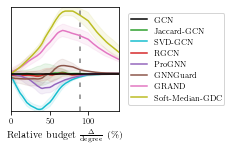

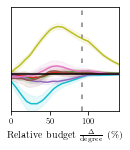

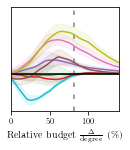

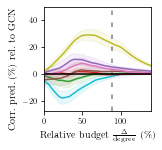

In [69]:
def conf(pois, cora):
    plt.xlim(0, 140)
    plt.ylim(-28, 50)
    plt.gca().yaxis.set_label_coords(-0.25, 0.4)
    return pois and cora, not pois and not cora

unproj_slugs = ["gcn_2", "jaccard_gcn_tuned", "svd_gcn_rank50_tuned", "rgcn_tuned", "pro_gnn_tuned", "gnn_guard_faith_refimpl", "grand_tuned", "soft_median_gdc_tuned"]
colors = ["black", "C2", "C9", "C3", "C4", "C5", "C6", "C8"]
plot_curves(
    local_breakage_envelope_curves, unproj_slugs, colors, conf, relative=True, is_global=False,
    new_plot=lambda: plt.figure(figsize=figsize(scale=0.35, ratio_yx=1)), file_prefix="local_breakage_envelope_curves"
)

## Cross-Model RAUC Matrices

In [19]:
matrix_slugs, matrices = ['gcn_1', 'gcn_2', 'gnn_guard_faith_paper', 'gnn_guard_faith_refimpl', 'grand_tuned', 'jaccard_gcn_faith', 'jaccard_gcn_tuned', 'pro_gnn_faith', 'pro_gnn_tuned', 'rgcn_faith', 'rgcn_tuned', 'soft_median_gdc_faith', 'svd_gcn_rank10_faith', 'svd_gcn_rank10_tuned', 'svd_gcn_rank50_faith', 'svd_gcn_rank50_tuned'], {"evasion": np.array([[0.18786, 0.2352, 0.30509, 0.35241, 0.36263, 0.23412, 0.26992, 0.20029, 0.22866, 0.27183, 0.26856, 0.29977, 0.51588, 0.51018, 0.50689, 0.49933], [0.25485, 0.20966, 0.34055, 0.38085, 0.3685, 0.29353, 0.2585, 0.256, 0.2827, 0.2992, 0.26416, 0.29403, 0.53313, 0.52277, 0.51885, 0.5132], [0.36837, 0.38194, 0.18248, 0.23932, 0.44664, 0.3082, 0.31881, 0.36537, 0.37415, 0.39963, 0.3967, 0.38704, 0.50606, 0.50193, 0.50512, 0.50004], [0.37529, 0.38767, 0.21224, 0.1498, 0.4385, 0.35556, 0.3645, 0.37525, 0.38403, 0.40201, 0.39798, 0.38727, 0.48919, 0.48746, 0.48739, 0.48725], [0.3782, 0.35818, 0.42427, 0.45367, 0.22736, 0.41327, 0.39234, 0.38037, 0.39789, 0.37695, 0.33072, 0.36621, 0.56088, 0.53326, 0.55404, 0.52901], [0.28214, 0.30389, 0.25035, 0.29637, 0.40657, 0.1524, 0.18895, 0.28316, 0.30123, 0.33547, 0.3282, 0.3362, 0.48577, 0.48001, 0.48301, 0.47544], [0.34243, 0.31201, 0.29346, 0.33694, 0.42793, 0.22669, 0.1796, 0.34159, 0.35639, 0.36851, 0.34424, 0.34805, 0.51065, 0.50203, 0.50782, 0.4998], [0.21242, 0.2506, 0.32531, 0.37243, 0.37133, 0.25144, 0.28384, 0.20627, 0.23541, 0.28877, 0.28158, 0.30888, 0.52884, 0.52446, 0.51986, 0.51453], [0.23495, 0.26604, 0.33365, 0.37502, 0.36829, 0.26123, 0.28582, 0.22899, 0.21201, 0.30395, 0.28645, 0.3155, 0.53203, 0.52968, 0.52919, 0.52226], [0.25895, 0.26383, 0.32129, 0.36125, 0.33655, 0.28913, 0.28711, 0.26326, 0.28799, 0.17976, 0.27139, 0.30733, 0.49904, 0.4943, 0.48735, 0.48517], [0.30742, 0.28027, 0.37339, 0.40565, 0.33949, 0.32967, 0.30008, 0.30363, 0.3209, 0.32822, 0.2235, 0.3303, 0.53089, 0.5377, 0.53667, 0.5269], [0.42684, 0.40263, 0.4555, 0.47296, 0.44395, 0.44132, 0.41513, 0.42048, 0.42416, 0.44119, 0.41526, 0.28968, 0.55603, 0.55343, 0.55596, 0.55142], [0.10525, 0.10811, 0.083077, 0.082972, 0.093338, 0.10008, 0.09965, 0.10647, 0.10124, 0.1097, 0.11172, 0.11809, 0.0063709, 0.0073422, 0.019999, 0.019139], [0.14595, 0.14743, 0.11931, 0.11672, 0.13843, 0.13838, 0.13888, 0.14653, 0.146, 0.15019, 0.14552, 0.15843, 0.010077, 0.0095645, 0.030917, 0.031031], [0.25771, 0.25287, 0.21232, 0.22839, 0.22772, 0.26161, 0.27357, 0.25948, 0.2568, 0.26821, 0.27297, 0.2643, 0.179, 0.10491, 0.021247, 0.013553], [0.28263, 0.2805, 0.23516, 0.25128, 0.24594, 0.29119, 0.29551, 0.28522, 0.29152, 0.28587, 0.29232, 0.28241, 0.21519, 0.11755, 0.023807, 0.016535]]), "poisoning": np.array([[0.088986, 0.11132, 0.14743, 0.19114, 0.095436, 0.10684, 0.12663, 0.090549, 0.081492, 0.095326, 0.099413, 0.08905, 0.49128, 0.48142, 0.49556, 0.49442], [0.11433, 0.1242, 0.17681, 0.21629, 0.11652, 0.13463, 0.14038, 0.11439, 0.099147, 0.12148, 0.11381, 0.10906, 0.51616, 0.50629, 0.51436, 0.5098], [0.20467, 0.22084, 0.10428, 0.13883, 0.16025, 0.11892, 0.13519, 0.13639, 0.13134, 0.20863, 0.19118, 0.14284, 0.48099, 0.4725, 0.48249, 0.4902], [0.24659, 0.25621, 0.11741, 0.098713, 0.1809, 0.20859, 0.22135, 0.15523, 0.14907, 0.24377, 0.20377, 0.18158, 0.46521, 0.46023, 0.47151, 0.47604], [0.15336, 0.1633, 0.20462, 0.28412, 0.12648, 0.17787, 0.18021, 0.14759, 0.13386, 0.1499, 0.12761, 0.13576, 0.53098, 0.51189, 0.53351, 0.53175], [0.15341, 0.16764, 0.10845, 0.13437, 0.13313, 0.070518, 0.086807, 0.1149, 0.10956, 0.15861, 0.14492, 0.12834, 0.45836, 0.45822, 0.46492, 0.46559], [0.20056, 0.2031, 0.13839, 0.18067, 0.17494, 0.089691, 0.095055, 0.14963, 0.13866, 0.2034, 0.18167, 0.16762, 0.4922, 0.48712, 0.49613, 0.48902], [0.09487, 0.11664, 0.15472, 0.20897, 0.099803, 0.11467, 0.1331, 0.095277, 0.085701, 0.10227, 0.10578, 0.094087, 0.50921, 0.49917, 0.50892, 0.50751], [0.12409, 0.14226, 0.1935, 0.25271, 0.12069, 0.14937, 0.16748, 0.11751, 0.1039, 0.12829, 0.12344, 0.11134, 0.52672, 0.51697, 0.5272, 0.52626], [0.085209, 0.10464, 0.12896, 0.17353, 0.08601, 0.10086, 0.11417, 0.085286, 0.076701, 0.086482, 0.096366, 0.08144, 0.46674, 0.45671, 0.4664, 0.46745], [0.14231, 0.14976, 0.21273, 0.23295, 0.13417, 0.1705, 0.17401, 0.14231, 0.1234, 0.14332, 0.10783, 0.13011, 0.52741, 0.50299, 0.52872, 0.52728], [0.15697, 0.1818, 0.26719, 0.32145, 0.14413, 0.19324, 0.22568, 0.15325, 0.12225, 0.1602, 0.15302, 0.11625, 0.54408, 0.5427, 0.55498, 0.55062], [0.064816, 0.077614, 0.071154, 0.11529, 0.072757, 0.068224, 0.074468, 0.065691, 0.069139, 0.067265, 0.080391, 0.07726, 0.0051061, 0.0057406, 0.021648, 0.027002], [0.091608, 0.10131, 0.078579, 0.1443, 0.094505, 0.092718, 0.094849, 0.086108, 0.086183, 0.090769, 0.10191, 0.10713, 0.0087857, 0.0066627, 0.025916, 0.037709], [0.13941, 0.14391, 0.13541, 0.28033, 0.15407, 0.13598, 0.16169, 0.13917, 0.13224, 0.13384, 0.1616, 0.14241, 0.12707, 0.12789, 0.031435, 0.031747], [0.15371, 0.15132, 0.14839, 0.28888, 0.16383, 0.14466, 0.17259, 0.1461, 0.1393, 0.1445, 0.17123, 0.15275, 0.14849, 0.14503, 0.024643, 0.017616]])}

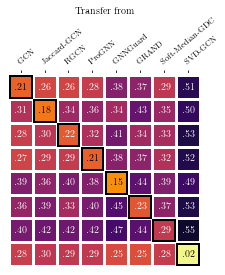

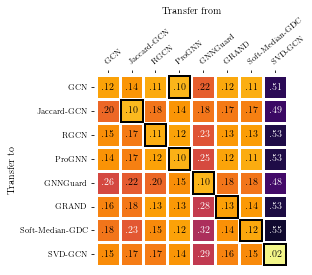

In [20]:
unproj_slugs = ["gcn_2", "jaccard_gcn_tuned", "rgcn_tuned", "pro_gnn_tuned", "gnn_guard_faith_refimpl", "grand_tuned", "soft_median_gdc_tuned", "svd_gcn_rank50_tuned"]
slugs = gb.ana.project_model_slugs(unproj_slugs, "cora")
for plt_idx, (scenario, matrix) in enumerate(matrices.items()):
    ind = [matrix_slugs.index(slug) for slug in slugs]
    labels = [gb.ana.model_label(slug).split(" ")[0] for slug in slugs]
    plt.figure(figsize=figsize(scale=0.65, ratio_yx=1))
    gb.ana.plot_matrix(
        matrix[ind, :][:, ind], labels, labels,
        highlight="lowest", highlight_color="black", omit_leading_zero=True, trailing_zeros=True, text_len=3, cbar=False,
        cmap="inferno_r", norm=plt.Normalize(vmin=0, vmax=0.6),
        xlabel="Transfer from", ylabel="Transfer to", ax=plt.gca()
    )
    if plt_idx == 0:
        plt.yticks([])
        plt.ylabel(None)
    plt.savefig(f"{plots_path}/cross_model_rauc_matrix_{scenario}.pdf", bbox_inches="tight", pad_inches=0.01)

## CleanAcc Robustness Tradeoff

In [21]:
cleanacc_robustness_tradeoff = {('global', 'evasion', 'citeseer'): {'gcn_1': (0.7368483424186707, 0.01970710283508251), 'gcn_2': (0.7471563935279846, 0.029863154313731672), 'gnn_guard_faith_paper': (0.7353080630302429, 0.020757255886760518), 'gnn_guard_faith_refimpl': (0.7266587734222412, 0.01404520518022356), 'grand_tuned': (0.754146933555603, 0.05467159203823777), 'jaccard_gcn_faith': (0.7369668245315552, 0.021069248901628708), 'jaccard_gcn_tuned': (0.7482227563858033, 0.030060569544096027), 'pro_gnn_faith': (0.7382701516151429, 0.021182551665909648), 'pro_gnn_tuned': (0.7406398057937622, 0.024619671597374507), 'rgcn_faith': (0.7280805706977844, 0.010321066515129419), 'rgcn_tuned': (0.743127965927124, 0.026713951705517887), 'soft_median_gdc_faith': (0.7452606678009033, 0.03310260546907393), 'soft_median_gdc_tuned': (0.7413507103919983, 0.04014737466489484), 'svd_gcn_rank10_faith': (0.6542654037475586, 0.0001389661260880151), 'svd_gcn_rank10_tuned': (0.6972748875617981, 0.001807620814759503), 'svd_gcn_rank50_faith': (0.6811611413955688, 0.000888521606049742), 'svd_gcn_rank50_tuned': (0.7030805826187134, 0.0031457618199154337)}, ('global', 'evasion', 'cora'): {'gcn_1': (0.8447686076164246, 0.18710183102201722), 'gcn_2': (0.8481891274452209, 0.20966778135890346), 'gnn_guard_faith_paper': (0.8355130791664124, 0.18248027989511098), 'gnn_guard_faith_refimpl': (0.8258551239967347, 0.14980133867569118), 'grand_tuned': (0.8605633735656738, 0.22736262363017556), 'jaccard_gcn_faith': (0.830181086063385, 0.15237530160821167), 'jaccard_gcn_tuned': (0.8385311961174011, 0.17959487125799806), 'pro_gnn_faith': (0.8485915541648865, 0.2037924184097298), 'pro_gnn_tuned': (0.8530180931091309, 0.21179683843650055), 'rgcn_faith': (0.8373239517211915, 0.17976536940566282), 'rgcn_tuned': (0.8529175043106079, 0.2226942564109879), 'soft_median_gdc_faith': (0.8527162909507752, 0.289706098502862), 'svd_gcn_rank10_faith': (0.7054325938224792, 0.005769443678737926), 'svd_gcn_rank10_tuned': (0.7178068399429322, 0.008732628119625444), 'svd_gcn_rank50_faith': (0.7806841015815735, 0.010612766579618868), 'svd_gcn_rank50_tuned': (0.7866197109222413, 0.013322088119665388)}, ('global', 'poisoning', 'citeseer'): {'gcn_1': (0.7368483424186707, 0.008237865116966118), 'gcn_2': (0.7471563935279846, 0.01651277935169706), 'gnn_guard_faith_paper': (0.7353080630302429, 0.00950019568626592), 'gnn_guard_faith_refimpl': (0.7266587734222412, 0.00776782395160983), 'grand_tuned': (0.754146933555603, 0.029823574882445268), 'jaccard_gcn_faith': (0.7369668245315552, 0.009112938807445799), 'jaccard_gcn_tuned': (0.7482227563858033, 0.017713901135184833), 'pro_gnn_faith': (0.7382701516151429, 0.008630100439247623), 'pro_gnn_tuned': (0.7406398057937622, 0.012088744817215485), 'rgcn_faith': (0.7280805706977844, 0.007148777017459608), 'rgcn_tuned': (0.743127965927124, 0.011307290448219338), 'soft_median_gdc_faith': (0.7452606678009033, 0.013652420223917563), 'soft_median_gdc_tuned': (0.7413507103919983, 0.014369633331129783), 'svd_gcn_rank10_faith': (0.6542654037475586, 0.00020061438266278774), 'svd_gcn_rank10_tuned': (0.6972748875617981, 0.0009297032849720189), 'svd_gcn_rank50_faith': (0.6811611413955688, 0.000695603197055255), 'svd_gcn_rank50_tuned': (0.7030805826187134, 0.0014356520836733202)}, ('global', 'poisoning', 'cora'): {'gcn_1': (0.8447686076164246, 0.07927132179022955), 'gcn_2': (0.8481891274452209, 0.0948049432445536), 'gnn_guard_faith_paper': (0.8355130791664124, 0.10019446597970012), 'gnn_guard_faith_refimpl': (0.8258551239967347, 0.09630911433062121), 'grand_tuned': (0.8605633735656738, 0.11535326892008294), 'jaccard_gcn_faith': (0.830181086063385, 0.07022155157632418), 'jaccard_gcn_tuned': (0.8385311961174011, 0.08653167248049978), 'pro_gnn_faith': (0.8485915541648865, 0.08380492747683792), 'pro_gnn_tuned': (0.8530180931091309, 0.10102992117184366), 'rgcn_faith': (0.8373239517211915, 0.07330782211683404), 'rgcn_tuned': (0.8529175043106079, 0.10358273089673824), 'soft_median_gdc_faith': (0.8527162909507752, 0.11345608096173346), 'svd_gcn_rank10_faith': (0.7054325938224792, 0.004832989851745376), 'svd_gcn_rank10_tuned': (0.7178068399429322, 0.006674315530525557), 'svd_gcn_rank50_faith': (0.7806841015815735, 0.025564473187918484), 'svd_gcn_rank50_tuned': (0.7866197109222413, 0.017296742012657806)}, ('local', 'evasion', 'citeseer'): {'gcn_1': (0.7368483424186707, 0.18100814428814443), 'gcn_2': (0.7471563935279846, 0.18927519813985336), 'gnn_guard_faith_paper': (0.7353080630302429, 0.25174761849924804), 'gnn_guard_faith_paper_prune': (0.7380331754684448, 0.459129615152755), 'gnn_guard_faith_refimpl': (0.7266587734222412, 0.1929904962663691), 'gnn_guard_faith_refimpl_prune': (0.7312796354293823, 0.6224226129655108), 'grand_tuned': (0.7565165877342224, 0.3428976299216947), 'jaccard_gcn_faith': (0.7369668245315552, 0.18118129817231152), 'jaccard_gcn_tuned': (0.7482227563858033, 0.18851763928536908), 'pro_gnn_faith': (0.7382701396942138, 0.18435515173465217), 'pro_gnn_tuned': (0.7407582879066468, 0.16521854195968516), 'rgcn_faith': (0.7280805706977844, 0.1389590588452923), 'rgcn_tuned': (0.7440758228302002, 0.18456257861443676), 'soft_median_gdc_faith': (0.7452606678009033, 0.33907803580282636), 'soft_median_gdc_tuned': (0.7413507103919983, 0.4126467777657835), 'svd_gcn_rank10_faith': (0.6542654037475586, 0.10078798082455309), 'svd_gcn_rank10_tuned': (0.6972748875617981, 0.10946201287633724), 'svd_gcn_rank50_faith': (0.6811611413955688, 0.11253361380148297), 'svd_gcn_rank50_tuned': (0.7030805826187134, 0.12001264364878612)}, ('local', 'evasion', 'cora'): {'gcn_1': (0.8447686076164246, 0.17616073348755343), 'gcn_2': (0.8481891274452209, 0.1834229385495097), 'gnn_guard_faith_paper': (0.8355130791664124, 0.22694043198188485), 'gnn_guard_faith_paper_prune': (0.8393360257148743, 0.4435332901861771), 'gnn_guard_faith_refimpl': (0.8258551239967347, 0.17944488308261614), 'gnn_guard_faith_refimpl_prune': (0.8313883185386658, 0.5602234064477616), 'grand_tuned': (0.8515090465545654, 0.19261300655206354), 'jaccard_gcn_faith': (0.830181086063385, 0.17934594461021935), 'jaccard_gcn_tuned': (0.8385311961174011, 0.18224111258498038), 'pro_gnn_faith': (0.8485915541648865, 0.1862073967726205), 'pro_gnn_tuned': (0.8530180931091309, 0.16210689155893446), 'rgcn_faith': (0.8373239517211915, 0.17557654698576783), 'rgcn_tuned': (0.8551307797431946, 0.18097894648766863), 'soft_median_gdc_faith': (0.8524144887924194, 0.3378332086116697), 'svd_gcn_rank10_faith': (0.7054325938224792, 0.08470968427055428), 'svd_gcn_rank10_tuned': (0.717907440662384, 0.08691095619317579), 'svd_gcn_rank50_faith': (0.7808853268623352, 0.11992565420986138), 'svd_gcn_rank50_tuned': (0.786820912361145, 0.12136602787553666)}, ('local', 'poisoning', 'citeseer'): {'gcn_1': (0.7368483424186707, 0.16073719855213103), 'gcn_2': (0.7471563935279846, 0.16530180097054425), 'gnn_guard_faith_paper': (0.7353080630302429, 0.24430686270705956), 'gnn_guard_faith_paper_prune': (0.7380331754684448, 0.3924772982009067), 'gnn_guard_faith_refimpl': (0.7266587734222412, 0.19088862608707874), 'gnn_guard_faith_refimpl_prune': (0.7312796354293823, 0.5326290973804056), 'grand_tuned': (0.7565165877342224, 0.27531607596423874), 'jaccard_gcn_faith': (0.7369668245315552, 0.1604678798639628), 'jaccard_gcn_tuned': (0.7482227563858033, 0.16275165921396964), 'pro_gnn_faith': (0.7382701396942138, 0.15944659320642218), 'pro_gnn_tuned': (0.7407582879066468, 0.20590165554811338), 'rgcn_faith': (0.7280805706977844, 0.12118312186737026), 'rgcn_tuned': (0.7440758228302002, 0.15606840719522805), 'soft_median_gdc_faith': (0.7452606678009033, 0.2649121430368949), 'soft_median_gdc_tuned': (0.7413507103919983, 0.3082940130483521), 'svd_gcn_rank10_faith': (0.6542654037475586, 0.1098358550976501), 'svd_gcn_rank10_tuned': (0.6972748875617981, 0.10553356843150433), 'svd_gcn_rank50_faith': (0.6811611413955688, 0.12633275707987351), 'svd_gcn_rank50_tuned': (0.7030805826187134, 0.11801156664645611)}, ('local', 'poisoning', 'cora'): {'gcn_1': (0.8447686076164246, 0.16944937032343335), 'gcn_2': (0.8481891274452209, 0.1703045082032507), 'gnn_guard_faith_paper': (0.8355130791664124, 0.2124933544989691), 'gnn_guard_faith_paper_prune': (0.8393360257148743, 0.3990116536361846), 'gnn_guard_faith_refimpl': (0.8258551239967347, 0.17409400811680625), 'gnn_guard_faith_refimpl_prune': (0.8313883185386658, 0.5170368572820052), 'grand_tuned': (0.8515090465545654, 0.19212053538627286), 'jaccard_gcn_faith': (0.830181086063385, 0.16171263875937603), 'jaccard_gcn_tuned': (0.8385311961174011, 0.1592232178295642), 'pro_gnn_faith': (0.8485915541648865, 0.1719263571111881), 'pro_gnn_tuned': (0.8530180931091309, 0.21157466946108588), 'rgcn_faith': (0.8373239517211915, 0.13234694225251817), 'rgcn_tuned': (0.8551307797431946, 0.1709083393893408), 'soft_median_gdc_faith': (0.8524144887924194, 0.3041674464117698), 'svd_gcn_rank10_faith': (0.7054325938224792, 0.08936891341002343), 'svd_gcn_rank10_tuned': (0.717907440662384, 0.0907736881568151), 'svd_gcn_rank50_faith': (0.7808853268623352, 0.1212924467913957), 'svd_gcn_rank50_tuned': (0.786820912361145, 0.12472380141453412)}}

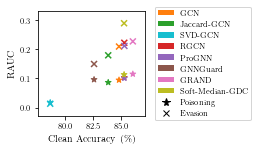

In [22]:
plt.figure(figsize=figsize(scale=0.35, ratio_yx=1))
unproj_slugs = ["gcn_2", "jaccard_gcn_tuned", "svd_gcn_rank50_tuned", "rgcn_tuned", "pro_gnn_tuned", "gnn_guard_faith_refimpl", "grand_tuned", "soft_median_gdc_tuned"]
slugs = gb.ana.project_model_slugs(unproj_slugs, "cora")
colors = ["C1", "C2", "C9", "C3", "C4", "C5", "C6", "C8"]
for scenario in ["evasion", "poisoning"]:
    xs, ys = zip(*(cleanacc_robustness_tradeoff["global", scenario, "cora"][slug] for slug in slugs))
    plt.scatter(100 * np.array(xs), ys, c=colors, marker="x" if scenario == "evasion" else "*")
plt.xlabel("Clean Accuracy (\%)")
plt.ylabel("RAUC")
plt.margins(0.15)

handles = [Patch(facecolor=color, label=gb.ana.model_label(slug).split(" ")[0]) for slug, color in zip(slugs, colors)]
handles.append(Line2D([0], [0], marker="*", label="Poisoning", color="none", markerfacecolor="black", markersize=8))
handles.append(Line2D([0], [0], marker="x", label="Evasion", color="none", markerfacecolor="black", markersize=6))
plt.legend(handles=handles, loc="center left", bbox_to_anchor=(1.05, 0.5))

plt.savefig(f"{plots_path}/cleanacc_robustness_tradeoff_global_cora.pdf", bbox_inches="tight", pad_inches=0.01)

## Envelope & RAUC

In [23]:
attribution, per_attack_curves, envelope_curve = {'pgd_edges': 1, 'greedy_meta_edges': 11, 'pgd_meta_edges': 74}, {'pgd_edges': gb.ana.Curve(np.array([0, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.014401, 0.014599, 0.014796, 0.014993, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.03551, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.056816, 0.058197, 0.058394, 0.058591, 0.058789, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.079897, 0.080095, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.095088, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1018, 0.10199, 0.10258, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10909, 0.10969, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11501, 0.11679, 0.11699, 0.11718, 0.11758, 0.11777, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12507, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.13218, 0.13237, 0.13277, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13849, 0.13948, 0.13967, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14618, 0.14638, 0.14737, 0.14756, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.1499, 0.17214, 0.17277, 0.17341, 0.17404, 0.18628, 0.18673, 0.18718, 0.18763, 0.1994, 0.19984, 0.20027, 0.2007, 0.20087, 0.20104, 0.21473, 0.21526, 0.21579, 0.21605, 0.2163, 0.22334, 0.22384, 0.22409, 0.22435, 0.2246, 0.22485, 0.22505, 0.22524, 0.22544, 0.22563, 0.23432, 0.23487, 0.23541, 0.23568, 0.23594, 0.23621, 0.23647, 0.24707, 0.24763, 0.24819, 0.24875, 0.24932, 0.24988, 0.25044, 0.25101, 0.25392, 0.25573, 0.25598, 0.25624, 0.2565, 0.25702, 0.25727, 0.25753, 0.25779, 0.25805, 0.26386, 0.26404, 0.26422, 0.26441, 0.26459, 0.26485, 0.26512, 0.27663, 0.27706, 0.27748, 0.2779, 0.27833, 0.27875, 0.27918, 0.27918, 0.27918, 0.2827, 0.283, 0.28421, 0.28451, 0.28481, 0.28511, 0.28541, 0.28571, 0.28619, 0.28667, 0.28714, 0.30049, 0.30096, 0.30144, 0.30192, 0.30239, 0.30287, 0.30335, 0.30382, 0.30386, 0.3039, 0.30393, 0.30489, 0.30507, 0.30511, 0.30515, 0.30518, 0.30522, 0.30526, 0.3053, 0.30533, 0.31561, 0.31608, 0.31748, 0.31841, 0.31847, 0.31853, 0.31859, 0.31865, 0.31871, 0.31877, 0.31883, 0.31889, 0.31895, 0.31901, 0.32027, 0.32045, 0.32063, 0.32069, 0.32075, 0.32081, 0.32087, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.32093, 0.33313, 0.33454, 0.33501, 0.33514, 0.33528, 0.33541, 0.33555, 0.33568, 0.33581, 0.33595, 0.33608, 0.3393, 0.33944, 0.3397, 0.34011, 0.34024, 0.34038, 0.34051, 0.34064, 0.34078, 0.34091, 0.34105, 0.34132, 0.34622, 0.34759, 0.34775, 0.34841, 0.34857, 0.34874, 0.3489, 0.34907, 0.34923, 0.34939, 0.34956, 0.34972, 0.34989, 0.35005, 0.35318, 0.35334, 0.35416, 0.35433, 0.35466, 0.35482, 0.35499, 0.35515, 0.35531, 0.35564, 0.35581, 0.35597, 0.35614, 0.35614], [0.14839, 0.16885, 0.16944, 0.17002, 0.17058, 0.19014, 0.19042, 0.1907, 0.19097, 0.20015, 0.20043, 0.20078, 0.20126, 0.20174, 0.20221, 0.21087, 0.21132, 0.21177, 0.21212, 0.21246, 0.22215, 0.22284, 0.22304, 0.22325, 0.22345, 0.22366, 0.22387, 0.22407, 0.22428, 0.22448, 0.23261, 0.23299, 0.23337, 0.23376, 0.23414, 0.23453, 0.23491, 0.24503, 0.24551, 0.246, 0.24649, 0.24698, 0.24727, 0.24755, 0.24783, 0.25408, 0.25606, 0.25635, 0.25663, 0.25691, 0.25748, 0.25776, 0.25805, 0.25829, 0.25852, 0.26615, 0.26639, 0.26663, 0.26686, 0.2671, 0.26741, 0.26772, 0.27704, 0.27736, 0.27767, 0.27814, 0.27862, 0.2791, 0.27958, 0.28006, 0.28054, 0.2925, 0.29298, 0.29489, 0.29537, 0.29585, 0.29633, 0.29681, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29758, 0.29788, 0.29825, 0.30782, 0.30966, 0.31003, 0.3104, 0.31077, 0.31114, 0.3115, 0.31187, 0.31187, 0.31187, 0.31187, 0.31253, 0.31296, 0.31318, 0.3134, 0.31362, 0.31384, 0.31406, 0.31428, 0.3145, 0.31471, 0.31493, 0.31515, 0.31974, 0.3204, 0.32106, 0.32128, 0.32149, 0.32171, 0.32193, 0.32218, 0.32243, 0.32269, 0.32294, 0.32319, 0.32344, 0.32369, 0.32696, 0.32923, 0.32948, 0.32973, 0.33023, 0.33048, 0.33099, 0.33124, 0.33149, 0.33174, 0.33199, 0.33224, 0.33249, 0.33287, 0.33324, 0.33362, 0.34334, 0.34446, 0.34484, 0.34521, 0.34559, 0.34596, 0.34633, 0.34671, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34708, 0.34766, 0.35815, 0.36106, 0.36167, 0.36181, 0.36184, 0.36188, 0.36191, 0.36194, 0.36198, 0.36201, 0.36205, 0.36208, 0.36212, 0.36215, 0.3628, 0.36284, 0.36301, 0.36304, 0.36311, 0.36314, 0.36318, 0.36318, 0.36318, 0.36318, 0.36318, 0.36318, 0.36318, 0.36318], [0.16046, 0.17575, 0.17619, 0.17663, 0.17706, 0.1932, 0.19366, 0.19401, 0.19436, 0.20585, 0.20629, 0.20677, 0.20724, 0.20731, 0.20771, 0.22346, 0.22392, 0.22439, 0.22485, 0.22509, 0.23174, 0.23221, 0.23245, 0.23269, 0.23293, 0.23316, 0.2334, 0.23383, 0.23426, 0.23469, 0.24843, 0.24886, 0.24929, 0.24972, 0.25015, 0.25058, 0.25101, 0.26028, 0.26058, 0.26088, 0.26118, 0.26147, 0.26177, 0.26207, 0.26207, 0.26207, 0.26207, 0.26207, 0.26207, 0.26207, 0.26207, 0.26207, 0.26207, 0.26207, 0.26207, 0.27155, 0.27207, 0.27258, 0.2731, 0.27362, 0.27413, 0.27465, 0.27902, 0.27916, 0.27931, 0.27945, 0.2796, 0.27974, 0.27989, 0.28004, 0.28018, 0.28961, 0.28999, 0.2915, 0.29188, 0.29225, 0.29263, 0.29301, 0.29339, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.29376, 0.30261, 0.30431, 0.30465, 0.30499, 0.30533, 0.30539, 0.30546, 0.30552, 0.30558, 0.30697, 0.30703, 0.30722, 0.30734, 0.30741, 0.30747, 0.30753, 0.3076, 0.30766, 0.30772, 0.30778, 0.30785, 0.30814, 0.30843, 0.31452, 0.31539, 0.31589, 0.31605, 0.31621, 0.31638, 0.31654, 0.31671, 0.31687, 0.31703, 0.3172, 0.31736, 0.31753, 0.31769, 0.31983, 0.32131, 0.32147, 0.32163, 0.32196, 0.32213, 0.32246, 0.32262, 0.32278, 0.32295, 0.32311, 0.32328, 0.32344, 0.32374, 0.32404, 0.32435, 0.33219, 0.3331, 0.3334, 0.3337, 0.334, 0.33431, 0.33461, 0.33491, 0.33521, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33551, 0.33589, 0.34277, 0.34468, 0.34511, 0.34685, 0.34729, 0.34772, 0.34816, 0.34859, 0.34875, 0.3489, 0.34905, 0.34921, 0.34936, 0.34951, 0.35243, 0.35259, 0.35336, 0.35351, 0.35382, 0.35397, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412], [0.1504, 0.17125, 0.17185, 0.17244, 0.17304, 0.20343, 0.20433, 0.20523, 0.20523, 0.20523, 0.20523, 0.20523, 0.20523, 0.20523, 0.20523, 0.21836, 0.21874, 0.21913, 0.21973, 0.22032, 0.23292, 0.23382, 0.23427, 0.23472, 0.23517, 0.23562, 0.23607, 0.23652, 0.23697, 0.23742, 0.24145, 0.24183, 0.2422, 0.24258, 0.24296, 0.24334, 0.24371, 0.25541, 0.25578, 0.25616, 0.25654, 0.25692, 0.25729, 0.25767, 0.25805, 0.25878, 0.2611, 0.26143, 0.26177, 0.2621, 0.26276, 0.26309, 0.26342, 0.26375, 0.26408, 0.27113, 0.27157, 0.27202, 0.27247, 0.27292, 0.27336, 0.27381, 0.28722, 0.28722, 0.28722, 0.28722, 0.28722, 0.28722, 0.28722, 0.28722, 0.28722, 0.28988, 0.29046, 0.29276, 0.29276, 0.29276, 0.29276, 0.29276, 0.29276, 0.29276, 0.29276, 0.29276, 0.30064, 0.30112, 0.3016, 0.30208, 0.30256, 0.30303, 0.30399, 0.30494, 0.30589, 0.30684, 0.30751, 0.32495, 0.3283, 0.32897, 0.32964, 0.33032, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.33099, 0.3312, 0.33152, 0.33185, 0.33217, 0.33249, 0.33249, 0.34507, 0.34658, 0.34708, 0.34759, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34809, 0.34821, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.35815, 0.37148, 0.37223, 0.37601, 0.37676, 0.37827, 0.37902, 0.37978, 0.38053, 0.38129, 0.3828, 0.3828, 0.3828, 0.3828, 0.3828], [0.14688, 0.1668, 0.16737, 0.16794, 0.16851, 0.18426, 0.18471, 0.18516, 0.18561, 0.20372, 0.20398, 0.20424, 0.2045, 0.20475, 0.20501, 0.21545, 0.21591, 0.21638, 0.21684, 0.2173, 0.22474, 0.22527, 0.22553, 0.2258, 0.22606, 0.22633, 0.2266, 0.22686, 0.22717, 0.22748, 0.23731, 0.23762, 0.23793, 0.23811, 0.2383, 0.23848, 0.23867, 0.24698, 0.24719, 0.2474, 0.24761, 0.24782, 0.24802, 0.24823, 0.24844, 0.25956, 0.25959, 0.26004, 0.26048, 0.26092, 0.26181, 0.26225, 0.2627, 0.26314, 0.26358, 0.27078, 0.27101, 0.27123, 0.27146, 0.27168, 0.27191, 0.27213, 0.28823, 0.28823, 0.28823, 0.28823, 0.28823, 0.28823, 0.28834, 0.28879, 0.28924, 0.2899, 0.28992, 0.29003, 0.29006, 0.29008, 0.29011, 0.29014, 0.29016, 0.29019, 0.29021, 0.29024, 0.30006, 0.30041, 0.30076, 0.30111, 0.30146, 0.30181, 0.30201, 0.30221, 0.30241, 0.30261, 0.30281, 0.30798, 0.30897, 0.30917, 0.30937, 0.30957, 0.30977, 0.30996, 0.31016, 0.31036, 0.3238, 0.32441, 0.32624, 0.32746, 0.32754, 0.32762, 0.3277, 0.32778, 0.32786, 0.32793, 0.32801, 0.32809, 0.32817, 0.32825, 0.32989, 0.33013, 0.33036, 0.33044, 0.33052, 0.33059, 0.33067, 0.33075, 0.33083, 0.33091, 0.33099, 0.33111, 0.33123, 0.33135, 0.33295, 0.33405, 0.33418, 0.3343, 0.33454, 0.33467, 0.33491, 0.33503, 0.33516, 0.33528, 0.3354, 0.33553, 0.33565, 0.33577, 0.33589, 0.33602, 0.34162, 0.34227, 0.34248, 0.3427, 0.34291, 0.34313, 0.34335, 0.34356, 0.34385, 0.34414, 0.34444, 0.35142, 0.35172, 0.3523, 0.35317, 0.35346, 0.35375, 0.35405, 0.35434, 0.35463, 0.35497, 0.35532, 0.35566, 0.36187, 0.3636, 0.36394, 0.36532, 0.36567, 0.36601, 0.36636, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667, 0.3667]])), 'greedy_meta_edges': gb.ana.Curve(np.array([0, 0.0074965, 0.014993, 0.02249, 0.029986, 0.037483, 0.044979, 0.052476, 0.059972, 0.067469, 0.074965, 0.082462, 0.089959, 0.097455, 0.10495, 0.11245, 0.11994, 0.12744, 0.13494, 0.14243, 0.14993]), np.array([[0.1499, 0.18159, 0.20976, 0.2339, 0.25402, 0.27213, 0.27817, 0.28219, 0.30131, 0.31237, 0.32042, 0.32042, 0.32344, 0.3335, 0.34608, 0.35563, 0.37374, 0.37374, 0.37374, 0.37374, 0.3828], [0.14839, 0.17254, 0.1831, 0.20171, 0.2173, 0.24195, 0.24648, 0.2671, 0.27767, 0.28471, 0.29326, 0.30885, 0.32445, 0.33602, 0.35312, 0.36871, 0.37575, 0.37726, 0.3838, 0.39235, 0.39487], [0.16046, 0.2002, 0.20976, 0.23541, 0.25956, 0.27515, 0.2837, 0.2837, 0.2837, 0.28974, 0.29879, 0.30332, 0.31791, 0.32294, 0.33149, 0.33702, 0.33954, 0.34004, 0.34859, 0.3506, 0.35865], [0.1504, 0.18913, 0.19416, 0.21076, 0.22887, 0.24095, 0.25201, 0.26308, 0.26861, 0.28169, 0.28974, 0.2998, 0.2998, 0.30785, 0.31841, 0.33652, 0.3501, 0.36167, 0.36167, 0.36569, 0.39336], [0.14688, 0.18612, 0.21026, 0.2329, 0.25352, 0.2661, 0.27565, 0.27918, 0.29024, 0.30634, 0.31942, 0.34155, 0.35362, 0.36469, 0.36469, 0.36469, 0.36469, 0.36469, 0.37425, 0.3838, 0.39135]])), 'pgd_meta_edges': gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.007102, 0.0072993, 0.0074965, 0.01302, 0.013218, 0.014007, 0.014204, 0.014401, 0.014796, 0.014993, 0.019925, 0.020911, 0.021109, 0.021306, 0.021503, 0.022095, 0.022292, 0.026435, 0.028605, 0.029, 0.029197, 0.029394, 0.029592, 0.029986, 0.035115, 0.036102, 0.036299, 0.036496, 0.036891, 0.037285, 0.037483, 0.042415, 0.043007, 0.043401, 0.043598, 0.043796, 0.044387, 0.044585, 0.044979, 0.049319, 0.050503, 0.0507, 0.050898, 0.051095, 0.051489, 0.051687, 0.052081, 0.054449, 0.055632, 0.057605, 0.058197, 0.058394, 0.058591, 0.059381, 0.059578, 0.059775, 0.06451, 0.065299, 0.065891, 0.06668, 0.067074, 0.067272, 0.067469, 0.072006, 0.072401, 0.07319, 0.073387, 0.073979, 0.074176, 0.074768, 0.074965, 0.078714, 0.079503, 0.080489, 0.080884, 0.081081, 0.081278, 0.081673, 0.08187, 0.082067, 0.086605, 0.087394, 0.087986, 0.088972, 0.089564, 0.089761, 0.089959, 0.093904, 0.096469, 0.096666, 0.097258, 0.097455, 0.1018, 0.10219, 0.10318, 0.10337, 0.10357, 0.10416, 0.10456, 0.10495, 0.10712, 0.10791, 0.10831, 0.10969, 0.11146, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11718, 0.11738, 0.11837, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.12251, 0.12369, 0.12448, 0.12507, 0.12606, 0.12626, 0.12665, 0.12744, 0.12882, 0.13277, 0.13316, 0.13336, 0.13356, 0.13415, 0.13454, 0.13494, 0.13829, 0.13869, 0.13908, 0.13928, 0.13948, 0.13987, 0.14026, 0.14125, 0.14224, 0.14717, 0.14737, 0.14796, 0.14816, 0.14894, 0.14914, 0.14954, 0.14973]), np.array([[0.1499, 0.18379, 0.18485, 0.18802, 0.18908, 0.19014, 0.20322, 0.20375, 0.20589, 0.20643, 0.20697, 0.20804, 0.20857, 0.22285, 0.22582, 0.22641, 0.227, 0.2276, 0.22938, 0.2297, 0.23944, 0.2432, 0.24388, 0.24423, 0.24457, 0.24491, 0.24559, 0.25449, 0.2562, 0.25654, 0.25661, 0.25675, 0.25688, 0.25695, 0.27632, 0.27968, 0.28016, 0.28039, 0.28063, 0.28135, 0.28159, 0.28207, 0.28732, 0.28876, 0.289, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.2921, 0.2931, 0.29343, 0.29376, 0.29463, 0.29485, 0.29507, 0.30684, 0.31058, 0.31338, 0.31826, 0.3207, 0.32192, 0.32314, 0.35118, 0.35362, 0.35422, 0.35437, 0.35482, 0.35497, 0.35542, 0.35557, 0.35842, 0.35902, 0.35976, 0.36006, 0.36021, 0.36036, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.38231, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.4005, 0.40152, 0.40204, 0.40255, 0.40306, 0.40769, 0.42008, 0.42099, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42731, 0.42927, 0.43319, 0.44103, 0.45475, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49745, 0.50352, 0.52561, 0.5265, 0.52915, 0.53003, 0.53357, 0.53445, 0.53622, 0.53622], [0.14839, 0.17668, 0.17757, 0.1782, 0.17841, 0.17862, 0.19769, 0.1984, 0.20128, 0.202, 0.20272, 0.20354, 0.20396, 0.21432, 0.21639, 0.2168, 0.2171, 0.21739, 0.21827, 0.21857, 0.22475, 0.22799, 0.22858, 0.22887, 0.22985, 0.23083, 0.23279, 0.25824, 0.26313, 0.26411, 0.26509, 0.2661, 0.2671, 0.26761, 0.28018, 0.28169, 0.2827, 0.28304, 0.28338, 0.28441, 0.28475, 0.28544, 0.29299, 0.29504, 0.29539, 0.29573, 0.29607, 0.29676, 0.2971, 0.29779, 0.29896, 0.29954, 0.30051, 0.3008, 0.30102, 0.30124, 0.30213, 0.30235, 0.30257, 0.30785, 0.30944, 0.31064, 0.31223, 0.31303, 0.31343, 0.31383, 0.32299, 0.32379, 0.32539, 0.32578, 0.32698, 0.32738, 0.32998, 0.32998, 0.33761, 0.33942, 0.3417, 0.3426, 0.34306, 0.34382, 0.34536, 0.34612, 0.34689, 0.36451, 0.36757, 0.36987, 0.3737, 0.37599, 0.37676, 0.37713, 0.38462, 0.38948, 0.38985, 0.39097, 0.39135, 0.3955, 0.39588, 0.40091, 0.40191, 0.40292, 0.40594, 0.40795, 0.40996, 0.42103, 0.42505, 0.42706, 0.4341, 0.44316, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44674, 0.4497, 0.45405, 0.45492, 0.45666, 0.46014, 0.46622, 0.48362, 0.48536, 0.48623, 0.4871, 0.48971, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145], [0.16046, 0.19221, 0.1932, 0.19618, 0.19689, 0.1976, 0.22314, 0.2241, 0.22795, 0.22892, 0.22988, 0.23011, 0.23023, 0.2455, 0.2495, 0.24958, 0.24966, 0.24974, 0.24999, 0.25007, 0.25179, 0.25269, 0.25285, 0.25294, 0.25302, 0.25319, 0.25353, 0.258, 0.25886, 0.25903, 0.2592, 0.26144, 0.2639, 0.26512, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.30719, 0.31266, 0.31357, 0.31448, 0.31539, 0.31542, 0.31543, 0.31545, 0.31559, 0.31566, 0.31577, 0.3158, 0.31582, 0.31583, 0.31587, 0.31588, 0.3159, 0.32797, 0.32998, 0.33149, 0.3335, 0.33451, 0.33501, 0.33551, 0.35426, 0.35589, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.36444, 0.36788, 0.36885, 0.37177, 0.37274, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.39897, 0.40136, 0.40255, 0.40374, 0.40493, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.44408, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45331, 0.4548, 0.45629, 0.45704, 0.45778, 0.45927, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46244, 0.46328, 0.46496, 0.46579], [0.1504, 0.18406, 0.18511, 0.18596, 0.18625, 0.18653, 0.19447, 0.19476, 0.19718, 0.19794, 0.19869, 0.2002, 0.20096, 0.21982, 0.22359, 0.22435, 0.2251, 0.22586, 0.22648, 0.22669, 0.23107, 0.23336, 0.23378, 0.23399, 0.2342, 0.23441, 0.23587, 0.25483, 0.25848, 0.25921, 0.25993, 0.26139, 0.26285, 0.26358, 0.26967, 0.2704, 0.27088, 0.27113, 0.2718, 0.27383, 0.2745, 0.27585, 0.2907, 0.29474, 0.29542, 0.29609, 0.29677, 0.29812, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.30002, 0.30175, 0.30264, 0.30353, 0.32394, 0.32411, 0.32663, 0.32746, 0.32998, 0.33058, 0.33239, 0.333, 0.34447, 0.34688, 0.3499, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35394, 0.35735, 0.35992, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.37591, 0.37697, 0.37964, 0.38017, 0.38094, 0.38326, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38556, 0.38661, 0.38765, 0.39703, 0.41265, 0.4137, 0.41891, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.43101, 0.43191, 0.43236, 0.43281, 0.43604, 0.4382, 0.44036, 0.45868, 0.46084, 0.46299, 0.46407, 0.46515, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673], [0.14688, 0.17823, 0.17921, 0.18215, 0.18313, 0.1841, 0.21189, 0.21289, 0.21686, 0.21785, 0.21884, 0.22082, 0.2214, 0.23589, 0.23878, 0.23936, 0.23994, 0.24007, 0.24044, 0.24057, 0.24338, 0.24865, 0.24961, 0.25009, 0.25057, 0.25105, 0.25201, 0.27605, 0.28067, 0.28159, 0.28252, 0.28437, 0.28622, 0.28641, 0.2915, 0.29225, 0.29276, 0.29301, 0.29326, 0.29401, 0.29427, 0.29478, 0.3159, 0.32193, 0.32294, 0.32394, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32918, 0.33169, 0.33252, 0.33335, 0.33669, 0.33753, 0.33782, 0.34666, 0.34999, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412, 0.36469, 0.36599, 0.36859, 0.36924, 0.3712, 0.37185, 0.3738, 0.37445, 0.38682, 0.38942, 0.39268, 0.39398, 0.39463, 0.39528, 0.39659, 0.39724, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.40462, 0.409, 0.40996, 0.41159, 0.41213, 0.42407, 0.42516, 0.42787, 0.42841, 0.42896, 0.43058, 0.43083, 0.43107, 0.43242, 0.43291, 0.43315, 0.43401, 0.43511, 0.43651, 0.43721, 0.43791, 0.43861, 0.4449, 0.45539, 0.45609, 0.45959, 0.46168, 0.46238, 0.46308, 0.46378, 0.46409, 0.46844, 0.47031, 0.47155, 0.47248, 0.47404, 0.47435, 0.47435, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.48455, 0.48822, 0.49189, 0.49373, 0.49556, 0.49923, 0.5029, 0.51207, 0.51435, 0.52573, 0.52618, 0.52755, 0.528, 0.52982, 0.53028, 0.53119, 0.53119]]))}, gb.ana.Curve(np.array([0, 0.0063129, 0.0065102, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.01302, 0.013218, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.019925, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.026435, 0.028605, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.035115, 0.03551, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.042415, 0.043007, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.049319, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.054449, 0.055632, 0.056816, 0.057605, 0.058197, 0.058394, 0.058591, 0.058789, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.06451, 0.065299, 0.065891, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.072006, 0.072401, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.078714, 0.079503, 0.079897, 0.080095, 0.080489, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.086605, 0.087394, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.093904, 0.095088, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.1018, 0.10199, 0.10219, 0.10258, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10712, 0.10791, 0.10831, 0.10909, 0.10969, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11422, 0.11501, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12251, 0.12369, 0.12448, 0.12507, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12882, 0.13218, 0.13237, 0.13277, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13829, 0.13849, 0.13869, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14618, 0.14638, 0.14717, 0.14737, 0.14756, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.1499, 0.18379, 0.18485, 0.18696, 0.18802, 0.18908, 0.19014, 0.20322, 0.20375, 0.20605, 0.20679, 0.20753, 0.20828, 0.20902, 0.20976, 0.22564, 0.22882, 0.22946, 0.23009, 0.23073, 0.23136, 0.232, 0.23263, 0.23327, 0.2339, 0.24449, 0.25032, 0.25138, 0.25191, 0.25244, 0.25297, 0.25349, 0.25402, 0.26641, 0.26737, 0.26832, 0.2688, 0.26927, 0.26975, 0.27023, 0.2707, 0.27118, 0.27166, 0.27213, 0.27632, 0.27968, 0.28016, 0.28039, 0.28063, 0.28087, 0.28111, 0.28135, 0.28159, 0.28183, 0.28207, 0.28732, 0.28876, 0.289, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.28924, 0.28937, 0.29262, 0.2948, 0.29642, 0.29697, 0.29751, 0.29805, 0.29914, 0.29968, 0.30022, 0.30077, 0.30131, 0.30801, 0.31058, 0.31338, 0.31582, 0.31704, 0.31826, 0.31948, 0.3207, 0.32192, 0.32314, 0.35118, 0.35362, 0.35422, 0.35437, 0.35452, 0.35467, 0.35482, 0.35497, 0.35512, 0.35527, 0.35542, 0.35557, 0.35842, 0.35902, 0.35932, 0.35947, 0.35976, 0.36006, 0.36021, 0.36036, 0.36051, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.36066, 0.38231, 0.3888, 0.39421, 0.3953, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39638, 0.39742, 0.39793, 0.39844, 0.39896, 0.39947, 0.39998, 0.4005, 0.40101, 0.40152, 0.40204, 0.40255, 0.40306, 0.40769, 0.41005, 0.41826, 0.41917, 0.42008, 0.42099, 0.42191, 0.42282, 0.42464, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42555, 0.42595, 0.42731, 0.42927, 0.43123, 0.43319, 0.43515, 0.43711, 0.43907, 0.44103, 0.45475, 0.48808, 0.49004, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49396, 0.49502, 0.49623, 0.49745, 0.49866, 0.49988, 0.50109, 0.50231, 0.50352, 0.5044, 0.52119, 0.52208, 0.52561, 0.5265, 0.52738, 0.52915, 0.53003, 0.53092, 0.5318, 0.53268, 0.53357, 0.53445, 0.53533, 0.53622, 0.53622, 0.53622], [0.14839, 0.17668, 0.17757, 0.17799, 0.1782, 0.17841, 0.17862, 0.19769, 0.1984, 0.20128, 0.202, 0.20272, 0.20313, 0.20354, 0.20396, 0.21432, 0.21639, 0.2168, 0.2171, 0.21739, 0.21768, 0.21798, 0.21827, 0.21857, 0.21886, 0.22475, 0.22799, 0.22858, 0.22887, 0.22985, 0.23083, 0.23181, 0.23279, 0.25824, 0.2602, 0.26215, 0.26313, 0.26411, 0.26509, 0.26559, 0.2661, 0.2666, 0.2671, 0.26761, 0.28018, 0.28169, 0.2827, 0.28304, 0.28338, 0.28373, 0.28407, 0.28441, 0.28475, 0.2851, 0.28544, 0.29299, 0.29504, 0.29539, 0.29573, 0.29607, 0.29641, 0.29676, 0.2971, 0.29744, 0.29779, 0.29788, 0.29798, 0.29896, 0.29954, 0.30012, 0.30051, 0.3008, 0.30102, 0.30124, 0.30147, 0.30191, 0.30213, 0.30235, 0.30257, 0.30279, 0.30785, 0.30944, 0.31064, 0.31143, 0.31183, 0.31223, 0.31263, 0.31303, 0.31343, 0.31383, 0.32299, 0.32379, 0.32539, 0.32578, 0.32618, 0.32658, 0.32698, 0.32738, 0.32821, 0.3291, 0.32998, 0.32998, 0.33761, 0.33942, 0.34033, 0.34079, 0.3417, 0.3426, 0.34306, 0.34382, 0.34459, 0.34536, 0.34612, 0.34689, 0.34765, 0.34842, 0.36451, 0.36757, 0.36987, 0.37063, 0.3714, 0.37216, 0.37293, 0.3737, 0.37446, 0.37523, 0.37599, 0.37676, 0.37713, 0.38462, 0.38686, 0.38873, 0.3891, 0.38948, 0.38985, 0.39023, 0.3906, 0.39097, 0.39135, 0.3955, 0.39569, 0.39588, 0.39789, 0.3999, 0.40091, 0.40191, 0.40292, 0.40392, 0.40493, 0.40594, 0.40694, 0.40795, 0.40895, 0.40996, 0.42103, 0.42505, 0.42706, 0.43109, 0.4341, 0.43712, 0.43813, 0.43913, 0.44014, 0.44115, 0.44215, 0.44316, 0.44416, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44517, 0.44674, 0.4497, 0.45231, 0.45318, 0.45405, 0.45492, 0.45579, 0.45666, 0.45753, 0.4584, 0.45927, 0.46014, 0.46622, 0.48101, 0.48188, 0.48362, 0.48536, 0.48623, 0.4871, 0.48797, 0.48884, 0.48971, 0.49058, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145, 0.49145], [0.16046, 0.19385, 0.19491, 0.19702, 0.19808, 0.19914, 0.2002, 0.22314, 0.2241, 0.22795, 0.22892, 0.22988, 0.23, 0.23011, 0.23023, 0.2455, 0.2495, 0.24958, 0.24966, 0.24974, 0.24982, 0.24991, 0.24999, 0.25007, 0.25015, 0.25179, 0.25511, 0.25638, 0.25702, 0.25765, 0.25829, 0.25892, 0.25956, 0.27023, 0.27105, 0.27187, 0.27228, 0.27269, 0.2731, 0.27351, 0.27392, 0.27433, 0.27474, 0.27515, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.29577, 0.30719, 0.31266, 0.31357, 0.31448, 0.31539, 0.3154, 0.31542, 0.31543, 0.31544, 0.31545, 0.31546, 0.31547, 0.31559, 0.31566, 0.31572, 0.31577, 0.3158, 0.31582, 0.31583, 0.31584, 0.31586, 0.31587, 0.31588, 0.3159, 0.3164, 0.32797, 0.32998, 0.33149, 0.33249, 0.333, 0.3335, 0.334, 0.33451, 0.33501, 0.33551, 0.35426, 0.35589, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.35915, 0.36444, 0.36603, 0.36735, 0.36762, 0.36788, 0.36885, 0.36982, 0.37079, 0.37177, 0.37274, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.38833, 0.39182, 0.39302, 0.39421, 0.3954, 0.39659, 0.39778, 0.39897, 0.40016, 0.40136, 0.40255, 0.40374, 0.40493, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.43511, 0.44408, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45221, 0.45331, 0.45406, 0.4548, 0.45629, 0.45704, 0.45778, 0.45853, 0.45927, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.46076, 0.4616, 0.46244, 0.46328, 0.46412, 0.46496, 0.46579, 0.46579], [0.1504, 0.18406, 0.18511, 0.18608, 0.1871, 0.18812, 0.18913, 0.19713, 0.19803, 0.20163, 0.20253, 0.20343, 0.20433, 0.20523, 0.20523, 0.21982, 0.22359, 0.22435, 0.2251, 0.22586, 0.22606, 0.22627, 0.22648, 0.22669, 0.2269, 0.23107, 0.23336, 0.23378, 0.23399, 0.2342, 0.23441, 0.23514, 0.23587, 0.25483, 0.25629, 0.25775, 0.25848, 0.25921, 0.25993, 0.26066, 0.26139, 0.26212, 0.26285, 0.26358, 0.26967, 0.2704, 0.27088, 0.27113, 0.2718, 0.27248, 0.27315, 0.27383, 0.2745, 0.27518, 0.27585, 0.2907, 0.29474, 0.29542, 0.29609, 0.29677, 0.29744, 0.29812, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29879, 0.29941, 0.29971, 0.30002, 0.30086, 0.30175, 0.30264, 0.30353, 0.32394, 0.32411, 0.32663, 0.32746, 0.3283, 0.32914, 0.32998, 0.33058, 0.33119, 0.33179, 0.33239, 0.333, 0.34447, 0.34688, 0.34809, 0.34869, 0.3499, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35111, 0.35394, 0.35735, 0.35992, 0.36077, 0.36162, 0.36248, 0.36333, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.36419, 0.37591, 0.37644, 0.37697, 0.37804, 0.3791, 0.37964, 0.38017, 0.38094, 0.38172, 0.38249, 0.38326, 0.38404, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38481, 0.38556, 0.38661, 0.38765, 0.39703, 0.40119, 0.41057, 0.41161, 0.41265, 0.4137, 0.41474, 0.41578, 0.41786, 0.41891, 0.41995, 0.42099, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42203, 0.42967, 0.43012, 0.43101, 0.43191, 0.43236, 0.43281, 0.43389, 0.43497, 0.43604, 0.43712, 0.4382, 0.43928, 0.44036, 0.45868, 0.45976, 0.46084, 0.46299, 0.46407, 0.46515, 0.46623, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673, 0.4673], [0.14688, 0.17984, 0.18089, 0.18298, 0.18403, 0.18507, 0.18612, 0.21189, 0.21289, 0.21686, 0.21785, 0.21884, 0.21983, 0.22082, 0.2214, 0.23589, 0.23878, 0.23936, 0.23994, 0.24007, 0.24019, 0.24032, 0.24044, 0.24057, 0.24069, 0.24375, 0.24972, 0.25081, 0.25135, 0.25189, 0.25244, 0.25298, 0.25352, 0.27605, 0.2779, 0.27975, 0.28067, 0.28159, 0.28252, 0.28344, 0.28437, 0.28529, 0.28622, 0.28641, 0.2915, 0.29225, 0.29276, 0.29301, 0.29326, 0.29351, 0.29376, 0.29401, 0.29427, 0.29452, 0.29478, 0.3159, 0.32193, 0.32294, 0.32394, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32495, 0.32585, 0.32918, 0.33169, 0.33252, 0.33335, 0.33419, 0.33586, 0.33669, 0.33753, 0.33782, 0.33811, 0.34666, 0.34999, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412, 0.35412, 0.36469, 0.36599, 0.36859, 0.36924, 0.3699, 0.37055, 0.3712, 0.37185, 0.3725, 0.37315, 0.3738, 0.37445, 0.38682, 0.38942, 0.39073, 0.39138, 0.39268, 0.39398, 0.39463, 0.39528, 0.39593, 0.39659, 0.39724, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.39789, 0.40462, 0.40664, 0.40832, 0.40866, 0.409, 0.40996, 0.4105, 0.41105, 0.41159, 0.41213, 0.42407, 0.42461, 0.42516, 0.42624, 0.42733, 0.42787, 0.42841, 0.42896, 0.4295, 0.43004, 0.43058, 0.43071, 0.43083, 0.43095, 0.43107, 0.43242, 0.43291, 0.43315, 0.43364, 0.43401, 0.43438, 0.4345, 0.43462, 0.43474, 0.43487, 0.43499, 0.43511, 0.43581, 0.43651, 0.43721, 0.43791, 0.43861, 0.4449, 0.4477, 0.45399, 0.45469, 0.45539, 0.45609, 0.45679, 0.45749, 0.45889, 0.45959, 0.46029, 0.46099, 0.46168, 0.46238, 0.46308, 0.46378, 0.46409, 0.4644, 0.46844, 0.47031, 0.47155, 0.47248, 0.47341, 0.47372, 0.47404, 0.47435, 0.47435, 0.47435, 0.47435, 0.47435, 0.47459, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.47686, 0.48455, 0.48639, 0.48822, 0.49189, 0.49373, 0.49556, 0.4974, 0.49923, 0.5029, 0.50473, 0.50657, 0.5084, 0.51024, 0.51207, 0.51253, 0.51298, 0.51344, 0.51389, 0.51435, 0.5148, 0.52345, 0.52391, 0.52573, 0.52618, 0.52664, 0.52755, 0.528, 0.52846, 0.52891, 0.52937, 0.52982, 0.53028, 0.53073, 0.53119, 0.53119, 0.53119]]))

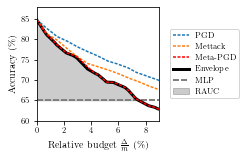

In [24]:
fig = plt.figure(figsize=figsize(scale=0.4, ratio_yx=0.95))
ax1 = plt.gca()

mlp_acc = 100 * gb.ana.MLP_TEST_ACCURACY["cora"]

envc = ((-envelope_curve + 1) * 100).scaled(100)
gb.ana.plot_curve(envc, ax=ax1, std=False, label="Envelope", color="black", lw=3, ref_y=mlp_acc, ref_label="MLP")
envc_above_mlp = envc.mean.terminated_at_x(envc.mean.where(mlp_acc))
ax1.fill_between(envc_above_mlp.xs, envc_above_mlp.ys, [mlp_acc] * len(envc_above_mlp.xs), label="RAUC", color="black", alpha=0.2)

for attack, curve in per_attack_curves.items():
    label, color = {"pgd_edges": ("PGD", "C0"), "greedy_meta_edges": ("Mettack", "C1"), "pgd_meta_edges": ("Meta-PGD", "red")}[attack]
    gb.ana.plot_curve(((-curve + 1) * 100).scaled(100), ax=ax1, std=False, label=label, color=color, ls=(0, (2, 1)))

ax1.set_xlabel(r"Relative budget $\frac{\Delta}{m}$ (\%)")
ax1.set_ylabel("Accuracy (\%)")
ax1.set_xlim(0, 9)
ax1.set_ylim(60, 88)

handles, labels = ax1.get_legend_handles_labels()
order = [2,3,4,1,0,5]
ax1.legend(np.array(handles)[order], np.array(labels)[order], loc="center left", bbox_to_anchor=(1.05, 0.5))

fig.savefig(f"{plots_path}/envelope_global_cora_gcn2.pdf", bbox_inches="tight", pad_inches=0.01)

# Appendix


The following code generates the plots from the appendix.

In [25]:
global_methods = {"fga_edges": ("FGA", "C0"), "pgd_edges": ("PGD", "C1"), "greedy_meta_edges": ("Metattack", "C2"), "greedy_meta_edges_adam": ("Metattack w/ Adam", "C2"), "greedy_meta_edges_sgd": ("Metattack w/ SGD", "C3"), "pgd_meta_edges": ("Meta-PGD", "C4")}
local_methods = {"fga_edges": ("FGA", "C0"), "pgd_edges": ("PGD", "C1"), "nettack_edges": ("Nettack", "C5"), "nettack_edges_surr": ("Nettack w/ surrogate", "C5"), "nettack_edges_nosurr": ("Nettack w/o surrogate", "C8"), "brute_force_edges": ("Greedy Brute Force", "C6")}

## Citeseer Improvement over Non-Adaptive Attacks
The following cell builds upon the code from the similarly-named main paper section.

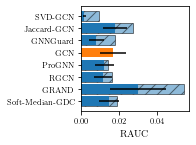

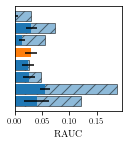

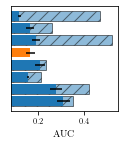

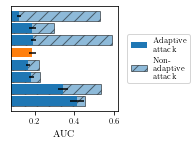

In [26]:
def conf(is_global, pois):
    if not is_global:
        plt.xlim(left=0.08)

plot_adaptive_improvement("citeseer", conf, auc=True, unproj_slugs=["svd_gcn_rank50_tuned", "jaccard_gcn_tuned", "gnn_guard_faith_refimpl", "gcn_2", "pro_gnn_tuned", "rgcn_tuned", "grand_tuned", "soft_median_gdc_tuned"])

## Extended Global MR Envelope Curves
The following cell builds upon the code from the similarly-named main paper section.

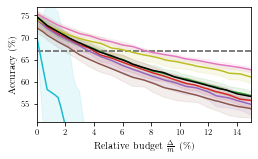

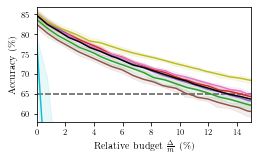

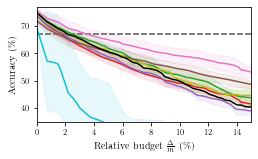

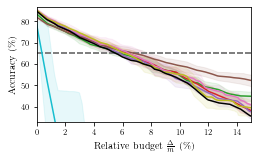

<Figure size 356.4x220.267 with 0 Axes>

In [27]:
def conf(pois, cora):
    plt.xlim(0, 15)
    if cora:
        if pois:
            plt.ylim(33, 87)
        else:
            plt.ylim(58, 87)
    else:
        if pois:
            plt.ylim(35, 77)
        else:
            plt.ylim(51, 77)
    return True, False

unproj_slugs = ["gcn_2", "jaccard_gcn_tuned", "svd_gcn_rank50_tuned", "rgcn_tuned", "pro_gnn_tuned", "gnn_guard_faith_refimpl", "grand_tuned", "soft_median_gdc_tuned"]
colors = ["black", "C2", "C9", "C3", "C4", "C5", "C6", "C8"]
plot_curves(
    global_mr_envelope_curves, unproj_slugs, colors, conf, relative=False, is_global=True,
    new_plot=lambda: plt.figure(figsize=figsize(scale=0.7, ratio_yx=0.55)), file_prefix="absoulte_global_mr_envelope_curves",
    standalone_legend=True
)

## Extended Local Breakage Envelope Curves
The following cell builds upon the code from the similarly-named main paper section.

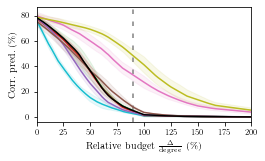

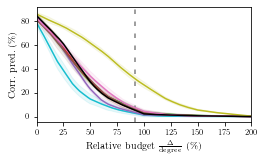

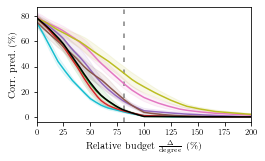

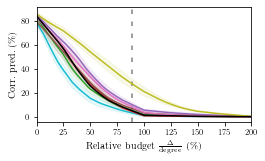

<Figure size 356.4x220.267 with 0 Axes>

In [29]:
def conf(pois, cora):
    plt.xlim(0, 200)
    return True, False

unproj_slugs = ["gcn_2", "jaccard_gcn_tuned", "svd_gcn_rank50_tuned", "rgcn_tuned", "pro_gnn_tuned", "gnn_guard_faith_refimpl", "grand_tuned", "soft_median_gdc_tuned"]
colors = ["black", "C2", "C9", "C3", "C4", "C5", "C6", "C8"]
plot_curves(
    local_breakage_envelope_curves, unproj_slugs, colors, conf, relative=False, is_global=False,
    new_plot=lambda: plt.figure(figsize=figsize(scale=0.7, ratio_yx=0.55)), file_prefix="absoulte_local_breakage_envelope_curves",
    standalone_legend=True
)

## 2-Ensemble Cross-Model ALC Matrices

In [30]:
row_slugs, col_slug_combs, matrices = ['gcn_2', 'jaccard_gcn_tuned', 'svd_gcn_rank50_tuned', 'rgcn_tuned', 'pro_gnn_tuned', 'gnn_guard_faith_refimpl', 'grand_tuned', 'soft_median_gdc_faith'], [('gcn_2', 'jaccard_gcn_tuned'), ('gcn_2', 'svd_gcn_rank50_tuned'), ('gcn_2', 'rgcn_tuned'), ('gcn_2', 'pro_gnn_tuned'), ('gcn_2', 'gnn_guard_faith_refimpl'), ('gcn_2', 'grand_tuned'), ('gcn_2', 'soft_median_gdc_faith'), ('jaccard_gcn_tuned', 'svd_gcn_rank50_tuned'), ('jaccard_gcn_tuned', 'rgcn_tuned'), ('jaccard_gcn_tuned', 'pro_gnn_tuned'), ('jaccard_gcn_tuned', 'gnn_guard_faith_refimpl'), ('jaccard_gcn_tuned', 'grand_tuned'), ('jaccard_gcn_tuned', 'soft_median_gdc_faith'), ('svd_gcn_rank50_tuned', 'rgcn_tuned'), ('svd_gcn_rank50_tuned', 'pro_gnn_tuned'), ('svd_gcn_rank50_tuned', 'gnn_guard_faith_refimpl'), ('svd_gcn_rank50_tuned', 'grand_tuned'), ('svd_gcn_rank50_tuned', 'soft_median_gdc_faith'), ('rgcn_tuned', 'pro_gnn_tuned'), ('rgcn_tuned', 'gnn_guard_faith_refimpl'), ('rgcn_tuned', 'grand_tuned'), ('rgcn_tuned', 'soft_median_gdc_faith'), ('pro_gnn_tuned', 'gnn_guard_faith_refimpl'), ('pro_gnn_tuned', 'grand_tuned'), ('pro_gnn_tuned', 'soft_median_gdc_faith'), ('gnn_guard_faith_refimpl', 'grand_tuned'), ('gnn_guard_faith_refimpl', 'soft_median_gdc_faith'), ('grand_tuned', 'soft_median_gdc_faith')], {"evasion": np.array([[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.25848, 0.25431, 0.25592, 0.25846, 0.2585, 0.25824, 0.26416, 0.2827, 0.38085, 0.36849, 0.29401, 0.26038, 0.26416, 0.26414, 0.26328, 0.2827, 0.28269, 0.276, 0.36549, 0.29398, 0.29385], [np.nan, 0.31201, 0.31127, 0.31164, 0.3106, 0.31201, 0.31152, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.34424, 0.35639, 0.33694, 0.42793, 0.34805, 0.33988, 0.33128, 0.34424, 0.33957, 0.33484, 0.35639, 0.34234, 0.33694, 0.33279, 0.34798], [0.27609, np.nan, 0.27325, 0.2719, 0.24594, 0.23731, 0.26511, np.nan, 0.28395, 0.28341, 0.25125, 0.24508, 0.2748, np.nan, np.nan, np.nan, np.nan, np.nan, 0.27929, 0.24842, 0.24281, 0.27371, 0.24632, 0.24183, 0.27659, 0.22343, 0.23939, 0.23432], [0.2791, 0.28013, np.nan, 0.28007, 0.28022, 0.28021, 0.28022, 0.29995, np.nan, 0.29834, 0.30003, 0.29956, 0.29918, np.nan, 0.3208, 0.40555, 0.33939, 0.3302, np.nan, np.nan, np.nan, np.nan, 0.3209, 0.32009, 0.31644, 0.33949, 0.33028, 0.32308], [0.26507, 0.26604, 0.26515, np.nan, 0.26604, 0.26604, 0.26604, 0.28582, 0.27769, np.nan, 0.28582, 0.28582, 0.28397, 0.28645, np.nan, 0.37502, 0.36829, 0.3155, np.nan, 0.28644, 0.28644, 0.28633, np.nan, np.nan, np.nan, 0.36366, 0.31526, 0.31537], [0.36418, 0.38767, 0.38623, 0.37954, np.nan, 0.38767, 0.38116, 0.3645, 0.36437, 0.36301, np.nan, 0.3645, 0.36424, 0.39798, 0.38403, np.nan, 0.4385, 0.38727, 0.38348, np.nan, 0.39798, 0.3843, np.nan, 0.38403, 0.37809, np.nan, np.nan, 0.38714], [0.35816, 0.35818, 0.33025, 0.35812, 0.35818, np.nan, 0.35289, 0.39177, 0.33064, 0.38863, 0.39228, np.nan, 0.36395, 0.33072, 0.39726, 0.45265, np.nan, 0.36621, 0.33066, 0.33072, np.nan, 0.33058, 0.39781, np.nan, 0.36427, np.nan, 0.36621, np.nan], [0.40062, 0.40262, 0.40165, 0.40125, 0.40258, 0.40223, np.nan, 0.41512, 0.41023, 0.41118, 0.41505, 0.41434, np.nan, 0.41526, 0.42416, 0.47296, 0.44395, np.nan, 0.41173, 0.4152, 0.41481, np.nan, 0.42416, 0.42348, np.nan, 0.44232, np.nan, np.nan]]), "poisoning": np.array([[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.14038, 0.11345, 0.098972, 0.14029, 0.11193, 0.10768, 0.11381, 0.099147, 0.21629, 0.11652, 0.10906, 0.097442, 0.11381, 0.10629, 0.10333, 0.099147, 0.097659, 0.097762, 0.11423, 0.10903, 0.10286], [np.nan, 0.2031, 0.17681, 0.13777, 0.17163, 0.16894, 0.16356, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.18167, 0.13866, 0.18067, 0.17494, 0.16762, 0.13613, 0.16397, 0.16264, 0.15842, 0.13567, 0.13837, 0.13796, 0.15991, 0.15836, 0.15925], [0.14314, np.nan, 0.14613, 0.12867, 0.14991, 0.13952, 0.13644, np.nan, 0.15114, 0.13798, 0.17073, 0.1545, 0.14526, np.nan, np.nan, np.nan, np.nan, np.nan, 0.1307, 0.17091, 0.14296, 0.13738, 0.13907, 0.13735, 0.13491, 0.16143, 0.15001, 0.14653], [0.14808, 0.14976, np.nan, 0.12052, 0.14962, 0.12729, 0.1257, 0.17401, np.nan, 0.12302, 0.17201, 0.13125, 0.1292, np.nan, 0.1234, 0.23295, 0.13417, 0.13011, np.nan, np.nan, np.nan, np.nan, 0.12304, 0.12144, 0.12095, 0.13235, 0.12978, 0.12416], [0.14104, 0.14226, 0.12254, np.nan, 0.14226, 0.11471, 0.11045, 0.16748, 0.12341, np.nan, 0.16738, 0.11706, 0.11133, 0.12344, np.nan, 0.25264, 0.12055, 0.11134, np.nan, 0.12344, 0.11222, 0.10878, np.nan, np.nan, np.nan, 0.11905, 0.11134, 0.10718], [0.21753, 0.25612, 0.20213, 0.1483, np.nan, 0.1769, 0.17961, 0.22135, 0.19702, 0.14851, np.nan, 0.17631, 0.1769, 0.20355, 0.14901, np.nan, 0.1805, 0.18147, 0.14762, np.nan, 0.17385, 0.17496, np.nan, 0.14868, 0.14778, np.nan, np.nan, 0.16929], [0.15817, 0.1633, 0.12688, 0.13134, 0.16267, np.nan, 0.13249, 0.17989, 0.12715, 0.13259, 0.17832, np.nan, 0.13476, 0.12761, 0.13386, 0.28412, np.nan, 0.13546, 0.1219, 0.12752, np.nan, 0.1202, 0.13355, np.nan, 0.12834, np.nan, 0.13528, np.nan], [0.17941, 0.1818, 0.1525, 0.12159, 0.18168, 0.13859, np.nan, 0.22568, 0.15257, 0.12222, 0.22522, 0.13992, np.nan, 0.15302, 0.12225, 0.32145, 0.14413, np.nan, 0.12024, 0.153, 0.13373, np.nan, 0.12202, 0.12137, np.nan, 0.14145, np.nan, np.nan]])}

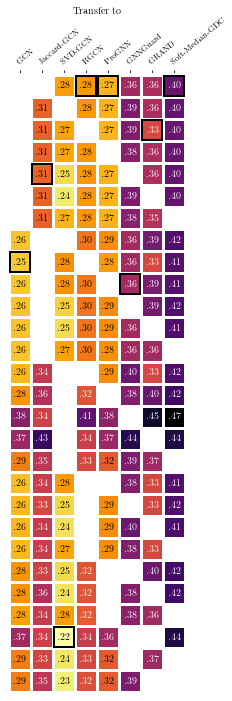

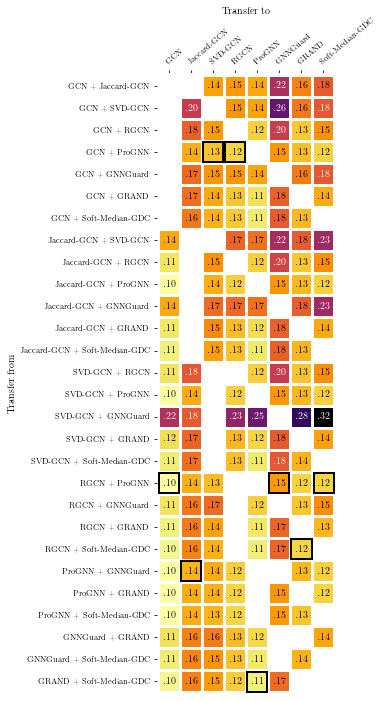

In [31]:
for plt_idx, (scenario, matrix) in enumerate(matrices.items()):
    row_labels = [gb.ana.model_label(slug).split(" ")[0] for slug in row_slugs]
    col_labels = [" + ".join(gb.ana.model_label(slug).split(" ")[0] for slug in slug_comb) for slug_comb in col_slug_combs]
    plt.figure(figsize=figsize(scale=0.83, ratio_yx=2.5))
    gb.ana.plot_matrix(
        matrix.T, col_labels, row_labels,  # flip rows and columns
        highlight="lowest", highlight_axis=0, highlight_color="black",
        omit_leading_zero=True, trailing_zeros=True, text_len=3, cbar=False,
        cmap="inferno_r", xlabel="Transfer to", ylabel="Transfer from", ax=plt.gca()
    )
    if plt_idx == 0:
        plt.yticks([])
        plt.ylabel(None)
    plt.savefig(f"{plots_path}/ensemble_cross_model_rauc_matrix_{scenario}.pdf", bbox_inches="tight", pad_inches=0.01)

## Tuning Improvement
Execute the `cleanacc_robustness_tradeoff = ...` cell from the "CleanAcc Robustness Tradeoff" plot further above prior to the cell below.

In [32]:
slug_pairs = [
    ("gcn_1", "gcn_2"), ("jaccard_gcn_faith", "jaccard_gcn_tuned"), ("svd_gcn_rank50_faith", "svd_gcn_rank50_tuned"),
    ("rgcn_faith", "rgcn_tuned"), ("pro_gnn_faith", "pro_gnn_tuned"), ("gnn_guard_faith_refimpl", None),
    (None, "grand_tuned"), ("soft_median_gdc_faith", "soft_median_gdc_tuned")
]
colors = ["C1", "C2", "C9", "C3", "C4", "C5", "C6", "C8"]

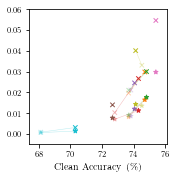

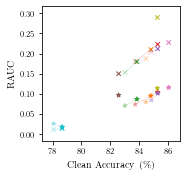

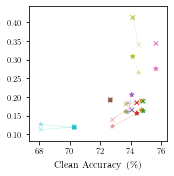

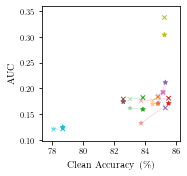

In [33]:
for scope in ["global", "local"]:
    for dataset in ["citeseer", "cora"]:
        plt.figure(figsize=figsize(scale=0.45, ratio_yx=1))
        for scenario in ["evasion", "poisoning"]:
            marker = "x" if scenario == "evasion" else "*"
            for slug_pair, color in zip(slug_pairs, colors):
                points = np.array([
                    cleanacc_robustness_tradeoff[scope, scenario, dataset].get(slug, [np.nan] * 2)
                    for slug in slug_pair
                ])
                if np.all(np.isnan(points[1])):
                    points = points[::-1]  # if there's only one data point, it should have alpha=1
                points[:, 0] *= 100
                plt.plot(*points.T, c=color, alpha=0.3, lw=0.5)
                plt.scatter(*points.T, c=color, marker=marker, s=20, lw=1, alpha=[0.3, 1])
        plt.margins(0.1)
        plt.xlabel("Clean Accuracy (\%)")
        if dataset == "cora":
            plt.ylabel("RAUC" if scope == "global" else "AUC")
        plt.savefig(f"{plots_path}/tuning_improvement_{scope}_{dataset}.pdf", bbox_inches="tight", pad_inches=0.01)

In [34]:
legend_fig = pylab.figure()
handles = []
labels = []
for slugs, color in zip(slug_pairs, colors):
    handles.append(Patch(facecolor=color))
    labels.append(gb.ana.model_label(slugs[0] or slugs[1]).split(" ")[0])
handles.append(Line2D([0], [0], marker="*", color="none", markerfacecolor="black", markersize=8))
handles.append(Line2D([0], [0], marker="x", color="none", markerfacecolor="black", markersize=6))
labels += ["Poisoning", "Evasion"]
pylab.figlegend(handles, labels, loc="center", ncol=5)
legend_fig.savefig(f"{plots_path}/tuning_improvement_legend.pdf", dpi=500, bbox_inches="tight", pad_inches=0.01)

<Figure size 356.4x220.267 with 0 Axes>

## Global Envelope Support

In [35]:
global_envelope_support = {('evasion', 'citeseer'): {'gcn_2': {'pgd_edges': 97}, 'jaccard_gcn_tuned': {'pgd_edges': 97}, 'svd_gcn_rank50_tuned': {'fga_edges': 34, 'pgd_edges': 25, 'greedy_meta_edges_adam': 2, 'pgd_meta_edges': 1, 'greedy_meta_edges_sgd': 1}, 'rgcn_tuned': {'pgd_edges': 94, 'greedy_meta_edges_sgd': 1}, 'pro_gnn_tuned': {'pgd_edges': 96}, 'gnn_guard_faith_refimpl': {'pgd_edges': 87}, 'grand_tuned': {'pgd_edges': 92}, 'soft_median_gdc_tuned': {'pgd_edges': 97}}, ('evasion', 'cora'): {'gcn_2': {'pgd_edges': 96}, 'jaccard_gcn_tuned': {'pgd_edges': 99}, 'svd_gcn_rank50_tuned': {'fga_edges': 28, 'pgd_edges': 5}, 'rgcn_tuned': {'pgd_edges': 96}, 'pro_gnn_tuned': {'pgd_edges': 102}, 'gnn_guard_faith_refimpl': {'pgd_edges': 93}, 'grand_tuned': {'pgd_edges': 99}, 'soft_median_gdc_faith': {'pgd_edges': 97}}, ('poisoning', 'citeseer'): {'gcn_2': {'pgd_edges': 6, 'pgd_meta_edges': 19, 'greedy_meta_edges_sgd': 70}, 'jaccard_gcn_tuned': {'pgd_edges': 3, 'pgd_meta_edges': 20, 'greedy_meta_edges_sgd': 68}, 'svd_gcn_rank50_tuned': {'fga_edges': 15, 'greedy_meta_edges_adam': 1, 'greedy_meta_edges_sgd': 10, 'pgd_edges': 6, 'pgd_meta_edges': 7}, 'rgcn_tuned': {'pgd_meta_edges': 26, 'greedy_meta_edges_sgd': 67}, 'pro_gnn_tuned': {'pgd_meta_edges': 85}, 'gnn_guard_faith_refimpl': {'pgd_edges': 4, 'greedy_meta_edges_sgd': 95}, 'grand_tuned': {'pgd_edges': 27, 'pgd_meta_edges': 52, 'greedy_meta_edges_sgd': 2}, 'soft_median_gdc_tuned': {'pgd_edges': 1, 'pgd_meta_edges': 50}}, ('poisoning', 'cora'): {'gcn_2': {'pgd_edges': 1, 'pgd_meta_edges': 74, 'greedy_meta_edges_sgd': 11}, 'jaccard_gcn_tuned': {'pgd_meta_edges': 73, 'greedy_meta_edges_sgd': 4}, 'svd_gcn_rank50_tuned': {'fga_edges': 24, 'greedy_meta_edges_sgd': 4, 'pgd_edges': 2}, 'rgcn_tuned': {'pgd_meta_edges': 50, 'greedy_meta_edges_sgd': 45}, 'pro_gnn_tuned': {'pgd_meta_edges': 87}, 'gnn_guard_faith_refimpl': {'pgd_edges': 4, 'greedy_meta_edges_sgd': 94}, 'grand_tuned': {'pgd_edges': 6, 'pgd_meta_edges': 75}, 'soft_median_gdc_faith': {'pgd_meta_edges': 72}}}

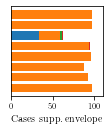

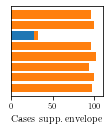

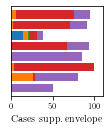

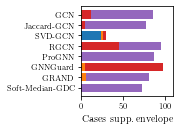

In [36]:
for (scenario, dataset), by_slug in global_envelope_support.items():
    plt.figure(figsize=figsize(scale=0.3, ratio_yx=1))
    by_slug = dict(reversed(by_slug.items()))
    model_labels = [gb.ana.model_label(slug).split(" ")[0] for slug in by_slug.keys()]
    acc = 0
    for method, (_, method_color) in global_methods.items():
        lens = np.array([by_method.get(method, 0) for by_method in by_slug.values()])
        if np.any(lens != 0):
            plt.barh(model_labels, lens, left=acc, color=method_color)
            acc = lens + acc
    plt.xlabel("Cases supp.\ envelope")
    plt.xlim(0, 110)
    if scenario == "evasion" or dataset == "citeseer":
        plt.yticks([])
    plt.savefig(f"{plots_path}/global_envelope_support_{scenario}_{dataset}.pdf", bbox_inches="tight", pad_inches=0.01)

In [37]:
legend_fig = pylab.figure()
handles = []
labels = []
for method, (method_label, method_color) in global_methods.items():
    if method != "greedy_meta_edges":
        handles.append(Patch(facecolor=method_color))
        labels.append(method_label)
pylab.figlegend(handles, labels, loc="center", ncol=5)
legend_fig.savefig(f"{plots_path}/global_envelope_support_legend.pdf", dpi=500, bbox_inches="tight", pad_inches=0.01)

<Figure size 356.4x220.267 with 0 Axes>

## Local Envelope Support

In [38]:
local_envelope_support = {('evasion', 'citeseer'): {'gcn_2': {'brute_force_edges': [89, 109.81666666666716], 'fga_edges': [0, 76.73333333333386], 'nettack_edges_nosurr': [2, 107.23333333333383], 'nettack_edges_surr': [23, 98.40000000000056], 'pgd_edges': [0, 93.8166666666672]}, 'jaccard_gcn_tuned': {'brute_force_edges': [90, 111.60000000000048], 'fga_edges': [0, 76.35000000000049], 'nettack_edges_nosurr': [3, 110.85000000000048], 'nettack_edges_surr': [18, 94.76666666666719], 'pgd_edges': [0, 95.43333333333382]}, 'svd_gcn_rank50_tuned': {'brute_force_edges': [106, 95.13333333333384], 'fga_edges': [1, 102.88333333333381], 'nettack_edges_nosurr': [7, 92.3833333333338], 'nettack_edges_surr': [3, 83.13333333333382], 'pgd_edges': [3, 106.46666666666711]}, 'rgcn_tuned': {'brute_force_edges': [121, 117.33333333333323], 'fga_edges': [0, 105.9999999999999], 'nettack_edges_surr': [9, 107.83333333333323], 'pgd_edges': [15, 123.83333333333317]}, 'pro_gnn_tuned': {'brute_force_edges': [73, 126.70000000000003], 'fga_edges': [1, 101.20000000000012], 'nettack_edges_surr': [12, 101.2833333333335], 'pgd_edges': [23, 130.36666666666667], 'nettack_edges_nosurr': [0, 31.44999999999992]}, 'gnn_guard_faith_refimpl': {'brute_force_edges': [124, 110.41666666666686], 'fga_edges': [0, 81.50000000000028], 'pgd_edges': [95, 117.50000000000017], 'nettack_edges_nosurr': [0, 37.5], 'nettack_edges_surr': [0, 34.083333333333286]}, 'grand_tuned': {'brute_force_edges': [116, 133.24999999999974], 'fga_edges': [6, 125.41666666666636], 'nettack_edges_surr': [0, 45.583333333333336], 'pgd_edges': [34, 139.7499999999998]}, 'soft_median_gdc_tuned': {'fga_edges': [0, 39.916666666666664], 'nettack_edges_nosurr': [17, 151.58333333333306], 'nettack_edges_surr': [4, 145.24999999999963], 'pgd_edges': [86, 156.24999999999986]}}, ('evasion', 'cora'): {'gcn_2': {'brute_force_edges': [81, 115.88333333333391], 'fga_edges': [0, 87.21666666666722], 'nettack_edges_nosurr': [1, 112.38333333333394], 'nettack_edges_surr': [12, 93.05000000000055], 'pgd_edges': [0, 97.46666666666722]}, 'jaccard_gcn_tuned': {'brute_force_edges': [95, 113.75000000000047], 'fga_edges': [0, 78.83333333333378], 'nettack_edges_nosurr': [0, 106.50000000000045], 'nettack_edges_surr': [8, 94.08333333333383], 'pgd_edges': [1, 102.83333333333377]}, 'svd_gcn_rank50_tuned': {'brute_force_edges': [100, 96.33333333333383], 'fga_edges': [2, 102.50000000000044], 'nettack_edges_nosurr': [6, 89.58333333333378], 'nettack_edges_surr': [10, 84.75000000000044], 'pgd_edges': [2, 106.83333333333377]}, 'rgcn_tuned': {'fga_edges': [0, 104.16666666666654], 'pgd_edges': [12, 121.49999999999984], 'brute_force_edges': [128, 121.66666666666653], 'nettack_edges_surr': [10, 102.66666666666661]}, 'pro_gnn_tuned': {'brute_force_edges': [60, 130.79999999999998], 'fga_edges': [1, 118.80000000000001], 'nettack_edges_surr': [5, 107.63333333333352], 'pgd_edges': [15, 136.96666666666664], 'nettack_edges_nosurr': [0, 24.799999999999944]}, 'gnn_guard_faith_refimpl': {'brute_force_edges': [178, 109.10000000000014], 'fga_edges': [0, 82.26666666666691], 'nettack_edges_surr': [0, 34.51666666666663], 'pgd_edges': [46, 115.35000000000012], 'nettack_edges_nosurr': [0, 34.76666666666664]}, 'grand_tuned': {'brute_force_edges': [139, 126.91666666666652], 'fga_edges': [0, 91.41666666666663], 'pgd_edges': [46, 133.41666666666652], 'nettack_edges_surr': [9, 54.25000000000001]}, 'soft_median_gdc_faith': {'fga_edges': [0, 34.25], 'nettack_edges_nosurr': [26, 139.7499999999997], 'nettack_edges_surr': [27, 130.9166666666663], 'pgd_edges': [104, 138.083333333333]}}, ('poisoning', 'citeseer'): {'gcn_2': {'brute_force_edges': [54, 105.15000000000052], 'fga_edges': [2, 87.15000000000055], 'nettack_edges_nosurr': [6, 103.1500000000005], 'nettack_edges_surr': [41, 103.15000000000052], 'pgd_edges': [3, 95.40000000000052]}, 'jaccard_gcn_tuned': {'brute_force_edges': [53, 101.26666666666715], 'fga_edges': [6, 86.3500000000005], 'nettack_edges_nosurr': [2, 103.60000000000049], 'nettack_edges_surr': [45, 102.76666666666718], 'pgd_edges': [7, 93.01666666666716]}, 'svd_gcn_rank50_tuned': {'brute_force_edges': [45, 99.73333333333387], 'fga_edges': [8, 112.73333333333376], 'nettack_edges_nosurr': [8, 95.65000000000043], 'nettack_edges_surr': [13, 91.65000000000046], 'pgd_edges': [10, 116.23333333333375]}, 'rgcn_tuned': {'brute_force_edges': [111, 119.24999999999986], 'fga_edges': [23, 129.4166666666665], 'nettack_edges_surr': [4, 88.41666666666663], 'pgd_edges': [7, 117.91666666666649]}, 'pro_gnn_tuned': {'brute_force_edges': [47, 94.56666666666673], 'fga_edges': [8, 97.31666666666679], 'nettack_edges_surr': [39, 124.73333333333336], 'pgd_edges': [28, 136.48333333333332], 'nettack_edges_nosurr': [0, 24.899999999999945]}, 'gnn_guard_faith_refimpl': {'brute_force_edges': [103, 98.08333333333353], 'fga_edges': [14, 90.00000000000021], 'nettack_edges_nosurr': [1, 37.416666666666664], 'nettack_edges_surr': [3, 41.25000000000005], 'pgd_edges': [107, 105.25000000000017]}, 'grand_tuned': {'brute_force_edges': [104, 123.16666666666639], 'fga_edges': [18, 115.66666666666639], 'nettack_edges_surr': [22, 60.66666666666669], 'pgd_edges': [28, 128.49999999999966]}, 'soft_median_gdc_tuned': {'fga_edges': [6, 46.666666666666664], 'nettack_edges_nosurr': [18, 125.16666666666619], 'nettack_edges_surr': [54, 145.16666666666652], 'pgd_edges': [70, 134.99999999999963]}}, ('poisoning', 'cora'): {'gcn_2': {'brute_force_edges': [49, 104.90000000000052], 'fga_edges': [13, 92.56666666666715], 'nettack_edges_nosurr': [5, 105.65000000000049], 'nettack_edges_surr': [31, 101.31666666666716], 'pgd_edges': [5, 92.56666666666713]}, 'jaccard_gcn_tuned': {'brute_force_edges': [68, 102.98333333333377], 'fga_edges': [28, 85.90000000000045], 'nettack_edges_nosurr': [3, 92.90000000000045], 'pgd_edges': [3, 97.40000000000046], 'nettack_edges_surr': [24, 94.81666666666713]}, 'svd_gcn_rank50_tuned': {'brute_force_edges': [68, 99.96666666666714], 'fga_edges': [6, 105.88333333333374], 'nettack_edges_nosurr': [2, 91.13333333333377], 'nettack_edges_surr': [21, 88.38333333333377], 'pgd_edges': [6, 111.63333333333372]}, 'rgcn_tuned': {'brute_force_edges': [91, 136.99999999999991], 'fga_edges': [5, 113.83333333333321], 'pgd_edges': [8, 122.99999999999984], 'nettack_edges_surr': [7, 115.16666666666659]}, 'pro_gnn_tuned': {'brute_force_edges': [35, 115.95000000000006], 'fga_edges': [3, 103.9500000000001], 'nettack_edges_surr': [15, 124.45000000000012], 'pgd_edges': [44, 138.45000000000005], 'nettack_edges_nosurr': [0, 20.19999999999996]}, 'gnn_guard_faith_refimpl': {'brute_force_edges': [138, 106.15000000000015], 'fga_edges': [17, 95.48333333333356], 'nettack_edges_surr': [2, 38.31666666666666], 'pgd_edges': [49, 112.23333333333348], 'nettack_edges_nosurr': [2, 39.8166666666667]}, 'grand_tuned': {'brute_force_edges': [98, 120.08333333333314], 'fga_edges': [6, 92.2499999999999], 'pgd_edges': [41, 131.58333333333314], 'nettack_edges_surr': [24, 87.08333333333333]}, 'soft_median_gdc_faith': {'fga_edges': [4, 40.41666666666667], 'nettack_edges_nosurr': [20, 127.91666666666619], 'nettack_edges_surr': [36, 146.08333333333314], 'pgd_edges': [88, 137.5833333333331]}}}

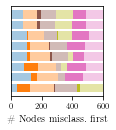

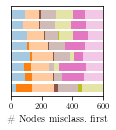

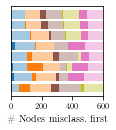

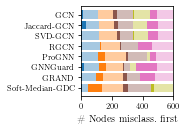

In [39]:
for (scenario, dataset), by_slug in local_envelope_support.items():
    plt.figure(figsize=figsize(scale=0.3, ratio_yx=1))
    by_slug = dict(reversed(by_slug.items()))
    model_labels = [gb.ana.model_label(slug).split(" ")[0] for slug in by_slug.keys()]
    acc = 0
    for method, (_, method_color) in local_methods.items():
        for tied in [False, True]:
            lens = np.array([by_method.get(method, [0, 0])[1 if tied else 0] for by_method in by_slug.values()])
            if np.any(lens != 0):
                plt.barh(model_labels, lens, left=acc, color=method_color, alpha=0.4 if tied else 1)
                acc = lens + acc
    plt.xlabel("\# Nodes misclass.\ first")
    if scenario == "evasion" or dataset == "citeseer":
        plt.yticks([])
    plt.savefig(f"{plots_path}/local_envelope_support_{scenario}_{dataset}.pdf", bbox_inches="tight", pad_inches=0.01)

In [40]:
legend_fig = pylab.figure()
handles = []
labels = []
for method, (method_label, method_color) in local_methods.items():
    if method != "nettack_edges":
        handles.append(Patch(facecolor=method_color))
        labels.append(method_label)
pylab.figlegend(handles, labels, loc="center", ncol=5)
legend_fig.savefig(f"{plots_path}/local_envelope_support_legend.pdf", dpi=500, bbox_inches="tight", pad_inches=0.01)

<Figure size 356.4x220.267 with 0 Axes>

## Global Method Comparison

In [70]:
global_meth_codes, global_aggr_codes, global_method_comparison = {'fga_edges': 0, 'pgd_edges': 1, 'greedy_meta_edges_adam': 2, 'greedy_meta_edges_sgd': 3, 'pgd_meta_edges': 4}, {'tanh_score_margin': 1, 'proba_margin': 2, 'masked_cross_entropy': 3}, {('evasion', 'citeseer'): {'gcn_2': [(0.2049444973543232, 0, 0, True), (0.14987410998770925, 0, 3, True), (0.20540018270744356, 0, 0, True), (0.20801389679143734, 0, 0, True), (0.20637041467510686, 0, 0, True), (0.17238743312329638, 0, 1, True), (0.15391126164976593, 0, 2, True), (0.1399835256334658, 0, 0, True), (0.07595347230561314, 1, 0, True), (0.043177689936931676, 1, 3, True), (0.07011920016629317, 1, 0, True), (0.08589614832112183, 1, 0, True), (0.0758579380546373, 1, 0, True), (0.03024728481977853, 1, 1, True), (0.0356804346793501, 1, 2, True), (0.04317992629980444, 1, 0, True), (0.16811972752596607, 4, 1, True), (0.18425824647456596, 4, 2, True), (0.16507493286553368, 2, 1, True), (0.17651418180523484, 2, 2, True), (0.11071228119468042, 3, 1, True), (0.17448098854343194, 3, 2, True)], 'jaccard_gcn_tuned': [(0.20974638862016298, 0, 0, True), (0.21311733782339032, 0, 0, False), (0.17502307335345205, 0, 3, True), (0.15821302796267508, 0, 3, False), (0.20324026154133593, 0, 0, True), (0.21131821922314295, 0, 0, False), (0.20630202598112576, 0, 0, True), (0.21063570266746695, 0, 0, False), (0.20657062127160883, 0, 0, True), (0.2115335653015186, 0, 0, False), (0.1840393526294904, 0, 1, True), (0.17964387814429406, 0, 1, False), (0.1616875390526849, 0, 2, True), (0.16163605176303691, 0, 2, False), (0.1509785090878393, 0, 0, True), (0.1509432053822632, 0, 0, False), (0.07759278569468302, 1, 0, True), (0.09327484817066442, 1, 0, False), (0.04268002207619852, 1, 3, True), (0.05399003687194383, 1, 3, False), (0.06908155303697319, 1, 0, True), (0.09419002742883839, 1, 0, False), (0.08538653764923736, 1, 0, True), (0.12487674339716755, 1, 0, False), (0.07758916289606596, 1, 0, True), (0.10480811352873938, 1, 0, False), (0.03017240980860626, 1, 1, True), (0.041202005042958956, 1, 1, False), (0.03425933452467696, 1, 2, True), (0.04908810895815024, 1, 2, False), (0.042069556114112935, 1, 0, True), (0.06699118532841754, 1, 0, False), (0.16584357506026756, 4, 1, True), (0.18061840424666809, 4, 1, False), (0.18383254120903353, 4, 2, True), (0.1960630667160591, 4, 2, False), (0.1735698136063534, 2, 1, True), (0.10354049539064543, 3, 1, True), (0.18616383957724708, 2, 1, False), (0.13599257549367882, 3, 1, False), (0.17756709361571693, 2, 2, True), (0.17651607424046906, 3, 2, True), (0.1944171411719618, 2, 2, False), (0.19038925591691397, 3, 2, False)], 'svd_gcn_rank50_tuned': [(0.0639703406064969, 0, 0, False), (0.019058785516493197, 0, 3, False), (0.033968241230207065, 0, 0, False), (0.03617112077193622, 0, 0, False), (0.035453643924502315, 0, 0, False), (0.05217830028828171, 0, 1, False), (0.0245618043104385, 0, 2, False), (0.022084300799880264, 0, 0, False), (0.022726562738780307, 1, 0, False), (0.015013331111075844, 1, 3, False), (0.019757056217001346, 1, 0, False), (0.020097861898489708, 1, 0, False), (0.019173932783008486, 1, 0, False), (0.016257155643591533, 1, 1, False), (0.017150861199705603, 1, 2, False), (0.019737164983301456, 1, 0, False), (0.018003395182322357, 0, 0, True), (0.006997402379497091, 0, 3, True), (0.012211542492375282, 0, 0, True), (0.012349246362050098, 0, 0, True), (0.01225049763588783, 0, 0, True), (0.020932635291621992, 0, 1, True), (0.008570966424834344, 0, 2, True), (0.007861027286935449, 0, 0, True), (0.0102316596629375, 1, 0, True), (0.005821669126701941, 1, 3, True), (0.008790058031259691, 1, 0, True), (0.009277445672485105, 1, 0, True), (0.010038576291967655, 1, 0, True), (0.008960639019747616, 1, 1, True), (0.006109922378606909, 1, 2, True), (0.005897133294397255, 1, 0, True), (0.05900831164217969, 0, 0, False), (0.018433986279442253, 0, 3, False), (0.0253642342372713, 0, 0, False), (0.02445814206918917, 0, 0, False), (0.02421766319330191, 0, 0, False), (0.030993836960552957, 0, 1, False), (0.021871749459707504, 0, 2, False), (0.018176606592529027, 0, 0, False), (0.03288143568582548, 1, 0, False), (0.02740900355902809, 1, 3, False), (0.031016897553812196, 1, 0, False), (0.029454198461439464, 1, 0, False), (0.028042922319762152, 1, 0, False), (0.02205539054930819, 1, 1, False), (0.02916137499775822, 1, 2, False), (0.030261409108223884, 1, 0, False), (0.00867407742202617, 0, 0, True), (0.007321415024202527, 0, 3, True), (0.011918850586736633, 0, 0, True), (0.012083791539606967, 0, 0, True), (0.012186415275206267, 0, 0, True), (0.00796140907711317, 0, 1, True), (0.004927528820360639, 0, 2, True), (0.004830890125450288, 0, 0, True), (0.005490422685678916, 1, 0, True), (0.005128284542350592, 1, 3, True), (0.005023940117583672, 1, 0, True), (0.0048875110880392605, 1, 0, True), (0.0049808370648886475, 1, 0, True), (0.0055068630909627814, 1, 1, True), (0.004616146796769169, 1, 2, True), (0.004455757491719227, 1, 0, True), (0.05213604786227686, 4, 1, False), (0.0517036681510449, 4, 2, False), (0.07605706108685628, 2, 1, False), (0.058318899298422835, 3, 1, False), (0.06872781368473672, 2, 2, False), (0.06195053589845121, 3, 2, False), (0.009553228600947386, 4, 1, True), (0.007946500833631433, 4, 2, True), (0.018979583368393137, 2, 1, True), (0.017716421231384873, 3, 1, True), (0.01717386142422142, 2, 2, True), (0.03287288311173002, 3, 2, True)], 'rgcn_tuned': [(0.17668547982212454, 0, 0, True), (0.17106103179327725, 0, 3, True), (0.2042688327193228, 0, 0, True), (0.20439562588001486, 0, 0, True), (0.20395508000876825, 0, 0, True), (0.1385235444784664, 0, 1, True), (0.14274883030535854, 0, 2, True), (0.14290518460953672, 0, 0, True), (0.06472507048852008, 1, 0, True), (0.04898120855945502, 1, 3, True), (0.0686521083696544, 1, 0, True), (0.0856487156090684, 1, 0, True), (0.07200421116134754, 1, 0, True), (0.027075145809702474, 1, 1, True), (0.04915134204627016, 1, 2, True), (0.05869016350836435, 1, 0, True), (0.13822805667122068, 4, 1, True), (0.1746813986090254, 4, 2, True), (0.16302222794390214, 2, 1, True), (0.07455751489536697, 3, 1, True), (0.1551368418612728, 3, 2, True), (0.16965782369530413, 2, 2, True)], 'pro_gnn_tuned': [(0.14524534391760602, 0, 3, True), (0.149474153589417, 0, 1, True), (0.14476890703329676, 0, 2, True), (0.034289103406538776, 1, 3, False), (0.024888553460486747, 1, 1, False), (0.03495875754361383, 1, 2, False), (0.046554857164295985, 1, 3, True), (0.03320074738550653, 1, 1, True), (0.03779412762890977, 1, 2, True), (0.14401493473343252, 2, 1, True), (0.19406364732148879, 3, 1, True), (0.15112266044757622, 2, 2, True), (0.20100177168481487, 3, 2, True), (0.13497251446917363, 4, 1, True), (0.15179073839212015, 4, 2, True)], 'gnn_guard_faith_refimpl': [(0.14085926635219342, 0, 0, True), (0.08275685562288784, 0, 3, True), (0.08987744902653902, 0, 0, True), (0.0810673427385014, 0, 0, True), (0.08151869206570546, 0, 0, True), (0.10407024865763685, 0, 1, True), (0.09195690332443696, 0, 2, True), (0.07689686509881136, 0, 0, True), (0.030662428946018803, 1, 0, True), (0.020685587145886766, 1, 3, True), (0.0215872144035792, 1, 0, True), (0.02857995251343909, 1, 0, True), (0.023544587259429827, 1, 0, True), (0.014292409426921313, 1, 1, True), (0.018471533887564385, 1, 2, True), (0.023939556952587617, 1, 0, True), (0.11035775229405562, 4, 1, True), (0.10590668460581756, 4, 2, True), (0.12852483029032347, 2, 1, True), (0.03887133774307239, 3, 1, True), (0.13700039514047677, 2, 2, True), (0.07999536105393337, 3, 2, True)], 'grand_tuned': [(0.2089942434991455, 0, 0, True), (0.1762711017622199, 0, 3, True), (0.2345035526360369, 0, 0, True), (0.23418803800302285, 0, 0, True), (0.23509562383879512, 0, 0, True), (0.19400093593321033, 0, 1, True), (0.18967489424419337, 0, 2, True), (0.1843230221454597, 0, 0, True), (0.14958409851805046, 1, 0, True), (0.10640755169955392, 1, 3, True), (0.1784557069317721, 1, 0, True), (0.19286019945537267, 1, 0, True), (0.1808227946869579, 1, 0, True), (0.054702915104183326, 1, 1, True), (0.13668439397845383, 1, 2, True), (0.15612433181993018, 1, 0, True), (0.23946930269060424, 2, 1, True), (0.26033575037771695, 3, 1, True), (0.2587547838805028, 2, 2, True), (0.2588717233266995, 3, 2, True), (0.24602281424929656, 4, 1, False), (0.2403566570316123, 4, 2, False), (0.2462657999142331, 4, 1, True), (0.24907807634718568, 4, 2, True)], 'soft_median_gdc_tuned': [(0.18819553194214014, 0, 0, True), (0.13882431116793104, 0, 3, True), (0.16482199910802336, 0, 0, True), (0.15921477876544615, 0, 0, True), (0.15403825057962017, 0, 0, True), (0.16946649196748673, 0, 1, True), (0.16542744787019587, 0, 2, True), (0.14551269933672875, 0, 0, True), (0.10847812150429477, 1, 0, False), (0.06156571528457152, 1, 3, False), (0.11187267606919123, 1, 0, False), (0.14632201715206636, 1, 0, False), (0.1207073145665172, 1, 0, False), (0.040943290771178385, 1, 1, False), (0.07414668900463442, 1, 2, False), (0.10811738590430534, 1, 0, False), (0.04372190695954542, 1, 1, True), (0.07739227212640641, 1, 2, True), (0.20279991143925144, 2, 1, True), (0.19589591616652857, 3, 1, True), (0.2052607950639859, 2, 2, True), (0.2062460360007481, 3, 2, True), (0.19121586487464154, 4, 1, True), (0.19396153357930057, 4, 1, True)]}, ('evasion', 'cora'): {'gcn_2': [(0.5552339863755804, 0, 0, True), (0.48607140404640736, 0, 3, True), (0.5370117727473541, 0, 0, True), (0.5380549792569356, 0, 0, True), (0.5374578918616868, 0, 0, True), (0.5209175748910507, 0, 1, True), (0.4977643482100883, 0, 2, True), (0.4819370052667648, 0, 0, True), (0.410746155125797, 1, 0, True), (0.33346152645892696, 1, 3, True), (0.3697775895708014, 1, 0, True), (0.41561354833629044, 1, 0, True), (0.3966950008128511, 1, 0, True), (0.22736976790177615, 1, 1, True), (0.21064441159217523, 1, 2, True), (0.26586495167958296, 1, 0, True), (0.4506438698068667, 4, 1, True), (0.5226440092718447, 4, 2, True), (0.4933570081538182, 2, 1, True), (0.502717211686355, 2, 2, True), (0.4650169332276574, 3, 1, True), (0.5360832242560568, 3, 2, True)], 'jaccard_gcn_tuned': [(0.5170370833253238, 0, 0, True), (0.5269285016527595, 0, 0, False), (0.4659434970351565, 0, 3, True), (0.4802589078610168, 0, 3, False), (0.4944926253213936, 0, 0, True), (0.5145847513190256, 0, 0, False), (0.4972169724185468, 0, 0, True), (0.5154694099457571, 0, 0, False), (0.4938239758989072, 0, 0, True), (0.5150522861166283, 0, 0, False), (0.49492146823580685, 0, 1, True), (0.5069047621882882, 0, 1, False), (0.48069387494257876, 0, 2, True), (0.4838683105216613, 0, 2, False), (0.467100208556244, 0, 0, True), (0.47381380789126526, 0, 0, False), (0.3720684729482756, 1, 0, True), (0.40503126009669693, 1, 0, False), (0.287837563792413, 1, 3, True), (0.3400295027093226, 1, 3, False), (0.3190731593912879, 1, 0, True), (0.41188041857864965, 1, 0, False), (0.3661706777848401, 1, 0, True), (0.43780930580176525, 1, 0, False), (0.34640199989567577, 1, 0, True), (0.43082766287203783, 1, 0, False), (0.1926929479244831, 1, 1, True), (0.2972325323572059, 1, 1, False), (0.18107173984459596, 1, 2, True), (0.2964721106601136, 1, 2, False), (0.23313362884612715, 1, 0, True), (0.3449058033514137, 1, 0, False), (0.4242713062214699, 4, 1, True), (0.45785493201791877, 4, 1, False), (0.48478941527506125, 4, 2, True), (0.502655156126333, 4, 2, False), (0.4659282433225361, 2, 1, True), (0.4278252063650586, 3, 1, True), (0.4812489248448067, 2, 1, False), (0.46968377541597883, 3, 1, False), (0.4669569521895155, 2, 2, True), (0.48859062934757985, 3, 2, True), (0.5002809272661966, 2, 2, False), (0.5125365009340396, 3, 2, False)], 'svd_gcn_rank50_tuned': [(0.3480098621017125, 0, 0, False), (0.325841057486404, 0, 3, False), (0.29188057969676195, 0, 0, False), (0.2935407244502189, 0, 0, False), (0.29336886716692334, 0, 0, False), (0.3407665601118287, 0, 1, False), (0.32919109032725036, 0, 2, False), (0.32407306335547315, 0, 0, False), (0.27739964932912103, 1, 0, False), (0.2298009576479872, 1, 3, False), (0.2618643255182419, 1, 0, False), (0.2730982406510483, 1, 0, False), (0.2683341975851124, 1, 0, False), (0.2192681962677967, 1, 1, False), (0.24926088187300183, 1, 2, False), (0.24901159528520206, 1, 0, False), (0.2798759596962133, 0, 0, True), (0.20281254108817146, 0, 3, True), (0.1992893318366315, 0, 0, True), (0.1922871517884058, 0, 0, True), (0.19735611893981947, 0, 0, True), (0.22455904847969493, 0, 1, True), (0.19573646668407096, 0, 2, True), (0.20347047368575963, 0, 0, True), (0.2207246736704779, 1, 0, True), (0.13044341202427773, 1, 3, True), (0.11765284409717185, 1, 0, True), (0.12274085945027205, 1, 0, True), (0.12334677992438108, 1, 0, True), (0.18637931791319204, 1, 1, True), (0.12145727901372963, 1, 2, True), (0.10874139371675913, 1, 0, True), (0.28343924922690167, 0, 0, False), (0.30402363641212793, 0, 3, False), (0.3112510798333765, 0, 0, False), (0.3084973405142596, 0, 0, False), (0.3107702382034506, 0, 0, False), (0.3414033978882926, 0, 1, False), (0.30027490387319544, 0, 2, False), (0.327002891381866, 0, 0, False), (0.2738058837467995, 1, 0, False), (0.2114456718587646, 1, 3, False), (0.29990229104233557, 1, 0, False), (0.2935774321578407, 1, 0, False), (0.29817998633260256, 1, 0, False), (0.18714685596092515, 1, 1, False), (0.1910102612873032, 1, 2, False), (0.1918962694592395, 1, 0, False), (0.2092201115022637, 0, 0, True), (0.1381527128862323, 0, 3, True), (0.06690259813837465, 0, 0, True), (0.07531319448298071, 0, 0, True), (0.05893108974145243, 0, 0, True), (0.1437398349484678, 0, 1, True), (0.1789671994694108, 0, 2, True), (0.1483015715513194, 0, 0, True), (0.13941899576141276, 1, 0, True), (0.09790881973043983, 1, 3, True), (0.08376469698808604, 1, 0, True), (0.08424118608513677, 1, 0, True), (0.08535154670486272, 1, 0, True), (0.10119901327659742, 1, 1, True), (0.07653924531713446, 1, 2, True), (0.06944065512020539, 1, 0, True), (0.2837071657882676, 4, 1, False), (0.31540524962089006, 4, 2, False), (0.38041969182094604, 2, 1, False), (0.34608655306226155, 3, 1, False), (0.37740155481640886, 2, 2, False), (0.3140505661770477, 3, 2, False), (0.1467756300554399, 4, 1, True), (0.1335948778527189, 4, 2, True), (0.23637481967021245, 2, 1, True), (0.21627963951413814, 3, 1, True), (0.24013740211657644, 2, 2, True), (0.23937707162496813, 3, 2, True)], 'rgcn_tuned': [(0.5229029391522599, 0, 0, True), (0.5224231560203597, 0, 3, True), (0.5685696438681502, 0, 0, True), (0.5602627781834408, 0, 0, True), (0.5687710231175401, 0, 0, True), (0.5260836690142452, 0, 1, True), (0.5100970788233048, 0, 2, True), (0.5196707398237749, 0, 0, True), (0.382132370153587, 1, 0, True), (0.3605155957114423, 1, 3, True), (0.41949062931190195, 1, 0, True), (0.453982778067435, 1, 0, True), (0.4232280241441562, 1, 0, True), (0.22373176781288368, 1, 1, True), (0.3643203738783157, 1, 2, True), (0.4172539698107471, 1, 0, True), (0.4920305395760938, 4, 1, True), (0.54010438664025, 4, 2, True), (0.4910754723646674, 2, 1, True), (0.4401618118371191, 3, 1, True), (0.5375144648008107, 2, 2, True), (0.51796147343152, 3, 2, True)], 'pro_gnn_tuned': [(0.5044865289398179, 0, 3, True), (0.5354218898109981, 0, 1, True), (0.5117000417709783, 0, 2, True), (0.33259799853522776, 1, 3, False), (0.22159569190766973, 1, 1, False), (0.21776600916990702, 1, 2, False), (0.3667439365643187, 1, 3, True), (0.25142036604910056, 1, 1, True), (0.24332939791222058, 1, 2, True), (0.49445536997123896, 2, 1, True), (0.5140844219843764, 3, 1, True), (0.5154016282686112, 2, 2, True), (0.5573374865771582, 3, 2, True), (0.49088448296755616, 4, 1, True), (0.5392122870634017, 4, 2, True)], 'gnn_guard_faith_refimpl': [(0.48556977049097655, 0, 0, True), (0.4422657656807079, 0, 3, True), (0.4016947838710531, 0, 0, True), (0.39887186414525627, 0, 0, True), (0.39790154278544476, 0, 0, True), (0.45812888963765025, 0, 1, True), (0.4435664896385424, 0, 2, True), (0.43789658825861444, 0, 0, True), (0.3179396438180115, 1, 0, True), (0.24440092669551614, 1, 3, True), (0.20767278124938157, 1, 0, True), (0.29620256649016696, 1, 0, True), (0.2594335232609784, 1, 0, True), (0.18331969672894763, 1, 1, True), (0.1505669857945417, 1, 2, True), (0.22031752139978494, 1, 0, True), (0.4158911894919637, 4, 1, True), (0.41760474636563283, 2, 1, True), (0.34418102901998976, 3, 1, True), (0.45185435906404053, 2, 2, True), (0.43567801420024244, 3, 2, True), (0.40485385798125895, 4, 2, True)], 'grand_tuned': [(0.5775010044862737, 0, 0, True), (0.533939482227752, 0, 3, True), (0.5439510211793547, 0, 0, True), (0.5442082740031013, 0, 0, True), (0.5437626841377814, 0, 0, True), (0.5430755299015957, 0, 1, True), (0.5298637355797837, 0, 2, True), (0.5144827763752995, 0, 0, True), (0.36107415716500696, 1, 0, True), (0.30369979435405414, 1, 3, True), (0.37050216399697655, 1, 0, True), (0.4249583602670244, 1, 0, True), (0.399205387993873, 1, 0, True), (0.22738794252491537, 1, 1, True), (0.25528596272280846, 1, 2, True), (0.3363641233421983, 1, 0, True), (0.5276586573712394, 2, 1, True), (0.542115699013289, 3, 1, True), (0.5442403124701294, 2, 2, True), (0.5725646611399082, 3, 2, True), (0.5061125196039166, 4, 1, False), (0.5378696118388269, 4, 2, False), (0.506068713517735, 4, 1, True), (0.5413443337370847, 4, 2, True)], 'soft_median_gdc_faith': [(0.5536956107092252, 0, 0, True), (0.48488361804756525, 0, 3, True), (0.5074641594931215, 0, 0, True), (0.5110066688588917, 0, 0, True), (0.5089078751931783, 0, 0, True), (0.5195360270482536, 0, 1, True), (0.5087105976236379, 0, 2, True), (0.4900454403751559, 0, 0, True), (0.4371217838021112, 1, 0, False), (0.36186296695104436, 1, 3, False), (0.42253167069492986, 1, 0, False), (0.47752600990308347, 1, 0, False), (0.4499634047843382, 1, 0, False), (0.3093606337378715, 1, 1, False), (0.3235791104090616, 1, 2, False), (0.393718260177028, 1, 0, False), (0.2953632260862504, 1, 1, True), (0.5456206127973962, 2, 1, True), (0.5283519735780747, 3, 1, True), (0.5562707095847543, 2, 2, True), (0.549472638326932, 3, 2, True), (0.5360663589776842, 4, 1, True), (0.5462517259824974, 4, 1, True), (0.31537228664517947, 1, 2, True)]}, ('poisoning', 'citeseer'): {'gcn_2': [(0.18872502226939464, 0, 0, True), (0.1558311045666784, 0, 3, True), (0.19851015230162136, 0, 0, True), (0.2003678058813545, 0, 0, True), (0.19909191299517257, 0, 0, True), (0.16346734176226582, 0, 1, True), (0.14244395246348854, 0, 2, True), (0.13144763725676128, 0, 0, True), (0.07206305929282013, 1, 0, True), (0.043865343294652595, 1, 3, True), (0.05147286443042285, 1, 0, True), (0.05693997895619213, 1, 0, True), (0.053850644887279434, 1, 0, True), (0.029295688923189168, 1, 1, True), (0.029796781164526432, 1, 2, True), (0.03366034299269663, 1, 0, True), (0.027641599253184695, 4, 1, True), (0.03239948361011312, 4, 2, True), (0.07529641296123568, 2, 1, True), (0.08368453355471181, 2, 2, True), (0.023772468335665587, 3, 1, True), (0.029022089321663114, 3, 2, True)], 'jaccard_gcn_tuned': [(0.19759597557072311, 0, 0, True), (0.20828999656646982, 0, 0, False), (0.17568425107045263, 0, 3, True), (0.16393555634176443, 0, 3, False), (0.19761803222965976, 0, 0, True), (0.20282470886645831, 0, 0, False), (0.19936461943806094, 0, 0, True), (0.2013334699019007, 0, 0, False), (0.20106017615152588, 0, 0, True), (0.20257229716004713, 0, 0, False), (0.17852610148474976, 0, 1, True), (0.17573586887287537, 0, 1, False), (0.15744417720648668, 0, 2, True), (0.1581199070978745, 0, 2, False), (0.1453384647824066, 0, 0, True), (0.1519760834818176, 0, 0, False), (0.07322236317465744, 1, 0, True), (0.08676409626767699, 1, 0, False), (0.04373257794143273, 1, 3, True), (0.0562140586152447, 1, 3, False), (0.054499552029139434, 1, 0, True), (0.0744597402224451, 1, 0, False), (0.059354771673920725, 1, 0, True), (0.08576274458217605, 1, 0, False), (0.058472549796387926, 1, 0, True), (0.07860809546418299, 1, 0, False), (0.029714708087012792, 1, 1, True), (0.04101440692271497, 1, 1, False), (0.03204318195655083, 1, 2, True), (0.04259457454594149, 1, 2, False), (0.03410340802883168, 1, 0, True), (0.04979749140776112, 1, 0, False), (0.027769123370268527, 4, 1, True), (0.045109254319606676, 4, 1, False), (0.032259502374732144, 4, 2, True), (0.04947114070449262, 4, 2, False), (0.08084305203671352, 2, 1, True), (0.023201615295614694, 3, 1, True), (0.11081741873609015, 2, 1, False), (0.031969531045037934, 3, 1, False), (0.08073397616079593, 2, 2, True), (0.02686854096798074, 3, 2, True), (0.11560621904856905, 2, 2, False), (0.035977901573805086, 3, 2, False)], 'svd_gcn_rank50_tuned': [(0.034169218269721045, 0, 0, False), (0.013800322826834776, 0, 3, False), (0.01970909619158505, 0, 0, False), (0.02054728788450426, 0, 0, False), (0.020893157126469865, 0, 0, False), (0.028856945578778336, 0, 1, False), (0.014449022536754485, 0, 2, False), (0.01844217499102529, 0, 0, False), (0.013484443293666474, 1, 0, False), (0.010202510520666215, 1, 3, False), (0.01137339718783947, 1, 0, False), (0.012481124008512475, 1, 0, False), (0.011919440019014915, 1, 0, False), (0.010788980141331986, 1, 1, False), (0.010038057902015268, 1, 2, False), (0.011072577075006326, 1, 0, False), (0.01358910914316882, 0, 0, True), (0.005228014646333963, 0, 3, True), (0.00657520308440316, 0, 0, True), (0.006530186683365186, 0, 0, True), (0.006364663431638629, 0, 0, True), (0.014998617910855012, 0, 1, True), (0.006742602366325147, 0, 2, True), (0.005576397943785048, 0, 0, True), (0.00696391708102862, 1, 0, True), (0.004122751756798727, 1, 3, True), (0.005166625630577735, 1, 0, True), (0.007358055068897325, 1, 0, True), (0.007007726819913894, 1, 0, True), (0.005629351546803757, 1, 1, True), (0.004357217679278543, 1, 2, True), (0.004425595353670876, 1, 0, True), (0.028377953987922533, 0, 0, False), (0.01331069758921497, 0, 3, False), (0.021517577347395307, 0, 0, False), (0.01807043022700917, 0, 0, False), (0.01867820485112598, 0, 0, False), (0.015417346775626367, 0, 1, False), (0.013810900053800057, 0, 2, False), (0.013448802390803427, 0, 0, False), (0.02122211197215123, 1, 0, False), (0.018298075782062512, 1, 3, False), (0.021325430366388908, 1, 0, False), (0.018769167424483885, 1, 0, False), (0.01844168764547049, 1, 0, False), (0.014982204257782123, 1, 1, False), (0.01996336632051198, 1, 2, False), (0.02046161385000346, 1, 0, False), (0.00626671853461212, 0, 0, True), (0.004274672504729286, 0, 3, True), (0.008418802038714463, 0, 0, True), (0.008407805378687443, 0, 0, True), (0.009149991065095401, 0, 0, True), (0.0058313909788272125, 0, 1, True), (0.0032800132211378537, 0, 2, True), (0.0031928079928798996, 0, 0, True), (0.0037538345661277924, 1, 0, True), (0.003565154094543656, 1, 3, True), (0.003926765463517692, 1, 0, True), (0.0038617115289621947, 1, 0, True), (0.003991798868481358, 1, 0, True), (0.004068736079933953, 1, 1, True), (0.0032450795521951257, 1, 2, True), (0.0031147210662564153, 1, 0, True), (0.015057484171665058, 4, 1, False), (0.015012003904118557, 4, 2, False), (0.04757404058217398, 2, 1, False), (0.03267818889745009, 3, 1, False), (0.04307954164667054, 2, 2, False), (0.030581345377173018, 3, 2, False), (0.003673648644985706, 4, 1, True), (0.003356881418896876, 4, 2, True), (0.007012039011995036, 2, 1, True), (0.004180077454494234, 3, 1, True), (0.008311890715796655, 2, 2, True), (0.0024363952098014627, 3, 2, True)], 'rgcn_tuned': [(0.1624749226228911, 0, 0, True), (0.15400581815508904, 0, 3, True), (0.18663877556464642, 0, 0, True), (0.18781978566356833, 0, 0, True), (0.18632443554660544, 0, 0, True), (0.1328384080093496, 0, 1, True), (0.1208974679634206, 0, 2, True), (0.12221160109261106, 0, 0, True), (0.05809759695379081, 1, 0, True), (0.04605371999530163, 1, 3, True), (0.048435159138114144, 1, 0, True), (0.050760957191810084, 1, 0, True), (0.047948532543517955, 1, 0, True), (0.02315195229493368, 1, 1, True), (0.03565231218870524, 1, 2, True), (0.036003397843352464, 1, 0, True), (0.012168537167679967, 4, 1, True), (0.015673326382090784, 4, 2, True), (0.03828736373305536, 2, 1, True), (0.012727137931178977, 3, 1, True), (0.013972432499867432, 3, 2, True), (0.0494387680679927, 2, 2, True)], 'pro_gnn_tuned': [(0.16718982712434458, 0, 3, True), (0.14668581341277687, 0, 1, True), (0.1539103480603425, 0, 2, True), (0.04674490336367495, 1, 3, False), (0.03531246099117556, 1, 1, False), (0.04672074149573284, 1, 2, False), (0.04273787905470273, 1, 3, True), (0.02591775168967181, 1, 1, True), (0.03232871950906942, 1, 2, True), (0.06581500466739776, 2, 1, True), (0.0750796671172489, 3, 1, True), (0.061772738285105086, 2, 2, True), (0.09064535292312857, 3, 2, True), (0.014253003935596337, 4, 1, True), (0.018135907740041694, 4, 2, True)], 'gnn_guard_faith_refimpl': [(0.11643066824681078, 0, 0, True), (0.07738353000825401, 0, 3, True), (0.07112610316948324, 0, 0, True), (0.061956256294304735, 0, 0, True), (0.06134543050276396, 0, 0, True), (0.08668148746007384, 0, 1, True), (0.06773427061343548, 0, 2, True), (0.06034267944594383, 0, 0, True), (0.02477786190859743, 1, 0, True), (0.019555850851074752, 1, 3, True), (0.016441371073755616, 1, 0, True), (0.022053605966431238, 1, 0, True), (0.019031292867923665, 1, 0, True), (0.012668359361160638, 1, 1, True), (0.01486668718862676, 1, 2, True), (0.018098404078250953, 1, 0, True), (0.04305632517296337, 4, 1, True), (0.03482632283147475, 4, 2, True), (0.05132366012011467, 2, 1, True), (0.009440463427827471, 3, 1, True), (0.054934089778019626, 2, 2, True), (0.008997062589446065, 3, 2, True)], 'grand_tuned': [(0.2106534524048361, 0, 0, True), (0.18097647883111492, 0, 3, True), (0.23342506032169927, 0, 0, True), (0.23258912599927745, 0, 0, True), (0.23370318304474075, 0, 0, True), (0.19629143513047845, 0, 1, True), (0.18450097631386286, 0, 2, True), (0.18044470453030187, 0, 0, True), (0.13921537191078975, 1, 0, True), (0.10269582920169966, 1, 3, True), (0.13665525550598417, 1, 0, True), (0.144755306271113, 1, 0, True), (0.13674014271257923, 1, 0, True), (0.053821540876908935, 1, 1, True), (0.09942096208713246, 1, 2, True), (0.10325772949449127, 1, 0, True), (0.12891127861642665, 2, 1, True), (0.18755254530134394, 3, 1, True), (0.1298334662395202, 2, 2, True), (0.1728537748183744, 3, 2, True), (0.06040304248962469, 4, 1, False), (0.055287146972900804, 4, 2, False), (0.05773476865792469, 4, 1, True), (0.05881253062274995, 4, 2, True)], 'soft_median_gdc_tuned': [(0.17452738583486377, 0, 0, True), (0.1591640092960594, 0, 3, True), (0.1546162916590903, 0, 0, True), (0.15684610241608893, 0, 0, True), (0.14696034703451208, 0, 0, True), (0.17375866559145012, 0, 1, True), (0.14968819454004495, 0, 2, True), (0.15152894671544492, 0, 0, True), (0.09411224980503537, 1, 0, False), (0.06693675989333983, 1, 3, False), (0.07427577041287388, 1, 0, False), (0.08362256285218164, 1, 0, False), (0.07730528759018697, 1, 0, False), (0.05122788864440235, 1, 1, False), (0.061368649456041424, 1, 2, False), (0.06831766316361214, 1, 0, False), (0.040506338237422244, 1, 1, True), (0.04870437586050101, 1, 2, True), (0.13483172961845935, 2, 1, True), (0.11110051492751094, 3, 1, True), (0.1475250758109554, 2, 2, True), (0.1311280286990282, 3, 2, True), (0.01831878853528249, 4, 1, True), (0.024888542767810266, 4, 1, True)]}, ('poisoning', 'cora'): {'gcn_2': [(0.5557281348378293, 0, 0, True), (0.5061463861563731, 0, 3, True), (0.5407851858967311, 0, 0, True), (0.5411578906122811, 0, 0, True), (0.5412803928570058, 0, 0, True), (0.526844464470219, 0, 1, True), (0.5091762422461947, 0, 2, True), (0.4980322616210938, 0, 0, True), (0.4114245035738543, 1, 0, True), (0.35525437241258756, 1, 3, True), (0.3485898150057672, 1, 0, True), (0.3869218697946631, 1, 0, True), (0.3725262414299021, 1, 0, True), (0.24235337528183082, 1, 1, True), (0.21604025912103625, 1, 2, True), (0.25466947702786846, 1, 0, True), (0.12798697627852745, 4, 1, True), (0.1413744697038497, 4, 2, True), (0.3691528687196123, 2, 1, True), (0.3762054520473649, 2, 2, True), (0.1666141872133396, 3, 1, True), (0.2500558289086986, 3, 2, True)], 'jaccard_gcn_tuned': [(0.5006832510247159, 0, 0, True), (0.512283746726902, 0, 0, False), (0.4697366058085117, 0, 3, True), (0.48219594034630237, 0, 3, False), (0.4895332785447194, 0, 0, True), (0.5033590773284409, 0, 0, False), (0.48954032889764065, 0, 0, True), (0.5034254413743025, 0, 0, False), (0.4890218538825509, 0, 0, True), (0.5036260267501731, 0, 0, False), (0.4895110689879301, 0, 1, True), (0.4988773588841148, 0, 1, False), (0.4750186432690214, 0, 2, True), (0.4763729536894072, 0, 2, False), (0.47372857989844575, 0, 0, True), (0.47257812485676015, 0, 0, False), (0.36243511008118634, 1, 0, True), (0.3956022083561127, 1, 0, False), (0.29843151318104805, 1, 3, True), (0.3457424316266124, 1, 3, False), (0.28908023788112674, 1, 0, True), (0.3840824091709061, 1, 0, False), (0.3191965329697076, 1, 0, True), (0.40688560615722047, 1, 0, False), (0.30213024307967, 1, 0, True), (0.39760173998736487, 1, 0, False), (0.19573453504234575, 1, 1, True), (0.2893348176005993, 1, 1, False), (0.1735117601934166, 1, 2, True), (0.282142992155874, 1, 2, False), (0.20021778796087636, 1, 0, True), (0.31566379664609423, 1, 0, False), (0.09894828927737927, 4, 1, True), (0.19845063604086885, 4, 1, False), (0.1104930729161199, 4, 2, True), (0.257321827929584, 4, 2, False), (0.3325608754973263, 2, 1, True), (0.1360132974135176, 3, 1, True), (0.39190515146983884, 2, 1, False), (0.25376760558654843, 3, 1, False), (0.352050942939339, 2, 2, True), (0.18934809849393733, 3, 2, True), (0.4137852318468864, 2, 2, False), (0.27132942355665557, 3, 2, False)], 'svd_gcn_rank50_tuned': [(0.3482756207131657, 0, 0, False), (0.32529583649441485, 0, 3, False), (0.2977519864412095, 0, 0, False), (0.29838739822441607, 0, 0, False), (0.2983392838847273, 0, 0, False), (0.3368843484868099, 0, 1, False), (0.3322826795340711, 0, 2, False), (0.3204468759404212, 0, 0, False), (0.2778484256700227, 1, 0, False), (0.25335390630234955, 1, 3, False), (0.24860664783935107, 1, 0, False), (0.25215891627966264, 1, 0, False), (0.25515208703171033, 1, 0, False), (0.22512983512358878, 1, 1, False), (0.2594969863651496, 1, 2, False), (0.24803764823868102, 1, 0, False), (0.2925144155016802, 0, 0, True), (0.21079050369774702, 0, 3, True), (0.20498985151758417, 0, 0, True), (0.19945677640630238, 0, 0, True), (0.207251914708623, 0, 0, True), (0.24132080989147447, 0, 1, True), (0.2031148005120788, 0, 2, True), (0.2192804189638883, 0, 0, True), (0.2301584887956456, 1, 0, True), (0.13466870560517694, 1, 3, True), (0.11011285001486974, 1, 0, True), (0.11463241441097438, 1, 0, True), (0.11230871750096698, 1, 0, True), (0.1802038327834145, 1, 1, True), (0.12382507700785768, 1, 2, True), (0.10987945170728172, 1, 0, True), (0.27612773101656407, 0, 0, False), (0.309703631326801, 0, 3, False), (0.3137335034264053, 0, 0, False), (0.3063170235988165, 0, 0, False), (0.3106517431298233, 0, 0, False), (0.3422338084912069, 0, 1, False), (0.30612154169556977, 0, 2, False), (0.331646200890866, 0, 0, False), (0.27456098311827826, 1, 0, False), (0.22528281615811335, 1, 3, False), (0.2902803686877903, 1, 0, False), (0.28442146681780256, 1, 0, False), (0.284993250080347, 1, 0, False), (0.20374540114379439, 1, 1, False), (0.21844810166106615, 1, 2, False), (0.19950944021828096, 1, 0, False), (0.20123052868339314, 0, 0, True), (0.14628947920338672, 0, 3, True), (0.07580205723008263, 0, 0, True), (0.08402360552411434, 0, 0, True), (0.0813596605636214, 0, 0, True), (0.14164923263665957, 0, 1, True), (0.1889771984140279, 0, 2, True), (0.15733118240305047, 0, 0, True), (0.14110753565568462, 1, 0, True), (0.10582128942209046, 1, 3, True), (0.0866464429980206, 1, 0, True), (0.08697254769802402, 1, 0, True), (0.08747796318220753, 1, 0, True), (0.1030042083524865, 1, 1, True), (0.08045192571293765, 1, 2, True), (0.07522707686646916, 1, 0, True), (0.1607454788011784, 4, 1, False), (0.1668665044502163, 4, 2, False), (0.3692098385954956, 2, 1, False), (0.3162808578164399, 3, 1, False), (0.3695555705131407, 2, 2, False), (0.29488447607502566, 3, 2, False), (0.07342633770360049, 4, 1, True), (0.06889799205486866, 4, 2, True), (0.1220567945432461, 2, 1, True), (0.09588753956032267, 3, 1, True), (0.13109637560388668, 2, 2, True), (0.08160543407581988, 3, 2, True)], 'rgcn_tuned': [(0.526730638128955, 0, 0, True), (0.533228795312245, 0, 3, True), (0.5624319430661131, 0, 0, True), (0.5612944357234918, 0, 0, True), (0.5597168956301857, 0, 0, True), (0.5148159575306398, 0, 1, True), (0.5107777119555822, 0, 2, True), (0.5093628592284762, 0, 0, True), (0.3696900235333005, 1, 0, True), (0.3593139875298233, 1, 3, True), (0.38270240072892925, 1, 0, True), (0.4080724714979455, 1, 0, True), (0.38948253763627294, 1, 0, True), (0.2074470328836632, 1, 1, True), (0.324903017950954, 1, 2, True), (0.36761729403108345, 1, 0, True), (0.11885806952749607, 4, 1, True), (0.15455353381442177, 4, 2, True), (0.17668302216232132, 2, 1, True), (0.11169592589486829, 3, 1, True), (0.2775192593243233, 2, 2, True), (0.16135120861101476, 3, 2, True)], 'pro_gnn_tuned': [(0.5199696332037826, 0, 3, True), (0.5349765645701847, 0, 1, True), (0.5170348718205201, 0, 2, True), (0.3667222426775206, 1, 3, False), (0.29362814620345207, 1, 1, False), (0.2988000398033546, 1, 2, False), (0.36792230413768967, 1, 3, True), (0.25961260738222824, 1, 1, True), (0.2560164329959576, 1, 2, True), (0.36699047066360435, 2, 1, True), (0.28993823170856176, 3, 1, True), (0.3785769601687004, 2, 2, True), (0.34363139189175695, 3, 2, True), (0.10455002305332098, 4, 1, True), (0.12034172164985657, 4, 2, True)], 'gnn_guard_faith_refimpl': [(0.4680764461639493, 0, 0, True), (0.44255690934302755, 0, 3, True), (0.394450555695397, 0, 0, True), (0.39440825357786985, 0, 0, True), (0.3940920839979425, 0, 0, True), (0.45149677574885755, 0, 1, True), (0.4325400779012963, 0, 2, True), (0.43477279046901157, 0, 0, True), (0.31331372202711977, 1, 0, True), (0.26865329449056147, 1, 3, True), (0.1993327433781125, 1, 0, True), (0.27786860179833467, 1, 0, True), (0.247246707445469, 1, 0, True), (0.19612923516428593, 1, 1, True), (0.15514618259848767, 1, 2, True), (0.2002387617042642, 1, 0, True), (0.30577964848590955, 4, 1, True), (0.25257263692253196, 2, 1, True), (0.10851288954968383, 3, 1, True), (0.2826259854120448, 2, 2, True), (0.10513737196560853, 3, 2, True), (0.2631601287416898, 4, 2, True)], 'grand_tuned': [(0.5653320197372835, 0, 0, True), (0.522935147735042, 0, 3, True), (0.5428709751581288, 0, 0, True), (0.5382356421878225, 0, 0, True), (0.5372718419319191, 0, 0, True), (0.5406216101482592, 0, 1, True), (0.5254989622655473, 0, 2, True), (0.5147444333069031, 0, 0, True), (0.35809845268893614, 1, 0, True), (0.3170367888312109, 1, 3, True), (0.3211693429306704, 1, 0, True), (0.3746387450160878, 1, 0, True), (0.34021174409676896, 1, 0, True), (0.212278384432246, 1, 1, True), (0.22185689172215728, 1, 2, True), (0.28045118606085995, 1, 0, True), (0.2879139334365176, 2, 1, True), (0.4121340316320416, 3, 1, True), (0.3255431295229404, 2, 2, True), (0.4474788873590442, 3, 2, True), (0.14519574818045536, 4, 1, False), (0.16765089851682258, 4, 2, False), (0.1304412899273502, 4, 1, True), (0.15349555998806014, 4, 2, True)], 'soft_median_gdc_faith': [(0.5472453505615984, 0, 0, True), (0.4926932920882017, 0, 3, True), (0.49159799235435536, 0, 0, True), (0.48942750434915105, 0, 0, True), (0.4908293148684401, 0, 0, True), (0.5166234752217804, 0, 1, True), (0.5030381823108988, 0, 2, True), (0.49292207887575723, 0, 0, True), (0.4259967192563662, 1, 0, False), (0.3669430689297544, 1, 3, False), (0.38256539421433355, 1, 0, False), (0.4220890575641148, 1, 0, False), (0.4032744409604108, 1, 0, False), (0.32049871480459535, 1, 1, False), (0.31455836709378354, 1, 2, False), (0.33630483732297795, 1, 0, False), (0.3007006854177469, 1, 1, True), (0.435732148813557, 2, 1, True), (0.4248885170032491, 3, 1, True), (0.45732607559040617, 2, 2, True), (0.44590306732502977, 3, 2, True), (0.12000212000664719, 4, 1, True), (0.13167593244192824, 4, 1, True), (0.2932217983617429, 1, 2, True)]}}

In [71]:
aggr_labels_and_markers = {"tanh_score_margin": ("TLM", "+"), "proba_margin": ("PM", "x"), "masked_cross_entropy": ("MCE", "|")}

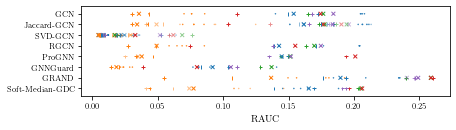

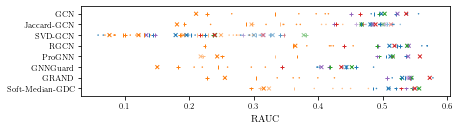

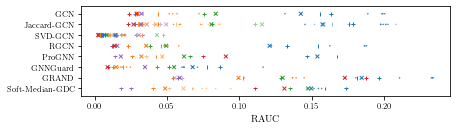

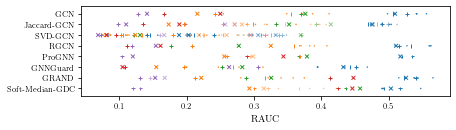

In [72]:
meth_colors_by_code = {code: global_methods[method][1] for method, code in global_meth_codes.items()}
aggr_markers_by_code = {global_aggr_codes[aggr]: m for aggr, (_, m) in aggr_labels_and_markers.items()}

for (scenario, dataset), by_slug in global_method_comparison.items():
    plt.figure(figsize=figsize(scale=1.2, ratio_yx=0.25))
    for slug, points in reversed(by_slug.items()):
        label = gb.ana.model_label(slug).split(" ")[0]
        for aggr_code, grp in gb.ana.group(points, itemgetter(2)).items():
            marker = aggr_markers_by_code.get(aggr_code, ".")
            plt.scatter([p[0] for p in grp], [label] * len(grp), color=[meth_colors_by_code[p[1]] for p in grp], alpha=[1 if p[3] else 0.5 for p in grp], marker=marker, s=1 if marker == "." else 15, lw=1)
    plt.margins(y=0.1)
    plt.xlabel("RAUC")
    plt.savefig(f"{plots_path}/global_method_comparison_{scenario}_{dataset}.pdf", bbox_inches="tight", pad_inches=0.01)

In [73]:
legend_fig = pylab.figure()
handles = []
labels = []
for method, (method_label, method_color) in global_methods.items():
    if method != "greedy_meta_edges":
        handles.append(Patch(facecolor=method_color))
        labels.append(method_label)
for aggr_label, aggr_marker in aggr_labels_and_markers.values():
    handles.append(Line2D([0], [0], marker=aggr_marker, color="none", markerfacecolor="black", markersize=8))
    labels.append(f"{aggr_label} loss")
pylab.figlegend(handles, labels, loc="center", ncol=4)
legend_fig.savefig(f"{plots_path}/global_method_comparison_legend.pdf", dpi=500, bbox_inches="tight", pad_inches=0.01)

<Figure size 356.4x220.267 with 0 Axes>

## Local Method Comparison

In [45]:
local_meth_codes, local_method_comparison = {'fga_edges': 0, 'pgd_edges': 1, 'nettack_edges': 2, 'nettack_edges_nosurr': 3, 'brute_force_edges': 4}, {('evasion', 'citeseer'): {'gcn_2': [(0.24014659036663807, 0, True), (0.214819911398007, 1, True), (0.20814545309331578, 2, True), (0.20285538083940668, 3, True), (0.2007540972944144, 4, True)], 'jaccard_gcn_tuned': [(0.32682437829178435, 0, False), (0.24074358524628794, 0, True), (0.28379501289759024, 1, False), (0.21439877680971495, 1, True), (0.297549909771741, 2, False), (0.21070856788601647, 2, True), (0.27141973473521924, 3, False), (0.2009161282837396, 3, True), (0.19965033425838843, 4, True)], 'svd_gcn_rank50_tuned': [(0.5337241092985052, 0, False), (0.5568622550057573, 0, False), (0.17711362881461903, 0, True), (0.19274234071561266, 0, True), (0.4111877664837518, 1, False), (0.49548556922581233, 1, False), (0.17088863393908865, 1, True), (0.17991917999676238, 1, True), (0.5275802688865286, 2, False), (0.2504818607452458, 2, True), (0.35881565425502193, 3, False), (0.17575856021337413, 3, True), (0.13722566887166768, 4, True)], 'rgcn_tuned': [(0.23591858729571155, 0, True), (0.21361244891292044, 1, True), (0.22663726720882166, 2, True), (0.20112061546557697, 4, True)], 'pro_gnn_tuned': [(0.24038514722279364, 0, True), (0.22556490900352583, 1, False), (0.21403701482702275, 1, True), (0.22444099374430682, 2, True), (0.6398121442290368, 3, True), (0.1927519312929677, 4, True)], 'gnn_guard_faith_refimpl': [(0.41672872291353497, 0, True), (0.22226643480358654, 1, True), (0.5904576363036893, 2, True), (0.5600864458573227, 3, True), (0.2500577613527266, 4, True)], 'grand_tuned': [(0.3812609255890022, 0, True), (0.3584788530698436, 1, True), (0.5352961467707186, 2, True), (0.36853550983906264, 4, True)], 'soft_median_gdc_tuned': [(0.7119041179337232, 0, True), (0.47269910389279374, 1, False), (0.4373563652436103, 1, True), (0.45241220092415996, 2, True), (0.4475618373192954, 3, True)]}, ('evasion', 'cora'): {'gcn_2': [(0.22772929390534385, 0, True), (0.2100234286069905, 1, True), (0.21561784533535233, 2, True), (0.20061080611745657, 3, True), (0.19222225189627432, 4, True)], 'jaccard_gcn_tuned': [(0.3628707607381301, 0, False), (0.24604804248153161, 0, True), (0.33850470105393593, 1, False), (0.20671750639094832, 1, True), (0.35317541048444434, 2, False), (0.21309767250360495, 2, True), (0.3371626633131063, 3, False), (0.20653829791919542, 3, True), (0.18979969568901459, 4, True)], 'svd_gcn_rank50_tuned': [(0.5953314323416479, 0, False), (0.6014828321283556, 0, False), (0.19339470177286294, 0, True), (0.22068783092051286, 0, True), (0.5588799915737509, 1, False), (0.6020505498934081, 1, False), (0.18066341189802668, 1, True), (0.19701828962911588, 1, True), (0.5479326349658684, 2, False), (0.22293771414140284, 2, True), (0.5053764829782548, 3, False), (0.2285966022842117, 3, True), (0.15363586885806607, 4, True)], 'rgcn_tuned': [(0.25735057204353207, 0, True), (0.22518232194569227, 1, True), (0.2384450904064328, 2, True), (0.1958751937301225, 4, True)], 'pro_gnn_tuned': [(0.19094506530812522, 0, True), (0.18087672794902696, 1, False), (0.18531041010482854, 1, True), (0.20054588271394244, 2, True), (0.6067215636620146, 3, True), (0.17142658748975634, 4, True)], 'gnn_guard_faith_refimpl': [(0.3536453597230388, 0, True), (0.21945593602865993, 1, True), (0.543203249215833, 2, True), (0.5237770019457809, 3, True), (0.19819991480718446, 4, True)], 'grand_tuned': [(0.33213755523590294, 0, True), (0.2310981478964468, 1, True), (0.35635069909606354, 2, True), (0.21797527317852228, 4, True)], 'soft_median_gdc_faith': [(0.7174700307754681, 0, True), (0.41480525274203134, 1, False), (0.40345247562466613, 1, True), (0.39938672691587784, 2, True), (0.39118993181244366, 3, True)]}, ('poisoning', 'citeseer'): {'gcn_2': [(0.21584299841044524, 0, True), (0.1973166907102161, 1, True), (0.17906848344098059, 2, True), (0.18806694907639684, 3, True), (0.18815042720579092, 4, True)], 'jaccard_gcn_tuned': [(0.29784065922976566, 0, False), (0.21943885452153725, 0, True), (0.26667224575063364, 1, False), (0.2010752121405389, 1, True), (0.2599500068359984, 2, False), (0.17906217338107144, 2, True), (0.25570697983762075, 3, False), (0.1873319349461579, 3, True), (0.19042327736098139, 4, True)], 'svd_gcn_rank50_tuned': [(0.48016852631073925, 0, False), (0.4979815875804821, 0, False), (0.18808355770060955, 0, True), (0.176063173223228, 0, True), (0.3875817089045821, 1, False), (0.454885221428157, 1, False), (0.1810365424104887, 1, True), (0.1668686624876472, 1, True), (0.46582805318114573, 2, False), (0.2496923607386174, 2, True), (0.3307516496707147, 3, False), (0.1958532207430276, 3, True), (0.1946226793519456, 4, True)], 'rgcn_tuned': [(0.18221617695254372, 0, True), (0.18703077266173324, 1, True), (0.21063464663250137, 2, True), (0.1754867505863266, 4, True)], 'pro_gnn_tuned': [(0.2793599462518059, 0, True), (0.2811978013190575, 1, False), (0.2474848100963451, 1, True), (0.23165333564328003, 2, True), (0.6979287459866989, 3, True), (0.2900651086285993, 4, True)], 'gnn_guard_faith_refimpl': [(0.3692735249991, 0, True), (0.23391608465887687, 1, True), (0.5203131892358046, 2, True), (0.545145655431665, 3, True), (0.27352738001376153, 4, True)], 'grand_tuned': [(0.3264271740136026, 0, True), (0.3057038590645444, 1, True), (0.42002611704252235, 2, True), (0.30816245875416015, 4, True)], 'soft_median_gdc_tuned': [(0.6616580212926478, 0, True), (0.4129173052637601, 1, False), (0.36114263456217494, 1, True), (0.34906444544105236, 2, True), (0.37510581147027844, 3, True)]}, ('poisoning', 'cora'): {'gcn_2': [(0.21193131074156657, 0, True), (0.20994784675782915, 1, True), (0.19705881840939346, 2, True), (0.19547425813918826, 3, True), (0.19548350839162612, 4, True)], 'jaccard_gcn_tuned': [(0.3441082333330322, 0, False), (0.21797011612225853, 0, True), (0.32669387693983243, 1, False), (0.19660906710186563, 1, True), (0.32629777533817655, 2, False), (0.19238686678615927, 2, True), (0.334117122839156, 3, False), (0.19821999610987867, 3, True), (0.1829538812664654, 4, True)], 'svd_gcn_rank50_tuned': [(0.6065541267709902, 0, False), (0.6080332213598173, 0, False), (0.1975910532425415, 0, True), (0.2210934621135397, 0, True), (0.570044404670572, 1, False), (0.616049644145878, 1, False), (0.1820482096848806, 1, True), (0.19874818530505492, 1, True), (0.5397892211188962, 2, False), (0.2131739022045381, 2, True), (0.5169770795555874, 3, False), (0.22864562817244877, 3, True), (0.18947880815612425, 4, True)], 'rgcn_tuned': [(0.2290109847924388, 0, True), (0.2108893161974646, 1, True), (0.211394402687311, 2, True), (0.18512217442364923, 4, True)], 'pro_gnn_tuned': [(0.265543171806376, 0, True), (0.2598072932984765, 1, False), (0.23940133814820222, 1, True), (0.24265740729207802, 2, True), (0.6947461553144014, 3, True), (0.25112946772738637, 4, True)], 'gnn_guard_faith_refimpl': [(0.29262018904827486, 0, True), (0.22019867293313206, 1, True), (0.4885226113939959, 2, True), (0.4983681960247405, 3, True), (0.21111110786570136, 4, True)], 'grand_tuned': [(0.3193468092660868, 0, True), (0.23223387172172338, 1, True), (0.28189052742626997, 2, True), (0.2276199353498999, 4, True)], 'soft_median_gdc_faith': [(0.679712977994228, 0, True), (0.3896664891868612, 1, False), (0.36942830578747404, 1, True), (0.3521391749280555, 2, True), (0.37386600114036095, 3, True)]}}

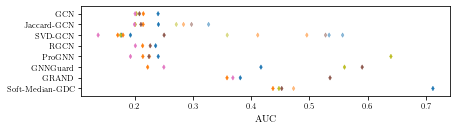

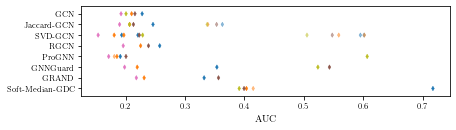

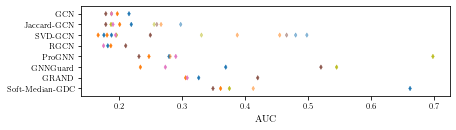

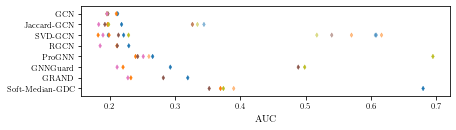

In [46]:
meth_colors_by_code = {code: local_methods[method][1] for method, code in local_meth_codes.items()}

for (scenario, dataset), by_slug in local_method_comparison.items():
    plt.figure(figsize=figsize(scale=1.2, ratio_yx=0.25))
    for slug, points in reversed(by_slug.items()):
        label = gb.ana.model_label(slug).split(" ")[0]
        plt.scatter([p[0] for p in points], [label] * len(points), color=[meth_colors_by_code[p[1]] for p in points], alpha=[1 if p[2] else 0.5 for p in points], marker="d", s=10, lw=0.5)
    plt.margins(y=0.1)
    plt.xlabel("AUC")
    plt.savefig(f"{plots_path}/local_method_comparison_{scenario}_{dataset}.pdf", bbox_inches="tight", pad_inches=0.01)

In [47]:
legend_fig = pylab.figure()
handles = []
labels = []
for method, (method_label, method_color) in local_methods.items():
    if method != "nettack_edges":
        handles.append(Patch(facecolor=method_color))
        labels.append(method_label)
pylab.figlegend(handles, labels, loc="center", ncol=5)
legend_fig.savefig(f"{plots_path}/local_method_comparison_legend.pdf", dpi=500, bbox_inches="tight", pad_inches=0.01)

<Figure size 356.4x220.267 with 0 Axes>

## Random Seed Sensitivity

In [48]:
rss_breakage = {('gcn_1', False, False): 0.21646626252571055, ('gcn_1', False, True): 0.18187106359161215, ('gcn_2', False, False): 0.21452587152144348, ('gcn_2', False, True): 0.1999748256813123, ('pro_gnn_faith', False, False): 0.22397867310907132, ('pro_gnn_faith', False, True): 0.18987233147914004, ('pro_gnn_faith', True, False): 0.20134066508209494, ('pro_gnn_tuned', False, False): 0.2876123236643019, ('pro_gnn_tuned', False, True): 0.23228037805513285, ('pro_gnn_tuned', True, False): 0.24993172121951254}

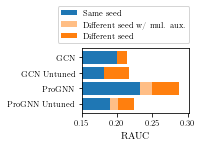

In [49]:
plt.figure(figsize=figsize(scale=0.35))
labels, slugs = ["GCN", "GCN Untuned", "ProGNN", "ProGNN Untuned"][::-1], ["gcn_2", "gcn_1", "pro_gnn_tuned", "pro_gnn_faith"][::-1]
xs1 = np.array([rss_breakage[slug, False, True] for slug in slugs])
xs2 = np.array([rss_breakage[slug, True, False] if "pro_gnn" in slug else np.nan for slug in slugs])
xs3 = np.array([rss_breakage[slug, False, False] for slug in slugs])
plt.barh(labels, xs1, label="Same seed")
plt.barh(labels, xs2 - xs1, left=xs1, label="Different seed w/ mul. aux.", alpha=0.5)
left = np.where(np.isnan(xs2), xs1, xs2)
plt.barh(labels, xs3 - left, left=left, label="Different seed", color="C1")
plt.xlim(left=0.15)
plt.xlabel("RAUC")
plt.legend(loc="lower center", bbox_to_anchor=(0.39, 1.02))
plt.savefig(f"{plots_path}/random_seed_sensitivity.pdf", bbox_inches="tight", pad_inches=0.01)

## Shared Preference/Easiness Code

In [50]:
def plot_preferences(preferences, is_global, file_prefix):
    for dataset, (used_budgets, prefs_mean, prefs_std) in preferences.items():
        plt.figure(figsize=figsize(scale=0.3, ratio_yx=1))
        plt.stackplot(100 * used_budgets, prefs_mean)
        acc = 0
        for prefs_mean_for_deg, prefs_std_for_deg in zip(prefs_mean[:-1], prefs_std[:-1]):
            acc = prefs_mean_for_deg + acc
            plt.plot(100 * used_budgets, acc - prefs_std_for_deg, color="black", alpha=0.5, lw=1, ls=(0, (1, 4)))
            plt.plot(100 * used_budgets, acc + prefs_std_for_deg, color="black", alpha=0.5, lw=1, ls=(0, (1, 4)))
        plt.xlim(0, 100 * max(used_budgets))
        plt.ylim(0, 1)
        if is_global:
            plt.xlabel(r"Rel.\ budget $\frac{\Delta}{m}$ (\%)")
        else:
            plt.xlabel(r"Rel.\ budget $\frac{\Delta}{\text{degree}}$ (\%)")
        if dataset == "cora":
            plt.ylabel(r"$P(\text{degree} \mid \text{misclass.})$")
        else:
            plt.yticks([])
        plt.savefig(f"{plots_path}/{file_prefix}_{dataset}.pdf", bbox_inches="tight", pad_inches=0.01)

## Global Degree Preference

In [51]:
global_degree_preferences = {'citeseer': (np.array([0, 0.0035442, 0.0040894, 0.0046347, 0.0049073, 0.0051799, 0.0054526, 0.0057252, 0.0059978, 0.0062704, 0.0065431, 0.0068157, 0.0070883, 0.007361, 0.01145, 0.011996, 0.012268, 0.012541, 0.012814, 0.013086, 0.013359, 0.013631, 0.013904, 0.014177, 0.014449, 0.014722, 0.014995, 0.016358, 0.016903, 0.017721, 0.017993, 0.018811, 0.019084, 0.019357, 0.019629, 0.019902, 0.020174, 0.020447, 0.02072, 0.020992, 0.021265, 0.021538, 0.02181, 0.022083, 0.022356, 0.025627, 0.0259, 0.026172, 0.026445, 0.026718, 0.02699, 0.027263, 0.027535, 0.027808, 0.028081, 0.028353, 0.028626, 0.028899, 0.029171, 0.029444, 0.029716, 0.029989, 0.030262, 0.031897, 0.032988, 0.033261, 0.033533, 0.033806, 0.034079, 0.034351, 0.034624, 0.034896, 0.035169, 0.035442, 0.035714, 0.035987, 0.03626, 0.036532, 0.036805, 0.037077, 0.03735, 0.038168, 0.038986, 0.039258, 0.040076, 0.040894, 0.041167, 0.041439, 0.041712, 0.041985, 0.042257, 0.04253, 0.042803, 0.043075, 0.043348, 0.043621, 0.043893, 0.044166, 0.044438, 0.044711, 0.044984, 0.045802, 0.046619, 0.047165, 0.04771, 0.048255, 0.048528, 0.0488, 0.049073, 0.049346, 0.049618, 0.049891, 0.050164, 0.050436, 0.050709, 0.050981, 0.051254, 0.051527, 0.051799, 0.052072, 0.052345, 0.052617, 0.05289, 0.053435, 0.05398, 0.054526, 0.055071, 0.055344, 0.055616, 0.055889, 0.056161, 0.056434, 0.056707, 0.056979, 0.057252, 0.057525, 0.057797, 0.05807, 0.058342, 0.058615, 0.058888, 0.05916, 0.059433, 0.059706, 0.059978, 0.060251, 0.060523, 0.060796, 0.061069, 0.061341, 0.061887, 0.062159, 0.062432, 0.062704, 0.062977, 0.063522, 0.063795, 0.06434, 0.064613, 0.064885, 0.065158, 0.065431, 0.065703, 0.065976, 0.066249, 0.066521, 0.066794, 0.067067, 0.067339, 0.067612, 0.067884, 0.068702, 0.068975, 0.06952, 0.069793, 0.070065, 0.070338, 0.070611, 0.070883, 0.071156, 0.071429, 0.071701, 0.071974, 0.072246, 0.072519, 0.072792, 0.073064, 0.073337, 0.07361, 0.073882, 0.074155, 0.074427, 0.0747, 0.074973, 0.075518, 0.076063, 0.076609, 0.076881, 0.077154, 0.077426, 0.077699, 0.077972, 0.078244, 0.078517, 0.07879, 0.079062, 0.079335, 0.079607, 0.07988, 0.080153, 0.080425, 0.080698, 0.080971, 0.081243, 0.081516, 0.081788, 0.082061, 0.082334, 0.082606, 0.082879, 0.083152, 0.083697, 0.083969, 0.084242, 0.084515, 0.084787, 0.08506, 0.085333, 0.085605, 0.085878, 0.08615, 0.086423, 0.086696, 0.086968, 0.087241, 0.087514, 0.087786, 0.088059, 0.088332, 0.088604, 0.088877, 0.089149, 0.089422, 0.089695, 0.089967, 0.09024, 0.090513, 0.091058, 0.091876, 0.092148, 0.092421, 0.092694, 0.092966, 0.093239, 0.093511, 0.093784, 0.094057, 0.094329, 0.094602, 0.094875, 0.095147, 0.09542, 0.095692, 0.095965, 0.096238, 0.09651, 0.096783, 0.097056, 0.097328, 0.097601, 0.098146, 0.098419, 0.098691, 0.098964, 0.099237, 0.099509, 0.099782, 0.10005, 0.10033, 0.1006, 0.10087, 0.10115, 0.10142, 0.10169, 0.10196, 0.10224, 0.10251, 0.10278, 0.10305, 0.10333, 0.1036, 0.10387, 0.10414, 0.10442, 0.10469, 0.10496, 0.10523, 0.10578, 0.10605, 0.10632, 0.1066, 0.10687, 0.10714, 0.10742, 0.10769, 0.10823, 0.10851, 0.10878, 0.10905, 0.10932, 0.1096, 0.10987, 0.11014, 0.11041, 0.11069, 0.11096, 0.11123, 0.1115, 0.11178, 0.11205, 0.11232, 0.11287, 0.11314, 0.11341, 0.11369, 0.11423, 0.1145, 0.11478, 0.11505, 0.11532, 0.11559, 0.11587, 0.11614, 0.11641, 0.11668, 0.11696, 0.11723, 0.1175, 0.11778, 0.11805, 0.11832, 0.11859, 0.11887, 0.11914, 0.11941, 0.11968, 0.11996, 0.12023, 0.1205, 0.12105, 0.12132, 0.12159, 0.12186, 0.12214, 0.12241, 0.12296, 0.12323, 0.1235, 0.12377, 0.12405, 0.12432, 0.12459, 0.12486, 0.12514, 0.12541, 0.12568, 0.12595, 0.12623, 0.1265, 0.12677, 0.12704, 0.12732, 0.12814, 0.12868, 0.12895, 0.12923, 0.1295, 0.12977, 0.13004, 0.13032, 0.13059, 0.13086, 0.13113, 0.13141, 0.13168, 0.13195, 0.13222, 0.1325, 0.13277, 0.13304, 0.13332, 0.13359, 0.13386, 0.13413, 0.13441, 0.13468, 0.13495, 0.13522, 0.1355, 0.13577, 0.13631, 0.13686, 0.13713, 0.1374, 0.13768, 0.13795, 0.13822, 0.1385, 0.13877, 0.13904, 0.13931, 0.13959, 0.13986, 0.14013, 0.1404, 0.14068, 0.14095, 0.14122, 0.14149, 0.14177, 0.14204, 0.14231, 0.14286, 0.14313, 0.1434, 0.14368, 0.14422, 0.14477, 0.14504, 0.14531, 0.14558, 0.14586, 0.14613, 0.1464, 0.14667, 0.14695, 0.14722, 0.14749, 0.14776, 0.14804, 0.14831, 0.14858, 0.14885, 0.14913, 0.1494, 0.14967, 0.14995]), np.array([[0.1273, 0.12956, 0.12991, 0.13025, 0.13043, 0.1306, 0.13077, 0.13095, 0.13112, 0.13129, 0.13146, 0.13163, 0.13181, 0.13197, 0.1338, 0.13404, 0.13417, 0.13429, 0.13441, 0.13453, 0.13465, 0.13478, 0.1349, 0.13502, 0.13514, 0.13525, 0.13537, 0.13585, 0.13604, 0.13634, 0.13643, 0.13673, 0.13682, 0.13692, 0.13702, 0.13711, 0.13721, 0.13731, 0.1374, 0.1375, 0.1376, 0.13769, 0.13779, 0.13789, 0.13799, 0.13897, 0.13905, 0.13913, 0.13921, 0.13929, 0.13937, 0.13945, 0.13953, 0.13961, 0.1397, 0.13978, 0.13986, 0.13994, 0.14002, 0.1401, 0.14018, 0.14026, 0.14033, 0.14077, 0.14106, 0.14113, 0.1412, 0.14128, 0.14135, 0.14142, 0.14149, 0.14157, 0.14164, 0.14171, 0.14178, 0.14185, 0.14192, 0.14199, 0.14206, 0.14213, 0.1422, 0.14234, 0.14248, 0.14253, 0.14267, 0.14281, 0.14286, 0.14291, 0.14296, 0.143, 0.14305, 0.1431, 0.14315, 0.1432, 0.14325, 0.1433, 0.14335, 0.14339, 0.14344, 0.14349, 0.14354, 0.14365, 0.14377, 0.14385, 0.14393, 0.14401, 0.14404, 0.14408, 0.14412, 0.14416, 0.1442, 0.14424, 0.14428, 0.14432, 0.14436, 0.1444, 0.14444, 0.14447, 0.14451, 0.14455, 0.14459, 0.14463, 0.14467, 0.14475, 0.14482, 0.1449, 0.14498, 0.14502, 0.14506, 0.1451, 0.14514, 0.14518, 0.14522, 0.14526, 0.1453, 0.14534, 0.14538, 0.14542, 0.14546, 0.1455, 0.14554, 0.14559, 0.14562, 0.14566, 0.14571, 0.14574, 0.14577, 0.1458, 0.14583, 0.14587, 0.14593, 0.14596, 0.14599, 0.14603, 0.14606, 0.14612, 0.14616, 0.14622, 0.14625, 0.14629, 0.14632, 0.14635, 0.14638, 0.14641, 0.14645, 0.14648, 0.14652, 0.14656, 0.1466, 0.14663, 0.14667, 0.14677, 0.14681, 0.14688, 0.14691, 0.14695, 0.14698, 0.14702, 0.14705, 0.14709, 0.14712, 0.14716, 0.14719, 0.14723, 0.14727, 0.1473, 0.14734, 0.14738, 0.14741, 0.14745, 0.14749, 0.14754, 0.14758, 0.14762, 0.14768, 0.14775, 0.14781, 0.14784, 0.14788, 0.14791, 0.14794, 0.14797, 0.148, 0.14803, 0.14806, 0.14808, 0.14811, 0.14814, 0.14817, 0.1482, 0.14823, 0.14826, 0.14829, 0.14832, 0.14835, 0.14838, 0.1484, 0.14842, 0.14844, 0.14846, 0.14848, 0.14852, 0.14854, 0.14856, 0.14858, 0.1486, 0.14862, 0.14864, 0.14866, 0.14868, 0.1487, 0.14872, 0.14874, 0.14876, 0.14878, 0.1488, 0.14883, 0.14885, 0.14887, 0.1489, 0.14892, 0.14894, 0.14896, 0.14897, 0.14899, 0.14901, 0.14902, 0.14905, 0.1491, 0.14911, 0.14913, 0.14914, 0.14916, 0.14918, 0.1492, 0.14922, 0.14924, 0.14926, 0.14928, 0.14931, 0.14933, 0.14935, 0.14938, 0.1494, 0.14944, 0.14947, 0.1495, 0.14953, 0.14956, 0.14958, 0.14963, 0.14966, 0.14968, 0.14971, 0.14973, 0.14976, 0.14978, 0.14981, 0.14983, 0.14986, 0.14989, 0.14992, 0.14994, 0.14997, 0.15, 0.15002, 0.15004, 0.15007, 0.15009, 0.15012, 0.15014, 0.15017, 0.15018, 0.1502, 0.15022, 0.15023, 0.15024, 0.15026, 0.15027, 0.15028, 0.15029, 0.1503, 0.15031, 0.15032, 0.15033, 0.15035, 0.15036, 0.15038, 0.15039, 0.1504, 0.15041, 0.15043, 0.15044, 0.15045, 0.15046, 0.15048, 0.15049, 0.1505, 0.15051, 0.15052, 0.15052, 0.15055, 0.15057, 0.15058, 0.1506, 0.15063, 0.15065, 0.15067, 0.15068, 0.1507, 0.15072, 0.15074, 0.15076, 0.15077, 0.15079, 0.1508, 0.15082, 0.15083, 0.15085, 0.15086, 0.15087, 0.15088, 0.1509, 0.15093, 0.15094, 0.15097, 0.15098, 0.151, 0.15101, 0.15103, 0.15105, 0.15106, 0.15107, 0.15108, 0.1511, 0.15112, 0.15113, 0.15114, 0.15116, 0.15117, 0.15119, 0.1512, 0.15121, 0.15123, 0.15124, 0.15125, 0.15127, 0.15128, 0.1513, 0.15131, 0.15132, 0.15134, 0.15136, 0.15137, 0.15138, 0.15138, 0.15139, 0.1514, 0.15141, 0.15141, 0.15142, 0.15143, 0.15143, 0.15144, 0.15145, 0.15145, 0.15146, 0.15147, 0.15148, 0.15149, 0.15151, 0.15153, 0.15155, 0.15156, 0.15157, 0.15159, 0.1516, 0.15162, 0.15164, 0.15166, 0.1517, 0.15173, 0.15175, 0.15177, 0.15179, 0.15181, 0.15183, 0.15185, 0.15187, 0.15189, 0.15191, 0.15193, 0.15195, 0.15197, 0.15199, 0.15201, 0.15203, 0.15206, 0.15208, 0.15209, 0.1521, 0.15211, 0.15214, 0.15215, 0.15216, 0.15218, 0.1522, 0.15223, 0.15224, 0.15225, 0.15226, 0.15228, 0.15229, 0.1523, 0.15232, 0.15233, 0.15234, 0.15236, 0.15237, 0.15238, 0.15239, 0.15241, 0.15242, 0.15243, 0.15245, 0.15246, 0.15248], [0.12214, 0.12267, 0.12275, 0.12283, 0.12288, 0.12291, 0.12295, 0.12299, 0.12303, 0.12307, 0.12311, 0.12315, 0.12319, 0.12323, 0.12359, 0.12364, 0.12366, 0.12369, 0.12371, 0.12374, 0.12376, 0.12379, 0.12381, 0.12384, 0.12386, 0.12389, 0.12391, 0.12404, 0.12409, 0.12416, 0.12419, 0.12426, 0.12429, 0.12431, 0.12434, 0.12436, 0.12438, 0.12441, 0.12443, 0.12446, 0.12448, 0.1245, 0.12453, 0.12456, 0.12458, 0.1249, 0.12492, 0.12495, 0.12497, 0.125, 0.12502, 0.12505, 0.12508, 0.1251, 0.12513, 0.12516, 0.12518, 0.12521, 0.12524, 0.12526, 0.12528, 0.12531, 0.12533, 0.12546, 0.12554, 0.12556, 0.12558, 0.1256, 0.12562, 0.12564, 0.12566, 0.12568, 0.1257, 0.12572, 0.12573, 0.12575, 0.12577, 0.12579, 0.12581, 0.12583, 0.12585, 0.12591, 0.12597, 0.12599, 0.12605, 0.12611, 0.12613, 0.12615, 0.12617, 0.12619, 0.12621, 0.12623, 0.12625, 0.12627, 0.1263, 0.12632, 0.12633, 0.12635, 0.12637, 0.12639, 0.12641, 0.12645, 0.1265, 0.12653, 0.12656, 0.12659, 0.1266, 0.12661, 0.12663, 0.12664, 0.12666, 0.12667, 0.12669, 0.1267, 0.12671, 0.12673, 0.12674, 0.12676, 0.12678, 0.12679, 0.12681, 0.12683, 0.12685, 0.12689, 0.12693, 0.12697, 0.12701, 0.12703, 0.12705, 0.12707, 0.12709, 0.12711, 0.12713, 0.12715, 0.12717, 0.12719, 0.12721, 0.12723, 0.12725, 0.12727, 0.12729, 0.12731, 0.12733, 0.12734, 0.12736, 0.12738, 0.12741, 0.12743, 0.12745, 0.12747, 0.12752, 0.12754, 0.12756, 0.12758, 0.12761, 0.12765, 0.12767, 0.12772, 0.12774, 0.12776, 0.12779, 0.12781, 0.12783, 0.12785, 0.12788, 0.1279, 0.12792, 0.12794, 0.12796, 0.12798, 0.128, 0.12805, 0.12806, 0.1281, 0.12811, 0.12813, 0.12815, 0.12816, 0.12818, 0.12819, 0.12821, 0.12823, 0.12824, 0.12826, 0.12828, 0.1283, 0.12831, 0.12833, 0.12835, 0.12838, 0.1284, 0.12841, 0.12843, 0.12845, 0.12847, 0.12849, 0.12851, 0.12851, 0.12852, 0.12853, 0.12854, 0.12855, 0.12855, 0.12856, 0.12857, 0.12858, 0.12858, 0.12859, 0.1286, 0.12862, 0.12863, 0.12864, 0.12865, 0.12866, 0.12867, 0.12868, 0.12868, 0.12869, 0.1287, 0.12871, 0.12872, 0.12874, 0.12874, 0.12875, 0.12876, 0.12877, 0.12877, 0.12878, 0.12879, 0.1288, 0.12881, 0.12882, 0.12883, 0.12884, 0.12885, 0.12886, 0.12887, 0.12888, 0.12889, 0.1289, 0.12891, 0.12891, 0.12892, 0.12893, 0.12894, 0.12895, 0.12896, 0.12898, 0.12901, 0.12902, 0.12903, 0.12904, 0.12905, 0.12907, 0.12908, 0.1291, 0.12911, 0.12912, 0.12914, 0.12915, 0.12916, 0.12918, 0.12919, 0.12921, 0.12922, 0.12924, 0.12926, 0.12928, 0.1293, 0.1293, 0.12932, 0.12933, 0.12934, 0.12935, 0.12936, 0.12937, 0.12938, 0.12939, 0.1294, 0.1294, 0.12941, 0.12942, 0.12943, 0.12944, 0.12945, 0.12946, 0.12946, 0.12947, 0.12948, 0.12949, 0.1295, 0.12951, 0.12952, 0.12953, 0.12954, 0.12955, 0.12956, 0.12957, 0.12958, 0.12959, 0.1296, 0.1296, 0.12961, 0.12962, 0.12963, 0.12964, 0.12965, 0.12965, 0.12966, 0.12967, 0.12967, 0.12968, 0.12968, 0.12969, 0.12969, 0.1297, 0.1297, 0.1297, 0.1297, 0.1297, 0.1297, 0.1297, 0.1297, 0.1297, 0.1297, 0.12971, 0.12971, 0.12972, 0.12972, 0.12972, 0.12973, 0.12975, 0.12975, 0.12976, 0.12976, 0.12977, 0.12977, 0.12978, 0.12977, 0.12977, 0.12977, 0.12978, 0.12979, 0.12979, 0.1298, 0.12981, 0.12981, 0.12982, 0.12982, 0.12984, 0.12985, 0.12986, 0.12987, 0.12988, 0.1299, 0.12992, 0.12993, 0.12994, 0.12995, 0.12996, 0.12997, 0.12998, 0.12999, 0.13, 0.13001, 0.13002, 0.13003, 0.13004, 0.13005, 0.13006, 0.13007, 0.13008, 0.1301, 0.13012, 0.13012, 0.13013, 0.13014, 0.13015, 0.13016, 0.13017, 0.13017, 0.13018, 0.13019, 0.1302, 0.13021, 0.13021, 0.13022, 0.13023, 0.13025, 0.13026, 0.13027, 0.13029, 0.1303, 0.13031, 0.13032, 0.13034, 0.13035, 0.13036, 0.13037, 0.13038, 0.13041, 0.13043, 0.13044, 0.13045, 0.13046, 0.13047, 0.13048, 0.13049, 0.1305, 0.13051, 0.13052, 0.13053, 0.13055, 0.13056, 0.13056, 0.13057, 0.13059, 0.1306, 0.13061, 0.13062, 0.13062, 0.13063, 0.13064, 0.13065, 0.13065, 0.13066, 0.13068, 0.1307, 0.13071, 0.13071, 0.13072, 0.13073, 0.13074, 0.13075, 0.13076, 0.13076, 0.13077, 0.13078, 0.13078, 0.13079, 0.1308, 0.1308, 0.13081, 0.13082, 0.13083, 0.13083, 0.13084], [0.12207, 0.12204, 0.12204, 0.12204, 0.12203, 0.12203, 0.12203, 0.12203, 0.12203, 0.12202, 0.12202, 0.12202, 0.12201, 0.12201, 0.12195, 0.12194, 0.12193, 0.12193, 0.12193, 0.12192, 0.12192, 0.12191, 0.12191, 0.1219, 0.1219, 0.1219, 0.12189, 0.12186, 0.12185, 0.12184, 0.12183, 0.12182, 0.12181, 0.12181, 0.1218, 0.1218, 0.12179, 0.12178, 0.12178, 0.12177, 0.12177, 0.12176, 0.12175, 0.12175, 0.12175, 0.12174, 0.12174, 0.12174, 0.12174, 0.12174, 0.12174, 0.12174, 0.12174, 0.12173, 0.12173, 0.12173, 0.12173, 0.12173, 0.12173, 0.12172, 0.12172, 0.12173, 0.12173, 0.12175, 0.12176, 0.12176, 0.12177, 0.12177, 0.12178, 0.12178, 0.12178, 0.12178, 0.12179, 0.12179, 0.12179, 0.1218, 0.1218, 0.1218, 0.1218, 0.12181, 0.12181, 0.12181, 0.12182, 0.12183, 0.12184, 0.12184, 0.12185, 0.12185, 0.12185, 0.12186, 0.12186, 0.12186, 0.12186, 0.12187, 0.12187, 0.12187, 0.12187, 0.12187, 0.12187, 0.12187, 0.12188, 0.12186, 0.12185, 0.12184, 0.12183, 0.12182, 0.12181, 0.12181, 0.1218, 0.1218, 0.12179, 0.12179, 0.12178, 0.12178, 0.12178, 0.12177, 0.12177, 0.12177, 0.12176, 0.12176, 0.12176, 0.12176, 0.12176, 0.12177, 0.12178, 0.12178, 0.12178, 0.12179, 0.12179, 0.12179, 0.12179, 0.12179, 0.1218, 0.1218, 0.1218, 0.1218, 0.12181, 0.12181, 0.12181, 0.12181, 0.12182, 0.12182, 0.12183, 0.12183, 0.12184, 0.12184, 0.12185, 0.12185, 0.12185, 0.12186, 0.12186, 0.12187, 0.12187, 0.12187, 0.12187, 0.12188, 0.12188, 0.12189, 0.12189, 0.1219, 0.1219, 0.12191, 0.12192, 0.12193, 0.12193, 0.12194, 0.12195, 0.12196, 0.12196, 0.12197, 0.12197, 0.12198, 0.12199, 0.12199, 0.122, 0.122, 0.12201, 0.12201, 0.12201, 0.12202, 0.12203, 0.12203, 0.12204, 0.12204, 0.12205, 0.12205, 0.12206, 0.12206, 0.12207, 0.12208, 0.12208, 0.12209, 0.12209, 0.12209, 0.12208, 0.12207, 0.12205, 0.12205, 0.12204, 0.12204, 0.12203, 0.12203, 0.12202, 0.12201, 0.12201, 0.122, 0.12199, 0.12199, 0.12198, 0.12198, 0.12197, 0.12197, 0.12196, 0.12196, 0.12196, 0.12195, 0.12195, 0.12195, 0.12195, 0.12195, 0.12196, 0.12196, 0.12197, 0.12197, 0.12197, 0.12198, 0.12198, 0.12198, 0.12199, 0.12199, 0.12199, 0.122, 0.122, 0.12201, 0.12202, 0.12202, 0.12203, 0.12204, 0.12205, 0.12205, 0.12205, 0.12206, 0.12206, 0.12206, 0.12206, 0.12206, 0.12206, 0.12206, 0.12207, 0.12207, 0.12207, 0.12207, 0.12207, 0.12207, 0.12208, 0.12208, 0.12208, 0.12209, 0.12209, 0.12209, 0.1221, 0.1221, 0.12211, 0.12211, 0.12212, 0.12212, 0.12212, 0.12213, 0.12213, 0.12214, 0.12214, 0.12214, 0.12215, 0.12215, 0.12216, 0.12216, 0.12216, 0.12217, 0.12217, 0.12217, 0.12218, 0.12219, 0.12219, 0.1222, 0.1222, 0.1222, 0.1222, 0.12221, 0.12222, 0.12222, 0.12223, 0.12224, 0.12224, 0.12225, 0.12225, 0.12224, 0.12223, 0.12221, 0.1222, 0.12219, 0.12219, 0.12218, 0.12217, 0.12216, 0.12216, 0.12214, 0.12214, 0.12213, 0.12213, 0.12212, 0.12211, 0.12211, 0.1221, 0.1221, 0.1221, 0.1221, 0.1221, 0.1221, 0.12209, 0.12209, 0.12208, 0.12208, 0.12208, 0.12208, 0.12208, 0.12208, 0.12208, 0.12208, 0.12208, 0.12208, 0.12209, 0.12209, 0.12209, 0.12209, 0.1221, 0.1221, 0.1221, 0.1221, 0.1221, 0.1221, 0.12209, 0.12209, 0.1221, 0.1221, 0.1221, 0.1221, 0.12211, 0.12212, 0.12212, 0.12213, 0.12214, 0.12214, 0.12215, 0.12215, 0.12216, 0.12216, 0.12217, 0.12217, 0.12218, 0.12218, 0.12219, 0.12219, 0.12219, 0.1222, 0.1222, 0.12221, 0.12221, 0.12222, 0.12222, 0.12223, 0.12223, 0.12224, 0.12226, 0.12228, 0.12229, 0.1223, 0.12231, 0.12231, 0.12232, 0.12233, 0.12234, 0.12235, 0.12236, 0.12237, 0.12238, 0.12239, 0.1224, 0.12241, 0.12242, 0.12243, 0.12243, 0.12244, 0.12244, 0.12245, 0.12245, 0.12244, 0.12244, 0.12242, 0.12241, 0.12241, 0.12239, 0.12236, 0.12235, 0.12234, 0.12233, 0.12232, 0.12231, 0.12231, 0.1223, 0.12229, 0.12228, 0.12228, 0.12227, 0.12227, 0.12226, 0.12225, 0.12224, 0.12224, 0.12224, 0.12223, 0.12223, 0.12224, 0.12225, 0.12226, 0.12226, 0.12227, 0.12229, 0.1223, 0.12231, 0.12232, 0.12232, 0.12233, 0.12234, 0.12235, 0.12236, 0.12236, 0.12237, 0.12238, 0.12239, 0.12239, 0.1224, 0.12241, 0.12242, 0.12242, 0.12243, 0.12243, 0.12244], [0.09723, 0.097322, 0.097336, 0.09735, 0.097357, 0.097364, 0.097372, 0.097379, 0.097386, 0.097392, 0.097398, 0.097403, 0.097408, 0.097413, 0.097446, 0.09745, 0.097453, 0.097456, 0.09746, 0.097464, 0.097469, 0.097473, 0.097478, 0.097482, 0.097485, 0.097487, 0.097489, 0.097483, 0.09748, 0.097475, 0.097473, 0.097469, 0.097468, 0.097467, 0.097466, 0.097464, 0.097463, 0.09746, 0.097458, 0.097455, 0.09745, 0.097444, 0.097438, 0.097433, 0.097431, 0.097362, 0.097358, 0.097353, 0.097349, 0.097344, 0.097339, 0.097334, 0.09733, 0.097325, 0.097319, 0.097316, 0.097313, 0.097311, 0.097309, 0.097309, 0.097306, 0.097304, 0.097305, 0.097312, 0.097315, 0.097316, 0.097317, 0.097318, 0.097319, 0.097319, 0.09732, 0.097321, 0.097322, 0.097323, 0.097324, 0.097324, 0.097325, 0.097327, 0.097329, 0.09733, 0.097333, 0.097347, 0.097361, 0.097366, 0.097381, 0.097399, 0.097405, 0.097411, 0.097417, 0.097423, 0.097429, 0.097435, 0.097441, 0.097447, 0.097453, 0.097457, 0.097461, 0.097467, 0.097472, 0.097475, 0.097479, 0.097493, 0.097506, 0.097515, 0.097524, 0.097534, 0.097539, 0.097544, 0.097549, 0.097554, 0.097559, 0.097565, 0.097571, 0.097577, 0.097583, 0.097588, 0.097591, 0.097595, 0.097597, 0.097601, 0.097603, 0.097605, 0.097609, 0.097615, 0.097622, 0.09763, 0.097637, 0.09764, 0.097643, 0.097646, 0.097648, 0.09765, 0.097652, 0.097652, 0.097651, 0.097649, 0.097648, 0.097647, 0.097647, 0.097646, 0.097645, 0.097644, 0.097643, 0.097642, 0.097643, 0.097648, 0.097653, 0.097657, 0.097661, 0.097665, 0.097672, 0.097676, 0.097679, 0.097682, 0.097685, 0.097693, 0.097698, 0.097706, 0.097711, 0.097716, 0.097719, 0.097722, 0.097726, 0.09773, 0.097733, 0.097737, 0.097741, 0.097744, 0.097742, 0.097746, 0.097749, 0.097757, 0.09776, 0.097766, 0.097769, 0.097771, 0.097773, 0.097775, 0.097777, 0.097778, 0.09778, 0.097781, 0.097781, 0.09778, 0.09778, 0.097779, 0.09778, 0.097781, 0.097783, 0.097778, 0.097781, 0.097782, 0.097784, 0.097786, 0.097794, 0.097801, 0.097808, 0.097812, 0.097816, 0.09782, 0.097823, 0.097828, 0.097832, 0.097837, 0.097843, 0.097853, 0.097859, 0.097864, 0.09787, 0.097878, 0.097886, 0.097895, 0.097905, 0.097914, 0.09792, 0.097925, 0.097929, 0.09793, 0.097932, 0.097934, 0.097936, 0.097941, 0.097942, 0.097943, 0.097945, 0.097946, 0.097946, 0.097947, 0.097948, 0.097949, 0.097951, 0.097953, 0.097954, 0.097954, 0.097957, 0.097958, 0.097959, 0.09796, 0.097962, 0.097963, 0.097967, 0.097971, 0.09797, 0.097974, 0.097987, 0.097986, 0.097984, 0.097981, 0.097978, 0.097977, 0.097975, 0.097975, 0.097975, 0.097977, 0.097979, 0.097981, 0.097983, 0.097986, 0.097983, 0.097988, 0.097992, 0.097997, 0.098003, 0.098007, 0.098012, 0.098021, 0.098032, 0.098042, 0.098047, 0.098053, 0.098069, 0.098076, 0.098083, 0.09809, 0.098097, 0.098103, 0.098109, 0.098115, 0.09812, 0.098127, 0.098132, 0.098137, 0.098141, 0.098145, 0.098148, 0.098146, 0.098142, 0.098141, 0.098138, 0.098135, 0.098133, 0.098131, 0.098134, 0.098131, 0.098129, 0.098128, 0.098122, 0.098111, 0.098108, 0.098104, 0.098101, 0.098098, 0.098095, 0.098095, 0.098094, 0.098094, 0.098094, 0.098092, 0.09809, 0.098087, 0.098085, 0.098084, 0.098084, 0.098085, 0.098086, 0.098088, 0.098089, 0.098088, 0.098085, 0.098088, 0.098085, 0.098081, 0.098079, 0.098078, 0.098077, 0.098075, 0.098075, 0.098074, 0.098073, 0.098073, 0.098075, 0.09807, 0.098072, 0.098073, 0.098077, 0.09808, 0.098085, 0.098089, 0.098093, 0.0981, 0.098111, 0.098123, 0.09814, 0.098161, 0.098168, 0.098195, 0.09821, 0.098219, 0.098229, 0.098248, 0.098257, 0.098265, 0.098274, 0.098298, 0.098307, 0.098324, 0.098332, 0.098339, 0.098347, 0.098355, 0.098363, 0.098371, 0.09838, 0.098388, 0.098392, 0.098397, 0.098402, 0.098407, 0.098412, 0.098414, 0.098417, 0.098418, 0.098431, 0.098438, 0.098442, 0.098445, 0.098449, 0.098453, 0.098457, 0.09846, 0.098465, 0.098468, 0.098471, 0.098475, 0.098478, 0.098481, 0.098485, 0.09849, 0.098494, 0.098498, 0.098499, 0.098505, 0.098508, 0.098512, 0.098516, 0.098518, 0.098521, 0.098526, 0.09853, 0.098536, 0.098544, 0.098552, 0.098557, 0.098561, 0.098565, 0.098569, 0.098574, 0.098578, 0.098583, 0.098589, 0.098595, 0.098602, 0.098621, 0.098628, 0.098634, 0.098641, 0.098649, 0.09866, 0.098663, 0.098666, 0.098668, 0.098672, 0.098671, 0.098671, 0.098674, 0.098677, 0.098683, 0.098691, 0.098696, 0.0987, 0.098704, 0.098708, 0.098712, 0.098716, 0.098719, 0.098723, 0.098727, 0.09873, 0.098733, 0.098735, 0.098737, 0.09874, 0.098744, 0.098748, 0.09875, 0.098753, 0.098755], [0.084379, 0.084389, 0.084391, 0.084393, 0.084393, 0.084393, 0.084393, 0.084392, 0.084392, 0.084393, 0.084393, 0.084394, 0.084394, 0.084393, 0.08428, 0.084265, 0.084257, 0.08425, 0.084242, 0.084235, 0.084228, 0.084222, 0.084217, 0.084211, 0.084207, 0.084204, 0.084198, 0.084181, 0.084176, 0.084169, 0.084167, 0.08416, 0.084158, 0.084155, 0.084153, 0.084151, 0.084149, 0.084147, 0.084145, 0.084142, 0.084139, 0.084137, 0.084132, 0.084127, 0.084122, 0.084199, 0.084206, 0.084214, 0.084222, 0.08423, 0.084237, 0.084243, 0.08425, 0.084256, 0.084262, 0.084266, 0.084271, 0.084275, 0.084281, 0.084287, 0.084294, 0.0843, 0.084297, 0.084276, 0.084267, 0.084266, 0.084264, 0.084263, 0.084262, 0.084262, 0.084264, 0.084265, 0.084266, 0.084268, 0.084269, 0.084271, 0.084271, 0.084271, 0.084269, 0.084267, 0.084265, 0.084282, 0.084297, 0.084302, 0.084318, 0.084334, 0.08434, 0.084346, 0.084353, 0.084359, 0.084366, 0.084373, 0.08438, 0.084386, 0.084392, 0.084401, 0.084411, 0.084421, 0.084429, 0.084435, 0.084442, 0.084452, 0.084463, 0.084469, 0.084477, 0.084484, 0.084488, 0.084491, 0.084495, 0.084498, 0.084499, 0.084501, 0.084502, 0.084504, 0.084508, 0.084512, 0.084513, 0.084514, 0.084515, 0.084516, 0.084517, 0.084514, 0.084513, 0.084512, 0.084513, 0.084515, 0.084516, 0.084517, 0.084518, 0.084519, 0.084521, 0.084523, 0.084525, 0.084527, 0.084529, 0.084527, 0.084525, 0.084523, 0.084525, 0.084526, 0.084529, 0.084533, 0.084542, 0.084543, 0.084544, 0.084544, 0.084546, 0.084547, 0.084548, 0.084548, 0.084546, 0.084546, 0.084546, 0.084545, 0.084545, 0.084545, 0.084546, 0.084544, 0.084543, 0.084538, 0.084534, 0.08453, 0.084526, 0.084524, 0.084521, 0.084516, 0.084512, 0.08451, 0.084513, 0.084512, 0.084511, 0.08451, 0.08451, 0.08451, 0.08451, 0.084511, 0.084513, 0.084514, 0.084516, 0.084517, 0.084519, 0.084521, 0.084524, 0.084528, 0.084532, 0.084533, 0.084532, 0.08453, 0.08453, 0.084525, 0.084521, 0.084515, 0.084505, 0.084495, 0.084498, 0.084504, 0.084508, 0.084511, 0.084513, 0.084516, 0.084519, 0.084523, 0.084526, 0.084531, 0.084537, 0.084543, 0.084547, 0.084553, 0.084558, 0.084562, 0.084569, 0.084573, 0.084579, 0.084584, 0.084591, 0.084599, 0.084607, 0.084615, 0.084623, 0.084627, 0.084632, 0.084641, 0.084646, 0.084652, 0.084657, 0.084664, 0.084671, 0.084677, 0.084684, 0.084691, 0.084698, 0.084704, 0.08471, 0.084717, 0.084723, 0.084728, 0.084732, 0.084735, 0.084738, 0.084742, 0.084747, 0.084757, 0.084765, 0.084777, 0.084782, 0.08479, 0.084798, 0.084816, 0.084836, 0.084842, 0.084849, 0.084856, 0.084864, 0.084872, 0.084879, 0.084887, 0.084895, 0.084902, 0.084904, 0.084911, 0.084918, 0.084925, 0.084935, 0.084944, 0.08495, 0.084954, 0.084958, 0.084961, 0.084965, 0.08496, 0.084964, 0.084967, 0.084971, 0.084972, 0.084973, 0.084974, 0.084975, 0.084975, 0.084976, 0.084976, 0.084976, 0.084977, 0.084977, 0.084976, 0.084977, 0.084978, 0.084982, 0.084983, 0.084986, 0.084989, 0.084988, 0.08499, 0.08499, 0.084985, 0.084981, 0.08498, 0.08498, 0.084983, 0.084982, 0.084981, 0.084982, 0.084981, 0.08498, 0.08498, 0.08498, 0.084979, 0.084977, 0.084976, 0.084976, 0.084975, 0.084973, 0.084972, 0.084973, 0.084971, 0.084971, 0.084968, 0.084966, 0.084968, 0.084974, 0.084968, 0.084968, 0.084989, 0.084999, 0.08501, 0.085022, 0.085042, 0.085052, 0.08506, 0.08507, 0.085078, 0.085087, 0.085092, 0.085101, 0.085109, 0.085116, 0.085124, 0.085133, 0.08514, 0.085144, 0.085151, 0.085159, 0.085164, 0.085173, 0.085182, 0.085191, 0.085188, 0.085194, 0.085196, 0.085199, 0.085217, 0.085226, 0.085235, 0.085245, 0.085252, 0.085262, 0.08528, 0.085289, 0.085297, 0.085303, 0.085312, 0.08532, 0.085328, 0.085334, 0.08534, 0.085342, 0.085344, 0.085346, 0.085349, 0.085343, 0.085348, 0.085353, 0.085354, 0.08536, 0.085362, 0.085363, 0.085367, 0.085369, 0.085373, 0.085375, 0.085377, 0.085378, 0.085379, 0.08538, 0.085381, 0.085382, 0.085383, 0.085384, 0.085382, 0.085382, 0.085383, 0.085385, 0.085386, 0.085388, 0.08539, 0.085391, 0.085389, 0.085387, 0.085389, 0.085391, 0.085387, 0.085392, 0.085396, 0.085398, 0.0854, 0.085402, 0.085405, 0.085407, 0.085409, 0.085409, 0.085411, 0.085412, 0.085413, 0.085414, 0.085414, 0.085416, 0.085415, 0.085414, 0.085413, 0.085415, 0.08542, 0.085429, 0.085444, 0.085466, 0.085478, 0.085487, 0.085497, 0.085516, 0.085536, 0.085547, 0.085558, 0.085568, 0.085577, 0.085584, 0.085591, 0.085598, 0.085605, 0.085611, 0.085617, 0.085624, 0.08563, 0.085636, 0.085641, 0.085646, 0.085652, 0.085656, 0.085656, 0.085657], [0.11387, 0.11334, 0.11326, 0.11318, 0.11315, 0.11311, 0.11307, 0.11303, 0.11299, 0.11295, 0.11291, 0.11288, 0.11284, 0.1128, 0.11247, 0.11242, 0.1124, 0.11238, 0.11236, 0.11234, 0.11231, 0.11229, 0.11227, 0.11225, 0.11222, 0.1122, 0.11217, 0.11203, 0.11198, 0.1119, 0.11188, 0.1118, 0.11178, 0.11175, 0.11173, 0.11171, 0.11168, 0.11166, 0.11163, 0.11161, 0.11158, 0.11156, 0.11153, 0.11151, 0.11148, 0.11118, 0.11115, 0.11113, 0.1111, 0.11108, 0.11105, 0.11103, 0.111, 0.11098, 0.11096, 0.11093, 0.11091, 0.11089, 0.11086, 0.11084, 0.11082, 0.11079, 0.11078, 0.11066, 0.11059, 0.11057, 0.11055, 0.11053, 0.11051, 0.11049, 0.11047, 0.11045, 0.11044, 0.11042, 0.1104, 0.11038, 0.11037, 0.11035, 0.11033, 0.11031, 0.1103, 0.11025, 0.1102, 0.11018, 0.11013, 0.11008, 0.11006, 0.11005, 0.11003, 0.11002, 0.11, 0.10998, 0.10996, 0.10995, 0.10993, 0.10991, 0.10989, 0.10987, 0.10985, 0.10983, 0.10982, 0.10979, 0.10976, 0.10974, 0.10972, 0.10971, 0.1097, 0.10969, 0.10968, 0.10967, 0.10966, 0.10965, 0.10964, 0.10963, 0.10961, 0.1096, 0.10959, 0.10959, 0.10958, 0.10957, 0.10956, 0.10955, 0.10954, 0.1095, 0.10947, 0.10944, 0.10941, 0.10939, 0.10938, 0.10936, 0.10934, 0.10933, 0.10931, 0.10929, 0.10928, 0.10926, 0.10925, 0.10923, 0.10921, 0.1092, 0.10918, 0.10916, 0.10913, 0.10911, 0.1091, 0.10908, 0.10907, 0.10906, 0.10905, 0.10904, 0.10902, 0.10901, 0.109, 0.10899, 0.10898, 0.10896, 0.10895, 0.10893, 0.10892, 0.10891, 0.10891, 0.1089, 0.10889, 0.10888, 0.10886, 0.10885, 0.10884, 0.10883, 0.10881, 0.1088, 0.10879, 0.10876, 0.10875, 0.10872, 0.10871, 0.10871, 0.1087, 0.10869, 0.10868, 0.10867, 0.10866, 0.10865, 0.10865, 0.10864, 0.10863, 0.10862, 0.10861, 0.1086, 0.10859, 0.10859, 0.10858, 0.10858, 0.10858, 0.10858, 0.10857, 0.10856, 0.10855, 0.10855, 0.10854, 0.10854, 0.10853, 0.10853, 0.10852, 0.10852, 0.10851, 0.10851, 0.1085, 0.1085, 0.10849, 0.10849, 0.10848, 0.10848, 0.10847, 0.10847, 0.10847, 0.10847, 0.10848, 0.10848, 0.10848, 0.10847, 0.10847, 0.10846, 0.10845, 0.10845, 0.10844, 0.10844, 0.10843, 0.10842, 0.10842, 0.10841, 0.1084, 0.10839, 0.10839, 0.10837, 0.10836, 0.10835, 0.10834, 0.10833, 0.10832, 0.1083, 0.10829, 0.10828, 0.10826, 0.10824, 0.10821, 0.1082, 0.10819, 0.10817, 0.10813, 0.10812, 0.10811, 0.10809, 0.10808, 0.10807, 0.10806, 0.10805, 0.10803, 0.10802, 0.10801, 0.10799, 0.10798, 0.10797, 0.10795, 0.10793, 0.10792, 0.10791, 0.1079, 0.10788, 0.10787, 0.10787, 0.10786, 0.10785, 0.10785, 0.10784, 0.10784, 0.10783, 0.10782, 0.10782, 0.10781, 0.10781, 0.1078, 0.10779, 0.10779, 0.10778, 0.10777, 0.10777, 0.10777, 0.10776, 0.10775, 0.10774, 0.10773, 0.10771, 0.10771, 0.10769, 0.10768, 0.10767, 0.10767, 0.10766, 0.10765, 0.10765, 0.10764, 0.10763, 0.10763, 0.10762, 0.10761, 0.1076, 0.10759, 0.10758, 0.10758, 0.10757, 0.10756, 0.10755, 0.10754, 0.10754, 0.10752, 0.10751, 0.1075, 0.10749, 0.10748, 0.10747, 0.10746, 0.10745, 0.10745, 0.10744, 0.10744, 0.10743, 0.10742, 0.10741, 0.10741, 0.1074, 0.10739, 0.10739, 0.10739, 0.10738, 0.10738, 0.10737, 0.10737, 0.10736, 0.10736, 0.10735, 0.10734, 0.10733, 0.10732, 0.10731, 0.1073, 0.10729, 0.10729, 0.10729, 0.10729, 0.10729, 0.1073, 0.1073, 0.10731, 0.10731, 0.10732, 0.10733, 0.10733, 0.10734, 0.10734, 0.10734, 0.10735, 0.10735, 0.10735, 0.10736, 0.10737, 0.10737, 0.10738, 0.10738, 0.10738, 0.10738, 0.10738, 0.10737, 0.10734, 0.10732, 0.10731, 0.1073, 0.10728, 0.10727, 0.10726, 0.10725, 0.10724, 0.10722, 0.10721, 0.1072, 0.10719, 0.10718, 0.10717, 0.10716, 0.10715, 0.10714, 0.10713, 0.10712, 0.10711, 0.1071, 0.10709, 0.10708, 0.10707, 0.10706, 0.10705, 0.10704, 0.10703, 0.10701, 0.107, 0.10699, 0.10698, 0.10698, 0.10697, 0.10696, 0.10695, 0.10694, 0.10693, 0.10691, 0.10691, 0.10689, 0.10688, 0.10687, 0.10686, 0.10685, 0.10683, 0.10682, 0.10681, 0.1068, 0.1068, 0.1068, 0.1068, 0.1068, 0.10679, 0.10679, 0.10679, 0.10679, 0.10678, 0.10678, 0.10678, 0.10678, 0.10678, 0.10678, 0.10677, 0.10677, 0.10677, 0.10676, 0.10676, 0.10676, 0.10676, 0.10675, 0.10675, 0.10675, 0.10674], [0.10128, 0.10063, 0.10053, 0.10044, 0.10039, 0.10034, 0.10029, 0.10024, 0.10019, 0.10014, 0.10009, 0.10004, 0.099994, 0.09995, 0.099451, 0.099386, 0.099353, 0.09932, 0.099287, 0.099253, 0.09922, 0.099185, 0.099149, 0.099115, 0.099082, 0.09905, 0.099023, 0.098888, 0.098834, 0.098751, 0.098723, 0.098637, 0.098609, 0.098581, 0.098554, 0.098525, 0.098498, 0.098471, 0.098445, 0.098418, 0.098391, 0.098365, 0.098339, 0.098312, 0.098286, 0.098085, 0.098068, 0.09805, 0.098033, 0.098017, 0.098001, 0.097986, 0.09797, 0.097955, 0.097939, 0.097924, 0.097908, 0.097893, 0.097877, 0.097861, 0.097841, 0.097822, 0.0978, 0.09767, 0.09758, 0.097558, 0.097535, 0.097512, 0.097489, 0.097465, 0.097443, 0.097421, 0.0974, 0.097378, 0.097356, 0.097334, 0.097312, 0.097291, 0.097271, 0.097253, 0.097234, 0.097155, 0.097077, 0.097051, 0.096974, 0.096897, 0.096872, 0.096847, 0.096821, 0.096794, 0.096768, 0.096742, 0.096716, 0.096691, 0.096666, 0.096641, 0.096616, 0.096591, 0.096566, 0.096541, 0.096519, 0.096486, 0.096451, 0.096427, 0.096402, 0.096378, 0.096366, 0.096355, 0.096343, 0.096332, 0.096323, 0.096312, 0.096302, 0.096291, 0.096279, 0.096267, 0.096257, 0.096251, 0.096244, 0.096233, 0.096222, 0.096216, 0.09621, 0.096198, 0.096185, 0.096173, 0.096159, 0.096153, 0.096149, 0.096144, 0.096139, 0.096134, 0.096129, 0.096123, 0.096115, 0.096109, 0.096101, 0.096094, 0.096088, 0.09608, 0.096074, 0.096066, 0.096055, 0.096048, 0.096037, 0.096019, 0.096, 0.095984, 0.095967, 0.095951, 0.09592, 0.095904, 0.095888, 0.09587, 0.095852, 0.095816, 0.095799, 0.095765, 0.09575, 0.095737, 0.095722, 0.095707, 0.095692, 0.095673, 0.095653, 0.095633, 0.09561, 0.095587, 0.095568, 0.095548, 0.095527, 0.095464, 0.095443, 0.095401, 0.095379, 0.095358, 0.095338, 0.095318, 0.095297, 0.095276, 0.095255, 0.095234, 0.095212, 0.095189, 0.095167, 0.095143, 0.095122, 0.095101, 0.095082, 0.09506, 0.095043, 0.095028, 0.095017, 0.095015, 0.09502, 0.095018, 0.095017, 0.095017, 0.095017, 0.095017, 0.095016, 0.095016, 0.095017, 0.095014, 0.095012, 0.09501, 0.095008, 0.095004, 0.094998, 0.094987, 0.094976, 0.094965, 0.094955, 0.094946, 0.094935, 0.094923, 0.094915, 0.094907, 0.094894, 0.094882, 0.09487, 0.094846, 0.094834, 0.094821, 0.094808, 0.094796, 0.094783, 0.09477, 0.094758, 0.094746, 0.094734, 0.094723, 0.094711, 0.094698, 0.094685, 0.094671, 0.094657, 0.094644, 0.094632, 0.094617, 0.0946, 0.094583, 0.094573, 0.094563, 0.094549, 0.094546, 0.094543, 0.094536, 0.094535, 0.094534, 0.094534, 0.094533, 0.094531, 0.09453, 0.094528, 0.094527, 0.094524, 0.094521, 0.094525, 0.094525, 0.094526, 0.094525, 0.094526, 0.094529, 0.094532, 0.094532, 0.094531, 0.094526, 0.094523, 0.094522, 0.094501, 0.09449, 0.094477, 0.094467, 0.094457, 0.094447, 0.094436, 0.094426, 0.094415, 0.094403, 0.094391, 0.094379, 0.094367, 0.094355, 0.094344, 0.094334, 0.094323, 0.094311, 0.0943, 0.094288, 0.094274, 0.094262, 0.09425, 0.094239, 0.094235, 0.094235, 0.094227, 0.094212, 0.094204, 0.094195, 0.094185, 0.094177, 0.09417, 0.094161, 0.094153, 0.094138, 0.09413, 0.094122, 0.094112, 0.094103, 0.094094, 0.094087, 0.094082, 0.094077, 0.094083, 0.094074, 0.094064, 0.094057, 0.094053, 0.094057, 0.094059, 0.094051, 0.094048, 0.094043, 0.094037, 0.094027, 0.094021, 0.094014, 0.094, 0.09399, 0.09398, 0.093966, 0.093956, 0.093946, 0.093934, 0.093922, 0.09391, 0.093898, 0.093891, 0.093874, 0.093859, 0.093844, 0.093824, 0.093802, 0.093789, 0.093763, 0.093753, 0.093747, 0.093742, 0.093717, 0.093704, 0.093692, 0.093679, 0.093663, 0.093649, 0.093623, 0.09361, 0.093595, 0.093579, 0.093564, 0.09355, 0.093536, 0.093525, 0.093512, 0.093496, 0.093483, 0.093472, 0.093461, 0.093452, 0.093448, 0.093444, 0.093435, 0.093432, 0.093429, 0.093428, 0.093426, 0.093425, 0.093424, 0.093424, 0.093423, 0.093424, 0.093423, 0.093423, 0.093424, 0.093423, 0.093423, 0.093422, 0.093419, 0.093418, 0.093416, 0.093412, 0.093399, 0.093393, 0.093389, 0.093386, 0.093389, 0.093387, 0.093379, 0.093371, 0.09337, 0.093347, 0.093333, 0.093326, 0.09332, 0.093314, 0.093307, 0.093301, 0.093293, 0.093285, 0.093276, 0.093267, 0.093258, 0.093248, 0.093239, 0.093232, 0.093223, 0.09321, 0.093191, 0.093192, 0.093184, 0.093177, 0.093165, 0.093156, 0.093152, 0.093145, 0.093138, 0.093123, 0.09311, 0.093104, 0.093098, 0.093093, 0.093087, 0.093082, 0.093076, 0.09307, 0.093064, 0.09306, 0.093055, 0.09305, 0.093045, 0.093041, 0.093037, 0.09303, 0.093022, 0.093015, 0.093009, 0.093001], [0.034573, 0.034663, 0.034677, 0.03469, 0.034696, 0.034702, 0.034708, 0.034715, 0.034722, 0.03473, 0.034738, 0.034746, 0.034755, 0.034761, 0.034739, 0.034736, 0.034734, 0.034732, 0.03473, 0.034727, 0.034725, 0.034722, 0.03472, 0.034718, 0.034714, 0.034712, 0.034708, 0.034722, 0.03473, 0.034741, 0.034745, 0.034756, 0.03476, 0.034763, 0.034766, 0.034769, 0.034773, 0.034777, 0.034782, 0.034788, 0.034796, 0.034805, 0.034815, 0.034822, 0.034823, 0.034802, 0.034801, 0.0348, 0.034799, 0.034798, 0.034797, 0.034797, 0.034797, 0.034796, 0.034796, 0.034793, 0.034789, 0.034784, 0.034778, 0.034772, 0.034764, 0.034757, 0.034759, 0.034769, 0.034771, 0.034772, 0.034772, 0.034773, 0.034773, 0.034775, 0.034776, 0.034778, 0.03478, 0.034783, 0.034784, 0.034786, 0.034787, 0.034786, 0.034788, 0.03479, 0.034792, 0.034788, 0.034785, 0.034784, 0.034783, 0.034779, 0.034779, 0.034778, 0.034777, 0.034776, 0.034776, 0.034775, 0.034775, 0.034774, 0.034775, 0.034775, 0.034777, 0.034782, 0.03479, 0.034801, 0.034812, 0.034863, 0.034917, 0.034952, 0.03499, 0.035028, 0.035047, 0.035067, 0.035086, 0.035106, 0.035127, 0.035147, 0.035167, 0.035185, 0.0352, 0.035215, 0.035229, 0.035239, 0.03525, 0.035257, 0.035261, 0.035258, 0.035254, 0.035244, 0.035231, 0.035218, 0.035206, 0.035199, 0.035194, 0.03519, 0.035185, 0.03518, 0.035174, 0.035169, 0.035169, 0.035173, 0.035177, 0.035181, 0.03518, 0.035177, 0.035177, 0.035178, 0.035182, 0.035184, 0.035188, 0.03519, 0.035193, 0.035198, 0.035203, 0.035207, 0.035216, 0.03522, 0.035224, 0.035228, 0.03523, 0.035236, 0.035238, 0.035242, 0.035245, 0.035247, 0.03525, 0.035252, 0.035252, 0.035252, 0.035252, 0.035251, 0.035255, 0.035262, 0.035259, 0.035265, 0.035272, 0.035293, 0.0353, 0.035315, 0.035323, 0.035327, 0.035332, 0.035336, 0.03534, 0.035343, 0.035348, 0.035352, 0.035357, 0.035361, 0.035364, 0.035364, 0.035367, 0.035367, 0.035367, 0.035358, 0.035356, 0.035353, 0.035348, 0.035342, 0.03535, 0.035357, 0.035363, 0.035366, 0.035369, 0.035372, 0.035376, 0.035378, 0.03538, 0.035382, 0.035385, 0.035388, 0.035389, 0.03539, 0.035392, 0.035391, 0.035391, 0.035392, 0.035392, 0.035395, 0.035399, 0.035404, 0.035401, 0.035411, 0.035423, 0.035437, 0.03545, 0.035472, 0.035483, 0.035494, 0.035505, 0.035517, 0.03553, 0.035544, 0.035557, 0.03557, 0.035583, 0.035594, 0.035604, 0.035614, 0.035622, 0.035632, 0.035644, 0.035657, 0.03567, 0.035681, 0.035694, 0.035705, 0.035712, 0.035716, 0.035711, 0.035705, 0.035698, 0.035687, 0.035677, 0.035674, 0.03567, 0.035665, 0.035661, 0.035654, 0.035648, 0.03564, 0.035632, 0.035622, 0.035617, 0.035602, 0.035588, 0.035575, 0.035563, 0.035546, 0.035527, 0.035507, 0.035488, 0.035478, 0.035465, 0.035471, 0.035477, 0.035481, 0.035481, 0.035485, 0.035489, 0.035494, 0.035497, 0.0355, 0.035502, 0.035505, 0.035508, 0.03551, 0.035512, 0.035516, 0.035521, 0.035529, 0.03554, 0.035551, 0.035565, 0.035577, 0.035591, 0.035603, 0.035612, 0.03563, 0.035643, 0.035658, 0.035669, 0.035693, 0.035704, 0.035712, 0.03572, 0.035726, 0.035731, 0.035736, 0.035742, 0.035755, 0.035761, 0.035766, 0.035772, 0.035779, 0.035787, 0.035797, 0.035805, 0.035812, 0.035812, 0.035821, 0.035832, 0.035845, 0.035859, 0.035869, 0.035883, 0.03591, 0.035924, 0.035937, 0.03595, 0.035973, 0.035984, 0.035996, 0.03601, 0.036022, 0.036034, 0.036049, 0.036055, 0.036065, 0.036074, 0.036084, 0.036099, 0.036115, 0.036124, 0.036142, 0.036157, 0.036169, 0.036173, 0.036165, 0.036177, 0.036198, 0.036208, 0.036204, 0.0362, 0.036192, 0.03619, 0.036187, 0.036183, 0.036173, 0.036169, 0.03616, 0.036155, 0.03615, 0.036143, 0.036136, 0.03613, 0.036125, 0.036121, 0.036118, 0.036114, 0.036116, 0.036118, 0.03612, 0.036133, 0.036134, 0.036137, 0.036149, 0.036188, 0.036215, 0.036228, 0.036239, 0.036249, 0.036261, 0.036273, 0.036282, 0.036291, 0.0363, 0.03631, 0.036319, 0.036328, 0.036336, 0.036348, 0.036356, 0.036361, 0.036369, 0.036382, 0.036394, 0.036408, 0.036417, 0.036426, 0.036435, 0.036441, 0.036444, 0.036448, 0.036449, 0.036464, 0.036472, 0.036477, 0.036481, 0.036483, 0.036486, 0.036488, 0.036491, 0.036493, 0.036495, 0.036499, 0.036502, 0.036494, 0.0365, 0.036503, 0.036506, 0.036505, 0.036497, 0.036491, 0.036488, 0.036488, 0.036492, 0.036471, 0.036457, 0.036445, 0.036433, 0.036408, 0.036384, 0.03637, 0.036358, 0.036346, 0.036332, 0.036318, 0.036304, 0.036291, 0.036279, 0.036267, 0.036258, 0.036249, 0.036239, 0.03623, 0.036219, 0.036208, 0.036198, 0.036187, 0.036177, 0.036166], [0.12679, 0.12568, 0.12551, 0.12534, 0.12525, 0.12517, 0.12508, 0.125, 0.12491, 0.12483, 0.12474, 0.12466, 0.12457, 0.12449, 0.1238, 0.12371, 0.12366, 0.12361, 0.12357, 0.12352, 0.12347, 0.12342, 0.12338, 0.12333, 0.12329, 0.12324, 0.12321, 0.12303, 0.12295, 0.12283, 0.12279, 0.12267, 0.12263, 0.12259, 0.12255, 0.12251, 0.12248, 0.12244, 0.1224, 0.12236, 0.12232, 0.12228, 0.12225, 0.12221, 0.12217, 0.12172, 0.12168, 0.12164, 0.1216, 0.12156, 0.12152, 0.12148, 0.12144, 0.1214, 0.12136, 0.12132, 0.12128, 0.12124, 0.12121, 0.12117, 0.12114, 0.1211, 0.12107, 0.12084, 0.1207, 0.12067, 0.12063, 0.1206, 0.12056, 0.12052, 0.12049, 0.12045, 0.12041, 0.12037, 0.12033, 0.1203, 0.12026, 0.12022, 0.12018, 0.12014, 0.12011, 0.12004, 0.11998, 0.11995, 0.11988, 0.11981, 0.11979, 0.11976, 0.11974, 0.11971, 0.11969, 0.11966, 0.11964, 0.11961, 0.11959, 0.11956, 0.11953, 0.11951, 0.11949, 0.11946, 0.11943, 0.11931, 0.1192, 0.11912, 0.11904, 0.11896, 0.11892, 0.11888, 0.11883, 0.11879, 0.11875, 0.11871, 0.11867, 0.11863, 0.11859, 0.11856, 0.11853, 0.11849, 0.11846, 0.11842, 0.11838, 0.11835, 0.11832, 0.11826, 0.1182, 0.11814, 0.11809, 0.11806, 0.11802, 0.11799, 0.11796, 0.11793, 0.1179, 0.11787, 0.11784, 0.1178, 0.11777, 0.11774, 0.11771, 0.11769, 0.11766, 0.11764, 0.11762, 0.1176, 0.11757, 0.11755, 0.11753, 0.11751, 0.11749, 0.11747, 0.11744, 0.11742, 0.1174, 0.11738, 0.11737, 0.11733, 0.11731, 0.11728, 0.11726, 0.11724, 0.11722, 0.1172, 0.11719, 0.11718, 0.11716, 0.11714, 0.11713, 0.11711, 0.11709, 0.11706, 0.11703, 0.11694, 0.11692, 0.11686, 0.11683, 0.1168, 0.11677, 0.11674, 0.11672, 0.11669, 0.11666, 0.11663, 0.1166, 0.11657, 0.11654, 0.11652, 0.11649, 0.11646, 0.11643, 0.11639, 0.11636, 0.11633, 0.1163, 0.11627, 0.11621, 0.11616, 0.11611, 0.11608, 0.11606, 0.11603, 0.11601, 0.11598, 0.11596, 0.11594, 0.11591, 0.11589, 0.11587, 0.11585, 0.11583, 0.11581, 0.11579, 0.11577, 0.11575, 0.11573, 0.11571, 0.11569, 0.11567, 0.11564, 0.11562, 0.11559, 0.11557, 0.11552, 0.1155, 0.11548, 0.11546, 0.11543, 0.11541, 0.11539, 0.11536, 0.11534, 0.11532, 0.11529, 0.11527, 0.11525, 0.11522, 0.1152, 0.11517, 0.11515, 0.11513, 0.1151, 0.11509, 0.11507, 0.11507, 0.11505, 0.11505, 0.11504, 0.11503, 0.11502, 0.11498, 0.11497, 0.11496, 0.11495, 0.11493, 0.11492, 0.1149, 0.11488, 0.11487, 0.11485, 0.11484, 0.11483, 0.11481, 0.11479, 0.11477, 0.11474, 0.11472, 0.1147, 0.11467, 0.11464, 0.11462, 0.11459, 0.11454, 0.11452, 0.11449, 0.11446, 0.11443, 0.11441, 0.11438, 0.11435, 0.11432, 0.11429, 0.11427, 0.11424, 0.11421, 0.11419, 0.11416, 0.11414, 0.11412, 0.11409, 0.11406, 0.11404, 0.11401, 0.11399, 0.11397, 0.11394, 0.11393, 0.11391, 0.11392, 0.11393, 0.11393, 0.11393, 0.11393, 0.11394, 0.11394, 0.11394, 0.11394, 0.11395, 0.11395, 0.11395, 0.11396, 0.11396, 0.11396, 0.11396, 0.11396, 0.11396, 0.11395, 0.11395, 0.11395, 0.11395, 0.11394, 0.11394, 0.11395, 0.1139, 0.11387, 0.11385, 0.11382, 0.11377, 0.11375, 0.11373, 0.11372, 0.11369, 0.11367, 0.11362, 0.1136, 0.11358, 0.11356, 0.11353, 0.11351, 0.11349, 0.11347, 0.11346, 0.11344, 0.11343, 0.11341, 0.1134, 0.11338, 0.11334, 0.1133, 0.11328, 0.11326, 0.11322, 0.1132, 0.11318, 0.11315, 0.11313, 0.11311, 0.11306, 0.11304, 0.11302, 0.11301, 0.113, 0.11298, 0.11297, 0.11295, 0.11294, 0.11292, 0.1129, 0.11289, 0.11287, 0.11285, 0.11283, 0.11281, 0.1128, 0.11275, 0.11271, 0.1127, 0.11268, 0.11266, 0.11264, 0.11262, 0.1126, 0.11258, 0.11256, 0.11254, 0.11253, 0.11251, 0.11249, 0.11247, 0.11245, 0.11243, 0.1124, 0.11238, 0.11235, 0.11233, 0.11231, 0.11228, 0.11226, 0.11224, 0.11224, 0.11223, 0.11223, 0.11222, 0.11221, 0.1122, 0.11219, 0.11218, 0.11217, 0.11216, 0.11216, 0.11215, 0.11214, 0.11214, 0.11213, 0.11211, 0.11211, 0.1121, 0.1121, 0.1121, 0.1121, 0.11211, 0.11211, 0.11211, 0.1121, 0.11209, 0.11209, 0.11208, 0.11207, 0.11206, 0.11204, 0.11204, 0.11203, 0.11202, 0.11201, 0.11201, 0.112, 0.112, 0.11199, 0.11198, 0.11198, 0.11197, 0.11197, 0.11196, 0.11195, 0.11195, 0.11194, 0.11194, 0.11193, 0.11193], [0.070372, 0.069694, 0.06959, 0.069486, 0.069434, 0.069383, 0.069332, 0.069281, 0.06923, 0.069179, 0.069128, 0.069078, 0.069027, 0.068978, 0.068476, 0.06841, 0.068376, 0.068342, 0.068308, 0.068273, 0.068239, 0.068204, 0.06817, 0.068136, 0.068102, 0.068068, 0.068034, 0.067917, 0.067869, 0.067796, 0.067772, 0.0677, 0.067676, 0.067652, 0.067627, 0.067601, 0.067576, 0.067551, 0.067525, 0.067499, 0.067473, 0.067448, 0.067421, 0.067395, 0.067367, 0.067051, 0.067024, 0.066998, 0.066971, 0.066944, 0.066917, 0.066889, 0.066862, 0.066836, 0.066809, 0.066782, 0.066756, 0.066731, 0.066705, 0.066681, 0.066656, 0.066633, 0.066613, 0.066501, 0.066424, 0.066405, 0.066385, 0.066365, 0.066346, 0.066325, 0.066305, 0.066285, 0.066265, 0.066245, 0.066226, 0.066206, 0.066187, 0.066169, 0.066153, 0.066136, 0.066118, 0.066079, 0.066038, 0.066023, 0.065979, 0.065934, 0.065919, 0.065904, 0.065887, 0.065871, 0.065854, 0.065837, 0.06582, 0.065804, 0.065787, 0.06577, 0.065753, 0.065736, 0.065718, 0.0657, 0.065682, 0.065637, 0.065592, 0.065562, 0.065531, 0.065501, 0.065486, 0.065472, 0.065457, 0.065442, 0.065428, 0.065413, 0.065399, 0.065385, 0.06537, 0.065355, 0.06534, 0.065326, 0.065313, 0.065304, 0.065293, 0.065284, 0.065276, 0.06526, 0.065244, 0.065228, 0.065212, 0.065205, 0.065196, 0.065189, 0.065181, 0.065173, 0.065165, 0.065157, 0.065148, 0.065138, 0.065129, 0.065118, 0.065105, 0.065093, 0.065081, 0.065067, 0.065053, 0.065039, 0.065022, 0.065002, 0.064982, 0.064962, 0.064942, 0.064921, 0.06488, 0.064859, 0.064839, 0.064819, 0.064798, 0.064758, 0.064739, 0.064699, 0.064678, 0.064657, 0.064636, 0.064616, 0.064596, 0.064577, 0.064559, 0.064542, 0.064524, 0.06451, 0.0645, 0.064495, 0.06449, 0.064474, 0.064469, 0.064458, 0.064453, 0.064446, 0.064439, 0.064433, 0.064427, 0.064422, 0.064417, 0.064412, 0.064408, 0.064403, 0.064398, 0.064394, 0.064391, 0.064388, 0.064384, 0.064386, 0.064379, 0.064371, 0.064364, 0.064354, 0.064326, 0.064299, 0.064272, 0.064258, 0.064244, 0.06423, 0.064217, 0.064205, 0.064192, 0.064179, 0.064165, 0.064152, 0.064137, 0.064123, 0.064108, 0.064092, 0.064075, 0.064058, 0.06404, 0.064021, 0.064002, 0.063982, 0.063968, 0.063952, 0.063941, 0.06393, 0.06392, 0.0639, 0.063891, 0.063882, 0.063874, 0.063865, 0.063856, 0.063846, 0.063836, 0.063826, 0.063816, 0.063806, 0.063797, 0.063789, 0.063781, 0.063773, 0.063765, 0.063757, 0.063748, 0.063741, 0.063734, 0.063729, 0.063724, 0.063719, 0.063715, 0.063712, 0.063708, 0.063701, 0.063689, 0.063685, 0.063681, 0.063676, 0.06367, 0.063662, 0.063654, 0.063644, 0.063634, 0.063624, 0.063612, 0.063602, 0.063593, 0.063586, 0.063579, 0.063572, 0.063562, 0.063553, 0.063544, 0.063533, 0.063519, 0.063512, 0.063496, 0.063487, 0.06348, 0.063475, 0.06347, 0.063465, 0.063461, 0.063456, 0.063452, 0.063448, 0.063445, 0.06344, 0.063436, 0.063432, 0.063427, 0.063424, 0.063422, 0.063418, 0.063415, 0.063413, 0.06341, 0.063406, 0.063398, 0.063399, 0.063396, 0.063395, 0.063387, 0.063375, 0.063373, 0.063372, 0.06337, 0.063368, 0.063366, 0.063363, 0.063361, 0.063354, 0.06335, 0.063347, 0.063343, 0.06334, 0.063337, 0.063332, 0.063327, 0.063323, 0.063318, 0.063314, 0.06331, 0.063306, 0.063302, 0.063302, 0.063298, 0.063289, 0.063284, 0.063279, 0.063272, 0.063259, 0.063253, 0.063247, 0.063244, 0.063238, 0.063233, 0.063232, 0.063227, 0.063222, 0.063216, 0.063211, 0.063205, 0.063199, 0.0632, 0.063195, 0.063189, 0.063182, 0.063169, 0.063164, 0.063156, 0.063147, 0.063145, 0.063134, 0.063124, 0.063102, 0.06309, 0.063077, 0.063065, 0.063055, 0.063043, 0.063021, 0.063009, 0.062998, 0.062986, 0.062974, 0.062962, 0.062951, 0.06294, 0.062928, 0.062912, 0.062899, 0.062887, 0.062872, 0.062863, 0.062851, 0.062836, 0.062821, 0.062783, 0.062758, 0.062745, 0.062735, 0.062725, 0.062715, 0.062705, 0.062695, 0.062686, 0.062679, 0.062671, 0.062663, 0.062655, 0.062646, 0.062639, 0.062629, 0.062618, 0.062607, 0.062599, 0.062584, 0.062577, 0.06257, 0.062565, 0.062563, 0.062562, 0.062555, 0.062548, 0.062538, 0.06252, 0.062506, 0.0625, 0.062493, 0.062486, 0.062479, 0.062472, 0.062465, 0.062458, 0.062451, 0.062443, 0.062436, 0.062433, 0.062426, 0.062419, 0.062413, 0.062406, 0.062393, 0.062388, 0.062377, 0.062364, 0.062346, 0.062317, 0.062303, 0.062289, 0.062274, 0.062246, 0.062218, 0.062204, 0.062191, 0.062177, 0.062163, 0.062149, 0.062135, 0.062121, 0.062107, 0.062094, 0.062082, 0.062068, 0.062056, 0.062044, 0.062033, 0.062024, 0.062016, 0.062008, 0.062002, 0.061996]]), np.array([[0.0097533, 0.0095054, 0.009519, 0.0095464, 0.0095652, 0.0095876, 0.0096124, 0.0096403, 0.0096711, 0.0097048, 0.0097421, 0.009782, 0.0098233, 0.0098635, 0.010222, 0.010317, 0.010368, 0.010421, 0.010476, 0.010534, 0.010593, 0.010655, 0.010719, 0.010784, 0.010847, 0.010908, 0.010955, 0.011012, 0.011056, 0.011143, 0.011178, 0.011298, 0.011344, 0.011391, 0.01144, 0.011492, 0.011546, 0.011603, 0.011662, 0.011722, 0.011782, 0.011842, 0.011902, 0.011961, 0.012003, 0.012102, 0.012127, 0.012155, 0.012184, 0.012216, 0.012251, 0.012287, 0.012325, 0.012366, 0.012409, 0.012452, 0.012497, 0.012544, 0.012591, 0.012637, 0.012677, 0.012709, 0.012717, 0.01282, 0.012942, 0.012979, 0.013017, 0.013057, 0.0131, 0.013144, 0.013189, 0.013236, 0.013284, 0.013335, 0.013387, 0.013442, 0.013497, 0.013551, 0.013603, 0.01365, 0.01369, 0.013693, 0.013718, 0.01373, 0.01378, 0.013849, 0.013876, 0.013904, 0.013935, 0.013968, 0.014002, 0.014039, 0.014078, 0.014117, 0.014158, 0.0142, 0.014242, 0.014286, 0.014328, 0.014364, 0.014392, 0.014384, 0.014404, 0.014432, 0.014473, 0.014525, 0.014555, 0.014588, 0.014623, 0.014661, 0.0147, 0.014741, 0.014785, 0.014829, 0.014875, 0.014922, 0.014971, 0.015018, 0.015061, 0.015096, 0.015131, 0.015121, 0.015113, 0.015107, 0.015113, 0.015132, 0.015162, 0.015182, 0.015205, 0.015231, 0.015258, 0.015288, 0.015321, 0.015356, 0.015392, 0.015431, 0.015471, 0.015513, 0.015556, 0.0156, 0.015646, 0.015692, 0.015734, 0.01577, 0.015791, 0.015776, 0.015765, 0.015754, 0.015745, 0.015739, 0.015734, 0.015735, 0.015737, 0.015742, 0.015749, 0.015769, 0.015783, 0.015816, 0.015835, 0.015855, 0.015877, 0.0159, 0.015923, 0.015947, 0.015973, 0.016, 0.016028, 0.016052, 0.016057, 0.016045, 0.016035, 0.01602, 0.01602, 0.016026, 0.016034, 0.016043, 0.016054, 0.016067, 0.016084, 0.016103, 0.016124, 0.016146, 0.016171, 0.016197, 0.016223, 0.01625, 0.016278, 0.016306, 0.016335, 0.01636, 0.016387, 0.016412, 0.016436, 0.01645, 0.016433, 0.016429, 0.01644, 0.016451, 0.016466, 0.016485, 0.016507, 0.016533, 0.016562, 0.016595, 0.016631, 0.016669, 0.016711, 0.016753, 0.016797, 0.016837, 0.01688, 0.016922, 0.016965, 0.017007, 0.017048, 0.01709, 0.017125, 0.017153, 0.017128, 0.017107, 0.01709, 0.017062, 0.017053, 0.017046, 0.017043, 0.017042, 0.017044, 0.017049, 0.017056, 0.017066, 0.017077, 0.01709, 0.017106, 0.017123, 0.017143, 0.017164, 0.017187, 0.017211, 0.017237, 0.017265, 0.017293, 0.017321, 0.017347, 0.017367, 0.017375, 0.017361, 0.017352, 0.017346, 0.017361, 0.017373, 0.017388, 0.017403, 0.017422, 0.017444, 0.017468, 0.017489, 0.017514, 0.01754, 0.017567, 0.017598, 0.017632, 0.017668, 0.017707, 0.017735, 0.017752, 0.017768, 0.01778, 0.017791, 0.017795, 0.017772, 0.017735, 0.017722, 0.017711, 0.017706, 0.017703, 0.017705, 0.017709, 0.017718, 0.017729, 0.017744, 0.017762, 0.017783, 0.017806, 0.017833, 0.017865, 0.017899, 0.017936, 0.017976, 0.018016, 0.018057, 0.0181, 0.018146, 0.018189, 0.018228, 0.018262, 0.018296, 0.018256, 0.01819, 0.018163, 0.018138, 0.018117, 0.0181, 0.018087, 0.018078, 0.018073, 0.018074, 0.018081, 0.01809, 0.018102, 0.018119, 0.018138, 0.018162, 0.018189, 0.018221, 0.018255, 0.018289, 0.018325, 0.018363, 0.018396, 0.018428, 0.018476, 0.018468, 0.018469, 0.018473, 0.018479, 0.018497, 0.018511, 0.018527, 0.01855, 0.01857, 0.018593, 0.018609, 0.018638, 0.018669, 0.018702, 0.018737, 0.018772, 0.018807, 0.018845, 0.018883, 0.01892, 0.018956, 0.018983, 0.019012, 0.01904, 0.019055, 0.019072, 0.019041, 0.019013, 0.018967, 0.018948, 0.018933, 0.018922, 0.018917, 0.018912, 0.018911, 0.018915, 0.018918, 0.018923, 0.01893, 0.018941, 0.018953, 0.018968, 0.018988, 0.019012, 0.019035, 0.019062, 0.01909, 0.019115, 0.019134, 0.019145, 0.019155, 0.0191, 0.019076, 0.019069, 0.019063, 0.019059, 0.019057, 0.019058, 0.01906, 0.019064, 0.019071, 0.019079, 0.01909, 0.019102, 0.019116, 0.019132, 0.019142, 0.019152, 0.019162, 0.019176, 0.019188, 0.019202, 0.019216, 0.019228, 0.01924, 0.019243, 0.01921, 0.01918, 0.019152, 0.019111, 0.019087, 0.01908, 0.019075, 0.019073, 0.019074, 0.019079, 0.019087, 0.019098, 0.019111, 0.019129, 0.019149, 0.019175, 0.019197, 0.019221, 0.019248, 0.019273, 0.019293, 0.01932, 0.019339, 0.019355, 0.019367, 0.019299, 0.019271, 0.019246, 0.019224, 0.01919, 0.019168, 0.019161, 0.019157, 0.019156, 0.019157, 0.01916, 0.019164, 0.019171, 0.01918, 0.019191, 0.019202, 0.019215, 0.019231, 0.019245, 0.019259, 0.019272, 0.019286, 0.019297, 0.019307, 0.019316], [0.0094992, 0.0092675, 0.0092586, 0.0092564, 0.0092578, 0.00926, 0.0092638, 0.0092689, 0.0092759, 0.0092845, 0.0092947, 0.0093062, 0.0093189, 0.0093292, 0.0092961, 0.0093215, 0.0093365, 0.0093528, 0.0093706, 0.0093886, 0.0094083, 0.0094292, 0.0094497, 0.0094707, 0.0094917, 0.009513, 0.009528, 0.0094728, 0.0094652, 0.0094681, 0.009472, 0.0094951, 0.0095063, 0.0095192, 0.0095336, 0.0095498, 0.0095677, 0.0095871, 0.0096077, 0.0096305, 0.0096544, 0.0096808, 0.0097081, 0.0097331, 0.0097419, 0.0095598, 0.0095584, 0.0095587, 0.0095614, 0.0095663, 0.0095731, 0.0095823, 0.0095936, 0.0096071, 0.0096225, 0.0096392, 0.009657, 0.0096746, 0.0096921, 0.0097078, 0.0097225, 0.009731, 0.0097145, 0.0096635, 0.0096742, 0.0096819, 0.0096919, 0.009704, 0.0097177, 0.0097337, 0.0097517, 0.0097719, 0.0097941, 0.0098182, 0.0098435, 0.0098712, 0.0098975, 0.0099228, 0.0099473, 0.0099687, 0.0099797, 0.0099225, 0.0098881, 0.0098814, 0.0098768, 0.0098923, 0.0099013, 0.0099129, 0.0099263, 0.0099414, 0.0099585, 0.0099776, 0.0099986, 0.010022, 0.010048, 0.010075, 0.010103, 0.01013, 0.010152, 0.010168, 0.010177, 0.010127, 0.010102, 0.010099, 0.010106, 0.010124, 0.010136, 0.01015, 0.010167, 0.010186, 0.010208, 0.010232, 0.010257, 0.010284, 0.010313, 0.010343, 0.010376, 0.01041, 0.010444, 0.010476, 0.010502, 0.010482, 0.010464, 0.010434, 0.010413, 0.010404, 0.010407, 0.010411, 0.010418, 0.010427, 0.010437, 0.01045, 0.010465, 0.010483, 0.010503, 0.010521, 0.010543, 0.010566, 0.010594, 0.010617, 0.010638, 0.010657, 0.010675, 0.010687, 0.010696, 0.010674, 0.010656, 0.010639, 0.010625, 0.010614, 0.0106, 0.010596, 0.010596, 0.010598, 0.010603, 0.01062, 0.010633, 0.010665, 0.010685, 0.010708, 0.010732, 0.010759, 0.010787, 0.010816, 0.010848, 0.01088, 0.010907, 0.010928, 0.010944, 0.010928, 0.010913, 0.010884, 0.01088, 0.010879, 0.010883, 0.010887, 0.010893, 0.010901, 0.010911, 0.010922, 0.010936, 0.010952, 0.01097, 0.010988, 0.011007, 0.011026, 0.011043, 0.011062, 0.011082, 0.011097, 0.011113, 0.011128, 0.011136, 0.011137, 0.011069, 0.011017, 0.01098, 0.010967, 0.010958, 0.010952, 0.01095, 0.010952, 0.010957, 0.010965, 0.010975, 0.010988, 0.011005, 0.011024, 0.011047, 0.011068, 0.011091, 0.011117, 0.011144, 0.01117, 0.011198, 0.011224, 0.011245, 0.011264, 0.011244, 0.011226, 0.011211, 0.011189, 0.011183, 0.011179, 0.011177, 0.011178, 0.011181, 0.011187, 0.011196, 0.011206, 0.011219, 0.011234, 0.011251, 0.01127, 0.01129, 0.011313, 0.011334, 0.011357, 0.011383, 0.011407, 0.011429, 0.011448, 0.011461, 0.011472, 0.011485, 0.011467, 0.011452, 0.011436, 0.011433, 0.01144, 0.011449, 0.011457, 0.011468, 0.011477, 0.011489, 0.011499, 0.011513, 0.01153, 0.011548, 0.011568, 0.01159, 0.011612, 0.011634, 0.01165, 0.011659, 0.011668, 0.011673, 0.011673, 0.011665, 0.011634, 0.011591, 0.011575, 0.011562, 0.011552, 0.011545, 0.011541, 0.01154, 0.011542, 0.011547, 0.011554, 0.011564, 0.011577, 0.011593, 0.011611, 0.011634, 0.011655, 0.011682, 0.011712, 0.011742, 0.011774, 0.011804, 0.011832, 0.01186, 0.011885, 0.011904, 0.011906, 0.011872, 0.011814, 0.011791, 0.011772, 0.011755, 0.011741, 0.01173, 0.011723, 0.011718, 0.011719, 0.011724, 0.011732, 0.011742, 0.011756, 0.011773, 0.011792, 0.011814, 0.011838, 0.011864, 0.01189, 0.011912, 0.011932, 0.011947, 0.011958, 0.011963, 0.011928, 0.011914, 0.011904, 0.011897, 0.01189, 0.01189, 0.011893, 0.011898, 0.011905, 0.011915, 0.011915, 0.011928, 0.011945, 0.011961, 0.011978, 0.011997, 0.012016, 0.012034, 0.012056, 0.012077, 0.012101, 0.012117, 0.012139, 0.012146, 0.012149, 0.012147, 0.012117, 0.012091, 0.012053, 0.012039, 0.012028, 0.01202, 0.012016, 0.012012, 0.012012, 0.012017, 0.012024, 0.012034, 0.012046, 0.01206, 0.012077, 0.012095, 0.012114, 0.012138, 0.012161, 0.012185, 0.012211, 0.012238, 0.012257, 0.012271, 0.012284, 0.012233, 0.012215, 0.012209, 0.012206, 0.012206, 0.012208, 0.012212, 0.012217, 0.012225, 0.012236, 0.012249, 0.012265, 0.012283, 0.012305, 0.012326, 0.012344, 0.012362, 0.01238, 0.012397, 0.012414, 0.012426, 0.012437, 0.012445, 0.012452, 0.01245, 0.012425, 0.012403, 0.012385, 0.012356, 0.01234, 0.012336, 0.012334, 0.012336, 0.01234, 0.012348, 0.012359, 0.012373, 0.012388, 0.012406, 0.012427, 0.012448, 0.01247, 0.012492, 0.012516, 0.012537, 0.012554, 0.012566, 0.012577, 0.012588, 0.012587, 0.01251, 0.012476, 0.012445, 0.012416, 0.012368, 0.01233, 0.012316, 0.012304, 0.012294, 0.012287, 0.012282, 0.01228, 0.012281, 0.012283, 0.012288, 0.012293, 0.0123, 0.012309, 0.012319, 0.01233, 0.012342, 0.012354, 0.012365, 0.012375, 0.012382], [0.0063193, 0.0061866, 0.0061967, 0.0062151, 0.0062269, 0.0062408, 0.0062564, 0.0062741, 0.0062935, 0.0063143, 0.0063366, 0.0063596, 0.0063812, 0.0064011, 0.006274, 0.0062931, 0.0063056, 0.0063195, 0.0063355, 0.0063529, 0.0063718, 0.006391, 0.0064095, 0.0064291, 0.006449, 0.0064658, 0.0064732, 0.0063379, 0.0063025, 0.006271, 0.0062661, 0.0062673, 0.0062733, 0.006282, 0.0062923, 0.0063053, 0.0063203, 0.0063381, 0.0063585, 0.0063784, 0.0064011, 0.0064252, 0.0064509, 0.006474, 0.0064847, 0.0063539, 0.006362, 0.0063729, 0.0063863, 0.0064027, 0.0064211, 0.0064405, 0.0064624, 0.0064866, 0.0065133, 0.0065415, 0.0065704, 0.0065991, 0.0066276, 0.0066555, 0.0066799, 0.0066942, 0.0066636, 0.0065477, 0.0065366, 0.0065421, 0.0065505, 0.0065622, 0.0065771, 0.0065947, 0.0066141, 0.0066366, 0.0066617, 0.0066877, 0.0067137, 0.0067424, 0.0067699, 0.0067963, 0.0068192, 0.0068381, 0.0068459, 0.0067689, 0.0067194, 0.0067086, 0.0066946, 0.0067073, 0.0067177, 0.0067309, 0.0067473, 0.0067655, 0.0067862, 0.0068098, 0.0068347, 0.0068623, 0.0068914, 0.0069213, 0.0069501, 0.0069777, 0.0070007, 0.007021, 0.0070315, 0.0069224, 0.0068448, 0.0068121, 0.0067943, 0.0067917, 0.0067956, 0.0068017, 0.0068112, 0.0068245, 0.00684, 0.0068589, 0.0068812, 0.0069071, 0.0069345, 0.0069647, 0.0069902, 0.0070149, 0.0070419, 0.0070614, 0.0070712, 0.0070394, 0.0070122, 0.0069652, 0.0069315, 0.0069122, 0.0069068, 0.0069085, 0.0069127, 0.0069199, 0.0069289, 0.0069415, 0.006957, 0.0069757, 0.0069958, 0.0070198, 0.0070473, 0.0070767, 0.0071072, 0.0071375, 0.0071679, 0.0071995, 0.0072295, 0.007249, 0.0072603, 0.0072236, 0.0071915, 0.0071616, 0.0071358, 0.0071139, 0.0070803, 0.0070693, 0.0070622, 0.0070577, 0.0070567, 0.0070659, 0.0070762, 0.0071029, 0.0071176, 0.007134, 0.007152, 0.0071694, 0.0071896, 0.0072108, 0.0072344, 0.0072587, 0.0072793, 0.0072918, 0.0072991, 0.0072632, 0.0072299, 0.0071515, 0.0071324, 0.0071051, 0.0070969, 0.0070922, 0.0070911, 0.0070936, 0.0070996, 0.0071071, 0.0071178, 0.0071319, 0.0071488, 0.007166, 0.0071856, 0.0072076, 0.00723, 0.0072548, 0.0072798, 0.0073161, 0.0073378, 0.0073533, 0.007362, 0.0073566, 0.00726, 0.0071832, 0.0071263, 0.0071055, 0.0070891, 0.0070777, 0.0070693, 0.0070659, 0.0070668, 0.0070711, 0.007078, 0.0070886, 0.0071044, 0.0071229, 0.0071454, 0.0071684, 0.0071952, 0.0072254, 0.0072602, 0.0072942, 0.007329, 0.0073587, 0.0073854, 0.0073979, 0.0073531, 0.0073125, 0.007276, 0.007216, 0.0071914, 0.0071709, 0.0071547, 0.0071421, 0.0071337, 0.0071295, 0.007129, 0.0071331, 0.0071413, 0.007151, 0.007164, 0.0071804, 0.0071995, 0.0072201, 0.0072438, 0.0072722, 0.0073011, 0.0073293, 0.007354, 0.0073774, 0.0073991, 0.0074089, 0.0074042, 0.0073612, 0.0073237, 0.0072645, 0.0072148, 0.0072082, 0.0072065, 0.007206, 0.0072099, 0.0072173, 0.0072281, 0.0072403, 0.007257, 0.0072777, 0.0073002, 0.0073276, 0.0073572, 0.0073883, 0.0074195, 0.0074452, 0.0074615, 0.0074757, 0.0074858, 0.0074895, 0.007479, 0.0074393, 0.0073761, 0.0073513, 0.007329, 0.0073107, 0.0072966, 0.0072859, 0.0072791, 0.007276, 0.0072771, 0.0072816, 0.0072902, 0.007303, 0.0073196, 0.00734, 0.0073637, 0.0073838, 0.0074156, 0.0074463, 0.0074735, 0.0075014, 0.0075308, 0.007562, 0.007593, 0.0076187, 0.0076346, 0.0076351, 0.0075964, 0.0075323, 0.0075068, 0.0074861, 0.0074695, 0.0074574, 0.0074504, 0.0074479, 0.0074494, 0.0074658, 0.0074784, 0.0074932, 0.0075124, 0.0075313, 0.0075538, 0.0075789, 0.0076047, 0.0076308, 0.0076593, 0.0076775, 0.007699, 0.0077176, 0.0077259, 0.0077234, 0.0077229, 0.0076473, 0.0076166, 0.0075905, 0.0075693, 0.0075357, 0.007526, 0.0075197, 0.007514, 0.0075159, 0.0075218, 0.0075322, 0.0075461, 0.0075644, 0.0075845, 0.0076077, 0.0076317, 0.0076576, 0.007685, 0.0077144, 0.0077463, 0.0077782, 0.0078034, 0.0078202, 0.0078365, 0.0078494, 0.007849, 0.0078052, 0.0077695, 0.0077046, 0.0076795, 0.0076593, 0.0076432, 0.0076281, 0.0076197, 0.0076183, 0.007625, 0.007634, 0.0076464, 0.0076595, 0.0076758, 0.0076946, 0.0077177, 0.0077434, 0.0077689, 0.0077934, 0.007819, 0.0078405, 0.0078664, 0.007885, 0.0078943, 0.007891, 0.0077808, 0.0077317, 0.0077147, 0.0077033, 0.0076939, 0.0076855, 0.0076807, 0.0076803, 0.007684, 0.0076909, 0.0077022, 0.0077172, 0.0077352, 0.0077565, 0.0077805, 0.0077992, 0.0078198, 0.0078427, 0.0078658, 0.0078918, 0.0079135, 0.0079312, 0.0079457, 0.0079492, 0.0079435, 0.0078964, 0.0078546, 0.007816, 0.0077599, 0.0077232, 0.0077126, 0.007707, 0.0077066, 0.0077112, 0.0077214, 0.0077367, 0.007754, 0.0077739, 0.0077982, 0.0078246, 0.0078544, 0.0078848, 0.0079148, 0.0079448, 0.0079718, 0.0080012, 0.0080151, 0.0080261, 0.0080328, 0.0080285, 0.0079146, 0.0078648, 0.0078191, 0.0077784, 0.0077115, 0.0076642, 0.0076474, 0.0076352, 0.0076278, 0.0076251, 0.0076261, 0.0076314, 0.0076411, 0.0076549, 0.0076713, 0.0076901, 0.0077092, 0.0077311, 0.0077547, 0.0077791, 0.0078053, 0.0078299, 0.0078515, 0.0078713, 0.007889], [0.0069291, 0.0071135, 0.0071782, 0.0072521, 0.007292, 0.0073338, 0.0073776, 0.0074233, 0.0074698, 0.0075171, 0.0075658, 0.0076152, 0.0076649, 0.0077115, 0.0077661, 0.0078119, 0.0078387, 0.0078674, 0.0078983, 0.0079317, 0.0079671, 0.0080027, 0.0080395, 0.0080777, 0.0081174, 0.0081555, 0.0081752, 0.0080674, 0.0080444, 0.0080315, 0.0080327, 0.0080532, 0.0080646, 0.0080788, 0.0080948, 0.0081124, 0.0081325, 0.0081529, 0.0081755, 0.0081977, 0.0082198, 0.0082431, 0.0082656, 0.0082879, 0.0083025, 0.0081651, 0.0081716, 0.0081807, 0.0081927, 0.0082075, 0.0082238, 0.0082428, 0.0082642, 0.0082873, 0.0083126, 0.0083376, 0.0083637, 0.0083917, 0.0084176, 0.0084463, 0.0084686, 0.0084787, 0.0084556, 0.0083772, 0.0083833, 0.008392, 0.0084037, 0.0084182, 0.0084359, 0.0084548, 0.0084765, 0.0085009, 0.0085272, 0.0085545, 0.0085836, 0.0086134, 0.0086408, 0.0086684, 0.0086952, 0.0087167, 0.0087253, 0.0086541, 0.0086091, 0.0086004, 0.0085923, 0.0086091, 0.00862, 0.0086337, 0.0086496, 0.0086675, 0.0086879, 0.0087107, 0.0087361, 0.008764, 0.0087925, 0.0088191, 0.0088466, 0.0088751, 0.0089009, 0.0089215, 0.0089318, 0.0088532, 0.0088016, 0.0087825, 0.0087749, 0.0087787, 0.0087847, 0.0087933, 0.0088045, 0.0088187, 0.0088357, 0.0088554, 0.0088782, 0.0089028, 0.008928, 0.0089556, 0.0089831, 0.0090084, 0.0090346, 0.0090554, 0.0090674, 0.0090434, 0.0090214, 0.008984, 0.0089571, 0.0089423, 0.0089397, 0.0089423, 0.008946, 0.008952, 0.0089603, 0.0089716, 0.0089844, 0.0089957, 0.0090074, 0.0090223, 0.0090402, 0.0090613, 0.0090841, 0.0091087, 0.0091332, 0.0091564, 0.0091781, 0.009193, 0.0091929, 0.0091616, 0.0091342, 0.0091103, 0.0090905, 0.009073, 0.0090466, 0.0090385, 0.0090338, 0.0090325, 0.0090345, 0.009048, 0.0090598, 0.0090917, 0.0091126, 0.0091364, 0.0091614, 0.0091878, 0.0092142, 0.0092407, 0.0092667, 0.0092913, 0.0093097, 0.00932, 0.0093207, 0.00929, 0.0092628, 0.0092015, 0.0091882, 0.009171, 0.0091676, 0.009167, 0.0091695, 0.0091744, 0.0091828, 0.0091936, 0.0092059, 0.0092214, 0.0092381, 0.0092572, 0.0092772, 0.0092996, 0.0093226, 0.0093476, 0.0093737, 0.0093807, 0.0094044, 0.0094223, 0.0094354, 0.0094384, 0.0093729, 0.0093197, 0.0092807, 0.009266, 0.009255, 0.0092473, 0.0092424, 0.0092416, 0.0092442, 0.0092488, 0.0092568, 0.0092689, 0.009283, 0.0092996, 0.0093193, 0.0093418, 0.0093638, 0.0093859, 0.0094098, 0.0094326, 0.0094508, 0.0094635, 0.0094695, 0.0094675, 0.0094351, 0.0094061, 0.0093813, 0.0093419, 0.0093272, 0.0093146, 0.0093054, 0.0092998, 0.0092975, 0.0092986, 0.0093026, 0.0093102, 0.0093212, 0.0093357, 0.0093533, 0.0093729, 0.0093948, 0.0094157, 0.0094366, 0.0094597, 0.0094838, 0.0095067, 0.009531, 0.0095518, 0.009561, 0.0095661, 0.009573, 0.0095331, 0.0094971, 0.0094383, 0.0093746, 0.0093619, 0.0093531, 0.009349, 0.0093487, 0.0093519, 0.009359, 0.0093677, 0.00938, 0.0093961, 0.0094115, 0.0094341, 0.0094559, 0.00948, 0.0095057, 0.0095287, 0.0095483, 0.0095676, 0.0095804, 0.0095885, 0.0095848, 0.0095591, 0.0095206, 0.0095069, 0.0094954, 0.0094859, 0.00948, 0.0094775, 0.0094781, 0.0094822, 0.0094849, 0.0094907, 0.0094975, 0.009507, 0.0095204, 0.0095365, 0.0095562, 0.0095673, 0.0095814, 0.0095997, 0.0096213, 0.0096444, 0.0096683, 0.0096897, 0.009717, 0.0097342, 0.0097418, 0.0097338, 0.0096871, 0.0096107, 0.0095817, 0.0095569, 0.0095363, 0.0095196, 0.0095067, 0.009496, 0.0094891, 0.0094874, 0.0094917, 0.009499, 0.009511, 0.0095238, 0.00954, 0.0095566, 0.0095728, 0.009589, 0.0096065, 0.0096211, 0.0096338, 0.0096408, 0.0096506, 0.0096572, 0.0096482, 0.0095685, 0.0095343, 0.0095029, 0.0094754, 0.0094288, 0.009412, 0.0093984, 0.0093866, 0.0093802, 0.0093778, 0.0093714, 0.0093765, 0.0093859, 0.0093986, 0.0094141, 0.0094287, 0.009446, 0.0094679, 0.0094903, 0.0095127, 0.0095334, 0.0095583, 0.0095663, 0.0095758, 0.009586, 0.0095789, 0.0095442, 0.009514, 0.0094682, 0.0094522, 0.0094402, 0.0094329, 0.009438, 0.0094374, 0.0094469, 0.0094578, 0.0094703, 0.0094855, 0.0095043, 0.0095259, 0.0095495, 0.0095742, 0.009597, 0.0096198, 0.0096413, 0.0096626, 0.0096836, 0.0097004, 0.0097097, 0.0097147, 0.0097109, 0.0096437, 0.0096164, 0.0096083, 0.0096019, 0.0095982, 0.0095979, 0.0096014, 0.0096072, 0.0096161, 0.0096278, 0.0096431, 0.0096617, 0.0096833, 0.0097077, 0.0097345, 0.0097632, 0.0097911, 0.0098198, 0.009845, 0.0098777, 0.0099006, 0.0099206, 0.0099332, 0.0099389, 0.009932, 0.0098874, 0.009847, 0.0098101, 0.0097454, 0.0097001, 0.009683, 0.0096687, 0.0096584, 0.0096521, 0.0096483, 0.0096486, 0.0096528, 0.0096595, 0.0096713, 0.009687, 0.0097246, 0.0097445, 0.0097656, 0.0097871, 0.0098105, 0.0098324, 0.0098456, 0.0098584, 0.0098603, 0.0098581, 0.0097925, 0.0097686, 0.0097484, 0.0097319, 0.0097106, 0.009704, 0.0097063, 0.0097121, 0.0097213, 0.0097325, 0.0097464, 0.0097637, 0.0097844, 0.0098084, 0.0098333, 0.0098599, 0.0098884, 0.0099167, 0.0099457, 0.0099762, 0.010008, 0.010037, 0.010064, 0.01009, 0.01011], [0.01297, 0.012652, 0.01263, 0.012614, 0.012609, 0.012607, 0.012605, 0.012605, 0.012607, 0.01261, 0.012615, 0.012622, 0.012628, 0.012632, 0.012303, 0.012293, 0.012291, 0.01229, 0.012292, 0.012294, 0.012298, 0.012306, 0.012312, 0.01232, 0.012328, 0.012336, 0.012338, 0.012214, 0.01218, 0.01215, 0.012145, 0.012145, 0.012151, 0.012158, 0.012168, 0.01218, 0.012194, 0.012211, 0.01223, 0.012249, 0.01227, 0.012292, 0.012312, 0.012328, 0.012334, 0.012035, 0.012027, 0.012022, 0.012018, 0.012015, 0.012015, 0.012018, 0.012022, 0.012029, 0.012039, 0.012051, 0.012066, 0.012081, 0.012098, 0.012114, 0.012125, 0.012127, 0.012101, 0.012013, 0.01202, 0.012029, 0.012042, 0.012058, 0.012076, 0.012097, 0.012118, 0.012142, 0.012169, 0.012198, 0.012229, 0.01226, 0.012289, 0.012317, 0.012342, 0.012361, 0.012367, 0.012276, 0.012211, 0.012195, 0.012164, 0.012159, 0.012162, 0.012168, 0.012177, 0.012188, 0.0122, 0.012215, 0.012233, 0.012252, 0.012271, 0.012291, 0.012311, 0.012329, 0.012348, 0.012359, 0.012365, 0.012275, 0.012213, 0.012185, 0.012169, 0.012165, 0.012167, 0.012172, 0.01218, 0.012191, 0.012202, 0.012215, 0.012231, 0.012249, 0.012269, 0.01229, 0.012309, 0.01233, 0.012351, 0.012365, 0.012364, 0.012325, 0.012289, 0.012226, 0.012178, 0.012144, 0.012123, 0.012117, 0.012114, 0.012114, 0.012117, 0.012122, 0.012131, 0.012143, 0.012155, 0.01217, 0.012191, 0.012218, 0.012242, 0.012263, 0.012283, 0.012302, 0.012325, 0.012333, 0.01233, 0.0123, 0.012276, 0.012253, 0.012235, 0.012218, 0.012196, 0.01219, 0.012189, 0.01219, 0.012196, 0.012214, 0.012228, 0.012266, 0.012289, 0.01231, 0.012333, 0.012357, 0.012383, 0.012413, 0.012441, 0.012465, 0.012482, 0.012485, 0.012483, 0.012433, 0.012385, 0.012266, 0.012233, 0.012181, 0.01216, 0.012143, 0.012129, 0.012119, 0.012112, 0.012107, 0.012105, 0.012106, 0.01211, 0.012117, 0.012125, 0.012136, 0.012147, 0.012161, 0.012177, 0.012188, 0.012205, 0.012219, 0.012227, 0.012223, 0.012165, 0.012119, 0.012088, 0.012078, 0.012073, 0.012071, 0.012074, 0.01208, 0.01209, 0.012104, 0.012121, 0.012142, 0.012165, 0.012192, 0.01222, 0.012248, 0.012277, 0.012304, 0.012333, 0.012363, 0.01239, 0.012417, 0.012435, 0.012444, 0.012411, 0.012377, 0.012347, 0.012299, 0.012281, 0.012268, 0.012258, 0.012252, 0.012249, 0.012249, 0.012251, 0.012257, 0.012267, 0.012279, 0.012294, 0.012312, 0.012333, 0.012354, 0.012376, 0.012401, 0.012428, 0.012452, 0.012479, 0.012504, 0.012523, 0.012538, 0.012531, 0.012488, 0.01245, 0.012386, 0.012324, 0.012312, 0.012304, 0.012299, 0.0123, 0.012304, 0.012311, 0.012321, 0.012335, 0.012351, 0.012365, 0.012385, 0.012405, 0.012428, 0.012449, 0.012464, 0.012474, 0.012482, 0.012486, 0.012482, 0.012468, 0.012414, 0.012344, 0.012316, 0.012292, 0.01227, 0.012253, 0.012238, 0.012228, 0.012218, 0.012211, 0.012207, 0.012206, 0.012209, 0.012214, 0.012223, 0.012233, 0.012246, 0.012264, 0.012281, 0.0123, 0.012317, 0.012333, 0.012347, 0.012357, 0.012366, 0.012377, 0.012373, 0.01234, 0.012287, 0.012265, 0.012249, 0.012235, 0.012223, 0.012215, 0.01221, 0.012209, 0.012217, 0.012225, 0.012236, 0.012251, 0.01227, 0.012292, 0.012317, 0.012344, 0.012369, 0.012396, 0.012423, 0.012448, 0.01247, 0.012488, 0.012487, 0.012481, 0.012434, 0.012417, 0.012404, 0.012395, 0.012387, 0.012385, 0.012386, 0.01239, 0.012398, 0.01241, 0.012422, 0.012441, 0.012464, 0.012489, 0.012518, 0.012546, 0.012575, 0.012601, 0.012633, 0.012661, 0.01269, 0.012719, 0.012734, 0.012739, 0.012728, 0.012709, 0.01266, 0.012621, 0.012545, 0.012513, 0.012486, 0.012464, 0.012443, 0.012427, 0.012408, 0.012405, 0.012402, 0.012403, 0.012408, 0.012417, 0.012429, 0.012444, 0.012459, 0.012469, 0.012487, 0.012509, 0.01253, 0.012535, 0.012542, 0.01254, 0.01253, 0.012425, 0.012377, 0.012361, 0.01235, 0.012342, 0.012339, 0.012338, 0.012338, 0.012342, 0.012348, 0.012358, 0.01237, 0.012385, 0.012403, 0.012424, 0.012446, 0.012472, 0.012499, 0.012527, 0.012557, 0.012583, 0.012604, 0.012617, 0.012621, 0.012618, 0.012586, 0.012557, 0.012537, 0.0125, 0.012478, 0.012472, 0.01247, 0.012471, 0.012477, 0.012485, 0.012496, 0.012508, 0.012522, 0.012535, 0.012549, 0.012564, 0.012582, 0.0126, 0.012618, 0.012634, 0.012649, 0.012658, 0.012664, 0.012667, 0.012662, 0.012579, 0.012545, 0.012513, 0.012485, 0.012438, 0.012409, 0.012401, 0.012398, 0.012398, 0.012398, 0.0124, 0.012405, 0.012414, 0.012425, 0.012439, 0.012454, 0.012472, 0.012491, 0.012511, 0.012531, 0.012551, 0.012572, 0.01259, 0.012607, 0.012619], [0.010336, 0.010174, 0.010186, 0.010204, 0.010215, 0.010228, 0.010244, 0.010261, 0.010281, 0.010302, 0.010326, 0.010352, 0.010377, 0.0104, 0.010191, 0.010211, 0.010225, 0.010242, 0.010261, 0.010282, 0.010306, 0.01033, 0.010355, 0.010381, 0.010401, 0.010419, 0.010428, 0.010243, 0.010193, 0.010144, 0.010135, 0.010133, 0.010139, 0.010147, 0.010158, 0.01017, 0.010185, 0.010203, 0.010222, 0.010244, 0.010267, 0.010293, 0.010319, 0.010345, 0.010362, 0.01016, 0.010165, 0.010172, 0.010183, 0.010197, 0.010213, 0.010231, 0.010251, 0.010274, 0.010299, 0.010328, 0.010358, 0.01039, 0.010421, 0.010451, 0.010475, 0.010482, 0.010443, 0.010296, 0.010279, 0.010284, 0.010294, 0.010307, 0.010325, 0.010345, 0.010368, 0.010395, 0.010425, 0.010457, 0.010493, 0.010529, 0.010562, 0.010598, 0.010628, 0.010652, 0.010661, 0.010555, 0.010484, 0.010468, 0.010443, 0.010453, 0.010465, 0.01048, 0.010498, 0.01052, 0.010542, 0.010569, 0.0106, 0.010634, 0.01067, 0.010709, 0.01075, 0.010789, 0.010824, 0.010846, 0.010855, 0.010716, 0.010617, 0.010573, 0.010546, 0.010538, 0.010539, 0.010545, 0.010554, 0.010567, 0.010583, 0.010602, 0.010624, 0.010652, 0.010683, 0.010716, 0.010747, 0.010779, 0.01081, 0.010833, 0.010839, 0.010795, 0.010757, 0.010693, 0.010645, 0.010615, 0.010601, 0.010601, 0.010605, 0.010611, 0.010621, 0.010634, 0.01065, 0.01067, 0.010691, 0.010716, 0.010744, 0.010774, 0.010804, 0.010835, 0.010866, 0.010894, 0.010915, 0.010926, 0.010921, 0.010872, 0.010829, 0.010792, 0.010761, 0.010731, 0.010687, 0.010672, 0.010661, 0.010655, 0.010653, 0.010663, 0.010675, 0.01071, 0.010734, 0.010762, 0.010793, 0.010827, 0.010865, 0.010903, 0.010944, 0.010982, 0.011015, 0.011039, 0.011046, 0.011006, 0.01097, 0.010889, 0.010871, 0.010849, 0.010845, 0.010844, 0.010845, 0.01085, 0.010858, 0.010868, 0.010881, 0.010897, 0.010911, 0.01093, 0.010952, 0.010974, 0.010998, 0.011025, 0.011053, 0.011078, 0.011102, 0.011118, 0.011122, 0.011113, 0.011028, 0.010957, 0.010904, 0.010883, 0.010867, 0.010855, 0.010845, 0.01084, 0.010839, 0.010841, 0.010846, 0.010858, 0.010871, 0.010889, 0.01091, 0.010934, 0.010958, 0.010986, 0.011014, 0.01104, 0.011065, 0.011087, 0.011106, 0.011115, 0.011076, 0.011037, 0.011003, 0.01095, 0.010931, 0.010915, 0.010905, 0.010899, 0.010899, 0.010903, 0.010911, 0.010924, 0.010938, 0.010956, 0.010977, 0.010999, 0.011023, 0.011049, 0.011075, 0.011105, 0.011136, 0.011165, 0.011191, 0.011215, 0.011219, 0.011223, 0.011213, 0.011168, 0.011127, 0.01106, 0.010993, 0.010981, 0.010973, 0.01097, 0.010972, 0.010977, 0.010983, 0.010994, 0.011008, 0.011025, 0.011045, 0.011067, 0.011092, 0.011122, 0.011151, 0.011179, 0.011204, 0.011229, 0.011248, 0.011262, 0.011267, 0.011222, 0.011147, 0.011118, 0.011093, 0.011072, 0.011056, 0.011045, 0.011037, 0.011034, 0.011034, 0.011036, 0.011042, 0.011053, 0.011069, 0.011088, 0.01111, 0.011134, 0.011167, 0.011192, 0.011213, 0.011235, 0.011256, 0.011275, 0.011289, 0.011299, 0.011295, 0.01128, 0.011226, 0.01113, 0.01109, 0.011056, 0.011026, 0.011001, 0.010979, 0.010963, 0.010948, 0.010931, 0.01093, 0.010933, 0.010942, 0.010955, 0.010972, 0.010992, 0.011022, 0.011055, 0.01109, 0.011116, 0.01114, 0.011166, 0.01118, 0.011188, 0.011174, 0.011091, 0.011057, 0.011027, 0.011002, 0.010963, 0.010952, 0.010944, 0.010939, 0.010939, 0.010944, 0.010948, 0.010957, 0.010971, 0.010989, 0.01101, 0.011035, 0.011062, 0.011083, 0.011114, 0.011141, 0.01117, 0.011195, 0.011215, 0.011227, 0.011225, 0.011215, 0.011165, 0.01112, 0.011048, 0.011019, 0.010996, 0.010978, 0.010969, 0.010959, 0.010953, 0.010958, 0.010967, 0.010979, 0.010993, 0.01101, 0.01103, 0.011053, 0.011074, 0.011102, 0.011127, 0.011152, 0.011177, 0.011197, 0.011212, 0.011218, 0.011213, 0.011089, 0.011035, 0.011017, 0.011001, 0.01099, 0.010982, 0.010978, 0.010975, 0.010975, 0.010978, 0.010985, 0.010996, 0.011011, 0.011029, 0.011051, 0.011076, 0.011101, 0.011128, 0.011155, 0.011187, 0.011209, 0.011228, 0.011239, 0.011246, 0.011247, 0.011197, 0.011153, 0.011114, 0.011053, 0.011012, 0.011, 0.010993, 0.010993, 0.010997, 0.011007, 0.011021, 0.01104, 0.011062, 0.011089, 0.011119, 0.011146, 0.011175, 0.011205, 0.011238, 0.011271, 0.011301, 0.011324, 0.011346, 0.011365, 0.011368, 0.011282, 0.011241, 0.011205, 0.011174, 0.011126, 0.011098, 0.011092, 0.011091, 0.011095, 0.011103, 0.011114, 0.01113, 0.01115, 0.011175, 0.011201, 0.011231, 0.01126, 0.011294, 0.011327, 0.011358, 0.011392, 0.011423, 0.01145, 0.011476, 0.011495], [0.011483, 0.011422, 0.011451, 0.011491, 0.011515, 0.011541, 0.011569, 0.011599, 0.011631, 0.011665, 0.011702, 0.011738, 0.011775, 0.011811, 0.011593, 0.011612, 0.011626, 0.011642, 0.011659, 0.01168, 0.011702, 0.011726, 0.011751, 0.011778, 0.011806, 0.011834, 0.011851, 0.011717, 0.011687, 0.011668, 0.011667, 0.011685, 0.011698, 0.011715, 0.011735, 0.011757, 0.01178, 0.011806, 0.011835, 0.011865, 0.011897, 0.011928, 0.011957, 0.011983, 0.012, 0.011741, 0.011741, 0.011745, 0.011752, 0.01176, 0.011772, 0.011787, 0.011806, 0.011827, 0.011851, 0.011877, 0.011905, 0.011933, 0.01196, 0.011985, 0.012003, 0.012011, 0.011971, 0.011808, 0.011771, 0.011771, 0.011775, 0.011783, 0.011795, 0.011809, 0.011826, 0.011846, 0.01187, 0.011896, 0.011926, 0.011958, 0.011989, 0.012016, 0.012041, 0.012058, 0.012065, 0.011958, 0.011884, 0.011866, 0.011836, 0.011842, 0.011851, 0.011863, 0.011878, 0.011896, 0.011916, 0.01194, 0.011967, 0.011996, 0.012026, 0.012058, 0.01209, 0.012123, 0.01215, 0.01217, 0.012183, 0.012065, 0.011983, 0.011949, 0.011933, 0.011934, 0.01194, 0.011951, 0.011965, 0.011984, 0.012004, 0.012029, 0.012057, 0.012089, 0.012121, 0.012156, 0.01219, 0.012225, 0.012259, 0.012284, 0.012295, 0.012253, 0.012216, 0.012152, 0.012105, 0.012075, 0.012063, 0.012061, 0.012062, 0.012065, 0.01207, 0.01208, 0.012093, 0.012109, 0.012131, 0.012152, 0.012178, 0.012208, 0.012233, 0.012259, 0.012283, 0.012304, 0.012328, 0.012341, 0.012341, 0.012291, 0.012245, 0.012204, 0.012168, 0.012136, 0.012087, 0.012069, 0.012057, 0.012047, 0.012042, 0.012042, 0.012049, 0.012076, 0.012094, 0.012116, 0.012141, 0.01217, 0.012201, 0.012228, 0.012258, 0.012286, 0.012304, 0.012313, 0.012313, 0.012267, 0.012225, 0.012124, 0.0121, 0.012064, 0.012054, 0.012048, 0.012046, 0.012049, 0.012055, 0.012061, 0.012072, 0.012087, 0.012103, 0.012122, 0.012144, 0.012169, 0.012197, 0.012226, 0.012254, 0.012283, 0.012304, 0.01232, 0.012327, 0.012315, 0.012218, 0.012142, 0.012086, 0.012066, 0.01205, 0.012039, 0.012032, 0.012029, 0.012031, 0.012032, 0.012037, 0.012046, 0.01206, 0.012077, 0.012096, 0.012117, 0.012138, 0.012161, 0.012186, 0.012211, 0.012232, 0.012251, 0.012271, 0.012273, 0.012227, 0.012187, 0.012151, 0.012095, 0.012073, 0.012056, 0.012044, 0.012035, 0.012031, 0.01203, 0.012034, 0.012043, 0.012056, 0.012073, 0.012093, 0.012114, 0.012137, 0.012162, 0.012187, 0.012215, 0.012246, 0.012277, 0.012308, 0.012337, 0.012357, 0.012367, 0.012365, 0.01231, 0.012261, 0.012179, 0.012091, 0.012073, 0.012059, 0.012052, 0.012048, 0.012051, 0.012057, 0.012068, 0.012084, 0.012103, 0.012124, 0.012151, 0.012181, 0.012214, 0.012246, 0.012275, 0.012301, 0.012324, 0.012337, 0.012341, 0.012331, 0.012279, 0.012195, 0.012164, 0.012134, 0.012108, 0.012088, 0.012073, 0.012059, 0.01205, 0.012045, 0.012046, 0.012052, 0.012062, 0.012078, 0.012098, 0.012122, 0.012149, 0.01218, 0.012212, 0.012241, 0.012268, 0.012291, 0.012318, 0.012346, 0.012364, 0.012367, 0.012359, 0.012298, 0.012201, 0.012158, 0.01212, 0.012088, 0.012061, 0.01204, 0.012024, 0.012013, 0.012009, 0.012013, 0.012021, 0.012033, 0.012049, 0.012069, 0.01209, 0.012115, 0.012142, 0.012178, 0.012204, 0.012232, 0.012252, 0.012265, 0.012267, 0.012267, 0.01218, 0.012144, 0.012113, 0.012088, 0.012053, 0.012044, 0.012038, 0.012036, 0.012039, 0.012046, 0.01206, 0.012078, 0.012101, 0.012126, 0.012157, 0.012185, 0.012217, 0.012253, 0.01229, 0.012326, 0.012361, 0.012391, 0.012424, 0.012442, 0.012467, 0.012461, 0.012398, 0.01235, 0.012271, 0.01224, 0.012213, 0.012192, 0.012174, 0.01216, 0.012149, 0.012151, 0.012154, 0.012161, 0.012172, 0.012188, 0.012207, 0.012228, 0.01225, 0.012275, 0.012298, 0.012321, 0.012341, 0.012356, 0.012362, 0.012358, 0.012348, 0.01218, 0.012097, 0.012063, 0.012032, 0.012007, 0.011987, 0.011971, 0.011958, 0.01195, 0.011946, 0.011947, 0.011952, 0.011957, 0.011965, 0.011977, 0.011992, 0.01201, 0.012031, 0.012052, 0.01208, 0.0121, 0.012118, 0.012129, 0.012133, 0.01213, 0.012082, 0.01204, 0.012009, 0.011952, 0.01192, 0.011913, 0.011912, 0.011916, 0.011926, 0.011941, 0.011959, 0.011982, 0.012007, 0.012036, 0.012065, 0.0121, 0.012132, 0.012163, 0.012195, 0.012226, 0.012257, 0.012297, 0.012319, 0.012333, 0.012331, 0.012243, 0.012207, 0.012175, 0.012149, 0.012111, 0.012098, 0.0121, 0.012107, 0.012119, 0.012135, 0.012152, 0.012175, 0.012202, 0.012234, 0.01227, 0.012307, 0.012347, 0.012389, 0.012434, 0.012479, 0.012524, 0.012566, 0.012604, 0.012638, 0.012666], [0.016596, 0.016593, 0.016628, 0.016672, 0.016696, 0.016723, 0.016752, 0.016783, 0.016816, 0.016852, 0.01689, 0.01693, 0.016972, 0.017011, 0.016806, 0.016818, 0.016826, 0.016837, 0.016848, 0.016861, 0.016876, 0.016892, 0.01691, 0.016929, 0.016944, 0.01696, 0.016965, 0.016783, 0.016736, 0.01669, 0.016681, 0.016674, 0.016678, 0.016686, 0.016697, 0.016711, 0.016729, 0.016749, 0.016773, 0.0168, 0.01683, 0.016861, 0.016892, 0.016921, 0.016914, 0.0165, 0.016489, 0.016482, 0.016478, 0.016477, 0.01648, 0.016485, 0.016495, 0.016507, 0.016523, 0.016536, 0.01655, 0.016567, 0.016586, 0.0166, 0.016609, 0.016612, 0.016569, 0.016388, 0.016326, 0.01632, 0.016318, 0.016319, 0.016325, 0.016333, 0.016344, 0.016359, 0.016378, 0.0164, 0.016425, 0.016451, 0.016475, 0.0165, 0.016526, 0.016541, 0.01654, 0.016427, 0.016347, 0.016328, 0.016292, 0.016288, 0.016294, 0.016303, 0.016316, 0.016331, 0.016347, 0.016366, 0.016389, 0.016415, 0.01644, 0.016468, 0.016496, 0.016523, 0.016547, 0.016567, 0.016576, 0.016443, 0.016356, 0.016324, 0.016314, 0.016325, 0.016339, 0.016356, 0.016379, 0.016407, 0.01644, 0.016476, 0.016513, 0.016554, 0.016595, 0.01664, 0.016683, 0.016722, 0.016762, 0.016796, 0.016826, 0.016779, 0.016736, 0.016666, 0.016613, 0.016579, 0.016564, 0.016563, 0.016567, 0.016572, 0.01658, 0.016593, 0.01661, 0.016632, 0.016663, 0.016698, 0.016738, 0.016783, 0.016818, 0.016853, 0.01689, 0.016927, 0.016958, 0.01698, 0.016991, 0.01693, 0.016875, 0.016823, 0.016775, 0.016732, 0.016657, 0.016626, 0.016599, 0.016576, 0.016558, 0.016534, 0.016528, 0.016524, 0.016528, 0.016533, 0.016542, 0.016553, 0.016564, 0.016576, 0.01659, 0.016603, 0.016618, 0.016627, 0.016628, 0.016578, 0.016533, 0.016431, 0.016408, 0.016376, 0.016367, 0.016356, 0.016349, 0.016346, 0.016345, 0.016344, 0.016348, 0.016356, 0.016367, 0.01638, 0.016397, 0.016414, 0.016435, 0.016457, 0.016483, 0.016507, 0.01653, 0.01655, 0.016565, 0.016565, 0.016457, 0.016375, 0.01632, 0.016302, 0.016288, 0.016281, 0.016281, 0.016287, 0.016299, 0.016315, 0.016336, 0.016363, 0.016394, 0.01643, 0.016471, 0.016504, 0.016543, 0.016587, 0.016636, 0.016689, 0.016737, 0.016784, 0.016832, 0.016867, 0.016825, 0.016793, 0.016763, 0.016715, 0.016699, 0.016689, 0.016684, 0.016686, 0.016693, 0.016706, 0.016724, 0.016746, 0.016773, 0.016803, 0.016838, 0.016877, 0.016917, 0.016957, 0.017001, 0.017049, 0.017101, 0.01715, 0.0172, 0.017248, 0.01729, 0.017321, 0.017323, 0.01727, 0.017224, 0.017154, 0.017088, 0.017079, 0.017071, 0.017068, 0.017072, 0.017082, 0.017098, 0.017109, 0.017124, 0.017143, 0.017174, 0.017196, 0.017223, 0.017255, 0.017282, 0.017297, 0.017301, 0.017306, 0.017306, 0.017298, 0.017268, 0.017208, 0.017108, 0.017069, 0.017035, 0.017009, 0.016989, 0.016974, 0.016964, 0.01696, 0.01696, 0.016965, 0.016974, 0.016986, 0.017003, 0.017025, 0.01705, 0.017081, 0.017111, 0.017146, 0.017183, 0.017223, 0.017262, 0.017299, 0.017338, 0.017383, 0.017418, 0.017452, 0.017404, 0.017332, 0.017306, 0.01728, 0.017259, 0.017241, 0.01723, 0.017225, 0.017227, 0.017252, 0.017272, 0.017301, 0.017336, 0.017376, 0.017423, 0.017473, 0.017524, 0.017575, 0.017623, 0.017677, 0.017731, 0.017783, 0.01783, 0.017861, 0.017905, 0.017822, 0.017788, 0.01776, 0.017737, 0.017702, 0.017692, 0.017688, 0.017685, 0.017688, 0.017695, 0.017716, 0.017732, 0.017752, 0.017775, 0.017803, 0.017831, 0.017859, 0.017882, 0.017917, 0.017953, 0.017989, 0.018018, 0.018026, 0.018052, 0.018078, 0.018086, 0.018023, 0.017968, 0.01788, 0.017847, 0.017821, 0.017801, 0.017788, 0.017784, 0.017798, 0.017816, 0.017836, 0.017859, 0.017888, 0.017922, 0.017961, 0.018008, 0.018058, 0.018113, 0.01816, 0.01821, 0.01826, 0.018318, 0.018352, 0.018366, 0.018382, 0.018225, 0.018151, 0.018122, 0.018096, 0.018076, 0.018059, 0.018047, 0.018038, 0.018035, 0.018037, 0.018046, 0.018059, 0.018077, 0.0181, 0.018126, 0.018142, 0.018161, 0.01818, 0.0182, 0.018217, 0.018238, 0.018258, 0.018277, 0.018291, 0.018286, 0.018205, 0.01813, 0.018063, 0.017957, 0.017877, 0.01785, 0.017829, 0.017815, 0.017809, 0.01781, 0.017818, 0.017826, 0.017842, 0.017866, 0.017895, 0.01793, 0.017968, 0.018005, 0.018044, 0.018081, 0.018123, 0.01815, 0.018184, 0.018211, 0.018222, 0.018081, 0.018015, 0.017955, 0.017902, 0.017817, 0.01776, 0.01774, 0.017727, 0.017719, 0.017715, 0.017715, 0.01772, 0.017731, 0.017747, 0.017768, 0.017794, 0.017825, 0.017859, 0.017894, 0.017929, 0.017964, 0.017997, 0.018027, 0.018055, 0.01808], [0.018986, 0.018688, 0.018684, 0.01869, 0.018697, 0.018707, 0.018719, 0.018733, 0.018748, 0.018766, 0.018785, 0.018806, 0.018829, 0.018848, 0.01853, 0.018534, 0.018541, 0.018548, 0.018557, 0.018568, 0.018581, 0.018597, 0.018615, 0.018635, 0.018655, 0.018672, 0.018679, 0.018571, 0.018548, 0.018536, 0.018539, 0.018562, 0.018576, 0.018591, 0.018608, 0.018628, 0.01865, 0.018674, 0.0187, 0.018727, 0.018756, 0.018784, 0.018813, 0.018838, 0.018856, 0.018597, 0.018599, 0.018605, 0.018614, 0.018627, 0.018644, 0.018662, 0.018684, 0.01871, 0.018739, 0.01877, 0.018801, 0.01883, 0.018858, 0.018887, 0.018904, 0.018908, 0.018865, 0.018701, 0.01865, 0.018648, 0.018648, 0.018652, 0.01866, 0.018672, 0.018688, 0.018709, 0.018734, 0.01876, 0.018789, 0.01882, 0.018852, 0.018883, 0.018913, 0.018943, 0.018963, 0.018844, 0.018766, 0.018747, 0.018718, 0.018731, 0.018745, 0.018763, 0.018784, 0.018808, 0.018834, 0.018865, 0.018899, 0.018936, 0.018976, 0.019014, 0.019053, 0.019089, 0.019122, 0.019143, 0.019158, 0.019037, 0.018964, 0.01894, 0.018939, 0.018957, 0.018972, 0.018992, 0.019017, 0.019047, 0.019081, 0.019117, 0.019158, 0.019201, 0.019245, 0.01929, 0.019326, 0.019363, 0.019401, 0.019428, 0.019438, 0.019386, 0.01934, 0.019258, 0.019196, 0.019153, 0.019129, 0.019123, 0.019121, 0.019124, 0.019128, 0.019137, 0.019151, 0.019168, 0.019191, 0.019219, 0.019251, 0.019285, 0.019319, 0.019351, 0.019382, 0.019409, 0.019425, 0.01944, 0.019442, 0.019395, 0.019353, 0.019317, 0.019286, 0.019261, 0.019223, 0.019212, 0.019205, 0.019203, 0.019207, 0.019227, 0.019244, 0.019295, 0.019326, 0.019361, 0.019399, 0.019441, 0.019483, 0.019524, 0.019566, 0.019609, 0.019642, 0.019667, 0.019671, 0.019626, 0.019585, 0.019488, 0.019464, 0.019431, 0.01942, 0.019414, 0.019412, 0.019412, 0.019416, 0.019422, 0.019433, 0.019447, 0.019465, 0.019485, 0.019509, 0.019533, 0.019559, 0.019588, 0.019615, 0.019647, 0.019669, 0.019682, 0.019693, 0.019689, 0.019594, 0.019521, 0.01947, 0.019452, 0.019438, 0.01943, 0.019427, 0.019428, 0.019435, 0.019445, 0.01946, 0.019481, 0.019504, 0.019529, 0.019557, 0.019589, 0.019622, 0.019657, 0.019693, 0.019729, 0.019759, 0.019779, 0.019797, 0.019806, 0.019753, 0.019703, 0.019657, 0.019579, 0.019547, 0.01952, 0.019497, 0.01948, 0.019466, 0.019457, 0.019452, 0.019452, 0.019455, 0.019465, 0.019479, 0.019497, 0.019517, 0.019537, 0.019562, 0.019589, 0.019614, 0.019637, 0.019657, 0.019678, 0.019694, 0.019703, 0.019689, 0.019636, 0.01959, 0.019517, 0.019446, 0.019434, 0.01943, 0.01943, 0.019435, 0.019445, 0.019458, 0.019475, 0.019498, 0.019526, 0.019555, 0.019587, 0.019622, 0.019663, 0.019706, 0.019743, 0.019776, 0.019801, 0.01982, 0.019832, 0.01983, 0.019766, 0.019677, 0.019642, 0.019613, 0.019592, 0.019577, 0.019568, 0.019564, 0.019565, 0.019568, 0.019574, 0.019584, 0.019599, 0.019619, 0.019644, 0.019673, 0.0197, 0.019731, 0.019767, 0.019804, 0.019836, 0.019864, 0.019892, 0.019912, 0.019931, 0.019934, 0.019922, 0.019843, 0.019708, 0.01965, 0.019597, 0.019549, 0.019507, 0.019471, 0.019442, 0.019417, 0.019386, 0.019381, 0.019383, 0.019391, 0.019405, 0.019424, 0.019448, 0.019475, 0.019503, 0.019542, 0.019571, 0.019599, 0.019625, 0.01965, 0.01966, 0.019669, 0.019579, 0.019544, 0.019514, 0.019491, 0.019459, 0.019448, 0.019441, 0.019426, 0.019433, 0.019447, 0.019477, 0.019501, 0.019529, 0.019559, 0.019598, 0.019643, 0.019689, 0.019732, 0.019778, 0.019817, 0.019856, 0.019892, 0.019914, 0.019933, 0.019953, 0.01995, 0.019895, 0.01985, 0.019782, 0.019759, 0.019743, 0.019734, 0.019731, 0.019734, 0.019762, 0.019785, 0.019811, 0.019835, 0.01986, 0.01989, 0.019924, 0.019962, 0.020004, 0.020043, 0.020083, 0.020118, 0.020149, 0.020179, 0.020197, 0.020206, 0.020196, 0.020012, 0.019924, 0.019891, 0.019858, 0.01983, 0.019808, 0.019789, 0.019775, 0.019766, 0.019762, 0.019764, 0.019769, 0.019782, 0.019798, 0.019819, 0.019842, 0.019867, 0.019897, 0.019927, 0.01996, 0.019987, 0.020012, 0.020027, 0.020037, 0.020031, 0.019979, 0.019933, 0.019894, 0.019835, 0.0198, 0.019792, 0.019786, 0.019786, 0.019792, 0.019801, 0.019814, 0.01983, 0.019851, 0.019877, 0.019904, 0.019936, 0.019969, 0.02, 0.020032, 0.020062, 0.020084, 0.020107, 0.020116, 0.020121, 0.020116, 0.020023, 0.019986, 0.019957, 0.019934, 0.019906, 0.0199, 0.019905, 0.019915, 0.019931, 0.019948, 0.01997, 0.019996, 0.020027, 0.020061, 0.020096, 0.020133, 0.02017, 0.02021, 0.020253, 0.020296, 0.020336, 0.020373, 0.02041, 0.020446, 0.020472], [0.01103, 0.010768, 0.010746, 0.01073, 0.010723, 0.010718, 0.010715, 0.010712, 0.010712, 0.010711, 0.010713, 0.010714, 0.010716, 0.010718, 0.010505, 0.010499, 0.010498, 0.010498, 0.0105, 0.010504, 0.010509, 0.010515, 0.010521, 0.010529, 0.010538, 0.010547, 0.010553, 0.010491, 0.010476, 0.010465, 0.010465, 0.010471, 0.010477, 0.010483, 0.010491, 0.010499, 0.010509, 0.01052, 0.010531, 0.010543, 0.010556, 0.010568, 0.010581, 0.010591, 0.010595, 0.010451, 0.01045, 0.010452, 0.010453, 0.010455, 0.010459, 0.010464, 0.010471, 0.010479, 0.010488, 0.010499, 0.010512, 0.010525, 0.010538, 0.010551, 0.010559, 0.010563, 0.010537, 0.010419, 0.010377, 0.01037, 0.010365, 0.010362, 0.01036, 0.010358, 0.010358, 0.010359, 0.010362, 0.010366, 0.010371, 0.010375, 0.010383, 0.010393, 0.010403, 0.010408, 0.010412, 0.010384, 0.010374, 0.010368, 0.01036, 0.010369, 0.010376, 0.010385, 0.010393, 0.010403, 0.010413, 0.010425, 0.010438, 0.010452, 0.010466, 0.01048, 0.010495, 0.01051, 0.010524, 0.010534, 0.010541, 0.010486, 0.010449, 0.010433, 0.010425, 0.010426, 0.010429, 0.010434, 0.01044, 0.010449, 0.010459, 0.010471, 0.010485, 0.0105, 0.010516, 0.010534, 0.010553, 0.010571, 0.010587, 0.010601, 0.010613, 0.010595, 0.01058, 0.010556, 0.010543, 0.010539, 0.010545, 0.010552, 0.01056, 0.01057, 0.010579, 0.010591, 0.010604, 0.010617, 0.010632, 0.010645, 0.010661, 0.010677, 0.010693, 0.010711, 0.010729, 0.010747, 0.010763, 0.010772, 0.010774, 0.010743, 0.010714, 0.010689, 0.010664, 0.01064, 0.0106, 0.010584, 0.010571, 0.010559, 0.01055, 0.010539, 0.010536, 0.010539, 0.010539, 0.010541, 0.010546, 0.010553, 0.010562, 0.010572, 0.010582, 0.010593, 0.0106, 0.010605, 0.010607, 0.010585, 0.010565, 0.010518, 0.010508, 0.010494, 0.010489, 0.010486, 0.010484, 0.010484, 0.010486, 0.01049, 0.010495, 0.010502, 0.010508, 0.010516, 0.010524, 0.010534, 0.010544, 0.010555, 0.010567, 0.010579, 0.010587, 0.010593, 0.010593, 0.010584, 0.010524, 0.010473, 0.010436, 0.010421, 0.010409, 0.0104, 0.010395, 0.010392, 0.010393, 0.010393, 0.010397, 0.010403, 0.010412, 0.010422, 0.010436, 0.010448, 0.010463, 0.010482, 0.010502, 0.010523, 0.010545, 0.010569, 0.010585, 0.010598, 0.010568, 0.010541, 0.010517, 0.010478, 0.010464, 0.010452, 0.010444, 0.010438, 0.010435, 0.010434, 0.010436, 0.010441, 0.010448, 0.010458, 0.01047, 0.010485, 0.010503, 0.010521, 0.010541, 0.010564, 0.010587, 0.01061, 0.010633, 0.010656, 0.010679, 0.010695, 0.010713, 0.010696, 0.010684, 0.010672, 0.010682, 0.010693, 0.010709, 0.010719, 0.010732, 0.010743, 0.010757, 0.010768, 0.010782, 0.010798, 0.010816, 0.010835, 0.010855, 0.010876, 0.010896, 0.010911, 0.010914, 0.010916, 0.010917, 0.010907, 0.010893, 0.01086, 0.010807, 0.010788, 0.01077, 0.010757, 0.010747, 0.010741, 0.010737, 0.010736, 0.010738, 0.010744, 0.010752, 0.010763, 0.010778, 0.010793, 0.010811, 0.010829, 0.010849, 0.010873, 0.010896, 0.01092, 0.010946, 0.01097, 0.010992, 0.011016, 0.011028, 0.011037, 0.011, 0.010944, 0.010927, 0.010913, 0.010902, 0.010893, 0.010888, 0.010886, 0.010887, 0.010902, 0.010914, 0.010929, 0.010945, 0.010964, 0.010984, 0.011005, 0.01103, 0.011056, 0.011084, 0.011109, 0.011137, 0.011165, 0.011192, 0.011217, 0.011236, 0.011198, 0.011183, 0.011169, 0.011158, 0.011145, 0.011142, 0.011142, 0.011146, 0.011151, 0.011159, 0.011167, 0.011179, 0.011194, 0.011209, 0.011225, 0.011244, 0.011264, 0.011286, 0.01131, 0.011334, 0.011358, 0.011371, 0.011388, 0.011403, 0.011419, 0.01143, 0.0114, 0.011373, 0.01133, 0.011313, 0.011299, 0.011288, 0.011289, 0.011281, 0.011271, 0.011269, 0.011269, 0.01127, 0.011272, 0.011276, 0.011282, 0.01129, 0.0113, 0.01131, 0.011319, 0.011327, 0.011335, 0.011344, 0.011349, 0.011349, 0.011349, 0.011278, 0.011247, 0.011235, 0.011226, 0.011219, 0.011214, 0.01121, 0.01121, 0.011211, 0.011215, 0.011221, 0.011229, 0.01124, 0.011253, 0.011267, 0.011277, 0.011289, 0.011303, 0.011317, 0.011331, 0.011347, 0.011362, 0.011376, 0.011387, 0.011393, 0.011355, 0.01132, 0.011288, 0.011238, 0.011196, 0.01118, 0.011166, 0.011155, 0.011147, 0.011143, 0.011141, 0.011143, 0.011147, 0.011155, 0.011165, 0.011175, 0.011188, 0.011202, 0.011217, 0.011232, 0.011247, 0.011268, 0.011283, 0.011297, 0.011307, 0.011273, 0.011258, 0.011244, 0.011233, 0.011217, 0.011211, 0.011211, 0.011214, 0.011219, 0.011227, 0.011236, 0.011246, 0.011258, 0.011272, 0.011287, 0.011303, 0.011319, 0.011338, 0.011356, 0.011375, 0.011393, 0.01141, 0.011425, 0.011439, 0.011449]])), 'cora': (np.array([0, 0.0045374, 0.0049319, 0.005721, 0.0061156, 0.0063129, 0.0065102, 0.0067074, 0.0069047, 0.007102, 0.0072993, 0.0074965, 0.011245, 0.012428, 0.01302, 0.013218, 0.013415, 0.013612, 0.013809, 0.014007, 0.014204, 0.014401, 0.014599, 0.014796, 0.014993, 0.017952, 0.018939, 0.019333, 0.019728, 0.019925, 0.020714, 0.020911, 0.021109, 0.021306, 0.021503, 0.021701, 0.021898, 0.022095, 0.022292, 0.02249, 0.025646, 0.025843, 0.026435, 0.027422, 0.027619, 0.027816, 0.028013, 0.028211, 0.028408, 0.028605, 0.028803, 0.029, 0.029197, 0.029394, 0.029592, 0.029789, 0.029986, 0.030578, 0.032156, 0.032354, 0.032748, 0.03334, 0.034129, 0.034326, 0.034721, 0.034918, 0.035115, 0.035313, 0.03551, 0.035707, 0.035905, 0.036102, 0.036299, 0.036496, 0.036694, 0.036891, 0.037088, 0.037285, 0.037483, 0.039258, 0.040047, 0.041034, 0.041823, 0.04202, 0.042217, 0.042415, 0.042612, 0.042809, 0.043007, 0.043204, 0.043401, 0.043598, 0.043796, 0.043993, 0.04419, 0.044387, 0.044585, 0.044782, 0.044979, 0.046952, 0.048333, 0.04853, 0.048728, 0.048925, 0.049122, 0.049319, 0.049517, 0.049911, 0.050109, 0.050306, 0.050503, 0.0507, 0.050898, 0.051095, 0.051292, 0.051489, 0.051687, 0.051884, 0.052081, 0.052279, 0.052476, 0.054251, 0.054449, 0.055632, 0.056027, 0.056421, 0.056619, 0.056816, 0.057013, 0.05721, 0.057408, 0.057605, 0.057802, 0.058, 0.058197, 0.058394, 0.058591, 0.058789, 0.058986, 0.059183, 0.059381, 0.059578, 0.059775, 0.059972, 0.062142, 0.06234, 0.062537, 0.062734, 0.062932, 0.063129, 0.063721, 0.064115, 0.064312, 0.06451, 0.064707, 0.064904, 0.065102, 0.065299, 0.065496, 0.065693, 0.065891, 0.066088, 0.066285, 0.066483, 0.06668, 0.066877, 0.067074, 0.067272, 0.067469, 0.068258, 0.068653, 0.069836, 0.070823, 0.07102, 0.071414, 0.071612, 0.071809, 0.072006, 0.072204, 0.072401, 0.072598, 0.072795, 0.072993, 0.07319, 0.073387, 0.073585, 0.073782, 0.073979, 0.074176, 0.074374, 0.074571, 0.074768, 0.074965, 0.076149, 0.076544, 0.076741, 0.07753, 0.077925, 0.078319, 0.078516, 0.078714, 0.078911, 0.079306, 0.079503, 0.0797, 0.079897, 0.080095, 0.080292, 0.080489, 0.080687, 0.080884, 0.081081, 0.081278, 0.081476, 0.081673, 0.08187, 0.082067, 0.082265, 0.082462, 0.084435, 0.084829, 0.085027, 0.085224, 0.085618, 0.085816, 0.086013, 0.08621, 0.086408, 0.086605, 0.086802, 0.086999, 0.087197, 0.087394, 0.087591, 0.087789, 0.087986, 0.088183, 0.08838, 0.088578, 0.088775, 0.088972, 0.089169, 0.089367, 0.089564, 0.089761, 0.089959, 0.090353, 0.090748, 0.091142, 0.09134, 0.09272, 0.093115, 0.093312, 0.093707, 0.093904, 0.094101, 0.094299, 0.094496, 0.094693, 0.094891, 0.095088, 0.095285, 0.095482, 0.09568, 0.095877, 0.096074, 0.096271, 0.096469, 0.096666, 0.096863, 0.097061, 0.097258, 0.097455, 0.09785, 0.098244, 0.098442, 0.098836, 0.099231, 0.099428, 0.10002, 0.10022, 0.10061, 0.10081, 0.10101, 0.1012, 0.1014, 0.1016, 0.1018, 0.10199, 0.10219, 0.10239, 0.10258, 0.10278, 0.10298, 0.10318, 0.10337, 0.10357, 0.10377, 0.10397, 0.10416, 0.10436, 0.10456, 0.10475, 0.10495, 0.10554, 0.10653, 0.10673, 0.10712, 0.10732, 0.10752, 0.10771, 0.10791, 0.10811, 0.10831, 0.1085, 0.1087, 0.10909, 0.10929, 0.10949, 0.10969, 0.10988, 0.11008, 0.11028, 0.11048, 0.11067, 0.11087, 0.11107, 0.11126, 0.11146, 0.11166, 0.11186, 0.11205, 0.11225, 0.11245, 0.11343, 0.11363, 0.11383, 0.11422, 0.11442, 0.11501, 0.1156, 0.1158, 0.116, 0.1162, 0.11639, 0.11659, 0.11679, 0.11699, 0.11718, 0.11738, 0.11758, 0.11777, 0.11797, 0.11817, 0.11837, 0.11856, 0.11876, 0.11896, 0.11916, 0.11935, 0.11955, 0.11975, 0.11994, 0.12034, 0.12113, 0.12133, 0.12172, 0.12192, 0.12231, 0.12251, 0.12271, 0.1229, 0.1231, 0.1233, 0.12369, 0.12389, 0.12409, 0.12428, 0.12448, 0.12468, 0.12488, 0.12507, 0.12527, 0.12547, 0.12567, 0.12586, 0.12606, 0.12626, 0.12645, 0.12665, 0.12685, 0.12705, 0.12724, 0.12744, 0.12764, 0.12843, 0.12862, 0.12882, 0.12941, 0.13001, 0.1302, 0.1304, 0.1306, 0.1308, 0.13099, 0.13119, 0.13139, 0.13158, 0.13178, 0.13198, 0.13218, 0.13237, 0.13257, 0.13277, 0.13297, 0.13316, 0.13336, 0.13356, 0.13375, 0.13395, 0.13415, 0.13435, 0.13454, 0.13474, 0.13494, 0.13573, 0.13691, 0.13731, 0.1377, 0.1379, 0.13829, 0.13849, 0.13869, 0.13888, 0.13908, 0.13928, 0.13948, 0.13967, 0.13987, 0.14007, 0.14026, 0.14046, 0.14066, 0.14086, 0.14105, 0.14125, 0.14145, 0.14165, 0.14184, 0.14204, 0.14224, 0.14243, 0.14283, 0.14303, 0.14322, 0.14342, 0.14362, 0.14401, 0.14421, 0.14441, 0.1446, 0.1448, 0.145, 0.1452, 0.14539, 0.14579, 0.14599, 0.14618, 0.14638, 0.14658, 0.14677, 0.14697, 0.14717, 0.14737, 0.14756, 0.14776, 0.14796, 0.14816, 0.14835, 0.14855, 0.14875, 0.14894, 0.14914, 0.14934, 0.14954, 0.14973, 0.14993]), np.array([[0.11266, 0.11948, 0.12007, 0.12125, 0.12185, 0.12214, 0.12244, 0.12273, 0.12303, 0.12332, 0.12361, 0.12388, 0.12698, 0.12796, 0.12845, 0.12861, 0.12878, 0.12894, 0.1291, 0.12927, 0.12943, 0.12959, 0.12975, 0.12991, 0.13006, 0.1317, 0.13225, 0.13247, 0.13269, 0.1328, 0.13324, 0.13335, 0.13346, 0.13357, 0.13368, 0.13379, 0.1339, 0.13401, 0.13413, 0.13424, 0.1358, 0.13589, 0.13619, 0.13668, 0.13678, 0.13688, 0.13697, 0.13707, 0.13717, 0.13727, 0.13737, 0.13746, 0.13756, 0.13766, 0.13775, 0.13784, 0.13793, 0.13813, 0.13867, 0.13874, 0.13887, 0.13907, 0.13933, 0.1394, 0.13953, 0.1396, 0.13967, 0.13973, 0.1398, 0.13986, 0.13992, 0.13999, 0.14005, 0.14012, 0.14018, 0.14024, 0.1403, 0.14037, 0.14043, 0.14083, 0.141, 0.14122, 0.1414, 0.14144, 0.14149, 0.14153, 0.14158, 0.14162, 0.14167, 0.14171, 0.14176, 0.1418, 0.14184, 0.14189, 0.14193, 0.14198, 0.14202, 0.14206, 0.1421, 0.14256, 0.14287, 0.14292, 0.14296, 0.14301, 0.14306, 0.1431, 0.14314, 0.14323, 0.14327, 0.14331, 0.14336, 0.1434, 0.14344, 0.14348, 0.14352, 0.14357, 0.14361, 0.14365, 0.14369, 0.14374, 0.14378, 0.14416, 0.1442, 0.14445, 0.14453, 0.14462, 0.14466, 0.1447, 0.14474, 0.14478, 0.14482, 0.14486, 0.1449, 0.14494, 0.14498, 0.14502, 0.14506, 0.14509, 0.14513, 0.14517, 0.14521, 0.14525, 0.14529, 0.14533, 0.14568, 0.14571, 0.14574, 0.14577, 0.1458, 0.14583, 0.14591, 0.14597, 0.146, 0.14602, 0.14605, 0.14608, 0.14611, 0.14613, 0.14616, 0.14619, 0.14621, 0.14624, 0.14627, 0.1463, 0.14632, 0.14635, 0.14637, 0.1464, 0.14642, 0.1465, 0.14655, 0.14667, 0.14677, 0.14679, 0.14684, 0.14686, 0.14688, 0.1469, 0.14693, 0.14695, 0.14698, 0.147, 0.14703, 0.14706, 0.14708, 0.14711, 0.14714, 0.14717, 0.14719, 0.14721, 0.14723, 0.14724, 0.14726, 0.14736, 0.14739, 0.14741, 0.14747, 0.1475, 0.14754, 0.14755, 0.14757, 0.14758, 0.14761, 0.14763, 0.14764, 0.14766, 0.14767, 0.14769, 0.14771, 0.14772, 0.14774, 0.14776, 0.14777, 0.14779, 0.1478, 0.14781, 0.14784, 0.14785, 0.14787, 0.14815, 0.1482, 0.14823, 0.14825, 0.14831, 0.14833, 0.14836, 0.14838, 0.14841, 0.14843, 0.14845, 0.14848, 0.1485, 0.14852, 0.14855, 0.14857, 0.14859, 0.14861, 0.14864, 0.14866, 0.14869, 0.14871, 0.14874, 0.14876, 0.14878, 0.14881, 0.14882, 0.14883, 0.14884, 0.14884, 0.14885, 0.14888, 0.14889, 0.14889, 0.1489, 0.1489, 0.14891, 0.14892, 0.14892, 0.14893, 0.14894, 0.14894, 0.14895, 0.14895, 0.14896, 0.14897, 0.14897, 0.14898, 0.14898, 0.14899, 0.14899, 0.14899, 0.149, 0.14902, 0.14906, 0.14909, 0.14911, 0.14914, 0.14917, 0.14919, 0.14923, 0.14924, 0.14927, 0.14929, 0.1493, 0.14932, 0.14933, 0.14935, 0.14936, 0.14938, 0.14939, 0.1494, 0.14941, 0.14942, 0.14943, 0.14944, 0.14945, 0.14947, 0.14948, 0.14949, 0.14949, 0.1495, 0.14951, 0.14951, 0.14952, 0.14954, 0.14957, 0.14958, 0.14959, 0.1496, 0.14961, 0.14961, 0.14962, 0.14963, 0.14964, 0.14965, 0.14966, 0.14968, 0.14969, 0.1497, 0.14972, 0.14973, 0.14974, 0.14975, 0.14976, 0.14977, 0.14977, 0.14978, 0.14979, 0.1498, 0.14981, 0.14982, 0.14983, 0.14984, 0.14984, 0.14989, 0.1499, 0.14991, 0.14994, 0.14994, 0.14997, 0.15, 0.15, 0.15001, 0.15002, 0.15003, 0.15002, 0.15003, 0.15004, 0.15004, 0.15005, 0.15007, 0.15008, 0.15009, 0.1501, 0.15011, 0.15012, 0.15013, 0.15014, 0.15015, 0.15017, 0.15018, 0.15019, 0.15019, 0.1502, 0.15022, 0.15022, 0.15023, 0.15023, 0.15024, 0.15024, 0.15024, 0.15024, 0.15024, 0.15024, 0.15025, 0.15025, 0.15025, 0.15026, 0.15026, 0.15026, 0.15027, 0.15027, 0.15028, 0.15028, 0.15028, 0.15027, 0.15027, 0.15026, 0.15026, 0.15026, 0.15025, 0.15025, 0.15025, 0.15023, 0.15023, 0.15018, 0.15017, 0.15016, 0.15013, 0.1501, 0.15009, 0.15008, 0.15007, 0.15006, 0.15006, 0.15005, 0.15004, 0.15003, 0.15003, 0.15002, 0.15001, 0.15, 0.15, 0.14999, 0.14999, 0.14998, 0.14998, 0.14997, 0.14997, 0.14998, 0.14998, 0.14997, 0.14996, 0.14996, 0.14996, 0.15001, 0.15008, 0.1501, 0.15012, 0.15014, 0.15017, 0.15018, 0.15019, 0.1502, 0.15022, 0.15023, 0.15024, 0.15026, 0.15027, 0.15028, 0.15029, 0.1503, 0.15031, 0.15033, 0.15034, 0.15035, 0.15036, 0.15037, 0.15038, 0.1504, 0.15041, 0.15042, 0.15043, 0.15044, 0.15045, 0.15045, 0.15046, 0.15047, 0.15048, 0.15049, 0.15049, 0.1505, 0.1505, 0.15051, 0.15052, 0.15053, 0.15054, 0.15055, 0.15055, 0.15056, 0.15057, 0.15058, 0.15058, 0.15059, 0.1506, 0.1506, 0.15061, 0.15062, 0.15062, 0.15063, 0.15064, 0.15064, 0.15065, 0.15066, 0.15066, 0.15067, 0.15067], [0.10502, 0.10636, 0.10648, 0.10671, 0.10683, 0.10689, 0.10695, 0.10701, 0.10707, 0.10713, 0.10718, 0.10724, 0.10793, 0.10815, 0.10826, 0.1083, 0.10833, 0.10837, 0.10841, 0.10844, 0.10848, 0.10851, 0.10854, 0.10857, 0.1086, 0.1091, 0.10926, 0.10933, 0.1094, 0.10943, 0.10956, 0.10959, 0.10963, 0.10966, 0.10969, 0.10973, 0.10977, 0.1098, 0.10984, 0.10987, 0.1103, 0.11033, 0.11041, 0.11054, 0.11057, 0.11059, 0.11062, 0.11064, 0.11067, 0.1107, 0.11072, 0.11075, 0.11077, 0.1108, 0.11082, 0.11084, 0.11086, 0.11094, 0.11113, 0.11115, 0.1112, 0.11126, 0.11136, 0.11138, 0.11142, 0.11145, 0.11147, 0.11149, 0.11151, 0.11153, 0.11156, 0.11158, 0.1116, 0.11162, 0.11165, 0.11167, 0.1117, 0.11172, 0.11175, 0.11195, 0.11204, 0.11215, 0.11224, 0.11226, 0.11229, 0.11231, 0.11233, 0.11236, 0.11238, 0.1124, 0.11242, 0.11245, 0.11247, 0.11249, 0.11251, 0.11253, 0.11255, 0.11257, 0.11259, 0.11276, 0.11288, 0.11289, 0.11291, 0.11293, 0.11295, 0.11296, 0.11298, 0.11301, 0.11303, 0.11304, 0.11306, 0.11308, 0.11309, 0.11311, 0.11313, 0.11314, 0.11316, 0.11318, 0.1132, 0.11322, 0.11323, 0.11335, 0.11336, 0.11344, 0.11347, 0.11349, 0.1135, 0.11352, 0.11353, 0.11354, 0.11355, 0.11357, 0.11358, 0.11359, 0.11361, 0.11362, 0.11363, 0.11365, 0.11366, 0.11368, 0.11369, 0.11371, 0.11372, 0.11373, 0.11385, 0.11386, 0.11387, 0.11388, 0.11389, 0.1139, 0.11393, 0.11395, 0.11396, 0.11397, 0.11398, 0.11399, 0.114, 0.11401, 0.11402, 0.11403, 0.11404, 0.11405, 0.11406, 0.11407, 0.11408, 0.11409, 0.1141, 0.1141, 0.11411, 0.11413, 0.11414, 0.11417, 0.11419, 0.11419, 0.1142, 0.11421, 0.11421, 0.11422, 0.11423, 0.11423, 0.11424, 0.11424, 0.11425, 0.11426, 0.11426, 0.11427, 0.11428, 0.11429, 0.11429, 0.1143, 0.1143, 0.11431, 0.11432, 0.11441, 0.11444, 0.11445, 0.11451, 0.11454, 0.11456, 0.11458, 0.11459, 0.1146, 0.11463, 0.11464, 0.11466, 0.11467, 0.11468, 0.1147, 0.11471, 0.11472, 0.11474, 0.11475, 0.11476, 0.11477, 0.11478, 0.1148, 0.11481, 0.11482, 0.11483, 0.11486, 0.11486, 0.11486, 0.11487, 0.11487, 0.11487, 0.11488, 0.11488, 0.11488, 0.11488, 0.11488, 0.11489, 0.11489, 0.11489, 0.11489, 0.11489, 0.1149, 0.1149, 0.1149, 0.11491, 0.11491, 0.11492, 0.11493, 0.11493, 0.11494, 0.11494, 0.11495, 0.11497, 0.11499, 0.11501, 0.11502, 0.11509, 0.11511, 0.11512, 0.11514, 0.11515, 0.11516, 0.11518, 0.11519, 0.1152, 0.11521, 0.11522, 0.11524, 0.11525, 0.11526, 0.11527, 0.11529, 0.1153, 0.11532, 0.11533, 0.11534, 0.11535, 0.11536, 0.11537, 0.11537, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11538, 0.11539, 0.11539, 0.11539, 0.1154, 0.11541, 0.11541, 0.11541, 0.11542, 0.11543, 0.11544, 0.11544, 0.11545, 0.11548, 0.11548, 0.1155, 0.1155, 0.11551, 0.11551, 0.11552, 0.11553, 0.11554, 0.11554, 0.11555, 0.11556, 0.11556, 0.11557, 0.11557, 0.11558, 0.11558, 0.11559, 0.11559, 0.11559, 0.1156, 0.1156, 0.1156, 0.11561, 0.11561, 0.11562, 0.11562, 0.11562, 0.11562, 0.11564, 0.11564, 0.11565, 0.11566, 0.11566, 0.11568, 0.11569, 0.1157, 0.1157, 0.11571, 0.11571, 0.11571, 0.11571, 0.11572, 0.11572, 0.11573, 0.11573, 0.11574, 0.11574, 0.11574, 0.11575, 0.11575, 0.11576, 0.11576, 0.11577, 0.11577, 0.11578, 0.11578, 0.11578, 0.11578, 0.1158, 0.1158, 0.11581, 0.11581, 0.11582, 0.11582, 0.11583, 0.11583, 0.11584, 0.11584, 0.11585, 0.11585, 0.11586, 0.11586, 0.11587, 0.11587, 0.11588, 0.11589, 0.11589, 0.1159, 0.11591, 0.11592, 0.11592, 0.11593, 0.11593, 0.11594, 0.11595, 0.11595, 0.11596, 0.11597, 0.11598, 0.11601, 0.11601, 0.11602, 0.11604, 0.11606, 0.11606, 0.11607, 0.11608, 0.11608, 0.11609, 0.1161, 0.11611, 0.11612, 0.11612, 0.11613, 0.11614, 0.11614, 0.11615, 0.11616, 0.11617, 0.11618, 0.11619, 0.11619, 0.1162, 0.11621, 0.11621, 0.11621, 0.11621, 0.11621, 0.11621, 0.1162, 0.11618, 0.11617, 0.11617, 0.11617, 0.11617, 0.11616, 0.11616, 0.11617, 0.11617, 0.11617, 0.11617, 0.11617, 0.11617, 0.11617, 0.11618, 0.11618, 0.11618, 0.11618, 0.11618, 0.11619, 0.11619, 0.11619, 0.1162, 0.1162, 0.1162, 0.11621, 0.11622, 0.11623, 0.11624, 0.11624, 0.11625, 0.11627, 0.11628, 0.11628, 0.11629, 0.1163, 0.11631, 0.11632, 0.11633, 0.11635, 0.11636, 0.11636, 0.11637, 0.11638, 0.11639, 0.1164, 0.11641, 0.11641, 0.11642, 0.11642, 0.11643, 0.11643, 0.11644, 0.11644, 0.11645, 0.11645, 0.11646, 0.11647, 0.11647, 0.11647, 0.11648], [0.093197, 0.093397, 0.093414, 0.093448, 0.093465, 0.093473, 0.093482, 0.093492, 0.093501, 0.09351, 0.093517, 0.093525, 0.093798, 0.093885, 0.093928, 0.093942, 0.093957, 0.093972, 0.093987, 0.094003, 0.094018, 0.094033, 0.094047, 0.09406, 0.094074, 0.094211, 0.094258, 0.094277, 0.094296, 0.094305, 0.094344, 0.094353, 0.094363, 0.094373, 0.094384, 0.094393, 0.094402, 0.094408, 0.094414, 0.094421, 0.094569, 0.094579, 0.094606, 0.094653, 0.094662, 0.094671, 0.09468, 0.094688, 0.094697, 0.094706, 0.094714, 0.094724, 0.094732, 0.09474, 0.094747, 0.094754, 0.094759, 0.094794, 0.094887, 0.094899, 0.094921, 0.094955, 0.095001, 0.095012, 0.095036, 0.095049, 0.095062, 0.095074, 0.095087, 0.095099, 0.095112, 0.095125, 0.095137, 0.095149, 0.095163, 0.095178, 0.095192, 0.095206, 0.095222, 0.095338, 0.09539, 0.095457, 0.09551, 0.095524, 0.095537, 0.095551, 0.095565, 0.095579, 0.095593, 0.095607, 0.095621, 0.095636, 0.09565, 0.095666, 0.095681, 0.095694, 0.095706, 0.095717, 0.095728, 0.095814, 0.095873, 0.095881, 0.095889, 0.095898, 0.095906, 0.095914, 0.095921, 0.095934, 0.095941, 0.095947, 0.095954, 0.095961, 0.095969, 0.095977, 0.095985, 0.095994, 0.096001, 0.096007, 0.096012, 0.096015, 0.096023, 0.096113, 0.096124, 0.096183, 0.096204, 0.096224, 0.096234, 0.096245, 0.096255, 0.096267, 0.09628, 0.096292, 0.096305, 0.096317, 0.09633, 0.096343, 0.096356, 0.09637, 0.096383, 0.096394, 0.096405, 0.096419, 0.096431, 0.096445, 0.096558, 0.096568, 0.096577, 0.096587, 0.096596, 0.096605, 0.096632, 0.09665, 0.096659, 0.096668, 0.096676, 0.096684, 0.096693, 0.096702, 0.09671, 0.096718, 0.096726, 0.096736, 0.096745, 0.096754, 0.096764, 0.096773, 0.096781, 0.096788, 0.096797, 0.096843, 0.096864, 0.096928, 0.096983, 0.096994, 0.097015, 0.097026, 0.097036, 0.097045, 0.097055, 0.097065, 0.097075, 0.097085, 0.097096, 0.097105, 0.097114, 0.097122, 0.09713, 0.097141, 0.097153, 0.097164, 0.097175, 0.097185, 0.097195, 0.097211, 0.097215, 0.097218, 0.097227, 0.09723, 0.097234, 0.097236, 0.097238, 0.09724, 0.097243, 0.097245, 0.097247, 0.097248, 0.09725, 0.097251, 0.097251, 0.097252, 0.097253, 0.097255, 0.097259, 0.097264, 0.09727, 0.097277, 0.097283, 0.097288, 0.097295, 0.097375, 0.09739, 0.097398, 0.097405, 0.09742, 0.097427, 0.097435, 0.097442, 0.097449, 0.097457, 0.097467, 0.097474, 0.097481, 0.097489, 0.097497, 0.097506, 0.097516, 0.097526, 0.097537, 0.097548, 0.09756, 0.09757, 0.09758, 0.097587, 0.097597, 0.097606, 0.097616, 0.097628, 0.097639, 0.097651, 0.097656, 0.097691, 0.0977, 0.097705, 0.097713, 0.097718, 0.097722, 0.097726, 0.09773, 0.097734, 0.097738, 0.097741, 0.097745, 0.097749, 0.097751, 0.097755, 0.097758, 0.097762, 0.097766, 0.097771, 0.097776, 0.097784, 0.097787, 0.09779, 0.097799, 0.097808, 0.097813, 0.097825, 0.097837, 0.097843, 0.097862, 0.097869, 0.097881, 0.097886, 0.097892, 0.097898, 0.097905, 0.097912, 0.097918, 0.097925, 0.097931, 0.097937, 0.097943, 0.097949, 0.097955, 0.097961, 0.097968, 0.097974, 0.097981, 0.09799, 0.097998, 0.098005, 0.098009, 0.098015, 0.098021, 0.098041, 0.098074, 0.098081, 0.098096, 0.098103, 0.098111, 0.098119, 0.098127, 0.098134, 0.098141, 0.098148, 0.098155, 0.09817, 0.098178, 0.098185, 0.098192, 0.098198, 0.098204, 0.09821, 0.098216, 0.098222, 0.098229, 0.098235, 0.098242, 0.098249, 0.098255, 0.09826, 0.098263, 0.098266, 0.098272, 0.0983, 0.098306, 0.098312, 0.098325, 0.098332, 0.098353, 0.098374, 0.098381, 0.098389, 0.098396, 0.098403, 0.098401, 0.098408, 0.098414, 0.09842, 0.098426, 0.098431, 0.098436, 0.098442, 0.098448, 0.098456, 0.098462, 0.098467, 0.098473, 0.098478, 0.098482, 0.098487, 0.098492, 0.098499, 0.098505, 0.098535, 0.098543, 0.098558, 0.098564, 0.098577, 0.098584, 0.098591, 0.098598, 0.098605, 0.098612, 0.098625, 0.09863, 0.098636, 0.098643, 0.098649, 0.098654, 0.09866, 0.098666, 0.098671, 0.098677, 0.098683, 0.098689, 0.098695, 0.098701, 0.098705, 0.098709, 0.098712, 0.098716, 0.098719, 0.098724, 0.098731, 0.098756, 0.098763, 0.098769, 0.098789, 0.09881, 0.098816, 0.098823, 0.09883, 0.098838, 0.098845, 0.098853, 0.09886, 0.098868, 0.098875, 0.098883, 0.09889, 0.098898, 0.098907, 0.098916, 0.098924, 0.098931, 0.098939, 0.098947, 0.098956, 0.098966, 0.098975, 0.098983, 0.09899, 0.098998, 0.099012, 0.099053, 0.099112, 0.099134, 0.099155, 0.099166, 0.099188, 0.099198, 0.099208, 0.099218, 0.099228, 0.099239, 0.09925, 0.09926, 0.099272, 0.099283, 0.099291, 0.099298, 0.099303, 0.099307, 0.099311, 0.099316, 0.099321, 0.099322, 0.099325, 0.099326, 0.099327, 0.099331, 0.09933, 0.099328, 0.099327, 0.099326, 0.099326, 0.099324, 0.099324, 0.099323, 0.099323, 0.099324, 0.099326, 0.099327, 0.099329, 0.099332, 0.099334, 0.099335, 0.099336, 0.099338, 0.09934, 0.099341, 0.099343, 0.099344, 0.099345, 0.099347, 0.099348, 0.099351, 0.099353, 0.099355, 0.099356, 0.099358, 0.099362, 0.099364, 0.099366, 0.099368, 0.09937], [0.084387, 0.083856, 0.08381, 0.083718, 0.083672, 0.083649, 0.083626, 0.083603, 0.083581, 0.08356, 0.083537, 0.083516, 0.083391, 0.08335, 0.08333, 0.083324, 0.083318, 0.083312, 0.083306, 0.083299, 0.083293, 0.083287, 0.083282, 0.083277, 0.083273, 0.08327, 0.083269, 0.083269, 0.083269, 0.083268, 0.083265, 0.083265, 0.083264, 0.083262, 0.083261, 0.083261, 0.08326, 0.083259, 0.083259, 0.083259, 0.083295, 0.083297, 0.083305, 0.083318, 0.083321, 0.083324, 0.083326, 0.083329, 0.083332, 0.083334, 0.083337, 0.08334, 0.083343, 0.083348, 0.083354, 0.08336, 0.083365, 0.083361, 0.083351, 0.083349, 0.083345, 0.08334, 0.083331, 0.08333, 0.083326, 0.083325, 0.083323, 0.083322, 0.083321, 0.083319, 0.083318, 0.083317, 0.083314, 0.083311, 0.083308, 0.083306, 0.083301, 0.083295, 0.083292, 0.083306, 0.083312, 0.083316, 0.08332, 0.083321, 0.083322, 0.083323, 0.083324, 0.083325, 0.083326, 0.083326, 0.083326, 0.083326, 0.083325, 0.083324, 0.083324, 0.083324, 0.083324, 0.083324, 0.083326, 0.083357, 0.08338, 0.083383, 0.083386, 0.083389, 0.083393, 0.083396, 0.083399, 0.083406, 0.083409, 0.083412, 0.083415, 0.083419, 0.083422, 0.083424, 0.083426, 0.083426, 0.083428, 0.083427, 0.083429, 0.083432, 0.083438, 0.083477, 0.083482, 0.083512, 0.083523, 0.083533, 0.083538, 0.083543, 0.083548, 0.083554, 0.083559, 0.083564, 0.08357, 0.083573, 0.083577, 0.083581, 0.083585, 0.083587, 0.083589, 0.08359, 0.083591, 0.083594, 0.083596, 0.083599, 0.083648, 0.083653, 0.083658, 0.083662, 0.083667, 0.083671, 0.083684, 0.083693, 0.083697, 0.083702, 0.083706, 0.083711, 0.083716, 0.083721, 0.083726, 0.083732, 0.083738, 0.083742, 0.083748, 0.083754, 0.08376, 0.083768, 0.083775, 0.083779, 0.083783, 0.083795, 0.083801, 0.083817, 0.083828, 0.08383, 0.083835, 0.083836, 0.083837, 0.083838, 0.083838, 0.083838, 0.083838, 0.083838, 0.083838, 0.083837, 0.083836, 0.083835, 0.083834, 0.083835, 0.083836, 0.083838, 0.08384, 0.08384, 0.08384, 0.083864, 0.083872, 0.083877, 0.083895, 0.083903, 0.083912, 0.083917, 0.083921, 0.083925, 0.083934, 0.083939, 0.083943, 0.083947, 0.083952, 0.083957, 0.083961, 0.083966, 0.083972, 0.083979, 0.083986, 0.083993, 0.083995, 0.083997, 0.084001, 0.084005, 0.08401, 0.084069, 0.084081, 0.084087, 0.084093, 0.084105, 0.08411, 0.084115, 0.084121, 0.084127, 0.084133, 0.084136, 0.084141, 0.084147, 0.084153, 0.084159, 0.084165, 0.084171, 0.084175, 0.084181, 0.084186, 0.084191, 0.084195, 0.084197, 0.0842, 0.084204, 0.084209, 0.084214, 0.084234, 0.084252, 0.084271, 0.08428, 0.084341, 0.084359, 0.084368, 0.084386, 0.084395, 0.084405, 0.084415, 0.084424, 0.084433, 0.084443, 0.084452, 0.084461, 0.084469, 0.084477, 0.084485, 0.084495, 0.084503, 0.08451, 0.084516, 0.084521, 0.084522, 0.084524, 0.084523, 0.084528, 0.084532, 0.084533, 0.084536, 0.084541, 0.084543, 0.084551, 0.084553, 0.084557, 0.084559, 0.08456, 0.084562, 0.084564, 0.084565, 0.084567, 0.084569, 0.084572, 0.084576, 0.08458, 0.084586, 0.084592, 0.084598, 0.084603, 0.084613, 0.084618, 0.084625, 0.084634, 0.08464, 0.084661, 0.084668, 0.08468, 0.084678, 0.084675, 0.084674, 0.084674, 0.084674, 0.084675, 0.084675, 0.084676, 0.084676, 0.084676, 0.084676, 0.084675, 0.084676, 0.084677, 0.084678, 0.084679, 0.084679, 0.08468, 0.084682, 0.084684, 0.084687, 0.084688, 0.084688, 0.084689, 0.084691, 0.084691, 0.084693, 0.084694, 0.084693, 0.084695, 0.08472, 0.084725, 0.08473, 0.084741, 0.084747, 0.084764, 0.084781, 0.084787, 0.084792, 0.084797, 0.084802, 0.084797, 0.084802, 0.084809, 0.084814, 0.08482, 0.084826, 0.084832, 0.084838, 0.084844, 0.08485, 0.084857, 0.084859, 0.084866, 0.084875, 0.084881, 0.084889, 0.084897, 0.084908, 0.084921, 0.084956, 0.084965, 0.084984, 0.084993, 0.085012, 0.085021, 0.085031, 0.085041, 0.08505, 0.08506, 0.085078, 0.085087, 0.085095, 0.085103, 0.085111, 0.08512, 0.085128, 0.085137, 0.085146, 0.085156, 0.085166, 0.085176, 0.085185, 0.085194, 0.085202, 0.085209, 0.085217, 0.085224, 0.085229, 0.085231, 0.085232, 0.085235, 0.085236, 0.085237, 0.085239, 0.085241, 0.085241, 0.085242, 0.085243, 0.085244, 0.085245, 0.085246, 0.085247, 0.085248, 0.08525, 0.085252, 0.085254, 0.085256, 0.085259, 0.085262, 0.085265, 0.085268, 0.085272, 0.085276, 0.085282, 0.085287, 0.085293, 0.085301, 0.08531, 0.085316, 0.08532, 0.08535, 0.085391, 0.085404, 0.085416, 0.085422, 0.085434, 0.08544, 0.085444, 0.085448, 0.085453, 0.085458, 0.085464, 0.08547, 0.085476, 0.085482, 0.085487, 0.085491, 0.085494, 0.085496, 0.085499, 0.085501, 0.085505, 0.085506, 0.085506, 0.085506, 0.085508, 0.085509, 0.085516, 0.085519, 0.085522, 0.085525, 0.085529, 0.085534, 0.085537, 0.08554, 0.085543, 0.085546, 0.08555, 0.085553, 0.085557, 0.085564, 0.085568, 0.085572, 0.085576, 0.085579, 0.085582, 0.085584, 0.085587, 0.08559, 0.085594, 0.085597, 0.0856, 0.085604, 0.085607, 0.085609, 0.085611, 0.085614, 0.085617, 0.085619, 0.085621, 0.085623, 0.085624], [0.07979, 0.079553, 0.079532, 0.07949, 0.079469, 0.079459, 0.079448, 0.079437, 0.079426, 0.079415, 0.079407, 0.079399, 0.079474, 0.079496, 0.079507, 0.07951, 0.079513, 0.079517, 0.07952, 0.079523, 0.079526, 0.079528, 0.079529, 0.079531, 0.079533, 0.07941, 0.079371, 0.079356, 0.079341, 0.079334, 0.079303, 0.079295, 0.079289, 0.079281, 0.079275, 0.07927, 0.079264, 0.079257, 0.079251, 0.079249, 0.079237, 0.079236, 0.079233, 0.079227, 0.079226, 0.079225, 0.079225, 0.079224, 0.079223, 0.079222, 0.079221, 0.079219, 0.079217, 0.079215, 0.079212, 0.079208, 0.079203, 0.079189, 0.079153, 0.079149, 0.07914, 0.079125, 0.079106, 0.079101, 0.079092, 0.079087, 0.079083, 0.079079, 0.079075, 0.079072, 0.079068, 0.079064, 0.079061, 0.079058, 0.079054, 0.079052, 0.079049, 0.079044, 0.079043, 0.079072, 0.079085, 0.079101, 0.079114, 0.079117, 0.07912, 0.079122, 0.079123, 0.079123, 0.079125, 0.079126, 0.079128, 0.079132, 0.079137, 0.079142, 0.079147, 0.079153, 0.079158, 0.079165, 0.079168, 0.079226, 0.079262, 0.079268, 0.079273, 0.079278, 0.079284, 0.079289, 0.079294, 0.079304, 0.079308, 0.079313, 0.079316, 0.07932, 0.079325, 0.079329, 0.079334, 0.079339, 0.079343, 0.079347, 0.079351, 0.079355, 0.079357, 0.079388, 0.079391, 0.079411, 0.079419, 0.079427, 0.079431, 0.079435, 0.07944, 0.079443, 0.079446, 0.079448, 0.079451, 0.079455, 0.079458, 0.079461, 0.079463, 0.079464, 0.079466, 0.079467, 0.079471, 0.079474, 0.079478, 0.079478, 0.079489, 0.07949, 0.079491, 0.079493, 0.079495, 0.079497, 0.079503, 0.079507, 0.079509, 0.07951, 0.079513, 0.079515, 0.079517, 0.07952, 0.079524, 0.079527, 0.079531, 0.079535, 0.079539, 0.079543, 0.079548, 0.079552, 0.079555, 0.079557, 0.079558, 0.079545, 0.079537, 0.079517, 0.079501, 0.079498, 0.079491, 0.079487, 0.079483, 0.07948, 0.079476, 0.079472, 0.079468, 0.079464, 0.07946, 0.079457, 0.079454, 0.07945, 0.079446, 0.079443, 0.07944, 0.07944, 0.079442, 0.079444, 0.079448, 0.0795, 0.079517, 0.079525, 0.079557, 0.079574, 0.079591, 0.079599, 0.079607, 0.079616, 0.079633, 0.079642, 0.079651, 0.07966, 0.079669, 0.079677, 0.079685, 0.079693, 0.0797, 0.079708, 0.079716, 0.079723, 0.079729, 0.079733, 0.079734, 0.079736, 0.079736, 0.079741, 0.079742, 0.079743, 0.079744, 0.079744, 0.079745, 0.079746, 0.079746, 0.079747, 0.079747, 0.079751, 0.079752, 0.079753, 0.079754, 0.079755, 0.079756, 0.079756, 0.079757, 0.079757, 0.079758, 0.07976, 0.079759, 0.079759, 0.079757, 0.079755, 0.079751, 0.079746, 0.079744, 0.079742, 0.079739, 0.079737, 0.079726, 0.079722, 0.07972, 0.079716, 0.079714, 0.079712, 0.079711, 0.079708, 0.079706, 0.079704, 0.079701, 0.079698, 0.079695, 0.079698, 0.079696, 0.079694, 0.079691, 0.07969, 0.079685, 0.079682, 0.079683, 0.079681, 0.079681, 0.07969, 0.079698, 0.079703, 0.079713, 0.079724, 0.079729, 0.079746, 0.079751, 0.079763, 0.079769, 0.079775, 0.079782, 0.079789, 0.079795, 0.079802, 0.079809, 0.079815, 0.079821, 0.079827, 0.079833, 0.07984, 0.079847, 0.079855, 0.079863, 0.079873, 0.079882, 0.079894, 0.079906, 0.079924, 0.079933, 0.079934, 0.079946, 0.079967, 0.079971, 0.079977, 0.079979, 0.079982, 0.079985, 0.079987, 0.07999, 0.079993, 0.079997, 0.08, 0.080007, 0.080011, 0.080015, 0.080018, 0.080021, 0.080024, 0.080027, 0.080029, 0.080029, 0.080031, 0.080032, 0.080032, 0.080033, 0.080035, 0.080036, 0.080035, 0.080034, 0.080035, 0.080051, 0.080054, 0.080057, 0.080063, 0.080067, 0.08008, 0.080092, 0.080097, 0.080102, 0.080107, 0.080112, 0.080115, 0.080119, 0.080124, 0.08013, 0.080135, 0.080142, 0.080151, 0.080159, 0.080168, 0.080175, 0.080182, 0.080194, 0.080201, 0.080205, 0.08021, 0.080219, 0.080227, 0.080236, 0.080246, 0.080275, 0.080282, 0.080296, 0.080303, 0.080317, 0.080324, 0.080332, 0.080339, 0.080346, 0.080353, 0.080366, 0.080372, 0.080378, 0.080385, 0.080391, 0.080396, 0.080402, 0.080409, 0.080416, 0.080424, 0.08043, 0.080437, 0.080443, 0.080452, 0.080458, 0.080462, 0.080464, 0.080468, 0.080473, 0.080476, 0.080479, 0.080491, 0.080494, 0.080497, 0.080507, 0.080517, 0.08052, 0.080524, 0.080529, 0.080533, 0.080537, 0.080541, 0.080545, 0.080548, 0.080553, 0.080557, 0.080561, 0.080567, 0.080572, 0.080578, 0.080583, 0.080588, 0.080592, 0.080597, 0.080605, 0.080612, 0.08062, 0.080627, 0.080632, 0.080637, 0.080641, 0.08066, 0.08069, 0.0807, 0.080708, 0.080711, 0.080718, 0.080721, 0.080724, 0.080726, 0.080729, 0.080732, 0.080735, 0.080738, 0.080741, 0.080744, 0.080747, 0.08075, 0.080752, 0.080755, 0.080758, 0.080761, 0.080765, 0.080766, 0.080769, 0.080771, 0.08077, 0.080769, 0.080773, 0.080775, 0.080776, 0.080778, 0.080779, 0.080784, 0.080786, 0.080789, 0.080792, 0.080795, 0.080797, 0.0808, 0.080802, 0.080808, 0.080811, 0.080814, 0.080816, 0.080819, 0.080822, 0.080824, 0.080827, 0.08083, 0.080831, 0.080832, 0.080834, 0.080835, 0.080838, 0.080842, 0.080845, 0.080846, 0.080849, 0.08085, 0.080852, 0.080853, 0.080853], [0.11233, 0.11078, 0.11065, 0.11038, 0.11024, 0.11017, 0.1101, 0.11004, 0.10997, 0.1099, 0.10983, 0.10977, 0.1088, 0.1085, 0.10835, 0.1083, 0.10825, 0.1082, 0.10815, 0.1081, 0.10805, 0.108, 0.10795, 0.1079, 0.10785, 0.10729, 0.10711, 0.10703, 0.10696, 0.10692, 0.10677, 0.10673, 0.10669, 0.10666, 0.10662, 0.10658, 0.10655, 0.10652, 0.10648, 0.10645, 0.10607, 0.10605, 0.10597, 0.10585, 0.10582, 0.1058, 0.10578, 0.10575, 0.10573, 0.1057, 0.10568, 0.10566, 0.10563, 0.10561, 0.10559, 0.10557, 0.10555, 0.1055, 0.10537, 0.10536, 0.10533, 0.10528, 0.10522, 0.1052, 0.10517, 0.10516, 0.10514, 0.10512, 0.10511, 0.10509, 0.10508, 0.10506, 0.10505, 0.10503, 0.10502, 0.105, 0.10498, 0.10496, 0.10495, 0.10475, 0.10467, 0.10456, 0.10448, 0.10445, 0.10443, 0.10441, 0.10439, 0.10436, 0.10434, 0.10432, 0.1043, 0.10428, 0.10425, 0.10423, 0.10421, 0.10419, 0.10416, 0.10414, 0.10412, 0.10394, 0.10381, 0.1038, 0.10378, 0.10376, 0.10374, 0.10373, 0.10371, 0.10367, 0.10366, 0.10364, 0.10362, 0.10361, 0.10359, 0.10357, 0.10355, 0.10353, 0.10351, 0.10349, 0.10347, 0.10344, 0.10342, 0.10322, 0.1032, 0.10308, 0.10304, 0.103, 0.10298, 0.10296, 0.10294, 0.10291, 0.10289, 0.10287, 0.10285, 0.10283, 0.10281, 0.10279, 0.10278, 0.10276, 0.10275, 0.10273, 0.10272, 0.10271, 0.1027, 0.10269, 0.10264, 0.10263, 0.10263, 0.10262, 0.10262, 0.10261, 0.10259, 0.10258, 0.10257, 0.10257, 0.10256, 0.10255, 0.10255, 0.10254, 0.10253, 0.10253, 0.10252, 0.10252, 0.10251, 0.1025, 0.10249, 0.10248, 0.10247, 0.10246, 0.10245, 0.10239, 0.10236, 0.10228, 0.1022, 0.10218, 0.10215, 0.10213, 0.10212, 0.1021, 0.10209, 0.10207, 0.10205, 0.10204, 0.10202, 0.10201, 0.10199, 0.10198, 0.10197, 0.10195, 0.10194, 0.10193, 0.10192, 0.10191, 0.1019, 0.10186, 0.10185, 0.10184, 0.10181, 0.1018, 0.10179, 0.10178, 0.10177, 0.10176, 0.10175, 0.10174, 0.10173, 0.10173, 0.10172, 0.10171, 0.1017, 0.10169, 0.10168, 0.10167, 0.10166, 0.10165, 0.10163, 0.10162, 0.10161, 0.1016, 0.1016, 0.10149, 0.10147, 0.10146, 0.10144, 0.10142, 0.10141, 0.1014, 0.10139, 0.10138, 0.10137, 0.10137, 0.10135, 0.10134, 0.10133, 0.10132, 0.1013, 0.10129, 0.10128, 0.10126, 0.10125, 0.10123, 0.10122, 0.10121, 0.1012, 0.10119, 0.10118, 0.10117, 0.10115, 0.10112, 0.1011, 0.10109, 0.10102, 0.101, 0.10099, 0.10097, 0.10096, 0.10095, 0.10094, 0.10094, 0.10093, 0.10093, 0.10092, 0.10091, 0.10091, 0.10089, 0.10089, 0.10088, 0.10088, 0.10087, 0.10087, 0.10087, 0.10087, 0.10086, 0.10086, 0.10086, 0.10086, 0.10086, 0.10086, 0.10086, 0.10085, 0.10085, 0.10085, 0.10085, 0.10085, 0.10084, 0.10084, 0.10084, 0.10084, 0.10084, 0.10083, 0.10083, 0.10083, 0.10083, 0.10082, 0.10082, 0.10082, 0.10081, 0.1008, 0.1008, 0.1008, 0.10079, 0.10078, 0.10077, 0.10076, 0.10075, 0.10071, 0.10065, 0.10064, 0.10062, 0.10061, 0.10059, 0.10058, 0.10057, 0.10056, 0.10055, 0.10054, 0.10053, 0.10051, 0.1005, 0.1005, 0.10049, 0.10047, 0.10047, 0.10046, 0.10045, 0.10044, 0.10044, 0.10044, 0.10043, 0.10043, 0.10042, 0.10042, 0.10041, 0.1004, 0.1004, 0.10038, 0.10037, 0.10037, 0.10036, 0.10036, 0.10035, 0.10035, 0.10034, 0.10034, 0.10034, 0.10034, 0.10036, 0.10036, 0.10036, 0.10036, 0.10036, 0.10035, 0.10035, 0.10035, 0.10035, 0.10035, 0.10034, 0.10035, 0.10034, 0.10034, 0.10034, 0.10034, 0.10034, 0.10034, 0.10032, 0.1003, 0.10029, 0.10028, 0.10027, 0.10026, 0.10025, 0.10025, 0.10024, 0.10024, 0.10023, 0.10021, 0.10021, 0.1002, 0.10019, 0.10018, 0.10017, 0.10016, 0.10016, 0.10015, 0.10014, 0.10013, 0.10012, 0.10011, 0.1001, 0.1001, 0.10009, 0.10008, 0.10008, 0.10007, 0.10006, 0.10006, 0.10004, 0.10003, 0.10003, 0.10001, 0.099995, 0.099989, 0.099983, 0.099979, 0.099975, 0.099971, 0.099967, 0.099962, 0.099957, 0.099952, 0.099946, 0.099941, 0.099935, 0.099928, 0.09992, 0.099913, 0.099906, 0.099897, 0.099886, 0.099877, 0.099867, 0.099859, 0.099849, 0.099839, 0.099829, 0.09982, 0.099794, 0.099757, 0.099744, 0.099732, 0.099726, 0.099714, 0.099708, 0.099703, 0.099698, 0.099694, 0.09969, 0.099686, 0.099681, 0.099676, 0.099671, 0.099666, 0.099662, 0.099656, 0.099652, 0.099648, 0.099643, 0.099638, 0.099631, 0.099621, 0.099608, 0.099598, 0.099591, 0.099575, 0.099566, 0.099557, 0.099549, 0.099542, 0.099525, 0.099517, 0.099509, 0.0995, 0.099491, 0.099481, 0.099472, 0.099463, 0.099445, 0.099436, 0.099426, 0.099417, 0.099408, 0.0994, 0.099391, 0.099383, 0.099375, 0.099367, 0.09936, 0.099352, 0.099345, 0.099338, 0.099332, 0.099324, 0.099317, 0.099312, 0.099307, 0.099303, 0.0993, 0.099296], [0.095749, 0.094683, 0.09459, 0.094403, 0.094309, 0.094262, 0.094215, 0.09417, 0.094124, 0.094078, 0.094031, 0.093987, 0.093403, 0.093217, 0.093126, 0.093095, 0.093065, 0.093035, 0.093005, 0.092975, 0.092945, 0.092914, 0.092887, 0.092857, 0.092828, 0.092529, 0.092428, 0.092387, 0.092347, 0.092326, 0.092249, 0.092228, 0.092208, 0.092188, 0.092166, 0.092143, 0.092121, 0.092099, 0.092079, 0.092058, 0.091711, 0.091689, 0.09162, 0.091505, 0.091482, 0.09146, 0.091437, 0.091414, 0.091391, 0.091368, 0.091345, 0.091323, 0.091303, 0.091282, 0.091259, 0.091235, 0.091208, 0.091155, 0.091015, 0.090998, 0.090966, 0.090917, 0.090853, 0.090837, 0.090805, 0.090788, 0.090771, 0.090755, 0.090738, 0.09072, 0.090702, 0.090684, 0.090666, 0.090648, 0.09063, 0.090611, 0.090593, 0.090577, 0.090566, 0.090499, 0.090469, 0.090435, 0.090408, 0.090401, 0.090394, 0.090387, 0.090381, 0.090374, 0.090368, 0.090361, 0.090354, 0.090347, 0.09034, 0.090331, 0.090321, 0.090313, 0.090301, 0.090289, 0.090277, 0.090091, 0.089959, 0.089939, 0.08992, 0.089901, 0.089882, 0.089864, 0.089846, 0.089812, 0.089794, 0.089775, 0.089756, 0.089738, 0.089721, 0.089706, 0.089693, 0.089678, 0.089663, 0.08965, 0.089636, 0.089623, 0.089607, 0.089533, 0.089525, 0.089467, 0.089448, 0.08943, 0.08942, 0.08941, 0.089401, 0.089393, 0.089385, 0.089376, 0.089368, 0.089359, 0.08935, 0.089342, 0.089334, 0.089327, 0.089319, 0.089313, 0.089309, 0.089306, 0.089305, 0.089304, 0.089274, 0.089271, 0.089268, 0.089265, 0.089262, 0.089258, 0.089249, 0.089241, 0.089237, 0.089232, 0.089229, 0.089226, 0.089221, 0.089218, 0.089213, 0.089209, 0.089202, 0.089195, 0.089188, 0.08918, 0.089171, 0.089163, 0.089158, 0.089151, 0.089142, 0.089122, 0.089112, 0.089082, 0.089054, 0.089048, 0.089037, 0.089032, 0.089026, 0.089021, 0.089015, 0.089009, 0.089002, 0.088995, 0.088988, 0.08898, 0.088971, 0.088964, 0.088955, 0.088949, 0.088939, 0.088928, 0.08892, 0.08891, 0.088899, 0.088889, 0.088888, 0.088886, 0.088883, 0.088881, 0.088879, 0.088878, 0.088877, 0.088875, 0.088872, 0.088871, 0.088868, 0.088867, 0.088865, 0.088863, 0.088862, 0.088861, 0.08886, 0.088858, 0.088857, 0.088856, 0.088856, 0.088857, 0.088856, 0.088859, 0.088862, 0.088763, 0.088742, 0.088731, 0.088721, 0.088702, 0.088691, 0.08868, 0.088669, 0.088658, 0.088645, 0.088635, 0.088623, 0.088609, 0.088596, 0.088584, 0.088573, 0.088562, 0.08855, 0.088537, 0.088524, 0.088512, 0.088503, 0.088496, 0.088487, 0.08848, 0.08847, 0.088468, 0.088477, 0.088486, 0.088495, 0.0885, 0.08853, 0.088539, 0.088543, 0.08855, 0.088554, 0.088557, 0.088561, 0.088566, 0.088571, 0.088576, 0.08858, 0.088585, 0.088588, 0.088592, 0.088598, 0.088603, 0.088607, 0.088609, 0.088613, 0.088613, 0.088618, 0.088615, 0.088615, 0.088626, 0.088636, 0.088638, 0.088644, 0.08865, 0.088653, 0.088663, 0.088666, 0.088672, 0.088675, 0.088678, 0.08868, 0.088682, 0.088684, 0.088686, 0.088687, 0.088688, 0.088691, 0.088694, 0.088698, 0.088701, 0.088705, 0.088707, 0.088694, 0.088693, 0.088693, 0.088692, 0.088689, 0.088679, 0.088676, 0.088668, 0.088654, 0.088631, 0.088626, 0.088614, 0.088607, 0.088601, 0.088594, 0.088588, 0.088582, 0.088577, 0.088572, 0.088567, 0.088558, 0.088553, 0.088548, 0.088544, 0.088541, 0.088537, 0.088534, 0.088532, 0.088531, 0.088531, 0.088532, 0.08853, 0.088529, 0.088528, 0.088523, 0.088517, 0.088513, 0.088508, 0.08849, 0.088486, 0.088482, 0.088473, 0.088468, 0.088455, 0.08844, 0.088435, 0.08843, 0.088424, 0.088419, 0.088416, 0.08841, 0.088404, 0.088398, 0.088392, 0.088387, 0.08838, 0.088375, 0.088369, 0.088362, 0.088356, 0.088343, 0.088335, 0.088328, 0.088323, 0.088316, 0.088307, 0.0883, 0.088291, 0.088283, 0.088282, 0.088284, 0.088284, 0.088285, 0.088285, 0.088284, 0.088285, 0.088284, 0.088284, 0.088286, 0.088287, 0.088288, 0.088289, 0.088291, 0.088291, 0.088289, 0.08829, 0.088291, 0.088295, 0.088298, 0.088304, 0.088311, 0.088321, 0.088332, 0.088344, 0.088356, 0.088371, 0.088384, 0.088397, 0.088404, 0.088434, 0.088442, 0.088449, 0.088472, 0.088496, 0.088503, 0.08851, 0.088518, 0.088525, 0.088532, 0.088539, 0.088546, 0.088552, 0.088558, 0.088562, 0.088568, 0.088572, 0.088576, 0.088582, 0.088586, 0.088588, 0.08859, 0.088589, 0.088588, 0.088587, 0.088585, 0.088584, 0.088581, 0.088579, 0.088573, 0.088547, 0.088506, 0.088492, 0.088475, 0.088467, 0.088451, 0.088445, 0.088438, 0.088431, 0.088424, 0.088419, 0.088414, 0.088406, 0.088399, 0.088391, 0.088381, 0.088371, 0.088361, 0.088353, 0.088346, 0.088345, 0.088347, 0.088349, 0.088349, 0.088352, 0.088352, 0.088355, 0.088374, 0.088383, 0.088392, 0.088401, 0.088409, 0.088426, 0.088435, 0.088444, 0.088452, 0.08846, 0.088468, 0.088476, 0.088484, 0.0885, 0.088508, 0.088516, 0.088525, 0.088535, 0.088543, 0.088552, 0.088561, 0.088569, 0.088578, 0.088586, 0.088594, 0.088603, 0.088613, 0.08862, 0.088627, 0.088636, 0.088643, 0.088652, 0.088659, 0.088664, 0.088669], [0.10565, 0.10417, 0.10404, 0.10379, 0.10366, 0.10359, 0.10353, 0.10346, 0.1034, 0.10333, 0.10326, 0.10321, 0.10224, 0.10194, 0.10178, 0.10173, 0.10168, 0.10163, 0.10157, 0.10152, 0.10147, 0.10142, 0.10137, 0.10133, 0.10129, 0.10108, 0.10101, 0.10099, 0.10096, 0.10094, 0.10089, 0.10087, 0.10086, 0.10084, 0.10083, 0.10081, 0.1008, 0.10079, 0.10077, 0.10075, 0.10027, 0.10024, 0.10015, 0.099998, 0.099968, 0.099937, 0.099906, 0.099874, 0.099843, 0.099813, 0.099781, 0.099749, 0.099715, 0.099681, 0.099649, 0.099616, 0.09959, 0.099542, 0.099416, 0.0994, 0.099368, 0.099322, 0.09926, 0.099245, 0.099213, 0.099198, 0.099182, 0.099167, 0.099153, 0.099138, 0.099123, 0.099107, 0.09909, 0.099072, 0.099055, 0.099038, 0.099019, 0.098995, 0.09897, 0.098818, 0.098751, 0.098664, 0.098594, 0.098578, 0.098561, 0.098543, 0.098524, 0.098505, 0.098484, 0.098465, 0.098446, 0.098424, 0.098404, 0.09838, 0.098357, 0.098334, 0.098318, 0.098304, 0.098297, 0.098163, 0.098079, 0.098067, 0.098055, 0.098043, 0.098031, 0.09802, 0.09801, 0.09799, 0.09798, 0.097971, 0.097962, 0.097952, 0.097941, 0.097929, 0.097918, 0.097909, 0.097894, 0.097884, 0.097875, 0.097865, 0.097849, 0.097697, 0.09768, 0.097584, 0.097549, 0.097512, 0.097494, 0.097476, 0.097456, 0.097435, 0.097415, 0.097395, 0.097375, 0.097357, 0.097339, 0.097321, 0.097303, 0.097285, 0.097266, 0.097247, 0.097225, 0.097203, 0.097179, 0.09716, 0.096995, 0.09698, 0.096965, 0.096951, 0.096937, 0.096923, 0.096881, 0.096855, 0.096842, 0.096829, 0.096816, 0.096803, 0.096789, 0.096777, 0.096764, 0.096751, 0.096738, 0.096726, 0.096713, 0.096704, 0.096692, 0.096683, 0.096668, 0.096651, 0.096635, 0.096604, 0.096589, 0.096543, 0.096508, 0.096501, 0.096487, 0.096479, 0.096472, 0.096463, 0.096453, 0.096442, 0.096431, 0.096419, 0.09641, 0.0964, 0.096389, 0.096378, 0.096364, 0.096349, 0.096336, 0.096323, 0.096308, 0.096289, 0.096269, 0.096152, 0.096111, 0.096091, 0.096008, 0.095968, 0.095927, 0.095908, 0.095889, 0.095869, 0.095831, 0.095811, 0.095792, 0.095773, 0.095752, 0.095732, 0.095713, 0.095696, 0.095678, 0.095659, 0.095643, 0.095628, 0.09562, 0.095612, 0.095601, 0.095588, 0.095576, 0.095482, 0.095464, 0.095456, 0.095447, 0.095429, 0.095421, 0.095413, 0.095404, 0.095396, 0.095388, 0.095359, 0.095352, 0.095345, 0.095338, 0.095332, 0.095326, 0.09532, 0.095316, 0.095315, 0.095314, 0.09531, 0.095306, 0.095298, 0.095291, 0.095282, 0.095272, 0.095263, 0.095243, 0.095221, 0.095199, 0.095188, 0.095114, 0.095093, 0.095082, 0.095062, 0.095053, 0.095044, 0.095035, 0.095027, 0.095018, 0.095009, 0.094999, 0.094992, 0.094984, 0.094994, 0.094989, 0.094985, 0.094977, 0.094967, 0.094959, 0.094953, 0.094946, 0.094944, 0.09494, 0.094936, 0.094933, 0.094932, 0.094929, 0.094926, 0.094926, 0.094923, 0.094922, 0.094924, 0.094924, 0.094924, 0.094925, 0.094925, 0.094925, 0.094925, 0.094925, 0.094925, 0.094921, 0.094918, 0.094913, 0.094908, 0.094904, 0.094901, 0.094905, 0.094904, 0.094902, 0.094901, 0.094897, 0.094874, 0.094876, 0.094868, 0.094872, 0.094874, 0.094875, 0.094876, 0.094875, 0.094875, 0.094875, 0.094874, 0.094875, 0.094874, 0.094872, 0.09487, 0.094869, 0.094868, 0.094868, 0.094868, 0.094868, 0.094866, 0.094865, 0.094861, 0.094857, 0.094851, 0.094848, 0.094844, 0.09484, 0.094839, 0.094839, 0.094844, 0.094849, 0.09486, 0.094848, 0.094846, 0.094845, 0.094843, 0.094842, 0.094838, 0.094837, 0.094837, 0.094837, 0.094837, 0.094836, 0.094842, 0.094843, 0.094843, 0.094842, 0.094841, 0.09484, 0.094839, 0.094838, 0.094835, 0.094829, 0.094822, 0.094818, 0.094813, 0.094806, 0.094796, 0.094786, 0.09478, 0.094773, 0.094767, 0.09473, 0.094721, 0.0947, 0.094691, 0.094672, 0.094663, 0.094652, 0.094642, 0.094632, 0.094621, 0.094601, 0.094592, 0.094583, 0.094572, 0.094563, 0.094554, 0.094543, 0.094533, 0.094522, 0.094509, 0.094495, 0.094482, 0.09447, 0.094451, 0.094434, 0.09442, 0.094407, 0.094393, 0.094381, 0.094374, 0.09437, 0.094357, 0.094354, 0.094351, 0.094346, 0.09434, 0.094338, 0.094337, 0.094334, 0.094331, 0.094328, 0.094325, 0.094321, 0.094318, 0.094316, 0.094313, 0.094311, 0.094308, 0.094303, 0.094299, 0.094295, 0.09429, 0.094289, 0.094291, 0.094294, 0.094296, 0.094296, 0.094294, 0.094296, 0.094298, 0.094292, 0.094256, 0.094206, 0.094189, 0.094174, 0.094165, 0.094147, 0.094138, 0.09413, 0.094122, 0.094115, 0.094104, 0.094093, 0.09408, 0.094067, 0.094053, 0.094042, 0.094029, 0.094014, 0.094, 0.093983, 0.093965, 0.093945, 0.09393, 0.093921, 0.093913, 0.093904, 0.093891, 0.093877, 0.09387, 0.093863, 0.093855, 0.093848, 0.09384, 0.093835, 0.093829, 0.093822, 0.093813, 0.093804, 0.093795, 0.093786, 0.093768, 0.093759, 0.093749, 0.093739, 0.093728, 0.093717, 0.093708, 0.093698, 0.09369, 0.093682, 0.093675, 0.093668, 0.093661, 0.093654, 0.093648, 0.09364, 0.093634, 0.093626, 0.093617, 0.093608, 0.093602, 0.093596], [0.1228, 0.12061, 0.12042, 0.12004, 0.11985, 0.11975, 0.11966, 0.11957, 0.11947, 0.11938, 0.11929, 0.11921, 0.11824, 0.11794, 0.11779, 0.11774, 0.11769, 0.11764, 0.11758, 0.11753, 0.11748, 0.11744, 0.11739, 0.11735, 0.1173, 0.11663, 0.1164, 0.11631, 0.11622, 0.11618, 0.116, 0.11595, 0.11591, 0.11586, 0.11581, 0.11577, 0.11571, 0.11566, 0.11562, 0.11556, 0.115, 0.11496, 0.11486, 0.11469, 0.11465, 0.11462, 0.11459, 0.11455, 0.11452, 0.11449, 0.11446, 0.11443, 0.1144, 0.11437, 0.11434, 0.11432, 0.1143, 0.11422, 0.114, 0.11397, 0.11392, 0.11384, 0.11373, 0.1137, 0.11365, 0.11362, 0.11359, 0.11356, 0.11354, 0.11351, 0.11348, 0.11346, 0.11344, 0.11341, 0.11339, 0.11337, 0.11335, 0.11333, 0.1133, 0.11309, 0.113, 0.11289, 0.11279, 0.11277, 0.11275, 0.11273, 0.1127, 0.11268, 0.11266, 0.11264, 0.11263, 0.11261, 0.11259, 0.11258, 0.11256, 0.11255, 0.11254, 0.11252, 0.1125, 0.11229, 0.11215, 0.11213, 0.11211, 0.11209, 0.11206, 0.11204, 0.11202, 0.11198, 0.11196, 0.11194, 0.11192, 0.11191, 0.11188, 0.11186, 0.11184, 0.11182, 0.11181, 0.11179, 0.11177, 0.11175, 0.11174, 0.11161, 0.1116, 0.11152, 0.11149, 0.11146, 0.11145, 0.11144, 0.11142, 0.11141, 0.1114, 0.11138, 0.11137, 0.11136, 0.11134, 0.11133, 0.11131, 0.1113, 0.11128, 0.11126, 0.11124, 0.11122, 0.1112, 0.11117, 0.11093, 0.11091, 0.11089, 0.11087, 0.11085, 0.11083, 0.11077, 0.11074, 0.11072, 0.11071, 0.11069, 0.11067, 0.11066, 0.11064, 0.11063, 0.11061, 0.11059, 0.11058, 0.11056, 0.11055, 0.11053, 0.11052, 0.11051, 0.11051, 0.11051, 0.11049, 0.11048, 0.11046, 0.11045, 0.11044, 0.11044, 0.11043, 0.11043, 0.11043, 0.11043, 0.11043, 0.11043, 0.11043, 0.11042, 0.11042, 0.11042, 0.11042, 0.11042, 0.11042, 0.11042, 0.11042, 0.11043, 0.11044, 0.11044, 0.11034, 0.11031, 0.1103, 0.11024, 0.11021, 0.11018, 0.11017, 0.11015, 0.11014, 0.11011, 0.1101, 0.11009, 0.11008, 0.11006, 0.11005, 0.11003, 0.11002, 0.11, 0.10998, 0.10996, 0.10995, 0.10992, 0.1099, 0.10988, 0.10986, 0.10984, 0.1098, 0.10979, 0.10978, 0.10978, 0.10978, 0.10977, 0.10977, 0.10977, 0.10977, 0.10977, 0.10979, 0.10979, 0.10979, 0.1098, 0.1098, 0.1098, 0.1098, 0.1098, 0.10979, 0.10979, 0.10978, 0.10978, 0.10978, 0.10977, 0.10977, 0.10977, 0.10977, 0.10975, 0.10974, 0.10972, 0.10971, 0.10965, 0.10963, 0.10962, 0.1096, 0.10959, 0.10958, 0.10957, 0.10955, 0.10954, 0.10952, 0.10951, 0.10949, 0.10947, 0.10944, 0.10942, 0.1094, 0.10938, 0.10937, 0.10936, 0.10935, 0.10933, 0.10932, 0.10931, 0.10926, 0.10922, 0.1092, 0.10916, 0.10912, 0.1091, 0.10904, 0.10902, 0.10897, 0.10895, 0.10893, 0.10891, 0.10889, 0.10887, 0.10885, 0.10883, 0.10881, 0.1088, 0.10878, 0.10876, 0.10873, 0.10871, 0.10869, 0.10866, 0.10863, 0.1086, 0.10858, 0.10856, 0.10854, 0.10852, 0.10852, 0.10851, 0.10849, 0.10848, 0.10847, 0.10846, 0.10845, 0.10844, 0.10843, 0.10843, 0.10842, 0.10841, 0.1084, 0.10838, 0.10837, 0.10836, 0.10834, 0.10833, 0.10832, 0.10831, 0.1083, 0.10829, 0.10828, 0.10827, 0.10825, 0.10824, 0.10823, 0.10822, 0.10821, 0.1082, 0.10819, 0.10809, 0.10807, 0.10805, 0.108, 0.10798, 0.1079, 0.10783, 0.1078, 0.10778, 0.10775, 0.10772, 0.10772, 0.1077, 0.10767, 0.10765, 0.10762, 0.10759, 0.10757, 0.10754, 0.10751, 0.10749, 0.10747, 0.10745, 0.10743, 0.10741, 0.1074, 0.10738, 0.10736, 0.10734, 0.10735, 0.10732, 0.10731, 0.1073, 0.10729, 0.10726, 0.10725, 0.10724, 0.10723, 0.10723, 0.10722, 0.1072, 0.10719, 0.10718, 0.10717, 0.10717, 0.10716, 0.10715, 0.10713, 0.10712, 0.10711, 0.1071, 0.10709, 0.10709, 0.10708, 0.10707, 0.10707, 0.10706, 0.10705, 0.10703, 0.10703, 0.10702, 0.10699, 0.10698, 0.10698, 0.10695, 0.10692, 0.10691, 0.1069, 0.10688, 0.10687, 0.10686, 0.10685, 0.10683, 0.10682, 0.10681, 0.1068, 0.10679, 0.10678, 0.10677, 0.10675, 0.10674, 0.10673, 0.10672, 0.10671, 0.10669, 0.10668, 0.10666, 0.10666, 0.10666, 0.10666, 0.10665, 0.1066, 0.10653, 0.10651, 0.1065, 0.10649, 0.10647, 0.10646, 0.10645, 0.10644, 0.10643, 0.10641, 0.1064, 0.10639, 0.10638, 0.10638, 0.10637, 0.10638, 0.10638, 0.10639, 0.10639, 0.10639, 0.10639, 0.10639, 0.10638, 0.10639, 0.10639, 0.10639, 0.10637, 0.10637, 0.10636, 0.10636, 0.10635, 0.10634, 0.10633, 0.10633, 0.10633, 0.10632, 0.10632, 0.10632, 0.10631, 0.1063, 0.1063, 0.10629, 0.10629, 0.10629, 0.10629, 0.10628, 0.10628, 0.10628, 0.10628, 0.10627, 0.10627, 0.10627, 0.10627, 0.10626, 0.10626, 0.10625, 0.10624, 0.10623, 0.10622, 0.10622, 0.10621], [0.088406, 0.087111, 0.086998, 0.086773, 0.086661, 0.086605, 0.086549, 0.086493, 0.086437, 0.086382, 0.086329, 0.086281, 0.085738, 0.085566, 0.085481, 0.085453, 0.085424, 0.085395, 0.085366, 0.085336, 0.085307, 0.085277, 0.08525, 0.085219, 0.085189, 0.084778, 0.08464, 0.084585, 0.08453, 0.084502, 0.084392, 0.084364, 0.084337, 0.084309, 0.084281, 0.084253, 0.084225, 0.084197, 0.084168, 0.08414, 0.083754, 0.08373, 0.083659, 0.083543, 0.08352, 0.083497, 0.083473, 0.08345, 0.083426, 0.083402, 0.083376, 0.08335, 0.083324, 0.083301, 0.083277, 0.083252, 0.08323, 0.08317, 0.083008, 0.082988, 0.082949, 0.082891, 0.082812, 0.082792, 0.082752, 0.082733, 0.082713, 0.082693, 0.082673, 0.082653, 0.082633, 0.082613, 0.082594, 0.082575, 0.082556, 0.082536, 0.082518, 0.082501, 0.082482, 0.082347, 0.082286, 0.082209, 0.082147, 0.082132, 0.082116, 0.0821, 0.082084, 0.082067, 0.08205, 0.082033, 0.082016, 0.082, 0.081983, 0.081969, 0.081954, 0.081937, 0.08192, 0.081905, 0.081889, 0.081801, 0.081735, 0.081725, 0.081716, 0.081706, 0.081697, 0.081688, 0.081679, 0.081659, 0.08165, 0.081641, 0.081632, 0.081623, 0.081615, 0.081607, 0.081599, 0.08159, 0.081581, 0.081573, 0.081568, 0.081561, 0.081555, 0.081445, 0.081432, 0.081357, 0.081333, 0.081309, 0.081296, 0.081284, 0.081272, 0.08126, 0.081248, 0.081236, 0.081225, 0.081213, 0.081202, 0.081191, 0.081179, 0.081167, 0.081155, 0.081143, 0.08113, 0.081115, 0.081101, 0.081085, 0.080943, 0.08093, 0.080917, 0.080904, 0.080891, 0.080878, 0.080839, 0.080813, 0.080801, 0.080788, 0.080775, 0.080762, 0.080749, 0.080736, 0.080721, 0.080708, 0.080695, 0.080682, 0.080666, 0.080652, 0.080638, 0.080625, 0.080613, 0.080602, 0.080594, 0.080578, 0.080569, 0.080544, 0.080523, 0.080519, 0.080511, 0.080507, 0.080504, 0.080501, 0.080497, 0.080493, 0.080489, 0.080486, 0.080483, 0.080478, 0.080473, 0.080468, 0.080463, 0.080456, 0.080451, 0.080445, 0.080439, 0.080433, 0.080429, 0.080417, 0.080412, 0.08041, 0.080399, 0.080393, 0.080389, 0.080387, 0.080384, 0.080382, 0.080379, 0.080378, 0.080378, 0.080377, 0.080378, 0.080379, 0.08038, 0.080382, 0.080384, 0.080385, 0.080386, 0.080386, 0.080387, 0.080388, 0.080384, 0.080383, 0.080382, 0.080283, 0.080263, 0.080253, 0.080243, 0.080222, 0.080212, 0.080202, 0.080192, 0.080181, 0.080171, 0.080161, 0.080151, 0.080141, 0.08013, 0.08012, 0.08011, 0.0801, 0.080089, 0.080078, 0.080065, 0.080051, 0.080038, 0.080025, 0.080016, 0.080007, 0.079995, 0.079983, 0.079979, 0.079975, 0.079972, 0.079971, 0.079966, 0.079964, 0.079963, 0.079959, 0.079957, 0.079952, 0.079948, 0.079944, 0.079939, 0.079936, 0.079932, 0.079931, 0.07993, 0.079932, 0.079931, 0.079929, 0.079924, 0.079918, 0.079912, 0.079907, 0.079909, 0.079902, 0.07989, 0.079871, 0.079852, 0.079842, 0.079821, 0.079799, 0.079789, 0.07976, 0.07975, 0.079731, 0.079721, 0.079711, 0.079702, 0.079692, 0.079681, 0.079672, 0.079665, 0.079659, 0.079653, 0.079647, 0.079642, 0.079636, 0.079631, 0.079624, 0.07962, 0.079615, 0.079611, 0.079606, 0.079604, 0.079601, 0.079599, 0.079598, 0.079595, 0.079592, 0.079592, 0.079594, 0.079595, 0.079595, 0.079596, 0.079597, 0.079596, 0.079594, 0.079593, 0.079591, 0.079586, 0.079583, 0.079581, 0.079579, 0.079579, 0.079578, 0.079578, 0.07958, 0.07958, 0.079581, 0.079582, 0.079582, 0.079583, 0.079584, 0.079583, 0.079582, 0.079584, 0.079585, 0.079593, 0.079594, 0.079595, 0.079597, 0.0796, 0.079607, 0.079614, 0.079616, 0.079617, 0.079618, 0.07962, 0.079621, 0.079622, 0.079624, 0.079627, 0.079629, 0.079631, 0.079632, 0.079633, 0.079633, 0.079633, 0.079633, 0.079634, 0.079632, 0.079632, 0.079628, 0.079625, 0.079624, 0.079621, 0.079608, 0.079588, 0.079584, 0.079571, 0.079566, 0.079558, 0.079555, 0.079551, 0.079547, 0.079543, 0.07954, 0.079535, 0.079532, 0.079529, 0.079526, 0.079523, 0.07952, 0.079518, 0.079515, 0.079513, 0.079511, 0.079511, 0.079511, 0.07951, 0.079511, 0.079507, 0.079503, 0.0795, 0.079498, 0.079498, 0.079504, 0.079505, 0.07951, 0.079511, 0.079513, 0.07952, 0.079528, 0.079532, 0.079535, 0.079535, 0.079536, 0.079535, 0.079535, 0.079535, 0.079535, 0.079535, 0.079535, 0.079536, 0.079536, 0.079537, 0.079537, 0.079538, 0.079538, 0.079536, 0.079536, 0.079533, 0.079529, 0.079523, 0.07952, 0.079518, 0.07952, 0.07952, 0.079531, 0.079547, 0.079552, 0.079552, 0.079551, 0.079549, 0.079549, 0.079548, 0.079547, 0.079546, 0.079546, 0.079545, 0.079544, 0.079545, 0.079547, 0.079546, 0.079544, 0.079544, 0.079544, 0.079545, 0.079545, 0.079546, 0.079546, 0.079545, 0.079542, 0.079542, 0.079541, 0.079528, 0.079521, 0.079514, 0.079507, 0.0795, 0.079483, 0.079475, 0.079466, 0.079457, 0.079448, 0.079439, 0.07943, 0.07942, 0.079402, 0.079393, 0.079383, 0.079373, 0.079362, 0.079351, 0.079341, 0.079331, 0.079321, 0.079311, 0.079301, 0.079291, 0.07928, 0.07927, 0.079262, 0.079254, 0.079248, 0.079242, 0.079237, 0.079233, 0.079231, 0.079231]]), np.array([[0.013125, 0.01463, 0.014861, 0.015361, 0.01563, 0.015768, 0.01591, 0.016054, 0.0162, 0.016347, 0.01649, 0.016614, 0.0174, 0.017836, 0.018084, 0.01817, 0.018259, 0.01835, 0.018443, 0.018537, 0.018632, 0.018728, 0.01882, 0.018907, 0.018978, 0.019234, 0.019432, 0.019527, 0.019631, 0.019685, 0.019921, 0.019985, 0.020051, 0.020118, 0.020185, 0.020251, 0.020318, 0.020384, 0.020443, 0.020492, 0.020836, 0.020874, 0.021001, 0.021249, 0.021304, 0.021362, 0.02142, 0.021481, 0.021543, 0.021606, 0.021671, 0.021737, 0.021802, 0.021867, 0.021929, 0.021984, 0.022021, 0.021998, 0.022019, 0.02203, 0.022059, 0.022116, 0.022219, 0.022249, 0.022315, 0.02235, 0.022387, 0.022426, 0.022466, 0.022507, 0.02255, 0.022593, 0.022637, 0.022684, 0.022731, 0.022777, 0.022818, 0.022854, 0.02288, 0.022869, 0.022914, 0.023012, 0.023124, 0.023156, 0.023191, 0.023227, 0.023265, 0.023305, 0.023346, 0.023388, 0.023431, 0.023472, 0.023514, 0.023556, 0.023598, 0.02364, 0.023677, 0.023702, 0.023707, 0.023597, 0.023657, 0.023674, 0.023694, 0.023716, 0.02374, 0.023765, 0.023792, 0.023853, 0.023886, 0.023922, 0.023959, 0.023998, 0.024038, 0.024079, 0.02412, 0.024162, 0.0242, 0.024236, 0.024267, 0.024291, 0.0243, 0.024135, 0.024126, 0.024113, 0.024123, 0.024142, 0.024154, 0.024168, 0.024184, 0.024202, 0.024222, 0.024243, 0.024265, 0.024289, 0.024315, 0.024342, 0.024367, 0.024391, 0.024417, 0.024441, 0.024465, 0.024487, 0.024502, 0.02451, 0.02446, 0.024467, 0.024475, 0.024485, 0.024497, 0.02451, 0.024562, 0.024603, 0.024627, 0.024652, 0.024678, 0.024706, 0.024735, 0.024764, 0.024794, 0.024827, 0.02486, 0.024894, 0.024927, 0.024958, 0.024988, 0.025011, 0.025033, 0.025048, 0.025052, 0.024949, 0.024909, 0.024844, 0.02484, 0.024846, 0.024863, 0.024875, 0.02489, 0.024906, 0.024922, 0.02494, 0.024959, 0.024981, 0.025004, 0.025029, 0.025056, 0.025081, 0.025108, 0.025136, 0.025163, 0.025191, 0.025217, 0.025233, 0.025236, 0.025113, 0.025089, 0.02508, 0.025065, 0.025071, 0.025085, 0.025097, 0.02511, 0.025125, 0.025161, 0.025182, 0.025204, 0.025228, 0.025252, 0.025278, 0.025306, 0.025336, 0.025367, 0.025398, 0.02543, 0.02546, 0.025491, 0.025522, 0.025553, 0.025582, 0.025603, 0.025415, 0.025406, 0.025406, 0.025408, 0.025419, 0.025428, 0.02544, 0.025453, 0.02547, 0.025489, 0.025511, 0.025535, 0.025561, 0.025588, 0.025615, 0.025644, 0.025675, 0.025704, 0.025735, 0.025765, 0.025793, 0.02582, 0.02585, 0.025877, 0.025902, 0.025917, 0.025917, 0.025834, 0.025759, 0.025694, 0.025664, 0.025516, 0.025494, 0.025486, 0.025475, 0.025472, 0.025466, 0.025462, 0.02546, 0.025459, 0.02546, 0.025463, 0.025469, 0.025475, 0.025482, 0.025493, 0.025505, 0.025517, 0.025532, 0.025548, 0.025561, 0.025582, 0.025592, 0.025603, 0.025574, 0.025555, 0.025549, 0.025545, 0.025549, 0.025555, 0.025588, 0.025603, 0.025639, 0.025661, 0.025685, 0.025711, 0.025738, 0.025767, 0.0258, 0.025833, 0.025865, 0.025897, 0.02593, 0.025966, 0.026005, 0.026044, 0.026085, 0.026126, 0.026166, 0.026203, 0.02624, 0.026275, 0.026311, 0.026336, 0.026355, 0.026268, 0.026162, 0.026146, 0.026117, 0.026105, 0.026094, 0.026086, 0.026079, 0.026073, 0.026069, 0.026067, 0.026065, 0.026067, 0.026069, 0.026073, 0.026074, 0.026078, 0.026084, 0.02609, 0.026098, 0.026106, 0.026114, 0.026121, 0.026128, 0.026136, 0.026144, 0.026143, 0.026138, 0.026136, 0.026127, 0.026019, 0.026005, 0.025992, 0.025974, 0.025968, 0.025963, 0.025976, 0.025984, 0.025995, 0.026006, 0.02602, 0.026031, 0.026048, 0.026066, 0.026086, 0.026108, 0.02613, 0.026151, 0.026174, 0.026196, 0.026216, 0.026235, 0.026256, 0.026281, 0.026308, 0.026332, 0.026353, 0.02637, 0.026378, 0.026325, 0.02625, 0.026236, 0.026217, 0.026212, 0.026208, 0.026209, 0.026213, 0.026219, 0.026227, 0.026237, 0.026263, 0.026278, 0.026294, 0.026311, 0.02633, 0.02635, 0.026371, 0.026393, 0.026414, 0.026435, 0.026457, 0.026478, 0.026498, 0.02652, 0.026537, 0.026555, 0.026574, 0.026588, 0.026602, 0.026612, 0.026586, 0.026507, 0.026494, 0.026483, 0.026464, 0.026466, 0.026471, 0.026477, 0.026483, 0.026491, 0.026501, 0.026513, 0.026528, 0.026545, 0.026566, 0.026589, 0.026614, 0.026642, 0.026669, 0.026698, 0.026728, 0.02676, 0.026792, 0.026827, 0.026857, 0.026885, 0.026909, 0.026931, 0.026955, 0.026975, 0.02699, 0.026924, 0.02689, 0.026897, 0.02691, 0.026917, 0.026936, 0.026947, 0.026961, 0.026974, 0.026988, 0.027004, 0.027021, 0.027038, 0.027057, 0.027079, 0.027102, 0.027125, 0.027147, 0.02717, 0.027195, 0.027218, 0.02724, 0.02726, 0.027276, 0.027286, 0.02729, 0.027279, 0.027194, 0.027155, 0.027118, 0.027084, 0.027051, 0.026992, 0.026966, 0.026942, 0.02692, 0.0269, 0.026882, 0.026867, 0.026853, 0.026833, 0.026826, 0.026821, 0.026818, 0.026817, 0.026817, 0.026819, 0.026823, 0.026827, 0.026833, 0.02684, 0.026848, 0.026856, 0.026867, 0.026879, 0.026894, 0.02691, 0.026926, 0.026944, 0.026962, 0.026979, 0.026995], [0.0071885, 0.0073454, 0.0074137, 0.007574, 0.0076653, 0.0077138, 0.007764, 0.0078148, 0.0078672, 0.0079188, 0.0079695, 0.0080093, 0.0079864, 0.0081181, 0.0082078, 0.008241, 0.008276, 0.008312, 0.0083487, 0.008386, 0.0084232, 0.0084588, 0.0084895, 0.0085157, 0.0085344, 0.0083846, 0.0084481, 0.0084891, 0.0085388, 0.0085652, 0.008692, 0.0087288, 0.0087659, 0.0088044, 0.0088423, 0.00888, 0.0089186, 0.0089529, 0.0089819, 0.0090022, 0.0088474, 0.0088572, 0.0089004, 0.0090155, 0.0090449, 0.0090762, 0.0091094, 0.0091433, 0.0091788, 0.0092161, 0.0092552, 0.0092953, 0.0093336, 0.0093701, 0.0094016, 0.0094258, 0.009432, 0.0093469, 0.0092189, 0.0092116, 0.0092031, 0.0092066, 0.009241, 0.0092548, 0.0092886, 0.0093086, 0.0093307, 0.009354, 0.0093792, 0.0094065, 0.0094358, 0.0094662, 0.0094977, 0.0095313, 0.0095613, 0.0095889, 0.009614, 0.0096344, 0.0096416, 0.0095424, 0.0095555, 0.0096188, 0.0097071, 0.0097345, 0.0097639, 0.0097949, 0.0098272, 0.0098612, 0.0098967, 0.0099329, 0.0099703, 0.010009, 0.010047, 0.010083, 0.010118, 0.010152, 0.010181, 0.010201, 0.010207, 0.010013, 0.0099956, 0.010001, 0.010009, 0.010018, 0.01003, 0.010044, 0.010059, 0.010095, 0.010115, 0.010137, 0.010161, 0.010188, 0.010214, 0.010242, 0.01027, 0.010298, 0.010328, 0.010357, 0.010381, 0.010397, 0.010404, 0.010277, 0.010273, 0.010292, 0.010314, 0.010343, 0.010361, 0.01038, 0.010401, 0.010423, 0.010447, 0.010474, 0.010503, 0.010533, 0.010564, 0.010596, 0.010628, 0.01066, 0.010692, 0.010725, 0.010755, 0.010777, 0.010791, 0.010799, 0.010642, 0.010641, 0.010643, 0.010647, 0.010653, 0.010661, 0.010697, 0.010732, 0.010753, 0.010775, 0.0108, 0.010826, 0.010854, 0.010883, 0.010914, 0.010947, 0.010979, 0.011011, 0.011044, 0.011073, 0.011102, 0.011127, 0.011149, 0.011166, 0.011171, 0.011064, 0.011025, 0.01096, 0.010968, 0.010976, 0.010999, 0.011013, 0.011028, 0.011046, 0.011064, 0.011084, 0.011105, 0.011129, 0.011155, 0.011182, 0.011212, 0.01124, 0.011269, 0.011295, 0.011321, 0.011344, 0.011365, 0.011383, 0.011391, 0.011301, 0.01129, 0.011288, 0.011307, 0.01133, 0.011362, 0.011381, 0.011403, 0.011425, 0.011475, 0.011503, 0.011533, 0.011563, 0.011595, 0.011629, 0.011664, 0.011698, 0.011733, 0.011764, 0.011793, 0.011822, 0.011851, 0.011873, 0.011892, 0.011905, 0.011907, 0.011638, 0.011611, 0.011601, 0.011593, 0.011584, 0.011583, 0.011584, 0.011587, 0.011593, 0.0116, 0.01161, 0.011621, 0.011634, 0.011649, 0.011665, 0.011682, 0.011702, 0.011723, 0.011746, 0.011769, 0.011793, 0.011816, 0.011839, 0.011857, 0.011876, 0.011886, 0.011889, 0.011841, 0.011799, 0.011766, 0.011752, 0.011711, 0.011717, 0.011722, 0.011738, 0.011749, 0.011761, 0.011774, 0.01179, 0.011807, 0.011826, 0.011847, 0.011867, 0.011889, 0.011911, 0.011935, 0.01196, 0.011984, 0.01201, 0.012033, 0.012051, 0.012066, 0.012073, 0.012074, 0.012011, 0.011958, 0.011934, 0.011892, 0.011859, 0.011845, 0.011816, 0.011811, 0.011806, 0.011806, 0.011808, 0.011812, 0.011818, 0.011826, 0.011837, 0.011848, 0.01186, 0.011874, 0.011889, 0.011906, 0.011926, 0.011947, 0.011969, 0.01199, 0.012012, 0.012031, 0.012052, 0.012072, 0.01209, 0.0121, 0.012099, 0.012023, 0.01194, 0.011929, 0.011912, 0.011905, 0.011899, 0.011896, 0.011894, 0.011894, 0.011896, 0.011901, 0.011907, 0.011921, 0.011931, 0.011942, 0.011955, 0.01197, 0.011986, 0.012003, 0.012021, 0.012037, 0.012054, 0.012071, 0.01209, 0.012106, 0.012118, 0.012127, 0.012129, 0.01213, 0.012122, 0.012001, 0.011983, 0.011967, 0.011942, 0.011932, 0.011915, 0.011916, 0.011921, 0.011928, 0.011937, 0.011948, 0.01196, 0.011976, 0.011992, 0.01201, 0.012029, 0.01205, 0.012071, 0.012093, 0.012116, 0.012138, 0.012161, 0.012185, 0.012208, 0.01223, 0.012249, 0.012258, 0.012263, 0.01226, 0.012206, 0.012127, 0.012113, 0.012091, 0.012083, 0.012071, 0.012068, 0.012067, 0.012068, 0.012072, 0.012077, 0.012093, 0.012103, 0.012115, 0.012128, 0.012142, 0.012157, 0.012175, 0.012195, 0.012215, 0.012236, 0.012258, 0.01228, 0.012302, 0.012322, 0.012339, 0.012356, 0.012374, 0.01239, 0.012401, 0.012408, 0.012387, 0.012326, 0.012316, 0.012307, 0.012295, 0.012302, 0.012308, 0.012317, 0.012325, 0.012335, 0.012347, 0.01236, 0.012374, 0.01239, 0.012406, 0.012425, 0.012444, 0.012465, 0.012487, 0.01251, 0.012534, 0.012559, 0.012584, 0.012607, 0.012627, 0.012643, 0.012655, 0.012667, 0.012675, 0.012681, 0.012682, 0.012555, 0.012428, 0.012404, 0.012385, 0.012377, 0.012369, 0.012368, 0.012369, 0.012371, 0.012375, 0.012379, 0.012384, 0.012389, 0.012397, 0.012406, 0.012415, 0.012424, 0.012435, 0.012446, 0.01246, 0.012475, 0.012491, 0.012503, 0.012516, 0.012526, 0.01253, 0.01253, 0.012483, 0.012462, 0.012443, 0.012426, 0.012411, 0.012387, 0.012378, 0.012372, 0.012367, 0.012364, 0.012363, 0.012365, 0.012368, 0.012382, 0.012392, 0.012403, 0.012417, 0.01243, 0.012445, 0.012461, 0.012479, 0.012498, 0.012518, 0.012538, 0.012558, 0.012578, 0.012599, 0.012621, 0.012644, 0.012668, 0.012689, 0.01271, 0.012728, 0.012743, 0.012754], [0.0086578, 0.0086191, 0.0086412, 0.0086977, 0.0087319, 0.0087504, 0.0087698, 0.0087902, 0.0088106, 0.0088314, 0.0088524, 0.0088702, 0.0087638, 0.0088261, 0.0088744, 0.008893, 0.0089124, 0.0089326, 0.0089537, 0.0089756, 0.0089977, 0.0090202, 0.0090389, 0.0090547, 0.0090634, 0.0089209, 0.0089381, 0.0089542, 0.0089753, 0.008987, 0.0090435, 0.0090605, 0.0090784, 0.0090971, 0.0091156, 0.0091319, 0.0091476, 0.0091616, 0.009169, 0.0091711, 0.0089882, 0.0089901, 0.0090042, 0.0090596, 0.0090753, 0.0090917, 0.0091089, 0.0091274, 0.0091465, 0.0091667, 0.0091879, 0.0092104, 0.0092342, 0.0092561, 0.0092742, 0.0092868, 0.0092908, 0.0092212, 0.0091085, 0.0091022, 0.0090933, 0.0090929, 0.0091162, 0.0091261, 0.0091508, 0.0091656, 0.009181, 0.0091963, 0.0092128, 0.009231, 0.0092508, 0.0092709, 0.0092915, 0.0093128, 0.009333, 0.0093532, 0.0093697, 0.0093846, 0.0093927, 0.0092661, 0.0092549, 0.0092799, 0.0093303, 0.0093467, 0.0093638, 0.009382, 0.0094009, 0.0094212, 0.0094422, 0.0094646, 0.0094868, 0.009511, 0.0095345, 0.0095584, 0.0095831, 0.009606, 0.0096228, 0.0096332, 0.0096365, 0.0094519, 0.0094204, 0.0094226, 0.0094263, 0.0094315, 0.0094382, 0.0094461, 0.0094547, 0.009476, 0.0094887, 0.0095013, 0.0095142, 0.0095281, 0.0095434, 0.0095602, 0.0095756, 0.0095908, 0.0096063, 0.0096177, 0.0096267, 0.00963, 0.0096252, 0.0094367, 0.0094252, 0.0093937, 0.0093977, 0.0094081, 0.0094163, 0.0094251, 0.0094357, 0.0094476, 0.0094599, 0.0094745, 0.0094893, 0.0095047, 0.009522, 0.0095406, 0.0095591, 0.0095779, 0.0095974, 0.009615, 0.0096338, 0.0096474, 0.0096532, 0.0096557, 0.0094752, 0.0094688, 0.009464, 0.0094607, 0.0094585, 0.0094576, 0.0094651, 0.0094785, 0.0094877, 0.0094986, 0.00951, 0.0095229, 0.0095375, 0.0095534, 0.00957, 0.0095881, 0.0096068, 0.0096264, 0.0096465, 0.0096646, 0.0096823, 0.0096964, 0.0097072, 0.0097135, 0.0097136, 0.0096192, 0.0095856, 0.0095295, 0.0095332, 0.0095393, 0.0095565, 0.0095674, 0.0095795, 0.0095911, 0.0096042, 0.0096191, 0.0096353, 0.0096528, 0.0096717, 0.0096917, 0.0097124, 0.0097313, 0.0097505, 0.0097707, 0.0097894, 0.0098052, 0.0098185, 0.0098282, 0.0098317, 0.009698, 0.0096674, 0.0096547, 0.0096213, 0.0096143, 0.0096142, 0.0096158, 0.0096192, 0.0096243, 0.0096392, 0.0096485, 0.0096583, 0.0096693, 0.0096821, 0.0096947, 0.0097073, 0.0097203, 0.0097349, 0.0097515, 0.0097684, 0.009785, 0.0098001, 0.0098146, 0.0098262, 0.0098334, 0.0098332, 0.0096457, 0.00963, 0.0096245, 0.0096207, 0.0096181, 0.0096191, 0.0096221, 0.0096268, 0.0096336, 0.0096415, 0.0096527, 0.009663, 0.0096747, 0.009688, 0.0097033, 0.0097203, 0.009739, 0.0097586, 0.0097781, 0.0097991, 0.0098209, 0.0098404, 0.0098578, 0.0098718, 0.0098842, 0.0098878, 0.0098841, 0.0098372, 0.0097968, 0.009763, 0.0097481, 0.0096921, 0.0096915, 0.0096939, 0.0097017, 0.0097082, 0.0097161, 0.0097258, 0.0097369, 0.0097495, 0.0097624, 0.0097769, 0.0097923, 0.0098081, 0.0098246, 0.0098419, 0.0098596, 0.0098787, 0.009898, 0.0099178, 0.0099335, 0.009947, 0.0099495, 0.0099462, 0.009889, 0.00984, 0.0098189, 0.0097824, 0.009753, 0.0097417, 0.0097196, 0.0097163, 0.0097125, 0.0097128, 0.009715, 0.0097192, 0.0097256, 0.0097337, 0.0097438, 0.0097555, 0.0097684, 0.0097819, 0.0097959, 0.0098104, 0.0098264, 0.0098433, 0.0098608, 0.0098779, 0.0098971, 0.0099163, 0.0099335, 0.0099462, 0.0099512, 0.0099587, 0.0099571, 0.0099019, 0.0098477, 0.0098424, 0.0098377, 0.0098373, 0.0098388, 0.009842, 0.0098469, 0.0098529, 0.0098609, 0.0098705, 0.0098818, 0.0099098, 0.0099263, 0.009944, 0.0099632, 0.0099831, 0.010003, 0.010024, 0.010045, 0.010067, 0.01009, 0.010115, 0.01014, 0.010164, 0.010184, 0.010198, 0.01021, 0.010213, 0.010211, 0.010087, 0.010068, 0.010051, 0.010023, 0.010011, 0.0099847, 0.0099739, 0.0099737, 0.0099752, 0.009978, 0.0099827, 0.0099956, 0.010004, 0.010012, 0.010021, 0.010033, 0.010045, 0.010056, 0.010069, 0.010083, 0.010096, 0.010109, 0.010122, 0.010136, 0.010144, 0.010148, 0.01015, 0.010146, 0.010139, 0.010087, 0.010014, 0.0099997, 0.0099765, 0.0099675, 0.0099549, 0.0099511, 0.009949, 0.0099485, 0.0099496, 0.0099521, 0.0099618, 0.0099689, 0.0099776, 0.0099879, 0.0099997, 0.010012, 0.010025, 0.010038, 0.010053, 0.010067, 0.010083, 0.0101, 0.010116, 0.010132, 0.010145, 0.010157, 0.010166, 0.010173, 0.010174, 0.010173, 0.010147, 0.01006, 0.010043, 0.010028, 0.0099929, 0.0099744, 0.0099717, 0.0099708, 0.0099711, 0.0099734, 0.0099774, 0.0099829, 0.0099904, 0.0099993, 0.01001, 0.010021, 0.010033, 0.010047, 0.010061, 0.010075, 0.010089, 0.010102, 0.010118, 0.010133, 0.010145, 0.010156, 0.010164, 0.010168, 0.010169, 0.010168, 0.010167, 0.010098, 0.010048, 0.010048, 0.010056, 0.010063, 0.010083, 0.010094, 0.010106, 0.010119, 0.010133, 0.010148, 0.010165, 0.010183, 0.010203, 0.010223, 0.010242, 0.010258, 0.010272, 0.010285, 0.010299, 0.010313, 0.010325, 0.010328, 0.010332, 0.010333, 0.01033, 0.010323, 0.010265, 0.01024, 0.010216, 0.010194, 0.010175, 0.010142, 0.010129, 0.010118, 0.010109, 0.010101, 0.010095, 0.010091, 0.010088, 0.010088, 0.010091, 0.010095, 0.0101, 0.010107, 0.010115, 0.010124, 0.010134, 0.010145, 0.010157, 0.010171, 0.010185, 0.010199, 0.010214, 0.010229, 0.010243, 0.010257, 0.01027, 0.010282, 0.010293, 0.010303, 0.010312], [0.007818, 0.0075048, 0.0075116, 0.0075414, 0.0075647, 0.0075784, 0.0075935, 0.0076094, 0.0076268, 0.0076443, 0.0076617, 0.0076737, 0.007638, 0.007731, 0.0077956, 0.0078195, 0.0078443, 0.0078705, 0.0078973, 0.0079251, 0.0079535, 0.0079807, 0.0080047, 0.0080239, 0.0080317, 0.0077845, 0.0077769, 0.0077842, 0.0077972, 0.0078059, 0.0078538, 0.0078691, 0.0078851, 0.0079021, 0.0079197, 0.0079372, 0.0079538, 0.0079694, 0.007982, 0.007991, 0.0078085, 0.0078094, 0.0078206, 0.007868, 0.0078816, 0.0078961, 0.007912, 0.0079281, 0.0079456, 0.0079643, 0.0079841, 0.0080047, 0.0080253, 0.0080451, 0.0080637, 0.0080745, 0.008078, 0.0079941, 0.0078444, 0.0078327, 0.0078144, 0.0077999, 0.0078049, 0.0078106, 0.0078274, 0.0078381, 0.0078502, 0.0078637, 0.0078791, 0.0078952, 0.007913, 0.0079315, 0.0079501, 0.0079695, 0.0079877, 0.008006, 0.0080204, 0.0080286, 0.0080304, 0.0078995, 0.0078859, 0.0079004, 0.0079415, 0.0079557, 0.0079716, 0.0079886, 0.0080067, 0.0080265, 0.0080478, 0.0080703, 0.0080936, 0.0081172, 0.0081395, 0.0081621, 0.0081844, 0.0082055, 0.0082222, 0.0082319, 0.0082324, 0.0080239, 0.0079929, 0.0079952, 0.0079994, 0.0080057, 0.0080139, 0.0080235, 0.0080341, 0.0080599, 0.0080748, 0.0080911, 0.008108, 0.0081265, 0.0081443, 0.0081636, 0.0081828, 0.0082015, 0.0082204, 0.0082353, 0.0082477, 0.0082538, 0.0082513, 0.0080308, 0.0080156, 0.0079657, 0.0079647, 0.0079704, 0.0079762, 0.0079839, 0.0079936, 0.0080053, 0.0080194, 0.0080338, 0.0080494, 0.0080659, 0.0080837, 0.0081025, 0.0081209, 0.0081397, 0.0081579, 0.0081766, 0.0081927, 0.0082052, 0.0082134, 0.0082123, 0.0080212, 0.0080151, 0.0080103, 0.0080072, 0.0080056, 0.0080054, 0.0080161, 0.0080316, 0.0080424, 0.0080548, 0.0080673, 0.0080817, 0.008098, 0.0081156, 0.0081344, 0.0081535, 0.0081729, 0.0081918, 0.0082119, 0.0082329, 0.0082521, 0.0082689, 0.0082805, 0.0082848, 0.0082808, 0.0081579, 0.0081085, 0.0080091, 0.0079822, 0.0079831, 0.0079911, 0.0079976, 0.0080047, 0.0080139, 0.0080227, 0.0080334, 0.0080458, 0.00806, 0.008076, 0.0080925, 0.0081095, 0.0081245, 0.0081394, 0.0081537, 0.0081677, 0.0081807, 0.0081919, 0.0081985, 0.0081964, 0.0080715, 0.0080475, 0.0080385, 0.0080218, 0.0080254, 0.008037, 0.0080457, 0.0080562, 0.0080683, 0.0080978, 0.0081155, 0.0081339, 0.008154, 0.0081743, 0.0081955, 0.0082184, 0.0082417, 0.0082669, 0.0082916, 0.0083153, 0.0083357, 0.0083523, 0.0083691, 0.0083824, 0.0083917, 0.0083922, 0.0081853, 0.0081691, 0.0081636, 0.0081604, 0.008159, 0.0081605, 0.0081639, 0.0081689, 0.0081765, 0.0081858, 0.008194, 0.0082065, 0.0082209, 0.0082368, 0.0082524, 0.008269, 0.0082873, 0.0083065, 0.0083266, 0.0083464, 0.0083667, 0.0083881, 0.0084066, 0.0084203, 0.0084331, 0.008441, 0.008435, 0.0083784, 0.0083292, 0.0082872, 0.0082691, 0.0082001, 0.0081983, 0.0082004, 0.0082103, 0.0082183, 0.0082279, 0.0082393, 0.0082517, 0.0082663, 0.0082817, 0.0082984, 0.008315, 0.008333, 0.0083516, 0.0083708, 0.0083898, 0.0084081, 0.0084259, 0.0084414, 0.0084529, 0.0084531, 0.008451, 0.0084432, 0.0083817, 0.0083293, 0.0083065, 0.0082675, 0.0082372, 0.0082251, 0.0082025, 0.0081993, 0.0081998, 0.0082016, 0.0082054, 0.0082113, 0.0082187, 0.0082278, 0.0082386, 0.0082513, 0.0082662, 0.0082821, 0.0082995, 0.0083173, 0.0083365, 0.008357, 0.0083789, 0.0084066, 0.0084272, 0.0084484, 0.0084675, 0.0084805, 0.0085013, 0.0085065, 0.0085173, 0.0084384, 0.0083506, 0.0083391, 0.0083223, 0.0083164, 0.0083124, 0.0083103, 0.0083102, 0.0083119, 0.0083154, 0.0083193, 0.0083238, 0.0083381, 0.0083465, 0.0083566, 0.0083676, 0.0083803, 0.0083941, 0.0084093, 0.0084251, 0.0084423, 0.0084594, 0.0084766, 0.0084926, 0.0085081, 0.0085207, 0.0085306, 0.0085378, 0.0085404, 0.0085349, 0.0084287, 0.0084139, 0.0084009, 0.0083805, 0.0083739, 0.0083663, 0.0083769, 0.0083839, 0.0083925, 0.0084029, 0.0084143, 0.0084282, 0.008444, 0.0084612, 0.0084788, 0.0084978, 0.0085176, 0.008539, 0.0085621, 0.0085865, 0.0086107, 0.0086327, 0.0086563, 0.0086749, 0.0086913, 0.0087038, 0.0087134, 0.0087166, 0.0087144, 0.008675, 0.0086128, 0.0086029, 0.0085911, 0.0085884, 0.0085897, 0.0085932, 0.0085986, 0.008606, 0.0086155, 0.0086268, 0.0086532, 0.008669, 0.0086855, 0.0087039, 0.0087245, 0.0087469, 0.0087704, 0.0087936, 0.0088183, 0.0088434, 0.0088676, 0.0088911, 0.0089149, 0.0089389, 0.008959, 0.0089757, 0.0089883, 0.008997, 0.0089994, 0.008987, 0.008948, 0.0088135, 0.0087855, 0.0087598, 0.008696, 0.0086534, 0.0086428, 0.0086345, 0.0086292, 0.0086256, 0.0086235, 0.0086225, 0.0086233, 0.0086256, 0.0086294, 0.0086352, 0.0086424, 0.0086511, 0.0086606, 0.0086716, 0.0086822, 0.0086943, 0.0087075, 0.0087221, 0.0087355, 0.0087475, 0.0087578, 0.0087646, 0.0087694, 0.0087716, 0.00877, 0.0086901, 0.008629, 0.0086251, 0.0086271, 0.0086308, 0.0086423, 0.0086508, 0.0086586, 0.0086676, 0.0086784, 0.0086909, 0.0087054, 0.0087201, 0.0087352, 0.0087506, 0.0087659, 0.0087813, 0.0087962, 0.0088103, 0.0088259, 0.0088408, 0.0088554, 0.008866, 0.0088731, 0.0088772, 0.0088753, 0.0088661, 0.0088078, 0.0087806, 0.0087555, 0.0087328, 0.0087123, 0.0086787, 0.008665, 0.008653, 0.0086432, 0.0086355, 0.0086297, 0.0086258, 0.0086239, 0.008626, 0.0086298, 0.0086358, 0.0086428, 0.0086518, 0.0086625, 0.0086745, 0.0086883, 0.0087036, 0.0087209, 0.008738, 0.0087559, 0.0087741, 0.0087917, 0.0088092, 0.0088275, 0.008845, 0.008862, 0.0088776, 0.0088904, 0.0089014, 0.0089101], [0.014962, 0.015053, 0.015082, 0.01515, 0.015189, 0.01521, 0.015231, 0.015252, 0.015273, 0.015294, 0.015314, 0.01533, 0.015326, 0.015397, 0.015446, 0.015465, 0.015484, 0.015505, 0.015526, 0.015548, 0.01557, 0.015591, 0.015611, 0.015629, 0.015645, 0.015454, 0.015439, 0.015441, 0.015446, 0.015449, 0.01547, 0.015478, 0.015486, 0.015494, 0.015502, 0.01551, 0.015519, 0.015525, 0.015529, 0.015529, 0.015257, 0.01525, 0.01523, 0.015218, 0.015219, 0.015221, 0.015223, 0.015227, 0.015231, 0.015235, 0.01524, 0.015247, 0.015253, 0.015259, 0.015264, 0.015267, 0.015266, 0.015229, 0.015176, 0.015175, 0.015174, 0.015181, 0.015204, 0.015213, 0.015233, 0.015245, 0.015258, 0.015272, 0.015285, 0.0153, 0.015316, 0.015331, 0.015348, 0.015364, 0.015378, 0.015392, 0.015405, 0.015413, 0.015418, 0.015285, 0.015255, 0.015239, 0.015247, 0.015252, 0.015257, 0.015262, 0.015268, 0.015275, 0.015283, 0.015291, 0.0153, 0.01531, 0.01532, 0.015331, 0.015342, 0.015352, 0.015361, 0.015367, 0.015369, 0.015267, 0.015268, 0.015273, 0.01528, 0.015288, 0.015297, 0.015307, 0.015317, 0.015342, 0.015355, 0.015369, 0.015382, 0.015396, 0.015411, 0.015427, 0.015444, 0.015462, 0.01548, 0.015495, 0.015508, 0.015519, 0.015522, 0.015399, 0.015391, 0.015371, 0.015374, 0.015381, 0.015386, 0.015392, 0.015399, 0.015407, 0.015415, 0.015424, 0.015433, 0.015443, 0.015455, 0.015467, 0.015479, 0.015492, 0.015503, 0.015514, 0.015523, 0.015529, 0.015528, 0.015519, 0.015323, 0.015313, 0.015304, 0.015296, 0.015289, 0.015283, 0.015274, 0.015273, 0.015274, 0.015275, 0.015278, 0.015281, 0.015286, 0.015291, 0.015296, 0.0153, 0.015304, 0.015309, 0.015313, 0.015318, 0.015324, 0.015328, 0.015332, 0.015335, 0.015332, 0.015237, 0.015199, 0.015114, 0.01508, 0.015077, 0.015076, 0.015076, 0.015077, 0.015079, 0.015082, 0.015085, 0.01509, 0.015096, 0.015103, 0.015111, 0.01512, 0.015128, 0.015137, 0.015146, 0.015158, 0.015169, 0.01518, 0.015188, 0.015191, 0.015123, 0.015108, 0.015102, 0.015091, 0.015093, 0.0151, 0.015105, 0.015112, 0.015119, 0.015139, 0.015149, 0.015161, 0.015175, 0.015189, 0.015203, 0.015219, 0.015234, 0.01525, 0.015266, 0.015282, 0.015296, 0.015307, 0.015314, 0.015316, 0.015311, 0.015301, 0.015107, 0.015083, 0.015073, 0.015065, 0.015051, 0.015046, 0.015042, 0.01504, 0.015038, 0.015038, 0.01504, 0.015043, 0.015046, 0.01505, 0.015055, 0.015061, 0.015067, 0.015073, 0.015081, 0.015087, 0.015094, 0.015102, 0.015106, 0.01511, 0.015113, 0.015111, 0.015104, 0.01506, 0.015021, 0.014986, 0.014971, 0.014904, 0.014898, 0.014896, 0.014898, 0.0149, 0.014905, 0.01491, 0.014916, 0.014924, 0.014933, 0.014944, 0.014955, 0.014967, 0.014974, 0.014987, 0.015, 0.015013, 0.015027, 0.015038, 0.015048, 0.01506, 0.01506, 0.015056, 0.015011, 0.014972, 0.014955, 0.014925, 0.014901, 0.014891, 0.014871, 0.014867, 0.014865, 0.014866, 0.014869, 0.014872, 0.014878, 0.014885, 0.014893, 0.014902, 0.014913, 0.014924, 0.014936, 0.014951, 0.014966, 0.014982, 0.014998, 0.015013, 0.01503, 0.015046, 0.015061, 0.015076, 0.015089, 0.015099, 0.015095, 0.01506, 0.015031, 0.015029, 0.015025, 0.015024, 0.015025, 0.015027, 0.01503, 0.015035, 0.015041, 0.015047, 0.015055, 0.015073, 0.015083, 0.015095, 0.015107, 0.01512, 0.015134, 0.015148, 0.015163, 0.015176, 0.015188, 0.015197, 0.015205, 0.015213, 0.015218, 0.01522, 0.015217, 0.01521, 0.015199, 0.015085, 0.015066, 0.015049, 0.01502, 0.015007, 0.014976, 0.014958, 0.014955, 0.014953, 0.014953, 0.014952, 0.014954, 0.014954, 0.014956, 0.01496, 0.014965, 0.014971, 0.014978, 0.014987, 0.014998, 0.015008, 0.015018, 0.015026, 0.015036, 0.015042, 0.015049, 0.015057, 0.015063, 0.015066, 0.015036, 0.014994, 0.014986, 0.014975, 0.014972, 0.014968, 0.014967, 0.014968, 0.01497, 0.014973, 0.014977, 0.014988, 0.014993, 0.015, 0.015007, 0.015015, 0.015025, 0.015037, 0.01505, 0.015064, 0.015079, 0.015094, 0.015108, 0.015121, 0.015136, 0.015146, 0.015155, 0.015161, 0.015163, 0.015162, 0.015155, 0.015131, 0.015052, 0.015036, 0.015022, 0.014988, 0.014968, 0.014964, 0.014961, 0.01496, 0.01496, 0.01496, 0.014962, 0.014965, 0.014969, 0.014973, 0.014979, 0.014986, 0.014993, 0.015, 0.015006, 0.015013, 0.015019, 0.015026, 0.015033, 0.015039, 0.015044, 0.015044, 0.015045, 0.015043, 0.015041, 0.015039, 0.014956, 0.014874, 0.014858, 0.014847, 0.014842, 0.014837, 0.014836, 0.014836, 0.014837, 0.01484, 0.014844, 0.01485, 0.014858, 0.014867, 0.014876, 0.014887, 0.014899, 0.014912, 0.014927, 0.014943, 0.014959, 0.014974, 0.014988, 0.015001, 0.015008, 0.015012, 0.015011, 0.014975, 0.01496, 0.014946, 0.014934, 0.014924, 0.014906, 0.014898, 0.014892, 0.014887, 0.014883, 0.01488, 0.014879, 0.014879, 0.014883, 0.014887, 0.014892, 0.014898, 0.014905, 0.014914, 0.014922, 0.014932, 0.014942, 0.014952, 0.014962, 0.014973, 0.014985, 0.014997, 0.01501, 0.015023, 0.015036, 0.015048, 0.015061, 0.015072, 0.015081, 0.015089], [0.013904, 0.013809, 0.013844, 0.013937, 0.013993, 0.014023, 0.014054, 0.014086, 0.014119, 0.014153, 0.014186, 0.014211, 0.014008, 0.014073, 0.014129, 0.01415, 0.014172, 0.014196, 0.014221, 0.014248, 0.014274, 0.014299, 0.014323, 0.014345, 0.014358, 0.014082, 0.014085, 0.014099, 0.014121, 0.014135, 0.014204, 0.014226, 0.014249, 0.014273, 0.014298, 0.014323, 0.014348, 0.014369, 0.014382, 0.014389, 0.014181, 0.014183, 0.014201, 0.014267, 0.014286, 0.014305, 0.014326, 0.014349, 0.014374, 0.014401, 0.014428, 0.014456, 0.014484, 0.014512, 0.014538, 0.014553, 0.014559, 0.014449, 0.014238, 0.014219, 0.014189, 0.014158, 0.014145, 0.014147, 0.014157, 0.014164, 0.014174, 0.014184, 0.014196, 0.01421, 0.014226, 0.014244, 0.014261, 0.014279, 0.014295, 0.014308, 0.014319, 0.01433, 0.014332, 0.014087, 0.014031, 0.014002, 0.014015, 0.014022, 0.014031, 0.014042, 0.014054, 0.014069, 0.014085, 0.014102, 0.01412, 0.014138, 0.014157, 0.014176, 0.014197, 0.014216, 0.01423, 0.014237, 0.014235, 0.013916, 0.013827, 0.013822, 0.01382, 0.01382, 0.013822, 0.013827, 0.013833, 0.013852, 0.013864, 0.013878, 0.013893, 0.013909, 0.013926, 0.013942, 0.013958, 0.013974, 0.01399, 0.014005, 0.014015, 0.014018, 0.01401, 0.013753, 0.013736, 0.013687, 0.013689, 0.0137, 0.01371, 0.013722, 0.013735, 0.013751, 0.013767, 0.013786, 0.013807, 0.01383, 0.013854, 0.01388, 0.013906, 0.013933, 0.013959, 0.013985, 0.014009, 0.014032, 0.014042, 0.01404, 0.013742, 0.01373, 0.013719, 0.013711, 0.013705, 0.013702, 0.013705, 0.013713, 0.013721, 0.013731, 0.013743, 0.013758, 0.013775, 0.013794, 0.013816, 0.013838, 0.013861, 0.013885, 0.013908, 0.013927, 0.013946, 0.013962, 0.013976, 0.013982, 0.013982, 0.01388, 0.013846, 0.013803, 0.013827, 0.013839, 0.013869, 0.013887, 0.013907, 0.013928, 0.013949, 0.013972, 0.013996, 0.014023, 0.01405, 0.014078, 0.014105, 0.014133, 0.01416, 0.014188, 0.014211, 0.014232, 0.014249, 0.014263, 0.01427, 0.014035, 0.013976, 0.01395, 0.013871, 0.013846, 0.01383, 0.013826, 0.013824, 0.013824, 0.013829, 0.013833, 0.01384, 0.013849, 0.013857, 0.013866, 0.013876, 0.013887, 0.0139, 0.013914, 0.013927, 0.013938, 0.013948, 0.013954, 0.013953, 0.013949, 0.013937, 0.013764, 0.013758, 0.013758, 0.013761, 0.013773, 0.013783, 0.013794, 0.013808, 0.013823, 0.013839, 0.013859, 0.013879, 0.013903, 0.013928, 0.013951, 0.013972, 0.013996, 0.014021, 0.014046, 0.014073, 0.0141, 0.014127, 0.014153, 0.014177, 0.014191, 0.014198, 0.014193, 0.014121, 0.014059, 0.014006, 0.013982, 0.013885, 0.013878, 0.013878, 0.013884, 0.013891, 0.013898, 0.013907, 0.013918, 0.01393, 0.013945, 0.013961, 0.013976, 0.013992, 0.014012, 0.01403, 0.01405, 0.014068, 0.014087, 0.014104, 0.014114, 0.014127, 0.014131, 0.014129, 0.014064, 0.01401, 0.013986, 0.013945, 0.013913, 0.013901, 0.013874, 0.01387, 0.013867, 0.013869, 0.013872, 0.013877, 0.013883, 0.013892, 0.013901, 0.013911, 0.013922, 0.013935, 0.013951, 0.013968, 0.013988, 0.014008, 0.01403, 0.01405, 0.014071, 0.014089, 0.014105, 0.014118, 0.014131, 0.014137, 0.01413, 0.014007, 0.013849, 0.013823, 0.013782, 0.013765, 0.01375, 0.013737, 0.013727, 0.013718, 0.013712, 0.013708, 0.013705, 0.013706, 0.013709, 0.013715, 0.013723, 0.013733, 0.013745, 0.013758, 0.013773, 0.013787, 0.013802, 0.013819, 0.013834, 0.013845, 0.013853, 0.013861, 0.01386, 0.013858, 0.013847, 0.013693, 0.01367, 0.013649, 0.013611, 0.013596, 0.013564, 0.013553, 0.013555, 0.013559, 0.013562, 0.013568, 0.013598, 0.013608, 0.013617, 0.013628, 0.01364, 0.013653, 0.013666, 0.013681, 0.013696, 0.013712, 0.013728, 0.013741, 0.013757, 0.013768, 0.013776, 0.013783, 0.013785, 0.013786, 0.013735, 0.013656, 0.013642, 0.013621, 0.013613, 0.013604, 0.013603, 0.013603, 0.013606, 0.013611, 0.013617, 0.013635, 0.013647, 0.01366, 0.013675, 0.01369, 0.013706, 0.013723, 0.013742, 0.013762, 0.013781, 0.013799, 0.013817, 0.013834, 0.013852, 0.013868, 0.013881, 0.01389, 0.013896, 0.013896, 0.013886, 0.01385, 0.013734, 0.013712, 0.013693, 0.01365, 0.013631, 0.01363, 0.013631, 0.013634, 0.01364, 0.013647, 0.013656, 0.013667, 0.013678, 0.013691, 0.013705, 0.013721, 0.013738, 0.013756, 0.013777, 0.013798, 0.01382, 0.01384, 0.013859, 0.013878, 0.013894, 0.01391, 0.013921, 0.013926, 0.013924, 0.013916, 0.013769, 0.013621, 0.013591, 0.013571, 0.013565, 0.013559, 0.013559, 0.013561, 0.013565, 0.013568, 0.013573, 0.013581, 0.01359, 0.013599, 0.01361, 0.013622, 0.013634, 0.013646, 0.01366, 0.013675, 0.013687, 0.013699, 0.013706, 0.013713, 0.013716, 0.013715, 0.013704, 0.013639, 0.01361, 0.013584, 0.01356, 0.013539, 0.013506, 0.013494, 0.013484, 0.013476, 0.013468, 0.013463, 0.01346, 0.01346, 0.013466, 0.013472, 0.013481, 0.013493, 0.013506, 0.01352, 0.013535, 0.013552, 0.013571, 0.013592, 0.013613, 0.013636, 0.013661, 0.013686, 0.013712, 0.013738, 0.013763, 0.013788, 0.013811, 0.013832, 0.013848, 0.013859], [0.015591, 0.015129, 0.015141, 0.01519, 0.015226, 0.015248, 0.015271, 0.015295, 0.01532, 0.015348, 0.015373, 0.015388, 0.014764, 0.014735, 0.014752, 0.014762, 0.014773, 0.014786, 0.0148, 0.014817, 0.014834, 0.014852, 0.014869, 0.014879, 0.014877, 0.014413, 0.014385, 0.014391, 0.014408, 0.01442, 0.014486, 0.014508, 0.014532, 0.014559, 0.014587, 0.014615, 0.014643, 0.014667, 0.014681, 0.01468, 0.014192, 0.014184, 0.014177, 0.01422, 0.014236, 0.014254, 0.014274, 0.014297, 0.014321, 0.014346, 0.014374, 0.014404, 0.014434, 0.014464, 0.014492, 0.01451, 0.014514, 0.014387, 0.014168, 0.014152, 0.014128, 0.014113, 0.014131, 0.014142, 0.014173, 0.014193, 0.014214, 0.014237, 0.014262, 0.01429, 0.01432, 0.01435, 0.014381, 0.014412, 0.014442, 0.014467, 0.014489, 0.014505, 0.014508, 0.014136, 0.014042, 0.013989, 0.013998, 0.014007, 0.014018, 0.014032, 0.014046, 0.014063, 0.014081, 0.014101, 0.014124, 0.014148, 0.014174, 0.014202, 0.014232, 0.014259, 0.014278, 0.014294, 0.014291, 0.013928, 0.013868, 0.013871, 0.013877, 0.013887, 0.013899, 0.013913, 0.01393, 0.013971, 0.013996, 0.014023, 0.01405, 0.014076, 0.014104, 0.014134, 0.01416, 0.014187, 0.014212, 0.014238, 0.014259, 0.014272, 0.014272, 0.013905, 0.013881, 0.013802, 0.0138, 0.013811, 0.01382, 0.013832, 0.013847, 0.013866, 0.013887, 0.013911, 0.013935, 0.013961, 0.01399, 0.01402, 0.014049, 0.014076, 0.014104, 0.014132, 0.014159, 0.014181, 0.014196, 0.014197, 0.013828, 0.013814, 0.013803, 0.013795, 0.01379, 0.013788, 0.0138, 0.013822, 0.013838, 0.013857, 0.013877, 0.013901, 0.013926, 0.013953, 0.013981, 0.014011, 0.01404, 0.014071, 0.014102, 0.01413, 0.014156, 0.014177, 0.01419, 0.014196, 0.014188, 0.01398, 0.013895, 0.013721, 0.013666, 0.013665, 0.013674, 0.013683, 0.013695, 0.01371, 0.013725, 0.013743, 0.013762, 0.013784, 0.013807, 0.013833, 0.01386, 0.013887, 0.013914, 0.013941, 0.013963, 0.013984, 0.014, 0.014007, 0.014001, 0.013725, 0.01366, 0.013634, 0.013565, 0.013553, 0.013555, 0.013561, 0.013569, 0.013582, 0.013616, 0.013638, 0.01366, 0.013686, 0.013715, 0.013747, 0.013782, 0.013818, 0.013857, 0.013896, 0.013933, 0.01397, 0.014004, 0.014032, 0.014053, 0.014061, 0.014056, 0.01363, 0.013585, 0.013567, 0.013552, 0.013532, 0.013526, 0.013524, 0.013525, 0.013529, 0.013534, 0.013538, 0.013551, 0.013565, 0.013584, 0.013603, 0.013624, 0.013649, 0.013675, 0.013701, 0.013728, 0.013755, 0.013782, 0.013807, 0.01383, 0.013847, 0.013854, 0.013846, 0.013754, 0.013674, 0.013607, 0.013579, 0.013467, 0.013464, 0.013467, 0.013483, 0.013495, 0.01351, 0.013527, 0.013547, 0.01357, 0.013595, 0.013621, 0.013649, 0.013678, 0.013707, 0.013739, 0.013771, 0.013804, 0.013836, 0.013866, 0.013887, 0.013896, 0.013901, 0.013895, 0.013787, 0.013695, 0.013655, 0.013586, 0.013531, 0.013509, 0.013466, 0.013458, 0.013455, 0.013459, 0.013467, 0.013478, 0.013492, 0.013508, 0.013528, 0.013551, 0.013573, 0.013597, 0.013625, 0.013656, 0.013691, 0.013728, 0.013766, 0.013808, 0.01384, 0.01387, 0.013896, 0.013913, 0.013927, 0.01393, 0.01391, 0.013748, 0.013552, 0.013524, 0.013475, 0.013455, 0.013438, 0.013424, 0.013414, 0.013408, 0.013404, 0.013403, 0.013405, 0.013418, 0.013427, 0.01344, 0.013456, 0.013475, 0.013497, 0.013522, 0.013546, 0.01357, 0.013596, 0.013622, 0.013649, 0.013674, 0.013696, 0.013718, 0.013732, 0.01374, 0.013739, 0.013529, 0.013497, 0.013468, 0.01342, 0.013401, 0.013364, 0.013357, 0.013361, 0.013367, 0.013376, 0.013388, 0.01341, 0.013429, 0.013451, 0.013474, 0.013499, 0.013524, 0.013549, 0.013575, 0.013603, 0.013632, 0.01366, 0.013686, 0.013717, 0.01374, 0.013755, 0.013761, 0.013757, 0.013745, 0.013651, 0.013502, 0.013475, 0.013429, 0.013411, 0.013386, 0.013377, 0.013372, 0.01337, 0.01337, 0.013375, 0.013391, 0.013403, 0.013418, 0.013437, 0.013458, 0.01348, 0.013503, 0.013525, 0.013548, 0.013569, 0.013591, 0.013612, 0.013633, 0.013652, 0.01367, 0.013688, 0.013704, 0.013716, 0.013722, 0.013719, 0.013666, 0.01349, 0.013455, 0.013424, 0.013347, 0.013303, 0.013295, 0.013291, 0.01329, 0.013294, 0.0133, 0.013309, 0.013321, 0.013336, 0.013353, 0.013372, 0.013394, 0.013418, 0.013443, 0.013469, 0.013497, 0.013523, 0.013547, 0.013567, 0.013587, 0.013607, 0.013626, 0.013641, 0.013651, 0.013656, 0.013651, 0.013491, 0.013356, 0.013342, 0.013339, 0.013343, 0.013364, 0.013378, 0.013393, 0.013411, 0.013432, 0.013455, 0.01348, 0.013504, 0.01353, 0.013557, 0.013582, 0.013606, 0.013628, 0.01365, 0.013673, 0.013693, 0.01371, 0.013719, 0.013728, 0.013734, 0.013731, 0.013719, 0.013615, 0.013568, 0.013525, 0.013487, 0.013451, 0.013391, 0.013366, 0.013344, 0.013326, 0.01331, 0.013298, 0.01329, 0.013284, 0.013285, 0.013289, 0.013299, 0.013311, 0.013327, 0.013345, 0.013366, 0.013389, 0.013413, 0.013441, 0.013469, 0.0135, 0.013533, 0.013566, 0.013597, 0.013629, 0.013659, 0.013688, 0.013713, 0.013735, 0.013755, 0.01377], [0.017423, 0.016315, 0.016306, 0.01633, 0.016364, 0.016386, 0.016412, 0.016439, 0.016468, 0.016498, 0.016527, 0.016544, 0.015949, 0.016066, 0.016171, 0.016213, 0.016259, 0.016308, 0.016361, 0.016415, 0.016469, 0.01652, 0.016566, 0.016605, 0.016624, 0.015889, 0.015858, 0.015874, 0.015909, 0.015932, 0.016063, 0.016106, 0.016152, 0.016197, 0.016242, 0.016282, 0.016318, 0.016356, 0.016383, 0.016402, 0.015816, 0.015817, 0.015845, 0.015979, 0.016019, 0.016062, 0.01611, 0.016162, 0.016217, 0.016274, 0.016334, 0.016397, 0.016455, 0.016511, 0.016561, 0.016595, 0.016607, 0.016393, 0.016004, 0.015975, 0.015928, 0.01589, 0.015898, 0.015911, 0.015948, 0.015972, 0.016, 0.016032, 0.016067, 0.016107, 0.01615, 0.016196, 0.016243, 0.016289, 0.016328, 0.016364, 0.016394, 0.016418, 0.01643, 0.015998, 0.015907, 0.01588, 0.015928, 0.01595, 0.015975, 0.016004, 0.016034, 0.016066, 0.0161, 0.016133, 0.01617, 0.016205, 0.01624, 0.016274, 0.01631, 0.016344, 0.016369, 0.016381, 0.016368, 0.015769, 0.015624, 0.015622, 0.015625, 0.015632, 0.015644, 0.015659, 0.015678, 0.015728, 0.015759, 0.015791, 0.015827, 0.015868, 0.015911, 0.015955, 0.015997, 0.016037, 0.016078, 0.01611, 0.01614, 0.016164, 0.016176, 0.015821, 0.015804, 0.015784, 0.015811, 0.015852, 0.01588, 0.015912, 0.015945, 0.01598, 0.016017, 0.016058, 0.016101, 0.016144, 0.016189, 0.016238, 0.016285, 0.016333, 0.016381, 0.016428, 0.016475, 0.01651, 0.016532, 0.016538, 0.01603, 0.016009, 0.015992, 0.015979, 0.015969, 0.015964, 0.015971, 0.015994, 0.016012, 0.016033, 0.016058, 0.016087, 0.016118, 0.01615, 0.016187, 0.016227, 0.016268, 0.016308, 0.016346, 0.016377, 0.016409, 0.016427, 0.016441, 0.016439, 0.016427, 0.016138, 0.016023, 0.015795, 0.015742, 0.015746, 0.015769, 0.015786, 0.015806, 0.015826, 0.015849, 0.015876, 0.015907, 0.015942, 0.01598, 0.016018, 0.016061, 0.016105, 0.01615, 0.016195, 0.016237, 0.016271, 0.016304, 0.016325, 0.01633, 0.016004, 0.015932, 0.015903, 0.015828, 0.015818, 0.015828, 0.01584, 0.015856, 0.015875, 0.015925, 0.015957, 0.015992, 0.016029, 0.016071, 0.016116, 0.016165, 0.016215, 0.016268, 0.01632, 0.016365, 0.016405, 0.016441, 0.016477, 0.016502, 0.016515, 0.016519, 0.016029, 0.015987, 0.015972, 0.015962, 0.015953, 0.015955, 0.015961, 0.015972, 0.015986, 0.016004, 0.016036, 0.016063, 0.016095, 0.01613, 0.016166, 0.016204, 0.016246, 0.01629, 0.016333, 0.016378, 0.016424, 0.01647, 0.016517, 0.016552, 0.016582, 0.016596, 0.016591, 0.01643, 0.016287, 0.016163, 0.016107, 0.015854, 0.015826, 0.015819, 0.01582, 0.015828, 0.01584, 0.015858, 0.01588, 0.015905, 0.015934, 0.015964, 0.015997, 0.016033, 0.016073, 0.016109, 0.016146, 0.016183, 0.016223, 0.016263, 0.016294, 0.016338, 0.016352, 0.016357, 0.016227, 0.016116, 0.016068, 0.015986, 0.01592, 0.015895, 0.015848, 0.015842, 0.015843, 0.01585, 0.015862, 0.015878, 0.015898, 0.015922, 0.015948, 0.015976, 0.016006, 0.016037, 0.016073, 0.016112, 0.016156, 0.016202, 0.016248, 0.016297, 0.01634, 0.016386, 0.01643, 0.016463, 0.016512, 0.016528, 0.01653, 0.016331, 0.016092, 0.016059, 0.016003, 0.015982, 0.015967, 0.015955, 0.015947, 0.015943, 0.015941, 0.015942, 0.015947, 0.015967, 0.015983, 0.016003, 0.016024, 0.01605, 0.016077, 0.016108, 0.016138, 0.01617, 0.016205, 0.016243, 0.016284, 0.016325, 0.016363, 0.016396, 0.016421, 0.016429, 0.016425, 0.016135, 0.016092, 0.016055, 0.015996, 0.015968, 0.015905, 0.015887, 0.01589, 0.015899, 0.015911, 0.015927, 0.015948, 0.015972, 0.015997, 0.016025, 0.016056, 0.016091, 0.016127, 0.016165, 0.016204, 0.016245, 0.016281, 0.016312, 0.016342, 0.016368, 0.016387, 0.016399, 0.016401, 0.01639, 0.01627, 0.016075, 0.016039, 0.015983, 0.015963, 0.015933, 0.015925, 0.015921, 0.015921, 0.015925, 0.015933, 0.015959, 0.015979, 0.016003, 0.01603, 0.016061, 0.016097, 0.016135, 0.016175, 0.016217, 0.016259, 0.016302, 0.016345, 0.016387, 0.016425, 0.016462, 0.016496, 0.016528, 0.016553, 0.01657, 0.016571, 0.016496, 0.016247, 0.016198, 0.016155, 0.016049, 0.015991, 0.015978, 0.01597, 0.015967, 0.015969, 0.015974, 0.015984, 0.015998, 0.016016, 0.016039, 0.016066, 0.016096, 0.016127, 0.016159, 0.016194, 0.016228, 0.016264, 0.016298, 0.016332, 0.016364, 0.016392, 0.016419, 0.01644, 0.016453, 0.016455, 0.016444, 0.016179, 0.015931, 0.015891, 0.015872, 0.015868, 0.015876, 0.015887, 0.015903, 0.015923, 0.015948, 0.015973, 0.015998, 0.016026, 0.016055, 0.016087, 0.016114, 0.016141, 0.01617, 0.016199, 0.016229, 0.01626, 0.016291, 0.016313, 0.016333, 0.016347, 0.016345, 0.016334, 0.016206, 0.016151, 0.016101, 0.016057, 0.016016, 0.015951, 0.015927, 0.015904, 0.015887, 0.015876, 0.015868, 0.015865, 0.015867, 0.015884, 0.0159, 0.015919, 0.015942, 0.015969, 0.016001, 0.016034, 0.016071, 0.016108, 0.016149, 0.016193, 0.016239, 0.016287, 0.016336, 0.016384, 0.016432, 0.01648, 0.016525, 0.016567, 0.016605, 0.016637, 0.016665], [0.027227, 0.027555, 0.027655, 0.027887, 0.028019, 0.028089, 0.028162, 0.028234, 0.028308, 0.028381, 0.028453, 0.028512, 0.028126, 0.028258, 0.028368, 0.02841, 0.028453, 0.028499, 0.028547, 0.028599, 0.028647, 0.028692, 0.028731, 0.028761, 0.02878, 0.028289, 0.028319, 0.028359, 0.028414, 0.028448, 0.028616, 0.028668, 0.028723, 0.028778, 0.028836, 0.028895, 0.028948, 0.028998, 0.02904, 0.029065, 0.028158, 0.028138, 0.028101, 0.028127, 0.028145, 0.028165, 0.028192, 0.028221, 0.028254, 0.028292, 0.028334, 0.02838, 0.028428, 0.028475, 0.028526, 0.028558, 0.028572, 0.028387, 0.028089, 0.028071, 0.028049, 0.02805, 0.028114, 0.028141, 0.028207, 0.028247, 0.028287, 0.028329, 0.028374, 0.028421, 0.028472, 0.028523, 0.028571, 0.028624, 0.02867, 0.028714, 0.028753, 0.028784, 0.028792, 0.028251, 0.02812, 0.028054, 0.028081, 0.028098, 0.028118, 0.028142, 0.028169, 0.028199, 0.028234, 0.028273, 0.028315, 0.028359, 0.028406, 0.028451, 0.028499, 0.02854, 0.02857, 0.028586, 0.02859, 0.028037, 0.027908, 0.027908, 0.027912, 0.02792, 0.027933, 0.02795, 0.027971, 0.028024, 0.028057, 0.028094, 0.028131, 0.028173, 0.028217, 0.028263, 0.028311, 0.028355, 0.028397, 0.028437, 0.028467, 0.028489, 0.028492, 0.027875, 0.02783, 0.027665, 0.027649, 0.027653, 0.02766, 0.027674, 0.027694, 0.027719, 0.027751, 0.027786, 0.027826, 0.027869, 0.027917, 0.027968, 0.028015, 0.028064, 0.02811, 0.028153, 0.028198, 0.028235, 0.028265, 0.028278, 0.027714, 0.027691, 0.027672, 0.027658, 0.027648, 0.027641, 0.027646, 0.027666, 0.027682, 0.027702, 0.027725, 0.027752, 0.027783, 0.027818, 0.027855, 0.027895, 0.027937, 0.027982, 0.028029, 0.028079, 0.028122, 0.028159, 0.028188, 0.028205, 0.028201, 0.027859, 0.027724, 0.02744, 0.027349, 0.027347, 0.027359, 0.027371, 0.027389, 0.027409, 0.027432, 0.027459, 0.027492, 0.027527, 0.027565, 0.027606, 0.027652, 0.027693, 0.027736, 0.027779, 0.027821, 0.027854, 0.027882, 0.027891, 0.027884, 0.027499, 0.027411, 0.027375, 0.02728, 0.02726, 0.02726, 0.027267, 0.027278, 0.027293, 0.027337, 0.027366, 0.027399, 0.027435, 0.027474, 0.027517, 0.027563, 0.027609, 0.027657, 0.027707, 0.027752, 0.027791, 0.027831, 0.02787, 0.027898, 0.027915, 0.027917, 0.027274, 0.027205, 0.027178, 0.027156, 0.027128, 0.02712, 0.027117, 0.027119, 0.027122, 0.027129, 0.027138, 0.027154, 0.027175, 0.027199, 0.027227, 0.027257, 0.027291, 0.027328, 0.027369, 0.027408, 0.027453, 0.027496, 0.027538, 0.027575, 0.027608, 0.027624, 0.027621, 0.027471, 0.027337, 0.027224, 0.027176, 0.026979, 0.026968, 0.026971, 0.02699, 0.027007, 0.027025, 0.027048, 0.027074, 0.027101, 0.027129, 0.027161, 0.027196, 0.027234, 0.027275, 0.027321, 0.027367, 0.027409, 0.027451, 0.027489, 0.027516, 0.027539, 0.027546, 0.027545, 0.027398, 0.02728, 0.027226, 0.027138, 0.027064, 0.027036, 0.026975, 0.026966, 0.026957, 0.026958, 0.026962, 0.026971, 0.026982, 0.026996, 0.027014, 0.027036, 0.027058, 0.027081, 0.027107, 0.027135, 0.027167, 0.027202, 0.027241, 0.027283, 0.027318, 0.027353, 0.027386, 0.027411, 0.02743, 0.027437, 0.027399, 0.027164, 0.026863, 0.026819, 0.026747, 0.026717, 0.026692, 0.026671, 0.026655, 0.026643, 0.026635, 0.026631, 0.026632, 0.026648, 0.026663, 0.026682, 0.026705, 0.026733, 0.026764, 0.026799, 0.026836, 0.026875, 0.026915, 0.026955, 0.026994, 0.027026, 0.027047, 0.027064, 0.02707, 0.027068, 0.027054, 0.026735, 0.026688, 0.026646, 0.026574, 0.026538, 0.026459, 0.026423, 0.026419, 0.026419, 0.026424, 0.026432, 0.02643, 0.026448, 0.026467, 0.026491, 0.026518, 0.02655, 0.026583, 0.02662, 0.026658, 0.026692, 0.026727, 0.026768, 0.026804, 0.026833, 0.026854, 0.026871, 0.026884, 0.026886, 0.02678, 0.026626, 0.026601, 0.026566, 0.026554, 0.026542, 0.026542, 0.026547, 0.026557, 0.02657, 0.026586, 0.026626, 0.026654, 0.026684, 0.026718, 0.026755, 0.026793, 0.026834, 0.026879, 0.026924, 0.02697, 0.027018, 0.027071, 0.027121, 0.027174, 0.02722, 0.027257, 0.027286, 0.0273, 0.027306, 0.02729, 0.027211, 0.02695, 0.026899, 0.026853, 0.026742, 0.026679, 0.026665, 0.026656, 0.026652, 0.026652, 0.026656, 0.026664, 0.026674, 0.026689, 0.026706, 0.026726, 0.026747, 0.026769, 0.026796, 0.026826, 0.026855, 0.026886, 0.026914, 0.026941, 0.02697, 0.027, 0.027023, 0.027037, 0.027048, 0.027054, 0.027053, 0.026729, 0.026408, 0.026344, 0.0263, 0.026286, 0.02627, 0.026269, 0.02627, 0.026277, 0.02629, 0.026304, 0.02632, 0.026341, 0.026363, 0.026387, 0.02641, 0.026431, 0.026452, 0.026474, 0.026498, 0.026525, 0.026556, 0.026576, 0.026592, 0.026599, 0.026596, 0.026582, 0.026434, 0.026368, 0.026308, 0.026254, 0.026206, 0.026124, 0.026091, 0.02606, 0.026035, 0.026013, 0.025996, 0.025984, 0.025977, 0.02598, 0.025988, 0.026002, 0.026019, 0.026039, 0.026064, 0.026095, 0.026129, 0.026163, 0.026203, 0.026244, 0.026286, 0.02633, 0.026375, 0.02642, 0.026469, 0.026517, 0.026566, 0.026613, 0.026656, 0.026694, 0.026722], [0.015573, 0.01504, 0.015032, 0.015035, 0.015045, 0.015053, 0.015061, 0.015072, 0.015083, 0.015094, 0.015106, 0.015116, 0.014902, 0.014957, 0.015006, 0.015025, 0.015046, 0.015067, 0.01509, 0.015114, 0.015138, 0.015161, 0.015184, 0.015202, 0.015213, 0.01494, 0.014939, 0.01495, 0.01497, 0.014982, 0.015048, 0.015069, 0.015091, 0.01511, 0.01513, 0.01515, 0.015169, 0.015189, 0.015203, 0.015212, 0.014973, 0.014973, 0.014983, 0.015032, 0.015047, 0.015063, 0.015082, 0.015103, 0.015126, 0.015149, 0.015172, 0.015197, 0.015223, 0.015249, 0.015273, 0.015291, 0.015304, 0.015236, 0.015126, 0.01512, 0.015113, 0.015114, 0.015138, 0.015148, 0.015173, 0.015187, 0.015203, 0.01522, 0.015238, 0.015257, 0.015277, 0.015298, 0.01532, 0.015342, 0.015361, 0.015378, 0.015391, 0.015401, 0.015403, 0.015208, 0.015164, 0.015147, 0.015163, 0.015171, 0.015181, 0.015192, 0.015205, 0.015219, 0.015234, 0.015249, 0.015266, 0.015283, 0.015301, 0.015319, 0.01534, 0.015362, 0.015382, 0.0154, 0.015409, 0.015241, 0.015231, 0.015236, 0.015243, 0.015252, 0.015262, 0.015274, 0.015287, 0.015319, 0.015337, 0.015357, 0.015379, 0.015402, 0.015427, 0.015453, 0.01548, 0.015506, 0.015531, 0.015552, 0.01557, 0.01558, 0.01558, 0.015322, 0.015302, 0.015224, 0.015212, 0.015207, 0.015207, 0.015209, 0.015212, 0.015217, 0.015223, 0.015231, 0.01524, 0.015251, 0.015262, 0.015276, 0.01529, 0.015303, 0.015318, 0.015334, 0.015348, 0.015361, 0.015371, 0.015375, 0.015191, 0.015185, 0.015181, 0.01518, 0.01518, 0.015181, 0.015198, 0.015218, 0.015231, 0.015245, 0.015261, 0.015279, 0.015298, 0.015318, 0.015339, 0.015361, 0.015383, 0.015407, 0.015429, 0.015449, 0.015467, 0.015483, 0.015493, 0.015495, 0.015489, 0.015355, 0.0153, 0.015179, 0.015133, 0.01513, 0.015128, 0.015131, 0.015135, 0.015141, 0.015148, 0.015158, 0.015168, 0.01518, 0.015194, 0.015207, 0.015223, 0.015238, 0.015254, 0.015271, 0.015284, 0.015297, 0.015306, 0.015312, 0.015311, 0.015147, 0.015109, 0.015092, 0.015048, 0.015038, 0.015036, 0.015038, 0.015042, 0.015049, 0.015067, 0.015079, 0.015092, 0.015106, 0.015121, 0.015137, 0.015155, 0.015173, 0.015193, 0.015214, 0.015236, 0.015255, 0.015276, 0.015294, 0.01531, 0.015322, 0.015328, 0.015079, 0.015054, 0.015045, 0.015038, 0.01503, 0.015029, 0.01503, 0.015033, 0.015038, 0.015046, 0.015053, 0.015065, 0.015078, 0.015093, 0.015109, 0.015127, 0.015145, 0.015164, 0.015184, 0.015203, 0.015224, 0.015245, 0.015265, 0.01528, 0.015294, 0.0153, 0.015301, 0.015236, 0.015181, 0.015134, 0.015114, 0.015042, 0.015043, 0.015047, 0.015062, 0.015073, 0.015082, 0.015093, 0.015106, 0.015121, 0.015138, 0.015156, 0.015175, 0.015196, 0.015219, 0.015243, 0.015268, 0.015291, 0.015315, 0.015335, 0.015356, 0.015363, 0.015366, 0.015364, 0.015281, 0.015209, 0.015175, 0.015116, 0.015066, 0.015046, 0.015, 0.01499, 0.014978, 0.014976, 0.014975, 0.014978, 0.014982, 0.014989, 0.014998, 0.015008, 0.015021, 0.015033, 0.015048, 0.015066, 0.015086, 0.015107, 0.015129, 0.015155, 0.015176, 0.015197, 0.015212, 0.015226, 0.015244, 0.015258, 0.015256, 0.015189, 0.015124, 0.015118, 0.015112, 0.015112, 0.015113, 0.015117, 0.015122, 0.015127, 0.015134, 0.015142, 0.01515, 0.015172, 0.015185, 0.015199, 0.015216, 0.015233, 0.015252, 0.015273, 0.015294, 0.015316, 0.015338, 0.015359, 0.01538, 0.015402, 0.015421, 0.015433, 0.015442, 0.015447, 0.015446, 0.015264, 0.015235, 0.015208, 0.015161, 0.015141, 0.015097, 0.015073, 0.01507, 0.015069, 0.01507, 0.015073, 0.015078, 0.015085, 0.015093, 0.015103, 0.015115, 0.015128, 0.015143, 0.015159, 0.015178, 0.015197, 0.015214, 0.015232, 0.01525, 0.015268, 0.015282, 0.015291, 0.015293, 0.015289, 0.01522, 0.015114, 0.015094, 0.015059, 0.015046, 0.015027, 0.015021, 0.015017, 0.015015, 0.015015, 0.015017, 0.015025, 0.015031, 0.015039, 0.015049, 0.015061, 0.015075, 0.01509, 0.015106, 0.015124, 0.015143, 0.015163, 0.015183, 0.015205, 0.015227, 0.015246, 0.015263, 0.015281, 0.015298, 0.015313, 0.015322, 0.01529, 0.01519, 0.015172, 0.015157, 0.015129, 0.015127, 0.015132, 0.015139, 0.015146, 0.015154, 0.015165, 0.015178, 0.015193, 0.015209, 0.015227, 0.015247, 0.015269, 0.015293, 0.015318, 0.015345, 0.015374, 0.015402, 0.01543, 0.015458, 0.015482, 0.015505, 0.015526, 0.015542, 0.015553, 0.015559, 0.015557, 0.015425, 0.015311, 0.015294, 0.015282, 0.015278, 0.015278, 0.015282, 0.015288, 0.015296, 0.015307, 0.015318, 0.015332, 0.015345, 0.015358, 0.015372, 0.015387, 0.015401, 0.015414, 0.015427, 0.015443, 0.015458, 0.015474, 0.015486, 0.015496, 0.015506, 0.015512, 0.015511, 0.015438, 0.015405, 0.015374, 0.015346, 0.01532, 0.015276, 0.015258, 0.015242, 0.015229, 0.015219, 0.01521, 0.015204, 0.015199, 0.015198, 0.015201, 0.015206, 0.015213, 0.015222, 0.015233, 0.015245, 0.015259, 0.015274, 0.015292, 0.015311, 0.015333, 0.015356, 0.015378, 0.015398, 0.015421, 0.015441, 0.015458, 0.015475, 0.015492, 0.015508, 0.01552]]))}

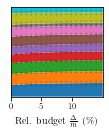

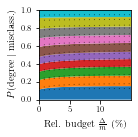

In [52]:
plot_preferences(global_degree_preferences, is_global=True, file_prefix="global_degree_preference")

In [53]:
legend_fig = pylab.figure()
handles = [Patch(facecolor=f"C{i}") for i in range(10)]
labels = [str(i) if i < 10 else "$\geq 10$" for i in range(1, 11)]
pylab.figlegend(handles, labels, loc="center", ncol=5)
legend_fig.savefig(f"{plots_path}/global_degree_preference_legend.pdf", dpi=500, bbox_inches="tight", pad_inches=0.01)

<Figure size 356.4x220.267 with 0 Axes>

## Local Degree Easiness

In [54]:
local_degree_easiness = {'citeseer': (np.array([0, 0.043478, 0.045455, 0.047619, 0.05, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95, 0.95238, 0.95455, 0.95652, 1, 1.0435, 1.0455, 1.0476, 1.05, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.0909, 1.0952, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1429, 1.15, 1.1579, 1.1667, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2105, 1.2222, 1.2353, 1.2381, 1.25, 1.2609, 1.2632, 1.2667, 1.2727, 1.2778, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3182, 1.3333, 1.3478, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.3913, 1.4, 1.4118, 1.4286, 1.4348, 1.4375, 1.4444, 1.45, 1.4545, 1.4667, 1.4706, 1.4783, 1.5, 1.5217, 1.5238, 1.5263, 1.5294, 1.5333, 1.5455, 1.55, 1.5556, 1.5625, 1.5652, 1.5714, 1.5789, 1.5882, 1.5909, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6316, 1.6364, 1.6471, 1.65, 1.6522, 1.6667, 1.6818, 1.6842, 1.6875, 1.6957, 1.7, 1.7059, 1.7143, 1.7222, 1.7273, 1.7333, 1.7368, 1.7391, 1.75, 1.7619, 1.7647, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8182, 1.8261, 1.8333, 1.85, 1.8571, 1.8667, 1.8696, 1.875, 1.8824, 1.8889, 1.9, 1.9048, 1.9091, 1.913, 1.9333, 1.9375, 1.9412, 1.9474, 1.9524, 1.9545, 1.9565, 2]), np.array([[0.22704, 0.21995, 0.21967, 0.21936, 0.21903, 0.21866, 0.21826, 0.21782, 0.21733, 0.21676, 0.21412, 0.21363, 0.21311, 0.21254, 0.21186, 0.21115, 0.21035, 0.20948, 0.20879, 0.20842, 0.20805, 0.20726, 0.2064, 0.20545, 0.20441, 0.20355, 0.20328, 0.2027, 0.20211, 0.2018, 0.20084, 0.1997, 0.19898, 0.19848, 0.19796, 0.19714, 0.19685, 0.19564, 0.19436, 0.19409, 0.19368, 0.19297, 0.19239, 0.1915, 0.19058, 0.18994, 0.18948, 0.18862, 0.18827, 0.18803, 0.18651, 0.18506, 0.18485, 0.18456, 0.18351, 0.18306, 0.18244, 0.18183, 0.18105, 0.18081, 0.17996, 0.17895, 0.17866, 0.17764, 0.17687, 0.17623, 0.17597, 0.1753, 0.17474, 0.17429, 0.17314, 0.17277, 0.17248, 0.17224, 0.17206, 0.17015, 0.16859, 0.16844, 0.16826, 0.16805, 0.16778, 0.16698, 0.16668, 0.16632, 0.16589, 0.16573, 0.16535, 0.1649, 0.16434, 0.16418, 0.16365, 0.1632, 0.16308, 0.16268, 0.16239, 0.16208, 0.16185, 0.16137, 0.16124, 0.16115, 0.1605, 0.16005, 0.15997, 0.15988, 0.15963, 0.1595, 0.15935, 0.15913, 0.15892, 0.15879, 0.15864, 0.15855, 0.1585, 0.15824, 0.158, 0.15795, 0.15779, 0.15768, 0.15759, 0.15747, 0.15729, 0.15719, 0.15717, 0.15711, 0.15707, 0.15705, 0.157, 0.15695, 0.1569, 0.15685, 0.15682, 0.1568, 0.15679, 0.15676, 0.15676, 0.15675, 0.15675, 0.15676, 0.15677, 0.15678, 0.15678, 0.15683, 0.15684, 0.15686, 0.15687, 0.15688, 0.15689, 0.15691, 0.15692, 0.15693, 0.15718, 0.15615, 0.15611, 0.15606, 0.15601, 0.15595, 0.15589, 0.15582, 0.15574, 0.15566, 0.15527, 0.15519, 0.15511, 0.15502, 0.15492, 0.15482, 0.1547, 0.15458, 0.15449, 0.15445, 0.1544, 0.1543, 0.1542, 0.15408, 0.15395, 0.15381, 0.15373, 0.15365, 0.15361, 0.15348, 0.15337, 0.15326, 0.15314, 0.15311, 0.153, 0.15292, 0.1529, 0.15287, 0.15283, 0.15279, 0.15267, 0.15263, 0.15261, 0.15256, 0.15254, 0.15253, 0.15244, 0.15239, 0.15238, 0.15234, 0.15232, 0.1523, 0.15229, 0.15227, 0.15226, 0.15224, 0.15222, 0.15221, 0.1522, 0.1522, 0.1522, 0.15219, 0.15219, 0.15219, 0.15218, 0.15218, 0.15219, 0.15225, 0.15226, 0.15226, 0.15227, 0.15229, 0.15232, 0.15234, 0.15236, 0.15238, 0.15239, 0.15241, 0.15244, 0.15247, 0.15248, 0.15252, 0.15256, 0.15258, 0.15262, 0.15266, 0.1527, 0.15273, 0.1528, 0.15281, 0.15283, 0.15292, 0.15304, 0.15306, 0.15308, 0.15315, 0.15318, 0.15323, 0.1533, 0.15336, 0.1534, 0.15345, 0.15348, 0.15349, 0.15358, 0.15369, 0.15371, 0.15382, 0.15387, 0.15393, 0.15403, 0.15413, 0.15416, 0.15421, 0.1543, 0.15437, 0.15454, 0.15462, 0.15472, 0.15475, 0.1548, 0.15488, 0.15495, 0.15507, 0.15512, 0.15517, 0.15521, 0.15543, 0.15547, 0.15551, 0.15558, 0.15563, 0.15565, 0.15568, 0.15614], [0.1845, 0.18954, 0.18975, 0.18997, 0.1902, 0.19046, 0.19075, 0.19106, 0.19141, 0.19177, 0.19341, 0.1937, 0.19403, 0.19437, 0.1947, 0.19507, 0.19546, 0.19588, 0.19612, 0.19625, 0.19635, 0.19656, 0.19679, 0.19705, 0.19734, 0.19757, 0.19765, 0.19781, 0.19798, 0.19808, 0.19836, 0.19851, 0.1986, 0.19867, 0.19871, 0.19879, 0.19881, 0.19887, 0.1987, 0.19866, 0.1986, 0.19848, 0.19839, 0.19824, 0.19809, 0.19798, 0.19789, 0.19772, 0.19765, 0.1976, 0.1973, 0.1969, 0.19685, 0.19677, 0.19646, 0.19633, 0.19615, 0.19593, 0.19563, 0.19554, 0.19522, 0.19474, 0.19461, 0.19413, 0.19378, 0.1935, 0.19338, 0.19309, 0.19283, 0.19262, 0.19209, 0.19192, 0.19179, 0.19168, 0.1916, 0.19075, 0.1885, 0.18828, 0.18803, 0.18772, 0.18733, 0.18619, 0.18576, 0.18525, 0.18464, 0.1844, 0.18386, 0.18321, 0.18241, 0.18219, 0.18143, 0.18077, 0.1806, 0.18001, 0.17958, 0.17912, 0.17878, 0.17807, 0.17787, 0.17773, 0.17676, 0.17601, 0.17589, 0.17573, 0.17533, 0.17512, 0.17486, 0.17448, 0.17413, 0.1739, 0.17364, 0.17349, 0.17339, 0.17294, 0.17249, 0.17238, 0.17208, 0.17189, 0.17171, 0.17147, 0.17111, 0.17086, 0.17078, 0.17064, 0.17051, 0.17045, 0.17029, 0.17009, 0.16992, 0.16976, 0.16962, 0.16956, 0.1695, 0.1694, 0.16928, 0.16917, 0.16908, 0.16901, 0.16895, 0.16889, 0.16884, 0.16857, 0.16853, 0.16849, 0.16845, 0.16842, 0.16839, 0.16837, 0.16835, 0.16833, 0.16794, 0.1671, 0.16706, 0.16702, 0.16698, 0.16693, 0.16688, 0.16683, 0.16677, 0.1667, 0.16638, 0.16632, 0.16626, 0.16618, 0.16611, 0.16602, 0.16593, 0.16584, 0.16577, 0.16574, 0.1657, 0.16563, 0.16555, 0.16546, 0.16536, 0.16526, 0.1652, 0.16514, 0.16511, 0.16501, 0.16495, 0.16488, 0.1648, 0.16479, 0.16472, 0.16468, 0.16467, 0.16466, 0.16464, 0.16462, 0.16456, 0.16454, 0.16453, 0.16452, 0.16451, 0.16451, 0.16448, 0.16448, 0.16448, 0.16448, 0.16448, 0.16449, 0.16449, 0.1645, 0.1645, 0.16451, 0.16454, 0.16459, 0.16461, 0.16462, 0.16464, 0.16466, 0.16467, 0.16471, 0.16472, 0.16475, 0.16483, 0.16469, 0.16468, 0.16466, 0.16464, 0.16462, 0.16454, 0.16451, 0.16448, 0.16444, 0.16442, 0.16439, 0.16435, 0.16429, 0.16428, 0.16423, 0.1642, 0.16419, 0.16417, 0.16415, 0.16414, 0.16413, 0.1641, 0.1641, 0.16409, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16406, 0.16407, 0.16407, 0.16409, 0.16409, 0.1641, 0.16411, 0.16414, 0.16415, 0.16416, 0.16418, 0.1642, 0.16424, 0.16426, 0.16429, 0.16429, 0.16431, 0.16433, 0.16435, 0.16438, 0.16439, 0.16441, 0.16442, 0.16448, 0.16449, 0.1645, 0.16452, 0.16453, 0.16454, 0.16455, 0.16467], [0.19583, 0.19678, 0.19683, 0.19687, 0.19691, 0.19695, 0.197, 0.19705, 0.19711, 0.19716, 0.19738, 0.19741, 0.19746, 0.19751, 0.1975, 0.19751, 0.19749, 0.19748, 0.19739, 0.19734, 0.19728, 0.19714, 0.197, 0.19684, 0.19667, 0.19653, 0.19649, 0.19639, 0.1963, 0.19625, 0.19609, 0.19585, 0.1957, 0.1956, 0.19548, 0.19529, 0.19522, 0.19492, 0.19446, 0.19436, 0.19421, 0.19393, 0.1937, 0.19335, 0.19299, 0.19273, 0.19254, 0.19219, 0.19204, 0.19194, 0.19132, 0.19094, 0.19089, 0.19081, 0.1905, 0.19037, 0.19018, 0.18996, 0.18966, 0.18957, 0.18924, 0.18875, 0.1886, 0.18811, 0.18773, 0.18742, 0.18729, 0.18697, 0.18668, 0.18645, 0.18584, 0.18564, 0.18549, 0.18536, 0.18526, 0.18424, 0.18356, 0.18349, 0.18341, 0.18332, 0.1832, 0.18283, 0.1827, 0.18254, 0.18234, 0.18227, 0.1821, 0.1819, 0.18164, 0.18157, 0.18132, 0.18115, 0.1811, 0.18095, 0.18084, 0.18072, 0.18064, 0.18046, 0.18042, 0.18038, 0.18014, 0.17912, 0.17896, 0.17874, 0.1782, 0.17791, 0.17755, 0.17703, 0.17655, 0.17624, 0.17587, 0.17566, 0.17553, 0.17491, 0.17429, 0.17414, 0.17372, 0.17345, 0.17321, 0.17287, 0.17236, 0.17198, 0.17186, 0.17164, 0.17143, 0.17134, 0.17108, 0.17077, 0.17049, 0.17023, 0.17001, 0.16991, 0.16982, 0.16964, 0.16943, 0.16924, 0.16908, 0.16894, 0.16882, 0.16871, 0.16861, 0.1681, 0.16801, 0.16792, 0.16785, 0.16778, 0.16773, 0.16767, 0.16763, 0.16759, 0.16672, 0.16628, 0.16626, 0.16623, 0.16621, 0.16619, 0.16617, 0.16614, 0.16611, 0.16608, 0.16595, 0.16592, 0.16589, 0.16586, 0.16583, 0.16579, 0.16576, 0.16573, 0.16571, 0.1657, 0.16569, 0.16567, 0.16565, 0.16563, 0.1656, 0.16558, 0.16557, 0.16555, 0.16555, 0.16553, 0.16556, 0.16559, 0.16563, 0.16564, 0.16567, 0.16573, 0.16574, 0.16576, 0.16579, 0.16582, 0.16591, 0.16594, 0.16597, 0.16603, 0.16605, 0.16607, 0.16617, 0.16619, 0.16619, 0.1662, 0.16621, 0.16622, 0.16622, 0.16623, 0.16624, 0.16625, 0.16628, 0.16633, 0.16634, 0.16635, 0.16637, 0.16638, 0.16639, 0.16643, 0.16644, 0.16646, 0.16653, 0.16666, 0.16667, 0.16669, 0.16671, 0.16673, 0.16681, 0.16683, 0.16687, 0.16691, 0.16693, 0.16697, 0.16701, 0.16707, 0.16709, 0.16714, 0.16722, 0.16724, 0.16731, 0.16736, 0.16742, 0.16747, 0.16757, 0.16759, 0.16761, 0.16774, 0.16772, 0.16771, 0.16771, 0.16769, 0.16768, 0.16767, 0.16766, 0.16764, 0.16763, 0.16762, 0.16762, 0.16761, 0.1676, 0.16758, 0.16758, 0.16757, 0.16756, 0.16756, 0.16755, 0.16756, 0.16756, 0.16757, 0.16757, 0.16758, 0.16759, 0.16759, 0.1676, 0.1676, 0.16761, 0.16761, 0.16762, 0.16763, 0.16764, 0.16764, 0.16765, 0.16767, 0.16767, 0.16768, 0.16768, 0.16769, 0.16769, 0.16769, 0.16774], [0.17459, 0.17579, 0.17583, 0.17587, 0.1759, 0.17594, 0.17597, 0.17601, 0.17605, 0.17608, 0.17613, 0.17612, 0.17613, 0.17613, 0.17607, 0.17603, 0.17598, 0.17591, 0.1758, 0.17573, 0.17565, 0.17547, 0.17527, 0.17505, 0.17481, 0.17462, 0.17455, 0.17441, 0.17427, 0.1742, 0.17396, 0.17415, 0.17426, 0.17434, 0.1744, 0.1745, 0.17452, 0.1746, 0.17449, 0.17446, 0.17442, 0.17432, 0.17425, 0.17412, 0.17398, 0.17388, 0.17379, 0.17364, 0.17357, 0.17352, 0.17322, 0.17288, 0.17284, 0.17277, 0.17249, 0.17238, 0.17221, 0.17201, 0.17174, 0.17166, 0.17136, 0.17151, 0.17155, 0.17171, 0.17183, 0.17192, 0.17196, 0.17207, 0.17212, 0.17216, 0.17225, 0.17228, 0.17229, 0.17231, 0.17232, 0.17243, 0.17281, 0.17285, 0.17289, 0.17294, 0.173, 0.17318, 0.17325, 0.17334, 0.17343, 0.17347, 0.17355, 0.17365, 0.17378, 0.17381, 0.17391, 0.1737, 0.17364, 0.17345, 0.17331, 0.17316, 0.17305, 0.17282, 0.17275, 0.17271, 0.17239, 0.17227, 0.17226, 0.17223, 0.17217, 0.17214, 0.17211, 0.17206, 0.17201, 0.17198, 0.17195, 0.17193, 0.17192, 0.17187, 0.17185, 0.17185, 0.17183, 0.17182, 0.17181, 0.17181, 0.17181, 0.17157, 0.1715, 0.17136, 0.17124, 0.17119, 0.17103, 0.17084, 0.17068, 0.17052, 0.17039, 0.17033, 0.17027, 0.17017, 0.17005, 0.16994, 0.16986, 0.16979, 0.16973, 0.16967, 0.16962, 0.16935, 0.1693, 0.16926, 0.16922, 0.16919, 0.16916, 0.16913, 0.16911, 0.16909, 0.16866, 0.16885, 0.16886, 0.16887, 0.16888, 0.16889, 0.16891, 0.16893, 0.16895, 0.16897, 0.1691, 0.16913, 0.16915, 0.16918, 0.16922, 0.16926, 0.1693, 0.16936, 0.1694, 0.16943, 0.16946, 0.16951, 0.16957, 0.16964, 0.16972, 0.1698, 0.16985, 0.1699, 0.16992, 0.17, 0.17009, 0.17018, 0.17028, 0.1703, 0.17039, 0.17049, 0.17051, 0.17055, 0.1706, 0.17065, 0.17079, 0.17085, 0.17089, 0.17098, 0.17101, 0.17103, 0.17118, 0.17135, 0.17141, 0.17154, 0.17159, 0.17167, 0.17174, 0.17183, 0.17186, 0.17197, 0.17203, 0.17211, 0.17214, 0.17216, 0.17219, 0.17222, 0.17224, 0.17231, 0.17233, 0.17237, 0.17249, 0.17267, 0.17269, 0.17271, 0.17274, 0.17277, 0.17287, 0.17291, 0.17296, 0.17302, 0.17304, 0.17309, 0.17316, 0.17324, 0.17326, 0.17334, 0.17331, 0.1733, 0.17327, 0.17325, 0.17324, 0.17322, 0.17319, 0.17319, 0.17318, 0.17314, 0.17313, 0.17313, 0.17313, 0.17313, 0.17313, 0.17312, 0.17312, 0.17312, 0.17312, 0.17311, 0.17311, 0.17311, 0.17311, 0.17311, 0.17311, 0.17312, 0.17312, 0.17312, 0.17313, 0.17311, 0.1731, 0.17308, 0.17306, 0.17304, 0.17299, 0.17297, 0.17295, 0.17294, 0.17293, 0.17291, 0.17289, 0.17286, 0.17285, 0.17284, 0.17283, 0.17279, 0.17278, 0.17277, 0.17275, 0.17274, 0.17274, 0.17273, 0.17263], [0.11845, 0.11936, 0.11939, 0.11942, 0.11945, 0.11949, 0.11952, 0.11956, 0.11961, 0.11964, 0.11977, 0.11979, 0.11982, 0.11986, 0.12014, 0.12045, 0.12086, 0.1213, 0.12185, 0.12215, 0.12241, 0.12296, 0.12356, 0.12422, 0.12496, 0.12557, 0.12576, 0.12616, 0.12657, 0.12679, 0.12744, 0.12812, 0.12855, 0.12884, 0.12922, 0.12983, 0.13003, 0.13086, 0.13208, 0.13232, 0.1327, 0.13332, 0.13382, 0.1346, 0.13538, 0.13592, 0.13633, 0.1371, 0.1374, 0.13761, 0.13894, 0.14013, 0.1403, 0.14053, 0.14131, 0.14165, 0.14212, 0.14255, 0.14309, 0.14326, 0.14384, 0.14433, 0.14447, 0.14497, 0.14535, 0.14565, 0.14579, 0.14613, 0.1465, 0.14681, 0.14759, 0.14783, 0.14802, 0.14817, 0.1483, 0.14957, 0.15132, 0.15149, 0.15169, 0.15192, 0.15222, 0.15311, 0.15345, 0.15386, 0.15431, 0.15449, 0.1549, 0.15539, 0.156, 0.15616, 0.15671, 0.15732, 0.15749, 0.15803, 0.15843, 0.15883, 0.15912, 0.15975, 0.15992, 0.16005, 0.16089, 0.16164, 0.16176, 0.16192, 0.16232, 0.16254, 0.1628, 0.16319, 0.16355, 0.16378, 0.16406, 0.16423, 0.16433, 0.16482, 0.16519, 0.16528, 0.16552, 0.16568, 0.16582, 0.16603, 0.16634, 0.1666, 0.16668, 0.16684, 0.16699, 0.16706, 0.16726, 0.16751, 0.16772, 0.16792, 0.1681, 0.16818, 0.16826, 0.16841, 0.16861, 0.16879, 0.16891, 0.16902, 0.1691, 0.16917, 0.16924, 0.16959, 0.16966, 0.16972, 0.16978, 0.16983, 0.16988, 0.16992, 0.16996, 0.17, 0.17075, 0.17138, 0.17141, 0.17144, 0.17147, 0.17151, 0.17155, 0.1716, 0.17165, 0.17172, 0.17203, 0.17209, 0.17215, 0.17222, 0.17229, 0.17237, 0.17244, 0.1725, 0.17256, 0.17259, 0.17262, 0.17269, 0.17276, 0.17284, 0.17292, 0.17302, 0.17308, 0.17313, 0.17316, 0.17325, 0.17332, 0.1734, 0.17348, 0.1735, 0.17357, 0.17356, 0.17356, 0.17355, 0.17355, 0.17354, 0.17353, 0.17353, 0.17353, 0.17353, 0.17353, 0.17353, 0.17353, 0.17351, 0.1735, 0.17349, 0.17348, 0.17347, 0.17348, 0.17348, 0.17348, 0.17349, 0.17349, 0.17351, 0.17351, 0.17351, 0.17352, 0.17352, 0.17352, 0.17353, 0.17353, 0.17354, 0.17356, 0.17353, 0.17352, 0.17352, 0.17351, 0.17351, 0.17349, 0.17348, 0.17347, 0.17344, 0.17343, 0.17341, 0.17338, 0.17335, 0.17334, 0.1733, 0.17328, 0.17327, 0.17325, 0.17323, 0.17321, 0.17319, 0.17316, 0.17315, 0.17314, 0.17309, 0.17307, 0.17307, 0.17307, 0.17306, 0.17305, 0.17305, 0.17304, 0.17303, 0.17302, 0.17301, 0.17301, 0.17301, 0.173, 0.17294, 0.17293, 0.17287, 0.17284, 0.17281, 0.17276, 0.1727, 0.17269, 0.17266, 0.17261, 0.17258, 0.17249, 0.17245, 0.1724, 0.17238, 0.17235, 0.17232, 0.17228, 0.17223, 0.1722, 0.17218, 0.17216, 0.17206, 0.17203, 0.17202, 0.17198, 0.17196, 0.17195, 0.17194, 0.17171], [0.099594, 0.098575, 0.098521, 0.098515, 0.098507, 0.098498, 0.098499, 0.098498, 0.098486, 0.098592, 0.099188, 0.099334, 0.09945, 0.099587, 0.099735, 0.099791, 0.099852, 0.099946, 0.10005, 0.10011, 0.10026, 0.1006, 0.10098, 0.1014, 0.10182, 0.10216, 0.10227, 0.10253, 0.10277, 0.10289, 0.1033, 0.10367, 0.1039, 0.10407, 0.10423, 0.10444, 0.10457, 0.10511, 0.10592, 0.10611, 0.10639, 0.10699, 0.10745, 0.10818, 0.10898, 0.10955, 0.10996, 0.11074, 0.11107, 0.1113, 0.11271, 0.11409, 0.11429, 0.11455, 0.11571, 0.11621, 0.11689, 0.11772, 0.11883, 0.11917, 0.12038, 0.12172, 0.12211, 0.12343, 0.12444, 0.12527, 0.12561, 0.12646, 0.12713, 0.12767, 0.12909, 0.12956, 0.12994, 0.13023, 0.13047, 0.13286, 0.13522, 0.13544, 0.13572, 0.13605, 0.13646, 0.13771, 0.13816, 0.1387, 0.13938, 0.13964, 0.14023, 0.14095, 0.14183, 0.14209, 0.14299, 0.14386, 0.1441, 0.14487, 0.14545, 0.14609, 0.14656, 0.14753, 0.14779, 0.14799, 0.14932, 0.15091, 0.15116, 0.1515, 0.15234, 0.15279, 0.15334, 0.15411, 0.15484, 0.1553, 0.15584, 0.15614, 0.15633, 0.15722, 0.15818, 0.1584, 0.15906, 0.15948, 0.15985, 0.16034, 0.16109, 0.1618, 0.16201, 0.1624, 0.16276, 0.16291, 0.16333, 0.16384, 0.1643, 0.16472, 0.16505, 0.16521, 0.16536, 0.16562, 0.16588, 0.16611, 0.16631, 0.16649, 0.16664, 0.16678, 0.16691, 0.16756, 0.16766, 0.16775, 0.16783, 0.1679, 0.16795, 0.16799, 0.16803, 0.16807, 0.16876, 0.17024, 0.17031, 0.17038, 0.17045, 0.17052, 0.17061, 0.1707, 0.17078, 0.17086, 0.17127, 0.17135, 0.17144, 0.17154, 0.17163, 0.17174, 0.17186, 0.172, 0.17207, 0.1721, 0.17213, 0.1722, 0.17227, 0.17236, 0.17244, 0.17253, 0.17257, 0.17262, 0.17265, 0.17273, 0.17271, 0.1727, 0.17267, 0.17267, 0.17264, 0.17262, 0.17262, 0.17261, 0.1726, 0.17258, 0.17254, 0.1725, 0.17246, 0.17239, 0.17236, 0.17233, 0.17219, 0.17207, 0.17203, 0.17195, 0.17191, 0.17186, 0.17178, 0.17169, 0.17166, 0.17155, 0.17143, 0.17126, 0.17119, 0.17116, 0.17109, 0.17103, 0.17098, 0.17085, 0.1708, 0.1707, 0.17041, 0.1702, 0.17018, 0.17015, 0.17012, 0.17009, 0.16997, 0.16993, 0.16987, 0.16981, 0.16978, 0.16973, 0.16966, 0.16958, 0.16955, 0.16948, 0.16943, 0.16942, 0.16937, 0.16934, 0.16929, 0.16926, 0.16919, 0.16917, 0.16915, 0.16905, 0.16898, 0.16897, 0.16896, 0.16892, 0.1689, 0.16887, 0.16883, 0.1688, 0.16877, 0.16874, 0.16873, 0.16871, 0.16866, 0.16861, 0.16859, 0.16854, 0.16851, 0.16848, 0.16841, 0.16837, 0.16835, 0.16832, 0.16828, 0.16824, 0.16814, 0.1681, 0.16805, 0.16803, 0.168, 0.16795, 0.16791, 0.16783, 0.16779, 0.16776, 0.16773, 0.16759, 0.16756, 0.16753, 0.16748, 0.16745, 0.16743, 0.16742, 0.1671]]), np.array([[0.035517, 0.031389, 0.031218, 0.031037, 0.03084, 0.030625, 0.030387, 0.030125, 0.029843, 0.029493, 0.027869, 0.027572, 0.027247, 0.026894, 0.026501, 0.026061, 0.025575, 0.025044, 0.024679, 0.024488, 0.02431, 0.023935, 0.023523, 0.023072, 0.022577, 0.022171, 0.022039, 0.02176, 0.021451, 0.021292, 0.020792, 0.020214, 0.019854, 0.019602, 0.019372, 0.01901, 0.018878, 0.01832, 0.017701, 0.017578, 0.01739, 0.017062, 0.01681, 0.016417, 0.01602, 0.015747, 0.015559, 0.015211, 0.015071, 0.014976, 0.014386, 0.014064, 0.014017, 0.013954, 0.013724, 0.013618, 0.013477, 0.013353, 0.013187, 0.013137, 0.012961, 0.012858, 0.012828, 0.012732, 0.012663, 0.012606, 0.012581, 0.012519, 0.012488, 0.012463, 0.012417, 0.012403, 0.012396, 0.01239, 0.012386, 0.012343, 0.012314, 0.012311, 0.012307, 0.0123, 0.012293, 0.012262, 0.012251, 0.012239, 0.012219, 0.012212, 0.012196, 0.012179, 0.012158, 0.012152, 0.012131, 0.012106, 0.012099, 0.012073, 0.012053, 0.012036, 0.012024, 0.011993, 0.011984, 0.011977, 0.011931, 0.011868, 0.011858, 0.011845, 0.011811, 0.011793, 0.01177, 0.01174, 0.011716, 0.011701, 0.011681, 0.01167, 0.011664, 0.01163, 0.011591, 0.01158, 0.011546, 0.011526, 0.011505, 0.011475, 0.011427, 0.011365, 0.011346, 0.011309, 0.011272, 0.011254, 0.011203, 0.011141, 0.011086, 0.011037, 0.010996, 0.010977, 0.010958, 0.010923, 0.010873, 0.010827, 0.010783, 0.010742, 0.010708, 0.010677, 0.010648, 0.010501, 0.010471, 0.010445, 0.010422, 0.010401, 0.010382, 0.010364, 0.010349, 0.010335, 0.010031, 0.0097574, 0.009745, 0.0097315, 0.0097171, 0.0097011, 0.0096833, 0.0096636, 0.0096406, 0.0096143, 0.0094848, 0.0094597, 0.0094323, 0.0094022, 0.0093698, 0.0093339, 0.009294, 0.0092505, 0.009218, 0.0092018, 0.0091849, 0.0091487, 0.0091088, 0.0090648, 0.0090165, 0.0089626, 0.0089329, 0.0089026, 0.0088864, 0.0088349, 0.0087717, 0.0087014, 0.008626, 0.0086097, 0.0085405, 0.0084805, 0.0084679, 0.0084485, 0.0084151, 0.0083874, 0.0082976, 0.0082658, 0.0082418, 0.008197, 0.0081789, 0.0081657, 0.0080825, 0.0079994, 0.0079701, 0.0079089, 0.007881, 0.0078433, 0.007811, 0.007768, 0.0077549, 0.0077079, 0.0076493, 0.0075658, 0.0075352, 0.0075218, 0.0074876, 0.0074605, 0.0074384, 0.0073794, 0.0073608, 0.0073245, 0.0072197, 0.0071316, 0.0071232, 0.007113, 0.0071004, 0.0070856, 0.00704, 0.0070231, 0.0070025, 0.0069758, 0.0069654, 0.0069415, 0.0069127, 0.0068777, 0.0068677, 0.0068336, 0.0068021, 0.0067934, 0.0067647, 0.0067447, 0.0067216, 0.0067048, 0.0066673, 0.006657, 0.0066493, 0.0065997, 0.0065482, 0.0065401, 0.0065289, 0.0065012, 0.0064866, 0.0064657, 0.006436, 0.0064079, 0.00639, 0.0063685, 0.006356, 0.0063479, 0.0063092, 0.0062685, 0.0062589, 0.0062172, 0.0062022, 0.0061799, 0.0061448, 0.0061124, 0.0061023, 0.0060829, 0.006056, 0.0060317, 0.0059759, 0.005952, 0.0059202, 0.0059105, 0.0058924, 0.0058681, 0.0058465, 0.0058101, 0.0057947, 0.0057806, 0.005768, 0.0057033, 0.0056901, 0.0056784, 0.0056587, 0.0056428, 0.0056359, 0.0056296, 0.0054924], [0.052237, 0.048797, 0.048664, 0.048519, 0.048363, 0.048193, 0.048008, 0.047806, 0.047579, 0.047329, 0.046127, 0.045912, 0.045677, 0.045421, 0.045178, 0.044905, 0.044636, 0.044333, 0.044144, 0.044046, 0.043915, 0.043635, 0.043337, 0.04301, 0.042647, 0.04235, 0.042256, 0.042059, 0.041882, 0.041793, 0.041521, 0.041051, 0.040753, 0.040546, 0.040311, 0.039944, 0.039815, 0.039276, 0.038763, 0.038662, 0.038506, 0.038245, 0.03804, 0.03772, 0.037392, 0.037154, 0.036978, 0.036653, 0.036518, 0.036414, 0.035763, 0.034777, 0.034636, 0.034443, 0.033764, 0.033473, 0.033074, 0.032689, 0.032215, 0.032072, 0.031564, 0.031053, 0.030905, 0.030396, 0.030012, 0.029697, 0.029565, 0.029232, 0.028969, 0.028759, 0.028236, 0.028074, 0.027953, 0.027856, 0.027778, 0.026967, 0.02571, 0.025591, 0.025449, 0.025287, 0.025083, 0.02452, 0.024307, 0.024048, 0.023753, 0.02364, 0.023385, 0.023076, 0.022697, 0.022594, 0.022243, 0.021877, 0.021779, 0.021457, 0.021215, 0.020974, 0.020799, 0.020418, 0.020314, 0.020239, 0.019737, 0.019312, 0.019245, 0.019153, 0.01893, 0.018812, 0.018661, 0.018447, 0.018244, 0.018114, 0.01796, 0.017874, 0.017818, 0.017551, 0.017243, 0.017172, 0.016971, 0.016845, 0.016725, 0.016556, 0.0163, 0.016109, 0.016051, 0.01594, 0.01584, 0.015795, 0.015667, 0.015515, 0.015378, 0.015253, 0.015142, 0.01509, 0.015041, 0.014948, 0.014818, 0.014701, 0.014596, 0.014502, 0.014421, 0.014347, 0.014281, 0.013941, 0.013873, 0.013813, 0.01376, 0.013714, 0.013674, 0.013638, 0.013605, 0.013575, 0.012934, 0.012464, 0.012443, 0.01242, 0.012397, 0.012371, 0.012343, 0.01231, 0.012273, 0.01223, 0.012027, 0.011988, 0.011945, 0.011898, 0.011848, 0.011791, 0.011733, 0.011666, 0.011617, 0.011591, 0.011563, 0.011505, 0.011441, 0.01137, 0.011292, 0.011204, 0.011158, 0.011111, 0.011087, 0.011009, 0.010904, 0.010788, 0.01066, 0.010633, 0.010519, 0.010408, 0.010385, 0.01035, 0.010288, 0.010237, 0.010072, 0.010014, 0.009971, 0.0098899, 0.0098571, 0.0098333, 0.0096831, 0.0095292, 0.009475, 0.0093616, 0.0093113, 0.009243, 0.0091836, 0.0091044, 0.0090803, 0.0089938, 0.0088839, 0.0087268, 0.00867, 0.0086453, 0.0085822, 0.0085322, 0.0084913, 0.0083824, 0.0083463, 0.0082758, 0.0080757, 0.0079351, 0.0079217, 0.0079054, 0.0078853, 0.0078609, 0.0077856, 0.0077578, 0.0077239, 0.0076843, 0.0076689, 0.0076337, 0.0075913, 0.007539, 0.007524, 0.0074731, 0.0074272, 0.0074145, 0.0073727, 0.0073413, 0.0073063, 0.0072809, 0.0072241, 0.0072085, 0.007197, 0.0071214, 0.0070545, 0.0070439, 0.0070294, 0.0069934, 0.0069744, 0.0069475, 0.0069093, 0.0068731, 0.0068501, 0.0068225, 0.0068063, 0.0067956, 0.0067452, 0.0066888, 0.0066755, 0.0066177, 0.0065954, 0.0065621, 0.006512, 0.0064714, 0.0064587, 0.0064343, 0.0064004, 0.0063696, 0.0062987, 0.0062683, 0.0062279, 0.0062155, 0.0061925, 0.00616, 0.0061313, 0.0060825, 0.0060616, 0.0060426, 0.0060257, 0.0059386, 0.0059208, 0.005905, 0.0058785, 0.0058571, 0.0058478, 0.0058394, 0.005655], [0.074824, 0.067754, 0.067486, 0.067186, 0.066862, 0.066509, 0.066122, 0.065698, 0.065231, 0.064725, 0.062476, 0.06206, 0.061629, 0.06117, 0.060617, 0.060054, 0.059413, 0.058723, 0.05817, 0.057875, 0.057603, 0.057028, 0.056406, 0.055729, 0.054996, 0.054402, 0.054211, 0.053817, 0.053415, 0.053203, 0.052555, 0.051926, 0.051534, 0.05126, 0.050982, 0.050547, 0.050409, 0.049827, 0.049341, 0.049236, 0.049077, 0.048806, 0.048581, 0.048231, 0.047881, 0.047641, 0.047476, 0.047168, 0.047048, 0.046972, 0.046492, 0.045177, 0.044988, 0.044734, 0.043831, 0.043449, 0.042928, 0.042479, 0.0419, 0.041725, 0.041097, 0.040389, 0.040183, 0.039467, 0.03892, 0.038471, 0.038284, 0.037806, 0.037424, 0.037114, 0.036306, 0.036042, 0.035838, 0.035673, 0.035542, 0.034193, 0.032857, 0.032731, 0.032578, 0.032392, 0.032154, 0.031383, 0.031098, 0.03075, 0.03033, 0.030165, 0.029785, 0.029327, 0.028763, 0.028605, 0.028072, 0.027616, 0.027492, 0.027088, 0.026789, 0.026441, 0.02619, 0.025659, 0.025513, 0.025405, 0.024675, 0.023919, 0.0238, 0.023638, 0.023236, 0.023024, 0.022756, 0.022375, 0.022018, 0.021791, 0.021521, 0.021365, 0.021268, 0.020813, 0.020347, 0.020238, 0.019924, 0.019727, 0.019546, 0.019298, 0.018917, 0.018562, 0.018451, 0.018239, 0.018041, 0.017948, 0.017682, 0.017362, 0.017076, 0.01682, 0.016595, 0.016491, 0.016391, 0.016205, 0.01597, 0.015762, 0.01558, 0.015417, 0.015272, 0.01514, 0.01502, 0.014407, 0.014287, 0.01418, 0.014086, 0.014001, 0.013926, 0.013857, 0.013796, 0.01374, 0.012561, 0.011772, 0.011736, 0.011697, 0.011655, 0.011608, 0.011557, 0.011499, 0.011439, 0.01137, 0.011035, 0.01097, 0.010899, 0.01082, 0.010737, 0.010644, 0.01054, 0.010424, 0.01034, 0.010296, 0.010251, 0.010153, 0.010045, 0.0099263, 0.009799, 0.009657, 0.0095787, 0.0094958, 0.0094525, 0.009315, 0.0091879, 0.0090467, 0.0088919, 0.0088587, 0.0087191, 0.0085994, 0.0085743, 0.0085358, 0.0084698, 0.0084147, 0.0082367, 0.008175, 0.0081295, 0.0080467, 0.0080133, 0.0079891, 0.007836, 0.0076658, 0.0076058, 0.0074806, 0.0074267, 0.0073532, 0.0072867, 0.0071985, 0.0071718, 0.0070755, 0.0069417, 0.0067506, 0.0066826, 0.0066528, 0.0065766, 0.0065173, 0.0064688, 0.0063397, 0.0063001, 0.0062226, 0.0060113, 0.0058076, 0.0057883, 0.0057649, 0.005736, 0.0057002, 0.0055897, 0.0055487, 0.0054987, 0.0054378, 0.005414, 0.0053595, 0.0052935, 0.005213, 0.0051898, 0.0051115, 0.0050379, 0.0050174, 0.0049503, 0.0049002, 0.0048471, 0.0048084, 0.0047222, 0.0046985, 0.004681, 0.0045659, 0.0044999, 0.0044895, 0.0044752, 0.0044398, 0.0044209, 0.0043969, 0.0043628, 0.0043306, 0.0043101, 0.0042861, 0.0042722, 0.0042632, 0.0042203, 0.0041765, 0.0041662, 0.0041148, 0.004097, 0.004073, 0.0040368, 0.0040033, 0.0039932, 0.003974, 0.0039475, 0.0039236, 0.003869, 0.0038457, 0.0038147, 0.0038053, 0.0037876, 0.0037659, 0.0037466, 0.0037141, 0.0037005, 0.0036881, 0.0036769, 0.0036196, 0.003608, 0.0035977, 0.0035804, 0.0035665, 0.0035605, 0.003555, 0.0034362], [0.031981, 0.02987, 0.029786, 0.0297, 0.029606, 0.029504, 0.0294, 0.029286, 0.029157, 0.029034, 0.028498, 0.0284, 0.028296, 0.028185, 0.028036, 0.0279, 0.027749, 0.027586, 0.027416, 0.027326, 0.027237, 0.027047, 0.026842, 0.026619, 0.026381, 0.026188, 0.026124, 0.025992, 0.025849, 0.02577, 0.025531, 0.024607, 0.024038, 0.023641, 0.023231, 0.022583, 0.02237, 0.021474, 0.020723, 0.020566, 0.020326, 0.019923, 0.019586, 0.019061, 0.018531, 0.018164, 0.017897, 0.017396, 0.017196, 0.017056, 0.016177, 0.015281, 0.015152, 0.014977, 0.014346, 0.01408, 0.013717, 0.013407, 0.013008, 0.012888, 0.01246, 0.012548, 0.012576, 0.012674, 0.012745, 0.012808, 0.012836, 0.012901, 0.012926, 0.012948, 0.012983, 0.012994, 0.012999, 0.013004, 0.013007, 0.013073, 0.013065, 0.013066, 0.013067, 0.013066, 0.013058, 0.013004, 0.012988, 0.012967, 0.012934, 0.01292, 0.012883, 0.012837, 0.012783, 0.012764, 0.012703, 0.012507, 0.012455, 0.012285, 0.012161, 0.012006, 0.011894, 0.011665, 0.011603, 0.011557, 0.011248, 0.010974, 0.010931, 0.010873, 0.010732, 0.010658, 0.010563, 0.010429, 0.010303, 0.010225, 0.010133, 0.010082, 0.01005, 0.0099049, 0.0097588, 0.0097262, 0.0096356, 0.0095795, 0.0095311, 0.0094683, 0.0093749, 0.0091977, 0.0091426, 0.0090379, 0.0089428, 0.0088979, 0.0087705, 0.0086164, 0.0084786, 0.0083537, 0.0082414, 0.0081891, 0.0081397, 0.0080475, 0.0079288, 0.0078252, 0.0077408, 0.0076654, 0.0075971, 0.0075355, 0.0074795, 0.0071935, 0.0071355, 0.0070847, 0.0070396, 0.006999, 0.0069634, 0.0069315, 0.0069027, 0.0068764, 0.0063209, 0.0061471, 0.0061394, 0.0061309, 0.006122, 0.0061122, 0.0061015, 0.0060896, 0.0060803, 0.0060698, 0.0060223, 0.0060134, 0.0060036, 0.0059928, 0.0059811, 0.0059683, 0.0059521, 0.0059336, 0.0059221, 0.0059155, 0.0059089, 0.0058951, 0.0058801, 0.0058638, 0.0058483, 0.0058317, 0.0058229, 0.0058126, 0.0058074, 0.005791, 0.005674, 0.0055452, 0.0054041, 0.0053742, 0.0052508, 0.0051466, 0.0051249, 0.0050918, 0.0050351, 0.0049881, 0.0048379, 0.0047862, 0.0047491, 0.0046825, 0.004656, 0.0046367, 0.0045165, 0.0044203, 0.0043869, 0.0043182, 0.0042892, 0.004249, 0.0042129, 0.0041658, 0.0041516, 0.0041012, 0.0040781, 0.0040459, 0.0040341, 0.0040289, 0.0040157, 0.0040057, 0.0039976, 0.0039761, 0.0039699, 0.0039577, 0.0039278, 0.0038864, 0.0038826, 0.003878, 0.0038723, 0.0038634, 0.0038359, 0.0038257, 0.0038132, 0.0037974, 0.0037912, 0.0037772, 0.00376, 0.0037395, 0.0037336, 0.0037136, 0.0037052, 0.0037029, 0.0036954, 0.0036888, 0.0036839, 0.0036803, 0.0036726, 0.0036705, 0.003669, 0.003659, 0.0036491, 0.0036476, 0.0036455, 0.0036403, 0.0036374, 0.003635, 0.0036316, 0.0036284, 0.0036264, 0.0036243, 0.0036237, 0.0036233, 0.0036214, 0.0036169, 0.0036158, 0.0036095, 0.0036075, 0.0036066, 0.0036061, 0.0035808, 0.0035731, 0.0035584, 0.0035381, 0.00352, 0.0034785, 0.0034607, 0.0034371, 0.00343, 0.0034166, 0.0033994, 0.0033842, 0.0033589, 0.0033482, 0.0033384, 0.0033298, 0.0032856, 0.0032766, 0.0032686, 0.0032553, 0.0032445, 0.0032399, 0.0032357, 0.0031445], [0.02898, 0.023627, 0.023428, 0.023206, 0.022966, 0.022707, 0.022423, 0.022114, 0.021782, 0.021408, 0.019729, 0.019432, 0.019119, 0.018786, 0.018472, 0.018132, 0.01802, 0.017919, 0.017724, 0.017631, 0.017542, 0.017371, 0.017216, 0.017083, 0.016976, 0.016925, 0.016917, 0.016912, 0.016917, 0.016925, 0.016976, 0.016998, 0.017028, 0.01706, 0.01691, 0.016696, 0.016623, 0.016349, 0.01584, 0.015739, 0.015586, 0.015339, 0.015153, 0.014871, 0.0146, 0.014423, 0.014303, 0.014089, 0.014007, 0.013952, 0.01364, 0.013407, 0.013377, 0.013338, 0.013215, 0.013169, 0.013113, 0.013058, 0.012998, 0.012982, 0.01293, 0.012997, 0.013018, 0.013102, 0.013163, 0.013218, 0.013242, 0.013296, 0.013362, 0.013419, 0.013569, 0.013622, 0.013662, 0.013696, 0.013722, 0.014037, 0.013879, 0.013866, 0.013851, 0.013833, 0.013808, 0.013737, 0.013718, 0.013696, 0.013669, 0.013659, 0.013634, 0.013607, 0.013579, 0.01357, 0.013546, 0.013426, 0.013394, 0.013293, 0.013219, 0.013137, 0.013078, 0.012963, 0.012932, 0.012909, 0.012767, 0.012508, 0.012467, 0.012411, 0.012275, 0.012201, 0.012105, 0.011971, 0.011848, 0.011774, 0.011686, 0.011635, 0.011603, 0.011455, 0.011273, 0.01123, 0.011107, 0.01103, 0.010952, 0.010847, 0.010687, 0.010542, 0.010498, 0.010413, 0.010335, 0.010299, 0.010195, 0.010069, 0.0099566, 0.0098561, 0.0097648, 0.0097225, 0.009682, 0.0096078, 0.0095146, 0.0094363, 0.009358, 0.0092883, 0.0092355, 0.0091876, 0.0091442, 0.0089227, 0.0088712, 0.0088255, 0.0087845, 0.0087476, 0.0087144, 0.0086849, 0.0086579, 0.0086334, 0.0081102, 0.0074421, 0.0074123, 0.0073799, 0.0073458, 0.0073083, 0.0072667, 0.0072206, 0.0071756, 0.0071246, 0.006879, 0.0068316, 0.0067802, 0.0067237, 0.00666, 0.0065895, 0.0065278, 0.0064585, 0.0064089, 0.0063825, 0.0063553, 0.0062972, 0.0062333, 0.0061629, 0.0060881, 0.0060048, 0.0059593, 0.0059106, 0.0058846, 0.0058005, 0.0057321, 0.0056565, 0.0055704, 0.0055524, 0.0054767, 0.0053952, 0.0053783, 0.0053523, 0.005308, 0.0052711, 0.0051518, 0.0051098, 0.0050817, 0.0050316, 0.0050116, 0.004997, 0.004905, 0.0047921, 0.0047524, 0.0046695, 0.0046339, 0.0045841, 0.0045424, 0.004487, 0.0044702, 0.00441, 0.0042933, 0.0041279, 0.0040678, 0.0040414, 0.0039743, 0.0039228, 0.0038808, 0.0037698, 0.003736, 0.0036702, 0.0034926, 0.0034313, 0.0034259, 0.0034194, 0.0034116, 0.0034, 0.0033657, 0.0033534, 0.0033389, 0.003327, 0.0033225, 0.0033122, 0.0033, 0.0032861, 0.0032823, 0.0032696, 0.003242, 0.0032345, 0.0032098, 0.003191, 0.0031686, 0.0031524, 0.0031168, 0.0031071, 0.0031, 0.0030538, 0.0029964, 0.0029875, 0.0029752, 0.0029451, 0.002929, 0.0029043, 0.0028691, 0.0028361, 0.0028153, 0.0027909, 0.0027773, 0.0027685, 0.002727, 0.002686, 0.0026764, 0.0026286, 0.0026081, 0.002581, 0.002541, 0.0025197, 0.0025134, 0.0025016, 0.0024851, 0.0024709, 0.0024381, 0.0024241, 0.0024055, 0.0023998, 0.0023891, 0.0023741, 0.0023607, 0.0023385, 0.0023283, 0.0023191, 0.0023109, 0.0022689, 0.0022603, 0.0022527, 0.0022399, 0.0022296, 0.0022251, 0.0022211, 0.0021328], [0.030807, 0.027819, 0.027718, 0.027578, 0.027426, 0.027261, 0.027075, 0.026871, 0.02666, 0.026502, 0.025982, 0.025859, 0.025767, 0.025679, 0.025602, 0.025611, 0.02566, 0.025735, 0.025816, 0.02585, 0.025906, 0.02602, 0.026141, 0.026273, 0.026402, 0.026508, 0.026538, 0.026607, 0.026644, 0.026638, 0.026626, 0.026581, 0.026537, 0.026507, 0.026454, 0.026382, 0.026374, 0.026347, 0.026326, 0.026298, 0.026256, 0.026239, 0.026195, 0.026129, 0.026069, 0.026052, 0.026061, 0.026064, 0.02608, 0.026111, 0.026303, 0.026538, 0.026574, 0.026627, 0.026824, 0.026931, 0.027082, 0.027364, 0.027729, 0.027838, 0.028226, 0.028602, 0.028714, 0.029096, 0.029355, 0.029562, 0.029656, 0.029844, 0.02995, 0.030041, 0.030189, 0.030229, 0.030249, 0.030264, 0.03027, 0.030413, 0.030307, 0.030296, 0.030281, 0.030243, 0.030176, 0.029674, 0.0295, 0.029278, 0.028982, 0.028855, 0.028554, 0.028177, 0.027716, 0.027568, 0.027079, 0.026618, 0.026491, 0.026082, 0.02579, 0.025376, 0.02508, 0.024484, 0.024318, 0.024193, 0.023322, 0.022359, 0.022208, 0.022004, 0.021506, 0.021249, 0.020913, 0.020449, 0.020021, 0.019752, 0.019435, 0.019258, 0.019151, 0.018653, 0.018127, 0.018004, 0.017644, 0.017421, 0.017232, 0.016985, 0.016608, 0.016311, 0.016223, 0.016043, 0.015874, 0.015786, 0.015534, 0.015229, 0.014963, 0.01473, 0.014524, 0.014429, 0.014336, 0.014166, 0.013942, 0.013749, 0.013587, 0.013442, 0.013312, 0.013193, 0.013084, 0.012532, 0.012411, 0.012303, 0.012206, 0.012119, 0.012039, 0.011968, 0.011905, 0.011848, 0.010673, 0.0096087, 0.0095606, 0.0095081, 0.0094541, 0.009394, 0.0093272, 0.0092544, 0.0091904, 0.0091123, 0.0087442, 0.0086729, 0.0085949, 0.0085089, 0.0084128, 0.0083061, 0.0081924, 0.0080712, 0.0079846, 0.0079416, 0.0078964, 0.0077998, 0.0076936, 0.0075764, 0.0074572, 0.0073246, 0.00725, 0.0071695, 0.007127, 0.0069943, 0.0068297, 0.0066477, 0.0064554, 0.0064142, 0.0062458, 0.0061053, 0.006076, 0.0060312, 0.0059569, 0.0058951, 0.0056967, 0.0056255, 0.0055731, 0.0054835, 0.0054471, 0.0054207, 0.005254, 0.0050983, 0.0050437, 0.0049299, 0.004881, 0.0048142, 0.0047591, 0.0046869, 0.004665, 0.0045866, 0.0044933, 0.0043608, 0.0043157, 0.0042955, 0.0042442, 0.0042069, 0.0041765, 0.0040958, 0.0040754, 0.0040361, 0.0039292, 0.0038359, 0.0038271, 0.0038165, 0.0038034, 0.0037888, 0.0037439, 0.0037276, 0.0037077, 0.0036837, 0.0036743, 0.0036527, 0.0036266, 0.0035942, 0.0035849, 0.0035533, 0.0035242, 0.0035161, 0.0034896, 0.0034718, 0.0034557, 0.003444, 0.0034178, 0.0034107, 0.0034054, 0.0033709, 0.0033465, 0.0033427, 0.0033374, 0.0033244, 0.0033174, 0.0033065, 0.0032911, 0.0032766, 0.0032675, 0.0032568, 0.0032505, 0.0032463, 0.0032268, 0.0032067, 0.003202, 0.0031821, 0.0031742, 0.0031644, 0.0031493, 0.003136, 0.0031324, 0.0031258, 0.0031166, 0.0031108, 0.0030978, 0.0030924, 0.0030854, 0.0030833, 0.0030794, 0.0030751, 0.0030714, 0.0030681, 0.003066, 0.0030641, 0.0030624, 0.0030539, 0.0030522, 0.0030508, 0.0030484, 0.0030466, 0.0030458, 0.003045, 0.0030304]])), 'cora': (np.array([0, 0.043478, 0.045455, 0.047619, 0.052632, 0.055556, 0.058824, 0.0625, 0.066667, 0.086957, 0.090909, 0.095238, 0.1, 0.10526, 0.11111, 0.11765, 0.125, 0.13043, 0.13333, 0.13636, 0.14286, 0.15789, 0.16667, 0.17391, 0.17647, 0.18182, 0.1875, 0.19048, 0.2, 0.21053, 0.21739, 0.22222, 0.22727, 0.23529, 0.2381, 0.25, 0.26087, 0.26316, 0.26667, 0.27273, 0.27778, 0.28571, 0.29412, 0.3, 0.30435, 0.3125, 0.31579, 0.31818, 0.33333, 0.34783, 0.35294, 0.36364, 0.36842, 0.375, 0.38095, 0.38889, 0.3913, 0.4, 0.40909, 0.41176, 0.42105, 0.42857, 0.43478, 0.4375, 0.44444, 0.45455, 0.46667, 0.47059, 0.47368, 0.47619, 0.47826, 0.5, 0.52174, 0.52381, 0.52632, 0.52941, 0.53333, 0.54545, 0.55556, 0.5625, 0.56522, 0.57143, 0.57895, 0.58824, 0.59091, 0.6, 0.6087, 0.61111, 0.61905, 0.625, 0.63158, 0.63636, 0.64706, 0.65217, 0.66667, 0.68182, 0.68421, 0.6875, 0.69565, 0.7, 0.70588, 0.71429, 0.72222, 0.72727, 0.73333, 0.73684, 0.73913, 0.75, 0.7619, 0.76471, 0.77273, 0.77778, 0.78261, 0.78947, 0.8, 0.80952, 0.8125, 0.81818, 0.82353, 0.82609, 0.83333, 0.84211, 0.85714, 0.86364, 0.86667, 0.86957, 0.875, 0.88235, 0.88889, 0.89474, 0.9, 0.90476, 0.90909, 0.91304, 0.93333, 0.9375, 0.94118, 0.94444, 0.94737, 0.95238, 0.95455, 0.95652, 1, 1.0435, 1.0476, 1.0526, 1.0556, 1.0588, 1.0625, 1.0667, 1.087, 1.1, 1.1053, 1.1111, 1.1176, 1.125, 1.1304, 1.1333, 1.1364, 1.1579, 1.1667, 1.1739, 1.1765, 1.1818, 1.1875, 1.1905, 1.2, 1.2105, 1.2174, 1.2222, 1.2273, 1.2353, 1.2381, 1.25, 1.2609, 1.2632, 1.2667, 1.2778, 1.2941, 1.3, 1.3043, 1.3125, 1.3158, 1.3333, 1.3478, 1.3529, 1.3636, 1.3684, 1.375, 1.381, 1.3889, 1.3913, 1.4, 1.4091, 1.4118, 1.4211, 1.4286, 1.4348, 1.4375, 1.4444, 1.4545, 1.4667, 1.4706, 1.4737, 1.4783, 1.5, 1.5263, 1.5294, 1.5455, 1.5556, 1.5625, 1.5652, 1.5789, 1.6, 1.6087, 1.6111, 1.619, 1.625, 1.6316, 1.6471, 1.6522, 1.6667, 1.6818, 1.7, 1.7059, 1.7273, 1.7333, 1.7368, 1.7391, 1.75, 1.7619, 1.7647, 1.7727, 1.7778, 1.7826, 1.7895, 1.8, 1.8095, 1.8125, 1.8235, 1.8261, 1.8333, 1.8421, 1.8696, 1.875, 1.8824, 1.8889, 1.9, 1.9091, 1.9333, 1.9375, 1.9412, 1.9474, 1.9524, 1.9565, 2]), np.array([[0.16901, 0.16124, 0.16096, 0.16066, 0.16, 0.15962, 0.15918, 0.1587, 0.15816, 0.15577, 0.15535, 0.15489, 0.15445, 0.15399, 0.15349, 0.15308, 0.15258, 0.15217, 0.15196, 0.15176, 0.15134, 0.15037, 0.14981, 0.14936, 0.14921, 0.1489, 0.14858, 0.14842, 0.14791, 0.14722, 0.14676, 0.14642, 0.14607, 0.14551, 0.14531, 0.14448, 0.14373, 0.14358, 0.14334, 0.14293, 0.14261, 0.1421, 0.14159, 0.14123, 0.14097, 0.14048, 0.14028, 0.14014, 0.13929, 0.13851, 0.13824, 0.13766, 0.1374, 0.13706, 0.13676, 0.13636, 0.13625, 0.13583, 0.13543, 0.13532, 0.13491, 0.1346, 0.13434, 0.13424, 0.13397, 0.13362, 0.13323, 0.1331, 0.13302, 0.13295, 0.1329, 0.13233, 0.1322, 0.13219, 0.13218, 0.13217, 0.13216, 0.13213, 0.13212, 0.13211, 0.13211, 0.13211, 0.13211, 0.1321, 0.13211, 0.13212, 0.13218, 0.1322, 0.13227, 0.13231, 0.13237, 0.13242, 0.13252, 0.13258, 0.13272, 0.13305, 0.1331, 0.13317, 0.13336, 0.13345, 0.13358, 0.13377, 0.13394, 0.13405, 0.13419, 0.13426, 0.13431, 0.13455, 0.13484, 0.13491, 0.13511, 0.13523, 0.13535, 0.13553, 0.1358, 0.13608, 0.13617, 0.13633, 0.13649, 0.13657, 0.13678, 0.13704, 0.13748, 0.13768, 0.13777, 0.13785, 0.13802, 0.13824, 0.13844, 0.13862, 0.13878, 0.13893, 0.13906, 0.13918, 0.1398, 0.13993, 0.14004, 0.14014, 0.14023, 0.14038, 0.14045, 0.14051, 0.14184, 0.14161, 0.14159, 0.14156, 0.14155, 0.14153, 0.14151, 0.1415, 0.14141, 0.14135, 0.14133, 0.14131, 0.14129, 0.14127, 0.14126, 0.14125, 0.14125, 0.14121, 0.1412, 0.1412, 0.1412, 0.14119, 0.14119, 0.14119, 0.14118, 0.14121, 0.14124, 0.14125, 0.14127, 0.14129, 0.1413, 0.14134, 0.14138, 0.14139, 0.14141, 0.14146, 0.14153, 0.14155, 0.14158, 0.14162, 0.14164, 0.14173, 0.14185, 0.14189, 0.14197, 0.14201, 0.14206, 0.14212, 0.14218, 0.1422, 0.14228, 0.14238, 0.14241, 0.1425, 0.14258, 0.14265, 0.14268, 0.14276, 0.14287, 0.143, 0.14304, 0.14308, 0.14313, 0.14337, 0.14375, 0.14379, 0.14403, 0.14418, 0.14428, 0.14432, 0.14451, 0.14482, 0.14496, 0.145, 0.14512, 0.14522, 0.14532, 0.14557, 0.14565, 0.14589, 0.14615, 0.14646, 0.14657, 0.14694, 0.14704, 0.1471, 0.14714, 0.14733, 0.14755, 0.1476, 0.14774, 0.14783, 0.14792, 0.14804, 0.14824, 0.14841, 0.14847, 0.14867, 0.14872, 0.14885, 0.14901, 0.14952, 0.14962, 0.14975, 0.14987, 0.15007, 0.15024, 0.15068, 0.15075, 0.15082, 0.15093, 0.15102, 0.1511, 0.15189], [0.1936, 0.19111, 0.19101, 0.19091, 0.19072, 0.1906, 0.19046, 0.19029, 0.19006, 0.18905, 0.18887, 0.18867, 0.18848, 0.18831, 0.18811, 0.18802, 0.18786, 0.18767, 0.18757, 0.18748, 0.18728, 0.18682, 0.18655, 0.18633, 0.18625, 0.18608, 0.18591, 0.18583, 0.18554, 0.18506, 0.18471, 0.18447, 0.18418, 0.18374, 0.18357, 0.18286, 0.1822, 0.18206, 0.18184, 0.18147, 0.18117, 0.1807, 0.18024, 0.17991, 0.17966, 0.1792, 0.17902, 0.17889, 0.17808, 0.17736, 0.17711, 0.17653, 0.17629, 0.17596, 0.17565, 0.17527, 0.17515, 0.17474, 0.17436, 0.17425, 0.17387, 0.17358, 0.17334, 0.17324, 0.173, 0.17268, 0.17233, 0.17222, 0.17215, 0.1721, 0.17205, 0.1716, 0.17011, 0.16997, 0.1698, 0.1696, 0.16936, 0.16863, 0.16803, 0.16764, 0.16749, 0.16715, 0.16673, 0.16622, 0.16608, 0.16562, 0.16525, 0.16516, 0.16483, 0.16459, 0.16434, 0.16416, 0.16377, 0.16359, 0.16307, 0.16278, 0.16274, 0.16268, 0.16253, 0.16245, 0.16234, 0.16219, 0.16204, 0.16195, 0.16184, 0.16178, 0.16174, 0.16156, 0.1614, 0.16137, 0.16126, 0.1612, 0.16114, 0.16107, 0.16096, 0.1609, 0.16089, 0.16085, 0.16082, 0.16081, 0.16078, 0.16073, 0.16066, 0.16064, 0.16063, 0.16062, 0.1606, 0.16058, 0.16056, 0.16056, 0.16055, 0.16055, 0.16054, 0.16054, 0.16052, 0.16052, 0.16052, 0.16052, 0.16051, 0.16052, 0.16052, 0.16052, 0.16055, 0.16014, 0.1601, 0.16006, 0.16003, 0.16, 0.15997, 0.15994, 0.15977, 0.15967, 0.15963, 0.15958, 0.15954, 0.15949, 0.15946, 0.15944, 0.15943, 0.15931, 0.15927, 0.15924, 0.15923, 0.15921, 0.15919, 0.15917, 0.15914, 0.15914, 0.15914, 0.15914, 0.15914, 0.15914, 0.15914, 0.15914, 0.15916, 0.15916, 0.15917, 0.15918, 0.15921, 0.15923, 0.15924, 0.15926, 0.15928, 0.15933, 0.15942, 0.15945, 0.15952, 0.15955, 0.15959, 0.15963, 0.15969, 0.1597, 0.15976, 0.15985, 0.15988, 0.15997, 0.16004, 0.1601, 0.16013, 0.1602, 0.1603, 0.16042, 0.16046, 0.16049, 0.16054, 0.16076, 0.16071, 0.1607, 0.16067, 0.16065, 0.16064, 0.16064, 0.16061, 0.16058, 0.16058, 0.16058, 0.16058, 0.16058, 0.16058, 0.16059, 0.16059, 0.1606, 0.16063, 0.16067, 0.16068, 0.16072, 0.16073, 0.16074, 0.16075, 0.16077, 0.16081, 0.16082, 0.16084, 0.16086, 0.16087, 0.16089, 0.16093, 0.16096, 0.16098, 0.16102, 0.16103, 0.16105, 0.16108, 0.16118, 0.1612, 0.16123, 0.16125, 0.16129, 0.16133, 0.16141, 0.16143, 0.16144, 0.16146, 0.16148, 0.16149, 0.16164], [0.16725, 0.17098, 0.17111, 0.17124, 0.17156, 0.17174, 0.17191, 0.17209, 0.17225, 0.17302, 0.17315, 0.1733, 0.17347, 0.17366, 0.17384, 0.17414, 0.1744, 0.17449, 0.17453, 0.17458, 0.17468, 0.17492, 0.17505, 0.17516, 0.17519, 0.17525, 0.17532, 0.17536, 0.17547, 0.17542, 0.17536, 0.17531, 0.17523, 0.1751, 0.17504, 0.17479, 0.17455, 0.17449, 0.17441, 0.17426, 0.17414, 0.17396, 0.17377, 0.17364, 0.17353, 0.17334, 0.17327, 0.17321, 0.17287, 0.17246, 0.17231, 0.17195, 0.17179, 0.17158, 0.17139, 0.17113, 0.17106, 0.17079, 0.17054, 0.17046, 0.1702, 0.17, 0.16983, 0.16976, 0.16958, 0.16936, 0.16912, 0.16904, 0.169, 0.16897, 0.16894, 0.16865, 0.1689, 0.16893, 0.16896, 0.169, 0.16905, 0.16922, 0.16937, 0.16947, 0.16951, 0.1696, 0.16971, 0.16984, 0.16988, 0.17002, 0.17023, 0.17029, 0.17048, 0.17062, 0.17078, 0.1709, 0.17116, 0.17128, 0.17164, 0.17117, 0.17109, 0.17099, 0.17074, 0.17061, 0.17044, 0.17019, 0.16995, 0.1698, 0.16963, 0.16952, 0.16946, 0.16916, 0.16887, 0.16881, 0.16862, 0.1685, 0.16839, 0.16825, 0.16803, 0.16787, 0.16783, 0.16773, 0.16765, 0.16761, 0.1675, 0.16737, 0.16715, 0.16706, 0.16702, 0.16698, 0.16691, 0.16682, 0.16674, 0.16667, 0.16662, 0.16657, 0.16652, 0.16648, 0.16626, 0.16622, 0.16618, 0.16615, 0.16612, 0.16608, 0.16606, 0.16604, 0.16567, 0.1654, 0.16538, 0.16535, 0.16533, 0.16531, 0.16529, 0.16527, 0.16518, 0.16512, 0.16509, 0.16506, 0.16504, 0.16501, 0.165, 0.16499, 0.16499, 0.16494, 0.16493, 0.16492, 0.16492, 0.16491, 0.1649, 0.1649, 0.16489, 0.16492, 0.16494, 0.16495, 0.16497, 0.16499, 0.165, 0.16504, 0.16508, 0.16509, 0.16511, 0.16516, 0.16523, 0.16526, 0.16529, 0.16533, 0.16535, 0.16546, 0.16537, 0.16533, 0.16527, 0.16524, 0.1652, 0.16517, 0.16513, 0.16512, 0.16507, 0.16505, 0.16505, 0.16503, 0.16501, 0.165, 0.165, 0.16498, 0.16497, 0.16495, 0.16494, 0.16494, 0.16493, 0.1649, 0.16497, 0.16498, 0.16503, 0.16505, 0.16507, 0.16508, 0.16512, 0.16519, 0.16522, 0.16523, 0.16527, 0.16529, 0.16532, 0.1654, 0.16542, 0.16549, 0.16546, 0.16542, 0.16541, 0.16536, 0.16535, 0.16534, 0.16534, 0.16532, 0.1653, 0.1653, 0.16529, 0.16529, 0.16528, 0.16528, 0.16527, 0.16527, 0.16527, 0.16526, 0.16526, 0.16526, 0.16526, 0.16525, 0.16525, 0.16524, 0.16524, 0.16524, 0.16523, 0.16522, 0.16522, 0.16521, 0.16521, 0.16521, 0.16521, 0.16518], [0.13782, 0.14475, 0.145, 0.14526, 0.14588, 0.14623, 0.14661, 0.14699, 0.14739, 0.14925, 0.14958, 0.14993, 0.15031, 0.15074, 0.15119, 0.15178, 0.15235, 0.1527, 0.15289, 0.15306, 0.15343, 0.15428, 0.15477, 0.15517, 0.15528, 0.15553, 0.15579, 0.15592, 0.15632, 0.15717, 0.15765, 0.15799, 0.15827, 0.15872, 0.15885, 0.15939, 0.15981, 0.15989, 0.16001, 0.16021, 0.16037, 0.16061, 0.16084, 0.16099, 0.16109, 0.16129, 0.16137, 0.16142, 0.16171, 0.16199, 0.16207, 0.16219, 0.16223, 0.16231, 0.16236, 0.16242, 0.16244, 0.16251, 0.16241, 0.16238, 0.16226, 0.16216, 0.16209, 0.16206, 0.16198, 0.1619, 0.16181, 0.16179, 0.16178, 0.16178, 0.16178, 0.16174, 0.1622, 0.16224, 0.1623, 0.16237, 0.16246, 0.16274, 0.16297, 0.16313, 0.16319, 0.16333, 0.1635, 0.1637, 0.16376, 0.16397, 0.16395, 0.16394, 0.16392, 0.1639, 0.16389, 0.16388, 0.16387, 0.16386, 0.16384, 0.16403, 0.16406, 0.1641, 0.1642, 0.16426, 0.16433, 0.16444, 0.16454, 0.1646, 0.16468, 0.16472, 0.16475, 0.16488, 0.16505, 0.16509, 0.16521, 0.16528, 0.16536, 0.16546, 0.16563, 0.16561, 0.1656, 0.16559, 0.16558, 0.16557, 0.16556, 0.16554, 0.16551, 0.1655, 0.1655, 0.16549, 0.16549, 0.16548, 0.16548, 0.16548, 0.16548, 0.16548, 0.16548, 0.16548, 0.16549, 0.16549, 0.16549, 0.16549, 0.16549, 0.16549, 0.16549, 0.1655, 0.16553, 0.1658, 0.16583, 0.16586, 0.16588, 0.1659, 0.16592, 0.16595, 0.16609, 0.16618, 0.16622, 0.16626, 0.16631, 0.16637, 0.16641, 0.16644, 0.16647, 0.16666, 0.16674, 0.16681, 0.16683, 0.16689, 0.16694, 0.16697, 0.16706, 0.16708, 0.1671, 0.16711, 0.16713, 0.16715, 0.16715, 0.16718, 0.16722, 0.16723, 0.16725, 0.16729, 0.16735, 0.16738, 0.1674, 0.16744, 0.16746, 0.16755, 0.16767, 0.16771, 0.16779, 0.16783, 0.16788, 0.16794, 0.16801, 0.16803, 0.1681, 0.16808, 0.16807, 0.16805, 0.16803, 0.16802, 0.16801, 0.168, 0.16797, 0.16795, 0.16794, 0.16793, 0.16792, 0.16788, 0.16793, 0.16793, 0.16797, 0.16799, 0.168, 0.16801, 0.16803, 0.16808, 0.16804, 0.16803, 0.168, 0.16797, 0.16795, 0.1679, 0.16788, 0.16783, 0.1678, 0.16777, 0.16776, 0.16772, 0.16771, 0.1677, 0.1677, 0.16768, 0.16768, 0.16767, 0.16767, 0.16767, 0.16766, 0.16766, 0.16766, 0.16765, 0.16765, 0.16764, 0.16764, 0.16763, 0.16763, 0.1676, 0.1676, 0.16759, 0.16759, 0.16758, 0.16757, 0.16754, 0.16754, 0.16754, 0.16753, 0.16753, 0.16752, 0.16748], [0.21979, 0.21589, 0.21575, 0.21558, 0.21525, 0.21506, 0.21482, 0.21456, 0.21423, 0.21283, 0.21258, 0.21231, 0.21205, 0.21173, 0.21138, 0.21046, 0.20939, 0.20909, 0.20893, 0.20878, 0.20845, 0.20767, 0.20722, 0.20685, 0.20671, 0.20643, 0.20614, 0.20599, 0.20552, 0.20516, 0.20488, 0.20467, 0.20462, 0.20454, 0.20448, 0.20424, 0.20404, 0.20399, 0.20392, 0.20378, 0.20367, 0.2035, 0.20331, 0.20318, 0.2031, 0.20295, 0.20288, 0.20284, 0.20253, 0.20227, 0.20216, 0.2019, 0.20178, 0.20163, 0.20144, 0.20119, 0.20112, 0.20086, 0.20069, 0.20065, 0.20048, 0.20035, 0.20024, 0.2002, 0.2001, 0.19981, 0.1995, 0.19939, 0.19934, 0.19929, 0.19925, 0.19886, 0.19819, 0.19813, 0.19806, 0.19797, 0.19787, 0.19758, 0.19734, 0.19716, 0.19709, 0.19693, 0.19674, 0.1965, 0.19644, 0.19624, 0.19599, 0.19593, 0.19571, 0.19555, 0.19538, 0.19527, 0.19502, 0.1949, 0.19457, 0.19428, 0.19424, 0.19418, 0.19403, 0.19395, 0.19385, 0.1937, 0.19356, 0.19347, 0.19336, 0.1933, 0.19326, 0.19308, 0.19272, 0.19264, 0.1924, 0.19225, 0.19211, 0.19192, 0.19164, 0.19141, 0.19134, 0.1912, 0.19108, 0.19102, 0.19085, 0.19065, 0.19031, 0.19017, 0.1901, 0.19004, 0.18993, 0.18977, 0.18963, 0.18947, 0.18933, 0.1892, 0.18908, 0.18897, 0.18841, 0.1883, 0.1882, 0.18811, 0.18804, 0.18791, 0.18785, 0.1878, 0.18673, 0.18654, 0.18652, 0.1865, 0.18649, 0.18648, 0.18647, 0.18645, 0.18639, 0.18635, 0.18633, 0.18631, 0.18626, 0.1862, 0.18617, 0.18615, 0.18613, 0.18598, 0.18594, 0.1859, 0.18589, 0.18586, 0.18583, 0.18582, 0.18577, 0.1857, 0.18566, 0.18563, 0.1856, 0.18555, 0.18554, 0.18547, 0.18535, 0.18532, 0.18528, 0.18516, 0.18498, 0.18492, 0.18488, 0.18481, 0.18478, 0.18462, 0.1845, 0.18446, 0.18438, 0.18434, 0.18429, 0.18425, 0.18419, 0.18417, 0.18411, 0.18406, 0.18404, 0.18398, 0.18393, 0.1839, 0.18388, 0.18384, 0.18378, 0.18371, 0.18369, 0.18367, 0.18365, 0.18353, 0.18331, 0.18328, 0.18315, 0.18307, 0.18301, 0.18299, 0.18287, 0.1827, 0.18264, 0.18262, 0.18256, 0.18251, 0.18247, 0.18236, 0.18233, 0.18223, 0.18216, 0.18207, 0.18204, 0.18193, 0.1819, 0.18189, 0.18188, 0.18183, 0.18172, 0.1817, 0.18164, 0.18159, 0.18155, 0.18149, 0.18141, 0.18132, 0.1813, 0.1812, 0.18118, 0.18112, 0.18104, 0.18081, 0.18076, 0.1807, 0.18064, 0.18054, 0.18047, 0.18026, 0.18023, 0.1802, 0.18014, 0.1801, 0.18007, 0.1797], [0.11253, 0.11603, 0.11618, 0.11636, 0.11659, 0.11675, 0.11703, 0.11737, 0.1179, 0.12009, 0.12047, 0.12091, 0.12123, 0.12157, 0.12199, 0.12252, 0.12342, 0.12388, 0.12413, 0.12435, 0.12482, 0.12594, 0.12661, 0.12714, 0.12736, 0.12781, 0.12825, 0.12847, 0.12924, 0.12998, 0.13064, 0.13114, 0.13162, 0.13239, 0.13274, 0.13425, 0.13567, 0.13598, 0.13647, 0.13735, 0.13805, 0.13914, 0.14026, 0.14106, 0.14165, 0.14275, 0.14318, 0.1435, 0.14551, 0.1474, 0.1481, 0.14979, 0.1505, 0.15146, 0.1524, 0.15362, 0.15398, 0.15528, 0.15657, 0.15695, 0.15828, 0.15931, 0.16016, 0.1605, 0.16137, 0.16263, 0.16401, 0.16446, 0.16471, 0.16491, 0.16508, 0.16681, 0.16839, 0.16854, 0.16872, 0.1689, 0.16911, 0.1697, 0.17018, 0.17049, 0.17061, 0.17088, 0.17121, 0.17163, 0.17172, 0.17204, 0.17239, 0.17248, 0.1728, 0.17302, 0.17323, 0.17337, 0.17366, 0.17379, 0.17416, 0.17469, 0.17478, 0.17488, 0.17514, 0.17528, 0.17546, 0.17572, 0.17597, 0.17612, 0.17631, 0.17642, 0.17648, 0.17678, 0.17711, 0.17719, 0.17741, 0.17754, 0.17765, 0.17776, 0.17794, 0.17813, 0.17818, 0.17829, 0.17838, 0.17842, 0.17853, 0.17867, 0.17889, 0.17895, 0.17898, 0.17902, 0.17906, 0.17911, 0.17916, 0.1792, 0.17924, 0.17928, 0.17932, 0.17935, 0.17952, 0.17955, 0.17957, 0.17959, 0.17961, 0.17963, 0.17964, 0.17964, 0.17967, 0.18051, 0.18059, 0.18067, 0.18072, 0.18078, 0.18083, 0.18089, 0.18116, 0.18133, 0.1814, 0.18148, 0.18157, 0.18166, 0.1817, 0.18172, 0.18175, 0.1819, 0.18192, 0.18193, 0.18193, 0.18194, 0.18195, 0.18196, 0.18197, 0.18195, 0.18193, 0.18192, 0.1819, 0.18188, 0.18187, 0.18183, 0.1818, 0.18179, 0.18178, 0.18175, 0.1817, 0.18165, 0.18162, 0.18153, 0.1815, 0.18131, 0.1812, 0.18115, 0.18107, 0.18103, 0.18097, 0.1809, 0.18081, 0.18078, 0.18067, 0.18058, 0.18056, 0.18047, 0.1804, 0.18033, 0.1803, 0.18023, 0.18011, 0.17998, 0.17993, 0.17988, 0.17982, 0.17955, 0.17934, 0.17931, 0.17916, 0.17906, 0.179, 0.17897, 0.17885, 0.17863, 0.17856, 0.17854, 0.17848, 0.17843, 0.17836, 0.17819, 0.17813, 0.17796, 0.1778, 0.17761, 0.17755, 0.17733, 0.17727, 0.17722, 0.1772, 0.17707, 0.17694, 0.17691, 0.17682, 0.17676, 0.17671, 0.17663, 0.1765, 0.17638, 0.17635, 0.17621, 0.17618, 0.17609, 0.17598, 0.17564, 0.17557, 0.17548, 0.17541, 0.17527, 0.17517, 0.17488, 0.17484, 0.17479, 0.17472, 0.17466, 0.17461, 0.1741]]), np.array([[0.044492, 0.034322, 0.033957, 0.033566, 0.03265, 0.03213, 0.031515, 0.030898, 0.030252, 0.027267, 0.026747, 0.026198, 0.025637, 0.025061, 0.024448, 0.02385, 0.02326, 0.022855, 0.022639, 0.022433, 0.021995, 0.021008, 0.020442, 0.019989, 0.019845, 0.019556, 0.019261, 0.019112, 0.018673, 0.018142, 0.017795, 0.01755, 0.017323, 0.016967, 0.016868, 0.016462, 0.016125, 0.016053, 0.015945, 0.015795, 0.015668, 0.01547, 0.015284, 0.015149, 0.015046, 0.014854, 0.014778, 0.014725, 0.014383, 0.014123, 0.01405, 0.013893, 0.013823, 0.013729, 0.013647, 0.013542, 0.01351, 0.013399, 0.013258, 0.013217, 0.013076, 0.012959, 0.012865, 0.01282, 0.012705, 0.012579, 0.012436, 0.01239, 0.012352, 0.012323, 0.012299, 0.012065, 0.011848, 0.011828, 0.011803, 0.011773, 0.011736, 0.011645, 0.011571, 0.011525, 0.011506, 0.011463, 0.011411, 0.01135, 0.011329, 0.011259, 0.011184, 0.011165, 0.011103, 0.011055, 0.011002, 0.010964, 0.010885, 0.010848, 0.010739, 0.010617, 0.010598, 0.010571, 0.010505, 0.01047, 0.010425, 0.010358, 0.010295, 0.010255, 0.010207, 0.01018, 0.010165, 0.010094, 0.010015, 0.0099963, 0.0099427, 0.009909, 0.0098752, 0.0098237, 0.0097433, 0.0096933, 0.0096771, 0.0096468, 0.0096187, 0.0096059, 0.0095691, 0.0095248, 0.0094493, 0.0094155, 0.0093997, 0.0093846, 0.0093568, 0.0093195, 0.0092881, 0.0092638, 0.0092417, 0.0092223, 0.0092048, 0.0091888, 0.0091066, 0.0090868, 0.0090689, 0.0090524, 0.0090377, 0.0090149, 0.0090052, 0.0089962, 0.0088238, 0.0085232, 0.0084947, 0.0084613, 0.0084418, 0.00842, 0.0083949, 0.0083659, 0.0082259, 0.0081362, 0.0080997, 0.0080598, 0.008016, 0.0079659, 0.0079297, 0.0079116, 0.0078927, 0.0077587, 0.0077094, 0.0076688, 0.0076545, 0.0076246, 0.0075931, 0.0075769, 0.007525, 0.0074822, 0.0074543, 0.0074346, 0.0074148, 0.0073832, 0.0073722, 0.0073255, 0.0072799, 0.0072704, 0.0072555, 0.0072099, 0.007143, 0.0071183, 0.0071, 0.007065, 0.0070507, 0.0069743, 0.0069194, 0.0069, 0.0068595, 0.0068415, 0.0068174, 0.0067959, 0.0067672, 0.0067585, 0.0067271, 0.0066876, 0.006676, 0.0066356, 0.0066029, 0.0065754, 0.0065632, 0.0065321, 0.0064856, 0.0064298, 0.0064128, 0.0063994, 0.0063795, 0.0062878, 0.0061716, 0.006158, 0.0060876, 0.0060436, 0.0060124, 0.0060001, 0.0059384, 0.005846, 0.0058114, 0.0058018, 0.0057702, 0.0057465, 0.0057213, 0.0056621, 0.0056426, 0.0055869, 0.005525, 0.0054512, 0.0054277, 0.0053424, 0.0053184, 0.0053048, 0.0052959, 0.0052539, 0.0052058, 0.0051945, 0.0051612, 0.0051402, 0.005121, 0.0050938, 0.0050529, 0.0050129, 0.0050004, 0.0049542, 0.0049435, 0.0049133, 0.0048768, 0.0047632, 0.0047408, 0.00471, 0.0046827, 0.0046365, 0.0045989, 0.0044998, 0.0044828, 0.0044678, 0.0044426, 0.0044222, 0.0044054, 0.0042307], [0.032861, 0.026194, 0.025959, 0.025718, 0.025252, 0.024981, 0.024708, 0.024412, 0.024041, 0.022313, 0.022016, 0.021694, 0.021375, 0.02107, 0.020744, 0.020462, 0.02013, 0.019887, 0.019757, 0.019644, 0.019406, 0.018848, 0.018524, 0.018255, 0.018169, 0.017976, 0.017784, 0.017684, 0.017363, 0.017016, 0.0168, 0.016654, 0.016509, 0.016283, 0.016184, 0.015767, 0.015317, 0.015227, 0.01509, 0.014828, 0.01461, 0.014271, 0.013943, 0.013721, 0.013557, 0.013252, 0.013127, 0.013043, 0.01252, 0.011913, 0.01171, 0.011322, 0.011156, 0.010931, 0.010716, 0.010454, 0.010377, 0.010095, 0.0098733, 0.0098106, 0.0096101, 0.009472, 0.009362, 0.0093227, 0.0092291, 0.0091021, 0.0089689, 0.0089294, 0.0088994, 0.0088766, 0.0088581, 0.0086938, 0.0085287, 0.0085139, 0.008496, 0.0084828, 0.0084657, 0.0084096, 0.0083626, 0.0083329, 0.0083216, 0.0082938, 0.0082616, 0.0082218, 0.0082108, 0.0081757, 0.0081164, 0.0080991, 0.0080442, 0.0080034, 0.0079674, 0.0079417, 0.0078806, 0.007853, 0.0077794, 0.0077094, 0.0076993, 0.0076848, 0.0076475, 0.0076279, 0.0076007, 0.0075606, 0.0075237, 0.0075007, 0.0074733, 0.0074582, 0.007447, 0.0073875, 0.007332, 0.0073191, 0.007284, 0.0072621, 0.0072405, 0.0072156, 0.007178, 0.0071451, 0.0071347, 0.0071127, 0.0070919, 0.0070827, 0.0070567, 0.0070254, 0.0069722, 0.0069486, 0.0069376, 0.0069266, 0.0069068, 0.0068798, 0.0068566, 0.0068342, 0.0068133, 0.0067935, 0.0067758, 0.0067598, 0.0066784, 0.0066617, 0.0066477, 0.006635, 0.0066236, 0.0066049, 0.0065968, 0.0065893, 0.0064102, 0.006138, 0.0061121, 0.006081, 0.0060629, 0.0060427, 0.0060203, 0.0059949, 0.0058734, 0.0057961, 0.0057656, 0.0057327, 0.0056987, 0.0056596, 0.0056287, 0.0056121, 0.0055947, 0.0054722, 0.005421, 0.0053788, 0.0053639, 0.0053329, 0.0053001, 0.0052828, 0.0052276, 0.0051568, 0.0051107, 0.0050783, 0.0050444, 0.0049906, 0.0049718, 0.0048923, 0.0048182, 0.0048026, 0.0047786, 0.0047024, 0.0045908, 0.0045534, 0.0045259, 0.0044787, 0.0044599, 0.0043599, 0.00428, 0.0042519, 0.0041934, 0.0041674, 0.0041311, 0.0041008, 0.0040607, 0.0040485, 0.0040047, 0.0039702, 0.0039601, 0.0039253, 0.0038973, 0.0038744, 0.0038643, 0.0038389, 0.0038019, 0.0037581, 0.0037435, 0.003732, 0.0037151, 0.0036339, 0.0035365, 0.003525, 0.0034654, 0.0034277, 0.0034028, 0.0033932, 0.003345, 0.0032742, 0.0032476, 0.0032402, 0.003216, 0.0031978, 0.0031778, 0.0031302, 0.0031145, 0.0030735, 0.0030302, 0.0029787, 0.0029619, 0.0029014, 0.0028846, 0.0028749, 0.0028685, 0.0028385, 0.0028037, 0.0027955, 0.0027719, 0.0027571, 0.002743, 0.0027229, 0.0026916, 0.0026636, 0.0026548, 0.0026223, 0.0026147, 0.0025936, 0.0025681, 0.0024891, 0.0024736, 0.0024536, 0.0024358, 0.0024058, 0.0023814, 0.0023175, 0.0023066, 0.002297, 0.0022809, 0.002268, 0.0022573, 0.0021473], [0.048244, 0.04141, 0.041174, 0.040916, 0.040291, 0.039956, 0.039579, 0.039163, 0.038724, 0.036847, 0.036519, 0.03618, 0.035803, 0.035351, 0.034868, 0.034293, 0.033687, 0.033143, 0.032855, 0.032583, 0.032002, 0.030684, 0.029929, 0.029313, 0.029123, 0.028728, 0.028321, 0.028107, 0.027441, 0.026637, 0.02614, 0.025789, 0.025442, 0.024896, 0.024705, 0.023901, 0.023317, 0.023197, 0.023015, 0.022721, 0.022497, 0.022149, 0.021806, 0.021574, 0.021409, 0.021105, 0.020986, 0.02091, 0.020434, 0.019479, 0.01915, 0.018469, 0.018181, 0.017787, 0.017447, 0.017006, 0.016872, 0.016399, 0.015937, 0.015802, 0.015328, 0.014957, 0.014651, 0.014519, 0.014178, 0.013699, 0.013142, 0.012963, 0.012828, 0.012718, 0.012631, 0.011726, 0.010903, 0.010826, 0.010733, 0.010616, 0.010469, 0.010022, 0.0096554, 0.0094193, 0.0093289, 0.0091267, 0.0088836, 0.0085917, 0.0085157, 0.0082595, 0.0080144, 0.007949, 0.0077364, 0.0075806, 0.0074114, 0.0072896, 0.0070344, 0.0069124, 0.0065774, 0.0063582, 0.0063229, 0.0062746, 0.0061576, 0.0060956, 0.0060141, 0.0059037, 0.0057992, 0.0057336, 0.0056551, 0.0056103, 0.0055837, 0.005463, 0.0053282, 0.0052968, 0.0052057, 0.0051484, 0.0050965, 0.0050197, 0.0049054, 0.0048101, 0.0047812, 0.0047278, 0.0046783, 0.0046537, 0.0045854, 0.0045031, 0.0043617, 0.0043068, 0.0042814, 0.0042578, 0.0042127, 0.0041566, 0.0041045, 0.0040593, 0.0040194, 0.0039843, 0.0039525, 0.0039237, 0.0037794, 0.0037563, 0.0037356, 0.0037186, 0.0037035, 0.0036775, 0.0036663, 0.0036562, 0.0034374, 0.0032554, 0.0032377, 0.003217, 0.0032049, 0.0031915, 0.0031788, 0.003165, 0.0030961, 0.0030518, 0.0030339, 0.0030126, 0.0029877, 0.0029605, 0.0029419, 0.0029321, 0.002922, 0.0028504, 0.0028212, 0.002797, 0.0027884, 0.0027706, 0.002752, 0.0027422, 0.0027107, 0.0026765, 0.0026544, 0.0026388, 0.0026226, 0.0025969, 0.002588, 0.0025518, 0.0025185, 0.0025116, 0.0025013, 0.0024689, 0.002422, 0.0024061, 0.002394, 0.0023705, 0.0023612, 0.0023128, 0.0022884, 0.0022799, 0.0022621, 0.0022543, 0.0022437, 0.002232, 0.0022164, 0.0022117, 0.0021946, 0.0021774, 0.0021724, 0.002155, 0.0021409, 0.0021305, 0.0021261, 0.002115, 0.002101, 0.0020844, 0.0020795, 0.0020757, 0.0020702, 0.0020441, 0.0020099, 0.0020061, 0.0019885, 0.0019782, 0.0019712, 0.0019684, 0.0019541, 0.0019354, 0.001924, 0.0019208, 0.0019105, 0.0019033, 0.0018954, 0.0018763, 0.0018701, 0.0018505, 0.0017966, 0.0017331, 0.0017128, 0.0016399, 0.0016195, 0.0016079, 0.0016003, 0.0015648, 0.0015332, 0.0015259, 0.001506, 0.0014937, 0.0014814, 0.001464, 0.0014376, 0.0014155, 0.0014089, 0.0013844, 0.0013788, 0.0013634, 0.001345, 0.001289, 0.0012782, 0.0012639, 0.0012514, 0.0012308, 0.0012143, 0.0011719, 0.0011649, 0.0011588, 0.0011487, 0.0011407, 0.0011342, 0.0010715], [0.035625, 0.030578, 0.030406, 0.030209, 0.029773, 0.029531, 0.029285, 0.028982, 0.028632, 0.027222, 0.026969, 0.026696, 0.026427, 0.02612, 0.025792, 0.02542, 0.024926, 0.024621, 0.024459, 0.024319, 0.024017, 0.023332, 0.022943, 0.022625, 0.022517, 0.022304, 0.022088, 0.021973, 0.021638, 0.020856, 0.020389, 0.020064, 0.019723, 0.019184, 0.019023, 0.018349, 0.017744, 0.017627, 0.017447, 0.017131, 0.016894, 0.016523, 0.016153, 0.015888, 0.015697, 0.01534, 0.0152, 0.015103, 0.014498, 0.013989, 0.01379, 0.013366, 0.013192, 0.012955, 0.012771, 0.012527, 0.012453, 0.012196, 0.011922, 0.011843, 0.011572, 0.011365, 0.0112, 0.011133, 0.010968, 0.010719, 0.010443, 0.010357, 0.010299, 0.010252, 0.010217, 0.0098635, 0.0095485, 0.0095193, 0.0094841, 0.0094415, 0.0093891, 0.0092361, 0.009119, 0.0090456, 0.0090179, 0.008958, 0.0088887, 0.0088063, 0.0087882, 0.0087273, 0.0084486, 0.0083737, 0.0081274, 0.0079437, 0.0077423, 0.0075965, 0.0072863, 0.0071398, 0.0067303, 0.0063903, 0.0063369, 0.0062646, 0.0060881, 0.005994, 0.005866, 0.005684, 0.0055131, 0.005405, 0.0052763, 0.0052013, 0.0051555, 0.0049451, 0.0047249, 0.0046738, 0.0045285, 0.0044384, 0.0043543, 0.0042389, 0.004063, 0.0039962, 0.0039756, 0.0039373, 0.0039025, 0.003886, 0.0038377, 0.0037795, 0.0036851, 0.0036436, 0.0036244, 0.0036057, 0.0035718, 0.003523, 0.0034806, 0.0034453, 0.003414, 0.0033861, 0.0033607, 0.0033377, 0.003218, 0.0031931, 0.0031712, 0.003151, 0.0031333, 0.0031021, 0.003089, 0.003077, 0.0028487, 0.0025767, 0.0025528, 0.0025259, 0.0025102, 0.0024927, 0.002474, 0.0024529, 0.0023526, 0.0022907, 0.0022661, 0.0022392, 0.0022106, 0.0021803, 0.0021599, 0.0021493, 0.0021383, 0.0020649, 0.0020382, 0.0020174, 0.0020103, 0.001996, 0.0019814, 0.0019739, 0.0019513, 0.0018916, 0.0018533, 0.0018268, 0.0018016, 0.0017624, 0.0017489, 0.0016946, 0.0016578, 0.0016503, 0.0016392, 0.0016044, 0.0015577, 0.001539, 0.0015262, 0.0015034, 0.0014947, 0.001453, 0.0014219, 0.0014121, 0.0013937, 0.0013865, 0.0013765, 0.0013684, 0.0013589, 0.0013564, 0.0013483, 0.0013348, 0.0013312, 0.0013201, 0.0013128, 0.0013075, 0.0013056, 0.0013016, 0.0012995, 0.0013005, 0.001301, 0.0013018, 0.0013034, 0.0013174, 0.001347, 0.0013514, 0.0013765, 0.0013944, 0.0014073, 0.0014125, 0.0014399, 0.0014856, 0.0014846, 0.0014843, 0.0014834, 0.0014833, 0.001484, 0.0014873, 0.0014884, 0.0014914, 0.0015013, 0.0015137, 0.0015179, 0.0015335, 0.0015377, 0.0015398, 0.0015412, 0.0015477, 0.0015614, 0.0015646, 0.0015751, 0.0015818, 0.0015883, 0.0015976, 0.0016117, 0.0015829, 0.0015741, 0.0015417, 0.0015343, 0.0015141, 0.00149, 0.0014175, 0.0014036, 0.0013863, 0.0013711, 0.0013461, 0.0013263, 0.001278, 0.0012702, 0.0012634, 0.0012522, 0.0012435, 0.0012363, 0.0011705], [0.023683, 0.021817, 0.021861, 0.02192, 0.022147, 0.022287, 0.02248, 0.022694, 0.022912, 0.024175, 0.024447, 0.024737, 0.025097, 0.025229, 0.025384, 0.02521, 0.024981, 0.02423, 0.02384, 0.02349, 0.022764, 0.021183, 0.020341, 0.019692, 0.019489, 0.019072, 0.018671, 0.018471, 0.017895, 0.017113, 0.016649, 0.016341, 0.015986, 0.015449, 0.015258, 0.014478, 0.014243, 0.014202, 0.014138, 0.014005, 0.013892, 0.013724, 0.013562, 0.013457, 0.013392, 0.013275, 0.013226, 0.013192, 0.012988, 0.012631, 0.012514, 0.012304, 0.01221, 0.012085, 0.011959, 0.011808, 0.011764, 0.011601, 0.011371, 0.011305, 0.011083, 0.010936, 0.010816, 0.010772, 0.010661, 0.010507, 0.010336, 0.01028, 0.01024, 0.010208, 0.01018, 0.0098918, 0.0094038, 0.0093584, 0.0093048, 0.0092448, 0.0091686, 0.0089276, 0.0087251, 0.0086191, 0.0085786, 0.0084845, 0.0083681, 0.0082195, 0.0081756, 0.0080281, 0.0078799, 0.0078379, 0.0077012, 0.0076011, 0.0074836, 0.0073986, 0.007214, 0.0071263, 0.0068836, 0.0067365, 0.0067138, 0.0066827, 0.0066041, 0.0065624, 0.0065117, 0.0064413, 0.0063757, 0.0063346, 0.0062856, 0.0062571, 0.0062381, 0.0061422, 0.0060069, 0.0059754, 0.0058874, 0.0058322, 0.0057771, 0.0057021, 0.0055914, 0.0055125, 0.0054883, 0.0054416, 0.0053987, 0.0053802, 0.0053297, 0.0052689, 0.0051634, 0.005125, 0.0051073, 0.0050905, 0.0050583, 0.0050118, 0.0049696, 0.0049427, 0.0049188, 0.0048984, 0.0048799, 0.0048631, 0.0047814, 0.0047714, 0.0047632, 0.004757, 0.0047513, 0.0047411, 0.0047367, 0.0047327, 0.0046077, 0.0043708, 0.0043483, 0.004321, 0.0043052, 0.0042876, 0.0042678, 0.004246, 0.0041418, 0.0040768, 0.0040485, 0.0040168, 0.0039859, 0.0039518, 0.0039279, 0.0039142, 0.0038998, 0.0037995, 0.0037557, 0.00372, 0.0037075, 0.0036816, 0.0036545, 0.0036403, 0.0035955, 0.0035252, 0.0034801, 0.0034487, 0.0034168, 0.0033667, 0.0033495, 0.003277, 0.0032332, 0.0032239, 0.0032099, 0.0031645, 0.0030986, 0.0030783, 0.0030639, 0.0030419, 0.0030335, 0.0029897, 0.0029536, 0.0029409, 0.0029146, 0.0029029, 0.0028853, 0.0028737, 0.0028582, 0.0028535, 0.0028366, 0.0028381, 0.0028386, 0.0028405, 0.0028425, 0.002845, 0.0028463, 0.0028497, 0.0028558, 0.0028635, 0.0028648, 0.0028661, 0.0028681, 0.0028728, 0.0028843, 0.0028857, 0.0028946, 0.0029, 0.0028966, 0.0028953, 0.002889, 0.0028818, 0.0028617, 0.0028561, 0.002838, 0.0028249, 0.0028107, 0.002777, 0.002766, 0.0027385, 0.0027158, 0.0026899, 0.0026831, 0.0026595, 0.0026532, 0.0026499, 0.0026478, 0.0026378, 0.0026057, 0.0025982, 0.0025779, 0.0025651, 0.0025567, 0.0025448, 0.0025255, 0.0025088, 0.0025038, 0.0024854, 0.0024811, 0.0024696, 0.0024557, 0.002413, 0.0024047, 0.0023945, 0.0023854, 0.0023704, 0.0023583, 0.002327, 0.0023217, 0.0023171, 0.0023094, 0.0023032, 0.0022981, 0.0022467], [0.035634, 0.023118, 0.022681, 0.022183, 0.021031, 0.020386, 0.019711, 0.018947, 0.018128, 0.015203, 0.014742, 0.014222, 0.013849, 0.013494, 0.013163, 0.012835, 0.012146, 0.011582, 0.011297, 0.011112, 0.010754, 0.010112, 0.009887, 0.009754, 0.0097073, 0.0096155, 0.0095708, 0.0095475, 0.0094902, 0.0094777, 0.0095686, 0.0096668, 0.0096573, 0.0096695, 0.009559, 0.0090809, 0.0087148, 0.0086617, 0.0085819, 0.0082552, 0.008006, 0.0076274, 0.0072058, 0.0069486, 0.0067601, 0.0064091, 0.0062731, 0.0061875, 0.0056793, 0.0052507, 0.0050284, 0.0045492, 0.0043752, 0.0041604, 0.0039159, 0.0036315, 0.0035635, 0.0033894, 0.0033438, 0.0033491, 0.0034054, 0.0034702, 0.0035368, 0.0035661, 0.0036158, 0.003619, 0.0035984, 0.0035958, 0.0035769, 0.0035603, 0.0035445, 0.003422, 0.0034561, 0.003466, 0.0034815, 0.003492, 0.003507, 0.0035852, 0.0036737, 0.0037723, 0.0038128, 0.0039048, 0.0040189, 0.0041696, 0.0041782, 0.0042149, 0.0042742, 0.0042909, 0.0043515, 0.0044025, 0.0044425, 0.0044784, 0.0045552, 0.0045953, 0.0047033, 0.0047443, 0.0047523, 0.0047608, 0.0047754, 0.0047883, 0.004806, 0.0048244, 0.0048493, 0.0048645, 0.0048836, 0.0048985, 0.0049092, 0.0049524, 0.0050255, 0.0050425, 0.0050971, 0.0051321, 0.0051514, 0.0051628, 0.0051834, 0.0051722, 0.0051659, 0.0051489, 0.0051306, 0.0051262, 0.0051145, 0.0051018, 0.0050717, 0.005051, 0.0050416, 0.0050323, 0.0050158, 0.0049982, 0.004991, 0.0049841, 0.0049756, 0.0049688, 0.0049635, 0.0049589, 0.0049505, 0.004935, 0.0049225, 0.0049108, 0.0048998, 0.0048941, 0.0048911, 0.0048886, 0.0048072, 0.0047347, 0.0047252, 0.0047093, 0.0047002, 0.0046903, 0.0046677, 0.0046397, 0.0045146, 0.0044362, 0.0044051, 0.0043763, 0.0043428, 0.0042973, 0.0042503, 0.0042277, 0.0042037, 0.0040344, 0.0039745, 0.0039252, 0.0039079, 0.0038719, 0.003834, 0.0038148, 0.0037537, 0.0037077, 0.0036779, 0.003657, 0.0036301, 0.0035878, 0.003573, 0.0035043, 0.0034483, 0.0034361, 0.0034167, 0.0033604, 0.0032789, 0.0032576, 0.0032421, 0.0032205, 0.0032115, 0.003161, 0.0031083, 0.0030899, 0.0030514, 0.0030342, 0.0030101, 0.0030013, 0.0029898, 0.0029861, 0.0029733, 0.0029573, 0.0029527, 0.0029369, 0.0029244, 0.0029126, 0.0029069, 0.0028924, 0.0028644, 0.0028313, 0.0028218, 0.0028141, 0.0028028, 0.0027484, 0.0026835, 0.0026755, 0.0026262, 0.002594, 0.0025732, 0.0025659, 0.0025289, 0.0024964, 0.0024777, 0.0024725, 0.0024555, 0.0024411, 0.00243, 0.0023958, 0.0023848, 0.0023621, 0.0023401, 0.0023147, 0.0023066, 0.0022778, 0.002271, 0.0022673, 0.0022649, 0.0022536, 0.0022462, 0.0022445, 0.0022344, 0.0022281, 0.002221, 0.002211, 0.0021941, 0.00218, 0.0021747, 0.0021549, 0.0021504, 0.0021393, 0.0021259, 0.0020847, 0.0020766, 0.0020673, 0.002059, 0.0020446, 0.002033, 0.0020031, 0.0019981, 0.0019934, 0.0019857, 0.0019795, 0.0019743, 0.0019217]]))}

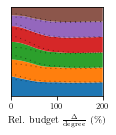

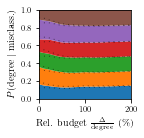

In [55]:
plot_preferences(local_degree_easiness, is_global=False, file_prefix="local_degree_easiness")

In [56]:
legend_fig = pylab.figure()
labels = [
    targets.replace("degree_", "").replace("_to_", "-").capitalize()
    for targets in gb.data.get_all_benchmark_targets()
]
handles = [Patch(facecolor=f"C{i}") for i in range(len(labels))]
pylab.figlegend(handles, labels, loc="center", ncol=3)
legend_fig.savefig(f"{plots_path}/local_degree_easiness_legend.pdf", dpi=500, bbox_inches="tight", pad_inches=0.01)

<Figure size 356.4x220.267 with 0 Axes>

## Perturbation Analysis

In [57]:
attack_characteristics = {'homophily': {('citeseer', 'gcn_1', 'global', 'fga_edges'): (93, 2.5313094960055658), ('citeseer', 'gcn_1', 'global', 'greedy_meta_edges'): (95, 2.7886412920233297), ('citeseer', 'gcn_1', 'global', 'pgd_edges'): (96, 0.9744374497662122), ('citeseer', 'gcn_1', 'global', 'pgd_meta_edges'): (47, 0.6530256343265085), ('citeseer', 'gcn_1', 'local', 'brute_force_edges'): (590, 9.697630147630147), ('citeseer', 'gcn_1', 'local', 'fga_edges'): (585, 11.141616168171728), ('citeseer', 'gcn_1', 'local', 'nettack_edges'): (600, 17.961283161283166), ('citeseer', 'gcn_1', 'local', 'pgd_edges'): (599, 51.98363398039872), ('citeseer', 'gcn_2', 'global', 'fga_edges'): (99, 2.1184717357825047), ('citeseer', 'gcn_2', 'global', 'greedy_meta_edges'): (93, 2.258473392552643), ('citeseer', 'gcn_2', 'global', 'pgd_edges'): (97, 0.8547288646757367), ('citeseer', 'gcn_2', 'global', 'pgd_meta_edges'): (53, 2.8213385664512156), ('citeseer', 'gcn_2', 'local', 'brute_force_edges'): (595, 6.125), ('citeseer', 'gcn_2', 'local', 'fga_edges'): (597, 9.71986776889523), ('citeseer', 'gcn_2', 'local', 'nettack_edges'): (600, 19.448953823953826), ('citeseer', 'gcn_2', 'local', 'pgd_edges'): (600, 32.99184398814959), ('citeseer', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (93, 3.3941463679895327), ('citeseer', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (98, 12.685759564383043), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (91, 5.093523988795758), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (67, 4.028242082329205), ('citeseer', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (538, 1.6015174153332046), ('citeseer', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (522, 21.442073783237312), ('citeseer', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (599, 89.35104160545332), ('citeseer', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 135.95983379193905), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (100, 1.6504162400432316), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 9.595020312061292), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (87, 5.5705624994894825), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (62, 8.57526421203891), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (575, 6.589819902319899), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (483, 21.67687984178966), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (567, 116.99540667732906), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 184.8444890077244), ('citeseer', 'grand_tuned', 'global', 'fga_edges'): (89, 0.0), ('citeseer', 'grand_tuned', 'global', 'greedy_meta_edges'): (46, 3.439246170558647), ('citeseer', 'grand_tuned', 'global', 'pgd_edges'): (92, 0.9506282966982197), ('citeseer', 'grand_tuned', 'global', 'pgd_meta_edges'): (43, 1.2655975363925127), ('citeseer', 'grand_tuned', 'local', 'brute_force_edges'): (579, 2.25), ('citeseer', 'grand_tuned', 'local', 'fga_edges'): (596, 2.494901960784313), ('citeseer', 'grand_tuned', 'local', 'nettack_edges'): (594, 107.83669761610936), ('citeseer', 'grand_tuned', 'local', 'pgd_edges'): (600, 41.57185869685872), ('citeseer', 'jaccard_gcn_faith', 'global', 'fga_edges'): (97, 1.9050152036011039), ('citeseer', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (94, 2.0439471001805916), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (99, 0.8541127372200457), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (47, 0.8559922449620273), ('citeseer', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (592, 8.718697968697969), ('citeseer', 'jaccard_gcn_faith', 'local', 'fga_edges'): (585, 11.145244301734067), ('citeseer', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 19.930114330114336), ('citeseer', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 50.04936538951246), ('citeseer', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (96, 2.71213175754861), ('citeseer', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (92, 1.9935717035656018), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (97, 0.9120660935185817), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (54, 2.8198820520753), ('citeseer', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (595, 8.4520202020202), ('citeseer', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (597, 11.263683830789093), ('citeseer', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 21.340007215007212), ('citeseer', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 33.39223113487821), ('citeseer', 'pro_gnn_faith', 'global', 'fga_edges'): (89, 2.128643430244215), ('citeseer', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (99, 8.286908508782801), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_edges'): (97, 0.7222146368174829), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (42, 0.6150156724272101), ('citeseer', 'pro_gnn_faith', 'local', 'brute_force_edges'): (590, 9.274553224553223), ('citeseer', 'pro_gnn_faith', 'local', 'fga_edges'): (587, 12.129675331230894), ('citeseer', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 26.924050949050965), ('citeseer', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 15.80194805194805), ('citeseer', 'pro_gnn_tuned', 'global', 'fga_edges'): (95, 1.585088917516309), ('citeseer', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (88, 11.996776516101349), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_edges'): (96, 0.7231900807599387), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (48, 1.2675146496520153), ('citeseer', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (591, 8.478311965811965), ('citeseer', 'pro_gnn_tuned', 'local', 'fga_edges'): (595, 9.218657489311514), ('citeseer', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 23.250310800310814), ('citeseer', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 8.25595238095238), ('citeseer', 'rgcn_faith', 'global', 'fga_edges'): (90, 4.086676972531221), ('citeseer', 'rgcn_faith', 'global', 'greedy_meta_edges'): (97, 3.1593348116831033), ('citeseer', 'rgcn_faith', 'global', 'pgd_edges'): (95, 1.2963052102632397), ('citeseer', 'rgcn_faith', 'global', 'pgd_meta_edges'): (56, 1.1955742726827954), ('citeseer', 'rgcn_faith', 'local', 'brute_force_edges'): (599, 2.1171069126951476), ('citeseer', 'rgcn_faith', 'local', 'fga_edges'): (591, 2.8026912629853804), ('citeseer', 'rgcn_faith', 'local', 'nettack_edges'): (600, 16.646428571428558), ('citeseer', 'rgcn_faith', 'local', 'pgd_edges'): (600, 32.02248366013072), ('citeseer', 'rgcn_tuned', 'global', 'fga_edges'): (96, 0.7917035097797981), ('citeseer', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (84, 1.7431917451897583), ('citeseer', 'rgcn_tuned', 'global', 'pgd_edges'): (95, 0.8122096506934398), ('citeseer', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (36, 0.3723136833091514), ('citeseer', 'rgcn_tuned', 'local', 'brute_force_edges'): (599, 1.5330298786181138), ('citeseer', 'rgcn_tuned', 'local', 'fga_edges'): (597, 2.9366994116994123), ('citeseer', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 22.95761183261185), ('citeseer', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 24.514912864912876), ('citeseer', 'soft_median_gdc_faith', 'global', 'fga_edges'): (92, 3.4363680821910263), ('citeseer', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (69, 13.518702917877265), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (94, 3.3827807446537825), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (33, 1.0656518871976828), ('citeseer', 'soft_median_gdc_faith', 'local', 'fga_edges'): (230, 30.767857142857142), ('citeseer', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 67.08833111333111), ('citeseer', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (598, 132.12630015153002), ('citeseer', 'soft_median_gdc_tuned', 'global', 'fga_edges'): (89, 4.6110060694343336), ('citeseer', 'soft_median_gdc_tuned', 'global', 'greedy_meta_edges'): (65, 20.343338049874003), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_edges'): (97, 4.404108809323664), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_meta_edges'): (35, 1.8895466126110587), ('citeseer', 'soft_median_gdc_tuned', 'local', 'fga_edges'): (246, 34.481150793650805), ('citeseer', 'soft_median_gdc_tuned', 'local', 'nettack_edges'): (600, 86.94961843711849), ('citeseer', 'soft_median_gdc_tuned', 'local', 'pgd_edges'): (600, 155.78908091908096), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (87, 0.1111111111111111), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (84, 8.181497836901624), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (97, 0.4678590651942232), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (74, 4.384149139108188), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (577, 11.084442097290394), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (596, 12.535259103641456), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (590, 24.60016458560508), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (597, 17.422085230100254), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (94, 0.037251828631138975), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (83, 10.34428722338911), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 0.5260596663513897), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (74, 4.248105003500765), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (586, 7.56123873116907), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (599, 11.446464646464646), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 37.94819715887827), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (600, 19.521971515074966), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (42, 0.1728253822211614), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (78, 6.608867148265407), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (43, 0.3465351211116737), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (68, 1.8274256467541483), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (598, 24.439019395637033), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (600, 22.601507936507954), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 26.79237151737152), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 35.75508380508382), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (70, 0.9712215560507658), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (72, 8.770618736936784), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (66, 0.9288080540275986), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (68, 2.970362322717021), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (600, 23.89523225312698), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (600, 25.753220089089666), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 28.16125541125541), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 34.470229770229786), ('cora', 'gcn_1', 'global', 'fga_edges'): (96, 0.10264535663040632), ('cora', 'gcn_1', 'global', 'greedy_meta_edges'): (87, 3.7174174687179824), ('cora', 'gcn_1', 'global', 'pgd_edges'): (100, 0.4437002025412947), ('cora', 'gcn_1', 'global', 'pgd_meta_edges'): (35, 0.4583011521823042), ('cora', 'gcn_1', 'local', 'brute_force_edges'): (599, 0.1111111111111111), ('cora', 'gcn_1', 'local', 'fga_edges'): (600, 0.38095238095238093), ('cora', 'gcn_1', 'local', 'nettack_edges'): (600, 19.428174603174607), ('cora', 'gcn_1', 'local', 'pgd_edges'): (600, 23.537698412698415), ('cora', 'gcn_2', 'global', 'fga_edges'): (96, 0.06652360944054768), ('cora', 'gcn_2', 'global', 'greedy_meta_edges'): (84, 5.628538570879086), ('cora', 'gcn_2', 'global', 'pgd_edges'): (96, 0.35550640068929384), ('cora', 'gcn_2', 'global', 'pgd_meta_edges'): (42, 1.116633926930387), ('cora', 'gcn_2', 'local', 'brute_force_edges'): (598, 0.0), ('cora', 'gcn_2', 'local', 'fga_edges'): (598, 0.7316849816849815), ('cora', 'gcn_2', 'local', 'nettack_edges'): (600, 23.20238095238096), ('cora', 'gcn_2', 'local', 'pgd_edges'): (600, 38.71010101010102), ('cora', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (97, 1.6615768478710458), ('cora', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (100, 13.715698911918558), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (93, 4.825689065745551), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (53, 2.07668564268857), ('cora', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (583, 3.85), ('cora', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (569, 16.176403022296647), ('cora', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (600, 93.36001310780723), ('cora', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 120.1245254745256), ('cora', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (99, 0.46918720898984057), ('cora', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 9.94538162193572), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (93, 4.924319299848149), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (66, 6.7504573452286785), ('cora', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (596, 1.3380952380952382), ('cora', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (562, 15.74768754573674), ('cora', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (587, 127.07256569857354), ('cora', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 175.10109710550884), ('cora', 'grand_tuned', 'global', 'fga_edges'): (94, 0.0521989044893151), ('cora', 'grand_tuned', 'global', 'greedy_meta_edges'): (82, 5.545499300343889), ('cora', 'grand_tuned', 'global', 'pgd_edges'): (99, 0.3625701369273118), ('cora', 'grand_tuned', 'global', 'pgd_meta_edges'): (39, 0.7806717093330199), ('cora', 'grand_tuned', 'local', 'brute_force_edges'): (589, 0.0), ('cora', 'grand_tuned', 'local', 'fga_edges'): (585, 0.21428571428571427), ('cora', 'grand_tuned', 'local', 'nettack_edges'): (600, 82.62605899002953), ('cora', 'grand_tuned', 'local', 'pgd_edges'): (600, 29.466660612760364), ('cora', 'jaccard_gcn_faith', 'global', 'fga_edges'): (100, 0.11672572331078113), ('cora', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (93, 3.276861253528395), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (96, 0.4926041637733896), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (38, 0.486013113344251), ('cora', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (600, 0.1111111111111111), ('cora', 'jaccard_gcn_faith', 'local', 'fga_edges'): (600, 0.6394841269841269), ('cora', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 24.549206349206358), ('cora', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 33.644047619047626), ('cora', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (98, 0.07181616576984835), ('cora', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (87, 5.943278553955591), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (99, 0.3403899851276425), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (45, 1.3605211622062894), ('cora', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (600, 0.302020202020202), ('cora', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (599, 0.36858974358974356), ('cora', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 28.796428571428585), ('cora', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 45.83373015873014), ('cora', 'pro_gnn_faith', 'global', 'fga_edges'): (91, 0.045448077193025856), ('cora', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (94, 12.083735812397004), ('cora', 'pro_gnn_faith', 'global', 'pgd_edges'): (101, 0.322542699686311), ('cora', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (36, 0.9397776553728355), ('cora', 'pro_gnn_faith', 'local', 'brute_force_edges'): (599, 0.26785714285714285), ('cora', 'pro_gnn_faith', 'local', 'fga_edges'): (600, 0.0), ('cora', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 34.064971139971135), ('cora', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 12.34941643323996), ('cora', 'pro_gnn_tuned', 'global', 'fga_edges'): (96, 0.02739093009176112), ('cora', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (96, 11.310170438866257), ('cora', 'pro_gnn_tuned', 'global', 'pgd_edges'): (102, 0.15488083162042268), ('cora', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (39, 1.0296703524287074), ('cora', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (599, 0.25396825396825395), ('cora', 'pro_gnn_tuned', 'local', 'fga_edges'): (600, 0.4133116883116883), ('cora', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 25.498878898878896), ('cora', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 1.2726190476190478), ('cora', 'rgcn_faith', 'global', 'fga_edges'): (95, 0.1561885132501884), ('cora', 'rgcn_faith', 'global', 'greedy_meta_edges'): (83, 2.8589161218988486), ('cora', 'rgcn_faith', 'global', 'pgd_edges'): (98, 0.5454269300801199), ('cora', 'rgcn_faith', 'global', 'pgd_meta_edges'): (43, 0.7934887639629197), ('cora', 'rgcn_faith', 'local', 'brute_force_edges'): (600, 0.0), ('cora', 'rgcn_faith', 'local', 'fga_edges'): (599, 5.222222222222222), ('cora', 'rgcn_faith', 'local', 'nettack_edges'): (600, 36.13452380952381), ('cora', 'rgcn_faith', 'local', 'pgd_edges'): (600, 20.589285714285733), ('cora', 'rgcn_tuned', 'global', 'fga_edges'): (85, 0.010989629000261233), ('cora', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (76, 3.2982019022022273), ('cora', 'rgcn_tuned', 'global', 'pgd_edges'): (96, 0.20287641420456046), ('cora', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (43, 1.1233662364674297), ('cora', 'rgcn_tuned', 'local', 'brute_force_edges'): (598, 0.5), ('cora', 'rgcn_tuned', 'local', 'fga_edges'): (594, 0.038461538461538464), ('cora', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 41.20614940614938), ('cora', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 50.55497835497836), ('cora', 'soft_median_gdc_faith', 'global', 'fga_edges'): (93, 5.36046390332279), ('cora', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (92, 30.829393333342736), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (97, 3.919635912293823), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (42, 2.368829458991998), ('cora', 'soft_median_gdc_faith', 'local', 'fga_edges'): (255, 34.115005550005556), ('cora', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 86.84664502164503), ('cora', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (600, 127.86753129653276), ('cora', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (69, 0.27019632414369255), ('cora', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (99, 14.091292007559453), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (93, 1.2475170091356105), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (76, 4.8820874701421975), ('cora', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (594, 9.383008658008656), ('cora', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (587, 15.678520499108732), ('cora', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (597, 33.25446204122675), ('cora', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (586, 21.536944488260293), ('cora', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (80, 0.362701143501005), ('cora', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (92, 12.863933924484316), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 1.3479328869942067), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (80, 6.982995773867574), ('cora', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (595, 8.70916305916306), ('cora', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (582, 11.590204678362573), ('cora', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 33.08875008836005), ('cora', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (588, 19.52712541082107), ('cora', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (37, 0.7062198766146134), ('cora', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (68, 8.061453635961739), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (48, 0.484296841470733), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (55, 3.169728799245687), ('cora', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (595, 16.139286079417655), ('cora', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (599, 14.111940836940834), ('cora', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 33.066012174100415), ('cora', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 24.975377400377415), ('cora', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (31, 0.7403562407890663), ('cora', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (73, 11.493219762399532), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (59, 0.7766556641579979), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (62, 3.671497253801442), ('cora', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (597, 20.6386618283677), ('cora', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (596, 9.827887076056408), ('cora', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 30.210207847707863), ('cora', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 23.7860585149285)}, 'jaccard': {('citeseer', 'gcn_1', 'global', 'fga_edges'): (93, 2.232995232567191), ('citeseer', 'gcn_1', 'global', 'greedy_meta_edges'): (95, 2.6345690935850143), ('citeseer', 'gcn_1', 'global', 'pgd_edges'): (96, 2.0935396812856197), ('citeseer', 'gcn_1', 'global', 'pgd_meta_edges'): (47, 1.0699710566550493), ('citeseer', 'gcn_1', 'local', 'brute_force_edges'): (590, 14.068399644456804), ('citeseer', 'gcn_1', 'local', 'fga_edges'): (585, 14.3507872056216), ('citeseer', 'gcn_1', 'local', 'nettack_edges'): (600, 15.325300453230739), ('citeseer', 'gcn_1', 'local', 'pgd_edges'): (599, 17.93094150989782), ('citeseer', 'gcn_2', 'global', 'fga_edges'): (99, 2.4900025222450495), ('citeseer', 'gcn_2', 'global', 'greedy_meta_edges'): (93, 2.604909809306264), ('citeseer', 'gcn_2', 'global', 'pgd_edges'): (97, 2.262310301885009), ('citeseer', 'gcn_2', 'global', 'pgd_meta_edges'): (53, 1.2192438021302223), ('citeseer', 'gcn_2', 'local', 'brute_force_edges'): (595, 15.040810592938215), ('citeseer', 'gcn_2', 'local', 'fga_edges'): (597, 15.651581841520965), ('citeseer', 'gcn_2', 'local', 'nettack_edges'): (600, 16.322137915994972), ('citeseer', 'gcn_2', 'local', 'pgd_edges'): (600, 18.49205698724836), ('citeseer', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (93, 8.103998266160488), ('citeseer', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (98, 7.535623673349619), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (91, 7.278186351060867), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (67, 2.9804361052811146), ('citeseer', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (538, 37.54337119497359), ('citeseer', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (522, 45.753694551065564), ('citeseer', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (599, 24.740415645763278), ('citeseer', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 51.283889036625624), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (100, 9.173884361982346), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 9.881846688687801), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (87, 7.139754891395569), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (62, 2.6659967228770256), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (575, 36.720279544591904), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (483, 46.47566846711561), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (567, 25.291788283269852), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 58.26816391851753), ('citeseer', 'grand_tuned', 'global', 'fga_edges'): (89, 2.136520443484187), ('citeseer', 'grand_tuned', 'global', 'greedy_meta_edges'): (46, 1.0020021609961987), ('citeseer', 'grand_tuned', 'global', 'pgd_edges'): (92, 2.156078763306141), ('citeseer', 'grand_tuned', 'global', 'pgd_meta_edges'): (43, 1.0245277639478445), ('citeseer', 'grand_tuned', 'local', 'brute_force_edges'): (579, 14.773072043433785), ('citeseer', 'grand_tuned', 'local', 'fga_edges'): (596, 14.079299644799903), ('citeseer', 'grand_tuned', 'local', 'nettack_edges'): (594, 23.291577733820304), ('citeseer', 'grand_tuned', 'local', 'pgd_edges'): (600, 18.62494724802673), ('citeseer', 'jaccard_gcn_faith', 'global', 'fga_edges'): (97, 2.560299562290311), ('citeseer', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (94, 3.1844035889953375), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (99, 2.8896486219018698), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (47, 1.4133375268429518), ('citeseer', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (592, 17.211204630322754), ('citeseer', 'jaccard_gcn_faith', 'local', 'fga_edges'): (585, 17.527256195433438), ('citeseer', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 18.23836885765195), ('citeseer', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 21.041531816124916), ('citeseer', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (96, 2.698228143155575), ('citeseer', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (92, 3.145846411585808), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (97, 2.895842857658863), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (54, 1.616559375077486), ('citeseer', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (595, 18.556111660785973), ('citeseer', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (597, 19.13826076965779), ('citeseer', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 18.925927334465086), ('citeseer', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 22.00795169081539), ('citeseer', 'pro_gnn_faith', 'global', 'fga_edges'): (89, 2.028093483299017), ('citeseer', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (99, 5.55875338613987), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_edges'): (97, 2.1120211631059647), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (42, 0.9620279651135206), ('citeseer', 'pro_gnn_faith', 'local', 'brute_force_edges'): (590, 13.999968291260302), ('citeseer', 'pro_gnn_faith', 'local', 'fga_edges'): (587, 14.421150942100212), ('citeseer', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 16.515015029581264), ('citeseer', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 14.982158903498203), ('citeseer', 'pro_gnn_tuned', 'global', 'fga_edges'): (95, 1.9950616331771016), ('citeseer', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (88, 2.1021726559847593), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_edges'): (96, 2.0394354639574885), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (48, 1.1732490323483944), ('citeseer', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (591, 13.848368329228833), ('citeseer', 'pro_gnn_tuned', 'local', 'fga_edges'): (595, 13.831947717349976), ('citeseer', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 15.896208623657003), ('citeseer', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 13.57509305072017), ('citeseer', 'rgcn_faith', 'global', 'fga_edges'): (90, 2.0249806493520737), ('citeseer', 'rgcn_faith', 'global', 'greedy_meta_edges'): (97, 2.6733974777162075), ('citeseer', 'rgcn_faith', 'global', 'pgd_edges'): (95, 2.0742179779335856), ('citeseer', 'rgcn_faith', 'global', 'pgd_meta_edges'): (56, 1.2663438972085714), ('citeseer', 'rgcn_faith', 'local', 'brute_force_edges'): (599, 13.162587395403534), ('citeseer', 'rgcn_faith', 'local', 'fga_edges'): (591, 12.277496574213728), ('citeseer', 'rgcn_faith', 'local', 'nettack_edges'): (600, 15.912820413475856), ('citeseer', 'rgcn_faith', 'local', 'pgd_edges'): (600, 16.001049673184752), ('citeseer', 'rgcn_tuned', 'global', 'fga_edges'): (96, 2.1943386625498533), ('citeseer', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (84, 2.3798042871057987), ('citeseer', 'rgcn_tuned', 'global', 'pgd_edges'): (95, 2.150730427354574), ('citeseer', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (36, 0.8740601912140846), ('citeseer', 'rgcn_tuned', 'local', 'brute_force_edges'): (599, 13.837635285686702), ('citeseer', 'rgcn_tuned', 'local', 'fga_edges'): (597, 13.819297031732276), ('citeseer', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 16.483894338365644), ('citeseer', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 16.05666715465486), ('citeseer', 'soft_median_gdc_faith', 'global', 'fga_edges'): (92, 2.4749798933044076), ('citeseer', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (69, 2.586682751774788), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (94, 2.478841019794345), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (33, 0.8267333842813969), ('citeseer', 'soft_median_gdc_faith', 'local', 'fga_edges'): (230, 8.920395739376545), ('citeseer', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 20.50502112414688), ('citeseer', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (598, 26.688317814841866), ('citeseer', 'soft_median_gdc_tuned', 'global', 'fga_edges'): (89, 2.544228307902813), ('citeseer', 'soft_median_gdc_tuned', 'global', 'greedy_meta_edges'): (65, 2.513996109366417), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_edges'): (97, 2.671180561184883), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_meta_edges'): (35, 0.8813554514199495), ('citeseer', 'soft_median_gdc_tuned', 'local', 'fga_edges'): (246, 10.220197721384466), ('citeseer', 'soft_median_gdc_tuned', 'local', 'nettack_edges'): (600, 22.63092289469205), ('citeseer', 'soft_median_gdc_tuned', 'local', 'pgd_edges'): (600, 30.196694173384458), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (87, 1.7019880199804902), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (84, 1.7724398290738463), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (97, 2.000427581369877), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (74, 1.597032131627202), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (577, 11.879831444006413), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (596, 13.986979200970381), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (590, 14.751788739115), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (597, 14.305051326518878), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (94, 1.8532367506995797), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (83, 1.8669382445514202), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 1.9284116504713893), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (74, 1.6115954592823982), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (586, 11.724579796660691), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (599, 14.361910215113312), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 16.135445000138134), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (600, 15.06519237626344), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (42, 0.8699384555220604), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (78, 1.7043076381087303), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (43, 0.8771009147167206), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (68, 1.4562544953078032), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (598, 13.28561141481623), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (600, 13.365494094556198), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 15.916749109281227), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 14.970215781824663), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (70, 1.5639792662113905), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (72, 1.6882691532373428), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (66, 1.3931409381330013), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (68, 1.5332473535090685), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (600, 13.65402083331719), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (600, 14.150479659670964), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 15.646601320011541), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 15.215904881479219), ('cora', 'gcn_1', 'global', 'fga_edges'): (96, 3.228478731587529), ('cora', 'gcn_1', 'global', 'greedy_meta_edges'): (87, 2.796386703848839), ('cora', 'gcn_1', 'global', 'pgd_edges'): (100, 2.974290683865547), ('cora', 'gcn_1', 'global', 'pgd_meta_edges'): (35, 1.045448062941432), ('cora', 'gcn_1', 'local', 'brute_force_edges'): (599, 17.15227353363298), ('cora', 'gcn_1', 'local', 'fga_edges'): (600, 18.941988322651014), ('cora', 'gcn_1', 'local', 'nettack_edges'): (600, 19.132115913555026), ('cora', 'gcn_1', 'local', 'pgd_edges'): (600, 21.296646150993183), ('cora', 'gcn_2', 'global', 'fga_edges'): (96, 3.0727689042687416), ('cora', 'gcn_2', 'global', 'greedy_meta_edges'): (84, 2.786903226748109), ('cora', 'gcn_2', 'global', 'pgd_edges'): (96, 2.8675912767648697), ('cora', 'gcn_2', 'global', 'pgd_meta_edges'): (42, 1.2602808382362127), ('cora', 'gcn_2', 'local', 'brute_force_edges'): (598, 17.84956738818437), ('cora', 'gcn_2', 'local', 'fga_edges'): (598, 18.449461609241553), ('cora', 'gcn_2', 'local', 'nettack_edges'): (600, 18.767044589389116), ('cora', 'gcn_2', 'local', 'pgd_edges'): (600, 21.285509329289198), ('cora', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (97, 10.803590811789036), ('cora', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (100, 9.081068236380816), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (93, 10.076222360134125), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (53, 3.5868967324495316), ('cora', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (583, 50.49356175027788), ('cora', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (569, 65.29545259848237), ('cora', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (600, 28.283387820236385), ('cora', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 60.73810498602688), ('cora', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (99, 12.00477997213602), ('cora', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 11.168720059096813), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (93, 10.022423513233662), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (66, 4.331537771970034), ('cora', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (596, 43.80942825879902), ('cora', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (562, 64.04929505288601), ('cora', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (587, 29.865243836771697), ('cora', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 64.20997281558812), ('cora', 'grand_tuned', 'global', 'fga_edges'): (94, 1.6422691345214844), ('cora', 'grand_tuned', 'global', 'greedy_meta_edges'): (82, 1.5426370613276958), ('cora', 'grand_tuned', 'global', 'pgd_edges'): (99, 2.305038328282535), ('cora', 'grand_tuned', 'global', 'pgd_meta_edges'): (39, 1.2743512112647295), ('cora', 'grand_tuned', 'local', 'brute_force_edges'): (589, 4.775083619169891), ('cora', 'grand_tuned', 'local', 'fga_edges'): (585, 6.985541573667433), ('cora', 'grand_tuned', 'local', 'nettack_edges'): (600, 23.018378654960543), ('cora', 'grand_tuned', 'local', 'pgd_edges'): (600, 7.982495524338447), ('cora', 'jaccard_gcn_faith', 'global', 'fga_edges'): (100, 4.158127564936876), ('cora', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (93, 4.474486663937569), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (96, 4.118349440395832), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (38, 1.6623637899756432), ('cora', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (600, 25.502412794157863), ('cora', 'jaccard_gcn_faith', 'local', 'fga_edges'): (600, 25.55501626804471), ('cora', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 25.867905838415027), ('cora', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 28.233069885522127), ('cora', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (98, 3.833253014832735), ('cora', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (87, 4.057874154299498), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (99, 4.257597152143717), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (45, 2.0014894381165504), ('cora', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (600, 24.849942492321134), ('cora', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (599, 25.110847419127822), ('cora', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 25.926011128351092), ('cora', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 28.617734408006072), ('cora', 'pro_gnn_faith', 'global', 'fga_edges'): (91, 2.8143114279955626), ('cora', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (94, 5.761345949023962), ('cora', 'pro_gnn_faith', 'global', 'pgd_edges'): (101, 2.9870447032153606), ('cora', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (36, 1.6473733596503735), ('cora', 'pro_gnn_faith', 'local', 'brute_force_edges'): (599, 17.150340508203954), ('cora', 'pro_gnn_faith', 'local', 'fga_edges'): (600, 18.915062559070066), ('cora', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 20.153747622855008), ('cora', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 19.780611619586125), ('cora', 'pro_gnn_tuned', 'global', 'fga_edges'): (96, 2.262886105105281), ('cora', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (96, 6.741627611219883), ('cora', 'pro_gnn_tuned', 'global', 'pgd_edges'): (102, 2.947525192052126), ('cora', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (39, 1.622150231152773), ('cora', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (599, 16.07654125057161), ('cora', 'pro_gnn_tuned', 'local', 'fga_edges'): (600, 17.69756155530922), ('cora', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 19.291133332066238), ('cora', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 16.4229875667952), ('cora', 'rgcn_faith', 'global', 'fga_edges'): (95, 2.29929019510746), ('cora', 'rgcn_faith', 'global', 'greedy_meta_edges'): (83, 2.6658424604684114), ('cora', 'rgcn_faith', 'global', 'pgd_edges'): (98, 2.8597401939332485), ('cora', 'rgcn_faith', 'global', 'pgd_meta_edges'): (43, 1.3397232256829739), ('cora', 'rgcn_faith', 'local', 'brute_force_edges'): (600, 15.903492824174464), ('cora', 'rgcn_faith', 'local', 'fga_edges'): (599, 17.608021578285843), ('cora', 'rgcn_faith', 'local', 'nettack_edges'): (600, 20.101524407975376), ('cora', 'rgcn_faith', 'local', 'pgd_edges'): (600, 18.94425249332562), ('cora', 'rgcn_tuned', 'global', 'fga_edges'): (85, 2.093617133796215), ('cora', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (76, 2.433057188987732), ('cora', 'rgcn_tuned', 'global', 'pgd_edges'): (96, 2.6884126346558332), ('cora', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (43, 1.2529262639582157), ('cora', 'rgcn_tuned', 'local', 'brute_force_edges'): (598, 15.130775769473985), ('cora', 'rgcn_tuned', 'local', 'fga_edges'): (594, 16.86247777065728), ('cora', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 20.58833235129714), ('cora', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 20.91131265112199), ('cora', 'soft_median_gdc_faith', 'global', 'fga_edges'): (93, 3.3733605463057756), ('cora', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (92, 3.6283812019973993), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (97, 3.5589577220380306), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (42, 1.59291460365057), ('cora', 'soft_median_gdc_faith', 'local', 'fga_edges'): (255, 13.94800288323313), ('cora', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 23.822080311831087), ('cora', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (600, 28.956677997717634), ('cora', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (69, 1.400496126152575), ('cora', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (99, 2.0740517787635326), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (93, 2.333191754296422), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (76, 1.888027785345912), ('cora', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (594, 19.949133958667517), ('cora', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (587, 18.629300778266042), ('cora', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (597, 19.650201892014593), ('cora', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (586, 18.766116632614285), ('cora', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (80, 1.5672826138325036), ('cora', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (92, 1.9465859811753035), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 2.295654520392418), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (80, 2.020189916715026), ('cora', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (595, 18.82001667842269), ('cora', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (582, 18.212120906449854), ('cora', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 19.51420225435868), ('cora', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (588, 18.645514829084277), ('cora', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (37, 0.8574981158599257), ('cora', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (68, 2.057054093107581), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (48, 1.239498294889927), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (55, 1.5091511402279139), ('cora', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (595, 19.206828355789185), ('cora', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (599, 19.591587584465742), ('cora', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 20.030227329581976), ('cora', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 19.666939976159483), ('cora', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (31, 0.7771108746528625), ('cora', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (73, 2.245793217793107), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (59, 1.6027308106422424), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (62, 1.7150447126477957), ('cora', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (597, 18.924032892799005), ('cora', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (596, 18.637077188584954), ('cora', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 19.817197900731117), ('cora', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 18.985460457392037)}, 'centrality': {('citeseer', 'gcn_1', 'global', 'fga_edges'): (93, 9.227812133729458), ('citeseer', 'gcn_1', 'global', 'greedy_meta_edges'): (95, 9.926768891513348), ('citeseer', 'gcn_1', 'global', 'pgd_edges'): (96, 10.138395078480244), ('citeseer', 'gcn_1', 'global', 'pgd_meta_edges'): (47, 4.983706824481487), ('citeseer', 'gcn_1', 'local', 'brute_force_edges'): (590, 63.341002374887466), ('citeseer', 'gcn_1', 'local', 'fga_edges'): (585, 61.93082267791033), ('citeseer', 'gcn_1', 'local', 'nettack_edges'): (600, 64.30455978959799), ('citeseer', 'gcn_1', 'local', 'pgd_edges'): (599, 65.0225880369544), ('citeseer', 'gcn_2', 'global', 'fga_edges'): (99, 9.73520790785551), ('citeseer', 'gcn_2', 'global', 'greedy_meta_edges'): (93, 9.719407752156258), ('citeseer', 'gcn_2', 'global', 'pgd_edges'): (97, 10.335493087768555), ('citeseer', 'gcn_2', 'global', 'pgd_meta_edges'): (53, 5.5980474054813385), ('citeseer', 'gcn_2', 'local', 'brute_force_edges'): (595, 63.3770005851984), ('citeseer', 'gcn_2', 'local', 'fga_edges'): (597, 62.89314641058445), ('citeseer', 'gcn_2', 'local', 'nettack_edges'): (600, 63.99135759845376), ('citeseer', 'gcn_2', 'local', 'pgd_edges'): (600, 64.57515437155962), ('citeseer', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (93, 10.233793780207634), ('citeseer', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (98, 10.442127302289009), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (91, 10.010133072733879), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (67, 7.24488428235054), ('citeseer', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (538, 60.87663393467665), ('citeseer', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (522, 59.300298407673836), ('citeseer', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (599, 65.16454349830747), ('citeseer', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 69.1254113689065), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (100, 11.066671073436737), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 10.365393288433552), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (87, 9.619473412632942), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (62, 6.691610023379326), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (575, 64.03186102956533), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (483, 55.352799005806446), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (567, 62.52111625671387), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 70.39366561919451), ('citeseer', 'grand_tuned', 'global', 'fga_edges'): (89, 8.854892864823341), ('citeseer', 'grand_tuned', 'global', 'greedy_meta_edges'): (46, 4.74992960691452), ('citeseer', 'grand_tuned', 'global', 'pgd_edges'): (92, 9.645450465381145), ('citeseer', 'grand_tuned', 'global', 'pgd_meta_edges'): (43, 4.553226940333843), ('citeseer', 'grand_tuned', 'local', 'brute_force_edges'): (579, 63.91322375833988), ('citeseer', 'grand_tuned', 'local', 'fga_edges'): (596, 64.9077250212431), ('citeseer', 'grand_tuned', 'local', 'nettack_edges'): (594, 64.67226332426071), ('citeseer', 'grand_tuned', 'local', 'pgd_edges'): (600, 66.86239092051983), ('citeseer', 'jaccard_gcn_faith', 'global', 'fga_edges'): (97, 9.689815178513527), ('citeseer', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (94, 9.85336384922266), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (99, 10.479796305298805), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (47, 5.00918985158205), ('citeseer', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (592, 63.51503888517618), ('citeseer', 'jaccard_gcn_faith', 'local', 'fga_edges'): (585, 62.14371759444475), ('citeseer', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 64.37795998901129), ('citeseer', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 65.28301740437746), ('citeseer', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (96, 9.49072416126728), ('citeseer', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (92, 9.673026956617832), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (97, 10.352612741291523), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (54, 5.7113772332668304), ('citeseer', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (595, 63.36342867463827), ('citeseer', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (597, 63.10733685642481), ('citeseer', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 64.02795895561576), ('citeseer', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 64.61662494391203), ('citeseer', 'pro_gnn_faith', 'global', 'fga_edges'): (89, 8.781819000840187), ('citeseer', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (99, 10.471982896327972), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_edges'): (97, 10.218266032636166), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (42, 4.420713201165199), ('citeseer', 'pro_gnn_faith', 'local', 'brute_force_edges'): (590, 63.329606376588345), ('citeseer', 'pro_gnn_faith', 'local', 'fga_edges'): (587, 61.8968755453825), ('citeseer', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 64.06119073927402), ('citeseer', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 64.49604620039463), ('citeseer', 'pro_gnn_tuned', 'global', 'fga_edges'): (95, 9.229401879012585), ('citeseer', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (88, 8.929655984044075), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_edges'): (96, 10.056057877838612), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (48, 5.0792393535375595), ('citeseer', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (591, 63.70850337296724), ('citeseer', 'pro_gnn_tuned', 'local', 'fga_edges'): (595, 63.0112454816699), ('citeseer', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 64.27871045470238), ('citeseer', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 64.37516147643328), ('citeseer', 'rgcn_faith', 'global', 'fga_edges'): (90, 8.833496235311031), ('citeseer', 'rgcn_faith', 'global', 'greedy_meta_edges'): (97, 10.120574750006199), ('citeseer', 'rgcn_faith', 'global', 'pgd_edges'): (95, 10.00436931848526), ('citeseer', 'rgcn_faith', 'global', 'pgd_meta_edges'): (56, 5.921929858624935), ('citeseer', 'rgcn_faith', 'local', 'brute_force_edges'): (599, 64.82130973786116), ('citeseer', 'rgcn_faith', 'local', 'fga_edges'): (591, 62.34506641328335), ('citeseer', 'rgcn_faith', 'local', 'nettack_edges'): (600, 63.972117714583874), ('citeseer', 'rgcn_faith', 'local', 'pgd_edges'): (600, 64.430340975523), ('citeseer', 'rgcn_tuned', 'global', 'fga_edges'): (96, 9.503443792462349), ('citeseer', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (84, 8.764720544219017), ('citeseer', 'rgcn_tuned', 'global', 'pgd_edges'): (95, 9.989289417862892), ('citeseer', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (36, 3.8072031289339066), ('citeseer', 'rgcn_tuned', 'local', 'brute_force_edges'): (599, 65.41804049909115), ('citeseer', 'rgcn_tuned', 'local', 'fga_edges'): (597, 64.15335641801357), ('citeseer', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 64.02133467420936), ('citeseer', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 65.00993263721466), ('citeseer', 'soft_median_gdc_faith', 'global', 'fga_edges'): (92, 9.191089138388634), ('citeseer', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (69, 7.375259168446064), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (94, 9.90796858817339), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (33, 3.4619377851486206), ('citeseer', 'soft_median_gdc_faith', 'local', 'fga_edges'): (230, 25.69886826723814), ('citeseer', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 64.2063274718821), ('citeseer', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (598, 66.43919507414103), ('citeseer', 'soft_median_gdc_tuned', 'global', 'fga_edges'): (89, 8.987926594913006), ('citeseer', 'soft_median_gdc_tuned', 'global', 'greedy_meta_edges'): (65, 6.955781236290932), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_edges'): (97, 10.185127571225166), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_meta_edges'): (35, 3.677654892206192), ('citeseer', 'soft_median_gdc_tuned', 'local', 'fga_edges'): (246, 27.96185662597418), ('citeseer', 'soft_median_gdc_tuned', 'local', 'nettack_edges'): (600, 64.77841348946095), ('citeseer', 'soft_median_gdc_tuned', 'local', 'pgd_edges'): (600, 66.85347031801939), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (87, 10.591096080839634), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (84, 10.114208810031414), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (97, 11.683113396167755), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (74, 9.134984843432903), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (577, 77.06930954754353), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (596, 70.41287875920534), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (590, 70.81414359807968), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (597, 71.00772523880005), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (94, 11.516765996813774), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (83, 10.096370548009872), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 11.551999904215336), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (74, 9.058692768216133), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (586, 77.61876459419727), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (599, 72.53154492378235), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 73.26757565885782), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (600, 72.93500829488039), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (42, 4.881498202681541), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (78, 9.021194770932198), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (43, 4.959102384746075), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (68, 8.0386513620615), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (598, 78.72424676269293), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (600, 71.85833582282066), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 71.21390368044376), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 72.13973873853683), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (70, 8.223211795091629), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (72, 8.441963873803616), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (66, 7.734004080295563), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (68, 8.001639999449253), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (600, 79.11161010712385), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (600, 71.9421160146594), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 71.14240359514952), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 71.77096741646528), ('cora', 'gcn_1', 'global', 'fga_edges'): (96, 13.829656511545181), ('cora', 'gcn_1', 'global', 'greedy_meta_edges'): (87, 13.127743199467659), ('cora', 'gcn_1', 'global', 'pgd_edges'): (100, 15.592698365449905), ('cora', 'gcn_1', 'global', 'pgd_meta_edges'): (35, 5.403719961643219), ('cora', 'gcn_1', 'local', 'brute_force_edges'): (599, 92.8857147693634), ('cora', 'gcn_1', 'local', 'fga_edges'): (600, 92.01469585299492), ('cora', 'gcn_1', 'local', 'nettack_edges'): (600, 92.69542394578457), ('cora', 'gcn_1', 'local', 'pgd_edges'): (600, 93.32852581888437), ('cora', 'gcn_2', 'global', 'fga_edges'): (96, 13.85205391049385), ('cora', 'gcn_2', 'global', 'greedy_meta_edges'): (84, 12.672511205077171), ('cora', 'gcn_2', 'global', 'pgd_edges'): (96, 14.901483997702599), ('cora', 'gcn_2', 'global', 'pgd_meta_edges'): (42, 6.508454889059067), ('cora', 'gcn_2', 'local', 'brute_force_edges'): (598, 92.64629080891609), ('cora', 'gcn_2', 'local', 'fga_edges'): (598, 91.54267520457506), ('cora', 'gcn_2', 'local', 'nettack_edges'): (600, 92.48738745599985), ('cora', 'gcn_2', 'local', 'pgd_edges'): (600, 93.51718147844076), ('cora', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (97, 14.965579584240913), ('cora', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (100, 15.797050923109055), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (93, 15.042529195547104), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (53, 8.431624636054039), ('cora', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (583, 95.86300721764565), ('cora', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (569, 93.49799636006355), ('cora', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (600, 94.04965506494045), ('cora', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 99.26099749654531), ('cora', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (99, 15.66645796597004), ('cora', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 15.084375381469727), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (93, 15.069834426045418), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (66, 10.522165775299072), ('cora', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (596, 96.12208013981581), ('cora', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (562, 93.04890168458223), ('cora', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (587, 92.66072446852922), ('cora', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 99.91518950462341), ('cora', 'grand_tuned', 'global', 'fga_edges'): (94, 13.06705605238676), ('cora', 'grand_tuned', 'global', 'greedy_meta_edges'): (82, 12.284100353717804), ('cora', 'grand_tuned', 'global', 'pgd_edges'): (99, 15.685255527496338), ('cora', 'grand_tuned', 'global', 'pgd_meta_edges'): (39, 6.030067801475525), ('cora', 'grand_tuned', 'local', 'brute_force_edges'): (589, 93.2709634527564), ('cora', 'grand_tuned', 'local', 'fga_edges'): (585, 88.80221174657345), ('cora', 'grand_tuned', 'local', 'nettack_edges'): (600, 93.82759231328964), ('cora', 'grand_tuned', 'local', 'pgd_edges'): (600, 93.41329234093428), ('cora', 'jaccard_gcn_faith', 'global', 'fga_edges'): (100, 15.067972257733345), ('cora', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (93, 14.305274575948715), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (96, 14.99176886677742), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (38, 5.946654036641121), ('cora', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (600, 94.82166639715433), ('cora', 'jaccard_gcn_faith', 'local', 'fga_edges'): (600, 93.5964835062623), ('cora', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 93.47103046625853), ('cora', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 94.97197464853525), ('cora', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (98, 14.888820499181747), ('cora', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (87, 13.295968353748322), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (99, 15.447899401187897), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (45, 7.030022159218788), ('cora', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (600, 93.95002463459969), ('cora', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (599, 93.63031736761332), ('cora', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 93.15219993144274), ('cora', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 94.02772288769484), ('cora', 'pro_gnn_faith', 'global', 'fga_edges'): (91, 13.074591234326363), ('cora', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (94, 14.312455654144287), ('cora', 'pro_gnn_faith', 'global', 'pgd_edges'): (101, 15.702711060643196), ('cora', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (36, 5.605210289359093), ('cora', 'pro_gnn_faith', 'local', 'brute_force_edges'): (599, 92.79144643992186), ('cora', 'pro_gnn_faith', 'local', 'fga_edges'): (600, 91.81412266939878), ('cora', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 92.8721870854497), ('cora', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 93.24292574822903), ('cora', 'pro_gnn_tuned', 'global', 'fga_edges'): (96, 13.522997438907623), ('cora', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (96, 14.847497716546059), ('cora', 'pro_gnn_tuned', 'global', 'pgd_edges'): (102, 15.78602910041809), ('cora', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (39, 6.059317409992218), ('cora', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (599, 92.53097463399172), ('cora', 'pro_gnn_tuned', 'local', 'fga_edges'): (600, 91.55439366400242), ('cora', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 92.89446714520454), ('cora', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 92.50293969362974), ('cora', 'rgcn_faith', 'global', 'fga_edges'): (95, 13.288190111517906), ('cora', 'rgcn_faith', 'global', 'greedy_meta_edges'): (83, 12.546840280294418), ('cora', 'rgcn_faith', 'global', 'pgd_edges'): (98, 15.358499303460121), ('cora', 'rgcn_faith', 'global', 'pgd_meta_edges'): (43, 6.655242040753365), ('cora', 'rgcn_faith', 'local', 'brute_force_edges'): (600, 94.14076665043831), ('cora', 'rgcn_faith', 'local', 'fga_edges'): (599, 92.88327147811651), ('cora', 'rgcn_faith', 'local', 'nettack_edges'): (600, 93.00302857905626), ('cora', 'rgcn_faith', 'local', 'pgd_edges'): (600, 93.98430901020765), ('cora', 'rgcn_tuned', 'global', 'fga_edges'): (85, 11.923095494508743), ('cora', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (76, 11.381331115961075), ('cora', 'rgcn_tuned', 'global', 'pgd_edges'): (96, 14.737747311592102), ('cora', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (43, 6.607492685317993), ('cora', 'rgcn_tuned', 'local', 'brute_force_edges'): (598, 93.23582011461258), ('cora', 'rgcn_tuned', 'local', 'fga_edges'): (594, 90.97484673559666), ('cora', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 93.0273451730609), ('cora', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 93.72040021419525), ('cora', 'soft_median_gdc_faith', 'global', 'fga_edges'): (93, 13.709919273853302), ('cora', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (92, 14.534661948680878), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (97, 15.085761740803719), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (42, 6.493759170174599), ('cora', 'soft_median_gdc_faith', 'local', 'fga_edges'): (255, 41.786054112017155), ('cora', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 93.24963301420212), ('cora', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (600, 94.86303418129683), ('cora', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (69, 12.52663929760456), ('cora', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (99, 18.526812985539436), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (93, 17.216928005218506), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (76, 14.068301126360893), ('cora', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (594, 111.75612032413483), ('cora', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (587, 107.08247109502554), ('cora', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (597, 109.59278033673763), ('cora', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (586, 107.18766535818577), ('cora', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (80, 14.574558019638062), ('cora', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (92, 17.00966966152191), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 17.404891431331635), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (80, 14.821627870202065), ('cora', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (595, 112.92079944908619), ('cora', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (582, 106.61727908998728), ('cora', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 110.55785646289587), ('cora', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (588, 107.79193812608719), ('cora', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (37, 6.4784795343875885), ('cora', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (68, 11.969675734639168), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (48, 8.025178477168083), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (55, 9.635734289884567), ('cora', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (595, 114.61560608446598), ('cora', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (599, 104.64477698504925), ('cora', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 103.33225766569376), ('cora', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 104.67525609582663), ('cora', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (31, 5.373033672571182), ('cora', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (73, 12.902434438467026), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (59, 9.790730461478233), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (62, 10.806615263223648), ('cora', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (597, 115.2494948208332), ('cora', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (596, 104.28286868333817), ('cora', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 103.50146874785423), ('cora', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 104.91890400648117)}, 'degree': {('citeseer', 'gcn_1', 'global', 'fga_edges'): (93, 109.01953399181366), ('citeseer', 'gcn_1', 'global', 'greedy_meta_edges'): (95, 166.5165135860443), ('citeseer', 'gcn_1', 'global', 'pgd_edges'): (96, 220.34641993045807), ('citeseer', 'gcn_1', 'global', 'pgd_meta_edges'): (47, 111.77310085296631), ('citeseer', 'gcn_1', 'local', 'brute_force_edges'): (590, 2620.9430656433105), ('citeseer', 'gcn_1', 'local', 'fga_edges'): (585, 2109.6479489803314), ('citeseer', 'gcn_1', 'local', 'nettack_edges'): (600, 2799.1544024944305), ('citeseer', 'gcn_1', 'local', 'pgd_edges'): (599, 2699.292435646057), ('citeseer', 'gcn_2', 'global', 'fga_edges'): (99, 125.78912591934204), ('citeseer', 'gcn_2', 'global', 'greedy_meta_edges'): (93, 162.8781989812851), ('citeseer', 'gcn_2', 'global', 'pgd_edges'): (97, 230.10941863059998), ('citeseer', 'gcn_2', 'global', 'pgd_meta_edges'): (53, 124.96621763706207), ('citeseer', 'gcn_2', 'local', 'brute_force_edges'): (595, 2740.2286834716797), ('citeseer', 'gcn_2', 'local', 'fga_edges'): (597, 2234.2692667245865), ('citeseer', 'gcn_2', 'local', 'nettack_edges'): (600, 2804.606348991394), ('citeseer', 'gcn_2', 'local', 'pgd_edges'): (600, 2683.3891652822495), ('citeseer', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (93, 236.1023405790329), ('citeseer', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (98, 220.06900703907013), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (91, 357.24618697166443), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (67, 182.86933183670044), ('citeseer', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (538, 2786.162155985832), ('citeseer', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (522, 2492.2748688459396), ('citeseer', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (599, 3099.3127624988556), ('citeseer', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 3713.0724675655365), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (100, 357.8602421283722), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 179.78048741817474), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (87, 363.96618723869324), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (62, 159.35759508609772), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (575, 2654.723112821579), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (483, 2388.6286252737045), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (567, 3025.553906917572), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 4133.324060082436), ('citeseer', 'grand_tuned', 'global', 'fga_edges'): (89, 94.19144403934479), ('citeseer', 'grand_tuned', 'global', 'greedy_meta_edges'): (46, 66.03304469585419), ('citeseer', 'grand_tuned', 'global', 'pgd_edges'): (92, 167.43378233909607), ('citeseer', 'grand_tuned', 'global', 'pgd_meta_edges'): (43, 99.40992987155914), ('citeseer', 'grand_tuned', 'local', 'brute_force_edges'): (579, 2138.1491932868958), ('citeseer', 'grand_tuned', 'local', 'fga_edges'): (596, 2194.7768890857697), ('citeseer', 'grand_tuned', 'local', 'nettack_edges'): (594, 3132.437398314476), ('citeseer', 'grand_tuned', 'local', 'pgd_edges'): (600, 2472.3210932016373), ('citeseer', 'jaccard_gcn_faith', 'global', 'fga_edges'): (97, 118.34537839889526), ('citeseer', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (94, 163.47243058681488), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (99, 230.52152740955353), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (47, 114.44628465175629), ('citeseer', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (592, 2667.6558752059937), ('citeseer', 'jaccard_gcn_faith', 'local', 'fga_edges'): (585, 2139.279273748398), ('citeseer', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 2788.424732685089), ('citeseer', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 2740.2928516864777), ('citeseer', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (96, 126.9793541431427), ('citeseer', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (92, 161.35143375396729), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (97, 235.40931057929993), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (54, 128.31703329086304), ('citeseer', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (595, 2721.0307323932648), ('citeseer', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (597, 2255.2477316856384), ('citeseer', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 2801.9234833717346), ('citeseer', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 2692.866631627083), ('citeseer', 'pro_gnn_faith', 'global', 'fga_edges'): (89, 105.19860780239105), ('citeseer', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (99, 163.25502490997314), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_edges'): (97, 224.14719605445862), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (42, 93.7585916519165), ('citeseer', 'pro_gnn_faith', 'local', 'brute_force_edges'): (590, 2624.205957174301), ('citeseer', 'pro_gnn_faith', 'local', 'fga_edges'): (587, 2133.3391538858414), ('citeseer', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 2819.9402955770493), ('citeseer', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 2629.3130757808685), ('citeseer', 'pro_gnn_tuned', 'global', 'fga_edges'): (95, 128.07703351974487), ('citeseer', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (88, 137.5967720746994), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_edges'): (96, 226.51001238822937), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (48, 111.55967080593109), ('citeseer', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (591, 2665.797146320343), ('citeseer', 'pro_gnn_tuned', 'local', 'fga_edges'): (595, 2222.302307009697), ('citeseer', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 2842.640779852867), ('citeseer', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 2500.3069570064545), ('citeseer', 'rgcn_faith', 'global', 'fga_edges'): (90, 120.95973575115204), ('citeseer', 'rgcn_faith', 'global', 'greedy_meta_edges'): (97, 164.16253221035004), ('citeseer', 'rgcn_faith', 'global', 'pgd_edges'): (95, 217.563800573349), ('citeseer', 'rgcn_faith', 'global', 'pgd_meta_edges'): (56, 130.81742453575134), ('citeseer', 'rgcn_faith', 'local', 'brute_force_edges'): (599, 2435.647860765457), ('citeseer', 'rgcn_faith', 'local', 'fga_edges'): (591, 2207.1629635095596), ('citeseer', 'rgcn_faith', 'local', 'nettack_edges'): (600, 2775.8051629066467), ('citeseer', 'rgcn_faith', 'local', 'pgd_edges'): (600, 2577.7314155101776), ('citeseer', 'rgcn_tuned', 'global', 'fga_edges'): (96, 104.89297235012054), ('citeseer', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (84, 140.83882915973663), ('citeseer', 'rgcn_tuned', 'global', 'pgd_edges'): (95, 199.94028234481812), ('citeseer', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (36, 81.31550538539886), ('citeseer', 'rgcn_tuned', 'local', 'brute_force_edges'): (599, 2484.733849644661), ('citeseer', 'rgcn_tuned', 'local', 'fga_edges'): (597, 2116.3338055610657), ('citeseer', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 2811.0733432769775), ('citeseer', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 2500.817440032959), ('citeseer', 'soft_median_gdc_faith', 'global', 'fga_edges'): (92, 171.5193074941635), ('citeseer', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (69, 121.13168656826019), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (94, 225.20585548877716), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (33, 76.33972096443176), ('citeseer', 'soft_median_gdc_faith', 'local', 'fga_edges'): (230, 642.2313498258591), ('citeseer', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 2925.2050532102585), ('citeseer', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (598, 2991.303779244423), ('citeseer', 'soft_median_gdc_tuned', 'global', 'fga_edges'): (89, 149.49671864509583), ('citeseer', 'soft_median_gdc_tuned', 'global', 'greedy_meta_edges'): (65, 119.52364468574524), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_edges'): (97, 216.49066698551178), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_meta_edges'): (35, 78.51132547855377), ('citeseer', 'soft_median_gdc_tuned', 'local', 'fga_edges'): (246, 813.0558533668518), ('citeseer', 'soft_median_gdc_tuned', 'local', 'nettack_edges'): (600, 2979.544263601303), ('citeseer', 'soft_median_gdc_tuned', 'local', 'pgd_edges'): (600, 3025.3955748081207), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (87, 3147.895926952362), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (84, 2318.4878339767456), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (97, 2573.309503555298), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (74, 2147.962610244751), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (577, 16108.406173706055), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (596, 12327.41411447525), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (590, 12913.826398849487), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (597, 12182.204892158508), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (94, 3457.6378722190857), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (83, 2569.016230583191), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 2639.636381149292), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (74, 1946.1043090820312), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (586, 16768.99154472351), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (599, 13489.876746177673), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 14635.06269454956), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (600, 13555.062236309052), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (42, 1018.0276794433594), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (78, 1245.518911600113), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (43, 711.6321349143982), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (68, 1203.7655811309814), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (598, 10627.700417518616), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (600, 10474.966728687286), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 9671.832857131958), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 10005.27144241333), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (70, 1610.2548614740372), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (72, 1169.0723152160645), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (66, 1191.768414258957), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (68, 1008.2324900627136), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (600, 10156.896341323853), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (600, 9596.583356380463), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 9267.690463066101), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 9067.666956424713), ('cora', 'gcn_1', 'global', 'fga_edges'): (96, 126.2407728433609), ('cora', 'gcn_1', 'global', 'greedy_meta_edges'): (87, 169.8867005109787), ('cora', 'gcn_1', 'global', 'pgd_edges'): (100, 270.6257290840149), ('cora', 'gcn_1', 'global', 'pgd_meta_edges'): (35, 90.73432445526123), ('cora', 'gcn_1', 'local', 'brute_force_edges'): (599, 2482.229215860367), ('cora', 'gcn_1', 'local', 'fga_edges'): (600, 2196.7161952257156), ('cora', 'gcn_1', 'local', 'nettack_edges'): (600, 2602.6799595355988), ('cora', 'gcn_1', 'local', 'pgd_edges'): (600, 2495.857144832611), ('cora', 'gcn_2', 'global', 'fga_edges'): (96, 131.13238668441772), ('cora', 'gcn_2', 'global', 'greedy_meta_edges'): (84, 164.686133146286), ('cora', 'gcn_2', 'global', 'pgd_edges'): (96, 258.18621587753296), ('cora', 'gcn_2', 'global', 'pgd_meta_edges'): (42, 111.92189383506775), ('cora', 'gcn_2', 'local', 'brute_force_edges'): (598, 2484.1727892160416), ('cora', 'gcn_2', 'local', 'fga_edges'): (598, 2199.0000084638596), ('cora', 'gcn_2', 'local', 'nettack_edges'): (600, 2604.19087266922), ('cora', 'gcn_2', 'local', 'pgd_edges'): (600, 2652.755915403366), ('cora', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (97, 285.9931924343109), ('cora', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (100, 285.7791368961334), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (93, 436.7855656147003), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (53, 178.5415859222412), ('cora', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (583, 3460.4651069641113), ('cora', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (569, 2841.9927117824554), ('cora', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (600, 3254.2422478199005), ('cora', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 3838.9356486797333), ('cora', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (99, 302.7903411388397), ('cora', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 213.3355427980423), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (93, 463.18267917633057), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (66, 191.53283834457397), ('cora', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (596, 2841.3416566848755), ('cora', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (562, 2790.4155398607254), ('cora', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (587, 3398.9327424764633), ('cora', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 4191.934447050095), ('cora', 'grand_tuned', 'global', 'fga_edges'): (94, 149.30854952335358), ('cora', 'grand_tuned', 'global', 'greedy_meta_edges'): (82, 169.7744424343109), ('cora', 'grand_tuned', 'global', 'pgd_edges'): (99, 327.63695645332336), ('cora', 'grand_tuned', 'global', 'pgd_meta_edges'): (39, 109.22010922431946), ('cora', 'grand_tuned', 'local', 'brute_force_edges'): (589, 2383.456624507904), ('cora', 'grand_tuned', 'local', 'fga_edges'): (585, 2104.0067402124405), ('cora', 'grand_tuned', 'local', 'nettack_edges'): (600, 3224.826893568039), ('cora', 'grand_tuned', 'local', 'pgd_edges'): (600, 2986.1415235996246), ('cora', 'jaccard_gcn_faith', 'global', 'fga_edges'): (100, 159.3927766084671), ('cora', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (93, 195.7714513540268), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (96, 263.7024632692337), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (38, 109.87245178222656), ('cora', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (600, 2550.9888298511505), ('cora', 'jaccard_gcn_faith', 'local', 'fga_edges'): (600, 2247.954050064087), ('cora', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 2677.1279789209366), ('cora', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 2620.517860889435), ('cora', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (98, 165.2126315832138), ('cora', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (87, 184.3964238166809), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (99, 275.4733188152313), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (45, 125.31774377822876), ('cora', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (600, 2584.810343146324), ('cora', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (599, 2262.5944739580154), ('cora', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 2700.890282392502), ('cora', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 2741.740875005722), ('cora', 'pro_gnn_faith', 'global', 'fga_edges'): (91, 124.55200529098511), ('cora', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (94, 187.76875030994415), ('cora', 'pro_gnn_faith', 'global', 'pgd_edges'): (101, 277.6370359659195), ('cora', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (36, 91.55732524394989), ('cora', 'pro_gnn_faith', 'local', 'brute_force_edges'): (599, 2505.461133003235), ('cora', 'pro_gnn_faith', 'local', 'fga_edges'): (600, 2228.0602494478226), ('cora', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 2661.103446960449), ('cora', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 2466.42711520195), ('cora', 'pro_gnn_tuned', 'global', 'fga_edges'): (96, 131.7350572347641), ('cora', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (96, 212.2721927165985), ('cora', 'pro_gnn_tuned', 'global', 'pgd_edges'): (102, 281.7876558303833), ('cora', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (39, 107.82114386558533), ('cora', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (599, 2508.4359823465347), ('cora', 'pro_gnn_tuned', 'local', 'fga_edges'): (600, 2247.6729041337967), ('cora', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 2659.289699792862), ('cora', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 2379.068252801895), ('cora', 'rgcn_faith', 'global', 'fga_edges'): (95, 117.18855249881744), ('cora', 'rgcn_faith', 'global', 'greedy_meta_edges'): (83, 164.8670938014984), ('cora', 'rgcn_faith', 'global', 'pgd_edges'): (98, 278.7717789411545), ('cora', 'rgcn_faith', 'global', 'pgd_meta_edges'): (43, 115.38244247436523), ('cora', 'rgcn_faith', 'local', 'brute_force_edges'): (600, 2487.7191047668457), ('cora', 'rgcn_faith', 'local', 'fga_edges'): (599, 2180.06638109684), ('cora', 'rgcn_faith', 'local', 'nettack_edges'): (600, 2731.4867074489594), ('cora', 'rgcn_faith', 'local', 'pgd_edges'): (600, 2446.0452370643616), ('cora', 'rgcn_tuned', 'global', 'fga_edges'): (85, 94.51987409591675), ('cora', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (76, 145.50222742557526), ('cora', 'rgcn_tuned', 'global', 'pgd_edges'): (96, 253.64327883720398), ('cora', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (43, 123.23965907096863), ('cora', 'rgcn_tuned', 'local', 'brute_force_edges'): (598, 2703.8609404563904), ('cora', 'rgcn_tuned', 'local', 'fga_edges'): (594, 2180.1300525665283), ('cora', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 2766.424059033394), ('cora', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 2821.3226866722107), ('cora', 'soft_median_gdc_faith', 'global', 'fga_edges'): (93, 211.04192805290222), ('cora', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (92, 192.51461327075958), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (97, 293.29541087150574), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (42, 119.0331220626831), ('cora', 'soft_median_gdc_faith', 'local', 'fga_edges'): (255, 1018.2719589471817), ('cora', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 3027.1349353790283), ('cora', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (600, 2989.0156277418137), ('cora', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (69, 2999.532659649849), ('cora', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (99, 4435.377243041992), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (93, 4415.037878036499), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (76, 3236.8643531799316), ('cora', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (594, 23702.705417633057), ('cora', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (587, 18400.579380989075), ('cora', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (597, 20810.989939689636), ('cora', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (586, 18297.575600385666), ('cora', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (80, 3424.7200207710266), ('cora', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (92, 3825.948450088501), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 4167.267587661743), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (80, 3299.045919418335), ('cora', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (595, 25413.396432876587), ('cora', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (582, 18581.49279141426), ('cora', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 21911.639364242554), ('cora', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (588, 18350.136589050293), ('cora', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (37, 977.8366804122925), ('cora', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (68, 1768.0686447620392), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (48, 965.9866147041321), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (55, 1261.7234315872192), ('cora', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (595, 20542.13140106201), ('cora', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (599, 12204.024594783783), ('cora', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 11623.688138961792), ('cora', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 11827.007564783096), ('cora', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (31, 741.4011723995209), ('cora', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (73, 1839.7528629302979), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (59, 1041.8532135486603), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (62, 1372.7011926174164), ('cora', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (597, 22125.739720344543), ('cora', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (596, 11722.974147558212), ('cora', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 11670.19799566269), ('cora', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 11685.876594543457)}, 'removal': {('citeseer', 'gcn_1', 'global', 'fga_edges'): (93, 0.0), ('citeseer', 'gcn_1', 'global', 'greedy_meta_edges'): (95, 0.0), ('citeseer', 'gcn_1', 'global', 'pgd_edges'): (96, 0.09300747397355735), ('citeseer', 'gcn_1', 'global', 'pgd_meta_edges'): (47, 0.0735983622726053), ('citeseer', 'gcn_1', 'local', 'brute_force_edges'): (590, 0.0), ('citeseer', 'gcn_1', 'local', 'fga_edges'): (585, 0.0), ('citeseer', 'gcn_1', 'local', 'nettack_edges'): (600, 15.049378648400307), ('citeseer', 'gcn_1', 'local', 'pgd_edges'): (599, 46.879869014024734), ('citeseer', 'gcn_2', 'global', 'fga_edges'): (99, 0.0), ('citeseer', 'gcn_2', 'global', 'greedy_meta_edges'): (93, 0.0), ('citeseer', 'gcn_2', 'global', 'pgd_edges'): (97, 0.1619289399823174), ('citeseer', 'gcn_2', 'global', 'pgd_meta_edges'): (53, 0.004865165334194899), ('citeseer', 'gcn_2', 'local', 'brute_force_edges'): (595, 0.0), ('citeseer', 'gcn_2', 'local', 'fga_edges'): (597, 0.5652173906564713), ('citeseer', 'gcn_2', 'local', 'nettack_edges'): (600, 16.8507217168808), ('citeseer', 'gcn_2', 'local', 'pgd_edges'): (600, 28.195021729916334), ('citeseer', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (93, 0.0), ('citeseer', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (98, 0.04793925886042416), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (91, 4.226826463360339), ('citeseer', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (67, 0.1630231288727373), ('citeseer', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (538, 0.0), ('citeseer', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (522, 1.0769230797886848), ('citeseer', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (599, 92.90865519270301), ('citeseer', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 146.01806361973286), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (100, 0.0), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 0.2839292356511578), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (87, 3.7006451403722167), ('citeseer', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (62, 0.06123267789371312), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (575, 0.0), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (483, 1.7111111134290695), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (567, 123.58100698888302), ('citeseer', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 205.2329699397087), ('citeseer', 'grand_tuned', 'global', 'fga_edges'): (89, 0.0), ('citeseer', 'grand_tuned', 'global', 'greedy_meta_edges'): (46, 0.07161613646894693), ('citeseer', 'grand_tuned', 'global', 'pgd_edges'): (92, 0.11988502251915634), ('citeseer', 'grand_tuned', 'global', 'pgd_meta_edges'): (43, 0.07353471242822707), ('citeseer', 'grand_tuned', 'local', 'brute_force_edges'): (579, 0.0), ('citeseer', 'grand_tuned', 'local', 'fga_edges'): (596, 0.0), ('citeseer', 'grand_tuned', 'local', 'nettack_edges'): (594, 112.96054347977042), ('citeseer', 'grand_tuned', 'local', 'pgd_edges'): (600, 40.944478400051594), ('citeseer', 'jaccard_gcn_faith', 'global', 'fga_edges'): (97, 0.0), ('citeseer', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (94, 0.001818181830458343), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (99, 0.09934109263122082), ('citeseer', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (47, 0.08346031280234456), ('citeseer', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (592, 0.0), ('citeseer', 'jaccard_gcn_faith', 'local', 'fga_edges'): (585, 0.0714285746216774), ('citeseer', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 16.68011460825801), ('citeseer', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 47.82689938694239), ('citeseer', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (96, 0.0), ('citeseer', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (92, 0.004057036363519728), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (97, 0.1369367209263146), ('citeseer', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (54, 0.016656403779052198), ('citeseer', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (595, 0.0), ('citeseer', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (597, 1.078947365283966), ('citeseer', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 19.84556306153536), ('citeseer', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 29.64523198828101), ('citeseer', 'pro_gnn_faith', 'global', 'fga_edges'): (89, 0.0), ('citeseer', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (99, 0.04517147014848888), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_edges'): (97, 0.0358950556255877), ('citeseer', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (42, 0.06752258958294988), ('citeseer', 'pro_gnn_faith', 'local', 'brute_force_edges'): (590, 0.0), ('citeseer', 'pro_gnn_faith', 'local', 'fga_edges'): (587, 0.0), ('citeseer', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 24.382997926324606), ('citeseer', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 10.058116994798183), ('citeseer', 'pro_gnn_tuned', 'global', 'fga_edges'): (95, 0.0), ('citeseer', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (88, 1.259259283542633), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_edges'): (96, 0.0019646366126835346), ('citeseer', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (48, 0.11197218671441078), ('citeseer', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (591, 0.0), ('citeseer', 'pro_gnn_tuned', 'local', 'fga_edges'): (595, 0.0), ('citeseer', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 20.81300948560238), ('citeseer', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 0.9000000208616257), ('citeseer', 'rgcn_faith', 'global', 'fga_edges'): (90, 0.0), ('citeseer', 'rgcn_faith', 'global', 'greedy_meta_edges'): (97, 0.015790840610861778), ('citeseer', 'rgcn_faith', 'global', 'pgd_edges'): (95, 0.21196739748120308), ('citeseer', 'rgcn_faith', 'global', 'pgd_meta_edges'): (56, 0.04713359638117254), ('citeseer', 'rgcn_faith', 'local', 'brute_force_edges'): (599, 0.0), ('citeseer', 'rgcn_faith', 'local', 'fga_edges'): (591, 0.0), ('citeseer', 'rgcn_faith', 'local', 'nettack_edges'): (600, 14.71269866079092), ('citeseer', 'rgcn_faith', 'local', 'pgd_edges'): (600, 32.559150502085686), ('citeseer', 'rgcn_tuned', 'global', 'fga_edges'): (96, 0.0), ('citeseer', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (84, 0.0037338905967772007), ('citeseer', 'rgcn_tuned', 'global', 'pgd_edges'): (95, 0.10968870541546494), ('citeseer', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (36, 0.02985841396730393), ('citeseer', 'rgcn_tuned', 'local', 'brute_force_edges'): (599, 0.0), ('citeseer', 'rgcn_tuned', 'local', 'fga_edges'): (597, 0.0), ('citeseer', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 20.740332193672657), ('citeseer', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 24.816469859331846), ('citeseer', 'soft_median_gdc_faith', 'global', 'fga_edges'): (92, 0.0), ('citeseer', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (69, 1.2030796946492046), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (94, 2.6176350940950215), ('citeseer', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (33, 0.23834331473335624), ('citeseer', 'soft_median_gdc_faith', 'local', 'fga_edges'): (230, 7.242857169359922), ('citeseer', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 70.02967398241162), ('citeseer', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (598, 139.4468526057899), ('citeseer', 'soft_median_gdc_tuned', 'global', 'fga_edges'): (89, 0.0), ('citeseer', 'soft_median_gdc_tuned', 'global', 'greedy_meta_edges'): (65, 1.2870787139981985), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_edges'): (97, 3.006884816568345), ('citeseer', 'soft_median_gdc_tuned', 'global', 'pgd_meta_edges'): (35, 0.1202886295504868), ('citeseer', 'soft_median_gdc_tuned', 'local', 'fga_edges'): (246, 18.23293660581112), ('citeseer', 'soft_median_gdc_tuned', 'local', 'nettack_edges'): (600, 89.29232024773955), ('citeseer', 'soft_median_gdc_tuned', 'local', 'pgd_edges'): (600, 170.07830392196774), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (87, 0.1111111119389534), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (84, 0.23049655789509416), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (97, 0.0), ('citeseer', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (74, 0.03536307776812464), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (577, 0.7828054502606392), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (596, 0.7675070110708475), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (590, 23.721345081925392), ('citeseer', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (597, 8.163339979946613), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (94, 0.0), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (83, 0.1241005826741457), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 0.0), ('citeseer', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (74, 0.010537094436585903), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (586, 0.05263157933950424), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (599, 5.859343454241753), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 37.5556183680892), ('citeseer', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (600, 14.525759499520063), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (42, 0.0), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (78, 0.0024271844886243343), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (43, 0.0), ('citeseer', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (68, 0.007946338737383485), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (598, 0.0), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (600, 0.15555555745959282), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 25.158533327281475), ('citeseer', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 18.954939626157284), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (70, 0.015290261479094625), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (72, 0.07751482003368437), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (66, 0.008341479580849409), ('citeseer', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (68, 0.01752296555787325), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (600, 0.5384615659713745), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (600, 3.0), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 25.83982701227069), ('citeseer', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 15.191256072372198), ('cora', 'gcn_1', 'global', 'fga_edges'): (96, 0.0), ('cora', 'gcn_1', 'global', 'greedy_meta_edges'): (87, 0.02233090717345476), ('cora', 'gcn_1', 'global', 'pgd_edges'): (100, 0.20610592141747475), ('cora', 'gcn_1', 'global', 'pgd_meta_edges'): (35, 0.06555474502965808), ('cora', 'gcn_1', 'local', 'brute_force_edges'): (599, 0.0), ('cora', 'gcn_1', 'local', 'fga_edges'): (600, 0.0), ('cora', 'gcn_1', 'local', 'nettack_edges'): (600, 19.42817483842373), ('cora', 'gcn_1', 'local', 'pgd_edges'): (600, 22.99007958173752), ('cora', 'gcn_2', 'global', 'fga_edges'): (96, 0.0), ('cora', 'gcn_2', 'global', 'greedy_meta_edges'): (84, 0.027094476856291294), ('cora', 'gcn_2', 'global', 'pgd_edges'): (96, 0.22001764923334122), ('cora', 'gcn_2', 'global', 'pgd_meta_edges'): (42, 0.059866046300157905), ('cora', 'gcn_2', 'local', 'brute_force_edges'): (598, 0.0), ('cora', 'gcn_2', 'local', 'fga_edges'): (598, 0.0), ('cora', 'gcn_2', 'local', 'nettack_edges'): (600, 23.507936775684357), ('cora', 'gcn_2', 'local', 'pgd_edges'): (600, 38.88867283239961), ('cora', 'gnn_guard_faith_paper', 'global', 'fga_edges'): (97, 0.0), ('cora', 'gnn_guard_faith_paper', 'global', 'greedy_meta_edges'): (100, 0.15502469800412655), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_edges'): (93, 4.185579504817724), ('cora', 'gnn_guard_faith_paper', 'global', 'pgd_meta_edges'): (53, 0.3479797840118408), ('cora', 'gnn_guard_faith_paper', 'local', 'brute_force_edges'): (583, 0.0), ('cora', 'gnn_guard_faith_paper', 'local', 'fga_edges'): (569, 2.0), ('cora', 'gnn_guard_faith_paper', 'local', 'nettack_edges'): (600, 94.80203756690025), ('cora', 'gnn_guard_faith_paper', 'local', 'pgd_edges'): (600, 122.62776254862547), ('cora', 'gnn_guard_faith_refimpl', 'global', 'fga_edges'): (99, 0.0), ('cora', 'gnn_guard_faith_refimpl', 'global', 'greedy_meta_edges'): (97, 0.3888925367500633), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_edges'): (93, 4.021656318567693), ('cora', 'gnn_guard_faith_refimpl', 'global', 'pgd_meta_edges'): (66, 0.03301873186137527), ('cora', 'gnn_guard_faith_refimpl', 'local', 'brute_force_edges'): (596, 0.0), ('cora', 'gnn_guard_faith_refimpl', 'local', 'fga_edges'): (562, 2.0), ('cora', 'gnn_guard_faith_refimpl', 'local', 'nettack_edges'): (587, 129.7279084213078), ('cora', 'gnn_guard_faith_refimpl', 'local', 'pgd_edges'): (600, 174.37292351573706), ('cora', 'grand_tuned', 'global', 'fga_edges'): (94, 0.0), ('cora', 'grand_tuned', 'global', 'greedy_meta_edges'): (82, 0.5861344449222088), ('cora', 'grand_tuned', 'global', 'pgd_edges'): (99, 0.3220877004787326), ('cora', 'grand_tuned', 'global', 'pgd_meta_edges'): (39, 0.355828378116712), ('cora', 'grand_tuned', 'local', 'brute_force_edges'): (589, 0.0), ('cora', 'grand_tuned', 'local', 'fga_edges'): (585, 0.0), ('cora', 'grand_tuned', 'local', 'nettack_edges'): (600, 83.70568818598986), ('cora', 'grand_tuned', 'local', 'pgd_edges'): (600, 29.699154041707516), ('cora', 'jaccard_gcn_faith', 'global', 'fga_edges'): (100, 0.0), ('cora', 'jaccard_gcn_faith', 'global', 'greedy_meta_edges'): (93, 0.0223462040303275), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_edges'): (96, 0.1951059396378696), ('cora', 'jaccard_gcn_faith', 'global', 'pgd_meta_edges'): (38, 0.17547764163464308), ('cora', 'jaccard_gcn_faith', 'local', 'brute_force_edges'): (600, 0.0), ('cora', 'jaccard_gcn_faith', 'local', 'fga_edges'): (600, 0.0), ('cora', 'jaccard_gcn_faith', 'local', 'nettack_edges'): (600, 24.799206633120775), ('cora', 'jaccard_gcn_faith', 'local', 'pgd_edges'): (600, 33.794047974050045), ('cora', 'jaccard_gcn_tuned', 'global', 'fga_edges'): (98, 0.0), ('cora', 'jaccard_gcn_tuned', 'global', 'greedy_meta_edges'): (87, 0.014068856951780617), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_edges'): (99, 0.175134563469328), ('cora', 'jaccard_gcn_tuned', 'global', 'pgd_meta_edges'): (45, 0.07196691248100251), ('cora', 'jaccard_gcn_tuned', 'local', 'brute_force_edges'): (600, 0.0), ('cora', 'jaccard_gcn_tuned', 'local', 'fga_edges'): (599, 0.0), ('cora', 'jaccard_gcn_tuned', 'local', 'nettack_edges'): (600, 29.101984567940235), ('cora', 'jaccard_gcn_tuned', 'local', 'pgd_edges'): (600, 45.940873473882675), ('cora', 'pro_gnn_faith', 'global', 'fga_edges'): (91, 0.0), ('cora', 'pro_gnn_faith', 'global', 'greedy_meta_edges'): (94, 0.08892046182882041), ('cora', 'pro_gnn_faith', 'global', 'pgd_edges'): (101, 0.12300291261635721), ('cora', 'pro_gnn_faith', 'global', 'pgd_meta_edges'): (36, 0.2150319879874587), ('cora', 'pro_gnn_faith', 'local', 'brute_force_edges'): (599, 0.0), ('cora', 'pro_gnn_faith', 'local', 'fga_edges'): (600, 0.0), ('cora', 'pro_gnn_faith', 'local', 'nettack_edges'): (600, 34.405880622565746), ('cora', 'pro_gnn_faith', 'local', 'pgd_edges'): (600, 12.349416591227055), ('cora', 'pro_gnn_tuned', 'global', 'fga_edges'): (96, 0.0), ('cora', 'pro_gnn_tuned', 'global', 'greedy_meta_edges'): (96, 2.3453513977583498), ('cora', 'pro_gnn_tuned', 'global', 'pgd_edges'): (102, 0.00147058826405555), ('cora', 'pro_gnn_tuned', 'global', 'pgd_meta_edges'): (39, 0.4881587093695998), ('cora', 'pro_gnn_tuned', 'local', 'brute_force_edges'): (599, 0.0), ('cora', 'pro_gnn_tuned', 'local', 'fga_edges'): (600, 0.0), ('cora', 'pro_gnn_tuned', 'local', 'nettack_edges'): (600, 25.852725438773632), ('cora', 'pro_gnn_tuned', 'local', 'pgd_edges'): (600, 0.934523843228817), ('cora', 'rgcn_faith', 'global', 'fga_edges'): (95, 0.0), ('cora', 'rgcn_faith', 'global', 'greedy_meta_edges'): (83, 0.0027008310426026583), ('cora', 'rgcn_faith', 'global', 'pgd_edges'): (98, 0.38318222912494093), ('cora', 'rgcn_faith', 'global', 'pgd_meta_edges'): (43, 0.0520858847303316), ('cora', 'rgcn_faith', 'local', 'brute_force_edges'): (600, 0.0), ('cora', 'rgcn_faith', 'local', 'fga_edges'): (599, 0.0), ('cora', 'rgcn_faith', 'local', 'nettack_edges'): (600, 36.4845242574811), ('cora', 'rgcn_faith', 'local', 'pgd_edges'): (600, 19.196428760886192), ('cora', 'rgcn_tuned', 'global', 'fga_edges'): (85, 0.0), ('cora', 'rgcn_tuned', 'global', 'greedy_meta_edges'): (76, 0.018825324368663132), ('cora', 'rgcn_tuned', 'global', 'pgd_edges'): (96, 0.1548936958424747), ('cora', 'rgcn_tuned', 'global', 'pgd_meta_edges'): (43, 0.19290907331742346), ('cora', 'rgcn_tuned', 'local', 'brute_force_edges'): (598, 0.0), ('cora', 'rgcn_tuned', 'local', 'fga_edges'): (594, 0.0), ('cora', 'rgcn_tuned', 'local', 'nettack_edges'): (600, 41.72757847607136), ('cora', 'rgcn_tuned', 'local', 'pgd_edges'): (599, 50.954978831112385), ('cora', 'soft_median_gdc_faith', 'global', 'fga_edges'): (93, 0.07406585779972374), ('cora', 'soft_median_gdc_faith', 'global', 'greedy_meta_edges'): (92, 1.1390620707534254), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_edges'): (97, 3.3148446423001587), ('cora', 'soft_median_gdc_faith', 'global', 'pgd_meta_edges'): (42, 0.7894925326108932), ('cora', 'soft_median_gdc_faith', 'local', 'fga_edges'): (255, 13.178824003785849), ('cora', 'soft_median_gdc_faith', 'local', 'nettack_edges'): (600, 88.54664612933993), ('cora', 'soft_median_gdc_faith', 'local', 'pgd_edges'): (600, 123.90849804133177), ('cora', 'svd_gcn_rank10_faith', 'global', 'fga_edges'): (69, 0.009273183182813227), ('cora', 'svd_gcn_rank10_faith', 'global', 'greedy_meta_edges'): (99, 0.36934115062467754), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_edges'): (93, 0.002433090005069971), ('cora', 'svd_gcn_rank10_faith', 'global', 'pgd_meta_edges'): (76, 0.12868662166874856), ('cora', 'svd_gcn_rank10_faith', 'local', 'brute_force_edges'): (594, 0.0), ('cora', 'svd_gcn_rank10_faith', 'local', 'fga_edges'): (587, 11.041852645576), ('cora', 'svd_gcn_rank10_faith', 'local', 'nettack_edges'): (597, 34.5726408213377), ('cora', 'svd_gcn_rank10_faith', 'local', 'pgd_edges'): (586, 18.560046046972275), ('cora', 'svd_gcn_rank10_tuned', 'global', 'fga_edges'): (80, 0.0110110801178962), ('cora', 'svd_gcn_rank10_tuned', 'global', 'greedy_meta_edges'): (92, 0.20795693958643824), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_edges'): (95, 0.00470936275087297), ('cora', 'svd_gcn_rank10_tuned', 'global', 'pgd_meta_edges'): (80, 0.12280594778712839), ('cora', 'svd_gcn_rank10_tuned', 'local', 'brute_force_edges'): (595, 1.3571428656578064), ('cora', 'svd_gcn_rank10_tuned', 'local', 'fga_edges'): (582, 7.84007940813899), ('cora', 'svd_gcn_rank10_tuned', 'local', 'nettack_edges'): (599, 33.64460474252701), ('cora', 'svd_gcn_rank10_tuned', 'local', 'pgd_edges'): (588, 14.056607410311699), ('cora', 'svd_gcn_rank50_faith', 'global', 'fga_edges'): (37, 0.017058271216228604), ('cora', 'svd_gcn_rank50_faith', 'global', 'greedy_meta_edges'): (68, 0.356181898037903), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_edges'): (48, 0.09841828048229218), ('cora', 'svd_gcn_rank50_faith', 'global', 'pgd_meta_edges'): (55, 0.11059942399151623), ('cora', 'svd_gcn_rank50_faith', 'local', 'brute_force_edges'): (595, 0.0), ('cora', 'svd_gcn_rank50_faith', 'local', 'fga_edges'): (599, 5.154761917889118), ('cora', 'svd_gcn_rank50_faith', 'local', 'nettack_edges'): (600, 31.11968892812729), ('cora', 'svd_gcn_rank50_faith', 'local', 'pgd_edges'): (600, 19.45748434960842), ('cora', 'svd_gcn_rank50_tuned', 'global', 'fga_edges'): (31, 0.02144945738837123), ('cora', 'svd_gcn_rank50_tuned', 'global', 'greedy_meta_edges'): (73, 0.16993838618509471), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_edges'): (59, 0.14950027188751847), ('cora', 'svd_gcn_rank50_tuned', 'global', 'pgd_meta_edges'): (62, 0.10081687767524272), ('cora', 'svd_gcn_rank50_tuned', 'local', 'brute_force_edges'): (597, 0.0), ('cora', 'svd_gcn_rank50_tuned', 'local', 'fga_edges'): (596, 3.4095238223671913), ('cora', 'svd_gcn_rank50_tuned', 'local', 'nettack_edges'): (600, 29.897311318665743), ('cora', 'svd_gcn_rank50_tuned', 'local', 'pgd_edges'): (600, 18.47693170979619)}}

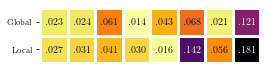

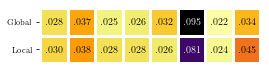

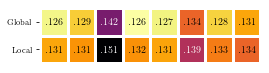

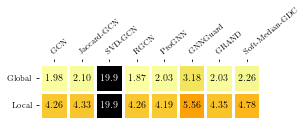

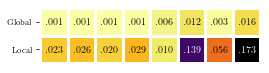

In [58]:
unproj_slugs = ["gcn_2", "jaccard_gcn_tuned", "svd_gcn_rank50_tuned", "rgcn_tuned", "pro_gnn_tuned", "gnn_guard_faith_refimpl", "grand_tuned", "soft_median_gdc_tuned"]

for metric, metric_values in attack_characteristics.items():
    matrix = np.full((4, len(unproj_slugs)), np.nan)
    for i, scope in enumerate(["global", "local"]):
        for j, unproj_slug in enumerate(unproj_slugs):
            cnt_sum, agg_sum = 0, 0
            for (ds, slg, scp, meth), (cnt, agg) in metric_values.items():
                if scp == scope and slg == gb.ana.project_model_slugs(unproj_slug, ds):
                    cnt_sum += cnt
                    agg_sum += agg
            if cnt_sum != 0:
                matrix[i, j] = agg_sum / cnt_sum
    gb.ana.plot_matrix(
        matrix,
        ["Global", "Local"],
        [gb.ana.model_label(slug).split(" ")[0] for slug in unproj_slugs] if metric == "degree" else None,
        omit_leading_zero=True, trailing_zeros=True, text_len=4, cbar=False,
        cmap="inferno_r", angle_left=False, cellsize=0.5
    )
    plt.ylim(bottom=1.6)
    plt.savefig(f"{plots_path}/attack_char_{metric}.pdf", bbox_inches="tight", pad_inches=0.01)

## Perturbation Spectra

In [60]:
clean_sigvals, aggr_pert_sigvals = {'citeseer': np.array([13.744, 10.752, 10.613, 8.0582, 7.9798, 7.8159, 7.1358, 7.1272, 6.7886, 6.6486, 6.6186, 6.4458, 6.3384, 6.3175, 6.3016, 6.2814, 5.8202, 5.7944, 5.7923, 5.7684, 5.7171, 5.5405, 5.5128, 5.4886, 5.4811, 5.3985, 5.3827, 5.3417, 5.3335, 5.2066, 5.111, 5.0384, 5.0366, 4.9937, 4.9598, 4.9147, 4.8986, 4.8411, 4.8057, 4.8001, 4.7483, 4.7082, 4.7043, 4.6999, 4.6825, 4.6439, 4.6016, 4.5988, 4.5508, 4.5491, 4.532, 4.5222, 4.4714, 4.4674, 4.4651, 4.4478, 4.4274, 4.415, 4.4101, 4.3715, 4.3493, 4.3349, 4.326, 4.305, 4.2907, 4.2811, 4.2773, 4.2468, 4.2343, 4.2246, 4.2111, 4.2077, 4.1973, 4.1622, 4.1508, 4.1151, 4.0811, 4.072, 4.049, 4.0456, 4.0286, 4.0107, 4.0061, 3.975, 3.9727, 3.964, 3.9613, 3.9325, 3.9281, 3.9186, 3.8989, 3.8703, 3.8075, 3.7975, 3.7919, 3.7872, 3.7802, 3.764, 3.7596, 3.7549, 3.7427, 3.725, 3.7127, 3.7039, 3.7006, 3.6955, 3.6792, 3.6614, 3.6552, 3.6481, 3.642, 3.6364, 3.6218, 3.619, 3.6034, 3.5834, 3.5751, 3.565, 3.5554, 3.5536, 3.5518, 3.5425, 3.5208, 3.4986, 3.4956, 3.4904, 3.4857, 3.4839, 3.4666, 3.4579, 3.4547, 3.445, 3.4436, 3.4299, 3.42, 3.4123, 3.4093, 3.4058, 3.4022, 3.3841, 3.376, 3.3754, 3.3561, 3.3503, 3.3439, 3.3349, 3.3332, 3.3244, 3.3119, 3.3013, 3.2976, 3.2965, 3.2908, 3.2907, 3.2814, 3.2809, 3.2695, 3.2628, 3.2544, 3.2526, 3.2426, 3.2297, 3.2196, 3.2145, 3.2126, 3.2095, 3.1993, 3.1916, 3.188, 3.1774, 3.1698, 3.1673, 3.1645, 3.1618, 3.1606, 3.1536, 3.1471, 3.1329, 3.1302, 3.1177, 3.1028, 3.0994, 3.0856, 3.0776, 3.0655, 3.0637, 3.0633, 3.0576, 3.0505, 3.0382, 3.0214, 3.019, 3.0148, 3.0125, 2.9939, 2.9878, 2.9847, 2.9803, 2.978, 2.977, 2.9669, 2.9628, 2.9603, 2.9565, 2.9485, 2.947, 2.9459, 2.9425, 2.9352, 2.9299, 2.9277, 2.9188, 2.9149, 2.9134, 2.9122, 2.895, 2.8922, 2.886, 2.8846, 2.8817, 2.8769, 2.8747, 2.8672, 2.8652, 2.8629, 2.8571, 2.8516, 2.8516, 2.841, 2.8354, 2.8347, 2.828, 2.824, 2.8227, 2.8154, 2.8129, 2.8067, 2.8031, 2.7979, 2.7906, 2.7872, 2.7857, 2.7833, 2.7763, 2.7742, 2.7698, 2.7644, 2.7612, 2.7569, 2.755, 2.7466, 2.7445, 2.7417, 2.7369, 2.731, 2.7279, 2.7266, 2.7257, 2.7164, 2.7102, 2.7002, 2.6984, 2.6929, 2.6869, 2.6814, 2.6793, 2.676, 2.6742, 2.6703, 2.6681, 2.6675, 2.6658, 2.6608, 2.651, 2.6508, 2.6491, 2.6464, 2.6406, 2.6328, 2.6322, 2.6178, 2.6154, 2.6121, 2.5989, 2.597, 2.5942, 2.5899, 2.5887, 2.5874, 2.5829, 2.5745, 2.5729, 2.5663, 2.5646, 2.5635, 2.5553, 2.5546, 2.5446, 2.5422, 2.541, 2.5353, 2.5312, 2.5305, 2.5272, 2.5243, 2.5189, 2.5186, 2.5144, 2.5067, 2.5029, 2.5008, 2.494, 2.4919, 2.4897, 2.4765, 2.4749, 2.4708, 2.4677, 2.4676, 2.4639, 2.4577, 2.4568, 2.4525, 2.4468, 2.4405, 2.4359, 2.4299, 2.4293, 2.4277, 2.4236, 2.4227, 2.4185, 2.4173, 2.4166, 2.4152, 2.4126, 2.4114, 2.4047, 2.3993, 2.3984, 2.396, 2.3908, 2.3889, 2.3877, 2.3868, 2.3819, 2.3792, 2.3711, 2.3689, 2.3666, 2.3664, 2.3618, 2.3569, 2.3537, 2.3514, 2.3487, 2.3485, 2.34, 2.3371, 2.3361, 2.3334, 2.332, 2.3296, 2.3263, 2.3207, 2.3206, 2.3155, 2.3154, 2.3066, 2.3066, 2.3063, 2.3014, 2.295, 2.2947, 2.2904, 2.2863, 2.2833, 2.2806, 2.2723, 2.2718, 2.2693, 2.2686, 2.2644, 2.2598, 2.2558, 2.253, 2.2492, 2.2454, 2.2412, 2.2396, 2.2363, 2.2358, 2.2354, 2.2276, 2.2268, 2.2244, 2.2238, 2.2225, 2.2211, 2.2201, 2.2139, 2.2113, 2.2109, 2.2076, 2.2068, 2.2038, 2.2027, 2.2021, 2.1994, 2.1972, 2.1957, 2.194, 2.1934, 2.1922, 2.1894, 2.1871, 2.1842, 2.1838, 2.1827, 2.1761, 2.1748, 2.1723, 2.1711, 2.1672, 2.165, 2.1641, 2.1634, 2.1633, 2.1607, 2.1579, 2.1575, 2.1547, 2.151, 2.1502, 2.1441, 2.1419, 2.1394, 2.137, 2.1364, 2.1348, 2.1323, 2.1316, 2.1231, 2.122, 2.1181, 2.1143, 2.1141, 2.1132, 2.1126, 2.1086, 2.1085, 2.1045, 2.1023, 2.101, 2.1001, 2.0987, 2.0965, 2.092, 2.0872, 2.0862, 2.0829, 2.0818, 2.081, 2.0805, 2.0771, 2.0743, 2.071, 2.0698, 2.0697, 2.0671, 2.066, 2.0652, 2.0618, 2.0601, 2.0601, 2.0535, 2.051, 2.0489, 2.0473, 2.0453, 2.0416, 2.0381, 2.0323, 2.0315, 2.0275, 2.0233, 2.0231, 2.0212, 2.0178, 2.0176, 2.0169, 2.0154, 2.0134, 2.0108, 2.0078, 2.0066, 2.0025, 2.0024, 2.002, 2, 1.9942, 1.994, 1.9908, 1.988, 1.9847, 1.9826, 1.9805, 1.9797, 1.9795, 1.9779, 1.9774, 1.9727, 1.9715, 1.9693, 1.9652, 1.9624, 1.9576, 1.9556, 1.9555, 1.9545, 1.9523, 1.9477, 1.9456, 1.9443, 1.941, 1.9404, 1.9358, 1.9344, 1.9338, 1.9321, 1.931, 1.9288, 1.9288, 1.9276, 1.9257, 1.9252, 1.9226, 1.9211, 1.9181, 1.9149, 1.9102, 1.9088, 1.9088, 1.9072, 1.907, 1.9043, 1.9039, 1.9013, 1.8997, 1.8973, 1.8942, 1.8939, 1.8922, 1.8902, 1.8856, 1.8835, 1.8829, 1.8757, 1.8746, 1.8722, 1.8716, 1.8712, 1.8693, 1.8691, 1.8685, 1.867, 1.8657, 1.8647, 1.8626, 1.8606, 1.856, 1.8518, 1.8502, 1.8501, 1.8474, 1.8469, 1.8433, 1.8403, 1.8389, 1.8382, 1.8313, 1.8297, 1.8285, 1.8263, 1.8246, 1.8225, 1.8209, 1.8188, 1.8181, 1.8161, 1.8147, 1.8119, 1.8105, 1.8092, 1.8081, 1.8048, 1.8041, 1.8027, 1.8023, 1.8015, 1.8006, 1.7967, 1.7943, 1.7929, 1.7917, 1.7905, 1.7888, 1.7887, 1.786, 1.7859, 1.7852, 1.7835, 1.7751, 1.7748, 1.7741, 1.7728, 1.7708, 1.7701, 1.7693, 1.7652, 1.7635, 1.7594, 1.7557, 1.7552, 1.7539, 1.7536, 1.7502, 1.7484, 1.7481, 1.7457, 1.7419, 1.7403, 1.7377, 1.7321, 1.7321, 1.7312, 1.7311, 1.7266, 1.7265, 1.7256, 1.7244, 1.7229, 1.7225, 1.72, 1.7169, 1.7146, 1.7144, 1.7132, 1.7132, 1.7114, 1.7108, 1.7103, 1.7098, 1.7079, 1.7065, 1.7052, 1.7033, 1.7, 1.6973, 1.6946, 1.6941, 1.6896, 1.6879, 1.6872, 1.6863, 1.6854, 1.6827, 1.6815, 1.6791, 1.6788, 1.6765, 1.6748, 1.6716, 1.6712, 1.6682, 1.6668, 1.6641, 1.6635, 1.6602, 1.6576, 1.6569, 1.6544, 1.6544, 1.6534, 1.6531, 1.6505, 1.65, 1.6484, 1.6436, 1.6425, 1.6389, 1.6378, 1.6368, 1.6353, 1.6327, 1.6319, 1.6308, 1.6298, 1.6291, 1.6267, 1.6254, 1.625, 1.6247, 1.6239, 1.6235, 1.6215, 1.6196, 1.6191, 1.6184, 1.6178, 1.6155, 1.615, 1.6129, 1.6117, 1.608, 1.605, 1.604, 1.6025, 1.602, 1.5976, 1.5961, 1.5952, 1.5916, 1.59, 1.5898, 1.5885, 1.5884, 1.5868, 1.5858, 1.5828, 1.5801, 1.5786, 1.5765, 1.5753, 1.5749, 1.5737, 1.5718, 1.5715, 1.5681, 1.5663, 1.5641, 1.5637, 1.5635, 1.562, 1.5576, 1.5573, 1.553, 1.5518, 1.55, 1.5485, 1.5468, 1.5465, 1.5418, 1.5406, 1.5359, 1.5356, 1.532, 1.5317, 1.5296, 1.5294, 1.5229, 1.5199, 1.5182, 1.5169, 1.5146, 1.5117, 1.5099, 1.5097, 1.509, 1.5078, 1.507, 1.5033, 1.5031, 1.5024, 1.4994, 1.4976, 1.4976, 1.4952, 1.4946, 1.4924, 1.4895, 1.4888, 1.4879, 1.4866, 1.4842, 1.4839, 1.4809, 1.4807, 1.4792, 1.475, 1.4724, 1.4708, 1.4703, 1.4692, 1.4688, 1.4667, 1.4648, 1.4632, 1.4625, 1.4597, 1.458, 1.4578, 1.4541, 1.4514, 1.4489, 1.4459, 1.4451, 1.443, 1.4413, 1.4409, 1.4398, 1.4375, 1.4353, 1.4351, 1.4281, 1.4267, 1.4251, 1.4228, 1.4216, 1.4174, 1.4173, 1.4154, 1.4151, 1.4142, 1.4142, 1.4142, 1.4142, 1.4142, 1.4142, 1.4142, 1.4142, 1.4142, 1.4142, 1.4114, 1.4091, 1.4078, 1.4066, 1.4051, 1.4043, 1.4039, 1.4005, 1.3999, 1.3976, 1.3973, 1.3971, 1.3935, 1.3925, 1.3902, 1.3883, 1.388, 1.387, 1.386, 1.3852, 1.3838, 1.3792, 1.3787, 1.3757, 1.3739, 1.3727, 1.372, 1.3708, 1.3707, 1.3706, 1.3692, 1.3679, 1.3663, 1.3656, 1.3645, 1.3626, 1.3626, 1.3618, 1.3606, 1.3577, 1.355, 1.3546, 1.353, 1.3509, 1.3501, 1.3481, 1.3473, 1.3455, 1.3436, 1.3423, 1.3418, 1.3353, 1.3348, 1.3326, 1.3304, 1.3298, 1.3265, 1.3258, 1.3224, 1.3219, 1.3206, 1.3172, 1.3171, 1.315, 1.3131, 1.3114, 1.31, 1.3085, 1.3067, 1.3057, 1.3022, 1.3017, 1.3013, 1.2986, 1.2984, 1.2977, 1.2923, 1.2913, 1.2899, 1.289, 1.2861, 1.2831, 1.2823, 1.2814, 1.2801, 1.2786, 1.2773, 1.2769, 1.276, 1.276, 1.2708, 1.2691, 1.2679, 1.2662, 1.2658, 1.2625, 1.2609, 1.257, 1.2557, 1.2538, 1.2525, 1.2504, 1.2493, 1.247, 1.2462, 1.2453, 1.2438, 1.2426, 1.2421, 1.2404, 1.2393, 1.2375, 1.2349, 1.2343, 1.2316, 1.2296, 1.2291, 1.2286, 1.2234, 1.2221, 1.2219, 1.2186, 1.2184, 1.217, 1.2154, 1.2142, 1.2122, 1.2101, 1.2088, 1.207, 1.2052, 1.2048, 1.2024, 1.1986, 1.1983, 1.196, 1.1957, 1.1949, 1.1933, 1.1928, 1.1886, 1.1877, 1.1868, 1.1857, 1.185, 1.1841, 1.1814, 1.1779, 1.1778, 1.1766, 1.1736, 1.1729, 1.1704, 1.1703, 1.1691, 1.1673, 1.1665, 1.1645, 1.1631, 1.1627, 1.1613, 1.1582, 1.158, 1.1545, 1.1523, 1.1514, 1.1488, 1.1463, 1.1441, 1.1434, 1.1399, 1.1398, 1.1391, 1.1391, 1.1385, 1.1378, 1.1349, 1.1339, 1.1306, 1.13, 1.1295, 1.1279, 1.1273, 1.1249, 1.1229, 1.1221, 1.1179, 1.1172, 1.117, 1.1151, 1.1133, 1.1133, 1.112, 1.1113, 1.11, 1.1091, 1.1091, 1.1082, 1.108, 1.1068, 1.106, 1.1049, 1.1048, 1.1042, 1.1019, 1.0976, 1.0969, 1.0955, 1.0948, 1.091, 1.0881, 1.0869, 1.086, 1.085, 1.0839, 1.0834, 1.0826, 1.0809, 1.0801, 1.079, 1.0787, 1.0768, 1.0755, 1.0754, 1.0728, 1.0713, 1.0672, 1.0667, 1.0635, 1.0619, 1.0615, 1.0613, 1.0612, 1.0559, 1.0554, 1.0511, 1.0501, 1.0486, 1.0485, 1.0467, 1.0464, 1.0448, 1.0433, 1.0421, 1.0416, 1.0406, 1.0402, 1.0387, 1.0374, 1.0351, 1.0337, 1.0324, 1.0317, 1.0308, 1.0303, 1.0286, 1.0248, 1.0246, 1.0237, 1.0198, 1.0179, 1.0177, 1.0142, 1.0134, 1.0121, 1.0117, 1.0114, 1.0101, 1.0086, 1.0078, 1.0073, 1.0055, 1.0054, 1.0033, 1.0019, 1.001, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.99736, 0.99526, 0.99476, 0.9924, 0.99124, 0.98986, 0.98805, 0.9875, 0.98481, 0.98367, 0.98321, 0.98231, 0.9822, 0.9816, 0.9804, 0.97827, 0.97477, 0.97141, 0.97113, 0.96825, 0.96447, 0.96198, 0.96082, 0.96053, 0.95949, 0.95849, 0.95722, 0.95669, 0.95646, 0.95509, 0.95493, 0.95399, 0.95355, 0.95125, 0.95048, 0.94978, 0.94642, 0.9455, 0.94322, 0.94234, 0.94106, 0.94029, 0.93994, 0.93754, 0.93563, 0.93501, 0.93394, 0.93169, 0.93144, 0.9278, 0.92722, 0.92629, 0.92461, 0.92436, 0.92286, 0.92218, 0.9212, 0.91721, 0.91643, 0.91398, 0.91257, 0.91257, 0.90911, 0.90813, 0.90652, 0.90629, 0.90464, 0.90396, 0.90313, 0.90101, 0.9005, 0.89898, 0.89895, 0.89804, 0.89627, 0.89483, 0.89363, 0.89153, 0.88958, 0.88682, 0.88594, 0.88544, 0.88413, 0.88139, 0.88027, 0.87977, 0.87932, 0.87821, 0.87742, 0.87547, 0.87439, 0.8736, 0.87228, 0.86994, 0.86796, 0.86543, 0.86501, 0.86175, 0.86124, 0.85799, 0.85666, 0.85553, 0.85246, 0.85238, 0.84894, 0.84762, 0.84633, 0.84595, 0.8454, 0.84501, 0.84246, 0.84052, 0.84017, 0.83862, 0.83745, 0.83349, 0.83266, 0.8306, 0.82857, 0.82796, 0.82753, 0.82707, 0.82332, 0.82102, 0.81938, 0.81813, 0.818, 0.81716, 0.81545, 0.81483, 0.81132, 0.80784, 0.80641, 0.80548, 0.80277, 0.80259, 0.80192, 0.79902, 0.79741, 0.79658, 0.79515, 0.79281, 0.79227, 0.79088, 0.79047, 0.79002, 0.78599, 0.78414, 0.78354, 0.78248, 0.78206, 0.78176, 0.78154, 0.7781, 0.77654, 0.77621, 0.77378, 0.77133, 0.76822, 0.76644, 0.76566, 0.76524, 0.76318, 0.76164, 0.75974, 0.75969, 0.75851, 0.75581, 0.75515, 0.75469, 0.75267, 0.75216, 0.75134, 0.75122, 0.74976, 0.74897, 0.74791, 0.74521, 0.74259, 0.74073, 0.7392, 0.73732, 0.7364, 0.73528, 0.73354, 0.73293, 0.73044, 0.72828, 0.728, 0.72789, 0.72722, 0.72702, 0.7257, 0.72449, 0.72371, 0.72326, 0.72137, 0.72056, 0.7188, 0.71744, 0.71611, 0.71442, 0.71088, 0.70834, 0.70574, 0.70537, 0.70472, 0.7042, 0.69924, 0.69885, 0.69823, 0.69706, 0.69625, 0.69306, 0.69058, 0.68825, 0.68722, 0.68499, 0.68375, 0.68256, 0.68127, 0.6794, 0.67651, 0.67452, 0.67409, 0.67399, 0.67141, 0.66922, 0.66797, 0.66731, 0.66603, 0.6631, 0.66192, 0.65941, 0.65759, 0.65556, 0.65556, 0.65522, 0.65284, 0.65107, 0.64887, 0.64772, 0.64672, 0.64656, 0.64247, 0.6412, 0.64016, 0.63517, 0.63451, 0.63354, 0.63108, 0.63096, 0.62862, 0.6279, 0.62661, 0.62497, 0.62447, 0.62387, 0.62268, 0.62221, 0.61779, 0.61758, 0.61504, 0.61344, 0.61141, 0.60968, 0.60893, 0.60802, 0.6063, 0.60425, 0.60355, 0.60208, 0.60072, 0.60037, 0.59819, 0.59564, 0.59516, 0.5914, 0.59002, 0.58982, 0.58876, 0.5864, 0.58239, 0.58074, 0.58053, 0.57838, 0.57642, 0.57525, 0.5724, 0.57089, 0.57072, 0.56891, 0.56801, 0.56785, 0.56641, 0.56593, 0.56502, 0.56498, 0.56259, 0.56112, 0.56081, 0.55859, 0.55611, 0.55325, 0.55073, 0.54782, 0.54747, 0.54665, 0.54409, 0.54266, 0.54109, 0.53796, 0.53679, 0.53516, 0.53408, 0.53063, 0.52974, 0.52757, 0.52736, 0.52698, 0.5264, 0.52535, 0.52199, 0.52099, 0.51717, 0.51581, 0.515, 0.51392, 0.51319, 0.50908, 0.50834, 0.50775, 0.50588, 0.50337, 0.50293, 0.50141, 0.50059, 0.50021, 0.4978, 0.49741, 0.49129, 0.48708, 0.48327, 0.48205, 0.4789, 0.4782, 0.47668, 0.47456, 0.47257, 0.46965, 0.46781, 0.46686, 0.46552, 0.46224, 0.4622, 0.46035, 0.45755, 0.45641, 0.45573, 0.45373, 0.45203, 0.45102, 0.4497, 0.44746, 0.44502, 0.44305, 0.44262, 0.44182, 0.44125, 0.44015, 0.43881, 0.43865, 0.43523, 0.43314, 0.42886, 0.4283, 0.42691, 0.42648, 0.42498, 0.42172, 0.42128, 0.42002, 0.41985, 0.41962, 0.41904, 0.41845, 0.41701, 0.41633, 0.41244, 0.41019, 0.40991, 0.4083, 0.40784, 0.40556, 0.40466, 0.40318, 0.40275, 0.40137, 0.40094, 0.39938, 0.39713, 0.39573, 0.39325, 0.39123, 0.39028, 0.38679, 0.38543, 0.38371, 0.38115, 0.38109, 0.37801, 0.37574, 0.3742, 0.37394, 0.37188, 0.37157, 0.37103, 0.37012, 0.36862, 0.36712, 0.36694, 0.36648, 0.36447, 0.36299, 0.36069, 0.3588, 0.357, 0.35698, 0.35513, 0.35444, 0.35108, 0.34984, 0.34847, 0.34577, 0.34575, 0.34188, 0.33948, 0.3385, 0.33564, 0.33165, 0.33059, 0.33042, 0.33028, 0.33008, 0.32666, 0.3252, 0.32478, 0.32221, 0.32107, 0.32038, 0.31806, 0.31513, 0.31438, 0.31036, 0.3097, 0.30829, 0.30768, 0.30641, 0.30525, 0.30358, 0.3023, 0.30019, 0.29816, 0.2975, 0.29506, 0.2924, 0.2916, 0.29109, 0.29086, 0.28904, 0.28627, 0.28587, 0.28397, 0.28274, 0.28256, 0.28178, 0.28029, 0.2776, 0.276, 0.27353, 0.2702, 0.26921, 0.26832, 0.26726, 0.26476, 0.26448, 0.2641, 0.26289, 0.26116, 0.26042, 0.25711, 0.24794, 0.24378, 0.24224, 0.23935, 0.23885, 0.23796, 0.2375, 0.23651, 0.22876, 0.22846, 0.22832, 0.22605, 0.22556, 0.2191, 0.21554, 0.21136, 0.21053, 0.20861, 0.20596, 0.20588, 0.20104, 0.19617, 0.19411, 0.19282, 0.19181, 0.19046, 0.18628, 0.18551, 0.18428, 0.17874, 0.17854, 0.17813, 0.17685, 0.17533, 0.17517, 0.17359, 0.17332, 0.17099, 0.16687, 0.16573, 0.16197, 0.16065, 0.16051, 0.15936, 0.1557, 0.15386, 0.14856, 0.1485, 0.14651, 0.14325, 0.14105, 0.14027, 0.13852, 0.13644, 0.13622, 0.13358, 0.13204, 0.13029, 0.1249, 0.12486, 0.12028, 0.11927, 0.11781, 0.11195, 0.11003, 0.10747, 0.10399, 0.10287, 0.099353, 0.095907, 0.095444, 0.092049, 0.082486, 0.082352, 0.075497, 0.071556, 0.068091, 0.067959, 0.065872, 0.064058, 0.063331, 0.058096, 0.055487, 0.053464, 0.050416, 0.046247, 0.036046, 0.031362, 0.026544, 0.02133, 1.4083e-06, 1.2862e-06, 1.1581e-06, 1.1189e-06, 1.069e-06, 9.9463e-07, 8.7198e-07, 8.5779e-07, 8.443e-07, 8.3373e-07, 8.1233e-07, 7.9299e-07, 7.7991e-07, 7.5966e-07, 7.4691e-07, 7.4436e-07, 7.4146e-07, 7.091e-07, 6.9323e-07, 6.8678e-07, 6.4189e-07, 6.3081e-07, 6.1785e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 6.1456e-07, 5.6981e-07, 5.2012e-07, 5.1893e-07, 5.1787e-07, 5.1422e-07, 5.0939e-07, 5.042e-07, 4.767e-07, 4.6928e-07, 4.0612e-07, 3.8718e-07, 3.7235e-07, 3.2788e-07, 3.2493e-07, 3.2238e-07, 3.0547e-07, 2.9143e-07, 2.7822e-07, 2.7704e-07, 2.7314e-07, 2.7062e-07, 2.6839e-07, 2.5393e-07, 2.2742e-07, 1.7123e-07, 1.5936e-07, 1.5862e-07]), 'cora': np.array([14.391, 12.366, 11.639, 9.7222, 9.206, 8.6948, 8.2905, 8.1604, 7.9466, 7.6051, 7.3827, 7.3756, 7.3088, 7.1034, 6.9593, 6.6215, 6.5842, 6.5638, 6.5012, 6.4537, 6.4076, 6.3901, 6.3613, 6.3075, 6.2701, 6.2281, 6.1592, 6.0694, 5.9723, 5.9169, 5.8607, 5.8275, 5.7906, 5.7557, 5.7426, 5.6303, 5.6176, 5.5944, 5.586, 5.5815, 5.5173, 5.459, 5.4433, 5.3974, 5.372, 5.369, 5.3597, 5.3287, 5.2922, 5.2462, 5.2386, 5.2202, 5.1797, 5.178, 5.1157, 5.1003, 5.0899, 5.0363, 5.0241, 4.9984, 4.9752, 4.9678, 4.9552, 4.9444, 4.9252, 4.8695, 4.8546, 4.8449, 4.8387, 4.7705, 4.6916, 4.6846, 4.6408, 4.6178, 4.6161, 4.5984, 4.5931, 4.5659, 4.5514, 4.547, 4.5341, 4.4932, 4.4875, 4.4846, 4.4555, 4.4297, 4.4267, 4.4191, 4.3943, 4.3715, 4.368, 4.3511, 4.3477, 4.3409, 4.3285, 4.3111, 4.3084, 4.295, 4.2883, 4.282, 4.2799, 4.2487, 4.2263, 4.209, 4.203, 4.2026, 4.195, 4.1818, 4.1801, 4.1779, 4.1652, 4.155, 4.1454, 4.1295, 4.1226, 4.1058, 4.1008, 4.0986, 4.094, 4.0722, 4.0348, 4.0338, 4.0309, 4.0162, 4.0158, 4.0075, 3.9998, 3.9915, 3.9812, 3.9777, 3.9622, 3.9605, 3.9551, 3.9399, 3.9362, 3.9193, 3.9055, 3.9004, 3.8911, 3.8895, 3.8839, 3.8759, 3.8669, 3.8469, 3.8302, 3.8253, 3.8164, 3.8145, 3.8043, 3.7918, 3.7898, 3.7786, 3.7713, 3.7649, 3.7635, 3.7539, 3.7505, 3.7472, 3.7359, 3.7326, 3.7323, 3.7143, 3.7104, 3.7032, 3.7028, 3.6833, 3.6763, 3.6607, 3.656, 3.645, 3.6381, 3.6347, 3.6318, 3.6229, 3.6026, 3.5998, 3.5887, 3.5701, 3.5689, 3.563, 3.5606, 3.5524, 3.5452, 3.5247, 3.5178, 3.5139, 3.5061, 3.5012, 3.5005, 3.4901, 3.4872, 3.4791, 3.4751, 3.4747, 3.4707, 3.4702, 3.4663, 3.4652, 3.4628, 3.4542, 3.4468, 3.4405, 3.4401, 3.4394, 3.4306, 3.4239, 3.417, 3.4145, 3.4128, 3.4103, 3.4007, 3.3967, 3.3927, 3.3779, 3.3745, 3.3702, 3.368, 3.3659, 3.3597, 3.3512, 3.3423, 3.3362, 3.3284, 3.3203, 3.3188, 3.3144, 3.3099, 3.3081, 3.3004, 3.2993, 3.2894, 3.2858, 3.2792, 3.277, 3.2711, 3.2654, 3.2614, 3.26, 3.257, 3.2524, 3.2516, 3.2375, 3.237, 3.2305, 3.2213, 3.2203, 3.2106, 3.21, 3.2064, 3.2037, 3.1939, 3.1846, 3.182, 3.1792, 3.172, 3.1716, 3.1657, 3.1638, 3.1608, 3.1549, 3.1511, 3.1487, 3.1416, 3.1368, 3.1292, 3.1218, 3.118, 3.1147, 3.1117, 3.1048, 3.1009, 3.0959, 3.0909, 3.0896, 3.0747, 3.0699, 3.0691, 3.0617, 3.0592, 3.0544, 3.0508, 3.0458, 3.0389, 3.0372, 3.0328, 3.0282, 3.0234, 3.02, 3.0152, 3.0133, 3.0102, 3.0075, 3.0036, 2.9961, 2.9939, 2.9919, 2.9832, 2.9825, 2.9766, 2.9732, 2.9675, 2.9656, 2.9617, 2.9582, 2.9555, 2.9537, 2.9485, 2.9406, 2.9356, 2.9326, 2.929, 2.9224, 2.9186, 2.9183, 2.9119, 2.9109, 2.9081, 2.9011, 2.9003, 2.8987, 2.8948, 2.8887, 2.8885, 2.8852, 2.8843, 2.8731, 2.87, 2.8677, 2.8667, 2.8639, 2.8548, 2.8515, 2.8453, 2.8379, 2.8378, 2.8338, 2.8318, 2.8226, 2.8129, 2.8068, 2.8067, 2.8021, 2.7996, 2.7928, 2.7909, 2.7895, 2.7875, 2.7862, 2.7787, 2.7757, 2.7751, 2.7716, 2.7709, 2.7612, 2.7556, 2.7527, 2.7452, 2.744, 2.7386, 2.737, 2.732, 2.7287, 2.7263, 2.723, 2.7209, 2.7204, 2.7166, 2.7153, 2.712, 2.7021, 2.7015, 2.6983, 2.6931, 2.6921, 2.6877, 2.6873, 2.6797, 2.6778, 2.676, 2.6746, 2.6725, 2.6696, 2.6671, 2.6652, 2.6632, 2.6617, 2.6613, 2.6601, 2.6552, 2.6512, 2.6506, 2.6487, 2.6462, 2.6448, 2.6433, 2.6408, 2.634, 2.6339, 2.6311, 2.6283, 2.6263, 2.6224, 2.6202, 2.6192, 2.6161, 2.6121, 2.6085, 2.6046, 2.6039, 2.6002, 2.5979, 2.5949, 2.5924, 2.5901, 2.586, 2.5826, 2.5804, 2.5775, 2.5765, 2.5721, 2.5653, 2.5634, 2.5634, 2.5601, 2.5545, 2.5544, 2.5484, 2.545, 2.5432, 2.5415, 2.5369, 2.533, 2.5267, 2.523, 2.5225, 2.5169, 2.5168, 2.5106, 2.5105, 2.5059, 2.5048, 2.5027, 2.4998, 2.4988, 2.4965, 2.4896, 2.4891, 2.4842, 2.4835, 2.4775, 2.4769, 2.4751, 2.4717, 2.4716, 2.4677, 2.4666, 2.4617, 2.4617, 2.4559, 2.4546, 2.4515, 2.4481, 2.4448, 2.4446, 2.4441, 2.4396, 2.4376, 2.4365, 2.4301, 2.4283, 2.4274, 2.4258, 2.4192, 2.4187, 2.4147, 2.4103, 2.41, 2.4065, 2.4022, 2.3982, 2.397, 2.3925, 2.3923, 2.3871, 2.3852, 2.3815, 2.3796, 2.3749, 2.3736, 2.369, 2.3676, 2.3648, 2.3615, 2.3611, 2.3579, 2.3538, 2.3507, 2.3472, 2.3451, 2.3422, 2.3415, 2.3367, 2.336, 2.3309, 2.328, 2.3268, 2.3237, 2.3219, 2.3184, 2.3157, 2.3154, 2.3143, 2.3139, 2.3123, 2.3088, 2.3068, 2.3017, 2.3006, 2.2989, 2.2969, 2.2966, 2.2933, 2.2929, 2.2921, 2.2884, 2.2878, 2.2837, 2.2828, 2.28, 2.279, 2.2783, 2.2742, 2.272, 2.2692, 2.2666, 2.2631, 2.2611, 2.2592, 2.2559, 2.2553, 2.253, 2.2509, 2.246, 2.2424, 2.2385, 2.2381, 2.2366, 2.236, 2.2345, 2.2336, 2.2273, 2.2268, 2.225, 2.2246, 2.2224, 2.2213, 2.2212, 2.2187, 2.2157, 2.215, 2.2138, 2.2098, 2.2052, 2.2037, 2.202, 2.1988, 2.1972, 2.196, 2.1957, 2.1931, 2.1888, 2.1879, 2.1835, 2.1818, 2.1783, 2.1772, 2.1738, 2.1726, 2.1723, 2.1707, 2.1702, 2.1678, 2.1667, 2.1662, 2.1651, 2.1643, 2.1565, 2.1561, 2.1531, 2.151, 2.149, 2.1468, 2.1464, 2.1449, 2.1439, 2.1422, 2.1405, 2.1396, 2.1386, 2.1368, 2.1282, 2.1275, 2.1274, 2.1238, 2.1222, 2.1203, 2.1195, 2.1192, 2.113, 2.1121, 2.1101, 2.1073, 2.103, 2.1002, 2.0984, 2.0975, 2.0969, 2.0928, 2.0924, 2.088, 2.0873, 2.085, 2.0839, 2.0814, 2.0773, 2.076, 2.0742, 2.0738, 2.07, 2.0681, 2.0658, 2.0629, 2.0605, 2.0579, 2.0544, 2.0518, 2.0508, 2.0503, 2.0481, 2.0451, 2.0436, 2.0417, 2.0407, 2.0376, 2.0374, 2.0332, 2.0317, 2.029, 2.027, 2.0245, 2.0242, 2.0209, 2.0191, 2.0145, 2.0135, 2.0125, 2.0089, 2.0066, 2.0045, 2.004, 2.0015, 2, 2, 1.998, 1.9978, 1.9943, 1.9936, 1.9921, 1.9897, 1.989, 1.9889, 1.9844, 1.9844, 1.984, 1.9818, 1.9782, 1.9773, 1.9747, 1.9707, 1.9693, 1.9688, 1.9663, 1.965, 1.9649, 1.9627, 1.9579, 1.9563, 1.9546, 1.9513, 1.9506, 1.949, 1.9464, 1.9445, 1.9417, 1.939, 1.9385, 1.9348, 1.9337, 1.9308, 1.9271, 1.9269, 1.925, 1.9222, 1.9212, 1.9209, 1.9206, 1.9191, 1.9182, 1.9169, 1.9123, 1.912, 1.9105, 1.9083, 1.9066, 1.9055, 1.9047, 1.9032, 1.9024, 1.9003, 1.8985, 1.8965, 1.8963, 1.8929, 1.8921, 1.8921, 1.8888, 1.8887, 1.8864, 1.8864, 1.8835, 1.8825, 1.8814, 1.8775, 1.8765, 1.8752, 1.8733, 1.8731, 1.8699, 1.868, 1.867, 1.8649, 1.8627, 1.8603, 1.8593, 1.8578, 1.8577, 1.8548, 1.851, 1.8498, 1.8468, 1.8457, 1.8444, 1.8428, 1.8401, 1.8395, 1.8371, 1.8358, 1.8328, 1.8299, 1.8299, 1.8286, 1.8281, 1.8249, 1.8221, 1.8219, 1.8209, 1.8187, 1.8186, 1.817, 1.8139, 1.812, 1.8099, 1.8096, 1.8071, 1.806, 1.806, 1.8033, 1.8026, 1.8025, 1.8004, 1.7997, 1.7996, 1.7934, 1.7931, 1.7909, 1.7899, 1.7881, 1.7876, 1.7862, 1.784, 1.7803, 1.7779, 1.7779, 1.7772, 1.7741, 1.7733, 1.7702, 1.7667, 1.7658, 1.7634, 1.763, 1.7608, 1.7591, 1.7578, 1.7563, 1.7539, 1.7524, 1.7514, 1.7493, 1.7448, 1.7447, 1.741, 1.741, 1.7377, 1.735, 1.734, 1.7335, 1.7323, 1.7306, 1.7303, 1.7268, 1.7267, 1.7249, 1.7221, 1.7199, 1.7187, 1.7183, 1.7164, 1.7149, 1.7126, 1.7099, 1.7083, 1.7075, 1.7054, 1.7043, 1.7031, 1.7019, 1.6998, 1.6996, 1.6982, 1.6961, 1.694, 1.691, 1.6898, 1.6884, 1.6866, 1.6848, 1.684, 1.6831, 1.682, 1.6806, 1.6788, 1.6766, 1.6764, 1.6757, 1.6726, 1.6716, 1.6692, 1.6674, 1.6668, 1.6653, 1.665, 1.6646, 1.6633, 1.6604, 1.6594, 1.6573, 1.655, 1.654, 1.6529, 1.6486, 1.6471, 1.6463, 1.6457, 1.6435, 1.6432, 1.6411, 1.6397, 1.6374, 1.6353, 1.6336, 1.6335, 1.6329, 1.6309, 1.6284, 1.6267, 1.6242, 1.6241, 1.6205, 1.6186, 1.6181, 1.618, 1.618, 1.6165, 1.6136, 1.612, 1.6091, 1.6089, 1.6069, 1.605, 1.6038, 1.6037, 1.6014, 1.6001, 1.5997, 1.5979, 1.5968, 1.5963, 1.5942, 1.5925, 1.5911, 1.5888, 1.5878, 1.5861, 1.583, 1.5822, 1.5798, 1.5773, 1.5747, 1.5746, 1.5729, 1.5717, 1.57, 1.5681, 1.5658, 1.5649, 1.5646, 1.562, 1.5619, 1.5612, 1.5579, 1.5579, 1.5555, 1.5553, 1.5526, 1.5518, 1.5501, 1.5472, 1.5458, 1.5451, 1.5437, 1.5422, 1.5411, 1.5382, 1.5381, 1.5376, 1.5347, 1.5338, 1.5326, 1.5324, 1.5293, 1.5289, 1.5277, 1.5268, 1.5243, 1.5233, 1.5217, 1.5198, 1.519, 1.5174, 1.5154, 1.5147, 1.5143, 1.5127, 1.51, 1.5097, 1.509, 1.5078, 1.504, 1.5029, 1.5017, 1.5015, 1.4999, 1.4999, 1.4986, 1.4972, 1.4958, 1.4957, 1.492, 1.4902, 1.4891, 1.4879, 1.4853, 1.4827, 1.4821, 1.4788, 1.4778, 1.4771, 1.476, 1.4756, 1.4737, 1.4715, 1.4707, 1.4702, 1.4682, 1.4649, 1.4637, 1.4619, 1.4596, 1.4583, 1.4576, 1.4567, 1.4541, 1.4526, 1.4525, 1.4494, 1.4469, 1.4454, 1.4441, 1.4421, 1.4408, 1.4395, 1.4379, 1.4366, 1.4328, 1.4326, 1.432, 1.4315, 1.4308, 1.4297, 1.4283, 1.4282, 1.4282, 1.4267, 1.4246, 1.4223, 1.422, 1.4201, 1.4182, 1.4168, 1.4155, 1.4151, 1.4144, 1.4142, 1.4142, 1.4113, 1.4113, 1.4101, 1.4085, 1.407, 1.4068, 1.4051, 1.405, 1.4025, 1.4023, 1.4022, 1.401, 1.4, 1.3991, 1.3985, 1.397, 1.3957, 1.3944, 1.3926, 1.3923, 1.3916, 1.3901, 1.3889, 1.3877, 1.3866, 1.3863, 1.3855, 1.3831, 1.3821, 1.3818, 1.3796, 1.3787, 1.3778, 1.3774, 1.3767, 1.3747, 1.3709, 1.3692, 1.3686, 1.3667, 1.3652, 1.3642, 1.3639, 1.3634, 1.3615, 1.3609, 1.3587, 1.3576, 1.3575, 1.3543, 1.3534, 1.3525, 1.3523, 1.3498, 1.3493, 1.3473, 1.3445, 1.344, 1.3432, 1.3418, 1.3408, 1.3404, 1.339, 1.3381, 1.3359, 1.3349, 1.333, 1.332, 1.3316, 1.3315, 1.3308, 1.3276, 1.3271, 1.3238, 1.322, 1.3219, 1.32, 1.319, 1.3176, 1.3162, 1.3143, 1.3137, 1.3124, 1.3111, 1.3106, 1.3088, 1.3082, 1.3077, 1.3074, 1.3046, 1.3037, 1.3021, 1.3016, 1.3008, 1.2998, 1.2997, 1.2975, 1.2971, 1.296, 1.2932, 1.291, 1.2906, 1.2903, 1.29, 1.2872, 1.2864, 1.2855, 1.2843, 1.2796, 1.2791, 1.2778, 1.2769, 1.2748, 1.2729, 1.2707, 1.2698, 1.2682, 1.2651, 1.2648, 1.2628, 1.2628, 1.2608, 1.2594, 1.2593, 1.2555, 1.2549, 1.2543, 1.2531, 1.2515, 1.2499, 1.2486, 1.2482, 1.2469, 1.2456, 1.2437, 1.2427, 1.2423, 1.2401, 1.2388, 1.2359, 1.2353, 1.2341, 1.2332, 1.2314, 1.2283, 1.228, 1.2259, 1.2255, 1.225, 1.2227, 1.221, 1.2193, 1.2179, 1.2165, 1.2151, 1.2143, 1.2111, 1.2087, 1.2056, 1.2045, 1.2038, 1.2006, 1.2002, 1.1973, 1.1971, 1.1954, 1.192, 1.1915, 1.191, 1.1896, 1.1877, 1.1851, 1.1844, 1.1827, 1.1825, 1.1815, 1.1789, 1.1786, 1.1763, 1.1759, 1.1741, 1.1731, 1.1713, 1.1699, 1.1697, 1.1683, 1.166, 1.1657, 1.1646, 1.1645, 1.1635, 1.1585, 1.1568, 1.1561, 1.1553, 1.1544, 1.1522, 1.152, 1.1508, 1.1501, 1.1499, 1.1464, 1.1461, 1.1438, 1.1433, 1.1418, 1.1416, 1.1406, 1.1383, 1.1371, 1.1349, 1.1336, 1.1325, 1.1322, 1.1286, 1.1282, 1.1275, 1.1249, 1.124, 1.1213, 1.1213, 1.1199, 1.1178, 1.1167, 1.1144, 1.1143, 1.1129, 1.1121, 1.1116, 1.1106, 1.1089, 1.108, 1.1076, 1.1064, 1.1042, 1.104, 1.1025, 1.1023, 1.1001, 1.0986, 1.0985, 1.0968, 1.0962, 1.0961, 1.0941, 1.0932, 1.0926, 1.0911, 1.0893, 1.0882, 1.0862, 1.0859, 1.0847, 1.0837, 1.0834, 1.082, 1.0795, 1.0788, 1.078, 1.0765, 1.0752, 1.073, 1.0726, 1.0715, 1.0692, 1.0692, 1.0678, 1.067, 1.065, 1.0617, 1.0615, 1.0584, 1.0572, 1.0565, 1.0549, 1.054, 1.0519, 1.0502, 1.0484, 1.048, 1.0465, 1.044, 1.0439, 1.0412, 1.0408, 1.0392, 1.0387, 1.0364, 1.0351, 1.0344, 1.0334, 1.0312, 1.0295, 1.0295, 1.0286, 1.0262, 1.0256, 1.0246, 1.0236, 1.0227, 1.0227, 1.022, 1.0207, 1.02, 1.0191, 1.0178, 1.0167, 1.0157, 1.0132, 1.013, 1.0114, 1.0106, 1.0101, 1.0092, 1.0067, 1.0061, 1.0053, 1.0045, 1.0041, 1.0037, 1.0027, 1.0026, 1.0025, 1.0001, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.99928, 0.9988, 0.99747, 0.99464, 0.99382, 0.99354, 0.99281, 0.98994, 0.98985, 0.98832, 0.98806, 0.98735, 0.98662, 0.98635, 0.98561, 0.98373, 0.98232, 0.98016, 0.97975, 0.97937, 0.97703, 0.97669, 0.97613, 0.97373, 0.97275, 0.97244, 0.97106, 0.96967, 0.96917, 0.96751, 0.96696, 0.96489, 0.96253, 0.96114, 0.96067, 0.96003, 0.95969, 0.95663, 0.95658, 0.95626, 0.95522, 0.95349, 0.95329, 0.95214, 0.951, 0.94995, 0.94934, 0.94906, 0.94719, 0.94565, 0.94374, 0.94287, 0.94243, 0.94231, 0.94199, 0.9406, 0.94035, 0.93824, 0.938, 0.93766, 0.93621, 0.9342, 0.93376, 0.93209, 0.93015, 0.92927, 0.92894, 0.92809, 0.92756, 0.92607, 0.92518, 0.92477, 0.92202, 0.92139, 0.92019, 0.91973, 0.91918, 0.91852, 0.91741, 0.91662, 0.91615, 0.91476, 0.91304, 0.91136, 0.91094, 0.9095, 0.90896, 0.90875, 0.90784, 0.90688, 0.90575, 0.90518, 0.90332, 0.9033, 0.90085, 0.8993, 0.89799, 0.89762, 0.89501, 0.89477, 0.89388, 0.8932, 0.89288, 0.89081, 0.89026, 0.88966, 0.88858, 0.88785, 0.88701, 0.88613, 0.88384, 0.88273, 0.88229, 0.87893, 0.87803, 0.87739, 0.87611, 0.87465, 0.87287, 0.87177, 0.87054, 0.87024, 0.86693, 0.86638, 0.86355, 0.86349, 0.86254, 0.86176, 0.85954, 0.85836, 0.85773, 0.85686, 0.85395, 0.85394, 0.85345, 0.85304, 0.85157, 0.84921, 0.84835, 0.84677, 0.84598, 0.84526, 0.84313, 0.84278, 0.84165, 0.83865, 0.83701, 0.83672, 0.83653, 0.83552, 0.83288, 0.8318, 0.83089, 0.82913, 0.82913, 0.82387, 0.82316, 0.8231, 0.82186, 0.82025, 0.8195, 0.81888, 0.81651, 0.81592, 0.81544, 0.81257, 0.81243, 0.81205, 0.81088, 0.81038, 0.8087, 0.80483, 0.80414, 0.80348, 0.80071, 0.80042, 0.79901, 0.79655, 0.79624, 0.79484, 0.79258, 0.79232, 0.78945, 0.78824, 0.78724, 0.78612, 0.78561, 0.78426, 0.78382, 0.78334, 0.78256, 0.78109, 0.78003, 0.77969, 0.77782, 0.77554, 0.77501, 0.77393, 0.77322, 0.77142, 0.77133, 0.76995, 0.76946, 0.7667, 0.76663, 0.76509, 0.76488, 0.76276, 0.76114, 0.759, 0.7575, 0.75691, 0.75353, 0.75291, 0.75286, 0.75114, 0.74926, 0.74802, 0.74651, 0.74412, 0.74311, 0.74233, 0.74141, 0.7409, 0.74054, 0.739, 0.73743, 0.73625, 0.73384, 0.73341, 0.73212, 0.73142, 0.7306, 0.73006, 0.72803, 0.72725, 0.72533, 0.72174, 0.72147, 0.72061, 0.71953, 0.71923, 0.71731, 0.71665, 0.71423, 0.71135, 0.71051, 0.71016, 0.70893, 0.70728, 0.70484, 0.70346, 0.70149, 0.70128, 0.6983, 0.69691, 0.69657, 0.69634, 0.69567, 0.69334, 0.69311, 0.69267, 0.68988, 0.68901, 0.68606, 0.68568, 0.68492, 0.68399, 0.68201, 0.68172, 0.67978, 0.67857, 0.67812, 0.67668, 0.67619, 0.67462, 0.67194, 0.67191, 0.67113, 0.66922, 0.66776, 0.66736, 0.66403, 0.66195, 0.66083, 0.65996, 0.65827, 0.65611, 0.65418, 0.65319, 0.65172, 0.6513, 0.65117, 0.64985, 0.64769, 0.64684, 0.64576, 0.64451, 0.64278, 0.6424, 0.64044, 0.63995, 0.63915, 0.63774, 0.63633, 0.63254, 0.63207, 0.63191, 0.63158, 0.62887, 0.62577, 0.62403, 0.6228, 0.62194, 0.62038, 0.61918, 0.61826, 0.61803, 0.61803, 0.61764, 0.6168, 0.61617, 0.61606, 0.61497, 0.61176, 0.61055, 0.61042, 0.60934, 0.60914, 0.60711, 0.60613, 0.6058, 0.60395, 0.60351, 0.6008, 0.60049, 0.59974, 0.59901, 0.59655, 0.59553, 0.59287, 0.59188, 0.59186, 0.59072, 0.58896, 0.58856, 0.5881, 0.58724, 0.58613, 0.58494, 0.58399, 0.58367, 0.58137, 0.58018, 0.57874, 0.57848, 0.57815, 0.57377, 0.57307, 0.57126, 0.57124, 0.5697, 0.56913, 0.56818, 0.56693, 0.56547, 0.56478, 0.56473, 0.56247, 0.56042, 0.55978, 0.55813, 0.55783, 0.5562, 0.55485, 0.55403, 0.55247, 0.55147, 0.54982, 0.54848, 0.5483, 0.54719, 0.54665, 0.54611, 0.5425, 0.54243, 0.54176, 0.54041, 0.53911, 0.53738, 0.53671, 0.53631, 0.53343, 0.53306, 0.53141, 0.53087, 0.53083, 0.52808, 0.52719, 0.52382, 0.52349, 0.52348, 0.5213, 0.51923, 0.519, 0.5183, 0.51694, 0.51629, 0.51516, 0.5143, 0.51268, 0.51136, 0.51079, 0.50885, 0.5079, 0.50658, 0.50434, 0.5038, 0.50136, 0.50129, 0.50074, 0.49791, 0.49747, 0.49623, 0.49581, 0.49569, 0.49147, 0.49141, 0.49048, 0.48831, 0.4867, 0.48546, 0.48442, 0.48248, 0.48156, 0.48002, 0.47948, 0.47715, 0.47679, 0.4754, 0.47432, 0.47241, 0.46998, 0.46944, 0.46851, 0.46818, 0.46742, 0.46612, 0.4626, 0.46188, 0.46098, 0.45896, 0.45853, 0.45765, 0.45692, 0.4563, 0.45376, 0.45308, 0.45115, 0.44957, 0.44945, 0.44783, 0.44772, 0.44517, 0.44366, 0.44272, 0.44148, 0.4404, 0.4378, 0.43542, 0.43521, 0.43249, 0.43162, 0.43138, 0.42992, 0.42686, 0.42674, 0.4236, 0.4226, 0.42228, 0.42125, 0.41969, 0.41754, 0.41596, 0.41592, 0.41551, 0.4128, 0.41108, 0.41102, 0.40914, 0.40757, 0.40705, 0.40604, 0.40439, 0.40412, 0.40063, 0.39928, 0.39789, 0.39705, 0.3963, 0.39552, 0.39468, 0.39348, 0.39188, 0.38994, 0.38872, 0.38729, 0.38559, 0.38258, 0.37963, 0.37814, 0.3774, 0.37707, 0.37497, 0.37168, 0.37112, 0.37004, 0.36969, 0.36922, 0.36558, 0.36413, 0.36411, 0.36227, 0.36091, 0.35971, 0.3582, 0.35602, 0.35511, 0.35223, 0.35162, 0.35087, 0.34882, 0.34804, 0.34688, 0.34501, 0.34446, 0.34328, 0.34089, 0.33975, 0.3382, 0.33538, 0.33402, 0.33238, 0.32998, 0.32983, 0.3295, 0.32795, 0.3271, 0.32575, 0.32528, 0.32311, 0.32266, 0.32266, 0.32149, 0.32001, 0.3177, 0.31711, 0.31509, 0.31368, 0.31332, 0.31228, 0.3122, 0.31007, 0.30627, 0.30626, 0.30476, 0.30108, 0.2999, 0.29804, 0.29583, 0.29519, 0.29474, 0.29467, 0.29152, 0.29078, 0.28987, 0.28805, 0.28483, 0.28433, 0.28097, 0.2796, 0.27886, 0.27828, 0.27778, 0.27743, 0.277, 0.27674, 0.27399, 0.27343, 0.27217, 0.26842, 0.26792, 0.26765, 0.26644, 0.26339, 0.26182, 0.26095, 0.26069, 0.25817, 0.25753, 0.25751, 0.25573, 0.25361, 0.25357, 0.25023, 0.24792, 0.24771, 0.24696, 0.24583, 0.24495, 0.24321, 0.24253, 0.2414, 0.24013, 0.23626, 0.23474, 0.23471, 0.23095, 0.22974, 0.22766, 0.2256, 0.22441, 0.22398, 0.22221, 0.22061, 0.21881, 0.21466, 0.21458, 0.21375, 0.21367, 0.21172, 0.2111, 0.2092, 0.20879, 0.20767, 0.205, 0.20358, 0.20176, 0.19815, 0.19705, 0.19573, 0.19513, 0.19481, 0.19093, 0.19049, 0.18859, 0.18704, 0.18547, 0.18139, 0.18127, 0.17795, 0.17715, 0.17654, 0.17441, 0.1739, 0.17032, 0.16953, 0.16661, 0.16608, 0.16378, 0.16362, 0.16208, 0.16034, 0.15792, 0.15757, 0.15483, 0.15437, 0.15301, 0.15213, 0.15148, 0.15058, 0.14952, 0.1481, 0.14342, 0.14176, 0.14083, 0.13936, 0.13872, 0.1365, 0.13528, 0.13354, 0.13217, 0.13189, 0.13035, 0.12783, 0.127, 0.12575, 0.12296, 0.12053, 0.12006, 0.11945, 0.11704, 0.1158, 0.11558, 0.11201, 0.11132, 0.11074, 0.10968, 0.10834, 0.10666, 0.10644, 0.10481, 0.10468, 0.10018, 0.099087, 0.098463, 0.095855, 0.092943, 0.091271, 0.089861, 0.089231, 0.088612, 0.084424, 0.082539, 0.082269, 0.080987, 0.080255, 0.077759, 0.077484, 0.075434, 0.074729, 0.071955, 0.070813, 0.067937, 0.067678, 0.066456, 0.064146, 0.062301, 0.062072, 0.061128, 0.05891, 0.058508, 0.058291, 0.056083, 0.054303, 0.052945, 0.051862, 0.051201, 0.049376, 0.044398, 0.040253, 0.035092, 0.032518, 0.029821, 0.028181, 0.027381, 0.018916, 0.018198, 0.015337, 0.014693, 0.013511, 0.0054207, 0.0033373, 3.4719e-06, 1.4454e-06, 9.7386e-07, 9.704e-07, 9.3121e-07, 9.0554e-07, 8.8448e-07, 8.8216e-07, 8.4209e-07, 8.383e-07, 8.0406e-07, 7.9765e-07, 7.751e-07, 7.4986e-07, 7.0968e-07, 7.0566e-07, 6.9695e-07, 6.8907e-07, 6.7724e-07, 6.7148e-07, 6.5942e-07, 5.454e-07, 5.2083e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.1878e-07, 5.0535e-07, 4.7689e-07, 4.7684e-07, 4.7682e-07, 4.7393e-07, 4.6076e-07, 4.5836e-07, 3.5052e-07, 2.9112e-07, 2.8177e-07, 2.6327e-07, 2.5136e-07, 2.5038e-07, 2.4377e-07, 2.3607e-07, 2.2027e-07, 2.0036e-07, 1.4596e-07, 1.0544e-07])}, {('citeseer', False): {'gcn_2': (np.array([13.749, 10.784, 10.628, 8.9895, 8.6044, 7.9889, 7.5788, 7.5109, 7.1569, 6.9665, 6.8321, 6.676, 6.5548, 6.4823, 6.4341, 6.3619, 6.0974, 6.0702, 6.0455, 6.0201, 5.8798, 5.7388, 5.6768, 5.6517, 5.627, 5.5574, 5.5196, 5.4578, 5.4342, 5.3521, 5.2884, 5.2397, 5.2192, 5.179, 5.1491, 5.0857, 5.0479, 4.9905, 4.9516, 4.9198, 4.8918, 4.8598, 4.8333, 4.8054, 4.7869, 4.7564, 4.717, 4.6963, 4.6676, 4.6465, 4.6334, 4.618, 4.5983, 4.5793, 4.5539, 4.539, 4.517, 4.5023, 4.4857, 4.4703, 4.4485, 4.4291, 4.4133, 4.3991, 4.3835, 4.3708, 4.3595, 4.34, 4.3223, 4.3072, 4.2957, 4.2804, 4.267, 4.2546, 4.2418, 4.2194, 4.2046, 4.188, 4.1721, 4.1573, 4.1444, 4.1294, 4.1131, 4.0947, 4.0774, 4.0618, 4.0462, 4.0321, 4.0182, 4.0028, 3.9902, 3.9759, 3.9622, 3.9448, 3.93, 3.9164, 3.903, 3.8894, 3.8788, 3.8663, 3.8513, 3.8381, 3.8245, 3.804, 3.7896, 3.7784, 3.7665, 3.7578, 3.7486, 3.7399, 3.7311, 3.7222, 3.7136, 3.7021, 3.6919, 3.6837, 3.6749, 3.6667, 3.6568, 3.6479, 3.6383, 3.628, 3.6184, 3.6105, 3.6024, 3.5939, 3.5855, 3.5767, 3.5675, 3.5585, 3.5509, 3.5434, 3.5359, 3.5299, 3.5211, 3.5117, 3.5021, 3.4933, 3.4861, 3.4791, 3.4716, 3.4628, 3.4555, 3.4498, 3.4414, 3.4329, 3.4263, 3.4181, 3.4108, 3.4029, 3.3959, 3.3898, 3.3829, 3.3763, 3.3685, 3.3603, 3.3529, 3.3472, 3.3411, 3.3345, 3.3281, 3.322, 3.3144, 3.3087, 3.3028, 3.2976, 3.2924, 3.2861, 3.2813, 3.2751, 3.2686, 3.2625, 3.2555, 3.2481, 3.2407, 3.2337, 3.2269, 3.2212, 3.2148, 3.209, 3.2033, 3.1978, 3.1917, 3.1863, 3.1805, 3.1754, 3.1695, 3.1645, 3.1603, 3.1545, 3.1477, 3.1413, 3.1354, 3.1277, 3.1205, 3.1138, 3.1062, 3.0997, 3.0928, 3.0854, 3.0791, 3.0743, 3.0693, 3.0639, 3.0584, 3.051, 3.0441, 3.0374, 3.032, 3.0262, 3.0203, 3.0154, 3.0096, 3.0044, 2.9998, 2.9957, 2.9908, 2.9867, 2.9823, 2.9781, 2.9735, 2.9695, 2.9658, 2.9616, 2.9574, 2.953, 2.9485, 2.9443, 2.9399, 2.9356, 2.9315, 2.9267, 2.9222, 2.9173, 2.9124, 2.9086, 2.9044, 2.8998, 2.8959, 2.892, 2.8877, 2.8837, 2.8794, 2.875, 2.8709, 2.8669, 2.8626, 2.8581, 2.8542, 2.8505, 2.8466, 2.8421, 2.8373, 2.834, 2.8293, 2.8251, 2.8211, 2.8174, 2.8131, 2.8093, 2.8049, 2.8009, 2.7968, 2.7923, 2.7883, 2.7841, 2.7801, 2.7765, 2.7722, 2.7683, 2.765, 2.7622, 2.7578, 2.754, 2.7503, 2.7464, 2.7419, 2.7376, 2.7332, 2.7282, 2.7236, 2.7201, 2.716, 2.7121, 2.7085, 2.7055, 2.7017, 2.6985, 2.695, 2.6916, 2.6884, 2.6848, 2.6809, 2.6774, 2.673, 2.6698, 2.6661, 2.6618, 2.6572, 2.6522, 2.6477, 2.6435, 2.639, 2.6342, 2.6311, 2.6269, 2.6237, 2.6194, 2.6162, 2.6125, 2.6089, 2.605, 2.6013, 2.5973, 2.5934, 2.5894, 2.5858, 2.5821, 2.5786, 2.5748, 2.5718, 2.5686, 2.565, 2.5613, 2.5578, 2.5545, 2.5511, 2.5475, 2.5437, 2.5404, 2.5363, 2.533, 2.5299, 2.5259, 2.522, 2.5179, 2.514, 2.5107, 2.5077, 2.5036, 2.5007, 2.4972, 2.4941, 2.4909, 2.4865, 2.4827, 2.4796, 2.4757, 2.4727, 2.4698, 2.4671, 2.4644, 2.4617, 2.4586, 2.4559, 2.4524, 2.4491, 2.4462, 2.4431, 2.4407, 2.4372, 2.4343, 2.4313, 2.4288, 2.4258, 2.4229, 2.4196, 2.417, 2.4135, 2.4108, 2.4075, 2.4038, 2.4009, 2.3984, 2.3956, 2.3928, 2.3899, 2.3869, 2.3836, 2.3808, 2.3779, 2.3751, 2.3722, 2.3693, 2.3666, 2.363, 2.3602, 2.3569, 2.3544, 2.3513, 2.3486, 2.346, 2.3431, 2.3404, 2.3378, 2.335, 2.332, 2.3292, 2.3263, 2.3233, 2.3205, 2.3177, 2.3149, 2.3122, 2.3097, 2.3067, 2.304, 2.3013, 2.2985, 2.295, 2.2919, 2.2895, 2.2863, 2.2837, 2.2811, 2.2785, 2.2761, 2.2736, 2.2713, 2.2689, 2.2669, 2.2643, 2.2617, 2.259, 2.257, 2.2547, 2.2529, 2.2505, 2.248, 2.2458, 2.2435, 2.2412, 2.2389, 2.2367, 2.2344, 2.2322, 2.2297, 2.2273, 2.2249, 2.2226, 2.2202, 2.2179, 2.2153, 2.2132, 2.2107, 2.2084, 2.2063, 2.2042, 2.2017, 2.1994, 2.1973, 2.1948, 2.1925, 2.1903, 2.1883, 2.1862, 2.1836, 2.1814, 2.1791, 2.177, 2.1748, 2.1722, 2.1699, 2.1675, 2.1648, 2.162, 2.1598, 2.1578, 2.1558, 2.1534, 2.1513, 2.1492, 2.147, 2.1451, 2.1423, 2.14, 2.1376, 2.1355, 2.1331, 2.1309, 2.1284, 2.1263, 2.1241, 2.1216, 2.1195, 2.1176, 2.1156, 2.1135, 2.1117, 2.1098, 2.1075, 2.1056, 2.1034, 2.1012, 2.0988, 2.0965, 2.0943, 2.0921, 2.09, 2.0871, 2.0848, 2.0826, 2.0802, 2.0777, 2.0756, 2.0731, 2.0708, 2.069, 2.0666, 2.0647, 2.0625, 2.0606, 2.0583, 2.0561, 2.054, 2.0518, 2.0497, 2.0478, 2.0454, 2.0435, 2.0416, 2.0395, 2.0376, 2.0356, 2.0333, 2.0309, 2.0291, 2.0271, 2.0249, 2.0232, 2.0209, 2.0191, 2.0168, 2.0148, 2.0127, 2.0106, 2.0084, 2.006, 2.004, 2.0016, 1.9996, 1.9976, 1.9955, 1.9932, 1.991, 1.9889, 1.9867, 1.9844, 1.9826, 1.9806, 1.9786, 1.9767, 1.9744, 1.9726, 1.9705, 1.9688, 1.967, 1.965, 1.9633, 1.9614, 1.9594, 1.9574, 1.9555, 1.9536, 1.9518, 1.9497, 1.9478, 1.946, 1.944, 1.9422, 1.9404, 1.9387, 1.9366, 1.9348, 1.9328, 1.9307, 1.9284, 1.9262, 1.9243, 1.9222, 1.9202, 1.9181, 1.916, 1.914, 1.912, 1.9099, 1.9079, 1.9061, 1.9038, 1.9022, 1.8999, 1.8979, 1.8959, 1.8938, 1.8917, 1.8896, 1.8874, 1.8856, 1.8836, 1.8813, 1.8793, 1.8772, 1.8751, 1.8735, 1.8713, 1.8696, 1.8676, 1.8658, 1.864, 1.8623, 1.8604, 1.8586, 1.8568, 1.8548, 1.8531, 1.8511, 1.8494, 1.8473, 1.8453, 1.8435, 1.8414, 1.8397, 1.8379, 1.8361, 1.8344, 1.8326, 1.8308, 1.829, 1.8273, 1.8256, 1.8235, 1.8213, 1.8197, 1.8174, 1.8154, 1.8135, 1.8116, 1.8097, 1.8075, 1.8059, 1.8037, 1.8021, 1.8002, 1.7984, 1.7963, 1.7941, 1.7924, 1.7906, 1.7887, 1.7867, 1.7849, 1.7828, 1.7808, 1.779, 1.7772, 1.7754, 1.7735, 1.7715, 1.7697, 1.768, 1.7661, 1.7644, 1.7628, 1.7607, 1.7596, 1.7579, 1.756, 1.7545, 1.7525, 1.7509, 1.7492, 1.7475, 1.7457, 1.7442, 1.7426, 1.7408, 1.7389, 1.737, 1.7351, 1.7332, 1.7315, 1.7297, 1.7277, 1.726, 1.7241, 1.7222, 1.7205, 1.7188, 1.7169, 1.7151, 1.7134, 1.7114, 1.7096, 1.708, 1.7065, 1.7044, 1.7026, 1.7009, 1.699, 1.697, 1.6954, 1.6935, 1.6917, 1.6899, 1.6884, 1.6866, 1.6848, 1.6832, 1.6814, 1.6797, 1.6778, 1.6762, 1.6745, 1.6731, 1.6716, 1.6701, 1.6684, 1.6669, 1.6653, 1.6641, 1.6624, 1.6609, 1.6593, 1.6578, 1.6564, 1.6549, 1.6535, 1.6519, 1.6506, 1.6492, 1.6477, 1.6463, 1.6448, 1.643, 1.6411, 1.6395, 1.6379, 1.6359, 1.6345, 1.6329, 1.6314, 1.6296, 1.628, 1.6262, 1.6247, 1.6231, 1.6214, 1.6198, 1.6179, 1.6162, 1.6144, 1.6129, 1.6111, 1.6096, 1.6079, 1.6061, 1.6046, 1.6028, 1.601, 1.5995, 1.5979, 1.5962, 1.5944, 1.5926, 1.5914, 1.5899, 1.588, 1.5864, 1.5849, 1.5831, 1.5816, 1.5799, 1.5784, 1.5764, 1.5748, 1.5731, 1.5714, 1.5694, 1.5676, 1.5658, 1.5641, 1.5623, 1.5604, 1.5587, 1.5569, 1.5553, 1.5534, 1.5516, 1.55, 1.5484, 1.5466, 1.5449, 1.5434, 1.5415, 1.5398, 1.5383, 1.5367, 1.5351, 1.5335, 1.5319, 1.5303, 1.5286, 1.527, 1.5255, 1.524, 1.5223, 1.5209, 1.5194, 1.5176, 1.516, 1.5143, 1.5126, 1.511, 1.5093, 1.5079, 1.506, 1.5046, 1.5029, 1.5015, 1.4998, 1.4982, 1.4964, 1.4944, 1.4928, 1.4909, 1.4889, 1.4869, 1.4853, 1.4836, 1.482, 1.4801, 1.4785, 1.4766, 1.4749, 1.4732, 1.4716, 1.4697, 1.468, 1.4661, 1.4643, 1.4625, 1.4608, 1.4593, 1.4578, 1.4564, 1.4551, 1.4538, 1.4527, 1.4516, 1.4507, 1.4496, 1.4486, 1.4476, 1.4463, 1.4449, 1.4436, 1.4422, 1.4409, 1.4393, 1.4379, 1.4363, 1.4349, 1.4336, 1.4321, 1.4304, 1.4291, 1.4275, 1.4261, 1.4245, 1.4231, 1.4215, 1.42, 1.4185, 1.4173, 1.4158, 1.4141, 1.4124, 1.4105, 1.409, 1.4074, 1.4059, 1.4045, 1.4028, 1.4014, 1.4, 1.3984, 1.3969, 1.3957, 1.3941, 1.3927, 1.3913, 1.3898, 1.3885, 1.3871, 1.3858, 1.3844, 1.3829, 1.3815, 1.3801, 1.3785, 1.3772, 1.3757, 1.374, 1.3724, 1.3707, 1.3691, 1.3674, 1.3658, 1.3643, 1.3626, 1.3609, 1.3594, 1.3579, 1.3562, 1.355, 1.3534, 1.3516, 1.3502, 1.3488, 1.347, 1.3456, 1.3441, 1.3426, 1.3412, 1.3397, 1.3379, 1.3364, 1.3348, 1.3333, 1.3317, 1.33, 1.3283, 1.3269, 1.3253, 1.3238, 1.3222, 1.3207, 1.3189, 1.3173, 1.3156, 1.3141, 1.3127, 1.311, 1.3093, 1.3079, 1.3059, 1.3043, 1.3028, 1.3011, 1.2993, 1.298, 1.2962, 1.2944, 1.2928, 1.2912, 1.2897, 1.2878, 1.2861, 1.2844, 1.283, 1.2816, 1.2802, 1.2788, 1.277, 1.2756, 1.2739, 1.2724, 1.2708, 1.2692, 1.2674, 1.2657, 1.2642, 1.2627, 1.2611, 1.2596, 1.2581, 1.2565, 1.2549, 1.253, 1.2513, 1.2497, 1.2481, 1.2467, 1.2448, 1.2433, 1.2419, 1.2404, 1.239, 1.2374, 1.2358, 1.2343, 1.2326, 1.231, 1.2296, 1.228, 1.2265, 1.2251, 1.2237, 1.2223, 1.2209, 1.219, 1.2174, 1.216, 1.2146, 1.2131, 1.2118, 1.2102, 1.2087, 1.2071, 1.2058, 1.2044, 1.2028, 1.2013, 1.1996, 1.1982, 1.1966, 1.1951, 1.1934, 1.1921, 1.1907, 1.1889, 1.1875, 1.1859, 1.1843, 1.1826, 1.1808, 1.1793, 1.1777, 1.1762, 1.1745, 1.173, 1.1714, 1.1698, 1.1681, 1.1668, 1.1653, 1.1638, 1.1623, 1.1607, 1.1594, 1.1576, 1.1558, 1.1544, 1.1528, 1.1514, 1.15, 1.1485, 1.1472, 1.1455, 1.1441, 1.1427, 1.1413, 1.14, 1.1387, 1.1372, 1.136, 1.1346, 1.1333, 1.132, 1.1304, 1.129, 1.1275, 1.1262, 1.1246, 1.1233, 1.1218, 1.1205, 1.1189, 1.1177, 1.1163, 1.115, 1.1134, 1.112, 1.1104, 1.109, 1.1077, 1.1063, 1.1046, 1.1029, 1.1014, 1.1001, 1.0985, 1.0969, 1.0953, 1.0938, 1.0923, 1.0908, 1.0891, 1.0874, 1.086, 1.0845, 1.0831, 1.0816, 1.0801, 1.0789, 1.0775, 1.076, 1.0747, 1.0731, 1.0718, 1.0703, 1.069, 1.0673, 1.0659, 1.0643, 1.0629, 1.0615, 1.0599, 1.0585, 1.0571, 1.0558, 1.0544, 1.053, 1.0516, 1.0504, 1.049, 1.0476, 1.0465, 1.0451, 1.0437, 1.0424, 1.0411, 1.0397, 1.0385, 1.0373, 1.0361, 1.0349, 1.0339, 1.0328, 1.032, 1.031, 1.0302, 1.0292, 1.0287, 1.028, 1.0273, 1.0266, 1.026, 1.0253, 1.0244, 1.0237, 1.023, 1.0223, 1.0216, 1.0209, 1.0202, 1.0194, 1.0186, 1.0179, 1.0173, 1.0165, 1.0159, 1.0151, 1.0145, 1.0137, 1.013, 1.0122, 1.0116, 1.0108, 1.0102, 1.0094, 1.0088, 1.0083, 1.0076, 1.0069, 1.0062, 1.0056, 1.005, 1.0044, 1.0039, 1.0033, 1.0028, 1.0025, 1.0022, 1.0018, 1.0015, 1.0012, 1.001, 1.0007, 1.0005, 1.0004, 1.0003, 1.0002, 1.0002, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1, 1, 0.99999, 0.99996, 0.99985, 0.99973, 0.99964, 0.99956, 0.99939, 0.99922, 0.99896, 0.99875, 0.99836, 0.99802, 0.99764, 0.99717, 0.99677, 0.99625, 0.99578, 0.99517, 0.99459, 0.99399, 0.99349, 0.99276, 0.99214, 0.99142, 0.9908, 0.99013, 0.98954, 0.98886, 0.98805, 0.98725, 0.98652, 0.9857, 0.9848, 0.98382, 0.98262, 0.98157, 0.98044, 0.97942, 0.97828, 0.97714, 0.97574, 0.97461, 0.9733, 0.97203, 0.97078, 0.9696, 0.96833, 0.96709, 0.96591, 0.96479, 0.96362, 0.96236, 0.961, 0.9597, 0.95846, 0.9571, 0.9559, 0.95477, 0.95338, 0.95203, 0.95063, 0.94932, 0.94807, 0.94678, 0.94536, 0.94396, 0.94261, 0.94148, 0.94031, 0.93906, 0.93752, 0.9361, 0.93492, 0.93356, 0.93201, 0.93078, 0.92938, 0.92807, 0.9268, 0.92536, 0.92386, 0.92242, 0.921, 0.91988, 0.91854, 0.91699, 0.91556, 0.91413, 0.91275, 0.91139, 0.91, 0.90861, 0.90726, 0.90611, 0.9045, 0.90314, 0.90177, 0.90043, 0.89886, 0.89735, 0.89576, 0.89429, 0.893, 0.89141, 0.89027, 0.88875, 0.88741, 0.88582, 0.88455, 0.88332, 0.88189, 0.88036, 0.87888, 0.87729, 0.87592, 0.8744, 0.87282, 0.8715, 0.86992, 0.86856, 0.8672, 0.86559, 0.86395, 0.86268, 0.86132, 0.85989, 0.85852, 0.85708, 0.85567, 0.8543, 0.85259, 0.85124, 0.84985, 0.84832, 0.84706, 0.84555, 0.84427, 0.84282, 0.84145, 0.83996, 0.83874, 0.83719, 0.83567, 0.83426, 0.83274, 0.83133, 0.8299, 0.82847, 0.82702, 0.82559, 0.82418, 0.82256, 0.82119, 0.8196, 0.81807, 0.81687, 0.81549, 0.81398, 0.81247, 0.81108, 0.80978, 0.80823, 0.80682, 0.80527, 0.80401, 0.80252, 0.80108, 0.79968, 0.79812, 0.7967, 0.79533, 0.79396, 0.79248, 0.79105, 0.78961, 0.7881, 0.78677, 0.78543, 0.784, 0.78261, 0.78133, 0.78014, 0.77849, 0.77714, 0.77567, 0.77445, 0.77315, 0.77182, 0.77042, 0.76919, 0.76775, 0.76635, 0.76504, 0.76372, 0.76206, 0.76066, 0.75923, 0.75768, 0.75631, 0.75493, 0.75336, 0.75191, 0.75033, 0.74908, 0.74751, 0.74616, 0.74478, 0.74364, 0.74212, 0.74089, 0.73962, 0.73845, 0.73705, 0.73578, 0.73438, 0.73299, 0.73144, 0.73003, 0.72858, 0.72708, 0.7256, 0.72389, 0.72245, 0.72057, 0.71898, 0.71756, 0.71606, 0.71445, 0.71304, 0.71157, 0.70987, 0.70862, 0.70685, 0.70538, 0.70389, 0.70249, 0.70101, 0.6995, 0.69818, 0.69661, 0.69527, 0.69353, 0.69201, 0.69061, 0.68901, 0.68743, 0.68585, 0.68432, 0.68255, 0.68089, 0.67944, 0.67776, 0.67628, 0.67478, 0.67349, 0.67172, 0.67031, 0.66876, 0.66741, 0.6658, 0.66419, 0.6624, 0.66077, 0.65943, 0.658, 0.65633, 0.65506, 0.65378, 0.65245, 0.65092, 0.64929, 0.64772, 0.64612, 0.64455, 0.6428, 0.64141, 0.63989, 0.63847, 0.63682, 0.6353, 0.63367, 0.63237, 0.63081, 0.62936, 0.62791, 0.62658, 0.625, 0.62365, 0.62204, 0.62077, 0.61902, 0.61779, 0.61616, 0.61458, 0.61307, 0.6114, 0.61017, 0.60866, 0.60717, 0.60548, 0.60392, 0.60251, 0.60094, 0.59914, 0.5977, 0.59613, 0.59457, 0.59316, 0.59173, 0.59012, 0.58862, 0.58717, 0.58583, 0.58438, 0.58307, 0.58163, 0.58, 0.57836, 0.57689, 0.57539, 0.57379, 0.57212, 0.57073, 0.56926, 0.56761, 0.56593, 0.56425, 0.56271, 0.56109, 0.55956, 0.55799, 0.55643, 0.5547, 0.55311, 0.55174, 0.5504, 0.5487, 0.54749, 0.54615, 0.54464, 0.5433, 0.54195, 0.54043, 0.53885, 0.5371, 0.53572, 0.53422, 0.5328, 0.5313, 0.52998, 0.52833, 0.52671, 0.52523, 0.52373, 0.52189, 0.52031, 0.51876, 0.51713, 0.51549, 0.51395, 0.51227, 0.51062, 0.50893, 0.50735, 0.50535, 0.50388, 0.50232, 0.50061, 0.4992, 0.49752, 0.49582, 0.49438, 0.49259, 0.4911, 0.48945, 0.48788, 0.48636, 0.48475, 0.48321, 0.48177, 0.48029, 0.47853, 0.47716, 0.47564, 0.47386, 0.4725, 0.47109, 0.46951, 0.46799, 0.46659, 0.46511, 0.46356, 0.46218, 0.46061, 0.45904, 0.45745, 0.45602, 0.45439, 0.45286, 0.45148, 0.44984, 0.44865, 0.44717, 0.44551, 0.44414, 0.44267, 0.4412, 0.43976, 0.43823, 0.43692, 0.43561, 0.43432, 0.43275, 0.43134, 0.42993, 0.42845, 0.42705, 0.42561, 0.42405, 0.42257, 0.42119, 0.41963, 0.41809, 0.4164, 0.4149, 0.4133, 0.41183, 0.41035, 0.40868, 0.40729, 0.40578, 0.40415, 0.40252, 0.40113, 0.3995, 0.39799, 0.3965, 0.39503, 0.39348, 0.3922, 0.39081, 0.38945, 0.38796, 0.3865, 0.38484, 0.38353, 0.382, 0.38051, 0.37896, 0.37747, 0.37575, 0.37404, 0.37238, 0.37086, 0.36938, 0.368, 0.36651, 0.36489, 0.36326, 0.36185, 0.36039, 0.359, 0.35748, 0.35605, 0.3544, 0.35283, 0.35128, 0.34995, 0.34853, 0.34689, 0.34537, 0.34398, 0.34253, 0.34103, 0.33944, 0.338, 0.33632, 0.33498, 0.33357, 0.33192, 0.33055, 0.32901, 0.32756, 0.32589, 0.32438, 0.32273, 0.32121, 0.31984, 0.31836, 0.31678, 0.31536, 0.31376, 0.31219, 0.31046, 0.30925, 0.3077, 0.30632, 0.30493, 0.30324, 0.30197, 0.30038, 0.2988, 0.29727, 0.29585, 0.29439, 0.29297, 0.29145, 0.28992, 0.2881, 0.28657, 0.28493, 0.2832, 0.28164, 0.28005, 0.2782, 0.27646, 0.2746, 0.27293, 0.27131, 0.26932, 0.26756, 0.26598, 0.26424, 0.26229, 0.26047, 0.25898, 0.25732, 0.25566, 0.25387, 0.25214, 0.25028, 0.24861, 0.24671, 0.24502, 0.24282, 0.24111, 0.23949, 0.23732, 0.23589, 0.23414, 0.23253, 0.23029, 0.22837, 0.22678, 0.22509, 0.22319, 0.22127, 0.21967, 0.21783, 0.21595, 0.2143, 0.21258, 0.21077, 0.20914, 0.20729, 0.20587, 0.20402, 0.20256, 0.2007, 0.19911, 0.19733, 0.1957, 0.19388, 0.19237, 0.19052, 0.1889, 0.1871, 0.18542, 0.18379, 0.1822, 0.18051, 0.17882, 0.17678, 0.17494, 0.17323, 0.17122, 0.16943, 0.16772, 0.16573, 0.16391, 0.16205, 0.16011, 0.15812, 0.15603, 0.15371, 0.1519, 0.15001, 0.14802, 0.14564, 0.14329, 0.14107, 0.13882, 0.13677, 0.13474, 0.13272, 0.13047, 0.12798, 0.12579, 0.12363, 0.12134, 0.11805, 0.11626, 0.11405, 0.1121, 0.10988, 0.1077, 0.10495, 0.10274, 0.10041, 0.098229, 0.095279, 0.092602, 0.089878, 0.087654, 0.085508, 0.083521, 0.080882, 0.078396, 0.075989, 0.073545, 0.071961, 0.070401, 0.06904, 0.06753, 0.066048, 0.064579, 0.063757, 0.062732, 0.061921, 0.060926, 0.059923, 0.058975, 0.058116, 0.057297, 0.056367, 0.055666, 0.054573, 0.053742, 0.052771, 0.051912, 0.051003, 0.050034, 0.049192, 0.04822, 0.047267, 0.046332, 0.045381, 0.044529, 0.043509, 0.042559, 0.041803, 0.040669, 0.039732, 0.038767, 0.037933, 0.03693, 0.035989, 0.03502, 0.034157, 0.033125, 0.032219, 0.031267, 0.030092, 0.02902, 0.02811, 0.026795, 0.025744, 0.024729, 0.023637, 0.022653, 0.021422, 0.020283, 0.019042, 0.017913, 0.01694, 0.015803, 0.014341, 0.012955, 0.011835, 0.010681, 0.0092177, 0.0082418, 0.0071599, 0.0061663, 0.0054024, 0.0045761, 0.0039021, 0.0032352, 0.0026637, 0.0021027, 0.0016783, 0.0014484, 0.0010782, 0.00076467, 0.00041054, 0.00031416, 0.00020279, 0.00012057, 6.3038e-07, 6.0085e-07, 5.9361e-07, 5.8922e-07, 5.8717e-07, 5.8459e-07, 5.8246e-07, 5.8206e-07, 5.8152e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.8063e-07, 5.7947e-07, 5.7687e-07, 5.7375e-07, 5.694e-07, 5.6253e-07, 5.5958e-07, 5.5498e-07, 5.4891e-07, 5.3827e-07, 5.187e-07, 4.9664e-07, 4.697e-07, 4.4272e-07, 4.2104e-07, 3.933e-07, 3.6638e-07, 3.4089e-07, 3.1656e-07, 2.9506e-07, 2.7641e-07, 2.5494e-07, 2.3454e-07, 1.9085e-07, 1.6607e-07, 1.3478e-07]), np.array([0.0060178, 0.12691, 0.049376, 1.04, 0.80857, 0.19365, 0.43332, 0.38452, 0.41249, 0.35079, 0.22745, 0.23667, 0.17769, 0.15864, 0.14225, 0.095911, 0.26017, 0.25457, 0.24911, 0.24662, 0.2089, 0.20031, 0.14073, 0.1342, 0.13483, 0.15871, 0.13805, 0.1119, 0.095106, 0.13683, 0.16732, 0.17095, 0.16766, 0.16422, 0.17132, 0.16891, 0.15266, 0.1402, 0.11761, 0.10142, 0.10978, 0.10727, 0.10243, 0.093885, 0.090161, 0.082415, 0.086175, 0.084672, 0.078954, 0.07414, 0.072318, 0.073325, 0.074415, 0.068306, 0.057405, 0.05793, 0.051164, 0.052918, 0.050614, 0.053278, 0.052354, 0.053314, 0.054165, 0.054054, 0.053687, 0.053164, 0.052743, 0.049469, 0.047502, 0.046404, 0.042635, 0.041447, 0.041013, 0.043423, 0.048364, 0.049315, 0.050845, 0.053212, 0.054439, 0.060182, 0.061934, 0.061378, 0.060666, 0.058531, 0.055562, 0.051698, 0.046907, 0.043733, 0.041806, 0.044057, 0.041664, 0.043303, 0.044811, 0.049037, 0.054894, 0.056752, 0.058387, 0.05768, 0.058166, 0.058264, 0.056623, 0.05499, 0.054335, 0.045662, 0.038435, 0.034256, 0.027716, 0.025749, 0.026528, 0.027631, 0.028507, 0.027671, 0.02885, 0.028085, 0.026601, 0.025421, 0.025511, 0.024331, 0.025217, 0.024447, 0.024644, 0.024627, 0.025673, 0.025893, 0.025878, 0.024787, 0.023863, 0.024572, 0.024344, 0.021847, 0.020809, 0.020771, 0.020909, 0.02141, 0.020895, 0.019714, 0.018227, 0.016446, 0.015836, 0.015749, 0.016213, 0.017874, 0.017615, 0.016563, 0.01624, 0.016327, 0.016504, 0.015921, 0.015924, 0.015855, 0.014705, 0.014621, 0.013979, 0.014218, 0.013539, 0.013321, 0.012959, 0.012942, 0.012176, 0.0116, 0.011649, 0.012004, 0.011629, 0.01192, 0.010847, 0.010884, 0.010232, 0.010991, 0.010048, 0.011398, 0.011436, 0.011013, 0.011061, 0.010731, 0.010814, 0.010902, 0.011289, 0.010821, 0.010651, 0.0098678, 0.010836, 0.010636, 0.011261, 0.010821, 0.010322, 0.010177, 0.009841, 0.0096616, 0.0097254, 0.0098468, 0.010917, 0.010777, 0.011999, 0.013411, 0.013663, 0.014735, 0.015839, 0.015542, 0.015752, 0.015948, 0.015617, 0.014974, 0.014887, 0.014985, 0.015018, 0.016943, 0.018333, 0.019313, 0.019426, 0.019841, 0.021704, 0.021941, 0.022499, 0.022361, 0.022453, 0.021866, 0.0223, 0.022496, 0.021736, 0.021956, 0.021585, 0.020986, 0.021077, 0.020733, 0.020756, 0.021414, 0.020925, 0.021232, 0.021215, 0.020996, 0.021711, 0.022715, 0.023121, 0.023111, 0.023622, 0.023337, 0.024035, 0.023853, 0.023093, 0.023614, 0.023902, 0.023787, 0.02318, 0.023773, 0.023579, 0.023994, 0.024196, 0.024858, 0.024683, 0.024609, 0.024878, 0.025339, 0.025515, 0.025851, 0.02619, 0.026204, 0.026528, 0.02673, 0.026831, 0.026988, 0.02742, 0.027533, 0.027475, 0.027366, 0.027555, 0.027574, 0.027779, 0.027806, 0.028019, 0.027586, 0.0276, 0.02773, 0.027737, 0.027433, 0.027522, 0.027502, 0.028186, 0.029098, 0.029423, 0.030436, 0.031058, 0.030608, 0.030964, 0.030995, 0.031386, 0.031051, 0.030769, 0.030452, 0.030098, 0.029364, 0.029178, 0.029591, 0.029474, 0.029744, 0.029902, 0.030142, 0.030542, 0.03133, 0.03218, 0.033565, 0.034767, 0.034892, 0.035509, 0.035791, 0.035776, 0.035525, 0.035495, 0.03568, 0.035682, 0.035483, 0.03536, 0.035287, 0.035691, 0.035664, 0.035915, 0.03649, 0.037039, 0.037053, 0.037242, 0.037777, 0.037552, 0.03791, 0.037873, 0.038402, 0.038225, 0.038353, 0.038244, 0.038535, 0.039107, 0.038918, 0.039907, 0.039875, 0.040322, 0.040634, 0.041145, 0.041456, 0.041828, 0.042038, 0.042028, 0.042085, 0.0424, 0.042204, 0.042408, 0.042229, 0.043227, 0.043506, 0.043576, 0.043654, 0.043228, 0.043322, 0.043158, 0.042525, 0.042451, 0.041675, 0.041713, 0.041958, 0.041319, 0.041469, 0.040921, 0.041069, 0.04136, 0.040991, 0.040624, 0.040091, 0.039919, 0.040453, 0.040463, 0.040828, 0.041013, 0.040915, 0.040901, 0.041379, 0.041332, 0.041275, 0.04134, 0.041089, 0.041133, 0.041134, 0.041739, 0.041617, 0.041595, 0.042121, 0.041976, 0.042167, 0.042869, 0.043184, 0.043223, 0.043007, 0.043371, 0.04322, 0.043493, 0.043099, 0.043359, 0.043992, 0.043928, 0.043875, 0.044259, 0.044529, 0.045076, 0.045271, 0.045482, 0.045776, 0.046126, 0.046046, 0.046381, 0.046398, 0.046282, 0.046606, 0.046393, 0.046496, 0.047241, 0.047592, 0.0474, 0.047444, 0.047511, 0.047625, 0.047236, 0.046765, 0.046358, 0.046154, 0.045861, 0.045516, 0.045504, 0.04514, 0.045329, 0.045236, 0.04511, 0.044643, 0.044311, 0.044069, 0.043341, 0.043131, 0.042652, 0.04224, 0.041929, 0.041811, 0.042026, 0.041632, 0.041887, 0.041479, 0.041377, 0.041545, 0.04154, 0.041283, 0.041309, 0.041277, 0.0409, 0.040722, 0.040641, 0.040504, 0.040525, 0.040293, 0.040382, 0.040015, 0.040028, 0.040369, 0.040734, 0.040621, 0.04048, 0.040817, 0.04061, 0.041084, 0.041425, 0.041354, 0.04226, 0.042448, 0.042872, 0.042953, 0.043079, 0.043298, 0.043157, 0.043169, 0.043, 0.042894, 0.042802, 0.04272, 0.042962, 0.042866, 0.042936, 0.043062, 0.042825, 0.04323, 0.043033, 0.043118, 0.043021, 0.042765, 0.042414, 0.042649, 0.04261, 0.042125, 0.042048, 0.042228, 0.04214, 0.042225, 0.042341, 0.042476, 0.042721, 0.042975, 0.042971, 0.043595, 0.043895, 0.044078, 0.044171, 0.044365, 0.044178, 0.044317, 0.044651, 0.044767, 0.044653, 0.044462, 0.044679, 0.044723, 0.044718, 0.044755, 0.044473, 0.044356, 0.044244, 0.044019, 0.043818, 0.043628, 0.043639, 0.043638, 0.043627, 0.043572, 0.043795, 0.043883, 0.043462, 0.043466, 0.043248, 0.043147, 0.042836, 0.042938, 0.043007, 0.042938, 0.043076, 0.043305, 0.043404, 0.043595, 0.043558, 0.043357, 0.043336, 0.043515, 0.043566, 0.043419, 0.043753, 0.043756, 0.043662, 0.043676, 0.043583, 0.043555, 0.0435, 0.043565, 0.043351, 0.043289, 0.043201, 0.043042, 0.042924, 0.042896, 0.042571, 0.042474, 0.042524, 0.042371, 0.04221, 0.042229, 0.042297, 0.041851, 0.041572, 0.041515, 0.041511, 0.041177, 0.041091, 0.040895, 0.040839, 0.040954, 0.041044, 0.040806, 0.041034, 0.04076, 0.040791, 0.04122, 0.041247, 0.041165, 0.041134, 0.040993, 0.040472, 0.040717, 0.040775, 0.040618, 0.040672, 0.040445, 0.040498, 0.040587, 0.040762, 0.040511, 0.04075, 0.041036, 0.041142, 0.041308, 0.04139, 0.041449, 0.04145, 0.041538, 0.041239, 0.041223, 0.041488, 0.041349, 0.041131, 0.041213, 0.04124, 0.041231, 0.041218, 0.041117, 0.041196, 0.040961, 0.04106, 0.040825, 0.040753, 0.040645, 0.040507, 0.040398, 0.040371, 0.040139, 0.040137, 0.039775, 0.039802, 0.039818, 0.039647, 0.039433, 0.039169, 0.039272, 0.039367, 0.039248, 0.038953, 0.038706, 0.038643, 0.038534, 0.0383, 0.038256, 0.038267, 0.038276, 0.038257, 0.038287, 0.038302, 0.038317, 0.038415, 0.038408, 0.038417, 0.038392, 0.038402, 0.03862, 0.038769, 0.039123, 0.039384, 0.03947, 0.039226, 0.0393, 0.039242, 0.039188, 0.039432, 0.039374, 0.039155, 0.039027, 0.038781, 0.038893, 0.038746, 0.038677, 0.038404, 0.038183, 0.037942, 0.037904, 0.037603, 0.037188, 0.037283, 0.036971, 0.036943, 0.036811, 0.036879, 0.03685, 0.03689, 0.036729, 0.036938, 0.036992, 0.036877, 0.036675, 0.036728, 0.036594, 0.036721, 0.036578, 0.036366, 0.036317, 0.036298, 0.036468, 0.036325, 0.036445, 0.036434, 0.036701, 0.03687, 0.037053, 0.037117, 0.037093, 0.037219, 0.037244, 0.037347, 0.037633, 0.037899, 0.038103, 0.037967, 0.038287, 0.038384, 0.038436, 0.038487, 0.038152, 0.038247, 0.038102, 0.03813, 0.03801, 0.037796, 0.037482, 0.037403, 0.037381, 0.037522, 0.037428, 0.037042, 0.036647, 0.036289, 0.036194, 0.036078, 0.036017, 0.035661, 0.035381, 0.03562, 0.035641, 0.035399, 0.03523, 0.035577, 0.035262, 0.035406, 0.035345, 0.035213, 0.035216, 0.035211, 0.03518, 0.035086, 0.035139, 0.034852, 0.035018, 0.035183, 0.035254, 0.035169, 0.034875, 0.03517, 0.035002, 0.034986, 0.034906, 0.034857, 0.034919, 0.034866, 0.034827, 0.035009, 0.03502, 0.035051, 0.035005, 0.035238, 0.035378, 0.035568, 0.035503, 0.035559, 0.035624, 0.035898, 0.036034, 0.035878, 0.03621, 0.036153, 0.03617, 0.036247, 0.036457, 0.03671, 0.036688, 0.037062, 0.037157, 0.037315, 0.037759, 0.037767, 0.037917, 0.038055, 0.038237, 0.03822, 0.038409, 0.038289, 0.038332, 0.038479, 0.038763, 0.038665, 0.038581, 0.038636, 0.038715, 0.038565, 0.038696, 0.038186, 0.038388, 0.038299, 0.038313, 0.038082, 0.038171, 0.038082, 0.03819, 0.038085, 0.037972, 0.038112, 0.038055, 0.037964, 0.037895, 0.037989, 0.037744, 0.03758, 0.037757, 0.037536, 0.037469, 0.037514, 0.037529, 0.037686, 0.037614, 0.037781, 0.038086, 0.038158, 0.038377, 0.03844, 0.038586, 0.038596, 0.038534, 0.038489, 0.03851, 0.038816, 0.038627, 0.03886, 0.039085, 0.03911, 0.039208, 0.039286, 0.039477, 0.039261, 0.039572, 0.039646, 0.039415, 0.039266, 0.038958, 0.038434, 0.038073, 0.037402, 0.036818, 0.03628, 0.035764, 0.035197, 0.034968, 0.034525, 0.034395, 0.034252, 0.034192, 0.033894, 0.033609, 0.033592, 0.033487, 0.033414, 0.033157, 0.033225, 0.032998, 0.032886, 0.032672, 0.032692, 0.032602, 0.032461, 0.032255, 0.03206, 0.031911, 0.031839, 0.031895, 0.03176, 0.031949, 0.031839, 0.031728, 0.031464, 0.031202, 0.031196, 0.03078, 0.030582, 0.03052, 0.030688, 0.030556, 0.030391, 0.030523, 0.030539, 0.030781, 0.030431, 0.030604, 0.03095, 0.031225, 0.031371, 0.031542, 0.031711, 0.03206, 0.032164, 0.032429, 0.032808, 0.032991, 0.032879, 0.033401, 0.033773, 0.033809, 0.033885, 0.034214, 0.034341, 0.034263, 0.03444, 0.034444, 0.03449, 0.034694, 0.034778, 0.034748, 0.034793, 0.035254, 0.035324, 0.035243, 0.035274, 0.035524, 0.035735, 0.035647, 0.035722, 0.035925, 0.036274, 0.036144, 0.036335, 0.036281, 0.036387, 0.036335, 0.036446, 0.036534, 0.036386, 0.036458, 0.036397, 0.036544, 0.036637, 0.036839, 0.036948, 0.036801, 0.036819, 0.036659, 0.036697, 0.036904, 0.036801, 0.036815, 0.036963, 0.037048, 0.037008, 0.037194, 0.037073, 0.036851, 0.036927, 0.037128, 0.03702, 0.037027, 0.036964, 0.036904, 0.036946, 0.036976, 0.037024, 0.037214, 0.037334, 0.037492, 0.037221, 0.037222, 0.037315, 0.037331, 0.037669, 0.037715, 0.037829, 0.037801, 0.037854, 0.037843, 0.03821, 0.038394, 0.038549, 0.038501, 0.038644, 0.038765, 0.038898, 0.038811, 0.038963, 0.038966, 0.039042, 0.03887, 0.038854, 0.038899, 0.039017, 0.038916, 0.0387, 0.038692, 0.038804, 0.038822, 0.038728, 0.038827, 0.038766, 0.038649, 0.038651, 0.038473, 0.038461, 0.038484, 0.038448, 0.038271, 0.038154, 0.038261, 0.038392, 0.038188, 0.038318, 0.038334, 0.038124, 0.038139, 0.038006, 0.038072, 0.03811, 0.038095, 0.038334, 0.038144, 0.038064, 0.038096, 0.038119, 0.038123, 0.037985, 0.037982, 0.037821, 0.037898, 0.037646, 0.037977, 0.038068, 0.038062, 0.038066, 0.038016, 0.038004, 0.038148, 0.038148, 0.038031, 0.038169, 0.038154, 0.038045, 0.037986, 0.037873, 0.037802, 0.03773, 0.037542, 0.037523, 0.037257, 0.03704, 0.037158, 0.037007, 0.036804, 0.036836, 0.036712, 0.036474, 0.036329, 0.036168, 0.036105, 0.036189, 0.036056, 0.035999, 0.035681, 0.035685, 0.035701, 0.035526, 0.035331, 0.03524, 0.035284, 0.035129, 0.03495, 0.034975, 0.034842, 0.034895, 0.034717, 0.034884, 0.034556, 0.034794, 0.034953, 0.034833, 0.034859, 0.034668, 0.034744, 0.034718, 0.034836, 0.034693, 0.034995, 0.034995, 0.035109, 0.035156, 0.035086, 0.034832, 0.034734, 0.034634, 0.03471, 0.034527, 0.034342, 0.034545, 0.034401, 0.034259, 0.034407, 0.034674, 0.034671, 0.034485, 0.034869, 0.034904, 0.035074, 0.034915, 0.034926, 0.035136, 0.034993, 0.034966, 0.034735, 0.034828, 0.034709, 0.034591, 0.034559, 0.034569, 0.034446, 0.034256, 0.034037, 0.034218, 0.033962, 0.033776, 0.033475, 0.033146, 0.032748, 0.03222, 0.031797, 0.031192, 0.030628, 0.029896, 0.029376, 0.02878, 0.028143, 0.027466, 0.026883, 0.026112, 0.025239, 0.024631, 0.02394, 0.023272, 0.022589, 0.021974, 0.021232, 0.02044, 0.019738, 0.018963, 0.018365, 0.017703, 0.017116, 0.01633, 0.015782, 0.015073, 0.01443, 0.013542, 0.013025, 0.012297, 0.01182, 0.011133, 0.010529, 0.010177, 0.0096783, 0.009004, 0.0083207, 0.0079378, 0.0072876, 0.0068094, 0.0064287, 0.0058236, 0.0053916, 0.0049505, 0.0045163, 0.0038216, 0.0035084, 0.0029693, 0.0027075, 0.0023732, 0.0020841, 0.0018785, 0.0016412, 0.0012912, 0.0012711, 0.00096061, 0.00091557, 0.00072543, 0.00055748, 0.00050185, 9.4671e-05, 2.2611e-05, 4.9942e-05, 0.0001899, 0.00061983, 0.00090762, 0.0011989, 0.0014293, 0.0018332, 0.0022635, 0.002553, 0.0028837, 0.0033975, 0.0039192, 0.0044281, 0.0049114, 0.0051567, 0.005588, 0.0059287, 0.0063527, 0.0067697, 0.0074225, 0.0078989, 0.0086288, 0.0091427, 0.0097307, 0.010317, 0.010774, 0.01121, 0.011814, 0.012467, 0.013027, 0.013494, 0.013972, 0.014424, 0.014915, 0.015068, 0.015408, 0.015737, 0.015688, 0.01585, 0.015783, 0.015913, 0.015896, 0.015809, 0.015692, 0.015724, 0.015755, 0.015657, 0.015697, 0.015786, 0.015671, 0.015756, 0.015863, 0.015927, 0.015979, 0.016039, 0.016072, 0.016116, 0.016081, 0.016112, 0.016052, 0.01627, 0.016404, 0.016461, 0.016568, 0.016616, 0.016642, 0.016863, 0.016662, 0.01669, 0.016898, 0.016877, 0.016837, 0.016755, 0.016838, 0.017057, 0.017188, 0.017079, 0.017071, 0.017164, 0.017291, 0.017405, 0.017234, 0.017209, 0.017277, 0.017197, 0.017288, 0.01718, 0.017288, 0.01723, 0.017397, 0.01722, 0.017231, 0.017252, 0.017357, 0.017425, 0.01747, 0.017543, 0.017649, 0.017891, 0.017898, 0.017994, 0.017901, 0.017993, 0.018054, 0.018009, 0.017862, 0.017968, 0.018079, 0.017853, 0.017823, 0.017956, 0.018112, 0.018161, 0.018076, 0.018241, 0.01846, 0.018563, 0.018521, 0.01858, 0.018692, 0.0187, 0.01866, 0.018684, 0.01863, 0.018665, 0.018548, 0.018588, 0.018594, 0.018573, 0.01868, 0.01879, 0.018791, 0.018573, 0.018766, 0.018529, 0.018365, 0.018333, 0.01855, 0.01859, 0.018519, 0.018485, 0.018404, 0.018291, 0.018312, 0.018358, 0.018434, 0.018304, 0.018579, 0.018571, 0.018478, 0.018534, 0.018713, 0.018675, 0.018552, 0.018672, 0.018599, 0.018636, 0.018542, 0.01872, 0.018481, 0.018411, 0.018364, 0.018425, 0.018387, 0.018295, 0.018572, 0.018709, 0.018694, 0.018678, 0.018847, 0.018686, 0.019022, 0.019036, 0.018964, 0.018881, 0.018876, 0.018818, 0.01869, 0.018451, 0.018471, 0.018445, 0.018478, 0.018386, 0.01846, 0.018267, 0.018173, 0.018028, 0.017932, 0.017756, 0.017807, 0.017788, 0.017635, 0.017581, 0.017365, 0.017433, 0.017283, 0.017546, 0.017578, 0.017491, 0.017449, 0.017395, 0.017333, 0.017542, 0.017744, 0.017437, 0.017506, 0.017595, 0.017532, 0.017736, 0.017785, 0.017896, 0.017668, 0.017745, 0.017862, 0.017913, 0.018026, 0.018159, 0.018354, 0.018568, 0.018773, 0.01917, 0.019286, 0.019211, 0.019349, 0.019509, 0.019551, 0.019733, 0.019689, 0.019892, 0.019865, 0.019982, 0.019888, 0.019832, 0.01979, 0.019704, 0.019695, 0.019641, 0.019624, 0.019815, 0.019898, 0.020014, 0.019929, 0.020049, 0.020107, 0.019924, 0.019945, 0.020025, 0.02007, 0.020176, 0.020096, 0.020168, 0.020321, 0.020444, 0.020389, 0.020356, 0.020229, 0.020444, 0.020312, 0.020147, 0.020255, 0.020261, 0.020414, 0.020449, 0.02061, 0.020698, 0.020515, 0.02055, 0.020638, 0.02047, 0.02048, 0.020614, 0.020614, 0.020647, 0.020739, 0.021023, 0.021126, 0.020911, 0.020794, 0.021126, 0.021066, 0.020976, 0.020975, 0.021147, 0.021279, 0.021501, 0.021363, 0.021626, 0.021521, 0.021305, 0.021342, 0.021442, 0.021568, 0.021443, 0.021443, 0.021382, 0.021247, 0.021407, 0.021388, 0.021238, 0.021304, 0.021647, 0.021546, 0.02152, 0.021823, 0.021653, 0.021665, 0.021676, 0.021444, 0.021594, 0.021545, 0.021614, 0.021547, 0.021573, 0.021386, 0.021338, 0.021137, 0.02123, 0.021357, 0.021328, 0.021607, 0.021483, 0.02193, 0.021913, 0.022212, 0.022105, 0.0222, 0.022404, 0.022291, 0.022639, 0.022812, 0.022933, 0.02293, 0.022906, 0.02282, 0.023036, 0.023095, 0.02287, 0.022768, 0.022838, 0.022862, 0.022966, 0.022989, 0.022705, 0.022876, 0.022713, 0.022883, 0.022851, 0.022855, 0.022877, 0.023035, 0.023003, 0.022961, 0.023088, 0.023162, 0.023403, 0.023455, 0.02351, 0.023804, 0.024032, 0.023946, 0.024153, 0.02428, 0.024367, 0.024513, 0.024839, 0.02476, 0.025078, 0.025216, 0.025432, 0.025423, 0.025468, 0.025497, 0.025767, 0.026013, 0.026342, 0.026579, 0.026784, 0.026862, 0.026896, 0.026927, 0.027209, 0.027221, 0.02734, 0.027427, 0.027582, 0.027787, 0.027779, 0.027895, 0.027792, 0.027964, 0.028091, 0.027962, 0.027984, 0.028118, 0.028302, 0.02828, 0.028302, 0.028111, 0.028312, 0.028446, 0.028208, 0.028115, 0.028165, 0.027833, 0.027865, 0.027817, 0.027731, 0.027603, 0.027329, 0.027369, 0.027295, 0.027183, 0.026895, 0.026854, 0.027071, 0.027136, 0.027109, 0.026915, 0.026594, 0.026653, 0.026531, 0.026701, 0.026715, 0.026686, 0.026891, 0.027046, 0.02698, 0.026831, 0.026928, 0.027126, 0.026908, 0.026942, 0.027013, 0.026841, 0.027024, 0.02682, 0.026656, 0.026686, 0.026561, 0.026535, 0.026748, 0.026655, 0.026794, 0.026978, 0.027103, 0.02696, 0.027123, 0.027283, 0.027089, 0.027394, 0.027659, 0.028067, 0.028053, 0.028138, 0.028053, 0.028098, 0.028128, 0.028144, 0.028327, 0.028227, 0.028237, 0.028346, 0.028605, 0.028566, 0.028711, 0.028777, 0.028592, 0.028624, 0.028963, 0.028789, 0.028764, 0.028829, 0.02895, 0.029039, 0.029273, 0.029405, 0.029433, 0.02944, 0.029351, 0.029194, 0.02924, 0.02928, 0.029101, 0.029266, 0.029118, 0.029134, 0.029125, 0.02902, 0.029061, 0.028893, 0.028849, 0.029061, 0.029112, 0.028976, 0.029072, 0.028875, 0.028896, 0.028864, 0.028869, 0.028859, 0.02874, 0.028547, 0.028709, 0.028825, 0.029095, 0.028999, 0.029242, 0.029337, 0.0298, 0.029892, 0.029978, 0.030221, 0.030381, 0.030758, 0.03117, 0.031689, 0.031868, 0.032234, 0.032531, 0.032875, 0.033311, 0.033652, 0.03397, 0.034191, 0.034718, 0.03473, 0.034869, 0.035381, 0.035629, 0.035658, 0.036456, 0.036564, 0.037229, 0.037361, 0.038071, 0.038114, 0.038249, 0.038565, 0.038659, 0.038805, 0.039099, 0.039704, 0.039874, 0.039966, 0.040008, 0.040443, 0.040648, 0.040737, 0.041081, 0.041023, 0.041337, 0.041529, 0.041677, 0.041889, 0.042031, 0.042005, 0.041894, 0.042003, 0.041938, 0.041857, 0.041947, 0.041896, 0.042315, 0.042286, 0.042758, 0.042834, 0.042817, 0.042663, 0.042874, 0.042797, 0.04286, 0.043065, 0.043366, 0.043162, 0.043059, 0.04348, 0.043625, 0.043888, 0.044148, 0.044643, 0.044799, 0.045262, 0.045636, 0.046114, 0.046495, 0.046807, 0.047103, 0.047432, 0.047948, 0.048482, 0.048992, 0.049658, 0.050109, 0.050275, 0.050539, 0.050893, 0.052091, 0.052498, 0.05308, 0.053755, 0.05558, 0.055558, 0.055901, 0.056222, 0.056473, 0.057144, 0.058054, 0.058798, 0.05919, 0.059724, 0.061089, 0.062225, 0.063145, 0.063556, 0.06376, 0.06407, 0.064801, 0.065713, 0.066451, 0.066884, 0.067029, 0.066916, 0.06648, 0.066144, 0.065675, 0.065318, 0.064602, 0.063585, 0.062794, 0.061794, 0.060821, 0.059919, 0.059045, 0.058257, 0.057334, 0.056635, 0.055513, 0.054706, 0.053766, 0.05294, 0.052051, 0.051133, 0.050302, 0.049314, 0.048378, 0.047506, 0.046576, 0.045733, 0.044781, 0.043916, 0.043179, 0.042065, 0.041137, 0.040188, 0.039371, 0.038473, 0.037557, 0.03667, 0.035823, 0.034901, 0.033966, 0.033104, 0.03203, 0.031037, 0.030223, 0.029077, 0.028077, 0.027035, 0.026019, 0.025104, 0.024256, 0.023333, 0.022481, 0.021429, 0.020546, 0.019612, 0.018357, 0.017365, 0.016687, 0.016115, 0.014863, 0.014005, 0.013128, 0.011778, 0.010894, 0.0099331, 0.0089613, 0.0081382, 0.0073038, 0.0062138, 0.0053913, 0.004787, 0.0039827, 0.0031348, 0.0026321, 0.0022293, 0.0018081, 0.001073, 2.9192e-07, 8.2648e-08, 6.0275e-08, 5.6229e-08, 5.2869e-08, 4.791e-08, 4.5939e-08, 4.5579e-08, 4.4979e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.3609e-08, 4.4021e-08, 4.4877e-08, 4.6055e-08, 4.7308e-08, 5.176e-08, 5.4378e-08, 5.745e-08, 6.2169e-08, 7.1396e-08, 7.9358e-08, 9.0093e-08, 9.7124e-08, 1.0012e-07, 9.9977e-08, 8.995e-08, 8.2833e-08, 7.5477e-08, 6.7626e-08, 5.6258e-08, 4.4767e-08, 3.9384e-08, 3.2371e-08, 3.3919e-08, 3.7532e-08, 1.5106e-08])), 'svd_gcn_rank50_tuned': (np.array([15.677, 13.292, 10.991, 10.032, 9.5028, 8.7643, 8.3129, 8.033, 7.5625, 7.2465, 7.0813, 6.9434, 6.8368, 6.7339, 6.644, 6.5579, 6.4698, 6.4049, 6.3275, 6.2524, 6.1862, 6.1041, 6.0026, 5.9238, 5.8704, 5.815, 5.7335, 5.6722, 5.621, 5.5758, 5.5337, 5.49, 5.4396, 5.3889, 5.3379, 5.2849, 5.2172, 5.1574, 5.103, 5.061, 5.0177, 4.9828, 4.9433, 4.9086, 4.8718, 4.8379, 4.8051, 4.7776, 4.7444, 4.7083, 4.6823, 4.6507, 4.6116, 4.5762, 4.5428, 4.5184, 4.4993, 4.4854, 4.4663, 4.446, 4.4261, 4.412, 4.3977, 4.3831, 4.3704, 4.3554, 4.3391, 4.327, 4.3123, 4.2968, 4.283, 4.2679, 4.2486, 4.2336, 4.2221, 4.206, 4.1889, 4.1715, 4.1407, 4.1187, 4.0973, 4.0832, 4.0702, 4.0571, 4.0438, 4.0326, 4.0215, 4.0057, 3.9937, 3.9813, 3.9643, 3.9502, 3.9322, 3.9166, 3.9009, 3.8839, 3.8674, 3.8528, 3.8407, 3.8271, 3.8143, 3.8034, 3.7918, 3.7804, 3.771, 3.7606, 3.7464, 3.7333, 3.7238, 3.713, 3.7024, 3.6933, 3.6845, 3.677, 3.6711, 3.6625, 3.6517, 3.6406, 3.6302, 3.6198, 3.6091, 3.6001, 3.5924, 3.5835, 3.5781, 3.5712, 3.5617, 3.5481, 3.5391, 3.5311, 3.523, 3.5156, 3.5052, 3.4951, 3.4868, 3.4789, 3.4702, 3.4614, 3.452, 3.4446, 3.4368, 3.4297, 3.4225, 3.4157, 3.4088, 3.4017, 3.3926, 3.3846, 3.3769, 3.3696, 3.363, 3.3542, 3.3467, 3.3401, 3.3337, 3.3265, 3.3205, 3.3139, 3.3075, 3.3, 3.2936, 3.2862, 3.2785, 3.2715, 3.2646, 3.2573, 3.2487, 3.2427, 3.2362, 3.2296, 3.2228, 3.2158, 3.2083, 3.2022, 3.1964, 3.1899, 3.1845, 3.1781, 3.1722, 3.165, 3.1573, 3.1485, 3.1383, 3.1282, 3.1201, 3.1109, 3.1012, 3.0945, 3.0878, 3.081, 3.0744, 3.0686, 3.0611, 3.0545, 3.0466, 3.0411, 3.0332, 3.0276, 3.0199, 3.0147, 3.0098, 3.0039, 2.999, 2.9943, 2.9885, 2.9837, 2.9788, 2.9744, 2.9697, 2.9643, 2.9582, 2.9532, 2.9482, 2.9422, 2.9365, 2.9306, 2.9252, 2.9193, 2.9123, 2.9063, 2.9021, 2.8977, 2.8928, 2.8889, 2.8837, 2.8797, 2.8756, 2.8717, 2.8669, 2.8627, 2.8586, 2.8549, 2.8507, 2.8465, 2.8422, 2.8383, 2.8342, 2.831, 2.8267, 2.8237, 2.819, 2.8148, 2.8101, 2.8061, 2.8015, 2.7966, 2.7925, 2.7873, 2.7834, 2.7787, 2.7743, 2.7696, 2.7643, 2.7597, 2.7556, 2.7513, 2.7467, 2.7426, 2.738, 2.7337, 2.7282, 2.7236, 2.7191, 2.7144, 2.7097, 2.7056, 2.7013, 2.6972, 2.6933, 2.6896, 2.6854, 2.6816, 2.678, 2.6739, 2.6701, 2.6662, 2.6617, 2.6573, 2.653, 2.6487, 2.6444, 2.6405, 2.6358, 2.631, 2.6261, 2.6213, 2.6163, 2.6113, 2.6069, 2.6028, 2.5986, 2.5952, 2.5908, 2.587, 2.5825, 2.5789, 2.5748, 2.5712, 2.5676, 2.5634, 2.5601, 2.5561, 2.5521, 2.5478, 2.5442, 2.5404, 2.5365, 2.5329, 2.529, 2.5258, 2.5224, 2.5185, 2.514, 2.5095, 2.5053, 2.5012, 2.4968, 2.4926, 2.4891, 2.4857, 2.4821, 2.4786, 2.475, 2.4709, 2.4668, 2.463, 2.4595, 2.4552, 2.4519, 2.4476, 2.4446, 2.441, 2.4383, 2.4355, 2.4326, 2.4296, 2.4268, 2.4239, 2.4214, 2.4187, 2.4155, 2.4128, 2.4096, 2.4069, 2.4039, 2.4011, 2.3985, 2.396, 2.3925, 2.3888, 2.3854, 2.3822, 2.3787, 2.3754, 2.3721, 2.3688, 2.3655, 2.3623, 2.3589, 2.356, 2.3531, 2.3504, 2.3475, 2.3448, 2.3419, 2.3389, 2.3356, 2.3328, 2.33, 2.3273, 2.3246, 2.3221, 2.3197, 2.3162, 2.3133, 2.3108, 2.3074, 2.3044, 2.3019, 2.2987, 2.296, 2.2922, 2.2894, 2.2865, 2.2836, 2.2802, 2.2765, 2.2728, 2.2693, 2.266, 2.2626, 2.2594, 2.2561, 2.2532, 2.2504, 2.2476, 2.2447, 2.2419, 2.2394, 2.2367, 2.2339, 2.2316, 2.2292, 2.2267, 2.2242, 2.2219, 2.2191, 2.2169, 2.2146, 2.2122, 2.2101, 2.2077, 2.2057, 2.2037, 2.2016, 2.1998, 2.1977, 2.1958, 2.1931, 2.191, 2.1884, 2.1863, 2.1841, 2.1818, 2.1789, 2.1765, 2.1736, 2.1715, 2.1693, 2.1671, 2.1651, 2.1632, 2.1606, 2.1587, 2.1562, 2.154, 2.1519, 2.1502, 2.1479, 2.1457, 2.1434, 2.1413, 2.1388, 2.1364, 2.1338, 2.1316, 2.1294, 2.1272, 2.1252, 2.1231, 2.1211, 2.1186, 2.1164, 2.1141, 2.1119, 2.1096, 2.1077, 2.1057, 2.1039, 2.1014, 2.099, 2.0966, 2.0944, 2.092, 2.0899, 2.0875, 2.0848, 2.083, 2.0809, 2.0792, 2.077, 2.0748, 2.0726, 2.0703, 2.068, 2.0659, 2.0638, 2.0611, 2.0588, 2.0564, 2.0537, 2.0517, 2.0488, 2.0459, 2.043, 2.0409, 2.0382, 2.0354, 2.0335, 2.0313, 2.0294, 2.027, 2.025, 2.0228, 2.0208, 2.0187, 2.017, 2.0144, 2.012, 2.0101, 2.0082, 2.0059, 2.0039, 2.0015, 1.9996, 1.9971, 1.9952, 1.9931, 1.991, 1.9889, 1.9869, 1.9848, 1.9826, 1.9809, 1.979, 1.9768, 1.9749, 1.9728, 1.9706, 1.9682, 1.9661, 1.964, 1.9617, 1.9594, 1.9571, 1.955, 1.9529, 1.9509, 1.9487, 1.9463, 1.9445, 1.9427, 1.9407, 1.9389, 1.9373, 1.9355, 1.9335, 1.9319, 1.9299, 1.9277, 1.9252, 1.9229, 1.9213, 1.9192, 1.9172, 1.9153, 1.913, 1.9115, 1.9098, 1.9079, 1.9061, 1.9047, 1.9031, 1.9014, 1.8995, 1.8976, 1.8958, 1.8936, 1.892, 1.8898, 1.8877, 1.8858, 1.8837, 1.8814, 1.8793, 1.8773, 1.8753, 1.8736, 1.8714, 1.8696, 1.8674, 1.8654, 1.8636, 1.8618, 1.8596, 1.8576, 1.8551, 1.8531, 1.851, 1.8488, 1.8465, 1.8443, 1.8419, 1.84, 1.8379, 1.8355, 1.8337, 1.8318, 1.8299, 1.8279, 1.826, 1.8243, 1.8225, 1.8208, 1.8191, 1.8175, 1.8156, 1.8141, 1.8125, 1.811, 1.8097, 1.8078, 1.8062, 1.8046, 1.803, 1.8014, 1.7998, 1.7981, 1.7963, 1.7948, 1.7931, 1.7915, 1.7893, 1.7876, 1.7856, 1.7837, 1.7818, 1.78, 1.7779, 1.7757, 1.7738, 1.7717, 1.7698, 1.7677, 1.766, 1.7641, 1.762, 1.7601, 1.7579, 1.756, 1.7541, 1.7519, 1.7499, 1.7481, 1.7458, 1.7437, 1.742, 1.7398, 1.7376, 1.7356, 1.7334, 1.7314, 1.7299, 1.7282, 1.7267, 1.725, 1.7232, 1.7216, 1.7198, 1.7185, 1.7169, 1.7153, 1.7135, 1.7121, 1.7104, 1.7087, 1.7069, 1.7055, 1.7039, 1.7022, 1.7005, 1.699, 1.6971, 1.6955, 1.694, 1.6925, 1.6906, 1.6889, 1.6877, 1.6858, 1.6844, 1.6829, 1.6811, 1.6793, 1.6776, 1.6759, 1.6743, 1.6726, 1.6709, 1.6689, 1.6672, 1.6655, 1.6637, 1.6621, 1.6605, 1.6589, 1.6571, 1.6554, 1.6537, 1.6521, 1.6504, 1.6486, 1.6473, 1.6455, 1.6438, 1.6421, 1.6405, 1.6387, 1.6375, 1.636, 1.6346, 1.6332, 1.6318, 1.6302, 1.6292, 1.6277, 1.6263, 1.6248, 1.6235, 1.6222, 1.6209, 1.6196, 1.6184, 1.6169, 1.6157, 1.6142, 1.6126, 1.6108, 1.6092, 1.6074, 1.6057, 1.604, 1.6023, 1.6007, 1.599, 1.5974, 1.5958, 1.594, 1.5922, 1.5904, 1.5887, 1.587, 1.5853, 1.5836, 1.582, 1.5802, 1.5787, 1.577, 1.5757, 1.5742, 1.5726, 1.5709, 1.5693, 1.5679, 1.566, 1.5643, 1.5624, 1.5605, 1.5585, 1.5569, 1.5551, 1.5531, 1.5512, 1.5493, 1.5473, 1.5454, 1.5433, 1.541, 1.539, 1.537, 1.5348, 1.5327, 1.5306, 1.5286, 1.5262, 1.5242, 1.5221, 1.5202, 1.5185, 1.5169, 1.5148, 1.5131, 1.5113, 1.5096, 1.5077, 1.5061, 1.5043, 1.5027, 1.5008, 1.4991, 1.4974, 1.4957, 1.4942, 1.4926, 1.491, 1.4895, 1.4879, 1.4863, 1.4846, 1.4834, 1.4817, 1.4801, 1.4787, 1.4771, 1.4756, 1.474, 1.4725, 1.4707, 1.4691, 1.4674, 1.4656, 1.4641, 1.4623, 1.4605, 1.4587, 1.4571, 1.4551, 1.4532, 1.4513, 1.4494, 1.4476, 1.4456, 1.4438, 1.4419, 1.4402, 1.4374, 1.4353, 1.4335, 1.4315, 1.4296, 1.4279, 1.4259, 1.4239, 1.4223, 1.4209, 1.42, 1.4191, 1.4183, 1.4176, 1.417, 1.4164, 1.4159, 1.4153, 1.4146, 1.4138, 1.4129, 1.412, 1.411, 1.41, 1.4091, 1.4076, 1.4063, 1.4051, 1.4039, 1.4026, 1.4011, 1.3996, 1.3982, 1.3968, 1.3953, 1.3937, 1.3922, 1.391, 1.3895, 1.3883, 1.387, 1.3853, 1.3839, 1.3823, 1.3807, 1.3792, 1.3777, 1.3761, 1.3751, 1.3736, 1.3724, 1.3709, 1.3695, 1.3681, 1.3669, 1.3654, 1.3641, 1.3628, 1.3612, 1.3594, 1.3581, 1.3568, 1.3554, 1.3538, 1.352, 1.3506, 1.3489, 1.3473, 1.3455, 1.3438, 1.3419, 1.3399, 1.3381, 1.3363, 1.3343, 1.3323, 1.3305, 1.3286, 1.3271, 1.3252, 1.3237, 1.3221, 1.3204, 1.3186, 1.3169, 1.3153, 1.3133, 1.3116, 1.3099, 1.3081, 1.3065, 1.3049, 1.3034, 1.3018, 1.3001, 1.2986, 1.297, 1.2954, 1.2938, 1.2921, 1.2904, 1.2887, 1.2871, 1.2856, 1.2841, 1.2825, 1.2811, 1.2796, 1.2781, 1.2764, 1.2744, 1.2725, 1.2707, 1.2691, 1.2678, 1.2662, 1.2645, 1.2628, 1.2612, 1.2596, 1.2582, 1.2568, 1.2554, 1.254, 1.2525, 1.251, 1.2496, 1.2481, 1.2465, 1.2448, 1.243, 1.2415, 1.2398, 1.2383, 1.2368, 1.2351, 1.2334, 1.2315, 1.23, 1.2281, 1.2264, 1.2247, 1.2231, 1.2215, 1.2197, 1.2183, 1.2164, 1.2148, 1.2131, 1.2113, 1.2092, 1.2073, 1.2057, 1.204, 1.2024, 1.2009, 1.1992, 1.1976, 1.196, 1.1945, 1.193, 1.1918, 1.1903, 1.1886, 1.1871, 1.1855, 1.1839, 1.1825, 1.1811, 1.1797, 1.1781, 1.1768, 1.1753, 1.174, 1.1727, 1.1716, 1.17, 1.1685, 1.167, 1.1659, 1.1643, 1.1628, 1.1615, 1.1601, 1.1585, 1.157, 1.1552, 1.1534, 1.1517, 1.1503, 1.1489, 1.1474, 1.146, 1.1448, 1.1433, 1.1417, 1.1403, 1.1388, 1.1373, 1.1361, 1.1346, 1.1332, 1.1316, 1.1301, 1.1288, 1.1274, 1.1262, 1.1246, 1.1232, 1.1218, 1.1205, 1.1193, 1.118, 1.1167, 1.1155, 1.1145, 1.1132, 1.1121, 1.1107, 1.1095, 1.1083, 1.107, 1.1057, 1.1041, 1.1026, 1.101, 1.0995, 1.098, 1.0966, 1.0949, 1.0936, 1.0923, 1.0911, 1.09, 1.0887, 1.0874, 1.0863, 1.0849, 1.0837, 1.0823, 1.0812, 1.0797, 1.0785, 1.0773, 1.076, 1.0744, 1.0728, 1.0713, 1.0698, 1.0683, 1.0669, 1.0652, 1.0638, 1.062, 1.0605, 1.0586, 1.0571, 1.0556, 1.0543, 1.0529, 1.0515, 1.0499, 1.0488, 1.0472, 1.046, 1.0446, 1.0433, 1.0417, 1.0404, 1.0391, 1.0377, 1.0363, 1.035, 1.0338, 1.0326, 1.0312, 1.0299, 1.0282, 1.0268, 1.0253, 1.0238, 1.0223, 1.0207, 1.0194, 1.0184, 1.0169, 1.0158, 1.0145, 1.0134, 1.0123, 1.0114, 1.0102, 1.0088, 1.0074, 1.0062, 1.0053, 1.0045, 1.0039, 1.0031, 1.0027, 1.0023, 1.0019, 1.0016, 1.0013, 1.001, 1.0008, 1.0006, 1.0005, 1.0004, 1.0003, 1.0002, 1.0001, 1.0001, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.99999, 0.99999, 0.99998, 0.99997, 0.99985, 0.99966, 0.99941, 0.99914, 0.99857, 0.99784, 0.99702, 0.99606, 0.99504, 0.994, 0.99286, 0.99185, 0.99064, 0.98957, 0.98874, 0.98755, 0.98639, 0.98519, 0.98395, 0.98294, 0.98181, 0.98055, 0.97926, 0.97794, 0.97632, 0.97478, 0.97289, 0.97147, 0.96998, 0.96829, 0.9669, 0.96554, 0.96415, 0.96295, 0.96177, 0.96052, 0.95938, 0.95849, 0.95742, 0.95631, 0.95516, 0.95401, 0.95291, 0.95152, 0.95023, 0.94897, 0.94775, 0.9464, 0.94521, 0.94381, 0.94272, 0.94155, 0.94027, 0.93904, 0.9377, 0.93639, 0.93484, 0.93347, 0.93189, 0.93044, 0.9292, 0.92799, 0.92659, 0.9254, 0.92425, 0.92274, 0.92164, 0.92036, 0.919, 0.91768, 0.91644, 0.91535, 0.91402, 0.91276, 0.91118, 0.9097, 0.90866, 0.90716, 0.90604, 0.90474, 0.90341, 0.90214, 0.9009, 0.89935, 0.89799, 0.89679, 0.89558, 0.89409, 0.8926, 0.89126, 0.88984, 0.88837, 0.88702, 0.88577, 0.88437, 0.88298, 0.88183, 0.88068, 0.87955, 0.8779, 0.87656, 0.87522, 0.87398, 0.87237, 0.87078, 0.86929, 0.86785, 0.86642, 0.86467, 0.86305, 0.86158, 0.86005, 0.85843, 0.8571, 0.8556, 0.85402, 0.85261, 0.85099, 0.84945, 0.84768, 0.84631, 0.84463, 0.84313, 0.84199, 0.84055, 0.83898, 0.83726, 0.83567, 0.83433, 0.83302, 0.8315, 0.83009, 0.82875, 0.82727, 0.82582, 0.82442, 0.82281, 0.82151, 0.82014, 0.81866, 0.81708, 0.81537, 0.81385, 0.8122, 0.81022, 0.80897, 0.80733, 0.80585, 0.80436, 0.80313, 0.80175, 0.80032, 0.79882, 0.79741, 0.79602, 0.79473, 0.7931, 0.7916, 0.79012, 0.78861, 0.78725, 0.78598, 0.78444, 0.78323, 0.78172, 0.77996, 0.77828, 0.77695, 0.7753, 0.77355, 0.77213, 0.77061, 0.76915, 0.76795, 0.7665, 0.76512, 0.76375, 0.7627, 0.76131, 0.76028, 0.7589, 0.75778, 0.75662, 0.75545, 0.7544, 0.75324, 0.75202, 0.75078, 0.74962, 0.74814, 0.74678, 0.74536, 0.74399, 0.74253, 0.74114, 0.73959, 0.73805, 0.73652, 0.73504, 0.73361, 0.73215, 0.73088, 0.72949, 0.72828, 0.72712, 0.7259, 0.72472, 0.72324, 0.72163, 0.72, 0.71837, 0.71677, 0.7151, 0.71347, 0.7118, 0.71013, 0.70824, 0.70679, 0.70524, 0.70369, 0.70193, 0.70036, 0.69871, 0.69709, 0.69562, 0.69417, 0.69271, 0.69119, 0.68957, 0.68814, 0.68668, 0.68534, 0.68373, 0.68229, 0.68084, 0.67909, 0.67742, 0.67584, 0.67431, 0.6727, 0.67115, 0.66968, 0.66806, 0.66668, 0.66536, 0.66366, 0.66209, 0.66062, 0.6592, 0.65781, 0.65638, 0.65482, 0.65321, 0.65153, 0.64995, 0.64845, 0.64684, 0.64511, 0.64335, 0.64151, 0.63989, 0.63804, 0.63645, 0.63462, 0.6331, 0.63172, 0.63024, 0.62883, 0.62731, 0.62579, 0.62395, 0.62228, 0.62046, 0.61888, 0.6171, 0.61536, 0.61358, 0.61189, 0.61038, 0.60901, 0.60744, 0.60625, 0.60497, 0.6036, 0.60198, 0.60067, 0.59868, 0.59712, 0.59559, 0.59384, 0.59216, 0.59053, 0.58899, 0.58703, 0.58523, 0.58348, 0.58182, 0.5803, 0.57884, 0.57726, 0.5758, 0.57428, 0.57283, 0.57177, 0.57042, 0.56923, 0.56827, 0.56699, 0.56565, 0.56448, 0.56309, 0.56155, 0.56015, 0.55845, 0.55714, 0.55524, 0.55308, 0.5515, 0.54966, 0.548, 0.54612, 0.54424, 0.54238, 0.54065, 0.53904, 0.53729, 0.53561, 0.53403, 0.53246, 0.53098, 0.52943, 0.52789, 0.5265, 0.52486, 0.52338, 0.52162, 0.52022, 0.51871, 0.51731, 0.51599, 0.51449, 0.51296, 0.51153, 0.50973, 0.50822, 0.50662, 0.50488, 0.50342, 0.50173, 0.50008, 0.49819, 0.49631, 0.49435, 0.492, 0.48972, 0.48746, 0.48556, 0.48378, 0.48174, 0.47989, 0.4779, 0.4762, 0.47434, 0.47264, 0.47084, 0.46922, 0.4676, 0.46577, 0.46404, 0.46266, 0.46074, 0.459, 0.45733, 0.45573, 0.45421, 0.45262, 0.45091, 0.44956, 0.44798, 0.44668, 0.44548, 0.44412, 0.44266, 0.44101, 0.43942, 0.43789, 0.43638, 0.43484, 0.43309, 0.43156, 0.43, 0.42867, 0.42723, 0.42579, 0.42451, 0.42331, 0.42174, 0.42051, 0.41892, 0.41759, 0.41635, 0.41499, 0.41356, 0.41228, 0.4109, 0.40969, 0.40822, 0.40694, 0.40565, 0.4042, 0.40291, 0.40132, 0.4, 0.39844, 0.39684, 0.39528, 0.3937, 0.39181, 0.39026, 0.38864, 0.38696, 0.38547, 0.38385, 0.38226, 0.38088, 0.3793, 0.37779, 0.37628, 0.37473, 0.37311, 0.37168, 0.37005, 0.36884, 0.36737, 0.36589, 0.36441, 0.36293, 0.36145, 0.35999, 0.35869, 0.35685, 0.35566, 0.35405, 0.35233, 0.35088, 0.34924, 0.34739, 0.34579, 0.34411, 0.34236, 0.3407, 0.33879, 0.33698, 0.33546, 0.33401, 0.33239, 0.33085, 0.32953, 0.3282, 0.32665, 0.32509, 0.32365, 0.32235, 0.32035, 0.31868, 0.31692, 0.31523, 0.31361, 0.31228, 0.31055, 0.30914, 0.30776, 0.30613, 0.30464, 0.30283, 0.30111, 0.29943, 0.29797, 0.29629, 0.29464, 0.29315, 0.29139, 0.28991, 0.2886, 0.28712, 0.28569, 0.28433, 0.28303, 0.28183, 0.28021, 0.27848, 0.2768, 0.27507, 0.27359, 0.27201, 0.27085, 0.26947, 0.26776, 0.26586, 0.2639, 0.26184, 0.25943, 0.25705, 0.25475, 0.25289, 0.2505, 0.24829, 0.24676, 0.24478, 0.24308, 0.24103, 0.23889, 0.23694, 0.23483, 0.23297, 0.23081, 0.22879, 0.2265, 0.2241, 0.22159, 0.21912, 0.21672, 0.21444, 0.21245, 0.20993, 0.20771, 0.20556, 0.20349, 0.20126, 0.1989, 0.19683, 0.19492, 0.19272, 0.19056, 0.18837, 0.18683, 0.18511, 0.18329, 0.18123, 0.17914, 0.17724, 0.17509, 0.17324, 0.17155, 0.16983, 0.16764, 0.16547, 0.16348, 0.16165, 0.15921, 0.15699, 0.15486, 0.15296, 0.15097, 0.14936, 0.14755, 0.14585, 0.14402, 0.14227, 0.1403, 0.13836, 0.13607, 0.13361, 0.13137, 0.12916, 0.12658, 0.12388, 0.12091, 0.11853, 0.11591, 0.11349, 0.1115, 0.1089, 0.10635, 0.10313, 0.1, 0.096352, 0.093034, 0.09045, 0.087213, 0.084387, 0.08194, 0.079312, 0.076433, 0.073597, 0.070722, 0.067419, 0.064314, 0.060531, 0.056762, 0.052695, 0.049763, 0.042175, 0.03801, 0.031464, 0.028307, 0.025716, 0.024108, 0.022364, 0.020121, 0.017404, 0.016207, 0.015166, 0.012661, 0.011828, 0.010312, 0.0091966, 0.0069755, 0.0053857, 0.0046882, 0.0040169, 0.0033463, 0.0029521, 0.0025611, 0.0023783, 0.0021647, 0.0017058, 0.0012281, 0.0010189, 0.00043603, 0.00025698, 0.00022948, 0.00011839, 6.9782e-07, 6.6109e-07, 6.5449e-07, 6.4757e-07, 6.4474e-07, 6.4321e-07, 6.4138e-07, 6.3978e-07, 6.3825e-07, 6.3563e-07, 6.3312e-07, 6.3247e-07, 6.3211e-07, 6.3096e-07, 6.3042e-07, 6.3012e-07, 6.3012e-07, 6.2929e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2902e-07, 6.2864e-07, 6.2828e-07, 6.2795e-07, 6.2663e-07, 6.2354e-07, 6.1833e-07, 6.0996e-07, 5.9185e-07, 5.7521e-07, 5.6108e-07, 5.4776e-07, 5.3579e-07, 5.2656e-07, 5.1419e-07, 5.0016e-07, 4.8808e-07, 4.714e-07, 4.4618e-07, 4.2034e-07, 3.9217e-07, 3.6195e-07, 3.3665e-07, 3.1351e-07, 2.9663e-07, 2.8437e-07, 2.7644e-07, 2.69e-07, 2.6133e-07, 2.5054e-07, 2.3281e-07, 2.0805e-07, 1.788e-07, 1.5371e-07, 1.3808e-07]), np.array([1.1704, 1.2823, 0.38827, 0.77565, 0.70899, 0.38518, 0.18529, 0.25554, 0.28906, 0.14761, 0.132, 0.13015, 0.10377, 0.11859, 0.10594, 0.10254, 0.099769, 0.097514, 0.10151, 0.14008, 0.14933, 0.15209, 0.14352, 0.10669, 0.090189, 0.095091, 0.1281, 0.13426, 0.12406, 0.10068, 0.091804, 0.082571, 0.099877, 0.11548, 0.11604, 0.12116, 0.13004, 0.12315, 0.10923, 0.098191, 0.078948, 0.078655, 0.071889, 0.074461, 0.080772, 0.07557, 0.070885, 0.065102, 0.061147, 0.060582, 0.064152, 0.068432, 0.068807, 0.056417, 0.052786, 0.048038, 0.044875, 0.040265, 0.040803, 0.040854, 0.042077, 0.040039, 0.039343, 0.037299, 0.034646, 0.034356, 0.034343, 0.031222, 0.029918, 0.02768, 0.029416, 0.028935, 0.031937, 0.028951, 0.026855, 0.028947, 0.029519, 0.039119, 0.049427, 0.051523, 0.045277, 0.039392, 0.032813, 0.029296, 0.028369, 0.028713, 0.029632, 0.032175, 0.032005, 0.03295, 0.036194, 0.036916, 0.040423, 0.040381, 0.040741, 0.041135, 0.046207, 0.04239, 0.040068, 0.040843, 0.038165, 0.03761, 0.035791, 0.032479, 0.030417, 0.028571, 0.032391, 0.034067, 0.03414, 0.033416, 0.0326, 0.03206, 0.03006, 0.02877, 0.027361, 0.025182, 0.027668, 0.028235, 0.029636, 0.031792, 0.033637, 0.033053, 0.03316, 0.032373, 0.029198, 0.029053, 0.030041, 0.035699, 0.036171, 0.03613, 0.033927, 0.033655, 0.035769, 0.037166, 0.037518, 0.035519, 0.033441, 0.032614, 0.033268, 0.033542, 0.032209, 0.03194, 0.030412, 0.030766, 0.030974, 0.030443, 0.030389, 0.031177, 0.031067, 0.030665, 0.030967, 0.031307, 0.030774, 0.030489, 0.030436, 0.029591, 0.027588, 0.02788, 0.027503, 0.027062, 0.026773, 0.026531, 0.026722, 0.026939, 0.026936, 0.027816, 0.028549, 0.027494, 0.028812, 0.028335, 0.027616, 0.026363, 0.026062, 0.025773, 0.025372, 0.023696, 0.021993, 0.022099, 0.021371, 0.022975, 0.022914, 0.025094, 0.027177, 0.028841, 0.029992, 0.031762, 0.032016, 0.030978, 0.029829, 0.028613, 0.027577, 0.026677, 0.027657, 0.027033, 0.026636, 0.026153, 0.027218, 0.027224, 0.027561, 0.027781, 0.027255, 0.026692, 0.025802, 0.025458, 0.024671, 0.024295, 0.023814, 0.022756, 0.021882, 0.02097, 0.020777, 0.02067, 0.021245, 0.021223, 0.020694, 0.020811, 0.021595, 0.021736, 0.022119, 0.021725, 0.020616, 0.019967, 0.020275, 0.019686, 0.018998, 0.018379, 0.018278, 0.017994, 0.018335, 0.018867, 0.018624, 0.01853, 0.018595, 0.018009, 0.017799, 0.017234, 0.018004, 0.017697, 0.017751, 0.017536, 0.01765, 0.017948, 0.018962, 0.019204, 0.019339, 0.019318, 0.019757, 0.01891, 0.019203, 0.018899, 0.019041, 0.01915, 0.019735, 0.019758, 0.020131, 0.019529, 0.020025, 0.01947, 0.020146, 0.019562, 0.020672, 0.021097, 0.021051, 0.020932, 0.020631, 0.020419, 0.020288, 0.019988, 0.019259, 0.018298, 0.018016, 0.01785, 0.017236, 0.01706, 0.01673, 0.016735, 0.017055, 0.01757, 0.018002, 0.017994, 0.018527, 0.018823, 0.019308, 0.019904, 0.020252, 0.020788, 0.021843, 0.022043, 0.021617, 0.020797, 0.020325, 0.019025, 0.018156, 0.017562, 0.017804, 0.017116, 0.017492, 0.017055, 0.017095, 0.017326, 0.01729, 0.017422, 0.017526, 0.017949, 0.017933, 0.018089, 0.017853, 0.017163, 0.017386, 0.017561, 0.017186, 0.017459, 0.017854, 0.017677, 0.018016, 0.018302, 0.019238, 0.019579, 0.019835, 0.019693, 0.019526, 0.019092, 0.018616, 0.01813, 0.018283, 0.018657, 0.018924, 0.019378, 0.019337, 0.019698, 0.019012, 0.018991, 0.019106, 0.018695, 0.018404, 0.018075, 0.017471, 0.017424, 0.016636, 0.016667, 0.016933, 0.017149, 0.017253, 0.01691, 0.016468, 0.01596, 0.016003, 0.015948, 0.016156, 0.016534, 0.016646, 0.016803, 0.017185, 0.017674, 0.017961, 0.018142, 0.018324, 0.018037, 0.018516, 0.018686, 0.018213, 0.018028, 0.017011, 0.016413, 0.016573, 0.016097, 0.016282, 0.016237, 0.016412, 0.01597, 0.015902, 0.015768, 0.015395, 0.015799, 0.016161, 0.016, 0.015733, 0.015262, 0.01557, 0.015699, 0.015899, 0.016455, 0.016154, 0.01578, 0.015894, 0.016829, 0.017086, 0.01761, 0.017603, 0.017699, 0.017673, 0.018174, 0.017618, 0.017164, 0.016926, 0.016658, 0.016485, 0.016523, 0.015818, 0.015479, 0.015015, 0.014442, 0.014351, 0.0142, 0.013556, 0.013436, 0.013254, 0.013123, 0.013128, 0.012589, 0.012424, 0.012187, 0.011936, 0.011705, 0.011352, 0.011405, 0.011295, 0.011094, 0.011011, 0.011193, 0.011398, 0.011335, 0.011391, 0.011618, 0.011639, 0.011821, 0.012286, 0.012266, 0.012376, 0.012191, 0.012033, 0.011855, 0.011717, 0.011572, 0.011784, 0.011668, 0.011602, 0.011407, 0.011191, 0.010964, 0.010964, 0.011311, 0.011465, 0.011758, 0.012222, 0.012305, 0.012657, 0.012618, 0.012358, 0.011968, 0.012026, 0.012154, 0.012001, 0.011984, 0.012, 0.011742, 0.011517, 0.011559, 0.011461, 0.011354, 0.011337, 0.01164, 0.011816, 0.012115, 0.011749, 0.012007, 0.012445, 0.012143, 0.012071, 0.012003, 0.011708, 0.011881, 0.011815, 0.011738, 0.011852, 0.011776, 0.011814, 0.011931, 0.012189, 0.012207, 0.012623, 0.01267, 0.013345, 0.013717, 0.0141, 0.014166, 0.014434, 0.014197, 0.014153, 0.013757, 0.013618, 0.013438, 0.012905, 0.012256, 0.012241, 0.011668, 0.011647, 0.011958, 0.011897, 0.01193, 0.011783, 0.011866, 0.011876, 0.01189, 0.011612, 0.011586, 0.011628, 0.011757, 0.011624, 0.011576, 0.011468, 0.011145, 0.010967, 0.010973, 0.011104, 0.010762, 0.010617, 0.010841, 0.010949, 0.011107, 0.011072, 0.01141, 0.011721, 0.011496, 0.011572, 0.011694, 0.011703, 0.011678, 0.011484, 0.011316, 0.010944, 0.010953, 0.01086, 0.010472, 0.010414, 0.00999, 0.0096824, 0.0095288, 0.0096327, 0.0098853, 0.010351, 0.010423, 0.010182, 0.010205, 0.010139, 0.01021, 0.010334, 0.010317, 0.010166, 0.010078, 0.0098746, 0.0099246, 0.0096289, 0.0094687, 0.0092512, 0.009631, 0.009742, 0.0099296, 0.010134, 0.010229, 0.010582, 0.010981, 0.011116, 0.010843, 0.010882, 0.010978, 0.0107, 0.010848, 0.010987, 0.010781, 0.011057, 0.010959, 0.010727, 0.010575, 0.010747, 0.010693, 0.011108, 0.011059, 0.011244, 0.0112, 0.011384, 0.011204, 0.011402, 0.011326, 0.011154, 0.011551, 0.011411, 0.011168, 0.011227, 0.011122, 0.01094, 0.010954, 0.010365, 0.010234, 0.010079, 0.0099554, 0.0095777, 0.0096626, 0.0093835, 0.0092615, 0.0092243, 0.0093193, 0.0092932, 0.0090686, 0.0091645, 0.0090141, 0.0089789, 0.0088158, 0.0088408, 0.0090955, 0.0089112, 0.009038, 0.0092548, 0.0094529, 0.0098895, 0.010009, 0.009914, 0.0097027, 0.0097347, 0.0099016, 0.010102, 0.010175, 0.010091, 0.010257, 0.010288, 0.010492, 0.010136, 0.010057, 0.010065, 0.010301, 0.010225, 0.010087, 0.010306, 0.010208, 0.0105, 0.01049, 0.010609, 0.01052, 0.010426, 0.0099277, 0.0097482, 0.0096162, 0.0091047, 0.0088932, 0.0088811, 0.0086936, 0.0085338, 0.0084115, 0.0082305, 0.007902, 0.0077572, 0.0076808, 0.0074029, 0.0074224, 0.0072227, 0.0075886, 0.0075779, 0.0076622, 0.0076042, 0.0077015, 0.0074917, 0.0075344, 0.007665, 0.0077833, 0.0076495, 0.0078347, 0.0079875, 0.0081577, 0.0082493, 0.0080289, 0.0082272, 0.008179, 0.0082246, 0.0085291, 0.0085332, 0.0086927, 0.0085483, 0.0086378, 0.0085889, 0.0089217, 0.0089115, 0.008867, 0.0090619, 0.0091386, 0.0090457, 0.0090114, 0.0089987, 0.0088746, 0.0088174, 0.0089531, 0.0088614, 0.0089856, 0.0089883, 0.0089774, 0.0090209, 0.0088642, 0.0088488, 0.0085818, 0.0085819, 0.0082521, 0.0082155, 0.0081556, 0.0079658, 0.007665, 0.0073156, 0.0072997, 0.0070827, 0.0069648, 0.0069265, 0.006683, 0.0066591, 0.0068342, 0.0067025, 0.0068188, 0.0066766, 0.0066555, 0.0068529, 0.0070936, 0.0074227, 0.0076474, 0.0079705, 0.0081283, 0.0083456, 0.008349, 0.0083286, 0.008311, 0.0084064, 0.0083723, 0.0083766, 0.0082172, 0.0082017, 0.0079134, 0.0078812, 0.0078171, 0.0080211, 0.0082051, 0.0078925, 0.0076913, 0.0075826, 0.0075879, 0.0075994, 0.0072381, 0.007225, 0.0070898, 0.0072543, 0.0076012, 0.00778, 0.0079515, 0.0080875, 0.0082542, 0.0082661, 0.0083815, 0.0084935, 0.0083173, 0.0089348, 0.0088195, 0.0091695, 0.0094827, 0.0095913, 0.009766, 0.0097617, 0.0098908, 0.010158, 0.010211, 0.010452, 0.010604, 0.010573, 0.010508, 0.01032, 0.010228, 0.0097308, 0.009565, 0.0096977, 0.0095007, 0.0093559, 0.0094224, 0.0094375, 0.0092985, 0.008932, 0.0088537, 0.0088153, 0.0086398, 0.00855, 0.0086042, 0.0084067, 0.0082762, 0.0081687, 0.0082874, 0.0082347, 0.0080177, 0.0082584, 0.0083271, 0.0082096, 0.0079651, 0.0078919, 0.0080183, 0.0079549, 0.0081684, 0.0081808, 0.0083583, 0.0084165, 0.0085135, 0.0084091, 0.0087054, 0.0083551, 0.0085795, 0.0084489, 0.0086436, 0.0090054, 0.0092615, 0.0093245, 0.0094836, 0.0094661, 0.0097702, 0.0098955, 0.010123, 0.010433, 0.01037, 0.0099874, 0.0099931, 0.0096184, 0.0098162, 0.0098549, 0.0098197, 0.0092683, 0.008932, 0.0083221, 0.0075385, 0.0067439, 0.0062961, 0.0056558, 0.0050408, 0.0046301, 0.0043484, 0.0042025, 0.0044354, 0.0042554, 0.0044314, 0.0045508, 0.0044551, 0.0048742, 0.0052019, 0.0053908, 0.0054212, 0.0055314, 0.0056308, 0.0060286, 0.0063554, 0.006558, 0.0066736, 0.0069056, 0.0069893, 0.0067037, 0.0065, 0.0065084, 0.00641, 0.0064642, 0.0064425, 0.0066453, 0.0070242, 0.0069345, 0.0070455, 0.0067504, 0.0064971, 0.0065644, 0.006292, 0.0062794, 0.0063278, 0.0061749, 0.0060966, 0.0060593, 0.0061309, 0.0062199, 0.0065021, 0.0066363, 0.0064996, 0.0064765, 0.0064231, 0.0062622, 0.006376, 0.0064014, 0.0065485, 0.0066493, 0.0065671, 0.0068189, 0.0069765, 0.0070406, 0.0071906, 0.0073453, 0.0074448, 0.0077292, 0.0080173, 0.0081902, 0.0079963, 0.0079622, 0.0079044, 0.0076648, 0.0076598, 0.0076331, 0.0079915, 0.0079077, 0.008013, 0.0079237, 0.0080255, 0.0079409, 0.0078141, 0.0077777, 0.0076687, 0.0077921, 0.0078254, 0.0076514, 0.0076577, 0.0075672, 0.0076222, 0.0076447, 0.0077299, 0.0077317, 0.0076979, 0.0076186, 0.0075819, 0.0074712, 0.0074208, 0.0073701, 0.0072638, 0.0075006, 0.00749, 0.0076556, 0.0075649, 0.0076944, 0.007656, 0.0076164, 0.0077935, 0.0077614, 0.0077851, 0.0075391, 0.0075316, 0.0072227, 0.0071584, 0.0071954, 0.0071112, 0.0070575, 0.0071892, 0.0071685, 0.0073235, 0.0073265, 0.0072268, 0.0072642, 0.0073241, 0.0074216, 0.0075159, 0.0075787, 0.0076433, 0.0075271, 0.0076541, 0.0078072, 0.0075572, 0.0077432, 0.0078812, 0.0076358, 0.0077019, 0.0077534, 0.0079011, 0.0079385, 0.0080109, 0.0079852, 0.0078424, 0.0080631, 0.0081425, 0.0083012, 0.0080547, 0.0080671, 0.0079938, 0.0080105, 0.0079161, 0.0077384, 0.0075478, 0.0074332, 0.0073566, 0.0074406, 0.007349, 0.0071804, 0.007236, 0.0072646, 0.0071453, 0.0072801, 0.0073422, 0.0072129, 0.0072232, 0.0071446, 0.0070286, 0.0070626, 0.0070371, 0.0072037, 0.0071407, 0.0072718, 0.0071865, 0.006877, 0.0068381, 0.0068168, 0.0069322, 0.0069866, 0.0073708, 0.0075809, 0.0078656, 0.0078384, 0.0078312, 0.007876, 0.0076206, 0.0075287, 0.0074996, 0.0075559, 0.0077222, 0.0074992, 0.0076483, 0.0075156, 0.007508, 0.0074454, 0.0074222, 0.0072369, 0.0072003, 0.0072423, 0.0071866, 0.0071602, 0.00711, 0.0070386, 0.0068854, 0.0068822, 0.0067966, 0.0066716, 0.0065671, 0.0066079, 0.0066359, 0.0064151, 0.0065572, 0.0061621, 0.0064487, 0.0063198, 0.0063453, 0.0067673, 0.0068689, 0.0068179, 0.0069714, 0.0071119, 0.0071448, 0.0071241, 0.0070205, 0.0069552, 0.0068559, 0.0067844, 0.0066962, 0.0068736, 0.0068821, 0.0068712, 0.0065755, 0.0065975, 0.0064738, 0.0065223, 0.0065374, 0.006582, 0.0065097, 0.006952, 0.0069429, 0.0072142, 0.0072458, 0.0074319, 0.0074722, 0.0076099, 0.007528, 0.0079963, 0.0079377, 0.007888, 0.0080684, 0.008238, 0.0082104, 0.0080757, 0.0081373, 0.0081141, 0.0079896, 0.0077964, 0.0075717, 0.0077802, 0.0077456, 0.0074552, 0.0075113, 0.0074533, 0.0074064, 0.0074311, 0.0074369, 0.0074478, 0.0074112, 0.0073264, 0.007338, 0.0072949, 0.0077514, 0.0077427, 0.0077326, 0.0078214, 0.0078311, 0.0076374, 0.0075755, 0.0074351, 0.0072893, 0.0072217, 0.0071197, 0.00692, 0.0069121, 0.0067454, 0.006845, 0.0067736, 0.0066433, 0.0064524, 0.0061155, 0.0057757, 0.0053242, 0.0049143, 0.0043856, 0.0038387, 0.0035345, 0.0031936, 0.0027768, 0.0024064, 0.0019943, 0.001762, 0.0015929, 0.0012089, 0.00087616, 0.00073004, 0.00036583, 0.00023775, 0.00022619, 8.4871e-05, 1.8659e-07, 1.7669e-07, 1.4257e-07, 1.4301e-07, 1.3223e-07, 1.3247e-07, 1.2891e-07, 1.3e-07, 1.3492e-07, 1.3209e-07, 1.3478e-07, 1.2723e-07, 1.2688e-07, 1.2338e-07, 1.22e-07, 1.1711e-07, 1.1434e-07, 1.2052e-07, 1.2145e-07, 1.2423e-07, 1.2502e-07, 1.1644e-07, 1.1411e-07, 1.0713e-07, 1.0474e-07, 1.065e-07, 1.0001e-07, 9.2165e-08, 8.9168e-08, 8.8583e-08, 9.8547e-08, 8.8713e-08, 8.6075e-08, 9.1504e-08, 8.9818e-08, 9.5205e-08, 9.5015e-08, 9.6876e-08, 9.9554e-08, 9.6425e-08, 9.8075e-08, 1.0137e-07, 1.0708e-07, 1.0594e-07, 1.1059e-07, 1.2301e-07, 1.2108e-07, 1.173e-07, 1.2829e-07, 1.342e-07, 1.5038e-07, 0.00011713, 0.00011797, 0.00017206, 0.00020803, 0.00051859, 0.00087958, 0.0010978, 0.0013613, 0.0017521, 0.0019824, 0.0021411, 0.0024155, 0.0022856, 0.0021678, 0.0022625, 0.0023465, 0.0024195, 0.0024506, 0.002527, 0.0026174, 0.0026147, 0.0026745, 0.0027285, 0.0028151, 0.0030956, 0.0032627, 0.003214, 0.0034565, 0.0035708, 0.0034625, 0.0037112, 0.0037278, 0.0038106, 0.0039339, 0.003673, 0.0036848, 0.003781, 0.0036554, 0.0036375, 0.0036753, 0.0033978, 0.0033489, 0.0031662, 0.0031792, 0.0030058, 0.003079, 0.003071, 0.0031968, 0.0033056, 0.0032878, 0.0031053, 0.0031575, 0.0033265, 0.0032896, 0.0034067, 0.0034707, 0.0033631, 0.003424, 0.0035639, 0.0035805, 0.0039212, 0.0039458, 0.0039302, 0.0038892, 0.0038313, 0.0036623, 0.0036376, 0.0036945, 0.0034959, 0.0034744, 0.0034919, 0.0034746, 0.0035308, 0.0036822, 0.0036259, 0.0035541, 0.0036878, 0.00362, 0.0037507, 0.0038048, 0.0038666, 0.0039238, 0.0039348, 0.0038866, 0.0039364, 0.0038472, 0.0037226, 0.0037232, 0.0037359, 0.0037372, 0.0037555, 0.0037481, 0.0038417, 0.0038473, 0.0039086, 0.0040415, 0.0041639, 0.0040388, 0.0037605, 0.0036955, 0.0036924, 0.0035816, 0.0036211, 0.003678, 0.0037846, 0.0038555, 0.0039685, 0.0038865, 0.0040816, 0.004069, 0.0041716, 0.0042078, 0.0043184, 0.004405, 0.0045211, 0.0044985, 0.0044691, 0.004652, 0.0045338, 0.0043886, 0.0044926, 0.0045305, 0.0045002, 0.0045839, 0.004624, 0.0048441, 0.0048929, 0.0048762, 0.0046958, 0.0047536, 0.0047344, 0.0048465, 0.0046694, 0.0046827, 0.0045858, 0.004509, 0.0043752, 0.0046435, 0.0045502, 0.0045574, 0.0044736, 0.0044972, 0.0046053, 0.0047643, 0.0050677, 0.0050636, 0.0051948, 0.0051882, 0.0054215, 0.0054691, 0.0054592, 0.0052558, 0.0052287, 0.0054101, 0.0052246, 0.0050718, 0.0049831, 0.0050574, 0.0050751, 0.0049719, 0.0049533, 0.0050169, 0.0049479, 0.0048639, 0.0048092, 0.0048249, 0.0047575, 0.0047877, 0.0047901, 0.0048419, 0.0048806, 0.0048912, 0.0046549, 0.004687, 0.0048074, 0.0048201, 0.0049436, 0.0048941, 0.0043723, 0.0043422, 0.0042936, 0.0043194, 0.0043041, 0.004146, 0.0039425, 0.0039931, 0.0038107, 0.0037731, 0.0037959, 0.0036027, 0.0035466, 0.0037639, 0.0038516, 0.0038447, 0.0039139, 0.0038745, 0.0040579, 0.0039073, 0.0038468, 0.0039263, 0.0040256, 0.0041716, 0.0041726, 0.0041431, 0.0042538, 0.0040016, 0.0039062, 0.003746, 0.0036391, 0.0034181, 0.0035281, 0.0032375, 0.0035223, 0.0034539, 0.0038388, 0.0039327, 0.0040104, 0.0039712, 0.0040655, 0.0040256, 0.0041101, 0.0038871, 0.0040507, 0.0040738, 0.0040031, 0.0038077, 0.0037514, 0.0035719, 0.0036261, 0.0037937, 0.0039354, 0.0040692, 0.0038706, 0.0037885, 0.0035522, 0.0034295, 0.0036979, 0.0038201, 0.0036942, 0.0039649, 0.0038102, 0.0039254, 0.0041928, 0.004291, 0.0040972, 0.0040416, 0.0043769, 0.0043194, 0.0043951, 0.004443, 0.0045232, 0.0044414, 0.0042161, 0.0040076, 0.0041683, 0.0039857, 0.0042748, 0.0042536, 0.0044366, 0.0045593, 0.0047058, 0.004809, 0.0047206, 0.0048386, 0.005173, 0.005031, 0.004955, 0.0049115, 0.0047399, 0.0047184, 0.0046687, 0.0045934, 0.0042978, 0.0043672, 0.0043887, 0.0043121, 0.0044692, 0.0045712, 0.0045052, 0.004445, 0.0046629, 0.0046426, 0.0047549, 0.0047027, 0.0044196, 0.0041706, 0.0040955, 0.0040584, 0.0040412, 0.0041012, 0.0039984, 0.0041876, 0.0043394, 0.0042869, 0.0044586, 0.0045227, 0.0046708, 0.0046163, 0.0047169, 0.0046359, 0.0045847, 0.0044476, 0.0045532, 0.0043906, 0.0046701, 0.0045243, 0.0041961, 0.0038601, 0.0036061, 0.0032841, 0.0031963, 0.0032204, 0.0031774, 0.0030198, 0.0029507, 0.00315, 0.0033234, 0.0035335, 0.0036465, 0.0039408, 0.004156, 0.0040536, 0.0042002, 0.0043368, 0.0043942, 0.0044301, 0.0044803, 0.0045825, 0.0043151, 0.0044251, 0.0045711, 0.0046033, 0.0044761, 0.0045171, 0.0045383, 0.0044037, 0.0042325, 0.0041082, 0.0041484, 0.004303, 0.0041769, 0.0040175, 0.0040165, 0.0039755, 0.0039875, 0.0039941, 0.0039877, 0.0041555, 0.0041741, 0.0043325, 0.0041752, 0.0040176, 0.0043081, 0.0046739, 0.0051279, 0.0053698, 0.0057713, 0.0058171, 0.0060612, 0.0063462, 0.0063205, 0.006552, 0.0062486, 0.0062745, 0.006183, 0.006242, 0.006199, 0.0059792, 0.0058507, 0.0058884, 0.0061426, 0.0061366, 0.0061246, 0.0060836, 0.0058476, 0.0058418, 0.0058378, 0.0058243, 0.0056658, 0.0056995, 0.0058446, 0.0058247, 0.0055429, 0.0054796, 0.0053482, 0.0055643, 0.0054769, 0.005544, 0.0055566, 0.0057296, 0.0058547, 0.0059697, 0.0060474, 0.0059671, 0.0061586, 0.0060296, 0.005864, 0.0058084, 0.0056743, 0.0055313, 0.005385, 0.0051046, 0.0050104, 0.0050812, 0.0050752, 0.0051995, 0.0052084, 0.0047632, 0.0048053, 0.0047897, 0.0047813, 0.0048318, 0.0049667, 0.0051803, 0.0052608, 0.0053004, 0.005476, 0.0054748, 0.0055967, 0.005979, 0.0062475, 0.0063772, 0.0065634, 0.0065779, 0.0065793, 0.0065896, 0.0065736, 0.0066829, 0.0064566, 0.0065015, 0.0065245, 0.0063201, 0.0062034, 0.0062155, 0.0060776, 0.0058756, 0.0055508, 0.0054161, 0.0053473, 0.0053231, 0.0057179, 0.0057298, 0.0055834, 0.0058421, 0.0059345, 0.0060513, 0.0063735, 0.0064839, 0.0066677, 0.0068432, 0.0072756, 0.0071094, 0.0070303, 0.0069353, 0.0070534, 0.0070455, 0.0069642, 0.0068269, 0.0066528, 0.0065464, 0.0066033, 0.0065987, 0.0063793, 0.0059733, 0.0061283, 0.0063227, 0.0061865, 0.0066879, 0.0068759, 0.0070649, 0.0069545, 0.0068425, 0.0067675, 0.0067468, 0.0063811, 0.0064748, 0.0064162, 0.0065524, 0.0062567, 0.006659, 0.0066159, 0.0067179, 0.0067228, 0.0068532, 0.0068248, 0.0069618, 0.0068353, 0.0066859, 0.0067956, 0.0066875, 0.0063642, 0.0059444, 0.0058133, 0.0060546, 0.0060956, 0.0062739, 0.0063618, 0.0065512, 0.006515, 0.0066108, 0.0064006, 0.0064874, 0.0067959, 0.0071103, 0.0076913, 0.0081952, 0.0086216, 0.0090903, 0.0095896, 0.0096684, 0.0096869, 0.0093997, 0.0093304, 0.0093452, 0.0098059, 0.0099378, 0.009928, 0.0099542, 0.010029, 0.010426, 0.010395, 0.010946, 0.011552, 0.011771, 0.011934, 0.012141, 0.012255, 0.012417, 0.012881, 0.012744, 0.012668, 0.012553, 0.012285, 0.012211, 0.011909, 0.011805, 0.011572, 0.011828, 0.01183, 0.011607, 0.01159, 0.01148, 0.011192, 0.011455, 0.011575, 0.011443, 0.011903, 0.011814, 0.011935, 0.011862, 0.011835, 0.011892, 0.011849, 0.012291, 0.012332, 0.012359, 0.012322, 0.012015, 0.011978, 0.011748, 0.011609, 0.011548, 0.0115, 0.011511, 0.011652, 0.011924, 0.012245, 0.012431, 0.012472, 0.013343, 0.014106, 0.015052, 0.015055, 0.01548, 0.015357, 0.015648, 0.015867, 0.015859, 0.016329, 0.017147, 0.018309, 0.018757, 0.019041, 0.019514, 0.019243, 0.019248, 0.018876, 0.018978, 0.018959, 0.01867, 0.019106, 0.019746, 0.020295, 0.021142, 0.022311, 0.022874, 0.028889, 0.029668, 0.032038, 0.031504, 0.031405, 0.030246, 0.028701, 0.027792, 0.026764, 0.025645, 0.024292, 0.022757, 0.021804, 0.019906, 0.018323, 0.016434, 0.015164, 0.014349, 0.013327, 0.012255, 0.011583, 0.01021, 0.0094603, 0.0087082, 0.0076939, 0.006497, 0.0055558, 0.0038933, 0.0022923, 0.0020465, 0.001053, 3.3217e-07, 8.5244e-08, 6.938e-08, 5.9766e-08, 5.6818e-08, 5.5687e-08, 5.4637e-08, 5.2555e-08, 5.0982e-08, 4.9521e-08, 4.6366e-08, 4.649e-08, 4.6469e-08, 4.7586e-08, 4.8133e-08, 4.7742e-08, 4.7736e-08, 4.7123e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.7174e-08, 4.6451e-08, 4.5831e-08, 4.5222e-08, 4.3219e-08, 3.9211e-08, 3.5677e-08, 3.3652e-08, 3.6755e-08, 3.4997e-08, 3.515e-08, 3.2451e-08, 3.0259e-08, 2.9903e-08, 2.9233e-08, 2.5599e-08, 2.8335e-08, 3.4078e-08, 4.0216e-08, 4.4741e-08, 4.4498e-08, 3.7511e-08, 3.4172e-08, 2.9324e-08, 2.1754e-08, 1.4487e-08, 1.0964e-08, 1.1088e-08, 1.3097e-08, 1.7356e-08, 2.287e-08, 2.6444e-08, 2.218e-08, 1.2884e-08, 1.6456e-08]))}, ('citeseer', True): {'gcn_2': (np.array([13.747, 10.755, 10.615, 8.072, 7.9889, 7.8401, 7.1522, 7.1375, 6.7988, 6.657, 6.6336, 6.4711, 6.3506, 6.3264, 6.3083, 6.2887, 5.853, 5.8214, 5.8019, 5.7808, 5.732, 5.5866, 5.5454, 5.5189, 5.4991, 5.4191, 5.4, 5.3619, 5.3513, 5.2355, 5.1539, 5.1012, 5.074, 5.0406, 5.002, 4.946, 4.929, 4.8774, 4.8537, 4.8323, 4.8, 4.7598, 4.7403, 4.7222, 4.7085, 4.6753, 4.6376, 4.6253, 4.5966, 4.5809, 4.5648, 4.5522, 4.5306, 4.5122, 4.4996, 4.4889, 4.4693, 4.4559, 4.4433, 4.4289, 4.3972, 4.3803, 4.3704, 4.3561, 4.3413, 4.329, 4.3141, 4.3019, 4.2852, 4.2721, 4.2609, 4.2497, 4.2372, 4.2125, 4.1975, 4.1761, 4.1525, 4.1346, 4.1192, 4.1065, 4.0878, 4.0709, 4.0557, 4.0404, 4.0284, 4.0164, 4.0071, 3.9918, 3.9766, 3.9637, 3.9512, 3.9337, 3.9022, 3.8846, 3.872, 3.8583, 3.8481, 3.8362, 3.8247, 3.8137, 3.8021, 3.7924, 3.7803, 3.7702, 3.7611, 3.7526, 3.7424, 3.7351, 3.7232, 3.7137, 3.7012, 3.6913, 3.6815, 3.6737, 3.6642, 3.6541, 3.6457, 3.6357, 3.6286, 3.6168, 3.6079, 3.5982, 3.5885, 3.5794, 3.5694, 3.5593, 3.5518, 3.544, 3.5357, 3.5259, 3.5191, 3.512, 3.505, 3.4985, 3.4919, 3.485, 3.4773, 3.4705, 3.4631, 3.4549, 3.4456, 3.4391, 3.4307, 3.4233, 3.4162, 3.4092, 3.4034, 3.3953, 3.3873, 3.3815, 3.3741, 3.3664, 3.3603, 3.3561, 3.3491, 3.3447, 3.3381, 3.3326, 3.3269, 3.3203, 3.3116, 3.3045, 3.2968, 3.2908, 3.2848, 3.2776, 3.2724, 3.2667, 3.2614, 3.256, 3.2498, 3.2439, 3.2369, 3.2308, 3.2248, 3.2191, 3.2131, 3.2065, 3.202, 3.1959, 3.1894, 3.1832, 3.1759, 3.1707, 3.1638, 3.1581, 3.1514, 3.146, 3.1382, 3.1331, 3.1265, 3.1208, 3.1169, 3.1067, 3.1009, 3.0942, 3.0894, 3.0817, 3.0758, 3.0705, 3.0654, 3.0598, 3.0544, 3.0477, 3.0436, 3.0396, 3.0334, 3.029, 3.0238, 3.0202, 3.0152, 3.0104, 3.0063, 3.0015, 2.9969, 2.9919, 2.9869, 2.9829, 2.9793, 2.9754, 2.9712, 2.9669, 2.9623, 2.9583, 2.9529, 2.9492, 2.9447, 2.9407, 2.9367, 2.9327, 2.9284, 2.9243, 2.9203, 2.916, 2.9124, 2.9098, 2.9054, 2.9005, 2.8966, 2.8932, 2.8899, 2.8865, 2.8824, 2.878, 2.8745, 2.8703, 2.8666, 2.8615, 2.8578, 2.8531, 2.8487, 2.8454, 2.841, 2.8374, 2.8336, 2.8288, 2.825, 2.8211, 2.8175, 2.8129, 2.8089, 2.8046, 2.7999, 2.7961, 2.7923, 2.7881, 2.7845, 2.7814, 2.7779, 2.7746, 2.7705, 2.7669, 2.763, 2.7594, 2.755, 2.7514, 2.748, 2.7442, 2.7405, 2.7366, 2.7327, 2.7292, 2.7259, 2.7217, 2.7183, 2.7141, 2.7101, 2.7076, 2.7026, 2.6993, 2.696, 2.692, 2.688, 2.6844, 2.6809, 2.6777, 2.6749, 2.6711, 2.6676, 2.6637, 2.6608, 2.6567, 2.6529, 2.6496, 2.6462, 2.6423, 2.6384, 2.635, 2.6316, 2.628, 2.6241, 2.6209, 2.6168, 2.6134, 2.61, 2.6064, 2.603, 2.5997, 2.5962, 2.5938, 2.5904, 2.5875, 2.5841, 2.5808, 2.5771, 2.573, 2.5695, 2.5664, 2.5632, 2.5595, 2.5566, 2.553, 2.5502, 2.5471, 2.5436, 2.5405, 2.5373, 2.5337, 2.5309, 2.5277, 2.5247, 2.5212, 2.5178, 2.5148, 2.512, 2.5092, 2.506, 2.5025, 2.5, 2.4972, 2.494, 2.4911, 2.4879, 2.4853, 2.4816, 2.4788, 2.4749, 2.4723, 2.4697, 2.467, 2.4636, 2.4611, 2.4581, 2.4555, 2.4521, 2.449, 2.4468, 2.4445, 2.4413, 2.4389, 2.4364, 2.4337, 2.4311, 2.428, 2.4258, 2.4225, 2.4196, 2.4166, 2.4137, 2.4104, 2.4081, 2.4053, 2.403, 2.3999, 2.3973, 2.395, 2.3926, 2.3895, 2.3875, 2.384, 2.3818, 2.3792, 2.3768, 2.3738, 2.3718, 2.3688, 2.3666, 2.3639, 2.3613, 2.3585, 2.3564, 2.3543, 2.3523, 2.349, 2.3463, 2.3438, 2.3418, 2.339, 2.3363, 2.3338, 2.3312, 2.3289, 2.3264, 2.3243, 2.3222, 2.3192, 2.317, 2.3143, 2.3115, 2.308, 2.3063, 2.3036, 2.3007, 2.2986, 2.2961, 2.2936, 2.2913, 2.2893, 2.2872, 2.2844, 2.2816, 2.2786, 2.2758, 2.2739, 2.2715, 2.2688, 2.2664, 2.2644, 2.2617, 2.2592, 2.2571, 2.2543, 2.2527, 2.25, 2.2474, 2.2452, 2.2425, 2.2406, 2.2386, 2.2368, 2.2342, 2.2319, 2.2299, 2.2278, 2.2255, 2.2235, 2.2214, 2.2189, 2.2171, 2.2149, 2.2132, 2.2111, 2.2091, 2.2067, 2.2047, 2.2028, 2.2011, 2.1989, 2.1969, 2.1946, 2.1926, 2.19, 2.1878, 2.1861, 2.1836, 2.1813, 2.179, 2.1767, 2.1743, 2.1723, 2.1702, 2.1679, 2.1663, 2.1642, 2.162, 2.1597, 2.1577, 2.1551, 2.1536, 2.152, 2.1495, 2.1472, 2.1454, 2.1435, 2.1415, 2.1391, 2.1369, 2.1348, 2.1326, 2.1304, 2.1282, 2.1262, 2.1243, 2.1224, 2.1199, 2.1175, 2.1156, 2.1131, 2.1115, 2.1094, 2.1072, 2.1049, 2.1029, 2.1004, 2.0983, 2.0966, 2.0945, 2.0924, 2.0901, 2.0884, 2.0861, 2.0838, 2.0817, 2.0795, 2.078, 2.0756, 2.0734, 2.0715, 2.0692, 2.067, 2.0651, 2.0628, 2.0605, 2.0585, 2.0566, 2.0547, 2.0525, 2.0505, 2.0485, 2.0461, 2.0443, 2.0425, 2.0401, 2.0385, 2.0364, 2.0345, 2.0321, 2.0302, 2.028, 2.0264, 2.0244, 2.0223, 2.0201, 2.0181, 2.0163, 2.0145, 2.0121, 2.0101, 2.0085, 2.0067, 2.0045, 2.0026, 2.0007, 1.9988, 1.996, 1.994, 1.9925, 1.9902, 1.9881, 1.9861, 1.9847, 1.9824, 1.9806, 1.9788, 1.9763, 1.9742, 1.9724, 1.9702, 1.9685, 1.9667, 1.9644, 1.9625, 1.9604, 1.9587, 1.9566, 1.9548, 1.9529, 1.9512, 1.9493, 1.9474, 1.9455, 1.9435, 1.9418, 1.9403, 1.9387, 1.9368, 1.9343, 1.9322, 1.9305, 1.929, 1.9271, 1.9252, 1.923, 1.9212, 1.9196, 1.9175, 1.9158, 1.9137, 1.9119, 1.91, 1.9082, 1.9063, 1.9044, 1.9026, 1.9012, 1.8989, 1.897, 1.8954, 1.8936, 1.8913, 1.8897, 1.8877, 1.8858, 1.8842, 1.8824, 1.8803, 1.8783, 1.8764, 1.8748, 1.8728, 1.8711, 1.8688, 1.8673, 1.8649, 1.8629, 1.8608, 1.8596, 1.8575, 1.8555, 1.8535, 1.8515, 1.8495, 1.8481, 1.8461, 1.8443, 1.8424, 1.8404, 1.8389, 1.8367, 1.8352, 1.8332, 1.8311, 1.8293, 1.8272, 1.8259, 1.8239, 1.822, 1.8204, 1.8182, 1.8166, 1.8146, 1.8127, 1.8111, 1.8094, 1.8076, 1.8052, 1.8037, 1.8024, 1.8003, 1.7989, 1.7971, 1.7951, 1.7935, 1.7919, 1.7902, 1.7885, 1.7864, 1.785, 1.7834, 1.7814, 1.7795, 1.7776, 1.7761, 1.7741, 1.7728, 1.7709, 1.769, 1.7672, 1.7652, 1.7635, 1.7615, 1.7599, 1.758, 1.7565, 1.7547, 1.7531, 1.7513, 1.7495, 1.7479, 1.746, 1.744, 1.7425, 1.7408, 1.7391, 1.7374, 1.7358, 1.7344, 1.733, 1.7313, 1.7298, 1.7284, 1.7267, 1.7248, 1.723, 1.7213, 1.7191, 1.7176, 1.7161, 1.7144, 1.7126, 1.7108, 1.7094, 1.7077, 1.7063, 1.7045, 1.7028, 1.7011, 1.6993, 1.6978, 1.6959, 1.6946, 1.6927, 1.691, 1.6893, 1.6873, 1.6859, 1.6841, 1.6825, 1.6811, 1.679, 1.6774, 1.6754, 1.6742, 1.6726, 1.671, 1.669, 1.6677, 1.6658, 1.664, 1.6625, 1.6608, 1.6594, 1.6575, 1.6559, 1.6542, 1.6525, 1.6509, 1.6492, 1.6476, 1.6459, 1.6443, 1.6425, 1.641, 1.6394, 1.6379, 1.6362, 1.6343, 1.6326, 1.6312, 1.6295, 1.6279, 1.6261, 1.6245, 1.6228, 1.6214, 1.6199, 1.6184, 1.6166, 1.6145, 1.6128, 1.611, 1.6096, 1.6078, 1.6059, 1.6049, 1.6035, 1.6016, 1.5998, 1.5986, 1.5966, 1.5952, 1.5938, 1.5918, 1.59, 1.5886, 1.5867, 1.5852, 1.5833, 1.5821, 1.5801, 1.5786, 1.577, 1.5751, 1.5736, 1.572, 1.5701, 1.5686, 1.5668, 1.5649, 1.5634, 1.5616, 1.5602, 1.5585, 1.5568, 1.5552, 1.5534, 1.5517, 1.5502, 1.5484, 1.5468, 1.5454, 1.5437, 1.5419, 1.5402, 1.5385, 1.5367, 1.5354, 1.5337, 1.5324, 1.5303, 1.5288, 1.527, 1.5252, 1.5237, 1.5219, 1.5205, 1.5185, 1.517, 1.5153, 1.5137, 1.5125, 1.5106, 1.5089, 1.5073, 1.5057, 1.5039, 1.5024, 1.5009, 1.4989, 1.4973, 1.4956, 1.4938, 1.4923, 1.4909, 1.4891, 1.4874, 1.4859, 1.4844, 1.4827, 1.4811, 1.4793, 1.4779, 1.4762, 1.4744, 1.473, 1.4714, 1.4696, 1.468, 1.4665, 1.4645, 1.4627, 1.4615, 1.4598, 1.4582, 1.4569, 1.4552, 1.4537, 1.4522, 1.4504, 1.4487, 1.4475, 1.4457, 1.4442, 1.4427, 1.441, 1.4394, 1.4379, 1.4367, 1.4355, 1.4339, 1.4323, 1.431, 1.4296, 1.4283, 1.4269, 1.4256, 1.4242, 1.4229, 1.4215, 1.4197, 1.4181, 1.4163, 1.4147, 1.4135, 1.4116, 1.4106, 1.4089, 1.4076, 1.4063, 1.4048, 1.4031, 1.402, 1.4006, 1.3991, 1.398, 1.3965, 1.3954, 1.3941, 1.3927, 1.3908, 1.389, 1.3877, 1.3863, 1.3848, 1.3835, 1.3818, 1.3809, 1.3793, 1.3777, 1.3763, 1.3749, 1.3733, 1.3722, 1.3704, 1.3688, 1.3675, 1.3659, 1.3647, 1.363, 1.3618, 1.3604, 1.3585, 1.3572, 1.3556, 1.3544, 1.3527, 1.3511, 1.3497, 1.3479, 1.3463, 1.3449, 1.3431, 1.3417, 1.3403, 1.3386, 1.3371, 1.3355, 1.3338, 1.3326, 1.3312, 1.3292, 1.3276, 1.3261, 1.3246, 1.3228, 1.3216, 1.3196, 1.3181, 1.3165, 1.3151, 1.3139, 1.3124, 1.3107, 1.3089, 1.3074, 1.3057, 1.3043, 1.3028, 1.3015, 1.2999, 1.2984, 1.2968, 1.295, 1.2935, 1.2921, 1.2904, 1.2891, 1.2878, 1.2861, 1.2844, 1.2828, 1.2813, 1.2797, 1.2785, 1.2767, 1.2749, 1.2731, 1.2717, 1.2704, 1.2688, 1.2674, 1.2659, 1.2641, 1.2624, 1.261, 1.2596, 1.2579, 1.2562, 1.2547, 1.2531, 1.2513, 1.2503, 1.2484, 1.2471, 1.2456, 1.2441, 1.2424, 1.2407, 1.2394, 1.2378, 1.2362, 1.2348, 1.2335, 1.2317, 1.2303, 1.2289, 1.2276, 1.2256, 1.2243, 1.2226, 1.2211, 1.2196, 1.218, 1.2167, 1.2153, 1.2139, 1.2123, 1.2107, 1.2093, 1.2078, 1.2063, 1.2048, 1.2032, 1.2018, 1.2002, 1.1986, 1.197, 1.1957, 1.1941, 1.1928, 1.1912, 1.1895, 1.1881, 1.1865, 1.1849, 1.1835, 1.1825, 1.1804, 1.1792, 1.1774, 1.1761, 1.1747, 1.1732, 1.1714, 1.1701, 1.1687, 1.1672, 1.1658, 1.1643, 1.1628, 1.1612, 1.1598, 1.1583, 1.157, 1.1553, 1.1538, 1.1522, 1.1507, 1.1492, 1.1478, 1.1464, 1.1447, 1.1434, 1.1418, 1.1404, 1.139, 1.1374, 1.1358, 1.1341, 1.1328, 1.1311, 1.1295, 1.1279, 1.1268, 1.1254, 1.124, 1.1226, 1.1208, 1.1196, 1.1183, 1.1167, 1.1151, 1.1138, 1.1125, 1.111, 1.1095, 1.1081, 1.1068, 1.1053, 1.1037, 1.1024, 1.101, 1.0996, 1.098, 1.0969, 1.0954, 1.094, 1.0926, 1.0909, 1.0895, 1.0879, 1.0865, 1.0854, 1.0838, 1.0824, 1.0808, 1.0795, 1.0783, 1.0768, 1.0756, 1.0739, 1.0728, 1.0711, 1.0696, 1.0683, 1.0668, 1.0653, 1.0638, 1.0621, 1.0605, 1.0593, 1.0582, 1.0567, 1.0553, 1.0539, 1.0528, 1.0514, 1.0499, 1.0483, 1.0473, 1.0457, 1.0443, 1.0425, 1.0414, 1.0398, 1.0386, 1.0371, 1.0358, 1.0344, 1.0331, 1.0317, 1.0305, 1.0294, 1.0281, 1.0272, 1.0257, 1.0248, 1.0237, 1.0227, 1.0215, 1.0204, 1.0196, 1.0186, 1.0176, 1.0169, 1.0164, 1.0157, 1.0149, 1.0141, 1.0134, 1.0127, 1.0121, 1.0114, 1.0107, 1.0102, 1.0097, 1.009, 1.0084, 1.0079, 1.0073, 1.0068, 1.0061, 1.0057, 1.0052, 1.0048, 1.0044, 1.0039, 1.0033, 1.0029, 1.0026, 1.002, 1.0019, 1.0015, 1.0014, 1.0013, 1.0012, 1.001, 1.0009, 1.0009, 1.0009, 1.0007, 1.0006, 1.0003, 1.0001, 1, 0.99982, 0.99944, 0.99911, 0.99866, 0.99825, 0.99792, 0.99736, 0.99698, 0.99655, 0.99608, 0.99562, 0.995, 0.99426, 0.99365, 0.99304, 0.9922, 0.99154, 0.99068, 0.99006, 0.98936, 0.98875, 0.98791, 0.98715, 0.98639, 0.98574, 0.98502, 0.98404, 0.98309, 0.98203, 0.98105, 0.98033, 0.97929, 0.97827, 0.97707, 0.97587, 0.97498, 0.97389, 0.97248, 0.97148, 0.97038, 0.96932, 0.96804, 0.96682, 0.96579, 0.96464, 0.96322, 0.96176, 0.96074, 0.95944, 0.95835, 0.95711, 0.95574, 0.95431, 0.95312, 0.95193, 0.95075, 0.94928, 0.94792, 0.94666, 0.94558, 0.94427, 0.94309, 0.94168, 0.94074, 0.93919, 0.93784, 0.93636, 0.9351, 0.93391, 0.93236, 0.93124, 0.93024, 0.929, 0.92763, 0.92624, 0.92509, 0.92396, 0.92265, 0.92135, 0.92002, 0.91842, 0.91697, 0.91548, 0.91394, 0.91297, 0.91153, 0.91037, 0.90893, 0.90771, 0.90633, 0.90527, 0.90371, 0.90246, 0.90118, 0.89985, 0.89833, 0.89703, 0.89569, 0.89418, 0.89306, 0.8917, 0.8904, 0.88912, 0.88763, 0.88621, 0.88487, 0.88359, 0.88245, 0.88093, 0.87925, 0.87794, 0.87647, 0.87547, 0.87409, 0.87252, 0.87101, 0.86951, 0.86815, 0.86669, 0.86511, 0.86395, 0.86221, 0.86118, 0.85992, 0.85845, 0.85718, 0.85561, 0.8542, 0.85254, 0.85121, 0.84963, 0.84824, 0.84688, 0.84571, 0.84415, 0.84287, 0.84105, 0.83988, 0.83837, 0.83718, 0.83559, 0.83443, 0.83281, 0.83144, 0.83013, 0.82857, 0.82746, 0.82592, 0.82431, 0.82288, 0.82136, 0.82, 0.81834, 0.81715, 0.81589, 0.81434, 0.81271, 0.81159, 0.81039, 0.80887, 0.80747, 0.80619, 0.80472, 0.80326, 0.8019, 0.80065, 0.79927, 0.79816, 0.79666, 0.79523, 0.79349, 0.79193, 0.79054, 0.78932, 0.7878, 0.78654, 0.78516, 0.78374, 0.78244, 0.78116, 0.77954, 0.77834, 0.77671, 0.77548, 0.77391, 0.77257, 0.771, 0.76977, 0.76819, 0.76664, 0.76536, 0.76385, 0.7625, 0.76103, 0.75947, 0.7582, 0.75692, 0.75534, 0.75413, 0.75243, 0.75112, 0.74979, 0.74834, 0.74685, 0.74559, 0.74386, 0.74273, 0.74118, 0.7397, 0.7382, 0.73696, 0.73538, 0.73413, 0.73257, 0.7311, 0.72958, 0.72807, 0.72631, 0.72509, 0.72325, 0.72214, 0.72055, 0.71907, 0.71748, 0.71614, 0.71467, 0.71291, 0.71158, 0.71028, 0.7089, 0.70744, 0.70587, 0.7048, 0.70346, 0.70195, 0.70049, 0.69897, 0.69759, 0.69579, 0.69441, 0.69283, 0.69125, 0.68982, 0.68833, 0.68677, 0.68548, 0.68395, 0.68231, 0.68077, 0.67919, 0.67767, 0.67598, 0.67458, 0.67281, 0.67142, 0.66999, 0.66854, 0.6672, 0.66596, 0.66391, 0.66225, 0.66079, 0.65908, 0.65802, 0.65664, 0.65505, 0.65361, 0.65184, 0.65053, 0.64904, 0.64724, 0.6461, 0.64458, 0.64337, 0.64165, 0.64018, 0.63848, 0.63727, 0.63568, 0.63424, 0.63271, 0.63134, 0.63003, 0.6283, 0.62684, 0.6255, 0.6237, 0.62223, 0.62122, 0.61979, 0.61791, 0.6166, 0.61531, 0.61365, 0.61257, 0.61105, 0.60959, 0.60803, 0.60661, 0.60535, 0.60366, 0.60209, 0.60095, 0.59925, 0.59766, 0.59641, 0.59507, 0.59364, 0.59232, 0.59111, 0.58952, 0.58774, 0.58635, 0.58451, 0.58327, 0.58172, 0.58037, 0.57869, 0.57727, 0.5758, 0.57432, 0.57283, 0.57161, 0.57019, 0.56857, 0.56724, 0.56568, 0.56413, 0.56226, 0.56043, 0.55928, 0.5581, 0.55655, 0.55513, 0.5538, 0.55237, 0.55035, 0.54898, 0.54738, 0.54587, 0.54453, 0.5428, 0.54126, 0.53956, 0.5382, 0.53673, 0.53521, 0.53402, 0.53268, 0.53122, 0.52953, 0.52817, 0.52684, 0.52515, 0.52364, 0.52245, 0.52112, 0.51974, 0.51818, 0.51687, 0.51525, 0.51384, 0.51242, 0.51081, 0.5094, 0.50859, 0.50664, 0.50513, 0.50378, 0.50218, 0.50064, 0.49922, 0.49773, 0.49595, 0.49473, 0.49257, 0.4917, 0.49021, 0.48867, 0.48728, 0.48556, 0.48381, 0.48259, 0.48125, 0.47994, 0.4784, 0.47701, 0.47543, 0.47356, 0.47225, 0.47104, 0.46953, 0.46795, 0.46642, 0.46498, 0.46329, 0.46185, 0.46027, 0.45905, 0.45754, 0.45602, 0.45483, 0.453, 0.45139, 0.44987, 0.44837, 0.44713, 0.44542, 0.44406, 0.4425, 0.44134, 0.44001, 0.43845, 0.43678, 0.4351, 0.43356, 0.43231, 0.43047, 0.42922, 0.42781, 0.42659, 0.42485, 0.42366, 0.42214, 0.42046, 0.41901, 0.41757, 0.41579, 0.41432, 0.41293, 0.41153, 0.41014, 0.40824, 0.40719, 0.40567, 0.40427, 0.40264, 0.40134, 0.39991, 0.39866, 0.3969, 0.39542, 0.39366, 0.39238, 0.39108, 0.38969, 0.38805, 0.38679, 0.38535, 0.3841, 0.38246, 0.38099, 0.37972, 0.3782, 0.37682, 0.37537, 0.3737, 0.37221, 0.37104, 0.36963, 0.36837, 0.36703, 0.3653, 0.36373, 0.36217, 0.36086, 0.35955, 0.35803, 0.35643, 0.35514, 0.35354, 0.35221, 0.35087, 0.34939, 0.34777, 0.34644, 0.34488, 0.34335, 0.34204, 0.34081, 0.33958, 0.3381, 0.33646, 0.33503, 0.33352, 0.33194, 0.33066, 0.32918, 0.32782, 0.32636, 0.32536, 0.32357, 0.32231, 0.32083, 0.31969, 0.31807, 0.31688, 0.31531, 0.31427, 0.3123, 0.31078, 0.30925, 0.30793, 0.30667, 0.30517, 0.3036, 0.30218, 0.30074, 0.29916, 0.29747, 0.29622, 0.29454, 0.29294, 0.29166, 0.29043, 0.28894, 0.28751, 0.28602, 0.28433, 0.28301, 0.28141, 0.27984, 0.27841, 0.27698, 0.27548, 0.27382, 0.27217, 0.2712, 0.26966, 0.26824, 0.26663, 0.26501, 0.26344, 0.26213, 0.26078, 0.25912, 0.25763, 0.25599, 0.25469, 0.2528, 0.25156, 0.24963, 0.24827, 0.24673, 0.24488, 0.24303, 0.24168, 0.24007, 0.23882, 0.23705, 0.23573, 0.23431, 0.23276, 0.23109, 0.22965, 0.22798, 0.22605, 0.22472, 0.22316, 0.22162, 0.21992, 0.21844, 0.21695, 0.21502, 0.21381, 0.2119, 0.20993, 0.20859, 0.20694, 0.20523, 0.20344, 0.20203, 0.20041, 0.19894, 0.19736, 0.19544, 0.19421, 0.1923, 0.19089, 0.18903, 0.18788, 0.18629, 0.18421, 0.18274, 0.18109, 0.17932, 0.17771, 0.17645, 0.17479, 0.17354, 0.17226, 0.17046, 0.16852, 0.16709, 0.16563, 0.1637, 0.16185, 0.1603, 0.15856, 0.15713, 0.15561, 0.15361, 0.15234, 0.15092, 0.14903, 0.14738, 0.14567, 0.14416, 0.14225, 0.14046, 0.13919, 0.13759, 0.13565, 0.13383, 0.1321, 0.1303, 0.12835, 0.12634, 0.12497, 0.12322, 0.1215, 0.11978, 0.11798, 0.11618, 0.11455, 0.11251, 0.11073, 0.10851, 0.10681, 0.10482, 0.10324, 0.10131, 0.099207, 0.097367, 0.094751, 0.09253, 0.090806, 0.088575, 0.08651, 0.084397, 0.082732, 0.080334, 0.078155, 0.0755, 0.073342, 0.071353, 0.069501, 0.068206, 0.066973, 0.06479, 0.063182, 0.060937, 0.058862, 0.057338, 0.055705, 0.054117, 0.052396, 0.051173, 0.049243, 0.047863, 0.046006, 0.044643, 0.043024, 0.041163, 0.040155, 0.038933, 0.037549, 0.036135, 0.035226, 0.03397, 0.032676, 0.031966, 0.030397, 0.02939, 0.028194, 0.027229, 0.026289, 0.02559, 0.024265, 0.023565, 0.022607, 0.021949, 0.021121, 0.02038, 0.019558, 0.018732, 0.018091, 0.017426, 0.016862, 0.016243, 0.015573, 0.01482, 0.014423, 0.013765, 0.013111, 0.012073, 0.011475, 0.010901, 0.010322, 0.009794, 0.0090081, 0.0083739, 0.0076275, 0.0070569, 0.0064525, 0.0055968, 0.0049275, 0.0043324, 0.0035508, 0.0032505, 0.0028738, 0.0025261, 0.0020865, 0.001978, 0.0017685, 0.0010827, 0.00091948, 0.0008597, 0.00075069, 0.00062662, 0.00054989, 0.00050427, 0.00042454, 0.00038741, 0.00038302, 0.00025841, 0.00011159, 6.9778e-07, 6.2208e-07, 6.1405e-07, 6.1381e-07, 6.1268e-07, 6.1201e-07, 6.1164e-07, 6.1035e-07, 6.0992e-07, 6.0936e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0876e-07, 6.0668e-07, 5.9376e-07, 5.8713e-07, 5.7316e-07, 5.4846e-07, 5.2351e-07, 4.8634e-07, 4.4548e-07, 4.1451e-07, 3.8113e-07, 3.4157e-07, 3.0795e-07, 2.75e-07, 2.4771e-07, 2.06e-07, 1.7345e-07, 1.3452e-07]), np.array([0.0035616, 0.003301, 0.0067341, 0.017118, 0.013452, 0.026859, 0.022966, 0.0062682, 0.015439, 0.014499, 0.013555, 0.026968, 0.035654, 0.0078963, 0.0058097, 0.0062219, 0.075352, 0.055411, 0.0068072, 0.015467, 0.018413, 0.063159, 0.050912, 0.025424, 0.016656, 0.033706, 0.025331, 0.027616, 0.02184, 0.050459, 0.072988, 0.07314, 0.061883, 0.060752, 0.051875, 0.046488, 0.038109, 0.050016, 0.047467, 0.039593, 0.046365, 0.041108, 0.036488, 0.032058, 0.032413, 0.032613, 0.042141, 0.034686, 0.039091, 0.033693, 0.032341, 0.029637, 0.036479, 0.035228, 0.029572, 0.029949, 0.035638, 0.028945, 0.026168, 0.02534, 0.037731, 0.036771, 0.036009, 0.036763, 0.038481, 0.037275, 0.031117, 0.033325, 0.03343, 0.032192, 0.028723, 0.026783, 0.027726, 0.035887, 0.036827, 0.044633, 0.048003, 0.047409, 0.05081, 0.047843, 0.046863, 0.048102, 0.046809, 0.04176, 0.04334, 0.041084, 0.041938, 0.03934, 0.038403, 0.036929, 0.034563, 0.035748, 0.0539, 0.056417, 0.053995, 0.052344, 0.050568, 0.050255, 0.050196, 0.052557, 0.050902, 0.048627, 0.047063, 0.04377, 0.039302, 0.035754, 0.033322, 0.031628, 0.033337, 0.034654, 0.035238, 0.035677, 0.037216, 0.034279, 0.033539, 0.034666, 0.03575, 0.036355, 0.036711, 0.037872, 0.037576, 0.037335, 0.037095, 0.039498, 0.038993, 0.038937, 0.036962, 0.034089, 0.031529, 0.030122, 0.030408, 0.029107, 0.029153, 0.030196, 0.02989, 0.028035, 0.028396, 0.028036, 0.02926, 0.029273, 0.030885, 0.031034, 0.031529, 0.03108, 0.031383, 0.031722, 0.029895, 0.030191, 0.028919, 0.028353, 0.029243, 0.02651, 0.02736, 0.026193, 0.024521, 0.025028, 0.023844, 0.024481, 0.024908, 0.024923, 0.023503, 0.023731, 0.025499, 0.025852, 0.024924, 0.024807, 0.025509, 0.025774, 0.026578, 0.026495, 0.025668, 0.027218, 0.027851, 0.028254, 0.026899, 0.027162, 0.025715, 0.026248, 0.027121, 0.027022, 0.027359, 0.027106, 0.028826, 0.029144, 0.02944, 0.030687, 0.029719, 0.032015, 0.030778, 0.030439, 0.031236, 0.029883, 0.03083, 0.0318, 0.030408, 0.030576, 0.030207, 0.029693, 0.029336, 0.028907, 0.028518, 0.026562, 0.026454, 0.02559, 0.025547, 0.025318, 0.025364, 0.024435, 0.024367, 0.024361, 0.023969, 0.025014, 0.023899, 0.023258, 0.022508, 0.02269, 0.022747, 0.022633, 0.022427, 0.022111, 0.021142, 0.021403, 0.021119, 0.021417, 0.021588, 0.021244, 0.022297, 0.021878, 0.022055, 0.021396, 0.021516, 0.022223, 0.022241, 0.021911, 0.021371, 0.02173, 0.021726, 0.020827, 0.020631, 0.02114, 0.021135, 0.020911, 0.021025, 0.021579, 0.021819, 0.021025, 0.020989, 0.021483, 0.021103, 0.020283, 0.020833, 0.020798, 0.020412, 0.020598, 0.020746, 0.020569, 0.02117, 0.021215, 0.020853, 0.020857, 0.020461, 0.020199, 0.021053, 0.020487, 0.021294, 0.021055, 0.021295, 0.021039, 0.020184, 0.020832, 0.021581, 0.021332, 0.021006, 0.021547, 0.01989, 0.020565, 0.019736, 0.019598, 0.021032, 0.021192, 0.021142, 0.020164, 0.021099, 0.020685, 0.021757, 0.020748, 0.020413, 0.021204, 0.02014, 0.020592, 0.020867, 0.01999, 0.020264, 0.01967, 0.019085, 0.01902, 0.018747, 0.019056, 0.019586, 0.019617, 0.019678, 0.019952, 0.019555, 0.01972, 0.019648, 0.020223, 0.02, 0.019415, 0.019551, 0.019019, 0.019414, 0.019769, 0.019643, 0.019144, 0.01883, 0.018626, 0.018762, 0.018628, 0.018638, 0.018317, 0.018223, 0.017867, 0.017834, 0.018232, 0.018091, 0.018109, 0.018573, 0.018039, 0.018185, 0.018723, 0.018553, 0.01843, 0.018376, 0.018287, 0.017529, 0.017727, 0.017535, 0.018165, 0.017979, 0.01775, 0.018522, 0.018663, 0.018575, 0.018389, 0.018069, 0.018239, 0.018549, 0.01834, 0.017552, 0.017315, 0.017321, 0.016935, 0.017351, 0.016825, 0.017455, 0.017604, 0.016801, 0.016819, 0.01714, 0.016637, 0.016623, 0.016856, 0.017075, 0.016891, 0.017016, 0.016813, 0.016842, 0.016811, 0.016954, 0.016975, 0.016542, 0.016706, 0.016707, 0.015878, 0.016186, 0.016131, 0.016153, 0.016395, 0.016242, 0.015488, 0.015876, 0.0155, 0.015638, 0.016166, 0.016932, 0.016917, 0.016536, 0.016433, 0.016561, 0.01638, 0.016255, 0.015919, 0.015889, 0.015594, 0.015456, 0.015373, 0.014816, 0.015358, 0.014596, 0.01424, 0.01453, 0.01461, 0.014644, 0.0144, 0.015013, 0.014354, 0.014789, 0.014433, 0.014464, 0.014314, 0.014108, 0.014055, 0.01409, 0.01412, 0.013808, 0.014212, 0.014135, 0.014097, 0.014206, 0.013546, 0.013701, 0.014189, 0.014745, 0.014477, 0.014386, 0.014189, 0.014023, 0.013887, 0.014059, 0.01401, 0.013921, 0.015075, 0.014467, 0.014611, 0.01451, 0.014699, 0.014864, 0.014867, 0.015382, 0.014972, 0.014783, 0.015087, 0.014434, 0.014979, 0.015299, 0.015101, 0.01445, 0.014122, 0.013866, 0.013606, 0.013742, 0.013091, 0.013163, 0.013293, 0.013114, 0.013327, 0.013285, 0.013137, 0.013039, 0.013629, 0.013453, 0.013398, 0.013499, 0.013693, 0.013538, 0.013505, 0.013358, 0.013526, 0.014239, 0.013966, 0.013665, 0.013858, 0.013789, 0.013791, 0.014695, 0.014471, 0.015127, 0.014353, 0.01413, 0.014412, 0.014009, 0.014056, 0.013689, 0.013962, 0.013961, 0.013837, 0.014247, 0.013791, 0.013863, 0.013625, 0.013461, 0.013837, 0.014044, 0.013898, 0.013949, 0.013946, 0.013828, 0.01428, 0.014208, 0.013552, 0.014354, 0.014786, 0.014687, 0.014521, 0.0144, 0.014469, 0.014224, 0.013945, 0.014156, 0.014282, 0.013889, 0.014099, 0.013989, 0.014163, 0.014621, 0.014265, 0.014357, 0.014221, 0.014383, 0.014186, 0.014092, 0.014395, 0.014151, 0.014509, 0.014699, 0.01523, 0.015177, 0.015052, 0.015319, 0.014928, 0.015007, 0.014985, 0.015303, 0.015163, 0.015245, 0.015083, 0.015188, 0.014869, 0.014871, 0.014813, 0.014638, 0.014765, 0.014623, 0.014109, 0.014059, 0.013836, 0.013946, 0.014274, 0.014193, 0.013937, 0.014049, 0.01405, 0.013964, 0.014318, 0.014623, 0.014436, 0.014458, 0.014167, 0.013964, 0.014057, 0.014151, 0.014254, 0.014597, 0.014466, 0.015264, 0.015446, 0.015428, 0.015327, 0.015122, 0.015183, 0.015057, 0.01545, 0.015103, 0.015569, 0.015552, 0.015274, 0.015793, 0.016256, 0.016448, 0.016539, 0.016672, 0.016698, 0.016962, 0.016882, 0.016768, 0.016751, 0.016969, 0.016796, 0.01662, 0.016809, 0.016804, 0.016924, 0.016542, 0.016772, 0.016777, 0.016924, 0.017078, 0.017618, 0.017634, 0.017361, 0.017336, 0.017408, 0.017181, 0.017303, 0.017823, 0.017671, 0.01786, 0.018134, 0.017902, 0.018094, 0.018236, 0.018143, 0.018299, 0.017954, 0.018081, 0.018685, 0.018238, 0.018589, 0.018617, 0.018729, 0.018347, 0.018818, 0.018829, 0.019187, 0.019213, 0.019591, 0.019117, 0.018969, 0.019104, 0.01925, 0.019609, 0.019673, 0.019339, 0.019638, 0.019791, 0.019903, 0.020296, 0.020529, 0.020403, 0.019908, 0.0199, 0.0202, 0.020263, 0.020166, 0.020113, 0.020038, 0.019959, 0.02024, 0.019957, 0.019804, 0.019863, 0.019832, 0.019768, 0.019617, 0.019501, 0.019408, 0.019537, 0.019474, 0.019346, 0.019035, 0.018951, 0.019216, 0.019316, 0.019513, 0.019348, 0.019396, 0.01938, 0.01955, 0.019368, 0.01966, 0.019408, 0.019469, 0.019539, 0.0197, 0.01962, 0.02001, 0.019899, 0.019404, 0.01968, 0.019545, 0.019931, 0.01969, 0.019978, 0.019886, 0.019868, 0.019797, 0.020048, 0.019936, 0.020475, 0.020596, 0.020526, 0.020316, 0.020449, 0.020485, 0.020416, 0.020257, 0.0198, 0.019941, 0.019547, 0.019641, 0.019725, 0.020057, 0.019876, 0.020107, 0.020076, 0.0199, 0.019637, 0.019567, 0.019288, 0.019449, 0.019494, 0.019309, 0.019606, 0.019584, 0.019692, 0.019508, 0.019848, 0.019646, 0.019477, 0.019599, 0.019697, 0.019902, 0.020035, 0.019934, 0.020231, 0.019723, 0.020064, 0.019803, 0.01979, 0.019909, 0.020087, 0.020026, 0.020344, 0.020356, 0.020238, 0.019993, 0.01997, 0.02003, 0.02028, 0.020229, 0.020551, 0.020647, 0.020607, 0.020779, 0.020984, 0.020764, 0.020568, 0.020181, 0.020346, 0.020292, 0.020194, 0.020201, 0.020375, 0.020447, 0.020385, 0.020363, 0.02044, 0.020324, 0.02027, 0.020295, 0.020443, 0.019908, 0.019874, 0.019937, 0.019757, 0.019823, 0.019971, 0.019854, 0.019889, 0.019866, 0.019578, 0.019981, 0.020303, 0.020233, 0.019954, 0.019976, 0.019738, 0.019738, 0.019605, 0.019589, 0.019621, 0.019644, 0.019897, 0.019771, 0.019664, 0.019573, 0.020027, 0.020194, 0.020306, 0.020134, 0.02029, 0.020422, 0.020611, 0.020548, 0.020595, 0.020763, 0.021091, 0.02084, 0.020808, 0.020902, 0.020812, 0.021194, 0.02073, 0.02098, 0.021161, 0.021262, 0.021323, 0.021302, 0.021282, 0.021357, 0.021158, 0.021251, 0.021362, 0.02153, 0.021879, 0.021311, 0.021994, 0.021893, 0.022075, 0.022046, 0.021677, 0.021679, 0.021836, 0.021778, 0.021904, 0.02253, 0.022156, 0.022011, 0.022248, 0.021899, 0.021822, 0.022048, 0.021923, 0.021794, 0.021821, 0.021799, 0.021959, 0.0216, 0.021663, 0.021686, 0.021668, 0.02174, 0.021832, 0.021487, 0.021444, 0.021451, 0.021278, 0.021701, 0.021857, 0.022064, 0.022268, 0.021774, 0.021931, 0.021931, 0.021887, 0.021934, 0.02195, 0.022019, 0.022143, 0.02215, 0.022313, 0.022384, 0.022645, 0.022899, 0.022464, 0.022418, 0.022425, 0.02236, 0.022614, 0.022472, 0.022319, 0.022305, 0.022213, 0.022593, 0.022378, 0.02266, 0.022768, 0.023105, 0.022788, 0.022782, 0.022756, 0.022943, 0.022526, 0.022322, 0.022116, 0.021713, 0.021597, 0.02156, 0.021481, 0.021471, 0.021099, 0.021074, 0.02075, 0.020499, 0.020069, 0.020259, 0.020127, 0.020215, 0.019785, 0.019536, 0.019789, 0.019591, 0.018885, 0.018904, 0.018722, 0.018676, 0.018815, 0.018681, 0.018701, 0.018624, 0.018661, 0.018886, 0.018685, 0.018849, 0.018813, 0.018651, 0.018931, 0.018808, 0.018965, 0.019401, 0.01921, 0.018928, 0.018884, 0.018876, 0.018855, 0.019084, 0.018941, 0.019235, 0.019096, 0.019366, 0.019278, 0.01981, 0.019703, 0.019872, 0.019875, 0.020012, 0.019992, 0.020112, 0.020025, 0.020422, 0.020291, 0.020747, 0.020493, 0.020518, 0.020384, 0.020702, 0.020489, 0.020576, 0.020514, 0.020648, 0.02099, 0.021139, 0.02096, 0.02102, 0.021065, 0.021291, 0.021193, 0.021668, 0.02152, 0.021386, 0.021922, 0.021698, 0.022052, 0.021733, 0.022034, 0.021966, 0.02204, 0.02213, 0.022496, 0.021933, 0.022188, 0.022234, 0.022681, 0.022287, 0.022384, 0.021813, 0.021854, 0.021694, 0.022036, 0.021795, 0.021662, 0.021966, 0.022085, 0.02211, 0.021982, 0.022265, 0.022175, 0.021923, 0.022138, 0.022266, 0.022002, 0.022403, 0.022447, 0.022627, 0.022529, 0.022156, 0.022193, 0.022224, 0.022374, 0.022504, 0.022409, 0.022674, 0.022619, 0.022786, 0.022744, 0.022611, 0.022341, 0.022701, 0.022848, 0.023028, 0.023101, 0.023074, 0.023197, 0.023274, 0.023294, 0.02346, 0.023568, 0.023385, 0.023486, 0.023126, 0.023391, 0.023241, 0.023381, 0.023174, 0.023287, 0.023179, 0.023316, 0.023681, 0.023545, 0.023489, 0.023331, 0.023455, 0.023006, 0.023221, 0.023225, 0.023445, 0.023357, 0.022901, 0.022823, 0.023024, 0.02339, 0.023444, 0.02322, 0.023463, 0.023794, 0.023501, 0.023219, 0.023106, 0.023382, 0.023505, 0.023498, 0.023504, 0.023477, 0.023377, 0.023366, 0.023217, 0.023489, 0.023393, 0.023521, 0.023662, 0.023704, 0.024071, 0.024135, 0.024036, 0.02398, 0.023765, 0.023984, 0.024174, 0.024261, 0.024367, 0.02417, 0.02422, 0.024246, 0.024714, 0.024465, 0.024273, 0.02396, 0.024096, 0.024206, 0.024048, 0.024069, 0.023868, 0.024015, 0.024318, 0.024038, 0.024228, 0.024015, 0.023931, 0.024122, 0.023861, 0.024177, 0.024015, 0.02409, 0.024175, 0.023954, 0.024004, 0.023689, 0.023848, 0.023811, 0.024171, 0.024018, 0.023629, 0.023831, 0.024158, 0.024052, 0.02411, 0.024116, 0.024026, 0.024021, 0.024281, 0.024362, 0.024049, 0.024156, 0.024013, 0.024103, 0.023979, 0.02405, 0.024019, 0.024182, 0.024108, 0.024203, 0.024417, 0.024086, 0.024239, 0.024419, 0.024108, 0.024203, 0.024363, 0.024458, 0.02415, 0.024364, 0.024539, 0.024509, 0.024378, 0.0247, 0.024583, 0.024818, 0.024416, 0.024219, 0.024562, 0.024442, 0.02428, 0.024259, 0.024275, 0.024206, 0.024372, 0.024222, 0.024431, 0.024117, 0.024113, 0.024188, 0.024339, 0.024691, 0.024602, 0.024278, 0.024309, 0.023979, 0.023826, 0.023786, 0.023854, 0.023776, 0.023498, 0.023434, 0.023039, 0.023043, 0.022928, 0.02265, 0.022249, 0.021971, 0.021659, 0.021066, 0.020639, 0.020381, 0.019842, 0.019396, 0.018889, 0.018361, 0.017742, 0.016941, 0.016531, 0.015886, 0.015213, 0.014643, 0.014112, 0.013583, 0.013149, 0.012478, 0.012078, 0.011381, 0.01089, 0.010523, 0.009442, 0.009014, 0.0084345, 0.0081138, 0.0077822, 0.0072308, 0.0065797, 0.0062948, 0.0060618, 0.005465, 0.0053881, 0.004831, 0.0046244, 0.0044018, 0.0042166, 0.0039899, 0.0035689, 0.0034554, 0.0033475, 0.0027282, 0.0025046, 0.0023019, 0.0023523, 0.0023499, 0.0020089, 0.0022692, 0.0024467, 0.0030743, 0.0035664, 0.003895, 0.0044354, 0.0046612, 0.0050326, 0.0055792, 0.0059648, 0.0065222, 0.0069545, 0.0072978, 0.0077656, 0.0082839, 0.0089225, 0.0094754, 0.0099751, 0.010512, 0.010919, 0.011597, 0.012131, 0.012646, 0.013117, 0.01363, 0.014029, 0.01461, 0.015123, 0.015552, 0.015933, 0.016491, 0.016917, 0.017201, 0.01732, 0.017483, 0.017544, 0.017934, 0.01852, 0.018782, 0.018977, 0.019104, 0.019226, 0.019385, 0.019346, 0.01928, 0.019295, 0.01962, 0.019621, 0.019581, 0.019577, 0.019618, 0.019731, 0.019671, 0.019626, 0.019613, 0.019501, 0.019547, 0.019329, 0.019453, 0.01965, 0.019358, 0.0195, 0.019452, 0.019552, 0.019501, 0.019696, 0.019674, 0.019768, 0.019826, 0.019542, 0.019691, 0.019591, 0.019223, 0.019473, 0.019534, 0.019559, 0.019643, 0.019775, 0.019352, 0.019375, 0.019324, 0.019595, 0.019499, 0.019598, 0.019693, 0.019881, 0.019907, 0.019852, 0.019969, 0.019944, 0.020217, 0.020405, 0.020402, 0.020598, 0.020295, 0.020457, 0.020128, 0.020109, 0.020281, 0.020133, 0.020441, 0.02017, 0.020245, 0.020523, 0.020315, 0.020318, 0.020386, 0.020476, 0.020432, 0.02069, 0.02062, 0.020718, 0.020651, 0.020782, 0.021058, 0.021254, 0.021032, 0.020943, 0.021383, 0.021374, 0.021162, 0.021347, 0.021677, 0.02169, 0.02162, 0.021546, 0.021646, 0.021474, 0.021754, 0.021781, 0.021591, 0.02169, 0.021946, 0.022078, 0.021928, 0.021912, 0.022193, 0.021822, 0.02187, 0.02145, 0.021559, 0.021488, 0.021419, 0.021648, 0.021903, 0.021962, 0.021826, 0.021893, 0.02184, 0.021816, 0.021892, 0.022077, 0.021905, 0.022094, 0.021843, 0.022139, 0.021922, 0.021836, 0.021732, 0.021781, 0.021679, 0.021575, 0.021511, 0.021815, 0.021865, 0.021451, 0.021519, 0.021537, 0.021232, 0.021702, 0.021426, 0.021358, 0.021542, 0.021721, 0.021683, 0.021701, 0.02169, 0.021657, 0.021607, 0.021498, 0.021671, 0.02167, 0.021449, 0.021429, 0.02179, 0.021768, 0.021886, 0.021789, 0.021542, 0.021396, 0.021312, 0.021298, 0.021545, 0.02148, 0.02162, 0.021637, 0.021634, 0.021761, 0.021791, 0.021809, 0.021623, 0.021489, 0.021786, 0.021891, 0.021753, 0.021905, 0.02184, 0.021869, 0.021895, 0.022073, 0.021853, 0.022174, 0.022164, 0.022247, 0.022334, 0.022069, 0.022052, 0.022185, 0.022231, 0.022399, 0.022387, 0.022418, 0.022181, 0.022419, 0.022311, 0.022343, 0.022304, 0.022211, 0.022506, 0.022475, 0.022329, 0.022328, 0.022802, 0.022685, 0.022563, 0.022306, 0.022523, 0.022728, 0.022911, 0.022904, 0.02262, 0.022508, 0.022586, 0.0224, 0.021988, 0.022072, 0.022518, 0.022255, 0.022316, 0.021781, 0.02174, 0.02209, 0.021647, 0.021879, 0.021847, 0.022023, 0.021809, 0.022047, 0.022052, 0.021931, 0.022038, 0.021964, 0.021962, 0.022025, 0.022237, 0.021986, 0.022143, 0.022319, 0.022337, 0.022289, 0.022662, 0.022476, 0.022498, 0.022485, 0.022673, 0.022589, 0.022872, 0.022721, 0.022573, 0.022925, 0.022963, 0.02296, 0.022756, 0.022831, 0.022668, 0.022824, 0.022897, 0.022892, 0.022793, 0.022657, 0.022456, 0.022523, 0.022778, 0.022813, 0.022532, 0.022395, 0.022571, 0.022455, 0.022418, 0.022525, 0.022699, 0.022861, 0.022763, 0.022562, 0.022489, 0.022848, 0.02261, 0.022438, 0.022562, 0.022522, 0.0219, 0.02171, 0.02191, 0.021978, 0.02211, 0.022185, 0.022122, 0.02218, 0.022331, 0.022281, 0.022421, 0.022483, 0.02226, 0.022583, 0.022314, 0.022466, 0.022605, 0.022745, 0.022819, 0.022647, 0.022361, 0.022512, 0.022435, 0.022533, 0.022435, 0.022722, 0.022746, 0.022928, 0.023076, 0.02316, 0.02322, 0.02334, 0.023237, 0.023249, 0.023321, 0.023385, 0.023503, 0.023302, 0.023285, 0.023576, 0.02339, 0.023467, 0.023588, 0.023413, 0.023405, 0.023366, 0.023359, 0.023065, 0.02328, 0.022971, 0.023021, 0.023028, 0.023118, 0.023118, 0.023302, 0.023189, 0.023124, 0.023146, 0.023321, 0.023088, 0.023393, 0.023744, 0.023709, 0.023513, 0.023487, 0.023546, 0.023476, 0.023415, 0.02344, 0.02368, 0.023562, 0.023748, 0.023468, 0.02382, 0.023845, 0.023981, 0.024285, 0.024059, 0.024099, 0.02399, 0.024035, 0.023923, 0.023629, 0.023855, 0.023982, 0.024019, 0.023881, 0.023753, 0.024116, 0.023973, 0.023975, 0.024191, 0.024422, 0.024569, 0.024455, 0.02409, 0.024412, 0.024236, 0.024307, 0.024414, 0.024537, 0.024438, 0.024311, 0.024134, 0.024128, 0.024119, 0.024061, 0.024095, 0.024271, 0.024223, 0.024011, 0.023794, 0.023827, 0.023853, 0.023825, 0.023998, 0.024002, 0.023945, 0.024258, 0.024079, 0.023763, 0.024225, 0.024332, 0.02445, 0.024258, 0.02448, 0.024396, 0.024269, 0.024334, 0.024412, 0.024498, 0.024605, 0.024613, 0.024544, 0.024535, 0.024478, 0.024539, 0.024575, 0.024566, 0.024403, 0.024348, 0.024275, 0.024257, 0.024407, 0.024555, 0.024546, 0.02448, 0.024539, 0.024525, 0.024811, 0.024637, 0.02465, 0.024503, 0.024759, 0.024878, 0.024549, 0.024798, 0.02468, 0.024411, 0.024737, 0.024861, 0.024564, 0.024702, 0.024497, 0.02465, 0.024461, 0.024713, 0.024602, 0.02479, 0.024777, 0.024745, 0.02483, 0.024864, 0.024695, 0.024648, 0.024658, 0.02487, 0.024749, 0.0248, 0.024954, 0.025174, 0.025121, 0.02509, 0.025105, 0.025077, 0.025256, 0.025521, 0.02551, 0.025371, 0.025339, 0.025386, 0.025273, 0.025411, 0.025272, 0.025341, 0.025045, 0.025269, 0.025038, 0.025216, 0.025099, 0.025154, 0.025254, 0.025271, 0.02516, 0.024947, 0.024799, 0.025097, 0.025448, 0.025587, 0.025712, 0.025789, 0.025977, 0.025951, 0.026452, 0.026287, 0.026197, 0.026441, 0.026159, 0.026062, 0.02598, 0.025908, 0.026056, 0.026466, 0.026605, 0.026765, 0.026834, 0.026822, 0.026767, 0.027203, 0.027343, 0.027578, 0.027654, 0.027727, 0.027654, 0.027636, 0.027415, 0.027711, 0.027572, 0.028022, 0.027943, 0.028098, 0.028108, 0.028348, 0.028575, 0.028679, 0.028942, 0.028866, 0.029064, 0.029202, 0.029165, 0.02952, 0.029874, 0.030263, 0.030428, 0.030162, 0.03054, 0.0308, 0.030767, 0.030816, 0.030926, 0.030906, 0.031085, 0.031066, 0.031093, 0.031365, 0.031057, 0.031159, 0.03144, 0.031508, 0.03163, 0.031505, 0.031831, 0.031853, 0.032128, 0.032003, 0.031936, 0.032139, 0.032136, 0.032005, 0.031943, 0.032023, 0.032073, 0.032308, 0.032532, 0.032524, 0.032773, 0.032949, 0.033228, 0.033207, 0.033205, 0.033213, 0.033222, 0.033097, 0.033043, 0.033285, 0.033551, 0.033738, 0.033945, 0.033896, 0.033784, 0.033919, 0.034384, 0.034587, 0.03504, 0.035355, 0.035451, 0.035895, 0.036097, 0.03641, 0.036436, 0.036505, 0.036354, 0.036399, 0.036547, 0.037026, 0.036947, 0.037006, 0.037299, 0.037905, 0.038316, 0.038484, 0.039095, 0.039316, 0.040069, 0.040516, 0.040991, 0.04149, 0.04245, 0.042784, 0.042998, 0.043753, 0.044691, 0.045853, 0.046429, 0.046472, 0.046375, 0.046059, 0.045571, 0.045572, 0.045142, 0.045274, 0.045731, 0.045233, 0.044945, 0.044737, 0.044041, 0.044042, 0.043544, 0.043369, 0.043353, 0.043361, 0.04299, 0.042827, 0.042398, 0.041736, 0.041164, 0.040377, 0.039886, 0.039434, 0.038049, 0.037667, 0.037313, 0.036494, 0.035718, 0.034645, 0.033842, 0.03342, 0.032708, 0.031887, 0.031004, 0.030391, 0.029717, 0.028743, 0.027764, 0.027021, 0.026173, 0.025422, 0.024881, 0.024225, 0.023372, 0.022591, 0.022025, 0.021119, 0.020364, 0.018893, 0.018096, 0.017454, 0.016747, 0.016264, 0.015373, 0.014484, 0.013575, 0.012919, 0.012302, 0.011308, 0.010618, 0.010349, 0.0096269, 0.0089862, 0.0078459, 0.0071778, 0.0063693, 0.0060911, 0.0058208, 0.0052198, 0.0050323, 0.0047053, 0.0041083, 0.0034287, 0.0030085, 0.0027586, 0.002322, 0.0021186, 0.0020945, 0.001412, 0.00060789, 4.8733e-07, 7.3874e-08, 3.1863e-08, 3.0706e-08, 2.535e-08, 2.2404e-08, 2.0876e-08, 1.6426e-08, 1.5381e-08, 1.4488e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4223e-08, 1.4637e-08, 3.6896e-08, 4.2858e-08, 5.3002e-08, 6.0078e-08, 6.0252e-08, 5.365e-08, 5.639e-08, 5.845e-08, 6.5964e-08, 5.9248e-08, 5.1075e-08, 4.2183e-08, 3.6901e-08, 4.5647e-08, 4.0412e-08, 1.4613e-08])), 'svd_gcn_rank50_tuned': (np.array([14.401, 11.797, 11.074, 9.8767, 9.5247, 8.8517, 8.4465, 8.0587, 7.7242, 7.3658, 7.1175, 6.9421, 6.8322, 6.687, 6.5983, 6.5145, 6.4514, 6.3776, 6.304, 6.2279, 6.1614, 6.0785, 6.0027, 5.9148, 5.8501, 5.7894, 5.7516, 5.6838, 5.6157, 5.5676, 5.5374, 5.4995, 5.4662, 5.4108, 5.3625, 5.3159, 5.2673, 5.2075, 5.1499, 5.1022, 5.0649, 5.0166, 4.9755, 4.9472, 4.9154, 4.8708, 4.8395, 4.8073, 4.7741, 4.745, 4.7114, 4.6735, 4.6469, 4.6073, 4.5767, 4.5502, 4.5311, 4.5099, 4.4891, 4.4695, 4.4552, 4.4354, 4.4197, 4.4052, 4.3898, 4.38, 4.3667, 4.3517, 4.3367, 4.3229, 4.3016, 4.2855, 4.2652, 4.2483, 4.2341, 4.2165, 4.201, 4.1865, 4.1668, 4.1441, 4.1244, 4.1067, 4.0853, 4.0736, 4.0609, 4.0466, 4.0364, 4.0245, 4.0111, 3.9986, 3.9864, 3.9709, 3.9587, 3.944, 3.9275, 3.9055, 3.8907, 3.8796, 3.8627, 3.8445, 3.83, 3.8198, 3.8058, 3.7929, 3.782, 3.7728, 3.7631, 3.7539, 3.7423, 3.7337, 3.7253, 3.7149, 3.7027, 3.6931, 3.682, 3.6732, 3.6628, 3.6547, 3.6437, 3.6344, 3.6242, 3.6144, 3.6066, 3.5977, 3.5879, 3.5799, 3.5714, 3.5626, 3.5542, 3.5475, 3.5403, 3.5313, 3.5229, 3.5146, 3.5059, 3.4983, 3.4891, 3.4796, 3.4713, 3.4644, 3.457, 3.4495, 3.4421, 3.4342, 3.4267, 3.4203, 3.4117, 3.4034, 3.3962, 3.3889, 3.3816, 3.373, 3.3652, 3.3582, 3.3506, 3.3447, 3.3345, 3.3291, 3.3226, 3.3158, 3.3095, 3.302, 3.2961, 3.288, 3.2819, 3.2763, 3.2678, 3.2619, 3.2555, 3.2488, 3.2431, 3.2353, 3.2294, 3.2215, 3.2141, 3.2067, 3.2016, 3.1933, 3.1867, 3.1792, 3.1736, 3.1653, 3.1587, 3.1485, 3.1424, 3.1353, 3.1271, 3.1188, 3.1115, 3.103, 3.0954, 3.0893, 3.083, 3.0757, 3.0675, 3.0615, 3.0545, 3.0487, 3.0415, 3.0359, 3.0289, 3.0229, 3.016, 3.0108, 3.0059, 3.0008, 2.9967, 2.9914, 2.9865, 2.9798, 2.9757, 2.9697, 2.9653, 2.9599, 2.9552, 2.9495, 2.9447, 2.94, 2.934, 2.9283, 2.9245, 2.9188, 2.9142, 2.9093, 2.9045, 2.8991, 2.8951, 2.8905, 2.8857, 2.8814, 2.8763, 2.8726, 2.8687, 2.8644, 2.8597, 2.855, 2.851, 2.8462, 2.8428, 2.839, 2.8351, 2.8307, 2.8255, 2.8212, 2.8168, 2.8131, 2.8093, 2.8057, 2.8009, 2.7966, 2.7919, 2.7877, 2.7827, 2.7784, 2.7726, 2.7693, 2.7655, 2.7607, 2.756, 2.7519, 2.7474, 2.7422, 2.7362, 2.7317, 2.7277, 2.7225, 2.7173, 2.7138, 2.71, 2.7061, 2.7023, 2.6978, 2.694, 2.69, 2.6851, 2.6817, 2.6784, 2.6745, 2.6706, 2.6661, 2.6613, 2.6564, 2.6518, 2.6474, 2.6426, 2.6392, 2.6346, 2.6305, 2.6262, 2.6217, 2.6173, 2.6134, 2.6092, 2.6048, 2.6004, 2.5961, 2.5923, 2.5885, 2.5847, 2.5796, 2.5746, 2.5709, 2.5672, 2.5634, 2.5605, 2.5565, 2.5527, 2.5494, 2.5459, 2.5421, 2.5381, 2.5343, 2.5313, 2.5281, 2.5239, 2.5202, 2.5156, 2.5114, 2.5064, 2.5033, 2.4994, 2.496, 2.4923, 2.489, 2.485, 2.4816, 2.4763, 2.4729, 2.4689, 2.4653, 2.4617, 2.4586, 2.4553, 2.452, 2.4486, 2.4461, 2.4431, 2.4399, 2.4373, 2.434, 2.4306, 2.4271, 2.4245, 2.4207, 2.4182, 2.4147, 2.4124, 2.4095, 2.4062, 2.4034, 2.4003, 2.3971, 2.3941, 2.3918, 2.3889, 2.3855, 2.3827, 2.3794, 2.3763, 2.3731, 2.3692, 2.3672, 2.3638, 2.3611, 2.3578, 2.3549, 2.3519, 2.3482, 2.3452, 2.3426, 2.3401, 2.3376, 2.335, 2.3321, 2.3293, 2.3262, 2.3228, 2.3203, 2.3176, 2.3149, 2.3118, 2.3083, 2.3046, 2.3012, 2.2979, 2.2944, 2.2921, 2.2882, 2.2849, 2.2822, 2.2795, 2.2763, 2.2724, 2.2697, 2.2669, 2.2645, 2.2613, 2.2582, 2.2556, 2.2526, 2.2488, 2.2462, 2.2432, 2.2401, 2.2378, 2.2357, 2.2333, 2.2304, 2.2282, 2.2257, 2.2226, 2.2203, 2.2183, 2.2158, 2.2142, 2.2123, 2.2107, 2.2084, 2.2057, 2.2038, 2.2013, 2.199, 2.1969, 2.1949, 2.1925, 2.1901, 2.1879, 2.1857, 2.1832, 2.1808, 2.1787, 2.1767, 2.1748, 2.1726, 2.1702, 2.1682, 2.1651, 2.1625, 2.1602, 2.1582, 2.1555, 2.1535, 2.1508, 2.1485, 2.1456, 2.1432, 2.1404, 2.1381, 2.136, 2.1345, 2.1323, 2.13, 2.1282, 2.1259, 2.1233, 2.1214, 2.1194, 2.1171, 2.1154, 2.1124, 2.1099, 2.1075, 2.1054, 2.1033, 2.1012, 2.0989, 2.0966, 2.0942, 2.0917, 2.0899, 2.0878, 2.0865, 2.0841, 2.0817, 2.0799, 2.078, 2.0753, 2.0728, 2.071, 2.0688, 2.0657, 2.0637, 2.061, 2.0586, 2.0562, 2.0539, 2.051, 2.0484, 2.0464, 2.0441, 2.0417, 2.0389, 2.0371, 2.0347, 2.0325, 2.031, 2.0287, 2.0265, 2.0241, 2.0215, 2.019, 2.0163, 2.0146, 2.0124, 2.0105, 2.0083, 2.0061, 2.0038, 2.0023, 2.0005, 1.998, 1.996, 1.9939, 1.9921, 1.9899, 1.9877, 1.9858, 1.9839, 1.9812, 1.9792, 1.9771, 1.9741, 1.9722, 1.9702, 1.9681, 1.9662, 1.9639, 1.9618, 1.96, 1.9576, 1.9556, 1.9539, 1.9517, 1.9495, 1.9478, 1.9461, 1.9437, 1.9421, 1.94, 1.9377, 1.9359, 1.9342, 1.9315, 1.9293, 1.9274, 1.9251, 1.9234, 1.9216, 1.9199, 1.9181, 1.9159, 1.9138, 1.9123, 1.9102, 1.9084, 1.9066, 1.9045, 1.9024, 1.9, 1.8977, 1.8962, 1.8936, 1.8913, 1.8897, 1.8879, 1.8861, 1.8841, 1.8822, 1.8805, 1.8786, 1.8766, 1.8749, 1.8732, 1.871, 1.8689, 1.8672, 1.865, 1.8629, 1.8601, 1.8581, 1.8565, 1.8546, 1.8525, 1.8504, 1.8483, 1.8463, 1.8443, 1.8423, 1.84, 1.8378, 1.8363, 1.8344, 1.8328, 1.8307, 1.8291, 1.8269, 1.825, 1.8231, 1.8211, 1.8197, 1.818, 1.8165, 1.8147, 1.8126, 1.8109, 1.8091, 1.8073, 1.8053, 1.8033, 1.8018, 1.8001, 1.7987, 1.7967, 1.795, 1.7933, 1.7917, 1.7893, 1.7878, 1.7859, 1.7842, 1.7823, 1.7806, 1.7785, 1.7765, 1.7742, 1.7724, 1.7705, 1.769, 1.767, 1.7648, 1.7629, 1.7611, 1.759, 1.7568, 1.7546, 1.7526, 1.7504, 1.7484, 1.7466, 1.744, 1.7422, 1.7405, 1.7386, 1.737, 1.7349, 1.7331, 1.7314, 1.7291, 1.7273, 1.7255, 1.724, 1.7226, 1.7209, 1.7192, 1.7176, 1.716, 1.7143, 1.7126, 1.7109, 1.7092, 1.7071, 1.7053, 1.7034, 1.7021, 1.7005, 1.6985, 1.6966, 1.695, 1.6932, 1.692, 1.6905, 1.6887, 1.6871, 1.6855, 1.6839, 1.682, 1.6803, 1.6785, 1.6769, 1.6752, 1.6732, 1.6718, 1.6695, 1.6681, 1.6662, 1.6648, 1.6634, 1.6618, 1.6597, 1.6583, 1.6567, 1.6553, 1.6536, 1.652, 1.6503, 1.6484, 1.6468, 1.6453, 1.6439, 1.6425, 1.641, 1.6396, 1.6379, 1.6365, 1.6353, 1.634, 1.6326, 1.631, 1.6294, 1.6284, 1.6268, 1.6255, 1.6239, 1.6224, 1.621, 1.6198, 1.6177, 1.6164, 1.6144, 1.613, 1.6115, 1.6095, 1.6081, 1.6062, 1.6046, 1.6031, 1.6018, 1.6, 1.5983, 1.5969, 1.5952, 1.5933, 1.5919, 1.5904, 1.5887, 1.5871, 1.5855, 1.5838, 1.5824, 1.5807, 1.5792, 1.5772, 1.5756, 1.5741, 1.5722, 1.5707, 1.5687, 1.5668, 1.5648, 1.5631, 1.5614, 1.5594, 1.5577, 1.5555, 1.5538, 1.5521, 1.5502, 1.548, 1.5459, 1.5439, 1.5421, 1.5395, 1.5375, 1.5354, 1.5332, 1.531, 1.5294, 1.5276, 1.5255, 1.5237, 1.5219, 1.52, 1.5185, 1.517, 1.515, 1.5131, 1.5117, 1.5099, 1.5079, 1.5062, 1.5045, 1.5026, 1.5007, 1.4993, 1.4978, 1.4963, 1.4946, 1.4931, 1.4917, 1.4901, 1.4886, 1.4869, 1.4853, 1.4838, 1.4819, 1.4807, 1.479, 1.4771, 1.4754, 1.4738, 1.4725, 1.4711, 1.4692, 1.4673, 1.4654, 1.4637, 1.4619, 1.4605, 1.4584, 1.4565, 1.4547, 1.4527, 1.451, 1.4493, 1.4477, 1.446, 1.4437, 1.4419, 1.44, 1.4381, 1.436, 1.4339, 1.4322, 1.4303, 1.4286, 1.4271, 1.4257, 1.4243, 1.4232, 1.4218, 1.4204, 1.419, 1.418, 1.4165, 1.4154, 1.4145, 1.4137, 1.4129, 1.4117, 1.411, 1.4102, 1.4096, 1.4086, 1.4078, 1.4067, 1.4054, 1.4042, 1.403, 1.4015, 1.4002, 1.3988, 1.3977, 1.3961, 1.395, 1.3931, 1.3919, 1.3907, 1.3892, 1.3874, 1.3855, 1.3843, 1.3826, 1.3811, 1.38, 1.3784, 1.3771, 1.3759, 1.3745, 1.373, 1.3717, 1.3702, 1.3686, 1.3673, 1.366, 1.3644, 1.363, 1.3617, 1.3602, 1.3589, 1.3574, 1.3555, 1.354, 1.3526, 1.3508, 1.3491, 1.3473, 1.346, 1.3445, 1.3428, 1.3409, 1.339, 1.3373, 1.3352, 1.3335, 1.332, 1.3301, 1.3281, 1.3263, 1.3248, 1.3232, 1.3217, 1.3199, 1.3181, 1.3161, 1.3147, 1.3134, 1.3116, 1.3095, 1.3079, 1.3067, 1.3051, 1.303, 1.3015, 1.2995, 1.2979, 1.2963, 1.295, 1.293, 1.2914, 1.29, 1.2884, 1.2867, 1.2851, 1.2836, 1.2821, 1.2805, 1.2788, 1.2768, 1.2753, 1.2736, 1.2718, 1.2698, 1.2686, 1.2668, 1.2655, 1.2635, 1.2618, 1.2604, 1.2591, 1.2574, 1.2561, 1.2546, 1.2531, 1.2515, 1.2502, 1.2484, 1.247, 1.2453, 1.2438, 1.2424, 1.2405, 1.2389, 1.2375, 1.2359, 1.2344, 1.2328, 1.2312, 1.2293, 1.2276, 1.2261, 1.2246, 1.2231, 1.2212, 1.2196, 1.2178, 1.2159, 1.2141, 1.2123, 1.2111, 1.2094, 1.2076, 1.2057, 1.2041, 1.2026, 1.2014, 1.1995, 1.1982, 1.1965, 1.1949, 1.1932, 1.1916, 1.1901, 1.1884, 1.187, 1.1858, 1.1841, 1.1825, 1.1811, 1.1795, 1.1784, 1.1769, 1.1753, 1.174, 1.1724, 1.1711, 1.1696, 1.1683, 1.1667, 1.1651, 1.1636, 1.1619, 1.1605, 1.1592, 1.1576, 1.1561, 1.1548, 1.1532, 1.1519, 1.1507, 1.1491, 1.1475, 1.1458, 1.1442, 1.1429, 1.1414, 1.1401, 1.1384, 1.137, 1.1357, 1.1343, 1.1331, 1.1315, 1.1305, 1.1287, 1.1272, 1.1256, 1.1245, 1.123, 1.1218, 1.1204, 1.1193, 1.1179, 1.1165, 1.115, 1.1137, 1.1122, 1.1107, 1.1095, 1.1079, 1.1066, 1.1053, 1.1039, 1.1023, 1.1009, 1.0995, 1.0982, 1.0969, 1.0955, 1.0941, 1.0926, 1.0914, 1.09, 1.0888, 1.0873, 1.0859, 1.0845, 1.0832, 1.082, 1.0807, 1.0791, 1.0777, 1.0763, 1.0747, 1.0735, 1.0722, 1.0707, 1.0692, 1.0676, 1.0661, 1.0646, 1.0631, 1.0617, 1.06, 1.0585, 1.0573, 1.0557, 1.0543, 1.0528, 1.0514, 1.0503, 1.0488, 1.0472, 1.0459, 1.0444, 1.0428, 1.0415, 1.0401, 1.0391, 1.0375, 1.0363, 1.035, 1.0336, 1.032, 1.0305, 1.0289, 1.0276, 1.0262, 1.0251, 1.0238, 1.0222, 1.0211, 1.0198, 1.0188, 1.017, 1.0157, 1.0145, 1.0136, 1.0125, 1.0107, 1.0096, 1.0086, 1.0076, 1.0068, 1.0061, 1.0052, 1.0045, 1.0037, 1.003, 1.0024, 1.0018, 1.0013, 1.0008, 1.0005, 1.0003, 1.0002, 1.0001, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.99998, 0.99988, 0.99984, 0.99977, 0.99956, 0.9991, 0.99868, 0.99821, 0.9974, 0.99678, 0.99573, 0.99461, 0.99349, 0.99251, 0.99147, 0.99042, 0.98919, 0.98819, 0.98702, 0.98603, 0.98466, 0.98307, 0.98208, 0.98085, 0.97931, 0.97815, 0.9766, 0.97503, 0.97337, 0.97197, 0.97045, 0.96911, 0.96765, 0.96623, 0.96471, 0.9636, 0.96224, 0.96121, 0.96028, 0.95935, 0.95804, 0.95698, 0.95557, 0.95456, 0.95336, 0.95185, 0.95063, 0.94953, 0.94839, 0.94709, 0.94583, 0.9447, 0.94366, 0.94251, 0.94125, 0.94016, 0.93851, 0.93739, 0.936, 0.93473, 0.93333, 0.93192, 0.9308, 0.9296, 0.92795, 0.9265, 0.92504, 0.92387, 0.92266, 0.92148, 0.92022, 0.91906, 0.91754, 0.91619, 0.91497, 0.914, 0.91288, 0.91142, 0.91015, 0.909, 0.90754, 0.90594, 0.90462, 0.90362, 0.90215, 0.90089, 0.89972, 0.89859, 0.89734, 0.89608, 0.89469, 0.8931, 0.89174, 0.89026, 0.88903, 0.88767, 0.88644, 0.88505, 0.88371, 0.88238, 0.881, 0.87967, 0.87814, 0.87657, 0.87535, 0.8733, 0.87183, 0.87056, 0.86911, 0.86739, 0.86569, 0.86455, 0.86313, 0.86142, 0.86012, 0.8587, 0.85719, 0.85567, 0.85421, 0.8528, 0.85142, 0.84974, 0.84817, 0.84691, 0.84497, 0.84364, 0.84226, 0.84067, 0.83916, 0.83761, 0.83594, 0.83468, 0.83293, 0.83143, 0.82967, 0.82815, 0.82691, 0.82551, 0.82403, 0.82223, 0.82062, 0.81918, 0.8177, 0.81625, 0.81456, 0.81345, 0.8119, 0.81059, 0.80883, 0.80759, 0.80624, 0.80447, 0.80312, 0.8015, 0.80019, 0.79889, 0.79721, 0.79564, 0.79428, 0.79271, 0.79127, 0.78988, 0.78854, 0.787, 0.78592, 0.78459, 0.78303, 0.78168, 0.78025, 0.77853, 0.77697, 0.77556, 0.77397, 0.77265, 0.77103, 0.76958, 0.76832, 0.76654, 0.76542, 0.76367, 0.76226, 0.76094, 0.75959, 0.75826, 0.75687, 0.75583, 0.75462, 0.75325, 0.75197, 0.75063, 0.74927, 0.74764, 0.74623, 0.74512, 0.74343, 0.74232, 0.74089, 0.73952, 0.73809, 0.73646, 0.73525, 0.73386, 0.73258, 0.73103, 0.72969, 0.72792, 0.72685, 0.72559, 0.7243, 0.72292, 0.72133, 0.7201, 0.7187, 0.71691, 0.71527, 0.71387, 0.71202, 0.71045, 0.70913, 0.7076, 0.70568, 0.70406, 0.70278, 0.7012, 0.69959, 0.69804, 0.69659, 0.695, 0.69326, 0.69172, 0.69013, 0.68913, 0.68734, 0.68602, 0.68399, 0.68241, 0.68077, 0.67941, 0.678, 0.67659, 0.67519, 0.67364, 0.67204, 0.67062, 0.66894, 0.66731, 0.66592, 0.66451, 0.66294, 0.66159, 0.66003, 0.65857, 0.65732, 0.656, 0.65438, 0.65299, 0.65135, 0.64931, 0.64792, 0.64628, 0.64479, 0.64313, 0.64141, 0.63977, 0.63817, 0.63687, 0.63498, 0.63377, 0.63217, 0.63086, 0.62871, 0.6277, 0.62618, 0.62424, 0.62274, 0.62092, 0.61922, 0.61755, 0.61537, 0.61341, 0.61194, 0.61031, 0.6089, 0.60764, 0.60628, 0.60482, 0.6033, 0.60173, 0.6002, 0.59874, 0.59679, 0.59566, 0.59405, 0.59232, 0.59037, 0.58845, 0.58685, 0.58516, 0.58357, 0.58204, 0.5802, 0.57853, 0.57736, 0.5758, 0.57447, 0.57317, 0.57191, 0.57068, 0.56946, 0.5681, 0.56677, 0.56554, 0.56412, 0.56281, 0.56136, 0.55985, 0.55823, 0.55675, 0.55478, 0.5534, 0.55159, 0.54972, 0.54778, 0.54572, 0.54414, 0.54233, 0.54067, 0.53907, 0.53732, 0.53537, 0.53393, 0.5326, 0.53106, 0.52959, 0.52836, 0.52671, 0.52522, 0.52386, 0.52241, 0.52079, 0.51927, 0.51771, 0.51624, 0.5141, 0.51284, 0.51127, 0.50954, 0.50826, 0.50702, 0.50542, 0.50357, 0.50172, 0.49932, 0.49777, 0.49589, 0.49351, 0.49182, 0.48945, 0.48763, 0.48603, 0.48411, 0.4826, 0.48073, 0.47867, 0.47689, 0.47547, 0.47376, 0.47183, 0.47011, 0.46832, 0.46634, 0.46475, 0.46298, 0.46136, 0.45942, 0.45817, 0.45663, 0.45498, 0.45347, 0.45185, 0.4506, 0.44924, 0.44771, 0.44611, 0.44482, 0.44337, 0.44192, 0.44037, 0.43876, 0.43741, 0.43579, 0.43416, 0.43267, 0.43124, 0.42995, 0.42861, 0.42702, 0.42585, 0.42458, 0.42329, 0.4219, 0.42041, 0.41872, 0.41724, 0.41566, 0.41439, 0.41319, 0.41168, 0.4105, 0.40921, 0.4078, 0.40654, 0.40525, 0.4041, 0.40285, 0.40137, 0.39986, 0.39798, 0.3962, 0.39467, 0.39348, 0.39172, 0.39024, 0.38887, 0.38765, 0.38558, 0.38383, 0.38246, 0.38106, 0.37941, 0.37795, 0.37646, 0.37504, 0.37382, 0.37234, 0.37093, 0.36973, 0.36764, 0.36625, 0.36497, 0.36349, 0.36193, 0.36036, 0.3589, 0.3576, 0.35599, 0.35479, 0.35316, 0.35163, 0.35001, 0.34859, 0.34647, 0.34471, 0.34295, 0.34144, 0.33948, 0.33826, 0.33674, 0.33489, 0.33359, 0.33214, 0.3305, 0.32864, 0.32695, 0.32518, 0.32338, 0.32192, 0.32032, 0.3188, 0.31717, 0.31601, 0.31426, 0.31286, 0.31151, 0.30985, 0.30844, 0.30687, 0.30527, 0.30349, 0.30208, 0.30045, 0.2993, 0.29785, 0.29621, 0.29462, 0.29297, 0.29137, 0.28987, 0.28793, 0.28618, 0.28455, 0.2827, 0.28128, 0.27963, 0.27825, 0.27647, 0.27494, 0.27356, 0.27185, 0.27036, 0.26841, 0.26667, 0.26479, 0.26284, 0.2611, 0.25882, 0.25687, 0.2551, 0.25349, 0.25147, 0.24919, 0.24735, 0.24575, 0.2435, 0.24123, 0.23941, 0.23745, 0.23461, 0.23249, 0.23039, 0.22827, 0.22612, 0.22405, 0.22218, 0.21986, 0.2171, 0.21535, 0.213, 0.21098, 0.20857, 0.2065, 0.20453, 0.20257, 0.20026, 0.19803, 0.19627, 0.19426, 0.19231, 0.19001, 0.18871, 0.18687, 0.18504, 0.18285, 0.18071, 0.17902, 0.17716, 0.17504, 0.17311, 0.17127, 0.16913, 0.16755, 0.16544, 0.1634, 0.1615, 0.15981, 0.15798, 0.15613, 0.15441, 0.15222, 0.15072, 0.14902, 0.14707, 0.1452, 0.14327, 0.14085, 0.13832, 0.13624, 0.13395, 0.13133, 0.1293, 0.12725, 0.1254, 0.12346, 0.12157, 0.11944, 0.11699, 0.11403, 0.11102, 0.10759, 0.10426, 0.10116, 0.098784, 0.096469, 0.094359, 0.091898, 0.089368, 0.086535, 0.083326, 0.08088, 0.078087, 0.07503, 0.071052, 0.068316, 0.06194, 0.057967, 0.05394, 0.050355, 0.047999, 0.046105, 0.043715, 0.041516, 0.040128, 0.038309, 0.035971, 0.034258, 0.031782, 0.029354, 0.026915, 0.023814, 0.02156, 0.019313, 0.015021, 0.013223, 0.010298, 0.0079748, 0.0059988, 0.0039091, 0.0027775, 0.0012659, 0.00062744, 0.00011225, 8.1521e-07, 7.1675e-07, 7.0007e-07, 6.902e-07, 6.7006e-07, 6.5815e-07, 6.438e-07, 6.3107e-07, 6.1588e-07, 6.0685e-07, 5.9711e-07, 5.9017e-07, 5.8791e-07, 5.8399e-07, 5.7962e-07, 5.7897e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7603e-07, 5.7393e-07, 5.7025e-07, 5.6836e-07, 5.6221e-07, 5.5495e-07, 5.4217e-07, 5.2969e-07, 5.1668e-07, 5.0493e-07, 4.9341e-07, 4.7239e-07, 4.5302e-07, 4.3085e-07, 4.0143e-07, 3.7607e-07, 3.5055e-07, 3.2773e-07, 3.0777e-07, 2.9533e-07, 2.838e-07, 2.7182e-07, 2.6314e-07, 2.5277e-07, 2.3675e-07, 2.1243e-07, 1.7854e-07, 1.5317e-07, 1.2999e-07]), np.array([0.40313, 0.65514, 0.49372, 1.0881, 1.0516, 0.77569, 0.67946, 0.40919, 0.41041, 0.34701, 0.28248, 0.19147, 0.18852, 0.10792, 0.099952, 0.070961, 0.056989, 0.055183, 0.080824, 0.099007, 0.096839, 0.09247, 0.085129, 0.081295, 0.075512, 0.070788, 0.076204, 0.09585, 0.094547, 0.077822, 0.078787, 0.066664, 0.073752, 0.10273, 0.11667, 0.11827, 0.11999, 0.12532, 0.12409, 0.12669, 0.1216, 0.108, 0.096243, 0.10079, 0.087233, 0.082022, 0.090924, 0.087792, 0.088041, 0.08762, 0.088459, 0.088712, 0.083406, 0.07335, 0.072328, 0.065842, 0.060506, 0.055837, 0.050165, 0.04712, 0.048252, 0.047204, 0.045321, 0.04556, 0.044851, 0.041591, 0.039898, 0.036855, 0.037702, 0.037999, 0.035318, 0.040045, 0.039948, 0.038751, 0.032835, 0.028523, 0.024819, 0.026858, 0.026267, 0.03696, 0.039642, 0.041462, 0.034541, 0.031328, 0.028698, 0.024205, 0.025288, 0.02404, 0.028535, 0.029554, 0.03036, 0.030442, 0.027498, 0.031248, 0.036991, 0.038048, 0.041121, 0.042015, 0.040261, 0.040348, 0.038164, 0.035143, 0.03535, 0.034075, 0.030004, 0.02903, 0.026866, 0.029732, 0.031047, 0.031001, 0.031842, 0.033387, 0.030666, 0.031209, 0.028925, 0.029233, 0.031029, 0.032137, 0.033471, 0.035645, 0.037838, 0.036875, 0.036403, 0.033228, 0.031664, 0.032172, 0.033673, 0.032057, 0.032058, 0.032392, 0.032384, 0.030211, 0.029839, 0.030417, 0.028943, 0.029298, 0.029519, 0.030515, 0.031802, 0.030738, 0.03006, 0.030041, 0.029659, 0.030327, 0.030289, 0.030215, 0.031161, 0.031327, 0.031218, 0.03196, 0.032421, 0.032308, 0.031428, 0.031428, 0.031037, 0.030302, 0.028359, 0.027425, 0.0282, 0.028317, 0.028761, 0.028107, 0.026808, 0.026424, 0.026922, 0.026365, 0.026718, 0.026433, 0.027494, 0.028955, 0.027769, 0.026136, 0.025908, 0.026185, 0.025165, 0.02453, 0.025185, 0.024245, 0.022943, 0.021489, 0.023245, 0.025193, 0.024603, 0.028744, 0.030824, 0.030064, 0.030723, 0.03147, 0.0336, 0.03334, 0.031608, 0.030951, 0.031636, 0.032177, 0.032063, 0.033807, 0.032759, 0.033016, 0.033156, 0.031718, 0.031859, 0.030566, 0.029208, 0.029006, 0.028942, 0.028225, 0.028206, 0.026426, 0.026268, 0.025125, 0.025256, 0.025147, 0.024237, 0.024285, 0.024026, 0.025714, 0.026487, 0.025631, 0.025965, 0.026335, 0.026439, 0.024615, 0.023876, 0.023558, 0.022506, 0.024234, 0.023052, 0.023408, 0.02263, 0.022421, 0.021802, 0.022174, 0.022131, 0.022011, 0.022371, 0.021953, 0.021948, 0.022123, 0.021943, 0.022134, 0.021484, 0.021647, 0.022994, 0.023655, 0.023735, 0.023892, 0.023321, 0.023304, 0.023949, 0.024104, 0.024275, 0.024, 0.024021, 0.024312, 0.025261, 0.025608, 0.025494, 0.024623, 0.023971, 0.02443, 0.024101, 0.02526, 0.026499, 0.026291, 0.026187, 0.025912, 0.025265, 0.023919, 0.024255, 0.023305, 0.022992, 0.022928, 0.02254, 0.021699, 0.020987, 0.020816, 0.021087, 0.022055, 0.022234, 0.022686, 0.022834, 0.02235, 0.024227, 0.024151, 0.024843, 0.024677, 0.026549, 0.027093, 0.027395, 0.026713, 0.02692, 0.026175, 0.025848, 0.024729, 0.024612, 0.025098, 0.024695, 0.024376, 0.023724, 0.024028, 0.022964, 0.023564, 0.022795, 0.022512, 0.022907, 0.023088, 0.02231, 0.021133, 0.021671, 0.022434, 0.0226, 0.022716, 0.022632, 0.023202, 0.022937, 0.023383, 0.023885, 0.024405, 0.023943, 0.02421, 0.024116, 0.023597, 0.023741, 0.023764, 0.024016, 0.024408, 0.024467, 0.024839, 0.024095, 0.024086, 0.023563, 0.023016, 0.022269, 0.02271, 0.022237, 0.021606, 0.021519, 0.021084, 0.021273, 0.020079, 0.019624, 0.019212, 0.019562, 0.019214, 0.019596, 0.019536, 0.019288, 0.019714, 0.019074, 0.019853, 0.019957, 0.020953, 0.020613, 0.020593, 0.020707, 0.020591, 0.020672, 0.021339, 0.020841, 0.020968, 0.021086, 0.020733, 0.020652, 0.019924, 0.020203, 0.020751, 0.020346, 0.020665, 0.020305, 0.020031, 0.020534, 0.020317, 0.020162, 0.020103, 0.01982, 0.020534, 0.020768, 0.020599, 0.020235, 0.020031, 0.020801, 0.021059, 0.021672, 0.021356, 0.021979, 0.021853, 0.02145, 0.02273, 0.022745, 0.022558, 0.023093, 0.023108, 0.023013, 0.023217, 0.023326, 0.023155, 0.022515, 0.021894, 0.021632, 0.02105, 0.019971, 0.019697, 0.019133, 0.018895, 0.018227, 0.018087, 0.017667, 0.016752, 0.016473, 0.016808, 0.015842, 0.015494, 0.015923, 0.015156, 0.015023, 0.014731, 0.014742, 0.014689, 0.01482, 0.014472, 0.014378, 0.014517, 0.014984, 0.014683, 0.014883, 0.014974, 0.015153, 0.015927, 0.015942, 0.015462, 0.015159, 0.015318, 0.015174, 0.015196, 0.01517, 0.015474, 0.015859, 0.015356, 0.015531, 0.01563, 0.015555, 0.015434, 0.015578, 0.015888, 0.01579, 0.016084, 0.016281, 0.016453, 0.015712, 0.015423, 0.015354, 0.015669, 0.015698, 0.015567, 0.015245, 0.01536, 0.015174, 0.015178, 0.014771, 0.014379, 0.01452, 0.014833, 0.014565, 0.01455, 0.014547, 0.014911, 0.015046, 0.015785, 0.015674, 0.015482, 0.015124, 0.014864, 0.014703, 0.014245, 0.014544, 0.014454, 0.015225, 0.015545, 0.015987, 0.016165, 0.01631, 0.016214, 0.01603, 0.016516, 0.017122, 0.017532, 0.017909, 0.01807, 0.018666, 0.017742, 0.017605, 0.016877, 0.016715, 0.016509, 0.015676, 0.015992, 0.015986, 0.015719, 0.015982, 0.015537, 0.015113, 0.015496, 0.014997, 0.015193, 0.014861, 0.014676, 0.014855, 0.014829, 0.014906, 0.014922, 0.014957, 0.014854, 0.014785, 0.014366, 0.014059, 0.014469, 0.014195, 0.01454, 0.014911, 0.01458, 0.014853, 0.014485, 0.014445, 0.014912, 0.015331, 0.015169, 0.015024, 0.014661, 0.014762, 0.014729, 0.014852, 0.014898, 0.014634, 0.013799, 0.013748, 0.01365, 0.013792, 0.013863, 0.013859, 0.013234, 0.013086, 0.01297, 0.013054, 0.013421, 0.013676, 0.013305, 0.013255, 0.013315, 0.013514, 0.01354, 0.013507, 0.013277, 0.013511, 0.013169, 0.012945, 0.012973, 0.013502, 0.013562, 0.014137, 0.013433, 0.013769, 0.01367, 0.01369, 0.013745, 0.013881, 0.013779, 0.013768, 0.013176, 0.01333, 0.013367, 0.01318, 0.013519, 0.013492, 0.01328, 0.01342, 0.013326, 0.013012, 0.013131, 0.013367, 0.013306, 0.013253, 0.013576, 0.013376, 0.01379, 0.013987, 0.014283, 0.014322, 0.014433, 0.013922, 0.014095, 0.014096, 0.014081, 0.013909, 0.013604, 0.013252, 0.012754, 0.012346, 0.012626, 0.012496, 0.012191, 0.012155, 0.011787, 0.011491, 0.011238, 0.011387, 0.011484, 0.011531, 0.01129, 0.010992, 0.010754, 0.010736, 0.011055, 0.011089, 0.011228, 0.011039, 0.011686, 0.011883, 0.011893, 0.01191, 0.012045, 0.012288, 0.012608, 0.012186, 0.012595, 0.013068, 0.012655, 0.012902, 0.012973, 0.012865, 0.013226, 0.013182, 0.013526, 0.01331, 0.013343, 0.013276, 0.013553, 0.013727, 0.013418, 0.013612, 0.0136, 0.013527, 0.013105, 0.012569, 0.012363, 0.011903, 0.011844, 0.011661, 0.011145, 0.010944, 0.010823, 0.010567, 0.010257, 0.010334, 0.0098779, 0.0097099, 0.0096681, 0.0096013, 0.0098558, 0.0093115, 0.0094686, 0.010186, 0.010264, 0.010525, 0.010484, 0.010847, 0.010677, 0.01052, 0.010468, 0.010625, 0.010648, 0.010896, 0.010827, 0.010509, 0.010651, 0.010484, 0.010232, 0.010461, 0.010346, 0.010547, 0.010708, 0.010493, 0.010591, 0.010844, 0.01044, 0.010541, 0.010302, 0.010371, 0.010449, 0.010576, 0.010441, 0.01046, 0.010565, 0.010511, 0.010447, 0.010025, 0.010117, 0.009913, 0.010026, 0.009894, 0.00975, 0.0095648, 0.0095723, 0.0094319, 0.0091891, 0.0090632, 0.0085677, 0.0086845, 0.0084758, 0.0082414, 0.0082693, 0.0079812, 0.0078427, 0.0076663, 0.0077625, 0.0077881, 0.0079008, 0.0079703, 0.0082126, 0.0081646, 0.008384, 0.0084716, 0.0091874, 0.0090796, 0.009558, 0.0093432, 0.0092447, 0.0092041, 0.0094431, 0.0095627, 0.0092315, 0.0091868, 0.008942, 0.0088298, 0.009293, 0.0089725, 0.0087368, 0.008907, 0.0089821, 0.0088297, 0.0084274, 0.0083608, 0.008258, 0.0080208, 0.0078687, 0.0077302, 0.0080054, 0.0082523, 0.0083127, 0.0088735, 0.0088165, 0.0092552, 0.0094534, 0.0096428, 0.010032, 0.0097111, 0.0098784, 0.010085, 0.010636, 0.011018, 0.011054, 0.010931, 0.011245, 0.01106, 0.011241, 0.011307, 0.011437, 0.011516, 0.011749, 0.0114, 0.010899, 0.010681, 0.010609, 0.01042, 0.010411, 0.010264, 0.0098983, 0.0098849, 0.0094356, 0.0096315, 0.0092654, 0.0093789, 0.0091917, 0.009155, 0.0091972, 0.0093912, 0.0094432, 0.0093978, 0.0096301, 0.0092948, 0.009054, 0.0090698, 0.0089921, 0.0089977, 0.0085597, 0.008853, 0.0091988, 0.0092976, 0.0092601, 0.0093589, 0.009472, 0.0092459, 0.0095886, 0.0097378, 0.0095996, 0.0094585, 0.0093929, 0.0097262, 0.010174, 0.010109, 0.010404, 0.010673, 0.010699, 0.010826, 0.010351, 0.01045, 0.010392, 0.01099, 0.011425, 0.011221, 0.011204, 0.010954, 0.01101, 0.011153, 0.010655, 0.010596, 0.0096462, 0.0091397, 0.0083057, 0.0077636, 0.0067869, 0.0063848, 0.0056526, 0.0051478, 0.0046775, 0.0042977, 0.0042235, 0.0041746, 0.0043064, 0.0044296, 0.0046776, 0.004925, 0.0052857, 0.0056228, 0.0059313, 0.0061534, 0.0062601, 0.0065056, 0.0069991, 0.0075558, 0.0077629, 0.0079419, 0.0076236, 0.0078795, 0.007743, 0.0076263, 0.007805, 0.0076733, 0.0078883, 0.0081814, 0.0081229, 0.008002, 0.0075816, 0.0074133, 0.007422, 0.0072021, 0.0069883, 0.0070007, 0.0071796, 0.0067036, 0.0065881, 0.006443, 0.0063264, 0.0064519, 0.0065053, 0.0065264, 0.0061133, 0.0064245, 0.006619, 0.0062945, 0.0065439, 0.0068117, 0.0069029, 0.0069723, 0.0069548, 0.0075181, 0.0078406, 0.0078491, 0.0079476, 0.0080836, 0.0084052, 0.0082912, 0.0084722, 0.0083091, 0.0088224, 0.0088068, 0.0086705, 0.0086031, 0.0082875, 0.0084044, 0.0082831, 0.0086088, 0.0082634, 0.0084768, 0.0084884, 0.0086592, 0.00846, 0.008253, 0.008125, 0.0081659, 0.0079265, 0.0076637, 0.0078489, 0.0081134, 0.0082175, 0.0084315, 0.0083848, 0.0087105, 0.0085062, 0.0088685, 0.0086338, 0.0085177, 0.0081218, 0.0079998, 0.0081331, 0.0080275, 0.0083369, 0.0084504, 0.0082939, 0.0084762, 0.0085671, 0.0084516, 0.0081576, 0.0083954, 0.0085078, 0.0082861, 0.0082365, 0.0078048, 0.0079554, 0.0079019, 0.0082875, 0.0083276, 0.0082699, 0.0083923, 0.0082699, 0.0081426, 0.008491, 0.0086026, 0.0086157, 0.0088044, 0.0088076, 0.0092634, 0.0093027, 0.0090455, 0.0089996, 0.0091205, 0.0089498, 0.0094555, 0.0090352, 0.0089275, 0.0090432, 0.0090538, 0.0091713, 0.0090358, 0.0095887, 0.0095992, 0.0095804, 0.0098099, 0.0095293, 0.0096345, 0.0094974, 0.0092832, 0.0091847, 0.008917, 0.0089271, 0.0088808, 0.0085909, 0.0083046, 0.0080505, 0.0081692, 0.008055, 0.0077092, 0.0079646, 0.007757, 0.0079285, 0.0075679, 0.0077927, 0.0076308, 0.0075737, 0.0072812, 0.0075688, 0.0073894, 0.0075055, 0.007608, 0.0078817, 0.0074961, 0.0073201, 0.0073214, 0.0076877, 0.0080179, 0.0079668, 0.008369, 0.0086784, 0.0088151, 0.0093953, 0.0090542, 0.0090965, 0.0086712, 0.0086974, 0.0086108, 0.0084927, 0.0083432, 0.008069, 0.0079697, 0.0079679, 0.0079898, 0.0078113, 0.0078296, 0.0080537, 0.0078233, 0.0080275, 0.0078901, 0.0081504, 0.0081572, 0.0078479, 0.0076311, 0.0075409, 0.0076407, 0.0077049, 0.0077586, 0.0072925, 0.0072131, 0.0071136, 0.0068999, 0.0068691, 0.0069684, 0.0070414, 0.0073163, 0.0071252, 0.0071719, 0.0073441, 0.0075552, 0.0074218, 0.0073669, 0.0076227, 0.0074619, 0.0072894, 0.0075226, 0.0073069, 0.0074636, 0.0071516, 0.0073656, 0.0072095, 0.0070756, 0.0072477, 0.0074203, 0.006937, 0.0070102, 0.0068456, 0.0070062, 0.0073883, 0.0074748, 0.0074665, 0.0077515, 0.0075284, 0.0074876, 0.0077524, 0.0084037, 0.0084559, 0.0088431, 0.008677, 0.0091796, 0.0093187, 0.0088637, 0.008886, 0.0091795, 0.0085941, 0.0085826, 0.0085109, 0.0082755, 0.0081857, 0.0081743, 0.0078962, 0.0077778, 0.0079417, 0.0072924, 0.0072191, 0.0073306, 0.007195, 0.0072611, 0.0075453, 0.0075435, 0.0076014, 0.0076582, 0.008044, 0.0081313, 0.0083596, 0.0083206, 0.0082251, 0.0080224, 0.0077832, 0.0077423, 0.0075517, 0.0073748, 0.0073239, 0.0073443, 0.0074497, 0.0072694, 0.0074062, 0.0071376, 0.0068587, 0.0064715, 0.0060455, 0.0057332, 0.0054744, 0.0048642, 0.0043986, 0.0039579, 0.0035987, 0.0031703, 0.0028748, 0.0025158, 0.0016758, 0.0012247, 0.00091715, 0.00062011, 0.00029554, 0.00014751, 2.3873e-07, 2.0309e-07, 1.7875e-07, 1.7843e-07, 1.271e-07, 1.3404e-07, 1.2418e-07, 1.2659e-07, 1.2522e-07, 1.2659e-07, 1.1024e-07, 1.0815e-07, 1.0994e-07, 1.1171e-07, 1.1171e-07, 1.0609e-07, 1.0351e-07, 9.3918e-08, 8.9006e-08, 9.2251e-08, 9.0372e-08, 9.7418e-08, 1.0657e-07, 1.0518e-07, 9.9594e-08, 8.9213e-08, 9.7355e-08, 9.6914e-08, 9.3394e-08, 9.0913e-08, 9.4546e-08, 9.8667e-08, 8.8454e-08, 9.0033e-08, 9.5641e-08, 1.0471e-07, 1.0454e-07, 1.0226e-07, 1.051e-07, 1.0799e-07, 9.6152e-08, 8.1836e-08, 8.4801e-08, 1.0065e-07, 1.0216e-07, 1.0809e-07, 1.0771e-07, 1.1078e-07, 1.1982e-07, 1.3388e-07, 1.1991e-07, 1.2901e-07, 1.3532e-07, 1.1575e-07, 1.2859e-07, 1.5315e-07, 1.5836e-07, 1.5881e-07, 0.00012455, 0.0004578, 0.00060383, 0.00068706, 0.0010179, 0.0016267, 0.0021468, 0.0023194, 0.0024077, 0.0026361, 0.002732, 0.0027615, 0.0027964, 0.0027483, 0.002738, 0.0026825, 0.0028449, 0.0028216, 0.0030573, 0.003244, 0.0033257, 0.0031802, 0.0032479, 0.0030768, 0.0036907, 0.003527, 0.0036435, 0.0035615, 0.0036592, 0.0032224, 0.0032188, 0.0033854, 0.003494, 0.0033636, 0.0033408, 0.0031312, 0.0034194, 0.0030118, 0.0030109, 0.0029479, 0.0032203, 0.0033087, 0.0031378, 0.0031214, 0.0031316, 0.0032793, 0.0033883, 0.0034032, 0.0034521, 0.0030907, 0.0031206, 0.003245, 0.0036166, 0.0032881, 0.0033743, 0.0030783, 0.0031472, 0.0033608, 0.0036301, 0.0033721, 0.0036065, 0.0036818, 0.0037775, 0.0039994, 0.0037131, 0.0038987, 0.0038108, 0.0037729, 0.0039238, 0.0036935, 0.0035776, 0.0033751, 0.0035974, 0.0035397, 0.0032892, 0.0031843, 0.0031349, 0.0034527, 0.0032443, 0.0033173, 0.0033942, 0.0035337, 0.0034371, 0.003525, 0.0035105, 0.0033552, 0.0032544, 0.0031331, 0.0031903, 0.0031509, 0.0033525, 0.0034623, 0.003767, 0.0037431, 0.0036235, 0.0034604, 0.0036176, 0.0036459, 0.0036002, 0.0033909, 0.0033638, 0.0034258, 0.0035361, 0.0035818, 0.0033551, 0.0032664, 0.0036394, 0.0038731, 0.0036323, 0.0033879, 0.0033582, 0.0035309, 0.0036746, 0.0040909, 0.0040755, 0.0040847, 0.0040696, 0.0042, 0.0039938, 0.0041968, 0.0039501, 0.0038388, 0.0037912, 0.0042055, 0.0041188, 0.0042965, 0.0044086, 0.0043402, 0.0044894, 0.0043221, 0.0042495, 0.0041504, 0.0042386, 0.0040898, 0.0039454, 0.0038777, 0.0037392, 0.0041657, 0.0041653, 0.0041941, 0.0044444, 0.004271, 0.0044172, 0.0046609, 0.0044077, 0.0044308, 0.0050129, 0.0050557, 0.0049805, 0.0051763, 0.0049833, 0.0049156, 0.0049489, 0.0049038, 0.0047821, 0.0049006, 0.0047353, 0.004559, 0.0044365, 0.0046039, 0.0046252, 0.0044824, 0.0043739, 0.0042566, 0.0042793, 0.0042743, 0.0041927, 0.0044186, 0.0044516, 0.0041734, 0.0045188, 0.0045927, 0.0046645, 0.0047763, 0.0045367, 0.0048602, 0.0047259, 0.0045697, 0.0044408, 0.004425, 0.0042245, 0.0043134, 0.004438, 0.0041351, 0.0041078, 0.0039283, 0.0040998, 0.004053, 0.0040589, 0.0044074, 0.00466, 0.0043863, 0.00474, 0.0044867, 0.0043241, 0.0044831, 0.00435, 0.0043427, 0.0043709, 0.0044588, 0.0043315, 0.0044318, 0.0044966, 0.0045804, 0.0042463, 0.0041229, 0.0040415, 0.0041735, 0.0044929, 0.0039515, 0.0043082, 0.0043693, 0.0044262, 0.0045223, 0.0043325, 0.0047222, 0.0045495, 0.0047759, 0.0047778, 0.0048076, 0.004905, 0.0043595, 0.0044166, 0.0045923, 0.0046471, 0.0044512, 0.004467, 0.0045439, 0.0044437, 0.0042906, 0.0044457, 0.0046605, 0.0047034, 0.0048929, 0.0047165, 0.0049148, 0.0046464, 0.0045002, 0.0046798, 0.0048156, 0.0047846, 0.0051568, 0.0049935, 0.0050458, 0.0050124, 0.0053232, 0.0051687, 0.0052991, 0.0051024, 0.0049859, 0.0050246, 0.0047098, 0.0048442, 0.0047691, 0.0048681, 0.0045377, 0.0049189, 0.0051201, 0.0053331, 0.0053368, 0.0055169, 0.0060142, 0.006434, 0.0063475, 0.0063016, 0.0061171, 0.0059502, 0.0058747, 0.0058263, 0.0057715, 0.0056823, 0.0053609, 0.0053133, 0.0053375, 0.004942, 0.0048446, 0.0052962, 0.0052425, 0.0049682, 0.0051936, 0.0052129, 0.0053097, 0.0051366, 0.0046772, 0.0048579, 0.0047744, 0.0049125, 0.0044556, 0.0046458, 0.0048998, 0.0053305, 0.0054597, 0.0051073, 0.0049393, 0.0050311, 0.0055735, 0.0056077, 0.0059785, 0.0058176, 0.0059788, 0.0056944, 0.0055499, 0.0053134, 0.0052123, 0.004924, 0.0043465, 0.0042619, 0.0040242, 0.0039919, 0.0036777, 0.0037518, 0.003377, 0.0038705, 0.0040139, 0.004093, 0.004359, 0.0041581, 0.0043298, 0.0043814, 0.004503, 0.0049075, 0.0045365, 0.004806, 0.0048522, 0.0049584, 0.0046291, 0.0044272, 0.0047572, 0.0050456, 0.0049038, 0.0046702, 0.0048247, 0.0050632, 0.0047696, 0.0049542, 0.005291, 0.0049337, 0.0045278, 0.0044411, 0.0045374, 0.0045694, 0.0045024, 0.004794, 0.0046628, 0.0047249, 0.0045297, 0.0047331, 0.0046335, 0.004965, 0.0046826, 0.005129, 0.0055042, 0.0061312, 0.0066764, 0.0072156, 0.0074988, 0.0079002, 0.0077864, 0.00846, 0.0082982, 0.0082532, 0.0080832, 0.0081478, 0.0081456, 0.0080885, 0.0078783, 0.0078366, 0.0080782, 0.0076598, 0.0076091, 0.0075235, 0.0075901, 0.0069773, 0.0063634, 0.0063723, 0.0064399, 0.0064959, 0.0067455, 0.0065755, 0.0066509, 0.0065742, 0.0065134, 0.0063721, 0.0064762, 0.0066334, 0.0067177, 0.0065867, 0.00685, 0.0068643, 0.0070316, 0.0072122, 0.007123, 0.0068267, 0.0065942, 0.0063768, 0.0062993, 0.0059446, 0.0061023, 0.0062566, 0.0059195, 0.0058128, 0.0056579, 0.0057206, 0.0056137, 0.0054326, 0.0052768, 0.0052611, 0.0051309, 0.0053299, 0.0056059, 0.0057756, 0.0054957, 0.0056278, 0.0060181, 0.0059949, 0.0063224, 0.0063009, 0.0068419, 0.0071013, 0.0074603, 0.0074327, 0.0076417, 0.0075489, 0.0075312, 0.0074616, 0.0071871, 0.0073372, 0.0072421, 0.0069231, 0.006854, 0.0067749, 0.0066612, 0.006716, 0.0067686, 0.0064984, 0.0062235, 0.0064747, 0.0063875, 0.0061365, 0.0063131, 0.0064418, 0.0063899, 0.0065635, 0.0065947, 0.0068794, 0.0067439, 0.0068672, 0.0070177, 0.0069284, 0.0069597, 0.0072062, 0.0078127, 0.007468, 0.007983, 0.0078324, 0.007628, 0.0076148, 0.0077562, 0.0081143, 0.0080266, 0.007672, 0.0075284, 0.0077888, 0.0079369, 0.007964, 0.007958, 0.0081379, 0.0081816, 0.0081294, 0.0079612, 0.008029, 0.0076999, 0.0076522, 0.0076825, 0.0078819, 0.0080725, 0.0080157, 0.008253, 0.0079157, 0.0080376, 0.008163, 0.0079324, 0.0076844, 0.008005, 0.007898, 0.0078864, 0.0077147, 0.0075939, 0.0075002, 0.0072069, 0.0071248, 0.0071088, 0.007055, 0.0073661, 0.0072098, 0.0069895, 0.0066221, 0.0066209, 0.0066565, 0.0066366, 0.006767, 0.0065696, 0.00713, 0.0079882, 0.0081499, 0.0087523, 0.009164, 0.0094353, 0.0094531, 0.0093682, 0.0096399, 0.0097111, 0.0094108, 0.0095924, 0.0097024, 0.0093622, 0.0093363, 0.010294, 0.010053, 0.010317, 0.010974, 0.011275, 0.011558, 0.011637, 0.011902, 0.012705, 0.012597, 0.012573, 0.012809, 0.013142, 0.013247, 0.013094, 0.013162, 0.013501, 0.013267, 0.01315, 0.013005, 0.012677, 0.012211, 0.01204, 0.01173, 0.011439, 0.011369, 0.011743, 0.011614, 0.01175, 0.011757, 0.011553, 0.011697, 0.0118, 0.011589, 0.011881, 0.012386, 0.012392, 0.01226, 0.012531, 0.01258, 0.012362, 0.0124, 0.012527, 0.012555, 0.012352, 0.012096, 0.011911, 0.012529, 0.013311, 0.013503, 0.013485, 0.014489, 0.014694, 0.01535, 0.015336, 0.01555, 0.015718, 0.015968, 0.016973, 0.018467, 0.019014, 0.019839, 0.02024, 0.021399, 0.021235, 0.021181, 0.020859, 0.020507, 0.020453, 0.020834, 0.021094, 0.021127, 0.021985, 0.022356, 0.023467, 0.024969, 0.030012, 0.031261, 0.033082, 0.0339, 0.03393, 0.033202, 0.032473, 0.031028, 0.030179, 0.028972, 0.027507, 0.02657, 0.025928, 0.024863, 0.023545, 0.022669, 0.021463, 0.020577, 0.019275, 0.017447, 0.016232, 0.014322, 0.0128, 0.010643, 0.0085117, 0.0048546, 0.003432, 0.00061075, 5.1419e-07, 1.2807e-07, 1.0594e-07, 1.0239e-07, 8.4797e-08, 8.0093e-08, 7.3056e-08, 6.6543e-08, 6.0331e-08, 4.9788e-08, 4.2639e-08, 3.741e-08, 3.4095e-08, 3.0305e-08, 2.7752e-08, 2.7226e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.9673e-08, 1.8763e-08, 2.0573e-08, 2.116e-08, 2.3161e-08, 2.5913e-08, 2.705e-08, 2.605e-08, 2.2659e-08, 2.0737e-08, 2.2875e-08, 4.0748e-08, 4.6381e-08, 5.2981e-08, 5.2995e-08, 4.7565e-08, 4.1594e-08, 3.7315e-08, 2.6482e-08, 2.008e-08, 1.2336e-08, 1.6123e-08, 1.6602e-08, 2.0038e-08, 2.1858e-08, 2.8409e-08, 2.4425e-08, 1.6359e-08, 1.4555e-08]))}, ('cora', False): {'gcn_2': (np.array([14.426, 12.657, 12.02, 10.666, 10.08, 9.1641, 8.7538, 8.4885, 8.21, 7.9466, 7.7303, 7.6082, 7.4802, 7.2977, 7.1706, 6.9923, 6.9067, 6.8101, 6.7061, 6.5771, 6.5085, 6.4815, 6.4423, 6.4013, 6.3637, 6.3243, 6.2704, 6.2167, 6.143, 6.0949, 6.0447, 5.9991, 5.9465, 5.8937, 5.8484, 5.7844, 5.7488, 5.7251, 5.7004, 5.6726, 5.6229, 5.584, 5.5522, 5.5241, 5.5001, 5.4793, 5.4584, 5.4267, 5.3937, 5.3581, 5.3351, 5.3103, 5.2889, 5.2719, 5.2477, 5.2146, 5.1929, 5.1678, 5.1405, 5.1203, 5.098, 5.0768, 5.0586, 5.034, 5.0143, 4.9901, 4.9656, 4.9443, 4.9239, 4.8939, 4.8632, 4.838, 4.818, 4.791, 4.7729, 4.7517, 4.7291, 4.7091, 4.6784, 4.6564, 4.6302, 4.6128, 4.5967, 4.5794, 4.5632, 4.5486, 4.5359, 4.5212, 4.5055, 4.4922, 4.4779, 4.4613, 4.4474, 4.436, 4.4244, 4.4104, 4.3986, 4.386, 4.3764, 4.3635, 4.352, 4.3402, 4.3301, 4.3193, 4.3084, 4.2982, 4.2878, 4.2771, 4.2671, 4.2571, 4.2482, 4.237, 4.2249, 4.2138, 4.2022, 4.1936, 4.1845, 4.1749, 4.1677, 4.1586, 4.1505, 4.1417, 4.1322, 4.121, 4.111, 4.101, 4.0917, 4.0824, 4.0737, 4.0659, 4.0572, 4.046, 4.0364, 4.0277, 4.0191, 4.0112, 4.0031, 3.9948, 3.9862, 3.9785, 3.9688, 3.9599, 3.9524, 3.9459, 3.9369, 3.9273, 3.9194, 3.9113, 3.9029, 3.894, 3.8865, 3.8792, 3.8715, 3.8635, 3.8549, 3.8467, 3.8378, 3.8294, 3.8209, 3.8134, 3.8056, 3.7987, 3.7918, 3.785, 3.7785, 3.771, 3.7654, 3.7587, 3.7528, 3.747, 3.7395, 3.734, 3.7269, 3.7197, 3.7138, 3.7061, 3.6997, 3.6928, 3.6848, 3.677, 3.6687, 3.6619, 3.6543, 3.6467, 3.6397, 3.6326, 3.6262, 3.6191, 3.6123, 3.6044, 3.5967, 3.59, 3.5834, 3.5764, 3.5696, 3.5621, 3.5556, 3.5492, 3.5433, 3.5366, 3.5308, 3.5253, 3.5199, 3.5141, 3.5097, 3.505, 3.5005, 3.4952, 3.49, 3.4849, 3.4808, 3.4769, 3.4727, 3.4687, 3.4639, 3.4592, 3.4548, 3.4498, 3.4449, 3.4403, 3.4357, 3.431, 3.4259, 3.4215, 3.4166, 3.4112, 3.4067, 3.4021, 3.3964, 3.3913, 3.386, 3.3809, 3.3748, 3.3703, 3.3653, 3.3596, 3.3545, 3.3494, 3.345, 3.3401, 3.3356, 3.3305, 3.3253, 3.3208, 3.3168, 3.3121, 3.3078, 3.3025, 3.2987, 3.2939, 3.2889, 3.2843, 3.2795, 3.2753, 3.271, 3.2666, 3.2623, 3.2576, 3.2531, 3.2489, 3.2442, 3.2394, 3.2346, 3.2299, 3.2256, 3.2218, 3.2168, 3.2129, 3.2072, 3.203, 3.1988, 3.195, 3.1908, 3.1865, 3.1826, 3.1782, 3.1743, 3.1702, 3.1662, 3.1616, 3.1575, 3.1536, 3.1485, 3.1438, 3.1395, 3.1353, 3.1315, 3.127, 3.1227, 3.1188, 3.1138, 3.1095, 3.1045, 3.1, 3.0951, 3.0907, 3.0859, 3.0822, 3.078, 3.0741, 3.0697, 3.0658, 3.0618, 3.0579, 3.0539, 3.0498, 3.0463, 3.0419, 3.0385, 3.035, 3.0313, 3.0274, 3.0239, 3.0198, 3.0166, 3.013, 3.0088, 3.0057, 3.0018, 2.9981, 2.9942, 2.9903, 2.986, 2.9824, 2.9785, 2.9751, 2.9712, 2.9674, 2.9632, 2.96, 2.9562, 2.9525, 2.9489, 2.9449, 2.9413, 2.9378, 2.9343, 2.9304, 2.9273, 2.9235, 2.92, 2.9169, 2.9137, 2.9104, 2.9068, 2.9026, 2.8991, 2.8956, 2.8919, 2.8885, 2.8854, 2.8818, 2.8778, 2.8733, 2.8695, 2.8659, 2.8624, 2.8589, 2.8552, 2.8514, 2.848, 2.8442, 2.8402, 2.8366, 2.8332, 2.8297, 2.8265, 2.8234, 2.8196, 2.816, 2.8127, 2.8092, 2.8058, 2.8026, 2.7996, 2.7966, 2.7934, 2.7893, 2.786, 2.782, 2.7782, 2.775, 2.7719, 2.7688, 2.765, 2.762, 2.759, 2.7558, 2.7532, 2.7503, 2.7475, 2.7442, 2.741, 2.7377, 2.7348, 2.7318, 2.7291, 2.726, 2.7231, 2.72, 2.7172, 2.7144, 2.7115, 2.709, 2.7065, 2.7039, 2.701, 2.6985, 2.6959, 2.6937, 2.691, 2.6885, 2.6858, 2.6835, 2.6809, 2.6787, 2.676, 2.6732, 2.6706, 2.6679, 2.6654, 2.6626, 2.6598, 2.6571, 2.654, 2.6516, 2.6488, 2.6461, 2.6436, 2.6407, 2.638, 2.6355, 2.6328, 2.6302, 2.6276, 2.6248, 2.6222, 2.6196, 2.6171, 2.6142, 2.6116, 2.6089, 2.6063, 2.6034, 2.6005, 2.598, 2.5953, 2.5924, 2.5897, 2.5871, 2.5841, 2.5813, 2.5785, 2.5756, 2.5728, 2.57, 2.5671, 2.5643, 2.5617, 2.5589, 2.556, 2.5532, 2.5504, 2.548, 2.5451, 2.5427, 2.5399, 2.5375, 2.5351, 2.5324, 2.5297, 2.527, 2.5242, 2.5216, 2.5187, 2.5163, 2.5138, 2.5116, 2.5089, 2.5064, 2.5038, 2.5006, 2.4984, 2.4959, 2.4935, 2.4909, 2.4883, 2.4858, 2.4832, 2.4808, 2.4777, 2.4757, 2.4726, 2.47, 2.4676, 2.4649, 2.4625, 2.4599, 2.4575, 2.4548, 2.4525, 2.4502, 2.4473, 2.4444, 2.4423, 2.4395, 2.4371, 2.4345, 2.4319, 2.4293, 2.4263, 2.424, 2.4214, 2.4189, 2.4163, 2.4137, 2.4107, 2.4081, 2.4059, 2.4033, 2.401, 2.3986, 2.3957, 2.3931, 2.3905, 2.3883, 2.3856, 2.383, 2.3809, 2.3786, 2.376, 2.3738, 2.3716, 2.3689, 2.3665, 2.3644, 2.3624, 2.3601, 2.3578, 2.3557, 2.3534, 2.351, 2.3489, 2.3464, 2.3442, 2.342, 2.3397, 2.3375, 2.3355, 2.3334, 2.331, 2.3285, 2.3261, 2.324, 2.322, 2.3197, 2.3175, 2.3153, 2.3133, 2.3114, 2.3087, 2.3066, 2.304, 2.302, 2.3, 2.2974, 2.2955, 2.2932, 2.2907, 2.2883, 2.2862, 2.2838, 2.2819, 2.2799, 2.2778, 2.2755, 2.2734, 2.2715, 2.2694, 2.2676, 2.2653, 2.2633, 2.2614, 2.2594, 2.2575, 2.2553, 2.2532, 2.251, 2.2491, 2.2469, 2.2449, 2.2429, 2.2407, 2.2387, 2.2364, 2.2343, 2.2321, 2.2303, 2.2284, 2.2263, 2.2243, 2.2224, 2.2201, 2.2181, 2.216, 2.2141, 2.2121, 2.2102, 2.2081, 2.2062, 2.2046, 2.2029, 2.2009, 2.1991, 2.1973, 2.1955, 2.1932, 2.1913, 2.1893, 2.1875, 2.1857, 2.1839, 2.1814, 2.1796, 2.1778, 2.1758, 2.174, 2.1716, 2.1697, 2.1678, 2.1659, 2.1633, 2.1614, 2.1596, 2.1572, 2.1553, 2.1533, 2.1514, 2.1493, 2.1474, 2.1452, 2.1431, 2.1408, 2.1391, 2.137, 2.135, 2.133, 2.1312, 2.1292, 2.1272, 2.1251, 2.1234, 2.1212, 2.1193, 2.1174, 2.1155, 2.1131, 2.1111, 2.1093, 2.1074, 2.1053, 2.1035, 2.1012, 2.0992, 2.0969, 2.0949, 2.0925, 2.0907, 2.0886, 2.0867, 2.0847, 2.0828, 2.0809, 2.0789, 2.0767, 2.0748, 2.0729, 2.0708, 2.0691, 2.0673, 2.0656, 2.0635, 2.0613, 2.0594, 2.0574, 2.0555, 2.0534, 2.0515, 2.0498, 2.0479, 2.046, 2.0444, 2.0424, 2.0407, 2.0389, 2.0371, 2.035, 2.0334, 2.0313, 2.0295, 2.0275, 2.0255, 2.0237, 2.0219, 2.0197, 2.0181, 2.0162, 2.0141, 2.0122, 2.0103, 2.0082, 2.0064, 2.0046, 2.0025, 2.0006, 1.9987, 1.9967, 1.9947, 1.9926, 1.9907, 1.9887, 1.9867, 1.9849, 1.9833, 1.9814, 1.9792, 1.9774, 1.9755, 1.9735, 1.9717, 1.9702, 1.9684, 1.9665, 1.965, 1.9631, 1.9613, 1.9596, 1.9581, 1.9562, 1.9547, 1.9531, 1.9515, 1.9498, 1.948, 1.9464, 1.9448, 1.9431, 1.9414, 1.9398, 1.9381, 1.9367, 1.9347, 1.9333, 1.9314, 1.9297, 1.9281, 1.9263, 1.9244, 1.9228, 1.9212, 1.9191, 1.9176, 1.9161, 1.9144, 1.9128, 1.911, 1.9095, 1.9077, 1.9059, 1.9043, 1.9026, 1.9007, 1.899, 1.8974, 1.8957, 1.894, 1.8924, 1.8906, 1.8889, 1.8869, 1.8853, 1.8836, 1.882, 1.8801, 1.8783, 1.8763, 1.8746, 1.873, 1.8713, 1.8695, 1.8681, 1.8664, 1.8647, 1.8632, 1.8611, 1.8597, 1.8582, 1.8567, 1.8551, 1.8534, 1.8516, 1.8502, 1.8486, 1.8469, 1.8454, 1.8438, 1.8422, 1.8405, 1.8388, 1.8373, 1.8357, 1.834, 1.8326, 1.8309, 1.8291, 1.8274, 1.8257, 1.8243, 1.8226, 1.821, 1.8192, 1.8175, 1.8158, 1.8141, 1.8126, 1.8109, 1.8091, 1.8075, 1.8058, 1.8041, 1.8025, 1.8007, 1.7989, 1.7972, 1.7956, 1.7939, 1.792, 1.7904, 1.7886, 1.787, 1.7854, 1.7837, 1.7819, 1.7803, 1.7786, 1.777, 1.7755, 1.7739, 1.7723, 1.7705, 1.7691, 1.7674, 1.7657, 1.764, 1.7622, 1.7606, 1.7589, 1.7573, 1.756, 1.7543, 1.7525, 1.7509, 1.7494, 1.7479, 1.7463, 1.7446, 1.7431, 1.7416, 1.7401, 1.7383, 1.7368, 1.7352, 1.7335, 1.7321, 1.7304, 1.7289, 1.7271, 1.7255, 1.724, 1.7225, 1.721, 1.7197, 1.7181, 1.7165, 1.7147, 1.7133, 1.7116, 1.71, 1.7087, 1.7072, 1.7056, 1.7041, 1.7026, 1.701, 1.6996, 1.698, 1.6965, 1.6947, 1.6931, 1.6916, 1.6901, 1.6884, 1.6869, 1.6855, 1.684, 1.6822, 1.6807, 1.6789, 1.6774, 1.6759, 1.6742, 1.6728, 1.6713, 1.6696, 1.668, 1.6665, 1.665, 1.6637, 1.662, 1.6605, 1.659, 1.6577, 1.6561, 1.6548, 1.6531, 1.6517, 1.6502, 1.6487, 1.6474, 1.6459, 1.6444, 1.6429, 1.6414, 1.6399, 1.6383, 1.6369, 1.6354, 1.6338, 1.6324, 1.6308, 1.6291, 1.6275, 1.6261, 1.6244, 1.6228, 1.6213, 1.6197, 1.6182, 1.6167, 1.6151, 1.6135, 1.6119, 1.6105, 1.609, 1.6076, 1.6061, 1.6044, 1.6029, 1.6015, 1.6, 1.5985, 1.5971, 1.5955, 1.594, 1.5927, 1.591, 1.5896, 1.588, 1.5866, 1.5852, 1.5841, 1.5829, 1.5814, 1.5798, 1.5785, 1.5771, 1.5757, 1.5745, 1.5729, 1.5716, 1.5703, 1.569, 1.5676, 1.5662, 1.565, 1.5636, 1.5622, 1.5609, 1.5594, 1.5578, 1.5565, 1.555, 1.5535, 1.552, 1.5507, 1.5492, 1.5477, 1.5463, 1.5448, 1.5433, 1.542, 1.5405, 1.539, 1.5376, 1.5363, 1.5347, 1.5332, 1.5318, 1.5304, 1.529, 1.5274, 1.5259, 1.5244, 1.5229, 1.5216, 1.5199, 1.5184, 1.5166, 1.5154, 1.514, 1.5123, 1.5109, 1.5094, 1.508, 1.5065, 1.5051, 1.5037, 1.5023, 1.5008, 1.4994, 1.4979, 1.4965, 1.4948, 1.4932, 1.4921, 1.4906, 1.4891, 1.4877, 1.4864, 1.4849, 1.4833, 1.4819, 1.4805, 1.4792, 1.478, 1.4763, 1.4748, 1.4733, 1.472, 1.4707, 1.4694, 1.4681, 1.4668, 1.4654, 1.4642, 1.4628, 1.4615, 1.46, 1.4584, 1.457, 1.4557, 1.4545, 1.4533, 1.452, 1.4506, 1.4494, 1.4478, 1.4465, 1.4451, 1.4437, 1.4424, 1.4411, 1.4399, 1.4386, 1.4373, 1.436, 1.4348, 1.4336, 1.4324, 1.431, 1.4297, 1.4285, 1.4272, 1.4259, 1.4247, 1.4232, 1.4219, 1.4206, 1.4193, 1.4181, 1.4167, 1.4154, 1.4141, 1.4127, 1.4115, 1.4101, 1.4087, 1.4075, 1.4062, 1.4049, 1.4036, 1.4022, 1.401, 1.3997, 1.3984, 1.397, 1.3958, 1.3943, 1.3929, 1.3914, 1.3904, 1.389, 1.3875, 1.3863, 1.385, 1.3838, 1.3826, 1.3813, 1.38, 1.3787, 1.3775, 1.3763, 1.375, 1.3738, 1.3726, 1.3713, 1.3702, 1.3688, 1.3677, 1.3665, 1.3655, 1.3642, 1.363, 1.3615, 1.3603, 1.3591, 1.3579, 1.3565, 1.3553, 1.3541, 1.3527, 1.3515, 1.3502, 1.3489, 1.3477, 1.3463, 1.3451, 1.3438, 1.3425, 1.3412, 1.34, 1.3387, 1.3377, 1.3366, 1.3353, 1.334, 1.3327, 1.3316, 1.3302, 1.3289, 1.3276, 1.3264, 1.3249, 1.3236, 1.3222, 1.3208, 1.3195, 1.318, 1.3166, 1.3154, 1.3141, 1.3128, 1.3116, 1.3104, 1.3091, 1.3077, 1.3064, 1.3052, 1.3039, 1.3025, 1.301, 1.2996, 1.2985, 1.2972, 1.2958, 1.2942, 1.2927, 1.2914, 1.2903, 1.2888, 1.2875, 1.2862, 1.2847, 1.2834, 1.2818, 1.2807, 1.2791, 1.2778, 1.2766, 1.2751, 1.2736, 1.2722, 1.2709, 1.2694, 1.2682, 1.2666, 1.2654, 1.2639, 1.2625, 1.2612, 1.2597, 1.2585, 1.2568, 1.2555, 1.254, 1.2525, 1.2511, 1.2496, 1.248, 1.2467, 1.2452, 1.2438, 1.2423, 1.2409, 1.2395, 1.238, 1.2366, 1.235, 1.2336, 1.2323, 1.231, 1.2296, 1.2284, 1.227, 1.2255, 1.224, 1.2228, 1.2215, 1.2198, 1.2187, 1.2172, 1.2159, 1.2146, 1.2132, 1.2116, 1.2103, 1.2091, 1.2078, 1.2063, 1.205, 1.2036, 1.2025, 1.201, 1.1999, 1.1985, 1.1972, 1.1959, 1.1946, 1.1933, 1.1919, 1.1907, 1.1894, 1.1882, 1.1869, 1.1856, 1.184, 1.1826, 1.1813, 1.1802, 1.1791, 1.1778, 1.1764, 1.175, 1.1736, 1.1725, 1.1712, 1.1699, 1.1683, 1.1667, 1.1655, 1.1641, 1.1629, 1.1615, 1.1602, 1.1589, 1.1577, 1.1565, 1.155, 1.1537, 1.1523, 1.1511, 1.1496, 1.1484, 1.1472, 1.146, 1.1447, 1.1434, 1.142, 1.1408, 1.1395, 1.1383, 1.137, 1.1359, 1.1344, 1.1332, 1.1318, 1.1305, 1.1293, 1.1279, 1.1267, 1.1255, 1.1242, 1.1229, 1.1217, 1.1204, 1.1192, 1.1179, 1.1168, 1.1154, 1.1143, 1.1131, 1.1118, 1.1106, 1.1092, 1.1081, 1.1069, 1.1055, 1.1042, 1.1028, 1.1016, 1.1005, 1.0991, 1.0977, 1.0965, 1.0951, 1.0937, 1.0926, 1.0913, 1.0902, 1.0888, 1.0875, 1.086, 1.0848, 1.0835, 1.0823, 1.0808, 1.0794, 1.0783, 1.077, 1.0758, 1.0747, 1.0733, 1.072, 1.0708, 1.0695, 1.0685, 1.0673, 1.0662, 1.0649, 1.0635, 1.0626, 1.0614, 1.0601, 1.059, 1.0578, 1.0568, 1.0555, 1.0544, 1.0531, 1.0519, 1.0507, 1.0495, 1.0485, 1.0475, 1.0464, 1.0454, 1.0441, 1.0428, 1.0419, 1.0409, 1.0399, 1.039, 1.0379, 1.0368, 1.0358, 1.0347, 1.0337, 1.0329, 1.0319, 1.0311, 1.0303, 1.0296, 1.0288, 1.0282, 1.0276, 1.0269, 1.0263, 1.0255, 1.025, 1.0245, 1.0239, 1.0232, 1.0226, 1.022, 1.0213, 1.0209, 1.0202, 1.0197, 1.0191, 1.0184, 1.0179, 1.0172, 1.0167, 1.0161, 1.0155, 1.0149, 1.0144, 1.0137, 1.0132, 1.0125, 1.012, 1.0114, 1.0108, 1.0103, 1.0097, 1.0091, 1.0086, 1.0081, 1.0075, 1.007, 1.0065, 1.0059, 1.0053, 1.0048, 1.0043, 1.0039, 1.0034, 1.003, 1.0027, 1.0023, 1.0021, 1.0018, 1.0015, 1.0013, 1.001, 1.0007, 1.0004, 1.0002, 0.99974, 0.99939, 0.99894, 0.99849, 0.99811, 0.99767, 0.99724, 0.99685, 0.9963, 0.9959, 0.99556, 0.99514, 0.99476, 0.99426, 0.99383, 0.99337, 0.99292, 0.99252, 0.99194, 0.99144, 0.9909, 0.99039, 0.98987, 0.98936, 0.98879, 0.98819, 0.98749, 0.98693, 0.98622, 0.98546, 0.98478, 0.98396, 0.98318, 0.98222, 0.98145, 0.98049, 0.97952, 0.97852, 0.97757, 0.97649, 0.97551, 0.97452, 0.97335, 0.9724, 0.97134, 0.9705, 0.96954, 0.96855, 0.96752, 0.96645, 0.96525, 0.96419, 0.96328, 0.96236, 0.96125, 0.96027, 0.95933, 0.95814, 0.9571, 0.956, 0.95491, 0.95396, 0.95284, 0.95175, 0.95082, 0.94979, 0.94868, 0.94768, 0.9466, 0.94542, 0.94439, 0.94353, 0.94257, 0.94157, 0.94034, 0.93933, 0.93825, 0.93721, 0.9362, 0.93519, 0.93413, 0.93305, 0.93221, 0.93111, 0.92993, 0.92907, 0.92809, 0.92701, 0.926, 0.92493, 0.92392, 0.92281, 0.92171, 0.92072, 0.91972, 0.9186, 0.91739, 0.91646, 0.9154, 0.91416, 0.91307, 0.91208, 0.91107, 0.90985, 0.90862, 0.90749, 0.90625, 0.90518, 0.90405, 0.90297, 0.90179, 0.90073, 0.89966, 0.89843, 0.89715, 0.89603, 0.89491, 0.8937, 0.89267, 0.89141, 0.89003, 0.88889, 0.88762, 0.88642, 0.88512, 0.88397, 0.88295, 0.88155, 0.88035, 0.87918, 0.8781, 0.87702, 0.87576, 0.87447, 0.87306, 0.87186, 0.87068, 0.86947, 0.86836, 0.86725, 0.86603, 0.86498, 0.86365, 0.86237, 0.86116, 0.85993, 0.85863, 0.85742, 0.85617, 0.85483, 0.85363, 0.85236, 0.85117, 0.84979, 0.84875, 0.84756, 0.84634, 0.84502, 0.84366, 0.84232, 0.84107, 0.83983, 0.83858, 0.83731, 0.83606, 0.83498, 0.83382, 0.83256, 0.83144, 0.83029, 0.82897, 0.82786, 0.82643, 0.82514, 0.82382, 0.82289, 0.82153, 0.82049, 0.81928, 0.818, 0.81644, 0.8153, 0.81385, 0.8126, 0.81146, 0.81031, 0.80894, 0.80768, 0.80648, 0.80526, 0.804, 0.8028, 0.80162, 0.80041, 0.79922, 0.79799, 0.79686, 0.79565, 0.79442, 0.79317, 0.79213, 0.79105, 0.7898, 0.78871, 0.78745, 0.78628, 0.78509, 0.78395, 0.78256, 0.78133, 0.78022, 0.77894, 0.77774, 0.77642, 0.77521, 0.77397, 0.77273, 0.77151, 0.77029, 0.76908, 0.76796, 0.76671, 0.76527, 0.76405, 0.76265, 0.76143, 0.76031, 0.75902, 0.75765, 0.75637, 0.75521, 0.75391, 0.75267, 0.75153, 0.75021, 0.74894, 0.74762, 0.74658, 0.74526, 0.74406, 0.74274, 0.74144, 0.74013, 0.73886, 0.73755, 0.73643, 0.73508, 0.73404, 0.73265, 0.73129, 0.72985, 0.72866, 0.7274, 0.72611, 0.72483, 0.7234, 0.72224, 0.72099, 0.71973, 0.71847, 0.71722, 0.71608, 0.71487, 0.71362, 0.71238, 0.71117, 0.70969, 0.70842, 0.70728, 0.70594, 0.70491, 0.70345, 0.70239, 0.70109, 0.6996, 0.69834, 0.6968, 0.6957, 0.69449, 0.69311, 0.6918, 0.69061, 0.68924, 0.68794, 0.68652, 0.68519, 0.68412, 0.68285, 0.68135, 0.68015, 0.67894, 0.67766, 0.6764, 0.67514, 0.67379, 0.67256, 0.67116, 0.67, 0.66879, 0.66759, 0.66637, 0.6651, 0.66389, 0.6626, 0.66151, 0.66025, 0.65884, 0.65767, 0.65635, 0.65517, 0.65385, 0.65266, 0.65129, 0.64983, 0.64848, 0.64723, 0.64591, 0.64468, 0.64358, 0.64226, 0.64109, 0.64017, 0.6389, 0.63767, 0.63655, 0.63529, 0.63424, 0.63316, 0.63213, 0.63101, 0.62994, 0.6287, 0.62782, 0.62637, 0.62516, 0.62403, 0.62302, 0.62181, 0.6206, 0.6195, 0.61814, 0.61697, 0.61556, 0.61445, 0.61345, 0.6121, 0.61092, 0.60989, 0.60853, 0.60743, 0.60629, 0.60516, 0.60399, 0.60291, 0.60166, 0.60058, 0.59943, 0.59847, 0.59722, 0.59619, 0.59506, 0.59378, 0.59268, 0.5915, 0.59024, 0.58919, 0.58807, 0.58694, 0.58575, 0.58457, 0.5832, 0.58202, 0.58074, 0.57956, 0.57856, 0.57734, 0.57637, 0.57505, 0.57372, 0.57258, 0.57124, 0.56995, 0.56889, 0.56765, 0.56641, 0.56532, 0.56403, 0.56279, 0.56161, 0.56051, 0.55919, 0.558, 0.55657, 0.55534, 0.55403, 0.55288, 0.55152, 0.55037, 0.54917, 0.54795, 0.54681, 0.54545, 0.54428, 0.54302, 0.54162, 0.54044, 0.53931, 0.53805, 0.53675, 0.53552, 0.53451, 0.53341, 0.53213, 0.5309, 0.52969, 0.52843, 0.52729, 0.52614, 0.52491, 0.52355, 0.52236, 0.52121, 0.51968, 0.51846, 0.51742, 0.51608, 0.51476, 0.51378, 0.51253, 0.51097, 0.50982, 0.50856, 0.50714, 0.50593, 0.50473, 0.50343, 0.50225, 0.50093, 0.49967, 0.49839, 0.49711, 0.49574, 0.49438, 0.49335, 0.4921, 0.49071, 0.48944, 0.48807, 0.4869, 0.4856, 0.48443, 0.48306, 0.48177, 0.48061, 0.47919, 0.47788, 0.47666, 0.47522, 0.47394, 0.47276, 0.47141, 0.47023, 0.46884, 0.46763, 0.46621, 0.46513, 0.46377, 0.4624, 0.46115, 0.45997, 0.4587, 0.45759, 0.45626, 0.45501, 0.4538, 0.45268, 0.45119, 0.44994, 0.44855, 0.44747, 0.44602, 0.44472, 0.44348, 0.44236, 0.44093, 0.43956, 0.43822, 0.43717, 0.43566, 0.43452, 0.43339, 0.43208, 0.43083, 0.42954, 0.42828, 0.42691, 0.42547, 0.42421, 0.42287, 0.42161, 0.42039, 0.41925, 0.41793, 0.41693, 0.41544, 0.41427, 0.41313, 0.41176, 0.41039, 0.40918, 0.40777, 0.40655, 0.40515, 0.40391, 0.40258, 0.40145, 0.40002, 0.39856, 0.3974, 0.39605, 0.39476, 0.39332, 0.39204, 0.39072, 0.38948, 0.38807, 0.38683, 0.38551, 0.38422, 0.38285, 0.38148, 0.38016, 0.37879, 0.37735, 0.37615, 0.37476, 0.37348, 0.37227, 0.37079, 0.36953, 0.36807, 0.36683, 0.36567, 0.36415, 0.36301, 0.36187, 0.36074, 0.3593, 0.35803, 0.35686, 0.35541, 0.35429, 0.35297, 0.35179, 0.3503, 0.34905, 0.34787, 0.34651, 0.34541, 0.34415, 0.34291, 0.34162, 0.34019, 0.33895, 0.3377, 0.33628, 0.33502, 0.33374, 0.33252, 0.33119, 0.32983, 0.32858, 0.32722, 0.32595, 0.32447, 0.32315, 0.32194, 0.32052, 0.31907, 0.31767, 0.31634, 0.3151, 0.31376, 0.31262, 0.3111, 0.30968, 0.30837, 0.30705, 0.30601, 0.30464, 0.30333, 0.30208, 0.30084, 0.29963, 0.29828, 0.29714, 0.29581, 0.2946, 0.29356, 0.29228, 0.29092, 0.28978, 0.28837, 0.28705, 0.28567, 0.28445, 0.28318, 0.28186, 0.28057, 0.2791, 0.27783, 0.2767, 0.27547, 0.27421, 0.27292, 0.27173, 0.27041, 0.26919, 0.26764, 0.2666, 0.2654, 0.26397, 0.2627, 0.26135, 0.25999, 0.25871, 0.25745, 0.25612, 0.25489, 0.25368, 0.2522, 0.25096, 0.24951, 0.24808, 0.2466, 0.24532, 0.24377, 0.24254, 0.24135, 0.24, 0.23865, 0.2374, 0.23613, 0.2348, 0.23338, 0.23198, 0.23063, 0.22906, 0.2278, 0.2265, 0.2252, 0.22389, 0.22251, 0.22121, 0.21993, 0.2186, 0.21711, 0.21585, 0.21427, 0.21291, 0.21138, 0.21018, 0.20876, 0.20728, 0.20597, 0.20444, 0.20304, 0.20153, 0.20009, 0.19851, 0.19727, 0.19596, 0.19464, 0.19329, 0.19195, 0.19079, 0.18942, 0.18803, 0.18666, 0.18536, 0.18413, 0.18277, 0.18133, 0.18008, 0.17871, 0.17759, 0.17608, 0.1747, 0.17323, 0.17174, 0.17033, 0.16919, 0.16796, 0.16658, 0.16537, 0.16391, 0.16256, 0.1612, 0.16001, 0.15864, 0.15731, 0.15577, 0.1544, 0.15318, 0.15189, 0.15062, 0.1492, 0.14802, 0.14669, 0.1454, 0.14413, 0.14277, 0.14158, 0.13997, 0.1386, 0.13722, 0.13607, 0.13464, 0.13347, 0.13219, 0.13078, 0.12938, 0.12832, 0.12696, 0.12552, 0.12423, 0.12291, 0.12154, 0.12033, 0.11889, 0.11743, 0.11602, 0.11454, 0.11331, 0.11207, 0.11072, 0.10943, 0.10818, 0.10675, 0.10569, 0.1042, 0.10278, 0.1014, 0.10007, 0.098755, 0.097646, 0.096252, 0.094955, 0.093731, 0.092582, 0.091324, 0.090167, 0.088909, 0.087418, 0.085895, 0.084597, 0.083217, 0.081756, 0.080038, 0.078355, 0.076905, 0.075113, 0.073537, 0.072053, 0.070426, 0.068586, 0.06668, 0.064821, 0.063215, 0.061671, 0.060169, 0.058534, 0.056924, 0.05529, 0.053883, 0.052279, 0.050853, 0.049534, 0.04805, 0.046988, 0.046088, 0.044923, 0.043801, 0.042951, 0.042085, 0.041356, 0.04062, 0.03992, 0.039385, 0.038808, 0.038067, 0.037443, 0.036738, 0.036136, 0.035447, 0.034708, 0.034221, 0.033625, 0.033063, 0.032513, 0.031966, 0.031372, 0.030765, 0.029993, 0.029415, 0.028781, 0.028223, 0.027621, 0.026956, 0.026463, 0.025916, 0.02524, 0.024671, 0.024074, 0.023498, 0.02295, 0.022281, 0.021641, 0.021108, 0.020427, 0.019706, 0.019019, 0.018374, 0.017816, 0.017114, 0.016475, 0.015971, 0.015265, 0.014592, 0.014039, 0.013547, 0.012896, 0.012316, 0.011835, 0.011243, 0.010629, 0.010063, 0.0096715, 0.0091649, 0.0085234, 0.0080508, 0.0076189, 0.007117, 0.0065747, 0.0060822, 0.0056883, 0.0053184, 0.0048723, 0.004538, 0.0041653, 0.0038184, 0.0035069, 0.003206, 0.0029489, 0.0026586, 0.0024141, 0.0021298, 0.0018682, 0.0015951, 0.0014203, 0.0012166, 0.0010455, 0.00090822, 0.00076791, 0.00066525, 0.0005154, 0.00045265, 0.00032752, 0.00019961, 0.00015631, 8.4213e-05, 5.0879e-05, 2.104e-05, 9.1005e-06, 2.0787e-06, 5.6528e-07, 5.3229e-07, 5.3158e-07, 5.302e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2894e-07, 5.2838e-07, 5.2664e-07, 5.2575e-07, 5.2249e-07, 5.1935e-07, 5.1351e-07, 5.0533e-07, 4.9601e-07, 4.8387e-07, 4.7019e-07, 4.5735e-07, 4.3516e-07, 4.1373e-07, 3.9632e-07, 3.7757e-07, 3.5888e-07, 3.1235e-07, 2.5514e-07, 1.2978e-07]), np.array([0.12292, 0.62242, 0.65412, 1.0679, 1.0562, 0.49589, 0.46827, 0.35835, 0.32448, 0.35717, 0.33504, 0.27181, 0.22491, 0.19606, 0.20288, 0.30971, 0.32109, 0.25055, 0.20562, 0.13868, 0.086144, 0.081832, 0.07588, 0.075379, 0.070579, 0.083465, 0.1045, 0.1208, 0.15718, 0.16514, 0.16516, 0.15833, 0.13903, 0.11957, 0.10819, 0.12066, 0.11331, 0.10495, 0.0964, 0.086295, 0.098361, 0.085532, 0.080712, 0.090225, 0.093307, 0.09306, 0.087336, 0.080947, 0.084249, 0.08443, 0.084135, 0.081321, 0.080804, 0.081963, 0.084968, 0.090253, 0.083419, 0.085283, 0.086902, 0.088649, 0.085699, 0.081982, 0.077349, 0.071993, 0.07005, 0.069044, 0.067908, 0.069797, 0.070345, 0.083261, 0.10055, 0.10412, 0.1106, 0.11624, 0.11543, 0.10927, 0.1074, 0.098476, 0.092778, 0.086319, 0.071716, 0.06607, 0.059279, 0.056264, 0.053134, 0.051872, 0.053022, 0.05549, 0.055047, 0.053412, 0.054631, 0.05311, 0.050239, 0.046668, 0.045157, 0.042851, 0.039997, 0.03732, 0.036968, 0.035208, 0.033044, 0.032938, 0.032067, 0.030179, 0.03128, 0.033727, 0.035011, 0.03406, 0.03392, 0.03305, 0.03406, 0.033343, 0.033613, 0.031818, 0.02887, 0.026428, 0.025894, 0.025728, 0.026949, 0.027814, 0.029189, 0.030814, 0.030742, 0.033203, 0.033915, 0.032121, 0.031478, 0.030244, 0.030263, 0.03123, 0.02991, 0.028539, 0.026157, 0.024711, 0.023432, 0.020505, 0.020176, 0.021635, 0.020312, 0.021223, 0.023432, 0.022734, 0.023629, 0.023591, 0.024098, 0.023671, 0.023756, 0.023646, 0.024316, 0.022193, 0.022338, 0.022841, 0.022175, 0.023014, 0.023055, 0.022643, 0.021871, 0.020337, 0.019486, 0.018313, 0.017516, 0.016714, 0.017089, 0.016115, 0.015713, 0.015819, 0.014749, 0.014788, 0.014228, 0.014959, 0.016222, 0.015564, 0.016895, 0.01795, 0.017389, 0.018233, 0.019103, 0.01994, 0.020337, 0.020549, 0.020214, 0.020026, 0.018958, 0.018306, 0.018397, 0.018417, 0.018505, 0.018584, 0.019375, 0.020094, 0.019986, 0.019236, 0.018774, 0.018534, 0.018135, 0.018723, 0.018906, 0.018853, 0.019103, 0.018894, 0.018853, 0.018516, 0.018536, 0.01808, 0.017569, 0.016813, 0.016341, 0.015533, 0.016082, 0.015037, 0.015024, 0.01505, 0.015191, 0.014903, 0.015374, 0.015503, 0.015426, 0.015151, 0.015199, 0.014903, 0.015075, 0.014493, 0.014869, 0.014343, 0.016066, 0.016448, 0.016171, 0.015926, 0.016176, 0.015749, 0.015542, 0.015419, 0.016371, 0.01579, 0.016571, 0.017621, 0.018346, 0.018002, 0.017694, 0.017458, 0.017262, 0.017459, 0.017979, 0.017516, 0.017161, 0.01765, 0.01774, 0.017869, 0.01781, 0.017298, 0.017304, 0.017529, 0.016592, 0.017243, 0.016774, 0.017679, 0.01725, 0.017664, 0.018155, 0.018119, 0.018293, 0.017921, 0.019025, 0.018548, 0.019578, 0.019603, 0.019477, 0.019854, 0.020677, 0.02086, 0.020133, 0.020187, 0.020056, 0.020341, 0.020186, 0.020161, 0.019873, 0.021133, 0.020783, 0.020334, 0.020139, 0.020704, 0.021545, 0.021646, 0.022623, 0.022749, 0.022896, 0.023216, 0.022374, 0.022591, 0.023195, 0.023841, 0.024978, 0.025093, 0.025401, 0.025778, 0.026643, 0.026609, 0.026651, 0.026383, 0.026435, 0.02653, 0.026852, 0.026873, 0.026436, 0.026116, 0.026205, 0.026906, 0.026261, 0.026648, 0.026367, 0.026328, 0.026357, 0.026944, 0.026835, 0.026755, 0.026633, 0.026639, 0.026348, 0.026443, 0.026862, 0.026713, 0.026885, 0.027563, 0.027425, 0.027843, 0.027528, 0.027938, 0.028227, 0.028247, 0.028258, 0.028597, 0.028038, 0.028632, 0.028486, 0.028351, 0.028025, 0.028417, 0.028422, 0.028729, 0.028411, 0.027739, 0.028089, 0.028084, 0.02893, 0.029431, 0.030391, 0.03022, 0.030568, 0.030333, 0.030891, 0.031131, 0.031768, 0.033306, 0.033252, 0.033752, 0.033534, 0.033957, 0.034602, 0.034959, 0.035453, 0.035742, 0.035966, 0.036086, 0.036248, 0.036389, 0.036289, 0.0362, 0.036201, 0.036044, 0.035893, 0.036706, 0.03654, 0.036786, 0.03682, 0.036765, 0.037547, 0.037905, 0.038391, 0.039011, 0.038705, 0.038786, 0.038898, 0.038858, 0.039131, 0.039051, 0.038912, 0.038965, 0.038959, 0.039003, 0.039322, 0.039141, 0.038802, 0.038654, 0.038991, 0.039093, 0.038952, 0.038897, 0.038787, 0.038758, 0.038413, 0.03859, 0.037936, 0.038262, 0.038101, 0.037801, 0.037319, 0.036985, 0.036449, 0.036197, 0.036082, 0.036184, 0.036215, 0.036049, 0.035613, 0.035333, 0.035439, 0.035311, 0.03519, 0.035339, 0.035438, 0.035578, 0.035476, 0.035278, 0.035166, 0.035183, 0.035199, 0.035046, 0.035274, 0.035033, 0.035013, 0.035027, 0.035012, 0.03536, 0.035407, 0.035627, 0.0358, 0.035978, 0.036117, 0.036089, 0.036308, 0.036545, 0.036516, 0.036695, 0.036767, 0.036942, 0.036994, 0.037325, 0.038103, 0.038237, 0.038573, 0.038953, 0.039164, 0.039564, 0.039435, 0.039974, 0.040067, 0.04019, 0.040163, 0.040193, 0.040134, 0.040253, 0.040349, 0.040648, 0.040851, 0.040985, 0.041065, 0.040844, 0.04101, 0.041143, 0.041257, 0.041084, 0.040811, 0.041011, 0.041551, 0.041181, 0.040936, 0.041193, 0.040713, 0.04106, 0.040911, 0.040958, 0.041353, 0.04132, 0.041497, 0.041682, 0.041801, 0.041784, 0.04177, 0.041933, 0.041995, 0.04217, 0.042153, 0.041883, 0.04217, 0.042601, 0.042536, 0.042657, 0.042857, 0.043255, 0.042949, 0.043001, 0.043096, 0.043451, 0.043451, 0.043791, 0.043834, 0.043724, 0.043977, 0.043886, 0.044462, 0.044337, 0.044541, 0.044313, 0.044643, 0.044779, 0.045002, 0.045006, 0.044897, 0.045189, 0.044975, 0.045229, 0.045468, 0.045376, 0.045482, 0.045513, 0.045647, 0.045873, 0.04597, 0.045811, 0.045669, 0.04568, 0.04559, 0.045868, 0.045696, 0.045806, 0.045741, 0.045768, 0.045742, 0.046009, 0.045449, 0.045238, 0.045317, 0.045313, 0.045264, 0.04528, 0.044812, 0.045045, 0.045051, 0.044839, 0.04474, 0.044994, 0.045013, 0.044908, 0.044748, 0.044822, 0.044751, 0.044777, 0.044833, 0.04498, 0.044907, 0.044881, 0.045055, 0.045008, 0.044828, 0.045014, 0.044884, 0.045042, 0.045186, 0.045271, 0.045225, 0.045166, 0.045015, 0.04534, 0.045078, 0.045633, 0.045756, 0.045599, 0.04523, 0.045045, 0.044637, 0.044608, 0.044821, 0.044597, 0.044651, 0.044684, 0.044459, 0.044623, 0.044716, 0.044547, 0.044492, 0.044275, 0.044025, 0.044306, 0.044319, 0.044178, 0.044025, 0.043911, 0.043846, 0.043855, 0.043755, 0.043626, 0.043716, 0.043983, 0.043928, 0.043701, 0.043408, 0.043368, 0.043212, 0.043146, 0.043047, 0.042773, 0.042798, 0.04277, 0.042599, 0.04232, 0.042671, 0.042621, 0.042597, 0.042747, 0.042565, 0.042746, 0.04249, 0.042632, 0.042494, 0.042433, 0.042279, 0.042576, 0.042302, 0.042325, 0.042371, 0.042807, 0.042932, 0.042985, 0.043257, 0.043391, 0.043546, 0.043688, 0.043699, 0.043754, 0.043804, 0.043664, 0.043769, 0.04398, 0.044169, 0.044268, 0.044583, 0.044471, 0.044609, 0.044572, 0.044987, 0.044907, 0.045348, 0.045744, 0.045701, 0.045813, 0.045784, 0.045968, 0.045899, 0.045947, 0.045941, 0.046177, 0.046443, 0.046539, 0.046631, 0.04684, 0.046923, 0.047081, 0.047099, 0.04752, 0.047493, 0.047773, 0.047653, 0.047894, 0.047716, 0.047837, 0.047758, 0.047836, 0.047676, 0.047457, 0.047453, 0.047595, 0.047719, 0.047634, 0.047929, 0.047918, 0.047799, 0.047514, 0.047436, 0.047171, 0.047121, 0.047059, 0.047222, 0.047377, 0.047117, 0.047246, 0.047187, 0.046903, 0.046969, 0.046649, 0.046546, 0.046516, 0.046643, 0.046529, 0.046923, 0.046861, 0.046747, 0.046688, 0.046822, 0.046866, 0.046989, 0.046858, 0.047006, 0.047225, 0.047325, 0.047281, 0.047242, 0.047233, 0.047382, 0.047333, 0.047209, 0.047344, 0.047541, 0.047483, 0.047748, 0.047719, 0.047377, 0.047481, 0.047511, 0.0476, 0.047453, 0.047499, 0.047647, 0.047433, 0.047445, 0.047321, 0.047084, 0.046918, 0.046967, 0.046836, 0.047024, 0.047137, 0.046882, 0.046734, 0.046824, 0.046748, 0.046859, 0.046621, 0.046451, 0.046455, 0.046314, 0.046213, 0.04615, 0.046192, 0.045844, 0.045967, 0.04584, 0.045735, 0.045743, 0.045801, 0.045534, 0.045506, 0.04523, 0.04518, 0.045398, 0.045071, 0.045127, 0.044992, 0.04494, 0.044939, 0.045016, 0.044892, 0.044838, 0.044874, 0.044588, 0.044604, 0.04484, 0.044911, 0.044779, 0.04506, 0.04515, 0.045072, 0.045001, 0.044886, 0.04499, 0.045041, 0.044715, 0.044764, 0.045003, 0.044889, 0.044667, 0.04459, 0.04442, 0.044292, 0.044367, 0.044298, 0.044176, 0.044034, 0.043917, 0.04372, 0.043726, 0.043548, 0.043515, 0.043553, 0.043267, 0.043124, 0.043076, 0.043197, 0.043083, 0.043074, 0.043128, 0.04326, 0.043177, 0.043142, 0.043066, 0.043064, 0.043122, 0.043278, 0.043248, 0.043238, 0.043337, 0.043319, 0.043156, 0.043118, 0.042962, 0.043101, 0.043196, 0.043284, 0.043397, 0.043263, 0.043268, 0.04326, 0.043354, 0.043557, 0.043776, 0.043627, 0.043876, 0.043841, 0.043954, 0.044124, 0.044167, 0.044077, 0.044322, 0.044281, 0.044439, 0.044427, 0.044442, 0.044353, 0.044344, 0.04405, 0.044139, 0.044124, 0.044269, 0.044277, 0.044064, 0.044331, 0.044192, 0.044303, 0.044238, 0.044316, 0.044587, 0.044373, 0.044249, 0.044111, 0.04405, 0.044199, 0.044059, 0.043839, 0.043835, 0.043863, 0.043813, 0.043652, 0.043925, 0.043766, 0.04352, 0.043603, 0.043651, 0.043325, 0.043284, 0.043421, 0.043349, 0.043337, 0.043259, 0.043084, 0.043103, 0.042934, 0.042929, 0.042792, 0.042883, 0.042964, 0.042804, 0.042594, 0.042421, 0.042562, 0.042345, 0.042173, 0.042157, 0.042478, 0.04253, 0.042508, 0.042551, 0.042637, 0.042427, 0.042568, 0.042493, 0.042494, 0.042582, 0.042533, 0.04247, 0.042591, 0.042645, 0.042691, 0.04267, 0.042614, 0.042551, 0.042351, 0.042402, 0.042369, 0.042358, 0.042428, 0.042025, 0.042194, 0.042034, 0.042083, 0.042193, 0.041883, 0.041759, 0.041769, 0.041803, 0.041656, 0.041681, 0.04178, 0.041749, 0.041692, 0.041651, 0.041752, 0.041808, 0.041875, 0.04184, 0.042018, 0.041795, 0.041969, 0.042004, 0.042188, 0.042031, 0.042001, 0.04193, 0.041922, 0.042062, 0.04216, 0.042178, 0.042115, 0.042092, 0.042016, 0.042168, 0.042159, 0.042133, 0.042142, 0.042049, 0.041984, 0.041803, 0.041816, 0.041831, 0.0418, 0.041905, 0.041908, 0.041709, 0.041755, 0.041668, 0.04172, 0.041618, 0.041563, 0.041626, 0.04146, 0.041482, 0.041575, 0.04145, 0.041671, 0.041548, 0.041468, 0.041568, 0.041663, 0.04162, 0.041389, 0.041264, 0.041132, 0.041047, 0.040935, 0.04099, 0.041051, 0.041, 0.040955, 0.04077, 0.040773, 0.040707, 0.040853, 0.040779, 0.040599, 0.040587, 0.040549, 0.04065, 0.040687, 0.040761, 0.040645, 0.040502, 0.040448, 0.040492, 0.04045, 0.040419, 0.040492, 0.040358, 0.040347, 0.040404, 0.040249, 0.04016, 0.040385, 0.040379, 0.040296, 0.040224, 0.04018, 0.040183, 0.040192, 0.040289, 0.040571, 0.040583, 0.040568, 0.040345, 0.040532, 0.040621, 0.040678, 0.040648, 0.040659, 0.04064, 0.040891, 0.040867, 0.0411, 0.040905, 0.041102, 0.041133, 0.041268, 0.041219, 0.041186, 0.041105, 0.041278, 0.041195, 0.041404, 0.041102, 0.041174, 0.041285, 0.04113, 0.041201, 0.041021, 0.040718, 0.040605, 0.040444, 0.040562, 0.04057, 0.040618, 0.040439, 0.04019, 0.040199, 0.040041, 0.039902, 0.039685, 0.039611, 0.039594, 0.039306, 0.039157, 0.039268, 0.03903, 0.038863, 0.03843, 0.038408, 0.0383, 0.038047, 0.037926, 0.037774, 0.037698, 0.037583, 0.037473, 0.03724, 0.037122, 0.036917, 0.036826, 0.036826, 0.036673, 0.036509, 0.036562, 0.036313, 0.036213, 0.03623, 0.036183, 0.036125, 0.035859, 0.035944, 0.035833, 0.035716, 0.035584, 0.035637, 0.035725, 0.035782, 0.035977, 0.035869, 0.035829, 0.035719, 0.036125, 0.036007, 0.035909, 0.035886, 0.035927, 0.035851, 0.036015, 0.036054, 0.03614, 0.036205, 0.036095, 0.036113, 0.035821, 0.03601, 0.036136, 0.036073, 0.035955, 0.035757, 0.036018, 0.035944, 0.035858, 0.035978, 0.036095, 0.036136, 0.036222, 0.036187, 0.036042, 0.035994, 0.036009, 0.036194, 0.036436, 0.036586, 0.036506, 0.036533, 0.036545, 0.036522, 0.036365, 0.036511, 0.036499, 0.036557, 0.036595, 0.036624, 0.0365, 0.036586, 0.0365, 0.036412, 0.036359, 0.036301, 0.03618, 0.036193, 0.036093, 0.036051, 0.036104, 0.036264, 0.036067, 0.036241, 0.036185, 0.036215, 0.036302, 0.036265, 0.036247, 0.036326, 0.036376, 0.036434, 0.036584, 0.036574, 0.036406, 0.036484, 0.036682, 0.036742, 0.036605, 0.036827, 0.036819, 0.03676, 0.036931, 0.037176, 0.037098, 0.037194, 0.037063, 0.037035, 0.037261, 0.037287, 0.03742, 0.037435, 0.037563, 0.037436, 0.037342, 0.037703, 0.037714, 0.037904, 0.037941, 0.037876, 0.038127, 0.037973, 0.038137, 0.03811, 0.038281, 0.038416, 0.038505, 0.038427, 0.038436, 0.038338, 0.038773, 0.038501, 0.038741, 0.038803, 0.038759, 0.038683, 0.038922, 0.039112, 0.039069, 0.039059, 0.039247, 0.039435, 0.039459, 0.039728, 0.039665, 0.039834, 0.039794, 0.039882, 0.040031, 0.040207, 0.040426, 0.040281, 0.04037, 0.040363, 0.040216, 0.040465, 0.040305, 0.04032, 0.040293, 0.040307, 0.040204, 0.040431, 0.040299, 0.04024, 0.040219, 0.040299, 0.040154, 0.040305, 0.040213, 0.040246, 0.040022, 0.039946, 0.039929, 0.040039, 0.039958, 0.039871, 0.039889, 0.039857, 0.039993, 0.039988, 0.039866, 0.03968, 0.039515, 0.039632, 0.039626, 0.03958, 0.039462, 0.03935, 0.039411, 0.039412, 0.039188, 0.039053, 0.039018, 0.038913, 0.039114, 0.039025, 0.038826, 0.038697, 0.038703, 0.038642, 0.038399, 0.038464, 0.038564, 0.038425, 0.03836, 0.038305, 0.038345, 0.038282, 0.038274, 0.03804, 0.03788, 0.037946, 0.037975, 0.03804, 0.038174, 0.037871, 0.037779, 0.037636, 0.037723, 0.037633, 0.037624, 0.037521, 0.037462, 0.037281, 0.037362, 0.037219, 0.037216, 0.037181, 0.037349, 0.037263, 0.037251, 0.03734, 0.03735, 0.037324, 0.03712, 0.037136, 0.037131, 0.037103, 0.036987, 0.036913, 0.036945, 0.036978, 0.036899, 0.036919, 0.036775, 0.03668, 0.036861, 0.036916, 0.036751, 0.036669, 0.036691, 0.036409, 0.036538, 0.036483, 0.036444, 0.03659, 0.036532, 0.036447, 0.036548, 0.036536, 0.036606, 0.036746, 0.036594, 0.036528, 0.036557, 0.036512, 0.036702, 0.036661, 0.036571, 0.036531, 0.036482, 0.036603, 0.036554, 0.036568, 0.036476, 0.036513, 0.036434, 0.036396, 0.036284, 0.036177, 0.036055, 0.035983, 0.035962, 0.035962, 0.035939, 0.035767, 0.035746, 0.035766, 0.035522, 0.035384, 0.035338, 0.035258, 0.035239, 0.034962, 0.034998, 0.034915, 0.034818, 0.034677, 0.034537, 0.034398, 0.034175, 0.033876, 0.033684, 0.033582, 0.03335, 0.033174, 0.032953, 0.032675, 0.032467, 0.032042, 0.031672, 0.031248, 0.030763, 0.030308, 0.029944, 0.029382, 0.028889, 0.028306, 0.027735, 0.027118, 0.026385, 0.025838, 0.025357, 0.02477, 0.024157, 0.023591, 0.023019, 0.022393, 0.021926, 0.021285, 0.020751, 0.020198, 0.019563, 0.019006, 0.018354, 0.017826, 0.017257, 0.016663, 0.016116, 0.015622, 0.014894, 0.014421, 0.013835, 0.013334, 0.01286, 0.012311, 0.011863, 0.011284, 0.010746, 0.0103, 0.0099044, 0.0094799, 0.0090146, 0.0085286, 0.0080981, 0.007491, 0.0070607, 0.0064872, 0.0062411, 0.0058015, 0.0053153, 0.0049245, 0.0046029, 0.0042489, 0.0039173, 0.0036222, 0.0033672, 0.0030381, 0.0027542, 0.0025728, 0.0024666, 0.0024981, 0.0024163, 0.0025456, 0.0028154, 0.003047, 0.0032893, 0.0035438, 0.0038045, 0.0043303, 0.0046973, 0.0049486, 0.005333, 0.0057197, 0.0061867, 0.0065929, 0.00703, 0.0075251, 0.0078758, 0.0083834, 0.0088069, 0.0093517, 0.0098241, 0.010281, 0.010737, 0.011259, 0.011764, 0.012261, 0.012606, 0.013013, 0.013388, 0.0136, 0.013923, 0.014042, 0.014224, 0.014454, 0.014689, 0.0149, 0.015211, 0.015371, 0.015575, 0.015621, 0.01556, 0.015691, 0.015866, 0.015899, 0.016049, 0.016117, 0.016193, 0.016145, 0.016137, 0.016485, 0.016439, 0.016477, 0.016329, 0.016416, 0.016421, 0.016426, 0.016325, 0.016319, 0.016348, 0.016483, 0.016554, 0.016484, 0.016445, 0.016364, 0.016296, 0.016322, 0.016364, 0.016486, 0.016401, 0.016412, 0.016387, 0.016361, 0.016376, 0.016186, 0.016216, 0.01617, 0.015992, 0.015953, 0.015913, 0.015882, 0.016079, 0.015982, 0.015819, 0.01565, 0.015658, 0.015524, 0.015512, 0.015234, 0.015305, 0.015138, 0.01531, 0.015336, 0.015275, 0.015222, 0.01507, 0.015052, 0.015088, 0.015024, 0.015142, 0.015022, 0.015065, 0.015125, 0.01529, 0.015191, 0.015183, 0.015266, 0.015382, 0.015332, 0.015583, 0.015479, 0.015439, 0.01548, 0.015546, 0.015645, 0.015708, 0.015718, 0.015787, 0.015825, 0.016005, 0.016136, 0.016106, 0.016078, 0.01617, 0.016265, 0.016367, 0.016444, 0.016435, 0.016504, 0.016518, 0.016502, 0.016572, 0.016446, 0.016404, 0.016573, 0.016591, 0.016594, 0.016616, 0.016687, 0.016528, 0.016526, 0.016493, 0.016565, 0.016627, 0.016519, 0.016572, 0.016738, 0.016705, 0.016757, 0.016718, 0.01697, 0.017007, 0.017004, 0.017073, 0.017105, 0.01711, 0.017066, 0.01698, 0.01702, 0.0171, 0.017162, 0.017312, 0.01719, 0.017201, 0.017397, 0.017445, 0.017447, 0.017328, 0.017367, 0.01733, 0.017217, 0.017123, 0.0173, 0.017248, 0.017203, 0.017239, 0.017424, 0.017511, 0.01753, 0.017626, 0.017774, 0.017918, 0.017927, 0.017914, 0.017827, 0.017905, 0.017922, 0.01806, 0.018041, 0.017898, 0.017993, 0.017933, 0.017636, 0.01773, 0.017642, 0.017582, 0.017641, 0.017634, 0.017415, 0.017391, 0.017446, 0.01738, 0.017364, 0.017267, 0.017241, 0.017378, 0.017227, 0.017182, 0.017222, 0.017243, 0.017153, 0.017298, 0.017155, 0.017326, 0.017228, 0.017231, 0.017302, 0.017358, 0.017217, 0.017257, 0.017178, 0.017043, 0.017147, 0.017339, 0.017479, 0.017483, 0.017549, 0.017715, 0.017651, 0.017891, 0.017928, 0.017915, 0.017763, 0.017732, 0.017661, 0.017607, 0.017589, 0.017678, 0.017755, 0.017984, 0.018008, 0.018023, 0.018167, 0.018044, 0.018142, 0.018064, 0.01823, 0.018307, 0.018427, 0.018336, 0.018289, 0.018462, 0.018382, 0.018444, 0.018538, 0.018757, 0.018699, 0.018702, 0.018794, 0.018667, 0.018583, 0.018612, 0.018541, 0.018563, 0.018492, 0.018639, 0.01878, 0.018812, 0.018814, 0.01887, 0.018772, 0.018921, 0.018926, 0.018651, 0.01871, 0.018796, 0.018886, 0.018955, 0.018903, 0.018874, 0.018837, 0.018858, 0.018877, 0.018947, 0.018952, 0.018867, 0.018915, 0.019054, 0.019184, 0.019274, 0.019297, 0.019267, 0.019254, 0.01942, 0.019511, 0.019287, 0.019503, 0.019305, 0.019255, 0.01935, 0.019312, 0.019217, 0.019377, 0.019262, 0.019304, 0.019293, 0.019372, 0.019268, 0.019321, 0.019367, 0.019226, 0.019468, 0.019385, 0.019425, 0.019511, 0.019657, 0.019597, 0.019665, 0.019616, 0.019509, 0.019426, 0.019287, 0.019207, 0.019149, 0.01888, 0.01883, 0.018753, 0.018535, 0.018459, 0.018239, 0.018185, 0.017923, 0.017889, 0.017756, 0.017685, 0.017725, 0.017654, 0.017451, 0.017269, 0.017211, 0.017275, 0.017064, 0.017306, 0.017457, 0.017422, 0.017348, 0.017405, 0.017324, 0.017347, 0.017329, 0.017359, 0.017539, 0.017596, 0.017484, 0.017543, 0.017739, 0.017663, 0.017672, 0.017833, 0.017985, 0.017931, 0.018062, 0.018119, 0.018061, 0.018071, 0.018162, 0.018158, 0.018131, 0.018287, 0.018248, 0.018403, 0.018452, 0.018307, 0.018255, 0.018284, 0.018321, 0.018352, 0.018294, 0.018179, 0.018193, 0.018086, 0.018303, 0.01824, 0.01837, 0.018562, 0.018448, 0.018218, 0.018408, 0.018366, 0.018272, 0.018383, 0.018323, 0.01827, 0.018245, 0.018315, 0.018385, 0.018358, 0.018521, 0.018276, 0.018281, 0.018232, 0.018426, 0.018387, 0.018302, 0.018313, 0.018444, 0.018489, 0.018429, 0.018418, 0.01852, 0.018543, 0.018547, 0.018438, 0.018337, 0.018353, 0.018186, 0.018088, 0.018144, 0.018194, 0.018045, 0.018215, 0.018193, 0.018318, 0.018211, 0.018206, 0.018311, 0.018364, 0.018461, 0.018694, 0.018647, 0.018484, 0.018566, 0.018797, 0.018884, 0.018836, 0.018821, 0.018746, 0.019034, 0.01915, 0.019312, 0.019128, 0.019279, 0.019203, 0.019053, 0.0191, 0.019222, 0.019377, 0.019432, 0.019488, 0.019585, 0.019509, 0.019386, 0.01939, 0.019524, 0.019626, 0.019653, 0.019703, 0.019777, 0.019741, 0.019661, 0.019889, 0.019905, 0.019981, 0.019811, 0.019751, 0.019819, 0.020081, 0.020108, 0.019993, 0.019974, 0.01995, 0.020032, 0.020137, 0.020098, 0.020026, 0.0201, 0.019974, 0.020016, 0.020178, 0.020038, 0.020304, 0.020405, 0.020345, 0.020371, 0.020289, 0.020418, 0.020547, 0.020636, 0.020706, 0.020872, 0.020756, 0.020639, 0.020749, 0.020867, 0.02081, 0.020779, 0.020686, 0.020575, 0.020646, 0.020612, 0.020914, 0.020869, 0.021007, 0.020887, 0.0208, 0.020847, 0.020907, 0.020792, 0.020928, 0.021056, 0.021182, 0.02125, 0.02135, 0.021364, 0.021385, 0.021489, 0.021525, 0.021545, 0.021407, 0.021628, 0.021735, 0.021898, 0.022035, 0.022077, 0.022077, 0.022017, 0.022072, 0.02202, 0.022168, 0.0221, 0.022266, 0.022416, 0.022554, 0.022714, 0.022664, 0.022664, 0.022851, 0.022836, 0.022964, 0.023015, 0.023184, 0.023197, 0.023062, 0.023185, 0.023123, 0.023153, 0.02294, 0.023107, 0.023336, 0.023214, 0.02315, 0.023007, 0.023265, 0.023189, 0.023173, 0.023002, 0.023016, 0.02307, 0.023075, 0.022955, 0.023219, 0.02318, 0.023077, 0.023141, 0.023136, 0.023356, 0.023397, 0.023533, 0.023406, 0.023411, 0.023559, 0.023656, 0.023668, 0.023718, 0.023841, 0.023807, 0.023833, 0.023934, 0.024012, 0.024127, 0.024146, 0.024178, 0.024201, 0.024317, 0.024457, 0.02449, 0.024601, 0.024507, 0.024546, 0.02453, 0.02466, 0.024518, 0.024456, 0.0245, 0.024714, 0.024702, 0.024617, 0.024737, 0.024692, 0.024646, 0.024586, 0.02457, 0.024585, 0.02454, 0.024751, 0.024835, 0.024941, 0.025074, 0.024969, 0.025156, 0.025146, 0.025118, 0.02501, 0.024987, 0.025169, 0.025096, 0.025105, 0.024994, 0.025156, 0.025196, 0.025334, 0.025242, 0.025129, 0.025313, 0.025317, 0.025325, 0.025303, 0.025452, 0.025495, 0.025558, 0.025845, 0.025779, 0.026017, 0.026169, 0.026261, 0.026259, 0.026323, 0.026453, 0.026444, 0.026403, 0.026462, 0.026336, 0.026654, 0.026755, 0.026858, 0.026812, 0.026789, 0.027028, 0.027033, 0.026952, 0.026909, 0.026944, 0.027139, 0.027322, 0.027438, 0.02746, 0.027752, 0.027676, 0.027846, 0.02799, 0.028119, 0.028299, 0.028522, 0.028616, 0.028783, 0.029024, 0.029466, 0.0296, 0.029468, 0.029515, 0.029776, 0.029627, 0.029702, 0.029849, 0.030004, 0.029956, 0.029892, 0.030126, 0.030045, 0.030113, 0.030221, 0.030201, 0.030293, 0.030341, 0.030428, 0.030632, 0.030684, 0.030694, 0.030758, 0.030825, 0.031014, 0.0309, 0.031056, 0.031241, 0.031161, 0.030952, 0.031088, 0.031103, 0.031033, 0.031193, 0.031474, 0.031546, 0.031558, 0.031776, 0.031825, 0.032044, 0.031978, 0.03189, 0.03193, 0.031878, 0.031894, 0.031968, 0.031942, 0.032097, 0.03224, 0.032388, 0.032357, 0.032252, 0.032381, 0.032332, 0.03252, 0.032687, 0.032793, 0.032773, 0.033129, 0.033101, 0.033086, 0.033261, 0.033375, 0.033379, 0.033478, 0.033398, 0.033737, 0.033824, 0.033765, 0.034095, 0.033985, 0.034112, 0.034329, 0.034268, 0.034163, 0.03427, 0.034387, 0.034379, 0.034499, 0.034537, 0.034549, 0.034688, 0.03471, 0.034692, 0.034616, 0.03456, 0.03454, 0.034965, 0.035398, 0.035617, 0.035812, 0.036176, 0.036534, 0.036837, 0.037158, 0.038022, 0.038362, 0.038661, 0.039142, 0.039626, 0.040475, 0.041074, 0.04144, 0.041787, 0.042017, 0.042287, 0.042672, 0.042867, 0.043126, 0.043268, 0.043581, 0.043557, 0.043717, 0.043755, 0.043485, 0.043225, 0.042955, 0.04252, 0.042052, 0.041513, 0.041098, 0.040524, 0.040086, 0.039671, 0.039149, 0.038558, 0.037885, 0.037405, 0.036751, 0.036088, 0.0356, 0.035046, 0.034467, 0.033933, 0.033459, 0.032876, 0.03233, 0.031596, 0.03099, 0.030417, 0.029906, 0.02936, 0.028752, 0.028287, 0.027749, 0.027185, 0.026644, 0.026047, 0.025582, 0.025076, 0.024476, 0.023887, 0.023417, 0.022904, 0.022273, 0.02178, 0.021242, 0.020743, 0.020167, 0.019677, 0.019254, 0.018597, 0.018075, 0.017699, 0.017256, 0.016607, 0.016129, 0.015695, 0.015176, 0.014577, 0.01416, 0.013773, 0.013291, 0.01278, 0.012277, 0.011903, 0.0113, 0.010742, 0.01022, 0.0097997, 0.0093533, 0.0088193, 0.0084539, 0.0078828, 0.0074038, 0.0070487, 0.0066488, 0.0062239, 0.0057522, 0.0054379, 0.004876, 0.0045199, 0.0040854, 0.0037865, 0.0033911, 0.0029972, 0.0026792, 0.0023786, 0.0020756, 0.0016933, 0.0015632, 0.0012359, 0.00090054, 0.00076087, 0.00043071, 0.0003233, 0.0001831, 7.6638e-05, 1.385e-05, 3.2545e-07, 3.731e-08, 3.251e-08, 2.5194e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.2747e-08, 2.1653e-08, 2.14e-08, 2.0206e-08, 1.4002e-08, 1.6093e-08, 1.8703e-08, 2.4945e-08, 3.0754e-08, 5.0943e-08, 6.5584e-08, 7.6656e-08, 9.3891e-08, 1.099e-07, 1.2427e-07, 1.32e-07, 1.3503e-07, 1.2949e-07, 1.0608e-07, 3.1254e-08])), 'svd_gcn_rank50_tuned': (np.array([16.455, 15, 13.464, 12.197, 11.606, 9.9873, 9.4466, 8.9908, 8.7625, 8.5591, 8.3636, 8.1147, 7.8949, 7.722, 7.5803, 7.4575, 7.3615, 7.256, 7.1602, 7.0531, 6.9629, 6.8922, 6.8245, 6.7654, 6.7033, 6.6436, 6.5757, 6.51, 6.4377, 6.3745, 6.2947, 6.2226, 6.1509, 6.0833, 6.0343, 5.9859, 5.938, 5.8875, 5.8514, 5.8125, 5.7819, 5.7424, 5.7039, 5.6487, 5.5959, 5.5444, 5.5013, 5.4647, 5.434, 5.4064, 5.3824, 5.3401, 5.2967, 5.264, 5.2299, 5.1981, 5.1737, 5.1528, 5.1226, 5.0911, 5.06, 5.0392, 5.0191, 5.0012, 4.9839, 4.9625, 4.9375, 4.9177, 4.8971, 4.8755, 4.8459, 4.8144, 4.7846, 4.7516, 4.7215, 4.6963, 4.6743, 4.6537, 4.6367, 4.6207, 4.6054, 4.59, 4.577, 4.5588, 4.5459, 4.528, 4.5112, 4.4924, 4.4727, 4.4548, 4.4414, 4.4277, 4.4159, 4.4032, 4.3891, 4.3763, 4.366, 4.354, 4.3448, 4.3361, 4.3285, 4.3197, 4.3069, 4.294, 4.2805, 4.2648, 4.2533, 4.2392, 4.2283, 4.2183, 4.2088, 4.2005, 4.1902, 4.1797, 4.1709, 4.1593, 4.149, 4.1398, 4.1303, 4.1213, 4.109, 4.0965, 4.0861, 4.0753, 4.0657, 4.0568, 4.0488, 4.0403, 4.0324, 4.0249, 4.0165, 4.0077, 4, 3.9912, 3.9835, 3.974, 3.9648, 3.9566, 3.9463, 3.9381, 3.9282, 3.9192, 3.9103, 3.9022, 3.8928, 3.8835, 3.8751, 3.865, 3.8564, 3.8467, 3.8383, 3.8305, 3.8238, 3.8166, 3.8093, 3.8011, 3.7945, 3.7883, 3.7807, 3.7727, 3.7661, 3.758, 3.7508, 3.7424, 3.7364, 3.7294, 3.7215, 3.7141, 3.7066, 3.6974, 3.6901, 3.68, 3.6727, 3.6657, 3.6569, 3.6482, 3.6398, 3.6327, 3.6241, 3.6152, 3.608, 3.5996, 3.591, 3.5831, 3.5751, 3.5671, 3.561, 3.5524, 3.5456, 3.5389, 3.5323, 3.5265, 3.5204, 3.5154, 3.5103, 3.5038, 3.4985, 3.4942, 3.4895, 3.4847, 3.4809, 3.4761, 3.4722, 3.4674, 3.4629, 3.4586, 3.4542, 3.4487, 3.4438, 3.439, 3.4335, 3.4279, 3.4226, 3.4164, 3.4098, 3.4039, 3.3981, 3.3935, 3.3882, 3.3828, 3.376, 3.3705, 3.3649, 3.358, 3.3524, 3.3463, 3.3407, 3.3357, 3.33, 3.3252, 3.3197, 3.3143, 3.309, 3.3041, 3.2983, 3.2938, 3.2886, 3.2832, 3.2783, 3.274, 3.27, 3.2649, 3.2597, 3.2545, 3.2502, 3.2458, 3.2403, 3.2355, 3.2303, 3.2259, 3.2199, 3.213, 3.2085, 3.2041, 3.1995, 3.1954, 3.1911, 3.1869, 3.1833, 3.1784, 3.1743, 3.17, 3.1658, 3.1615, 3.1571, 3.1522, 3.1488, 3.1438, 3.1394, 3.1354, 3.1316, 3.1269, 3.1229, 3.1178, 3.1127, 3.1057, 3.101, 3.0949, 3.0899, 3.084, 3.0788, 3.0743, 3.0706, 3.0657, 3.0621, 3.0576, 3.0536, 3.0488, 3.0446, 3.0405, 3.0366, 3.0327, 3.0285, 3.0242, 3.0197, 3.015, 3.0098, 3.0058, 3.0017, 2.9978, 2.9943, 2.9906, 2.9871, 2.9833, 2.9798, 2.9758, 2.9723, 2.9684, 2.9633, 2.9588, 2.9546, 2.9496, 2.9458, 2.941, 2.9373, 2.9339, 2.9303, 2.9266, 2.9231, 2.9193, 2.9154, 2.9115, 2.9085, 2.9057, 2.9019, 2.8976, 2.8941, 2.8906, 2.8868, 2.8834, 2.88, 2.876, 2.8718, 2.8665, 2.862, 2.8583, 2.8537, 2.8503, 2.8457, 2.8407, 2.8372, 2.8327, 2.8291, 2.825, 2.8217, 2.8179, 2.8146, 2.8113, 2.8079, 2.8038, 2.8001, 2.7969, 2.7933, 2.7903, 2.7868, 2.7834, 2.7797, 2.7756, 2.7717, 2.7684, 2.7642, 2.76, 2.7558, 2.7521, 2.7483, 2.7452, 2.7415, 2.7384, 2.7351, 2.7316, 2.7286, 2.7252, 2.7219, 2.7188, 2.7141, 2.7109, 2.7074, 2.7035, 2.7008, 2.6978, 2.6951, 2.6923, 2.6892, 2.6862, 2.6835, 2.6812, 2.6786, 2.6761, 2.6734, 2.6709, 2.668, 2.665, 2.6624, 2.6597, 2.657, 2.6548, 2.652, 2.6496, 2.647, 2.6443, 2.6416, 2.6384, 2.6355, 2.6328, 2.63, 2.6271, 2.6244, 2.6218, 2.6187, 2.6156, 2.6128, 2.6096, 2.6066, 2.6034, 2.6006, 2.5978, 2.5955, 2.5929, 2.5903, 2.5874, 2.5846, 2.5817, 2.5786, 2.5759, 2.5729, 2.5702, 2.5666, 2.5634, 2.5602, 2.557, 2.5542, 2.5507, 2.5476, 2.544, 2.5408, 2.5383, 2.5356, 2.5326, 2.5288, 2.5263, 2.5231, 2.5207, 2.5181, 2.5151, 2.5124, 2.5098, 2.5066, 2.5028, 2.4993, 2.4969, 2.4939, 2.4907, 2.4882, 2.4855, 2.483, 2.4808, 2.4783, 2.4756, 2.4724, 2.4702, 2.4674, 2.4646, 2.4619, 2.4591, 2.4568, 2.4548, 2.4521, 2.4499, 2.4475, 2.4444, 2.442, 2.4393, 2.4368, 2.4342, 2.4316, 2.4289, 2.4257, 2.423, 2.4203, 2.4176, 2.4146, 2.412, 2.409, 2.4058, 2.4027, 2.3999, 2.3969, 2.3943, 2.391, 2.3879, 2.3853, 2.3826, 2.3797, 2.3774, 2.3748, 2.3722, 2.3694, 2.3667, 2.364, 2.3617, 2.3594, 2.3569, 2.3547, 2.3522, 2.349, 2.3461, 2.3438, 2.3412, 2.3385, 2.3361, 2.3339, 2.3315, 2.3296, 2.3276, 2.3256, 2.3233, 2.3207, 2.3185, 2.3159, 2.3137, 2.311, 2.3091, 2.3069, 2.3045, 2.3023, 2.3005, 2.2986, 2.2965, 2.2942, 2.2922, 2.2904, 2.2882, 2.2862, 2.2839, 2.2817, 2.2797, 2.277, 2.2747, 2.2722, 2.2696, 2.267, 2.2651, 2.2626, 2.2602, 2.258, 2.2556, 2.2535, 2.2513, 2.2494, 2.2478, 2.2456, 2.2431, 2.2414, 2.2395, 2.2378, 2.2357, 2.2338, 2.2319, 2.2297, 2.2281, 2.2259, 2.2236, 2.2213, 2.2194, 2.2169, 2.2147, 2.2125, 2.2102, 2.2078, 2.2055, 2.2034, 2.2012, 2.1984, 2.1965, 2.1942, 2.192, 2.1896, 2.1874, 2.1855, 2.1836, 2.1817, 2.1801, 2.1782, 2.1765, 2.1746, 2.1727, 2.171, 2.1688, 2.1671, 2.165, 2.163, 2.161, 2.1593, 2.1575, 2.1554, 2.1538, 2.1519, 2.1501, 2.1485, 2.1465, 2.1446, 2.1417, 2.1395, 2.1369, 2.1347, 2.1321, 2.1301, 2.1278, 2.1257, 2.1238, 2.1215, 2.1194, 2.1169, 2.1145, 2.1125, 2.1104, 2.1083, 2.1065, 2.1041, 2.1022, 2.0998, 2.0974, 2.0954, 2.0933, 2.091, 2.0885, 2.0865, 2.0843, 2.0823, 2.08, 2.0776, 2.0756, 2.0734, 2.071, 2.0691, 2.0667, 2.0647, 2.0627, 2.0606, 2.0584, 2.0564, 2.0547, 2.0527, 2.0503, 2.0483, 2.0462, 2.0442, 2.0424, 2.0404, 2.038, 2.0358, 2.0337, 2.0313, 2.0294, 2.0274, 2.0255, 2.0232, 2.0211, 2.0188, 2.0167, 2.0148, 2.0125, 2.011, 2.0095, 2.008, 2.0063, 2.0049, 2.0033, 2.0015, 1.9995, 1.998, 1.9961, 1.9943, 1.9926, 1.9907, 1.989, 1.9871, 1.985, 1.9835, 1.9814, 1.9795, 1.9776, 1.9758, 1.9738, 1.9723, 1.9703, 1.9685, 1.9665, 1.9647, 1.9624, 1.9607, 1.9589, 1.9571, 1.955, 1.9534, 1.9515, 1.9498, 1.9479, 1.9461, 1.9439, 1.942, 1.94, 1.9382, 1.9363, 1.9344, 1.9325, 1.9308, 1.9293, 1.9275, 1.9258, 1.9243, 1.9226, 1.9211, 1.9195, 1.918, 1.9163, 1.915, 1.9133, 1.9117, 1.9103, 1.9087, 1.9073, 1.9057, 1.9035, 1.902, 1.9004, 1.899, 1.8975, 1.8958, 1.8942, 1.8928, 1.8911, 1.8893, 1.8871, 1.8854, 1.884, 1.8824, 1.8808, 1.8792, 1.8778, 1.8762, 1.8746, 1.8728, 1.8707, 1.8689, 1.8672, 1.8653, 1.8635, 1.862, 1.8599, 1.8582, 1.8565, 1.8542, 1.8523, 1.8506, 1.8488, 1.8473, 1.8453, 1.8435, 1.8418, 1.8402, 1.8384, 1.8367, 1.8351, 1.8332, 1.8316, 1.8302, 1.8287, 1.8271, 1.8252, 1.8235, 1.8218, 1.8202, 1.8187, 1.8172, 1.8157, 1.814, 1.8124, 1.8108, 1.8093, 1.8076, 1.8062, 1.8047, 1.8029, 1.8015, 1.7993, 1.7977, 1.7962, 1.7947, 1.7928, 1.7908, 1.7889, 1.7872, 1.7857, 1.784, 1.7822, 1.7801, 1.7784, 1.7764, 1.7747, 1.7731, 1.771, 1.7692, 1.7676, 1.766, 1.7643, 1.7627, 1.7608, 1.7591, 1.7573, 1.7553, 1.7537, 1.7517, 1.75, 1.7482, 1.7462, 1.7443, 1.7425, 1.741, 1.7395, 1.738, 1.7367, 1.7348, 1.7329, 1.731, 1.7293, 1.7274, 1.7255, 1.7237, 1.7219, 1.7203, 1.7187, 1.717, 1.7154, 1.7139, 1.7125, 1.7109, 1.7095, 1.7081, 1.7064, 1.7047, 1.7034, 1.7017, 1.7002, 1.6987, 1.6972, 1.6957, 1.694, 1.6925, 1.6908, 1.6896, 1.6879, 1.6865, 1.6851, 1.6835, 1.6823, 1.6806, 1.6789, 1.6774, 1.6758, 1.6744, 1.6727, 1.6713, 1.6699, 1.6683, 1.6667, 1.6651, 1.6636, 1.662, 1.6605, 1.659, 1.6574, 1.6556, 1.654, 1.6525, 1.6511, 1.6495, 1.6479, 1.6463, 1.645, 1.6433, 1.6419, 1.6402, 1.6386, 1.6372, 1.6357, 1.6343, 1.6326, 1.631, 1.6294, 1.628, 1.6266, 1.6255, 1.6244, 1.6234, 1.6219, 1.6204, 1.619, 1.6173, 1.616, 1.6143, 1.6131, 1.6116, 1.6101, 1.6086, 1.6071, 1.6057, 1.6041, 1.6024, 1.6011, 1.5993, 1.5978, 1.5963, 1.5946, 1.593, 1.5912, 1.5895, 1.5878, 1.586, 1.5844, 1.5825, 1.5808, 1.5794, 1.5778, 1.5764, 1.5748, 1.5732, 1.5719, 1.5705, 1.5692, 1.5678, 1.5662, 1.5649, 1.5634, 1.5621, 1.5605, 1.5593, 1.5579, 1.5564, 1.555, 1.5535, 1.5518, 1.5503, 1.549, 1.5474, 1.5458, 1.5443, 1.5428, 1.5415, 1.5401, 1.5387, 1.5373, 1.5359, 1.5345, 1.5329, 1.5313, 1.5298, 1.5282, 1.5269, 1.5257, 1.5244, 1.523, 1.5218, 1.5204, 1.5188, 1.5178, 1.5159, 1.5147, 1.513, 1.5116, 1.51, 1.5085, 1.5071, 1.5058, 1.5045, 1.5031, 1.5016, 1.5004, 1.4988, 1.497, 1.4956, 1.4941, 1.4926, 1.4911, 1.4897, 1.488, 1.4869, 1.4854, 1.4838, 1.4823, 1.4807, 1.4796, 1.4781, 1.4762, 1.4748, 1.4733, 1.4717, 1.4701, 1.4688, 1.4673, 1.4659, 1.4645, 1.4625, 1.4609, 1.4592, 1.4576, 1.456, 1.4546, 1.4527, 1.4513, 1.4498, 1.4484, 1.4468, 1.4453, 1.4441, 1.4427, 1.4414, 1.44, 1.4389, 1.4377, 1.4362, 1.4347, 1.4335, 1.4322, 1.4308, 1.4293, 1.428, 1.4264, 1.425, 1.4237, 1.4225, 1.4213, 1.4202, 1.4195, 1.4188, 1.4178, 1.4167, 1.4152, 1.4141, 1.4131, 1.412, 1.4111, 1.4099, 1.4089, 1.4079, 1.4068, 1.4056, 1.4046, 1.4037, 1.4026, 1.4017, 1.4008, 1.3996, 1.3986, 1.3977, 1.3966, 1.3953, 1.3942, 1.3931, 1.3921, 1.3909, 1.3896, 1.3883, 1.3871, 1.3859, 1.3848, 1.3835, 1.3823, 1.3811, 1.3799, 1.3785, 1.3772, 1.376, 1.3748, 1.3733, 1.3721, 1.371, 1.3697, 1.3684, 1.3671, 1.366, 1.3646, 1.3633, 1.3621, 1.3609, 1.3596, 1.3584, 1.357, 1.3558, 1.3545, 1.3532, 1.3519, 1.3507, 1.3493, 1.3481, 1.347, 1.3457, 1.3444, 1.3432, 1.342, 1.3407, 1.3395, 1.3383, 1.3371, 1.3357, 1.3345, 1.3332, 1.332, 1.3307, 1.3294, 1.328, 1.3268, 1.3254, 1.324, 1.3226, 1.3215, 1.3199, 1.3187, 1.3173, 1.3161, 1.315, 1.3139, 1.3126, 1.3115, 1.3104, 1.309, 1.3078, 1.3066, 1.3055, 1.3044, 1.303, 1.3016, 1.3002, 1.2989, 1.2978, 1.2966, 1.2953, 1.2942, 1.2931, 1.2918, 1.2905, 1.2891, 1.2877, 1.2863, 1.2848, 1.2835, 1.2821, 1.2806, 1.2791, 1.2778, 1.2763, 1.2748, 1.2735, 1.2719, 1.2705, 1.2691, 1.2679, 1.2666, 1.265, 1.2636, 1.2625, 1.2612, 1.2598, 1.2584, 1.2571, 1.2558, 1.2544, 1.2532, 1.2518, 1.2504, 1.2491, 1.2478, 1.2463, 1.2447, 1.2436, 1.242, 1.2404, 1.239, 1.2378, 1.2364, 1.2348, 1.2335, 1.232, 1.2307, 1.2291, 1.2275, 1.2259, 1.2246, 1.2229, 1.2214, 1.2197, 1.218, 1.2166, 1.2148, 1.2133, 1.2114, 1.2095, 1.2082, 1.2065, 1.2051, 1.2035, 1.2019, 1.2003, 1.1988, 1.1973, 1.1959, 1.1941, 1.1925, 1.1912, 1.1897, 1.1883, 1.1869, 1.1857, 1.1842, 1.1828, 1.1814, 1.1802, 1.1787, 1.1772, 1.176, 1.1745, 1.1732, 1.172, 1.1706, 1.1692, 1.1678, 1.1662, 1.165, 1.1634, 1.162, 1.1607, 1.1593, 1.158, 1.1566, 1.1553, 1.1542, 1.1529, 1.1518, 1.1503, 1.1491, 1.148, 1.1466, 1.1455, 1.1442, 1.1427, 1.1415, 1.14, 1.1386, 1.1374, 1.1361, 1.1347, 1.1333, 1.1319, 1.1306, 1.1292, 1.1279, 1.1265, 1.1255, 1.1241, 1.1229, 1.1214, 1.1202, 1.1191, 1.1179, 1.1168, 1.1155, 1.1143, 1.1133, 1.112, 1.1109, 1.1097, 1.1085, 1.1073, 1.1062, 1.105, 1.1038, 1.1025, 1.1013, 1.1002, 1.0991, 1.0981, 1.0969, 1.0957, 1.0946, 1.0933, 1.0922, 1.0909, 1.0899, 1.0888, 1.0874, 1.086, 1.085, 1.0838, 1.0825, 1.0812, 1.0799, 1.0786, 1.0774, 1.0759, 1.0747, 1.0735, 1.0722, 1.0708, 1.0694, 1.0679, 1.0664, 1.0649, 1.0637, 1.0622, 1.0608, 1.059, 1.0577, 1.0564, 1.0551, 1.0538, 1.0524, 1.0512, 1.0499, 1.0485, 1.0473, 1.046, 1.0447, 1.0434, 1.0421, 1.0409, 1.0396, 1.0384, 1.037, 1.0358, 1.0347, 1.0335, 1.0323, 1.0313, 1.0302, 1.0292, 1.0281, 1.0269, 1.0257, 1.0246, 1.0235, 1.0226, 1.0216, 1.0206, 1.0194, 1.0182, 1.0172, 1.0161, 1.0152, 1.0142, 1.013, 1.012, 1.0112, 1.0102, 1.0093, 1.0085, 1.0077, 1.0069, 1.006, 1.0052, 1.0044, 1.0038, 1.0034, 1.003, 1.0028, 1.0024, 1.0022, 1.0019, 1.0017, 1.0016, 1.0014, 1.0012, 1.001, 1.0009, 1.0007, 1.0006, 1.0005, 1.0004, 1.0004, 1.0003, 1.0003, 1.0002, 1.0002, 1.0002, 1.0001, 1.0001, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.99998, 0.99991, 0.99977, 0.99959, 0.99933, 0.99897, 0.99842, 0.99772, 0.99692, 0.99602, 0.99507, 0.99424, 0.99343, 0.99249, 0.99165, 0.99085, 0.98998, 0.98905, 0.98829, 0.98743, 0.98658, 0.98558, 0.98447, 0.98324, 0.98221, 0.98128, 0.98026, 0.97947, 0.97836, 0.9774, 0.97652, 0.97556, 0.97445, 0.97346, 0.97246, 0.9714, 0.97041, 0.96943, 0.96828, 0.96712, 0.96608, 0.96494, 0.96403, 0.96311, 0.96193, 0.96093, 0.95997, 0.95896, 0.95778, 0.95673, 0.95565, 0.95454, 0.95376, 0.95269, 0.95175, 0.9507, 0.94961, 0.94859, 0.94767, 0.94663, 0.94576, 0.94489, 0.94395, 0.94276, 0.9419, 0.94083, 0.9399, 0.93876, 0.93774, 0.93662, 0.93559, 0.9344, 0.93344, 0.93243, 0.93125, 0.93025, 0.92927, 0.9283, 0.92728, 0.92616, 0.9252, 0.92414, 0.92329, 0.92238, 0.9214, 0.92033, 0.91935, 0.91827, 0.9171, 0.91612, 0.91504, 0.91393, 0.91297, 0.91193, 0.91098, 0.90991, 0.90885, 0.90776, 0.90685, 0.9058, 0.90468, 0.90345, 0.90229, 0.90123, 0.90011, 0.8991, 0.89782, 0.89673, 0.89557, 0.89447, 0.89335, 0.8922, 0.89113, 0.89005, 0.88905, 0.88773, 0.88654, 0.88531, 0.8843, 0.88318, 0.88188, 0.8804, 0.8791, 0.87796, 0.87674, 0.87537, 0.87413, 0.87299, 0.8718, 0.87049, 0.86941, 0.86823, 0.86708, 0.86589, 0.86449, 0.86307, 0.86174, 0.86051, 0.85926, 0.858, 0.85704, 0.85595, 0.85477, 0.85357, 0.85228, 0.85099, 0.84972, 0.84858, 0.84722, 0.846, 0.84472, 0.84362, 0.8422, 0.84121, 0.83969, 0.83857, 0.83719, 0.83584, 0.83459, 0.83315, 0.83177, 0.83038, 0.82885, 0.82763, 0.82636, 0.82521, 0.82398, 0.8229, 0.82163, 0.82056, 0.81934, 0.81805, 0.81691, 0.81561, 0.81434, 0.81314, 0.81176, 0.81059, 0.8092, 0.80771, 0.80651, 0.80532, 0.80388, 0.80243, 0.80095, 0.7995, 0.79812, 0.79693, 0.79565, 0.79446, 0.79316, 0.79207, 0.79064, 0.78939, 0.78813, 0.78704, 0.78579, 0.78464, 0.78359, 0.78239, 0.78144, 0.78013, 0.77904, 0.77763, 0.77648, 0.77525, 0.7742, 0.77308, 0.77191, 0.77091, 0.76972, 0.76849, 0.76708, 0.76602, 0.76454, 0.76321, 0.76204, 0.76073, 0.75948, 0.75815, 0.7569, 0.75547, 0.7543, 0.75279, 0.75136, 0.75012, 0.74875, 0.7475, 0.7461, 0.74495, 0.74379, 0.7425, 0.74121, 0.73997, 0.73878, 0.73747, 0.7364, 0.73492, 0.73376, 0.73247, 0.73118, 0.72956, 0.7284, 0.72702, 0.72572, 0.72437, 0.72296, 0.72174, 0.72042, 0.71904, 0.71753, 0.71614, 0.71477, 0.71353, 0.71212, 0.71078, 0.70936, 0.70799, 0.7065, 0.70525, 0.70405, 0.70273, 0.70152, 0.70036, 0.69941, 0.69807, 0.69692, 0.69561, 0.69445, 0.69323, 0.692, 0.69065, 0.68934, 0.68799, 0.68652, 0.68532, 0.68407, 0.68285, 0.68151, 0.68012, 0.67883, 0.67749, 0.67615, 0.67499, 0.67353, 0.67229, 0.67112, 0.66968, 0.66827, 0.66714, 0.66551, 0.66437, 0.66287, 0.66146, 0.65998, 0.65882, 0.65742, 0.65608, 0.65499, 0.65374, 0.65251, 0.65139, 0.65007, 0.649, 0.6475, 0.64625, 0.64503, 0.64362, 0.64245, 0.64141, 0.64003, 0.63883, 0.63743, 0.63606, 0.63476, 0.6334, 0.63196, 0.63058, 0.62909, 0.6277, 0.62641, 0.62519, 0.62396, 0.62286, 0.62151, 0.62056, 0.61987, 0.61927, 0.61836, 0.61746, 0.61633, 0.61518, 0.61388, 0.61281, 0.61201, 0.61107, 0.61026, 0.60918, 0.60801, 0.60709, 0.60602, 0.6048, 0.60366, 0.60256, 0.60149, 0.60043, 0.59926, 0.59785, 0.59654, 0.59546, 0.59424, 0.5931, 0.59203, 0.59085, 0.5898, 0.58861, 0.58729, 0.58615, 0.58505, 0.58387, 0.58268, 0.58146, 0.58012, 0.57891, 0.57769, 0.57653, 0.57539, 0.57425, 0.57306, 0.57197, 0.57086, 0.56963, 0.56845, 0.56739, 0.56605, 0.56479, 0.5637, 0.56242, 0.5613, 0.56006, 0.55868, 0.55732, 0.55602, 0.55481, 0.55366, 0.55257, 0.55126, 0.55007, 0.54904, 0.54773, 0.54646, 0.54511, 0.54401, 0.54271, 0.54172, 0.54054, 0.53933, 0.53812, 0.53695, 0.5359, 0.53454, 0.53351, 0.53204, 0.53055, 0.52935, 0.52803, 0.52677, 0.52566, 0.52467, 0.52342, 0.52219, 0.52102, 0.51986, 0.51875, 0.51756, 0.51598, 0.5147, 0.51359, 0.51276, 0.51165, 0.51056, 0.50931, 0.50813, 0.507, 0.50581, 0.50444, 0.50333, 0.50207, 0.50101, 0.49981, 0.49856, 0.49738, 0.49603, 0.4946, 0.49346, 0.49207, 0.49066, 0.48928, 0.48815, 0.48662, 0.48525, 0.4838, 0.48244, 0.48106, 0.47986, 0.47837, 0.47713, 0.47585, 0.47457, 0.47313, 0.47193, 0.47085, 0.46976, 0.46849, 0.467, 0.46577, 0.46445, 0.46301, 0.46192, 0.46034, 0.45916, 0.45795, 0.45672, 0.45535, 0.454, 0.45275, 0.45139, 0.45016, 0.44878, 0.44749, 0.44618, 0.44486, 0.44345, 0.44205, 0.44073, 0.4392, 0.43783, 0.43643, 0.43493, 0.43361, 0.43221, 0.43089, 0.42974, 0.42831, 0.42707, 0.42571, 0.42448, 0.42327, 0.42196, 0.42035, 0.41906, 0.41771, 0.41636, 0.41516, 0.41404, 0.41261, 0.41128, 0.40997, 0.4086, 0.40736, 0.40607, 0.40442, 0.40285, 0.40158, 0.40036, 0.39898, 0.39782, 0.39654, 0.39509, 0.39376, 0.39241, 0.39105, 0.38955, 0.38809, 0.3866, 0.38516, 0.3837, 0.3822, 0.38075, 0.37942, 0.37778, 0.37634, 0.37473, 0.37335, 0.37192, 0.37041, 0.36917, 0.36792, 0.36652, 0.36515, 0.36359, 0.36229, 0.36086, 0.35949, 0.35811, 0.35668, 0.35523, 0.3539, 0.35249, 0.351, 0.34968, 0.34838, 0.34704, 0.34585, 0.34467, 0.3431, 0.3418, 0.34027, 0.33885, 0.33738, 0.33569, 0.33441, 0.33292, 0.33176, 0.33052, 0.3292, 0.32818, 0.32684, 0.32551, 0.32412, 0.32292, 0.32158, 0.32028, 0.31917, 0.31771, 0.31643, 0.31533, 0.31413, 0.31284, 0.31166, 0.31015, 0.30869, 0.30736, 0.30593, 0.30433, 0.30299, 0.30164, 0.3004, 0.29907, 0.29765, 0.29629, 0.29478, 0.2934, 0.29188, 0.2907, 0.28926, 0.2879, 0.28632, 0.28476, 0.28351, 0.28217, 0.28113, 0.27992, 0.27864, 0.27741, 0.27617, 0.27483, 0.27358, 0.27242, 0.27095, 0.26967, 0.26832, 0.26682, 0.26553, 0.26414, 0.26277, 0.26146, 0.2602, 0.25899, 0.25752, 0.25618, 0.25462, 0.25334, 0.25185, 0.25055, 0.24909, 0.24774, 0.24647, 0.24478, 0.24347, 0.24188, 0.24036, 0.23883, 0.23742, 0.23595, 0.23423, 0.23234, 0.23099, 0.22936, 0.22759, 0.22576, 0.2247, 0.22316, 0.22141, 0.22, 0.21836, 0.21694, 0.21561, 0.21418, 0.21315, 0.21177, 0.2101, 0.20876, 0.20714, 0.20573, 0.20388, 0.20218, 0.20075, 0.19923, 0.19767, 0.19621, 0.19495, 0.1933, 0.1917, 0.19034, 0.18872, 0.18675, 0.1851, 0.18373, 0.18206, 0.18048, 0.17889, 0.17731, 0.17546, 0.17378, 0.17259, 0.17085, 0.16898, 0.1674, 0.16561, 0.16401, 0.16249, 0.16102, 0.15942, 0.15795, 0.15657, 0.15527, 0.15406, 0.15271, 0.15098, 0.14955, 0.14765, 0.14596, 0.14433, 0.14298, 0.14165, 0.14054, 0.13895, 0.13755, 0.13607, 0.13444, 0.13289, 0.13121, 0.12933, 0.12791, 0.12675, 0.12531, 0.1239, 0.12248, 0.12118, 0.11975, 0.11824, 0.11723, 0.11589, 0.11452, 0.11333, 0.11212, 0.11083, 0.10965, 0.10848, 0.10689, 0.10527, 0.10371, 0.1024, 0.10026, 0.098041, 0.096475, 0.094952, 0.093433, 0.091929, 0.090138, 0.088531, 0.08702, 0.085446, 0.084103, 0.08277, 0.081346, 0.079912, 0.078454, 0.07694, 0.075029, 0.073815, 0.072291, 0.070618, 0.069502, 0.06831, 0.0672, 0.06589, 0.064522, 0.063449, 0.061938, 0.060474, 0.058968, 0.057652, 0.055969, 0.053934, 0.051669, 0.048328, 0.04521, 0.042298, 0.039534, 0.037289, 0.035696, 0.032261, 0.029038, 0.027073, 0.024933, 0.023551, 0.021092, 0.016644, 0.013115, 0.011557, 0.010531, 0.0096583, 0.0088005, 0.0080613, 0.0072493, 0.0067736, 0.0060755, 0.0055996, 0.0051703, 0.0045357, 0.0041826, 0.0038227, 0.003465, 0.003135, 0.0027057, 0.0024046, 0.0021655, 0.0019894, 0.0018245, 0.0016167, 0.0015273, 0.00127, 0.0011155, 0.0010098, 0.00084655, 0.00081263, 0.00074661, 0.00069909, 0.00058997, 0.00051467, 0.00045713, 0.00032489, 0.0002768, 0.00019099, 0.00010016, 5.469e-05, 2.1666e-05, 6.9001e-07, 6.5753e-07, 6.5525e-07, 6.5451e-07, 6.5327e-07, 6.5245e-07, 6.5116e-07, 6.5068e-07, 6.4858e-07, 6.4764e-07, 6.4628e-07, 6.4614e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.453e-07, 6.4487e-07, 6.4478e-07, 6.4451e-07, 6.4405e-07, 6.4375e-07, 6.4353e-07, 6.4279e-07, 6.4133e-07, 6.3944e-07, 6.3621e-07, 6.2757e-07, 6.2098e-07, 6.1545e-07, 6.0708e-07, 5.9024e-07, 5.6815e-07, 5.4606e-07, 5.2829e-07, 5.0987e-07, 4.9523e-07, 4.8541e-07, 4.7612e-07, 4.6057e-07, 4.3361e-07, 4.0184e-07, 3.7037e-07, 3.3733e-07, 3.0805e-07, 2.8587e-07, 2.6724e-07, 2.5115e-07, 2.3937e-07, 2.2277e-07, 1.8575e-07, 1.5457e-07, 1.231e-07]), np.array([1.5362, 1.7991, 1.0234, 0.83376, 0.69298, 0.54308, 0.41891, 0.35827, 0.3036, 0.26873, 0.27554, 0.21435, 0.2125, 0.20694, 0.19192, 0.15786, 0.15444, 0.18211, 0.19703, 0.20937, 0.19239, 0.17771, 0.16198, 0.16152, 0.15863, 0.15315, 0.13365, 0.13637, 0.14084, 0.14329, 0.14107, 0.1536, 0.15616, 0.15455, 0.14928, 0.14194, 0.11996, 0.11162, 0.10625, 0.10426, 0.1035, 0.10733, 0.10493, 0.1098, 0.10273, 0.093101, 0.082824, 0.066352, 0.058084, 0.047322, 0.049957, 0.06221, 0.062961, 0.054756, 0.04647, 0.046454, 0.044117, 0.044594, 0.051051, 0.052674, 0.052669, 0.046986, 0.036973, 0.032581, 0.033392, 0.040486, 0.045469, 0.045758, 0.038102, 0.034078, 0.053356, 0.059658, 0.065715, 0.060608, 0.060099, 0.057461, 0.05061, 0.047437, 0.042201, 0.039391, 0.036959, 0.035064, 0.034216, 0.041974, 0.041332, 0.041706, 0.042621, 0.042556, 0.040788, 0.038874, 0.036889, 0.037157, 0.036069, 0.036801, 0.036356, 0.034549, 0.032949, 0.031546, 0.030403, 0.028489, 0.027083, 0.028064, 0.030618, 0.033696, 0.035893, 0.037885, 0.037932, 0.036868, 0.035253, 0.0337, 0.033138, 0.032587, 0.033418, 0.033163, 0.03173, 0.034614, 0.035114, 0.033205, 0.031475, 0.031322, 0.034454, 0.036261, 0.036388, 0.03495, 0.033422, 0.032011, 0.031759, 0.030458, 0.02901, 0.029647, 0.028495, 0.029398, 0.03045, 0.031122, 0.031233, 0.032968, 0.033207, 0.034233, 0.035564, 0.034627, 0.034975, 0.033235, 0.033191, 0.032462, 0.032908, 0.034342, 0.034178, 0.033674, 0.032897, 0.031829, 0.031296, 0.031508, 0.029503, 0.029911, 0.028735, 0.027686, 0.026712, 0.026095, 0.026768, 0.027147, 0.026772, 0.02642, 0.026531, 0.026921, 0.027057, 0.027202, 0.027146, 0.027792, 0.029122, 0.030988, 0.031906, 0.03246, 0.031234, 0.029845, 0.032037, 0.032639, 0.032472, 0.032388, 0.032727, 0.033262, 0.03262, 0.032508, 0.030681, 0.030583, 0.031842, 0.032916, 0.033412, 0.033058, 0.032607, 0.031824, 0.030677, 0.030113, 0.029045, 0.02826, 0.027328, 0.026763, 0.024644, 0.023668, 0.022141, 0.021529, 0.021153, 0.021349, 0.021046, 0.02172, 0.02123, 0.020822, 0.020137, 0.021093, 0.020887, 0.02168, 0.021908, 0.022024, 0.022963, 0.0238, 0.025274, 0.025468, 0.024758, 0.024406, 0.023433, 0.023402, 0.02365, 0.024431, 0.024665, 0.025572, 0.02457, 0.024584, 0.023805, 0.023802, 0.023896, 0.023449, 0.023302, 0.022995, 0.023742, 0.023325, 0.023515, 0.022962, 0.023383, 0.022684, 0.02191, 0.021411, 0.021251, 0.02093, 0.021025, 0.021114, 0.021244, 0.021458, 0.02163, 0.021973, 0.022106, 0.022413, 0.022881, 0.024606, 0.024432, 0.024144, 0.023738, 0.023417, 0.021867, 0.02135, 0.020983, 0.021014, 0.020025, 0.020086, 0.019492, 0.019513, 0.019674, 0.019551, 0.019712, 0.019849, 0.020381, 0.018867, 0.018542, 0.019206, 0.019299, 0.02022, 0.021099, 0.022341, 0.022577, 0.023062, 0.022823, 0.023367, 0.023805, 0.024026, 0.022831, 0.023184, 0.02306, 0.022469, 0.0222, 0.02217, 0.02201, 0.021768, 0.021767, 0.02145, 0.021519, 0.021473, 0.021756, 0.021961, 0.022031, 0.022023, 0.022043, 0.021422, 0.021255, 0.020892, 0.020537, 0.020277, 0.020431, 0.019526, 0.019216, 0.0197, 0.020613, 0.020807, 0.020756, 0.020862, 0.020967, 0.020809, 0.020563, 0.020273, 0.019609, 0.019424, 0.019875, 0.019144, 0.018918, 0.01933, 0.019028, 0.018277, 0.018099, 0.018337, 0.018441, 0.018039, 0.018112, 0.018433, 0.018627, 0.018968, 0.019719, 0.020548, 0.021088, 0.020819, 0.021551, 0.021485, 0.02127, 0.022067, 0.021729, 0.022008, 0.021848, 0.022424, 0.022352, 0.022058, 0.022231, 0.02195, 0.021329, 0.021606, 0.020477, 0.020706, 0.020467, 0.020599, 0.020996, 0.021155, 0.021154, 0.021499, 0.021657, 0.022176, 0.022104, 0.022534, 0.022738, 0.022876, 0.022501, 0.022262, 0.021862, 0.0216, 0.021265, 0.021693, 0.021094, 0.020872, 0.020642, 0.021045, 0.021569, 0.0217, 0.021805, 0.021953, 0.021915, 0.021691, 0.020966, 0.020315, 0.020293, 0.019897, 0.019691, 0.018977, 0.018459, 0.018166, 0.017525, 0.017247, 0.016703, 0.016852, 0.016803, 0.016803, 0.016932, 0.016594, 0.016646, 0.016474, 0.016622, 0.016477, 0.016054, 0.016096, 0.01633, 0.016051, 0.016288, 0.016122, 0.015981, 0.01617, 0.016555, 0.016463, 0.016784, 0.01653, 0.015934, 0.016687, 0.016602, 0.016448, 0.01605, 0.016047, 0.01559, 0.015695, 0.015637, 0.015616, 0.015762, 0.015624, 0.015962, 0.016147, 0.016613, 0.016962, 0.017087, 0.017219, 0.016893, 0.016716, 0.017022, 0.017657, 0.017883, 0.018078, 0.01802, 0.018353, 0.018919, 0.018989, 0.019095, 0.018594, 0.018738, 0.018138, 0.017705, 0.017657, 0.017957, 0.018838, 0.019085, 0.018979, 0.019132, 0.018606, 0.01808, 0.017956, 0.018017, 0.017663, 0.017579, 0.017146, 0.017573, 0.017431, 0.017491, 0.017139, 0.017183, 0.017183, 0.016847, 0.016692, 0.016593, 0.01653, 0.016551, 0.016467, 0.016756, 0.016723, 0.016494, 0.0165, 0.016381, 0.01648, 0.016674, 0.016813, 0.016473, 0.016244, 0.016669, 0.016825, 0.01698, 0.017477, 0.018072, 0.018225, 0.018446, 0.018728, 0.019376, 0.019173, 0.019142, 0.019315, 0.019045, 0.018993, 0.019068, 0.018954, 0.018906, 0.019005, 0.018632, 0.018741, 0.018658, 0.018505, 0.018562, 0.018494, 0.01861, 0.018678, 0.018579, 0.018772, 0.018379, 0.018663, 0.018403, 0.018092, 0.018157, 0.017937, 0.017471, 0.017219, 0.016992, 0.016909, 0.017139, 0.017277, 0.017339, 0.017203, 0.017033, 0.016565, 0.01666, 0.016473, 0.016432, 0.016479, 0.016513, 0.016092, 0.016033, 0.016265, 0.015995, 0.015843, 0.015938, 0.015945, 0.015658, 0.015613, 0.015662, 0.015867, 0.016026, 0.01594, 0.016066, 0.016049, 0.01619, 0.016265, 0.016384, 0.016302, 0.016063, 0.015895, 0.015679, 0.015948, 0.015837, 0.015574, 0.015312, 0.01526, 0.015046, 0.014877, 0.014759, 0.01488, 0.014848, 0.014786, 0.015062, 0.015244, 0.014988, 0.015209, 0.015288, 0.015463, 0.016233, 0.015892, 0.015894, 0.016032, 0.015991, 0.016203, 0.016309, 0.016034, 0.016176, 0.015861, 0.015652, 0.015416, 0.015242, 0.014996, 0.014621, 0.014312, 0.014213, 0.013962, 0.013842, 0.013735, 0.0139, 0.013996, 0.0138, 0.013953, 0.013537, 0.013546, 0.01345, 0.013115, 0.013093, 0.012772, 0.012569, 0.012528, 0.012577, 0.013339, 0.013548, 0.013985, 0.013938, 0.014277, 0.014182, 0.014224, 0.014281, 0.014279, 0.014613, 0.014749, 0.014802, 0.014797, 0.014684, 0.01427, 0.014083, 0.01406, 0.014174, 0.014427, 0.014637, 0.014973, 0.014949, 0.015141, 0.015163, 0.015209, 0.015172, 0.014929, 0.01495, 0.015004, 0.015288, 0.015456, 0.015903, 0.015802, 0.015724, 0.015843, 0.015439, 0.015524, 0.015533, 0.015426, 0.01525, 0.014837, 0.014639, 0.014671, 0.014658, 0.014576, 0.014788, 0.014881, 0.015119, 0.015424, 0.014998, 0.014989, 0.015271, 0.015363, 0.015394, 0.015532, 0.015628, 0.015563, 0.015673, 0.015288, 0.015345, 0.015229, 0.015066, 0.014447, 0.014156, 0.013951, 0.013761, 0.013531, 0.013319, 0.013054, 0.012957, 0.012856, 0.012951, 0.012843, 0.01265, 0.01265, 0.012926, 0.013151, 0.013112, 0.012994, 0.013055, 0.013071, 0.013366, 0.013223, 0.013353, 0.013502, 0.013646, 0.013644, 0.013724, 0.013864, 0.014008, 0.013951, 0.013903, 0.013922, 0.013619, 0.013799, 0.013741, 0.013859, 0.013791, 0.013979, 0.014171, 0.014332, 0.014476, 0.014402, 0.014323, 0.014294, 0.014359, 0.014214, 0.014047, 0.013883, 0.013785, 0.013701, 0.013383, 0.013326, 0.013078, 0.013049, 0.012842, 0.012554, 0.012669, 0.012426, 0.012291, 0.012244, 0.012035, 0.012142, 0.012187, 0.012017, 0.011919, 0.011743, 0.011767, 0.011805, 0.011982, 0.012139, 0.012181, 0.012212, 0.011987, 0.012061, 0.011962, 0.011976, 0.011828, 0.01176, 0.011729, 0.011364, 0.011489, 0.011816, 0.01176, 0.01201, 0.01232, 0.012192, 0.012282, 0.012298, 0.012474, 0.012598, 0.012905, 0.012873, 0.012912, 0.012759, 0.012643, 0.012703, 0.012994, 0.012885, 0.012725, 0.012636, 0.012979, 0.012822, 0.012788, 0.012495, 0.012461, 0.012507, 0.012047, 0.012301, 0.012279, 0.012081, 0.01192, 0.0119, 0.011913, 0.011826, 0.01195, 0.011757, 0.011654, 0.011721, 0.011487, 0.011547, 0.011412, 0.01162, 0.011726, 0.011808, 0.011597, 0.011537, 0.011625, 0.011854, 0.011928, 0.012067, 0.01211, 0.012109, 0.01215, 0.012405, 0.012403, 0.012621, 0.012626, 0.01249, 0.012754, 0.012925, 0.012862, 0.012827, 0.012636, 0.012711, 0.012829, 0.012906, 0.01269, 0.012763, 0.012624, 0.012735, 0.012897, 0.013181, 0.013067, 0.013254, 0.013349, 0.013494, 0.013407, 0.013074, 0.013099, 0.012819, 0.012773, 0.012626, 0.013025, 0.012986, 0.013099, 0.013284, 0.013553, 0.013261, 0.013335, 0.01336, 0.01335, 0.013421, 0.013253, 0.012979, 0.012842, 0.012686, 0.012805, 0.012697, 0.012765, 0.012443, 0.01248, 0.012737, 0.012894, 0.012803, 0.01283, 0.0128, 0.012373, 0.012234, 0.012028, 0.011966, 0.012061, 0.011897, 0.011995, 0.012037, 0.011899, 0.01194, 0.011821, 0.011741, 0.011609, 0.011574, 0.011701, 0.011728, 0.011812, 0.011835, 0.012142, 0.012092, 0.01197, 0.012042, 0.012042, 0.012042, 0.012006, 0.012154, 0.012151, 0.012327, 0.012243, 0.012327, 0.012263, 0.012294, 0.012459, 0.012319, 0.01257, 0.012276, 0.012406, 0.012287, 0.012248, 0.01239, 0.012448, 0.012577, 0.012657, 0.012529, 0.012112, 0.01186, 0.011523, 0.011473, 0.011293, 0.011421, 0.011406, 0.011565, 0.0115, 0.011254, 0.011237, 0.011147, 0.01123, 0.011415, 0.011193, 0.011241, 0.011491, 0.011386, 0.01151, 0.011394, 0.011598, 0.011519, 0.011652, 0.01207, 0.012249, 0.012303, 0.012345, 0.012484, 0.012512, 0.012572, 0.012732, 0.012875, 0.013091, 0.012894, 0.012782, 0.012782, 0.01263, 0.012532, 0.012487, 0.012637, 0.012389, 0.012432, 0.012296, 0.012119, 0.012047, 0.01198, 0.012014, 0.01197, 0.011978, 0.011768, 0.011781, 0.011601, 0.011684, 0.011889, 0.011752, 0.011498, 0.011486, 0.011411, 0.011387, 0.01149, 0.01143, 0.011369, 0.011209, 0.011246, 0.011357, 0.011257, 0.011299, 0.011055, 0.011162, 0.01107, 0.010886, 0.010879, 0.010931, 0.010979, 0.010982, 0.010813, 0.010269, 0.010513, 0.010542, 0.010515, 0.010395, 0.010518, 0.01046, 0.010569, 0.010623, 0.010718, 0.010986, 0.011057, 0.011312, 0.010951, 0.011178, 0.01115, 0.011085, 0.011074, 0.011135, 0.011074, 0.011075, 0.011281, 0.011362, 0.011338, 0.011313, 0.01143, 0.011511, 0.011549, 0.011482, 0.011631, 0.011381, 0.011538, 0.011377, 0.011733, 0.011898, 0.012192, 0.011811, 0.011909, 0.012043, 0.012006, 0.012286, 0.012097, 0.012137, 0.012132, 0.012194, 0.01214, 0.012132, 0.012023, 0.011941, 0.011819, 0.011696, 0.01161, 0.011393, 0.0112, 0.011111, 0.0112, 0.011045, 0.011045, 0.011118, 0.011091, 0.011057, 0.010939, 0.010845, 0.010686, 0.010428, 0.01019, 0.010043, 0.0099622, 0.0095688, 0.0095271, 0.0094545, 0.0092905, 0.0091773, 0.0090866, 0.0087211, 0.0086491, 0.008815, 0.0086647, 0.0085137, 0.0084641, 0.0081478, 0.0081632, 0.0081403, 0.0080851, 0.0078728, 0.0078278, 0.0077474, 0.0077884, 0.0080057, 0.0078399, 0.0078415, 0.0079285, 0.0079868, 0.0079876, 0.0080722, 0.0079811, 0.0079373, 0.0081678, 0.0082405, 0.0082276, 0.0083666, 0.0083232, 0.0086853, 0.0087758, 0.0086912, 0.0087508, 0.0089163, 0.0088185, 0.0087366, 0.008763, 0.0087834, 0.0088026, 0.0088013, 0.0087887, 0.0089136, 0.0089736, 0.0088504, 0.0089871, 0.0089497, 0.0090416, 0.009032, 0.0090734, 0.0091274, 0.0090831, 0.0090546, 0.0091984, 0.0091443, 0.0090328, 0.0089077, 0.0089334, 0.0089504, 0.0089007, 0.0087858, 0.0088431, 0.008747, 0.0088529, 0.0087244, 0.0087271, 0.0084749, 0.0086416, 0.0086238, 0.008607, 0.0086411, 0.0086969, 0.0088374, 0.0088524, 0.0090356, 0.0090243, 0.008918, 0.008927, 0.0088692, 0.0087804, 0.0088387, 0.0088148, 0.0086661, 0.0086868, 0.0085796, 0.0087023, 0.008694, 0.0086451, 0.0087754, 0.0086408, 0.0086412, 0.0085998, 0.0084995, 0.0084113, 0.0083484, 0.0082323, 0.008386, 0.0084052, 0.008464, 0.0083141, 0.0083628, 0.0083522, 0.0083129, 0.0084792, 0.0084922, 0.0086384, 0.0087209, 0.0085585, 0.0087616, 0.008812, 0.008803, 0.0088106, 0.0089821, 0.0091155, 0.0093185, 0.0092337, 0.0092053, 0.0090622, 0.0092349, 0.00944, 0.0093337, 0.0092994, 0.0093115, 0.0093656, 0.0092631, 0.0091558, 0.0090648, 0.009026, 0.0089138, 0.0088698, 0.0087813, 0.008913, 0.0088676, 0.0089128, 0.0090337, 0.0090106, 0.0092531, 0.0093172, 0.0091662, 0.0092727, 0.0091415, 0.0092126, 0.0092301, 0.0091986, 0.0092615, 0.0091067, 0.0093889, 0.009398, 0.0094498, 0.0094666, 0.0097448, 0.0098643, 0.0099725, 0.010106, 0.010208, 0.010432, 0.010588, 0.010721, 0.010739, 0.010706, 0.010753, 0.010729, 0.01083, 0.010767, 0.010631, 0.01071, 0.010914, 0.011161, 0.01078, 0.010885, 0.010783, 0.010819, 0.010734, 0.010952, 0.010801, 0.010565, 0.01044, 0.010302, 0.010489, 0.010059, 0.010137, 0.0099881, 0.0099805, 0.0099314, 0.0097119, 0.0097441, 0.0097937, 0.0098575, 0.0097717, 0.0099234, 0.0099241, 0.0097163, 0.0096027, 0.0097874, 0.0096092, 0.0095427, 0.0096209, 0.0096807, 0.0096895, 0.0097743, 0.0096321, 0.009806, 0.0096259, 0.0094947, 0.009598, 0.0095111, 0.0095071, 0.0094321, 0.0094858, 0.0095014, 0.0095412, 0.009535, 0.0096865, 0.0097953, 0.0098648, 0.0096915, 0.0097536, 0.0097874, 0.0097753, 0.0095963, 0.0096604, 0.0097669, 0.0094885, 0.0094784, 0.0094593, 0.0094833, 0.0095546, 0.0093334, 0.0091586, 0.0091467, 0.00907, 0.0089924, 0.0089693, 0.0090848, 0.0089959, 0.0088974, 0.0089461, 0.0089467, 0.0089165, 0.0087944, 0.0087521, 0.0084817, 0.0085627, 0.0085988, 0.008631, 0.008572, 0.0085671, 0.0085169, 0.0084571, 0.0084956, 0.0086208, 0.0085933, 0.0084011, 0.0082658, 0.0084021, 0.0083298, 0.0083779, 0.0083206, 0.0086467, 0.0086865, 0.0086376, 0.0087033, 0.0090139, 0.0090584, 0.0091111, 0.009135, 0.0092885, 0.0093755, 0.0092976, 0.0094686, 0.0095997, 0.0096714, 0.0097336, 0.0097722, 0.0098368, 0.0097287, 0.0096917, 0.0097492, 0.0097279, 0.0096188, 0.0095179, 0.009553, 0.009743, 0.0096656, 0.0096909, 0.0096336, 0.009454, 0.0094966, 0.009491, 0.0095342, 0.0096162, 0.0094831, 0.009533, 0.0093408, 0.0093208, 0.0091147, 0.0088444, 0.0087954, 0.0088138, 0.0086262, 0.0084937, 0.0084461, 0.0085057, 0.0082868, 0.0083893, 0.0083709, 0.0082233, 0.0081537, 0.008214, 0.0081099, 0.0081452, 0.0079441, 0.0078059, 0.0077458, 0.0076274, 0.0074404, 0.0072697, 0.0071137, 0.0071207, 0.0069115, 0.0066951, 0.0062929, 0.0060135, 0.0056579, 0.0052515, 0.0049011, 0.0045197, 0.0042887, 0.0039752, 0.0036979, 0.0033794, 0.0030753, 0.0029186, 0.0024894, 0.0022414, 0.0021097, 0.0018411, 0.0016564, 0.0014475, 0.0013262, 0.0010417, 0.0009405, 0.00079991, 0.00065406, 0.00041052, 0.00030497, 0.00022167, 3.0507e-07, 2.3932e-07, 1.9816e-07, 1.904e-07, 1.5832e-07, 1.5533e-07, 1.5352e-07, 1.5472e-07, 1.5697e-07, 1.6115e-07, 1.5608e-07, 1.5994e-07, 1.6256e-07, 1.6331e-07, 1.4737e-07, 1.4529e-07, 1.4896e-07, 1.4103e-07, 1.3644e-07, 1.2869e-07, 1.295e-07, 1.2086e-07, 1.2758e-07, 1.2208e-07, 1.2585e-07, 1.228e-07, 1.3034e-07, 1.3343e-07, 1.2806e-07, 1.2842e-07, 1.3194e-07, 1.3112e-07, 1.363e-07, 1.3692e-07, 1.3455e-07, 1.2389e-07, 1.4338e-07, 1.6073e-07, 1.628e-07, 1.6465e-07, 1.7828e-07, 1.911e-07, 1.95e-07, 2.0032e-07, 2.4257e-07, 2.0921e-05, 9.7051e-05, 0.00028819, 0.00058419, 0.00076963, 0.0010044, 0.0012418, 0.0014006, 0.0015885, 0.0017116, 0.0020188, 0.0021092, 0.0022351, 0.0024112, 0.0025551, 0.0025168, 0.0026649, 0.0026766, 0.0027225, 0.0026906, 0.002732, 0.0028024, 0.0028734, 0.0028905, 0.0030485, 0.0032063, 0.0031172, 0.0031825, 0.0031665, 0.003173, 0.00306, 0.0031799, 0.0032602, 0.0034642, 0.0036331, 0.0035364, 0.00358, 0.0034497, 0.0035224, 0.0036009, 0.0036094, 0.0036827, 0.0038528, 0.0038193, 0.0038161, 0.0038224, 0.0038079, 0.0038316, 0.0038494, 0.0039169, 0.0040352, 0.0040428, 0.0040565, 0.0039851, 0.0039412, 0.0040297, 0.0039378, 0.0038219, 0.0038311, 0.0038887, 0.0038282, 0.0038186, 0.0038171, 0.0037399, 0.0036507, 0.0036465, 0.0037307, 0.0037328, 0.0038881, 0.0037927, 0.0037756, 0.0037304, 0.0038585, 0.003812, 0.0037618, 0.0037097, 0.0037407, 0.0036982, 0.0037993, 0.0036863, 0.0036022, 0.0036063, 0.0034764, 0.0034947, 0.0034727, 0.0034069, 0.0034648, 0.003372, 0.0034007, 0.0033197, 0.0033167, 0.0034012, 0.0032434, 0.0034327, 0.0032494, 0.0032689, 0.0032459, 0.0032624, 0.0034445, 0.0033203, 0.0031533, 0.0030582, 0.0031272, 0.0030418, 0.0030835, 0.0030441, 0.0030527, 0.0029685, 0.0030981, 0.0031116, 0.0032214, 0.0032426, 0.0031953, 0.003018, 0.0031534, 0.0029994, 0.0030204, 0.0030208, 0.0030909, 0.0029944, 0.0031355, 0.0032034, 0.003098, 0.0031368, 0.0031016, 0.0031193, 0.0032228, 0.0033081, 0.0033863, 0.0032668, 0.0030977, 0.0031385, 0.0031097, 0.0031921, 0.0033299, 0.0033191, 0.0034443, 0.0034544, 0.0035598, 0.0036027, 0.0036382, 0.0034111, 0.003432, 0.0033737, 0.0034829, 0.0035802, 0.0033218, 0.0033634, 0.003339, 0.0033069, 0.0032759, 0.0032902, 0.0033473, 0.003343, 0.0032285, 0.0035321, 0.0034969, 0.0035926, 0.0036951, 0.0035841, 0.0038746, 0.0039756, 0.003996, 0.0036179, 0.0037292, 0.0037513, 0.003861, 0.0038292, 0.0037687, 0.0038167, 0.0037662, 0.003756, 0.0038638, 0.0038083, 0.003788, 0.0037886, 0.0037202, 0.003901, 0.0036649, 0.0036841, 0.0039982, 0.0040201, 0.0039289, 0.0040596, 0.0041564, 0.0043415, 0.0042212, 0.0042387, 0.0041481, 0.0041847, 0.0040872, 0.003986, 0.0039848, 0.0040456, 0.0039273, 0.0039354, 0.0039573, 0.0037623, 0.0036679, 0.0036266, 0.0035655, 0.0034924, 0.0036744, 0.0037221, 0.0036346, 0.0034531, 0.0034692, 0.0034661, 0.0034888, 0.0032947, 0.00327, 0.0032824, 0.003394, 0.0033429, 0.003207, 0.0035005, 0.003578, 0.0036644, 0.0036262, 0.0037073, 0.0037188, 0.0036047, 0.0036913, 0.0038623, 0.0037621, 0.0037513, 0.0037695, 0.0039142, 0.0038326, 0.0039467, 0.0039376, 0.0038527, 0.0035922, 0.0037849, 0.0038545, 0.0035884, 0.0037317, 0.0037162, 0.0035941, 0.003452, 0.0034884, 0.0035289, 0.0035448, 0.0035511, 0.00385, 0.0039233, 0.0039878, 0.0039162, 0.0040196, 0.004183, 0.0040662, 0.0041068, 0.0041417, 0.0040704, 0.004019, 0.0040901, 0.004068, 0.0043233, 0.0044359, 0.0043104, 0.0042298, 0.0042937, 0.004293, 0.0040937, 0.0040596, 0.0040563, 0.0040947, 0.0039135, 0.0040901, 0.0041935, 0.0042972, 0.0041968, 0.0042549, 0.0042977, 0.0044852, 0.0044914, 0.00449, 0.0044955, 0.0043848, 0.0045212, 0.0045817, 0.0046166, 0.0044136, 0.0043859, 0.0043748, 0.0045521, 0.0046047, 0.0045872, 0.0044507, 0.004627, 0.0046671, 0.0046555, 0.0048057, 0.0048769, 0.004887, 0.0049548, 0.0049068, 0.0049014, 0.004862, 0.0048802, 0.0048371, 0.004883, 0.0047772, 0.0045996, 0.0045657, 0.0045883, 0.0044612, 0.0044441, 0.0046486, 0.0046601, 0.004532, 0.0045713, 0.0047504, 0.0048654, 0.0047634, 0.0049622, 0.0046208, 0.0048482, 0.0047593, 0.004895, 0.0048282, 0.00484, 0.0046508, 0.0046197, 0.0045706, 0.0045403, 0.0041721, 0.0039312, 0.0036968, 0.0035351, 0.003481, 0.0034608, 0.0035312, 0.0036541, 0.0034858, 0.0035102, 0.0036021, 0.0035239, 0.003653, 0.0034346, 0.0036054, 0.0035455, 0.0037006, 0.0037474, 0.0037343, 0.0038504, 0.0039444, 0.0039159, 0.0038603, 0.0038652, 0.0039503, 0.0040155, 0.0039394, 0.0040473, 0.0039966, 0.0040105, 0.003982, 0.0040856, 0.0041323, 0.0041946, 0.0042845, 0.0043076, 0.0044115, 0.004237, 0.0042231, 0.0042744, 0.0041911, 0.0042689, 0.004021, 0.0041232, 0.0040365, 0.0042405, 0.0039802, 0.0040925, 0.0041376, 0.0042912, 0.0042443, 0.0041884, 0.0041498, 0.0041594, 0.0041763, 0.0040385, 0.0040655, 0.0040694, 0.0041383, 0.004062, 0.0040845, 0.0038612, 0.0037869, 0.0036636, 0.0034768, 0.0034964, 0.003657, 0.003766, 0.0039773, 0.0037689, 0.0037643, 0.0036801, 0.003548, 0.0036058, 0.0036252, 0.0035714, 0.0036988, 0.0036946, 0.0039649, 0.0038626, 0.0037726, 0.0038817, 0.0036942, 0.0036905, 0.0038182, 0.0038557, 0.0038879, 0.0038144, 0.0037001, 0.0037071, 0.0039474, 0.003853, 0.003538, 0.0034611, 0.0034816, 0.003561, 0.0035766, 0.0036417, 0.0036477, 0.0037483, 0.0038356, 0.0037224, 0.0038668, 0.0037903, 0.0039637, 0.0037975, 0.0039808, 0.0041031, 0.0040891, 0.0041013, 0.0040461, 0.0042626, 0.0042551, 0.0041717, 0.0041682, 0.0042414, 0.0045226, 0.0043819, 0.0044312, 0.0043044, 0.0042948, 0.0044548, 0.0043988, 0.0045981, 0.0045333, 0.0045584, 0.0041457, 0.0039952, 0.0038338, 0.0040564, 0.0043497, 0.004333, 0.0042288, 0.0039782, 0.0038056, 0.0039026, 0.0038769, 0.0038165, 0.0038966, 0.0039662, 0.004015, 0.0041637, 0.0040542, 0.0039173, 0.0039191, 0.0040738, 0.0040418, 0.0039483, 0.0041179, 0.0041497, 0.0041785, 0.0042525, 0.0040858, 0.0042562, 0.0041408, 0.0042029, 0.004172, 0.0041661, 0.0040597, 0.0040968, 0.0040232, 0.0040214, 0.003956, 0.0041232, 0.0040053, 0.00422, 0.0041082, 0.0041475, 0.0041055, 0.0041791, 0.0042914, 0.0043264, 0.0040923, 0.0041452, 0.0040446, 0.0041662, 0.0042188, 0.0042119, 0.0043495, 0.0041685, 0.004081, 0.0039931, 0.0041709, 0.0042745, 0.0043278, 0.0042971, 0.0044626, 0.004348, 0.0043901, 0.004582, 0.0047008, 0.0047825, 0.004816, 0.0047643, 0.0049039, 0.0047323, 0.0048366, 0.0047509, 0.0048024, 0.0047119, 0.004789, 0.0048318, 0.0048248, 0.0048785, 0.0048675, 0.004957, 0.0049362, 0.0049219, 0.0048554, 0.0049371, 0.0050366, 0.0050274, 0.0049682, 0.0050647, 0.0051741, 0.0051355, 0.0051656, 0.0052191, 0.0052338, 0.0051149, 0.0052701, 0.0051672, 0.0051234, 0.0052425, 0.0051331, 0.0055371, 0.0057628, 0.0055048, 0.0054397, 0.0053433, 0.0052857, 0.0052808, 0.0052671, 0.0051145, 0.0052049, 0.0050598, 0.0050355, 0.0051206, 0.0050741, 0.0052247, 0.0050836, 0.0050084, 0.005109, 0.0051272, 0.0051387, 0.00515, 0.0052085, 0.0055445, 0.005663, 0.0056494, 0.0056223, 0.0057405, 0.0057047, 0.0057368, 0.0056017, 0.0055386, 0.0055448, 0.0054752, 0.0055866, 0.0057798, 0.0058538, 0.0059321, 0.0060348, 0.0062123, 0.0061249, 0.0060559, 0.0059853, 0.0058669, 0.0059057, 0.0060118, 0.0059267, 0.0058354, 0.0059608, 0.005926, 0.0058305, 0.005952, 0.0057847, 0.0057213, 0.0057412, 0.0058058, 0.0057763, 0.0058605, 0.0057866, 0.0056352, 0.0058341, 0.0059472, 0.0062089, 0.0059759, 0.0059704, 0.0058409, 0.0060034, 0.0060881, 0.0059212, 0.0059429, 0.0060102, 0.0062748, 0.0063172, 0.0063424, 0.006397, 0.0065359, 0.0068035, 0.0069505, 0.0071612, 0.0072943, 0.0072676, 0.0073829, 0.0073991, 0.0074114, 0.0074879, 0.0074479, 0.0073875, 0.0073031, 0.0072808, 0.0071209, 0.0070577, 0.0068156, 0.0068656, 0.0069545, 0.0069639, 0.0070381, 0.0072021, 0.0073293, 0.0072757, 0.0072637, 0.0074008, 0.0072905, 0.007311, 0.0074888, 0.0076048, 0.0074902, 0.0076958, 0.0077073, 0.0076484, 0.0077048, 0.0077336, 0.0077072, 0.0078088, 0.0078379, 0.0078862, 0.0081013, 0.0082053, 0.0082238, 0.0082839, 0.0084658, 0.0084728, 0.0085077, 0.0086079, 0.0086643, 0.0084658, 0.0084407, 0.0084401, 0.0085583, 0.0083765, 0.0084614, 0.0085675, 0.0087716, 0.0087191, 0.0088408, 0.0088536, 0.0087541, 0.0087403, 0.0087352, 0.0085825, 0.0088326, 0.0087295, 0.0088636, 0.0089295, 0.0088889, 0.00899, 0.0091782, 0.0091422, 0.0092409, 0.0089286, 0.0089904, 0.0090853, 0.0091967, 0.0091815, 0.0091867, 0.0092146, 0.0091761, 0.0089614, 0.0090522, 0.0090717, 0.0088282, 0.0089127, 0.0090592, 0.0092725, 0.0091546, 0.0091366, 0.0095584, 0.010033, 0.010057, 0.0099802, 0.0099914, 0.0099347, 0.010142, 0.01006, 0.010098, 0.010157, 0.010175, 0.010008, 0.0098709, 0.0098211, 0.010111, 0.010245, 0.010451, 0.01052, 0.010426, 0.010362, 0.010469, 0.010152, 0.0098732, 0.0099175, 0.0098672, 0.0096965, 0.0094799, 0.0094934, 0.0096679, 0.0096314, 0.0097516, 0.0099691, 0.01038, 0.011739, 0.01273, 0.013569, 0.014238, 0.014347, 0.014332, 0.015686, 0.016392, 0.016511, 0.016494, 0.015924, 0.016694, 0.01829, 0.019379, 0.018731, 0.018252, 0.017518, 0.016732, 0.016127, 0.015064, 0.014567, 0.013632, 0.01284, 0.012272, 0.011625, 0.011007, 0.010401, 0.009909, 0.0093796, 0.0087765, 0.0082519, 0.007823, 0.0076014, 0.0072415, 0.0067284, 0.0064968, 0.0060441, 0.005564, 0.0053215, 0.0044977, 0.0043358, 0.0040018, 0.0037576, 0.0031998, 0.0028908, 0.0026477, 0.002085, 0.0018549, 0.0016914, 0.00088436, 0.00048025, 0.00018675, 3.3095e-07, 1.0226e-07, 9.9481e-08, 9.8584e-08, 9.741e-08, 9.6304e-08, 9.4896e-08, 9.4723e-08, 9.4951e-08, 9.4487e-08, 9.4639e-08, 9.4665e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.5163e-08, 9.3697e-08, 9.3396e-08, 9.2558e-08, 9.1388e-08, 9.061e-08, 9.0065e-08, 8.8441e-08, 8.5921e-08, 8.3238e-08, 7.9089e-08, 6.8692e-08, 6.1116e-08, 5.5482e-08, 4.7649e-08, 3.968e-08, 2.8268e-08, 2.8888e-08, 2.9795e-08, 3.0255e-08, 2.8085e-08, 2.6818e-08, 2.3179e-08, 3.0618e-08, 4.266e-08, 4.6995e-08, 5.0816e-08, 4.6926e-08, 4.4037e-08, 3.2994e-08, 2.8036e-08, 1.6232e-08, 1.3055e-08, 2.4147e-08, 3.2614e-08, 2.2652e-08, 1.3764e-08]))}, ('cora', True): {'gcn_2': (np.array([14.402, 12.371, 11.646, 9.7428, 9.2183, 8.705, 8.3061, 8.1791, 7.9671, 7.6247, 7.4041, 7.389, 7.3194, 7.1195, 6.9776, 6.638, 6.6014, 6.5788, 6.5209, 6.4694, 6.4253, 6.4073, 6.3784, 6.3377, 6.2902, 6.2518, 6.1779, 6.098, 6.0077, 5.9487, 5.8983, 5.8557, 5.8179, 5.7832, 5.7639, 5.6593, 5.6391, 5.6228, 5.6103, 5.5986, 5.5443, 5.5016, 5.4721, 5.4349, 5.4101, 5.3967, 5.383, 5.3585, 5.3279, 5.2922, 5.2704, 5.2443, 5.2178, 5.2016, 5.1642, 5.1401, 5.1216, 5.0867, 5.068, 5.0452, 5.0262, 5.011, 4.9948, 4.9745, 4.9578, 4.9269, 4.9073, 4.8903, 4.8784, 4.832, 4.7788, 4.7563, 4.7238, 4.6941, 4.6745, 4.6566, 4.641, 4.6217, 4.6063, 4.595, 4.5828, 4.562, 4.5465, 4.5356, 4.5177, 4.5018, 4.4889, 4.4766, 4.4591, 4.4418, 4.4304, 4.417, 4.4037, 4.3933, 4.3831, 4.3732, 4.3637, 4.3527, 4.3455, 4.3361, 4.326, 4.3125, 4.3009, 4.2899, 4.2782, 4.2704, 4.2608, 4.253, 4.2465, 4.2377, 4.2279, 4.2189, 4.2095, 4.2004, 4.1901, 4.1822, 4.1695, 4.1631, 4.1543, 4.1444, 4.1266, 4.1163, 4.1083, 4.0992, 4.0916, 4.0816, 4.0726, 4.0646, 4.058, 4.0493, 4.0415, 4.0334, 4.0249, 4.0148, 4.0071, 3.9967, 3.9864, 3.9787, 3.9694, 3.9612, 3.9534, 3.9468, 3.9388, 3.9285, 3.9197, 3.9112, 3.9035, 3.8943, 3.8869, 3.8798, 3.8714, 3.8647, 3.8583, 3.8506, 3.8435, 3.8341, 3.8275, 3.8208, 3.8148, 3.8079, 3.8017, 3.7941, 3.7868, 3.7801, 3.7731, 3.7647, 3.757, 3.7501, 3.7443, 3.7367, 3.7298, 3.7228, 3.7163, 3.7095, 3.7009, 3.6935, 3.6877, 3.679, 3.6717, 3.6653, 3.6576, 3.6518, 3.6462, 3.6377, 3.6319, 3.6246, 3.619, 3.6119, 3.6061, 3.5979, 3.5936, 3.5877, 3.582, 3.5751, 3.5705, 3.5643, 3.5591, 3.553, 3.5482, 3.5438, 3.5385, 3.5324, 3.5276, 3.5223, 3.5166, 3.5115, 3.5066, 3.5019, 3.4965, 3.4911, 3.4865, 3.4822, 3.4781, 3.4729, 3.468, 3.4633, 3.4576, 3.4525, 3.4481, 3.444, 3.4404, 3.4351, 3.4296, 3.425, 3.42, 3.4163, 3.4116, 3.4064, 3.4013, 3.3966, 3.3917, 3.3859, 3.381, 3.3763, 3.3725, 3.3676, 3.363, 3.3583, 3.3536, 3.349, 3.3433, 3.3386, 3.3339, 3.3302, 3.3248, 3.3206, 3.3157, 3.311, 3.3068, 3.3026, 3.2982, 3.2937, 3.2899, 3.2846, 3.2809, 3.2761, 3.2717, 3.2668, 3.2621, 3.2575, 3.2534, 3.2498, 3.2461, 3.2419, 3.2376, 3.2332, 3.2288, 3.2239, 3.219, 3.2157, 3.2115, 3.2069, 3.2025, 3.1983, 3.1948, 3.1903, 3.1865, 3.1815, 3.1772, 3.1732, 3.1695, 3.1658, 3.1611, 3.1576, 3.1529, 3.1477, 3.144, 3.1397, 3.1355, 3.131, 3.1274, 3.1234, 3.1197, 3.1152, 3.1116, 3.1077, 3.1034, 3.0998, 3.0963, 3.0919, 3.0877, 3.0831, 3.0793, 3.0749, 3.0716, 3.0675, 3.0642, 3.0596, 3.0558, 3.0525, 3.0483, 3.0442, 3.0408, 3.0379, 3.0344, 3.0301, 3.0258, 3.0227, 3.019, 3.0156, 3.0121, 3.0086, 3.0044, 3.0007, 2.9969, 2.993, 2.9901, 2.9865, 2.9827, 2.9787, 2.9749, 2.9715, 2.9674, 2.9635, 2.9606, 2.9566, 2.9538, 2.9504, 2.9473, 2.9439, 2.9399, 2.9361, 2.9328, 2.9293, 2.9256, 2.9224, 2.9189, 2.9156, 2.9122, 2.9096, 2.9063, 2.903, 2.8993, 2.8955, 2.8932, 2.8902, 2.8866, 2.8832, 2.8793, 2.876, 2.8725, 2.8693, 2.866, 2.8621, 2.8593, 2.8562, 2.8534, 2.8503, 2.8472, 2.8436, 2.8399, 2.8368, 2.8322, 2.8294, 2.8258, 2.8233, 2.8199, 2.817, 2.8136, 2.8111, 2.8075, 2.8048, 2.8008, 2.7979, 2.7946, 2.7916, 2.7885, 2.7855, 2.7825, 2.78, 2.7767, 2.7736, 2.7708, 2.7681, 2.7652, 2.7621, 2.7596, 2.7565, 2.7532, 2.7507, 2.7478, 2.7452, 2.7419, 2.7393, 2.736, 2.7332, 2.7307, 2.7278, 2.7251, 2.7226, 2.7199, 2.7174, 2.7147, 2.712, 2.7088, 2.7067, 2.7042, 2.7008, 2.6987, 2.6954, 2.6927, 2.6899, 2.6874, 2.685, 2.6822, 2.6793, 2.6766, 2.6742, 2.6719, 2.6691, 2.6663, 2.6636, 2.6611, 2.6585, 2.6556, 2.6531, 2.6507, 2.6484, 2.6455, 2.6429, 2.6404, 2.6374, 2.6348, 2.6323, 2.6298, 2.6279, 2.6251, 2.6231, 2.6205, 2.6181, 2.6151, 2.6124, 2.6098, 2.6068, 2.6042, 2.6016, 2.5982, 2.5957, 2.5932, 2.5903, 2.5874, 2.585, 2.583, 2.5801, 2.577, 2.5745, 2.572, 2.5697, 2.5664, 2.5643, 2.5609, 2.5581, 2.5561, 2.5533, 2.551, 2.5483, 2.5455, 2.5433, 2.5411, 2.5389, 2.5363, 2.5339, 2.5313, 2.5291, 2.5259, 2.5238, 2.5214, 2.5187, 2.5161, 2.5139, 2.5116, 2.5093, 2.5066, 2.5045, 2.5024, 2.5, 2.4969, 2.4948, 2.4926, 2.4904, 2.4876, 2.4849, 2.4826, 2.4802, 2.4778, 2.4757, 2.4723, 2.4707, 2.4681, 2.4658, 2.4635, 2.4614, 2.4588, 2.4565, 2.4545, 2.4523, 2.4501, 2.4474, 2.4452, 2.4427, 2.4404, 2.4379, 2.4358, 2.4336, 2.4309, 2.4288, 2.4264, 2.4239, 2.4214, 2.4192, 2.4174, 2.4149, 2.4125, 2.4098, 2.4077, 2.4057, 2.4029, 2.4005, 2.3983, 2.3958, 2.394, 2.3916, 2.3892, 2.3867, 2.3843, 2.3822, 2.38, 2.3769, 2.3752, 2.3728, 2.3703, 2.3683, 2.3661, 2.3635, 2.361, 2.3588, 2.3567, 2.3545, 2.3522, 2.3499, 2.3479, 2.3457, 2.3436, 2.3416, 2.3395, 2.3373, 2.3351, 2.3335, 2.3313, 2.3287, 2.3264, 2.3236, 2.3218, 2.3194, 2.3176, 2.3158, 2.3135, 2.3118, 2.31, 2.308, 2.3058, 2.304, 2.3015, 2.2991, 2.2973, 2.2953, 2.2933, 2.2914, 2.2891, 2.287, 2.2852, 2.2832, 2.2811, 2.2792, 2.2769, 2.2746, 2.2728, 2.2707, 2.2688, 2.2668, 2.2645, 2.2628, 2.2609, 2.2585, 2.2568, 2.2544, 2.2523, 2.2501, 2.2481, 2.2464, 2.2444, 2.2424, 2.2402, 2.2387, 2.2365, 2.2345, 2.2327, 2.2308, 2.2289, 2.2272, 2.2251, 2.2227, 2.2207, 2.2188, 2.2169, 2.2154, 2.2134, 2.2111, 2.2097, 2.2076, 2.2052, 2.2039, 2.2018, 2.1999, 2.1982, 2.1958, 2.1942, 2.1916, 2.1899, 2.1881, 2.186, 2.1845, 2.1825, 2.1807, 2.1786, 2.1766, 2.175, 2.1734, 2.1715, 2.1696, 2.1677, 2.1655, 2.1636, 2.1615, 2.16, 2.158, 2.1562, 2.1541, 2.1523, 2.1505, 2.148, 2.1464, 2.1447, 2.1422, 2.1403, 2.1388, 2.1366, 2.1348, 2.133, 2.1311, 2.1297, 2.1277, 2.1255, 2.1234, 2.1216, 2.1197, 2.1178, 2.1158, 2.1138, 2.1119, 2.1101, 2.1082, 2.1059, 2.1041, 2.1022, 2.1005, 2.0982, 2.0965, 2.0945, 2.0931, 2.091, 2.0891, 2.0873, 2.0851, 2.0837, 2.0819, 2.08, 2.0778, 2.076, 2.0742, 2.0722, 2.0705, 2.0685, 2.0665, 2.0648, 2.0634, 2.0616, 2.0595, 2.0579, 2.0555, 2.0538, 2.0519, 2.0501, 2.0483, 2.0463, 2.0447, 2.0425, 2.0405, 2.0388, 2.0366, 2.035, 2.033, 2.0312, 2.0292, 2.0275, 2.0261, 2.0239, 2.0224, 2.0206, 2.0188, 2.017, 2.0152, 2.0135, 2.012, 2.0104, 2.0084, 2.0064, 2.0047, 2.0035, 2.0017, 2.0001, 1.9983, 1.9966, 1.9951, 1.9936, 1.9919, 1.9896, 1.9878, 1.9859, 1.984, 1.9824, 1.9808, 1.979, 1.9773, 1.9758, 1.9741, 1.9719, 1.9704, 1.9692, 1.9675, 1.9655, 1.9639, 1.9619, 1.9606, 1.9584, 1.9565, 1.9549, 1.953, 1.9511, 1.9492, 1.9477, 1.946, 1.9439, 1.9422, 1.9409, 1.9391, 1.9378, 1.9359, 1.9342, 1.9325, 1.9308, 1.929, 1.9276, 1.9254, 1.9237, 1.9221, 1.9205, 1.9187, 1.9173, 1.9154, 1.9137, 1.9121, 1.9105, 1.9088, 1.9071, 1.9051, 1.9035, 1.902, 1.9003, 1.8988, 1.8971, 1.8954, 1.8936, 1.8921, 1.8901, 1.8884, 1.8868, 1.8857, 1.884, 1.8822, 1.8806, 1.8789, 1.8774, 1.8756, 1.874, 1.8727, 1.871, 1.8692, 1.8675, 1.8656, 1.8638, 1.8624, 1.8609, 1.8591, 1.8576, 1.8561, 1.8542, 1.8526, 1.8509, 1.8493, 1.8478, 1.8461, 1.8441, 1.8428, 1.8414, 1.8394, 1.8378, 1.8358, 1.8344, 1.833, 1.8313, 1.8299, 1.8281, 1.8266, 1.8247, 1.8234, 1.8218, 1.8201, 1.8189, 1.8174, 1.8156, 1.8142, 1.8126, 1.8109, 1.809, 1.8075, 1.8059, 1.8041, 1.8027, 1.8011, 1.7994, 1.7979, 1.7962, 1.7948, 1.7932, 1.7917, 1.7903, 1.7886, 1.7868, 1.7854, 1.7835, 1.7818, 1.7803, 1.7787, 1.7767, 1.7752, 1.7737, 1.772, 1.7704, 1.7689, 1.7674, 1.7661, 1.7646, 1.7631, 1.7618, 1.7597, 1.7581, 1.7566, 1.7552, 1.7538, 1.7523, 1.7503, 1.7489, 1.7474, 1.7456, 1.7438, 1.7423, 1.7405, 1.7389, 1.7376, 1.7362, 1.7342, 1.7332, 1.7313, 1.7299, 1.7283, 1.7266, 1.7253, 1.7238, 1.7227, 1.721, 1.7197, 1.718, 1.7164, 1.7153, 1.7138, 1.7123, 1.7108, 1.7092, 1.7074, 1.7057, 1.7042, 1.7029, 1.7015, 1.7003, 1.6984, 1.6966, 1.6955, 1.6939, 1.6924, 1.6908, 1.6893, 1.6877, 1.6863, 1.6845, 1.6831, 1.6816, 1.6798, 1.6783, 1.677, 1.6752, 1.6739, 1.6725, 1.6711, 1.6694, 1.6681, 1.6664, 1.6652, 1.6636, 1.6623, 1.6607, 1.659, 1.6574, 1.656, 1.6547, 1.6532, 1.6517, 1.6504, 1.6489, 1.6475, 1.6459, 1.6442, 1.6429, 1.6418, 1.6403, 1.6385, 1.6369, 1.635, 1.6339, 1.6324, 1.6311, 1.6298, 1.6284, 1.6269, 1.6255, 1.6242, 1.6229, 1.6216, 1.62, 1.6186, 1.6171, 1.6156, 1.6142, 1.6126, 1.6115, 1.6099, 1.6085, 1.607, 1.6056, 1.6038, 1.602, 1.6005, 1.5993, 1.5978, 1.5963, 1.5949, 1.5931, 1.5915, 1.5905, 1.5892, 1.5873, 1.5863, 1.5848, 1.5834, 1.5818, 1.5804, 1.5791, 1.5781, 1.5767, 1.5752, 1.574, 1.5725, 1.571, 1.5698, 1.5679, 1.5661, 1.5645, 1.5634, 1.562, 1.5604, 1.5593, 1.5579, 1.5565, 1.5547, 1.5537, 1.5524, 1.5508, 1.5493, 1.5479, 1.5466, 1.5453, 1.5438, 1.5423, 1.541, 1.5396, 1.5383, 1.5369, 1.5355, 1.5341, 1.5328, 1.5314, 1.5299, 1.5284, 1.5269, 1.5256, 1.5238, 1.5228, 1.5215, 1.5202, 1.5185, 1.5168, 1.5154, 1.5142, 1.513, 1.5117, 1.5098, 1.5087, 1.507, 1.5058, 1.5046, 1.5031, 1.5018, 1.5002, 1.4986, 1.4974, 1.4958, 1.4946, 1.4933, 1.4919, 1.4905, 1.4891, 1.4879, 1.4866, 1.4852, 1.4836, 1.4825, 1.4811, 1.4798, 1.4783, 1.477, 1.4755, 1.4742, 1.4726, 1.4713, 1.4702, 1.4688, 1.4674, 1.4661, 1.4644, 1.4632, 1.462, 1.4607, 1.4593, 1.4579, 1.4565, 1.4549, 1.4538, 1.4523, 1.4508, 1.4495, 1.4482, 1.4471, 1.4458, 1.4443, 1.4429, 1.4417, 1.4403, 1.439, 1.4374, 1.4359, 1.4348, 1.4336, 1.4321, 1.4307, 1.4294, 1.4283, 1.4267, 1.4256, 1.4245, 1.4232, 1.4219, 1.4206, 1.4192, 1.4179, 1.4166, 1.4151, 1.4139, 1.4128, 1.4118, 1.4104, 1.4091, 1.4075, 1.4064, 1.405, 1.4037, 1.4029, 1.4015, 1.4, 1.399, 1.3977, 1.3964, 1.3952, 1.3938, 1.3926, 1.3911, 1.3898, 1.3881, 1.387, 1.3859, 1.3848, 1.3836, 1.3819, 1.3806, 1.3792, 1.3777, 1.3766, 1.3755, 1.3742, 1.3729, 1.3715, 1.3703, 1.369, 1.368, 1.3667, 1.3652, 1.3637, 1.3625, 1.3613, 1.36, 1.3586, 1.3573, 1.3561, 1.3548, 1.3537, 1.3522, 1.3507, 1.3497, 1.3484, 1.3469, 1.346, 1.3447, 1.3435, 1.3423, 1.3411, 1.3396, 1.3383, 1.3371, 1.336, 1.3344, 1.3332, 1.3318, 1.3303, 1.3292, 1.3278, 1.3268, 1.3255, 1.3243, 1.3232, 1.3217, 1.3205, 1.3191, 1.3179, 1.3166, 1.3154, 1.3141, 1.3127, 1.3115, 1.3098, 1.3086, 1.3073, 1.3062, 1.3048, 1.3034, 1.3023, 1.3009, 1.2994, 1.2981, 1.2967, 1.2952, 1.2938, 1.2925, 1.2913, 1.2902, 1.289, 1.2876, 1.2864, 1.285, 1.2836, 1.2823, 1.2811, 1.2793, 1.2779, 1.2768, 1.2753, 1.274, 1.2725, 1.2711, 1.27, 1.2684, 1.2674, 1.2661, 1.2648, 1.2638, 1.2623, 1.2611, 1.2598, 1.2586, 1.2574, 1.2558, 1.2545, 1.2531, 1.2514, 1.2501, 1.2488, 1.2475, 1.2462, 1.2451, 1.2437, 1.242, 1.2407, 1.2395, 1.2383, 1.2367, 1.2351, 1.2339, 1.2325, 1.2311, 1.2299, 1.2282, 1.2272, 1.2257, 1.2244, 1.223, 1.2217, 1.2206, 1.2191, 1.218, 1.2165, 1.2149, 1.2137, 1.2124, 1.211, 1.2096, 1.2087, 1.2072, 1.2057, 1.2044, 1.2032, 1.2017, 1.2001, 1.199, 1.1978, 1.1963, 1.1947, 1.1935, 1.1921, 1.191, 1.1897, 1.1884, 1.1871, 1.186, 1.1845, 1.183, 1.1819, 1.1805, 1.1791, 1.1778, 1.1765, 1.1751, 1.174, 1.1726, 1.1715, 1.1704, 1.1689, 1.1676, 1.1664, 1.1653, 1.164, 1.1624, 1.1612, 1.1599, 1.1586, 1.1571, 1.1561, 1.1548, 1.1534, 1.152, 1.1509, 1.1496, 1.1484, 1.1471, 1.1456, 1.1445, 1.1433, 1.142, 1.1408, 1.1397, 1.1385, 1.1368, 1.1358, 1.1344, 1.133, 1.1317, 1.1305, 1.129, 1.1279, 1.1266, 1.1255, 1.124, 1.1227, 1.1217, 1.1202, 1.1191, 1.118, 1.1167, 1.1156, 1.1142, 1.1126, 1.1116, 1.1101, 1.1089, 1.1077, 1.1065, 1.1054, 1.1042, 1.103, 1.1016, 1.1007, 1.0995, 1.0982, 1.097, 1.0959, 1.0943, 1.0931, 1.092, 1.0908, 1.0899, 1.0886, 1.0874, 1.086, 1.0848, 1.0835, 1.0821, 1.0806, 1.0794, 1.0781, 1.0769, 1.0759, 1.0748, 1.0735, 1.0724, 1.071, 1.0698, 1.0686, 1.0676, 1.0664, 1.0652, 1.0639, 1.0627, 1.0613, 1.0603, 1.0591, 1.0581, 1.0566, 1.0554, 1.0543, 1.053, 1.0519, 1.0508, 1.0496, 1.0484, 1.0472, 1.0461, 1.0447, 1.0438, 1.0425, 1.0413, 1.0403, 1.0389, 1.0381, 1.0368, 1.0357, 1.0345, 1.0336, 1.0326, 1.0315, 1.0306, 1.0296, 1.0289, 1.0279, 1.027, 1.0258, 1.0251, 1.0244, 1.0239, 1.0229, 1.0223, 1.0214, 1.021, 1.0203, 1.0196, 1.0189, 1.0183, 1.0179, 1.0174, 1.0169, 1.0164, 1.0157, 1.0152, 1.0146, 1.0142, 1.0139, 1.0135, 1.0129, 1.0126, 1.012, 1.0116, 1.0113, 1.0107, 1.0103, 1.0099, 1.0094, 1.0091, 1.0087, 1.0083, 1.0078, 1.0073, 1.0069, 1.0063, 1.0058, 1.0051, 1.0044, 1.0037, 1.0031, 1.0025, 1.0017, 1.001, 1.0002, 0.99951, 0.99875, 0.99816, 0.99706, 0.99617, 0.99554, 0.99483, 0.99394, 0.99318, 0.99268, 0.99184, 0.99119, 0.99048, 0.98971, 0.98917, 0.98853, 0.98784, 0.98709, 0.98658, 0.98567, 0.98506, 0.98437, 0.98376, 0.98316, 0.9826, 0.98181, 0.98118, 0.98044, 0.97982, 0.97909, 0.97859, 0.97783, 0.97722, 0.97651, 0.97579, 0.97513, 0.97423, 0.97351, 0.97285, 0.97203, 0.97102, 0.97029, 0.96944, 0.96854, 0.96751, 0.96675, 0.96566, 0.96437, 0.9635, 0.96256, 0.96158, 0.96053, 0.95944, 0.95852, 0.95732, 0.9564, 0.95534, 0.95435, 0.95312, 0.9521, 0.9511, 0.95008, 0.94898, 0.94798, 0.94696, 0.94571, 0.94457, 0.94352, 0.94241, 0.94127, 0.94036, 0.93936, 0.93824, 0.93736, 0.93619, 0.93518, 0.93412, 0.93334, 0.93213, 0.9312, 0.92988, 0.92877, 0.92779, 0.92664, 0.92533, 0.92453, 0.92349, 0.92245, 0.92127, 0.91976, 0.91854, 0.91752, 0.9163, 0.91523, 0.91407, 0.91287, 0.91175, 0.91085, 0.9096, 0.90851, 0.90707, 0.90598, 0.90473, 0.90355, 0.90227, 0.90111, 0.90012, 0.89883, 0.89782, 0.89661, 0.89552, 0.89448, 0.89308, 0.89193, 0.89106, 0.88963, 0.88844, 0.88711, 0.88578, 0.88476, 0.88366, 0.88264, 0.88135, 0.88006, 0.87896, 0.87764, 0.87663, 0.87528, 0.8741, 0.8729, 0.87178, 0.87068, 0.86953, 0.86813, 0.86706, 0.86566, 0.86425, 0.8631, 0.86193, 0.86079, 0.85953, 0.85833, 0.85715, 0.85593, 0.85475, 0.85354, 0.85229, 0.85109, 0.84997, 0.84862, 0.84742, 0.8463, 0.84512, 0.84379, 0.84266, 0.8414, 0.84053, 0.83924, 0.83797, 0.83669, 0.83543, 0.83418, 0.83301, 0.83186, 0.83047, 0.82921, 0.8281, 0.82703, 0.8257, 0.82445, 0.82305, 0.82215, 0.82084, 0.81958, 0.81848, 0.81713, 0.81605, 0.81477, 0.81365, 0.81242, 0.81109, 0.80993, 0.80887, 0.8075, 0.80638, 0.80503, 0.80373, 0.80252, 0.8014, 0.8003, 0.79917, 0.79828, 0.79653, 0.79553, 0.79461, 0.79321, 0.79187, 0.7905, 0.78948, 0.78819, 0.78693, 0.78579, 0.78481, 0.78336, 0.78204, 0.78075, 0.77956, 0.77832, 0.77714, 0.77603, 0.7748, 0.77348, 0.77198, 0.77094, 0.76944, 0.7683, 0.76721, 0.76575, 0.7647, 0.76358, 0.76256, 0.76123, 0.76007, 0.75868, 0.75747, 0.75616, 0.75486, 0.75392, 0.75247, 0.75128, 0.75007, 0.74864, 0.74727, 0.74629, 0.74492, 0.74371, 0.74245, 0.74124, 0.73986, 0.73891, 0.73758, 0.73601, 0.73464, 0.73341, 0.73223, 0.73104, 0.7301, 0.72872, 0.72744, 0.72631, 0.72518, 0.72406, 0.72301, 0.72191, 0.72073, 0.71948, 0.71806, 0.71674, 0.7156, 0.71445, 0.71331, 0.71215, 0.71076, 0.70964, 0.70835, 0.70702, 0.70556, 0.70431, 0.70315, 0.70185, 0.70052, 0.69911, 0.69794, 0.69682, 0.69535, 0.69429, 0.69304, 0.69169, 0.69056, 0.68942, 0.6883, 0.68701, 0.68563, 0.68457, 0.68332, 0.68201, 0.68056, 0.67939, 0.67812, 0.67707, 0.67569, 0.67466, 0.67329, 0.67219, 0.67054, 0.66943, 0.66806, 0.6668, 0.66544, 0.66461, 0.66285, 0.66182, 0.66057, 0.65946, 0.65827, 0.657, 0.65564, 0.65448, 0.65343, 0.65191, 0.6509, 0.6495, 0.64857, 0.64714, 0.64581, 0.64451, 0.64312, 0.64206, 0.64083, 0.64, 0.63888, 0.63768, 0.63674, 0.63559, 0.63455, 0.6331, 0.63205, 0.63065, 0.62976, 0.6284, 0.6273, 0.62611, 0.6247, 0.62344, 0.62229, 0.62086, 0.61985, 0.6186, 0.61739, 0.61633, 0.61513, 0.61392, 0.6129, 0.61162, 0.61027, 0.60913, 0.60785, 0.6066, 0.60551, 0.60433, 0.6029, 0.60176, 0.60043, 0.59916, 0.59804, 0.59695, 0.59576, 0.59463, 0.59379, 0.59234, 0.59099, 0.5898, 0.58806, 0.58677, 0.58587, 0.58442, 0.58324, 0.58213, 0.58092, 0.57963, 0.57824, 0.57723, 0.57607, 0.57483, 0.57364, 0.57242, 0.57119, 0.5701, 0.56893, 0.56765, 0.56633, 0.56512, 0.56397, 0.56284, 0.56181, 0.56077, 0.5593, 0.55823, 0.55664, 0.55564, 0.55413, 0.55294, 0.55165, 0.55057, 0.54943, 0.54811, 0.5469, 0.54584, 0.54461, 0.54302, 0.54167, 0.54039, 0.53932, 0.5381, 0.53691, 0.53574, 0.53435, 0.5331, 0.53198, 0.53078, 0.52955, 0.52836, 0.52717, 0.52574, 0.52449, 0.52322, 0.52196, 0.52093, 0.5198, 0.51884, 0.51729, 0.51611, 0.5147, 0.51354, 0.51225, 0.51076, 0.50944, 0.50838, 0.50699, 0.50579, 0.50446, 0.50293, 0.50175, 0.50063, 0.49974, 0.4982, 0.49686, 0.49562, 0.49442, 0.49316, 0.49188, 0.49053, 0.48913, 0.4877, 0.48644, 0.48507, 0.48395, 0.48276, 0.48164, 0.48039, 0.47928, 0.47831, 0.47696, 0.47585, 0.47473, 0.47348, 0.47228, 0.47084, 0.46965, 0.46832, 0.46705, 0.46592, 0.46471, 0.46327, 0.46185, 0.46076, 0.4594, 0.45834, 0.45727, 0.45608, 0.4548, 0.45331, 0.45185, 0.45033, 0.4492, 0.44815, 0.44714, 0.44565, 0.44462, 0.4435, 0.44211, 0.4406, 0.43952, 0.43812, 0.43665, 0.43528, 0.43415, 0.433, 0.43185, 0.43036, 0.42935, 0.42801, 0.42672, 0.42553, 0.42427, 0.42293, 0.42166, 0.42053, 0.41906, 0.41798, 0.41656, 0.4154, 0.41408, 0.41292, 0.41147, 0.41057, 0.40938, 0.40767, 0.40605, 0.40493, 0.40352, 0.40254, 0.40143, 0.40002, 0.39904, 0.3977, 0.39652, 0.39523, 0.39391, 0.39266, 0.39116, 0.38973, 0.38839, 0.38692, 0.38587, 0.38464, 0.38341, 0.38195, 0.38092, 0.37937, 0.37821, 0.3768, 0.37577, 0.37456, 0.37333, 0.37217, 0.37069, 0.36945, 0.36822, 0.36683, 0.36585, 0.36454, 0.3631, 0.36194, 0.36077, 0.35926, 0.35807, 0.35691, 0.35571, 0.35434, 0.35297, 0.35198, 0.35092, 0.34934, 0.3483, 0.34721, 0.34592, 0.34474, 0.34345, 0.34231, 0.34085, 0.33948, 0.33839, 0.33689, 0.33565, 0.33456, 0.33328, 0.33199, 0.33049, 0.32938, 0.32807, 0.32672, 0.32548, 0.3242, 0.32272, 0.3216, 0.32035, 0.31907, 0.31809, 0.31675, 0.31549, 0.31403, 0.3128, 0.31141, 0.31031, 0.30891, 0.30773, 0.30654, 0.30529, 0.30386, 0.30283, 0.30168, 0.30018, 0.29869, 0.29749, 0.29625, 0.29519, 0.2938, 0.2925, 0.29121, 0.29004, 0.28858, 0.28751, 0.28625, 0.28503, 0.2835, 0.28248, 0.28122, 0.28, 0.27893, 0.27778, 0.2762, 0.27514, 0.2739, 0.27257, 0.27136, 0.27039, 0.26921, 0.26784, 0.26642, 0.26497, 0.26389, 0.26237, 0.26137, 0.26013, 0.25882, 0.25742, 0.25633, 0.25518, 0.25375, 0.25231, 0.25103, 0.24979, 0.24846, 0.24731, 0.24628, 0.24496, 0.24365, 0.24251, 0.24135, 0.24, 0.23879, 0.23733, 0.2362, 0.23454, 0.23331, 0.23195, 0.23076, 0.2295, 0.22848, 0.22699, 0.22577, 0.22464, 0.22352, 0.22199, 0.22074, 0.21984, 0.21868, 0.21752, 0.21625, 0.21477, 0.21353, 0.21208, 0.21107, 0.20978, 0.20867, 0.20721, 0.20564, 0.20429, 0.20315, 0.20185, 0.20067, 0.19925, 0.19775, 0.19683, 0.19562, 0.19426, 0.19296, 0.19198, 0.19069, 0.18938, 0.18807, 0.18666, 0.18525, 0.18423, 0.18275, 0.18174, 0.18038, 0.17896, 0.17772, 0.1766, 0.17536, 0.17407, 0.17296, 0.17173, 0.17047, 0.16927, 0.16803, 0.16678, 0.16528, 0.16415, 0.16312, 0.16196, 0.16051, 0.15929, 0.15811, 0.15698, 0.15576, 0.15424, 0.15285, 0.15192, 0.15038, 0.14939, 0.14803, 0.14667, 0.14538, 0.14409, 0.14308, 0.14162, 0.1405, 0.13938, 0.13827, 0.13708, 0.13583, 0.13451, 0.1335, 0.13224, 0.13106, 0.12984, 0.12876, 0.12705, 0.12588, 0.125, 0.12371, 0.12219, 0.12105, 0.11988, 0.11858, 0.11772, 0.11601, 0.1147, 0.11357, 0.11242, 0.11126, 0.10974, 0.10838, 0.10738, 0.10577, 0.10485, 0.1035, 0.10206, 0.10094, 0.099682, 0.0986, 0.097348, 0.095946, 0.094679, 0.09352, 0.09225, 0.090919, 0.089471, 0.088533, 0.087068, 0.085589, 0.084401, 0.08317, 0.081848, 0.08091, 0.079433, 0.078153, 0.076776, 0.07554, 0.07466, 0.073199, 0.07201, 0.070872, 0.0694, 0.068056, 0.066832, 0.065785, 0.064612, 0.063143, 0.061427, 0.060467, 0.05894, 0.057527, 0.056559, 0.054692, 0.053628, 0.052584, 0.051433, 0.049967, 0.048593, 0.047298, 0.046173, 0.044937, 0.043946, 0.04298, 0.041829, 0.040631, 0.039648, 0.038717, 0.037698, 0.036756, 0.035892, 0.034916, 0.03415, 0.033408, 0.032593, 0.031755, 0.030683, 0.029942, 0.029404, 0.028589, 0.027628, 0.026958, 0.026369, 0.025807, 0.025108, 0.024663, 0.024011, 0.023422, 0.0229, 0.022276, 0.021805, 0.021258, 0.020849, 0.020307, 0.019831, 0.019351, 0.018901, 0.018252, 0.017869, 0.017323, 0.016924, 0.016567, 0.016243, 0.01589, 0.015506, 0.014985, 0.01458, 0.014193, 0.013878, 0.013529, 0.013151, 0.012739, 0.012369, 0.011992, 0.011702, 0.011394, 0.01098, 0.010564, 0.010218, 0.0097565, 0.0094171, 0.0089931, 0.0087109, 0.0084221, 0.0081868, 0.007785, 0.0074487, 0.0070877, 0.0066312, 0.0062942, 0.0059649, 0.0056649, 0.0054089, 0.0050212, 0.0047224, 0.0042924, 0.0040452, 0.0036986, 0.0033784, 0.0030032, 0.0026741, 0.0024204, 0.002307, 0.0019928, 0.0017554, 0.0015298, 0.0013244, 0.0011061, 0.00086872, 0.00060508, 0.00048239, 0.00035037, 0.00021698, 0.0001527, 0.00011678, 9.3287e-05, 5.5747e-05, 3.7649e-05, 3.215e-05, 6.2178e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2483e-07, 5.2469e-07, 5.219e-07, 5.1876e-07, 5.0516e-07, 4.8621e-07, 4.5681e-07, 4.0051e-07, 3.5031e-07, 2.1236e-07]), np.array([0.0077681, 0.0050782, 0.0062421, 0.017177, 0.015109, 0.0084854, 0.014857, 0.012809, 0.015387, 0.011372, 0.011511, 0.0099767, 0.0086118, 0.017615, 0.0091925, 0.033337, 0.0076128, 0.0067837, 0.012564, 0.010791, 0.0079305, 0.010431, 0.01015, 0.019156, 0.018732, 0.01237, 0.013741, 0.026925, 0.034851, 0.030888, 0.026387, 0.023324, 0.01816, 0.017443, 0.0086558, 0.023651, 0.012413, 0.013662, 0.013542, 0.0081129, 0.017899, 0.028423, 0.021288, 0.019685, 0.018736, 0.014182, 0.010031, 0.017379, 0.023774, 0.033506, 0.028134, 0.02538, 0.02379, 0.014904, 0.032801, 0.02989, 0.026129, 0.03396, 0.028194, 0.029992, 0.029595, 0.024021, 0.020249, 0.017761, 0.017042, 0.033664, 0.029519, 0.025413, 0.025583, 0.043607, 0.067194, 0.061157, 0.063818, 0.065797, 0.055119, 0.046244, 0.037174, 0.037867, 0.03352, 0.028349, 0.027164, 0.034785, 0.035091, 0.033225, 0.036158, 0.036321, 0.038574, 0.034553, 0.04013, 0.039134, 0.038323, 0.03985, 0.037266, 0.033494, 0.030946, 0.031882, 0.032506, 0.028648, 0.027604, 0.025063, 0.028455, 0.029856, 0.037474, 0.037559, 0.038816, 0.036367, 0.036564, 0.036446, 0.03587, 0.03378, 0.031423, 0.031968, 0.03204, 0.031253, 0.032967, 0.03244, 0.033959, 0.03474, 0.033704, 0.036111, 0.042857, 0.046503, 0.045742, 0.0453, 0.043399, 0.044226, 0.041663, 0.042084, 0.040819, 0.039553, 0.036323, 0.036314, 0.035919, 0.037093, 0.036801, 0.037873, 0.03981, 0.03909, 0.040909, 0.039292, 0.04035, 0.038865, 0.039455, 0.041589, 0.044901, 0.046011, 0.04648, 0.046412, 0.044951, 0.04421, 0.042976, 0.043271, 0.044171, 0.04254, 0.041963, 0.041859, 0.040429, 0.040948, 0.039864, 0.038043, 0.037845, 0.038152, 0.038303, 0.036808, 0.037302, 0.035428, 0.036118, 0.037568, 0.038802, 0.040104, 0.040547, 0.040784, 0.040822, 0.040714, 0.041224, 0.043029, 0.043204, 0.045932, 0.046559, 0.047736, 0.046283, 0.045761, 0.046305, 0.047952, 0.049557, 0.048088, 0.048337, 0.048976, 0.047783, 0.046453, 0.046026, 0.045311, 0.043466, 0.042061, 0.041499, 0.040962, 0.040078, 0.038439, 0.038186, 0.036697, 0.035432, 0.034955, 0.033413, 0.03329, 0.032257, 0.031755, 0.031708, 0.032345, 0.031729, 0.031669, 0.031496, 0.031614, 0.030833, 0.031231, 0.031563, 0.032013, 0.03188, 0.032073, 0.031966, 0.032266, 0.031937, 0.033444, 0.03382, 0.034334, 0.035072, 0.035068, 0.035122, 0.035668, 0.035144, 0.034584, 0.035039, 0.035014, 0.033815, 0.033874, 0.034497, 0.033154, 0.033575, 0.033994, 0.033165, 0.033365, 0.032876, 0.032312, 0.033689, 0.03311, 0.032426, 0.03189, 0.031244, 0.031977, 0.032102, 0.032132, 0.03202, 0.031924, 0.032449, 0.031834, 0.032266, 0.032606, 0.033201, 0.033051, 0.032489, 0.033219, 0.033861, 0.033285, 0.032673, 0.032797, 0.032489, 0.032891, 0.032639, 0.033921, 0.032983, 0.032854, 0.032579, 0.033659, 0.03277, 0.032624, 0.031825, 0.031686, 0.031631, 0.032454, 0.031712, 0.031925, 0.031808, 0.03218, 0.032614, 0.033351, 0.032477, 0.033127, 0.032923, 0.033248, 0.03337, 0.033072, 0.032238, 0.031527, 0.031855, 0.031267, 0.031662, 0.03111, 0.031441, 0.030964, 0.031058, 0.030877, 0.03081, 0.031169, 0.030711, 0.031214, 0.031054, 0.030454, 0.030884, 0.029769, 0.029548, 0.029639, 0.029013, 0.028668, 0.028285, 0.028303, 0.028333, 0.028219, 0.02876, 0.028932, 0.028701, 0.027343, 0.027466, 0.027089, 0.02746, 0.026676, 0.02598, 0.026039, 0.026025, 0.026627, 0.027195, 0.026975, 0.026419, 0.026437, 0.026895, 0.026759, 0.026454, 0.026522, 0.026444, 0.02608, 0.025784, 0.025804, 0.025921, 0.025813, 0.025924, 0.025624, 0.025328, 0.025192, 0.024656, 0.024811, 0.02433, 0.024218, 0.024703, 0.024907, 0.024506, 0.024371, 0.024447, 0.024681, 0.02492, 0.024829, 0.024449, 0.023923, 0.024314, 0.024073, 0.023799, 0.024348, 0.024461, 0.023853, 0.023687, 0.023023, 0.022594, 0.022913, 0.023013, 0.022674, 0.022364, 0.022562, 0.02168, 0.021345, 0.021927, 0.021679, 0.020995, 0.021351, 0.020816, 0.020633, 0.020752, 0.020365, 0.020347, 0.020822, 0.01963, 0.019989, 0.019141, 0.018886, 0.019347, 0.018918, 0.018868, 0.018775, 0.01869, 0.018743, 0.019001, 0.01891, 0.018966, 0.018941, 0.018382, 0.01836, 0.01775, 0.017657, 0.018321, 0.018119, 0.01794, 0.017518, 0.016724, 0.016846, 0.01645, 0.016145, 0.016378, 0.016287, 0.015802, 0.015821, 0.016332, 0.016041, 0.015851, 0.015515, 0.015543, 0.015357, 0.015007, 0.01457, 0.014435, 0.014812, 0.015125, 0.014508, 0.01464, 0.014544, 0.014587, 0.014907, 0.014424, 0.014688, 0.013824, 0.013374, 0.013516, 0.013109, 0.013126, 0.013314, 0.013004, 0.012627, 0.012666, 0.012616, 0.012185, 0.012108, 0.012697, 0.012422, 0.012184, 0.012246, 0.01241, 0.012344, 0.012421, 0.012043, 0.012496, 0.012473, 0.012193, 0.012444, 0.012331, 0.012426, 0.012109, 0.012309, 0.012324, 0.012335, 0.012097, 0.012284, 0.011411, 0.011437, 0.011067, 0.010723, 0.010667, 0.01158, 0.011184, 0.01173, 0.011821, 0.011488, 0.011382, 0.011471, 0.011417, 0.011599, 0.011204, 0.011482, 0.010865, 0.011078, 0.01056, 0.010626, 0.010198, 0.010323, 0.0095478, 0.0093854, 0.009603, 0.0090632, 0.0090336, 0.009314, 0.0095133, 0.0094373, 0.0091757, 0.0094331, 0.0085893, 0.00927, 0.0085608, 0.0083533, 0.0087619, 0.0083064, 0.0085451, 0.0084491, 0.0083527, 0.0079626, 0.0083069, 0.0083347, 0.0082318, 0.0082093, 0.0078862, 0.0079342, 0.0074865, 0.0079085, 0.0078244, 0.0080961, 0.0080448, 0.0084229, 0.0084333, 0.0077556, 0.0079878, 0.0080448, 0.0084927, 0.008533, 0.0077875, 0.0078364, 0.0072201, 0.0074127, 0.0075361, 0.0073858, 0.0076828, 0.0079913, 0.0074401, 0.0072625, 0.0073627, 0.0073428, 0.0075061, 0.007741, 0.0077428, 0.0072711, 0.0075491, 0.0076222, 0.0077363, 0.0078686, 0.0083109, 0.0088563, 0.0091286, 0.0089093, 0.0088537, 0.0088191, 0.0089861, 0.0092445, 0.0087922, 0.0088052, 0.0091519, 0.0089383, 0.0089565, 0.0092022, 0.0091042, 0.0091237, 0.0091215, 0.0092425, 0.0091155, 0.0093505, 0.0095185, 0.0091222, 0.009473, 0.0094419, 0.0096629, 0.0097695, 0.0094467, 0.0093179, 0.0099013, 0.0099026, 0.0097635, 0.0098562, 0.010461, 0.010873, 0.010718, 0.010505, 0.010593, 0.011006, 0.010816, 0.011125, 0.011223, 0.011103, 0.010904, 0.010893, 0.010986, 0.011563, 0.011121, 0.011342, 0.011154, 0.0117, 0.011721, 0.011781, 0.011579, 0.011996, 0.011467, 0.011884, 0.011813, 0.012063, 0.012543, 0.012806, 0.012146, 0.011992, 0.012348, 0.012395, 0.012415, 0.012118, 0.012299, 0.012424, 0.012466, 0.012933, 0.012457, 0.01268, 0.012943, 0.012618, 0.012792, 0.012232, 0.012414, 0.012926, 0.012752, 0.012832, 0.01276, 0.012369, 0.012346, 0.012546, 0.012333, 0.012055, 0.012135, 0.012593, 0.012593, 0.01255, 0.0125, 0.012474, 0.012754, 0.012599, 0.01257, 0.012307, 0.011921, 0.012538, 0.012167, 0.012254, 0.012234, 0.012305, 0.012742, 0.012734, 0.013003, 0.013316, 0.013657, 0.01371, 0.013367, 0.01314, 0.013389, 0.013626, 0.013424, 0.013834, 0.013801, 0.013709, 0.013592, 0.014068, 0.013718, 0.013825, 0.013811, 0.013863, 0.014072, 0.013933, 0.014245, 0.014026, 0.014417, 0.014521, 0.014849, 0.014677, 0.015161, 0.015271, 0.015441, 0.015239, 0.015696, 0.015756, 0.015911, 0.015773, 0.015656, 0.016026, 0.016552, 0.01678, 0.016603, 0.016827, 0.016787, 0.017103, 0.01699, 0.016628, 0.016873, 0.017062, 0.017252, 0.017072, 0.016942, 0.01727, 0.017425, 0.017587, 0.017551, 0.018254, 0.01823, 0.018032, 0.01816, 0.018076, 0.018028, 0.018308, 0.018143, 0.018303, 0.018508, 0.01854, 0.018986, 0.018572, 0.018998, 0.019295, 0.019319, 0.019067, 0.018786, 0.018911, 0.019167, 0.019521, 0.01961, 0.01956, 0.0199, 0.019763, 0.019813, 0.019983, 0.020181, 0.020295, 0.020162, 0.019866, 0.019859, 0.019682, 0.020237, 0.020266, 0.020414, 0.020493, 0.020346, 0.020093, 0.020231, 0.02011, 0.020259, 0.020035, 0.020231, 0.020327, 0.020471, 0.020731, 0.020824, 0.021123, 0.021204, 0.021228, 0.021082, 0.020889, 0.021246, 0.021319, 0.021916, 0.022077, 0.021722, 0.021772, 0.022195, 0.022226, 0.022339, 0.022737, 0.0227, 0.022662, 0.022978, 0.022584, 0.022869, 0.022953, 0.02276, 0.022954, 0.02323, 0.02301, 0.023266, 0.023276, 0.023328, 0.0232, 0.022975, 0.022911, 0.02297, 0.022818, 0.023119, 0.023002, 0.02268, 0.023105, 0.022988, 0.022171, 0.022515, 0.02255, 0.022343, 0.022149, 0.022239, 0.022582, 0.022349, 0.022846, 0.022483, 0.022664, 0.022405, 0.022641, 0.022481, 0.022334, 0.022478, 0.022585, 0.022599, 0.022675, 0.022991, 0.023514, 0.023432, 0.023446, 0.023555, 0.023343, 0.023346, 0.023219, 0.023382, 0.02322, 0.023438, 0.023166, 0.023591, 0.02373, 0.023782, 0.023769, 0.023678, 0.023968, 0.023997, 0.023757, 0.024096, 0.023693, 0.023777, 0.023847, 0.024047, 0.023953, 0.023937, 0.023899, 0.024144, 0.023815, 0.024042, 0.024058, 0.024432, 0.024146, 0.024201, 0.024063, 0.023828, 0.023755, 0.023717, 0.023963, 0.024125, 0.023697, 0.024134, 0.024103, 0.024388, 0.024507, 0.024263, 0.024414, 0.024351, 0.024695, 0.024615, 0.024591, 0.024477, 0.024432, 0.024894, 0.024951, 0.024884, 0.024933, 0.025064, 0.024982, 0.025085, 0.025145, 0.02517, 0.025097, 0.025109, 0.025347, 0.024716, 0.025155, 0.024781, 0.024987, 0.02527, 0.025192, 0.025246, 0.024821, 0.025085, 0.025286, 0.025192, 0.025423, 0.025552, 0.02527, 0.025409, 0.025767, 0.025899, 0.025769, 0.025727, 0.025727, 0.026034, 0.025939, 0.025774, 0.025618, 0.025734, 0.025663, 0.025598, 0.025656, 0.025685, 0.02602, 0.025844, 0.025771, 0.025867, 0.02535, 0.0257, 0.025689, 0.025597, 0.025625, 0.025336, 0.02534, 0.025431, 0.025666, 0.025539, 0.025605, 0.025793, 0.025844, 0.02577, 0.025709, 0.025627, 0.025421, 0.02564, 0.025639, 0.025628, 0.025735, 0.025978, 0.026102, 0.025867, 0.025977, 0.026006, 0.02635, 0.026269, 0.026284, 0.025876, 0.026273, 0.026206, 0.026177, 0.025935, 0.026086, 0.025894, 0.025933, 0.026096, 0.02626, 0.026408, 0.026377, 0.026117, 0.026344, 0.025967, 0.026565, 0.026725, 0.026779, 0.026909, 0.026822, 0.027059, 0.026896, 0.026637, 0.026711, 0.026565, 0.026483, 0.026533, 0.026914, 0.026812, 0.026566, 0.026547, 0.026912, 0.02667, 0.026839, 0.026747, 0.026875, 0.027082, 0.027191, 0.026557, 0.026939, 0.026895, 0.026716, 0.026598, 0.026682, 0.026558, 0.02698, 0.026808, 0.026913, 0.02688, 0.027065, 0.027211, 0.027093, 0.026827, 0.027148, 0.027402, 0.027724, 0.027724, 0.027783, 0.028124, 0.027843, 0.028143, 0.027961, 0.027945, 0.027988, 0.027814, 0.028009, 0.027988, 0.027848, 0.028243, 0.028288, 0.028667, 0.028496, 0.028513, 0.028589, 0.028583, 0.028806, 0.028519, 0.028768, 0.028747, 0.028946, 0.028958, 0.028669, 0.028733, 0.028673, 0.028592, 0.028437, 0.028536, 0.028666, 0.028624, 0.028756, 0.028786, 0.028624, 0.028427, 0.028457, 0.028654, 0.028514, 0.028713, 0.028657, 0.028692, 0.028778, 0.028866, 0.028936, 0.02873, 0.028884, 0.028751, 0.028987, 0.028975, 0.029052, 0.029433, 0.029459, 0.029158, 0.029077, 0.028864, 0.028792, 0.028873, 0.029014, 0.028823, 0.028685, 0.028935, 0.0289, 0.029019, 0.029179, 0.029212, 0.029068, 0.029222, 0.029275, 0.02918, 0.029559, 0.029338, 0.02949, 0.029614, 0.029547, 0.029549, 0.029753, 0.029558, 0.029833, 0.029902, 0.02997, 0.030129, 0.030216, 0.030239, 0.030086, 0.030253, 0.030521, 0.030544, 0.030348, 0.030363, 0.030737, 0.030864, 0.030664, 0.030632, 0.03043, 0.030254, 0.030228, 0.030369, 0.030499, 0.03063, 0.030631, 0.030629, 0.030705, 0.030491, 0.030318, 0.030226, 0.030165, 0.030057, 0.030048, 0.02995, 0.029943, 0.030282, 0.030406, 0.030325, 0.029973, 0.029996, 0.029838, 0.029846, 0.029542, 0.029453, 0.029459, 0.029337, 0.029409, 0.029295, 0.02941, 0.029128, 0.029061, 0.028871, 0.028721, 0.02877, 0.029006, 0.029008, 0.029145, 0.028704, 0.028743, 0.028625, 0.028755, 0.028446, 0.028306, 0.028615, 0.028566, 0.02875, 0.028651, 0.028501, 0.028508, 0.02879, 0.028494, 0.028575, 0.028503, 0.028545, 0.028621, 0.028382, 0.028483, 0.028429, 0.028533, 0.028348, 0.028142, 0.028094, 0.028369, 0.028364, 0.028453, 0.028606, 0.028701, 0.028547, 0.028704, 0.02871, 0.028587, 0.028609, 0.028625, 0.028939, 0.028522, 0.028776, 0.028888, 0.028854, 0.028735, 0.028513, 0.028736, 0.028932, 0.028855, 0.029009, 0.028942, 0.029168, 0.029361, 0.029204, 0.029217, 0.02905, 0.028918, 0.029185, 0.029484, 0.029452, 0.029444, 0.029532, 0.029691, 0.029375, 0.02946, 0.029458, 0.029596, 0.029715, 0.029474, 0.029565, 0.02988, 0.029811, 0.029776, 0.030006, 0.029929, 0.029855, 0.029704, 0.029705, 0.02951, 0.029691, 0.029826, 0.029779, 0.029981, 0.029817, 0.030027, 0.030256, 0.030315, 0.03017, 0.029669, 0.029872, 0.030141, 0.029967, 0.030187, 0.030102, 0.030203, 0.030284, 0.030536, 0.030566, 0.030688, 0.030665, 0.030428, 0.030686, 0.03073, 0.030848, 0.030894, 0.030948, 0.030988, 0.030947, 0.030926, 0.031019, 0.030914, 0.031081, 0.031015, 0.031137, 0.031259, 0.031324, 0.031529, 0.031563, 0.031602, 0.031613, 0.031647, 0.031664, 0.031954, 0.031875, 0.031774, 0.031965, 0.031852, 0.032076, 0.032451, 0.032201, 0.032102, 0.032286, 0.032356, 0.032384, 0.032212, 0.032524, 0.032405, 0.032396, 0.032586, 0.032519, 0.032639, 0.032757, 0.033101, 0.032759, 0.032727, 0.032631, 0.032657, 0.032948, 0.032893, 0.033473, 0.033504, 0.03322, 0.03336, 0.033267, 0.03344, 0.033592, 0.03344, 0.033524, 0.033598, 0.033437, 0.033353, 0.033606, 0.033481, 0.033671, 0.033714, 0.033674, 0.033772, 0.033959, 0.034025, 0.033828, 0.03403, 0.034299, 0.034242, 0.034144, 0.034284, 0.034175, 0.033916, 0.03392, 0.033938, 0.034087, 0.034227, 0.034213, 0.033767, 0.033662, 0.033706, 0.033838, 0.033728, 0.033569, 0.033741, 0.033807, 0.033872, 0.033734, 0.033651, 0.033608, 0.033464, 0.033519, 0.033469, 0.033793, 0.033705, 0.033485, 0.033297, 0.03364, 0.03382, 0.033906, 0.033955, 0.033952, 0.033908, 0.033719, 0.033714, 0.033596, 0.033459, 0.033569, 0.033599, 0.033592, 0.033676, 0.033551, 0.033643, 0.033307, 0.03358, 0.033663, 0.033434, 0.033648, 0.0338, 0.033552, 0.033634, 0.033746, 0.03342, 0.033438, 0.033481, 0.033398, 0.033328, 0.033457, 0.033401, 0.033346, 0.033373, 0.033251, 0.033277, 0.03327, 0.033269, 0.033383, 0.033266, 0.033247, 0.03319, 0.033256, 0.033268, 0.033055, 0.033267, 0.033034, 0.033183, 0.033214, 0.033408, 0.033302, 0.033304, 0.033035, 0.033115, 0.032932, 0.032864, 0.032771, 0.032888, 0.033039, 0.032819, 0.032849, 0.032622, 0.032679, 0.032572, 0.032486, 0.032634, 0.032532, 0.032611, 0.032343, 0.032285, 0.032342, 0.032418, 0.032208, 0.032254, 0.032115, 0.032291, 0.032314, 0.032217, 0.031685, 0.031971, 0.032229, 0.032288, 0.032051, 0.032114, 0.03185, 0.031869, 0.031996, 0.03168, 0.031797, 0.031724, 0.031472, 0.031536, 0.03155, 0.031482, 0.031514, 0.031288, 0.031531, 0.031087, 0.031011, 0.030686, 0.030636, 0.030255, 0.030035, 0.029852, 0.029746, 0.02929, 0.029044, 0.028739, 0.028435, 0.028146, 0.027872, 0.027126, 0.026795, 0.026043, 0.025692, 0.025111, 0.024688, 0.023946, 0.023485, 0.023139, 0.02255, 0.022225, 0.021653, 0.020968, 0.020491, 0.019989, 0.019444, 0.019147, 0.018597, 0.017952, 0.017514, 0.016861, 0.016417, 0.015952, 0.015224, 0.014935, 0.014424, 0.013845, 0.013408, 0.01302, 0.012679, 0.012021, 0.011644, 0.011354, 0.010907, 0.010484, 0.010241, 0.0098693, 0.0098846, 0.0097988, 0.009536, 0.0092739, 0.0092201, 0.008928, 0.0090008, 0.0088855, 0.0087642, 0.0087191, 0.0085665, 0.0085755, 0.0086078, 0.0088734, 0.0087704, 0.0089763, 0.009122, 0.0094433, 0.0096693, 0.0099414, 0.01009, 0.010566, 0.010995, 0.011558, 0.011744, 0.012382, 0.012777, 0.013234, 0.013479, 0.013982, 0.014274, 0.014849, 0.015239, 0.015831, 0.016237, 0.016785, 0.017077, 0.017551, 0.018003, 0.018467, 0.018985, 0.019315, 0.019911, 0.020315, 0.020574, 0.020873, 0.021231, 0.021534, 0.021524, 0.021853, 0.022067, 0.022115, 0.022193, 0.022295, 0.022347, 0.022329, 0.022474, 0.022641, 0.022707, 0.022676, 0.022715, 0.022641, 0.022621, 0.022719, 0.022835, 0.022856, 0.022647, 0.022803, 0.022931, 0.022715, 0.022347, 0.022739, 0.022769, 0.022898, 0.023165, 0.022963, 0.023106, 0.023086, 0.023104, 0.023135, 0.023029, 0.023062, 0.023102, 0.022921, 0.023122, 0.023009, 0.023054, 0.023306, 0.023136, 0.023324, 0.023214, 0.023172, 0.023289, 0.023202, 0.023185, 0.023014, 0.023001, 0.023007, 0.023144, 0.022899, 0.022788, 0.022984, 0.022953, 0.022951, 0.023142, 0.023028, 0.023289, 0.023483, 0.023623, 0.023569, 0.023521, 0.023709, 0.023711, 0.023563, 0.023762, 0.023671, 0.023785, 0.023981, 0.024025, 0.024118, 0.02375, 0.024017, 0.023969, 0.023961, 0.024162, 0.024199, 0.024009, 0.023986, 0.024008, 0.024057, 0.024233, 0.024113, 0.024032, 0.024148, 0.024214, 0.024206, 0.024448, 0.024387, 0.024382, 0.024203, 0.024042, 0.024198, 0.02426, 0.024551, 0.02458, 0.024552, 0.024502, 0.024541, 0.024504, 0.024604, 0.02466, 0.024952, 0.025051, 0.025042, 0.025055, 0.024996, 0.024941, 0.025256, 0.025238, 0.025334, 0.025446, 0.025519, 0.025419, 0.025322, 0.025487, 0.025372, 0.025402, 0.025209, 0.025074, 0.02536, 0.025165, 0.025137, 0.025361, 0.025346, 0.02527, 0.025356, 0.025291, 0.025319, 0.02541, 0.025388, 0.025278, 0.025518, 0.025354, 0.025381, 0.025587, 0.025308, 0.025374, 0.025443, 0.025451, 0.025352, 0.025021, 0.025223, 0.025107, 0.025469, 0.025478, 0.025463, 0.025491, 0.025567, 0.025448, 0.025441, 0.025684, 0.02569, 0.02572, 0.025807, 0.025679, 0.025786, 0.025391, 0.025636, 0.025529, 0.025777, 0.025743, 0.025576, 0.025652, 0.025507, 0.025577, 0.025438, 0.025128, 0.02533, 0.025334, 0.02547, 0.025371, 0.025469, 0.025542, 0.025519, 0.025572, 0.025681, 0.025482, 0.025363, 0.025539, 0.025653, 0.025605, 0.025627, 0.025708, 0.025273, 0.025551, 0.026002, 0.025791, 0.025879, 0.02602, 0.026157, 0.025819, 0.0257, 0.025895, 0.025821, 0.025896, 0.025767, 0.025769, 0.025797, 0.025728, 0.025971, 0.025808, 0.025841, 0.025898, 0.025769, 0.025718, 0.025949, 0.025789, 0.025749, 0.025834, 0.025917, 0.025786, 0.025823, 0.025614, 0.025868, 0.026126, 0.026037, 0.025986, 0.026078, 0.026134, 0.026115, 0.026165, 0.02634, 0.02626, 0.026205, 0.026315, 0.026301, 0.02629, 0.026357, 0.02617, 0.026203, 0.026153, 0.02629, 0.026418, 0.026247, 0.026323, 0.026397, 0.026535, 0.026271, 0.026306, 0.026471, 0.026547, 0.026664, 0.026679, 0.026427, 0.026408, 0.026517, 0.026794, 0.026753, 0.026869, 0.026916, 0.026546, 0.02664, 0.027049, 0.027218, 0.027205, 0.027271, 0.026916, 0.026894, 0.02704, 0.027051, 0.02695, 0.026975, 0.02696, 0.02698, 0.027086, 0.027354, 0.027072, 0.027279, 0.027263, 0.027283, 0.02694, 0.026997, 0.026898, 0.026805, 0.026699, 0.026781, 0.026601, 0.026425, 0.026378, 0.026144, 0.02621, 0.026403, 0.026443, 0.026126, 0.026386, 0.026399, 0.026452, 0.026129, 0.026213, 0.026337, 0.02644, 0.026037, 0.026162, 0.026218, 0.026162, 0.025997, 0.026186, 0.026363, 0.026291, 0.026246, 0.026145, 0.026174, 0.026157, 0.026313, 0.026286, 0.026432, 0.026301, 0.026248, 0.02634, 0.02638, 0.026407, 0.026447, 0.026281, 0.026212, 0.026264, 0.026254, 0.026147, 0.026262, 0.026463, 0.026354, 0.026408, 0.026704, 0.026649, 0.026591, 0.02654, 0.026758, 0.026817, 0.026718, 0.026859, 0.026815, 0.027026, 0.027278, 0.027365, 0.027059, 0.02707, 0.027194, 0.02736, 0.027084, 0.027141, 0.027287, 0.027201, 0.027354, 0.027501, 0.027521, 0.027252, 0.027264, 0.027514, 0.027545, 0.027536, 0.027387, 0.027581, 0.027589, 0.027708, 0.027885, 0.027361, 0.027535, 0.027603, 0.027559, 0.027453, 0.027512, 0.027428, 0.02745, 0.027256, 0.027366, 0.027297, 0.027412, 0.027262, 0.027259, 0.027363, 0.027237, 0.027432, 0.027314, 0.02706, 0.027352, 0.027239, 0.026974, 0.027178, 0.027205, 0.027441, 0.027618, 0.027526, 0.027383, 0.027291, 0.027412, 0.027612, 0.027458, 0.027196, 0.0275, 0.027409, 0.027409, 0.027489, 0.027587, 0.027685, 0.027638, 0.027433, 0.027617, 0.027847, 0.027876, 0.027579, 0.027631, 0.027486, 0.027599, 0.027793, 0.027748, 0.027728, 0.027884, 0.027832, 0.027835, 0.027926, 0.028308, 0.028171, 0.028306, 0.028518, 0.028342, 0.028342, 0.028617, 0.028458, 0.028733, 0.028517, 0.028497, 0.02851, 0.028464, 0.028664, 0.02864, 0.028437, 0.028511, 0.028405, 0.028392, 0.028684, 0.02875, 0.028881, 0.028831, 0.028828, 0.028939, 0.028742, 0.028782, 0.028446, 0.028925, 0.028753, 0.028717, 0.028785, 0.028883, 0.028983, 0.029166, 0.029229, 0.029657, 0.029346, 0.029389, 0.029258, 0.029158, 0.029116, 0.029337, 0.029168, 0.029049, 0.028839, 0.028721, 0.029038, 0.029099, 0.029331, 0.029132, 0.029312, 0.029126, 0.029102, 0.029052, 0.029097, 0.029158, 0.029458, 0.029482, 0.029337, 0.029091, 0.029106, 0.029571, 0.029231, 0.02913, 0.02918, 0.029227, 0.02934, 0.029502, 0.029471, 0.029649, 0.029784, 0.029908, 0.029661, 0.029251, 0.029296, 0.029692, 0.029668, 0.029716, 0.029672, 0.02967, 0.029845, 0.029909, 0.029682, 0.030065, 0.029936, 0.029885, 0.029919, 0.029491, 0.029565, 0.029539, 0.029727, 0.029609, 0.029423, 0.029626, 0.029661, 0.029737, 0.029797, 0.029827, 0.029839, 0.02984, 0.029653, 0.029644, 0.029714, 0.029629, 0.029807, 0.029823, 0.029679, 0.029838, 0.02966, 0.029682, 0.029684, 0.02984, 0.029638, 0.02958, 0.029895, 0.030144, 0.029923, 0.029986, 0.030168, 0.030064, 0.030064, 0.030024, 0.030162, 0.030259, 0.030221, 0.030488, 0.030371, 0.030015, 0.030181, 0.030373, 0.030252, 0.030291, 0.030332, 0.030495, 0.030257, 0.030146, 0.030322, 0.030424, 0.030266, 0.03037, 0.030524, 0.03075, 0.030609, 0.030473, 0.030472, 0.030479, 0.030491, 0.030377, 0.030146, 0.030301, 0.030229, 0.03025, 0.030285, 0.030359, 0.030418, 0.030245, 0.030178, 0.030495, 0.03046, 0.03043, 0.030439, 0.030391, 0.030639, 0.0306, 0.030624, 0.030799, 0.03095, 0.031106, 0.031102, 0.031041, 0.031066, 0.031211, 0.031311, 0.03131, 0.031379, 0.031206, 0.031446, 0.031438, 0.031155, 0.031348, 0.031548, 0.031292, 0.031531, 0.03125, 0.031413, 0.031481, 0.031653, 0.0318, 0.031627, 0.031428, 0.031475, 0.03111, 0.03119, 0.031575, 0.031483, 0.031446, 0.031571, 0.031386, 0.031262, 0.031328, 0.031551, 0.031601, 0.031516, 0.031837, 0.031555, 0.031688, 0.031774, 0.031617, 0.031966, 0.031761, 0.031902, 0.031877, 0.032146, 0.032226, 0.031986, 0.031846, 0.0318, 0.03189, 0.032114, 0.032083, 0.032052, 0.031943, 0.032175, 0.032054, 0.032072, 0.031927, 0.031938, 0.032042, 0.031943, 0.031808, 0.031774, 0.03178, 0.031682, 0.031881, 0.03204, 0.031986, 0.03217, 0.032159, 0.032228, 0.032359, 0.032459, 0.032438, 0.032409, 0.032511, 0.032351, 0.032559, 0.032468, 0.032424, 0.032541, 0.032544, 0.032674, 0.032507, 0.032704, 0.032952, 0.032841, 0.032748, 0.032923, 0.032949, 0.032392, 0.032289, 0.032393, 0.032182, 0.032494, 0.03249, 0.032717, 0.032525, 0.032369, 0.032571, 0.032183, 0.032326, 0.032376, 0.032658, 0.032696, 0.032724, 0.032689, 0.033077, 0.032885, 0.033155, 0.033044, 0.03312, 0.032977, 0.032951, 0.032871, 0.032903, 0.032902, 0.032932, 0.033037, 0.033146, 0.033267, 0.033211, 0.033037, 0.03324, 0.033495, 0.033504, 0.03337, 0.033306, 0.033599, 0.033493, 0.033641, 0.033683, 0.033798, 0.033767, 0.033985, 0.033751, 0.033501, 0.033671, 0.03372, 0.033952, 0.034073, 0.034369, 0.034428, 0.034375, 0.03454, 0.034636, 0.03472, 0.03467, 0.03482, 0.035152, 0.035065, 0.035047, 0.035383, 0.035352, 0.03542, 0.035336, 0.035229, 0.03547, 0.035602, 0.035792, 0.036267, 0.036238, 0.03646, 0.036572, 0.036863, 0.037536, 0.037458, 0.03742, 0.037289, 0.037502, 0.037431, 0.037506, 0.037651, 0.03778, 0.037547, 0.037343, 0.037474, 0.037168, 0.036907, 0.036581, 0.036195, 0.036122, 0.035924, 0.03559, 0.03528, 0.034969, 0.034757, 0.034498, 0.033997, 0.0335, 0.033321, 0.032976, 0.03268, 0.032418, 0.031948, 0.031651, 0.031154, 0.030754, 0.030194, 0.029659, 0.029381, 0.028893, 0.028531, 0.02816, 0.027722, 0.027058, 0.026628, 0.026148, 0.025684, 0.024958, 0.024643, 0.024059, 0.023769, 0.023259, 0.022887, 0.022469, 0.021969, 0.021399, 0.020832, 0.020393, 0.019942, 0.019497, 0.019029, 0.0185, 0.018038, 0.017506, 0.017068, 0.016614, 0.016024, 0.01542, 0.014965, 0.014303, 0.013803, 0.013196, 0.012809, 0.012379, 0.012049, 0.011494, 0.011044, 0.010529, 0.0098755, 0.0094473, 0.0090225, 0.0085425, 0.0081869, 0.0076359, 0.00721, 0.0067162, 0.0064148, 0.0058729, 0.0053847, 0.0048869, 0.0044435, 0.0042022, 0.0040859, 0.0035604, 0.0031881, 0.0028092, 0.0025063, 0.0022149, 0.0017833, 0.0013977, 0.001201, 0.001007, 0.00089103, 0.00078589, 0.00063618, 0.00050808, 0.00030246, 0.00020334, 0.00017322, 5.3088e-07, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0816e-08, 1.0957e-08, 1.6381e-08, 2.1479e-08, 4.7364e-08, 6.375e-08, 8.6847e-08, 1.1292e-07, 1.3678e-07, 1.5427e-07])), 'svd_gcn_rank50_tuned': (np.array([15.351, 13.595, 13.028, 11.997, 11.622, 10.449, 9.9604, 9.4099, 9.0282, 8.7737, 8.5649, 8.4212, 8.1808, 7.9794, 7.8254, 7.6424, 7.533, 7.4385, 7.3129, 7.2275, 7.1073, 7.0323, 6.9545, 6.8735, 6.8007, 6.7213, 6.6427, 6.5892, 6.5222, 6.4651, 6.4125, 6.3489, 6.2578, 6.2077, 6.147, 6.0686, 6.0009, 5.9304, 5.8949, 5.8535, 5.8219, 5.789, 5.7476, 5.6915, 5.6206, 5.5738, 5.5345, 5.4992, 5.4617, 5.4321, 5.3999, 5.3495, 5.3176, 5.2846, 5.2395, 5.2066, 5.1754, 5.1506, 5.1173, 5.0869, 5.0621, 5.0357, 5.0146, 4.9941, 4.979, 4.9506, 4.9322, 4.9081, 4.8874, 4.8566, 4.8287, 4.789, 4.7624, 4.7295, 4.7098, 4.6824, 4.6622, 4.6428, 4.6316, 4.6163, 4.6026, 4.5877, 4.574, 4.5563, 4.5427, 4.5239, 4.503, 4.4845, 4.4654, 4.447, 4.4341, 4.4189, 4.4051, 4.3927, 4.38, 4.3702, 4.362, 4.3492, 4.3393, 4.3323, 4.3245, 4.3161, 4.3038, 4.2917, 4.275, 4.2609, 4.2483, 4.235, 4.224, 4.2147, 4.2065, 4.1972, 4.187, 4.1785, 4.17, 4.16, 4.1474, 4.1393, 4.1285, 4.1154, 4.1028, 4.0899, 4.0803, 4.0697, 4.0594, 4.0517, 4.0418, 4.0332, 4.0243, 4.0176, 4.0116, 4.0039, 3.9947, 3.9871, 3.9793, 3.9692, 3.9592, 3.9512, 3.9425, 3.9324, 3.9229, 3.9143, 3.9067, 3.8949, 3.8857, 3.8771, 3.8691, 3.8608, 3.8526, 3.8456, 3.8384, 3.8278, 3.8227, 3.813, 3.8069, 3.8009, 3.7937, 3.7852, 3.7765, 3.7688, 3.7628, 3.7547, 3.747, 3.7394, 3.7351, 3.7263, 3.7186, 3.7103, 3.7014, 3.6941, 3.6858, 3.6786, 3.6719, 3.6636, 3.6559, 3.6451, 3.6373, 3.6285, 3.6181, 3.6123, 3.6038, 3.5948, 3.5874, 3.5809, 3.573, 3.564, 3.5579, 3.5508, 3.5437, 3.5382, 3.5315, 3.5251, 3.5194, 3.5135, 3.5081, 3.5039, 3.4988, 3.4945, 3.491, 3.4851, 3.4804, 3.476, 3.4721, 3.4671, 3.4629, 3.4582, 3.4535, 3.4487, 3.4446, 3.4396, 3.4353, 3.4301, 3.4236, 3.4178, 3.4126, 3.4079, 3.4013, 3.3957, 3.3901, 3.3847, 3.3791, 3.3745, 3.367, 3.3627, 3.3572, 3.3509, 3.3449, 3.3392, 3.333, 3.3276, 3.3226, 3.3179, 3.3115, 3.3055, 3.3006, 3.2957, 3.2911, 3.2868, 3.2806, 3.2771, 3.2725, 3.2675, 3.2629, 3.2576, 3.2527, 3.2477, 3.243, 3.2387, 3.2322, 3.2266, 3.2212, 3.216, 3.2106, 3.2046, 3.2, 3.1951, 3.1902, 3.1865, 3.1819, 3.1781, 3.1729, 3.1692, 3.1647, 3.1601, 3.1572, 3.1525, 3.1489, 3.1448, 3.1402, 3.1355, 3.1302, 3.1262, 3.1213, 3.1149, 3.1102, 3.1047, 3.0997, 3.0946, 3.0887, 3.0832, 3.0796, 3.0751, 3.0705, 3.0653, 3.0609, 3.0574, 3.0528, 3.0485, 3.0426, 3.039, 3.034, 3.0314, 3.0269, 3.0223, 3.0181, 3.0144, 3.0098, 3.0053, 3.0008, 2.9966, 2.9928, 2.9899, 2.9857, 2.9824, 2.9775, 2.9741, 2.9695, 2.9652, 2.9617, 2.9572, 2.9529, 2.9482, 2.9437, 2.9397, 2.9355, 2.9319, 2.9288, 2.9241, 2.9209, 2.9171, 2.914, 2.9108, 2.9073, 2.9039, 2.9008, 2.8976, 2.8939, 2.8899, 2.8861, 2.8822, 2.8786, 2.8749, 2.871, 2.8668, 2.8622, 2.8572, 2.8526, 2.8484, 2.8446, 2.8402, 2.8364, 2.8317, 2.8276, 2.8241, 2.8203, 2.8162, 2.8126, 2.8089, 2.8051, 2.8003, 2.7968, 2.7936, 2.7906, 2.7867, 2.7826, 2.7791, 2.7754, 2.7723, 2.7686, 2.7647, 2.7613, 2.7577, 2.754, 2.7504, 2.7475, 2.7441, 2.7399, 2.737, 2.7333, 2.73, 2.7268, 2.7236, 2.72, 2.7171, 2.713, 2.709, 2.7063, 2.7032, 2.6999, 2.6964, 2.693, 2.6899, 2.6871, 2.685, 2.6821, 2.6794, 2.6769, 2.6743, 2.672, 2.669, 2.6665, 2.6639, 2.6616, 2.6594, 2.657, 2.6547, 2.652, 2.6486, 2.6458, 2.6427, 2.6405, 2.6376, 2.6351, 2.6326, 2.6301, 2.6273, 2.6238, 2.6209, 2.6177, 2.6148, 2.612, 2.6082, 2.6055, 2.6029, 2.5998, 2.5971, 2.5944, 2.5917, 2.5888, 2.5864, 2.5834, 2.5805, 2.5776, 2.5746, 2.5718, 2.5685, 2.5648, 2.5617, 2.5592, 2.5559, 2.5526, 2.5504, 2.5466, 2.5429, 2.5401, 2.537, 2.5341, 2.5309, 2.5279, 2.5246, 2.5216, 2.5187, 2.5157, 2.5132, 2.5099, 2.5073, 2.5044, 2.5015, 2.498, 2.4951, 2.4926, 2.4903, 2.4875, 2.4851, 2.4817, 2.4792, 2.4767, 2.4745, 2.4717, 2.4695, 2.4667, 2.464, 2.4615, 2.4586, 2.4562, 2.4539, 2.4514, 2.4487, 2.446, 2.4428, 2.4402, 2.438, 2.4357, 2.4327, 2.43, 2.4274, 2.4247, 2.4219, 2.4194, 2.4169, 2.4142, 2.4112, 2.4082, 2.4048, 2.4023, 2.3992, 2.3961, 2.3936, 2.391, 2.3878, 2.3841, 2.3812, 2.3788, 2.3764, 2.3739, 2.3713, 2.3683, 2.3659, 2.3633, 2.3604, 2.3581, 2.3551, 2.3525, 2.3499, 2.3472, 2.3441, 2.3418, 2.3389, 2.3361, 2.3337, 2.3317, 2.3296, 2.3272, 2.3248, 2.3227, 2.3203, 2.3181, 2.3155, 2.3136, 2.3114, 2.309, 2.3069, 2.3047, 2.3028, 2.3009, 2.2983, 2.2964, 2.2943, 2.2923, 2.2904, 2.2884, 2.2866, 2.2838, 2.2819, 2.2791, 2.2768, 2.2748, 2.273, 2.2701, 2.2678, 2.2655, 2.2633, 2.2608, 2.2586, 2.2568, 2.2541, 2.2521, 2.2501, 2.2474, 2.2453, 2.2433, 2.2412, 2.239, 2.2369, 2.2352, 2.2333, 2.231, 2.2295, 2.2269, 2.2247, 2.2231, 2.2209, 2.2188, 2.2171, 2.215, 2.2126, 2.2107, 2.2082, 2.2059, 2.2033, 2.2009, 2.1986, 2.1959, 2.1939, 2.1917, 2.1895, 2.1876, 2.1853, 2.1834, 2.1809, 2.1792, 2.1772, 2.1756, 2.1738, 2.1718, 2.1701, 2.1684, 2.1664, 2.1642, 2.1625, 2.1604, 2.1584, 2.1566, 2.1552, 2.1532, 2.151, 2.1496, 2.1474, 2.1449, 2.1429, 2.1409, 2.1385, 2.1362, 2.134, 2.1321, 2.1302, 2.1279, 2.1256, 2.1232, 2.1208, 2.1182, 2.1162, 2.1138, 2.1116, 2.1093, 2.107, 2.1051, 2.1032, 2.1008, 2.0985, 2.0967, 2.0947, 2.0926, 2.0904, 2.0886, 2.0858, 2.0844, 2.0821, 2.0796, 2.0779, 2.0758, 2.0738, 2.0713, 2.0692, 2.067, 2.0648, 2.0625, 2.0607, 2.0586, 2.0562, 2.0544, 2.0526, 2.0504, 2.048, 2.0461, 2.0438, 2.0418, 2.0401, 2.038, 2.0361, 2.0337, 2.0312, 2.029, 2.0266, 2.0246, 2.0224, 2.0203, 2.0186, 2.0168, 2.0148, 2.0132, 2.0109, 2.0093, 2.008, 2.0061, 2.0043, 2.0025, 2.0008, 1.9991, 1.9973, 1.9955, 1.9941, 1.9926, 1.9908, 1.9892, 1.9876, 1.986, 1.9839, 1.9822, 1.9802, 1.9779, 1.9764, 1.9748, 1.973, 1.9706, 1.9687, 1.9666, 1.9647, 1.9632, 1.9613, 1.9591, 1.9572, 1.9552, 1.9532, 1.9513, 1.9496, 1.9476, 1.9456, 1.9433, 1.9414, 1.9396, 1.9374, 1.9357, 1.9343, 1.9321, 1.9307, 1.9293, 1.9272, 1.9256, 1.9233, 1.9216, 1.92, 1.9182, 1.9168, 1.9151, 1.9135, 1.9121, 1.9106, 1.9093, 1.9075, 1.9059, 1.9047, 1.9032, 1.9015, 1.8999, 1.8981, 1.8967, 1.8951, 1.8937, 1.8921, 1.8907, 1.8891, 1.8873, 1.8855, 1.8837, 1.8819, 1.8801, 1.8786, 1.877, 1.8749, 1.8735, 1.8719, 1.8702, 1.8686, 1.8665, 1.865, 1.8632, 1.8612, 1.8593, 1.8572, 1.8556, 1.854, 1.8523, 1.8508, 1.849, 1.8471, 1.8449, 1.8431, 1.8413, 1.839, 1.8373, 1.8357, 1.8343, 1.8324, 1.8311, 1.8297, 1.8277, 1.8261, 1.8244, 1.8228, 1.8213, 1.8198, 1.8181, 1.8165, 1.8146, 1.813, 1.8119, 1.8103, 1.8086, 1.8069, 1.8055, 1.8037, 1.8022, 1.8005, 1.799, 1.7975, 1.7955, 1.7942, 1.7925, 1.7909, 1.7887, 1.7869, 1.7856, 1.7834, 1.7813, 1.7797, 1.7781, 1.7764, 1.7742, 1.7723, 1.7703, 1.7683, 1.7662, 1.7645, 1.7628, 1.7613, 1.7598, 1.7581, 1.7563, 1.7548, 1.7531, 1.7512, 1.7497, 1.7478, 1.7457, 1.7438, 1.7423, 1.7409, 1.7394, 1.7377, 1.736, 1.7343, 1.7327, 1.7311, 1.7291, 1.7275, 1.7256, 1.7241, 1.7221, 1.7204, 1.719, 1.7171, 1.7157, 1.7139, 1.7125, 1.7108, 1.7094, 1.708, 1.7065, 1.7051, 1.7039, 1.7025, 1.7007, 1.6993, 1.6975, 1.6963, 1.6945, 1.6932, 1.6917, 1.6906, 1.6892, 1.6876, 1.6861, 1.6845, 1.6828, 1.6815, 1.6803, 1.6788, 1.6771, 1.6757, 1.6739, 1.6722, 1.6709, 1.6694, 1.6677, 1.6664, 1.665, 1.6635, 1.662, 1.6603, 1.6588, 1.6572, 1.6557, 1.6541, 1.6526, 1.651, 1.6496, 1.6478, 1.6463, 1.6449, 1.6433, 1.642, 1.6403, 1.6387, 1.6371, 1.6359, 1.6344, 1.633, 1.6312, 1.6296, 1.6277, 1.6262, 1.6252, 1.6238, 1.6221, 1.6205, 1.6189, 1.6175, 1.6161, 1.615, 1.6139, 1.6125, 1.6107, 1.6094, 1.608, 1.6065, 1.6051, 1.6033, 1.6019, 1.6003, 1.5984, 1.597, 1.5955, 1.5938, 1.5922, 1.5905, 1.5891, 1.5871, 1.5853, 1.5835, 1.5818, 1.58, 1.5787, 1.5775, 1.5757, 1.5743, 1.5729, 1.5714, 1.5694, 1.5678, 1.5664, 1.565, 1.5635, 1.5621, 1.5609, 1.5594, 1.5581, 1.5563, 1.5549, 1.5534, 1.5515, 1.5501, 1.5486, 1.5472, 1.5457, 1.5448, 1.543, 1.5418, 1.5405, 1.539, 1.5371, 1.5357, 1.5343, 1.5329, 1.5312, 1.5297, 1.5283, 1.5268, 1.5254, 1.524, 1.5227, 1.5212, 1.5199, 1.5186, 1.517, 1.5162, 1.5147, 1.5131, 1.512, 1.5106, 1.5089, 1.5076, 1.5064, 1.5052, 1.5036, 1.5024, 1.5009, 1.4994, 1.4978, 1.4965, 1.4951, 1.4937, 1.4921, 1.4907, 1.489, 1.4873, 1.486, 1.4844, 1.483, 1.4819, 1.4804, 1.4788, 1.4772, 1.4756, 1.4741, 1.4727, 1.4711, 1.4699, 1.4684, 1.4665, 1.4654, 1.4639, 1.4624, 1.4609, 1.4595, 1.4577, 1.4563, 1.4545, 1.453, 1.4514, 1.4501, 1.4484, 1.4469, 1.4451, 1.4438, 1.442, 1.4406, 1.439, 1.4377, 1.4365, 1.4353, 1.4337, 1.4329, 1.4313, 1.43, 1.4287, 1.4272, 1.4257, 1.4244, 1.4232, 1.4219, 1.4208, 1.4195, 1.4182, 1.4166, 1.4158, 1.4148, 1.4134, 1.4122, 1.4115, 1.4105, 1.4098, 1.4087, 1.4076, 1.4066, 1.4057, 1.4045, 1.4035, 1.4023, 1.4012, 1.4002, 1.3995, 1.3981, 1.397, 1.396, 1.395, 1.3942, 1.3929, 1.392, 1.3907, 1.3892, 1.3877, 1.3867, 1.3854, 1.3847, 1.3834, 1.3823, 1.381, 1.3797, 1.3786, 1.3772, 1.3758, 1.3746, 1.3735, 1.3721, 1.3708, 1.3693, 1.3682, 1.3669, 1.3653, 1.3641, 1.363, 1.3616, 1.3602, 1.3592, 1.3579, 1.3566, 1.3551, 1.3538, 1.3525, 1.3512, 1.3498, 1.3487, 1.3473, 1.3462, 1.3451, 1.344, 1.3425, 1.3414, 1.34, 1.3388, 1.3375, 1.3363, 1.3353, 1.3342, 1.3331, 1.3318, 1.33, 1.3289, 1.3277, 1.3264, 1.3249, 1.3238, 1.3226, 1.3212, 1.3196, 1.3183, 1.317, 1.3157, 1.3146, 1.3131, 1.3119, 1.3107, 1.3094, 1.3082, 1.307, 1.306, 1.3045, 1.3034, 1.3023, 1.301, 1.2996, 1.2986, 1.2974, 1.2959, 1.2945, 1.2929, 1.2919, 1.2906, 1.2893, 1.2881, 1.287, 1.2852, 1.284, 1.2828, 1.2813, 1.2799, 1.2786, 1.2771, 1.2756, 1.2742, 1.2728, 1.2715, 1.2703, 1.2686, 1.2674, 1.2662, 1.2641, 1.263, 1.2614, 1.2602, 1.2589, 1.2578, 1.2562, 1.2549, 1.2536, 1.2522, 1.2506, 1.2491, 1.248, 1.2465, 1.245, 1.2434, 1.2423, 1.2407, 1.2393, 1.2382, 1.2367, 1.2355, 1.2341, 1.2327, 1.2313, 1.2297, 1.2283, 1.227, 1.2255, 1.2241, 1.2225, 1.2204, 1.2192, 1.2177, 1.216, 1.2141, 1.2127, 1.2112, 1.2093, 1.2077, 1.2063, 1.2047, 1.2034, 1.2016, 1.1997, 1.1985, 1.1972, 1.1958, 1.1942, 1.1926, 1.1912, 1.1895, 1.188, 1.1869, 1.1854, 1.1838, 1.182, 1.1809, 1.1797, 1.1782, 1.1769, 1.1752, 1.1738, 1.1725, 1.1713, 1.1701, 1.1687, 1.1675, 1.1658, 1.1644, 1.1629, 1.1617, 1.1605, 1.1593, 1.1576, 1.1561, 1.1549, 1.1537, 1.1524, 1.1509, 1.1497, 1.1487, 1.147, 1.1457, 1.1446, 1.1433, 1.142, 1.1407, 1.1393, 1.1378, 1.1367, 1.1355, 1.1341, 1.1331, 1.1317, 1.1302, 1.129, 1.1276, 1.1264, 1.1252, 1.1238, 1.1227, 1.1215, 1.1201, 1.1189, 1.1176, 1.1166, 1.1153, 1.1139, 1.1128, 1.1116, 1.1103, 1.1092, 1.108, 1.1068, 1.1056, 1.1043, 1.1033, 1.1022, 1.1006, 1.0996, 1.0986, 1.0973, 1.0962, 1.095, 1.0937, 1.0926, 1.0914, 1.0905, 1.0894, 1.0882, 1.087, 1.0859, 1.0847, 1.0834, 1.0817, 1.0807, 1.079, 1.0777, 1.0764, 1.0751, 1.074, 1.0729, 1.0713, 1.07, 1.0686, 1.0671, 1.0656, 1.064, 1.0628, 1.0615, 1.0601, 1.0586, 1.0574, 1.056, 1.0545, 1.0534, 1.0519, 1.0508, 1.0494, 1.0479, 1.0464, 1.0451, 1.044, 1.0427, 1.0412, 1.0401, 1.0388, 1.0376, 1.0365, 1.0352, 1.034, 1.0326, 1.0316, 1.0302, 1.0292, 1.0282, 1.0272, 1.0261, 1.025, 1.0238, 1.0226, 1.0217, 1.0206, 1.0197, 1.0186, 1.0177, 1.0167, 1.0156, 1.0142, 1.0135, 1.0123, 1.0113, 1.0102, 1.0093, 1.0085, 1.0076, 1.0068, 1.0063, 1.0056, 1.0048, 1.0037, 1.0031, 1.0026, 1.0017, 1.0013, 1.0009, 1.0006, 1.0004, 1.0003, 1.0001, 1.0001, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.99999, 0.99997, 0.99993, 0.99986, 0.9996, 0.99924, 0.99882, 0.99811, 0.99738, 0.99648, 0.99545, 0.99448, 0.99347, 0.99258, 0.99159, 0.99066, 0.98975, 0.98888, 0.98807, 0.98713, 0.98635, 0.98539, 0.98439, 0.98351, 0.98253, 0.98148, 0.98038, 0.97942, 0.97838, 0.97756, 0.97663, 0.97554, 0.97464, 0.97356, 0.97278, 0.97171, 0.97081, 0.96972, 0.9687, 0.9677, 0.96655, 0.96549, 0.96441, 0.96345, 0.96213, 0.96116, 0.96024, 0.95929, 0.95828, 0.95718, 0.95643, 0.95545, 0.95432, 0.95343, 0.95239, 0.9513, 0.95031, 0.94949, 0.94861, 0.94741, 0.94643, 0.9451, 0.94397, 0.94325, 0.94241, 0.94108, 0.94035, 0.93919, 0.93824, 0.93724, 0.9361, 0.93522, 0.93409, 0.933, 0.93208, 0.93099, 0.92996, 0.92868, 0.92778, 0.92655, 0.9257, 0.92439, 0.92344, 0.92251, 0.92144, 0.92032, 0.91944, 0.91862, 0.91761, 0.91652, 0.91541, 0.91442, 0.91329, 0.91224, 0.91122, 0.91027, 0.90933, 0.90843, 0.90739, 0.90646, 0.90522, 0.90409, 0.90299, 0.90175, 0.90071, 0.89927, 0.89809, 0.89705, 0.8959, 0.89468, 0.89379, 0.89265, 0.89155, 0.89048, 0.88913, 0.88822, 0.88692, 0.88562, 0.8846, 0.88325, 0.88218, 0.88108, 0.87997, 0.87875, 0.87772, 0.87619, 0.87489, 0.87377, 0.87243, 0.87148, 0.87022, 0.86896, 0.86773, 0.86676, 0.86549, 0.86446, 0.86345, 0.86204, 0.86073, 0.85941, 0.85805, 0.85678, 0.85557, 0.85451, 0.8534, 0.8523, 0.85099, 0.84954, 0.84835, 0.847, 0.84554, 0.84452, 0.84326, 0.84215, 0.84095, 0.8397, 0.83825, 0.83712, 0.83577, 0.83438, 0.83265, 0.83144, 0.83021, 0.82861, 0.82744, 0.82621, 0.82497, 0.82373, 0.82265, 0.82166, 0.82046, 0.81903, 0.81762, 0.81667, 0.81548, 0.81405, 0.81276, 0.81119, 0.80985, 0.80863, 0.8074, 0.80599, 0.80464, 0.80311, 0.80202, 0.80079, 0.79947, 0.79797, 0.79654, 0.79548, 0.79436, 0.79325, 0.79201, 0.79033, 0.78937, 0.78828, 0.78713, 0.7859, 0.78472, 0.78368, 0.78252, 0.78141, 0.78034, 0.77876, 0.77766, 0.77663, 0.77518, 0.77397, 0.77284, 0.77178, 0.77077, 0.76932, 0.76833, 0.76698, 0.76566, 0.76433, 0.76316, 0.76191, 0.7606, 0.75916, 0.75822, 0.75656, 0.75531, 0.75408, 0.75277, 0.75159, 0.75018, 0.74867, 0.74768, 0.74657, 0.74517, 0.74394, 0.74277, 0.74121, 0.74011, 0.73893, 0.73777, 0.7366, 0.73519, 0.73363, 0.73205, 0.73054, 0.72958, 0.72818, 0.72702, 0.72547, 0.72431, 0.72283, 0.72128, 0.7199, 0.71872, 0.71739, 0.71598, 0.71474, 0.71316, 0.71147, 0.71019, 0.70917, 0.70782, 0.70644, 0.70527, 0.704, 0.70295, 0.7018, 0.70046, 0.69923, 0.69795, 0.69657, 0.69543, 0.69415, 0.69304, 0.69177, 0.69072, 0.68957, 0.68804, 0.68683, 0.68583, 0.68441, 0.68311, 0.68135, 0.68027, 0.67918, 0.67802, 0.67668, 0.67509, 0.67388, 0.67228, 0.67114, 0.66977, 0.66855, 0.66711, 0.66534, 0.66397, 0.6629, 0.6617, 0.66041, 0.65924, 0.65803, 0.6564, 0.65519, 0.65382, 0.65243, 0.6513, 0.6502, 0.64898, 0.64783, 0.64659, 0.64532, 0.64402, 0.6429, 0.64146, 0.64024, 0.63875, 0.6375, 0.63632, 0.63491, 0.63346, 0.63247, 0.63079, 0.62937, 0.62822, 0.62694, 0.62557, 0.62436, 0.62299, 0.62174, 0.62085, 0.61997, 0.61914, 0.61836, 0.61732, 0.61636, 0.61539, 0.61452, 0.61355, 0.61255, 0.61152, 0.61046, 0.60947, 0.6083, 0.60731, 0.60627, 0.6053, 0.60391, 0.60294, 0.60174, 0.60044, 0.59932, 0.59833, 0.59724, 0.59597, 0.59471, 0.59339, 0.59226, 0.59114, 0.5902, 0.58884, 0.58751, 0.58646, 0.58535, 0.58405, 0.5828, 0.58152, 0.58071, 0.57944, 0.57846, 0.57703, 0.57583, 0.57463, 0.57355, 0.57213, 0.57117, 0.5697, 0.56855, 0.56734, 0.56616, 0.56506, 0.56364, 0.56242, 0.56101, 0.5598, 0.55837, 0.55721, 0.55579, 0.55467, 0.55346, 0.55241, 0.55129, 0.55037, 0.5492, 0.5479, 0.54659, 0.54556, 0.54433, 0.54311, 0.54169, 0.54048, 0.53913, 0.5381, 0.5367, 0.53533, 0.53433, 0.53301, 0.53187, 0.53053, 0.52938, 0.52785, 0.52648, 0.52503, 0.52394, 0.52262, 0.52145, 0.52034, 0.51911, 0.5177, 0.51651, 0.51536, 0.51421, 0.51342, 0.51252, 0.51158, 0.51031, 0.50918, 0.50783, 0.50694, 0.50566, 0.50452, 0.50324, 0.50193, 0.50076, 0.49938, 0.49822, 0.49704, 0.49584, 0.49462, 0.49316, 0.49172, 0.49056, 0.48923, 0.48789, 0.4868, 0.48555, 0.48424, 0.48294, 0.48176, 0.48033, 0.47895, 0.47756, 0.47635, 0.47524, 0.47351, 0.47217, 0.47122, 0.46978, 0.46875, 0.46734, 0.4661, 0.46497, 0.46377, 0.46216, 0.46098, 0.45976, 0.45841, 0.45715, 0.4557, 0.45425, 0.45279, 0.45176, 0.45045, 0.44906, 0.44754, 0.44586, 0.44469, 0.44341, 0.44185, 0.44032, 0.439, 0.4376, 0.43621, 0.43501, 0.43391, 0.43238, 0.43105, 0.4299, 0.42871, 0.42724, 0.42591, 0.42429, 0.4233, 0.42226, 0.42096, 0.41953, 0.41824, 0.41677, 0.41534, 0.41419, 0.41259, 0.41131, 0.40971, 0.40854, 0.4074, 0.40587, 0.40471, 0.40352, 0.40194, 0.40076, 0.3992, 0.39793, 0.3964, 0.39513, 0.39356, 0.39228, 0.39107, 0.38958, 0.388, 0.3868, 0.38534, 0.38406, 0.38273, 0.38119, 0.37938, 0.37806, 0.37651, 0.37542, 0.37331, 0.37193, 0.37075, 0.36955, 0.36831, 0.36697, 0.36523, 0.36389, 0.36249, 0.36115, 0.35975, 0.35829, 0.35694, 0.35561, 0.35432, 0.35288, 0.35143, 0.35032, 0.34888, 0.34723, 0.34593, 0.34467, 0.34316, 0.34158, 0.34018, 0.33886, 0.33745, 0.33602, 0.33472, 0.33342, 0.33202, 0.33078, 0.32949, 0.32818, 0.32664, 0.32531, 0.32408, 0.323, 0.32156, 0.32027, 0.31909, 0.31758, 0.31638, 0.31533, 0.31389, 0.31241, 0.31102, 0.30935, 0.30811, 0.30674, 0.30544, 0.30381, 0.30267, 0.30112, 0.29989, 0.29839, 0.29697, 0.2955, 0.29436, 0.29321, 0.29169, 0.29053, 0.28898, 0.28756, 0.28613, 0.28485, 0.28338, 0.2822, 0.28085, 0.27944, 0.27811, 0.27679, 0.27543, 0.27415, 0.2731, 0.27199, 0.27064, 0.26923, 0.26771, 0.26671, 0.26545, 0.26411, 0.26268, 0.26146, 0.26035, 0.25911, 0.25769, 0.25622, 0.25471, 0.25338, 0.25201, 0.25092, 0.24929, 0.24811, 0.24644, 0.24523, 0.24375, 0.24193, 0.2405, 0.23907, 0.23761, 0.236, 0.23452, 0.23317, 0.23118, 0.22965, 0.22844, 0.2265, 0.22482, 0.22318, 0.22174, 0.22022, 0.21888, 0.21741, 0.21601, 0.21466, 0.2132, 0.21165, 0.20998, 0.20834, 0.20681, 0.20507, 0.20348, 0.20209, 0.20051, 0.19921, 0.19783, 0.19658, 0.19496, 0.19351, 0.19214, 0.19059, 0.18909, 0.1875, 0.18598, 0.18399, 0.18248, 0.18075, 0.17944, 0.17788, 0.17645, 0.17463, 0.17293, 0.17168, 0.17032, 0.1684, 0.16688, 0.1655, 0.16382, 0.1623, 0.16076, 0.15955, 0.1582, 0.15649, 0.15498, 0.15346, 0.15191, 0.15037, 0.14873, 0.14722, 0.14607, 0.14439, 0.14288, 0.14148, 0.14005, 0.13876, 0.13767, 0.13592, 0.1341, 0.13246, 0.1312, 0.12957, 0.12805, 0.12692, 0.12541, 0.12396, 0.12254, 0.12098, 0.11956, 0.11808, 0.11668, 0.11555, 0.11385, 0.11272, 0.11155, 0.11012, 0.10883, 0.10737, 0.10582, 0.1044, 0.10279, 0.10144, 0.099651, 0.098219, 0.096566, 0.095087, 0.093215, 0.091468, 0.090123, 0.088621, 0.087167, 0.085408, 0.084142, 0.082747, 0.081241, 0.079616, 0.077672, 0.075846, 0.074794, 0.073476, 0.071935, 0.070352, 0.069356, 0.06797, 0.066463, 0.065105, 0.06384, 0.062428, 0.061239, 0.059791, 0.058487, 0.0572, 0.055521, 0.053485, 0.050952, 0.048225, 0.046313, 0.043804, 0.042082, 0.040191, 0.036161, 0.034189, 0.031158, 0.029058, 0.026254, 0.022716, 0.020202, 0.017165, 0.015111, 0.013039, 0.011679, 0.010023, 0.0085855, 0.0070698, 0.0055658, 0.0041616, 0.0035248, 0.0025267, 0.0016243, 0.0012198, 0.00096273, 0.00065491, 0.00060596, 0.00044921, 0.00025349, 0.00014939, 8.2542e-07, 7.4529e-07, 7.1693e-07, 6.9391e-07, 6.8061e-07, 6.6481e-07, 6.488e-07, 6.3162e-07, 6.2235e-07, 6.1571e-07, 6.061e-07, 5.9945e-07, 5.9191e-07, 5.9109e-07, 5.9108e-07, 5.9016e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8724e-07, 5.8703e-07, 5.8686e-07, 5.8686e-07, 5.8636e-07, 5.8518e-07, 5.8235e-07, 5.7951e-07, 5.6856e-07, 5.5713e-07, 5.4498e-07, 5.2359e-07, 5.0885e-07, 4.9232e-07, 4.8013e-07, 4.7149e-07, 4.5977e-07, 4.348e-07, 3.9873e-07, 3.5341e-07, 3.2411e-07, 3.0444e-07, 2.8183e-07, 2.6484e-07, 2.4785e-07, 2.366e-07, 2.2113e-07, 1.8768e-07, 1.5646e-07, 1.2056e-07]), np.array([0.82229, 1.0596, 0.78243, 0.88636, 0.70175, 0.65481, 0.59673, 0.38723, 0.28658, 0.25138, 0.17799, 0.17517, 0.19932, 0.21859, 0.17579, 0.1916, 0.16916, 0.14857, 0.13435, 0.17349, 0.17012, 0.16055, 0.16216, 0.15262, 0.14401, 0.14327, 0.11163, 0.11761, 0.13999, 0.13402, 0.13012, 0.12006, 0.14603, 0.15977, 0.15812, 0.1459, 0.13611, 0.10801, 0.092698, 0.083444, 0.074731, 0.069958, 0.078402, 0.096413, 0.113, 0.10797, 0.097666, 0.090896, 0.071665, 0.059244, 0.050624, 0.069738, 0.059605, 0.055422, 0.04896, 0.039124, 0.036833, 0.038751, 0.05033, 0.052334, 0.044751, 0.029651, 0.027073, 0.030113, 0.034666, 0.048813, 0.048304, 0.045334, 0.034947, 0.040463, 0.054923, 0.061064, 0.059594, 0.057818, 0.059986, 0.049849, 0.045012, 0.04057, 0.036635, 0.03412, 0.030636, 0.031591, 0.034028, 0.039525, 0.042214, 0.04261, 0.041623, 0.043819, 0.04214, 0.037966, 0.038352, 0.037568, 0.036704, 0.032408, 0.02947, 0.027244, 0.025461, 0.019493, 0.020284, 0.019876, 0.017808, 0.016936, 0.020531, 0.022997, 0.030056, 0.033031, 0.033705, 0.030862, 0.029558, 0.026814, 0.023961, 0.024063, 0.023127, 0.023955, 0.024712, 0.026905, 0.027567, 0.027688, 0.024973, 0.026144, 0.02886, 0.029848, 0.02748, 0.02547, 0.023064, 0.024239, 0.025667, 0.023703, 0.022306, 0.02349, 0.023889, 0.025268, 0.025058, 0.02566, 0.025285, 0.025188, 0.026059, 0.027189, 0.026751, 0.025068, 0.02597, 0.025227, 0.024643, 0.025692, 0.028028, 0.028754, 0.027203, 0.027828, 0.027171, 0.026358, 0.027714, 0.027668, 0.026818, 0.023031, 0.023377, 0.022758, 0.021783, 0.021064, 0.021288, 0.021552, 0.021209, 0.020519, 0.022321, 0.023277, 0.024074, 0.024247, 0.024964, 0.026107, 0.026339, 0.027442, 0.027233, 0.026556, 0.026486, 0.024367, 0.024836, 0.025753, 0.025875, 0.026897, 0.029529, 0.029307, 0.026982, 0.028658, 0.028114, 0.027691, 0.028267, 0.029045, 0.027876, 0.028191, 0.027244, 0.026376, 0.024822, 0.024772, 0.023642, 0.022606, 0.021548, 0.021727, 0.020688, 0.019681, 0.019273, 0.017533, 0.018138, 0.01694, 0.017484, 0.017926, 0.017527, 0.016907, 0.016915, 0.01822, 0.018229, 0.01821, 0.018503, 0.018399, 0.019787, 0.018884, 0.019579, 0.019763, 0.018693, 0.01736, 0.016547, 0.016529, 0.016945, 0.017122, 0.018214, 0.018223, 0.018992, 0.018916, 0.019427, 0.019911, 0.019916, 0.019477, 0.020085, 0.02053, 0.020802, 0.020964, 0.019883, 0.018381, 0.017171, 0.017478, 0.017237, 0.016497, 0.014946, 0.016006, 0.016215, 0.016102, 0.015915, 0.016294, 0.016719, 0.015958, 0.01618, 0.016429, 0.016907, 0.018742, 0.018811, 0.017833, 0.016847, 0.015304, 0.014781, 0.015272, 0.014949, 0.014852, 0.014042, 0.013687, 0.013262, 0.014728, 0.014512, 0.014363, 0.01445, 0.014158, 0.014069, 0.013598, 0.01471, 0.014441, 0.015751, 0.016888, 0.01728, 0.018313, 0.018352, 0.019031, 0.019986, 0.019441, 0.018261, 0.016805, 0.016485, 0.01553, 0.014901, 0.01492, 0.015329, 0.014808, 0.014927, 0.015822, 0.015788, 0.015779, 0.015878, 0.015561, 0.015602, 0.0155, 0.015835, 0.01456, 0.01521, 0.013855, 0.013653, 0.013498, 0.0131, 0.013359, 0.0136, 0.013981, 0.01423, 0.014362, 0.014353, 0.014536, 0.013789, 0.014461, 0.014536, 0.015025, 0.014753, 0.014389, 0.01401, 0.014782, 0.014078, 0.013809, 0.013041, 0.011989, 0.011867, 0.010963, 0.010552, 0.010585, 0.011687, 0.011676, 0.01196, 0.012328, 0.01233, 0.012144, 0.012017, 0.012722, 0.013855, 0.013542, 0.012761, 0.012801, 0.01246, 0.013486, 0.0146, 0.015134, 0.015615, 0.015313, 0.015282, 0.014928, 0.014766, 0.014028, 0.013475, 0.013615, 0.013706, 0.01315, 0.013989, 0.012582, 0.012531, 0.012869, 0.013808, 0.014765, 0.015314, 0.016053, 0.016102, 0.015448, 0.015035, 0.014787, 0.014151, 0.013556, 0.013505, 0.013328, 0.012914, 0.012071, 0.0121, 0.011971, 0.012473, 0.012937, 0.013617, 0.014052, 0.014013, 0.013969, 0.014034, 0.013097, 0.012517, 0.012122, 0.012057, 0.012048, 0.011547, 0.011025, 0.01097, 0.010291, 0.010443, 0.0098994, 0.0099443, 0.010121, 0.010338, 0.010449, 0.01025, 0.010114, 0.010282, 0.0098018, 0.0098269, 0.0097362, 0.0095353, 0.0095608, 0.0095663, 0.0099634, 0.0098763, 0.0098137, 0.0096482, 0.0096791, 0.0096923, 0.0098969, 0.010014, 0.0099995, 0.0099042, 0.0091737, 0.0093368, 0.0099201, 0.0099582, 0.0094681, 0.0093617, 0.009101, 0.0094809, 0.0096857, 0.0095864, 0.009777, 0.0096869, 0.010062, 0.00951, 0.010684, 0.010542, 0.010633, 0.010897, 0.010796, 0.011149, 0.010957, 0.011159, 0.010755, 0.010901, 0.01092, 0.011199, 0.011179, 0.011054, 0.011146, 0.010014, 0.0094934, 0.0098244, 0.009363, 0.0096267, 0.010322, 0.010417, 0.010384, 0.010194, 0.010205, 0.010264, 0.010074, 0.0099056, 0.010001, 0.0096012, 0.0094578, 0.0086826, 0.0093156, 0.0089345, 0.008911, 0.0094085, 0.0089991, 0.0094088, 0.0090821, 0.0086579, 0.0084592, 0.0083693, 0.0085436, 0.00856, 0.0084546, 0.0083353, 0.0083879, 0.007903, 0.0081926, 0.0085442, 0.0088111, 0.0084859, 0.0087075, 0.0097, 0.0099749, 0.0097671, 0.010938, 0.011102, 0.010885, 0.010234, 0.010522, 0.011563, 0.011685, 0.011419, 0.011003, 0.011192, 0.010863, 0.011039, 0.010983, 0.010934, 0.010517, 0.010292, 0.01012, 0.010384, 0.010725, 0.010254, 0.0097869, 0.0095853, 0.01004, 0.010322, 0.010249, 0.010601, 0.010581, 0.01031, 0.0097041, 0.0094217, 0.0088373, 0.0087422, 0.008488, 0.0084803, 0.0094023, 0.0093003, 0.0091021, 0.008803, 0.009176, 0.0089427, 0.0091054, 0.0089037, 0.0086655, 0.0086947, 0.0083979, 0.008506, 0.00847, 0.0082797, 0.0081969, 0.0084462, 0.0085881, 0.0085303, 0.0084465, 0.0080651, 0.0086681, 0.0092206, 0.0090821, 0.0091914, 0.0090027, 0.0095444, 0.0093592, 0.0093417, 0.0090622, 0.008949, 0.0090227, 0.0087618, 0.0089666, 0.0086834, 0.0084136, 0.0083523, 0.0083018, 0.0082165, 0.0079688, 0.008233, 0.0084665, 0.0078661, 0.0075087, 0.0071326, 0.0076555, 0.0077797, 0.0076574, 0.0080278, 0.0081697, 0.0088145, 0.0087478, 0.0090679, 0.0091447, 0.0094868, 0.0096078, 0.0090696, 0.0090354, 0.0088727, 0.0084333, 0.0084945, 0.0085802, 0.0079497, 0.0075021, 0.0071794, 0.0067862, 0.0065526, 0.0066992, 0.0063898, 0.0065257, 0.006728, 0.0069286, 0.0069156, 0.0074409, 0.0074677, 0.0077732, 0.0074451, 0.0074297, 0.0072984, 0.0068961, 0.0068799, 0.0064443, 0.0063393, 0.0066246, 0.0068699, 0.0072799, 0.007366, 0.0075709, 0.0075472, 0.0074475, 0.0070247, 0.0068041, 0.0071161, 0.0074305, 0.0077298, 0.0082476, 0.007958, 0.0077437, 0.0078879, 0.0078587, 0.0079475, 0.0075614, 0.0074186, 0.0075315, 0.007899, 0.0078438, 0.0082827, 0.0079535, 0.0074931, 0.0073994, 0.0075005, 0.0077344, 0.0076875, 0.0076545, 0.0077089, 0.0078126, 0.0075528, 0.0081059, 0.0080018, 0.0080453, 0.0080022, 0.0086727, 0.0080201, 0.0080086, 0.0078724, 0.0076973, 0.0076392, 0.0072175, 0.00716, 0.0073484, 0.0075921, 0.0075769, 0.0076527, 0.0078447, 0.0074309, 0.0075507, 0.0076289, 0.0084357, 0.0082564, 0.0082965, 0.0087073, 0.0085409, 0.0084, 0.0083685, 0.0084433, 0.0082983, 0.0076033, 0.0070524, 0.0064919, 0.0063963, 0.0064947, 0.0064443, 0.0065302, 0.0066493, 0.0064608, 0.0068895, 0.0066676, 0.0068307, 0.0068956, 0.0070005, 0.0070762, 0.007388, 0.00735, 0.0073173, 0.0078393, 0.0079102, 0.0079709, 0.0078462, 0.0078635, 0.0078045, 0.0077357, 0.007748, 0.0078915, 0.0075767, 0.0077559, 0.0078637, 0.0084196, 0.0083249, 0.008191, 0.0081397, 0.0084095, 0.0086222, 0.00884, 0.0090685, 0.0088082, 0.008312, 0.0082646, 0.0086365, 0.0083926, 0.0080645, 0.0082311, 0.0076103, 0.0074947, 0.0074312, 0.0067741, 0.0067009, 0.0064211, 0.0065723, 0.0062337, 0.0063633, 0.0060455, 0.0056991, 0.0057104, 0.0056224, 0.0057759, 0.0058638, 0.0057474, 0.0056557, 0.0059502, 0.0062307, 0.0058878, 0.0057236, 0.0057869, 0.0059937, 0.0061447, 0.0057849, 0.0061135, 0.0059262, 0.0059489, 0.0058231, 0.0057143, 0.0061085, 0.0057676, 0.0057718, 0.0055638, 0.0058447, 0.005997, 0.0062317, 0.0060062, 0.0062754, 0.0062888, 0.0066535, 0.0070237, 0.0068235, 0.0073066, 0.0073068, 0.0071023, 0.007155, 0.0073688, 0.0076049, 0.0073225, 0.0073946, 0.0073482, 0.0073617, 0.0067064, 0.0068747, 0.0070023, 0.0070419, 0.0070628, 0.0069424, 0.0066186, 0.0059983, 0.0062458, 0.0064786, 0.0067364, 0.0065058, 0.0062196, 0.0064969, 0.0062484, 0.0062414, 0.0065066, 0.0062014, 0.0060094, 0.0059448, 0.0056987, 0.0056794, 0.0059577, 0.0058034, 0.0058053, 0.0056182, 0.0057737, 0.0057502, 0.0058125, 0.0058954, 0.0058025, 0.0062062, 0.0062139, 0.0061595, 0.0060867, 0.0061768, 0.0062734, 0.0067677, 0.0068606, 0.0066727, 0.0071361, 0.0069192, 0.0066734, 0.0069744, 0.0067807, 0.0068382, 0.0067019, 0.0064175, 0.0062669, 0.0065271, 0.0070791, 0.0069558, 0.0072578, 0.0073279, 0.0076287, 0.0075442, 0.0073067, 0.0069894, 0.0069293, 0.0070835, 0.007071, 0.007037, 0.0068708, 0.0069605, 0.0067861, 0.0067864, 0.0070157, 0.0070806, 0.0072653, 0.0072528, 0.0071648, 0.0073027, 0.0077266, 0.0075085, 0.007247, 0.0068954, 0.0067437, 0.0066809, 0.0066975, 0.0064888, 0.0063154, 0.0063492, 0.0059714, 0.0061225, 0.0062505, 0.0064237, 0.0062516, 0.0061116, 0.0062639, 0.0063194, 0.0058331, 0.006139, 0.0060394, 0.0063607, 0.0063783, 0.0066462, 0.0065044, 0.0064139, 0.0065171, 0.0064676, 0.0064543, 0.0064118, 0.006022, 0.0063222, 0.0063387, 0.0065326, 0.0066324, 0.0066133, 0.0065554, 0.006533, 0.0063752, 0.0063239, 0.0066034, 0.0068103, 0.0065244, 0.0064762, 0.0063091, 0.0065245, 0.0063973, 0.0063457, 0.0065125, 0.0064174, 0.0066946, 0.0069645, 0.0070697, 0.0071393, 0.0071874, 0.0070774, 0.007118, 0.007187, 0.007061, 0.0064592, 0.0062064, 0.0061957, 0.0060261, 0.0057219, 0.0051384, 0.0051107, 0.0053635, 0.0057086, 0.0057486, 0.0056145, 0.0059347, 0.0059002, 0.0061492, 0.0062778, 0.0063457, 0.0065808, 0.0065851, 0.0067561, 0.0068953, 0.0068849, 0.0065311, 0.0065578, 0.0066453, 0.0069678, 0.0066408, 0.006953, 0.0069382, 0.0073215, 0.0077218, 0.0073322, 0.0073381, 0.0074459, 0.0074162, 0.0074954, 0.007526, 0.0071647, 0.0071256, 0.0071144, 0.0068113, 0.0067968, 0.0065781, 0.0067841, 0.0068624, 0.0066056, 0.0066109, 0.0067867, 0.0069263, 0.0069162, 0.0068875, 0.0071048, 0.0071197, 0.0072521, 0.0071877, 0.0071253, 0.0071296, 0.0070304, 0.0065955, 0.0067525, 0.0061777, 0.0064196, 0.0063828, 0.005979, 0.0061776, 0.0065035, 0.0060487, 0.0061531, 0.0059353, 0.0055803, 0.0057138, 0.0054841, 0.0056798, 0.0056851, 0.0054531, 0.0053985, 0.0052134, 0.005569, 0.0054738, 0.0055485, 0.00549, 0.0054765, 0.0053922, 0.0056945, 0.0054532, 0.0053655, 0.0052321, 0.0054731, 0.0053109, 0.0050909, 0.0050009, 0.0052773, 0.0052281, 0.0054294, 0.0053408, 0.0054294, 0.0054633, 0.0053913, 0.0055136, 0.0052733, 0.0055033, 0.0059048, 0.0058766, 0.0056146, 0.005837, 0.0056921, 0.0060526, 0.0057785, 0.0055894, 0.0053763, 0.0051018, 0.0054044, 0.0053393, 0.0054475, 0.0053588, 0.0058016, 0.0058836, 0.0058111, 0.0059196, 0.0059055, 0.006059, 0.0059686, 0.0056886, 0.0058837, 0.0056811, 0.0058186, 0.0056365, 0.0057426, 0.0052889, 0.0052692, 0.0051922, 0.0053359, 0.0051121, 0.0051308, 0.0050688, 0.0050722, 0.0048009, 0.0049869, 0.004714, 0.0048527, 0.0050077, 0.0049037, 0.0049661, 0.0044626, 0.0039413, 0.0039683, 0.0039163, 0.0036361, 0.0033609, 0.003491, 0.0033891, 0.0033339, 0.0034544, 0.0034955, 0.0033634, 0.003484, 0.0034142, 0.0034217, 0.00339, 0.0033053, 0.0031738, 0.0031736, 0.0032843, 0.003276, 0.003376, 0.0031769, 0.0031242, 0.0033905, 0.0034106, 0.0035266, 0.0037646, 0.0037864, 0.0038008, 0.0037401, 0.0038599, 0.0038219, 0.0038278, 0.0037143, 0.0038866, 0.0039763, 0.0039993, 0.0039477, 0.0042009, 0.0041632, 0.0042859, 0.0045981, 0.0046144, 0.004315, 0.0040474, 0.0041795, 0.0042171, 0.0042731, 0.0040487, 0.0041496, 0.0043056, 0.0043968, 0.0043585, 0.0045632, 0.0045873, 0.004135, 0.004053, 0.0040004, 0.0039439, 0.0041556, 0.0039037, 0.0036225, 0.0036997, 0.0031862, 0.003383, 0.0035581, 0.0037195, 0.0037478, 0.0034823, 0.0037229, 0.0037628, 0.0036478, 0.0037096, 0.0039285, 0.0040981, 0.0039346, 0.0041888, 0.0043683, 0.0044044, 0.0045118, 0.0044414, 0.004668, 0.0046271, 0.0043526, 0.0042942, 0.0042846, 0.0039214, 0.0039366, 0.0038695, 0.0039647, 0.0038794, 0.0040102, 0.0038531, 0.0039809, 0.0037871, 0.003979, 0.0039883, 0.0038169, 0.0038145, 0.0036121, 0.0034207, 0.0029357, 0.0030583, 0.0032659, 0.0032532, 0.0032163, 0.0032732, 0.0035195, 0.0034238, 0.0035295, 0.0034172, 0.0034432, 0.0035522, 0.0038677, 0.0042051, 0.0043841, 0.0042445, 0.004059, 0.0042011, 0.0043695, 0.0045693, 0.0044446, 0.0042251, 0.0044136, 0.0042916, 0.0046494, 0.0045145, 0.0045416, 0.0046164, 0.0044595, 0.0045703, 0.004635, 0.0049378, 0.0047658, 0.0049851, 0.0048846, 0.0048648, 0.0047708, 0.0047352, 0.0045077, 0.0046028, 0.0042602, 0.0044303, 0.0043616, 0.0043495, 0.0041685, 0.0043819, 0.004036, 0.0039188, 0.0040744, 0.0041639, 0.0044465, 0.0045292, 0.0049558, 0.0044906, 0.0045091, 0.0047466, 0.0046218, 0.004933, 0.0049324, 0.0050241, 0.0050967, 0.0051105, 0.00511, 0.0052648, 0.0050403, 0.0054213, 0.0048678, 0.0047043, 0.0047378, 0.0046345, 0.0047292, 0.0046687, 0.0046803, 0.0046205, 0.0044343, 0.0045987, 0.0048624, 0.0046763, 0.0044568, 0.0043627, 0.0043342, 0.0042067, 0.0042211, 0.0044646, 0.0042561, 0.0044632, 0.00444, 0.0042726, 0.0044334, 0.004418, 0.0044309, 0.0046929, 0.0047498, 0.0046084, 0.0044138, 0.0044672, 0.0042685, 0.0041994, 0.0043256, 0.004325, 0.0044727, 0.0041618, 0.0040997, 0.0042741, 0.0042235, 0.0041494, 0.0040732, 0.0039575, 0.0040348, 0.0038776, 0.0043069, 0.0041998, 0.0042074, 0.0041474, 0.0042723, 0.0045674, 0.004486, 0.0047762, 0.004946, 0.0049057, 0.0048064, 0.0048062, 0.0045907, 0.0049286, 0.0048548, 0.0049158, 0.0048403, 0.0047603, 0.0047153, 0.0044843, 0.0045363, 0.0044262, 0.0045359, 0.0043446, 0.0047141, 0.004541, 0.0043361, 0.0039857, 0.0041877, 0.0042356, 0.0044117, 0.0042688, 0.0040766, 0.0039883, 0.0040081, 0.0037758, 0.0037873, 0.0036585, 0.0032876, 0.0034627, 0.0035543, 0.0037638, 0.0037474, 0.0036291, 0.003351, 0.003651, 0.0034527, 0.0034234, 0.0036539, 0.0035559, 0.0032206, 0.0034949, 0.0032071, 0.0035001, 0.0035033, 0.003408, 0.0033134, 0.0034071, 0.0035788, 0.0037245, 0.0040369, 0.0040525, 0.0040812, 0.0040713, 0.0040658, 0.0040387, 0.004116, 0.0043868, 0.0042843, 0.0038602, 0.0041124, 0.0041714, 0.0040214, 0.0041975, 0.0041078, 0.0040523, 0.0041659, 0.0043127, 0.0043777, 0.0041348, 0.0042911, 0.004255, 0.0041582, 0.0043716, 0.004436, 0.0040198, 0.0039275, 0.0038182, 0.0039985, 0.0038641, 0.0038202, 0.0034427, 0.0034808, 0.0033628, 0.0031441, 0.0032587, 0.0032691, 0.0030488, 0.0031815, 0.0034347, 0.0033417, 0.0034236, 0.0034404, 0.0033813, 0.0036905, 0.0033823, 0.0032313, 0.0032532, 0.0031939, 0.0031205, 0.0030153, 0.002857, 0.0027468, 0.0028981, 0.0028505, 0.0025957, 0.0022584, 0.001955, 0.0015306, 0.0011045, 0.00094851, 0.00079169, 0.00039022, 0.00035002, 8.7732e-05, 4.7128e-05, 3.1015e-07, 2.1313e-07, 2.0228e-07, 1.7341e-07, 1.3459e-07, 1.5942e-07, 1.5527e-07, 1.5553e-07, 1.5804e-07, 1.7623e-07, 1.6748e-07, 1.5075e-07, 1.5021e-07, 1.4387e-07, 1.3677e-07, 1.3569e-07, 1.3067e-07, 1.3141e-07, 1.2725e-07, 1.2763e-07, 1.1624e-07, 1.134e-07, 1.2555e-07, 1.3778e-07, 1.4238e-07, 1.386e-07, 1.3818e-07, 1.4239e-07, 1.3926e-07, 1.2491e-07, 1.2491e-07, 1.197e-07, 1.1253e-07, 1.1764e-07, 1.2285e-07, 1.1686e-07, 1.0996e-07, 1.1957e-07, 1.2418e-07, 1.3617e-07, 1.3429e-07, 1.489e-07, 1.5285e-07, 1.5369e-07, 1.4578e-07, 1.4662e-07, 1.434e-07, 1.3183e-07, 1.4082e-07, 1.4779e-07, 1.4926e-07, 1.4043e-07, 1.3569e-07, 1.1474e-07, 1.2084e-07, 1.3592e-07, 1.4844e-07, 1.403e-07, 1.6999e-07, 1.8553e-07, 1.9706e-07, 4.4288e-05, 0.00017806, 0.00031568, 0.00048957, 0.00097124, 0.0011781, 0.0013041, 0.0016087, 0.0016396, 0.0016913, 0.0016863, 0.0015365, 0.0014425, 0.0016218, 0.0017078, 0.0018024, 0.0017979, 0.0016087, 0.0014117, 0.0015266, 0.0015995, 0.0015288, 0.0016772, 0.0015993, 0.0018412, 0.0019339, 0.0019419, 0.0019274, 0.0018064, 0.0017817, 0.0018181, 0.001929, 0.0020464, 0.0020057, 0.0021083, 0.002183, 0.0020515, 0.0019778, 0.0018803, 0.0017781, 0.0020044, 0.0021079, 0.0024483, 0.00249, 0.002458, 0.0023778, 0.0022191, 0.0021505, 0.0020895, 0.0022022, 0.0021919, 0.0020685, 0.0021718, 0.0019527, 0.0019248, 0.0018959, 0.0020451, 0.0019954, 0.0019989, 0.0022234, 0.0022583, 0.002017, 0.0017895, 0.0017273, 0.0018408, 0.0019907, 0.0019643, 0.0020837, 0.0019148, 0.0018192, 0.00189, 0.0019107, 0.0019484, 0.0018318, 0.0020359, 0.0021337, 0.0019101, 0.0020718, 0.0020868, 0.0021823, 0.00225, 0.002076, 0.0019687, 0.0020605, 0.0020806, 0.0020565, 0.0020501, 0.0019823, 0.0021362, 0.0020949, 0.0019154, 0.0020387, 0.0018726, 0.0019572, 0.0017963, 0.0017791, 0.0019522, 0.0018203, 0.0015678, 0.0014186, 0.0017084, 0.0017013, 0.0015894, 0.0017945, 0.0018479, 0.0016178, 0.0017615, 0.0017139, 0.0016023, 0.0020074, 0.001973, 0.0020275, 0.0020371, 0.0019509, 0.0022707, 0.0024268, 0.0020363, 0.0019903, 0.0016709, 0.0016566, 0.0019593, 0.0019432, 0.0019944, 0.0017934, 0.001845, 0.0021032, 0.0019714, 0.0021237, 0.0021456, 0.0022603, 0.0022791, 0.0021289, 0.0023763, 0.002303, 0.0023522, 0.0025264, 0.0025936, 0.0023351, 0.0021752, 0.0021408, 0.002192, 0.0023216, 0.0024549, 0.0022808, 0.002285, 0.0019737, 0.0020507, 0.0021849, 0.0024418, 0.0024455, 0.0024078, 0.0025401, 0.0025184, 0.0025976, 0.002761, 0.0028702, 0.0029256, 0.0029369, 0.0027468, 0.0027793, 0.0029629, 0.0028835, 0.0029162, 0.003033, 0.0030375, 0.0031594, 0.002978, 0.0030632, 0.0028222, 0.00289, 0.002842, 0.0028532, 0.0027613, 0.0027896, 0.0024007, 0.0025665, 0.0023635, 0.002298, 0.0021585, 0.0026163, 0.0029063, 0.002816, 0.0028439, 0.0033362, 0.0031992, 0.0031703, 0.0029139, 0.0030054, 0.0028908, 0.0029314, 0.0030029, 0.0030743, 0.0032212, 0.0030808, 0.0029722, 0.0029115, 0.0028687, 0.0027381, 0.002895, 0.0027131, 0.0026999, 0.0028197, 0.0026234, 0.0029176, 0.0028378, 0.0029508, 0.002649, 0.0028059, 0.0025837, 0.0025725, 0.0028788, 0.0029124, 0.0029758, 0.0030582, 0.0027786, 0.0026829, 0.0028572, 0.0027628, 0.0026951, 0.0024547, 0.0025106, 0.0025418, 0.0025393, 0.0025605, 0.0026581, 0.0027162, 0.0027797, 0.0029287, 0.003048, 0.0028434, 0.0029048, 0.0027787, 0.0028134, 0.0030233, 0.0029923, 0.0029599, 0.0028016, 0.002674, 0.0027274, 0.0026372, 0.0030038, 0.0029551, 0.0028527, 0.0026806, 0.0027871, 0.0028246, 0.0029038, 0.0032023, 0.0027486, 0.0030551, 0.0031329, 0.00304, 0.0033956, 0.0031223, 0.003317, 0.0031286, 0.0030226, 0.0031029, 0.0030858, 0.0030317, 0.0032099, 0.0033182, 0.0034507, 0.0030683, 0.0028885, 0.0027421, 0.0025898, 0.0028255, 0.0030653, 0.0031438, 0.0031629, 0.0029671, 0.0026818, 0.0026854, 0.0025697, 0.0030305, 0.0029034, 0.0030129, 0.003197, 0.0028617, 0.0026396, 0.0026959, 0.0028025, 0.0027791, 0.0028391, 0.0025673, 0.0026117, 0.002768, 0.0027103, 0.0029591, 0.0028949, 0.0028869, 0.0030822, 0.0030537, 0.0030774, 0.0031331, 0.0031972, 0.0032003, 0.0031092, 0.0032763, 0.0031593, 0.0030125, 0.0029693, 0.0029124, 0.0032958, 0.0030366, 0.0027881, 0.0025818, 0.002832, 0.0028248, 0.0029733, 0.0028966, 0.0027, 0.0028367, 0.0026975, 0.0030033, 0.0028552, 0.0030078, 0.0032968, 0.0033318, 0.0033569, 0.0035266, 0.0034835, 0.0035352, 0.0036088, 0.0032483, 0.0027505, 0.0026672, 0.0021883, 0.0020489, 0.0019112, 0.0020666, 0.0022339, 0.0024031, 0.002557, 0.002563, 0.0024589, 0.0026874, 0.0025215, 0.002912, 0.0029164, 0.0029777, 0.0030633, 0.0031251, 0.0029651, 0.0028699, 0.0029331, 0.0032792, 0.0030692, 0.0031581, 0.003306, 0.003168, 0.0030301, 0.0032383, 0.0029018, 0.0027984, 0.0029726, 0.0030924, 0.0031797, 0.0031979, 0.0031094, 0.0031675, 0.0033191, 0.0032985, 0.0031702, 0.0033368, 0.0033947, 0.0034043, 0.0029707, 0.0031394, 0.0030914, 0.0031912, 0.0034832, 0.003657, 0.0035681, 0.0034352, 0.0033323, 0.0034469, 0.0034232, 0.003605, 0.003579, 0.0036202, 0.0035913, 0.0037249, 0.0035197, 0.0031358, 0.003349, 0.0031077, 0.0030668, 0.0029098, 0.0028923, 0.0028124, 0.0029393, 0.0029013, 0.0027596, 0.0027941, 0.0029006, 0.0030947, 0.0031395, 0.0028757, 0.0028922, 0.0029333, 0.0026087, 0.0028983, 0.002745, 0.0030932, 0.003212, 0.0032247, 0.0028647, 0.0026549, 0.0025908, 0.0025104, 0.0025325, 0.0026627, 0.0026163, 0.0028087, 0.0027015, 0.0025303, 0.0024367, 0.0024199, 0.002576, 0.002529, 0.0024787, 0.0029411, 0.002908, 0.0030992, 0.0032428, 0.0031927, 0.0030979, 0.0031036, 0.0032083, 0.0029751, 0.0032905, 0.0034334, 0.0033156, 0.00307, 0.0030375, 0.0030137, 0.0031941, 0.0030128, 0.0031451, 0.0031956, 0.0032081, 0.0033301, 0.0035251, 0.0033979, 0.0035147, 0.00327, 0.0032113, 0.0031434, 0.0033473, 0.00321, 0.003028, 0.0031602, 0.0033009, 0.0029831, 0.0029502, 0.0030176, 0.0028892, 0.0030498, 0.0029465, 0.0030823, 0.0030784, 0.0030599, 0.0031553, 0.0031004, 0.0032137, 0.0031956, 0.0030502, 0.0027843, 0.0028786, 0.003027, 0.0029555, 0.0030945, 0.0031978, 0.0032739, 0.003607, 0.0031922, 0.0033953, 0.0033616, 0.0034354, 0.0034827, 0.0033875, 0.0034513, 0.0036558, 0.0039248, 0.0037221, 0.0034845, 0.0035127, 0.0035851, 0.0031809, 0.0033535, 0.0032305, 0.0034111, 0.0030846, 0.003333, 0.0037921, 0.0038237, 0.0035812, 0.0036064, 0.0038639, 0.0037348, 0.0037282, 0.0037097, 0.0036037, 0.0034808, 0.0037156, 0.0034068, 0.0033743, 0.0034146, 0.0035413, 0.0033389, 0.0033755, 0.0035812, 0.0036013, 0.003642, 0.0037837, 0.0037778, 0.0040022, 0.0042517, 0.0042245, 0.004299, 0.0042186, 0.0043805, 0.0046596, 0.0047143, 0.0044057, 0.0043803, 0.0043396, 0.0044144, 0.004257, 0.0041427, 0.0042404, 0.0041687, 0.0043794, 0.0046739, 0.0045264, 0.0044608, 0.0043761, 0.004337, 0.0043058, 0.0043072, 0.0043174, 0.0042516, 0.0043125, 0.0043108, 0.0046027, 0.0045891, 0.0045265, 0.00429, 0.0042565, 0.0046119, 0.0046573, 0.0045609, 0.0046101, 0.0044726, 0.0044483, 0.0044047, 0.004035, 0.0040061, 0.0037828, 0.0039288, 0.0039471, 0.0043156, 0.0040247, 0.0037344, 0.0037716, 0.0036254, 0.0038124, 0.0037339, 0.0037111, 0.0040727, 0.0041357, 0.0041597, 0.0041886, 0.0043158, 0.0041242, 0.0042903, 0.0040835, 0.004407, 0.0044705, 0.0043026, 0.0043723, 0.004682, 0.0044415, 0.0041937, 0.0043627, 0.0042285, 0.0043601, 0.0041503, 0.0040924, 0.0037728, 0.0037714, 0.0035637, 0.00377, 0.0038105, 0.0036372, 0.0035359, 0.003577, 0.0037068, 0.0037452, 0.0033435, 0.0035836, 0.0036847, 0.0037952, 0.0035421, 0.0038204, 0.0039026, 0.0036783, 0.003773, 0.003966, 0.0040213, 0.0040376, 0.0038699, 0.0040804, 0.0038863, 0.0038624, 0.0037473, 0.0039947, 0.0041003, 0.0042462, 0.0044049, 0.0043397, 0.0047641, 0.0049306, 0.0050709, 0.0051649, 0.0049813, 0.0051732, 0.0053137, 0.0055802, 0.0053703, 0.0053792, 0.005341, 0.0050609, 0.0050946, 0.0048476, 0.0049351, 0.0048891, 0.0050724, 0.0049886, 0.0052223, 0.0052876, 0.0050471, 0.0054341, 0.0052266, 0.0053457, 0.0057582, 0.0051739, 0.0053422, 0.0052775, 0.005093, 0.0050232, 0.0052394, 0.005132, 0.0056604, 0.005905, 0.0058159, 0.0058638, 0.0060093, 0.0059866, 0.0056841, 0.0059469, 0.005774, 0.0056356, 0.0061273, 0.0060975, 0.0061628, 0.0061493, 0.0065064, 0.0066614, 0.00615, 0.0060751, 0.0058969, 0.0057428, 0.0057021, 0.0055589, 0.0056508, 0.0055971, 0.005582, 0.0054927, 0.0061849, 0.0063659, 0.0062238, 0.0062915, 0.0063869, 0.0059902, 0.0060762, 0.0062414, 0.0062121, 0.0058685, 0.0059623, 0.006332, 0.0057955, 0.0058046, 0.0057298, 0.0058304, 0.0059713, 0.0057343, 0.0058637, 0.0057544, 0.0058161, 0.0058931, 0.0059183, 0.0057349, 0.0054905, 0.0051544, 0.004958, 0.0048621, 0.0045779, 0.0048463, 0.0047559, 0.0050385, 0.0058117, 0.006085, 0.0063812, 0.0066092, 0.0066841, 0.0067364, 0.0069384, 0.0070059, 0.0072945, 0.0071452, 0.0066352, 0.0066477, 0.0063941, 0.0065668, 0.0063657, 0.0059998, 0.0061487, 0.006201, 0.0067055, 0.0066341, 0.0065795, 0.0066083, 0.0063255, 0.0063372, 0.0063349, 0.0064445, 0.0062283, 0.0059916, 0.0059649, 0.0058877, 0.005875, 0.0056542, 0.0058071, 0.0061327, 0.0071941, 0.0086428, 0.010176, 0.01132, 0.011957, 0.011501, 0.011431, 0.013797, 0.013823, 0.013565, 0.013452, 0.0127, 0.014419, 0.014664, 0.014752, 0.013357, 0.012281, 0.011886, 0.011692, 0.010752, 0.0097769, 0.008798, 0.0078699, 0.0068888, 0.0062255, 0.0051335, 0.0044717, 0.0041156, 0.0035819, 0.0033144, 0.002456, 0.0013842, 0.00081412, 5.0823e-07, 1.4488e-07, 1.0494e-07, 8.2837e-08, 7.8003e-08, 7.7478e-08, 7.2257e-08, 7.0674e-08, 7.0535e-08, 6.9774e-08, 6.8399e-08, 7.0799e-08, 6.4886e-08, 6.4445e-08, 6.4427e-08, 6.3593e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.3578e-08, 6.2955e-08, 6.247e-08, 6.2455e-08, 6.111e-08, 5.8449e-08, 5.24e-08, 4.7067e-08, 3.7318e-08, 2.3749e-08, 2.0069e-08, 2.2521e-08, 2.329e-08, 1.9689e-08, 1.2642e-08, 1.1391e-08, 1.9951e-08, 4.0221e-08, 4.4133e-08, 3.2089e-08, 3.0111e-08, 2.9385e-08, 2.6463e-08, 1.9693e-08, 1.092e-08, 1.5017e-08, 2.6547e-08, 2.8151e-08, 1.981e-08, 1.2287e-08]))}}

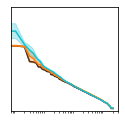

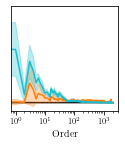

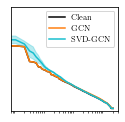

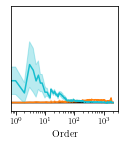

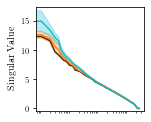

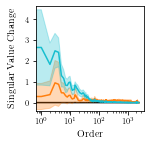

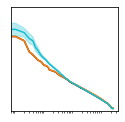

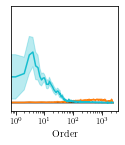

In [61]:
for (dataset, meta), dct in aggr_pert_sigvals.items():
    ys_clean = clean_sigvals[dataset]
    xs = np.arange(ys_clean.shape[0])
    for relative in (False, True):
        plt.figure(figsize=figsize(scale=0.35, ratio_yx=1))

        ys_ref = ys_clean if relative else 0
        plt.plot(xs, ys_clean - ys_ref, label="Clean", color="black", zorder=0)

        for slug, (ys_mean, ys_std) in dct.items():
            color = "C1" if slug == "gcn_2" else "C9"
            plt.plot(xs, ys_mean - ys_ref, label=gb.ana.model_label(slug).split(" ")[0], color=color)
            plt.fill_between(xs, ys_mean - ys_ref - ys_std, ys_mean - ys_ref + ys_std, color=color, alpha=0.3)

            plt.semilogx()
            plt.gca().xaxis.get_major_locator().set_params(numticks=10)
            plt.gca().xaxis.get_minor_locator().set_params(numticks=10)

            if not relative:
                plt.ylim(-0.5, 17.5)
                plt.xticks([])
            else:
                plt.ylim(-0.4, 4.6)
                plt.xlabel("Order")
            if dataset == "cora" and not meta:
                plt.ylabel("Singular Value" if not relative else "Singular Value Change")
                plt.gca().yaxis.set_label_coords(-0.19, 0.5)
            else:
                plt.yticks([])
            if not relative and dataset == "citeseer" and meta:
                plt.legend()

        plt.savefig(f"{plots_path}/attack_spectrum_{dataset}_{'meta' if meta else 'evas'}_{'rel' if relative else 'abs'}.pdf", bbox_inches="tight", pad_inches=0.01)

## Foreign Scalability Experiment

In [62]:
budgets = np.array([0.0, 0.001, 0.002, 0.005, 0.01, 0.015])
gcn_evas = np.array([0.69241, 0.65547, 0.62657, 0.56879, 0.51509, 0.4826])
cos_gcn_evas_direct = np.array([0.68148, 0.64467, 0.61595, 0.55902, 0.50552, 0.47314])
cos_gcn_evas_transfer = np.array([0.68148, 0.65936, 0.64, 0.59585, 0.54676, 0.51404])
gcn_pois = np.array([0.69241, 0.65445, 0.62842, 0.57054, 0.51805, 0.48664])
cos_gcn_pois_direct = np.array([0.68292, 0.64537, 0.61832, 0.56385, 0.51057, 0.47791])
cos_gcn_pois_transfer = np.array([0.68148, 0.65619, 0.64, 0.59655, 0.54704, 0.51563])

arxiv_mlp = 0.555

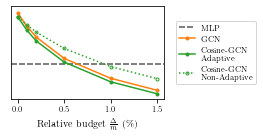

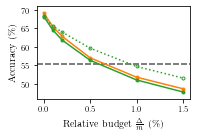

In [63]:
ylim = 46, 71
xlabel = r"Relative budget $\frac{\Delta}{m}$ (\%)"

plt.figure(figsize=figsize(scale=0.5))
plt.axhline(arxiv_mlp * 100, label="MLP", color="gray", lw=2, ls=(0, (3, 1)))
plt.plot(budgets * 100, gcn_evas * 100, ".-", label="GCN", color="C1")
plt.plot(budgets * 100, cos_gcn_evas_direct * 100, ".-", label="Cosine-GCN\nAdaptive", color="C2")
plt.plot(budgets * 100, cos_gcn_evas_transfer * 100, ".:", fillstyle="none", label="Cosine-GCN\nNon-Adaptive", color="C2")
plt.ylim(*ylim)
plt.xlabel(xlabel)
plt.yticks([])
plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
plt.savefig(f"{plots_path}/foreign_scalability_global_mr_curves_evasion.pdf", bbox_inches="tight", pad_inches=0.01)

plt.figure(figsize=figsize(scale=0.5))
plt.axhline(arxiv_mlp * 100, label="MLP", color="gray", lw=2, ls=(0, (3, 1)))
plt.plot(budgets * 100, gcn_pois * 100, ".-", color="C1")
plt.plot(budgets * 100, cos_gcn_pois_direct * 100, ".-", color="C2")
plt.plot(budgets * 100, cos_gcn_pois_transfer * 100, ".:", fillstyle="none", color="C2")
plt.ylim(*ylim)
plt.xlabel(xlabel)
plt.ylabel("Accuracy (\%)")
plt.savefig(f"{plots_path}/foreign_scalability_global_mr_curves_poisoning.pdf", bbox_inches="tight", pad_inches=0.01)